In [807]:
import dill
import codecs
import pyautogui
import time
import pyperclip
from pyperiscope import Scope

automation_payload = {}

# 0. Get description

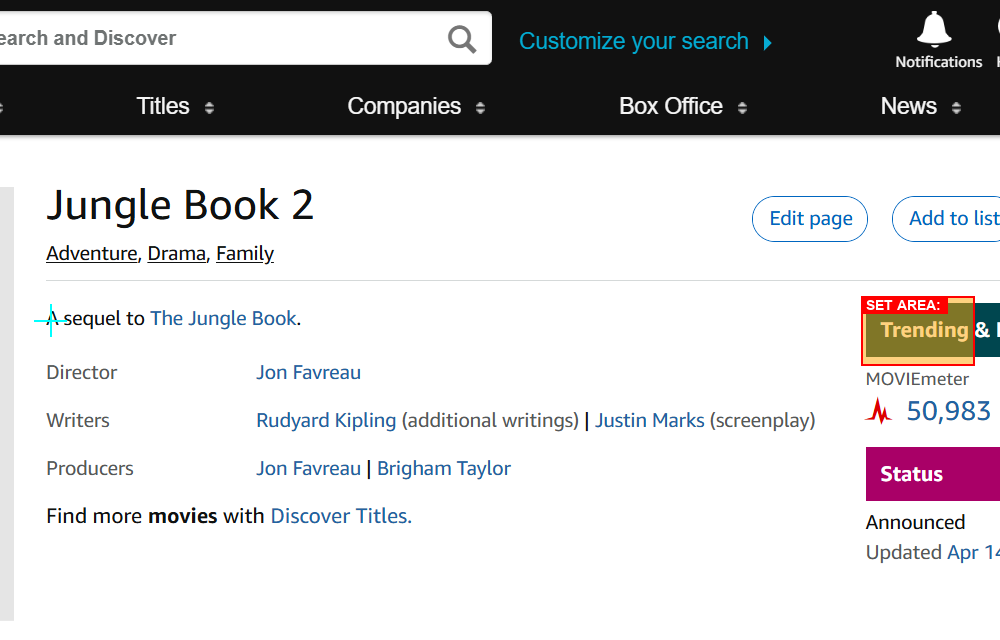

In [808]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVnAcAAAAAAAB9lCiMBGFyZWGUWHwHAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBSEVBQUFCRkNBSUFBQUR5OTU0OEFBQUZaRWxFUVZSNG5PMmJYMGhiVnh6SHY4NzFMcGNiNkExSW94S0hzYU9hUGlSRU4yZzNrQzJSamFVYmxRNWw2d1doS0MwWUJ5VngrdEMwcFczR1dJa3kwQlZTV3JLSFJZcFNhUjZXUW1ueUVHamR3MVFpeGRoQ3ExQ25waTAxZ3NFUWtPN2h4aitOMVViejAzUnlQay9ubmorLzgvT1RlODg5T1dyZXExZXZ3Q0RsdlZ3bnNBdGhUdWxoVHVsaFR1bGhUdWxoVHVsNVArMDY3NnZhWEtTeHEyRDNLVDNNS1QzTUtUM01LVDNNS1QzTUtUM01LVDNNS1QzTUtUM01LVDNNS1QzTUtUM01LVDNNS1QzTUtUM01LVDNNS1QzcDUveTdoZXBySGZXZktnSEU3L2UyTndVQXFLMXROdXQrSWZGODBPSHcrTGR6N2l5Y1N1MmoxU1Z2NlRNLzVyUjM5Mng5amkyajBwWnFkRW9BOGVtOUFBRHpTWWU1dkJCQXFjWjV5dU4zYitQY1dUZ3RMTkdWYXQ3U1ovNWwwZFluK0wreVc1LzlOUVN1Mmo4NjJWcXBUanoyVzdmekprVldUanRhOGpxV0w0NEdicDR3S1FFZ2NxZjJZTWU2ZzNKSHRNZDlhV2RXb1cyL1Q2MFgzQzZEQ25qV2Y3SEZWV0s3WGwrbEUvWkVBdldWWFFDZy9jWjI4NGNxWTRFZ2QwN01UZlo3T3lYZkUvbXl1NnUzc1FSSWpEbHRkL21tMmtaRFdhRVNBTEFROVh2UEhlbUxya3h6NkVTZ3VjYWtGZ0JnTVQ3K1lDU1duc2pKb1ZzMU9nQ1lEWHBPSGZGdEtyN2EybmJXK2JsR3pBZUFXSFRrK3AvUFRNM1ZPbUE2L0VmWitmUVgzclk3VmZCS0JjOEJtc01OblVGZG1TaFhjZ0NncmJzNDFLUVhWM2ZlcXpuZWZLbVFzNW43b2dBVVBLZmdBYjZpdFVzdktsZjE0OVdXaG5iWFBWdnJGQURnVU12b21Sb2R0OVNhTDJnTmg5Y2t3aWw0VGdFQVNrWCtjbTRaeGJmLzB1bXFGSlliUmJYZWJrK1ZWZnlldFQveXp1MVB0VXRDVXhTZnVObWdGd0VrWjRPK2J2T1A1NXA4RDJNQUlKZ3NrdW0xb1p6SXh5UGhnWjVBcVAvQmJDSlZwelorSnBmVXJvYnFsTkJrTk9qelNoNS9memdhMjBScUc4YXZ0RmxUUXBNellYL0w1VTZIYjNCNGJxTndPL2VPU2t6Y2JiblNkejI4OUVDZHJqSnlBREFUOXBxdjNBV0FSMUhUSis3anhZQmFZd0dDcThaR0F0TFNHcjI4Y0F0Rkg4bzFkWmI5S2FNRE4wNlp2UURRYzJObGZjK0VEZUpyYThxMWNzdUx3Y2EycTM0QWdWQ2kxR3MwQ0crT3RhTk81NTZ1Q0FYc3hTcTVJR3ByUjkyMWNsa2wxK1Z6WXVaeGorMUxiZGNXSis5N3MwOXpUZmlDMUNjVCszY3N3MjhLdWQ5TEtRbzB1b0xYcXhiaU0xc0l0REEvVFpKUTF1VGU2VXdrRkp4NnZXcmhjZkROZlRjay93TVZTVUxyb09BeVhVcHk1blI0Ymg0UUFDaVNqNlhMdnEwSG1valBBaUlBZnAveFMrQU9VWDVMZEV6TnVnd0NBRVdwM2xuc2RVeTlkVVR1enFXQ3R4K09Bd0JFUS8xb1c1M2xBQUNnV0gvc3FIVE5MaDNQUE5EUXdQQUx1YVN5TlAzYS9iVmVlNkRLMmx4MWtDZEt0SGR3T0FrQTRNdlBkTGxIM2QyajF6ek85VjlReU9XelArVDlQVnpsTWdpQW9ETkxmNW1sbGFiNWtjZ212b21GV20vVm1PUjk3dDV5NittTFZ0bzhwenpmOVZjTWZWOHVBbENxZFJrc0FEazhQNDEydEoxdENVekdGdE1iWXRGbm0zcmJqUGVkay9wR3hwT3JJa3lFZWg0bDF4K3hPY1k5N1pWZC91REViR3doR1hzeEdieDkxUkdPYjlBL0wrMS96bkx4ZDlKbEZyUEdXUDV4MGN0LzdqK1BSd0tEdzFuRUVZSFkwNUQvRVdWK2EzSCsxbnRHeHdHWStidXo2SHdvcmZWZGNQcXUwM2kwYmpyU3QvdzVhYit3Qlg2cTF1WURpQWZka3JrL3ZYL3U5MUx2UG9lL2xScWJKU1NUaVVVQVVQQ3BrNFhFeE1EUGE0U0NPYzJFaEx3eWMvSVJ6RkxsMUVEcmhlNDM3cVBaczU4UnhrTjFqZFVWbGZ2VkloQjdQaFlNK1IxM25xelhtVG1saC8wdW1oN21sQjdtbEI3bWxCN21sQjdtbEI3bWxCN21sQjdtbEI3bWxCN21sQjdtbEI3bWxCN21sSjcwc3o1RzlyRDdsQjdtbEI3bWxCN21sQjdtbEI3bWxCN21sSjcvQUpEeXV5VFNnc3lNQUFBQUFFbEZUa1N1UW1DQ5SMDWNsZWFuX3ByZXZpZXeUWICLAQBpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBK2dBQUFLQUNBSUFBQUNBRWNVd0FBRUFBRWxFUVZSNG5PemRkMXhUWjlzSDhDc0RFb2FFR1lZSWdySWNvS2k0Y2VORXJZcTJLdm82cTNYVUtyWlBxejVkMlBwVTdYRFUxbEdycUZWUnEySzFib3NUVkJBY0xBVUJXVkZHa0pHRWpQZVBJeUd5cHhENyszNzRnNXljYzUvcm5KUEFsVHZYZlIrV2lZa0pBUUFBQUFCQXk4WnU3Z0FBQUFBQUFLQm1TTndCQUFBQUFMUUFFbmNBQUFBQUFDMkF4QjBBQUFBQVFBc2djUWNBQUFBQTBBSkkzQUVBQUFBQXRBQVNkd0FBQUFBQUxZREVIUUFBQUFCQUN5QnhCd0FBQUFEUUFramNBUUFBQUFDMEFPdjI3ZHZOSFFNQUFOUldUazVPYUdqb3p6Ly8zTnlCQUFCb0FROFBqMTI3ZGprNk9oS1JYQzQvZHV6WWdnVUxtanVvK3VOYTI5ZzBkd3dBQUZBcktwWEt5dHJhMXRhMlQ1OCtxMWF0U2s1T2J1NklBQUJhdEZhdFdnbUZRdVozTHBmYnJsMjc1bzJuZ2JoNmZINXp4d0FBQURWVEVhbFVLcVZTYVdKcWFpUVFmUEhGRng5Ly9QSHo1OCtiT3k0QWdKWXJQVDA5SVNHaGE5ZXV6TVB6NTg4M2J6d054T1hyNlRWM0RBQUFVRE9WU2tVcWxWS3BWQ2dVY29XaWg1Zlgrd3NXQkg3OWRYUEhCUURRRW5HNVhDc3Jxemx6NXRqYTJxb1hEaHMyTENNajQvang0NFdGaFVxbHNobkRxeDlXU1VsSmM4Y0FBQUMxb2xLcFZDcVZRcW1VbDVUSVNrcXVob2JPbmoyN3VZTUNBR2haV0N5V3ZiMzkrKysvLzMvLzkzODhIcS9jc3lxVktpRWg0YWVmZmpwMjdKaFVLbTJXQ091TnBZMmZOZ0FBL3JXWWFobTVRbEVpaytYazVuYnQwcVc1SXdJQWFGazhQRHkrK3Vxcm5qMTc2dXJxVnJWT1RrN09zV1BIdnZubW03eTh2RGNZV2tPeFZDcFZjOGNBQUFDMXhYUzZLNVZLV1VtSlZDTFI5b0ZXQUFDTnk4akk2SjkvL3JHenMyT3hXTld2cVZRcWQrM2E5ZW1ubjJwTEx6YUx4Y0k4N2dBQTJvUlZpczFtczluNEd3NEFVRVpmWC8vYmI3KzF0N2V2TVdzbklqYWJQWDc4K0ZHalJtbkwzOUsyYmR0cVI2QUFBS0QyS25NbnFzMS9KZ0NBZjQrQkF3Y09IejY4OXV0YldGaE1temJOMk5pNHlTSnFOQndPWi96NDhVamNBUUMwVW1uMkRnQUFSRVE4SHE5Ly8vNTF6Y0w3OSs5dm93MDNOVEl6TXhzMWFoUVNkd0FBQUFEUWVzYkd4cTZ1cm5XdGU5SFgxKy9aczJjVGhkU0liRzF0M2R6Y2tMZ0RBQUFBZ05Zek5qYXUzM2o5dm4zN05ub3dqVzdZc0dINit2cEkzQUVBQUFCQTY1bVptVmxhV3RaalEvVjlWVnV5SGoxNkVCRVNkd0FBQUFEUWVxNnVyam82T3ZYWTBON2UzdFRVdE5IamFWeE1JVDYzdWNNQUFIaXJLSlhLek16TTZPam83T3hzc1ZqY3FsVXJmWDE5VjFkWFoyZm4rdjFIQVFDQTJ2RHc4S2ozdHQyN2R6OTM3bHdqQnRQb1dyZHVUVWpjQVFBYWkwd211M3IxYW1ob3FFUWlLZmRVZUhnNGg4UHAzTG56eUpFanRXTGVNUUFBcmVQdTdsN3ZiYnQxNjliQ0UzY0dFbmNBZ0VhUW1KaDQ2TkNoYW02ZHJWQW83dDI3OStqUm96Rmp4bmg1ZVdFbVJ3Q0FScVNycSt2bTVsYnZ6WmtLOHBZc1BUM2R4Y1VGTmU0QUFBMTE1ODZkMzM3N3JacXNYVTBtay8zNTU1OGhJU0Z5dWJ6cDR3SUErTGR3ZDNmWDFkV3Q5K2J0MnJVek1EQm94SGdhWFZwYUdxSEhIUUNnZ1I0K2ZIajgrUEdTa2hMbUlZZkQ2ZGl4NDRBQkE2eXNyTGhjcmtxbGV2SGl4ZTNidDhQQ3dwZ1NHcFZLZGVQR0RWMWQzZUhEaDZQZkhRQ2dVVFJ3TG5ZK24rL282SGovL3YzR2lxZlIzYjU5ZS9EZ3dXODZjVTlNVFB4MTF5NnBWTnE1WThjNXMyYTk0YjJYYytyMDZRdVhMaEdSLzlTcDNUdzl5ejJibTVmMzQ2Wk40dno4aWh0V0RIN1g3dDMzSHo3azhYanZ6NW5qNk9qWWRERURRSXVTazVOejZ0UXBkZFp1YVducDcrOXZZV0doWG9IRllsbFlXSXdhTldyUW9FR0hEeCtPaVlsUnFWUXFsZXI2OWV0T1RrNzFtM0lZQUFESzhmTHlhc2ptZkQ3ZndjR2hKU2Z1NTgrZlg3SmtDVXBsNnVQK3c0ZWZmL1ZWYmkyK0ZnZUF0NWhLcFFvTkRjM0p5V0VlMnRuWkxWaXdRRE5yMTZTbnB6ZHQyclRPblRzekQyVXkyWVVMRjJReTJSdUtGUURnN2NYaGNEd3I5TURXQ1kvSGErRWRyOCtlUFh2MDZCRktaZXBKbkovLzI1NDlIN3ovdmg2ZlQwVE4vdTBCQUx4NXo1OC9mL0RnQWZPN29hSGhwRW1UOVBYMXExbWZ5K1crODg0NzJkblpUS25pMDZkUEV4SVNPbmJzK0NaaXJSOFdTKzdSUnpMc1hXVmJGNVV1bjRoWWhTODVUeDd3VGdkeG56eG9paDNLbmR4bFF5YnA3ZHZJS2hBM1JmdWFGSmEyaFovOFRFUUcvL3VBay9Xc3FYY0g5WUJyQkxYVXRXdFhnVURRa0JaMGRIUTZkZXBrWkdTVVgxbXBSVXVRbloxOTVzd1pKTzQxYTlPbWpUcEJKNks3RVJGQkJ3NFFVV3BxNnFOSGp5clcyQURBdjhTVEowOWV2bnpKL083aDRWR2JPL2JwNitzUEdqVG93SUVEU3FWU3FWUStlUENneFNidVNxRnQwY0t2RmJidFNDRm52OGpnUEU5WGNiaktOdTNsN3IzbEhYdndMaDNqSDkxR0NrVWo3ckhFclZ2eG9tL1lMeklic1UwQWVPdTFidDE2MmJKbDFmZWIxSWpGWWcwZVBIakNoQW0vLy81N0k4WFZ5QlFLeGZIang3bkxBZ0tZeHhYcnR0VVpLa05nWkxSczZWSVRZMk1pS3BaSWZ2NzExOVRVVklHUmtYZi8vaUYvL1VVYUNXNjU2dkJ5aVcrbDdkZFk4czRVa2FzZmFxNnZXVGMvYU1BQTV2ZEs5NnU1eDZHREI5ZnFQRlhBWk9wTU8vZWlvcGlIRld2YzFRWDBETTJ6VjJrOFRFaGpSbzJxelFxYTUxK3oyWXBWKzVvdGxDdkJWei9WcjArZjVOVFUxTlJVcXFMY0h3QXE5ZVRKRStZWFBUMjkydDh4MjlIUjBjTENJaXNyaTRneU16T0xpNHYxOVBTYUtzVDZVdGkySzFxeVRtbHF5WW1OME4vOURUdEg5T29KRmtzMllMekU3d1BwVUQ4cWtmSC8zTjZJTzJWeHVNUjZjd1djbkt4blJzdkh2ckhkQVVCVDRIQTRDeFlzR0RseVpNUEgraHNiRzMvNzdiZjM3dDI3ZCs5ZVk0VFcrSjQrZlZyMkovTCt3NGNiZi9xcHVQUytJYWRPbjlaTUdZbEluSisvYnYzNnhNVEVjZ3VackoySVhKeWM5UGo4dXhFUlh3WUdhbzdwVEUxTlhmZmRkK1Vxd3U4L2ZLalovdjJIRDNmdDNsMXBsTVVTeWNhZmZ0TE0yaXRHcTE2NDZlZWZtYXlkMmUrQlAvNVFQMXZ1aUM1Y3VxU1pXTmVKbzZPandNaUlpUEx5ODRzcjNHbUZpSGJ0M2wydWNYRisvbytiTm1tZWhGMjdkNWM3d3hjdVhkSThDWld1d0J5MUhwL3Y0dVRFTkt1K0lzVVNTVnhDQWhFSmpJelVIeDQwVzVCS3BadCsvdmx1UkVTNWFLL2R1TUZrN2VvTkFhQkdVcWxVTEg1VnptRmtaRlQ3MjJVYkdCaVltWmt4dnhjVUZLai9aTFVnT3JxU2QrWXBUUzI1ais0WS9QUnhXZFpPUkNxVjdwVS9lWC90SlNLWjl4aUZuWE96QlFsUWQ4b09MWDJ1YnFnVEhSMmRXYk5tdmYvKys0MDFReGVQeHdzT0R2YjA5R3laVTM2cFZDcnU1NnRYbXhnYk01MnZxYW1wRnk5ZEdqTnFWRzVlM3UwN2QwaWpZNXZweXBWS3BZOWlZOHZsZHBxZDM3bDVlU2RQblNLTkRtYW1LMXFjbjMvc3p6L0w5YWt6bmJ2cTd2bVUxTlRjdkR5VEN2Y1VmUFRva1dabnNMcXpXU1FTWmFTbmx3dUc2Wk5XOThHcjIweE1UTHg2L1RwcDlEcVg2OHl1RXo2ZmJ5UVFpUFB6ODhWaWlVUlM3c3VFM0x5OGxOUlUwdWp5Wi9hbGVSTHVSa1F3SDBXWXM2YytDZmNmUHJ3YkVkSE4wN1BjQ3VwTG9MNUdIVnhkcjE2L0xwVksxYjMrR2VucElwR0lpSHAwNzY1NXlNdzVVWiszazZkT09UbzZhcDVuVElZRFVBOHFsVXFwVkRLLzYram9jRGljMm05cmJtNWVzWkdXUSs3WVVlSGNoU1VwNHAwT1lza3JHVDZyYy8xMFNjK2hwRlFxRFFVY0lubW5ua1VMQTluUDB3MDJMTldzVFMrZStwRnMwRHU2bC8vVU8vQURFUkdMVmRKOWtIVHNiSVdGRFhHNExKbUVFeC9GRC82Wms1NUVSQVhMZjFDNGRTTWlSV3VIL0I5Q1dDL3oxR1hOQ2t0YjZUdno1UjI5Vkh4OVVzZzV6OU41SjMvVHVYT1pWQ3BtUndYTGYxQzI2NlMvL1F1RnRiMTAyQlJWSzJOU0tyaXBDZnk5R3pqUEhzdUdUSklPZjA4cE1DT2xncFA0VVAvMy83RkZyNXJWcko5V0IxQVJTeWJWMzdhYSt5Q3NrcU1vZk1sOUdLWjNhRE1yUDdmU2JaWEMxb1VCbTFTdEJQcmJ2K1JHWHRWOFNqcHF1dVNkK2R4NzF3eCtYa1VxRlhFNHNyNmpaVDVURk1MV3hHSlhiTG1XNTVrNUcvekRXMlE5aHluYWR5SzVYUGY2YWIzOTMxZU1UY1Uza1ByT2xQVWFybXBsVEVTc2wzbTZ0ODd5UXZhd0pJVWFCMStMNDJXeDVCNTlwS05uS216YXFzZENsRnV0bXFoVVJpYkZVNWJJM2Z0VWRYMkpTR1ZvWERSMjlxdDFTbVRjdUVqMUs2ZE9KSXUrNVcvOWxQM29kbDAzaEJhSXpXWlBuano1aXkrKzRISWJzL0Riek16c3E2KytXcjU4ZVh4OGZDTTIyMWk0VEFMWHpkUHpYbFRVL1ljUDR4SVNoa2drSnNiR1gvNzN2NXJyV1Z0WlZibzlqOGNiTkdDQSt1SDFHemVZdnZheFk4WXdMUThhTUNEKzhlUEpFeWVXSzhCbzA2Wk5odzRkaU1qRTJOaXVUWnY3RHg5S3BOTGNuSnlLaVhzM1QwL05iZlg0ZkdNam85VEtnbW5UcHMyUXdZT0p5TkhSMGJsOWU4MDJIOFhHTXQxYS9mdjJaVEpVOVNIWDVqVFZTVzVPamtRcUpTTDFSNHR5aDFBc2tWeTVlcFdJQkVaR0U5NTVoNGhNakkxN2RPOSsrODRkNXROT3hSV0lhTWpnd1hFSkNhbXBxYmZ2M09uYnA0LzZHTlVmVHBoajVQRjRIVnhkaWVqeVAvOUlwVktCa1ZIZlBuMlk4L2FPcisrdnUzWXhuZlNhOFRpM2I0K3NIZUJOS2lnb1lINWhzVmhzZG91YjNhdWsyMEFWWDUvek5KYnpOTGJTRmRqaWJNUFBaOWExV2NuWTJkTFIvaVNYYzFQaXFmQ2wwc3BPM3RHcnNIMW4vWjFmYzZPdWN4L2ZaL0gwNVBZdUxKbUVreFREZXBuSGtoUVRrYnh6cjZKNW42djBETmppYk02VEJ5cGpDNFdOZmRHOC8rcTI2NlIzYUxNNnQxT3gyY1h2TGxXYUNEbVpLWlNXcUxSM2tiZDFLMXI4TGVkcFRJbEhQMDVtQ2ljaldXbnZvbkR5S1B6d080T055MTc3R29HSWlMaVA3N01VNWUrS3BiUnpWaHFac0FyeldkbVpSRVFzVnZGN0g4b0d2a05LQlNjemhaWDNRbW5icnNScnFLSjlaLzNOLytFOGUxTEp1Uktsc1pOaTVKN2VNbzkrcnlYdU9yb2xIYnhJb2RDTkNDV1ZTc1hWTFZyNGxieHpiMUlxdU1seHF1SWlwYjFMOVMxWFE4WGhTaVl2SXBXS0V4dXBNcmRtUDArdlpCMitRZUd5OVlwMm5WZ0ZZazVzQkJFcDdWMmtQdS9LTy9UUS8yRTVtMG00YTNPOExGYnhsQ1d5d1JOSXFlUmtwckJ5bjVPaGtieU5VNG5YVUtXTlExbFRWVVJWK2ZXZHM1cHYyWVozYXMrckRmVU5pNWF0Vitud3VLa0p6Sm1SZCtwWjFOcFIvNGZsbkl6a09wMFo0dW9nZDM4N2pCMDc5cE5QUHJHenMydGdhWHVsZXZic0dSSVNFaHNidTJUSmtwU1VsRVp2dnlIS2F0d1pGYnVRcTVuT25JajRQSjZKeGhmRVROVW1qOGRUNTkrT2pvNy9XN3UyNG9iR1JrWVZxOTVyVkgwM2VUVnRxZ05qa2xxR3BhVmxVeVR1MWpZMlFxRXdOVFdWS1UxaEZtcldyMHNra255eG1JaU1CQUorYWNCalJvMVNyNkR1TzdkcjAwWjlKcG55bU5UVVZIWG0zY1hEZy9rMkl6RXhzVU9IRGt5ZGpGQW90TGF4S1paSTh2THppVWljbi85bFlHQzVDRE15WHh2N1Zac1JkUUJRam82T2pybzJQVDgvdjdpNG1GKzd2MmtsSlNXNXVhOVNHVGFiM2VLK2tHV3hGTmIyUk1UT1RHRkppeHVyVmFXWlZVbWZrYXlpQXYwZkE3ak01d0VXcTNqYWN0bUFjWkpoVXd3ZjNlYWYvRTJlK0ZDeE1KQ2RJOUxmOFNYVG82eXd0aS8yWDZuaTYrditjMEx2angrWnNiRHlMbjJML3U5VDJjRHhuTXhVM1N0L3Z0b0JWMGRwWXFGMzVHZmRDOEZVMnMrdE5CVXFCYVpsQzAyRmhTdCtWSnBaSzF3ODJUZi9MaGNoLytSdjVaYklQZm9XelYxRENqbi8rRTRtUVpRTkdDL3pIc3QrbWF1MzdiL2N4OUZFcE9McUZrOWZVZEpuaEdUbXgvb2JsNy9XVjExSzk5NDF1VWRmWmZ2T1NpTVRkUmFyc0c2cmJOMldMYzdteE44aklzbWtCZkxPdmRuaWJMMnRuekhuUjhVM0tKcjFxZHpUdTNqMlp3YmZMNi9iTkRzY0Rra0t5MDUxWmVSZCt5dmF1bkVTb2cyK1g4NThyNkkwTWlrSytFblIyckdrejBqZTN3ZHFlYnh5Si9lU1BpTlpVZ256QWV4VjQyM2RpcGQ4cTJqdEtQY2NXSGFOS2tTbE5ES1JURmxhN3ZxVzlCMVpQSFc1ZE1oRWJ2Uk5raFlSRVhHNHJKZDUraHMvWWpaOEZhZDEyNUplUHB3L2Q5VGh0RENRdTc4VjFxOWZYOVhjdXczSDRYQXNMQ3dzTEN5V0xGbXljdVhLSnRwTC9aVHY2V0c2cUlub2JrVEVzb0NBWlFFQjVRcldtOFd1M2J1WllPcGQzTks0MUpsM3BmVDQvTmt6WnpKRjhHb1hMbDFhRmhCUXNiNjhJZFNsOXZlaW90UzVQalBTb1BvTm1ZOHhBTkFRSEE3SDJ0cWErYjJnb09EWnM5ck9WWmVibS92aXhRdm1keE1UazZib0xtb0lsWUVSdFRJaEluWk9ZLzZoVUZyYnF3d0Y3UHhjVG5acHg0RktwWHMxaEpXZlMvb0dTZ09qU3JjcTZlV2pOTEhnUEw3UFA3aFpQWU1OOTk1MTNybER4T2JJK285VzhjdHVVYzU1L0VEM254UE03MnhSR2pzdGtZZzRTVEZsQzNORW5NUkh4T0hJSGR4cURGaGgyNjU0K2dvVlQwODM5S1RPemIrSlNNVTNrUFVmVGNUaW5kN0haTEZFeEpMTCtDZDNzWituS1d6Yktkd3FIOW5QZVhTYm5aMnBOTEZRYWd3SmtIZm9yaklRY09MdnNiTXpsV1pXOHE3ZUxFVUovOUJtZFZMTGtoVHFIZHJFRmoxVDJEaVdlUFN0TWVEeU8wMk81eWJIVmJPQzNNR05PQnhPUnJLNkdvcWRuNnR6Nnh5clJLcTBiRlA3NDFVNGRpU1ZpaE56bHh0OVE5MDQ5MmtNKy9FRFlyRVVObTJyaVVyZXViZkMzSnFUbXNBLzhvdjYrdXFFWDJRblBTSTJWK0ZZT3VHU1NxVjc4WWo2ekxEemM1bnZMdVFPSGVwNldrcmowNUVzK2hiMTdscnR6ZFN4bEJ2WTJSSndmOXl3b2VMU3hNVEV3MGVQTXI4ek5kWU5xUWh2b0ZPblQ2djd4Wmt5OTNJenpMeDVpWW1KekljWnpSNXhUZXBhbzNLaE12WGxqUldHdXNvb0pUWDF4cTFibW5VeWFwWE9aZ01BamFKOSsvWTNidHlReStWS3BUSThQTnpOemEwMnBaWjM3OTVWVHlMcDVPU2tvNlBUeEdIV0V6djNlV08ybHBITUtoQXJyT3lLWnEvaUg5dk9lZmFZVkNwT2NyelJpbkZWYnFPakszZnVRa1E2RDI2Vks3WG5Sb2F5aHZrcExWb3JiTnVwYzBwT2VoS1ZsSzNHVkdKd1VoOXJMbVFWVjlJalhwR0txeXZ4VzZRME51YytqZUVmMjhFVTVDaHMyeWt0V3JPS1gzSmU3NmxsNTRqWXp4TGxRdHNTNXk3bHF0aGZyU0RPNWlRK0xPbmxVK0xlNTFXaHZJNXVTYWRlcEpEcjNMdEdSSXEycmtvakUzYU9pSk1RWGE1bGJteWt6TnUyeEwyUDd2WFR0WW04Yk52MEpNMGE4WXE0U1RFeTc3RWx2WHhZK1RtNmw0OHhYd1h3VHUvam5kN0hyRkRMNCtYOWZZRHBucTk0MURWR0pYZjFKQTZIOCtUaGE5OVVsTWdNTjN6NEtnWkxXeUppeVNUczF6K0VOTUtMRS8zdVd1Nnp6ejc3OXR0dnZieThHcmZBWGUzbHk1Zjc5dTNidjM5L1V6VGVFSlVmcmJvaXZLNlRBekxGSjFLcFZEMTlDbE5wMDZONzkzSVRIZGFTNWt3cERVbEExWUZwRHE2dFg4ZXo1cWVhTGg0ZTFhL01qQ3RWRHd4bHZ0Q3d0ckdwT0xiMWJrVEU0YU5IbVVHaTZtSWJ6UUc3RlNlTm9kSWhCT0w4L0RzUkVWUmFKME1hSXdHcUdqa0FBQTFuYjI5dlpXWEY5TFUvZnZ3NElpS2l4bnR1SnlZbWhvV0ZNYiszYXRWS2ZTUFZGa2hoMmFZUlcyTm5aK3BFWEpFT21TVHYxTE9nVTArV3BJZ1RIOFc3R3NKNUVGN3ArRmNpVXZIMFNNK1FWU0xqUEN2ZjZjVittY2NXNXlvc2JWV0NzbHJOZWd4VnJCeUxKWm44Z2R5dEd6dnZCWC9QZCtxY1VtVmhvOUxsczJRa2VmZERVcjQyZ2IxU2FFdEVpdFpWOXN2b1J2d2o3ejVRNGR4RlpTaGdGWWlaT2hsT2RoWW5JWXFJVksyTWlhdkR5c2xpNStlVTI1Q1Rta0JFS2lNVDB0R3QwMEZ3c2lvZEMxYUdlLzhtNTlsamhiMkxkTXhNNmVnWmJIRTJOekpVOStwZnpHZXFlaHl2aXFlbnNIRlFPcmpLN1YwVTdUb3B6YTFyakVvcE1LUGFYRGladEhHLy8za0Z1YnMydTMvLy90aXhZOTNjM0NaTW1EQml4SWcyYmRvd2t3UndPSng2MUIrcVZDcTVYQzZYeTZWU2FWUlUxSkVqUjg2Y09hTytLM2FMd21YbU1OR2NDbDF6N2hlbUdGbzlWMHlOK3ZicGMvdk9IWEYrdm5ycUVtYTQ2b1ZMbCtJU0VqNTQvLzE2QjZwT1FOWFRyZFNKZWc0V1ptUm5uZHBKVFUzOWRQWHFpc3ZWNDJ2TFVYODdvVDZaNnRJYVpraUFIcDgvc0g5L3pYbG1tTkdvVEUwOFV3MnZMbWRYVDBSejhkSWxabllkWnRJWVpsL3FGSjk1T0xCL2YzV2RERk1CTDVWSy93d0pZU2EzcVRqWlBBQTBCSi9QNzkyNzk5R2pSNW03S1lXRWhQQjRQSStxUDgrbnA2Y2ZPblNvdVBoVjRiaW5wMmZUMVdqV0c2dEFUUGs1MU5wQlpkaWcyeEJXeEQrOGxSc1hLUms5VTlHbXZZcXZMM2Z2TFhmdnpaSVc4dzl0MGIwYVV1Vm1LbFc1ckxFTVY0ZVpEcVZ4bFhRYldOSi9EQ2tWL0Q5M2FJNEtWZkg0eE9HbzlBemtIYnJYdFUzMmt3ZnNiSkhTd2tiUjFwWDdJSXlwazJGSDNXUnJ6czJpVWxYWlI2NW5xT0kxOG1UL3JBS3h3WVpsc3FHVFpBUEdLUVZtU21OejJhQUpza0VUT0ZtcGVscy80MlFrMS81NFN6cDZTYVl1VTFxMHB0S0VpU1VwWWhmbUs0MnFteU5WWlNpZ2FsZDRFNUM3YXpPbFV2bnc0Y09IRHg5KysrMjM5dmIySFR0MmRIVjFiZHUycmJtNXVZbUpTYXRXcmZUMTlRME1ESGc4SG9mRDRYSzViRFpib1ZBb0ZJcVNrcExpNHVMQ3dzTEN3a0t4V0p5Ym01dVZsWldRa0JBVEUvUGd3WU9XbWErcmNZTU9ITkM4UVE4elJZdzZ6YTA0MlhuMXZkUW14c1pqeDR4aFVsTE5NWkU4SHU4ZFg5OTZqRVpWajhqVUhPakowT3pYcjVHam8yUC92bjB2WExwVTZXRE5laEFZR2MyZU9iUFNJMUxQVjNQLzRjTnlZMy9WaysxVXRZNTZZcHd4bzBabFpXVlZzd0pEZlg2b3dpenM2bDJVKytDQk9XUUFHbEdYTGwzaTR1S2lvNk9KU0NhVEhUeDRNQ1ltWnR5NGNlWHVxU1NYeThQRHc4K2NPU09UbGZVdVoyUmtGQmNYdDdRYWR5TGlKajFTdUhWVFd0bXBlSHBWalU4dG12K0Z3czVKOTlwZmxaWkpWRTZsNHQ2N2JuanZ1b3FycTNCMGt3NlpwT2pjVzhYVGsvaDl3TTVLNGNaSFZiNFZpMFhzeXFmYVpKWElLazRPMDBBSzIzYVNLVXRVSEIzZEszL3FsQnZBcWxDUVNzVkpmMXB1TnNiYVlPZm5zaC9mVi9RZEtYZjE1TVpGbG5UcXhWS1U2RVpkZTIwbEZvdFlyTXB6OTVlNXJNTEdIMnpHa2hUeVR1M2huZHFqTWhTVWVQU1ZEWnFnc0d1dnNHd2ptZjJaL3NibHRUeGV1VWZmNHJsclZEdzlkbmFtenAxTDNNY1AyRTlqMmVKc1pwTEs2dlplK2hHeDBZOEwvbTNrY3ZtVEowK2VQSGx5OHVSSkxwZmJxbFVyWTJOalEwTkRQVDA5ZlgxOUpuSG5jRGhzTmx1cFZESTk2eEtKcExDd3NLaW9LRDgvWHl3V0Z4VVZxYW90TFdzNXlrcGxOTzh6NnVqbytQNmNPZXBia0RKbEtzZisvRk05K1dBMWt5ZDA4L1IwZEhTc3paMVRhNG1wc1ZGL2Z1amNzZU9FZDk1aDJsZFBZVjdMZHF5dHJNcmRPYlYrOTJDcWVJdlRjaXFPQ3FqWXoxMXhuWExOenBrMVMvMU5DTE9rMHNvbDlhZXNpZ1gzRlhlQkc2TUNOQzR1bC92T08rL2s1ZVV4VTRZcGxjckl5TWpvNkdnYkc1c09IVHEwYXRWS0lwRXcvMUUwVTNaR2ZIejhIMy84OGQ1Nzc3VzAzSjE3UDB3MmFJTFN5azdSMXBVYkYxbHhCYVd3dGFKOVo2V3hlZlh0S0t6c0tsM09rc3U0OFZIYytDajE5Q0NLOXAwckp1NHNhVEVWRjZoMGRCVzJqcG9ESDRsSTJjcFlLVEFoZVFrVkZkVGx5R3FnTWhRVXovNnNYR2w3V1R3djBsa3lpYktWc2RKUXdLbGo0azVFdW5jdXlYc01scnQwVmRnNEtLM3QyVmxwNm9wMjFzczhrcGVvVEMyVlJxYmxTc01WYlp5SWlGVlVVRTNCZWxYbnVmWllCV0xkNjZkMXI1K1dkK2xiTk84TGhVVnJwV1hyV2gwdml5VWRQRkhGMTllNWVWWi85emVhUVNvdGJHcmViM0VoVlZhVUpYbG5ubXp3QkozclozUXZINnYvVWRXR3ZBVGQ3VzhadVZ5ZW01dXJucm5yN1ZQNTRGU3FiQnJIY3JkUFd2SGhoMVUxV25FYStHcWFyZGh5UlpwVEpUSTAyNjk5bStYbVU2ZlNUd1dWcXVZb0txcTR1NHI3cWswODVWUTFtV2J0MTZsbUY3V0pFQUJxcEsrdlAzUG16TDE3OXlZbnY1cFNXcUZRcEthbXFtdllxdEV5YzNmdWsvdWNtRHR5endIU1VmNmNKdy9MMTZDeldOS2hma3BqYzNhdVNPZnVGU0pTS2VTa1VxcjBERlE4UFhYWHJOTEloRXpMcHBxVkRab2dHVCtYOHpURzRNY0FkWHJIenMrbHZHeXlibHQ1SENVeWJ2dzlSZnZPSloxNjZaNDdyQm1Hdkt1M3lrREFTWC9LeWF6ak5ON1ZZTEVrWTJjcGJOdVhLMjFYNDZRbHN2T3lGY0xXY3M4Qm5OTkJaVS9vNkJaOHVFRnA3NlFiZW9vZnZMV3E1amxQWTluUDA1VVdOaVdlQTFRR1JweTdWOVRuaXZNMGxwMmZxeksxVURpNXMrOWNWbStpTkJYS1hidVNTcVVUYzVkcWQ1NXJpNnRUdU9Bcmhhc24vOGd2WmRNMUVyRXlra2xhVEd4MkxZK1hkMmFmU21CR1JOekVoNjlsN2FaQ3BiQjFqVkhveE55VmQrMnZjUFpROFEzS1RyaU9ydHk1aTRxbno4bXMrUjNVSU1qYS94MSsvLzEzYjI5dm1VeFdYRnpNWXJIMDlQUjBkWFhQbnovL24vLzhwNFZYeFZTcXhkMzRBd0JBNnhnYUdzNmZQMy93NE1IVlR4SERaclBidFd2WHFsVXJ6WVZNN2w1VVZOVEVNZGFGU3NVUCtaMmQ5MEx1MXExdytmZXZkWjF5T0JLL1JUTHZzYVJVOE00ZmZqVnpTL3BUbGpoSEtUQXI2VEg0VlpVemh5TWRPMXVoa2JxeDA1NFFpNlZ3N0NqdjJsKzlVTjYrczlMT2lTVXA0ang1U0VTczdFeVNGVE9KS2JPQ3pxMXo3TnpuaXZhZEplOHVvZEo3MDhyZCswaUgrcEZTcVhQalRGMUxWcW9oR3pKSjVqMldWU0xUMjcreDhsc3A1ZWZxM0RoRFJOS2hmbkwzUHErV3NsalNRUk1VN1R1UmlyamxTbDlleHlvUWN4L2NVdW0zS3VrM21sVWlaVDd6dkdvNU81TWJHYXJpNkVpbUxKRzNmVFV6bUlwdklKbThXR25SbXBPWnpJMjRRclU3ejdVbEwrR2tKYWwwK2JLQjQ4cStPV0d4NUY1RFZZWUNkblltT3l1dE5zZkxraFpUZ1ppSVNycDZxN2k2NnNpTC9WY3lBMWlyeDQyNHdoR2xLZG80U1NZdGVIVjltZllkM05qUDA3alIxK3Q4WExXSHJQMWY0OGNmZjN6dzRJR1ptWm05dmIyZG5aMjV1Zm1EQnc5Ky92bG5iY3phcWFwWlpRQUFvRTY0WE83dzRjTzl2YjJ2WHIwYUVSR1JsNWVuV1RHcHA2ZlhxVk9uUVlNR21abVpKU2NuQndVRnFXZUVwQmJaNzg1NTlrUi8weWRGQzc1U09MbS9YSHVBL1R5RExYcW00dkdWYlp5WWU4N3pUd2ZwWGp6Q3JNd1daK3ZjdVN3ZE9VMHlZWDVKcitHc3ZPZEsyM1pLUXdFbklWcmgvR3FvTGpjaFd1ZldXZG5BZHdvWGZNVzB4dHhmazlnYzNTdC9jdVB2RVJHck1KOWRXS0FRdGk3NmNEMDdKWUVmdkpXVGthd1h0TDVvM3VleUFlUGtYZnF4bnoxaDdxeEp4Tks1OGJmdXBVYXJvMUNhQ3FWREpoR0hTMFVGMGdIanBRUEdsMXRCSnlKVTkycUk3cmxEaWpidFM3b05MRno4RFNjOW1aVXJVbHJaS2Myc1NLbmduL3l0eWpMOVV0ejd0MlFEeGltTlREZ3A4WnprMTJhaDVoLzVSV2xoSSsvY3UvQS9QNnZ2RDZyU04yVG41L0QzYm1ER3NOYm1QTmVlN3NWZ3VYdHZoVzI3bDk4YzVENTd6TnpMVm1sbXhaSVc4MC91WnZxL2EzTzh2TXZIaWgzYzVCMjZGNnc3eEg3MmhQUU41YmJ0V1NvVjk5RWRlWWZ1MVpmeHNQTnplUWQrS0o2N3B0ejFaVWtsZW9lM3NuTkV6SFNRalE5Wis3OUpkSFQwbkRselJvd1l3Y3o2ZGVYS2xkRFEwT2ZQRzNPNjJ6Y0ppVHNBUUtQUjA5UHo4Zkh4OGZHUnkrV0ZoWVZNN3M3bjh6WEhCZG5iMi92NysydEI3cDZhWVBqNXpKSkI0MlVEeGl1WXlnZVZpbFdZcjNQM0N1L1A3WnlzMTI0NHhUKytnNTJkS1IzdHI3QnBTemIybk13VWd6My9VNXBaRmFzVFNwVks3NCtmdUFuUjByR3pGUlkyU21GclVzZzV6OU41SjMvVHVYT1pxYkpnNStmeVR1eVMrSDJnc0xaWG1nb1YxLzlpaTdPNTkyOFpyUHRBNHZlQnd0bEQzdEdMRkhKT2Nqei9yejNjcUJ2VnoxTmVKeW9kWGFhYlg5WEtXTjZwWjhVVm1POFdXSEtaL3ZZdlNyb1BrbzZkcmJCcVE2MGRxRVRHVFk3akhkN0NmWDBLOWtweGt1UFpvbWNLTzJkdXpOMXlwVGdzdWN6ZzUxWFNJWk5rUXliSjdWMkl4V1lWaUhVdkgrT2Yyc1BTbUhtbTV2TmNhK3o4WElQL0xaYjZ6cFQxR2k1djYwWXNGa3NtNFQ0TTV3Zi9ySjZmc1RiSHEzUDNDcEZLK3M1OGhiQzFzcU1YcS9DbFR2UU4zcC9iVmExTUZRNXVLaXM3cGJBMVc1UldWUmc2ajI1ejFzNlgrSDBnNytnbDcraEZKVEpPZkxUZWdSOGFiWExQaXBDMS84c29sY3JuejU4SEJRVUZCUVhWdkhhTHg5S1dVYlFBQUcrVGl2M3VST1RzN0Z6TDNKMlpHMEVxbGRyYjJ6ZFpqTkRJVkR5OXdvQ2ZsSlp0OURkOW9yNXZGTHhKUlZzdklHc0hyWVlhZHdDQVpzRDB1MWVzZDc5NTgyWnpoUVJOVGRIV1ZXbGx4MDVKNENiSE5uY3MvMHJXYlpHMWc3WkQ0ZzRBMER3cTV1NXQyN2J0M2J0M000WUVUVUhGMVNVT1IyVmtJaGt6VTZYRDA3MzVONVZVZnJOWWFGb1pUNUcxZzdaRDRnNEEwR3cwYy9lMmJkdk9uRG16NWRTNFEyTlJkT2lldi9scy9zWVRDbGRQVG5xaVRsUlRUcFlDQUc4MURFNEZBR2hPVE80ZUdSbnA0K09EclAzdEpKT1F0SWk0WE03akIvcS9yMnZFS1N3QjROOEdnMU1CQUxRUEJxY0NBUHdMb2NjZEFBQUFBTjRlUTRZTTZkV3JWMkppNHBVclZ6SXlNcG83bk1hRXhCMEFBQUFBM3FqaHc0ZjcrUGdrSnlkdjJyUkp2ZkNERHo1bzI3YnR3WU1ISXlJaWF0L1VwRW1UQWdJQ0hqMTZOSHYyYkNMNjhjY2ZKMHlZb0ZLcGlvcUtEQTBOcDA2ZCt1TEZpMW16WmhVVUZEUWs0TjkrKzYxRGh3NGJObXc0Y3VSSVE5cXBIK1owaFllSFkzQXFBQUFBQUx4Um5UdDNuakJod29JRkM5NTk5MTMxUW05djczSGp4ams2T2xhLzdkS2xTMi9kdWpWdTNEam1vWm1abWJtNXVaV1ZGUkY1ZUhqMDZ0VXJOVFYxNk5DaGJtNXV6NTQ5czdDd3NMR3hhZGV1WFYwalBIMzY5TysvLzY1K2FHVmxaVzV1Ym1abVZ0ZDJHZ1Z6dW5yMDZJRWVkd0FBQUFCNDAxUXFWYXRXcldiTW1ISHExS2s2ZFlkYldsb0tCQUlkSFIzbTRhKy8vdnJycjc4eXY3ZHExVXBIUjZlNHVEZ2hJWUdJenB3NWMrYk1tWHJFNXVIaFlXcHFtcCtmcjE0eWF0U29lclRUNkpDNEF3Qm9xNktpb3VZT0FRQ2dua3BLU21KalkxMWNYQll2WHJ4dTNicUtLeXhhdEdqS2xDbVdscFl5bWV6eTVjdmZmdnV0bnA3ZS9Qbnp2YjI5OWZUMGxpeFpzbURCZ3RPblQwZEZSUzFidGl3bUp1Yml4WXZUcGswek5qWTJNREM0Y09HQ3VwMm5UNS9PblR1WGlLeXRyVC81NUpOKy9mcnA2K3NuSlNYOThzc3ZzYkd4SDMzMGtaZVhWNnRXclJRS3hkMjdkMy80NFFjbko2ZUpFeWRhV0ZqbzYrdGZ1SERoeFlzWDMzNzc3YlJwMDl6YzNINzg4Y2VMRnk5V0dsdEdSb2FIaDhlbm4zNGFGUlZsYW1ycTdlMXRiR3o4N05tem4zLysrZWpSbzRhR2hvR0JnVU9HRE5IVjFjM0x5L3Z6eno4clBlUWFJWEVIQU5BeUtnYlI3ZHU0bXd3QWFMRnIxNjYxYXRWcTRzU0oxNjVkdTNidG11WlRuM3p5eWZ6NTg3T3lzczZmUDkrbVRadXhZOGNLaGNLZmZ2cXBiZHUyNnI1MmhvbUppYk96YzJGaG9hV2xKVk13bzhiaGNPenM3RGdjRGhFNU9UbHQyN2JOeWNrcElTSGgxcTFibHBhVzF0YldiRGJiMGRIeDNyMTdoWVdGRGc0T0F3WU1VS2xVOSs3ZHM3Q3dLQmVxbloyZHM3T3ppWWxKVmJITm5UdTNWYXRXVGs1T3ZYdjNUa2xKaVlpSU1EYzM3OW16NTd4NTg0NGVQYnA2OWVyeDQ4ZmZ2bjA3UFQzZDJOalkydHE2Zm1jTWlUc0FnRFpoNXZCVnFWUUtoWUw1TGhnQVFFdkpaTEpEaHc0dFc3WnM3dHk1bW9tN282UGo2TkdqQ3dvS1ZxMWFkZm55WlNJNmVQQmd0MjdkWEYxZDMzMzMzUTBiTnZqNittN2V2SmtaSnpwcDBpUm1xNzE3OXlZbUp2NzAwMC81K2ZsRGh3NGxvbjc5K3YzMDAwL01zMzUrZnUzYXRUdHo1c3lDQlFzMFl6aHg0Z1R6QzdOeW16WnRac3lZRVI0ZS90TlBQeVVrSkdpVzRGY2ZtNStmSC9NM09URXhjZENnUWVvR2VUd2VFYlZ0MnpZL1AzLzM3dDJuVDUrdTkrbDY3NzMzdUpqSEhRQkFpNmhVS3FWU3FWQXFMMTY0OE1zdnZ6UjNPQUFBRGZMNzc3LzM3OSsvYjkrK2MrYk1VUzlzMTY2ZFFDQjQ4ZUlGa3hrVDBhTkhqM3IxNnVYbTVsYnZIYlZwMDRhSUhqOStYRzU1bno1OXhvd1pZMkJnSUpQSm1MNzU2bFVUV3pXZEtlSGg0VjVlWGhzM2Juem5uWGQyNzk1OTQ4YU5laHhDUkVRRVY2RlExR05MQUFCNDgxUXFsVXdtUzA5UGYvejQ4WC8vKzkvbno1ODNkMFFBQUExU1VGRHcrKysvdTdxNlRwOCtQVHM3bTFsb2FHaW9xNnVyT1dLMXFLaElwVkt4MmZXZkRsRWdFRlJjNk8vdi85bG5ueEZSUmthR2pvNk9pWWxKYm01dTllM1VMN2J2di84K0pTVmw5dXpaUTRjTzlmSHhPWGJzMkVjZmZWVFhRNGlMaStQZXUzZXZycHNCQUVCenljbkpDUTBOL2Zubm41czdFQUNBeG5IbXpKbCsvZnBOblRxVnFTQW5vdlQwOU1MQ1FqTXpNMGRIeDhURVJDSnEzYm8xRVdWbVp0WjdMOCtlUFdPeFdQcjYrcG9MUjQ0Y3llRncvdnZmL3g0OGVGQ3pycVlhOVk3dHlKRWpSNDRjOGZUMDNMaHhvN2UzZDc5Ky9jcVY5ZGNHMThmSHA2N2JBQUFBQUFBMGxsMjdkbmw1ZVhYbzBJSHB5UTRMQzN2dzRJRzN0L2Y3NzcvLzlkZGYrL3I2RGg0OE9ETXo4OUtsUzh6NmZENi9aOCtlUlVWRmFXbHB0ZHpGOWV2WFI0OGVQWDc4K0xTMHROT25UM2Z2M3AzcDRHZXoyYWFtcG9hR2hqMTc5alEwTk5TY0F0TGUzdDdYMTFjbWsxMi9mbDI5c0pyWXluMHEwRFJuenB5NHVMaHIxNjY5ZlBtU2lGUXFWVWxKU2QzUEUrRUdUQUFBQUFEUW5CSVRFdzhlUEtnNXhlM2F0V3NmUG53NGJkcTB1TGk0RFJzMnFGU3FuMzc2aWJtajZxMWJ0M0p5Y3FaT25icDkrL1pwMDZiVmNoY25UcHpZdFd1WG5wN2VWMTk5ZGVmT25SOS8vTEZuejU1bnpweVJTcVdyVnEyS2pZMmRObTJhT29CcjE2NUZSMGZiMk5qODhzc3ZhOWV1N2RpeG8yWlQxY1JXbGJGanh4NDhlREF0TGUzS2xTdDJkbmFIRGgwS0N3dXIyemtpSWlLVytsc0pBQUFBQUlDV3c4UER3OG5KS1RjM2w1azlYWk8zdDNkQ1FrSkdSa1pkMnh3eVpJaWhvV0Y0ZURpenJiVzF0WmVYVjNaMmRzWENGU2NuSjFOVDA2b3k3R3BpcTJiOWtwSVM5YTdyQVlrN0FBQUFBSUFXUUtrTUFBQUFBSUFXUU9JT0FBQUFBS0FGa0xnREFBQUFBR2dCSk80QUFBQUFBRm9BaVRzQUFBQUFnQlpBNGc0QUFBQUFvQVdRdUFNQUFBQUFhQUVrN2dBQUFBQUFXZ0NKT3dBQUFBQ0FGa0RpRGdBQUFBQ2dCWkM0QXdBQUFBQm9BU1R1QUFBQUFBQmFBSWs3QUFBQUFJQVdRT0lPQUFBQUFLQUZrTGdEQUFBQUFHZ0JKTzRBQUFBQUFGb0FpVHNBQUFBQWdCWkE0ZzRBQUFBQW9BV1F1QU1BQUFBQWFBRWs3Z0FBQUFBQVdnQ0pPd0FBQUFDQUZrRGlEZ0FBQUFDZ0JaQzRBd0FBQUFCb0FTVHVBQUFBQUFCYUFJazdBQUFBQUlBV1FPSU9BQUFBQUtBRmtMZ0RBQUFBQUdnQkpPNEFBQUFBQUZvQWlYc0xOV25TcExpNHVMU2FKQ1VsN2RxMUt5NHVMaTR1YnRLa1NjeTJucDZlQnc4ZVhMdDJyYnExeTVjdnA2V2xiZGl3b1ptT0JyVFZnQUVERGh3NDhQRGh3MmZQbnFXbHBhV2twRVJGUmYzODg4K2VucDdOSFZwVFlkNTZtbThvZ0dwVTliYzZPVGs1TWpKeS9mcjExdGJXYno2a0V5ZE94TVRFTUc5YkpwSU5Helk0T1RsVlhIblpzbVgzN3QxajFyeC8vLzZZTVdQS0xibHc0VUphV3RyQmd3ZmY4RkdBbGpwNDhHQmFXbHBpWXVMeTVjdXJXUUd2cUhyak5uY0EwUGpXcjEvdjZ1cjY3Tm16NWc0RXRKaWhvZUhHalJ0SGpCakI1WEtMaTR1VGtwS2tVcW14c2JGUUtCdzNibHpmdm4wM2J0eTRkKy9lNWc0VG9JWGljcmxDb2ZDOTk5NXpkWFg5OE1NUEV4TVQzOEJPcmEydDE2OWYzNzkvZnk2WEs1VktOZCsyNzczMzNxaFJvN1pzMmZMenp6K3IxeDg1Y3VUY3VYT05qWTF6YzNPenNySmV2SGpScGsyYmNrdGF0V3IxQmlLSHR3eVB4M3Z2dmZmQ3c4T3ZYYnZXM0xHOGJaQzR0MUJIamh3NWN1U0k1cEtEQncvMjc5OC9QajUrMEtCQjFXL0xadU9MRkdnUVEwUEQ3ZHUzZTN0N3kyU3lRNGNPL2ZERER4a1pHY3hUdzRjUFg3Tm1qWU9Ed3llZmZDSVdpMCtjT05HOG9UYTZpbTg5Z0JySlpMS3RXN2RxZnFzNWF0U29tVE5uOXU3ZHUzUG56dSsrKys0MzMzelQxREVZR2hyKzhNTVAvZnIxazhsa2YvMzExOWRmZjYxKzJ3NFlNR0RWcWxVZE9uUUlDQWhvMWFyVi8vNzNQMlo1eDQ0ZERRd01zck96QXdJQ3pwOC9UMFFCQVFIbGxnRFVqN1cxOWR5NWM1RzROenBrZUFCUTN2ejU4M3YxNmxWU1VySjkrL2FQUC81WS9lK2ZpTTZlUGJ0Mjdkb1hMMTRZR3h2UG5EbXpHWU1FYU1sT256Nzk2YWVmUG4zNlZFZEhwMmZQbm05Z2o1OSsrbW1mUG4xa010bXZ2Lzc2d1FjZmFMNXQvL25ubjVrelo5NjZkWXZINDAyZE9uWGt5SkdhRzhybDh1TGk0dXFYQU5TSlVxa2tvdjc5K3k5ZXZMaTVZM25iSUhIWGVwb2x1UUVCQVVsSlNjN096a1QwM252dlZWTkdabWhvK01VWFgwUkdScWFrcEtTbHBUMSsvRGdrSkdUQWdBR2E2d3dZTUNBa0pPVHg0OGRwYVduUG5qMTcrUERocGsyYjNueTlKcnhoaG9hR3c0Y1A1L0Y0OGZIeFc3WnNxYmpDbVRObnJsKy8vdkxsUzRWQzRlSGh3U3hrdnFOWGw4WldmRVV4TDg3TGx5Ky85OTU3b2FHaHljbkphV2xwOGZIeHUzYnRzcmEybmpoeDRzV0xGOVVMTjIvZWJHaG95R3pJRkVSdTNMang2NisvWnFydFUxSlNidDI2dFdqUm9uS0J2Zi8rKzVjdlgzN3k1QWxUWkp5WW1Iang0c1gzM250UHZZSzZxUysrK0lJSjlkbXpaNDhlUGZyeHh4L1Z1NnUweHQzVDB6TW9LQ2cyTnBiWnBOTDN3cUpGaTI3ZXZNa2NRbkp5OHMyYk55dEdDUDhxaVltSjZlbnBSR1JrWktTNWZOS2tTYWRQbjA1TVRHVEdqVVJHUm43eHhSZnFWK0Rtelp0VFUxUExsUWlQSERreUtpcnEyYk5uQnc4ZVZLK3B5ZFBUYytqUW9Sd081OXExYStvT2RVMFpHUm03ZHUxNjhlS0ZtWm5abURGam1OZjVSeDk5cEt1cmEyVmxkZWpRb2VUazVLU2tKTTBsU1VsSkFRRUJsVllrTDFxMDZOYXRXOHkvajRwdk5IcjkzMGZGWTRTM1huSnljbXBxS3AvUG56SmxTcVdESzhyUi9QdFo3aFcxZHUzYTFOVFVXN2R1cWYvZEVORzJiZHZTMHRJZVBudzRac3dZOWNLTkd6YytlL2JzMnJWcmpvNk81WktjU2wrbFdvcHJabWFXblozZDNHRkE0eENKUkxHeHNRNE9EcTFhdFVwUFR4ZUx4U2twS1JWWE16UTAzTGx6Wjc5Ky9aUktwVWdreXMvUHQ3YTI5dlQwL1Bubm45ZXRXeGNVRkVSRTQ4YU4rL3JycjAxTlRmUHo4MU5TVW5SMGRHeHRiU2RPbk5paFE0ZUZDeGNtSkNUVU5UWWRIUjE3ZS92cDA2Y3pHZUhKa3lmeHdtdVpSbzhlYlc5dnIxUXE3OXk1VTFCUVVPazZIM3p3Z2VaREp5ZW5uMy8rMmMzTlRhbFVwcVNrU0tYU05tM2FsSHRGTWF5c3JBSURBMVVxVldKaW9wR1JrYVdsNWZEaHd5MHRMZHUxYTZlam82TmUrTTQ3NytqbzZDeFlzRUM5WVk4ZVBkcTJiVnRjWEJ3ZkgyOWhZV0ZyYS92eHh4KzNiOS8rbzQ4K1lsYjQ0WWNmSmt5WXdPRndzck96azVLU2VEeWVyYTJ0cTZ2cmYvLzdYeTZYcXhuRG9FR0R6TTNOQ3dzTDQrUGpCUUtCcGFYbHBFbVRoRUxoMUtsVEt6M1lRWU1HTVVNTW1hSmhJcksxdFowd1lZS2JtOXNISDN6QXZCZldybDA3ZmZwMEZvc2xFb255OHZKTVRFemF0R256eVNlZk9EazVMVnUycks2WEFHK1d0NE9ob2FHbHBTVVJQWDM2VkwxdzVjcVZDeFlzNFBQNStmbjVUNTgrWlY2QmMrZk9kWFoybmo5L2ZrRkJ3YVpObXpwMTZ1VHM3T3puNTNmbHlwV0lpQWhEUThQLys3Ly9NemMzejhqSStQWFhYeXQ5Vnc0ZVBGZ29GRW9ra2x1M2JsVVZ6NWt6WjJiT25ObS9mLzl1M2JwRlJrYkd4OGVibXByYTJkbkpaRExtanp5SHcxRXFsZW9sRW9sRUpCSlZQQ2ltam82SXNyS3l4R0t4dGJXMXE2dnI1NTkvM3FwVnErM2J0eE9SdjcvL1o1OTlabVJreEx6TG1EZWo1akhXOVV6aUhhRjFTa3BLRGg0OCtORkhIems0T0t4WXNVTHpqM2xGUC83NDQ0UUpFOWhzZG5aMjl2UG56eTB0TFYxY1hBSURBMjF0YmRldlgvLzQ4V09KUkdKc2JPenE2aG9WRmNWc3duUlE2dXZyZCtqUTRkU3BVOHpDamgwN3NsaXNoSVNFeE1URVhidDJEUjgrWEtGUVBIdjJyS2lvaUdsejdkcTFkbloybFg2eXJWNkxlZ1d5ZS9iczJhWk5tK2JhUFRTdXZYdjNqaHc1a3ZtRzlKOS8vaGs2ZE9qSEgzOWNjYlV2di95eVQ1OCtMMSsrWExkdVhmZnUzUWNQSGp4MjdOaXdzRENCUVBEQkJ4OHdFNGFNSHovZXpNenN6cDA3WGw1ZWd3Y1A3dCsvLytlZmY1NmZuOSsrZlhzL1A3KzZCcWFqbytQaTR0S3ZYNy9XclZ2YjJOaTR1cnJpaGRkaTJkdmI4M2c4aVVUeStQSGpXbTd5NVpkZnVybTV2WHo1a25scERSbzBhUExreWRIUjBjYkd4a3VYTHUzWHI1OTZUU01qbzl6YzNIbno1ZzBhTktoYnQyNlhMbDFpc1ZoZHUzWXRMQ3hVTDJUK0NuZnAwa1d6ZjZWZHUzWUpDUW52dmZmZTRNR0RlL2Z1ZmViTUdSYUxOWHo0OEhmZmZaZUl4bzBiNStQancyS3hqaHc1NHVIaE1YVG8wUDc5K3k5WXNFQWtFaGtaR1kwZVBWb3pXcUZRZVBQbXpjR0RCdzhlUExoYnQyNS8vdm1uU3FYeThQRFE3TGxSYzNSMC9PeXp6Nnl0clJNU0VxWlBuOTYvZi8vKy9mc0hCQVNJUkNJM043ZFZxMVlSa1llSHg1QWhRMVFxMWE1ZHU3cDM3ejUwNkZDbVdSYUxOV2pRb0JvSHBaU0ROOHZiWWRDZ1FidDI3V3JYcmwxZVh0N3g0OGVaaGUrKysrNnNXYk40UE42MWE5ZlVyOEF0VzdZVUZ4ZjM2OWZ2eXkrL0pLS0VoSVI5Ky9ZVkZSWFoydHJPbWpXTGlCWXZYdXpsNVNXVlNvT0RneTlmdmx6cDdscTNicTJycTV1Zm4vL2d3WU5xb25yMDZKRmNMamN4TWNuTHkvUDE5ZjN6enovbGNubGVYdDZhTld2Njlldlh1M2R2elNValI0NnNPQUI5NmRLbFRFSE90bTNidW5Ycnh2ejd1SDM3ZHF0V3JhWlBuKzdvNk5pdlg3K2xTNWUyYXRVcUxDeHM5T2pSZ3dZTjZ0T256N3AxNjE2K2ZObXZYNzlQUC8yMHJtY1M3d2d0dFdYTGxyQ3dNQ0lhTUdEQWpCa3pxbHB0K2ZMbFk4ZU9sY3ZsZS9ic1lmNTZNMy9oZFhSMC91Ly8vbS9jdUhFUkVSSFoyZGtHQmdidTd1N01Kc09HRFRNM055Y2lYVjFkTnpjM1ptRy9mdjBzTEN4a01oblREZCtyVjYvaTR1S3Z2dnFxVDU4K1RKdlhyMS9uOFhpalI0OTJkSFNzMDRHMHRGY2dlOUNnUVowN2R6WXpNMnV1Q09BTjgvVDA3TmV2SDR2Rit2dnZ2OVhUQ3lRa0pPellzU003Tzl2YTJuckVpQkZFMUxadFd5SktTa3BTOTQ3czNiczNQajVlb1ZEWTJ0cldkYWYyOXZiZHUzY2ZNbVJJNjlhdFc3ZHU3ZWJtaGhkZWl5VVVDblYxZFdVeTJmUG56MnV6L3BneFl6dzhQT1J5K2NHREIzZnQyc1VzaklpSTJMUnAwNHNYTDZ5c3JEUVQ0cEtTa21QSGpxbVRqM3YzN2ttbFVybGNmdkxrU2ZYQ3NMQ3c0dUppRXhNVHpTOVl4V0x4bGkxYklpSWlpS2lnb09DNzc3NUxUazRXQ0FURGh3OG5vczZkTzNNNG5QVDBkTTA4NCt6WnMvZnUzU01pcHRkVExUczcrNWRmZmxGWEFKODllelkvUDE5Zlg5L1YxYlhpMFkwZVBicGR1M2I1K2ZuYnQyKy9jZU1Hcy9EbzBhTW5UcHlReStWZHUzWWROR2lRazVPVGlZbUpUQ2FMaTR0VGIzank1TW1jbkJ3Mm0xM1hmeEo0czJnalhWM2Rqejc2U0hNNnlIMzc5dlhyMXk4cksrdS8vLzJ2ZWd6MzhPSERCUUpCVWxMUzZ0V3IxYS9BZGV2V1hieDRrYzFtOSt2WGorazMyYlZyMThXTEYxa3MxdURCZytmTm16ZDU4bVFkSFozdzhQQ3RXN2RXRlFCVHVGVllXRmo5ZkdJRkJRVUtoVUpYVjVmNUMxOVhob2FHQXdZTTBOSFJ1WGJ0bW5yRzRZU0VoRC8vL0RNL1AxOGdFUFRzMlhQTW1ERldWbFpaV1ZuZmYvKzkrcnZabjMvKytaOS8vbUd6MmYzNzk4Yzc0dDlqeDQ0ZG1abVpSa1pHczJiTnFyUmdSbDJaR1I0ZXp2U0QwT3QvNFgxOGZLS2lvcDQrZmNwbXM5dTFhOGVzNE9Ua1pHaG9tSnViSzVQSjdPenNtSVh1N3U3R3hzYjUrZmxSVVZHdXJxNzYrdm9GQlFYcVYyQkJRY0hmZi8vOTh1VkxQcDlmbTlJZFRTM3RGY2gyY1hFWk1HREEyTEZqbTJYMzhPYjE2dFhMM055OHVMaVkrU2lzZHViTW1ZeU1EQjBkblU2ZE9sSHBkN3VqUm8zNjRZY2YxQjJmNDhhTmE5ZXVYYmt5aWRxWVBuMTYzNzU5emN6TWRIUjBpSWpQNStPRjE4SkpKSks4dkx6YXJPbnA2V2xvYUNnV2k5VjVMZVBNbVROeGNYRnNOcnRMbHk3cWhWS3BORDQrWHYwd0pTV2xwS1JFSXBFOGV2Ukl2ZkRseTVmTXdDWk5USEtnK1pEcFdXUnFHUU1EQTExZFhYdjE2c1ZrOW1xVmZwdjU0c1VMelc3THZMdzhpVVJTemRIeGVEeVJTSFR5NUVuTjVYZnYzaTBzTEd6VnFsWFhybDBURWhKeWMzTU5EQXlXTFZ1MmRPbFNKb1U2Zi82OGg0ZEg1ODZkMVI5bWFnbHZscmVKdGJYMWh4OSt5SHpyNHVqb3lHUU1EeDQ4S0ZkdGVPWEtsYUtpSW5OejgxNjllakZMdG0vZm5wcWFhbXhzdkh6NWNxRlFtSm1aV1ZXUmpLYVNrcExxNTUxazNuSDFQcHpldlh0YldWbkpaTExvNkdqTjVYdjI3SEZ6Yy9QdzhQampqeis2ZE9uQ1pyT2ZQSGxTYmpxUjZPaG9xVlJxWVdHaCtVMWFiZUFkb2IwdVg3NTg1TWdSbVV6V3JsMjdTc2Y4REJ3NDBOYldWaWFUbGZ2VG5aQ1E4UGp4WXhhTHhmU25NTjhVdFczYmxubnhPRGs1OGZuOGlJZ0lpVVJpYm00K2JOZ3dJdXJjdVRPZno4L0l5RGgvL254c2JHeFJVWkdGaGNWLy8vdmZHVE5tTUlNcmR1L2U3ZXJxNnVYbGRmYnMyVG9kUlV0N0JYS1BIRG1TazVPVG01dmJMTHVITjQvNVJsVW1rNzMvL3Z0ejU4N1ZmRW9vRkZKcHo4M1pzMmQ3OU9oaFltSXllZkprUHorLzdPenMyN2R2Ly9YWFg1ckpVKzNkdVhQbjRjT0hlbnA2bWd2eHdtdko5UFgxTFN3c2FyT21rWkVSbDh2Tnk4dTdlZk5tdWFkU1VsTDY5dTFyYUdpbzdtTXJLQ2pJek15c1J6ek1JRDlOR1JrWmNybmMwTkN3UzVjdTZoVEJ5Y25KeTh1cmE5ZXV0cmEyN2R1M3IvUVFhdmxOQW9ONU81aVltS2lySFJnY0RvZlA1L040UEJzYm02aW9xR3ZYcnZuNStURjE3U3RXckVoT1RyNXg0OFlmZi95aHJzaXNQYnhadEZIRjZTQTlQRHplZSsrOWQ5NTVwMTI3ZGw5OTlkWHMyYk10TFMzMTlQUmtNaGt6VWtMVHMyZlBYcjU4YVc1dXpoUUFFRkZFUk1UKy9mcy8rdWdqSXlNanFWUjY0TUNCcW9wa05MSFpiRU5EdzJyeWU2RlF5T1hXZnhwb2dVREE1L05sTXBsbTFiNG1EdzhQWTJOakluSndjTGh3NFlMbVUwd05QWi9QVi9lYjFoTGVFVnB0eTVZdFhidDI3ZGV2bjQrUHo3dnZ2bHR1bExPZG5SMmZ6MmV4V0tOSGovYng4ZEY4U2lBUUVKR3hzWEcvZnYwaUlpS21USm1pTG5OM2MzT1RTQ1QzN3QxemRuYTJzTEJ3Y25LNmVmTW1rK0xIeE1RUTBhbFRwOTU5OTkyQkF3ZTZ1Ymw5KysyM1gzenh4Wk1uVHk1ZHVuVGt5SkY2ak5CcmFhOUE3dUhEaDV0bHg5QmNlRHdlbTgzbTgvbk0ySTZxSER4NE1DTWpZK0hDaFo2ZW5nWUdCdWJtNWlOSGpod3hZc1JISDMzMCtlZWYxK1pmaUtaeWY4R2hKY3ZNekpUSlpGd3VsL2tIWEV0S3BiS3FkRUZQVDgvR3hxYUJVUlVXRnBaYlVsUlVwTmt4UDJQR2pJVUxGN1pwMDRiRllqRkw1SEw1eTVjdlRVeE1HckpmSG85SFJHWm1adFYvS3hvUUVKQ1FrUER1dSs4Nk9qcHl1ZHgyN2RxMWE5ZnV2ZmZldTNMbHlxSkZpK28wR2c5dmxyZERWRlJVVkZSVVhsN2UrKysvMzZaTkd6OC92OURRVU9hcGlsOG9NYmhjcnViOE0vZnUzY3ZMeTdPeXNwSklKQlUvdUpiRDVCQkdSa2FlbnA3cUhWVmtibTdPM0p1cGZuZm9hOXUyTGRQdlU5VUtyVnExWW5vbGJXeHNLbjNYVjdOdFZmQ08wR29GQlFXLy8vNjdxNnVydWJuNW5EbHp3c1BETlovVjE5ZG5zOWs2T2pydDI3ZXZwcEVyVjY2SVJLTDI3ZHU3dTdzL2ZmclUzTnk4b0tEZy92Mzd2WHIxYXRPbWpaT1QwOENCQTVuQjJlcThmTUdDQllzWEx4NC9mcnlOalEyUHgrdlFvVU9IRGgzbXpadDM1TWlSU3NmK1ZhT2x2UUs1NnZJZ3plK3Y0UzJtVkNwVktsVldWdGFISDM1WS9aMFIvdm5ubjMvKytZZUlSbzBhTldMRWlBRURCcGlabWJWcjEyN2x5cFczYjkrdVV5NmlmcGxWaEJkZVM4Tjh5V2hrWkZUTlg5SVBQdmpnZ3c4K3lNcksyclp0RzdPa21xNitnb0tDZS9mdXFXc0E2b2ZENFpSYnd2ekZaMzczOS9mLzlOTlBqWXlNOHZQejc5Ky9IeE1URXhZV0Zob2Erc1VYWHpSdy9pOG14N3A2OVNvekNyWWF2Lzc2NjYrLy9tcHRiYzE4eFBYMDlOVFQweHMwYU5Dbm4zNnFydDJzRGJ4WjNpWTNidHlZTW1XS1VDaDBjbkpTNTlOVjNTTlBKcE5wenVJeWQrNWNTMHRMcFZJcEVBaG16Smh4NnRTcGF2N3FQbnIwYVBqdzRVWkdScDA2ZGFvbWNXL2Z2ajJYeTgzSXlHQTZKdXZxNmRPbjFXZmVKU1VsS3BXS2lQNzQ0NCtBZ0lCNjdLSWl2Q08wM1prelo3eTh2R2JObXVYaTRqSm56aHpOcDVpRXBLQ2dZTldxVmRYZitTNDJOdGJaMmJsZHUzWWRPblFRQ0FUUG5qMjdlZlBtd0lFRGUvZnU3ZWpvbUphV3BxK3ZuNU9Ub3k3aUtpZ29XTGR1M2JwMTY1eWNuSVlQSHo1cTFDZzNOemNlanpkeDRzU1VsSlJLWnpxdVNrdDdCWExIalJ1WG01dWJrNU9ETjhDL0JOT2ZhbUJnMExwMTYxcHVjdnIwNmRPblR4UFI1czJieDQ4ZjM3cDE2OTY5ZTlmcHBucWRPblV5TlRVdDEvZUpGMTdMZE9yVXFjV0xGM2Z1M0xsNzkrNVY1ZUs5ZXZVeU1URlJLQlRaMmRuNStmbHl1ZHpZMkxqaXE0TDVlMWRjWEZ5UENlREtxZmh5dGJhMlprcDBybDI3dG5qeFlpTWpvOFRFeE5teloydCtFOXJ3bnY2c3JDeFhWMWRMUzh2cUt4RFVNakl5ZnZ2dHQ5OSsrODNKeVduNzl1M096czdNb0pIYXc1dmxiWldlbmw1Y1hLeXJxK3ZnNEZEdUtWdGIyMWF0V21sK2JiVjQ4ZUwrL2Z1WGxKU2NQWHQyeUpBaG5UcDFxdjRUNFBYcjE2ZE9uV3BuWitmdDdhMmVkYUNja1NOSGVuaDRxRlNxdTNmdjFxT0lpNGdrRW9sY0x0ZlQweXVYeW5oNGVHemJ0czNFeEdUWHJsM01CSkgxbU1PZ0tuaEh2QVUyYnR6WXMyZFBEdytQOGVQSEp5Y25xNWNuSlNWSnBWSStuMS9qYU9uNzkrLzcrUGkwYmR2VzNkMWRUMC92NmRPbkJRVUZ6RXlSclZ1Mzl2VDAxTlhWWlNaeEw3ZGhRa0pDUWtMQ2xpMWJCZzBhdEhIalJrdEx5NDRkTzlZcCtKYjJDbVQzNzkvZnljbUpxU1dDZjRQSXlNaVhMMThhR2hxV202WE8wZEV4TkRUMHlaTW4rL2J0R3pCZ3dJMGJOeElTRXNwMW1TUW5KOHZsOG5yc1ZDQVFPRGs1OWUvZmY5aXdZY09IRHg4MmJCaGVlQzNacVZPbkpCS0pzN056cFRlOTgvZjM3OUdqaDBxbGlveU12SHo1Y2tSRVJFRkJnVUFnNk5PbmorWnFJMGVPZEhGeFVhbFVEeDgrYkhoSUxpNHVtcTlZSnllblRwMDZxVlNxMk5oWUtwMDNKaTB0VFROcmQzSnlhdmlNWFE4ZVBDZ3BLYkcxdFoweVpZcm04cGt6WjhiR3hqNTY5R2o1OHVVclY2Nk1pWW01YytlTzVzU1hDUWtKV1ZsWjlkZ2ozaXh2RXk4dkwyTmpZN2xjbnBTVWxKaVl5THcrTzNYcVZHNWVpNEVEQitycjYrZmw1VEg5aFU1T1RsT21UT0h6K1RFeE1RRUJBZGV2WDJlejJXUEdqQ2wzeDFOTkVSRVJmLy85ZDBsSmlaZVgxeWVmZkZKeEJXdHI2Ly83di85ajd0eWludmU2cnBpS0JSNlBwem5pbklnOFBUMHRMQ3hZTEZacWFtcHNiS3hLcFhKemN5c1g3V2VmZlphWW1IanYzcjF5YjZVYTRSM3hGaWdvS1BqMTExL3o4dktNalkwN2QrNnNYaDRWRmZYOCtYTmRYZDErL2ZxVnV6L1hzV1BIRWhNVFQ1OCt6UXcwaW82T3pzdkxNelUxOWZUMExDa3BZYjR5ZXZUb2tWZ3NadHBVS3BYcXVWQTNidHo0K1BIank1Y3ZhN1o1K2ZKbHNWaGNqK0JiMml1UUhSY1g5ODgvLzVTYk1BRzBHalAycnFxUzNNdVhMek9EQ0FjTkdxU3U5REkwTlB6b280K1lqN3kzYnQyNmUvZHVYbDZldnI3K3lKRWptZW5KaU1qYTJ0cmIyMXRYVnpjek03UGlNTVRxblR4NThwOS8vb21MaTJPbTc1QklKSGpodFdTLy8vNzc3ZHUzZFhSMDVzK2YvLzMzMzJ2ZUluVEdqQmtCQVFGR1JrYVptWmw3OXV3aG9sT25Ua1ZGUlhHNTNIZmZmVmY5TmFpbnArZVNKVXZNek14RUlsRzlzd1JOWm1abUN4WXNZQ0l4TkRUOC9QUFAyN1p0cTA1Qm1BSmZaMmRuZFhKdmJXMGRHQmhZc1d1enJvS0RnMU5UVS9YMTlXZk5tc1ZNUFVsRW5wNmVNMmJNYU5XcWxWZ3N2bkxsU254OHZGS3BGQXFGVTZaTVVmK2Y4UFgxWmU1SVZkZWFCTHhaM2c1T1RrNWZmUEhGN05temRYVjFYN3g0Y2VuU0pTSTZlL2FzV0N4MmNIQUlEQXhVdjYwKy92ampRWU1HcVZTcUd6ZHVNUDJGSzFhc2NIQndFSXZGZS9mdUxTZ28yTGx6WjFaV2xybTUrZnZ2djEvTnpVYzNidHg0NjlZdFhWM2RCUXNXL1B6eno1cHYyd0VEQnV6WnM2ZHYzNzR5bWV6QWdRTm56cHlwMzBFVkZCU2NQMysrcEtTa1g3OSs2dTUvVDAvUDZkT242K3ZyeDhiRy92WFhYNmRPbmNyT3pqWXpNMXV5WkluNjM4Znc0Y01uVEpqQTQvSFMwOVAvK3V1dk91MFU3NGkzdzRrVEovNysrMitGUXFGWktzYmMwTFNrcE1URHcrUExMNzlVdjd4WHJWclZwVXNYTHBjYkdSbkpUSng2N2RxMTU4K2Y2K3ZyT3pvNkZoVVZNUk9SaFlXRnBhV2w2ZW5wbVpxYUZoWVdxdXRra3BLU1dDeVd2YjM5aHg5K3FON1h3b1VMYlcxdHBWS3A1aVJtdGRIU1hvSGN5NWN2Mzc5L0h6Y2hlNXM4Zi81Y3BWSU5HRERnOHVYTHQyL2ZyamdPWStQR2pXM2F0UEh3OEZpNmRPbVVLVk55YzNNdExTMU5URXlVU21WSVNBaFQrL1hISDM4NE9EaTR1cm9lT1hJa0xTMnRwS1RFMnRxYXFTSGV0MjlmWFNzZnNyT3o3OSsvVDBSTXZhWllMUDdubjMvd3dtdXhDZ29LUHZyb28vWHIxM3Q3ZTArWk1tWDgrUEZwYVduTVZHNW1abVlzRmlzakkrUGJiNzlWajFIKy9QUFBtVHVuZnY3NTUzUG16R0h1bktxbnA1ZWZuNzl6NTg2NkRtV3VsRlFxN2R1Mzc2Vkxsekl5TWl3c0xFeE1US1JTNmI1OSs1Z1VKQ1FrcEdQSGpwYVdsanQyN0VoTlRlVnl1YTFidCtaeXVVK2VQTEd6c3pNeU11clhyMS8xSXpxcWtwQ1FzSFhyMWs4Ly9kVEJ3ZUdYWDM1NTl1eVpYQzVYSDkzUFAvOGNFUkVSRVJFeGFOQ2dDUk1tdlBQT08wT0dETW5NekdUdU5LeXJxeHNURTFQWDZTRHhadEZHekR6dTZ2djRhcEpJSkFjUEhtUmVmZ2NQSG16VHBzMkNCUXY2OWV2SHZKaVpPNmNTVVhoNCtLWk5tNGhveG93WkF3WU1VS2xVRnk5ZVpLYmd1SGJ0MnNtVEoyZk5tdVhoNGJGNDhlSjE2OVpWR2tOQlFjSGN1WE0zYnR3NFlzU0ljZVBHalJneGdubmJHaHNiQzRWQ0RvZkQzQXlocWtLYVd0cTBhWk9ycSt2QWdRTVhMbHc0WWNJRXBqREd5TWdvSXlQanA1OStLaWdvT0hQbWpKdWIyL3Z2disvaDRYSDQ4R0htL2NpOEhUSXlNdGF2WDQ5L0gvOWFXN2R1ZFhkMzc5Q2hnK2JDalJzM3RtdlhidURBZ1ZPbVRQSHg4Y25LeWpJeE1XSGVGTmV1WGZ2MjIyL1ZhejU4K0xCVHAwNXNOanMzTjFlZGZEOSsvTGhidDI0c0Z1dkZpeGUzYjk5bUZ2NysrKy85K3ZYcjE2L2Z3b1VMSjArZXpHVDh0cmEyYkRiNzJyVnJ1M2Z2cmxQWUxlMFZ5QTBMQzhPci95MnpmLzkrQndjSDVxYlpsVTVma0pDUU1HWEtsSUNBZ0hIanhsbFlXRmhaV2NubDh0VFUxSDM3OXFsdjhCRVVGSlNTa2hJUUVPRG01c2JNNVZkY1hCd1JFYkZod3dabXhHcGRwYWFtTXJjZE5qYzNmL0hpQlY1NExWeEdSc2IwNmRObnpwdzVkZXBVQndjSEJ3Y0hGb3NsbDh1ZlAzOSs0Y0tGNzcvL1huMzdHQ0pLU0VpWU1XUEdwNTkrT21USUVEczdPeGFMVlZoWWVQWHExVzNidHRYdjFWTFIzYnQzWDd4NE1YVG9VQmNYRjdsY0hoY1h0M1BuemovKytJTjVkdmZ1M1RvNk9yTm56N2F4c1hGMmRwWktwY25KeVFjUEhreExTL3ZmLy81blltTFN0V3ZYK2lYdVJIVHc0TUg0K1BpUFB2cW9SNDhlekhtbytGNVl0bXdaYzJ0Vkd4c2Jwa0JJTEJhSGhJUjgrKzIzbWllcWx2Qm1lUXVvVktxWEwxL0d4c2IrK09PUG11K0M5ZXZYUDN2MmJPN2N1UTRPRGk0dUxzd3QyWThmUDc1bHk1YUNnZ0luSjZjWk0yWXdBemFZUEo2aExoR2VOR2xTV0ZoWVZSK0dDd29LM24vLy9aRWpSODZjT2RQRHcwUDl0czNJeUxoNjllcXZ2LzVhajdud0t1NWl4b3daSzFldW5EaHhvbzJOalpXVlZYRng4ZFdyVjcvNzdqdjFWTnpmZi8vOTNidDNtWDhmenM3T3pPakRhOWV1L2ZEREQrV202NjRsdkNQZURvbUppWHYzN3Yzc3M4ODBaMDlpWGxHTEZpMWkvbjZhbXBvcUZJcm56NStmT0hGaXc0WU5taC96SGp4NE1IYnNXSDE5L1pTVUZQWDlDcDQ4ZWNKVXlTY2tKS2dYTWg5aW1TVEh6TXpNM055Y0daRlZzYzFhYWxHdlFGWUQ1MG9EQUdoU0J3OGU3TisvZjIzbWRRRUFBSGk3VlQ0cEZRQUFBQUFBdENoSTNBRUFBQUFBdEFBU2R3QUFBQUFBTFlERUhRQUFBQUJBQzJCd0tnQUFBQUNBRmtDUE93QUFBQUNBRmtEaURnQUFBQUNnQlpDNEF3QUFBQUJvQVNUdUFBQUFBQUJhQUlrN0FBQUFBSUFXUU9JT0FBQUFBS0FGa0xnREFBQUFBR2dCSk80QUFBQUFBRm9BaVRzQUFBQUFnQlpBNGc0QUFBQUFvQVdRdUFNQUFBQUFhQUVrN2dBQUFBQUFXZ0NKT3dBQUFBQ0FGa0RpRGdBQUFBQ2dCWkM0QXdBQUFBQm9BZGE1YytlYU93WUFBQUFBQUtnQjE5VFV0TGxqQUFBQUFBQ0FHbkJOVEV5YU93WUFBQUFBQUtnQlZ5QVFOSGNNQUFBQUFBQlFBMVpSVVZGenh3QUFBQUFBQURWZ2xaU1VOSGNNQUFBQUFBQlFBNVpTcVd6dUdBQUFBQUFBb0FZc2xVclYzREVBQUFBQUFFQU5jQU1tQUFBQUFBQXRnTVFkQUFBQUFFQUxJSEVIQUFBQUFOQUNTTndCQUFBQUFMUUFFbmNBQUFBQUFDMkF4QjBBQUFBQVFBc2djUWNBQUFBQTBBSkkzQUVBQUFBQXRBQVNkd0FBQUFBQUxZREVIUUFBQUFCQUN5QnhCd0FBQUFEUUFramNBUUFBQUFDMEFCSjNBQUFBQUFBdGdNUWRBQUFBQUVBTElIRUhBQUFBQU5BQ1NOd0JBQUFBQUxRQUVuY0FBQUFBQUMyQXhCMEFBQUFBUUFzZ2NRY0FBQUFBMEFKSTNBRUFBQUFBdEFBU2R3QUFBQUFBTFlERUhRQUFBQUJBQ3lCeEJ3QUFBQURRQWtqY0FRQUFBQUMwQUJKM0FBQUFBQUF0Z01RZEFBQUFBRUFMSUhFSEFBQUFBTkFDU053QkFBQUFBTFFBRW5jQUFBQUFBQzJBeEIwQUFBQUFRQXNnY1FjQUFBQUEwQUpJM0FFQUFBQUF0QUFTZHdBQUFBQUFMWURFSFFBQUFBQkFDeUJ4QndBQUFBRFFBa2pjQVFBQUFBQzBBQkozQUFBQUFBQXRnTVFkQUFBQUFFQUxJSEVIQUFBQUFOQUNTTndCQUFBQUFMUUFFbmNBQUFBQUFDMkF4QjBBQUFBQVFBc2djUWNBQUFBQTBBSkkzQUVBQUFBQXRBQTNQVDI5bHF2YTJOZzBhU2dBQUFBQUFGQVY5TGhyZzcvbkc1dWF2dnJwdXpXNXVjTjVXeVZ2N2xWMm5oZWViKzV3QUFBQUFGN0RiZTRBYWswaXpzcVhsajdnQ1lRQ2ZuTkc4eThsRVl2RTBxcWY1aGxaNHJMVVNhRW8rbVpvNk9YUXVLVG9jOUdaWk9EcTNidXpSKzlodzhaNHV4ZzBkMndBQUFEUXdtaFA0bjVscGN2VUk2VVBKaDNPMmU3VG5OSDhTNFgreDNYeW9acFdFZ2pkUnl4WitjRjAzODZDTnhHVGRwSWtoQVFHck54eVZmVDZZbEZ3UW1qdzNxMnJGNUxMakQySDEvbmE0M01RQUFBQWxFS3BERFEyc1NqNjBCci9BUTR1azdlR2k1czdtQlpJa2h3MHk5V3E1OHdLV2Z0cjR2Yk85T2l5OUJ4T0lBQUFBSlJDNGc1TkpldkNHcDh1TTROck8vajVYK0wyYXJldVMwNVVTTmw1UXN1SzMwK0k5azJlc0RWTy9rYmlBZ0FBZ0JZUGlUdlVrOHRIWitOaVkxLy9pUXc5L04zaVhzS3lsY1FoOC93Mkl2WFVrSmVsN2tUbkNyMFhmbmZ5ZWxLbUtDY3ZJell1S1NkUGxCNTM0bXR2elF3K2NzMk1iUmlOREFBQUFFUkkzS0graklXV3duSS85dTVENXdhZWpvM2I0VnVXZk1hc1hYbW91cHFRZnlPdXMvL21LOG5wc1NmWHp2VjJFL0RWSTAyNGZNditpMDdlTytTbmtidkhiZDBYM1J3eEFnQUFRRXVEeEIwYW4rWEVYemVNS1hzWWV2aGNWdk1GMDlKWWp0c1VsWEpyOHpSM1FWVWp3d1hEQWovdFVmWlFkRDQwNVkxRUJnQUFBQzJiOXN3cUE5cUU3emQ1MHJ4VHBiTUFYUTJQb3VtWUJZaUlpSVlGN3E1NUpjdEJQaTUwTys3Vkk0bWttaWs0QVFDZ1hsNFVsRnlLelF0N21uLy9XV0hpaTJMUnk1SUNpVUxWM0ZFMU9oYVJJWjhqYktYamFLN1gyZGFnWjF1andhN0c1b1k2elIxWHJmeExybEZWS3IxMmIwL2lyam5GT045QUtLaDZHbXhKdGtpc0tGM1RxTUtFOEdVVHh2TUVwbVZsREJKeGZQalI0S0FUSWFGUDhzVHBJZ2xYWUNtMDk1ZzJkL1g4NmU1bXRRaFBGQjI4YSsyTy9WRloyYUlzS2MvU1JtRHA3dSsvME0rL3R6T2Z5NFNmTDJGV2JZelowQ1VKb1VGSDlvVWNENDBUaWJMRVJBS2hwZERWZS93WS95blR2UjNmeUJTRHJlMHRpVW83MmlVMXJsNFdzRmljSlpJU1QyaHBadXpTMjlkM2h2b1UxVTVoZk9naGpjdEVQRXNiZ1hFN2I5OXgwLzJtTk5MazZJWGlyTUt5VkxyNkYxczljVFN2VVo2a29MSGJCd0Q0Rjl0OUkvT1BjRkZrYXNGSFEyMzl1bGw4T3NKT29NZmxjbGlzNWc2c2lhaUk1QXFWdUZqKytIbnhwZGk4Ulg4a2RHMWorSjZYY0ZZZnErWU9yVXIvdG10VWxZclg3dTFKM0RXbkdIZjVNakpzaVgwVkt5YnZITnQxZGN5ckIzNEhjbmFNZVAzNXNnbmpoUUVYWTFkM0pVbGlTT0RpbFZ0dXZWNm9MUmRucFVlZlc3LzAzUHBBM3gyaFFST0ZWQlc1K056bnd5ZHZpOWRZSk0xS0YyV2xiMXo1OThhVndtR0J2MjlmM0QwMHdIVm1NUFBrbEVONTI0YlY2cGdySTBrTVdmbmV6S0NFMTVlS1JWbGlVZkQ2ME9EMUgxdU8yM1J1Mi9RbW55QmNLdGFZeWJEYW5XV2ZYejFoeHBiN3IvY3FTMFZaNmFLc294dERqMjVjeVhQMzMzRjQ4NWlxenpCRExqNzMrYmdaMjZKZi81VEFuT29qY1ZlUGJBamd1Yy9ZSHJ6QjE3SWhyL3FFcmQ0OTE1UVZuWGRkY2U3WUtxOEd0RmM1Y1Y1ZTJRTXI0MXA4TWdRQWdCcjk3MnpxanhlZUxSbmMrcmVaTHJZbXZPWU81dzFoRWVsd1dPYUdPdWFHT3IwY2pENGJhZmNzVjdyM1ZwYjF5cHZMaHRwK01yeE5jd2Y0bW4vbk5hcEt4V3VIR3ZkcWlLTHZSNGNzNjJYVmZXYjVyUDMxMVVMbURRK01yT0pKZWZ5V1VRNnZaKzNsdGo2L2VwU0R6N3g5b1EyTGxTSCtlNmxIOXdwWisrdXlUaXoxR04za2t3eG14Y2VYSmREOXZUeXFXRTE4WjYyMzA1VHlXWHM1MHVpZ0dhNGUvd210Yms1ejhlM0E0UTZUeTJmdEZScmFPOU9sMThmVk5sU3RoSzArZlRXeWRzZTVKNCt0OG1xQzIweGwzUTR0R3hYQTgvS3lhL3hkQUFEOHF4eSs4N3o5NmpCREhqdHhiYy9QUnRyOXl6TkNXeFBlWnlQdEV0ZjJOT1N4MjY4T08zem5lWE5IUklSclZEdHZUNDk3VXppM2JPQzUwdC81UW5mdkVmMjllM3ZaODZYSjRjRkJPODVyNUw3SkczNDRFckIzVXNXTzVmRFZ3MWZmMFhqTUZYcVA4L2NkNDI1RjB1VHcwTkJiSWVjaXhVUVVmdUo4STRTYnNOVjM2cjZ5aE0vR2UvSHlSWk9IZWxqeVNaSVdGcko5WStDaDBydzJjbzNQYXEva2RUMnFhS2pCNVBGQnY1WjlFdkdlNkdOWlZjQStHelduVE9GM0h1WTNZcGhQQjB1U3BJU2RDTjc1ZDFraW5yeDl2Ry9yVzZGTG5DdmQzWllKd3pkb2ZuYml1ZnRNR1Rac0VIT2Vndy8vZGo1YS9kRWdjZWZZQ2ZaaFp4ZTUxUFcxbjdCdnJNK2FjUFZGZDV4Nzh1SjMzazF5YzlqNEhUL2ZWai9nei9Sci9CNTlBSUIva3dYN0U3THlaYmYrNDZrdHRkMXZocDR1ZTlIQTFsTzZDK2NGeFYrS3kvdGxtbE16Qm9OclZFdEkzR3NrOUZxNGVzT0hrOXlGR21uNXVFbUwxOFJ2R05JcnNMVGtoazZGaHRLazh1TXZJOWZPMjE3V3V5c1lzeWwwdTBhTnlyaEppMmtURmNhSHJKcmh2N2ZxTHZsYWtrY0grcFYxQnJ0L2REWmtUWSt5ckZMb3UzaWI3OXlsRzMzNnJtWFdFVzlmdldQcDJYazJEZDF0SlNUSlFmT0hsNTBadDFYcnAxWlc1U0tQMy9CL0dyM1hBdS8xcHcvT2N5czd5YjVURmdWSzRuZE1IYjd5eXF0ekdQMzVsTUIra2F1N2xtOHBidk9NMVpFYURhMDdlM2krYzFsRDR5WXRYaXVKMi82dWo3clBQbkxONUcvN1I2MXhyOE5CcFIveDkxbGExbFhmaEZrN2lZK3UyVkEyall6ejZ2bE45dmtLQU9CdGw1d3RuYnJyMFVMdjF0TjcxVlJ2K1c5bGJxano1OEtPKzI2SituNFhlV0JPQjN1ek45M1BqV3RVSnlpVnFaWncrdUdFMkhOcnA3K1d0VFA0emdIcjVtb3NEWTlQTExlR0pQaUhqV1gzem5GYmRlNjN5aXJMRFp4OWY3d1Y5bWxsSGNsMUlUbXhVWjN0OFNmdWVTMXJWNGZzdGlMb1MvV09ib2RjYU5EMDZublI1ME5PaEdqK0JHOWVzMlRxUUh1N3JrdE9sV2E0d3VtSFQ2K290RzliY21KdFdYSlB6cXZQSGRmTTJrc2pkcDUzK0d4Z1dhYWV2T0dISStXTFlRcVBCSDVkOXJISFpjM1prNXBaZTJsREx2T1BuL3V5TEZOUC9tRmpjR0V0RDVRb08yUmUzL2toYnlSckovSDVnSUN5cjE4RTh6Y3ZkbXlhSFFFQXZPMGVaUlFOK2VIZVJyOTJ5QWhyTkwyWGNLTmZ1eUUvM0h1VVVmUW05NHRyVkZkSTNLdGw1dUpTemJoQVR5L3Zhcll0UEJWOFN2MkFOMjlkNWZrcmc5L1FvYUtpb0Y5RFNuKzNYN3pjdDZxczBuNjB2MHZwNzZFM294cXl5NnlqSC92UG1xbjVNKy96clVGL1I0dExpMGxjWm15UHVyZkpwL0pRUk1GNzFRRVRmL1ozQVZWOVFjZDFYcnhoUmRsQTQxTTdndExMaGJHdnJDSGUzUFdWMXRJdzhTemNGRkJXTEI2eVkzL3RQcmVJejgvclBqUDR6V1R0SkE0Sm1GRzJMOEdrSForaXV4MEFvRDZTczZWanQ5Ny9jMkduWGc1R3pSMkxkdWpsWVBUbndrNWp0OTVQem41RGt4RGpHdFVERXZjR01CQlVsNy9kREQxWDlzQjNXTyttaktRdzlMeTZrdDVwdXA5YjFXczZPcGQxTzhmSEoxZTlZc1BGN1ozdk0yRk5TR0psNDBVTFEwT3VxaDhJRjArcjdoTVFkZlgxSy9zY1h1NkxBa25vMzJYRjlKWWZUUGV1cHZpTDZ6NVdZL0tmOEw5cWNWc284Zmw1WGFhOHFheWQ0amFQOHorcS9uTXA4TnUydm9xUFBRQUFVSU9wdXg3dG0rUFd1WFdqejlmN051dmMybURmSExlcHV4NjltZDNoR3RVREV2ZW1raHdUWHZhZ3Y3ZEhrNDRtdUI5ZWxyMTZ1cnRVczZhbW1tZFhyeFpQYUdsVDJZOUdycGwxYTZ0Lzl5NytSeXYwYldzR1RONGVuYXZmazd1WHh2U1lvYmMxdnlpNEgzNVpvNkd1TlpTdHUvZldHSVp3TmJ5R2J4ekU1NWYwZkhOWnUvanYrVDZmbDlYOHUzOTVkc2NJcE8wQUFQV3hZSC9DUXUvVzZNZXRoMTRPUmd1OVd5L1lYKzM4ZEkwQjE2aCtNRGkxcVdTbGFYUm4yMWhXUHExS0k1R2tKYXVUY1A2amZVdVdoVlM5YmtwNDFjL1ZpY3RuWjZ1YUxGOGlpZzcrZXVhUy9jd1pFSVhNNnpuUDRKNW1HcW9aTUxsNXVOZjBNblJ4ZGlZcUxXUlB5Y29pZW5VK0M1T1R5NzdRYy9ib1VGUFFqaTR1UktWM0pFM0pFaEZWVlZPWGZYN2xrSjFCNms4Y3d1bUhtekpycDRTdHZsT1BsTlhJVERrVVVuWE5Ed0FBVk9Qd25lZForVExVVE5mYjlGN0NvNUhQRDk5NVBybTdSUlB0QXRlbzNwQzRONVU4OFp1N1QzMVdldG1IQk1uOWtLRDd0ZHZNdnFrK1R2Q0Y3djZiYjdxWTl2Ylp6QVFtRGw2NGRsN0NkMTZsTHpmTmdHdkQwc2ErTEhGL0lTNUwrck95NnRpUXBYMVo0cDRwTHFnNmNiK3djNGY2ZDhHa3cyRlZGZXMzQnZINWVUNmFOM1g2K3R6bVllaHNCd0NvbjgrT0o5NzZqMmR6UjZIZGR2Zzc5MW9YMFhTSk82NVJ2YUZVNWwvTVROQ1V0MC9sZTMyOHlsZjlTQndVZkxNQmJSazBVaDViL2JDRXFvaERRMjdXKzZaTk5UYitla0dPY1ByaFkzV2ZZeDRBQUlpSTZIOW5VejhhYW91NXdCdkkzRkRubzZHMi96dWIyaFNONHhvMUJCS0VwbUlzNEJHOXVVNTNOWmVQenA1OHYvSUtsbkw0QmszOEZaV0J0MDkvS2gyRUtnMjlFMC85NjFuK2taelU0SG51R1NueGNUV3ZSRVJFRTFjRkpxNHRuUjVlRkRSMW5PVzVFNnU3TjNZL3VEeCt5NFFwWlFVNVRkMjFEd0R3dHZ2eHdyUEV0VDJiTzRxM3dldysxbzZyd2o0WjNxYlJXOFkxYWdqMHVEY1ZTM3VOTWFMUlRUdC9pNzFUMmFETXVQUThTNkd3TmorQ0poL0dMYlRVdU1GVG5NWTUwQXlZc3ZOcTdzMldhd3lrN1dCWDlybEVjNUljeXF1NUlibm1aeWwzZTd1cTErUzZMejUyTnFCc0N2bm9EVDdqTnNRMGNEeHZ1V0RpdHd6dlZYYnJLTUdrb0R2YmtiVURBTlRiN2h1WlN3YTMxdE50OHR6bTBwNnIxaXV2QnJ6NkF5NlhwS2FjVHN4cjZwMitZWHE2N0NXRFcrKytrZG00emI2eGEwUkVsQmt6ZXVWVjYvVXhTVld2OHZxbGJDSkpBU3V2V3ErTXZLUmVVSklUZVRjbHFhUStiYUhIdmFuWWQvWGlVL1NyUkM4bU5MeHdrWDNUSmNxVzlwWkVyeVkzVE5jWXU5bmNwUElxbm1pbk1VaFVGQjFYU083Vm5wem82TEllZDBzN3plOFQ3RjJjaUJKS0cwcVVVTmRxeTM4ZVJaWDF1QXZ0N2F0LytRdDZyRDUyS0xsc09zam93TDRqK0dGWEZqZktQYUhsb3VEWnd6V3lkdDhkMTdmN1ZuUFRBQUFBcU1rZjRhTGZadFoyWnJWU1NRRXJuKzJ2OUpsT3Roa3pIU3A5UmxLZ3pNeW5ET1ovWEc3QzZFRFJKV0t2V05aL1F6WFRNV3VoR2Iwc1orK0ptOVhIcWhIYnJOYzFVc3ZaOWYzRDFSbGs0bUgvYUhvMWZXK2xsUEtrZkdVbXY2cGNoS2pjcFd3cXlveDhaU1lwMVoxL04vYzk3SE5MU1k2RkdaKzQxZlhrYWsyUCsydkZFbTRlOWI3bWIwNzNZV1VWM25SK3cyOU4yZWZlMmIxc0l2U3JJYUcxdnlkbzA0cU9LcHVzblZ3NmFOVEpPTGw3bFQwNGYwNWp0VXJJUTBQTGJtVkYzajAwNTN4MDFtem8zSVhxRzZMUUt4cno3UXp5cW1IeVNDSVNETnR4NzVCZldTOTQ5T3ErdzdjMGZJNHN1VGhrU2M5NTZ2dkxDbngzWE4valoxUHRKZ0FBVUswWEJTV1JxUVcySnJ3NmJxZk15RmRtNWl2ci80MHFUOWRCbjRpdDY2YXVQeTJLRy8zK1A2eXRUK3JkWkF0aGE4S0xUQzE0VVZDdm51SEsxUGNhbFVwTVhSdW56TXhYeGx6UE92Qm1idkRhTkpmU3lveExSTVpDZzVxejlnb0JhRXZpTGdtL1dqYnJ4bXZGRXBXcFJjMUUwK01PODU5ZDl0S00rM3htbFFtZkpEN2tRc1BTZXU0d254SHFCK2MzYkcra2l2QUd1clZ2UjlrRTdqenZIcG9YYlpqdmxMSUh3ZHYyVlhNdkpQR0pyVHZLQ2x4OGZmcS85cXpQNkVsbER3NXRMWGRmMWRjYk9yTGxONDJHaHZhdmVsVU5nbUU3cm04dnV4V3QvUFpxbi9GQkRjcmR4ZWVXZFBFL2hLd2RBS0F4WFlyTisyaW9iWDIzTnR5L3ZuOUd1WjhxdXR2TDAyKzM4NGNCcW0wOTU2aS9OYzJUVlZPYm9WMCtHbXA3S1RhdnNWcHIyRFdpbVBDQ0pPSk9kZGNsWmRIUnUyOGtjMithUytrd3RyZnExd0c1czJyeHBVR0ZBTFFrY1kvY0dQaDMyU1B2L2pXTWFjZzZHaEpkeGJjZTRsdEh6aVUyWG1EVjhsNitYdU9Pb05HcisvWmFjaUplb2hsWW9TaDArL3llZHIxV1gyM2dNRmErNzR4SjZocVJ1Sy9uQjk1cDdvOHU2VWY4Mzl0WkZvVGQ0cm05WG52ZVovNktza1QrNmxLL3pWVjgyQkNmRHdnNHIzNGttTC9ZcjF4UnpkREZBV1d2L05BbC9sdmpLci8wNG5QL1dWbDJMMXZCM0NYamFqMm5qczJrb0hOZnErZXlKSEhvRXAvNUlkbTEzYnA4R0F1N1RDN0wyaWNGM1VIV0RnRFFDTUtlNWc5Mk5XNnExcVV2SXU4bUhMdVJjRG91cDBMZnZDd3ZOeTh6dDZCc2VZWXNob2hLNUptNWVabTVlWmtGc3NvYXpNdk16Wk1vaVVpV0dmZmsySTJFWTNlZlpaYnYycFpMOGtYTWZvL2RTTGlVWEZEeGF3Rko5clBUTnhLTzNYZ1NtUzBqSWtuQjY1RXdqWWlZZFNwdm9YcURYWTNEbnViWGNhTXFOZXdhcFd5OUlTY1R3OVZUalFjVEhidWFYRm4xdlN3dk9lWFlqWVJqTjFKaXFxcldyZTVTVmxETnBWUVd2YnB3TjU1RWl1cjRLVUthbDVtYmw2Y1pZVWxCVEhUQ3E4ZzE5MUloZ0JaVjR5NDZ0L2NrZFI3VzA5bStiTnlrUkJ4M2RzMk1lZnMwZXFSOS9TZFdNaDJLUjI5dk9sUjZPODZVamY2cnZVSURod25VeHljUngxM2J0MkhWbXVBbXZ4ZVlCcHZwNjcvYzJWTjlPMHg1Zk5Dc1hrSEVzN1FSRUJISnhWbWkydVhyWEkwVU0yWm40SWxoZ2IyTmlYZ0NVd0cvOUFENUkxYXQ3bnFrdEdZNmVvTlBsL0NWMjljdkhlWlNvWFpjSWs2T3YzMys4T2F0MGlXUjY0Zlc5OUNJS0UrVUpkSXJ2ekE3Tmp3K1B1clF2aTEvUjJ1OEh3VHpmbGxWdnJxcDYrTDFVM2FxVTlqb3ozdjVaQjdhc1dhWWZkbXhTckt1N3BvM1kwMm9PdjNuVGRyeWFZL3llK1M2TDFrM2FZZjY3a1dSYTNxT3lqejh5eW9mUjQyR1JLRTdGOHhjZmFXc0liL05xN3pxOU5wM1duVHVPbm4zTEoxdFhYekV2enNkdmxmWHNhU1NjOHQ2bG1YdFpPLy9wUzlkQzZubWRsbGw3SHI2ZHNXTktnQUFxblQvV2VHbkkyclJoVmxuOHJ3YlVXNUJCWmxLNW1FNkdmSUg2MnV1a0xyb1A4OE9rT0ZmdjNZYmxmbXd6NWN2YmpKcnhtUmEveWVUaU1qZFZyV29YYmxHazg0OGREeWpuRFBXT09OU3p1bUMwcVhzNUVVTE8yOXhaMjRtbXJKNlpkTGExM0xtZExJeGY3U21vOXVyVHRmOFM3dnZEN21sVHY2ZVdiVTNHcHliZnlEYjhLOWZ1NDFpbGhVa0Jmd3ZaYU9vcWhacTF0NUM3LzZ6Uml2QWJkQTFpczdlSlNXSFBoWnVKdnBUN1VXWGt2T09adE1pemJGaEpla2J2MGtJVUgveHZpZkpyVDAvOTdVbWFyeVVHcXE5bEhseFVhTTI1OTBzKzZEMXpLcTkrYVZsSGQxcU44VmwwcG1Iam1ma2JpUGRIbzBYRWxGZWRHU2Y3Zmt4WmEwbGRSM2RNY0lycTlJQVdsVGlYaHovNjhlclkwb2Y4WVFDaFVoYzRmT1MrOXF2eXZlNUVoR1I1ZEJKM2hSYW1ybFQ4dllwOXR2cm5pSTNOcGNsSjg3bGpmUDVRYVBPaDZSWjZhTFhWbktjR3pnOGRQVzJxdXRiZW52NzByN1M5QzQ1ZUZhdllDSWk1OEE3dHhZN3FsZXlYM3pzVUZUWlNFcHg2UG9wUGRjVENZU1dCbFllUTkzcC9ybW9MSktJeWs2cDM4SUdIVnJjRDhOZGZxak5pZ0svdmZmVzk2cGt1Yys2N2Y2WHl5WkRETjgyeFdNYkNXeUVUTWF0R2VxcmRuYXY5NjBzVVJhTVdMOWpXdWprL2FVTjNkazZ1ZnRXRWdndG1kZEpvU2pyOWE4ZkJGUDJiaGhUOTlsYm5CYUZuTXZ6OWRtb3p0MG5kNmxyN3A0VmYxdnowaWNITFpzWlZNdE5weHpLMnphczluc0NBUGkzU1h4UkxOQnJncXdtUGFiUG5vSk1ObmZPOUhhQm5mZ2tMYmh4SlczUlAxV3NiR1FXNksrYmwvaGk0bFVadFRFK3ltU0ZaaVpWckszY2RTWi82bERiUndQTVRFajI2SitraVdja1c3ZkZkQTE4VlhWajdXUzZ2NXRKYjBkRFBTTEt6dzc4N2RuVzlCZXJyeGNkN2E5UFJKbm5Zb2Jja3BPaC9wYjU5aE9GdXNXaTU3dE9acTdWL0RaWW1ibHhmY3BHRVh2Q3UwNjcrcGdiVTk2bG93bEQvbm5SWjA5S3JZbzBpSWhJb01kTmZGRmN5NVZyMUlCckpEOTlOVjlDM0VYZU5rUTByUzkvYnJKazYxWFJvdkZsQXd0T2IzOFNrRTdHanFaSFo3YnB3S1BjMUxTTndTOTJhYmJSV0pjeS9lSGdIL01paVR2blhmdFZYUXoxcExuNzl6d0xlUHlpdy9xWWpNL3FQTmlVS0dYMXp2d1lOajl3a2NNaU4yTXFLTW9WUGI5WndxMHFnQlpjS2lPdEpHdTNuSFlvWkdFVjllMDIwOWQvV1c2MG9UUXJYWlNWTGlyTDJybk8vcnNqTS9kT3FyQngweEY0cmJtU2ZQcHJuMHA3UzNudS9wdXZKTi82emxmek9sZDhTUnRNV2wzKzBDcmQxYkFkMTdmN2x0dVJXSlNWSG4xdTc3NXprYUtzOUVwT2FkTnltaDUwSjJaSFZWbXlZTmptc09QbEpta1JNNWVzZktqMjgwN2MyekdpcWh4WjRMTTU3T1RDMXllSkY3OXFwMXpXYmovL2VQUzJldDZYVk5COVZjaUI2V1V6OW9pUFRCN3ljV2h6RnlVQkFBQVJpVjZXY0RtcyttNWRNUHI5ZjFnYVB4Mk9NLzBzOHROLzVzUVE5UjdqdHJPL2xaV0pzWldWN1lSM2UrN3FWRVV6K2xhRCt6aE5jTkVsSWpJeG5OREhhVUlmcHdrdXBsWHQxVzJvMC83eDdkeE1qSzFNaElQSGQ3czBnRXRLeWRyelRLZXgzYUw1bmFkMnMzVXdNYll5TWJheWI3ZGx1RDRSeFdRei9mUHBXeTVKaUxpckZuWmQ1Q0swTWpGMmNIRUtYR2t6VmJQMXUya0JtZVF3d09Ib0lDdGpIcGQ0NW9PbnRsN0VvN3pJN05yZkVaSExZWWxlTnRyZzFQcGZvNktrWFErSWhFWVRiSWlJK0QyTVJ4SEYzTXBRZC9aUytwT0FhQ1h4akk2dTdEell5dGpLeE5qTnZlUE9oYVlhMC93MDFxV1VuLzd6UmFTU2VvOXgyem5JMXNIRTJNcktZY1ZLcDBBaFVmS0x3QWQxUDdSMDhTVXBrWlBwS25laHNZNnVzWW14ZzR2VDFFN0dWUVhRb2hKM1BjdDJWUTgwNWpyNzc0Nk1xdlpXOEM1TFRwejdjbGpsTXlIeTNQMitQQlNWY212ek9IdStpOHNibnBSRzBHdlI0ZGowNU92SGQzeTV5SC9HZFA4WjB4ZC91ZjN3eGRqTWpDdWJwN2tMWHMvVVhad3J1VXVSeTVJVDU3NzB0ZFJjazJmRnE1amkyMHdLZXBCVWZzMEsrSTdlaTNmZjJ0eVFPcG5xOEN4dDNIMFdmaDEwTVRZemJKT3ZZN1dsNUFMdndPdEo1OVpOY3EveXl2UGNwM3gzTGlGeWZmL3FrMjJCOTlwYnlhZS84K3RjWlVQOHpwUFduMDZLV3VmZGtLblNCU00yaFIrWVZOWkM0czZ4RTlhR0kzY0hBR2h1QlJKRnZkTjJJdTdnYm9aek5INm10ZEVsSXFMMDAzRkV4Si9UcDhya3UvRnd1N3JyODRtU1luSXJIeENwbzVHelplYWV6aVV5TXB6WXZzci85emNmRkJHeFI3bHJEZ2JsT3dpSXBNcmNxcmFwZ0VWVUlGSFVldlVhMVBzYVNXN25IRk9TV3pmTFYrT0Y5ZHRNY3lIS3pkLy8rTlVLbVErS1lvajRYYzBHVjVuWU50YWxyS3dkdHRXRUxsd2k1YVhIb2lxM3E0cU5ZSlErMFlQTUljZVRLZ3h5cUVTTEtwVVIrdTNOOEJVbng5OCtmL0pVZEhKU2VPZ1RjdW50WmUvbzdqdGlySGRuSWIvbVlBVmVTdzdGelJaRjN6eDU4bFIwRmhHUndLVzN0M2R2TDJjN1FWbis2TFFpTEdkRmxXMk0ySjZYczcxMkFRL2JrWk96bzNhckV2RUZidDUrYnQ1K2xUMFhGMS9qUERBQ3J5Vjc0cFpJeEtKOENSSHhqQ3dGVlNURTNOSTFVK0xESXNQREwwZXJKMnl4ZEIvbTRlVGk3ZWxjNzFzditXekx5ZHRXejIycnhCVjR6ZDhlT24rVE9DWThOUHArMk0wNEpnMFd0UFB1MmNYZHU0ZHpWUWRha2FEWDNCMy96TjBzamcrL0VoMGRIaHJIVk9VWnVIaDdkWFlmNk9WU1UwUDJTMjdsTGFuRlhrWnNUNjd0SzZUOEhoWmZ6MWxjcnkwQkFLQXA4VmZNTDYwTGYwMUpycFNJdU5aVlZiczBMbE91QTFHTThsVUpOb2tTQW5hSzlqK1haMHJJeXBEYndWQmpUYVZTUWtSOHRuSFZqZVVXS1lsbzYrWi90alpadkc5S3pxNnJFaUx1S0VmZHpOdzhabEZ2Rno3RlNUWmVTUXBzNzBCRXhVVnlJbkl3cWVZZmZXTmR5c3JiY2JQakV4WEVwTDBrcXV1QU5MdlZDM0p2Yk02N2RDYkYrbXhLMTA2bWdSTmRSbG5wVnJWMmkwcmNpWWo0QW52M29YUGRHOUlaYkNCc2FBdHZtaWdycGV5QnUxTTFjMTN5QlVKKzdUcU0rUUk3ZHg4N2Q1OXhEWXp0amVFTDNMeDkzYncxcDRtc2IwUE8zdU9jdmNlOXlZSW9BQUJvWm9aOGpvcW9BWjN1TFV6NlE4K3ZYMFFTdTNkWDA0MmQrSHh4MGVub2d2THJLS2ltZVZIWVU4ZGFUU3lYcXVxMUdsenJLRlJFaG54T3JWZXZRVDJ2VVhiRy9sUWlrbS9jR3JYeDlXY2swWG1YbEZSMUwvc2JWS0tzZVowcUdMdDQzUGdoSi9KYWNzRFovRXZST2FPamIvWWU3WEpqYk9YVjhpMHVjZjgzS2d3TktidHhrTGUzWnpPR0FnQUFvSldFclhUa0NwVk8vY3ZjSzhWek1DTEtsOFNrMDZnM01IVnZtaXlHaUlSOEI2TElLem1SU3VvOXR1T04wYTlLTWlhWTM5MlZXSnE3VytsM1plZkVaQmRGRnBGYkZmT2lXSnV3aVpSazRqQ2hULzJUUGJsQ0pXeFZ1NmxTYXFGKzF5anBhdDVOSXJjZVZvRWRYc3ZRSTY2a3IwM08zM3E5YUhCL2ZXc1RMcEc4Mmc3dnhycVVURHV5bUV3YXBaRmFSejZWRUZIWE52V3R4dFV4N1RySTlPSWdrbVRHVFB4R2RQcE0ydW14VnBWOUJhUXQ4N2kvMWFLL1gxczJ2M2ozTVpVUFl3VUFBSUNxT1pycmlZc2JmUVlHcThFdWJDTDUxaXZQTkJiS0pJMDFYUE8xZTd2a0g3aGFRRVFUdXJRbW9veGNKUkU1bUJpVlBhL1pwOHUybnRhSlRTUlp0RHNoNzlWaUdaUGdxblh0Wk1nbk9uQWxvYkw1em10TFhDeDNOSzh3OVhOOTFlc2FwZSs2SlNmU1hmU095NnNCbXFVL3EvdnJFOUd4dTJrU0luNG53OTVFOU9ERkFjMnZKU1NhdmVDTmRTbHRSM2RnRThsMlhkYzRyOHBuUjZPVlJOeFJuY3pyMmx3NWZDdXp3UUtpcXJ2djBlUGVwRVRSVi9Qc3E2dlNsc1J0ZjlmM0IvVWs5VHkvNWRNckgxd0xBQUFBVmV0c2EvRDRlYkc1WWYyNmh5VWJ0OTg5Vm02Wm8vWE9vVGFEM3pFZmZGZDA2WjhuSFhKelYzZmw4OFZGdTI3a25hNStDS0laMTRFbzZVSG14T1B5YVFMWkRZWFpocUdWOS9IR1hFNndmcHdSME5mSWdTZTdjU2xuWXlxUmxXbGdYMzBpOG5UaFU3VGt3TW1vaWEzYjlhSDhvMWZTQW05cDNzaEpmOVJNbTZscm5oMklUamRabW1tbFJ5UlZabkplTDNsM2J4MW9sUitRTExKZVU3UmxwTVZnTjc0a1VSeVRtcjhya2I5emVjZmEzUldXSGo4djdteGIzNEZ4RmRUbkdqMSt2aXVYcUkzUlJMUHl6L0Q3bWs0OVVIUWdKbWQvTHMweGM5bllLNmZQTGNtMHoyOUdERFh2STFBbVBjalpFQ25UU0s2NWpYVXBlL3ZaVEkxK2R1QmNRcCtDN05WZFcxSEJ5Mk5uWHV6S0plT3VWcXNkSzIxRng0UkhKQzBLM0h6M21KdjF6bkl2aHN5WXVRZGtYWHNaOW5FMHMrWkpJczRtQjRxSTdQVTlxd2dBaVh1VGl0bzhia293a2NESjIyZm9NQjh2WjVldUhwWjhJaUpKV2xUNHRaQ2dYL2VGcHBldExaaXlkOE9JV28vRUJBQUFnRkk5MnhwZGlzM3I1V0JVODZxVmtGKzZXNkdDdktSNDUxQWlNN2UvVmlvbmJuMXhPanBuV2pRUm03cDJ0Ym5SSTZmUFgxV1hsenM2N094emY4Z04rYkV6bWNlSXFKdmhoaXBXZE90alBpcnhSY0RCVjd2bTJ4dGZXdHFadVR1UzFXRDduWkVKY3g4WFRQd21pb2o0Vm9iNzV4c0cvcUp4czAvRGR2dS9helh4YUhMZ1hVa0djUWNQRmdhT3B0V0xueDBvYTE2NFlyV2N2emxwY1Z6QjRqMmxSOGVtcnQyTWE5K0ZmaWsycjJmYitwM1NTdFQ5R3NrdlhjblBKT3JkMWJxU2ltKzIvYlJPenc1RVMzYmR5Smt6MnJUM3pNNS9zUitPdmlIYmVEeDlJeEVaNlc5WVpKNjBQYjFzYkc1alhVckRkdnMvVmVwdFR0OTE0OFhvR3krWUZkMjYyVnlhMjY2S0hNNXV4ZGlNbzBjbE54OFUzTlFwM2xsdUVDYVBuWnVhdHpndWo2ajBxd0NoMGNXbHBmUEJWd2lBbFphV1Z2TjVJeUlpR3h2Y21iMnV6czh6blJKY3kzVzdmeDEyZXBFTFBra0JBQURVM1l1Q0VyZlBiei9mMktkcG1wZEw4Z3Z5RkdRc01PYlhzc3BZV1pRbmx2R3JXRC9wK1BXeWUyZEs4ektMaUhUMHJRekx6eVVpS2NqTEs2bjhxVXJreGd6NWoraVNtZW1qYnpxN2FTNW4yaWNpcWt2OFJFUmtzZUpHekpjOTZ2czlSbmxOZkkySWlLaWtJTE5BWHUwWmE2eEwrYW9kSXVJYkdoczM3QXk5dXRCVXhiWFdDQUI1WXBOeTloNGpERDVWODZTZUxnc1BuZnR5bUFCWEF3QUFvRjdNRFhXNnRqRjhsaXUxTmFuNm5qRDF4K1ViR2RmdHBwaHNmV09US3NhTmxzTXp0cW9pWkw1aEhYYWFGNTEvaVlqdmFPaFc3b21xMjYvZXMxeHAxemFHalpXMVU1TmZJeUlpMGpHMHFtSEN4OGE2bEhWdnAybzFYR2lOQURBNHRVblorKytOelV1OWRYTERDcCt1d29wNU9WL283ck55VTJoQ1R0aGFaTzBBQUFBTjhwNlhjTyt0ckpyWGV6dEVSZzNaZnYvQWpaU1kzTHpNekdmSERvYTVIWlFRV3pkd1ZDM0wxMnUyOTFiV2UxNk5QR1BHditzYU5RR1V5cnhaY29rNHA2WTdLQUVBQUVDOVdLKzhtYmkycDU1dVMrK1hmSzFVcG41aW9xeTM1cjEycjAxRC9vYjViaXRjR3Fja3ZWaW1kRndWbHJHK2Q2TzBwa2xicmxITGhNUWRBQUFBM2hML081dHF5R012R3RpNnVRT3BpVFF2czRqNCtvYkd2SVo4NFM3THk4MkppSG1aUnp3M04xTUhFOE5HN0JIY2VpV3RRS3I4WkhpYnhtdnlGYTI1UmkwU0VuY0FBQUI0ZTdSZkhYYnJQNTZOV0puOUwvU2lvS1RYdW9qSGdUMmJxSDFjbzNyRDl4UUFBQUR3OXZobXZPTzhvUGptamtLN3pRdUsvMlo4NVhPU053cGNvM3BENGc0QUFBQnZqOG5kTFN5TmRQZmRxbmxLTjZqVXZsc2lTeVBkeWQwdG1tNFh1RWIxaHNRZEFBQUEzaXEvVEhQYUZwcDJLeW0vdVFQUlByZVM4cmVGcHYweXphbXBkNFJyVkQ5STNBRUFBT0J0YzJCT2grbTdZdTZuRlRaM0lOcmtmbHJoOUYweEIrWjBlRE83d3pXcUJ5VHVBQUFBOExheE4rT2RYTlQ1blcwUDBLZGJTN2VTOHQvWjl1RGtvczcyWmsxMmQ2VFg0UnJWQTJhVkFRQUFnTGRUY3JaMDZxNUhDNzFiVCsvVnlEY1Nlc3ZzdXlYYUZwcDJZRTZITjVhMXErRWExUWtTZHdBQUFIaWJMZGlma0pVdjIrSHZqUGtISzNwUlVESXZLTjdTU1BjTjFMVlhBOWVvbGxBcUF3QUFBRyt6WDZZNXZkZEQyR3RkeE5ZcmFjVXlaWE9IMDFJVXk1UmJyNlQxV2hmeFhnOWg4MmJ0aEd0VWEwamNBUUFBNEMwM3VidkY0OENlQlZLbDQ2cXdiODZrUE11Vk5uZEV6ZWxacnZTYk15bU9xOElLcE1ySGdUMmJkT2JIMnNNMXFnMlV5Z0FBQU1DL3lPNGJtWCtFaXlKVEN6NGFhanZZMWJpOWhaNUFqOHZsc0ZqTkhWZ1RVUkhKRlNweHNmeng4K0pMc1hrL1hIald0WTNoZTE3Q1dYMnNtanUwS3YzYnJsRlZLbDQ3Sk80QUFBRHdyL09pb09SU2JGN1kwL3o3endvVFh4U0xYcFlVU0JTcTVvNnEwYkdJRFBrY1lTc2RSM085enJZR1Bkc2FEWFkxMXBZNjhuL0pOYXBLcGRjT2lUc0FBQUFBZ0JaQWpUc0FBQUFBZ0JaQTRnNEFBQUFBb0FYZWxzVDl5aHFYVHE0dXEwS2JPdzdRSnBLRTBIUDN4YVdQUWxkM2NuWHB0QWF2SVFBQUFHaVp1TTBkUUZWRVFUTzhBeVBJZUdKUTJKYzlhbDVka3BXVkxxS2NmOXZNUWFHck84MFBmbjJScGJ2L3ZKWHovTG9LK2MwVFVnTmNXZU95T0xpUzVSMEN6aDJlYTkvb3V4UHRtOXh6YVNnSkZwOUxDdXhPUk5Lc2RGRVdaVWthZlVjQUFBQUFqYUdsOXJqSDdOaHdTcFNWTG9yYnZDVzRzTG1EcVNoeXJZdXBhYy9OeWMwZGh6UXJYWlNWTGlyTE5RdEYwWDl2WERMRTFXWEN2amg1TXdaV0w1S3NySFJSbHVoTmZmb3lzTFFYRUpHSEN3WmRBd0FBZ0Rab29UM3VjY2VQSkpPOTN4Umg4S0dRazM5TC9DYTJzTzdqck9Rc0l1UG1qcUxVcEIwUHR2dVVQcENJenE4Wk5XWEhsYVUrU3l5anR3MFROR2RnOVRKeGU5eTJZVzlpUndiRE5pZmxiSDRUZXdJQUFBQm9CQzB6Y2IrOWMxTXkyYTBJK05JKzY5RHRrTDFIc2laT3R5eTNpbHlTZGY5cWVJcUVET3k5K3JsclBDc1JpL0lseEJPWUN2amMxOVlYNStSTE9FYVdadnpTOWVMRHI4U0ppWGgyUGIwN0M5VXJTOFFpc1pRbkVBcjRSSkwwNk5EYnlWSWlRWWRoM2s1bEh4NlNrK0tKaVBKRVdTSTlJdUliQ0FVR0pNa1dpUld2NzdmY1RndkZXWVgwYW9WQ2NWYWhsRzhrRlBCZlB4d1NPQS8wY2hIVS80TUtYemhzL2NVOWVhNHpndzk5dkhscDVHcTNDZ2ZGL002RUlSRm5KVVdGeDR1SmlBenN2WHE3V3hxOEZqd1pDQVVHUklXaTZKdGh5WVhFcyt2cC9hb0lSeUtPQ1ErTkZ4TUpuSWQ2dXhob1JGQW9UbzRQajA2UkVCR1p1bmozY0c3QTBieXVtcFkxem0zcFZlUGI5Kzd2WGhwczNPM1ErQndpVTVkaHZaMUxMMURwUzBWWVNZQ1NiSkZZUVdVWGlHcmVCQUFBQUtCcHBkV2E2bzBKWFdscFl1TCtUWnhLbGJWM3JJbkF4R2Q3dVoyL09Mbll4VVJnb3Y1eDhYdW5wOERFUkxEZ1hPa21KblBQdkxaRjhaRVpBaE1UeXhYL3FGUXFWVW5jWGo4WGpjMU5CQzVMenVhOVd2UHNBaE9CeWJqMUlUdm1lbW51d3FUL3BqaVZTcVc2dk9TMURVMU1CQ1ltWHB1ZXFsUlBOL2N4RVpqMDNQeEVZNjlQdG5pWm1BajZiSG1xVXFsVXFxZWJlZ3BNWEw2K25YWHl3NTdNaGt5UWVhR3J2U3hlYTNEWXozRzFPMVBuNXBxWUNFem1uYTN3Uk5SWExnSVRFK2V2b2pRT2F2TGh0UEROcnc2ODUrWW5xc3lETXl6TEg0dkw0ak9sSitMSkZpOFRFOHNQZzlUUk1qL09INTZNT3I2a3Y1WEdWaFkrMjB1UE91d2JsL0xueDhKbmMzenRqdWJNdk5LTFdJbnFXMzY2cWFmQXhHcnhucE9MdlY0L25KQ29reDhPZU8wd2grMTRXdm5aZSszaFB5dXNTcStzaGtlQjdpWW1nbUU3TW10M1FBQUFBQUNOcUNYV3VKODdzRk5DenZPbU9CTUovV1lNSTdxOTg2aG1OWG55bHJFemcwUmtQMjFQV0d4c1hHeGs2RzUvZWhSZitxelFiNFl2RVFXZk9LK3hpU1RrYUFpUi9lSTUza1RpYzB1R0w3a2djdi9vZUZSU2VsNTZVdGhtWDRGbzMrUVorN0xLMWc4Tm5MMGhhK2ltMEh1eGNiR1JvZXVHOFltaVA5OXdUazdrUERkbzk1NzFFNFZFWkRueHU2RGRlNEoyNzFrL292ejNBVlVUYlJqbDZuK0k3ek5qdXYrTTZkNnRpUksyK283YkdtZmd1L2w2VXFZb0ovUEI4WUN1Rkw1cStNcGI5VDUvUkVUdVBieUpLT3RPdE1aQm5aL1haZmpxUjY1K002Yjd6L0J6TmlRSjMyN3hoajBucjhmR01hZHhnNitBUkVILzJSS25lZUwyTGcyVStnZGRqSXlMalkwNnNjaUZLR3Z2VE84RjBSNXJqNGZGeHNiRjN0bzhna2Z5MjJ1MjMzNjFnWmxQNExaRG9mZVlObThkbnU5Tzh0dXJ2ejdTQ0NNK2EyNVpHaFN3VmpKOUQzUFZUaTV4SmhJRnpSZzRMOUw5NnhPMzRtSmo0NjV2OHVFUjNWbXpwUmJuMW52T1ludWl1SU9uTkY5NTBVZUNrb2w4M3Evdy9ROEFBQURBRzlEaWV0d0xncWRyOUZLckNvTDlURXdFSG9HeDZoV1lmdGx5dlo2YW5iVWwvd1JZbVFoTVpod3VLR3V6ckJHbUYveTk0THl5alpsTytuRjdzMVNxVjUzVEpuTkRORnVQK3RybHRkNzBwNXQ2VnVpT3JXV1B1NG56WitIRkdxdWNYV0FpTU9ueWRZVEdvcHNyTFUxTUxEOEpyOFhKcXJMSG5XbEV2V3Ztb1B6MjVGVmNVVVBjZWkrTjFsNFBYcVZTVmY1dEJyT2pzVUdWZDBLWG5KeGJ2cEdxTVJmUm9xMXpSNWV5SDc4ZGxXLzdlc3VWWEpHc0lOOEtKeWZzRXl1QmlZbnZuaXlWU2xWOWo3dEtsYlY5bUluQXBNdlhqOVJiTXk4RGpkY1ZBQUFBd0J2VTRucmNKWDhIaHhDNXZEdm0xZlIvQm1QOFJoQ2xCQVZIdmxvaC9Fb0lFWGxQSDF0bHJ5ZlgyLzhESVZISXliOGw2amJQRVhsOU1NK0ZLT3ZhK1RnaTd4SGVHcU0yaFpZMlJKUXBMdEJzUkxORmdiRlp3NC9zRldNcnpZa2FiNTgvVHNRYjV0TlZZdzJodlQyUlJKelhhTHNzSlJCV1AxU1Z4NjloeUFOem9zb3RzN2Nub2hmaXl2dlV1VTFXQ2w1ankwTExpcThReTliMlJKUWxMcTdGRG9UKzcvc1NKUWNmTC8weUp6SWtTRVQ4MlhQOERLcmREZ0FBQUtCcHRMVEJxYUtnWDg4VDJRL3JvcGNsRWpHTHZBWjYwOStoVy9hSHJ1N3FUVVI1WWlrUldRcUYxYlRpUHNuZi9vZU5JU2RPU1NaTzRwTW9lTzk1SXQ5NTA0UkVKQkZuRWxIb01sZmpaVTE5TExXUmx5Y2xvcDArcGpzYnZXRUpFWmxYUDRaU0hMNTlaY0NtMFBoMGtVUWd0SFMwdDB4czhIN2xvcERQNXdlZWlJcExGL09GUW5zWCt6b1h5VlExcTB6RFc2NGovZ2hmWHdvSjJSTWMvZWtxZDZMb1UwRlpKQXlZNXQzRXV3VUFBQUNvWEF0TDNOTlBCdDhob3VRdDQxeTN2UDZNWlArcDBIWGUzcldNMTIzZTR1NGJWNTRLQ1NtYzVGZDRMdmdxMFJoZlg0Mk9VcThsZTVaNGx0dkczc3V4SWFFM2dIRFMrdi81V3IyK1ROQ2hmME9hakl1SkppSyttMHZWMWRpU2MwdTZUTjR2SnFkaEFSdW1lNWhKazhORERqOXF5RDZKS0huTDhLNnJJOG15MS9UQU5jUHMrVmxSbDA4RlgyMWdtMDNkY3RVTUpzMmJ2U1RrdHkxQnQxYXQ3eFY5Y3IrSTdGYjRkYTE1T3dBQUFJQ20wTElTOStTak84T0pYR1p2WDkyZnA3azg2cmVaRzY3dTNISGlLKytKZkNzYklaRW9PaUdaUmxSek0wMmgvL3UrSysrRUJQOHQ4UzQ4RWtxOGVmTW1NWDNQbGpiMlJQRmlZeGZmY2M1TmVpeTFZMmt2SkJLUjFXaGYzMGE4RlBMYk96ZkZFL0g4UjFkOTA5bkNVenYzaTRrMzkrVDE3MTU5SEJyWGc2NkVSTWMwWUwrUit6WkhFblgvTHZUMFhPWURnKzg0KytTOW9ZMXduNnFtYTdsYTNuTVcyLysyTWVqNDdmVVV2RVZFWHV2bXVUVHhIZ0VBQUFDcTBxSnEzT09EZHNVVDlaaTdmSkx2T0YvTm40QVp2a1FVY3VLVWhNaDk0RmcrVWR5dWZkRWFkd2FWU012ZmJwTS93dGVYNk56UnJVSDdRc2x1OGR6Uy9tdCs3MkZlUkhHYmRvWTM4bzFGOVFUbVJCUWZGYSt4VEZGak5ZZTc5eGdlMFpFZEIwUlZyQ0NKdTNJK09yMHVWU0dTNUtEWmszZUlpZnF2RDZpbTF6NHJLNW1JN0N3dHl6NHdTQ1VOUENkWnlWbEVaSzlSWEM1L1BmTDA2SkNyOFZXVXd6ZXM1U2JpTm05eGQ1THNDUTQ4RWlTaFlVeTFGUUFBQUVDemFFbUplMlJ3VUFwUmQ3K3hGVVpBOHNkTjl5T2lVL3VDUlVUOUE5YjNKMHJaNk4xMy9wWkRJU0VuZGdaTzdXVTFLNlQ4TmdhVDVzM20wZDlyQSsrUXk1enBaUjJsTnRNRHBnbEl2Tk9uMDVUQVErZWpVMFJ4VjBOQ2ZsczdlY0RINTJvZHFhV05DeEhGZlQ5LzlXOGhJYit0M1hCQlJDVDA2QzRrb3VEVlMzZGNDQTI5RUxKajFYaVh2bXZqYW1ySys0UFY3a1NoeTF4N0x0c1pjalUrS3lYNjNJa2pXNWFOOTkrZVRFUWtQNzlod2hUdlRrdXJqZTMybG1WTGx5eGJ1bVRaMG5uanVsclpkRjF5U2t5T2MwL3VyWGJXUWtldllRS2loQzByTjRjbWk1S2pUMnlkMTdOWFlFS3RUMEdsUEwyOWllam9mNWVjaU04U3hZZit0c2FuMDh4Z2plZmpEczMzSDlmTFowZmRPOHByYXJreEdCdnppT2o4aG5sTGwreU5MbDBvOUg5L0dFbDNidmhOU21QOGZERXNGUUFBQUpwUEMwcmNRL2R2eVNMeW1sVFpkREhjWVg1VGlDZzA2TGlJU09oLzZOYjZvVUpLT0xKNjRVei9XUjl2U2ZNS092MTF4VEdEekZUY1JEM21UdFFzcXVINy9IRHY4RUozdnVqOGhvVlR2THU0OWh3MzB6OWdZNVN4czFXRkZxckNIN2RxODFBaGlXOXZDWmpwSDdEeFhHSXhFYmt2M2V3dkpFcmN0M0x5K0xHVFo2NjVKZ3c0ZlR5Z3hpNWF4MFhucm4vbmEwTnhlei8ySDlmTHBjdkF5YlBtcno2VVorV29SMFIwUHpxVWlQcDdlMVRYUkhMbzNuMUJlL2NGN2QwWGZEVlQ0T1M5ZVBPVjVGdmZlVmMvaFF6MVdMbDNrUXRYSFByNWVBL1hydDd6Tmt1bW45MDhwZGFub0ZMQzZldC9IR1pKeVVHemVybTQ5aHE3NnFyTC80NnZMaXNLbDBUZmppZmllZmVvcHNhcGZpMDNpaDZMTnd5ekpISDQwWDFCdDh1bXYrZVA4UE1sSW8xcUt3QUFBSUJtd1VwTFM2dmxxalkyRmVjQ2JGYUY0cXhDS2Q5QUtLaGZQNmhFbkpYL3FzQ213cDN0YTk4Q0NWN2JWQ0lXNVV1SWlHZGtXY2NXSmRraXNZS0lpRGhHbG1hdnRwVWNuV0kxNzd6dmp2U2dpVTJUTk1vbDRweDhDZkVFcG9LYTVvS3N0VmNubGljb2YxS2pBMTBIYnVDdkNMdTNxcDZWNGxXMjNLUnVyN1Fldm9QbW5zdjR6dXZON1JRQUFBQ2d2SlkxT0xWdURBU1dEU2xkNEFzc0c1ajlWZElDWHlEazE5RFRYVlZqWnNLSzRVVGZEaVh5SFR1aUNXZERyM2ZBVmFycXhJcWl3MFZrdjlLdi91TTdHMzdKNnVGcWNKQ1U3RmZPUmRZT0FBQUF6YXNGSmU3R3BxYk5IVUxMOHYzR1ZVVzNwVFJsZXFWMy9IbC93WUpEaHcrLzhhRHFMM24zNUZCeURweFMrV1ErNWtLaFhON0k0NFhyTFM4bmgvaytSNUoyY3ZXTW5STHlEcGpwVEtVdlVVdWhNQzQydHJsakJBQUFnSDhkYlM2VkFXZzZpVnQ3ZGw4VFIwUWs4UDd4N01rWkxXSHlVQUFBQVBoWFErSU9VQm01Sk92KzFmQVVudk5BTDVjM1dWRVBBQUFBVUFVazdnQUFBQUFBV3FBRlRRY0pBQUFBQUFCVlFlSU9BQUFBQUtBRmtMZ0RBQUFBQUdnQkpPNEFBQUFBQUZvQWlUc0FBQUFBZ0JaQTRnNEFBQUFBb0FXUXVBTUFBQUFBYUFFazdnQUFBQUFBV2dDSk93QUFBQUNBRmtEaURnQUFBQUNnQlpDNEF3QUFBQUJvQVNUdUFBQUFBQUJhQUlrN0FBQUFBSUFXUU9JT0FBQUFBS0FGdU0wZFFKbEg4ZkhOSFFJQUFBQUFRQXZWZ2hMM0RzN096UjBDQUFBQUFFQUxoVklaQUFBQUFBQXRnTVFkQUFBQUFFQUxJSEVIQUFBQUFOQUNTTndCQUFBQUFMUUFFbmNBQUFBQUFDMkF4QjBBQUFBQVFBc2djUWNBQUFBQTBBSkkzQUVBQUFBQXRBQVNkd0FBQUFBQUxZREVIUUFBQUFCQUN5QnhCd0FBQUFEUUFramNBUUFBQUFDMEFCSjNBQUFBQUFBdGdNUWRBQUFBQUVBTElIRUhBQUFBQU5BQ1NOd0JBQUFBQUxRQUVuY0FBQUFBQUMyQXhCMEFBQUFBUUFzZ2NRY0FBQUFBMEFKSTNBRUFBQUFBdEFBU2R3QUFBQUFBTGNCdDdnQUFBQUFBb0NWaURSL2YzQ0hBYTlEakRnQUFBQUNnQlpDNEF3QUFBQUJvQVNUdUFBQUFBQUJhQUlrN0FBQUFBSUFXUU9JT0FBQUFBS0FGa0xnREFBQUFBR2dCSk81TktXWG41RTZ1THBOM0pqZDNJSlFSTm52NXdRSHJ3bEtiTzVCRzh1aWI1UWNITEw5NHM3bmpxRjdxM3ljR0xEODQrKy9NNWc0RUFBQUEzZ1l0ZGg1M1VkQU03OEFJTXA0WUZQWmxqK1lPcHI3azB1UjBVWlpBMnFRN3Vibjc0SC91Vi9PODN0eVY0L3lWc3VkaVdTcFAxZ1Q3end4YWQyV25TRy91eW5IKzFrM1FmT1VVSXJFc2xXVDFQYk5NekpwTE9MWk9yVmRNN2VrcDREUkNkR3FGc2xTeHpLaFEwWmh0QWdBQXdMOVZTKzF4ajlteDRaUW9LMTBVdDNsTGNHRnpCOU9Vb3I5Mk5UYnR0U1d4a1pvcmthV0taYWt2RlpKR2FxOFdGRkt4TEZVc2t5cmYzQzRiN0ZYTVluVkdyWkRkdlBONFVrRHd4Z1FrMlFBQUFOQkN0ZEFlOTdqalI1TEozbStLTVBoUXlNbS9KWDRUK2MwZFVWUEpUQmNSR1Rla2hkNnozdjFIL1NEc2pPUDI1MlJ1ZCtUYi9tMDBWMHByeUI3ZVZucUxQL2FiMjVyNVhaRWZlc1o3VDg3VzMyNU1MbmZxQUFBQUFGcUdscG00Mzk2NUtabnNWZ1I4YVo5MTZIYkkzaU5aRTZkYlZydUJKRDA2OUhheWxJaG4xOU83czVDdmVWaHlTZGI5cStFcEVpS0I4MEF2RjhIcm53SFV6eHJZZS9WenQrUkx4S0o4Q2MvSVVzQW5Ja20yU0t6Z0NVd0ZaUTNLSmVLY2ZBbkh5TktNWDl0ZFZDYzVQcDZJS0M5SGxHVklSSy90U3lLT0Q3OFNKeVlpVXhmdkhzNTFhTFY2SlFXUEh5VThlVW5FTi9iMGNMRFFlZTFKYVVGS3hMM3NmQ0tldVcxdkp3dGVYU3RIRk1YNStjVlN0cDZGUUUralVmSHpJZ1ZQWDJERTR4Q1J0Q0FudjBUWHlNU1FSd3FwS09WbWZKNlV5TWpPdGJlZFhybW1IaitJZmZLU3FKVndZS2ZXUENyT3p5K20wa2FxMnZ2emhLU0lGMUlpL1haZEhOb2I2dFk2Ym82UnQvM0FQVGtuUlFWUGlEUVRkL1VKb1ZabXZUdllHZWxVMkZSOVBtdXowNUtDNXdVeUlvNlJrYURPNXhZQUFBRCszVnBrNG40MU9FaEs5bFA4WElUR2Z2MHA5R3JReWZUcDgyeXFXRmtlSHpSMTdKSUxtZ1hMMHcvbmJQSWhJaUx4MVRVK0U3Zkd5Y3VlODFwNzY5eEM1MWNQMG8vNEQ1NGZVcmFwMEdmbDJMejFPOE9uSE1yYk5vd29lZWZZcnF0am5BUHYzRnJzV0xwS3lpNmY3bXZpM0w2T3VyN0l2amE3cUZyb010T3hlNWxmNHpmNHVHNGdJaXJkbDF3VVBNOTczZ21OZytJNkx6NXdObkNvb01abXE2TXNQbnZnMkk3TEJjL1ZaUzM2c2I5OU8zS2dJUkVSS2RJT3I3L3luN0pha2Z0a2FQSGIydEpuYXluenpyVC9KajBVT3Z5ajBXK2RldXJjZ05QRkhVY05DWm5ZbW9odS9uWnFkcFRoaWxsV0NYODlQbGwyaVBmVkt4QVJwWVROWGg5M3BhajBTUjI5dVo2Nk84UEVyNjN6dXZ5b2k1TzJwVDB1VVM4STgvUWRjbVI4NVN0WFFpRW5lcjEyVFBIODVPWnp5KzVyRk0vbzZNMmQ2L05aZDBIWkdwZlBqRG1RVTNZK0theDl2KzVIWm5Rd3FqUXBWNlR0L1BMaU54blVjY1RBSTM0TnU1UUFBQUR3NzlNU2E5elBIZGdwSWVkNVU1eUpoSDR6aGhIZDNubTB5bmxac2c1OHZPU0N5SDdLbnJDRTlNelVwTGpZV3ljMytGb3h6eVZzOVIyM05jN0FkL1AxcEV4UlR1YUQ0d0ZkS1h6VjhKVzNpSWhJSHIvQmIzNklpT3luN1FtTGpZMkxqUXpkN1U5N2RvYlhLZGJxZDFFdGw1bDdnblovNXlja0lxSGZ1ajFCdS9jRTdmNXVtQ1VSU2M1OTFIUGVDWkZnNElyRDEyUGpZbVBEZGsrM2w4ZHZtZHlsTnMxVzUwWG1sa2Q2OCtZT0ROc3dKbXhOVjM4aFVkSHpqV2VaTXBxQ0sxdXYvQ2RCMFhGUXozOStlamZ4bHdubnBwcGFGRHlmL1VQWTg0YnRzd29GRy9lbFBIZnVFQkk0Sm15RFQ4aDRnUkhSdzcranJ6QkpzaUx1OC9WeFY0cklzMS9YY3h2R2hHMFl1TjlYY0NWQ1hGMTdLVmVuYlVsN3JHTzZiczI0bU8zVFlyN3R1Y2lhSWtLdWZINi9salhyc3NmSEhwOGtzdWpwT1BEVmt1SXJ2NXhiZGw5aDRXajMyNW94WVJ2R25KdHAwVjVSdkhQYktYV2IwanZueHV6TGVjNFhMSnJQbk5MT2swM284YlU3dzNiSFZiSUhSZHJPenk5K2swRWRCL1haNzJmSHExMVlBQUFBQUdvdEwzRXZQQkowaU1qTjM5ZVJpSWcvd3MrSEtHN1h2c3BTSVNLaXFKdWhSTTcreTMxZHpQaDhBNEdsME5sNzlqQjNJaUk2OS8yYWFMSVBPTGJIMzAzQTV4TGZ4bnYxMnJsOEVnY2R2MDFFZEdGRFlBeFI5Ky9PYmZaMUVRb3RoZmJ1NDFZZC9uRlNuWUt0WVJmVnN1enE2enR1bUljWkVSbDdEUFgxSGVmck84N2J4WUFvY2RlYS9XTGl6UTA2dk1ySFRXZ3BGTHFNMnhTNmR4S2Z4RHUrM1pkVnAvaktNWGM0RWpoeWJrODdDeE5UaTdhZFAvTVJFTkhEdEJ3aW9yVElqVkVLY3Uyd2Y3cExHME5kMGpGc1A2VFBpclpFVDlNdTV6WmtsMVVhTzkxdi82enVIYTFOTFV5c092cTYrd3VJbEFXUE00bUlwTmNUZ29xSVhEdjhOcXR6ZXhOVEN4TzczcU45ZGczVHE3b3h4WlhqU1ErVnVvdVdqcHpjVnNEamNIaENseFZUckl4SWNTTHNjZFZiRlcvNTd1Q0E1UWNITEQvWVpjRkJuNytMTFRwME9EWEw1ZFdUYVhjMlJpaUlaL1hqZndZT2JHdHFZV0xhM252a2tabW1ScVFJT243bk9SRlJXdERSNTgrSjR6OTN6SXBYcDdUcnVpODZqK1hSODVzUEQ1YzdhWnBaKy9UMlJnMDZjd0FBQVBBdjFlSVNkOG5md1NGRUx1K09ZUXBSeUdDTTN3aWlsS0RneU1yWDkram5UUlFmK043U2tJUnlNNm5jUG4rY2lEZk1wNnZHTXFHOVBaRkVuRWRFNFZkQ2lNaDcrdGpxcStlclZjTXU2aWZyMnZrNEl2NU1QMitOT2liQkNGOWZJcm9hR2xYdmRvbUlUWm9kdlR6OXNtcnM1L2VmUHlUcTNkbFJJNmMwRlFxSVNKRmZSRTFDUjdPYVJGZWdFZG5OK3psRU5MeDd4MW9udUk4dnh4THhUQWM1YWJScHF0ZUdLTCtvbWhrd09XM3NCTDJkQkwyZEJBTmI2MW53NlBtalIyTitpY3hYRUpXZUVDTlArOTRhVFJyMWJqMlFpSjdtUENTaTNHZVhSVVE4aTNFZUdtc1l1bzkwSnFLQ0cvRWErMUdLWGxYSUlHc0hBQUNBQm1ocE5lNmlvRi9QRTlrUDY2S1hKWHBWL3V3MTBKditEdDJ5UDNSMVYrK0tHMWhPMmI3amd2ZThFL3Y4ZSs0akcrL0ZuMzYxY29xN2dFdEVlWGxTSXRycFk3cXowajNsaWFWRVpDa1VOaURhR25aUlB4SnhKaEhadDM0OU1LNjdoeHNGeDBUSEo1S1BZK1ViTm1pbmhRb2l1aGw4eWpHNDhSdXZNd1VSRVUrL21pNzJjbVJpS1JGbFRwcXp0eTY3MFIzMzdzaTU2aHA0aGZqczVsTUxJKzR2UEcrN2Y0UUZjMExhbUx4ZTRNOFJkaExTU1ZIQjR6UWFTTEo4SWhMb1dieStSb2MyZW5TLytNbXpOT3I1cXVtSDUrNC9WRkw3ZnNqYUFRQUFvRUZhV09LZWZqTDREaEVsYnhubnV1WDFaeVQ3VDRXdTgvYXVHQzlYNkxjNzFqZmgvTTd2MTY0L0dycGx5Y0F0WDA4L0hMYkpoeG43SjV5MC9uK2xKZStsQkIzNk4yYk1iMkFYUkVSU2liem1sUnJJMDd2enZIYmxsaGw3MW5wNFp5TXJVUkRWWmVJVmdlbVhFOHA5M0NFanUvYTEzWndqR0Q3RXd1aCs1czFyQ2FrakxLcGFxOGJwNml1dTBNWk93RXNSUDc0UmVYaUl3MXc3VENVREFBQUE5ZFN5RXZma296dkRpVnhtYjEvZC83WEJlMUcvemR4d2RlZU9FMTk1VnpHaE85OXAyT0p0d3hadkZvZC9QZHhuODc3QUF5dDhGbHJhQzRsRVpEWGExN2V5bzdTeUVSS0pvaE9TYVlSOWZlT3RZUmYxYk5UR25pZytMajZlU0NPd3d1andCQ0x5Y202QzduWWlFcHJxRWhYbjZ3dUg5NnRybmw2UVd1Mm8wWHBvMTFxUG9vb2puNlpRUDRmYWJXSFlSa0FrSm1IdnJzTWJraGp6T1FLaWZJV0NTay9JdzB3eGtjWUpLY3A0OElLSWJkaStOVkdSbmkzUnd4ZmxwbzhzZnZTMG1JZzYycGR0WmRTaCszNmY2R0hibjMvenpRbjZiQnh5ZHdBQWdEZkxlK2ZHeVgwTWlhand4dUZQNWw0a0lzdEZIeTlmMU01QTh2enU2dFc3VHpkM2ZMWFhvaEwzK0tCZDhVUTk1aTZmNVB2NjVJL0Q1TDRicm9hRW5EZ2xtVGlwdXRuTXVRS3YzdTYwT1Y0cUp5SjM3ekc4RGI4ZDJYRWcwSGRHSmZVdzdnUEg4bi9ZR2JkclgvVENWZTdxcWRPbFVvMVY5QVRtUkJRZkZVK2tUcGRmdXlkcERidW9IMzUvWDI4Nkgzb2tPQ1J3bUcvcG5JSGl2NFBQRWRFWTcwcXFoUm9EcjdPRko0a2pRaDlHVEdqdFdhZkU4a1gyUTJscExrdEUrcnBHUlBTaTRJbUMycFMyVTllYnFyYnBaZFh4ZE5MRGYrNXM3ZDE2VVR0ZElpTHg0NU9QcXFsV3Qrdmp5dGthbHJQMy9QUGhWWGVXMTBRV2NlTjVLcEZSTzJFYkl1cGkxWHVmK09iRHhMTUZIWWFYMXN2a2g2V2RKU0pYcTk1RXBPODRxTzJqczA5empsOHJHTml2ZEkyQ2gyZmlpZGltZ3pxODFyUlJ6NUhuNmN5dzdjKy9XWC9LYU9XWXlVenVMaGRIWHduTmJPM3Q0NGFwSVFFQVFNdE4rK1NSZDAwM01DeUlEVnl4NWNBYkNlZDFKZzV0YmQwTWlhZ3dnL21YTzJUKzZpRXVWa1RVMWpidy9kMm5mMzBqVWRoNGIvaGc4alEzb2JHZUxsOGhreFNMYnR3NEhmRGo2U3BHY2I1bTZyTC9yWFl6b0phVnVFY0dCNlVRZGZjYlcySEtkdjY0Nlg3elFvSlA3UXNXVGZKL1BVTU8vWFo4c09GMG55N3VYaTdHa3JSekcxWWZJUko0OTdBbkl1OFBWcnYvdGlaMG1XdlBpTzlXVC9UMnNwZEVSY2JIWDk0WDF1R25vUG4yMUQ5Z2ZmK2RTNjV1OU82YkhMamMxNTZmRlhWbzU0YS9OUWNWQ2oyNkMrbXFLSGoxVWkvdUpCY1N4MTNldFdGSHFPYThMalhzd2xCZ1NSUVhzM1Bsc2ppdk1hc0RobFpNN2kwdDJ4SEZ4Szlmc0lhM3lJc2V4ZHZQV2VFam5MNyt5NTA5UHovaVAwUWF1SEtPdTQwNDY5cSsxZXZQRTdrSGZsSHQ1NWFHTU8rNjJETnBka1RtcE9VbkZvMTFHdEhCaWlkS2Z2Sk1mUHltYkVxZ3o4RFgxMDI5ZGpFb1M5RE5ra1BpbkwzbjBpSTBaMUUwRVhvSzRtNktuMy96eXczcVowWXZzMjljVGdsNldrM09YWm5XZlg0WWxlbHp1bmpqTndkM0dPb0tPQXFSV0dHa1gyRXdxelJueTQ5bi91N1FjWjJQWGUvUkRoMXZQNzRaZk1ZbnFmMktQcmFlUXNYREo5bVA3NmZjdGUyNXpiZXE3eEJrSnc2ZWVhei82b0U0TGVkc2hvTDBMWDU4MTRXSXlLVDdsNk5TZkU3bkxQemkxR2NqblRxYUZ6MS9tTEwyc3BqWWVwKzkyNVZIUkdRNmVhWkQwTmRKSi9lY29xejJVOXEzeW4rUmNlaGt5aFVsZGZUdE9seS8vTTZNZXZyc3p6MDFMVmo4bi9YbkJJRSt3d1djckFNenZaZUZFdm51U04zaloxQzNNd1FBQU5DeVdMVnhhMnRid3pvRk9kWnZKSmFXeUdiY3hSOW5EVmIzMUhGMCticTJnMGZPditIbU9QcjlMWmRxMnRyYXh0YXRiUXRMM0VQM2I4a2k4cHBVMlRRdjNHRitVeWo0VUdqUWNaSC8vTmZTWHo0bEIzOCtQNmhzZ2REbng1UHJleEVSa2VPaWM5ZDU4L3crRHRuN3NiOTYxQ0xQZlY0UU0rcFI2SC9vbG1URzJKVVhqcXhlZUlTSStKMm5CMzNwNHY5NWlMb3Q5NldiL2ZkUENVcmN0M0x5UGlMaWQ1NzA5ZW5qV2RQSGIxQ3ZVZjB1aEpOV0w5bmlzem4rM043a1RKY1ZBVU1ySGhqZmI4Mm00UENsNSs1c1hUbHJLMUdQOWROV0VKSExraFBuYUw3LzV5R3JGNVlHSXh3V3VHLzc0cWFwa3lFaUlyMkJDOGI4dHZmY3NodmlyUWZ1YkMxZDJxWnQrMHA2c0YvazdEeWRwaDZRYStIa3NsODlpeUk1ekpzU2Uzam44OGNSajJkSFBDWTJwMk5uaC8yTGlqL2FtbGFYWURqdEowNjQ1eHoyemZHMG03a0tub25WbDR1NmU5NDc1M082dUhRRmw3bmpZLzhPRmtmY2Z4NmhVN0RPaDZoMW55UC9vV1ZiSDUrOTgzamhuZElwSUhsNi9qMnFtMFR5NGFQbkQ5V1BlQnhQai9hZnplN2phYWlPWWVRUnVyanc3NXh2RG9TOVdzZFE4Tm5DSVdYaldlMzY3MTlCeTdZbG5Uejk2Q1N6aE0wWk9Lcm5qNVhmOVluVGZzU1kvWVhIZkU0L1g3ajYzTFpBbndFMmRnSWlzY0RTSHBPNkF3QUF2RWtYdDY5b1B6L0EwMUx5NVBTaU45TGRQbmpHS0Nacno0cy9IYkR6UXBMTjBNQlpvM29MaU4rMjI0b2hkT2xpYmR0aHBhWFZOcU95c2FucTVxWE5UUzRSNStSTGlJaDRBbE1CdjhLSEVVbTJTTXpjTTRkalpHbFdvYys2VUp4VktPVWJDQVVHUkgvUE41NTZoRjdkT2ZYVjFtSlJ2b1NJZUVhV2dpcjd1MnZZUlUwa1lwR1lLclF2RVdmbFMrdmRaajJWRkR3dmVOVkJ6ak0wTmRLcGZDMXBRVTdxaytRbkpjWWRYRnUzTWRRdC8zUnBJOVcwVUZjUk8vZFB1cWtZTzJ2YWovMnFLZVZSU01YaWZLWXloNjFuSWFqOXZEUlZVNStRS2h1VTVlY1d2THBPUmdKZVhRcU5KR0tSbENlcyttVUZBQURRbkZqRHg5ZHJ1M0VYajg0YWJFaEVGSE51ZkllTmpSbFN2YWpqS2J6MDY3UWh4NW9oZ2hYZjdkL2dZZkJhQUN1MnFIeHNheGxTNmVZdHFjZTkvcmg4Z1pCZlRaa3czMHhZWFdwa0lMQ3NybENoaHNacnRZc2FOeGRVdGpsZllQbm1Vem9kUXd1VG10ZmlHWnEyOXpDdGNzYVcyalZTQjRxa3k3RUtJc051cnRYbnhSeWV3TFRlUmU2VnEvbFlkSTFNVE92WGR1WFhIUUFBNEMyMTZNdGZOM2lZRUltT2ZiVjRRNXZsdXlaM2N6UFFpYms0MlhNekVaSERtT1ZIMyt2VzFmeFZXaVlSUHp1Mi8vdHBKeEtaaDFzMkg1N1Roa2dTRzdqOGd0N2M4WE04SEsyWUw4bUxzMDd2Lysvb1lJMWE1bDZ6TG40d2REQ1QzaWtLa3g1RTU1VVBaSDdFOGFGdVJFUzVsM2EvUC9wRW5kcTNYUFR4bXNDQnRzWWNJcUs4ck9oZCswU0RQL0IySThxSSt0M3g4OHBIdWthS0M0Z01pQXlzSGR5Sm9va3N0N1N6SlNKU1pNWGNxc01KZkNzU2QzamJaQVp0RFJPMXRldld6cnFqcGE0NEpUYm80T09nWExMd2RKMXMzdHloQVFBQVFIM3g5UXo1ZXJwRXRyMW5mSC9KemRHWVdhaExST1RnOTFYRVhIZGp6WlVGdGxNLytOcEtkL21RNEN3aTR1dnA4dldJOUZ3RE5yc2JhOTVuUmM5eTFJeFBObHhmSHBCT1JFUzlGajlhTmRSTlhRM0FNWER3NkYwaEVGMituaTZmaU1pUVg5b2xXTXYyVjN6Ny9RYlBzaDVmWTB2M0ZTdGUvVzZpVjJXWndhVXo5Mk42V2JycGt0dkErZnNqdGo4YTh0R2Nka1FraTdtNGYzRjZOU2VzUENUdTBBTHBDb29LUGo5Mm4raStlbEg3N3AzM3orK0FhbkFBQUlDM2dJUGI2K1AyYkdZZG5lRnVURVN5M0V0bjlxKzlJSElZT20zRE9CZGpNaGc4YXRyZzRPODFobS9xR3VzVnhrUkZSNzRvNFZ0Mkh0WEpoRTlFdXBaZCt4SUZFNUhsaGhuZXI3SjJXZGFsTXhkMjVaaE05T3cyMk1QU3VMYWhWZHUrNS9KRnI3SjJXV2JVaGNDenNjWXVBeVlPN05hMXh0cU1pQzJqVHprK211REkxN1dkK3ArdmlJaW9NT2JpL3RFYjd6cDQ5TzV0cmtOVUdIUHhibzB6ekNCeGY5M0E5WEd4Z2NURERTNmJsK25ZbGRQR1NzV3BTV21QWGtoNTV0YWVEaFpHZFNvZUJ3QUFnQlpNOHZUQzRwK0RkMFdWMXA4czY5WlZsNGdvTTJyL2tKOHZFQkhGWnczdThldFVHeUpMMjFGRW12T3V4RnljVmxvM3J5NWVON0MyWTViNGpXcjNLbTIvZWZEOUlmdUppQTRjTEt1NXI0MXEybmNZNnZMcUZqTXY3czc1ZVB0cElyb1lLbW03djZ0SFRkUEQyWXdLN0tSUmVxdDRkdUNycjZmZHlpS2lGZE1XYi9Bd0lIcTI2K0xkdVRYRmhzVDlkZi9QM3AzSE5YV2wvd1AvakdrSW15UlFFOUVJZ3JKWUFncU1RRUZFMUFxdGdscXIySkZpcHhaMTNEcldwYlV1ZGF4TGJTdXRVNldPeXRoYTFKK0N0U3B1WUZXcUxBWDVBZ3FoYkFxQ1VVZ3NKa2dDSVkzeit5TUJBb1JOUWFGOTNpLy9NUGVlZTg2NWw5eWI1NTU3enJuUHBWczUwWXZGdGhyQjdtaEtXRUlJSVlUMFBYV3k4cWFvSFZnNVdCdlVjbXluNSsyZHJ2bS91V1ladzREVCtYeG44TFF6VHFydnBoeCsrbXEyeW42QU52eVhpdks3OE5xbXBya2c2eXNxVlpZRFRjQVlNbWZGa3N6bEgwZDBwWjhNZ0g1ZFMwNElJWVFRUWtqUE1Cd3c1Q1ViN1Q5THpWeHV0ZktLSjhpb3R1Wis5OWJzS2J5N2VMcG1Mc2lLWC9ZTm12dmxmOHZyQVlBOWNzc25TeWRqcEkrbENRRFVWUDNhaWF5b3haMFFRZ2doaFBRS0ZiOWV2ZHlpRWJyMlZvZnZKOUtEd2VyZStlMWFNRFRvZE04YitNMncwOVNsTXVYVVR3RENQejVzdS9PZENXd1lXcjN5dytHLzFta20zcWdzNmN5MG1SUzRFMElJSVlTUTU2bGh0a1FZMXQ4Sy9melVrMmRVS244SWNBQVk4ZHdDZ0lSdXFsK0RpSHNQTmZPcEc5cU0zREw0OFBwT2RYUXhOMnd4MmN5OVV4UFhHMXphRWpxQkRjTUI1b1lBOFBEY3lXODdreGQxbFNHRUVFSUlJYy9UNWZNRkpRQUF6cWlRdkE5bVRYWUFBQXdlT1dOYWFOVEswRG1kenlnek5ldUI1bi9tazhNLzIvM2FTRnVIdnk1Wi9GZW43bmdsSXdERS9GK1c1aldWUm83cmR1M04yN3M3TCtyYkxSMk1URDJWcGUzTVAzQnkrTkozTmJ0V1UzQWs1YmEwTWNtRDJ5bHF2emtUL1dhTUd0aCsrZFRpVGdnaGhCQkNucXZNdzVFMy9ycGpsQWxnOHRMRTBMTVRRNXRXMWR6OHRRdnZYcjI2NnVRckV6VHp3Yk1kbHl6L1pFbjMxdlBldDIrY0dKSDVwaU1IZ09uQWx6clhYMmJWVHpmZkhUNlNBeGdPZnlWcTF5dFJyVk1NK091V0QvNEtRSHJqMnhNMzJudmdRQzN1aEJCQ0NDSGsrYXFNK0dERDBrdDNwZXFXSzZTVjRpNE5NeTJKL1RnMDltWkp2VTRPcFZlUEZOYTN2VVhYbEh6N29mdXVjNWRMSDBwcjY2VVA3bDQrdjIvOURYa0gyNXo0ZU1MMy8xZFMyMnE1N082NTh6OWRybXlxVzEyOXF2MmMvaUlTaVRwWjBjR0RCM2N5SlNHRUVFSUk2ZXYrRWpqOW1aYzViUExFSVc2T293ZFZaYVJJT3ZWT29uYnk0UURTOHF2bkNydXpmcTF0MlJtejdpVURBQlcvZkRsbzQ5VjJVcnE5N0RmWmZiU1RLV29sK2VjeS8rOUV3NFNZdHFPOHZRZWc0dGZVbGdOelc2SEFuUkJDQ0NHRTZQRThBdmZlN3QxcHMrNy9HdHQ0TTJBN2ZzV2wxWDYyREFEeXkzdERKNTdvMmRLcGp6c2hoQkJDQ0NHZDRoMGMrdTdpVU5UWDE2a0J3TkJJODZKVzFKV21idTNocUIwVXVCTkNDQ0dFRU5KSmRab2U2UVlHaHJvTDc2V3UyclQ3U2VhYjd5THFLa01JSVlRUVF2U2dyako2dWIwODYxMi9FZTdEQjNJQXFTVC84dFZ6NnhOdVA1dWlLWEFuaEJCQ0NDRjZVT0RlMjlCMGtJUVFRZ2doaFBRQkZMZ1RRZ2doaEJEU0IxRGdUZ2doaEJCQ1NCOUFnVHNoaEJCQ0NDRjlBQVh1aEJCQ0NDR0U5QUVVdUJOQ0NDR0VFTklIVU9CT0NDR0VFRUpJSDBDQk95R0VFRUlJSVgwQUJlNkVFRUlJSVlUMEFSUzRFMElJSVlRUTBnZFE0RTRJSVlRUVFrZ2ZRSUU3SVlRUVFnZ2hmUUFGN29RUVFnZ2hoUFFCRkxnVFFnZ2hoQkRTQjd6d3ZDdEFDQ0dFRUVKNm8vL0ZuM3plVlNETlVJczdJWVFRUWdnaGZRQUY3b1FRUWdnaGhQUUJGTGdUUWdnaGhCRFNCMURnVGdnaGhCQkNTQjlBZ1RzaGhCQkNDQ0Y5QUFYdWhCQkNDQ0dFOUFGOU5YQlgzUk5tM1pZKzcxb1FRZ2doaEJEeWpQU3llZHl6djFzWWxkNThFY2QyYk1DTVNXTWNMSmhOeTZRSm42ejZyaERHZ1J1ajVqaysyeHFTUDdLSzZPMkpVV0tqOE5YVHdnYjFhQkY2VmdTKzllWmE5eDRxbEJCQ0NDRi9CTDJzeFYwbGwxWkpwWS9xbXhZOEtzMDZ0Vy9EMGtXYjQwVk55UXg1dlA0QWc4L245bFJGU280c25qMW45WWw3UFpVLzZaWFVTbGw5dWF4ZStiakhpNUNwZTY0SVFnZ2hoUHd4OWJJV2R3MlBoWHVYZWpSOFVFbXZIOTd3ZFVMdXdZMjdMTDVlNW1FTUFJYXV5L1llV2RhVFZaQlVTUUdUbml5Qi9Ka1pMZjFnVmpqL2VkZUNFRUlJSVgxS3J3emNtMkZ5UFA2K2ZlbkRaZisrbm5Ub1RKQkhpQzBBcU9SU3VRb0dKaHhqWnVOSDdTZVZYQ3BYTVV3NC9iVmRhMVNLMG9Kc2tSUXc0VG80RCtNeUdjMnpWNnZrRDBvTGI0bmwvZmx1OWpZbWhwcWxFckVJQU9TUHBGSXBBQU9UL3NhTkd6Wm1pUDU4dHhFMkpqcGRlRlFLcWJ5K29SNmEvK3RzU1Bvb1pVMVpadlp2MVFENnYranRaRzNHMUYxVlZhMHlNRE0zWlVHdEZKZWxGa3FWZ0puMUNHOXJveWNzVEZVakVZa3k3eW9Bd0pEajdtTE5aVEVBdFZJbXEzNE1scW1GYnVsQWZmWERHaVVNek14TldVcVpSQUV6TXphTEFTaGxFb1c2S2JHNlZsSlVrdmxBQ1JnUGQ3VzFNelhReVVHdGxFbUtpKzdmclFNQXN5SDI3amFtcktaVnN1ckhERzJlMm1XMTFkVzF5bjVHWFBhVDdpQWhoQkJDbmxUdkQ5d0J3TVRyOWZFVzE4OUlFcE51aDlnT0E1QjlZUEZYU1JpejhzZ1NUelI4ZEYyd2E1cDA3NzlqY3FXQVZjaVhuMDNucTBYeG4yODlrQ050eW9nelp1V09KWjdHMmsvU3pPOCsrWGVDU05XNG1qbmhnNE9lYVc5di8xbXpTSFJtMCtJekFNQ2Z2ZU9MR1lNQnRlVHkxeHYzWHRmSmtNa1AvT2U2ZWU0Y3phZXNBNHNqVWx3WC92dDFhZFJYeDNLa1RSdVNQa290T2IwcllYbU9UcjhXcGxGNGVNRGEwV3pOcDlRRForYmRNRjM1am1YUjJlTFRUVDNYY3dTVEo4YTkwZVVXZGNtbFU1T095cXAxTytyMFk0U0VUOXZ1WlNxTVBUOHpWZDB5MjFzcHdkdkt5cTN0MGpiNjFKMUpHSGRPdldUMVJPY3JpY3N6YXBYQTFBVnpkM3FoK3NhbG1YdEV4VTFmOGpUMzRJbkhwMnN5S1k1WWtSSXAwNjFDRG90dkY3ZlJ4NDRCb0NKNis2VnRZcU8xbitnOEhLaklDUDI0Uk1pei9mblRzVlpkM1QxQ0NDR0VQSjIrRWJnRE5vNGpjQ1pGV2xna3hUQ08vaVE1MzY3SWdibWR4NFJSSnVEWW1FQ1J2bWZqZ1J5RlRkQzZsZE1kZUV4VnliWGRtNk9TSTc2dzM3c3hnQU9vTWlOWDdFaVdNempPMDBKZWY5bDFDRVM1dDRwZ0R0c0pDNWE1U05PT0hFNnY0bmkrRmVyRkFXQmlhd0ZBbGJYdm83M1hGU1pPMC84UkZ1REF4c084dzEvdVNZN2ZzUXJybytZNU5kWWorOENxYkhEc1BjZTVtb0pqYTZ5L3NxUXZxRTM4VDhMeUhEVjNtUFZub1NNRmJNaHkwaFpIUzZMMm5GRXVmM09UUzJNcmRFM0VvVEp2TDZlNDk0YnhET3ZGU1dtaEoyWENDemNUcC9QOXUvaXdwWTVsR2piZDJrY3cxSTROb0Y2Y2tqSHZSRlZNYkVhWWw3LzdlTDVWYXBrdzQzYjVHL3pHaUZtWVdsRU9CSTUzNHdMbEFGQWZ0Zk84c3A5UjRHZ3VHM0FmQUpSZEM5MHRLamEwMkw1bTdEUXJVL3hXdlB2cnRNaTR4STNEdGZYbjJkdnU5QmppTnB4dENFQW0yaCtWRlNVcWpraDIyK05IRGVxRUVFSklyOU5YQW5jWUd4c0RDcmxDRG5EMHAxQTdoSDJ6THJCeDViMlRSMU1VY0YzdzhSeUJDUUF3YlNjc21IMXQ4WUdDNURScFFDQkhHbjh5V1E1ano2VTdWbnBwZ211TzcxQUJBR0NNcjcxSWZPcHdlcFdKcmVzWTM4YjI4bnRubzY4cFlPeS80cU1RWndZQWNIeVdiR2ZVTC92MzlmalloQmtiQXhwTGRnejdac01yYlZTUzlDR2lqSWhNTlZpV085ZjRlek1BZ092MzJ2RitaL3krcllvK21iSFV4YXR4YVBUVXQyYnQ5TlVHNmR6Z2tXRlhya1hLYW9vcjROOW1tM3Z0N3MrUFJ1dUU5Wm9wWmF4OEo2N1VTY1NkNGpiMzZxV0lCN1VTQU1NRjRkWmxHOHRFTWJld2NyaG1mY21GekhyMHM1Zyt1aW5JNW5uNUpMeGoxOWpYSmZIckV1RmpneVh2dlJaaXd3QUFudVBLMlhlaWQxYWNTaXZlNU9JSTJJVXRzbXNxejl4aTdhdDNvcjZ0dWl1cEFxZ0RQaUdFRU5McjlKbkF2Uk00NXB5bUQ5S2NMQkhnTU1yVlJEZkJpd0FVY2dXQTlMUmlnT0Uyd2F1elRlS2FERTE4eGpqcnhGc21vMzBGdUo1ZVVGU0lBTS9HWXRnY1BkdVR2a2FTSXhFQ1p1NUR2WFgrNG1iZWZQOXZxMDZYVmdrQi84YWx6Y1l4R0xCWjZDNnNwbW1mdUNGKzdJMkhaS2ZUeWxZT3R3YUFvdHVuWlREenNnL1UrUXFibVJucEZGNThKUjlnV1l5MzE2bWVoWkVWSUZRMFRkelVEQTNJSUlRUTBveTBNRVVvaGduZjFWVlBKd0sxcERDdFVBd1RXM2RYdnFIT2NwVWs5K0tWNU56c3pESXB4OXJWM1huTStFa0NYc1BZUTNGT2V1RWo4RWFNY2JCb1ZWaFJjcTdFZ08va1ljdlJsTXR6OXJIbk5GV2pGV01iTDFjK3MvWHlQNjQrRTdnckZBb0FKc2FkbmVsRnJsQUFLRHk0ZVBaQi9kbkpBUXptOHpwZEFVMkd6VzRPQURBRzIxb2h2YnowN2oxNFVsLzJQNVk2dVJxQWxibHBzNlVNbmpNUHA4VTF4YUoyR3RRNzFOYXNNaldaY2RlMlhha3FmcVJXR2hyd3pBM01kRHFnczd5c0E0L2t4R2ZlRnM2eEZnQ1pQMWVVdzJESnhIWmVaRkF2VXdLb21QbnU5MjBtRVdkdDIxc2NMNjR0cjJOdyt4dlltZElzbFlRUVFuUVZ4ZStPVEFKNFFkdDJ6YkZwc1U2ZTlPMkd2ZGtBZi9ZTzE4WVJmZktjN3pic1NCQ3BBRU1PeHhqUy9NUVQyWWtuanZFRFYyMmE1MklNTUEzS0UzWWRLdUpONCsrYTNTSkQ0WW5QSXVQaHYyR3ZSME81WTFiNjJIdnFWS01scXhCYlYzNjNQeU9XWnNZY3U4NEpXQmhnMjkwNVA3MitFcmlMU2tvQkdOdGFjYnEwbWNQa0pZSERXaXpqT1E4R3VtK0NkaFdGT244eVBUYkxlMjFpNUtsNW1Xb1dqeDArMGRxWnJTNHZxamoxUUdlOThjaTVIbm54YVJVWGJrRXd2T0JVcGhybS9GZUhkNVFyMjJMVGpKWTNxR2JXZGdBZ1NnbitWN0VRREc5MzI1VXVwaXlaN0VwMlJXcTM3aEloaEpBL0J2SDViK05mM1JTbzIwYXVGaDQ3a3QweVhmbkpUejVQRUJrTFpuKzRaSVlUUjdOTW1uZHkxNzlqNGovZnd0bTJiWVlWT0Q1akhBNFZGYWFrbDh5MmFSWVo1MTFQVXNCa1FyT3VEYzFvcGg3cG5oMXFqL3pXOWNzLzI3aFI0UDdrOGk3RzN3T01QVDA3L1o1VW5nVVhFTWxaTnI0Kyt2N0VGaHdlSUNvdkVhbkI3MXp2QUUyR29ncEpzKzYvZFVVbDl3Q0dqUzAxdC84UjFKVHJ0SER6TEF5QVdtR0ZyTmxmWEhFLzl3SFF6OVN1MjY4Y0N1R3hURFZZbGdlMkJHZzc1L2lLVUhoSjU5RWd3M3NpM3lxdDdIUnF5VXJGblZOS3VMOG1FTFNYbzZrVkc1Q0I1KzBXcU85TExyeFNKbndNOStrQmg0TzEzZlVEQjV5UDJTZnB0ajBpaEJEeXgyQm43MUJTZE95RU1EQzg2V2RIK2xOTS9DTmpCMGZ6d29MR1phcWtZekdsYXVQQWY2NmIwVFJwQnpoTzB6ZjhVenB2UzhLeFk4bkJxOFl3T2VNRDNiOHJ6RXhPdnhOaU83UXBXZTR2U1hJWUIvcTArOHVtbDFvbGZ5U0hDY2VFQ2RXajBvSWNrYlMvalpjVG44a0FvSkxmS2N3U1NVMjRBbWQ3VG90T05kckU0UEJkSFd5Tm0xYUtLa1VBdDZaaFNuQ09jZU1NNDVLUy9FSnhuUW5QWHVEQVpiWXVIWFVLYVIyYU51Z0JmU0J3VjFVbVJ2dzdRUTQ0ekFwcDh5YXNGYWFMd0FIWmhUOWR6SjN4ZHoxYkdibzYyeUdyK1BybEpJWG51RTUxYzJlT2NuVkFkdUgvWFVsWHVEWk9LQ2xQUzg4Q01NclZ1YlAxSXIzWWc5K0V5cWFnbk9WcTZYMUlsaXE4SFYvakZOalFYNlk2VFJRUFlJU2xkN2VYL3JEMkxvRCtSbHlkcjJ2TDF2M2h3NmFhbDBWbTNvNVVTS3I3V2N5ZjJQNnJnNjE5UmpBaTA2cSt2eWdKZkZWUFNrbFZQWUFoNWpydEo4MmVIeG1aR1FPb3piMnJjM2VyaHJMemUwUUlJZVNQZ1JjMDIyYnY1cCsrT3pHNVlaSnJ0ZkJZYkJGY0Y0VFpuOTNRR0xqWEpTZGxBbFpCZ1U2dGNuRHlEK1Ftbk1oTXZsWTNab0loMDh2TGRWZG1kdEl2cGJPSDJtZ1RxSVhKS1Fwd3A0OXZ2VzJIS3M5dVdCVmpFaGc2SkNmbThqM3QvTWU3T0FFTDM2by9FNVVvcXRPbVlqb3QyTDNlbjZNdHJzV000VXliT2RzK0MrS0x6NjFkZHFnVUFKQzlkL0ZpQVBCNS85aFNEMENSZTNEajl2aW1LY1E1WTkvL2NwR0hTV1BwYjIwS0x0LzM5YzhpVmROazVUMmlWd2J1UlFsNzkyWUJBT1IzODdNTEsxVUFlSytzVzlNMFpVd25XQVRNR1B2ajltc0ptNWVKWnN5YzRpYXdZWXFGb25KUjBzL1N3TThXdUlFVDlHYkFpUzBKV1hzWHJVaWJNc0dYejRGVWxDTmtlbjB3d3hVQWo4Y0Z5a1ZudnZuT1lMSTl5a1g4d0JBM1RzQS9aaVd1aUwwZXNlNnIyY0VCRGx5cE9DL3gyQmtoR0RaaGM4YjhxUVpHL0pHVUoxMktybVQvZFNBRHNxcnZFMFNaQU5kcm1MOW1uZm5vVFpQTEFzNVZMZnJYbWJXdjJRc0dLQ1RDc3ExWFpPaG50UFpOdCs0YmdOcUFQOGpidUVUNG9HemJEd1diSnJDcmhVWDd6NWFjZnRBaWtmWGNjYWFSSjBVUmFjQ29vWUVkM0hJeXZLZllDcTRYcDhhZUR5aXhXK2t6eEoybkZ0NzZyVGluN1ArR2VPMEo1Z3RHc0hGRGR2cGt3bXREdk53aHVYQkZ1RHVsUm1kekM0R3RBVXJyVDhjbS9KVXh6QTZLNHB5U3FMU2E4dTdlYjBJSUliMmY4NXR2dVYzWmQrYkU5ZUNsSGt4QWRQcTd5d3J1ak5uK0pwbG5teExkTGkwRVlHT2o3NW0wamEwOUlDa3N2UTA0Z2VrelpjTEI3TXU2dldYeWt0TVU0RTN5Yks5M2lsb3UxN1NDYStpOGJSTkFZVXEyYy9pbUF5NDJKZ3hwMGplcmRxVWw3STMxbUwxb1c2Q3JqWW02OU5qR3RTZnl6c2FYKzgrMkFvRGNneHNQNUpoTWVQK2JlUjRjcGxxYXZtZFZ4SkhQajduOGUvYUU5WHQ5UkhGYk5wNjU1N3J3bXdYdUFBeE1BRWpqUDlzYy85Qmh6cmFQWDdOaE1sUWxzUnZYL1BqVkx1ZURhOFpxSzFENC83YjgxM2JNalBEcFBFT2V3NU1jNE03cWxZRzdSSGo1NTRiL0czTDRqcDVCWWRNbnREVjllNXVZYmd0MnJESGVHdkdUOEVTVThFVERRcDVqaURZanA3L3Yyc2paOWMyUFdka25vN00xSzdsQi90cGt2clAvZnVYMmQ3bTNFNkozSjRCaEUrWWY0Z2J3WDErL0dWOUZuTGgrTE9xNk5qK09ZUFkvM3craWZqSjkxNE9xcUhPaXFJWlBYSHZIdys4MDlzZGkyTDN4Mm5GY1duU2hhdHVSTk8weVUvYmFSUlAxalN0OWVuWkx3KzhrN2hFbG5rc2JkdzVnR2dSTzh0a3VTbGx6bzFraTdrVGJ3Tk01OFk4WlllTTYwU2pCOXptK0Jzc2ppK016aWhkbEZHc1hzb3pDUEl3QWNDZU8zcDZadUtaSXNtanpHUUJtZ3l3L1c4VGRIVm5TdUxWZ3VpRGtlbGJNUThuR1BSSUFab080SzVlUEVPL0xpT3l1UFNhRUVOSlhHUHZQRHZweHphbERSeWQ3aEExT2pqNGhNdkY1ZjhaUWlETjEwc2psY29CdnFmOXBNSi9QQjBSeU9RQ0FJUmp6c3ZIbHk0MHYxa1J1V3JvYzlqTW0yYlJYaDN0bk55eld1VTlvMGVYZEpXQzJoMlp6anErUDI2NjBaTDVmeUF3UFBnQXdiWHhmNXA4b0Y0a3JBQ3VnTHZITVR3cVRDZTh2OU9BQUFJUGpPZXQxbTVURGFabWkyYS96T1liR0pnd0FKcVljRGtlYmRXbGNYQkhzUWxjRzJUQUJnR2s3SzhUMzlPZEpON0l4MWtPYlpQVFN2Zi8wUU0vclpZRzd4NUpqUjVaMEp0MnlJMGVXdGZteEFZUGo5dllYaCtZb3BITHQ1SGRNVFEra0JpYU8wOWY4ZTdwS3U5NmdXWjhrcTRBTjN3U29GRko1czY1S3hnNnZyOXNiMUpCaDgxczlBSjVManh4YjJvbnFrMTdEYXZxc1gxK3BLcjkxNTVhSzR6U0NiMlZxMEh5OXFmc2IwOUttMWtocTZnR2dueEdYM2V6TlJQN3Z6YjNkTWt0KytLZHp3OXNzc0wyMVpxTW1Ka1RXVmxmWEtzRXdNMk96R0FEc1Fsb2tNbmJiczk5Tno0NjhNZXYyRzNyeVpBMzMyZk9sbDFMVzhFSlczVjFnOEVQV2hFNnJxYXBXQVV4VHJxa0JnTUQvam0zYTJOUmwrNzhkMXo2c1VhSXBBYjUwV2dsQ0NDRi9PcmJUM3ZLOStOV1o0NG5PUTM3TVV0dUh6ZkhRMjkxQVhxdlN0eGdQSHo3VS9lanM0MnR5T1NIcGw5S3dZVFpRQzVOL1VjRE8wN2ZWQkpITldIaUV6ZkhrTkg0MHR1bjgzSUROM0M0dEJKankwcVFVYWNNaXFRR2d2OTRBcElXRlZZQ0ZORGNsdVhGUlBidDVtbWMxblhJdkM5eDdBdE9ZdzJtdlMwRTc2NW5HalRkYlhjaVE5QzBzVXd1N1VSWjI3YVJnbW5MTm4xVnRHRVptNXQzKzFsSUdpMjNSVm5kNGxtbWJxd0FBQm1ibTdWOUhDU0dFL0RrWWVvVE5zRTg2dEc5N0RreGVXUkRVK3NmQmtzc0hSQklKWU5OcW5VcjhRS0Z0ZHRmUTlIcFBTUzZaWTJPYmw1eW1nTnZFcG5kWjZtZGk2K1l6cGh1ZWVjdmxjZ0EzemtZWDZTeTA0QXd4TnRDZlhqT0grSjByMFVkMEUzQmF0TjQrRzMrQ3dKMFFRZ2doaER3MVRtQkkwT1hJcERwQjJKdjY1bjZ4RWpnYm54UmxwS2VyUFR4YnRFRFhwYWZuQU1ZQ2g2YmV4VGFlUHR3VHA1S1Rib2ZLMDlMbERGZGZyMmNWQjcvSTRRQW13ZXUrZkwxemR3R2FxUWc5RnU1ZCtpdzZ3N1N2WDhkSkNDR0VFRUlJWVFqQ2RueXpkL2NTWC8wOUR3U0JVL2hRSjBjZkttcmU3VVJWZUN3bVN3MytsRW02cy9EWlRncHdnRFRwV2t6eUx3cDRqZmMxeERNeTJNYVdBVkZXdGxUL2FnT0RGdEd4b1kwdEY4ak95dTBGcis2aEZuZENDQ0dFRU5JTitGT1h6MDVmZlN4KzQ5SmJBY0d6L0gydE9BL0xrNi9Fbm8wdmxtSm95TXFwelZ1NExjWjQyUjJPamo5NUdjWVR4bldpTVZ0ZWtwV1NYS0s3eE5qR3k1WGY1WVo2d3pGQjQ3L04rdW53aGoxWU9Ibk1FRFlBNmQyVXhOTGhmdzl5Qk1EbFd3TjNzdUtPSk5iYk1NSGdPM3ZaQkU2MlAzRXc4Y3RQT2ZObWozZm1NZ0dWT0M4NUMyTm0rN1EvTDNQM284Q2RFRUlJSVlSMEJ3Wi94cFovRDRuNi9PdWtoT2hQRTZLMUM1bjhjZSt2Q2ZmZ3RSekJ5ZkVkWXg5ZFhBUmozekV1bmNpODZucjA3dXZObGxpRjJMcnluNkRYdS9QYm42NVVmZjcxejRjM1h6dXNYY1Rrei81RSsxKzNhUXVjYy9ibG50bFhDR0JZNkM0dkcxN2doNXNWWDBXY09MbHI0OG1HUGVWNEx2THZlc2xQNnk4aWthaVRTUWNQcGxrUENTR0VFRUpJUjlRcStTTlJTWjdjeEluUGF6Nm5YeStpYW5PZVFNM0tlbWJ6bXF0VjhrZHlGZEJ5S3NKbmlBSjNRZ2doaEJCQytnQWFuRW9JSVlRUVFrZ2ZRSUU3SVlRUVFnZ2hmUUFGN29RUVFnZ2hoUFFCRkxnVFFnZ2hoQkRTQjFEZ1RnZ2hoQkJDU0I5QWdUc2hoQkJDQ0NGOUFBWHVoQkJDQ0NHRTlBRVV1Qk5DQ0NHRUVOSUhVT0JPQ0NHRUVFSklIMENCT3lHRUVFSUllU0lWRmJYUHV3cC9LaFM0RTBJSUlZU1FKMUVUL1YvNTc4KzdFbjhtRkxnVFFnZ2hoSkFuVUZkN2JiY3ErM25YNHMrRUFuZENDQ0dFRU5KMXYxOVd4bFhVWHl0NTN2WDRFNkhBblJCQ0NDR0VkTjB2NTFTQStuclc0K2RkRWIyVU5US2wrdW15VU5WVWR5a0xWWTJrcHY3cGl1ekFDejJhT3lHRUVFSUkrVU9TbmZ2aGZ3Q3VaRDdDREhhUGxGQVJ2VDB4U3R6V1d1NzJMeWQ2dDF5b3JzNUoremkySkY2a1Ztb1dzQXk4UFJ5M3YrVm14ZXhzcWNyN09ic1BDYU1MNjZzMWR5VDlHSGJXbGl2RHh3WU9NdEMvZ2F3NCt1RE5pTHlhYXBWMmdabTVhY2hVbjVWK2xxeG02ZksycmJnWjMxN0pldmVvR1FyY0NTR0VFRUpJVjVYVVhhd0FnSXBVWlFWZzJSTkZ5SXJMNnN1VmJhMnRiN1dtSmpYcVRHaHE4elp2WlgxcVVzNjR6TEx0cTROQ3JCa2RsYWlXWERrZmRLUktvdnNRNGJHNnVGUzA2T1BZa1BCcDI3MU1XMnhRblg4cE5FSWtiUDdRb2ZwaFRkVEJoRlBYSEErdjhiSnJLbE10bHRXWHQxZDY2ejFxaVFKM1FnZ2hoQkRTUlRXcHlnek4veTdYWndHdjlVUVo5VElsQUZnTjQzcGJ0RjVyd1czK1dYSWhRUnUxbTF1c25UVnltb01wNm1SWFRtWnN6S2hWS21ScnZrNFVmRFpSMEg3b1hwUTQ4MUNWQklBeGU4bGJibk1GRml4VlRYbm16ZmRqSzRwVjZwaW84M2FEWm9UclJ2K0tuSSsvRmdrZkE2WVcyMWRPRExFMkFnQlZSZnkreEVXWjlaTGJCZThlRy9UekhPdUcxR3lmMFZ6RDFvWFcxSnpLcjFVQ0dNUWUzdEVSb2NDZEVFSUlJWVIwemVNclp4dm5nVlJkeThKcmJqMVhsdHNycjIzMzZpaVJJbWZyNlJvQU1PY2YvM1NpdTdaampFWElJdXRYTDUxeFBTTERROUhHYzVMandkeTJzNUJFSHhHVkEraG50SFoxVUVPQWJpcVlhSmxnZnkxNFU0bndjZTIyMkp0aEs5MGFPOEJJcmhhZFZnSXdXTEwwdGFibWZLWmw0SktnblYrY1dKNlA4cVQ4ekRuVzd0b1YxaUdMckVOYWxGbVRzMlpkbGhLQXVlWGhOVDVXSGUwbERVNGxoQkJDQ0NGZFUzM3hST1AvLy9kTFpvKzhoa2trdmRYcHRNcTAyNmVWQUJBNDFjZTlXWGQyaHRsRXR5WG1BSkI1NWFhd25Td2UzcjVRQmdCbUhpUERXM1Nxc2ZaWjY4VUFnTHlTVXcrYkZwZmYxZXczKzYvMkxWcnlUZDNzalFCQUtjdTgzM2FKYWxIVTlxeVlHc0NZZStCZkFkNHR1K0hvUVlFN0lZUVFRZ2pwa2wvckx0WTFmYnFTcXRCZFdWcFMwNTF2WlRLeUg5UmhHblhpRFJrQXdHTDZHS05XYTYxZmRUVUFBRmxWWWxuYmVkeVZhY0o2SzE3cm9iWU1ieWZOd3BvVVlldDVadFN0NTU0eE5OU0U4Z3d6UFoxak5CdUpvalpkMm5ZZk1PYnUyUkxnMzRtb0hSUzRFMElJSVlTUXJxbElxYy9YL1p5aTB2bFllM0g5byt6dUtFVlJYdzBBWUhVNHBoUmx1WnFJbk1kMjBwZFlZSzhKdTJ0emI3WDliRUNocm02bkJGdTJBQUJ3cTdLaUtWc0hUYlpWMzUrcmFKNWFYVnhXQ3dEbUZnSnp2ZG5WSkVZbWJoTUJ4dXp0cXdNQzJSM3ZvUVlGN29RUVFnZ2hwQXZxcjV4bzNxVCthMzFXWXdOOHhhUC9kMFJWVk5kcW82NnJhcGlEcGE1RzhyQksrMC8vUk9rMTVab0c5MEVjL2QzRUI1bmFBUUR1VmxXMVdkd1FVMDFvWHY1QXBtY3RuNk1aT1NvVU5lWEFHdU8yZGhBQXBKNjhOTytINHVyR2R2ZXlsRzFwYW9BeGRkWm9nYjdhSmthZW1uZERyZWxNMzRtNWJwclE0RlJDQ0NHRUVOSUZqODZmYTdGRW5acUZ2M2tEUU0zbHVpdFFPemQ4N0FhMTI3YWQyS2J6bWNVMkRac3hkcTJ2empEVERudkRNNkFaVVNxc2tBRjgvV240UEhkV2lWQ0o2c3lpK0JySHdCWjlWOVQ2ZXY4dytPRnJ2TVJiMDZMRTZzUnpLYTRYTTd5OTdKWTZ5YlpGaVlTQWU3RC96bGJUUndJb1AzbCtYcVlhQU10UUhYUHdmUEVROW5odmdmOElDMWJycEsxUWl6c2hoQkJDQ09tOFZHV3M5bjkvNFhBMC8vbmZ4Y3VQQUFEMWNZZC9CLzZYbWlMdnhnS1pEQ3UyQWJjaHNGWEthcUsrUFIvOGcraEpzbEszOHlaVXgvQUF6WWpTcWtYclRrV2tsV25iK0VzTFR2OXdQbmhaem1tOUc1bmFMWjFqNjI4TUFGRFZweWJsaGU0VENSOHpwcjc5MnZIcCt1OFFicFZwdStzb0ZmWEZwVlV4U1NXTHZqamordEdsMUpxT3EwOHQ3b1FRUWdnaHBOT0tVK3ExSFdGc0RUK2ZVN2RnNi84QTVLZlUxYUMvYVozcy81MERnSXpNT3NEa0tRdHluL2pyZncyYXRVT3JheVc1R1I5R2xTUXFJRHlYdU5IaHpVMHVYZWhuMGlHcllQK2R0eEtXNTZsUkk0dmNseGlwdTg2WXdZVmEwbktMaGxjK01VMlhMUGVmenhidFB5YU15cTlYUW4zNjRQblVGTnM5UzhlNnQycHpGd1M0N0dtWUlWSlpXWEhzcWlTMUJrcXhLSFQ3dFlSTlkrM2EzYUUvYm91N1NscVlLUlNyT2s1SVNFL0p2RFJ1eGRGeDMrWTl5ekpUdnowNmJzWFJiWmxQbklGYVdWYVFlRXRmOTc0MmxGODROVzdGMFhrWGRNYmxLRVdwR1NYVjdUUnFkQXUxOE1EQ09iUER2MHBYZEp4V0gwbjhwNHNYTHQwYVg5bDJrdXp2Rmk1ZHZQQmd0dlpqblNnM3MxVGF3WDZwcEVYWnVaWFA4TkpUbWJCNTZlS0ZueWEwK1ZMd2J0QzVuZXJVOGVtTzJoUjh0MnpPbkhtN3I3ZFhvZHVSWGhZV25ER1JkM3E4T2gycWwrVG5wZDdYMnl1M0YzbnFTNGVPcHowM2U2K3NnNHNYTGwxOElQdXBNMUpMTDM4K1ovYWMxU2Z1UFgybG5vUGFLK2UwN3dtMW1XTXlmd3BMTzJ2S1pWVTJVSE9pTGs3ek1VdVZyM2Zycm1BYXRPdzl3akRpamhwNzREMitGUUNvbzY4MC9NSmFtbmI0NmlJTnUwRjYzdVNra3o5MzZzcFpQNy9OOXg3QTBCYmRqOEhsczVmTUdadTkwVTdUUzE3QWI4cWgvT1Q1ME5SNjlETmF1M2JhU2hjTE0ydVhsYXZmL1BYTHNkdEhHN0VBU1ZISnpIVUppYTFPQk80SXQwQmY3YitwYjd4MitNdHBlMFl4QU9CK1NVUnlCL05xOXFJV2Q5R3BqWjljbE1CMXdkNXdWNTNGS2xGMmVva0NKbGFlYmxZNjAzS3FzL2YrYzE4bTdNTStmZCszdjU3Y2NxTlhiZjVKQWFjRmU5ZjdjM3EyNHFTUHk3dzA3bENMVzJqR0VIdit5amxlN3AwZTVhMmZxcjVjVm85SFBSL0k2RkErcWkrWG9ZMWIxb3JvN1lsUllxUHcxZFBDbXFiV1VrdXVKSVRHeVpUR0Z0dlhCSGlyTXVadEtrZ0ZJM3hGNkZwOUEycjBrTmVYeStyTjVJMjdXUlh6K2FVMXBlRDZxdFBlc1h1NnZXbVA2UFIzOFkvZzhOWTduc1pQbGtHOVhDcVZWcG5JMi9uN3FPVFNLaWtlYVk2bU5QNnoxUWNLWUJLNDZjRGI5bTF1a25kNHhaWUVPVU93Y05lNkNad25xMWdYcVJVUHE2UlNFMFVQM2l0MGFxYzZkM3k2QTlNeGRMWjd3cTZVUTBjbmU0UU5lL3I4OHJhdHVCa1A3dll2SjNaWGg5eG1jaEluN2F5bzdsZTAvZk5wSWZvbmwraEErWVZUYnlYVWdzbjlhdHRFZDMzWEpFbkNxWmtYYXZGMHU5RHVwYU5ybnZyYzdMMVVqNlRTS3NpZi9pZ3hPQk5tVC84eCsrU3hRNG1CSC9nL2JiUDBzMVpYRTNkWjg3OStZYUZtZUVrMUMzWFJBT3BVMTB2cXkzOW9PRHkvMW1mVllVUmJVeUUrSGZ0aFU5bWlTQmtna2hZRGRnQVl4bXdXb0FURWo4b0JQZU5UNzlkb3Bucms5bTg5V1dRTEJsWitFdy83dFZwY2RQc3VBR0Q0UUV2dEVuVkJWRUl0QUt2eFhzM21mV2ZiaGl5eWZUWHQvS1I5RWtsTnhjYVRaVG92VDlXSHdRNTh3MXB3bzBRSXhPZVV3TStwbmJTOXFNV2RiMitycXBKS3M0VWx1a3ZWMlVjL2o5eTFPM0w3cWV4bXFRdXkwNnFrVWhOYlczMVJPd0J6SGcrQXlXQXVwMkZKeVpIRmZmZnVsdlFnVlgyNXJMNWNvUk8rcVdwVE00cG5yam9SVmZaTVkrNmVwMWJLNnN0bDljckhUWXVxMHhLQ0RrbUtWZXkxcXlkNm13S3MvbGJHUUQ4anU0RlBYSW9SejRJQndHNVE2M2x3dTQ5YWVPYXNDQXpYd0djVUhRTXc0ZkdNQWZBdEc0ZERxUzUvUG1mMm5NaDAzVlFjTHBjQkdQTjViVnlhK3FUV08zWDc4TUk1YzFiOHFOdkJ0UFh4NlRsTTMwQi9FMGpPbkVqdWpqaFRMZGFjRjkyUVZlM3BMNzRmOXU3NVJOMWxGcVpXL1FCREl6dXpKODFWWGw4dXF5OS9JTnA0VWwrUFhuWEI3cE95OG03YmhhZjJITTdOdm1sb1FLQWRrUDNqbVY3d1ZLaUxMaXUxYmVxMnJKQ1hBUFIvYmJMbXMvcktaZG41cHJjeXFWT3plcXdPQm14TmUvaURtcnZhSlZ5QnBrR3FVcVozbEdyNVhVMy9jWVlkdjkwVzk3YVYzNndxQndCVEgwRkRqSjUzNTVRU0FOeUc2NG5MemJ4R3poMEFBT1Y1ZDhzN3pMMWh5aHJVS2RzL2tYdFJpenNjUGJ5TUV5NVhaV2ZkQzdVZDNMQ3dRS2g5eDFWK1lRazhiQnNXaXdxRWNvQXp5cldOZ2NIZ0IyMDdGdFJzaWFSSyt2UzlyY2dmbHRQSW45OXphZmhRWHh4N0t1QkM3Ylp2MDZadDlIa0dZY2p6VXAxL0tUUktJbUdhcm0yY1JOYllhZnN1cCsxUGxhdVIvNUxRMjkxU3Y3YXBVczVlVnNCa3doVGZubW5OMFlmcHRpanEyQ0xkSldMcGI2MVNEWjd5V2ZTVVoxYW5aNlQxVHYwbWxiYThuclkrUGozSkpXQzhSZUtaeklUTDBqR0JuR2RWYU1lcXhLMG5tdVA3eE8zMzZaYmNoUmV5NGwvakJ6WnZ4aTQvZVRPNlZ3VHNXcy9qM095ak9JRVRYYU9McytNdkNXZlA2K1R6emQ0aEkwVjd3K3k4cEw4ekFCaDRUT2lIYzQ4QlhGeFZvek1KNVA5U1UrVHc3cG5BcTE2bStkb1BNQjJpWFdMaDdXU0UwbG84bHYxZkVmeGJQdmFyelNxcUJZQitGdVBiYTg1dVIxbE1haTBBV0Z1T2IzeDAxdjY4N3dCTDB6emUzbkRZQmc4VjJrZi96QmZhbjF1bU53WHVESUdiS3k2bmlMSnlwRE1HY3pUTFJBVkNPVGg4cTNwUnVWQllDVnR0SzZBMDk2WUlNUFp5dFFHZ1Vramw5UVltSEdObTQvLzdHek5WQ21sZFBkT1FZNks5ZGtqRUlnQ1FQNUpLcFFBTVRQb2JNeHR1bVZTSzBvSnNrUlF3NFRvNEQrUHFMTmVYTXdOUUtVcnlzMFNQQUhENHJnNjJ4czFlclV2NlBnTzdHWFpUTCtTY0xxdTQ4aEFoNWxEV1ZGV3J3REsxTUd2NlU5ZFhQNnhSd3NETTNMVHBIRlBYU29wS01oOG9ZY2h4SDJXckUvRnJFalBNek5qTjNpS2hycTJ1cmxYMk0rS3lqUUMxVWlZcExycC90dzRBekliWXU5czA1YXlzcWFwV2FjdFMxbFJWcTNTeVVrcUVPWGZ2MW9FMVlLajNpSzQwSkpSZEM0MFFDV0cwZHUwMG5XZDhMZmFydnZwaGpaSnB5alUxZ0ZLVWVsMWNEWmhaai9DMmJ1OVJZL1BEcFpORDQvR0I4WEFQTzdzV2I5Um9rYjlTSmxHZzVSRnJrSFVqRzREQXBkbXZuZXFScEtTb1VGd0hBQnkrbStQUWxtZG00NW5Pc2ZGMEhndzkxQ3J4YldHaFJBNURuck9MUGFmbDVsSjVQWmdtSEJOdHZoTFJQUUR5R3MxRkJRWW1IR09tV2lWL0pGY3hURGo5bXhXdWtoVGxGb25sclM0eWdFb3VsYXMwbDVuRzBzR3hkUmZ3ZGVNZWxVSjZyeVJYSkFVQVE1NkRrejJ2YzFHUjZwRlVydGF0YzhOdWFDOXN1c2thcjV6UVh1anFGTks2ZXFZSng2UmZ5NTBTVjRvQW9GYWgyWFhObGJiRjhXbDIvV3pZZlk2TnAvUGc1bjhXdFVxVWwxN3lDT2h2NCtYRVowSWxmeVJIMDZXN3JVTm40K1p1Zk9hbm9xd2Jxc0J4M1hvRlZ0VklhdXFoK2NZMmFIVUZVQ3ZGWmFtRlVpWEFHakRFMjU3YjhDMlZGVDhBb0s1K1dDVUJvRG1QbXAzbTJyTWV4bXd6RmdPcW11SzhvbHVQb0wxaXRMc2YvaVBZaWZsVjIwNlVCTDVsMjdSVWtiWHRRaTE0UmdKeGJmTVh1ZGRYUDZ3UUNuK3JCZ0RXRUFkYkFjOUlaMVhES2FuNWYyUGRXbERLSkFvMUdxOEdqYldGOFhCWFd6dWQ0Nk5MNzdtSk9rbGhYcUc0VHUrM1Z5V1hpa3J5UkZKRG5zTUlHNTdtYTFtbjczdlljSHlhdms3dG51YnQvYURyL1VLcW03NTdxcXFpM0h5eEhDYThFUUlIaS9hL1lBMzFCd0FUbnIzQWdkdTRDeTFQTkRTL2pEQkh1VG9ndXpBenUyU2V3RlpQenIxVXpaVVQvd01BOUpzN1F6dnEwbTRDeXhLMUZVQ2Q5SC9hVkp5L0dFci9sL0ZyTjR4UDFVZVprUjhqQXdDejRiekdIcGxXNC9qdTU0b3pVUjk1TW1QKzZ0SE5IbkVWcFVUa0E0Q1p4ekQvcHN0dmZmWERHdTNKMkFGMThROXBrUThCSUhDOFc5T1B1NFdCRlZBT0pONG9nSmRqeTQxcTd2L2ZBd0J0VHkydm0vOVBaYWtBQUcrSHRscWt0WHBUNEE2NHViZ2lKYnV3cUFpQkhnQUFWVUdSQ0l3eE15YkxkKzNOenMxWEJRMWtBb0M2S0xjQU1QYjFkQUtBckFPTEkxSmNGLzc3ZFduVVY4ZHlwQUIvOW80dnZOSTJyb2dWOFdkOThlWHIvS3k5YjIvL1dYTi9LRHF6YWZFWlFKTm14bUJBTFlyL2ZPdUJIR2xUSlRoalZ1NVlvdW1acHpmbndOKysyN0FqUWFUemdOWm16cjgvQy9vRE44ditLVEU0Vm14QXBxNVdBT1pJUFhCbTNnMU1YVEIzcDFkamlvS1BWMldkQnZmQWYxL3oxeXlRWmEzNU9DZW1jUzZuZmluK05vMC9iTEpUWDUvZldJYXBDMEozZWpWZElKVEpsMXdQVnBsNWVXVXZZRVNzU0lsc05pSTBoOFczaTl2b294bGRubnJnekx3YjdKMmZDc1FIMHJZVnFRR2p0Wi9NQ3VlcnE1TVNKaDJVU0xSZFgzSmd5dmJ2WktmU3NyUjVYNVFJWVJDMjlMVm1QZk5hN2xmQng2dXlUZyt6M200aDJaaFIyOUN1bDhNZDVuaDRqVmRiSTkrYkg2NkNqMWRsbmJheDNlTmFFM0ZXVXR4NDRoeTh1WGJEaklhaTFjVVh6b1RHeWhxR0d1U3dlUHdRVTFIMGJjMXV0aTVCbUpzTndNYlJwbkZKVWZRL3Q1eVJOT3Mzd1J3Vyt0bW1LWHh0SlZVbFAyN2NFRnZha0NLU09WaGcyK0wxSU5McnU5WitsU1J0K01qZ09EczIrOFhKT3JBNElnVys3eDlaNWlFNXMvNmYwZHJIQ3RsN0Z5OEdBSXhaZVdTSlorWFpEYXRpUkZZaFgzN1dNQTJZb3VqWXRpMG5idXZValNNSSsvQ0RvS0dhbi9Qc0E0dS9TbktjdnRKRGRQVFk5YVlMQzhObTlyWnRNNndBUVByejUwdWpzbFc2VFRZTWp1OTdPNVo1ZFB6SExvaGR0ZmtuaGNQYjMyeHVhSmVXWHY1czRjRWlESjcrNVk0UWJRM1YxLyt6K0tza2pGbjUzUkwrK1kwcll1VkJHemM1Sm43KzljOGlGZUQ3L3BGbGZKMmR5dDczMXVlSkRkZlRqUXMxMTFQTmxiYnArRFFlTHZzWi8vUzhHeHVUZnE5eHh5SnRabjN4MmVzTmY5VHloTTFidnN0OXBQMjBpOGtQSE11SnZ5elVaS2puK3N3WXN5WjZpUnNBd0hHNEEzN0t6c29UWXB4cmg4ZWhDekt2ZWUyVFlKVGI3YVpIY00yLzBtcFJ6QmVKYTRvYS94NDU2TWM5c04rdC9PT0VqZHFlTEZYTFY1MEJBTTE1VkpFUituR0prR2Y3ODZkanJRQlVaSVIrWEZMdTVmUVpzK3pqbEJwSlk3ODE0L3dEbjc3V3pqdlB6ZnhHcjYyNnRPM25ySmhYYlVNR2FKYXBoU2NLNGg4enBrNjN4YjY4cHNEOVljYWlkWG54elpyaE03anViaGVYdUpnQjJsTnloRk5hY08ySGUwb1Nhd0NlN2MrZmptMVpYazNPOG8reVRpc1lVOThKMnVtTDZodVhadTRSTloyL1NCTUVCOFJOdDJ5NWxaNXpFNkw0clo4Y0V1cU9XdlpkZFdTWk93Q283cHpkL3RuaFhHblRLcHUzL3YzWlpLNUk3L2ZRQTFBSUQzejhlWHpUMTZuNWFkN3hEM3E3WDhqS3N4dFd4Y2pIaFFaV25UMm1rd252bFhYYjV3bjBSNS9TeE8wcjltVTF2NUp3eHI3LzVTSVBrNkpES3o1TmxPdGVDZ0NnOU1SSGEwOUk3TU4yYndxeUFEZ09EaFlvck5KdGwrek42cFM1S2RLWS85YnQraFVBOEpMaDY0MjNHMjVHc3d4cmR6VWRpTDhzT3N6R0c5STkvMzAwei91RmJhRnN5eWQ2L25JL2JjMmhXa0hBc0ZlSFd6YmRTS3RyaTVNVEYwZExKQUQ2R1MyZG9oTXVEL0JhNjEweU0xV04vTHlaa1l6L0x0QU1qVlFyaTlJV2ZTMHFCOURQZE8wTW5mUVBzeGF0S2tnRkJNRVQ0eHIrU3VWSmlmSE1ZU0h1MWszdGRFcFIvSUdVNVJtMUFHRGorSW1memwydXZmMVVjMUhrUTFTblpjd2JaTEJuc20zakxZRHlRY0h1blhueGp3RXd3aG9iK1RNVFE5TVljOGZiZTl0eW0rNFdWRldwcDY4dHYxQUxBTWJjK1g0ZE5NRDFyc0JkZS9lWkxjeUZoek1BQ0lVNWdJdkFhNFE4RHRtRnR3b3hUZ0EwOUo5eEZUZzNiWnA5WUZVMk9QYWU0MXhOd2JGdC9uTm1PMkhCTWhkcDJwSEQ2VlVjejdkQ3ZUZ0FUR3d0QUNqUzkydzhrS093Q1ZxM2Nyb0RqNmtxdWJaN2MxUnl4QmYyZXpjR2NQVG5MRHoyY1lLSWFUOWoxZEtnRVJ6STVYS0pNRmRGTGU1L09BL3VwOG9BRnR1OWcxdmZScUtvN1RreE5iQnpkL2xtemxBMjZzWEMvSWpZc29hMTNKRHhGaHNQVnAxT3k5dnAxUmdOMU1hblZRRUdZZU1kZ1dLZXZlMU9qeUZ1dzltR0FHU2kvVkZaVWFMaWlHUzNQVTNYQ05tSEg2ZkEySFRxYUNOREdOa1pBNktVMEc4bGtuNEdJVy83ckhReFJaMHM4OHJOajY5MG9yS1BjcFpIRmlRcUdGTVhCRzBhMVhhazBPaDJXY1R2L0UyckJlTUhHa0IySjJKM1RzenRndEJ2T1duaHJSb1kybEphc3Z5aGFkaXNzZjkxWnh2V3lTNGNTdG1ZWDd2dFpGNjRKamJLdVJRYUs1TXdUY1BmR1QzZndSUXl5WVh6TjdkbHRKMmJWRlNpQU1EbjZmelVtVHU5dnRCRDREeU1hd0JBVm5UaVAxL0YzejRjblJLd1ppd1RnT3I2dnMyeHBhcitndGxMRjB5d1lrSW1TcnJ3M2RHZmRUTVZuZmowcXlRcGVHT1hyUGlid0J3cWNkNlZZNGRPdGxFRGp0dk1KUnhGYWZ6dXM0V3dEMW9hWUFzQVBBYzlLVVZuTm04OGNRZThzUXVXelhEbHNWUjNyK3o3TWxZWXZYNEw4OStiQWh1dnp3VW52NjZ5bi9EMnBqWHVYQU9sSk9uZ1o5SFpwY2RPWForeDFBTkFQWk1mL0xjeEFvRmdDQnVBU3B6eTdmWkQyVW1IemdSNWhIVFlTdWY4c3EvSlR3bUZON0pWZ2Y2YWR2RE1HMFVBY0UrWUt3V2ZveWxkbUtVR2ZEdzlHUkFCZ0RSKzI2b3pESjdiT0g5endJYlhQRWZyOGY5WUtwQmVQeHlkSnVWNGhZWjVjQUNZV0xWSTFLam94RGRTaHdudmJGN3R5bU9weEVuZmJqK1NYWHJpWlByVUpaNE1RQzA4c09XNzNFZE1tOENsLzVobWJ3N3AzWlNFQThjU0d6ZVcvclR2UUk2VTU3Tmt4ZHVlUTVncWVaMzRib3FrTVg1aVd2RTV5SmFXbG9yUVpwL0puaUM1bUxhbVNHMDF5dVcvYjQrd01xeXZWc2lLVTJSbVlBK1o3ckpIVWJYL1cxRW1UTVBmc2YwckFIRGE2Z0JSblpiMzRTRHUwdkRSMHh4TUlSUHQzcHNWTFpaRXhJdjgzMmhuVi9oaDA3bTc5MGtpVGhhRWFFNjltcXpkUDlmRDJtNmRGMnZyUHAyRWRRd3JYN3M5Z2lIdTFxWUE2aXJ6dDBVV3gyY0s5OTl5V2RrNDcwWmhubDhFZU5ZV0lTTVlzSGl4WlZUVkVMVUh2aFd3MDVjTkZFVHNGUlgzTTEzNW5rK1lrd1ZxYW1TVmQ3SlUrbHJjVzUrYjBvVC9IQlJLdVdPV3JYakhhekN6WGk0WGx5ZExORzJoOTg2dVgzKzRWTTNrandzSm0rQnBheVl0dVZVb05tejhQVzMxUFZTTFRtemVHbi9QMkMxODB6SWZHeE5JY2s5OHRmbk00UTBIYlE3TUUzVHVCNzNkTDZTbTFKOWprcnhlWC9tcHZ3TWI5ZVdKZTNmSDVQNjBkVHUvNmRhM0dTV1RIeGpxNnlSd3R1SUFxSmNrSDloeE9PdmFvVE9UUFdhN0JBUnlFMCtVSjZmZG16Nmo4Zm5lN2VUTEVzQjFmTU81eitkYkExV2xKV1ZBYnczY0g5ZFVQRHAvV0I1OVdIays2Mys2THlCeWZ0ZFVaL1lCczBrenFuWWRhZmowa3RHS3lSWVY3OHIyUkQ3K052eTNiOE4vYzUxanZHMEw5elhicmszNDhMaGVtRjhXazErMlVWT0VxUUViNnZLYWhsdkFmb3lROE5lYXQrd3czTi94WDF0NmFkdDlGR2ZtalB0SGpwbXBBWlQxMWRyYk5NYlU4SUNHbTE0QXdGMVp3KzJ1VHIwcUpkdk9sVzBEV01ZR1BDYWdxaTl2bkJQRzNQTHcrMTdObTJtdFY3NW5tN2k1UlBoWW5Yankya3VuVTdqOUdZWUExRTMxRkV6MmI1cXdVbFdibWlGSnpTalIxSi9ibjRHNmVrbmpQWFkvbzdXckF6cHNmZXRkZ1RzNG5sNTIzeFVXQzRYbGNMWUNiZ3R6MWJCeEVqQUh5cDB0Y0NaUEtJS0FENVJrcDhzMXpmTTZITU8rMmZBS3AvR2o3aEFlanYwWVgzdVIrTlRoOUNvVFc5Y3h2bzJuMEwyRW95a0t1Qzc0ZUk3bVpwcHBPMkhCN0d1TER4UWtwMGtER2svU1pqbmZPeG10QUx5Q1pydHdBWURETWVHTW1kRGRoNEU4QnlxbDVLRzJkNnFzTEQ4cXVqZ1RFQVFJM052ZnFsSGF6VzFpd05ydThCTHRRelN1citVQjV2bGgrN1NOeUt3eDltRkgwNkp6N3NRclhMUmRWQlhDOC9tQXVlV3I5Z0Rzd2hicFhBTE5MZGErZWlmcTI2cTdraXJkRjd4NVQ1OTI0TlhHRVovcXhPZ1NJZUErZGVKMlAwMlpGb0Z6YkZrUHZwOTNvLzI2MXUrUHpKSW80RDhyUU84YjNmVGhmclp4b245RDNiYi9TeTE3UHk4K3JTaCtqbU5nWjJlTnNOajVSVkNnOXRwbEVUYjlkdFIyVWZsOWFUbGdoZHI0aEFvSkVEZzdZSzJtUHVZV1lZdE1sUjlkMnRiV0JJY0toUnlBRlYvbmltMGZ0RkNuU3lQSFk5NTBqL2gvWHhjL0VBTjhRQlIzUEZrTzR3bEwxODNRM0RkeE9FRUxsOWZmWG4yc2NjVFE5WlBIeWdHNzBNMkx4bkEwU1h4Q05qQWxzNzlLMWxjREp0OTFEQjhHV2J2UEZvTG42RFBHczYzOXZuNHkrbzRtVyszMFZwelgxMjMrZmZXS0g0dU9uUlFHTm5WczlYanZ5L2NiUWdkTzBNenhjZGxucGVVaUVUejRBTThuZExaT2xwekpvWUdYczAvY2swaUFqaCt2TzNuNEdpZkU1d2l6MVA2ZURFQ2RMY3dCMzlWVm5wM2QyTW1rSkR0ZER1TUo0endhTnpJWjk4SHVlWUttQmduZE1mMFc5cjQrOXFMS2s5RnBVaE5yVjErZkRtSm16OFgvWHRud25Jb1RGREwrUXZhWnF0SzdsZkFjREZYSzJmaEhnT3M3SDcvdFlRSUFITTdrQlN1VlJTdGl0ZGZ2d3FJaWdPODdiWXh0ZndCTWpxRU5aN0pOVTlhR0ppYUE5SjVJM09aYkVIdUVzTEFHTUFxWjdtYkhCbURFWmJHNW12Ny83bTUyeURuL3JTZ1RSajYrYnY3dDV6TEE5dmlXc2RwejN0eGliY0R0NkVNeW9haXEvVjFoZVkxZW0zQitUYW93ZXJwajJBQjE1dEdDK01lTXNCbGVYRFNmYzNhUTI5bzVPaC9OZlZiNmllSXYxSlkvQUJvRDk4ZnNUVjhHaGVpZE9Fc25hdDh6bmdzQUluR21FbkN4WFRMS1VsTmhNM01ML1kvK1c1K2JSVVdGQU45M3V1OVFZd0JNRHNlV00wWHp2YzA5OTJPcEd2elh0MzA1UzVPYzZ6YXdXY2ZrbHQvRDZ5ZVAzUUV2YVAyYUNUYWE5TTV6UWdNdmI0MVB1WjQ3VCtEY3VSLzBkcjZRV2xhdnIveG5RK3NyWi9xR0QrWEwxcDh0UEpkUUVxanZQbm5nbUxCbUorZVVzRmNTczM0VWljWEFVSnZBUVBzVGg0cXVYQ3VkTVZ0VFlaVDhraXdGM0x6SE5Pd1UwOVFZQU81V1NvQmU5OXkrTnYvRW95TXB2MWRJSHdPd2RHZSswK3oza0JFY3F2djcwYzlqd2dzNG9nM3NYMTl2WVFmWXJUUjl2MDdaOEJUNjl4KzNWbDUwWTYxNDk4VWhuVzU5Tng4MjMxY1NrVlpUcmdLQTZwcjZ4ZzdsWm9Nc1AxdmlIemlvMWQwamd4Kys2VFdyZlluTE0ycVZRSFZOd3pTc3B1eTFpeWFHajJqMmsxZCtTMVlOQUViVFBKcWVIZkZHV2svTktEZ3RobEpSM3pTaXRCL0QyOGRwNTF3M2J1c3p4bnBzM0k1QlVmc3lJdkxybFkvVkVsblRveVU5cjNjZFBtenRxTnJkZVRYVktxQjVZcXNSdGw4dDhPbk1YSGE5TEhBSHg4Mk5IMTBzeXMyVHpyYmlTSXNLcGVENE9uRUJyck1BWjY2VkZ0U0JieWdSNWtnQmU3ZFJ6ZHE1T1d4T1Z3dVQ1bVNKQUlkUnJqcVB3RGptTHdKUXlCVkFRMzdOY2g0c2NPNFBVZHJlelQ4YUx3c1NjS2lwL1E4akw4OXJsYzZQWHorRy8yU3ZuVzI4ODZ5MXpKd3FBTjVlSTlxODlESWNRM3l6b2k5Vm5jeW9EZlF6QXFCTUU4VUQ3dU1FK3R2a21Ick9Yak56M1hsYWlxL2tBekFOOGUzcTVaN0JZME9pVUNjbTVSZFA0cmIvb2dmOVRJZU50ODZMTDYyNmtvZkEwWjB0dEZrZlFtTURuZDZISlZmeUFiQmY2K3hkQkNBU2RmeTZ2SDQ2RjNTcE1Lc2NNUFlkNDlKbTh0eWNMQUFPWTdSUmUzZlJteTMvWlEvK2p5SlJRWkdtSlFJQVlLRGI0cU1OU2R2T1Z0KzNveTBDejVlTjR5OW41UmJBMDBuVHVHN3NHelFGaGRueDJrNG1vcXdiVWhqN2o5RVpzR1ZpM20zWE5vTm1VNWN4VFV5QWh1R2J1Ym5aQU55OHhyVFZCZGJCU1lBVTRZa3ZJL21yRi9nT2JsV2pnWHcrSUZMakdiK3VRekNDalJ1eWlLL1AyNzNuSDlqdVlJLzI5SVB1K0RPV3NmNys0cTF3UTZaYlJ1eXNpRGlTRXpMbjBiWlVOVVk0cmV6RTIyZFllaWFRTStDMUViV3ZXZGM4YWdmQUgrUnRYQ0xNeVp2M2cvRm5VeDNiNjR2Zit0eTBGemd6a25OUGY3NkwvOEUvdlBnNlgxMWgraThLd0dhQ1g1dVgyUmJmdzl5Y0xNRFl6ZFZHWnhtSDh5SlFMbGQwK2dlOW5TK2tmc05jM1l6UHhrdXloWlVobmVyTm9oTlZjU1lFdVAyL29xeVU5SkxaTnJZQVVKcVVJb1d4ZjVCUDAyN3hCL0lCa1VyVkc2ZjVOeG94dytpVEdaMU5iVG5Cd0JtLzV3TGdHSzZZWXdBQXR0d3ZvNTZxQnNiOHFlL01tUHFPV2ltVGxaZmV1ZlVJQUZnREJybnI5ak5wamNFTlhEVHJWMVZOK2EyeVBNMlFLaGRyTzMyak9MU3ZMN1htVDlQNURyTHN2WForNnZWWlRWWDVMVzJKWmtPR3VWdnBIMjJseGJZTFgyMFhycXFSaUVTWmR4VUEwUDlGZDkzdVBZMEdPSWEvNXhpTyt1cUhWZVczR29lMERSWHdkVWZRZGFDM0JlN2dqM0xseElvMEQzWUw4NHZBR09NNEZBQ2NuVnh4TFZ1WWh3bE93dHc3Z0oybkYrZHB5NUlyRkFBS0R5NmVmYkR6RzluUFhqRzlZTnZKM05pdEMwOHcrYU5mZi9QTktaNERLWDd2KzZ6NWV5WmFBQ2hQeTl1V3A3WWE1M1BnalM0TUZxcFdxQUZ3emR2cm1pYndzclM2VkJhZkpsVDZqV2FoTmo1REJyRG5UbXo0YVJSbmJkdGJIQyt1TGE5amNQc2IySmwyT0FoZE02YmVpTmZsbWFFWjB4Wk1uQitic0R5dkpIUzdRVHRkMWR0bXdXTURRRjMzekphcHJuc013TURzS2FkOGxsdy84RTFNMmoyeFZBRU9tOGZqNlB3UWFsb0JYK1MwYzZnVUNnVUFuZ1huNlNyUnVXeXRiRzBCVWJsSTFObW1Za1hodWIzL1BWY2tra2xoekRIaGNqbXRaN05wbTdPWHA4bmx4TFRzMG5sT05pS2hVTTV3YzNaMHFIRUFoTUlTdU5wS2hWbmxNSmt3eHJrN1h6N1lLWnBlK3ladEQrN25qRnV3OE1iR3ZkZVRkNjFLL2cvWGZzSzBkMmFNcytFMDFsUFZEYk5wUHdIdVJKK2RlUW5MY3lTTE5zV3kyS1poVTl5Vyt0dWFQYk9qNStLemJzU0o1VGVFTThWcUlReVdUSGZUTzhsa2RYN0t4MGZLVWgvVVN4NHpySXlOaGhoM05pNDhmVFFMaitFL1N5ZHFCd0M3cFV2dVp1NHNTenlYNW5VaFErQml2WEtXbDMvcnhrNjlPUDRMdzdNMlJGMVAycjA2YVMvWFljTHI4NmI1MjNLZ2phZWJkM2hybitac2l0OHlKMTdmMmlmNlFlOE1EdWRGUUtHcWIrTnlKeTg0KzUvb3M0WDNwRksxTWFjL2o5Zi9ZZE02UTAvZlVaRlptWWxKdDBOc2h3RzNrNU9xd0FrSzBEM1g2bFh5N3EzdTgyTnJGR3lweUszQXkxczR2dDJiTTRQRnRyQWJaZEcxMTRJd1RhMUdPTFU3SkZRa0ZBRnR0TGl4VEora1JLNk5ZNkJOWjVJYW1KbGJDa1piUHRsY1FyMHVjTWN3VnkvanMvR0ZwUVVRNXVZQWR2WU9EQUJnMmp2d2taMmJYd3ExTUF2Z3U3bHl1cWxBaDhsTEFsdSt3b09uZjhZSkFJQ0pZOGhuVVFHRjEwNUd4MTBwVEl1SlNQdlJaczYyejRLZTVhTmEwZ1BNZVlHK0xnRGd6aXIrTUNQbVNrYWtuL1VTNjI3OU5SNHVDTGN1MjVoZmR1cmg2QkNXOEh3KzRHU3Q3V29pU2duK1Y3RVFERzkzMjVVdXBpeVo3RXAyUldwM2x0MGNnenQxdWI5NDQ2VnR0d3RDSTQwdnZ1Znl4Qk5NZHgrMVV0MnNuMkY3K0pxbVZwMVk1TjdaRHo4OFhBcU9nKy9yczEyNEJsS1JNRE81c0djcTJnM1U2RXJ6bWlwcnozdmJyeW1ZZzEyREo0L2hjMVRpb3F5MGlvNDNhK0kweHNzNDhmS05iTkVjVG02ZUNDNVQzQmhNK1NoN1pHZG4zUXMxejBrdWhQRUVyK2MyRzEzOTQ3YlhNYmdUM3Y5bTdMM3JjYkUvbnNrc2lvOWFHMys4YWF3aHFxUmlBTVltei9vbFB3enUxT1Z2QnBibFJaOHMycDFYRTNYa1d0VHAvQU5iMnh0WDJxMU1wODZ4M2Y5eGlmQSt6RWFOWEdxdjU1eFJacHlmdEVjaVlSb0YrdGxOdHpaU1ZsYWR6K3JnWFl5TkJEWnM4VzFaNHRtTVJOOW1lMlEyd3YvNHJpcmgxYXh0NXl0U2I1VE11MUhpSGp6eGVPdG5rcTNQVFlBMzd2MjlYcUwwOHpFL1hNZ3VqTiszNXFjWTMvZDJMUE5vdVdubk5BNVUwMkZzNHdab090WjE5UWY5S2FreUk1ZnRTSll6K1c2VHAvaGFjZW9yaTdMU2RYdjRNWDBEL1E5a0psNUpGSVlORTVUOGtpd0ZkOFlZRzkwY0pGVlNBQ2JHZjRTNXF0bVQzNmo2TlBLRjk5N3RHKy9kVXR6UGZRQ0FQYnVqd2FDOVRlOEwzQ0Z3ZGtWOFNucldOVzZCQXZ5UkFvNW04V0I3WjJQRUZ4V21Rd2h3M0VaMVE2RE1zK0FDSWpuTHBzTnVtaTB4T1E0VC9yNTV3dDlWbFFrUjY3N0xPbll5SzBnNzBRSHA4NHlkMXM2K2ZlSGJxb2g5YVZPMytIUTBoWk1XMThJQXFMOTFWd1N2ZHI1TDJpR3FwOUtxeHFNc0hveXdWMFpxSHBjTHI1UUpIOE45ZXNEaFlPMmRmK0NBOHpFTi9lUGJZR3JGQm1RMXhTTDRQOEhad09DSGIvUlhia3FNdUpFMUtSSU4wMDEwa3FqNFBnQWorMEVkcHV3TUMyY2VUb3RyY204anNKTXYzTFRnOEFEUlBVbGppM1ZKNHRsU05SemUyclo1TWtlVHhKY3J1WnduYVo1ZUpGS0QzOGE5QWRlQ0EwaEw3bXA2bFhjYlRiWXRPN0RlS1N3RU1OVEdwak5aMUNYSFgxUEEySC9OWnd1MERYVSs5c2k3WHRyNWw4a3pCR05lTnI1OE9TdjNIaWVyQUE1dnV6SUJqb3NiSHpGWk9TTE9qYUlXL1dTZUdVMk1WM2lyRkY0MjdTUmpEdmFZOFUrUEdXcHA3cUd0bStPVGY3Z2M0cW1aeFVzekZTV1gyOWJBMk01cW5ENjVDeGdzYTVmdzkxekMxYkxNUXdrenIwb2lmcXJ3MXpQRlNzL2dqLzVxaWVrdEJZYU1jTkUzMzNOdC9CV0pCSXl3UlRNMmpkSiszZDBRRzMrL1U3SDc4RmVDdnJwN0l1Q2NaTjY2OHkzdlJwZ1dnb2tURDArRThuN2E4czBGOFdkdkprN24rN2ZZdnRXNXFXWEk5M3o5ZmMvWEljMzc3cE10Q1VrbnJzejJFSEFzZ0tyU2tuSjRkdTQ2cXptYjhPSVlYeTg5YTUvOEI3MTk2bnVpZXdBR0Q5SHpaRUIxN2Fka09Zd25yUHBpb2JZYjNoaEhDTlB2Nkp5Y21pR3FLZGR6NXlIOXNoUjJvWUZEZFhPUVB2d05BSGhONzRyc3kxNmU4SUlOaC8yM1BqS0J2MGlXQjUzbXM3NmpGNzA1dFpHbjF4aEFtbjQ4b1JUR3pvNk5aNkRBMlFVb3VIajBoaFRHbm03ZDhKcHJNRjBFRG9Eb3A0dTVUL3JFbnpsUTRQQWk4TXc3V1pJZVplYnJ0ZFlHdUYrODVvTDJCOTNNbUFIZzFsMmQzcHRxM2RIMUVMaFltQUhDMUh5aHpuZEpxV3o1eFdLTnNROWpJVFV0Ni92ck5XQmJoalQ4ckVxcTZnRU0wZTFwbytyd1MybnRNNElCMUVaZjBYM1hjTDJ5ODk5RnB2V1NOVzVUalNISnpBcjlvZjFPNCtwbTJSYmxSNHNCYzY1L3U2OXc3alIrNEdnam9EN3k0TFdHeWViVTFUbTNyOGphM3NMUWhtOEJvTFNrWWVpUXB0V0s4eUtuS2Mxam5UWS9RMWRuTzBDZGZEbEo1d2RWcmRJOXhyWXVyaWFBS0RHeFJQY1Z1ay85Rk52VzFkTUVLTDEyUmFTVGJja3Y2VktBNXlyb1ZNU3BhVmZtY014MWJqazYvblkwNXp6S0RTaEtQNVNlQmI2YkN3Y0FCcnU2V2FBd0p5WXJCeVl2UDRkK01nRDRYbVA0Z1BUOHZtTjNHcjVlVW1IU3pZZjZVek00ems0MkFCcDdBMHZMUytTQWlYM0xhVys2ckV3bUJEQ0lyUjIzYWN3d0EzQmZxdk9tUTdXeXJjY0NETGE3WnJoYloxNncwbTJNN056ZEFuM2RCQVAwcnRXOEJNcUFwL09OYWJQK2VqRHMzcGlSTU5rSU5aSjUvMHBJcmRHVGdqVm95Ri9aZ040OFc1MmJMWENjQkxZQUhxdFVzSEZ6TlFaRVNkZEtPMWt6elVtYWZpRkJxbS90MC8rZ2E2bnJkWHZGeUpPdUpLa0JkMDgzUGVlSTVoVnM1aHlPenJMZlc2U3hDUXkwaHlJcCtWQnlrZ0p1RXdNNHpkYUtST1VBN0IyNkk2UjUvbDV3NngrOXRCYzh2KzBjRzYvak80S3lsNDVzLzIxSHZWQXZiSEVIWEFSdVNNNlNTQUFQWjUzcDVoeEcyQ090U0ZRT2t3a2V6bTF2M1FZZWp3dVVpODU4ODUzQlpIdVVpL2lCSVc0V0FUUEcvcmo5V3NMbVphSVpNNmU0Q1d5WVlxR29YSlQwc3pUd3N3WDZXOUFyRTNZZGxOcjZPamdNdCtHeHBJWHhoOCtVQTQ3MitxYUJJMzBYTjJTZVhmUy9pbE4vU0RudE8yMnFLUVREVFpFcUV5Wm1SSEJxZkFZb0pNVVYreTlKbXIzdVpKVGJXcHZ6YTBwRk05ZWZYL21LcFJXck5qZFZGSlhmcW9tTDRSamlreFY5UlJRSldFMjBiK3lkb0JudWR2cGt3bXREdk53aHVYQkZ1RHRGM3c5bTg3eThaOWg1WHk5SXZYSXRvT3J1VW5kVGxreDJNcWtzdnEyWldQUXlkZG41S2ZCUjF1bHpsNEl4TWE3TnFlaXFGaTJMRGZUalQ3YzJVbFpXN0w0b0tRZGo2cXpSbXZvYm1qQUFDRk16MW9pTFhuM1QzNy9MZmU1aE5kMW5iZGFsYmZkTEFoYVhjZnN6REZYMTVYV01kbDlHbzNuNWpxamt0Z3BXVERTTVlrdy9HcGxrR2VvTVVWSmlUTnhQUlRycE9VRnZCcHpZa3BBVnRXcEQ2WlJBZTA1OXBmREt4Y1JDcVU0U2w1RFpqb2tIQ3M1dStGQThZN0luejFBcVNrcU15MjcvZm9iTDR3S1M1T2l2K0RWZUhHbFJ2ZHZiQVMwSFJqaUYvTU1uS1NMbDVJYU5paGt6UEd3Z0xiMSs4dWpQRXZRZk0yK2FUYWVPam1aQS9MMkVBejhLRm83blNmT1M0MDc4bUs0N3pZdXhzUW1BZTFjTzdCVTdlSVRNZHVmb3ljVGQwNWVSbkpTZERZc3Bib04xaitIMTlDZnFKOE1id0FWRW9ndVJCMWhUSENBU1dRYm9MN2VEWFp1K2NsYjZpdGpTRXgrOUhjZmhtUFNybDFjcERQbzNOWDlsSGRtWWJqUmVZR2ZqYk1XcGwyUWZPNUlNbmRhY3dxSWlBRzR1WGE0OGdNeTRNMWY2OFozWjBIeWZxd0Z2WDN0dHMrOXdDMjlVeEl2TE5oN0ptQy9vWC8xQWZQNUsyZW43VGR1bUhqbHhpbVU5M283bmJtMWFWM2s3TWxZQ01Od2ROTTN0YkN0ejRLRmsyODVyMWFPTnhFVnE3M2VlZlNja3Zyc0RBK0xhNzZPdnVjOFRESkhkaVU4b2pyalIyYTR5QUFDRzNSdXZIWDU0SmpTMUluVDd0WVNOWSswZXBLMDVWQ3Z3NXJrUHQrUVoxZ2pQWiswWEF6WVcrbmF0NWJtSjdNTWIwa3pHdTlqYk92SE5sWkxNRTRlU0FCTkhlejdBbnhIaThQTjNoV2ZXTHN6M0QvUVg4QXhWNHFJc2ljMWJDOGUxTWVEZVpjcU1vWW5SQmQ4dFhWWDY1b3d4QWllZTZuYmgzVHZDSzBYOGYzd3doZjhFUCtoNjNUdTVacGx3d3FUeGdvRk1hVkZDM0U5RllOak1ucTJkQjhiWTJCaFFaSjM2YW0rbUlHQmhnTE9UOGJGeVVmekJrNEw1L3J4cVlkSzVreWZTV2w0ME9CUEd1eDNhZC9sY0loaXV2bDdOcjJ2M2luSVZnSldiTTZmejlldk5iTHU3ZDN0UFlwcHl1LzVyMVJ2MHlzRGQwTlhORVZrRmdLUEFRZWNlbCtNazRLTklCTGlOZW9JcklkTjM5dCt2M1A0dTkzWkM5TzRFTUd6Qy9FUGN3SFJic0dPTjhkYUluNFFub29RbkdsTHlIRU00YldYRE1xaS9kVFk2KzJSVHZvTUROcXdPYURNOTZhUDRYdHZIbFFWZmtYMGNsZVcvM00zTWIvVGFLNWUyaVdTUlI5SWlOWE04emZFUFMwMWNrOSs0QVRka2piOHk0dHJHSXNtMkl4SUFab01zZHk3bmY3K3p1RVZYZFlHM3BkV1ZzbktZaGdjMHRWZHpKNDdlbnBtNHBraXlhUE1aemJhZkxlTHVqaXhCK3daNEhWaWpYdlIxY2VLTmt1VTNnSDRNZ2J2TGNhK1NtWEVkQnYwNlRGMTJybjUwZDF0eDVybkU1UU9EZHVxLzdGcXNuS0tPT1ZzY3Iya1laUnBNZld0aTQxU1NYRC9Ca3AvVElzV3ltSXg2dStudzcwTFpEUmo4OEUzVDNNK2xSQ1RKN3FvWVE5eWR2cGt4S0hWNzI5TkJBczRlbmlZL0pXWmRUMWVORzhNRU9PUCtQaTl0NjRHYzVGMGZKUU5nV3ZuL1k2VWc3dk9UVGM4Sm5QNys1U3A4OHUrRXd2akRoZkVBaytzMmZkMnkzNzdhZGJreEJTZHc3VGJWanMramM2NGZpN3F1eldTOWYveVd3MjMzbGJjSkNnOUkyNUVndWg2ejl6ckE5TGQ5dTNVYVk4OUZuNjVrZnY3MXp3blJPeEkwaTVpRC9WZCt1TUN0czgrVDdXY3ZEY2pka1pBYnUzVlpyS2JtSHl3VWJkMmIwbGp4OGJNblg5eCtUcFQ3YzJJTi8vWFplbWN3WlhoNGVTRXBCU2J1cm8yM0ZzNHVidmdwR2NhZVQ5QlBodWtUT2krcDlFQk9hZnloeUhqQTVxM3hzenZlU0EvKzY5djJPcDQ5RnB1WUtaR2JjSDFucjVqdWVHUHJpbGp0Z3hFVFNLK2QySGU1c2ZtVHdYRitlOTA4VFczVndxeHNnT0hxMXZaTVFlMm9McXVLekd5YVRNVE8xMnZQcXczQm9ySGJ5dUN5eExpYXhFdDVpWmNBcG9HM2wxUEMrTEtBSTlwblFDelVYN2lRRi9PNFlSS3FmZ3ovV1kzek5GdlBEK1BIN3hFVjU1UXN6d0dZbG9mZmVaTHFQU1gzV2FQREM5T2licGVFcmk4QllEWEM5dkNjbXBsSHV0UWh5TlE3UE9pQTR0UzhHeVVCbTVEd1R5TlpXZG5HL01ZWFU0REY0N2VhMEZxcnhia0pJMGpUWXZicXZET0I0L0wzajk4V0FJQkZ3T1l2emZmdTJIMjVPUEZZY1NJQU1KaHU0ZTBjTW43UUo5dncxVmRIc3hPamR5ZHFsekdZL0hIdmErWi83UElQdWw2REE4SmNoRWNidjNpRzlqTSsvSEJHUTJjZTUxZmZjczdZbDN2Nyt1VTdCcDRMQTl4bXZSK1k4M2w4WHN6bTkyTUFKcy8xOVRYaG9zMVJ6ZWVRTlJ6ajY3NHZLeE1tNDZiNE5qL3JwZGxaSW9Ebi9reGZSRUQ2dXI5MFpsNDFqY0dEZTJ4OHh6T2tVa2psYVBrS1l1MDdpQUdnK2J2QjI4bEVrN3pWMjR6Skg1ZGFLWk5WUHdiYWVqMjRobEltVWFoWjdieEMrV0ZhNktxQ1ZCdkh0QTB0Zi9ZMHIxVnY4YTcxVGxlTVlXYlc3bnhWVHlobitidU5MMUt0cjM1WW8wUVBGZFJDd2NiRmFkRktpejM3R21kL2I2SDAyRDkxWGtBSW9QSEViTytzVk1tbGNsWDc1NjNtL2VxR0hKTk9kOVJVUFpMV016dEtyM24vT1o3MG9xRld5Ui9KVlREUXZnUytsOUIvUFgwcXVRZkNOLytrOFB6bkVlMWsyOW9kQjVydnUrcmE1Mi90eVRhWnNPNUFlQnZ0T0xjanZVWnZLSGhwODQza0pVUDFyRllyWlpMaW92dDNtUzk2aitEck9WdVZNb2xDamJhKzdlcmE2bXJOaTRUMUpsQXJaVEtsWVdmZW85NXp0TmVyOXE1RlhhUzlRS0hEYTVTK2MvT1JWSzRHQVAxbmx2YnM2UFRYdS9GczBydEpGMy9RbTl3N3VhTHhEY0dOWjF3bnZ0NmF2V3Zub3BGN0lIenpUd2hjSHpXdjJVMnluZ05GU0lkNlpZdDdUMklhTit1TnByTzBDOE1UdXBpYy9ERXdXR3lManFkTVo3RzU3ZmFZa3lTSlVvSEFjU1AxemovMVJHL2c2RnpGdW9HQldidnpYWGFub3J1SlNzRGF3cjNOWDNHYm9CbXVKL1pteDE4b0RacGpvMW5VaVJPVGFhTHZBdENNb1RISHNHdW5ON04vSjJZOTczcTJ6VEE2VWZOblQvLzE5Q21vUzdOdUtBQjd4OFpoeXZwM1hCcC9NUnNNKzlrem5yZ2ZDb1BGYm5jNnR2WlBaSWFSbVhrN003Z3pXR3lMNTkxeHR2c3ZDNTIrUU9rN04vdTMrMDNwNnRuUmZ2cHUrWVh1eWhuWHdkNnBoY2twQ25DbmoyL3hhQ3NuSVY0Q2sxZENLR29uWGRJYkI2Y1M4Z2RVVTFYK3NLbzRMV0hlNlJvWVc4NGY4NlR2YmZsRHVwKzI1b3ZFNktRODRmMHF5Y095MUxNSkFSR2ljakJDcHJpMUV5aVlqQXNOYytMVXA4VmNidi85S2FUM2tzVHYvdnpZdWVTc0lvbFVLaTNKT2J2M3c0MW5KREFaKzNwZ3U2R01QRFBtY2hYSGVmYUM5cE9SNTRYT1RRQ0FTaXFSU2l1THpuejExV1VGSENZM0h3Q2pFcDA1bjgwYzdQK1BONS9iVEt5a2ovclR0YmdUOG53STA4WnBwbmZzWnhBVzd0TjJRL0tma2lGRFZ0S3NCeTJZUm1IditHOGEzZjd0RFQ5by9UZEJQVncxMHBPWVRJWHd4S0ZzM1NYOGNlK3ZDWGR0L3dtR2lmdUNML1YyNVNlOUJaMmJBTVNYZDZ3K1ZnNEFKazUvLzhjcm5HWXJtZnlnRCtnUWtTZnhwK3ZqVHNqem9hb3B6aXU2cGVLNHUxaHpuMmZQMTY3UzlHczNNRE0zN2VGSC93MTlqdXRZUTRiejdYalBvQnM5NlIzcUZPTHl3a0tKM0lUcjRHREY3ZnpRZ2c3OFhpZXJxcTVqbUExOHNZL01LazJlTzAyL2RvWUpwMy8zak5wUVNZcHlpOFJNdnB2alVCb01SN29OQmU2RUVFSUlJWVQwQWRUSG5SQkNDQ0dFa0Q2QUFuZENDQ0dFRUVMNkFBcmNDU0dFRUVJSTZRTW9jQ2VFRUVJSUlhUVBvTUNkRUVJSUlZU1FQb0FDZDBJSUlZUVFRdm9BQ3R3SklZUVFRZ2pwQXlod0o0UVFRZ2docEErZ3dKMFFRZ2doaEpBK2dBSjNRZ2doaEJCQytnQUszQWtoaEJCQ0NPa0RLSEFuaEJCQ0NDR2tENkRBblJCQ0NDR0VrRDZBQW5kQ0NDR0VFRUw2Z0JlZWR3VUlJWVFRUWtodkZQT1hmenp2S3BCbXFNV2RFRUlJSVlTUVBvQUNkMElJSVlRUVF2b0FDdHdKSVlRUVFnanBBeWh3SjRRUVFnZ2hwQStnd0owUVFnZ2hoSkErZ0FKM1FnZ2hoQkJDK2dBSzNBa2hoQkJDQ09rREtIQW5oQkJDQ0NHa0Q2REFuUkJDQ0NHRWtENkFBbmRDQ0NHRUVFTDZBQXJjQ1NHRUVFSUk2UU1vY0NlRUVFSUlJYVFQK0ZNSDdsa0hGeTljdXZoQTl2T3VCeUYvRExjanZTd3NPR01pNzNSN3prcFJha1pKdGJyVDZlK256VnR4ZE56MnRQSnVyMG12a0xkdHhkRnhLeTZsUHU5NkVFSUllY1plZU40VmFDNzd1NFZSNmMwWG1mQThwc3liNW0vTDZmN1NWSStrMGlySVZkMmZNK21iS3FLM0owYUpqY0pYVHdzYjFLTkY2RmtSK05hYmE5MTdxTkRlb3Z6Q3FiY1NhbldYc016WllkTjl3bHpZN1c1WEZmUDVwVFdsNFBxcTA5Nng2MVJKaitzbHN2cHlWdjJUMS9VcDNVK2I5MFhKclhZU3VJejgrUjJuSjgxZExaYlZsNk5lK2FUYkUwSUk2YU42V1l1N1NpNnRra29mNmZ6Y0trU0Y4ZnZXL0hQdG1UOW8weG5wVGRSS1dYMjVyRjc1dU1lTGtIVys4ZmlQUkY1Zkxxc3ZyMnZjZWJXNFRMSng1Nm1BSXlYdGJtYkVzMkFBc0J2VWZuemZhNmxsaityTFpmVmlhaU1naEJEeWRIcFppN3VHeDhLOVN6MGFQcWhLWWpldStiRTArbUNpNzNwL3puT3NGU0hkeG1qcEI3UEMrYys3RnMrSllLSi8zQnNOT3kvTFd2NVJ6dWxMR1ZIamJOcytJRWIrUzBKdlA2UGFkWk5CWGdlKzlHcjRJSXI2Nk5JMk1RTGZlbk9uVjNzYkVVSUlJZTNybFlGN00wemJHYTk3L3ZoVmVsNVdvZHJma3dHVlFpcXZOekRoR0RQUjhQLyt4a3dHQUVDbEtNblBFajBDd09HN090Z2FNMXRtVmljcHpDc1UxOEdFSzNDMjV6UmJwVmJKSDhsVkRCTk9mNTJ0NmhUU3VucW1JY2ZFc0huS0I2V0Z0OFR5L253M2V4dmRWU3BGYVVHMlNBcVljQjJjaDNHMXRVTGJkZTZ3d3FRWFVOYVVaV2IvVmcyZy80dmVUdFptVE4xVlZkVXFBek56VXhiVVNuRlphcUZVQ1poWmovQzJObnJDd2xRMUVwRW84NjRDQUF3NTdpN1dYQllEVUN0bHN1ckhZSmxhbURYN2p0UlhQNnhSd3NETTNKU2xsRWtVTUROanN4aUFVaVpScUpzU3Eyc2xSU1daRDVTQThYQlhXenRUQTUwYzFFcVpwTGpvL3QwNkFEQWJZdTl1WThwcVdpV3Jmc3pRNXFsZFZsdGRYYXZzWjhSbFAra090c0IybXo0aTUvU04ydHk3QUw5aGo1aW1YRk1EN2YvN0dYSFpSc3FhcW1wVnk5MVhQaWhKelpjcXdSb3l3azR3d0VEbmI5SHlrQmJuRmQxNkJCaHkzRWZaY3B0eWFHZmZOY2RRY3p3Yi83TGFncHJsMlovbjc4eHZPajVkMDBZRlZEV1NtbnEwUHNpYVA2c3gyNnpsSGpibTEvaUhaZzF4c0JYd2REZlhmMkNmck42RUVFS2VsOTRmdUFNTUdBREF2YnVWOEJ5TXJBT0xJMUpjRi83N2RXblVWOGR5cEFCLzlvNHZaZ3lHK09ldk5rUmRsemIxUUdEeUE5Ly8rQzFYVHNOdnFqUXQ4c1BkeVUwSk9BTG4vanFsVko3ZHNDcEdaQlh5NVdmVEd4ditST2Mzcm9nVjhXZDk4ZVhyMm1YU3pPOCsrWGVDcU9tUk4zUENCd2NYdWdKcVVmem5Xdy9rU0pzeTVJeFp1V09KcHpFQS9YVU8vTzI3RFR0MHM0TE5uSDkvRnNSOXVvTkZ1cFZhY25wWHd2SWNuWDR0VEtQdzhJQzFvN1Y5TmxJUG5KbDN3M1RsTzVaRlo0dFBOL1ZjenhGTW50alVxTnhwa2t1bkpoMlZWZXQyMU9uSENBbWZ0dDNMVkJoN2ZtYXF1bVcydDFLQ3Q1V1ZXOXVsYmZTcE81TXc3cHg2eWVxSnpsY1NsMmZVS29HcEMrYnU5RUwxalVzejk0aUttNzVtYWU3QkU0OXJ2K1BGRVN0U0ltVzZWY2hoOGUzaU52cllNUUJVUkcrL3RFMXN0UFlUblljREZSbWhINWNJZWJZL2Z6cldxcXU3cDU5YTB6SEpVSHVlRm55OEt1djBDS2UwNE5vUDk1UWsxZ0E4MjU4L0hYdnJ3Smw1TjdSN0JBQ29TWTA2RTVyYTJLY3VnMnR2NmYydzR2UUQ3b0gvdnViZm1QZmoydmdqSi9aZnFaRTBIbExqL0FPZnZ1WnYydUcrby94TXdyaHo5U0d6bkZnLzUwUTMvbVg3WllXOTdlT1RrL0ZoWm0zam40bkZ0MHY0eEtmclI2UHRDc2h1THZxd09MTWY5OEIvWHZOdnVpV29qZDk5YWxFZUkreTlOemVOMHBOZGRYN2l2SjFsbVUxLzZBeXV2ZDNobFQ1MjJoc1YvUWUybS82SWhCQkNucEcrRUxoWGljVUFHRFpEQmpZdXlqNndLaHNjZTg5eHJxYmcyQnBEbFJtNVp1OTFlWC9CalBEUVFIc09aTUxvblpGSjhaK3ZVSzg3TUU4QUFQZE9mdkx2WkNtRDY3djAvVEFuRHBTUzNNU1k2RE5kcTRncU0zTEZqbVE1ZytNOExlVDFsMTJIUUpSN3F3am1BQlRwZXpZZXlGSFlCSzFiT2QyQngxU1ZYTnU5T1NvNTRndjd2UnNET1ByckxEejJjWUtJYVQ5ajFkS2dFUnpJNVhLSk1GZEZMZTY5U20zaWZ4S1c1Nmk1dzZ3L0N4MHBZRU9XazdZNFdoSzE1NHh5K1p1YlhCcERxcHFJUTJYZVhrNXg3dzNqR2RhTGs5SkNUOHFFRjI0bVR1ZjdkN0VodG81bEdqYmQya2N3MUk0Tm9GNmNrakh2UkZWTWJFYVlsNy83ZUw1VmFwa3c0M2I1Ry96R1lFdVlXbEVPQkk1MzR3TGxBRkFmdGZPOHNwOVI0R2d1RzNBZkFKUmRDOTB0S2phMDJMNW03RFFyVS94V3ZQdnJ0TWk0eEkzRHRmWG4yZHZ1OUJqaU5weHRDRUFtMmgrVkZTVXFqa2gyMitQM2pOcGlsYmRTZGdzQlk4c1FONTJsaFhsK0VlQlpXNFNNWU1EaVJjTldXMGt1SklTbTFzUFVZdE9pMGE4T05LaXJ2Qk56TWkveVFhdDBEeXAyNTNHWGhvK2U1bUFLbVdqMzNxeG9zU1FpWHVUL0JoK2QybmQxek1uaXFaTmM0bnlHOGd6cmkwOWZDNzFhRy8zdHRWT0RMRmN1OVhyVjJoU3lvbzgvTDRnWGxVVGwrR3h5NmZLK3QxMEJ0L2xPeFl2eUpDY3oxUDVlRGQ4aGhmQmtIc0MyREJtbDcxc2xTZ21OS0JQQ0lHU08xeEozdG1HZDVOU0JqRzFGeFFIYkdXa2J2Sm9hQXpvNnNJUVE4dlJNL2padDFHS1BnYTdzZm9aTXh1OHE5ZStxdXZ6eTN5Nm1GNnhOZnZpODYvWUgwT3NEOXpyUjVRTS9GZ0ltWHA1dU9qOVlqbUhmYkhpRjAvQkpkT0pZc2h6R0U1YXVtNjM1K2VTTVdiYlZvUDY5cjlKL2lvbWZzU21RZy9RVE1TTEE0VytibHZsb3R1TDR6bDVuSUprVGtkTDVxa2pqVHliTFlleTVkTWRLTDJOdEprTTFkd1VKUjFNVWNGM3c4UnlCQ1FBd2JTY3NtSDF0OFlHQzVEUnBRR0JETlp2VitkN0phQVhnRlRUYmhRc0FISTRKWjh5RUxoNGIwck5FR1JHWmFyQXNkNjd4OTJZQUFOZnZ0ZVA5enZoOVd4VjlNbU9wUzFNOE5QV3RXVHQ5dGQ5T2J2RElzQ3ZYSW1VMXhSWHdiN1BOdlhiMzUwZWpkYjdQbWlsbHJId25ydFJKeEozaU52ZnFwWWdIdFJJQXd3WGgxbVVieTBReHQ3Qnl1R1o5eVlYTWV2U3ptRDY2S2NqbWVma2t2R1BYMk5jbDhlc1M0V09ESmUrOUZtTERBQUNlNDhyWmQ2SjNWcHhLSzk3azRnalloUzNTbWFURjNHTHRxM2VpdnEyNks2blNkRnZwSWNKTGllT1NHUUNncWk5WEFNWVdPemRNZE5jTlJ4K3pOMzBaRk1KdTY3Nm43UHVmYWdDREpVdGZDN05uYUdxK2NzMEw1ZTltblc2UmNJRHQ4UzFqdFh0b2JyRTI0SGIwSVpsUXBObTdUdTI3WUpMUHpvWkhITnlwMXQ1WEMxTEIzYmtsd0YrN2xkZDg5K0w0VkhXeHFBb3VGbDA4RE8xVklQQVZTN084aXROSk56L3pjdFA4TlpWcG9uakFhclM5UUU5VzZzUWZpb1dQNFQ1OTR2YUptbStsUmZnYVUrWDZTeEdseGJ0enZKcHVLam80c0lRUThyUUdmYjN1NVdWV1RjMlFMekFaWUpxTWRqUVp6VmF2VGI2dVhlcnBjVzN5aXh5Z0tPM0NqUE5kS3lBc2JPSUh3NWxBZGN5L1VqWjNXN1g3a0Y0MnE0eEd5bGV6NTh6Ui9wdTNlbSttZ2pscytwcDVIcnJOMFJ3MnArbURWSmhWRGhqN2p0RnQ5REwyR09zQ29LaXdDSUF3Tnh1QXZhK1B6bFpkSlUxUEt3WVliaE8wVWJ2T21wd3NFZUF3eXRWRXA0TG1Md0pReUJWdDFIbXd3TGsva0xaMzg0OUNLYzAxMFN0SmNpUkN3TXg5cUxkT25HUG16ZmNIVUZvbDFFM0sxSTJFRE5odGRVSHVPbGJUQ2NvTjhXTUQ5YWZUeXJRTGltNmZsc0hNd3o1UTUvdG9abWFrVTNqeGxYeUFaVEhlWHFkNkZrWldRTFdpalhrU21jOGlwRE96WUh2YnM3M3QyZDdEVGUxTUdWQlVMZCthRU45c25oMERYanZCNWYyN2lROEJOdmRWKzQ1cTJ3KzZmd3FXc1VHYktkR0pmVGMzYnQyUGpXdHVBS0JhWHRzNmVaZnBWbURVaURCeklGK1VxTDJBMU1abnlBRFQ4QUJyZlZzV1g4a0hZQnJpcTFOQkJqL1EzUWhRWnhhS2RGSzJlMkFKSWVRcFRacm4zaGkxLzY2UTUxWlU1MVpVMzFXbzYxcWtjM3pSMTlMTTJkTHNwUUZkTG1MczhCZWRMYzJjTGMxc243NjZmVkt2YkhIbkNpWTROZjRDY2ZnKzR3TmR1TzExSWxFbzVBQmU1SmczWDh5MzVpTk5WSEpYQkE5TkFNMHo1enhGclRTbERPYnpXcTJSS3hRQUNnOHVubjJ3ODluWnoxNHh2V0RieWR6WXJRdFBNUG1qWDMvenpTbWVBNm1yVEM5U0oxY0RzREkzYmJhVXdYUG00YlM0cGxqVVRvTjZoOXFhVmFZbU0rN2F0aXRWeFkvVVNrTURucm1CbVU0ZmFKYVhkZUNSblBqTTI4STUxZ0lnOCtlS2NoZ3NtZWpZZGluMU1pV0FpcG52ZnQ5bUVuSFd0cjNGOGVMYThqb0d0NytCbmVtem1LWFN5czF0ZTFOUGZYWDExZk4rQnlXTHZzNW8xcW1qSFkvVkFNQXlNSHZLZWp5UGZlOTBCYXhmZFRlSXZGUjFNcTAyY0x3UkZNTHorY0FJNnhEOXYzR2FQN1FSci9rVjBNN2FGS2h0ZU1KQUNDRTlqamQvbUxZRlUxcHd3K09yZ3VLbVZTYmpIWnZhVHBZTmVPTHVtSFkyVDN2dDcrdDZaZUJ1SDdCd29VZkh5VHIwZXpmazBYa09rNWNFRG11eGpPYzh1TTMwSm80aG4wVUZGRjQ3R1IxM3BUQXRKaUx0UjVzNTJ6NExvcC9ZM3E3SFpubXZUWXc4TlM5VHplS3h3eWRhTzdQVjVVVVZwM1Q3YlJ1UG5PdVJGNTlXY2VFV0JNTUxUbVdxWWM1L2RYaEh1Ykl0TnMxb2ViZHBabTBIQUtLVTRIOFZDOEh3ZHJkZDZXTEtrc211WkZjODg1ZHhNc3o4N0tjZFRZc3VMVHQxM3l1ODgrKzllb3luZXYzUWM5LzNqaW9nQ0xCMnYxUWNuM1JUTXQ3TExFMFVEd1I2Q2JyMkxFZjE1M3haQUNIa3VURWYwUEFJK0lIc2JuR3pWZklyQlhJQUdPTVM0Mm5wMGRBcWIrZjV4aU5QQU1oUC9zSGphR1BuZUtacFF6dm03d3I1dGVTY0JUK1VGUVB2VFBNSmN6WjMweFpoOXJkZGI4d0NnT3JvWlJjWCs0OHRlWU0zb1BFakFHRFowaW5iSEEwQm9LS2svOVpNQU1DZ0RRdEh2ZWRzTmtDYnYxcGFYZjNqcVl2emtydjlVUFNjWGhtNGQ1VUZod2VJN29uRXpWcVdWQVVsSWdDMlEvbUFpbU1CVkpYZXZRZlB0aVBwVHBWU1hpSlNnOS84YVRQUGdndUk1Q3diWDU4dWh0MU1qc09FdjIrZThIZFZaVUxFdXUreWpwM01DbHJpMXZGbXBJZlVsT3UwY1BNc0RJQmFZWVdzMmRkS2NULzNBZERQMUs3Yjc3QVV3bU9aYXJBc0Qyd0owSGJPOFJXaDhKS3dhYklhaHZkRXZsVmEyZW5Va3BXS082ZVVjSDlOb0svSGN5TlRLellnQTgvYkxWQmYvd2pobFRMaFk3aFBEemdjckczcERoeHdQbWFmcE52MnFMTU16QXdCSmRESk95Skx6dkIrRUQ2b3lsUEFybVczdGM1Njd2dmVjUVVHYUlhb2lxNDhyRUtTREN6THVXUGFhcUxTL0tGcml1L0RYK2ZPUjFoYUEwQmdUUk5WRVVLZWtidDNGYU5nREFCMm5nRTV5SHZ2ZE1HVkZ2TUdET1BQY214cU0zK0J5ZEE4MVRabEFoZ3lmOXdRMythWDlSZU1UY1pQOG9qKy9UZnZVL0t4YmtQR1d6YXRNdFQyTDJRWUFtQXlPTnFzR0kzajdsOWdHcGhxMG1oVG1ueTV6dWQ5SzkzZlF3Ykh6Tng3R05DWEF2ZGUyY2U5cXd4ZDNSd0JkZGJsTkowZTVZcms5QnlBNGVybUJNREd6ZFVZRUYxSkxOWFpURld2MituSzJOZ0V3RDJSU0xlVlNyZk4zdERWMlE3QTljdEpPcVVBQUpndUFnZEE5TlBGM0NkdDRXSU9GRGk4Q0toQjNkMmZwd2UvQ1pWTlFUbkwxZEliZ1BCMmZFMVRrdW8wVVR5QUVaYmUzVjc2dzlxN0FQb2JjWFV1S2kxYjk0Y1BtMnFPOHN6YmthbVM2bjRXOHllMkg1TlorNHhnQUZYZlg5UWZqMHFxNmdFTU1kY1pWZG1zamRiSXpCaEFiZTVkbllYcXAydm4xa2VaZi91MERHQ3gzVHQ1TDhTd20rN0NBR1JibzdLcXRWV3JMNzk2TjZzcmhYYTA3ejJ1RXhVd0NuekYwZ3cxTVdlelRwWEN5c2ZldTgzZTZiYmpuUmhBN2Fra25lN3M2cElMMmZXQWdiK0xaVnViRVVKSTk1SkhGMVEzUkZaTVo4OVJsN2U4SWZtWC83NUp2S2FoK0ErcWN5dXE3ellFT3pYVjFacCs4TDgrQUtDdVVkVGwzNzRmblpnejk4QXZjNC8rZXY2QjVyTElHTzFzQjZEa2ZuVnVSVjNETDdMNmJvVjIyL1pmdmEzRGFaSW1hbGZKejUvUG5IdmdsN21uaXFOemYvdTE5WlJrdmRvZm9zVWRuTUI1SVpmWHhxVHYvaWppM3V1QmRseXBSSGpsK01sY05Xem1oUG9hQW9EempCQ0huNzhyUExOeGhlVDFJQSt1Z1ZTVWRQbHMxajNkUEJ3Y0xGQllsUnk5ejRicGE0TkhwVmtYRXk0WDZFWThuS0EzQTA1c1NjamF1MmhGMnBRSnZud09wS0ljSWRQcmd4bXVBVFBHL3JqOVdzTG1aYUlaTTZlNENXeVlZcUdvWEpUMHN6VHdzd1g2VzlBckUzWWRsTnI2T2pnTXQrR3hwSVh4aDgrVUE0NzJEajE0bElnZTVVbVhvaXZaZngzSWdLenErd1JSSnNEMUd1YXZXV2MrZXRQa3NvQnpWWXYrZFdidGEvYUNBUXFKc0d6ckZSbjZHYTE5MDYzN0JxQTI0QS95Tmk0UlBpamI5a1BCcGduc2FtSFIvck1scDF0ZVQ2em5qak9OUENtS1NBTkdEUTNzb0wyWjRUM0ZWbkM5T0RYMmZFQ0ozVXFmSWU0OHRmRFdiOFU1WmY4M3hHdFBNRjh3Z28wYnN0TW5FMTRiNHVVT3lZVXJ3dDBwT3Zjb3NCRFlHcUMwL25Sc3dsOFp3K3lnS000cGlVcXJLWC9xSFMzUHlsb2p2cW45VUZOem9iQzJHb3lwYi91NGR6WURJLzk1STZkK2xIWDZSbzdya2p3clkwWmRYYjJFd2VoU3czSkgrOTdqT2xXQlVmWmg3SXJJS3lMQVlJbTM3amdzQXpZTFVGYnQzbm4rZ3BOZ2U0QzErNXNqcDk3SU9uMGhjV2FON1ZMM0YvSG90eXRuaTZNZmd1cytjbW1IbmFrSUlhUzdYSXkrOWpIYi94UG54bmRUTWdaWTh1YS93UXNiSjk1MU5QR0RYT0I4aXN0NUhQaFh5RHVXQUhBMzU0SkxkT1BXeFZQWE4rdGZFODE4OGVFYlBBN3dBdE1Bd09hOUZ6YkQ0OWYvMkk0QUFQbkZmMTJZMTZYS0RXdHNqSy9QelN5T0xnZFFGdDNlQnIzVEh5TndCNnltZjd3ZVgvNDdKajEyWDdwbUNZUGpQT3Y5RlkxZHhpMENQdDZpMnY3WjRkeTBtTDFwQUlQSjkxMnd3VDloODVHaWhpeHNacnc5SnVuclpQRzF3OXV2QVF3bWYzVEl4eDlJSXo0LzIxU0swOTkzYmVUcyt1YkhyT3lUMGRrQUFDWTN5QjhBMDIzQmpqWEdXeU4rRXA2SUVwN1FwbWJ5SEVNNGJWV1laVkIvNjJ4MDlzbkdCY3pCQVJ0V0I3U1pudlNRQjFWUjUwUlJEWis0OW82SDMya2M3c213ZStPMTQ3aTA2RUxWdGlOcDJtV203TFdMSnVvYlYvcjA3SmFHMzBuY0kwbzhsemJ1SE1BMENKemtzMTJVc3VaR3MwVGNpYmFCcDNQaUh6UEN4amwxbkNYZjUvZ2FMSThzanM4b1hwVFJjRDFrR1lWNUdBSGdUaHk5UFROeFRaRmswZVl6QU13R1dYNjJpTHM3c3FudFFqQmRFSEk5SythaFpPTWVDUUN6UWR5VnkwZUk5MlZFUHQxK1Z0K3Zpcm5mOEtFZmd6dUl1Mm5PMkxBUnB1MXQwNEtweTg0dnVhL0ZwdTNQcUpYQXdIdWlZT1ZVUlB5ajFYU1FiZXR3MzN0YTV5cGcrK3JvdE1oTDliQzJudHNzL25ZTW41NS9JVmFXbVNQSlpOWnNEd0JNWFhadStKMzlWVTUwVXZHOEpPMGYybTYweStFRlR0MS9oMGtJSVcyVGY3SDc3SStlTHA5UHNwMWtaZGg0WFRjY3dGdTljTklMbXk2dTZMaDUyenpZMDNLU014djM3MTAzNk5acHNHNVhGbFZiMjVrQlRQUFY2OTRJSzcvL2JlS3ZmWEJxK2IrSVJLS09Vd0VBQmc5KzR1N2h6NHhLTHBXckFNREFwTCt4M3VuZFZJK2tjbldiYTZGU1NPWDFBSmdtSEpPMnAzaHBTR1Znd2pGbTZsdlJZUTR0azdmS2lUd3p5cHFxOGx0M2JxazRUaVA0VnFiNlpnelV2SUllMFBNVyttNm5ycTJ1cmxXQ1lXYkdablhiRlV1dGxEVzhrTFhWTGlocnFxcFZBTk9VcTNmZlVWLzlzRWFKZGhMb3VCM3BOWHBEd1V1YmJ5UXZHZG90RmUrOGgybWhxd3BTQjlnbWZEYldydVBVV2gzdGU0L3JzQUtTQ3llOFltdThad1VkZnJVejg4UTMvYUZacGhabWRFVWhoRHkxbUwvODQ0bTNOWDluMmtzcnhnMXhibmc2WEp5ZWFIOUFERFMxdU9jbng3eWswK2dkL01iRWZaTmUxTk8vcjZMa0wvL1N6QUhmMk9KZS9lMC9kRnJjSi9scjJ1WjFsNy8vL3V0Zk9qSjFON2Z6ZFA5L2I5cU4xbmxhWGZlZzRWRkFuL0ZIYVhIWFlwcHdPQjJrNk45dUNxWXhoOVB4ZUxjMlUzVnU4eWROVG5vRXk5VENicFJGZTlFZTA1UnIzczdxYnNVd01qUHY5bnNEQm90dDBWWlBFcFpwbTZzQUFBWm01bDE5dGRCelVKMWRrUXFZRGVkMVBtcEh4L3ZlNHpxcWdPUkNXZzM2V2N6MTYrU2ZvTDAvTkNHRVBHTVB2ejJWOHUwcDIzT2ZlN3htQmdBRDJPYUF1TTNrWThZMlJPMnEvSUxLNnpJTXNSNDQxcExaallGcWNYcW1SM3JKTzlOZVdqeG1rS3NaNHdYTm80QTNYNzY0L3BlTDNWZEtEL3VEQmU2RWtEK0J6TVRRTk1ac0Y1NlRnTXV1azJWZXVmbnhGUm42R1MyZDBzNnM5bjFKOVlNS0phTmUrRVBheGpKd3ZlMDdHc3hBQ0NHOWw3eW00WlYvdjZPOVNRQ1dlUTdRdExWWDVQN2ZTN3ZMQU4xMjlHNmt1WjJBbmVmTDUrZFoyd0VZd1BrYlFJRTdJWVQwRkJidTNpaFpucUhUSTd3SHh4NDhCNWxIRXVacHhqYVlXKzU4OHc5eU4wSUkrZVA3NW9PcDQ1blZPZmVyczNJZjNBVUFrN0grOXNIYVY4ZXA4L08xUTNBYXAreXpjL1Q1eVBQdVhSaThvQ2h1REVnTm1acm56aVovc3pSc0hhVTJiR3MyZnVGTFlWbHlHRE9raVNWeHNzYVhzNXA0ejdPMk8vQ2IxUmpINEVITk93eDZqb3B4Zm53dC9lNnUzSWNBaXUvWFNsVUFFNEJhK3ZSNy91ejh3ZnE0RTBLZW45L3JaRlhWZFF5emdTOGFkcHo0YWRWWFA2d1FDbityaHZGd0FkL0szUFNQTkFwVFdWT1dtZjJiY3NBUWIzdHU5dzExSUlTUUx1dGFIL2ZHenV1dDFaVVh1R3k5b1luY0o4MmJrdUJwb3JzMlB6bm1KY1drMmtubW1sK1BPcFg2ZHpBYVg4T2swOGVkZDJTTC85K2F2VVJhMDZuOXBXdTdYSHpiR3RtajJieU45bnZkaXZVRmY0aDUzQWtodmNFTGhtd2U3NWxFN1FBTXpNeXR2WDNkQW4wZDdmNVlVVHNBbHFtMXQ2K2Ivd2lLMmdraGZVcUpURlduWjdFcU56MXpyRTV3ZlBGQTVxNXlsZTZyY3VwVXdBKzV1MjdYYVJZYU1obW1USFZwd2QyTWxtL09FYzg1V3R4OG9hYXQvZGZQa3g5S2RaYldQQkIvRlYyV3I1dXc3R0YreTl3Z3JTaGJzYmNQUmUyZ0ZuZENDQ0dFRUtMWEU4d3FZekxlN1VWbjY0RWVMektna2w4dmVKQ2FmajlEYjhJQnZGbkREQTFWZGFsWjRzYlEyYzdSZHA3bndBSFZsZjh2dWFUbFcxZDEyRGtPOFdiM3E1UDlGbHNnYjFwcU5XaVoreEQ3K3NwcnQ1c3ZiN0hoSVBPeHcwencyNE9MK2ZmYlN0YUxVZUJPQ0NHRUVFTDBlSnJwSUVsUG9LNHloQkJDQ0NHRTlBRVV1Qk5DQ0NHRUVOSUhVT0JPQ0NHRUVFSklIMENCT3lHRUVFSUlJWDBBQmU2RUVFSUlJWVQwQVJTNEUwSUlJWVFRMGdkUTRFNElJWVFRUWtnZlFJRTdJWVFRUWdnaGZRQUY3b1FRUWdnaGhQUUJGTGdUUWdnaGhCRFNCMURnVGdnaGhCQkNTQjlBZ1RzaGhCQkNDQ0Y5QUFYdWhCQkNDQ0dFOUFFVXVCTkNDQ0dFRU5JSFVPQk9DQ0dFRUVKSUgwQ0JPeUdFRUVJSUlYMEFCZTZFRUVJSUlZVDBBUlM0RTBJSUlZUVEwZ2Y4UlNRU2RUTHA0TUdEZTdRcWhCQkNDQ0dFa0xaUWl6c2hoQkJDQ0NGOUFBWHVoQkJDQ0NHRTlBRVV1Qk5DQ0NHRUVOSUhVT0JPQ0NHRUVFSklIMENCT3lHRUVFSUlJWDNBbnpkd3Ivd3BZdG55OTVaOWYvTjVWNlJ2cXp5emRkbnk5OWJ2dXk1NzNqWHBvcHZSeTk5YnRqd2lRZnk4Sy9KbkpjbElYTFBuL0pxRXN1ZGRFVUlJSWFUUGVPRjVWNkE1OGNVZDIrTHU2RnZqK2U3WFlTNm9QRGJiY2RGRitIOWRjT0t0Z1U5WFZOMnZzZEhmRjBJWnZHdnUwMlgwWnlZK05IOXV4RlVBaUZXT3ZQL0Z5OCs3UHVqOE42VHk2dmVIWXVIZytON0tBRjduczY5S1BKWjJvVXBuZ2FHcGp6M1B5ZFhXenRTZ1JkTE1nNGRuWGxWemZiM1MzbkhzZkFHOTE4Tzh5S04zeXR0TFlmVHFtLzcrNXNVUi8weUpWRERDMzN0enJRdWpuZFIxZHlReEdiVlF5YllIZEhOTkNTR0VrRCtxWGhhNDF4VEdmbitvUU4rYXVsZS9Ebk5CejM4dUF3QUFLRnBKUkVGVVplRU5BRWk5ZVFkNHlzQ2QvQ0hwKzRiY2lWMFhjWlVUdkg3MXBLZit6dFFXWjB0aW1qWFNTMktTU29BMHJyM3RucVZqM1UyYlV0NFZxd0ZJN2tvbEFQZHB5KzBGRkw5ZHlKQUkyMHRoWkRjVi9peHBjUTBBdFZBa2c0dUZab1V5NTlyR3BCcjNnTmRDaGorRGloSkNDQ0YvV0wwc2NOZXdYNWtRTjM5bzgyV0daZ0F3Y25YODZaRTM0VExKODNuVWk3VEVleXY2WE4wWFIyOGFqbCs1cWhjMHQwUC9ONlF3WWMraDJKY2NWNjJlMUUyRkdDMVpNWEd1OW5WazllSk00YmJUb3RTaWtwa2YxUno0OURWL2JleHVOSFhCV0xPY1dxNkw0eDhoYWdkZ09mcndEb0d5NFZQNTJVc3pyOVRDeVNsdDNyQ0daUXd6TTREaDl0bGE0K2tQamJ6ZExCbzNGUmRXeEdUVTFybURBbmRDQ0NIa2FmVEt3UDBGemtBZVQzL2pxT0ZRdjJsRDlhNGh6d1g3NWZBdHZTTmsxMnI5RFNrcjFQc001Mm13T1JaY2MrMy91Uk10RC91VlJXNUtqTGd2K2ZCb1FWcDRROGNZdHEyL2IzY1gvQnd4ak16TWpSby8xV24reTJSeHpTMWFwRE1iN2hUWWZOR3RpdHFlcmgwaGhCRHlaOURYQnFmbUhHbzJvbFI4Y1lmbTQrK3ltNGMzVFBVYVlXbGh3YkVZTkdyYTFvVGZtbTlZZHlkdTNmUlJneXc0RmhhV0kvem43N3RlK1h2N0pkMk1Ydjdlc2k4dVZtcHp0dVZZV0hCNHRuN0w0eXAvQitTRmNaL085aHN4aUdOaHdSbmtGcmFyNWRETXV0dHhXK2I0T3c2eTRGaFljR3hIK0MyS1N2OU5YK2FBTE9mUWx2blR2YnplaXhNM1ZQUlVRM0VXRmtPOTN0NzlTM3ZEUHErdUcrSG9QTUl4SUtLZ1RueDEzd0kvV3d2TmhvNXpJOU5scUN1S1d6L056ZExDZ21OaHdlR05hRlhQdWp1bk5rd2RQWWlqVFdDclc4ODcrNlk3T285d2RCN2h1Q3l1cm1rVGNldzdJeHlkUnpnNnU2MytxUTY0dWw2VHhubjJmdDFCaHIrTEc0ODJ4OEtDWSt1LzdOU2RPcDIxVno5OXUybnRvQkYraXc3ZGxMZmV1YnIwZmU4dFcvN2U3bDkweXYvOTV2N2w3eTFidmpYaG5rN0MyOGZYTDM5djJjYTRPMmorRFpFWFhqMFd1WDVqYkNHQTI3SHJsNyszYlBsN3k1WWZhajRldWU3T1Q1SHpKNDRZeXJQZ1dGZ01uYmdnK3RjNmRCWFRlc2tzU3pOQWtsWVVyOUF1MHd5K2pNeG82aEZmbloreS9PUERydk8vSC9idTk2Ny9qQTM5TnFOWW9aT0pyQ1RteUttWks0Nk9XM0YwM0lvVGk0N29ySlVWUis4NUViRHMrMkh2Zmo5czhlR0F6WmZpNzlkclY5M1AycmJuL0pvOWFTMDdzVHpJaWRoemZzM0JySVplNmZYbFZ5K0Zmbmo0cFhlL0gvYnU5NjRmbm9ySzBma3VQTXlMMUk0VHJTOVB1N2J0aXhQalByN1dicStZZGxRbEhqdS9aazlpNGtNQWtPUm5SUjg1djc4RUFMSitPcjltei9rV3g2U1ZkdXVKbXN5NDh6UC9lWGpZdTk4UG0zL1k2OE1UMjY2SWxHMW1SUWdoaFB6UjlNb1c5M2FJcmtaL2Y3eHBSS21tVC95eGErbmI3aFNJV1FNSHM5bURlYmdudm5NdEltUXE1MGJ5RW0zVDYrK0Z1NmU4dkQ0TGVJRTljREFMcUloYkV4amJRVW1hd1l0eENmK1ZWWXBaQXdlekJ3NW1WOTZUM2Z6KzdZQThqN3FNNjVVdnNBZnkyQU41c2tyeG5iaU5nUmg4TC9vTlE4MldzZ3Z2ZWM0NVZBbUF6UnY0SXZDYitPYXhEd0oraU4yU0hML1VYamZ6eW9GMVczZDhwUWtqSGU3VUFEeFp3akt2a01OaXNJYjZ2UkU4Vkg0ejlrTGMrc2xYYnh6SjN2OHFXMjh0NjZyRWxmZUFlMXU5ckxkQzUxYWs4c3lHZ0FzYmRKZmdkM0h6ZXNvU0ZybUdITk9KaW42WDNUejJRY0N4UTF2U0VwZmFZMmhRME5BMVY5TUJIRDRldHoxNGxna0FRSDQxOXBTNEVnQm1UdkkzQkpTVjl6UWY3eWdieS9xOWNIZmd5K3V6ZElxVzNZeCt4KzNHcGwrdUxuTUF4TkZ2akZoMlRXZXRVbnp6Mk82cnE5OGFPUXpOR1E0MUxJdisvaXFxL01KZm5xazl1Qm1ITm54L3FBNm9ITHN5b09HQTN6bTdZL2YzaFFQZkQ5K0Y1dCtReW91ckYyM1FOcmNyYjhacDcvZnFnbmUrTlZKYnhKMWRrd2V2RjRNOW1HZkk0MEVzbG1VZFh6WUJBNHYzQlpqb1BkNXRHelYwR3FzaVdpbEx1WVZBRjZCaDhLV0FWN3RrTkFBZ0oySFN6Z3BKUDRhZHRjV3JBOVRGUlRYQ2xKTEVnTkYyeGdDQXNtdkJtMHVFajRGK0RHNS9ocUc2TnY1U3lWL0hqYll6QnNwU1ptNHJ6bFFCTElZVm13RlZmWEdwYU5ISHNTSGgwN1o3bVdMUWk2eGJPVEVQcTFnM1JtOGExVFFZdFB6bi9NaU1Xak92WWRzQm9DWXg4dFM4VERWWUJ0NHVGbGFxbWd1RnNtMDd6K1F1bUxiVHl4Um82TDllbHMvTnVSYVpwd1lBR0VtNmVBQWFhSVlCR05sTmhiODVoQWs1RzI4MFZPbTJwUHcyQURRZGs1YmFyNmM2TStyVXpOVEd0YldwZDJ1akVtNkhqZWRiUFdGVkNTR0VrRDZtVndidXYwc3J4V0pEblFXR1pqeTJZWnZKb1pRT1hITHk5SHkvZ1pvMFdWdEhUWXk0ODJ0c1hObVNwZFlBY0dmUDNQVlpnTnU2dExNckhUVnA2dTVFejN0NTJZVU9XK3ZxUnExSTNEOXZKUHNGQUpEOU1Idm8vSXQzTW1STFQrV3ZIOHZUNUpTK2NVVEFMbkhjVDlmd3hpUUErUDM2bGtXSEtzR2U5WDMyL2lCTnRGMVg4TldyWHB1dnIvOTdaSERqdlFRQVhOeHhlTktxbUYvbWorUUFMTFlGNmk2c25udFlETGZOYWZGTEhGOEFnRjFGRVY1ZVcyUFg3RjcxNnJvT3BpYmgrUzFkOGE3WGk2aExqWmkvN3lZQS9BN0hWMWVHeng1cGljcUV6UjlFM3dhQXVFUnRQV1UvTEdpSTJvZUc3ZmdrNEVYbGpZT3JkeVRLZ0p2cloyMmRsTDNPY2ZCYjgxLzlJUDBDZ0xpRWE1ajFLZ0RVWFloTDBQeEY1cjBWME1aM0ozMTk0UG9zQUd5L1RRZjN6L05reTlKM2hFM2ZrWVdiRzdmR3pqczQ2N2ZZL1pxbzNTMDhadmVxVVMraVRuUWpQYW1RYmFvbnE0R3Z6dlREMWF0bkVxNytQbE5UM00yTHB6WHQ0UW1OQnh6aXF6OFZBcnl3b0pFdHR4KzJKSzFxQ1M0czRNdzVqcGMyMzJoMjhEV1VocE1PcG0wUGR0U0U2YkxqSWJZTEVwVEg0MUwzQmJ6Uy91RnVqVzFsQWR4WEY0dXFHZ2RsNmtxOFVpRUJJMnpwbXpyaHRScWFJRmxkc1BHTEV1RmpDTWI3SFA2Ym5abG12YnBlQ1FDU21JUEZtU29JWHZVL1BzdWFCUURxNnFTRVNkOUtZZzVlZTlYbE5YOWo2N25qVENOUDFweEtLOTQwcXZFN0lvclBxQVVNd2lZNkFsQ21YVnVlcWNZZzI0Uk5ZKzBZQUxDOTdGcndwcExUc1JuenZmd0ZqVlVVVjBUQmN2dnFrZU1IR2dBR1psMDlBUHI0dnpmM05rUlJIMTNhSnNiVUJYTjNlcldYdUtONjVuMmZxZ2JMOHZDdUFPK21RNmp1am1vU1FnZ2hUK0xxdWhIelQySFc3dnd0L3Mrb3hGN1pWYVlvSW1ERUNFZWRmNnNTMjk5ZzB0SmxEVkU3QURkUFR3Q29hMmh2TG96K2J5SEFtdit2aHFnZGdPRlFQKy9POUpVZjZ2ZUtObW9Id0hiemN3U0FrWDROVVRzQVQyOC8zUTNxVHUzZUx3TkdyOXNTMU5oR2J1aTQ3SlA1TE9EWFhkRzY3ZEJ3MkhMdTJQcFhIQWJ5ZUFONWJNTVg2dUsrUDE0SDNxb2QycWdkQU96RGxvNEZ5cTZuZHpUZCtLd2RKN2ZNQ3c2ZUZqeHJ5OHBaMm1Vek54OVpOMzlhY1BDMDhDOCthaGlYcVQwbTR0UGZYOVQ4TDJCLzRxNTV3Y0hUWnE2UE9UaWZCUUFvMngzMUN3REQ0RGVDTlduaUVxOXIvblAxcHpnQUFHOXBhTE85MW5FeGVwOE1BRWF2MjcvTWI2Q0pvZUZndi9Ydnp3UUFKS1RuQUhLcHRwRi80RWd2ZTk1QUhtK28yNlJaeTVib241T1JGekJyTElDNGl4bWF6M2V1Sm9veGR1V3FzY0RKaSttYVpmS3JjZGNBWHRoVXR3NE9rVDRPODk5dmlOb0JzRDM4WGdLQXVnNjZVZWxsYWNjRGdHcDU1L3R6TTZBSlFETnVSeXNBbnUwM2J6VkU3UUFZQml3R2NFc1lXUXF3TE5mTzBFVHRBQmhtdnFPWFdnTkt5YkcwV2dCY2IwdDNvRHI3VG1wakVDdTZmVW9NV0Z2UEhRNmdOdjZxcEJvR1M5N1dSc01BWUMwSXN3RWVWZ2tmNnRhSHUrZlRnSkFSbGx4ekM2NjVLUXZQV09mcnFZUFIzb3lUaEJCQ3V0TXZHN3ljUnpnNnZ4MTlyK08wZnhKMVZlTEtlK0xLcnZleGZXSzlNbkJualF5ZSsxYVl6ajgvL2xQa0pyOTVzd3hBc0o5M2Q5V3ZQWVY1YVFBY1gvTnJOcmoyQlQrL0lBRGk5SngyQXZEQ2drd0FvNFlPRkZlS0cvL0IwQUpBaGF5bTB6VjRRYyt6Q1VPVEZqMXRibHpWZGxieEN4N2JzT29GdjBuVE5mOVRwbVhkQVdBNDdWMU5LRjkzTXVFbUFGeS9lQklBWUIwMnE2MG8rWGFoTnA0V245bWk3VlArM3JJRG1yaGZLWlVDOW1NRE5DSGhoZmVHRG41NS9xNkxCWHA2dHpmaUJVenhBSlNuTDJyNnJGKy9tZ1hIVjk0S2U4VUJ5cXRYaXdBQTF4SVNnSUdod2EzYTI1K3gydXAybjk5NHUxb0E2dWpkUjBPL3pSQStxTmRkSlN5U0FiQVNER25kNVVOWkppc0g0TUQxYmhhZ2NyMmRqQUNrM2lvRGdBRnU4NTBBcGVSQ3JqWnlGLzRzRWdMdTd2WmNBS2dvdWcvQXlJcGRKWG5ZK0ErR3hnRFUxYnFkN0orekR1dHA5NW9Ub0t3SVhYRmkyNlVTaWVvNVY1Y1FRdjVrNm1LL2lTeTRKNjY4RjdmallPSHpyc3lmVjYvc0tqTnMxcGFkclhzMVBLbktTczBiblZqUFpGOHI3b2tCNElXVzdaV2EwaXRsN1RUSFZ0NFJBN2k0ekhsRXExV1dlbnVTZEFmZVFKMm1ia2NuQjZBUWdMYkQrZ3Qrd2FHcy9RZVVFTWRkdmIxdXBDemh0QklBUEJmUDcvaVZRbVZYbzc5dldkYlFnY0FMZnBzdmYzN245UThTeE1EdmhiRWJaOGR1aE9QY2c2ZDNCQS9VOXdjYUdEVExjODMxOUF2WDdtd1lPZlJhUWdKWTh6MkdEbVVGRDBURTFWVHhLbnRlZW1LYy9uNHl6MXBWK1FNQUdENUUvMTBteXk4Z1FYYiszYk95MUtTODRLUThzMEhjbGJOOXdsellBQ1JWOVFETWpGcSt3Z21BdUtvZUFQcTFQRFNzZmdCUXJkRGNBQmdGdm1KcGxsY1IvWFBlcGxFdVFObUZ6SHIwczVnL1VUTVJaVTI1RElCc3pVZG5XbVhQTUROK2tsM3RHUjNXMHlqd1BmOU5PMU8yNWRkRUhia1dkVFJGNEdLNzZXMHZkelkxdWhOQ1NNK1Ruemw5Qm5oMTVxd3J4Mk9QeFJaODFGRVBYdEl6ZW1YZzNyMWV3RE45NlA4VVI5UVFBQ2J0eXQzVnF2czRpOTJGdDN0MmlVd21CeHI2aWhRVXRyeUg5bnQzNmRBREVYZFFtSkFrbmlRNlhna0FIck9DT2xHYmw1ZEVMMnd4Mno3YndRRUFERjhLajhsOXF5RHh2enMyYjRuTlVRSW8rUDd0Z0lHLzNQaklRVTgrZzZmT0d2MUJlc2JGcStJbGpvbHhRUENrMGNBTEFWTlpFZnN2WEsyYjY1QndVdm1rL1dTNmxlSis3Z01BUnM3V2JhVXdzQXVlOXZQazJ1S01qTjF4WmFmdlN6YnVQUE4vbW1HWDdVU2VuUXhLTlVOamMrNG1xbDM4UzIrZmZnZ3pML3RBYlZET01Pd0hQR1p2LzNUc2VHYkxLcG1adDhycXVlbEVQWm5XWWF1dHc1U2l4RE0zSXk1SmhEZUtaNjZYNmN5ZFR3Z2hwS2RVL25Bb0RnaCs0K3Y1MW5HeCszWkgvYkt1MmV2UzViSktPZGdXYk1NWFVDY3JURThza0FFc2F5OC90OGF1eFhVeWNYVWR5MndnMnhDLzExWG1YRXN2cXdQWURxLzRPYmFZRGFKcHJlRlFqN0VqQit2MEk2aVRWVllyb2Nta2FabFlwbXdjRE5ucFVsQW5FNWZkU0MyUW1Rd2Q2ZUV3bE4yc2xJTHJWd3VyQUpPaG50NGpCN2JZVUM2K21acDJSNjdkdXljOG1rL2hUeEM0V3p1TUFtN2k1czBpQk5qM2VHbWpQUHh3K0dwQlhpR2crOHpnVHVGTkFQQjhxWjBIQ1E2T2JrRFdqVHVWdklFOUhvWU9ITW9EeEFDdXBtZGkxdGlHU21acVY0KzBiNmpuUzIvTmZ5bGkvYSs0ZW1GLzdKMDdBQkEwUDJ4d094a1BIQW9VQUpCWmpwd1czT2Jldm1EbytNcVMvYThzMmZWcnhMZ3hXd3VBTzJjdTN2bklRVjk2M3RTWkhxc3pyc1pkdTNybnBCS3ZCdmk5QU1CajBuVHNQNVp3TmFNZ1dveUI3ei8zZmpKcTRZbmllQURXL0dtRDJrM0lNTEx6R3J2VEM1OGtuZkg3dHVwMGduQ2RsOWR3dmhFeWE0VzM3eXZCYjNHVGFUV2NiWWJhNnZ2U2NrQ25JNDM2bHFnV2dNQzY4ZVZPamlHK1dkR1hKQ2N6MU55aWluSXd3cndibTBJczdBWUM5MnZMWlJiY252LytQNFZPMTVQRjkzK0Q3LzlHVGZ6T1U0dHlKUHVUcXZ4ZjFUTWFtQkJDU1BjUm56NTBGUWllK3FxaEp6L01jRjlVOVBHclg3emNOTnJ0em9IQVVSdnZ6TisxajNWNDllNWZtbm9GczJjZnU3bG5FaHNBcnEwYU1UdDI3THJvS1FWYjFoOHZhQnBMTmxJemw1MkdMR1Byck1rUjZUb2p6UWErOHZucDc4TzFZeFFUVnp2T09ZN1p4NlI3bXQ2b2VIWE5pSkJqbUhXa2F2K3JuUzJsN3Rlb3Vab24vdzA4dDJjbExCZ0tvT0Q3MlZPWFg2eHNXc01MTzVLMnEyRm1QOW1aOXp6bkhtcGF5NXZrOTJJWERtSzM2SlY5M0x2WnBGbnpXRURocmk4djZzNElYZmxBMmhPRkRYd2x5QlBBc2NobVF6ZCtpZnppVjRBVlBzdS9uVTJIVG5wbEtDRGUvVTFjZXpPM2Q0K1JzOTdXQk1uSy9mL2FlbFZjaDkvcmJ1NzU1NVpmQVFDc21RMmhQSUNoczk3MkFJQUxFVHQrQllEZ2FVSHRUUEFEazZCWlFRQ0FYemRNWFJaWElOT08xNmo3N2M3Tm4rSnVpb0djaS91dkZjb2ErclViOGdacWcvVUJiYzRiTkRCb2xpZVE4UDJYVjhYd2U5VlBrOHp2bFVuQTFhZ3Y0eW83N0NlajZmVC9lMTFQRFIxUnl6Si9PRFB2U2ozQUNKdmgxY24zcEpwWnMza0FsT282d01xWDd3NGd2eVNxck5VY0tVNURwN0VBY1ZsVWpzNnFCeG43Y3dDWWh2aGFOaTRUQkZpN0E2ZVRMc1ZrMXNPY0grTFN1TWJTMjhrQXFJOCttMVg5aEh2NGxCckc0S3JhbndHbXEvVTBIYzQzQUZCZFZ3OEFzdUxvYnhOalNqcy9Gb1FRUWtpbjNZNk55Z0JtdnpYTEJIajVyYVU4MUIwNGxOQnlJZ2ZsL21VTHJnNWRGcE9jWDVDZm54WVQ3Z2pJam0zUVRHcW5kVzFyMk5maVNWOGwzc2pQTDhoTy9PSlZGbkJ6L1pjWEcwcUpEQTZJU1A5OWFOZ3VUWUtUVy96WmxUOTk0RFZiSjFidWpJNUtDUmp6UVlJWWpuTS9qN21VVlpDZEdQUHQ1MkhEakFESUxpd0lXSDZ4MG0zbDZleVNpcXA3ZDVLL0RtYUxvK2MwRE1hOUhSa3c5MUFsaG9aOSswdEJmbjVCZG1MMDJ5ajQ5UW1PNWxQNUU3UzRBMzZMMTQ4OHNPSG1zZGxETXlldFd2aVdvenc5OWxCa1FsSFBGRFk0Zk5lbVExNGJyeTV6ZlRsOSs3cUFGMUdYZDJqOUZ4ZGxnTjlucS96YVBkNk83MzBldG05MjlBOXZENzA1Yzh1SzRLR0dBSlIzMG1OampneGNYL0oxUUxkV1UxdVdETWlLbURvaVFtY05lOWEzWCtqT1lqNHdkSDdBbXV1YVdTREJDcDgvcmIyNEhUQ2N0V0h6cmpNYmJnSjNEci90ZFZoM2xjT1dqT0NSb3RqVmM0NnZicldaM3hzQit0K1ZDMkR3cEtrdklmM2ExWFE0YlBIVlBwWXlIQnZzaDRzSkY4VGdyZXlnbjR5M1h6QU94UlZ0RFFtNTR6Y1lrSThNMngvdTJlNFdIYWsvZGZSOHNUR0ErdUtpMm1KRmZiVUs2TWVZT2lkZ2swdGJYVnRFMFZ2VFVnWnpYN00zWlJteVdIWFNDeWRMaWdGdlgzc3JBQU84MW5xWHpFeXRqZGg4OUlLRDVUUjNDMVpseGYvZHF1Rk5tYlhXM1hIbDI3Y3Y3Sk5FZjMyMGZMempiR3NHWkpLSXVJcml4K0I2QzhJRzZKUXd3RzN1aU9MTXZJcG93SDI2UUtDelJqQjlaRWhxUmt4T2p0ZEhGU3Rmc2JSaUFWQ1hGNGt1WkJvdDNSWGcvMVNIb2pNc3ZaME1jTC8rOUxGVHlERXlCTXhjM05iNldsb05NUVZxa1NPY3QrZnVxd0d2aFF6dnFKNmlsTkM5RXNFby9sOEhNbGlHTEdYbG5ZaUVXdlF6RGZPMUJHcFA3MHZabUE5Y3I3ZjdKc0M5eC9lSUVFTCtYQXFPUlJVQXM2WnAycmxIVGczbDdmanFlUFNwcnh0ZnFLTGh1T0hucSs5cmU3ME9mT1dUVmE5R3piOVFlS01RYUhwUHk4em83SDNCMmxpSU4zLzEwaDBYSWlwdkZ0N0JwS0ZBd2hjYmJnS2UyK04zaFdwKzYzbExZK0xyeHIyODVkcnFIYis4MWF4blRnZmFLK1hxTjF0dUFvNGJma2xycUdxQXRhYjU3MDcwNXVNeVROcC9ZcDBmR3dBTVgzcHJ4NmJqY2N1dnh2NGtEcHZMUy9oaVE0R21ldE8wMVF2KzZCaXJ6Q0xrV0JlTzVOUDdVd1R1R0xZa0laazFmOVlIY1VVWGQ2eTZDR0JnME9hRWY5Y3RtN3kxb0FkS2MxeDJLZ0VMd2paZWpGNzFkclJtMFFzT1lRZE83K3F3YTdqSnBGMFp4OWd6NXU3T09iNSswZkhHeFFQSGZtN1p6bFpQeG1UU3J1eDR4L2xoNjMvU2VWYkVHaG0yUDJaWGk1YzltUVROQ2tMQ0dRQXdEQTFxLzk0REFPeVhKR1JZci83YjI5SE5iNDBNWGZ3Y1RBRUh2K0RCeCtPYXpTVEZDOWdVdlg5dU93ZG5hUENiRHVzM0ZvSVg3TmQ0OHZQR0JyeUVxNzkyWWo0Wms1bnJkOGFscjRxNzg5T2hhQUNzOEZudHArK1lXcGduYVh5eHFKbXBrYmVYN2RvWmJvTDJSa2thOFRqMWlVa2w4VWxOaSt4OHZmYThxbW1nWjdpSFR6dHVmdW45aXpKaHZraVlMd0lBbHRGS05nQ1llUVdjVVYwS1BWU1JlQ2t2VWJObFA0Yi9aSytkYjlpMUtDTFF5d0w1VllCcGlHL3pkbjlqcCsxYllQWkZWdFI5eWJZalRTOVdzckxoZHZMNXdGTVNUSFVMejh1SXVsOXpPcU1HZ0xjdEFHRDB5TFZuTDIwVDFTZG1TSGdlQ09td25zWkdWald5cUhPeXFNWVZUS1B3UlFFaEF3QVlEUm5BQU5RWXhLYVhNUkZDU0hlN0dYdndEakJ6VnNNYlRrWUdoUTM4S2lMdWh6TjFiOHhzRnJrM201bkRrSzN2MVpITlpncGhjemhBUTJ1Nlp1WTZ2N0RwT3ZIQUN3N0JNeDIyYkM2OGV2ME9YdTdDckNYdGxCSjNXQW1NREh1ajFiQTY4YldFWDRHeHdYNDYxUjdJNDBFN3M0aSs2ajBYb2s3N1g5OVgrNkN5b3JKU1d2Tk1DbFBWU2lzTGZyNTRvN1JTV3R2VmJXdWtGWGR1eEYrOFVWcjVCQnMvVVZsWEN5cTZ1NmhhYVdWRjNzK25yeFpVdE5vTDdhcVRwMy9PNi9rZGJDcnpXZjNwMjFML1NGeDFQL2U2TVBmZWI3SjZ2U21Vc3FyZnhGVy9pYVVLZmF2dTUxN1BMNnFTMXYzK3BCV29rNHJ2M2I1eS9YWlpWVnNWNkVsMVVuSFZvN3FXQ3gvcDJaMjI2MW4zNkxlR1ZTMnlVc3FlNXNnUVFnaHB5OVhWQTgzTjJYK0xycWlzYlBpWHNNck9uRzBlc0s4aE5pejkyb3R0YnU3NWRhbnVkdkgvTUdlYm00ZWYxM3hLQ0RjM1o1dlBqOWROY1d1M3A3azUyMmQzYVZzSi92ZS8vNTJmenpZM1ovOGpvZVgvdTdlVXhtVDYvbmwrWGRyV2hzMUxmeGIrSEMzdURReGY1TFhmejZNN3ZXREk1am40ZGZrRm5BQUFFL1pBazVFQmJjNVAwcTE2ckN4RE5zK1F6UXR1WjlWTDNWOW8rOVY1bHVYcHdUVGxtcHR5UjdmeitNVEF6THl0Y1pZR1p1YVdndmEyN1FRV216dUk3ZC8rOE5tZXcySnpXMC93eE5MM3BxZTI2OGt5dGVDYVd1aGJaV0Jtcm1jK1RVSUlJVS9wNnFub09nQVgzbk5zT1Z2MTlkZ3o0dmtMZXJnRitrbGVpZmdVOU15Smg2RWVReldUWmZjR2Y2N0FuUkJDQ0NHRWROYnZGNk1QS01HYXRQNC9ieldidVAyM3VQV3JqcWQvczc5Z1FYZE42SzZaNzY2d3NBeTZqWWszczY0Q0dEbFMzNFRSVDE2S3Zwa0dOZFBpL2NaeG1CYXNiNCswR3hiZVJzQXdQYXVmbVQvRHJES0VFRUlJSWFUTDZrNGRpZ1VNUTVlc21oWWNyUHR2M3FwWjFrRFo4ZGh1bTFabFpNQjBGbkF6K2dlZHR1M2ZiNTcrUVF3TURmQWZDZ0FjamlHQW00VjNkRFpUZHExSmZxUmZFQXNvakQ1NnMrVWFFNzlKbzRHaTNWRy90TGZoL3NPNkc5WXBlMnJHdWpaUjRFNElJWVFRUWxxcmkvc2hEbUNGVGZOcnRjb2g3RjBINE03dWc5ZTdxekRQajc2ZnhVYkI1c0NBZFZFSjE2NG1uSXBhTnNaL1J4bllvWit2MHZTdGRmSDBBL0Ryam1XZkhyOTY3V3Jjc2NqNTR3YUYvZEMxVXZ4V2ZPRUgzUG5LMzNIeWU3dVB4Y1dkT3I1NzNZTFZ4KzRBdkxBUDNtSkR0bi95aUpCUGp5ZGszYW44OVdyY3FhZ3RjL3hYLzlSc1E2OUZrYkduNHVJT2JBM3hHaHgycXJ2MnZyT29xd3doaEJCQ0NHbmwzcUg5RndCV1dMQzNucFZEcDRRNWJ0eFFjREQyNmhhUExrejQwZzcycFAzSkJ3MWZmenQ2endjaGU3VExIT2NlUEwxamtuYU1tc25NelZ2M0o2eTdmdldMQlZlL0FGN2crYzNmbDdiZ2tOZXlpMjNtMmRyZ3QwN25zcGY5YlVIMEw0ZlcvM0lJQU1BSzNyTUZnT0VyWDkrTVlRZUhSU1o4c1NEaGk4YjBmbDhNMUc0WWsxdzM5L1VQRW81dG1IOE1BR3ZrM0lNSmYvOXZ3THFyVDcvcm5mY1hrVWpVeWFTREI3Znp3a3hDQ0NHRUVFS2VWdDF2WXBrYUFBek5lSHJlemlpWFZjcVZBSXR0d1RaOG12Ym5Odk9wazRtcnRWMWdXR1lEVzlXZzdqZXhUUDNVcFQ4cEN0d0pJWVFRUWdqcEE2aVBPeUdFRUVJSUlYMEFCZTZFRUVJSUlZVDBBUlM0RTBJSUlZUVEwZ2RRNEU0SUlZUVFRa2dmUUlFN0lZUVFRZ2doZlFBRjdvUVFRZ2doaFBRQkZMZ1RRZ2doaEJEU0IxRGdUZ2doaEJCQ1NCOUFnVHNoaEJCQ0NDRjlBQVh1aEJCQ0NDR0U5QUVVdUJOQ0NDR0VFTklIVU9CT0NDR0VFRUpJSDBDQk95R0VFRUlJSVgwQUJlNkVFRUlJSWVTNWtNUi91bmpoMHEzeGxjKzIyTXFFelVzWEwvdzBRZnhzaTMxNkZMZ1RRZ2doaEJDOTJnbXNzdzhzWGJ4dzZYZFpUNVYvdlZ3cWxWWko1ZXFueXFYTDFJcUhWVktwVktIcUlKMGs1b3VqNDFZY0RUaFkwUE4xcWk5UFMxejA0ZEZ4SzQ3T3UxRFJWcUlYZXI0ZWhCQkNDQ0drTDlJRTFpYjZBbXVWdkVvcWhieWoyTGRiMVNWdW43Y3Z5K2Y5WTBzOW5rVnh0NFNSK2ZYbEFKS0s0bWM1QmhyM1RDbHFtVEF4WTl0cFVXcU5kb0ZaMi9jeDFPSk9DQ0dFRUVMNmdpcnBzK3pjSWt5cktJZkIxRkdtZUZ4MU1xTzJoMG9wUDVrUWZFU1VxakthT3RudHdIaWpkdFBXVUlzN0lZUVFRZ2g1T21xVi9KRWNoaHdUUTZpcWluTHp4WEtZOEVZSUhDeVlMUktxRktVRjJTSXB3TEh4ZEI3Y09pT1ZYQ29xeVJOSkFjQ0VaeTl3NE9ya1VDRVNBYWlUUzZWU0FEQXc0UmczckZXcnhMZUZoUkk1d09HN090Z2FNMXRtZTZjd1N5UUZPTGJ1QW42bmRxa2dKcWtlNXRienc0d2tOd3JpZjc0cDhmUGlOcTJ0cjM1WW8yU2FjazBOb0JTbFhoZFhBMmJXSTd5dGRTSnZwVXlpZ0prWm04WFEvRi9OTXJVd2EzazhZT2hnZThCRDRHOXRCS0Q4aC94MktsU2RkbzBDZDBJSUlZUVE4blFxejI1WUZTTWZGeHBZZGZaWWpyUnhNZStWZGR2bkNVeTBuMVFsUDI3Y0VGdmEwTHNta2psWVlGdW5rNGswY2Z1S2ZWbTZTd0RPMlBlL1hPUmhVbm4ydzFXSFN6VmRTREwzTFZ3TUFHam9NeVBQK1c3RGpnUlJVNjhkcHMyY2JaOEZOY1RucXRJVG16WWV1OTI0bXNsM3NaRjN1RWMzN3B4U3dzcDNtTURjZEpwTlFXcXA2TUlEaEExb1hGM3c4YXFzMDhPc3QxdElObWJVS3JVTGM3akRIQSt2OGJKakFFRDVtWVJ4NTlSTFZrOTB2cEs0UEtOV0NVeGRNSGVuVjh0eXVDNmovVHVzRElDYXJJOFBTaWh3SjRRUVFnZ2gzVUQ2YzB5UzErc3JQL1YzWUtPK1BISHY3cGpjbjdadTUzK3pPWkFEUUhWOTMrYllVbFYvd2V5bEN5WllNU0VUSlYzNDd1alBPdHNybWZ6QVVGOG5nYk1WQjBDOUpQbkFqc05aMXc2ZG1ld3hlNkRybTRzNDh0c0p1ODRWd1c3S3NsZHRBSUJyRHdEbEp6LzVQRUZrN0xyd2s2VmpoeGlqU25qMHk2MW5qbXc4TUN4cW5oTUFWZnJlTGNkdXEweWNRbGJNOXgvQ3dzUHk1SVNETVpjNzJCVjE0czhWMVRCYU9zNGF3RFJmOXBwU1djelBvckEzbWpmVzN5NkwrSjIvYWJWZy9FQUR5TzVFN002SnVWMFEraTBuTGR5eElVVjkxTTd6eW41R2dhTzViTUI5UU10aU9rMFM4MVhPYVpVUjlYRW5oQkJDQ0NIZHdlcjFsZitjN2ptVXcrRndlQzdUTjN3NGhRY1Vua3NvQVFCUjNQRmtPWXduTEYwM3c0WEw0WEE0UXdWQkM1ZlBzTkxaZk9DWXNObFRmRjFzT0J3T2g4UGgyVThKZTRVUFNNUml3SkR2NWpQRzE1RUhBRHdIWDU4eHZqNWpmTzA1QU5KUHhaU3F1VUVmZmpCaHFER1RBU1pYRUJZV1lBSkYwaTlDQUxoMzltaUtBc2IrS3o2YTdqeVF3K0Z3YkYybUxGenhlZ2U5WlJRM2orVUFQTXRBUGdDd3ZQaUJnREMxU05neUhmZXpqUk5EUmxoeXpTMjRObTdiLytVVTJBK1N0S0o0UlZNS25wZlByOS9NMnJQb3RlMkxYZ3NaL29USHRmeGs0cHBTQ0tiNFVPQk9DQ0dFRUVKNndEQlhOMk5Ba2kyc0JLVENySExBMkhlTVMxZHk2TGhyaURBM0d6QjJjeHVtczR6RDRRQnloUUtBTkNkTEJKajRqSEZtZEtGWVpWcFovR01JUmcvVDNsWVlDMTRiQVR5c3VGRFU3bWFtdzhaYkE0K3JydVExTFRNek0ySjFvV1I5eXE0dFBsc0xHOGNEMC9uVVZZWVFRZ2doaFBRRUR1ZEZRS0dxVndNS2hSekFpeHp6ZGplUUY1ejlUL1Rad250U3FkcVkwNS9INi8rd295SVVjZ1dBaE0xekV2Um5xRkFBNEpoenVsSnRTY3hWR1dEZ2JXY2tlVmlsV2VRMndoVDVOZEZYQ2xiYU83YTlvUVdQRFFCMTNUZ3R2Vm9VdWFkRUNQYk85NzI0Tkk4N0lZUVFRZ2pwRFZTWmtjdDJKTXVaZkxmSlUzeXRPUFdWUlZucG5adiswY0lqYkk0bnAva3lFeXZYSjZ6SGc2SlRaUURxbzc0K0U5VjhUWFgyblZTMW8zZFhHdStmVW5sY1NvUVlMQjVTb3MrblVPQk9DQ0dFRUVMYVlHSmlERUFrRWdFdHBtNjhYWmdMWURDM3ZjN2k2bnVpZXdBR0R4a0lxRGc4UUhSUEpGS0QvLy9idTcvWUtzODZnT08vNVhDQWxUODdrTFFxRGRDTFVSTUtDU1VEb2hpR2lGUUhJMTBYaWhjdUt1cW1VYUpEekRCbU1Rb20vZ00xZ3d1WHVXUnVKRnRKRU1HWmxKRldzcElGU0N5R3Njd1doVWtPUXNuZ09GWW1QWjdoUmFHczBOSk9uTXREUHArNzAvYzV6M2x6cnI0NStmVjVCdzdmNG90NzluVkgyYUsxUDMzbzhqak4vQS9Ia1FPdlhSaHc5UlhsdVlrUlo2Tmkzdnk1QTIxYk1iRThJcC9QbjR3WTNpR1FFU2YyNXY4VVVUTnYrdGVuOTl2eDVkYkRXNDZmK3MyK3R6NnlZTERUMXZOSC94RVJ0MC83MERBL2FoaEtFUkVYdS83WjFCVWgzQUVBR0VSdTNweHBULzZsczIzN2pvYlo5VmVEdTFSbzI5VmFpS2lZTTdkZkRwZDZla29SVjVaMXQ3VzJsU0ptejYzTlJHUm16Ymd6Mm8vdWEybjd3dHk3cnp5RHRGUXNYcDBxNlNxOEhoRVRjcmwzYlBqdkllK3dxblpXMmU5YkR1N2FVNWhibDd2K2NuWm1UWFVjNnRqZjJySnF6cUsrUjU4V2V3YmY4TzlOTDcwVk1iYXg0YTY2L29mQUxIdzd2K1g0MmVhRHIxNWNVSHRsYkwxMHNSalJkelI3NTZ0UGQwVk1LRjg0WmNqYkhxN0o5Ni80Mi8xWFh3cDNBQUFHbHF0N2NPV0wzMzd1dGFZMXE5c1hmZkxqTlIvSVJpSGYxdko4KzhsaWpKdi93TDFWL1ZhZjNMRnU5WkhlWllYTzNidjJkRWFtYXVYSytkbUlpTnl5enl6WnZtRjMreE5ySHoyK3RHNWFydWYwa2RZWC90aFI2SHR6NVl6cFpjK2R5RGMvdGFQbXl3c3IzampTOW9jZDIvZm4rKzFmVVY0UjBiWC9tWTJWM2ZQdUtIUzhQV3ZWNHFvWjk5eFh0WGRyeDFQZldITzhzZUdqTlRNcWlzZittajkydUxWajhvUHI3cW1NaVV0WEx2N3QrajJIZnJYMmU4ZVhMYW5PRmJzT3R6YTNkUlppRUoyZE84OUZUUG5ncDY0N3VuSFUvS25Mbno2Nzg1Vmp2enRYMjNoNVZQL3NWMWR2cTF0UVdUL2w5b3VuVDIxKzRjeUp5Q3hmY1ZmTmYvdHREMG00QXdBd2lFeGx3NlBmajgyYnR4L3FiTm5XMlhmOGVlN08rcStzYWF3dDY3OTQwcElIWmg1NWR2dmpMYjIvbzQrZTF2RElJMWNQZkp6KytVMXI0d2UvM04zUnZMV2pPU0piWGx2LzNkV3YvL3l4SzV0V3IzaTQ3dkJQbWw5cFd2OXdVMFMyWXRaOTY3NlVYLy9FdnF2N1QxMzJVTjNCSHpYbkQyeDcvRUJFOXU2cVZZc2pKaTNkc0NFMmJtcHEzN3Yxc2I1VDRVZFhMcHB6K2JsUE16NzNzM1daSDI1czdteCtwck01SWxzK3ErRTdYenV6YWN0QVI3bVhYbW85ZFNKaTl1eHA1ZGRmekV5dm45bSs4ODl2TnJXZGFieTM5MDhUdjdXMDFQVDgwZWJlaHp0bFJ5Ny83Q2QrTVcvc2NML2JkKysyZkQ0LzlLcUlpSmcwYVlEbjBnSUFjT3Y3MTRYQzZXTXY1d3RqeXF1cko1ZVBHZDMvNnNrZGE5WTI1U2MzYnZweGZXV3AySDIrdXhnangrVEtzZ05zVk93dTNPQnFGTThYdWt1UkhaMjc5aVA2bElyZDU0c2p4NVZsTXdPOE1TSWlNeVkzN3JxOWl4Y0szVDJEZit5N2RmaWJYMnpmR2VWUC92clRDNlBualhOdlhvek0rUEYzakhxUC8yL1ZMKzRBQUF4bGRGbHVhczNIcGc1alpTWTdwdCtnK2pWdWZEV3k0MjU0K2ZMK0E4VDNFRy9NbHVWeVpUZTRmaE5HanA4dzhiM1orVm9ld0FRQUFBa1E3Z0FBa0FBejdnQUEzSnpldWZZQmg4dHZUYjF6N1NQSFR4ZzdhdWpGL3pObTNBRUF1RGxEekxYZmV2NS9jKzN2WkZRR0FBQVNJTndCQUNBQndoMEFBQklnM0FFQUlBSENIUUFBRWlEY0FRQWdBY0lkQUFBU0lOd0JBQ0FCd2gwQUFCSWczQUVBSUFIQ0hRQUFFaURjQVFBZ0FjSWRBQUFTSU53QkFDQUJ3aDBBQUJJZzNBRUFJQUhDSFFBQUVpRGNBUUFnQWNJZEFBQVNJTndCQUNBQndoMEFBQklnM0FFQUlBSENIUUFBRWlEY0FRQWdBY0lkQUFBU0lOd0JBQ0FCd2gwQUFCSWczQUVBSUFIQ0hRQUFFaURjQVFBZ0FjSWRBQUFTSU53QkFDQUJ3aDBBQUJJZzNBRUFJQUhDSFFBQUVpRGNBUUFnQWNJZEFBQVNJTndCQUNBQndoMEFBQklnM0FFQUlBSENIUUFBRWlEY0FRQWdBY0lkQUFBU0lOd0JBQ0FCd2gwQUFCSWczQUVBSUFIQ0hRQUFFaURjQVFBZ0FjSWRBQUFTSU53QkFDQUJ3aDBBQUJJZzNBRUFJQUhDSFFBQUVpRGNBUUFnQWNJZEFBQVNNR0xFaUJIdjl6MEFBQUJEdU8zU3BVdnY5ejBBQUFCRE1Db0RBQUFKRU80QUFKQUE0UTRBQUFrUTdnQUFrQURoRGdBQUNSRHVBQUNRQU9FT0FBQUpFTzRBQUpBQTRRNEFBQWtRN2dBQWtBRGhEZ0FBQ1JEdUFBQ1FBT0VPQUFBSkVPNEFBSkFBNFE0QUFBa1E3Z0FBa0FEaERnQUFDUkR1QUFDUWdQOEE2STdvMFgyQjNad0FBQUFBU1VWT1JLNUNZSUk9lbwBAAAAAAAAlIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQojBZudW1weS5fY29yZS5tdWx0aWFycmF5lIwGc2NhbGFylJOUjAVudW1weZSMBWR0eXBllJOUjAJpOJSJiIeUUpQoSwOMATyUTk5OSv////9K/////0sAdJRiQwiJBgAAAAAAAJSGlFKUaApoEEMIrwEAAAAAAACUhpRSlGgKaBBDCPoGAAAAAAAAlIaUUpRoCmgQQwj0AQAAAAAAAJSGlFKUdJSMC2FyZWFfb2Zmc2V0lE0rA0ro////hpSMCWFyZWFfc2l6ZZRLcUtFhpSMCGNyb3BfYm94lChoCmgQQwgsAwAAAAAAAJSGlFKUaApoEEMIhwAAAAAAAACUhpRSlGgKaBBDCBQHAAAAAAAAlIaUUpRoCmgQQwgHAwAAAAAAAJSGlFKUdJSMCWNyb3Bfc2l6ZZRN6ANNgAKGlIwLY3Vyc29yX3NpemWUSyCMCmltYWdlX3NpemWUTQAUTXAIhpSMDG1vdXNlX29mZnNldJRoCmgQQwheAwAAAAAAAJSGlFKUaApoEEMIxwEAAAAAAACUhpRSlIaUdXUu'''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [809]:
step.find()

found: 1


In [810]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0], clicks=3)
    time.sleep(1)
    pyautogui.hotkey("ctrl","c")
    description = pyperclip.paste()
    if description.find(" ") > 0:
        automation_payload["description"] = pyperclip.paste()
    else:
        automation_payload["description"] = "NA"
    print(automation_payload["description"])

Three women from a popular singing group reunite 30 years after their nasty break-up.



# 1. get last updated

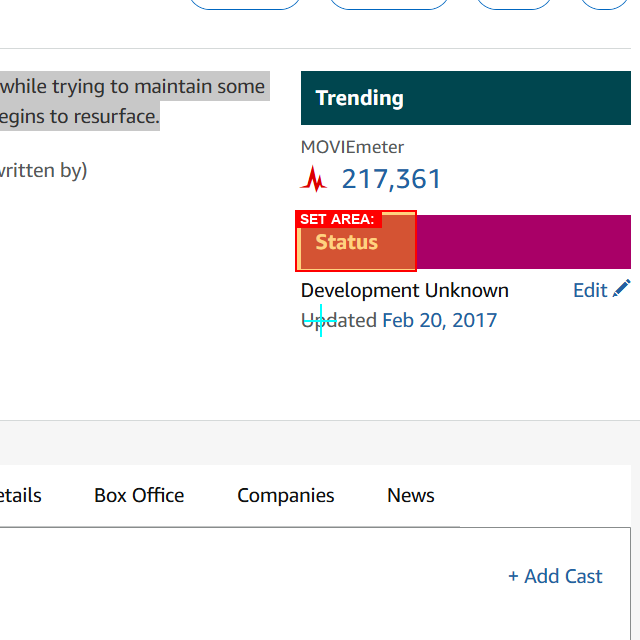

In [836]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASV6bYAAAAAAAB9lCiMBGFyZWGUWFAIAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBSGtBQUFBOUNBSUFBQUFHVVZGa0FBQUdBa2xFUVZSNG5PMmFiVWhiVnhqSC8vWjY1YzY0bUpCTEdsa1VhOU5GUjhSWm1vdlZTdXU2RExwaGhZcWpEaHdZY0IxbEZpWlU2TnlHdE5RUEhiU2dvNno3WUdINTBHSW5wWlNoa0xFV0pKYkZ6aUtHTmNGZ3VoZ3dsVWppbmJIQm1IVWY4dUpyclNieHJLem5SejdjZSs1NWVjNHZqeWYzM0d2RzgrZlBRU0hDcnY4NmdOY0k2cG9jMURVNXFHdHlaSzR2NnN2NG5Id2Nyd00wcjhsQlhaT0R1aVlIZFUwTzZwb2MxRFU1cUd0eVVOZmtvSzdKUVYyVGc3b21CM1ZORHVxYUhOUTFPYWhyY2xEWDVLQ3V5VUZkazJPRGQyQkpJR21zS3p1dDMvMXU3aTZPWlpiQ2thVnd5RDQxYTdZNnZyTDQwekxBLzRLTTlmK0xzOTMzalhuZEhSV3QrZXdHVjd5dWpNNlIyTEdnSC9wUUlRTW1maDg4TWJDOUdKdWFqcmJ2WlFHeHIzUDR3dmFhdmxLa25OY0c0LzZFNktXRm9GMk1BSkJKSlh3Mnc2MnNwMVVjVWtrQlpQTGJIcUo2cjBLbkFvQ1JsOVY4dFVuVnRiS2xTQkk5Q2pqRzlGY2N6dVZMa2hwdFZ1S2tsWDhqMlNFMGhkS2t3M3VsU05XMW5NK09IZm5tUE01Vmw0TDNIRUVBcUNydEUxVDZlTzVyaFBxL0JRQ3dXL3IxTnhNTFBac1RYNFNXRm9KRGx2SFArdDFPb0xtdXNra25MNDhOSVczc3FXOEFBTkhVYWo1OXBOcFZyK1FUcHdDQTFpOCs2dEp5QU9CMXZYbHhGQUNROTgycHNqTTZLUi9yUHhJUXhkdDN6RVpMaWhOUGdsVHZRenllaGRpUlJ2aGczS2l0V2I5RUZMM1ZvSlVYeHIrU1RKYkppWDBBcUZzT3F3L3h5NklCWkdaTGFneDZVNTBFUUhXNXVpWmZJb3RmNHVKdE9RQXNJMXQ1R3VzOEs5NDVBd0NRWE82b1BGK2VFQTJBa1VubEI0dFNuSFZ5cEpyWFFaTkRiT0NsSEFDd09xSHNOMEhuODg3ZXR2eDV5VHdUUzNPZmFQTkNwcENxV1FDWUY4VW5Dd0F3NFFNUW1WOEkyYjMrRWJmUFBCbEVkbTdqKzI4ZjR4bUFPYURUNE02WWExcTBJYXRReGVVQVFNVGpEUVlBUUhSdE5ieDNEUGtNQUlTREE3ODZia3d2UXNFYjlzcHpmQ25PT2psUy9tMDBtNGErelQxeVhpZUpKeGZEcTVRdDljcW13ek05TisrMzI0Q0I0ZElCOUhaKzNLd0NBTS80WUtrcDBkcDUvT3RWQzQrSlZmanJsVElnazgwQ2NPSGE0QVhvSC8rd3B4Z0FndWJPUWVPMmdpdEtwUHlpYmRScG1nTGdObTNXWUVkSncxNG0rTjMzdjVUMlByNDlGWnBmVWNyeHlyT25ESmUzZE5jaHJ4Vkt1bzBWM2NjS21yS1oxQU5hWnZMcGhBZ0FZT1ZuTytxbk95cTdxdVRwN0g5N3BHY3ZBNmQxL0lSMUhKQTMxNVcwSFZicm9xc3pLNjg5cm16cm5kbWtZVzM5MFI4TkNsWHNyQ0E5MFN6ak92T3ovTVpKellGc0FJd3FYMzJ1U2YzbHNmZ2ZIR25TdkVmM1g3OHpYTm8yTWlER3p2bmNUZk9vcWpvdU9teDNlRXhXenoxdmVDbXRBVG10by9vMnMzSEE4MUNNUkh2bWVPWFpreFdHdEk2eU5YYmtlVWh3ZmpGMnRJVElKdlZhQlQ2YTBWN2JIeVZYaGovdEhYN1A0cC9mcEVHUytLL2ZHZGEzOTVmMHVtTS9EcnlzTWYyanZKU1UxNUNyN2NkcldIRjhXbnhrODNrQVFGSjlaRjl0YkptTzJPMngyU1d5VmFPdFBDZDRQTWpLWEhBbUJ1Zlk2RTVIMHFqaTFrY1VieXV0T1ZYUzlDaUliQ1p3MzNWM0xoS0tsVXNPR2dzMHZiUDVWZHJhdk5XUENvU3lQdDAvUTFaUGo4MFB3RG45TEJBR1dBQ1JRS3J6VG9LVVhYUFpYTEdLSzg1WE5naWFOWmRDVTg3bStLT1BXKzVnaTBvQ0lKTlhkeG5WQU93V1o0bDd2a3NyNXdDWnR1eFpqMjRKVE00R2oxWCtHdmZ0MGZFQVVGaGUrbE01QVBINmZkZGRxOC9abEtkaUFUREZRc1dFc0ZGd3VYS0RvR3dRU3JyWEJqWnpOWlU1SjBuS2E0aHJMaHphb0Roc3M0NVdYeHhMM05DWmUwZDdwbGF0eGFFdzBHL3JtUXpGbGxHV3lXRWpUeHllaHd0cnVwcjU1S1p6ZFdFMG94OWZzdmdESzBybmZUTlhURzc3eW9wdXYzMXRid2g0M1czWHhweHJpd21RaHVkOEFDUTE1UXBkd1c2OWdrRTRPT0x3UGJCT1A5eXdJcTlzS09LNGNPakJvNW5FYkRYYVBVWmhOeTgrdldGeDNYdnhMa09qVlIvTTNSV2FtNzBWM2ZwSHljOXIzYS9ldC9oMGFISjErWnFHZWZMcUlnbG1mV2I3OUl1cTdUenBjVTNaQ3ZTOUREbW9hM0pRMStTZ3JzbEJYWk9EdWlZSGRVME82cG9jMURVNXFHdHlVTmZrb0s3SlFWMlRnN29tQjNWTkR1cWFITlExT2FocmNtendEb3l5UTlDOEpzZS9BeWp2bC9MLy9OWUFBQUFBU1VWT1JLNUNZSUk9lIwNY2xlYW5fcHJldmlld5RYrK0AAGlWQk9SdzBLR2dvQUFBQU5TVWhFVWdBQUFvQUFBQUtBQ0FJQUFBQ0RyMTUwQUFDQ0IwbEVRVlI0bk8zZGVWaVU1Y0kvOEcreU90QXN5SmFBTENxajRnSWVnUlFGY3NFbFVjdlVTcW1mcHBacm5yVHl1TlNibXNkS3k1TmFiK3JSVTJnbklVMmhWREFYVURUQVYxQkVCUlZFUU5uVW1RbUdYWDUvekFEREtpRDRnSDAvbDljbDh5ejNmVC9QTTh5WCsxbnVlYWFpb2dKRUxmTE8zdXREdTB0bVBHOHBkRU02cEQxLzVKeTVxZnpmNlQzYnRCWWVvN2J3Qkk3ZDAzZmcvaUp2K0dadFpxZTJiZzA5eGY1M2VzOXZJelAvU0ZVSjNaQ081NDlVMWJlUm1XMzlZUVFlb3pid1pJN2RVM2JnL2lKditPWnVKZ09ZSHN1UGIvV1o4ZStyQ1prRlFqZWtJMG5JTEpqeDc2cy92dFhueVZUSFk5U0tudVN4ZTJvTzNGL2tEZCtDeldRQTAyT3g3MklVc3FEZlM5OWVmbXIrVkc5cmY2U3FYdnIyY3NpQ2Z2WmRqSjVNalR4R3JlVUpIN3VuNDhEOVJkN3dMZHZNWjNnTm1CNWYycjNpMS85OVpaNjN6ZE4weWFvdDdQa2o1OXZJekIvZjZ2UEVQb3lxOEJnOUpxR09YWWMrY0grUk4zeUxONU1CVEszbW5iM1hzMVVsT3dLY3pVME5oRzVMdTVPWFh6b25NTmxLYlBnRUxvTTFnc2VvQmRyRHNldHdCNjQ5N0RTMC9YNTd6TTFrQUZOckNqcWZ1K0pneXQ5SDJzNGE4bHhuUTE3Z0FJRENrb2U3enQ3OTZ2ZU05Wk9jcGc2eUVMbzVQRWJOMEs2T1hVYzVjTzFxcDZITjlsdXJiQ1lEbUZyZloySHBtMy9QV0RUYzVvM25yV3hsVC9yVVUvdVI4YUQ0aHoreXQ1eklYRExTOXNQUmRrSTNwd1llbzhhMTIyUFhuZzljdTkxcGFOWDkxb3FieVFDbXRyTDdiTlovWTNMaTB2UC9QdEoyZUM5cEQ0dk9rczc2K25yUFBDTjB3OXBJQlZCV1hxRXNMTHVSVzNqaW11S3IzelBjN0V4Zjg3Q2NPY1JhNktZMTZLOTJqQnJTNFk1ZGV6aHdIVzZub1VYN3JVMDNrd0ZNYlNzdnYvVEVOVVgwTFZWQ1JrRktYbUhPbjZYNVJlVlAzM3Z1R2NEVVdNL3lXUU1uODg3OWJFMDhIY1REZTBrNzBPVzZ2OEl4YWtqSFBYWUNIcmlPdTlQUW5QM1cxcHZKQUNZaUloSkErNzJTVDBSRTlCUmpBQk1SRVFtQUFVeEVSQ1FBQmpBUkVaRUFHTUJFUkVRQ1lBQVRFUkVKZ0FGTVJFUWtBQVl3RVJHUkFCakFSRVJFQW1BQUV4RVJDWUFCVEVSRUpBQUdNQkVSa1FBWXdFUkVSQUpnQUJNUkVRbUFBVXhFUkNRQUJqQVJFWkVBR01CRVJFUUNZQUFURVJFSmdBRk1SRVFrQUFZd0VSR1JBQmpBUkVSRUFtQUFFeEVSQ1lBQlRFUkVKQUFHTUJFUmtRQVl3RVJFUkFKZ0FCTVJFUW1BQVV4RVJDUUFCakFSRVpFQUdNQkVSRVFDWUFBVEVSRUpnQUZNUkVRa0FBWXdFUkdSQUJqQVJFUkVBbUFBRXhFUkNZQUJURVJFSkFBR01CRVJrUUFZd0VSRVJBTFF2NUtjTEhRYmlJaUluazU5bkowYm12Vk1SVVhGazJ3S0VSRVJnYWVnaVlpSUJNRUFKaUlpRWdBRG1JaUlTQUFNWUNJaUlnRXdnSW1JaUFUQUFDWWlJaElBQTVpSWlFZ0FER0FpSWlJQk1JQ0ppSWdFd0FBbUlpSVNBQU9ZaUloSUFBeGdJaUlpQVRDQWlZaUlCTUFBSmlJaUVnQURtSWlJU0FBTVlDSWlJZ0V3Z0ltSWlBVEFBQ1lpSWhJQUE1aUlpRWdBREdBaUlpSUJNSUNKaUlnRW9COGRIUzEwRzRnNkFFOVB6N1lyL0puUms5cXVjQ0lTVUVYWXdZWm1zUWRNUkVRa0FBWXdFUkdSQUJqQVJFUkVBbUFBRXhFUkNZQUJURVJFSkFBR01CRVJrUUNhR2NEM0lyYXQvdWlqYlJGNWpTeFRuSldVbUtGK3FIMlZ0UCtqajFaL3RQOWFTeHZZbXNwVWFZbEp1V1ZDTjBNWVpkbEppZW5xTnErbTV0RW5JcUtHNkRkdjhZZGx5bnQ1ZWFKR01rd1Y5ZTJhdmNrUWoxaTJZYklUZ0xMOHZMeDdVSlUrVml0Yng4MzlhelpGcUR1NVRGKy93RXNzZEdPZU1GWFV0ay8ySmtFODR2ME5reDNic3BxYVI1K0lpQnJTNnFlZ1JWSUxNWURuck0xYnFjQ3kyTzN6NTgvZm5majRKWW5OelRvQnB1YlBtVDUrV1EzS09QVFIvUG5yaitlMllSVXRZU1ExRndPZG5yT1dObU9sNW05THF4OTlJcUtuVmpON3dFMG8wR1g2aG0rbXQyS0JDdFc5VmlySllzU0tyU05hcWF3R0tSVjVnRzFiMTlKc1JpMDVMTTNmbGxZLytrUkVUeTE5bFVxRlRpS3hhWFVTbCtXcjFBLzFSYVlpL2FydWNabGFwUzZEdnFqR2lkc3lkVlpLY2xZK1lHVHVKTGNWNjlkZVZ0Um91SmM5eUVoS3pTc0ZPbHM3ZCsvYXlMTFpXWmtBU3RVcWxRcUFwdUNIWmVwOE5ZekVJaVBnWVprNlgxMm1MeExybGFpSzY2bTR1ajJkeXRUNTZyS3FqUzFXcTRxaDJjd3lkZGJOYTFtRmdFRVhKN205dUdaanlsUnBTU24zU2lzM3MweXRVcGMxdUhsNVdWa0F5Z3BVS3BVUmdCcTdzYW9XbUZvN08xazN0bjkwMjZiZFVRYm1QU3IzY3RXZU43WHUyOE82K2pDaFRLM0tTNytSVlFnQUJ1YU9jbHVadnM0czNjT2lzeFVQeTFUcFNTbjNTb0hPMWk1eWE2TkhiMHRaZmw1V1drWmVNVkRuOERWY2pjNFJ0K2tydDJwazQ4dlVkMjRtWnhYV0xiekd0cU96ZGEvdU5YWmlDM2RhalVOajBNVkpiaWZXNTcySlJOVDI5SGN2WDU0azhsbTJjVnJsSmJ1VS9mK3pNVUlOOTduZnpIVFZUc283dWZtalh6SnNYMXF6UWpPbFhIRXg5Ri9Id3BKVVZmZmFpTjBYZkRUVFJRUUFTY0hMdDBYRGZkNDNNL3MxVUtjNmFmK1gyNDdmcWI2UXJOOTk4b3EvajdDdS9hbVhGN0hwbzMwM05UL0g3MTRlRHdCd1gvRE5USmQ3RVpzLzNsODBldGt5KzlqTnV5S3l5Z0RQQmQ4TXZyeG1jNFRhYnZLYWY0elFPUUdhY2ZpejlVZHpuYVo5dXN5bkxHTHp4L3N6S2hmSWk5ejgwUy8zZlFKbTZFZi9kRHhaVmJXQzJIUEJSMjlxTmdWUUorMzc0bDhSMlpYek9vbGR2T1gzVHNWbWVTNzQ1azJYV3MxTit1L2lmNTNXYkZUVzBVM0xqd0tBN2VSUFZveXdBQjZxWXYremZ2ZjU2bHFnYnozaTdXV1RLK3VwdmVXUm16LzY1YjdYOUJuNkozZEZWTzJvVG1LZjJRdmxWMy9ZRTFWOWw1Tis5MmtmTGZVeEI2Q0szYjVtZDN6TnU2ekVYZ3MrbXE0OUxQdVdiNHZWN0wycWw4NFQ1djd0Ymtod2JGYlZvZWhrTzNuMWloRldqV3hMU3NqSG00L1d2SkZOOS9EVk92cEp3Y3UzUmNzbnpIVzkrK3YrV0owamJ2dlNSeXRHV2RlejVYWGVHN0Nmdk9aRDdRRlZ4ZTVlLzMxczlidE9zeE5mY2hGMWF1bE9BL0F3SytxN3pYc1RkQTZOMUd2QnF1a05IQmtpb2xhalA4Z1pTY21KbDlQZ1pBOEFTTHVjcUFhQXhPUVV1R3BDV1pXVW1BSFllcnBXNXRxZDQwY00zTWZPKzhqZFRvVDg5Q1BmYjR0SWp6MFU1ZTh5cWdsWC9oNW1IZC95citOM3hLNEJTMllNdEJaQmxYUjA2Ny9DOW0vKzJYSEQxRnEzN1VqbEw4NmRxNzc1Kzg3aktYQWFNWHRrZHdBd3Q2dWNuWGQ4ODZxSGh0Yjl2YnhNQUFjSm5MMjhMU0tPcGtkZnpCMHh3cUp5b2JRTDUzTUJWeDh2R1ZEUHRVeDF4TjQ5dHU1akY2eHl0ek9GT3YzSXJtMFJHZEdIem8xekdXRUJRQlcxL1Y4UjJSQVBtclp3b3B2WW9FUjE0K3lobjQ5bU5iQmx6dzJaTlZldWpQdGxYK3c5Yy9lcEw3dUpBWFMyRmdNb1MvenYrdDNuVldLWE1RRXYrZHFaUW4wamRQdXVxT1BiMXBRdDNUQ3RlME43U2gyMUw4VGRmOWFLZ1U1aWc1Szd4N2YvNjFoR3hQYjFzZlkrL290bnVWbUxrSi93MDVkNzQyK0dIci9wTTYwN1VHclF4V2ZhWExuY3lWb0VvT1JCM0lGdjk4Vkg3ZnZkZTgwRXV3WnFTQTdaOVVEdTg5cUsrUzVpdzFKVjNQN04rK0l6OWg5TkhQR21TOFBiQW9uenhKbFQ1WTUyWWtNQStlbkhBcmNkdjdrL0pONW43c0NHT3JWSklidnV5WDJtclpqWFQyeFFvcnB3WUhOUWZNYWhJNGtqWnJyVTZXaW0vTHJqK0IxRCtjUUYwNGQxbDBLdExsU2xwSlFZQWdES0V2ZXUzeDJyRXJ1TUNaanNheWRDZmtyb2p1MVJ4N2V0S1YrbTg4NXA1azZET2pGdzg5NEVsZTNvZCtlTzZtNXVXSklWdTJkellOUzI3UTRibHZ6bGJ0UWpvaWVzVXo5M09aQjNPVm43WUZGZTh1VzhUcTZ1TGxBblhNN1FUQ3BPU2t3R3VudTVWNlZhMXduTFBwdzV3c1ZhTEJhTHU3cE1IdWtLSU9OT2R0M1M2NUY0Wkg4YXpFY3ZuRHZZV21RRUdJbmxFMS8xRVVFVkU1dFNlMUY5NjE2dXJnTjdkUUdBTHIwR3Vyb09kSFVkYUZ2OXNTanhXYko1NDRxNTA2ZFBuejdkeXhhdzlSM3BCR1JFL0pGUnRVaEcvUGs4d0hXUVcwUGhZTzIvYk1XYkkxeTZpc1Zpc2JYTDVGR3VBREp1YXpJMi9WUllNbUF4WnVILzg3SHRJaGFMelcwSFRsandtbnREV3lhMmQzVWQ2TkpOQk1DNG00dW10WEpySXlBMzRsQ1VDaUtmbWZNbWFDc2FPSDNaYkhjUlZCR2hVYXFHaWdOcy9lZlBIT1dxcVZvK3drY09BTzR6UDV6bTQ2elo4MTRqUFVTQU9pdExCUUJkWENmNys3aHFab25GNXZZK0UxNndCdkx1S1JxdUFPNnpQbjUzOG1CYmM3RlkzTVhXWjdTM09ZQTdXWG1OYkF1Y2ZLYVBjSGV4TmRkVTA5Vmw4bWgzUExxYU5lOU85dEx1UTk5eDNsMkFoM2V6NnJtMG41ZDZVdzI0K0l5U200djA5VVZpY1JkYlYzY25NUURrUllSRXFTRHltYlZnZ3ZhTjV6cjkvYm51SXFoTzFkaUp6ZHRwdWVjT1JhdmdPblBKUkxtNVNCLzZJdXZCci9vN0E4bm5FeG81TUVSRXJhR1R1SStyRTVDUm1LUUN0SjNkSGk3alhPVzRkemxKOHhHWmZEa2VjUEp3cTA0K1BRUGRQTk0zTm1oNmZTbFhFd0dSUzEvZFczdkU1bDBBdGJxd3VXMFhTV3RkclJWN2pIVHRoTHp6RnlvVE9PUEMrVHlJZkh4Y0c3emlxTitweHFhSXFxK0FJaS81Y2g1Z1BuQ2c3ZU5kRVZRbFg4NEFSQjd1Y3AxeVJQM2RYQUFrSjZjM3NSU3h0RzZIVEN3ekExQ2dMcWwzalpxYlZqOEQzVTBUbVJnM3NURzY5SnE3akxGSmcyZDN6UjJkeFVEc1Q5OGVUMUxWZk5STmxYUTVIUkM1dXp2clRCUzV1dlVCa0pTYzFrQjVqOXBwbWtNamQ1R0xkTmVSQVNnb0ttNThrNGlJSHBjK1pHN3UzZmVsSkNjbUZYdTVHNlFrSjhQMkpibXQ3VDF6SEwyWlVqYWlpMzdLMVVUQXliMXY2NXlRS3l4VUE0allORCtpVllxcnhhaXZoeXZpTDV5L2tEYkIxaDVJdTNEK0hzeEhlOGxibHFBUEFjQlkxSkpVMGxXaUxnQmdKcXU1QXp2WmRyTkRiUHJkckZ5NFdOUy9Zbk9wVXlQMi9YdzhLVHRQVlNJeWwxaDNNYjNmT3VYVzhpQitmMkRJeFl5OFBMV2hXQ1orVHR5YUE1czRqWjA3NXRibW80bjcvN1Y4djhqZWZleDRmeDhYYzMwQXhVVUZBTHFZMTNvWDJ0clo0bnpHM2F3ODlHdkpnMCthUTVPMGQvbjh2WS9mZGlLaTV0RUh4RzRlVHZ0dXhsOU9ocnNvS1JIbTNzN21zTy9ySWpvYWNTVUo3cDFqWTlUbzd1NG1hOFZLcXk0cjZoQlp5MXVoWkgxWGJ4L1JoWWpJNkpRSjlrNFo4ZWZ6WUQ1bTRHTTlGRlQyc0kxR3ppb3JMVy9WNGhMM3J0a1dwZEszZGgwMXpjTkdVbnJ2WnR5RmhxNVdQNGJjNCtzLzJaOEJzWHp3UlAvZVhRd0tiaWZHblU5cXhmSkZUaE9XZnVtYkZuM3MwUEZ6eWJIN3Q4VWUwdHpoMWNEaXJYSjBuRWJOSFdsZmE1cTVVeXY5VlVSRTFCQjlBT0srN2s1SVNieWFrbUdVcUJhNTlMVUg0TlMzSHlJU0xxZWtkVTVVMXp6Ly9IZ2tVbk1nRDFKWFY5ZFdLckVXemExWU1iRXBVeEY3T2cvZHAvazJkQXZTbzVoYlB3ZGtaS1dsbDhINmNSNlhsa3JOZ1l5TW5HeEFwNWRXbkg3N0R0REozcnAxUHVqTDRxS2lWQkQ1TFB4b212WWtyYXNqa3VMVFdubnN5WXl6RVJrUDRmVGFpbmVIYWQ0UnJxN1NlMUhYR2h1WnRQbjB4Zlpla3hkN1RTN0xpOXExWVcvOC91TlhSMHp2SVRZSE1qS3phdTdFc3ZTMExBRDJYVnM0N29mbTBLaEYxcTRERzRwNGFoYnZuWnVtRGpFRlVIQTI2TVBaeHdGWUxmamd2UVhkVFlweS8yL1ZxdDJIaFc0ZlVidWlEd0F5RnpjNzdFLzQvYkFvRC8zNmF1NG9sZmR4UlhSU3hISDlQRGlOYUtYenp3QnNlN3VJd2lKaVQwVk5kbTJqdTB4dGZVYzZIZjF2Yk93aHhLcmg2djBZdFRoN3VJdGlZK1AzQjhhN3pIUVZBVUJaWHZ5RjFPWVdveTkza1NNK0tTNG0vaVVYMThxTGplcExjZkVBWEYxYW85K1B5dUZLeEJKSjlhUzI2THNyRlhrQXVqeXJzMU5idFI5Zmc3NjUzTkVNOGVxU2g0Q1IzTVVaOGNtMWRtSmMzQ1dnazZ0TGo1YlcwRVB1aFBpVWt4RXBvNlk1ZFpSbmY2ZC9lTVg3VVg5VTVsOWJ0M1RyajAra09UWEpIQjFzZTVzQ0tMaXJlU3VPbUx0cWhOd2FnSVB0dXJkM0gvNU9nRFlSdFZ1YXJwMzVnRUcyKzMrSmo3OEgxNUhhUk5ERVJ1eDVvUHUweHpuLzNMbXpDRkFuSGQyOTk1S3p6M1F2VytjUlkrMGo5aWZ2WGJVdVkvSTRWM21QTG1YcEdYZnZKSjVOdFowKzE2ZStqb3lraXdXUUc3dC9WemUxcTFpVldpS2Y3Tlg0T1dXeGg0L3JmM2RIaEVXZ2s2dEgvOGZvdXhxNVRIdlRQZW5iMk5qdHkrSk16YVZHSmVvSEtuM1R4Z05kMnNVQ1NNODQ5cC85K2lPNkl6UEwzR2VNaTlocjJrc1JhMzZKM2Y0RkpvOFpZaXNyVkNWRjdROUxSQ2ZieVJNYnZqMnNlY3dkbmNWSXp6cjE4M0hIVjkyNzVLZGNQQlZ5S1BveFQwSFhzeTEyemk2SVRvdzl0TmZOMHQ4SmQrUE9IVDF5c2hYUFFPZEZCQjVRT25oMDcyWnJKek5VcDUvYWZ6d0RuZVRPdGdERVhxOU5qbGk3UDNiblJrd2NPOFJlWFBnZ0tlclEwY1NIc0ozOHNxdlJJMHR1Z014cnJOZVJiVkVSRzFmbGpabm9PN0NIbmY2OWxLenMyekZuQzcwK25GYjdRZTkyd3RxdXQ4T2pycXJrMzMvdWliU0ZpQjZIOXZQZjNOWFQ5cGVNRE1oZDVKV0pJSmIzdFVOUyt1T2VmM1o2NFNXWCtMMkpxYkZSYVlhdTA3MXNZVDVpNlVmNnU3N1pIeCt4YjJmbG5WaWRSTGJlcm9iMUYyQTdjdnFJK0szSHM4N3YzMzBlMFBkNWQvS2pxalJ5OHhpNE8vNENSRjQrTGY5b0JnQ0krczFjOTRuYjRWOStQNSt1Z2xnKzlsVi9uNGVoaTcrTmJYZ05mVmYvNlM0cGV4TlRqKy9iZVJ5ZG5LWU5HUVBBZXRTU1pkaTkvVkRzL3U4cjE1VzZUSjR6YzBUclhXaDBHanR6eE5WdHh4UDMvMnYxZmtEZjNIWGlrb0RiR3dNYmFlb2oxYk10THA2VHA4ZW43MDJJMnI0dUNvREkzbWZHUXZuaHIwTmFhU01NUmNYSisvOGJmN1M2Q2RZakZzL3gwdno5WnpWaXlWTHMzckUvOXBmZDJxM3FKSFo1YWU3TUVTMDgvNnlwd09XMWp4WVliOTU5TXZIbzk0bVY5ZXFiOTVvc2FYUTFhcXJqMjVmMm1MdHNvRlhSemNNTDJQMGxxdW1aUC83NFE1aWFpOVdxWXMwNTBwckRYamFnTEY5VllpQVdOUzFRVTRLV2JUd0ZuNlViR3g3bW9vVlVVZjlhdmpmSmV1SkhINDF1N0twaG1WcWxScDNoS2pYak5BSzF4djVzUldYNUt2VkQ2QnMxZFVjMXFjdzYyNkxkamtjT045cnkraXJmR1BWVVVEVzdTVytiNWxmYTRHWjVlbnEyVW1YMWVHYjBwQmF0Ti9INC9wbkRUUUhnYXZpa1BwdGFzMGt0VXRXZWdoUGZUUjl4UU9qbUVMVURGV0VIRzVyVkpqSFFKRVlpY1hOQ1F0OVUzTlMyUGt5S2pWSERZb3hYYTZjdm9FNUtUQUpFY3NkSDNMT2pMeExYYzlxZy9xbXRTZCswOVd1bzIrcTIzWTVIbE40MmxiZjlvWG5DRm56eTNjWUJNaURud0pxRkcrM2UrL2ZVdi9VMk1iaDZmT3JBTFFEZ09QNjkvYS85emMzY1JMTndrVExqd040dnB4L1Nqb1d6ZFV2UVczWkEwYlYxNy8zZWVmYWt0d1k0V1d1K1FLd3crL0RlajE0TTFobHk1L21aeCtlUEhHNWxBZ0RsQmFtWEx5bHFOMlR1aFlNamV3UEFneE83MzM3eFVMUEt0MXJ3d2VwMXZyWlNQUUJRWkYvNjk1NmM0Zk85ZXdOM0wvN0g2V1BlMFVVZG5uQUIzUHJLMUEvVVpROVZjYi9zamxCRC9wTHY0MzhuVVZMb3Y4NGJEM0d4dDNPeUZwVThTRGw3K0tlakNZRDkyQkhPajE2WFNFREduVTJOT3hzQ3RvUGYrUEpFYnllcFpxSWhBRGhPV1hOaGRuK3A3c0lTMjlmbnI3VTJmRzlFY0RZQTQ4Nkd4cDJCenIyV2Jla3YxZjN1enM1VzQ5NzRjR1BVZTh2dUFBQ2VYM2hsNWNqZVZaZU85RXdjQnd5dTB4QkQ0ODZHeGdCZ2FsdzVIa3NUeTEvNnp5ODNEalNwbWltMTZyOTBxZlpuV2VkbURQNUQxRzQ5VFFHc09QZS9IKzFQQndDeHkvUnBnMXVoUjJPQWU5Ry83STdTbVNMdU4zbnVtNDkxMVpIb1NYTHNYWE9JOWE0ejk3L1JYd3FnNU1HSkkzcy8vVDNIY2VUMGpSUGxVcGdNSHpkOWVQQ1hKNm9YTlpSMkxyaDY4VkpjWHFteFZiOXhmV1hHQUF5dDNMeUFZQUJXRzkvdzFxWnZTZmFKSTcvLys3NXM4c0MvRFI5Z0pXMXEweG90ZitCN0M3VHBXNUoxOGZkMVlkZWtjcC9Kdm45ejQ4VjVlb284VFFGczd2UE9DdXZVUFAxSGZMOWhNemo1ci9sNnJGcVZrNTZTVlFoVGF5ZGI4emE1NmtuVVpvcHUvYjd3bStCL1g2dzhyN3ZrYjI2R0FKQjFjZStJYjM0SGdPVHM0ZTdmdmQ0VnNMSWRCK2dFTUs0ZW4xNTVYYm5xNHE3SmM5MDBVNmFNNjY2TjMzTS92VDFpTHdEOCtGUDFOZW1tYUtSOHg1RnlSODJjdlA5NzY0UHRod0Vjanl4eTJPczJ3S1Qrc29nNm9LY3FUdlJsdGk2eXh6L3hYS3RRa2JpcjNMVnJLNWRLOUdRVUtkT3IweGRZMmxYN1RLSFVjZEtWN3lacGZwWnBwdWtaU3B0ZTdzdVcyaWVkeWpQT3RzRkFuaStiYTJOY2tYbU5GM3ZwYWZWVUJUQVJOWkd4dVczdldwZFNDZ3RhOHVSNFlmN2RWbWtRMFY4UEE1am9yeWpyYXVTSk96VW5GZDQ4VWYreWpkSXphczF4NHVzd05tenlHVzJpam9ZQi9KUnIwNmRYcWNPSlUrWURKZ0NNUzI1Ty8veFF5d3U2VmZBQWtBTG9iT25tQjRTM1V2c3FiYnJ6WU9NQUV3REdEdjNYZGQyNzZzNGoxeURxZURyS0FMaEUxQXBPSEVuU2pHWXVIVEQxeWdkVHhta2VxT3ZhLytXSjAzY3VuZjU2MHd1NmNDNU8reDBjc25HelA5czZ0citqODk4V3pQOWJuODZ0MU5DZy80dlRmTTkxWi9uS0xkOWQrVzdybFoyNzEvRU9MSHE2c0FkTTlGZHlZZSsyaTMvYk9NQUVNT2s5WXZwdkk2Wlh6OHEvZExVWlkybEZManM0Y3JqbWVXS0pmTUdTTlF0YXQ1MTNkazgrME92Q3EzSXBBRk9yM2p3UFRVOGo5b0NKL2xLeU4zMndldUh4REVXZHI3RlNaT2MwNjNhcTFPQ1BwZ2RmU2kzUktlRlc1SS9KSlEydjBUeXB1ejhjdU9Yd2lWc1BGSVVsaXJ5TUUwZTJyN3BZMEZxRkU3VUh3bzBGVFU4RXJ3RjNDQzBkQy9weE9JMGJZZXNtSC9UYy9mTm5jd3V1SHYrL3VNY29Sd29vMGlNUEo3ZG0rK3BhdHpsb1pXOURBRmwvZlBuY3g1RnRXeGxSSzJtWFkwRVRrWkJTRGg5UE9Yejg4V01zNWZEeGxGWm9UaDF2VFp4eTkycHdWYWc3dnZEZTY4NmFvVDhLcmx4ayt0TFRnQUZNUk8zUllQL3BiODJmanBLU29uSUFNTzZzSFhXNjZOYTVUL2s5Uy9SVWVPd0FMczVLdWxGbTE5dFd4S3ZKajZKT1BiN25QNGZpYzhzQTZKdU9XUEQ1WkxuUVRTSnF0NG8wVjVNTk5kL2xVRG54enJsbG4yeHR5ZlBLUk8zUFl3YXdLdXJiTlh1VElSNnhiTU5rcDBjdi9sZjJNQ1gwdS8zeEtuMXJWNi91SmdDcytVUUZVU01XenAvMDcrZW52T1hkYTJCM0t5bWd5TDEySXZMd3F2QTJPZDFOSklqSERHQ1IxRUtNWk5WejFtM3cvVURGc2R2L3ZqdmVjOEUzYjdxMGZ1RlBYbTV5a2dwd25yWmtydGZUOWMyelJHMGw3by9naGJ4SmxKNWVqeG5BK2k3VE4zd3ovZEhMdFlSS2xkYzJCUXNqNTI0V0FKbVU2VXRFUk5BRzhNTXlWWHBTeXIxU29MTjFyKzdXdGI1eDcyRloxbzNMV2ZtQXFYWGZIdGI2S0ZQbnEyRWtGaGtCUUpsYXBTNkR2a2p6TlgxbGFwVzZUUE5DdDB3WHViV1JUb0ZsNnF5VTVLeDgxRjlkbFp5c0RBQ2xhcFZLQmFDcWpwb05OakIzbE52S0d2a3pRcWRKbXA4N2ljU20rbFVOdVhrdHF4QXc2T0lrdHhQcmQ2cXhYajJOckxtMU9oWFV0d2ZxVkFmZHphbWFYcXpPeTByTnVGY0tBS2JXems1MTkwZVpXcFdYZmlPcjBNamMxdEhhWEhkMlZTT056SjE2MklxTlFFUkVIY1V6SjM1NGYrUFc0MWxsVlZQMG5TYXZXRGJDV3ZzcU8ycmJWM3NUVlZVenJVY003bkw4ZEtMdFMydFdqRElIa1BqOS9HM1JjSi8zemN4K0FCSjN6OThXNnp4aDd0L3VoZ1RIVnBmWnlYYnk2aFVqckFCQW5ieS9abld3bmJ4bVJhMXZ1TDhYc2ZIamZTa1BhN2EwOGx5ME9qWGttNitPcHVpVUlPNDNiY2tjSCt2NlV6aHg5L3h0c2E0ek40eFNCZTdZbjZnQTdDYXYrY2NJODRkWlVkOXQzcHVncWw1UTZyVmcxWFFYVWFPTlROZzkvOXRZMUR3clhzOGVxRlhkWFAzLzFOMGN1OGxyL2pGQ0ZmclI1aU41WmJyVDlaMG1yMXltMlZjQXl1NUVmTGQxWDZLaWVyN1QxRFhMZk0wQlpFVnQyL3pmUkZWVnNaM0VYbTkvTkwyZnFOYjI4em5nRGtHSTU0Q0o2RWxvN0RuZ3pWOGZ6ekoxbmI1NGhxZTFDTXFrdzl2L2RYVC81bjBPRzZaMUJ4Nm03UHRxYjZKSzMyblUyek5HMkltZ3Zuc3hZbDl3eENOcVN3N1o5VUR1ODlxSytTNWl3MUpWM1A3TisrSXo5aDlOSFBHbUM1QVN1djE0bHFGOHdzTHAzazVTcU5YcUJ5bXBaWWExU3pDVis4K2FXNWoyKy9aaktlZytZdTRMM1FHZ2l4MEE1Qjdmdk9sb0JxeTlBbWFOZGhFYmx0Nk4vV24zL29SOWE3YnFiMWpTOExYVlM0R3JMa0hxN083bFlnaVp0U0hVaVlHYjl5YW9iRWUvTzNkVWQzUERrcXpZUFpzRG83WnRkOWl3eEV2Y3hFWTJvbFoxcGwzcTJSeVJ0UlJRUFN1ZitPWTBlUTg3c1FFQWRmcXhYZHVPcCt3UGpmZVo3YW9QSVBmNDUrdjNaenpVdHg0MmVmSVFGenZUb3ZTMG13b2pRd0RxaE4yYjl5YXE3TWU4TzN0azl5NkdKWGVpOTN5OU4rcTdIUTVyMy9WcTArK21JU0tpVnFLZjhkQjh6THk1WHBvdm5KZkpKN3ppRTdrcEl2Yi9VcVoxZHlxTC96MUNCYmdHekg5SjB6TVVpNGRObTE5MDg2TmZNaG90MDMzV3h6TmR0YWR6eFQ2anZZL0hIODI3azVVSEYvUGMxSnRxWUpEUEdHZHpUWGtpc1dzOXQyOFpXY3NIV3NNZ0RzZFNZTjdMZGFCT2QvUHcvb3lIY0hwdHlmVEJtclFWajVpM3BQU3pOU0hKdnh5NTZUV3Rld010ZWlpZjl2a0NyNnJoWkhPUEg0cFd3WFhta29seUVRRG9XdzkrMVQ4NmZtL3krUVNWbDFkeDB4clppRnJWQWVJR05zZkpkN3JPdmVOaWw1Zkd1Ui9mSHB0N1R3R1lBMG0vSDhsNENOdUpLMWFNMXA2UWNPbGlDd0RJTy9kcnJLcVQ2OHhGRTdRYjBOWHJWZi96OFh1VHpsOVJlZkVlTHlLaWpxQVRSQzU5N1hVbWlNM05BSFZoSVlDa3EvRUFYTjNjYXAvV2ZCUUQzWXVwSXBQcXgvZ3NIT1ZpNFB4UDI0NGxxY3JxcnZkSUtaY1RBTWdIRDlESm1FN1dyZ090QWZYTmxFYnUyUkpKZGVKUWxYdzVBNUM3eUhXMlN5eVZBU2dvS243OFJ0YXVyaGs2R2VpOFNJbi9QelZnNnpuSXV2WmlxcVRMNlVDUG1oc2dGZ01vVUxmYVNMeEVSTlNtOUtHTzJEaS9nYlBLWlFCZ1lOeUtvMlU1algxN1RPcFhSeE4vK2RmeVF5SmI5N0VUeC9tNFdEUzkvRUsxR29DNDFwM0UxbDN0Z0t5TU85bEFrM3FxSmVvQ0FFbDdsOC9mMnhhTmJJNkhxdmhmZG9mRXArZmRVeHRLemNYV1lwM0UxMnpzYzlaZDZxeFZYRlFBSUxuQkRTQWlvdlpQSDEzY3A3M2tKcWs1dGJPTnpoaE5kYjQxNVhHSUhDY3MrOUkzSS9iWS92QnpTZEg3dDBVZnFuSFBWOHUwcUlWT28rYU90SzgxemR6Sm9zMGFXWSs4NDE5OHREOE5ZbWV2aWVOZHVoZ29iMStOUDkvMHRhc3VKK3N3ZDJ5REI3S0ppS2dONk9NZUpLNnVydlVOSkduVjFSYklTRTNMZ0t0dHE5WXB0aDA4K2QzQms4dHlvM1o5dGpmK2wrT0pJNlkzYmF3TlNaY3V3TDI3V2ZmZ290TXZ6RWhMQldCcmE5WGdlalZKcGVaQWhscWtPWGZkNm8xc3NyU3pFV2xBOTJrcmx2aG91dlN1QTgzdlJTVlZua25YYkd4NmVqWmNhbTJaV0d3T1pCU2FXQTkwYmZVL0NvaUk2TW5vQk1SR25GUFZPOC9jMWRNV3lEdjJ3OUU3bFdkRzgxUE9KOTV2cmJyMUxlVGR1d0FQbTM3WjByWnZQeEdRRVgwK3EzcmF3NHdMRi9JQTg3N09UZTM4NmZlUU93RlpKeU5xUHhyMHlFYUtSQ0lBZDdKMHJ6YVh0dmdNZ2VwZUhnQ1pwUHFFK3NOU25kbTI4ajRpSU92c0gzVnVlVE9TeTdzRGQwNUYzR3lnNVB5TXhBdUpXZXFXTm95SWlOcWV2bTBuSk8xZHRlYjI1QWwva3p0MUtVdFB1NXQxOWV4Tm0rbHpmYzFoTVdMV1M5RnJmc2tJV2JmNGQ2bTVTRSt0dUtjV2ladDdTNWFPZXhGNzl5dHRCM1h2Ym04bk5sQ25SK3cvbGc0NE85dlZ1N0MwaXptUUY3dC9kMWUxbTFoMXMwdysyY3ZXYWZ4TTl3dmJZZzl0M3BnL2Rtdy9hK1JuWFQ2OFB5SVhZcTlwNCtvdnBUNHlyN0ZlUjdaRlJXeGNsVGRtb3UvQUhuYjY5MUt5c20vSG5DMzArbkNhU3lPTnRIVnlSa1I4K3JGOW9lS1JjbkhoZzR5NFUwZGkwMXE2Tit5ZFhUckZKbDRJMmV0cTdkOERkeTlHSFQxeVBFbG52bnpNUy9Lb3ZVbGg2NWVuZW8wYTdOTEZvUFJlNnVVOFcvOXBudVplWTd5T2JJdUsrR3A1M3VqSnZ2MGQ3UXp1cFdSbDNUNGZWZWkxWXBxTEttcm4rcjNKd01DNVg4OTJiV25qaUlpb2JlbC9zR0xhcnUvMng1L2V0LzEwNVRTUnJZK3I5ckZYNjFFck5qcEYvUEpiUkZKdW1iN0Y0R2x6eDNhL3Rubk5MeTN0V3htSUNtN3MzeGQvdExyNnJpUGViV2hzWkx1UjAwZkVienVlRmZ2TDdsaEFmOWk3azcwQWtjdk1EK2VLdHUyS09MNXYyM0Z0R2RiRDVpNlo1dEtjdTZUMFhWNzdhSUh4NXQwbkU0OStuMWpaR24zelhwTWxqVGZTeUgzQzVJakwrMU1Tait4T1BBTG9tOHQ5Wm56a0hiTW1NTDQ1ZTZHUzJHdnlhL0hwLzAyTTJya21Db0RJMXVmMWQrWEgvaFZTMVMrWGViMjcxbVRmOWowUnlWSDdrNk1Bb0pQSU5XQXlBSDJYNlI4dE1ONjgrN2kySlpwMldzZ25pMUUxUUxkWUxPYVhUUklSdFZ2UC9QSEhId0RLOGxWcXplZCtyYUVUNjBnSldyYnhsTnA5N2pjelhWdFlwV2JzUmdDMXhuU3MzOE15ZFg2Sm9hbEl2K1pWNnFvR042V01KalNsZGptTk5iSllyU291QS9SRmRWcjFHRzFvZERzYXJMR2hEU2hUcTBvTXhTSjlqb1RWUVhBa0xLS25WV01qWVduL014VTNhZmlHaHhtWEU5V0FrMVB0KzRlYlFWL1V0TG8wT3VtTDZ1dklOYlhCTFcxS1k0MDBFclhtcU10TjJSME4xdGpReXZYdk5DSWlhajhhLzVqT2l3ZzhvSFR3Nk43TjFrNW1xTTZLaXdqU1hIQWR5L0VPaVZwUkkzOGpFOUhUcXZFQU5oUVZKdS83Yjd6dThzMi80RXBFUkVTMWFhOEJONmJ5Ky9JTXV0ZzZXcHVMK0oxM0hRcXZBUk1SdFU5TjZNb2FpY3p0WGN3ZjQ2SXZFUkVSMWZMNGQvRVNFUkZSc3pHQWlZaUlCUEJNUlVXRjBHMGdJaUw2eTJFUG1JaUlTQUFNWUNJaUlnRXdnSW1JaUFUQUFDWWlJaElBQTVpSWlFZ0FER0FpSWlJQk1JQ0ppSWdFd0FBbUlpSVNBTC9XaUtnOVVDU2ZUY3lCaVkycnE2T296c3p5M09UbzVCeVlPQTUwdFRIV21WNmFlL25ZeWFqTDhSZHVLNlRkWEFmMjlYcGhsSXVsZ1haZVRrSk04cCt3N09YbGJGYW5zdXRSbDNNTmJmcTRPMG8xOVZyMkhkSlRXdDJNT2tRT25xNDJCcTJ5b1VSVWlRRk0xQjVjRDl1NjdReGdPWDc5bHRjZGFzMHJPTE43OVhmeGdNMjBqYTR2ZDYyY21QQ2YxUnZETTBzQlk2bFVCTVcxVXdmaVR4M1laek42MlNleitva0FBOFAwOEMxN3JsdE90Tmt5clZhQmlRYysyeFlHMzlYZnVWZlc2N1YwU0U4UG5XYlVaamZWMGRYR3BwVTNHWW9MUWZ0aXBYNXYrem0yZHNsRUhRSURtS2dkeVRteU8yek1KNk4xKzZ6bGlmdCtqSys5WFByQk5aK0haNHBjcG4yNDRPVStVczAweFpXRFcvNFZGUGI1T3VuNjlTL2JRVHJFeTNuUDllU3pNYW5USEdvazNKWFlNMnFZRFBmcXE5ZEFJK3ltZnZuWnBGYVAyN29LYnNhZWlIQndZd0RUWHhXdkFSTzFHejE2T3VQNnZnT0p1dE1VdndlRi9TbHlsdXNHWXVtWmZVRzN5a1dqMzExWmxiNEFwSDBtclg3WHo2VDgxcjU5VWFVQXBDK01IZ2prUnNXazFhams4aDluQ2lBYU9zU2wyYzByTHkxUUtBcEtBYUQwejF1WHowYWRTY2dzTGRjMnFTQXQ4Y3pacUxqcml0STY2MmtYUHB1WXFxNHhNek03RXlqSVZ5Z1VDb1ZDWjFhcE9qZjVRdFNacy9ISnVUckw2OVNPSW5XTkZZZzZKdmFBaWRvTnkvSFRITDViKy90L0RvejdRbnVxdVR4eFgvQjF1TTRONlBuYjZxVEt4WXFpemx3QTdNYVA3bE9uaEQ2K295M0NEMXlJT2wza05kell3TlBUZGN1RitETi8zSnBtNzZCZG9Ed3g2cXdhRnBOZXFMdnVJMlgvdG5wWmtNbm82YllKUVNmdWFPTnZpOVR2N1JrbHYrNDhsVm1rWGNxZ3o5eXRxM3lsMnVveXd6Ny9kRmVDb3JJSUE0ZlgxMzgyM2libjhJcEZlMjRCQU9LL216OGZBSWI4ZmQ5Q2QwQjkrZnVQTjRSbFZvV3JkTmpmdjV6bmJsSlYrNHhQL05PM2Z4MlJXUXF2cFQ4dThHaitSaEMxSCt3QkU3VWpmVitkNGFhWCtldUJXRTBDWlliODU0VGE0dVZwdmlhNkM2WGNTZ2JnNEZEZldXSUh4NTRBa20rbEFJREJrQmVIaTVCek5pYTFhdjZWcUdnMUxJZDROSGJXdDd5Z1FLSGp6eHBkemVTejhkSnBuK3phOWVPKzc3OVo1Q21DSXZ5NzRJS2g4OWJ2K3Y3SGZidld2MnlIMGl1L2hhVnJGNzc4L2NlN0VneUcvLzJiUFQvK3VDL3dtNlZEREc3OStQbStORmdPWC9YZE41K003d3JBOWUxdnZ2bnVtMisrbStVS1FCSDIyZHF3QjQ2dnI5OFQrT08rSDcvZjhKS0Q0dlJYVzA1WE55RDV2K3YrbmRuejVka0xGaTMwYzI3aVBpVnFyeGpBUk8ySnlIZmFlSXVDczN0K1NnR0tvZ0lQWkpvTW1mR3lmYzFsQ2dvS0FCdHJpM29Mc0xHeEFkUUZCUUFBUFJldjUwWElQWFVtUlR2M2NuUk1BWHFPSHVYUVdCdnUvTFo2L3Z5M3EvNnQreTFUZDI0L3YybnVEaWJHZ0lGMDZCQTNBRGJlVTE5MmR6QXhBSXdkaGo1dkEyVG1aQUVBaWs3OStydmFaUGpjdDkybEJnRDBwQjVUWG5KQWJ2U0ZUQmlMcEZLUmlSNEFFMU9wVkNxVlNrVUd3SzNRME92bzhkTFM4UTRHZWdBTUhLZE1IYXFIdUl2eDFiVVBXdmpkbXJrdkQvY2FxcjF0bTZnRDR5bG9vdmJGY2VLTW9jZSsrdlhuVTMxdGY0a3I3eG53dW51OXovOFVGTlovRGZUQmd3ZTZML3NPR1dweUl2ek1IN2NDbkJ4UW5oajFoeG85UEliV2VUQ3BCalAzZ05jOXBGVXZSUTZXemQwR2paUmJ5WUJCd2Ewelp4V1ZreFNHUUlQWGJoWEp5ZmNCTThYbHMxRlZrMG9rTlpkcDZNWXhvZzZJQVV6VXpoaTdCN3pjODh5ZTdSc1NZREp5N3ZpNllXbHRZUU5rNXVZQ0RuWG1sZWJrcWJYZFlBM05WZUd6VWFtdk96aGVpWXBXdzIyRW43VHhCcGc0dWczeGFvVzdvQXNLQ2dCYy9DM3d1czVFTTZtdHlMRCs1ZFhxQWdCcEp3Ti8xRjFBS24yV1R5RFQwNGtCVE5UdVNFZFBIWDlpMjVraWw0Qlg2N3RYMmM2bHIraGc1dm1ZbUhKM2oxbzl3cUtZbUFSQTVPTGN0V3FTZzhjUWl3T0hvczZrVEMrSWppblFjeDNxK2FUeXJJdFVDcGo0ci96eXBhYWx1Wm5VRXNoMGYvdTdoZTV0MnpDaTlvSFhnSW5hSHoyWGdJM2ZmTGQxd2RDNm8ySUJnTXZvRjIxUUhoVzQ1M3JOMDdtbHlmdUM0c3BoOCtLb3ZqcFRIVWY1T1VOeDVuUlExQjlxZUw0dzFCaFBTRmNIUnoxa3hzVXI2cDl0YUZqcjQ4Zll3ZEVDaUkrN1hON21UU05xRDlnREp1cDRiQ1lzbVJiei9yNndqeGZlOVBPZjRqdlVUdm9nUGVwazhHOWhOeFN3bjdwMFFzMGVwNW1YWjQrOWdXRUhUMEEwM0tjSm5jdUMxTGl6VWFtNlUxbzJGS1d4MS9nWGRzZjl2bmYxdDNoN25KZXRCSUFpNCt5cFc5My8zM2c1QUF1YmJrQmFYT2lQcDBvY0RLQm4wOWZUWWZTNG5nZStQL1hsUDZXenByM1ExOElBS00yNUVoVUhyMmxENnIvampLaERZd0FUZFVCNk5pK3YrNWZ0enMrL1BoTWUrTS93UU8xRUF4dWZ2eStmN1c1WiswNGw2VkN2bm9FM3JrTTAxS3RmRXdxL0h4dTROYmJHbEpZT1JkbjN6WDh1TGYzODY0aTlhMC92MVU0eXNKbTJSdnVqMjhTNWZSTzJYLzUxZXpJQXArbGJQQjBzUjMrNFZ2M1ZwZ01IdDN4OHNISkxwUjd6Zkp0Zk0xRUg4RXhGUllYUWJTQ2lsaW92TGZnek0vVktnVWtmRzBzVHFVbjd2RjJwVkswb0tBRUFQWk82ZDFTVnFoVWxCalZiWGw1YThLZG16Q3RERTZtb2ZXNFQwZU5qQUJNUkVRbUFOMkVSRVJFSmdBRk1SRVFrQUFZd0VSR1JBQmpBUkVSRUFtQUFFeEVSQ1lBQlRFUkVKQUFHTUJFUmtRQ2FFOEJGbVpjdjNGSzBqMkZhNDc2Zi8vYkMrYnZpVzdSeTZmVmQ3NzQrYmZhMm1LTFdiUlFSRVZGVE5UMkFGV0dmdmI5MjQ0cjM5bHgvOUxKdHIvUlBoZUsrb3FEQmJ4WnRsRUhQZ0ZkY29ZNEtQSENyZFZ0RlJFVFVSRTBQWUJOTFN4RUFHK3VxVWRGTFQzeisrclRYdDhYVVdyRG8xSWJYWDU5V2F5elpkc1pneUl2RFJjZzVFblNHbldEcUVMS3lDb1Z1QWhHMXJxWUhzSUhidkozN2Z2eHg3V2hwNVpRY3hiMzZGcnl2eUhuOGRyVTFQUmUvNFZLVXg0ZEZLSVJ1Q3RHajVRZit1NkJNNkVZUVVhdlNDZUJTdFVLaFVLaExnZElDN1EvUS92eG5hZFY4bmJPK3VabDNBQlRrS3pTMEt5QXJNeE5BVVVHdHlRQlFYcHB6UGY3TTJhZ3paeE5UYTA0dlVDZ0tpclROU0UySU9uTTI2c3lGNjRxbW5HRXVMODNVTEorUVdWcDFmYnBJWGJ0cW5VM1ViSUtqcTRjSmtId3h2bVduc1ltZW9LTEMwMXRMNDRWdUJSRzFxdXF2STh6ODllUDNnak50cG56eDVVdDNkczMvNm96cjNDMFRGZC85SytpeUFyQ2IrdVZua3pKM3pkOTBGa1AvL3VNaTk5eGZWNzBibUtKWkwvNjcrZk1CQUY1THYzTFl2Mnp2TFUwS1h0ait0bWJ5a0wvdlcrZ09vQ0RoUDZzM2htZFd4NTJCdyt2clB4dHZBd0RadjYxZUZxUVlQdmNkZzVQLy92MTY5WDFlejNvdC9XcUJSLzNmU1E0QWlvdi9lVzlyZFpsYkRCd0MxcTBmYndkYzMvUGVQMDhWMkUzOThyTkpPdCtoZHV2QVAxWWN5TzBac1BXVDhXYUFrNE16RUplUWVCbStiaTNlZjBSUFFObUo0dENzOGhkU01jaFI2S1lRVWF1cENtREY1VXVaZ00xUVR4dmdEZ0FrN0g0dkFiSWU3c01IbUVEcVlGSmpMYW5iS3d1azZsdGhXMzlMUnMveEMvMGNBY0RTV1NKNmRaNjBJQ1Y4eStIcjZQSGlvakVPQUdEUkV3RFNENjc1UER4VDVQcjJtb1hEYkVXNG4valRsNS8rK3VQSHU1eDJ6dXFqTGJUZ3hQYXY3ZHhmWHJ4K2VFOHBsTmYzZmZQVmlmU29uOEltZWJ6VTRQZVFYcjZRT3ZyTlQ1WVB0RENFNHZKL3Y5cHkrbGJndXY4NGZQUC8rdmJ6RzIxeDZrQjZWUFNkU1M5M3JWdzZKZXBFTHVENndtZ3pBSUN4ZzQwWjR1N2ZTcjBEdDY0TjFVRFVEdnh4dUJTb2lJMTdDTWNuOGVCZ3NWSUZVN0ZSN1c4Vjd0aWV5bzJpRGs0L0ZYQUVVQlFmbHdUMDhCMWVGVVhsemdIZnJLeSs0RnVEZ1kycmx3ME00N2IrbGd4TCtSQXZqOG9aYmtOc1lCQy81ZkIxV0RvUEhlSmV0VUxNb2FCYjVSYmpQL3hndUQwQXdNSWxJTUR2NUxyd00zOGt6dXJqb2wybzY2VFBQcHVxRFZ1cCs2eHhyaWUraTgvTXZBTTBHTUJEWjM0eVMxdUpkT2k4ZjViOE9mdTcrUEJmejB6djYrTXdlblRQQTN1dW56eDk2K1ZwRHBvbFV2K0lVZ0J1ZzcwcXYxN1V3TVFFdUorWm1RVXdnS2tkVXg3ZVh3SGc1SVUvOGJLa2plb29MN3dSRmIzcDk4eFRtZVhGbWltZDlGejZPWDd5cHVkQVNhT2hWWHIvM05Ib1RTZVZ1VUIzUDk5ZFk2eHJ6czRLM0hCcTU2UHZDckhZOE9XSXdRM1BQcmY3cCtVSmphMC9lc2FyS3diV25WeXV1aG0zOWNjYlFiZExWQSsxazhTbXBvTTl1eTJkTUtpSGFRTmxQV0tMaUZxTmZtSTJISzJBaE1RNHdQbDVMMm4xTEtsTTJ0QmF6WlY0T1I0UXViazU2VXlUU3FWQXBscGRQVVhQVUhjZEExSE5YdmVqaVFZTzZJbjQ2M0ZYRXVIaktoM3U1L2JmNjNGblkxS25PVGdDd0swelp4VVErWTRmVXZYMTNqYTJYWUYwb0gwODJVelVnTlNpWTFrQWtIV3VPQXRvZ3pnb3ZubDIzdGMzVHVYWG5QcXdQUEhpalZlV1phNVkvZkxzYnZWbGNHbldxZURvanlPVjZaWFhnTVFGZFgrWHlvdVZKZW5LUnphaHBManhGdjc1aUVKeTZybVZJLy9DaitIVGorZlhLbG1Wbng5Mi9JcFI5MEdiUGV1czBhUXRJbW8xK3BldmxZNjNNcmljRUFmMDlIeGUyamExcUF2VUFNTFh2aDdlTnVWclNjMHNnZXNvTHdVQVk0K2hBN2JGWFRoMUptV3FveE9RRW5YbVBxVGovZnBXZjVLVTF2N1ZKR3FIOHM4Vm45ZjhkS0lrRGhqYitqV2MrKzNHcVh6QXdIQ3daN2M1ZzUxY3JBeUxzdE9DOWwvWmxsS09oNFhydno0MStMTVJMcm9Sbkg4N0tEQjYvWVhDcW01bHd6cjNjTFdZZXIraHVTV0pGNVdKcFlDc3MwVkRpd0FBTEhwWlREV29PN2x5OVU2ZCs5cldtbFYrWS8rUlY0NFhBb0NwWk1HVS9sTmR6Q3hGZWlwMWlmSjJ5cW16dDVXMVNtdkdGaEcxR3YyNGhIajRpR0xPcXRIRFk2aFpXMVpsNWg3d3VvZTA1alFUTzljMnE4OWc2R2pmWFJkT25UeVZHT0Rra3ZwSGxBSVdMM3M1NkN5Z2VZeEtaTkxjbmpiUkUvVHc1RzlWengrVm5vN0QyRGE0WlZCUHozZWM1K1pKUGNSVktTc3pXN3JTMW03dGtlVzNnQWRaUVZmd1NUK2Q1Uk1UbDU4dkJHQWtNaDN0MjNOaGY4WGZONlFtMWwrMG1lKzBzYjROMVpzUTdubGVDV0NnajR0TFE4c0FBRno4eG02b1BTMy8xTFpEUWFWQUo4T0FoV05uMTdwT2xSbjk5Nk9GQVBDY1kvZ253M3BVYnBlRkVTeGtaajBHREtwZFdETzJpS2pWNkNNKzhYS0tRYlM2MXZubjFtVWhOUVB1dzlMVHk2TXQ3NEhJekxnRndNYXE4b3F1NWxhc3M3R1haeUhtaEFJOXBvKzIxMTFjb2JnSHdOS3lTeHMyaWVneHFZNGRxUHE1NG84TGhYRHIzTnBWK0w3enFxOWUzZDlNaTRsREpjdHZLWUh5Q3plejBFL24zTGVlbnNzQXg2V1RCdmwyNnd3QW1hZGJWRzFoV0hoV0xvQk9abk5HTk40QnJxdjh4djRqc3k2VUEzb1Raby8vWkVDdHk3bmw1MzVMVFh3SWRETGRzS1E2ZlJ2VE9sdEUxRHlkb0U0TUM0MVh0T0g1WndBT2JxNGlJRGIwZDBYcmxsdFFxdnN3OGEwVHB6SUJDMCtQcWorR0hVYVA3Z24xbWFnOVVXZlVjQnZoSjlWZFdaR1pxZ1pFemc1V3Jkc29vbFowdGVpWXptaHRKOCtwZFdmZVNzMXZsZEU1NmtsZkFEQXkwRTRYRzllNFB3T0QvRUlYRDlObVZZdGxudDk2QlFEc1h1Zy91dUZIRGV0VGZ1UGdJZi9EaFlEZWhKbmpOM3ZXdVptcS9NcSsySElBNk5kenFublRpbXlWTFNKcUpuMW5aTVpFQXoybU4vLzhzNFdsQlpBYkZmaVZUYjZuVkhHOXhPMU5QMGNBbGhhV1FFNzBuazAyQlo0U1JmSkQxMWtqSGZxT2U4a2hZbS95OSsrK2QydnF5ME5jK2xxV3B0N01URTA0bVd3M2QvbTRCbTl5ZnFTNHJiUGZPL1BpOEtFMjBxTGM2TU8veE9UQ1pNaU04VHJkWE9ud0Y5ejJiRDl4K0JUMFhJZDYxcnpzYy8xNk1nQlhsNzR0cnA2b3JXV2RMYm1tKy9wczZUV2dsL1pGNGJGVmY3cnROYTF6UHJXVmxKKzdvcm54eVhCZzkxYS9PbFYrN3JmYmlRQmdPdHV2VzdQV1ZFV0hUdy9OTDRhZTd4VGZ6VVBydXlzOEpTZnVJUUNNN3RmajhSdEsxSGIwM2V5UW5ONnk4ODhPNDJmN1JXOE16NHdOK2k0V01QQjFmQk1BWUQvKzdkR3hHOEl5WTRLM3h3QUdQZzZ6UmdKZFgxeTNEcHUrRElxTDJMc2xvcklBWTV2aDdvOXpBZFoxMWlxWHVPK0NBcmRxK3NFR2xrUG1ycDVYczBSanI2RUR0OGRkZ0luUGkwT05hNng4K1dJY0FMY0Jyby9SQUtLMlZYTHlRTTB1N3RXU3VDTDAwcnlWcy83ODc0K2xwdi9HSU9QNlZuMXMrWEUvYVBxUk11c3hQZHVzOEQ2T1RlMmtBZ0JVMFVkRzdjek5CVnpHK2U0YVUvL2Y3c1VaK2VrQTBMbHZkMDJQdHJ4WXFkVGNYV1Vra3ZCUllHby9ucW1vcUhqTUlrci9WSlFZU0UxcWZRaVVseGI4V1dyNHJNaEFyL2JDMmh2NzlVeWt6OVp6WDJOTEdxQldGSlRBd0xoT0d3QUFsM2ZOWHZzN1JxK3FIdkVEQUlxaU5zelpGbWZrdS9xN3VYMzUrMGp0MWIwM25sRUcxcGp5ektLempsOFBCb0Q4SDI4L083Mjg2bVVyeXovMTlhRlpGOHNCdlFselg5N3MyZWk1MmN6VC9oK2xKZ0l1NDBhRVRtN1NDYTNFSDMveVAxNENHQzVZUG1WcHp5Yi9CbWFlOWYrZkc0a1BBUU05TzBsbk53ZEozMzVPRXowZExXcCtrS1R2RC9ZNVhBaDBYckZpV0kvbzZQVm5sRGQwbm5jUVAyZjkyZUlSb3kwYnJiVDVXMFRVQXEwd3JvN0JzL1VsbjU2QmliUjIrbW9XMW1xbDlBVmdJSkpLcGZXbkw4b1RvODZxWWVIM1FwOGFreFVud3VQSzRUeGxLdE9YMnJGenhjSGFuNTZSU2pVL1ZCdzc4U2NBb0NSMGJ4bFFjZTVzUVJ0VXJEcHphc25GY2dBV0EvcXZhVHg5VzZBOEtlaE1DUUIwNi9aRzA5TVhRSVl5VWZPWVVHbDVlbDUreVBuTTlidFBleTRLWG4reHhpUE1xa0xOMy9pRm03NEluM1ZjZWFNWU1OS3pxN3pNckxxYk5XL2xnWjIzK1lBdkNVLy8wWXQwU0tXSzNBSTh6RDBUK05VSk5aeW4rTlVZUXZmUCtIMFJ1ZEkrMDk4WktSV29lVVJOY09Oc2lmWUdMRWZqejE4dm12dHBCWUJyWjR2eThheHBrZksvaHdIZy9JVWlvSldmcEx0OWV2cjM5MVVBWkRhN0Z2UVR0MjdoUU82eHhNQmlBQmo5Z2x2ejduN3UzdXZibVpVM1l4Zm5uenh6TytoMk9Vb0xkMjQ5WXFreldranUvUkx0TWpLTEZaTmNwcnJhYUU4N2w5NC9GM0o2eVdGbGJyMFBOeE05Y1U5ckFPZWMyUGordm5RQU1PbnovMm9IN2JPdWIzLzJqUkN0SW1xR3dwT0h0Y05DT0x4dU11ZkZpc1dmRmhVQk9GRWFEN2dlS0FyVnpJdlR2UzJyRlNqamxueVJtdmdRRUZucytwKzJpS2piUC95ZUR3QWk2emxlemV4Ym16dU9IbHI5YXZTSThoVm53a2Z0enMxOVdMZysrRkxBVWpjakFFQjNtODY0V0FpWWZ2TEIyS2t5bmRVTnpBWlBIci81M2svVG84dnJlYmlaNklsN1dnUFl4bi9aSjQ3WGN3eHMzT1Qyb2xZNzJVMzA1QlRsaDU3US9OUXBZTG9ZdlV1bm9DZ1FRRkZwYkdwSit2N0tKL0IwYjh0NmJQa0pTMVlsaEtpQlRwMVh2Ty9uMjlCb3lZK2hPRG94OEFFQURQUnpHL2k0NmE0bkh0cC96bS9IMStjQTE3TE9BYjQxNXBhcjFJQ3M5aXFEQjF1SW83TlVLTCtRbklsK3ZMNUxRbm9TMzYwaUNBT0xubTVEdlBveWZhbWpPbEdzN2VNNkdrM3REZURac2VNMHI4dFBubEFlcVI2ZG8veGNYT3RVbUg5ajA0WTRUZm91WFQ2eC92R2ZIMWR1ME5GY0ZWbzIrRWE5YkhvOEJ3QjRXRjVjZWFlVm5iM21ENGZDeTZuMVhlZzE2MnpYR2hVVFBiNm5Ob0NKT3Jielo3VjkzTDRMbnUwTEFJYnV3N1cvcnNlVzVldmNHdDA2OTJHVlorN2NjSGJiWGFCVDV3Vkx4eTdvYnZqb1ZWcmcrcVdkdHdGQTdONnptWU52Tk9SK2p2WkxHdlNNakNxbmRUZlQzQmQrNnNxTit0WW9UQWNBaUUwNDdBWUpqQUZNMUI3bG56eWdlVUN3MHhzdmE4OEU5eGh1cExrRHFVaFIrZXlnOUJsajRQelZvbm9LYUk3eXpKMGZIMTlmbWI1TGU3WEJxV2NBS0F3THlVd0hBTk9sTDhzYlhLbzBQL2VCc3JpSk55bmZUZ3k4QlFCd01Lc2VUVnJXYzZJREFLaGlFNFB5YXExUWZ1NWNyZ29BREFmMmJOT3g3NGtlalFGTTFLNFVGVjgra2YzUjlIdnJyd0lBZWh1L1ZIVUx2MXZuS1RXdTlUNHpiNjlrcGpIdzd6OW4vVnVaMWRJVUxzL2MrY254OVhjQkdBYThQZXdOcTVMY0IvZnIvbFBWODMxL3paUVh0K01LZ0VjTXZwRjdQTnh6MmFIZTd3VHZ6S3lhZG1YVDJpTTd6NlNtS3d0MUZpekp2WGg2MWhlYXIwelFtenEydjg0WmJiT3BrNnd0QUR6TVg3NzIxNkM3bFRkRmx4ZmVPSDVrU1hRNUFQVHFNYWY3WTI4UjBlTjVXbS9DSXVwSUh1Wm4vWGxrYjBIZzN1SWpjUlc2WTEvMWZjdFVaemhGOGFpWDcyLzVzZkpWNzg3dmpUUExla3Y1N2JhSHUyZmYyejM3bnV2cm92WHJMTVk2TnUvaWJWYktJVzNVbFFSK0d4N1l3RklUNXI1Unp4Zm9Oa1A1aFlPcEZ3QkFMMkJrZjZPR2wwdlBLQVNBaDdxOWcvTDBXN25iZHVldUJ3Q0lUUTBsS0UvUHIrNGp1NHp6M1RDbzV2bmtmaVAyamp2Z2Q3Z1ErZmVYci9ycFk1R2hwVUc1OHM5eTdiY05paXgyelJ2VTZvOVhFVFVYQTVoSVNJWFhEdno1NDlteUxNVkRBTllERFdZTzFKMnI1ejlkOTNSd0ovZmgrdmhSRzlBdnJUTHJBZlJZYXZyM291TEtnU2pLZnZrMCs1aWIwWHR2ZGJGdG0vRXBXeXcvYm9lbTYyblpiZmFBUnY1Q3lMcHdTN09ZOWVqbnFpYmFUQnVYa1hFcTk0SWFBRlQ1SmFyS0dVWVN5ZEtadnJQNzFSMFJXcS9INUlrUkZxZmUrakhyUmltSzFTWHBsVFBzZWpsK05XL1l3RFk2eTA3VUhLMHdGQ1VSUFNtcFdmMmMxSmNCU0kxUFArZzY5SkhMZHpnSlM5NktDd0VHVGhyN3MzL3QyNlNMOCsvblpHUmR5U3NHZ0dlN0RPeHViV0g2eUp2RlNsUjNNeS9jVkJRRFJ1YlBEWFMwNEZqUTFINndCMHpVZ1RoMjlyZFdYODdDOCt1a1QySDZBcmNWVndEQWRPclFlaDVTTWpJMXMrdGwxc3lIaUF6Rnp6bjZQdmZvNVlpZVBONkVSZFNSU01aTmZnWXdXUHhXNnp6RjA4NFUzN3gvQTBDdmJoTnJENkJCOUJSaUQ1aW9RM2wrdUw2RFZQSmFPN3ZFMjBwdVpCWUNHTzNwMHNoZFdrUlBEVjRESnVwWVVoVm5Pa3VIV2o5NndRNm9PUCsrcWxSUExKYndRaTM5RlRDQWlZaUlCTUJyd0VSRVJBSmdBQk1SRVFtQUFVeEVSQ1FBQmpBUkVaRUFHTUJFUkVRQ1lBQVRFUkVKZ0FGTVJFUWtBQVl3RVJHUkFCakFSRVJFQW1BQUV4RVJDWUFCVEVSRUpBQUdNQkVSa1FBWXdFUkVSQUpnQUJNUkVRbUFBVXhFUkNRQUJqQVJFWkVBR01CRVJFUUNZQUFURVJFSmdBRk1SRVFrQUFZd0VSR1JBQmpBUkVSRUF0QVh1Z0ZFaEtCbjNoRzZDVVRVSnFaVy9HOURzOWdESmlJaUVnQURtSWlJU0FBTVlDSWlJZ0V3Z0ltSWlBVEFBQ1lpSWhJQUE1aUlpRWdBREdBaUlpSUJNSUNKaUlnRXdBQW1JaUlTQUFPWWlJaElBQXhnSWlJaUFUQ0FpWWlJQk1BQUppSWlFZ0FEbUlpSVNBQU1ZQ0lpSWdFd2dJbUlpQVRBQUNZaUloSUFBNWlJaUVnQStrSTNnSWhhd3VTMWlRUG11MXU1U2pvWkcraVZsWmFYbFJaZFM3OTNMQ1pwUmRRRG9kdEdSRTNCQUNicWVKNzdldVh6aSt3TXFsN3JHK2pCd0dTUTNHU1FwSHhGVkt4MnFvZjc2WEZkcE1EMTZLTXZIMmxlQlFFQkl6N29iZ0NvZ3Y3bjdOcFdhellSNldJQUUzVTBvMllOckVyZk1uWEJOVlU1QUtuWXhGeWtaNnk3bkx6TFVHc3hBSDN6WmxjeHJIdVh2dFlBRVB1b0pZbW9wUmpBUkIyTTVSd25FODFQaXFTTDdsOGwzYWllWmZLQzNMRHF4U0x6emkydG9vZUR1TVhOSTZJbVlnQVRkVEF5YzVIMnB6eGx4bzBhc3dwT0poVUFnRmUvSUE5cjk4cGVjZytQeVg5NkFNQzFxUDN1UDFWZFBEWXdyVHlIWGFZdU9CMlZNSGYvN1J2QXpJbERBdnJLM0xSVmlGL2JNbmtLQUtnQ0Z4MmI3enNzZGJLbGVkVkxBTUNpaFMrdWx4c0RRRmJxczU5ZUFBQTh0L3J0QVl2N2lzMjE1WmNyVktwZkRoMmJGZFhxdTRLb1ErTmQwRVFkVEVhR1d2dFREdysvaEZueUYrcWVZWGF5bVNLWE9WVG10TDZCbnFuMkh3RGJPVDYyUTgycjB4ZUF2c2praFZIdWdSTk5BQXh6czMzQnprUmFPY3U0Y2wxakFBWjZVdDJYMnNJTkt3dlhBd0NZZkxseXlCcTNxdlFGb0NjVnl3WTd0ZExXRXowOTJBTW02bUFLQXBOVVU4ekZ4Z0JnME5kandBbVB2bmxaOTM2SnV2TDVzUnh0aHpoUGRUa0wwaTVpV3dNQXlGZXBicWtCNEhvZWdQSjhkZEcxckFleHQvT09wUlJBSkhsdHBQTlljejFBYjFEZkhqaDBNZld1NmpJTUhheU5UUUdnUENPclFBRUFxdFNtTnEvUEtEczlBQ2d0T1BKNzBuL3ZscUNMK2FqdU10TzgxdHNCUkU4SkJqQlJSM01zOFBSSEV0ODFmVTBxdTZGNjV0YVdjeVpiQnZqa2JQbnAxQWVYZ1NObit4M0JyditaT3RNYUFESVNqdllMckZyN3hvUlZOYzViQnhwMGVURFpVZ3JvR3hnQ1dQdmQwYlZ3di9xL2pyMEFvT0RZL3h5ZDFhekdPVlYxamtzdVg3Z1JtQTdnZG1Cakt4RDlaZkVVTkZISFUvREYxdC82N2JyNlMzcFJ2czVVWTNQTDk5OGU5V1dUN25tVytYdjAvbnJXODErUDdSWWcwbXZOcHFWa1gxY0JBQXhrNzYrY2ZIZmxrUFZlc3RZc24ranB3UjR3VWNkMEl5Ymg1WmdFUURaell1LzNmR3o3YXE3NEdzajhKMWkrdHl1bmtSWDlKNC9ZUHFxTHRmWlZ0OVp1VityaW4yWC9mYlhISUJFQVBXczcyMzhFMlA1OWJHWFhuSWlxc1FkTTFMRTkySDNvYkwvM1lvK290Sy9OSlkzMk9MMkdWYVp2NmJXa2pNQ1lqSk5acFdXdDJxQWJNUmZjM3pzMjYwakdlVlc1cG1SamM4djNYMzErVkt2V1F0VHhNWUNKbmdZRitTWGFuOHBRM3NoeWl6ek1OWDNmck12LzEvdXJzMi9zT2pzODZrRitJeXUwMElQZGg4NjZmN0MvOTY3YjJndk81dExYV3I4V29nNk5wNkNKT3BwdlBwandnb0VxNGE0cTduSmVCZ0NZRFBQdDZhKzk5RnQrN1pvMjhxcjZ0VDNrUS83aGtaRUJRMzMxamFyZmVHTUR6VEFkSnE5Wkc5ZjlHS2hjVi96QzI3MEQ0Z29nMGxPY1NnMVZsaGRwcDVzTW50V3R4NjU3ZGw1eS8rY01hcXpwTVNDbzc4UFRNUmxiTGo4QWNPTnVvYUlVTUFCUXJuajhMU2Q2cWpDQWlUb2FZNUZ4TDJ2alhuYVdVeng2MUpwVmxINWpadVd3ejhHM0MrWlltd0RRTjdkZFA4c1d3TFdvRzcxdjU2K1h5NHdCcVh4QTRaYStaZEF6TlVBZGFRbDVqbjNOQWNEQnJkOFBiZ0JVdTArbGhzYmszUWg0enRvQWdGNHZqK2V2ZTlUWE9JbHNsSWZsRkkvZVg5ZHVXTTQzajdQTlJFOGhub0ltNm1oU2xhVkY5VXd1dlJ4ellkaW5GNnVlTVRxMjY4S1c5QnJYZDR0S2dmMlh0NlFVYVMvTkd1aVpHcFRmU3NvNHI2NVZWTTdyUDkyb09WSFQ5NzM2ZWRRRGhjN1UvTHljcndKdlg5TmQ4UGFEYTdWTGd5THI5bnZmWGJ4UmV6TFJYOXd6RlJVVlFyZUI2Szh1NkpsM21ydUt5UXR1WGZwMnMzTHZvb2ZTZ3Rpa3ZITXhkOC9YdTZDNTVSUW5ZK1BTb25OeE9WVVIyRVB1T012RHlseVYvZCtvMUpNTkQ1SFJRMjQ3V05LcFNIa3ZXRFBDcFliZGM0c0cydllzeVQ2ZFVuTjZyUldma3cxek1zRzl2R1BYN2phMEdORmZ3TlNLLzIxb0ZnT1lTSGd0Q0dBaTZoQWFDV0NlZ2lZaUloSUFBNWlJaUVnQURHQWlJaUlCTUlDSmlJZ0V3QUFtSWlJU0FBT1lpSWhJQUF4Z0lpSWlBVENBaVlpSUJNQUFKaUlpRWdBRG1JaUlTQUFNWUNJaUlnRXdnSW1JaUFUQUFDWWlJaElBQTVpSWlFZ0FER0FpSWlJQk1JQ0ppSWdFd0FBbUlpSVNBQU9ZaUloSUFNOVVWRlFJM1FZaUlxSy9IUGFBaVlpSUJNQUFKaUlpRWdBRG1JaUlTQUFNWUNJaUlnRXdnSW1JaUFUQUFDWWlJaElBQTVpSWlFZ0FER0FpSWlJQk1JQ0ppSWdFd0FBbUlpSnFSUWxMM3ZyQmYzL21JNWRqQUJNUkViV1doQ1Z2eFlVQWlZZVBQektER2NCRVJFU3RKTk5zNlZ3THpZK0poNDh2aVc1c1dRWXdFUUVBYnUrYzJyZVhmT3JPTktFYjBoRkZydXdsNzl0cjFTbWgyMEdOdUJzOTY3MmZmRFpFcDJ0ZWx0NVBQSitVWHRxS0ZTUXNlZXNIcDYwcDhCeWJvczFnaTc2MmpYV0M5VnV4Y2lKcXFiUWRVMGR2dkZKamtyUzdYOENpaGJOOW5ZMmZ6SzlwV1hIYW5aeHNTZkVUcWF3OTBPenpBY3NPNzV2VHJkYXN5RlY5NXdaanlvN0xhNzJiVmxiUi9aenNPOGd1YXZWR1V2M1NqeDZhRVY1WTM1ek9zOStmR1BCY2ZYTWVsdVFxUzlLTlNqU3ZMbngvNUpWejVYQlNSSy8wdEdpRkZtblBQQ01uMWVjZmlQam4yQlFrblBMczU5dm9PdXdCRTdVTHhaazUyWGR5bEdXVnI4dVVTYWYzckpyNnZQWHpIMFFxaFd4WUIzVnBiUytwMmZOYlV4cGJwamd6Si90T1duRlpQWE95NytSazMyR2V0bU1GSmVuS2t2U2k4aFlYWUdGdUNNRENTbHFWdm9sN2ZuSjZLM2pubysrZHFxc3lmVFZ5VW4zK2NUcjlVZWtMOW9DSjJoUG5WWWYvV09oVSthcmcwbzZBaWUrZjJqbmhaZnZvc0FWeS9ySTJSOWFkSEVBcWRDdW9iYm1NOEEyZGJOT3lkZTBtVFVtWlZHTks3djBTb0hQelM2cVp2Z0Jnc2V1ZncreWFzQ1ovcDRuYUs1UCtjNExDbEQ3UHI0dGJ2ZTdRVzRHVGphdG5sUlZsSjV5T3VWMEVTSng5UGVRU1l3QW9VR1lYRk1OSWJDVXgxaTJtU0ptakxJYXgyRkk3dWQ1MUcxRzl2TEc5KzdEK1hXczBRM2xmQlJOTGlRbUtjaTVGbmtzcmhySDk0R0g5TGF1WEtWTG1LSXVOSkpZU1l4UXByOFpFSmlzQmlmTkliN2tKQUtBZzU5SzU2TFFDR0hYejlIYXpyTldVb2p1WEltUFRpZ0dKczdkSDc2cUdGaWx6VkVXYXpkVGRscW95QVNBdE9Sa0FGUGR6c2swQkdFbk1KQzAvazYrem1TaFNKc1ZHSnQ4SFRPdzlodmEzYW1UbmFRNEhqQ1NXRXVNQ1pYWUJORzBvVWliSG5FcFNvb0ZOcnB3TE03bTN1N04ybTR1VTJhcGk2SW10dXVqczJIczV5dkthMjZWWnpFaHNKVUVUZHRGZlFZbnFWdXE1RERVZzZ1N2VvMGV0bWNYS1hIVzVrVWdpTnRJREFHVGR5QUVBcGVKK3JnaUFubGdzMGM1cFRIM3ArKyt4dmsxc1lBVVJDZS9XbGlFeWljeHp5ODNhTXdwL25pcVJ5U1N2QlJkV1RsRkVydkt3a0VsazFmOUdmWk5VVVZGUmNlNTlLNWxNTW1UcnJSb0ZKSzBkSUpQSS9MWm5OcnB1UlVYRnphMGVkVlpYeEs0YlZYTjU1eWs3cmxVMTVlWldENW5NK2QwZFc2YklkWmZwLzJHRW9uS1JzSGRrRXBuZkZ3ZTNUcEhybEdQaHQrVmN6SmFBR21zNXZ4dGVXRjF4eEVxUEd2VktSbTI5VnFxWkZ6NWJKcE5NMkJqeTNaeWEyK0t6SmJtaW9xSWk0dDJhSzhycTM3R043SE50RmJJNVlUcWJhYlUwTUdTRm43TnVzUTV6d2lxM00rd2RtVVFtbTMya3F2M2hzeDFrRXBuRDdGQkZSVVhGcmE4OUpUTHJaWHRDVm82dHNjbmQzZ212MmxFVnBkbEIvNi9HWEltRjU4cGppb3FLaW9yc1FIK1pUR0w5Zm5SMUMyT1dXY3NrTXRuc1VKM3QrZHBUSXBONWZIM3JrYnZvS1hENzV5REhXZCtQL3ptandTVkswbmFzL3Q1eFZ2Vy9VZi9jN3ozcmU4ZmxrYmZybEhEMm14cExPczc2M25GVzBJNkd5NjUwNmQzYWF4MCsyWnl0NERWZ29uYk4yTTFiRHVCa3pDWE42K3ZiL0NkdVN6THgzeEtWbXBWelArdnl3V1Z1aUZrNSt2MC9nT2RuTCt3R1hBME0xYjN3R1JjY2VCc1lQeWVnYTZQcjFpdGxtNy9mcHBneSs0QXRweTVldTVZVWYzQ2RyeVQ3OXc4OHArM0oxbGtxKzRjUEFyc3NDb3E2bG5UdDJzVkRhNzBsU05zK0tlQ0hISjFGWXRkOUdPTDh3Y0hvYTllU3J2MnhaWXdSeW1KWGpSdTlCUUdCeCtPU3JsMjdlR2lCSE1qK1lWdXdacVd5NUswdlQ5cDZYZUsvNVkrMDlQdUs5R3NoZisrUDg2djlWc1ZXRjNuNjA0Q3ZjMFo5cFduWXFTL0dHQUdYVm4xNURJRDh6ZThEZDM4K3hSS0E1WlFOM3dmdS9qNXc5K2VqckI3M1FCVHRXanpualAyaW9EK1NybDFMaXRvM3B6ZWcvSG4xRC9YZE02NDhOc2QxV3JCUzRyOGplc2Q0U2VYVTRoMkw1a2JhYTNkVWROQnNPYURjdHpwUWU3Q0t3di91T2VkUWpzUjNxWGFCM1RQc3k1SzNUblY5L3cvQTBtL0tNS0E0SkR5dXNyQzQ4SkJpQUFnOVU3VlBjaUovVHdhY0ExNjBmK1F1K2dzb1BQWHQ2Zldac0hCeTNMdHVmUFRHOGVHTGV3eFc1cWMzc0hTUEYvcDlPN1BIQkFrQXd3bVQrbjA3czkrM00xMThaWTFYOFhoOVg0M21wRFVSdFpHR2UyT2EzazlsYnl6c0habEU1cnIyZ3M0QzU5NjNrc21zUG95cHFLakkrczVQSXBQMVg1OVVOZlBpR3JsRUpwdnhjK0VqMTYzYkE5YjA2a1o5bDEyOWZHblNGME5rRXBuMXNuTVY5YTVTVVZGUmNXRmRmNWxNTW1EZE5aMUNxcnVHRmZYMjFMTi9tS0JUN0pFNUVwbXMvNXFMT3V2RUxMT3U2Z0pxdTZjaHBUVXFkYTVSWmlPOTJ5ck42d0ZMUERaZTAxbENlMmJpblhEZGZUWDdTSFhmZDhiUDFmdE4yemY5TWttM2dLRFhkUGFNcGdycjl5TjBOa29ST3NkS0pwTk1DTXlxcU1qNmZtSmw3N2Fxd0tsVHBzZ2s4blhhM1pRZlBFVW1rNHpha2RYVVhkU3hhZnF2ZGY1VmRrQXpJc2ZQK3Q1eFh0alpNcDExTkJQcjZ3RnJadTlZM3NTT2I4WGo5MzAxMkFNbTZrQmlqeDBFakViNXVlbE1zN1MzQjRxVUNnQlcwK2Y0QVduN2dwTzA4eTZGN00yQjBldzVFNDBmdVc3OWRjRTdZSkpsOVRSOVovOVhuSUhpeU5pR254WjI4L016QW00Zk8zYTdnUVVzN2UzclRMTHFDcUJZb1FDQW1GT2hnSkhmcVA0MTFuR3FtcTlscEh0TlZ5S1ZOdGlnVnFKdnJIdTkxdGhFVXM4eTk0NHQ4dFQyZlFNblc5YWVxMitrVzRCRXA0RHNNOGVTQU9NM3AzanJiSlJrakw4L2dOT1JGd0dya2VNOWdLVGZUMmNEMnM3dU1QOVY0NzJSY3l4U3M1OVBoNGNESHE5TTBPM3FQK2xkOU1TSm56T2JPc2hDNTUrWjVwYm0zSVRjUkVBODBIN3dveS9pdGtCcjlIMEI4Q1lzb3ZZdVg1a053RWp6NmFsUUZBUFk2V2Uycy82RlRjWlBHWS93WDM4T3ZycHlWVy9nanoxYmMyRC8vbXh2L1Nhc1c1dG1lVXVybWpraTc5MGZTRTY2a2d6VWlWRXRTM3NuNEdvUjZubThwMmtWSzRzQjdCaG50cU9GQlFnbWVORTBBSDZiNjB2ZlJoVXBzd0RZMjlSY1M3Ly9nTjRJdm5vcE9RVitUaE9tRFBvZzVuUm9aTUdNS1ViUmthY2gvMlJZLzM1cFZ0Z1VHVnUwc0p0eHpLbFF3SDNLK09iVjI5SFp1Ymx0cU84dTZLS0NjZ0IyTXRNMnFETno1ejlhSjMzQkFDWnE3NjVjVEFMZzBiODY3aXhmK2VJemYrdWFTMG42REFNQUdFK1pNM3ZScnp1RER5YXY2dTBjY3pDd0NQWlRKam1qU2VzMlRVdGp0WmtzcDJ6NFlrS3RDN2NTZVJPSHhSQ0szTmM3NjFSaytNZXJ3aWR1OTZ1dmg5eE14VVhWZTl0eXdpdnU3NTgvRm40YVU2U25RMkc1Y0tnOTNQd21HRzNhOGZ0cFRKWUdmMStNUVZNbWRIMzhTcWtSbVR2MzM1Lzl6emRHN3cvMk9hd1pCcVRsNlFzR01GSDdsaE80NDJjQUhpLzZXUUdBbGIwbGtBUHJGLzM5Ry9yZEhUWjdZYmVkRzc4UHZ2UVB2K0R2aXpGb3daemVtaGxOV0xjR3pmTEp5YmZocHpOUTFLVzRTQUQ5K3pzM3VGNVo4c1dyQVByYjF4NWVxcW1zdTFvQ09lanE3eisraFNVMFRXZUpPWURraThtQVU4MDVjVEdSQUhyS0crcmpONlQvM0lNL3ZPRHIrZkhQVXoyTmc2Sy9ibm9HVzNXMUI1S1RrbXVlVnlpNEZITWRnSWV6RXdCWWpaL2lzVHcyOUZUc0paT1FJcU1KZm00QTNFZE53bzZEeDJMbVNrS0thNTkvL2l1ek5ETUVDaE16N3dNdGZFcTRmcGtwaHc2bnJzOUV5dUlwRVFqMk9XejZPT2tMam9SRjFINlZLV1BXVGwxMEdwRE1YamRMYzJxeHYvZDRJK0RuSFQvbU5MeWE4NVJwOXNnSkRQb3FPTEFZL20vUHFQeFFic3E2dXZyN1RUSUNMZ1h1VDlacDBxV1EvVG1BdlordlRrNlVGZWwwMUtBOHRETVl3SGkvVVMzOTg3Ni83d1JqSUhoSGpYdXQyNENsMzR2dUFJSy8ySmFrMjYwdlU0WitzelVic0ova0wyOStvZkpGcDZJLzZZK2NQVk5ITkdNSU0rTmgvdDRBZmc0TzFWbEZlVFE0SE1CNGIyMi92K3VvQ2IxUmRIRGp1cU01bURUS0F3RGdQWElVaWlOM2ZCT2EvZGM3Lzl3SW8zNFdBd0VrcElUazYwd3RLbi9NY1ZaUDdVOU5CSEF4enVuckJMdkpVMUllTDMzQkhqQlJlNUlXdEhaeGtxYmJsSE1wNVBkTHlqSkE0cjBsL0hPUHl0OVU3L21yK3U5YUhibWtsK2VGejFkTjl2YXdMN29ZbDV4OGNrOTBuMzhGenRXR292ek5CUjVmZkxCMTdVN2dsWUNKMVhjT1BXSmRVNGtWa0hSMTUvdExranpHcjFvMjB0TGpIejlNMlRjdGVPMW92N3lWeThZNDQzNXk2UG9QQW05RE12M3paYjExV24zOVU4Kys0UUVMNXZoMU04cUsyYnJ4MjFpZy83clZyenhxZ0krR0RWdXd5bTNucXRPTDVaNHhYNng0eFh1d2ZmR2xTMGxYandYRzl0L3l3K3ltOVVxdHJMb0RWNU8vZUdlMTBRSVBYRW0yZjJ1cFg1MTRzcHExWmQyKzUxZkZyZmJzRzZKcFArNWRDdnh1VS9oMVFQTEtGL01iN3VVM1NyN29VRWltNzRUdE95ZThiQlg5MjFKNVUzYUU1WXd2UHRucCtmSFBBU09LMTczL1Z2K3V5dXd6ZTFaOWNRem92KzUvcXZha3ZmK3J6cXMrUGhhZUE3LzN0RmNOaklmNWUyTng4SDVnME9kL3dmUFA2WEZ4eTNNdTFaeldlY3lydnI3bW5pc0dwNzV5VHJsazVZSExmbzUvazVTbko5emVjU0UvdDdIQ3pPek1nWnpDSGQ4ZE4vSXp3MjJsM1ZqZm1rOGlKUnk4V1BuanhiZ2wwZjAyZXo1dSt4bkFSTzFIOGFWRGU2bytUaVJkKzA5NWUrV3FPYVBzZFQvQm5SYUVSeG5ObWZKQjZBOGZCUHhRT2RHby81eEFuU0gwdXM2WU0vNkRtRjloUEd1R24zNlQxN1Y4WmRXaXJYNWJrc04vU011U0wxMDJFcENNMmhIMXZmRkxid1orKzhIVWI3V0x5OS80UG1UanFCcVowblBCdXBHbjEzMDhOMUJib1B1eTBLQ0ZQUjluUDlndi9PMFBvN2tUM3Y5MXovc3o5MVEzZEpaL2swUGRlTXJxcjROakZvZWYzL2IrekcyQSt4ZlRsOWF6bEw3endnTmhXQlN3NnRmWXdJOWpBeXNuV3oyL2RFdmd5c2U0aUN2eDNuQXFTT2s2ZGQrbm5pOGkrcmVsVFdtMmZOR2hjTXdOK0RoMDFieFE3U1RMVWV2MmJGK29jM3JjL3NVQStjZXJrK0R0UDZ5eVNNdGhmcjBSZWZVdmV2NVpkZmQrME4xYTB6cjNtQUJmbWQ3QW1lTjM2WVhQTzVPLzgwRENUc0JJSWxtNnVGLzZ0d21COVJZRUFKMUhUNUg3YmtvNmxabjU4ZTVNZERMOTVJVWFzOVAzWHd0NXZDdStkVDFUVVZIUmVxVVIwUk5TZEM5SHFSbUl2dVlJaFcyeGJ0WHkxZU5aYXFSczh4eTBPcW4zMm90UkMrekxpcFQzVlVXYWtSZWIxWnBHYUVkelJJdkhraXhTNWloUmUyek8raXU2ZlRFbVdXblVyYituczcxRXdQRWFOY05Kb2lXSGxlcFJtcCtiWHdJRFV3dFR3eWF1VVp4L1g0Vm1MUDg0MkFNbTZwQ011OVFlUnJqdDFtM1M4dnJHRWt2alZyanpWNWVKeE9yeHN0QlkwclF0TlpGWTlmYjI3LzNvQmR1Y3NhU3g4YVdwdVF4TUxSNHhvRlZ0UnFabXJmSHRoRTNDbTdDSWlJZ0V3QUFtSWlJU0FLOEJFMUZMYWE3Nzhtb2xVWXN3Z0ltSWlBVEFVOUJFUkVRQ1lBQVRFUkVKZ0FGTVJFUWtBQVl3RVJHUkFCakFSRVJFQW1BQUV4RVJDWUFCVEVSRUpBQUdNQkVSa1FBWXdFUkVSQUpnQUJQOUZlU0cvWFArMndzL0RjdCtzdFZtaDY5ZE9QL3RmNGJudEhySmQ2Tm52ZmVUejRibzlKYXNYS0o2Y0Q4M3Y2U1JKWXJ6NytjK3lDOXVZZU9BOGtMVmcvdXE0dkkycklJNlBuNGRJVkY3a0J2Mno0OFBaTnE4dkhybDZOcmZxeDYvYStIMmFIaThzL1gvdWJXOC9KSUNoVUp4MzZTZ3NVUm9BK1hxQi9jVkNoTjFhYjF6THh6MzJaTmJ6M1JMeHozTFBlMGFML2xoU2E2eUpOMm9zUkN0cS9odTNLYWRTWUczU3JTeFo5UTU0SFhmVDRicWZ2dGNlZTZaNDdOK3pFclVMTkZKejJWZ24xMXozU3owbWxoRHVTb2grcU45cVNGM3RUdmFTQ0paT25mRTdGNm16YStpSkQzNjdQb0RXVmRLMGQzUGQ5Y1k2OHJwVjlhL2R5bXNnZXByTGtudEhRT1lxRDFvSkNCTEMrNHJGQ2lvUDhQYVNOR3BEYk8yeHczNSs3NkY3bTFZUzJsSnVySUVCbnAyb3FibTIyTkpQTzc5WldadUo3MGVEbVlEemZXSzhwUmh0d29EZDRjckRTWnU5dFFHWlByQkF6NmhoVEF3SE54UFltZFVubjc5L3JuekNaNlorZUdmRE92UmhEYm1odi9xdVU4SkE3MkJ2U3g2bUVLWmVUL3Nybkw5cGlOWS9mTHNibnBOcmFKY21YanEvUHFRekhQNTJtTEZUZmk3U2FrdVVaVkNYTlNDL1VLQ1lRQVRVUjMzRmExLzByZ2hmZnBITE83M0pDcktMNWNNNnZmemJEYzdBODNyOHZUUVF6NEg4ME5DTHkzMUhHSUhRQjIzL3JkQ2RPcThZa1ZsWHBZcnc3YjhPaThoOWVOanZmYU9lZlRYdEJlcDRUdHV5T1pKUGNUYXRDMDV0ejE0ZW5UaCt0Q2syUXY2b0dsVnBCOE05ejljQ0tQT0U4YjFtbFI0YmRiSndwcVY5Rm54Wlo4VnRTb3VUOTMwNGVsdFN0T0FvZXorZGlRTVlLSU9wYnkwNE04Q0dFdE5qRkY2Ly9ybGF6a0ZNTEhzNWVKc1psQnJ3VkwxcmFUNFRBVWdkZkRvMjdWdVFhVUZpc3pVSzVrS0FEQ3g3T25pYktGVFFsWm1Kb0NpQW9WQ0FRQ0dKbEpSNWR6eTBweVV4T1RjQWtCcTQrcnNLREtvWFd4YWNseW1BcEE2RG5TeGFZWHRMY3k5bm5vaHJ4Z1FkWGQxN0dGcVdIZVI0cnpVYzljVXhUQ3k3ZFhEeGJ5ZUJiUTgvY0k5ZFYvcjJRMjBjRG1ZbjNoWGVST3dBM0lqVThNZVF1elp2NnEzQ2ozSmFIOGJ1NFRiNXlLdXBZK3hlTVJaY2NCdTBzUmROU1lZRGg1Z2h1aGNaTnhMYjNJVnhzNk91OXhkZkx0MUJwQysvOXFqNmdTQTRxakViUThnOW5TWmF0NlV4YW05WUFBVGRTalp2NjFlRmxUZ00zMzAvZC8ySlNpcUpsdU9YTGxobG91SjlsVnA2aThmcnc2K1ZYbldlcHRCVnhkSDNaT1RpbE1iM3RzZVYvTjBwWFRZMzcrYzUyNlMvZHVIeS9iZTBwenl2TEQ5N2ZrQWdNcHowUVVKLzFtOU1UeXorbXk0Z2NQcjZ6OGJYNW16cGJjT2ZQTHh2cFNxMlFZMi9Sd0tIbU5iVlJlUHYvSnQ1bzNxNnFJSCtvLzRlWkpPckQ5VTd0eXdOL0I2MVJuYTh4WUQzWTR0NkNkdVlnWHFFaFVBUzlQdUFGQis0Vm8rQU44QjhockxkSC9PMStoMllNNzlPRFhzUk0zZWhHSjFDUUE4SjdWcmNoVVcvUWI1TnErUzNLQ1Q5d0hEZ0JIeVJ5OUw3UWtEbUtqalVVUUVuZkY4YWVrL2ZaMGxLRWsvOWQzV29NdS9mN3JCNXB1MW82VUFTbU8zcncyK1ZmcXN5N1NGYzRmYkdVQ1plZWJvZjM2SzBGbS8yTUJtOVBTaGZWejYya2tCbE9SRzdkcTROKzcwbmwvSHVVK3pjbjExbnJRZ0pYekw0ZXZvOGVLaU1RNEFZTkVUQU5JUHJ2azhQRlBrK3ZhYWhjTnNSYmlmK05PWG4vNzY0OGU3bkhiTzZnT2dOT2E3ZGZ0U1NrMzZUSDF2anErdEVSNmtSNFYvSDNTaXhSdDUrL1QwclprM2pNMDJMQjgyMGM0VTkyNXMvVHA2VytpcGo3dS8ra20veXU1ajN2MXpObzY3VnJ1NFNGQjBPL0hqbmFtbkxzVE5PMnJkbE5QRlFQbTVrMW5wZ0YwL2V6c0F5RXJQQnRDNXIyMnR4VXp0SkVCT1NjNERvTmtCbkJzVXFRUXcyclVIMnFvSzRHTGNwdHRBdDI1dmRHLyt1aVFvUG9aRTFBSFp2YlQwM1VrZTlsS3BWR3JaYjlMcUQxKzBCSklQaDZjQ1FHYm96MUVGRUExZnVQTGxmaFpTcVZScTd6TCs3U1V2NjU0L3RmSUttUGJpMEg0T1VxbFVLcFZhOW53eFlLUU5rSnVUQXhqYnVBM3hHaXEzQkFCTDU2RkR2SVlPOFJyYVV3b2c1bERRclhLTDhSOStNTnhlWktBSEF3dVhnQUEvRTZqUC9KRUlBSGQrKyttc0dpTGY5LzR4cWErVlZDcVZPdlo3OGUzM1hucjBXZWdybDN6ZSs2bjZuL2JKb3ZKVEIxTVRIeG91V0R4MnFvUEVTRS9QeUZLK2RKcTFHT1dIb205VXIydnArTy9GdzN3ZHpDeGtabllEaHUxYWJHTUhuQXUvbE5pRVhWaDhQbnhKZERsRUZwOU02dGJvZ3AzRklnQ0Zsek9hVUdoTjZRZFBmWHdiZUs3SEN1L09iVlFGVUJqMmU1WUtlZ0dUUEp2eVJ3ZTFLd3hnb283UHlkVk5CT1RHSjJZRGlzUzRkRUEwMUt0Wk56WTkrbHhZNHVWNFFPVG01cVF6VFNxVkFnVnFOUUJGUWx3bVlETEVxMi9yM05GODQrUTF3TWpzaFo0NnhabDF0Z05VNm9ZZlBlcHA2MnNFS08rZnUvdW80dk1UUHZ3K054ZDZBWFA5ZkIvUjZleHNiTnprVnV1NmZYcitiNFhvWkxwaHlaQkhYVHh1YVJVQWJrYXZ2d0xJYktZT2VDSjNrbE9yNGlsb29xZUFWTm9GVUplV2xBTnFkUUdBTGxKWm95c1VKUDMydjRHL0pkOVJLTXBGMG1jdExaOTk4S2dxMUFWcUFPRnJYdyt2djBDMUdvQlVKbTEyMit1L0M3cEVXUXdnNjVXM2ZtaE9XWnB6dWNERFJwZktUL3I0ZitKQzFIcWpaL2hWbjgxdTBQMmMrd0E2OTN5dU9RMjVIVDNyaTlSRWRGNncxSzhKTjBhMXFBb0FLRDkzUERNZEdPamo0dExjVmFrZFlBQVQvZVdVWHRpMmFHTlVnWUdOMjdnWGg5cEpTN0t2eDhVMDdiRWpNL2VBMXoya05hZVoyTG0yZWd1MUpHYWZ2R3hqV1hPYXVGdVB4eXF6UEhQbmh1akFCM0FaNS92dEM3cG5iYTN0cklDY3dodDNnUnJuemZQVGxRRDBMSjV0Y2hYNUNVdStTRHFsMXBzd2QrelNHa053dEY0VjJ2WGlmb2d0aDVIRndoRTgvZHdoTVlDSjJnTVRFeEdBek14TW9OWWpReW5KbHdGMHRXanNZbXI1bmN3N0FMcmFXZ0dsVWtzZzgwNW1aamxzNnUvZGxaNytQYW9Bb3VITHZuaGIyL1Awa2lNeEprM2RhQXN0cEdiQWZWaDZlbm5VVjZ5bG1RV1FtWmw1cDFhMnRKU3BuUVJRd25LdzIraW1uMXN0djM4NUQwQm51NGFlaGkzUDNQbko4ZlYzNFRKdVJPamtXdTNVNjJQWEdRbUY1NjZsWXBCajllVE1uQXZGZ016TXBmRlRDbFh5RTVhdmpBdFI2MDJZV3oyK1J5dFhVU2t4NUViWVE5Z05kWG5VV1hScXAzZ05tS2c5a0hxNjl3Unc1c0RCVE4xUmo4b1ZaMEpQS2dCTGQ0OGFjVkZlVXFLeldNR1prMmZLZ1lFZWJucUFzV3ZmSGtCNTFJa3pPb0ZhWGxwYXZYeU80aDRBbVZTcVUyRFpJMXZvNE9ZcUFtSkRmMWZVTzl1Z240c3pnT2lUSjNSenZMUjVRMFhxNkRha2x4NXcvNGRqOVkxVldlVmh1ZTV3eTZySWxKQ0hRQjhiMzNvenV6dzNaUE9wOVpsd0dlUDdjKzMwQlFBN24yNkRPeUg5YkdKWWZ0VzAvRlA3YnljQ0xvTjdhczd4RnQrK2N1cGFib05qUE9mZjJMUWhMaWhmYjhMTThYWFN0NmxWTkZWNVV0Q1pFc0IwdGwvak41RlIrOFVlTUZHN0lCMDlkOXJwOS9lbEJiMjNLRzc0cUJkY3JBeWd5RHh6NHJlNE82VjQxaXZBMzZIRzBuY09MbCtVcUZsTWNUMDg5UGZyMEhPWU5zM0xBQUNrNDEvMU83QXVQRzduc3RXM1hoemRVMXFTblhqeTJLbGtSZFhLTm4zN2lQYWxaNFo5ZjlCbGpxK2xLdkhNNFlNSG9qTnJsRzlwWVFua1JPL1paRlBnS1ZFa1AzU2ROZEtoNzdpWEhDTDJKbi8vN251M3ByNDh4S1d2WlducXpjelVoSlBKZG5PWGo3T0IyWXZUUnY2eTl2ZjQ3NVo5Zkd1OG43TzBOQ2ZoWk5pWjZ3cTBqTjdnRngxZFltK2NDejdpbDlwajZSRGJnWmJsaVRmdjNVaTQvWCsybnQvNlY4Wm4zbTIvOXc1TTllNzJncFZlenZYVXJXZnowYW56aWluOWplb3I4Y0lQNFV1dWxNUFUxQ1V2OGVOdmE5NG8zZDFsZzE4M21BLzZaTXh0djhQMzU2MDhNTnZQOFcrU3d2ODducnJ6ZGpsRTFwOW9IejR1UDNYZy9Md0VUSmo3eG1iUHVqWGNEL3JYMlcxM1lXUnBhcHh3ZG5sQ2pYbDI3cDRMQnBrMW9ZcW15ajJjR0ZnTTlISGs0QnNkRndPWXFIM1FzM2w1OVNmWXV2VkEvUFVUd2RlckhwK1Y5cGowem50VDNXcWRZK3pxRjlBdjhhY0QyMDlvdW1MR1BWLys4TVBxQjQzNi9MOHZsMkhOdjhLVHcvWW1od0VHRm02VFZpNjY5OVdXeWtLZHAveDlkTUxuWVZlQzF2NDlDREN3ZEgxcCtlek10VHVqcXN1M0gvLzI2TmdOWVpreHdkdGpBQU1maDFramdhNHZybHVIVFY4R3hVWHMzVkwxVkxHeHpYQjM3ZmdmZmQvY3VGenYwMDFoMThQMlhBOEREQ3hjWC83SGd0d3Z0N1h3VVdDYklUOHZ4NUp0TjhMTzM1aDN2dkxSSTZQT0FlN1ZqL1RZZWJ0OTh2RGFrcU5YZ2pSM1hSbVpMbGpzVnozSVZFMnFQOHNCSUQ4LzZIeCs3WG1seWcxK0FQUjZUQjc3TTQ3UE82cmNlU0JoSndCQS9Kek50OHRIRE5RV2VmdnliUUNtUTV6cnJhRlFsUThBeFRuS29EcVgxRjBzQ3hjTWFrb1ZUVk9lK2tORVBtQzRZSkpidlg5dFVJZndURVZGaGRCdElDSWRSV3BGZHVybFRJV0poYk96bllWSnJRZFU3aHg4YjFsUXB0M1VMeitiWkZOZVd2Qm5RV21OZ1NKMWxSWW9HcG1MMGo4VkJlVXdNSmJXcnFKS2VXbkJuNldHejRvTTlPcFpFUUQwVEtUUDFpbTdWSzBvS0dtNDJ1WXFMMVlxVlpwODdkVFpRbExmQTdYbGhTcFZZVEVNeFRMVDFrbWowbnp0bHhVYW1Gcm9EbjZwUGo5djBaV3dQdjJ1TG4zczJHdW9Ddm9yWVErWXFKMHhGa250WFliYU4yRkpQUU9UR2hkeWEybDhMZ3llYlhTMnR2eDZRdlFSS3hxSXBOSld2Q2xJejBoaTlvaDdmUFU2aTJXTmozVFJUQWFtRnZYZUQzWHovamxndEh1dlZvajVocXFndnhMZWhFVkUxQ1RwTjVXcVRoYlR2Rm8xN09rdmpEMWdJcUltc1pzMEpXV1MwSTJncHdpdkFSTjFLSnJydnZWZWZDV2lEb1VCVEVSRUpBQmVBeVlpSWhJQUE1aUlpRWdBREdBaUlpSUJNSUNKaUlnRXdBQW1JaUlTQUFPWWlJaElBQXhnSWlJaUFUQ0FpWWlJQk1BQUppSWlFZ0FEbUlpSVNBQU1ZQ0lpSWdFd2dJbUlpQVRBQUNZaUloSUFBNWlJaUVnQURHQWlJaUlCTUlDSmlJZ0V3QUFtSWlJU0FBT1lpSWhJQUF4Z0lpSWlBVENBaVlpSUJNQUFKaUlpRWdBRG1JaUlTQUFNWUNJaUlnRXdnSW1JaUFUQUFDWWlJaElBQTVpSWlFZ0FER0FpSWlJQk1JQ0ppSWdFd0FBbUlpSVNBQU9ZaUloSUFBeGdJaUlpQVRDQWlZaUlCTUFBSmlJaUVnQURtSWlJU0FBTVlDSWlJZ0V3Z0ltSWlBVEFBQ1lpSWhJQUE1aUlpRWdBREdBaUlpSUJNSUNKaUlnRXdBQW1JaUlTQUFPWWlJaElBQXhnSWlJaUFUQ0FpWWlJQk1BQUppSWlFZ0FEbUlpSVNBQU1ZQ0lpSWdFd2dJbUlpQVRBQUNZaUloSUFBNWlJaUVnQURHQWlJaUlCTUlDSmlJZ0V3QUFtSWlJU0FBT1lpSWhJQUF4Z0lpSWlBVENBaVlpSUJNQUFKaUlpRWdBRG1JaUlTQUFNWUNJaUlnRXdnSW1JaUFUQUFDWWlJaElBQTVpSWlFZ0FER0FpSWlJQk1JQ0ppSWdFd0FBbUlpSVNBQU9ZaUloSUFBeGdJaUlpQVRDQWlZaUlCTUFBSmlJaUVnQURtSWlJU0FBTVlDSWlJZ0V3Z0ltSWlBVEFBQ1lpSWhJQUE1aUlpRWdBREdBaUlpSUJNSUNKaUlnRXdBQW1JaUlTQUFPWWlJaElBQXhnSWlJaUFUQ0FpWWlJQk1BQUppSWlFZ0FEbUlpSVNBQU1ZQ0lpSWdFd2dJbUlpQVRBQUNZaUloSUFBNWlJaUVnQURHQWlJaUlCNkY5SlRoYTZEVVJFUkg4NXo2alZhcUhiUUVSRTlKZkRVOUJFUkVRQ1lBQVRFUkVKZ0FGTVJFUWtBQVl3RVJHUkFCakFSRVJFQW1BQUV4RVJDWUFCVEVSRUpBQUdNQkVSa1FBWXdFUkVSQUpnQUJNUkVRbUFBVXhFUkNRQUJqQVJFWkVBR01CRVJFUUNZQUFURVJFSmdBRk1SRVFrQUFZd0VSR1JBQmpBUkVSRUFtQUFFeEVSQ1lBQlRFUkVKQUFHTUJFUmtRQVl3RVJFUkFKZ0FCTVJFUW1BQVV4RVJDUUFCakFSRVpFQUdNQkVSRVFDWUFBVEVSRUpnQUZNUkVRa0FBWXdFUkdSQUJqQVJFUkVBbUFBRXhFUkNZQUJURVJFSkFBR01CRVJrUUFZd0VSRVJBSmdBQk1SRVFtQUFVeEVSQ1FBQmpBUkVaRUFHTUJFUkVRQ1lBQVRFUkVKZ0FGTVJFUWtBQVl3RVJHUkFCakFSRVJFQW1BQUV4RVJDWUFCVEVSRUpJQm5LaW9xaEc0REVSSFIwNm13c0xDaFdld0JFeEVSQ1lBQlRFUkVKQUFHTUJFUmtRQVl3RVJFUkFKZ0FCTVJFUW1BQVV4RVJDUUFCakFSRVpFQUdNQkVSRVFDWUFBVEVSRUpnQUZNUkVRa0FBWXdFUkdSQUJqQVJFUkVBbUFBRXhFUkNZQUJURVJFSkFBR01CRVJrUUFZd0VSRVJBSmdBQk1SRVFtQUFVeEVSQ1FBQmpBUkVaRUFHTUJFUkVRQ1lBQVRFUkVKb0xVQ3VDZzc3bGhrU3BIMjFlMmRVL3Yya2svZG1kWktwZjlsRlNsenNuTnlsRVVOTHFBOHZ5MmdyNW5VekV4cVppWjFYQjBKQU1xWUxkUGtadHFKZnJ2U0FCUmRqNHk4M25BcDFPNFZYWThNVDFBSzNRb2lhazJ0Rk1CL2ZEUmd4TFFKZzE0TnpBRUFsQlduM2NuSnppeHVuY0tGazdacm1yeHZMOTEvbmhNWDcvaWo3VDhINzhYdW1PZHJiV1ptN2RoTDNxdVhmVmN6YWQ5SnF3NmwxWTdRc3RoMVUxYUgzb0Y4ekl5QU4yWUVUSlJMQVp6K2RNTEh4N0wxbmYzZW1CSHd4Z3kvYnAxeGU1dWY1NlFKbm9QWFhXM3pocmNEUldtSFBwMDZ3bEZhK1NlSTFOTFJjK0xPUzBJMzY3SGs3Sm5xT1dtcWordXE4MEszcEMxcGY5MDhQd2d2cUgvVzFGMzhrNTZlS3ZyMVRDdjRlYXJkM1BCcCt4VGZqbXBxTVpiMnpzQWxpYlBjckJYYjFnNFVwR1hmeVlHUnBWVVg3WVMwMDN2ZVA3MW42L3VuTHY2amZ4dlZxVHo5Z2ZmRW5Xa0FKUDM5SnZhM0FvcFNUNGVlanR3NjB5M1E5K3Z3b0JueXFvT1dHaG1wQklaOUhmTGpES3ZLYVpkT2hSUUJmdCtlQ3Bwc1hMa1YzZXoxY1FuTzhpNjE2M3JhbENWdkhmZThOcVVrbGxZbW1vbktwTk14V1pqZFZnZnNDVEN4c3BjQXlnSHlya0szcEUxcGZ0Mnc4LzB2Wi9pdDdsOTNWbHFkWUNicTBPb0w0T3pzWnYrZDZiUWc4djZDVm1oT3V5UmZFUmE5eUY3NzRsN29uTDV2Qm44eGQrdTBQeFk2dFVGbHlwL25UTnlaQm9uM2hyQ2d1YzdHVmRQdnhhNmJPbnJqcWNWK3ErUnBHOXkxRTI4bUpRSG9hbVdsVTBEV25Sd0FFcFBxVldIaUg1aHp2dzNhMnQ0b3d4ZU5YblVlY0pvUkdQUzV2NVBPSGlnVHJsR3R3bVRVbHRUN1c0UnV4Uk9UOXRYY2phLytzYXluME8wZ2FtUDZvWWRDSmM3ZUhyMGwxUjlYS1VsSkFJcVUyVGs1QUdBa3R0TE1MRkptcDE2TVNWWUNnSW05eCtEKzJoNEdnTElpNVgxVmtaN1lxb3N4R2xLa1RJcU5UTDRQUU9MczZ5R1hOTHhrZTliRmY4b2tCTzlMdnBnTTZBWndBMXRYcE14UkZzUFl4Rkppb3JQc3ZSeGx1WkhFVEdKYzUrK2ZwRzgrRFFlTXAyMnZrYjRBdXJpdkN2dzZwdS9peU8ycmRpd09tNlBiRTZvNlVnQUF6UVhqSW1WT2RnNXFNcEpZNnU3MEltWE83WXZua3BRbTl2M2RuZTFyenRGdVM2MmozTTVkM2ZyK1BpV01YZ2s4L3JXL3BPYXNtdnU1U0prY2N5cEpDY0JNN3UzdVhHdW5LSXMxTzZwSWVUVW1NbGtKU0p4SGVzczFPNkVnNTlLNTZMUUNHSFh6OUhhejFLNVhWcVM4cjRLSnBjUUVSVG1YSXMrbEZjUFlmdkN3L3BZMTMrRUZ5clRrbUV1M2kxQzMzZ0psZGdFMDc0ZXF0dFdvQWtYS0hGVlI3U05ZYytGK2xqWGVUcFZON1dBSEVaZ3lkM2I0OXAzcjN0azI1ZmdDKzhZWHJlK05XblF2UjFrT1k3SE9uaXBTWnF1S3F6L0hVTFZZNWUvZzAvSFJSQjJSUkNhVHlHU1NVVnV2bFZaVXBPMFlwWG1wKysrZDhJcUtpcXlmM3JDcVBVdSs4SWlpUXVQbVZnK1pUREprNjYxNlgxWlVLQ0pYZVZqVVdIM1lOMVV6MjY5YlgzdEtaREtQcjJzME5XUzJUQ0tUTFR4V1BTWHI1emVjYSs0Y2p4WGhpdEtLaW9xS2l1U05IaktaeE9IOTZOTEtwYys5MzAwbWswd0l6S3Fud290cjVUS0pUTDcyUXYzdENYdEhKcEhKL0wvUHJ2OUlQZUxmbkxES2NncXY3SmdpcnpGMzFIZmFiYnoyL2RTYTI2SnpsTnUzaTJ2a0Vwbk1lYzNGeGhZcXpRNzZmL0lhdThYQ2MrV3g2ZzBNZTBjbWtmbDljWEJyamYxajRiZmxYTXlXZ0Jvck9yOGJYcWhaNStaV0Q1bk0rZDBkVzZiVVdLRC9oeEZWNVVhdmw5YytIQlorVzVLMWMyOTk3U21SV1MvYkU3SnliSTNGdXIwVFhsbEMrT3lhUjdDaU5PbUhtdFZKNUl2Q0twZXVjeEJydkYzYkxjMnYyK3dqaFdIdldHdmY1elZuNmY0bU52UkdqZjZ3OXJwWjMwK1V5R1FTajQzWHFpYVZWdTdQMG83NjBVUWRpTHBocU1qUGpsampJNUhKdW4wWVU1R2ZGSEV3Sk9RalA0bE1KaG03S3VSZ1NNakJrSkFMMlJVVkZiY09ybHI3NzVDSUs5bFoyZGxaMmJjdS92dU5iaktaWk1BNjdYdjZFUUVjczh4YUpyR2UrRVhrTFVWaG9TSTcrOWFGa0tCejJmVTF0WDJwKzJ0ZmVHWGpzSnFCV25oc1VUZVpUT0l3Y2UyeHBLenM3S3dySVF2L0p0UHV6NHFLaW9xS2ExOTZWcjhzalZubUlKUElwZ2JWRzJyWmdmNjFQbWRydGVjYkgrMmZSUFVlcVlNaElRZERWbzZWU1dTeVVSK0Y2RXhjTlVxMzJKdGJoMm4rU25oM1I5aUZXMWxwRjhNTzd2amhXSFpGUllYaXlKeHVNcGxrK0xxSU5FVmhSYUhpU3VBTUI1bEVOdkdIek5iWW0yMHIrNGNKTW9sTU5qdTBrV1VLd3hZNlNHU3liaSt0Qzd1U25aV2RmZTNnb3Y0eW1VVG1zT3ljZGduTm56Z1N1ZC9LZjBkY3k4N095azc2NFRWcmJlSUdyQXU1Y0Nzck8vdFc1Q29QbVV3aW0vaUQ1aTJzZWJmTFpCN3ZiTlVVZXl0eXE3K0RURGNHb3I5YnRPV244SXRwbWwrZnBMQVBmU1F5bVNRZ1dCUGhtcmVaUkdZOXJMS0VhOGZlOTVESkpETFBMVGMxQmRRS1lFWFlPdzRTbVd6WW1vaGJpc0tLUXNXMVBXOVUvMVduZVJjTm1CTnlSVkZZV0tqSXpyNFd1U1BzVW12djd6WlFHY0FWRllyZ0tUS1p4SHBPaUtMR3JLcmZ4TWJlcU9mZXQ1TEpKSzlwOTIxRlJXSFFhNXBrclR4ZUZaWEx2QlBlY1QrYXFBTnBOSUFyS2lyZmhlOUhheFkvTXFlcTQ5dXdwQzg4YW55bU54YkFtcGV6UTlwaTI5cVU5cFBSV3U3c0luZDJrVHM3eUNReW1hVEhHMEhWZ1hScnl4Q1pSR2E5TEZKbk5VWEliR3VkWC9qU3BDM0RaUktaNjlvTGhSZlh1RXBrMXJOREcraFQxamx6VUp2bTBGVDFudXM3VXBvSW1YMUVkMXFOaisrSXBkWVNtY3pqeTZTNm03dGxTTzAvRGpTOUI5MytSSHVsYVh5dERhOUpzM3V0MzQ4b3JaNm1DSjFqcGJOTDY5bDdtZy9yR2dkRkUvYlcydGl1OTZoZFdOZGY5eS9VV2twRFp1dXNvazJYR2tkRUd4dVZMYWtad0pvYVh3dldPVkNhSmszOElWdjdycWp2K0xaMzFRRmMrY2JydGpCYzkyK1V5Z0J1L0kwYXM4eGEyN3V0cU5CMmRqMWVtK29zazAzNVdSdktGOWZJdGIrekhmYWppVHFRUmdKWTh4aVNwYjBUVUt4UU5PUFV0VkhkNjVjTmN2SVlKUUgyTDU2d0pUSzdBejZNYXV6czZUZlN6Mitrbjk5SWI3bWxFZTZGemhtK09QUWVBQ0RuZFBoVndDaGd5akNkRlNUK0U4WURpSXk4QUFEUWQxNzR2MnY3STIzajZLN2VYNlZKcHYyd2NieWtiaTFQU216bzNtS2dmOEJrNTlwek5Oc3l6TjlicDNWV2xwWUFzcFdGVDdDRmJTWDd6TEVrd1BqTktkNDZiMTNKR0g5L0FLY2pMemEwbXFWOW5TdVJsbFpkOFloZkdEYy9QeVBnOXJGanQrdWJxMS9mVlVaOUk1MFh4cEtHM3lPYURmRWVvM3VnTkUzS1V1WURBNzI5Z2FTMTB4WWRTaTdxc0hlZldiM3hyM1Z1VU82ZHUvcVBPdk1lOFVaMTk1OXVCSVFlMDl3TWYvNVlLSXk4RnkrYllJVHdVNmNCQUdtUlIzTmdGT0EvdU1OL05GRkgxMGxxWmlZMWMxdjE2Q2RFbFRIYjUzcjM3V1Z0WmlaMTdDVWZNVGNvcGVtMXVMOGZ2TlJEWHhuNThTUjUxK2U4NTIwTFQrbEliM2I3VjlaczJmejFsczFmYjlseE1QcmEzYlRkcnhqbjdBbVl0U2NiUUw0eUc0Q1R2VlhOVmZyM2R3Wnc2WHJsN2VROUYreFk3WXd5UU45LzY0WlJEWDYwNnNNSXdOV0xTUTNNMTk1c1ZmTzI1MlpTS0lvQk9EdDNxek5Ic3kybkYxY040aUUxTTVPKy9uUExxMnBuaXBSWkFPeHRMR3RNMWU4L29EZUFTOG5OZUQ4M2hhVzlFNEFpN1EzWVpUbWhLeWQ1OW5XVW1wbFo5K3JsT1hGanpHTVVyZG1ReUNXOXBEcEhhdXErcXBwbjdOamhiNFcwd0puUFczZnROV0hsbmt2M0htOVRoR0cvOEg5WHlxSGM4YzZubDJyOUdmR29ONnIzeEFCakZJY2N1d1FnNlZ4a0VmeEhEZXJuOFFKd0xPWVN0UGx0UEgyOHR6NDYra2NUZFhUNmdidS8xLzRva1hzM3VGaFIrQ0xYcVh1VjZEbHEyY1laQTdvVXA4V0VCbDFwUmpXU1FTdkRiOCs1dEgvTHFxOTJSdTViUFhYZmFvOVAvd2lmVjZjVDFoRklKczRKTVBwNXgrbWR3YmRuTEd4Z21UbzlqNXlZVThrQVVCWWErTHZTZjNJREVkek53OU1JbDRvdkphZkFyNzVubkpJdVJRT1E5Mm5ML2ZiOGdzQzNQV3BOczNkL3hPMm83WUM5ODBEZ0tpNWRUY2FZWnUyZjRyYnZKcVp0SGUyMktnNVd6ODlZdDNxVXZYSDJ4Wk8vQnA5KzNFSTlGbjIvYUdDdGFmWWVUZ0JnTmZuN3BESEo0YnMycnZ2eTU4aHZGM3QvdXk3Z3grZ3RZd1E4NzlJaVBaZHVtYnZWYi91bWhUdG1CTmFkMjhnYmRmRDRBS09kTzQ2ZVRsdHRIWE1xR1dPV2Vlc2JLOGQ0NDJob1pNcEtxek0vUjhKb3prVHRwOTNUOU5GRUhZNisvMFQvUnk5VjhPdk92VW9ZelE2SitseDcrbTZpTzA2Rlhtcld5RXJHbHYybnJ3Mlp2cllvWmM4YlhvdkRWMjRObi9lMVg0c2FMVFFqaVFUSUtVSVpZR1ZsRHlSZFRVb0NkREtxNkZKc01nQ1AzdHBwYWQ5T1hYUWEvZisrVXY3TnA4RnozZ3djZkRDZy9oRVYzUDJuRyszWWxieGo3NldGcSt1TUcxSHc4NDVkeFlDOS84akhpVU1yZTBzZzU5S2w2L0NyOVp5bFpsdnVTWjBuK3NzZm93S2hlUHY2WTI5bzB2ZkJseGF0N0YvZjlSR3JydlpBY2xKeWNvMWpWWEFwNWpvQUQrZldmYXE3TFBuaVZRRDk3YnNCY1h1MnhBR0RQbzg4UEZ0ejZzSi9vbjNhRDVFdEh0VkpzeUZLcWR4L1lzTTVZZUxzdDJpNzM2THR5ajlXKzQzYkZ2akZubVZqSHZWVVQvdmpzWHA3d0w1cGdTdmYzVHBMWitvajM2ajYzdjdUalhic09oYVpZaFY2R3Q2YnZZMEI0NkdqNUZnZGZpYk42bWdrakdiN0Q5WlovdW41YUtJT3BtbERVV3FHNXVobVpWWDl1ZGJ5Zm9PeDB6QnZ6ZG01anFub2ZIQndEbURrN2VFRW1IajdEd01RSFB5cnp2aVV5bCtEandMdzk5YjhrcWRzQzFoNUNiMVg3dmpIMG8wN1hqRkc1S0o1ZTdJYktOeDcvcXIrUU5wWGI3NS91dWFBbDJVNXdmUGVEd1dNcDMyK3JQZmpOTCsvOTNnaklEbndwenFETTVwNGp4b0VYTis2cys1VnQ0N0FlT0xTWmQyQTI1djhaKzJwTTJnbkFCZ1A4L2NHOEhOd3FPNnhPaG9jRG1DOGQ4T25mNXFtckVqM04wSjVhR2N3Z1BGK28vU0I3TFJzQVBZNkZ3N0tIdXZOYnp4NGxBZVE5UFhPbUNiOERrcWU5KzZQRHZ2YlpqSnEzWlpYakJHNVkxZXl6c1JIdjFHOVIvb0RrYUdyZ3NQaDdEZlVFZ0NjaHZsYkl2TGtwK0ZIcTg0LzE5YlJQNXFvdyttVWxKTjI2ZmZRNEMyTEo3eFIrZDBKOXZiMkFQWjlFTERsNTlCOTIxYjljRWw3cThMMXJlOXZpVXpMU2J0MGFOc2N6K2ZYWFcrNFZGT0pGWUNyTzk5ZnNuamo3em00dlhQUjY1L3VPSFRzMHUyYzdKems4SCsrKzhWVllKajNnQ2V4Z2EwZzdlZVBGaTFaclAzM3VxK0QzN1kwU0tic1h1a0JBSllCRzlmMlIzSHdHNzRCVzM2T1BCMFp1dS9UcVo1enc0SCtuNjZaWWdLVUpXK2RzL29TbkZmOVo2bGNINUx4WCt5WWJJVFRpNmQ4MjBEL3gybEI4QTUvQ2RKMlRIU1VUMXk4ZFY5bzZLSFE0QzJML2ZyMm12T3JFcFl6ZnRndzZqR0hDZkIrN3d0dklPMHJYL2s0VGZrL2IxMDU5LzE5YVlCbHdBY3pKRkR1R05kcjZqOS9EbzlMeTc0YUdYcG81N3JYZmQvLy9mR3FmREwwKzY4S1h1dWhEK1d2aXdkMGMvUit2ZnFReVIzTjVod0ZMR2Q4OFVsL0ZQOGNNT0xOcmZzaUkwK0hCdjl6bXNlY1kwRC9kZi96eXVNT3ZuRDlVOCsrb3hkdCtUbjBVT2lPbGFPMXhhNSt4UmphdTZLdy82TkZoNUt6YzVJamQ2MzI2L3RtOE9QVTFYWEdzdWtTS0hmNjlaMjJidCt4UzdkemtrNkhodTc2ZEtyUEIrRUFUbjA2WWNtMjRFT1JTVGs1MmJjdkJTNzZJQmlRRFBQb2NOMWZEY240TDdhTXFUV3RDVy9Va1ZPbUFPRkhqOEhTMzF0N2JxTy8zeVFqSFBvNUdFWUJsZWVmTy9wSEUzVjRsWStmV3c5YkdsNDVOSVFpWW9WbjlaUHA3MFpVMUJwSncwSSs0K3VZSDk1cCtER2tpc0xvanp5cm4yclBEcDdoVUhNVUFvOVZFUjFoZElmS0J6UjEvMWs3RDUrelBiWkc2eFd4TmNkdGtNbW5mQjJqV2VMYTF6NFNtYXkvN3VnUTJvZVVmS3JHWWFoTEVidDFoa3Z0ZW9lOUczS3JzT1p5TFhvTXFhS2lvaUl6WktHM3RXN2hNMzdTUG1pa09MWnFtSFhOcWwwbWJ1OElUNUZxNWNWc2Y4ZW45cUF4MWo1ZmFEZEJFZjExelFFYzVGTzN4TllhaUtQbTNxdnZLYU1haTJrVzhGaTFaWVZPdmRaK2EzV0tyVEZxaExYUHdvTVJYd3l2OHhoU3pmRmVhcmFrN2tBY2lyQVZ0VGZUZWNLT2l4VVZGYkhyK3RjOGdzNVRBcStWVnJSL3VvOGgxWkNwZVQ2K3hpNTY1QnRWc3dPdEtoL0hyNmlvL0gzUmZRNnR3MzQwVVFmU3lHTkl6MlJsWndQMURZdFlWcVM4WDJ5a08xMHozbVM5Q3plQlpsQkdBTFhHaEh0YWFBWUxSUDA3czZVbHBsMktUcjV2Yk8vbTRkeTFkY3Fzb1VDWlhWQmNYNE9ydHFYakhxenFUYWcxRHFobVpyYXFHQUFhSHp5MWlWSzJlUTVhbmRSNzdjV29CZlpWdnlPV2RmYWF0dEw2WnJWWTFZYWc1dUNMbFNNeW90N05mM3Ewemh2MWFmOW9Jb0VWRmpiNEdPY3pGUlVWVDdJcFJFOGIzUUFXdWkxRTFONDBFc0N0OUgzQVJFUkUxQndNWUNJaUlnSHdGRFRSNDJuS2QzRVMwVjhWcndFVEVSRUpnTmVBaVlpSTJoY0dNQkVSa1FBWXdFUkVSQUpnQUJNUkVRbUFBVXhFUkNRQUJqQVJFWkVBR01CRVJFUUNZQUFURVJFSmdBRk1SRVFrQUFZd0VSR1JBQmpBUkVSRUFtQUFFeEVSQ1lBQlRFUkVKQUFHTUJFUmtRQVl3RVJFUkFKZ0FCTVJFUW1BQVV4RVJDUUFCakFSRVpFQTlLUE9uUk82RFVSRVR5MnZ3WU9GYmdLMVU4OXMyTGhSNkRZUUVSRTloZXhzYlYrYU1LR2h1YzlVVkZROHlkWVFFUkg5Ulh5MmFkUGkrZk1ibXN0cndFUkVSQUpnQUJNUkVRbUFBVXhFUkNRQUJqQVJFWkVBR01CRVJFUUNZQUFURVJFSmdBRk1SRVFrQUFZd0VSR1JBQmpBUkVSRUFtQUFFeEVSQ1lBQlRFUkVKQUFHTUJFUmtRQVl3RVJFUkFKZ0FCTVJFUW1BQVV4RVJDUUFCakFSRVpFQUdNQkVSRVFDWUFBVEVSRUpnQUZNUkVRa0FBWXdFUkdSQUJqQVJFUkVBbUFBRXhFUkNZQUJURVJFSkFBR01CRVJrUUFZd0VSRVJBSmdBQk1SRVFtQUFVeEVSQ1FBQmpBUkVaRUFHTUJFUkVRQ1lBQVRFUkVKZ0FGTVJFUWtBQVl3RVJHUkFCakFSRVJFQW1BQUV4RVJDWUFCVEVSRUpBQUdNQkVSa1FBWXdFUkVSQUpnQUJNUkVRbUFBVXhFUkNRQUJqQVJFYldOQzhkOTN2dkpaL2VWaHBmSUN0endrODk3aHdMdlBybEd0Ui82UWplQWlJZzZpdHlnTDQ1dnV3dWpBVzdoYjhvZnZYaHBTYnF5QkgrV043eEVlYkd5SkYycFYveXc4WEt5d29LamQ1eFRYbEJySnhpSk9nLzA4OXpyMzYzcFRXK0gyQU1tSXFLbXVabTQ3VnBKdXJMa3hwbnJZZXBITDk0NmJwOTlaVkg0dk9QS0MycUlKWVoyRWtNN2lhRzR2UEJjcXZJeEMwN2M4NVBUVzhFN00xdWxsUzNCSGpBUjBWOVU3dmxUbTJJeDVsVmZYMW1UbGsrTXprcUg0WVFCaGlFWDd4ODhYemphdTNNYk54RElUMWp5eFkwTHBlZ3hzTisvNTdyWkdlak1LbStrWTkwa3VmZExnTGJmaElZeGdJbUkvcUtLMG5LRHpxUEhCRFF0Z0pPQ3pwUkExbTFPUU9mY2kwbGhFWmR5dlQwdGFpMVNYcGg3UGZWQ1hqR01wUU1IT05hZUN3QW96cjk5SWY2ZUNoQjM2elg0VWFlUUUwTVNROVFROSt2Mzh3STNjYTE1ZW5xVlA1V29IbVFsSnQ1VEFZQ1JyYk9qaTZWdXJKWVg1OXcrbDZ3b0Jvek1iUWYzdEREU3JwZDFJd2NBbElyN3VTSUFlbUt4eEVnUFR4SURtSWlJbXVCaTJxRmkyQTExY3BHWlRuUklPbmNyODJnZUFzeDFGbERHTGY4b0lTaS84bVduczc0T2hqV0xLTG14LzFmL3cvbkYycGNKUnBhU2djVm9XT3JSOHlXQVljQ0xkZEszeW9QejgxWmVDYXRSeUhtTGdXN0hGdlFUQXlqUERQcmkxUExyVlgzbEJIU3kyTFZqck5HM1Awdy9yNWxTdU8zTFg3Y0JRT2NWYTZiTXRtbHNCN1E2QmpBUkVUMVMrYW1JTEJVNkwvVHBCbURpVU1ueVc4cWdpTXlBeVZXUmxibHpRMEpRUG5vTTdQZk42L1lTbE9Ra1h0c1VmRnUzaU9MbzQ2OGN6aThXU1ZiTTlwell6UkRLM0tOSExxMC8zM0NkRDNJdUtBR1k5blZxZUpraVBidWhQYjUxc1IzWXpSUkFVZmExOWR0dWhGMUkzSEd6MzlMdXlEMFd2Zng2dWQyQWZ2OStzNWVkY1lsS3JieHhWaWtHTEYvbzkyMi93aU1IYm9Rb0RTZE1rbytWQVREcTNyVHo4SzJJQVV4RTlGZHlOM3JXRjZrM0FRQkZSU1VBdG43K1U2RG0xS3VsNDU3bG5uYjFycVcrdEM4QnNMUWViUU1BUnA0Mm8vY293ODVkVDV4czQ2SlpJUHJTK2h5Z1c0KzlDOXcwWjU0dGhscnZNamppdEQyM3Nvak13SU81S3VnRnpCNC9lNEFlQU1qTUF1YVpGdi9qK1BxY0JwcXFMbEVCZ0Y1alo0YWZjMXZ4dXM1TDJaQ2wzcGxoUnd2VDg0RHVTRXpPQnpwUG5lVFdRd0tnczRXUnhPSkZBRUF2dDlISVRQL3RSZ2owK2c1MEcvMWtPNzVWZUJjMEVSRTlRbkgwN2JDSGNCbmtwSTFua2N2WVhzQ0RyS1BYdFF0Y1NMZ1BZTEJucjNxdit3TEFnNHlUT1lDUnhjUUJiWHVoMVVnbjFseDZTWURDVFY4ZkNidGQyS2FWdGd4N3dFUkVmeVhQZWU3NjBsUHpZL3IrWUovRFdQakJJNjk5NWdaRktnSER3VDA2NXo2NHI1bmsxc3NVMS9JRFR5WXQ3U2tIb0ZLWEE3Q1FtVFZZaHFZN0srbmNZRUszbE9yYTJZOSt2SDB1cnlUM29aNmRxTE90cUtScWxzV0lJWnV2aEM5SnlKMzNTYkNSeERUZ1JiZUZ2bzdpSjN1blZTTVl3RVJFMUtpODY0ZHVBeWpaK2ZXdk8ydk9VY1dublN1WEQyNmpTTFBwNHRJcE5mRmhmdUp0K0Rad3YzVHgrU09qdnMzTk5lZzgycnZIcEc2ZGk3UHZING5UNmV6cVdVeFk4dXJvMjFjQ0QxN2ZlaVYvNTQrbmQ0WmMyL1hwV0YvVHRtbHdNekdBaVlpb01la1JtUmNBRjg4K0MvdlVTTnJMSnhPMjNjcjZJYXB3c0hkbkN6TkRvT1JtUmlZOEcraE55enJiQW9sNStUZkxZZGZVd0haOG9kZjVvQ3VGUVpHcEMyWTQxcmRBWWRqSjNGem9CY3g3K1pQS005dHVDQTY3cTN2Q1djK29XNy9aaS92TkxsZGUyQlArU21UdXB0K3pmQ2RaTjdFRmJZclhnSW1JL3FLTTdTMm1EckxvSVdwOHFkdEI1d29CMDZrdkR4bzkxRTMzMzBJZk13QmhzZGVLQVpkK1ptSWc4ZHkxUkozaE1ZcUxkVjZJN0lkMEF4N203b3ZNcjU1WVh0N29JSlNkUjArd3NRUFNUNTZkZHp5cnZ1ZVY3dWZjQjJCb0thdU85QVlMMUpNTTdHV3FxYlR4RFg1aTJBTW1JdnFMc2hqa3UySFFveGE2Zmoza0FkRE5lb3g1N1RsR1h2WVRBdStIWEVrOTlNQnQ2Z0MzRlE1SGx0L0tmR1hWa2FVanJlMk1DaStmeTl4NVRiY25haEh3c3ZYV3pWbGhQeDZhZnN2eGpaNmRpN096OWtYbW5zdXZYV3dOUFgzLzdYL0lQelEvN01kdzE0T212bjA2U3dBQXlydktjem1TemY4N2RxQ3pIbklLZndnOFBYQ1dpNjB5TFN6OHhxYUwxWldlKy9IQUlhTnVML1N3SE5qTnRDZzdaVnR3THFBMzBGblQvVFd6TXdkeUNuZDhkOXpJend5M2xYWmptem9pV0d0aEFCTVJVVVBLejUzTVNnY0dEdXhaejgxVGVuMG05WXNMdVpnZmRDWjNxci9GMU9XK3hadE9mM3c5ZC8yUHVRREV6MWx2WG1MencrWWI1NnFXN3pmaTJMeFRyK3pNUEhmbXhya3pnSUhoNkZGRHZyMFhQUys2a1FibzlaZzBNYnA3OUVmN1VrUHU1b2VkcjQ1cjhYT21Gb0RMbEVHems2TjNwcVJPWDVVS3dLNlg0OTdYODEvNVVmdnNreEZLamg2OUV2U3c4dXVZT3VuNVR2SDlwSittdTl4NTlCUzU3NmFrVTVtWkgrL09SQ2ZUVDE1NHJEM1ZBczlVVkZRODZUcUppT2hwVmF6TVZaY2JpU1RpQnAvZUxWRTl5QytHb1ZobWF0U3Nra3Z6Yy9NMWR6alhHamF5dkZpcFZEMUUvWldXRjZwVWhjWDFyRlhaM3Z6N0twaGFtQnJXbnRFYVB0dTBhZkg4K1EzTlpRK1lpSWhhajVIRTRoRzVhaWh1NUdtbFJoaVlXdFIvaWxqUFNHTFc0Tk5OZXAzRnNzYStjY0hJdE9GMTJ4aHZ3aUlpSWhJQUE1aUlpRWdBREdBaUlpSUJNSUNKaUlnRXdBQW1JaUlTQUFPWWlJaElBQXhnSWlJaUFUQ0FpWWlJQk1BQUppSWlFZ0FEbUlpSVNBQU1ZQ0lpSWdFd2dJbUlpQVRBQUNZaUloSUFBNWlJaUVnQURHQWlJaUlCTUlDSmlJZ0V3QUFtSWlJU0FBT1lpSWhJQUF4Z0lpSWlBVENBaVlpSUJNQUFKaUlpRWdBRG1JaUlTQUFNWUNJaUlnRXdnSW1JaUFUQUFDWWlJaElBQTVpSWlFZ0FER0FpSWlJQk1JQ0ppSWdFd0FBbUlpSVNBQU9ZaUloSUFBeGdJaUlpQVRDQWlZaUlCTUFBSmlJaUVnQURtSWlJU0FBTVlDSWlJZ0V3Z0ltSWlBVEFBQ1lpSWhJQUE1aUlpRWdBREdBaUlpSUJNSUNKaUlnRXdBQW1JaUlTQUFPWWlJaElBQXhnSWlJaUFUQ0FpWWlJQk1BQUppSWlFZ0FEbUlpSVNBQU1ZQ0lpSWdFd2dJbUlpQVRBQUNZaUloSUFBNWlJaUVnQURHQWlJaUlCTUlDSmlJZ0V3QUFtSWlJU0FBT1lpSWhJQUF4Z0lpSWlBZngva21pSW5CZzJpRk1BQUFBQVNVVk9SSzVDWUlJPZSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKE2IBk1BAk0BB01+AnSUjAthcmVhX29mZnNldJRK5////0qS////hpSMCWFyZWFfc2l6ZZRLeUs9hpSMCGNyb3BfYm94lChNYQVNbwFN4QdN7wN0lIwJY3JvcF9zaXpllE2AAk2AAoaUjAtjdXJzb3Jfc2l6ZZRLIIwKaW1hZ2Vfc2l6ZZRNABRNcAiGlIwMbW91c2Vfb2Zmc2V0lE2hBk2vAoaUdXUu'''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [837]:
step.find()

found: 1


In [838]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0], clicks=3)
    time.sleep(1)
    pyautogui.hotkey("ctrl","c")
    time.sleep(1)
    automation_payload["updated"] = pyperclip.paste().split("Updated ")[1]
    print(automation_payload["updated"])

Jul 5, 2024



# 2. get production company

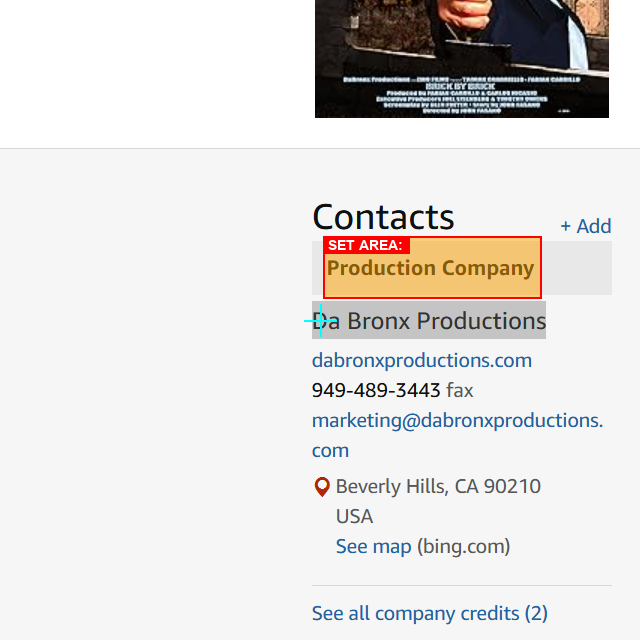

In [814]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVvBEAAAAAAAB9lCiMBGFyZWGUWJwRAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBTm9BQUFBK0NBSUFBQURDcXBJWUFBQU0rMGxFUVZSNG5PMmNmMndUNXhuSHYyVlJ2S2JDVWlWYmRJb2xSTndVMmFLUURHMkphQklIVVJ0RzdMRmdnNEJVQzBuVmhDRHhvMXVUSUNWRUdwQXFJVXkxRzRrQVVoTXlrWUNLWFFZT0RNNWxXWktXT2Qyb0V4VWRVMU1iUmJwSVJIZGEycXVXN2l4WDJoOTNUczZPYlFJNGNKcmV6ejg1djcrZTUzM3ZlNC9mOTczWGVXRjJkaFlFZ2pKWTlyd2RJQkRtSVhJa0tBZ2lSNEtDSUhJa0tJZ01udWVmdHc4RWdnU0pqZ1FGUWVSSVVCQkVqZ1FGUWVSSVVCQkVqZ1FGUWVSSVVCQkVqZ1FGUWVSSVVCQkVqZ1FGUWVSSVVCQkVqZ1FGUWVSSVVCQkVqZ1FGUWVSSVVCQkVqZ1FGUWVSSVVCQkVqZ1FGa2ZHOEhZakNEWGQ5U0RFQVhyRWMzbCtpWFhxRHJNL2xIR0hWcnpucTNzcFRMNzA1d21LSWt5TTNkTnBKUFl4TjB4cE52eXcwcmM5UkxhbDAveFAwWHZZRUFlVHE2L2FYTEtVbEFBRG5lZS9nR1Q4QWVBWERlTXY2SlRjNHp3eE5YUmx3LzhWTHN3QUFyZEZVWW5MczNKTy80aG42b0ZUaUpQYmY0RTJQZXlLdWpNZDlHdENVdFA3cHJHUFZNM01zZmR6M05GME1BRHJMd1gwbXpmTjFoUTkwMXU0NlBSYVROajNzdmpjY2VLbmtSclh1K1RpbEpKSkhQTFZHK3lJQThOT2NBSUFiYnRyVnJCMDhZY3A2VnE2bENlYUxmdmRsR3NqUnZ5MlRvOGJlZVVIb3VrcXIzdGhYOTR4Q0l6OTB4Rnh6VmZaRE9YR0VmK0JZOHVPNUtFbmxhR3NiT2JVUkFNRDdqMjJ2NnBzQ2VFLzM5Y09tSGM4NXdqd3V3YS9waE9ucTlYc2FuK1YzOUYzWGUxRXRhamVmNkgzZnJwOTdzQ01DSDFZOVExZVV5eUpXMXVyQ2lwMDU0cVYvVEx5MS92YlM0cUxTNGwzblFvandnUXYxNWFYRlJUWDlqRlJCWUc2ZHJOeXliclhCc05wZ1dQMTZRZm1SL3NCTWZLdjhlTStCYUptMVd3NTFmOEhHbDdoenNxaTB1Q2ltWmZqYmlzWEVtb3RNVEd0Mys5L2JVZnlMMXcyckRZYlZCV1dWYlFQQldRZ1AvSDJkOVYyZmlrVkN6cmZFdXJWOVUvTmRpSDZNSW5hbndDQTV2ODVjMlVZeGdxekFWSDlOYVhGUmFYR1RUeEFtaDd1UDJDV2poblhsYmY3a1lVN3c5dlpMdVFVbnJqaGxXZ1NRb1ZMTFA4Nk05YzAzYTFpN3BhcjlWb3dMek1YYW90TGlvdEptaWhlQ3NxRmV1NzJabW9iQStmdmtYclZRYkdTaDh6eHo2MlJscVdHKzRxVE13Z3p0N3F3dEx5MlFCc0ZnV0wzT2ZLQjdqSjlyUnk2QUdkcmRWclZwblZTeTZLQW5HQUhBOU8yVjdsU1RUOWJ5TE5Va0RYdTlOOUZnTFdwNU1yK0krVkg4RTJhbk9SWmcvOXJuSEIzb3VzTURnRnEwdXVBcktjTFRWNC92dXVwcHZPR3BqazQ5K2NINlRmc0g1Z29KazFSN3l3S3JBc3RPYzdLV0FVRDRsbU9uQVlENVlTNk5IMm9xcS9tRW02L0loL3k5WFVPN3JaYkI0OGRPaCticmNod0xBSXdRbWU5QzlLUG9hcWg3ZDFuN1Baa1BZY2JmZTJqVEZlczVYNGRKWEg1SEJHYWFZd0h2SDYzVUpDUHJaNWp1clRxZ0grbE4rTzBSR1JyeVNaZTJTbnVxZllNSFBlVmJUOHJqdVREcDd6NXNkbTg3ZTd1dFJOb0IrSUZocHpuQWMrQU5EeUt5a3ZjOUI5Nk1TUUhDOU9WRHU3VFhieC9Ja1R2di9sMkJPNjdpbHZ0ek40aTVVdDhrR3pkeEhLaU8zZlIzbnR2dkdzWFBrZ0ErcnQzMEFTTVBES3l2ZVZlNy9oOU5lWlkzZGNkYXh3QzRyL2hhekZZcCtJLzYzT0k5Tlpzc2liWXpGaEVkSXlIdm55WG5qSWFjbUt6eGZrbUxVZmpyOVZFdDZod3RyazVuUjkwRzBTemQvbzRyS0RVNDVqd2lhVkc3dWFIMzJzaU44eDJObTU5d0lpOE1IajhRMWFKK1c4TXBwNnZUMmRGWWFkSmxRSlZyYyt5d0dEUEZ6RXpqWnJ0amg5Mnh3NlovS1hGVGRHZXRwRVYxWVYyYnE5TjUxTEZTN05WQVRmT0FFRnRZbUdSVUJWVXRUbGt4d0QvNlplS21wNmFpQ3NzeDVpUXVBZ0FSMnZtT3BFWDFobjJubks3T0ZyczRMdnpWMnFiclFuejVaVVpiZlVlbjA5VlpINzI1RVdqWDJ4dmI1Q01QWm5pSWlhc1kwWmoyZC9SZUc3bHhmczU1dXYwUEh1a2I2c1ZYQzh2MnRUaDdib3lNZkRiaXU5SWlOYzZjOXdUaSs4V3dCbXVjT2Y1emZ4RFFicSt3aUo4SGgveFI2UWZ1VU9LRnJkeWFjSGFTTkRvR0xqUTNEUUt6VTM2Zm53bUxhU1hWNVhHaXlXdThkcllpVngxdG1uTmZIaGF2VEtjOHJXVnFBSlpOR241OVZWOFltT3J1dTN1b1pUM3dkM2VmS01ic2ZiM09LajBBV1BXdnNPNWJKNFBKdkVrSzUrMlZoS0ovOS9xTm11aXQzbXdWMjI4dFpyckhLSG9DZ003MjdvbnFsVW1hQVlBeDkzbnhydW5xUHVvNXZBWUFMSGtJbGg0UEFQQjV2SnpWSVE5OHVRMlh6bGVKdzJGWkZuQWZIQUNBcjZjWUlPV0RaZFJsSjg4YzkzU0xNNGZzZmIxbkR4a3pBRmp5Znd3V3RZNEJvQzRQc0dVeGtWVi95SFZLV28rL0duUlR6Z2NBY3FwYnBXNWFzb1B1TzJkWUFBdGtqTnpxbGdOV0hRRHNhZTJOOW5GMFlJaXpPelRRN1hiMTdwNHZxOTFkWDNlUmFwOEF3Z3YvWTRtMTg1TU9remdJcnpIVVZsY1F3SU1nQStpenJJNXQ5ZFJWQU5UUTNRNVRBUUI2NkdZWUFETDNPSW9URDBEUzZNamM4Ymd2ZTl6WDU3U29xempmWVlzUHNEcjl2QllCMFA1UjhhTFFVaEF0bWxGbytwVjRGUTdjWXdBd0U5SXpwdHBvMGljenYxam1MVlp2VHhGMkZzRmt3Qy8yTkxQRXRDYWF1S0xFa2l0ZStRUDNrOWQ5akIxWmp2ODJhUjR6N2hlVm85cG9Na2JiMUJaYnBGRWFEU1JlbEFGQVpvSmQ0ZVhxUlczdnovZnhTM3B5UGxuZ3VlQW9SWTJHV0k1ZnFPY0VMSXVQZDZieVBTb0FDTHMvSFFPQUNaK1hBd0RWVGx0aGtoRkxPcEM2RGZiQzZIT3NOVmh0MndyMWo3SEZvOUhLQW9uK3RSd2dCRUQ0TWRiRXo5SzRTSSt4K0ZTczFNa2lrRTV2QkNZQVFJZ2txN0FJTWhDOVY5OHdENEZIdVJvek1pdjFSaUFJSklweTZTVWEvZmd4NS83S3JydmhwMjJ2b0tJNnU3OXJDc0xOSWJvcFR6MUNNUUNncTk2Wmw2eEdVam5tdjNXaWRlTVRPOEx6czBCVXZzRmdLSEdoNzlLNDRSWmo4YW1Za1g4bE1jSEhuMEFrSURzL1B4TjBHQURuSFF3ZFh2T0lRQjR6TWxQcGNXRVJaS3JWQURqM3dkMWRkd0ZBdjYyaGJtTTJwb2E3WFI3NlNjU1pVN0UzcjZ0MUROd0FOVkdoR3c0QlFMYlZscHUwUW5xUFVHaDAwbFB0RDN3MWw4Z0VvOWZHVlRvQTJoWFM1SW9kSFZ1d3U1TVdpMCtFVml1NXhma0QwOUhFU0lpV0Z0b3BseUNQSnM5aWw1WlV6T242cm9uRWNTN3h5SHhOUzkvUnVjYW5udHNrWW5iTUw3MkgrN2x4SlREbDdSUG5Qd1VuZXR1cWJKc3R0dXA5dGxSejdsUm96Ylo4QUdDb2dUNXFGQUR5OTFhazZFVjY1V2kwN1JRSE5OeDN5dVhuQkVRRXV2ZW9VK3h0cHRWV0FBQ3FBa3VoV0h6OGVNMEhmbllXQXMvNGJ3M0hyLzdVMFZucHhJQjNRZ0FFZm9MeS9qTzV4WU5WenBFUXkzRXN4d1ZIS1hwdTUwZHFKZVQrMk05d0hNdHhmTUwvaHA1bHRwbkZxekZucXljNEN3amMwUHZIdldKYXJzUHlwTGRFcExDMlJlbzFhT2V2ODdidWQvWGRvcWhiRkhXMXA3Mmx0cnltbndGVUcyM1NhblRjZGV5VGtCQ0J3QTBmYXgwUTAvUy9NYWZ0TmVMa3NIZVU0V2NoOENIM2tlTkRZdUlHcTBrRFJLSnpnbjlIcDR3em9lQ0NiZVBGc3NKZVlRYUE0TGt6UXdDUVp6T25tcW1rK1ZpRS91MmpqZ3UxYmg2NGQ2YXkrSXdzUjIxekhwVmVNR3JzTGZYOVd6dG9BUFM1cXFKelNkb3k1SnZRVHdIaS9YTW1zMWg1MUhhaDFzc0R2TCtycHF4TFNzNXB2R2t4YWdEb1RDVzY5bnNNZ0dCMzFhWnVNZXQ2b2lXMnl2YjdobTdmU1JyZ2ZjMWJmYzJ5TEdPanErcHBwYkRDM25tZUx0OHJiZWtIQjg4Y0c1VGw1aFlDUUphMThVZ1AxVVlEUE5WVXRyWkpWbUJOUStkdjAvZFNPK3gzN2pVN1k1S01qYzEyTFlDVitTWTFnand3Y1hKVFFiZjJ4VEE3L1RSektwV3RZaytUcjE5UzlzWUtSOHFUSXVrKzc1aFYwdXE3MkZnYyt3UmtHaDBmWGorMWNYNmRwNi91dVZRdk8wV1drZU53ZGxUSFBUWloxc1BIQ21WcncwempEdGZ0YXczeG9WNWRjc3Azc1RIdW1WdVJyNHR1THVycnpyYktjelBVU1k4bXJheTY4amRYL0RHUkZaYkdTejNWNlRnN29pNDRldnZPeFpadHhnVmJicG02MTdQRlJGMmw1N01QN2ZwWUQ3WG1oa3NmVmVuVEdEcFcyUS92a0UwK05DV3lQdWJWbmR1WEw5cmlPWGFhMTVvYldxdWZZcWF5M3V5UTVpbXdsSmxUdnd4OTRlSERoeWtMUENtelBEdkQwTXhQalhxTldxTk83SVRBczkrSGdjeWtCUURNOHNHdnhnU2RVYWRKVVVqZUdwQzVYTHV3cUppYk1DdEJTeHcvL1EwdDZJelpXdTNMUy9FMldlQzU3NlB6eDRUZEYzanVlelpJQ3pxajdtV05PbDNIVmlaN3RtNDVHUVNRMjNEN1dwVk9ISk9mTEUvUXg0akEvbXMwTUtQSlgyL1VQcTExcm05WDhiRnhBTlp6WDNXWVVqNVVTM2FHTVV1dHpUS2FVbXo1QWxDcHRZKzgxMWxxZmNIaWpqK21ibTB4dHViTGFyUnFqV214eFo4QWxWcVQyaHVWV3FOU2E1YjQzR2VLTWNsUWFkZVVXTkpoaEI5c2Q0NERnR3EzUGJVV29hRFQ0SVQvTTZiNmF5cTZhTXhOUFhNT1Z4WStvZ3FSSTJHcGlCN1hFTWsvMHBueURhM0VrczBkQ1Fwa051UWYrWVlIc1B4VjA0YWNwVDFpR2VFQ3Q2bWh6MmxXYTdSWjdZV3JGbVdOeUpHZ0lNZ1BXd2tLZ3NpUm9DQ0lIQWtLZ3NpUm9DQ0lIQWtLZ3NpUm9DQ0lIQWtLZ3NpUm9DQ0lIQWtLZ3NpUm9DQ0lIQWtLZ3NpUm9DQ0lIQWtLZ3NpUm9DQmVtSjFOK0ROUEF1RTVRS0lqUVVFUU9SSVV4UDhBdFIwdDZuUHhRbTRBQUFBQVNVVk9SSzVDWUlJPZSMDWNsZWFuX3ByZXZpZXeUWGASAgBpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBRUFBRWxFUVZSNG5PejlWN0J0YTNZZWhvM3doeG5XV2p1ZWZQUHRpRzQwUWpkQ0E0MUFFQUFSSkpzV2cweVhRMG5sS3N2dmZIRjRjTmxQTHBkbFY5SGxLaGRGUzZKVU5FVzdMRkVrd2FKSWtBQVJDS0J6OTczZHQyODhPZXk0MGt4L0dNTVBjNjE5em0wQVFsRGZoK3ZhWDUydzkxcDd6N1gzWFArYzN6L0crTVkzVUZYaEVwZTR4SWNFbi83NFIwQkJWUlZBUlZSVlZDOCtBRlVBR0M5cWZBYUF1UGwrMWMxM3F5SVJFUUdnQXFpcWlJUVFobUZJS1JFUklReERod0NHQ1ZSdVhMdTZ2NzkzOVBqUlluN2VkMUFXa0JPa0FBVHczSFgvNG9zdjdoOGVuSjZkSGoxK1l0aHFGc25nYkpGaUhtSUdZdWZMakhyNy90MTJVQUJRZ0wwZGZPV0Y1ei8vSTU5YkwrWm5wNDllZmZuNVpuMStkSEtjUkFHUmpITlZuYkt1bXU3Qnd5ZEhSL1BGQWhDaEtLQXEyVmtldWhBRHpDYncvSzM5NTI1ZXF5c25PVHcrSDc3MHpYZVBGcEFUQUFBQkdJYkNnVE1HRVljdU1rRloxWWVIaDZ2MStueStMT3VhMklwQ1NLa2JRb2lSaldWampLWmgxZHc4bkgzc3h2WG5acE5hTWc1dGJwY21CeldJanFQbWtDVXFBbHNMbVB0Z0JFckxWL2QzWnBVbmx1WHFmTjNNMnhaeTlpazZUQkZ6Y29TVjVXbnBKOTZXM2xTRnFVcm5TMmNjVzI5TTZYeGQrS3F3WmNHRkkydklHR0pHWmlBVmxIVzNmbnkyZXVPOUJ6LzA0MS80NFovOXBhVHVQL2t2L3VGLzlIZi8vdHQzVDhUNmVyWmYxRHVDTm1mSmNyRUVDQUJBUWJMa0xLSlJOQ3FrY1FWc2w1RWl3TGhDRUFBUm1TaW5sRkt5eGhwakFLQnRtbUVZVkxXdTY4bGs0c3FxRHpHS3FPZ3ppNDBBRUFBa1N4WVJ5WWpnQysrZGl6RTI3YnJ2V21QNWIveU52L0h2Ly92LzNrYysrcEc2cmdBd3B2UzMvL1ovOVAvNHYvK3QweWVQVXQrU0pFZnd2L3lmLzAvK3ZmL3AvK2poL2J0dmZ2dTFlM2R1VjJYeDBWZGZ1WEo0OE9VdmYybCtkcll6bS96eUwvN2lWNzc4NWYvNkgvNlgzM25qN05XWHE1Ly9Dei83UC96cmYzVjI5UkJFb2UxQ2lLcmlpK0xzN0hTeE9MOXk1ZEJhazNQcXVyWW9QQkcvOC9ZN3pLYXFKbTNURy9ZcStNNDc3eEZaY09hZGUzZG1CL3Q3ZTN1M2I3KzNXcTFUaXYvYi8vUmZmWENYcy9uZ0RuMkpTMXppZzhhV1R6ZnNlN0dmeGo4RTJENHhmcDJJSUNJaGJmZ1FBRGUzWHlKaXcyd01HYUt1YjdzMmdzTFo2VmxPa1pDY2RXRUlYUXZPUWxYQTBFT09LY1ZJZ0pVdjZySTZPejJMSVZwMms0UEpySjRtZ2VPVDArVmlubFJLNTVsamlqbEdxSXRpZHpxYlZQWEV1MmxsNnFxRTNFMnFhcmxlTVZ0ZmVPZGRINk0zZExpMzB6Vk5zNHFJOE5JTFYxOTU2YVd1YmU3Y2Z2ZmtxTHQ2TUxtNnYrY012ZnYyV3dnNTBuUmExMjBLNjFWVUhZa0hZZ1RMV25oZkZhVmhOdFlSb1VnV3lTb0twTStjSkNJaVFGUUZZc2lpZlJqNjRJd0s1d1FicGdGUVVjazVwNWl5WWxCQVNsSVU1ZUhlOU5XWGJqMS80K3IrL2xReHB0U3RvMjJqTzExTHQxcGl5dE9xMkt2cnFYZVlZaHk2dmx2Rm9ldUg5blM5bEhWQ1EyZ1FHSUZRRUFUSHR3VVVJVk9PR3RiRG1vdlpqLy8wejMvayt6NEIzcHJwL2ljLy9YMC8vQ09mZlhEMkcwRmRXWmFBQ084UHFKNHlLeElTb0NBQ0FSQ003QXNDb09NT0RCUVFBQUFWVkxJUWtYTk9SWFBPaU9pOVY5VmhHTnEyWldaa0E0Q0VLS2hiak5zOEhOZlJlQ3BGSktjY0lBeERYOWYxenM3c3laTkgvK1RYL3NtVEo0Ly9nLy9nZi9IcDcvLzAvc0VoRy9zTGYra3ZPY3YvbC8vVC8zRTExMmxoRjZkblgzL3Q5WC8rNjcvNXlvdlByOXZ3OFBISjg4L2RHR0p1MnI1cE9pVDJ2amcrT2ZuMnQxLy96aHRuKzN2dzh6Ly9zLy8yTC8vU3czdDNodFg1bFN0WEFja3k1cXl4YTVmbnA2Y254OTdRenU1T1dSYWxuMzM5NjE5LzU5MzNmdUF6UHpDZHpoRE5wSnEyM2JCY3JNdXlSTFFKbFlrazUySG9oMzVRVld2dEIzcjlYaEx3SlM3eFljSkZ6TEdKZmJmL2poanZ2MFIwRWZoZVlQd2UyQkF0SUJJaUFTS004YS9DOXNEQVNJYU5JUm8wTVhKVjBzN09OSVZoTVYvdTdzeDJaanZUU1JhUnRtbENHMHNIcFM4WXFXOWJ3N3c3MjFtZXowT1NtTUo2dVhSN2RqcWRlZWZQNW91enhkd2JtM09LQ1FBZzlQMTZ0V3pYYTAyeFdhODhTK2piSEFlUWpFSTVEdWZOR3RnWU5GVmhMYU5tQUFUTmtTQlhoUzJjSVlYMVlyMnNIT1JxTlc5ekJyR0pxWFRHT2hNQklVZklBamxCVGhrVXZIZk9PamJHR0lPSW9pS1NVVmlKZEhQZWtJakcwOE9HczByWEQwUHBDd1FFUlFSa1FzSWtXVFVqQ0dvR1ZFT21LTXkwTG5hbXhiU3lPeE4zWlg5UzF3NnRCalByekd3aHBjYm9tVXByU3phVW92WkRDcjJrb0NtS1JORXNrcExtbUVKSVlRaERINFloRENHRW1GS1czR3UvRHF2NjJ1N2UxVnZYbnIrSjNuVHJCUW5kZk9IV0YzN21wMzdqOTc1eWROWU9JVmh2RldpN0lKNXV1Z0RHMkhhN0x3TWFkMkFqRXlzb1BNUGFxcEJ5Y3M1YTYyS01LU1ZWY2NZNjV3QmdHSWErNzRIWUZnVWdiUTY3MlFpS0F1TFRsNkZ4cTVkU1NqbkhFQkZoTXBtc2xzcy8rT0lmVENiMVQvLzBULy9Jai8zWUt4Lzk2SE12dlBEam4vLzhULzNNejN6MWk3OS8vT2hCV1JkMzd6Mzh4Ny8yejE2NGRhTXUzTFhydDNaMjk2MHJzNkFDV2VldGRlZm5aK3ZWc3FyZ3A3N3d3ei80bVUvdjdreWYzTHY5cEZzUFhWdVZ0ZlBlR29PSUJyR3cxaHZXRk5wMUVGVUVyY3NpRE1OWk9FMUpkM2YzWTVLVVVzNVpGWUxtbE5KcXRlcUhmdDAwQU9EY0pRRmY0aEtYMkNMbkRIQ1JPMVRWYlJwd1M4Q2JoRFBpaG1uL0VNYmI3WlorRVM2UzJKdmpJQkl5TXpPSkNCS1YzbCsvZnVQODlPUzRlU0lpMDUyOVNWM25GQjg4dU44czRteVhpN3BHTnV1bUxhdlNGNFV4bHJoUFVWYnJWVlhYdSs1dzkyQ1dBT2JySmFya25JTUNBSFNObmg2ZlBIaHdIMFdHZnAxaTZKcmxZcmxXQkdMTVRUbzltL3VxcWljN0tVdUtLQUNvc0ZwMFIwL095OEtyV0VRNE93UExpNXcwUm9nUlFzalpaRkJnQW1Nb2lJaHNmMjBFYTYzMzNsakx4akF6S0lnSVNBWlZrUXdqeGRLWWlWVm0wcHhDMytaWWdtVUNZQ0lMcW9ReEJnQmxKQ1lHWW10TVhWYlQ2V1JTMVlna1dTUUxPZ2VWZGRXT0svZDJ5bDN3SHJ3SFZRZ0IyaFp5dG96Z0xCZ0NiMkYzQnhBZ0JoaDY2RnRvbTlTMmJkdDJYVGNNUTRvcHhsWFhuQjNzMTN2WG5pYzNHVUpZOXVmUTVOM2RhNS8rdmsvTkpwT0hUNVp0MDB5NEFHSlZVUm5mYUZRRUhFc01vRHBHcGtBQUFvQkVJS0lBQ2lDNnBkRnhONVp5dHVDTU1WbEVZMHd4R1RiR1dpVEtPYWVVMnJhcGpTRmpFSUJ3UFA0bW9sYUU4VUVBQkNKUXpTSXFNZ3g5enFtdXE1enp5ZkhKUC9xdi85SEp5VW5UOVVMMDNBc3ZQdmZDaTcvOHEvL1dhckc0ZCtmMjdyUStQbHZjdi8vNHkvelZ6Ly9vNTM3eTh6L215NEpNQWNURWxsRVZjTGxjaWNpMXErNG5mK0x6THp4L0svUWRxS3lXeTJhMW5FMW5aVm1WWlRtWlRBcHJkMmZUdWl5YmRuMTJmaFppY05hOCtNSUxUYk5lcnRZcEtTS3o4Vm55RUFJaVo0UVlVOXUxb0JwQ01NWjgwQlhhU3dLK3hDVStURWc1amZIS21FT0VwOEV2aktua2l6aFl4M3Z2K0lUcXMwK2pJaEVoRWdMS05pTXRXVUFVQVFpSm1ZMDFSVkUyNjFYVE5HM1RPdWYzZHZkRFB4QmlYZFdQSHozcyt3RVIyRnEyRm9tNnJoMUNHRys0eEd3UmpISFdPVVU5bTUrZm5aOHQxeXRSalhHTXdrRUZscXYyaTEvODBzM3JWdy8yOXQ1Nzk5N3B5ZkZ5cFpNcEp0RStRRWlBM0NBZHB3eGREd1RnRGF5Vy9kdnRYV2NOSTFTRlNUR2xSSDJuM2xlRnoyM21KL08yN1NFbnNBWUl3U0NVQmRSVk9hbXJxcXlLb2hnSjJMa3hFUzJha2lER0xGbEVGUkJVQVJHVUVTVEYwQ3VJTUJySHpHb3NZRWJKS1FPck5SYlpDS0JsTG91aUtpdnZpNXpTZXQyY25TRmlLbnVMNjBIc3dsYTdVSllBS2tNWVVqVE8yZGtNNmlrNEJoV2dCSjdBV1FBSFVvSHVRaGFUOHl6TFRESmtnU3lRMWhEWDBKNUJBRUhmclVNWStzbjBzRzNhSjQ4Zmp4bnh2dXZxT2lPSWlvTGl5S2tYU1d4QlZBUUZwRTBLR21CVGpoRFkxSWwxVXdRR0JFQVJpU21wS2dBQ1lwWk1STllZNS8zUTl6R21GQ01qTUJFVEthQXFTSDVtSlNJU29TRWJRa2d4amdrWkZWbXQxaUpTRmlVaWZPMnJYN3YzNE9IdmYvbkwvLzEvNTYvODRzLzloWi83aXo5LzU3MzN2dm4xcjUwZVBYYUVSVDFwbHV0Mzd6d295dGRlZU81bVdVM0tnMTBCSHJxR1FIRmFBbUpabHROcExaSld5OFpaam9SOTM2NVZqaDQveWptLy9OTExrOGwwVXBWTWNQVDQwYmUrL2UydTcxNSs1YVZidDU0L1Bqb0t3MkJkNmIwSFlGWE5rblptVTFPVjc5NjcyM2U5QWt6cXlaZ3ArVUF2NTBzQ3ZzUWxQa3dZSTJCNGhtOWhqRnkyaitDV2JpOCt2M2hPdC9TTWdFeU1GOW5ETVFBV1ZWRlFRQVFpWW1abVJpVFJuTE13a1hNdXh6Q2J6ZzRQRDk5NzkxMW5iSEZnY2s3cnRpWG1NY3BKSVRqbkN1OFJpZG0xZlh2Kzdqc2hTZFAxT1NlQk1SQURUOEFNT1VHZjlmajRlTDFxK3FaZEw3VVR5S0tBRURNTUNaREFlU2lyU25YUUxsdHJySEdFMkhjREV4dWlvWWVXa3JjNm0rNlVoZk1aSHAzZWtReUd3VnRuTUluTnV6czdaVms0NnhBaHBRU0lWVlU3NTRoSVZEU3JLQ1NSVWZzRm14T21DS0JaTWdSR2NJWTlNV20yWXl3cEdZa01NeUVPTVlVaERIWUlmZ2lEYVRVNkVJU29FTjJha0MxYlYwM241V1FhVlBxWUFrSzF0MmU1Qks5UUVEZ0h6SkxiRkZpSmdCaU1NYzR5TVl5YUpsVVFoVmhETE9Fc3dqb1FsV1hpUWNVWmUzUTh2M3Y3VHRlMHFNck1NTzY5eG13STR0TjFncWdBZ29wNkVRUXJBQ0dLSW02cXYwL3pKY1RHcEN6UzlVeEVSTVpZRWNraXlHeU5pVVNhWTg0Sjg3aUp3N0ZxRGlJWkFVUVVBVlhIQk1PWVdVRkdaaWFpbEFJQ01obEU2THYrM3IzN2k3WmJ0dDJqQi9mL3hsLy9hMS80Nlo4NU96MzllLy9aMzEyZG54TlJPWmt1VnQwM1hudmp3WU9IejkxNi9uT2YvZXlEKy9jZTNydmRkdDJ0NjRlRjkxM1hmdnRiM3pwNmRKZEZwa1ZoVkozaHd0cEZmN1plTi9hVlZ4MHpBVURPVlZuY3ZINk5HUHRoZU9mdHQyYzd1N09kWFd0TDc5MFFzcW9hWTdKSzdMcTI2OVpOaXdqVHlUU0xoQ0Y4b0pmekpRRmY0aElmSnFnOGpXVUJBRFpiOUl0b0IrQWlPQmJaUEwvZHhsOEV6TFNSWmFtS2puZEpVTDBRL2NBbXBRZ2lNdDZBUjg0bUpHdXM5OTU3THptWFpUbVpWRWRIajVkTmswU3Fzb2c1WjVHcUxwdzFUSWFOdmYvZzRmMUhLMEp3QlZydmhoaUF3QWlVTlNJb0NERERmQzNIcDJ0bkFBUVFvQXRRbEZCNEhsWVpFSXp6QjFldXVYVXJaK2RJUENiQXo4L09jb3lnaVYwU29KRFYrcnFhMWl6ZzNhTktrM1cyTEFwQ1FNU3FxdXFxTk1ZMlRSdGpkS3BzcUNpTG9pejZJZVNVazBoU0JXUTJOQ2JrVVdUODhRQ0FRUjF6YVprd3V3d2tZSkVVaVlHSVRDOXA2TUlhT29lT1JEdERPYVFFSU14c0ZGREptR2svbEYwNzVJekdtS3FDR0NGRUNBbWNBbGxBQ21mbnZRZ1NFeHRqTFJnSDFnRmJJSWJ4ZlV3QlZFQUl3QUNheW1JU2RHU09IejU1NC9WdmQrdkdJRHZuSlN1QUFCQnUwc0liY2QzbWoxNGsyY2M0VlViMkJCVkZlTHBOUTJUbWxHS0kyVm5Mek1hWUdJT0lDQ0dObithVVVnUkNJZ1EwUktnQ2VheG5iTFBaSXB2Q0NOSDRxc2pNcWd3QXFrSkVBQnhUZXZMZ3dUOS85T2lkTjcvejhndlBmK1pUMy9lWC93Zi96bmUrOWUydmZmbEw2K1ZpYnpZYjJ1YmsvcE03OTU5OC92TkhiSXVESzllZlBIbThXTTJMYW1Lc2E5cDQ5OTY5OVhJeWNkWmNPYXlkdGRZWnc0WDNLaktaMU5hWUlmWXg0TzVzTnFtcnlYVHkybXV2dmYzdWV5KysrT0prdHFQQUFDWW1IUXN1WVJpNmxGS0tpR2lOTWRhMFRUdGZ6RC9ReS9tU2dDOXhpUThUMkJnVmtXMnVEd0dRYUV3cGJnVlpBZ0l5ZG9Kc09YaU1QemIzWmRXTnlDamxJUXc1WldLMjFvQUNZb3hSUlhJWWhoUkQyemFFV0pZbEVSR1J0WlpRbnp3NVdpNFdaVmtTcXFqVTAyblRyYytYeTVUenJaczM5bmQzSHo5NnRHNGJWVFRXSlpXeWh1bHNOcG5PbVBuUjQ4ZEt3VEJPSmpVUjVCVDZkaEFFdGxCVzFySkxPUytXL1d4M2QvL2dVQjg4V0RkZFRNTFc3KzRYWk56eDBjbVZhemUrN3hPZmVQTDQwV3E1eWluc1RLdlZjcjVhellYTWtEUUJYcnQyL1FxeFlXNjdianFaT092ZWUrL2R3dnVEL2RuUjhURXpsM1dWUldZN3MxdTNidDYrZTYvclk4d2dBTTZCTlVZa3g1UTFoZExTS0VuV0ZDM2h0Q3BOSXBOQ2tLUWd6ZENIbUEwN0VNeFJBK1h6dEZvdmxnYmx4dFVEVTVZVE5VZ2tFdnZscXVzYVByZkxwcjF4NjlhTjNkMWh2VjRCVGdIQVdFZ0NNZVoxTTNZT2lRQWhSVGFWSzR4eHdBWlNoaEJCR3FnUVVnOWQxcjdMVkJSdUpsSGVlTzNidi9ucnY1RkRyc3NLMkhaTlEwNTlXVnBqazJxKzZCR2lUYUZXTTZqcXVDWkdCUllSS3FCc1pRQUFNcVpBbUEwVEUrSzRyc1ptSkZVQVZPYzlNTFZkbHpVREtCdG1aVlhJT1FIUXVOSnl6amxuSWlKaTNKQzhTZ3pqaXdQQXVJU05NYTRzK3hUdjNyMzdOLy9tMy94My85cGYreXQvK1MvLzcvNzMvNGUvKzUvOHgvL3BmL3ovbksvV3pwanA3dTVxUHYrWHYvbmJYZGQrNWxNZmkwa1hxMmF4WEsvV0RSdjgvT2QvOGhNZmZibTJKalNyeDNmdlBINzhwR3ZhR3pkdTNyaCt2U3lydG1uN3RnMURieTA3N3dqeEV4Ly8yRXN2djJ4OWNYWStueStiZzROcmRWMGg4djM3RDBVUmpkM2IyNy8rM1BPem5aMFF3dTMxZS9QNTRnTzluQzhKK0JLWCtEQ0JpUVFSTjlTNjZmY1kyejlVbFVSRUNTOENZNEJSRG9zYmRlb216VGkybEVqT0tTWlZSY0NzSUNJNVJSVXh4bmp2RFhNS0ljYlF0cDJrNUt6eDNrN3JHa0NicHNrcENnSXl1cUlnYjFNTWNlZ1hxeFVBSk1uR1dnVmF0KzJRay9XMm5rNThWYW9LR1paQlE5QSs5SFZWK0xMb2gySDhSZGg1Vlp2VHdCWjhPYW1tTzlhZjJTU0FkSFkrVjZRVWN6V1pObDEvNzhGRGEyeksycmI5M3Y3ZXdaVnI5WFM2V0p3MzNSS1pkM1oyQVRIR2xGT2ExSFZSRkNxNm5NK3R0WHU3dTBSRWhQUDV1UUtJNmxhc3R0RU5NWk1DSXJFaFJZbW93QUNrNElnS2F5eXBONVFKcXJvS212c2t5N1pmcnZ1Y05MTm1RQkJ0dWk3bmswRUVySDNoeFZ2VHl0eTdkNmR3VUUyblo2ZG5LY1VRMC83VmE1WnR2MWhTUDdBdjBGZ05rUlJRUWJPQ0FnRXE5V0FjRUVOV2lBbWdoVmFBT3NpY3Vnek9wanpjdlhQODRNNjlkcmt1VEsydXltQzZvUVZSMEl1TThsYjFqdHYvRUZYSEZEU01tZWxOVkx4NWZoTUxJNHhmUzM5bzlZMkxCWTB4enR1WVV6OTBTRmdVcFRVMlp4SlJVVUc5V0h1YnBpU0ZNWFV6cWhZMkJ3SUFmSnEzenZmdlAvaFgvK28zdXJaOTd1Yk5SNCtQeW1vYStqNHJBR3BSVHg0ZG5mN21iLzN1bzRjUGJsemRmK0dsVjVDTklqRmJVWEMrcUt0aWZ2UzQ4UDZsRjE2dzF1N3M3QmJlaitseEJCaTZqcWdzbVVIRU8rZUxBb2lieGlMQ2NybHdSUllCSkNoZHdVVkJSemlaVEs1ZnU3WmNMYTF6TWxaOFBqQmNFdkFsTHZGaHd1aDNvRVRiL2s0a29vdElSUkZKZFNUb3NSSHptUmhvZXlzRUJaVmg2TWNiSkJNQmFFNHh4RGcyZlJwMmhmZk9tcjVyK3I0ZCt0QzNuWGM0cWV0SlZVaUdHSVpoNkEyVFpXK3RMY3NwcVJ3ZlBWbXYxMkVZREhQaEhDRDJZU0RDb3FwOTZjbFFUbEtXUmQ5MzNhQnRFd3Z2eXFKZ3hyRVYyVmdPUStwalQ1YU1JekxBRm4xcEZYQzVQaGNGWmpPYjdjNFhKK2ZuUnpkdjNGak9sK3ZWWXJaYlhyMXl1RnZ2bnMyUDI3NGhOcFBwbEkxRnhCZ3RndWFjaUhHMVhnSENTeSsvREFpcmRYTjZkcWFJcWlpeUtieXFiREtuekd5UUxJSDBNZXRHSDh6TXpybENxRVNMbGszaFRlR0N3THYzSHN5WHE3VnFUaGtNTWx0Uk9qMWJydHFXbk4wOVBKaE9yNnliMUxVNUpkY3RVK3FYbUkvMzYwUGpBVFNzKzZXdnFxS3VNVVV6bXFJZ2pBS3FESURFWmt4dGlJQUdpQWtvQWZvY2dVamIwSDNqYTk5OGNPOGhBamxYZ0M4VEVIZEJrY2E5aFc3RXo1dTNITGJGaUZGNnRkMklJYURvV0JWR1JTU0NiZVpkUVdIVHBEWlM4b1cwWUR4TVdSYlN0WDNYandsYlo1MWhqcHB5em1NNVpFeDF3NWFNdjJzVmovK3BhZ3dCaUt5eFpPQmIzL3JXbTIrOHNUdWJHZWFpcXNablJhU3NKbjNmdm52My9yMzc5My81RjMvbXgzL3NzdzZUTFdvbGUzUjZmblJ5THRQNitPVDAydTdzdVZ2UEEwQUlvZXY3cXF5SWlJbGpqQzVaVUUwcEFTaXlLU3BYMS9XMFQrZUxWY3lLYUFqUmUyL0xrb2hpaW4zZjV5ek8yc2wwOGoyL2hKL0ZKUUZmNGhJZkptelN6N0N0QWNPem1pdUFaeExPWXdwYWRWdVcyL1RYYkc2aVRKdHVJMFRLT1ljZ2tyTklSaVNSbkZNTW10dTJpU0V3UVYxNXk2eVNIejE4cUpJSm9TaDhNWjJXWmFtR2t5aXFUQ2JUYVYxNWErL2R2WE44ZEpJRXByUHE2bzJyczludXV1Mkl5ZnU2cm10ZitLUEhqOE9nSW9LRWdHaWRXc05GVllUWWhDU3V3Q2h4aUoxeFZGblB4dVpjR21zUjZlenNuTWhZWTk5NTd5M040cHhacnVjQ3dWbFR6NnFkL1VsT2V2L2UzWnMzbnI5NTYrYURodytPajQvWDZ6V29Ga1hCaHBlckpSRU5RMWd1bHdwSWJHSU1LVVBPSUFBNTVSZ2lHeVZtMXF3aWtpRXFwSlNaZVZMWFU0WUtCQjM3dWl5bnRhQU5TZFpOMXk2YXZnMlpzL0hGenU3K2NyRllydGZmZlAzTjArWHExUmVmdjNybCtZZjM3cnozenBzM3IxMS8rYmtYWDM3eDVab3EwNm9UTGVvOUlJUmwxNTJmb2lGZkZiNHF5RElTcWdySUpvZXNLcVRDQ0pEU0lEbWhJOGpMZWZQbEwzN2xyYmZlYVp0WUYycVlEVmsyTmlOdEhFZ0FudUc1YlFNd0VnSGc1a25jS0FjSVFBU0lDRUFWVlZGRjNxZndBOWlJQXJaSEF3TERiQXdqWVVwcENJTXhsb2laNkVJSWpZQzZGZUgvWVl3WkdnS3diTElxaUFCaUdJWTJ4bWJkekNhVHFpcXpJckJGNHFUZ3l0cDd1NXFmOWxHVXpLMFhucC90SG5RaG5TL1c3OTI5djZoODdjdDZNbVZyd2hDR0llYVV5cUljOXcwNTV4QkMzM1ZFQkFURVlwd3JpK0x3MEJCYkJSNWlIb1krQ3hTcUJ3Y0g3OTY3LzlXdmZxMnVxcDNkblU5OTM2ZStOOWZ0SDROTEFyN0VKVDVNaUdNZmoxNllWMTJrb0FGZ0U3VzhyM2NDdDJITU15eU1oQWhzaUpqTktQdGx6dFlaRmhwVDJYM2ZBYWhLUm9DdExob1FRTEl3b3pYc3ZTc0w3OHRpeUZrUlZTRG1iSjJieldabFZhOVc2NWpBRmQ0WDNoV3VKb3dwaTRnMVpsTFgrV0EvREgxZEZXUHh1cTdkYkxZM25ld01NY0ZxcmFoSkk3QmV1Yll2S3FvQVJHTS82cTVPaHlIRU1MaUNWY2d3SlkwQ1FoWkJDVWcxQ1FBTWZiK1l6OWVyRlFMVWRUV1dkWnRtM1hidEdCQmFaNG1OS3JJeGxDUEsrRHNpTTQwYWNoRUJCQVZJQWlKaWpLMnJhbXJKcFNHRE9LYkt1Mkt5VTA5blpUMHBUUEgyVysrdFYwMnpidXBKRFdSY1VmU3hmL0Q0Wk9qaTh0cTE1ZG5pL0xURmVBb0RkNmZkaTdlZXUzNTRwWmd4dENzd0JEbUdKNmZJd0xQYXpFb29EQnBTVW1VRlFtUlFBaENTQkpUUnN2UEZiQjMwOVBqczhjTW5YZE03WjR4eE1hWSt4VEdQTEtxNHBWemRCS0Y2NFkwR3VvMkRBUUFVZ1JSUUNNZkVNNmlnZ0l6RU9iNzNzRlVOUE12SHFpa0pNMVZWRldPTU1hNmJkVmxXaHEwbG0ySVNHVi8zdThQZk1jR05GL0l3QmRXTjVaZmtQS3I4QUhRSVFRRVFXUUVCVUFXVWtKR0YrTTEzMy90bnYvNGJuLzMrVHl5Yi91cU41NjdlZU83SzFhczdoWm13QXVTVDQ1TVVFeEU3NTVnNGFFZ3BNeE1qd2FiWExrTVM0eUlieTBUTWxFVkJoUTA3WjYwMS9kQ3YxK3VtV2RkVk5iWmpmUUFYOFZOY0V2QWxMdkZoUW96eDZTZGo3WmMybGxjWGoyMDhPUFM3WXVQTnh3aGJqNDR4YncyS3FNemswYWx1YmxQRDBJdmtvdkFxZVJoeVRqR2pXbU4yZG1iT1dtc1lBYngzbGswVVpVUkFTa05FMGNMNVdUMVorMFZLdlRPR2tSaHBOcGwydzlDM0hZb1UxdkhPYms2UkVIS09xRkFWNWY3dVhsSFdxMlZqZWZ5aGhCR251N3RaY296SkdOdjFQWWpzN2U0c2w2dFZTblZWcHBSVnBQQitPcW5ydXVyYWRZaERTcWtzQ3dCZHJaYkx4YUtxcStsa3Vsd3VZeGhTemlGQ1RHQXMzTHgxM1RvL3hPaDZHM1BPV1hJR0ltUm1BQkNWTElwSUdTVXFCQUN3eHBWbDRRaTdHRVBJT2FMbVNlV3ZYYjB4bVUwZG1XYTVlbnQ1KzJ3bEtRNTFYUmZlWlloOUh4ODFKK3VUdVZIQUxFZXJzNU43Wi9mcTk4TDNmNys4MEEzN3UzSG9KMVhwQ2h1UDUyUXdoWmo2QVFwTGxvQ0JESkVsWkVMR0ROVEZET3pJRnc3cHllbnhHKys4ZXp5ZlIwUlhUOGo3SWNpNkg4QjRSVXFxcElyYjNsdFV3STFERlk3OVNOdmdkMXdMQ3Fpa29MSWhhaVZBVlVVWitmZHBtdVdaSlNRaU9TWG5yYTk4MzFQWDlWMklUR3hLWTYyUkxDSkpSVWVSOUpnRzM1YURMMXJsWU14c2E4NGJvbFpsUWpJV0FGTktUZHNWWlRrS3VBQXdac21ha2MwN3QrOGZQWDU0OU9oKzdlanEzcFhuWDN6bGhlZHUxQ3pTekp1VHg0dkZncEZuczluRWVTU1dyRGxsWjcxMzNocVhOY2NoSkVtK0xJbDUzSVdJU003WldWdVVoVEZtdlZybmxPcXFuczFta3VYazlQUjdmZ2svaTBzQ3ZzUWxQa3lRcDgxRjIyZ2s2NGFKdDFYaEVNTFdrZmQ5NGZDV21oRlVRd3lqOG1qcjM0dk1OTmFYWXdnSjFURGR1SEg5OVBUa3laUHpsRVJ5NEFwZmZ2bmxTVjJsR001T1QwVmtHQVptWTV6RGJIcGpRU0NGaUFxRUNBSkRQeERTcEs2TnRaUEpSSGR5MjdUcjVTcjFQV1FSbFp3dXhFY2lLUU1BR3lRQ1ZFZ3hyRmNyUmRuSWEwV0lzRm12bkRXSCszdVBuendKUTV4TzZsczNiaHdjN0J0REM4WitNQVBGTktUclY2OU5aOVBqbzZPems5UGo0K1BGWW5BZXFrazFOYVlmK2l4YWxBVVJ4NXlKTjdWeEFBQUVRc2lpS3BKVW1DaXhKSUVJbWhEVkVCcFNrQmdEQlUyeGxEU0F4TU9EM1U5LzhtT2g3Vm5welRmZkhnSTAwSmhNR1VRVk5NUFFKMFMyd0pBU0pHakQ4STB2ZnUzZHIzMnJkTGF3L056Tkd6ZHZYak9XVEdFMXB0VDAyU0tNVVMrQklnaUlhRzZSR3NSZ1RPWXlnUDJEcjczK20xLzgrb1BqSmpCWmE5U3dNMlh0eWk3a2xDR3JHZ1ZHSkdMWWhKQWI5MmU1MklOdFZzTkZrWGpybmdZRUFFZ0NPdllLYjRzV3ozU1pBOEM0VFFQVnNUcWVZa3B4Q01Nd0RtOHdoaVZMbG5TaCs5TUxVWmhlZE0wSkFCS3FZVW9wcW1wWmxzTXd0RTNEeG96NTdpRUdhNTAxbHBrazU1eVM4YVd4SnFmK0c2KzlZUUUrOXZLTnN0cXA2cDNVbkorZHp1TnFMWXJUeWFRc0syWWpXWFBPQUZqNFlqS3BpNm9jaG03b3V4aURZZmJlTytCK2lLbnRSUVppR29hK0hhS3FGa1hKYkl4MVo2ZW5SMGRISCtqbGZFbkFsN2pFaHduRWRHSHhQRDV5RWVadVZUYWFVd1lBSkNRaUJOcmNiN2V4eUVWZVVIVTBUWUJOWmxJVlFNYkJPV1BmeUdLNUlLTDl2WExvT3NQa3ZGdXRWenV6eWQ3dWxhSHJKQ2N3TGdxRWxDSEZxcXltMWFRdXE2b29wMVdkYzk3NCtxZThicnQ2T3AzV05Tdm1MZ3pVeU9pM1pkMXNNcDFVdFRXbTcvb1VvaUV1Q2xjV0JSRXU1dWZHc2pIMmZIMUdSTTc1U1YwNTUxTk1PY1h4M24xK2ZoYUd6bHBEQk42NXdwVnhTRlZaVGllVHE0ZUhPY2J6eFFJUm1Na2FhNzJOS2NVMDlGMkh6REVtM1BnL2orUWdPV2RSVVFFRnlFZ0pZVkJZOWNPcTY3b3dRRm03d3BjYUFhVnYxL096aytsc0JwUFo0ZlVyUC9MRFAzQzR1LytSVjE4NlBqbGRyRmFMWmpsdmxvdW1qd0VLaTB6T0FLb0NRYWFrNjJXS2tEcUFxWVdUUHV0aVZkZmVPVGFPeVRLd0tvS2lLa3BXQ1NuR0dFNVJUelNuMmRSTzlnTFkxOTU4NjczN1RUTGc2dHBXVlFDSW9FS2twRGxMVmgyTk05a3dac0RSNWxwQlpHUFRBUUE2ZHFSdE9SZ1FRVWNsbjJ4MGZpamJVSlhHQnUzTkt0dk9QakxNcWhKRFFDUm43VGkySVF3REUxdnJhRk1YUVh5R3RoWEdwRGdxYkl5cUNjbFowMGthaHNpSVREajZ2Y1NVWW95Smt2V2VyQm42d1JoMlJabUd6aGgyenZUTHhSRGc1SHoxenUxNys3dTcrMVVOeUdTY3RlU0xVa1NicHZNMnhaZ1J5QmlMZ0pvemo4TTJWR01NMkpFZ0U1TXhocG10TlloRzJPN3U3aDZkTFk2UFR4QlJSS3U2L2tBdjUwc0N2c1FsUGt3d2JNYXhQVSs5TmJaUzUzSEFncW9tVFFDQXVwM0dNSDduZGdqRE9CbkhNT3ZHckdHanI4bVNkYlNHVWlWQ1ptT3Q4WFdGczhsaWZsNDRPNXRPQysvR3JrNXJqVEtoZFJyU01FU051WFJGNlF0dm5HTXpLU3RWemFDUU5mYkRjclUwYktaRnhZRE9jR0VkaXlBQW9ESkNYZFhlK3E1WjV3U00xdHZTc3RlRTYwVmIxZ1dWZGpsZkcyTjJkdHplemc0VHI4SWFNbGsyQnQyVFI4ZWdhcTA1UER5NGR1M3FwSjZzYkRPMkZSMGNIQ3hYcS9seVVYaHd6bzZERnNhcWM5ZjN4Q3dLekd5dHphSXhaVlVZMjJFQkVaQXlRaVFNcXZPMk9WM016eGFMcXhOZmVVdW1qcUhyKzNVNGpaUFpkSThRSnJ0N0x6MjNkKzM2cHovMWljZEhSdzhlUHJyNzZQNkRvMGNQang4M3B5c24xaXFoaUNvcVlVSk5BU0pBWXRBQ1Fsb2R6YnN5ZUdPWkxKTWhaQ1FtTWt4TWdKaHlpakV1SkoybHdSbWVWck5CYWNnNUFvQUZMa3N1eXpUSWtITVV6SWdaSUtreUFDSXhNeW1vWkZBZHUzMWhzMVJ3VTloWDNlN0djRFN6d20xaitkZzR0TlZDMDdaLzk4S3JBdzF6bHBUellLMDMxaUJTMjNZeFJxS0JpQkZoek9jL1ZYRnQ0MjVGM2NUY29JVGtyQTBEajRWM1JyTFdPdWV5Q0lqQXRyQXl4TEIvZVBQcXdlN3RkOTVHeU5aWUxZY28vYnBwZi8rTFg1NlU1UTk4N0VWZlZFU0pBTm5ZdnUvak1OUmxKVm1RQ0pGaVRDa25OalMrNHltbEpLMEFzL1c4MlN5Z2M4NFUxYVNQS2FXenM3UEpaRkxYOVg2NS84RmV6aC9vMFM5eGlVdDhiOEhHMEphQVIvWVYzSXhJdWhoOHhNeUF3TVJzbUpBQU5oT0FZYXVHWlVKdkM4bmpFQmdkRlRraW1uUFdqRVJvakxsNTQ4WmYvYXQvNWY2OXUxLy82bGR2WHIvbW5iMSs5Y3F2L3Nvdi8rNXYvOWF2L2RxdjdjeG14akNRc2I2YWxCVTZQNnpYaTdQNXNHNFdaK2NwaHNJNnNzWWJDeUtGODZIdmo1ODhDZDFnaUhlbk01aE1RdCszWGRPbkRDS1dUT0VyWjBJajdkQ2x1YXlJTWZTcEtrMWhxNzNaUGlJNTl2MjZEekd0bHV2WVp6VVVYWGJPdFcyekdGWWdWQlVUeDBXS2ViMWVLMENNS2NZWW81YVYyL3BJYUZXVnZpeUlHSWdBeVFNNkg3bnRVbHF5c2M0NlVRSEFqSkJ5em13U3hXV3JENDZPM3AwV3UwNkwvZW1rY3N4NUdKYUwrZnJlUFQ0N1A2MnJuZDJkdzJMMzBOMjQ4c0sxd3hjKzl1cm51bWJaclorY0hUOTQ5LzdYL3VCcnk1TkZDZ0VJWTVDc1lDYWdDTkZBcUMxNm03M1ZxckNGdGM2NXNpanJhaktaN08zdDdlL3Y3Kzd1VGVxSnRWWWNpek51ZndmcW5mbTgyZjIxLytZay9qZmZ1blBhdDgya25BbWJtTFZMRWNrbTBDUmlZZHhDOGVoRkpTcWtvS0thRlJCa1czUGQwdTRHbXh3SlhsaG5FWUFpeU5aUEMwYlpGT0Iyck1PbWdKb01HemJzdk1zcGgwMU03STAxT1dXVnJhMGFQUHM2c0tGbWtkQVBxT0NNelRHTys0RXc5REVGSUNxck1xdXMyOVk0OTRXZi91a2YvZXdQL2EzLzYzOTQ4dVFSS3pubklZVlZJLy9rMS83Wi9UdDMvK0xuZitpLzkvTmYyTmtwbXRVNmh0aDFReGo2c3FpUUNBU3pTSXdwU3pTR25UZDd1M3RrVGN3NUpnVlZ5U2tNdzJxNW1PMGFTM1IyZGdZQTE2OWZmL1hWVjJNTTg4V2xFY2NsTG5HSkxmQjlDV2hWUkJEWWpsL1FzY1JyakVGQ3BySExhSE9qSEJYRkc5SFd5T0FDU1VWaGJDbXhSSlN6aUdRaWNzN3U3TXlLd2ovMzNIT293b2l6NmVUNVd6Yy8vdkdQdmY3TmI0U2hYNi9SV1d0OVdSUzFpUFJOZTNaOFlnOE9abFZKZ0gzVERUSE05bmViNWFwWk44WmFZNTFqaHF4RWtpaWxHSE9NbWpNREdpQlN6RUVNK2Rsa3I2cUtuT01RZXNkRjM0U3pPQytya29sVnNHdUdadDAyYlRldGRvcWlkTloyWFF1WkRMcXprMFVPZXI0Mzk4NDRhOXVtT1QwOTZicU9HUkFoeHBCeTJxc3JZaFlBTmhZQVpVeXRJb1dZeGo1cEJjMVpRQ0VTUmdCMWpsRmluNC9QRisvY3ZqM0Y0TU8xNTI1ZUtRdjJudWVML3V0Zi9aS3hmbi92eXMwYkwxeS9kbXR2L3dDSjJYbGJGUWRYZG5jUFpnZVRuVmxSUGJuM1pMbGNWSFhGVEdTd3FBcGlaRy8yRHZiWUdUVmtDby9PRUkvdWxzWWFXNVZWWFUrcXNnWmZBQmxpQUl2Z0dYeTllL1htejBSWm9yLzduLytEMHk3bHRrbmtCeldDQ0lnWklHOW1VaUlUSzZtTXlnQlZGQVZSSlh5cWlkOU1ZSGhLa0p1b0dCSGhJa3g5Nm8yTnozUUU1NXdSeVZvVzBaUVNFbnZuSXVZUVl0LzFUTVk1UDVaQ3Zuc0JiLy9mQ0JoU2hpdzhwaDBJQWJBYmVsVmxhNHcxL1JCRDN3R2JnNnRYUHZzalAvS1RQL1ZUdi8rN3YvM2s3cDFxVnBQa0xxNVA1dm0xMTcrOTQrQ1hmL2J6ZnJjR3hhN3J1bjdJT1JkbEtTbmx2T2x1WjJQRzdBNk1yUVNJeGhoa1V4UlFWZ1VpeGhoQ0dLd2RMNFFjUW1qYmRybFlma0FYOG9oTEFyN0VKVDVNMkVTeUlvQlBoNkZ2NDl1eGhBY1g3RHNTOEtidUo2TVpNQ0loYlRUU2lFQ0VZTmg0WjQweEtpcVNpYkNxeXRMYnh3L3VYNzkrN1RQZi82bDJ2ZHFkelc3Y3VDNHBFMkpWMVNuRmhHaWNFdUl3RE12VmNyNWM3TzdNeURtMHRvMXhzZXlvOEFKZHlta3luUlpGSWRZeFVVeEpjaHI2amhEWnNDMEtkRTVRZ2JLMXdteW0wNkx2SlNWRnBMN3ZRdC91VEdza0hJWXdkSDBZT3BVMG5jN3Flb0tJeTlVNUVscGpUazdPbCt0bXNUcDc1ZVdYQ0RXbHNGZ3NSR1F5cVJGeENBR3llcmJXV2dYdzNzZVVoaGlSbUswRjc5Zmo1aU1tRVJFRkVXQkVaMXpwaXR3M0oydlF0RUo2bElnYlY5Mjhka0RGWVNqMW5TZHZoeEJtazlXRGsvV05vL01yaDFlcXFwNU9wOVBkMmU3QkhqTmVQVHk4dG5mbDhYTlBUazVQYnR5NFhrOG12aXB3WndMT1FPSGc2Z0dNK3VPeUFJTE43T0tVSUNmSUNpSWdDbGtnSytRRVRZQVdvQlM0ZGZqeUQvN3dyOXJadi9pdEx5N2Z2TjBzVitCVlRjbGtaYXorQXZMR3hlcVp6dDF4aVl4Yk5TUVlIVEtleHJaUDI5aGdzenBvT3lsNmJOSVNBTGs0Z2tLV3JOYXlzWGJvaHlTWkJGemxWU0dsTk1TUWMxVElPanA3YlpyZmROTjN0RjNJNDgrU0ZRUlFnY2ErZEZKVlJjUHNuRGRJa0RNTUFUQjZZMTU0L3ZsZitxVmZQajg3dTNmN1RrVERmbUtFb3E0ZXpmTTMzcnIzblR1UGQyY2ZxWGNPQXB5N0VNbXdLMzNvUlh0Tk9YdG5qWFVwUlFES3FqRm5Nc1phUThZQ202cE14cGljY2hoQ1VmaTZycGJMeFh4KzNqVE5jbmtaQVYvaUVwZllJcWVVMzlmbit6Nk1TZW1jaENrYmF3RmdheFM5a1dneEVURVJRQXFEWlZNV2hURThkcjVxVGluR0dJT3FsTjZnNXZmZWViTnd0TC96Y2lQNTZPang2Y25SM2R1M256eDVNcHROTjBsdk1pSTV4UWlnaDFldkNPS2o0Nk11QlBhRnI5TmkzZmpDbDFWbHJCWFFkdWpERUVCMUxGOTc3NHFxbk0xbVJLZ0tOMjVlZWZUd3ljT0hUeGFMbzgxc1k4VFpkREtiN1pSbDBiWmQ2TnNVd3U3T3BDakx4V0lwRW9xaW1NNnFydS83b1NjTFZWMGVIdXpWazdJb1BTRHU3TTUyZG5lc3RYM1h5NWhHRlhYSVpWa3c4OGx5dFp6UGQvYjI5bmQyOTJlN1E5dWZ6WmREMS9teUFtSUJGVldEWkFDYUJBS2dBNWp6ZHAwZjNKNDNIM3ZscFZkZXVMWC8vTWQvMk8vZHYzUG4zdTNiYi96QnQ2N3MzZjc0eHo3Nmd6L3dBOTNKeVp2dnZOMDBxK2VmZis0anIzNTB1bnV3ZjdCWDFNWHVyUnRRbHVBTTFDVk1TaWc5Z0VLM2hoaGdXb0VxU0FRUUtDMllFbFNoYldIZDVOQkx5ckVQUjQ4ZkgrNGRUQ1lIMEEvZzZxdUhWMzdzUjM3MGVEbTgvdGJ0YWJXcnhpYUJGS0pCTHNyU093Y0tZUmcwWjAxWnM0eVJMRE9weWpaZHNpazl3Tk02OFBqT1hJaWZ0Mnk5YVZDU3NaMUlWVWt6SWdOSWlvSTRMaWlJSWFxcU1VeGNLT1NtWFkyS0xxTHhMOEJZVnQ1YWxtK0ZDNlRJQWpsbVpSVWtxcXVKWVNiRE9XYkllY3o1NUJTZGN6L3pzMy9oelRmZit0SWZmUEg0N0d4YTE3djcxMjIxdDV6UDd4NHYvMjkvNXorWC85bGYvL2xmL2FYMThRa1Z4ZTVzRWxNSWFjaWFRQ1FsWkNibnZQZWV2WFdxVWJLQVdtTkNQL1REQUFyanZuUVloaGRlZU9INTU1OTc3ZlhYMjdZZHh5bDljTGdrNEV0YzRzTUVmYWE5ZDl2UHUvbGtmRjVWVTR6S1RFVEtETnYycEhFMlRSNjlzUkFJQ1JCRUpFVkZBQ0lvbk0rRXFMbHB1dlhpdkhUbWNPOGxRemkwVGVoYlJQRFdPMnRWcEd1N3Z1K05NV1ZWZ3dvVEZxVWZaL3doUUZSMUlwa3doQ0FBSVVZMmJNRUN3QkJEVEpFUXA3T3ByeXRYbDVrZ3FUam13eXQ3ek9xY012TjZ0Vm90VndCNDlYRC84TXJWdnVzTUlZRStXRDY0ZW1YL3hzMGJLWVdVVThwRFdSZGtDUTJHTkJqSFNMQmN6UW15c2E1cDFrU01VRHZySkd0T0tlZVUrcUdMU1VVS29wc0hoMERrRWNudy9teldkOE13SkVSVVFNakNLalRFakdBTG96azFBdmViZEo2YXgzMSswdW1iRDg5dlhqbDQ5WVhuL042MVl0N3kyZko0MmNvNzcxNjVkdTM1V3pldlhyMzZ6bHZ6MjIrL3N6aGJmUC8zZjRiWVpCRFFETEdIS05vdHNTbWc5T0FZSUFNaGRDMFFRbzZnQXBoQnh3YWVCQ3dEaEQ3Mm9ldFRTczJxc2FkbjNrOGgwZnhzZnUvMjNXN2RUc29LQlZKSVdSUVZtY2d5bTVFU24xTGQ2TGU5RVNYalJXUU00NERDaXdYMFBqNGVzeTJLRitwbjNRNnoxSTJGdG1aVkFXVUVCVlJSUmRCeDdvT3FTSlp0cVlSMGpMakhjN3RkcjV0VHZjbHlJNHpqaWtjSkdqRUNpbVRNTWhaV0hITlZsczdSVC8vc1h6ZzdYL3lEdi85Zk5LdEcyeHlERHVwVHR0OSs3K0h0UjJjNVNKK2hhOVlyU1B2VENsZ0ZwRzNXMDZvcXE1TFpLbEJLRW5OS21rV3hIeFlocGhnaklzWVFoN3lPTVY2L2Z2TmdmMys1WE43VnUrZm41eC9NZGJ6QkpRRmY0aElmWnZ3aHE3OHhiL2krN0RTQXFNcTJkek1qR2tSbmpZcUVHQkhBTUR1MnpJWUlzMlJvWU4yMDNxOW1zeGt6TDFlcmZoaW1rOGxzWjJkdmQ4OFl1MjdhOVdwVjEzVlIxZ0JZZU8rOTM1bk5uQnRGVEFBQVJHaXQ3YnEyNzN2ZUpNUUpFSExLR2RTd0diMkt1clpqNW1MaWZGRWNIaDVVVmJVem16MTUvT1QrL1FlSWNQWHF0WU9EZ3djUEhocGp5N0pBUk9mOGREWXR5N0xyZTBSMHpnQ2lpUFJGUVVSRENFUFg1QkNzOC9QNUhKRmlTTlBwTkNlSklTQkFpaUhubEdLOGV1WEszc0hCK1dJaElnU3dzN056dmx5Zkx4c1ZGY3haQkFGU3lveFFsVldPTWZYZGVvQVEwdEN2ejgvV2Q5emRhL3U3Q2xnYXdxS2FIbDQ5ZXZEZzd1UFZkMjdmUGJoMjR5T3Z2TmdsK2VZM3Z2N0d1MThtNjNablUxdjRhbEt4czBPS1hReEN5Tjc0U2VYcnNpZ0xTQW1ZWUtPcms2M3BoVUJLWm9qVTlkb1BoczI2Njlzbng4OVBEbGJENGx2Zi9zNVh2dmIxczNsYnovYWJDQ0dGSkdpc0p4NVZ2WVNJb0lydjQ3dy9JL0JpdXVDMkhMeDlBaTQ2ZkRlR0w1dEhMOXA5TDc1d285VVgzVHJEd0ROV01SZVVQQjdvWWtybWhmL1dwbXVLcmZXRjk0NFU0SWMrKzhQMVpQTGV1Kzk5K1V0ZlBqMDV6VEVSVW1IdHFtMGVIWjgrZUh5c1pCYXJwbDJjemo3K2lyTU9rYzdPenkzeDRhRVYxWnhTVHRLRkFRMGhtYlliMW0yM1dyVXA1WlEweHFRaTF2QmtVdCs2ZGJQcjJoQXU1d0ZmNGhLWCtLTndZUmo0TEJEUmV6KzIzSXh6MUZWVk5tcG5HQ2ZFQVJFelp4VlY4RVZoRFNQQ1lya1V5YURaRndVaEdtT1dxNVV2aXJvcUFUQ20zTFJ0VVpSWjFYdnZuSnRPSnRQcERodFRsRlZWbGtWUkFFQk1xYTdqT0JWUkpBT0FpRmhyeDJwMDRiMktwcHhTaXF2MXFtbWFtT0xCL29IMzd1SERoNUtpcys3cWxTdTdlM3NwWldQTXdmNit0VzQrbjUrY25PU2NyMSsvVGtRUDdqK0lJZXpzN0pSVjlmakowZm41ZWR1Mmsra2twclJlcnl0djUvTjVURmx5QnRTbWJWU1ZpTWVSeHFNWEJSdlRkbTA0eW0zZjdlenQxenNGR0ZlVWhRTDBmWS9Hc2pGRXRESFNacHRqSGpJUVFFWVlCQVRneFJ1M2JseS8rbHUvLzBYTXFYTEdxaWFnVFBscjMzNVQyWUlyZnVJTFA3M29obTkrNjl1LytkdS9mYmd6dlg3elJsa1hWNjlkcTZ2U0Y3WU5ROS8zcTZFYkdqK1Vub3l4emxocmlDaWxVUXpVNTVRUXdES1gxaHBmTnF0NTB5ZUpDQThldnZibXUvL2l0Ly9nOUh3aDVJa05adEdzQ2tCc21BMHg0NWJqUm10U2ZiL2ErVStKVGRQYXMyNXEyMXpLbG1keDR5ejViQlQ5ZmxrMWJJMHNMOFlmalJyQ1VRZ0lTQUJ3VVZKQkJIcG1ZTmNZdmFQaHZiMjlxcTRWSUdRZ3hwZGZmdmwvOWIvNVgvK2R2LzEzL2w5LzcrOVo2d3l4eTlBdm1tKy85YzZYdnZiMUwvellEeThXcDZkSGp4VEllOWRaZS8vKy9jcDU1OTF5c1FSRVlJb2hsSzZlekdiVEdkMzd5bGUvOFkzWGQzYjI5L2F1VE9wSlBKOC9ldmp3K09pbzcvdjl2YjNEZzRNLzYzbjdNK0dTZ0M5eGlROFRMdTUxV3puTCsyK3N1b21BWWV0aHUzRzZJdHE0QUJPTkxjUWhSbFFsTnVOOUVCR3NjeXA1OU9ZMWhxdDZVcFFWc3htbDBhQktTTjZYWGRzTlEyRG1wdW42UHNTVWQzZDNEdzRPUW93QWtHSnMyZzFpREtyS3pNYllsTkl3OUNubGxGS1d2Rnl0Ykc4TUd5UnMyM1pwR2JLb3BJR0hvK09URU1Lb1FlMzdYa1hQNStmTDVUTG5YSmJsK012RWxCYUx4YnB0aVFrUlk0ck1qRVNXYVRhcHUvV3FIOEprTWhHRkdOTjZ2U1ptdzRhWm5IWFdtSnppZXQwa1dmbXlNTllZYTlaOUUyTlNoYkVsVkZSekZpUTJURmtwQ2dRRmhvMHVpaXhjZi82bFQzM3FFeWVuWjA4ZTNKOHZ1dDJKTTRBQ0VEcDU0NzA3WE5iUHZmenF6cldiSC8vK3o3eitsUytlSHgrdDIvWHUzbzVJT3JoeXBhaExWb1dVWXVqVDBPWGVWM1dWQXdzaWdvcUlTdWFjRFNnaFdrQURLV1pwMTQzWVNvQis3NHRmK29PdmZQUExyNzFwbkFkVHBheDVZNWpOYk15NGRSZzFXQmVDcDZldWFYLytaYmN0WTJ5TjAwWTkvbGdXdnBCeDRmdnBkeU8rMnFSaE5tNXRkTEVLTjlNQ3R6NnEyOXo0VnZ5bHN0MHQ3UjNzVytlNmtJbTU3ME9NOGFNZis5aFAvdFFYN3R5OSs3V3ZmRTF5OXI3U1lmSHVuWHUvKzN0Zi9KSFAvc0Rld1pYVU44WjV0bXlkSDErSXhrRVJJb2hnclMyTHdscDdjbnIrNk5Hang0OGZYN2x5ZldkbkI2MWIzcjVUNys3dDdlNDJiWE44ZEhScFJYbUpTMXppR1Z3WWNEeVQvWHNXcXBwVEVrUTJqRFRhWVJGdk0zNjR2ZTJsR0puSUdkNk1OU1FxWEtrcUlrbHlaZ0xyM1A3QlFWV1dNUXd4UlFPSVJDTGFoOUEwclRFR29NczU5LzNROTMxTTBiQkJvdEVkcVcyN3Z1L0dHdk1ZalExRFdLOGJHVVU0b0RFTXpybWlMTXFpYkxzMnB6aWQxSnB6MXczOWNBOEFVa3h0MDZZWVUwckRFQUJRUkpmTFZVclpPcGRGbHV0MWlPbkd6WnZPV21zc0UxdkRCbjFkMTVMaUVHTTluZVNzVGRPc200YUlDKytKbkRHbUtId2NxR25XNjdiYjh3NEFSTFJwMno3MEN1Q2NFNlNZVlJTWUNkaEUxU2lhQUFRZ0E2aUNCY0tpbWgxZS85aW5mN0FMNmZiYkQ5aUxad0lrVVhudnlYSVJ2cmwzNDdtWFhuemg1VTkrK2l0Zi85clphZWp3aVgvNzNVVk1OOWJ0NGVFaEVJVTRoQkNRMGZ0TTdBeXJpcWdLQWhnaVo1MnoxaENwU0k2cDdlTzZqVzdYSnVYZitiMHZmZkhycnowOERmczNyd2YwNjVCVFZsVkdJc09HbWNkRUxtNW9UOSsvWnY0YzYrMTkxTHZwVWdLQ1oyWU5xc280VjNnTWpVZmJEOWc0ZUl6K2Fnb0F0RWsrajlrWjNqcGxiVHl6dGhucThUeU1INEVxTVBGME9qUEdERU1vcW5JSVliMXVhTWFmL1BTbmZ1bFhmdVgrZzRlbnh5ZUE0S3JKdytQekwzNzl0WHVQVDE2OGVYanpoWmVkUTRWQXh1NGRISlJWbFVWazlMb21MSDB4T21qZXVYUG43T3ljbUNlVGFWbVZROWF1NzJaOHVMdTNHK0p3ZG5iMjFwdHYvcm5PMnA4V2x3UjhpVXQ4NktGLzVJY2p4bkNEbVRmL2JFTGdHRUxPV1JTUXlGaG5tRklLSWhsVVZLUnBXa1M2ZHUyYTkzNStkbWF0dlhIOStzMmJOd25aKzZMcGd2Y3ltVXhtWlNsWlVzN0h4MlBUTFh2bjJEQ29JaUVURGNNUXdsQVVCYUk2NzBhakxwRThESU56YmpxZDdzeDIxazNUTk8zdWJKWkYrNzQ1T1RreHhuanJjODRpaWtnSEJ3Y3BwYjRmaG42SU1lbEdXWXNpZVRFL0orYURnLzJpS0VRMHhlSDA5QlJWeXJMS09Zc0FNYk14Ukd5Y25VeW5WVmtXM3Z1OVhTUVlIajlacnBidXRFaUF3OUJueVVoUTFsWE1tb2RvblJlZ0pBS3FDVkhKakRhR0lua1Y1Ri8rOXI5NWNuejZQLzRiLzI0R3VuUC92enJ2VTJuWk12ZURoQWluYmZNUC92R3ZmZUxqSDMveDJ1SHMyazNGUjR0MitQcDMzdjdPbmZ1VFNYM2x5cFhwWkZKV3hYUXltYzJtMCtra1JTMkt3bHZMbzc4S2lVRWthNEVkU3VqYWZySHVzcHAxbjQ0WDg5ZSs4OWJKUE5qS0NwcVFOU1pCTk9NTVFlS3QxOWRXYzdkZEVncGJLZk9mRlFpZzM4WEJtNGVmL1VPYlkrUEZHT0duOHhmMDJWek5wZzJPRU1lQjFoc08za1Rzc3RHTFBidXgxTkgvSEpHTUFRUlhGTndQMzM3ek8zVTkrWkVmLy9IWFh2L1diLzNyMzNyd3podUhreUtUZlh3Ni8vWGYvSjJmK1lrZitmUkhYMlNNL2JvZlV2N1l4ejlaZTl1MlhkLzNWVmxVVlFWTU1hWFRzL2xycjcxZWx1V1AvL2pueTdKZXJkWjl6cmR1M2VwVC9PcFh2M0x2M3IzMWVsMVBMcTBvTDNHSlMvengyRmh3YklFQTF0cng0NVJTaXFrZjc1RVhZRUpBeVRtbmpBaEVWSTRta29tSjBCZ2loTVg4M0Rybm5KOU9aOHdNcW9kWHJ0U1Q2Zm5wZVlnUkNaejNaVm5Wa3drVGhoQzdyZ05WSkxMR0VPTTRoOWhZTTVsTWNpNUVoUkNkdFFDZ0tpa3JFdXFZYmdWVjFSakQrWHh1aUJUQVdHdUlrUkFGUlNTbFBBeUJDSjF6MXJxY2N4WkZJdS85T0FtQURRTlNpbW1Nck5xK1owYnZDMllqbWxMT0tTZG5qTFVPRUpxMmJacG1aMmNhVTFCUVl5MGlac2xJaElTcUVHUE1pb0FraW5rY0k0U1lrVElRS0RDeU1VeXE1MDMzOXQwSGR4NGZYM3ZocFMvOC9GLzYwaC84WHRzMFZvbHJqLzNROWZEdTQzWWR2LzN3eWQ3RVlpYzY3MENicUJLWlZqc1BqeVpWTlozVWh3Zjd1enV6MlhRNnFTcnZyTFBXVzFzV3ZpcXIyWFRTMmlHbmRIeDA5T2pobzhkdFA3djF3bW1jdjNQM3diSU42TkNXZFJJWVFnNHB1NnF5Z2xsMEUxYU8xTHZSTU9tWTIvMnU5UENmRnFPU2EvUnpIdXZCaVBEVXpSa1ZOZ0xtcDJxRThYbkViVFhrNG1YSEtaalBzdThvNmNlTDBab2IxZGRJM3B0Q00rWWs1K2Z6SVVSamJSL1NFSUlnVkpNcHNmRVYvOFZmL0lYNVl2bjQvdTExSDBpSW8vN203L3krWVN3ZGYrTGxXMUdnNllacFZSbUNsQk1nREhIQXRwbnN6QmJ6eGZIeDhkVXJWNHd2SjlNcEFEZHQzdzZocnV2VGh3OGZQSGpndk51enU1ZmpDQzl4aVV2OHlYaDJKQU16ajZaT09lV1U4K2czaVFCakpXd0RKQlZCeEs3cjNTYmZTYzVaN3gwVERzT0FDR2ZuNTJNQ21ZamF0aDJHY1BmT25kT3pNMk5NNFF2cjdCanlldWVMb3FpclNsWEd0SE1JUXdoUlJjdXl0TlowWGF1cVNKaHpBZ0FtdHRZU1VzNDV4amdLeFJiTFplR2NkOTc3QWdGVU5LVTgya21LaUhQT08xL1ZWZC8xYmQ4eFdYTGVPZWVjQThRc09hZUVTTVNzS2ltcE1aa05oNVJpakNHcTljQ0dZMDdOYXQzM25XanF1azVCeTZwa3l5bm4wWmNZRVVJSVFBYUFjazZDejZxWk5HWUJCb09HTGNjZzUrdlY3MzNwUzEvNGlaLzRtVi80aFlkUEh0OTU5OTBoOU5PeXNvWWp0RjBQZDA3NzQ3Tkh6MTJyVXgvWEhZQkNFbENBNDFhOFhWZmwrbURaVGFyenFpeXFvakJFekZ4NFA1dE1kblptMCtrVVFidTJlL0xreWRIUjBUTEp5NmErYzNMNnJiZmVGYkpGWGFndCt5d2hTUlpndHBhSk41MnN1QlhCeTViOW5uSGErRE5TOE5iK2F2dnBoUzRhRWZWaXlDRnViRDJlS1Ruamx2YWZIZ3FSTnJWZlFxSXgzeXlxZ0tLcUlKdnhFTEJoNWFlK3FTbW5rOVBUdnUrTWdWVXpkTU9nQ2xldlgxdk1GODI2K2V6blB2Zmc0YVAzM25yajdXKy94bWdTd3RlKzlZNXpabTluOHNxTHp3bmFMbVRIbVEwaG9nQ0dQblFoQ2ZGOHNXcTc0YmtYWG95aS9aQUFNQU1JZ1BPKzYvcXpzL1B2Kzc3dlE4S3U2LzVjbCtPZkZwY0VmSWxML1A4Sk52Y3ZrU0dFVGRCQzVKbnhhZklaYVNOSTRhSW9ESnNZdytQSGowNU9Ud3pUZERvcEMyOE1wUmhUSElqcG4vN1RmMWFXaGVITnlMNFU4K25KNmRuWkdSSXBZTE51dTdiYm1lMVVWVm1XUlZrV01vN1d6VmtrTjAyN2FKdXFLbmQzZHc4UEQvdStYNjJXSVlSUkNWV1VoYlBPV3JzeGRtQnl4b3BDMjNWcFZHckZsRkpDQldaanJGWFZsSE5PdWV1NnBtM0txb294RG1Gd3pnRUFFMSs5ZW5VWWh2VjZWUlJsM3pWdDIxYVRhY3E1SDRhVVFVVEdLVUVoeFNIR0lRWWc4bVhobk92NmJyNWFvN0VBV3RYZStpSUs1Q1Fpc3FsT2JoaUhGQ1NyaEp4aWpwSlRUUEYzL3VBUHJ0eTRmdXVGNTMvd1IzOU1pTjU4NDl2blRXc1l1U3djRHpscW4rQzk0MFl5S0VEdHdCaGtBRVVJQUtJa2JUNWF6ZU13aEVFSndCaHdGbWxySFlxSVZWaysvOEx6TDczMGtSdDdlMi9jdWZQbW5idVBUK2EyckFXNHp6QWtVU0ltamptemM5NDRJaDZEem91MnMyMFQwalpFdldnYyttOEhmbmU0UE5hVVlWc1J2c2c4dzNibnR6Mnc2dmExbmpYWTJ1NzhtSWd1aGdTTHlKaGIzckx0Wm5DVHF1SkZRRTBJU1p2VnF1dDZCY2lTUlJVSnJiUEdXU0FNT2YzRVQvN2tyQ3IvMW4vNGYzNXkvMTZXWWNqdzl1MzdYL3JxTi8vdFgvN0ZzcXpaRmZQVkNrcFhsbjdkZHFvNWk3eDkrODcrd2VIMW16ZWZISjhDRytlTGRkT1ZWVFhaMjFja0pNb2lmUWlFR0VLRUR4S1hCSHlKUzN4b29lLzdiL1B4T05SM0V3bUo2R1pVOEdpSmdGdkVsQkRKV0R1YjdYUmRHNGRodVZ5dVZzQ0VSQ2lTbUtqd3B5bWx2bXNSMFZtTGdPZm41NUxFTU1jWXE3THkzdlY5bjNQeTNoWGVaOG5ETUF6RDBMWmRTaEVSakRIR21KUlQzL2Q5M3hPUk1ZWU5qM2RrWmhhVm5MTXFGR1VwV1lhaFIwVHZpN0tncG1sU2pJRGdyRXN4RFgxanJRTUFWVjB0bDBnRUFJdkZ3amxmVnFXS2lHUUVtRTRuMXZJUVFveHhHSVlzMlh1SUtjNFhpOWxzeXBaTjRuN292ZlAxWkVLR0MzTGx4TG1paXZub2RMNVVaRVVlczZVQ0twSlZWYktNaXR5eFVTYWxESUNLc0d5N0wzLzlHMnpkOTMzeTR5OHRsdytQajQ2UEhqTmc0UndWQlhsVkpSRUlYUWdoWldWS1NLQUcwVnRUV3VkOUhVTm9lKzNqSUFBYUFUcFZVQUVRQUFKMXkzWUJUNDRIOEpPajkrN2ZXdys5R3BmUmhLUjl6Qm1NSXF0U2lObXhXRXRiQXl1Vml4UTBiRXE0cW1NWS82Y0tnWjhOZkhGVDEzM0t3ZHN2ZWNZQzVpTDhmY3Jjby9FVmJxdlBGOFhmY1RySVJocTlKV0JBVUJXNnFQMCtUZVpzT3BNd3BOajN5VnFIeG14MERjekl0RzdiM1lPOUgvenM1MzdnY3ovNnBTaVA3cjZka2VaTi8vRDRMR1RZbVUwbnUvczlBcEkwWGYvdTdUdFY2YWM3TzZKNGNuSzJiTHFpbmhycmtOaVZCWkZCWTVQQ2REYmIyOXVmbjgrTnRjYnduL1dpL0RQaGtvQXZjWWtQRlM3dVVCY3VHMCtMYkxBSjFrYXRFd0NJQ2lqbURCZmxRT1d4d3pVUElidGNlTCt6czFOWFZkdXV6ODlPdTY0VGdhcGtVQVhEQ3RCMTNkbnBraG5xcW5EV0RuMGFqVHRVMVh0ZlYrWFoyZW5RdDhQZ1pGTG5uTHF1Ny9zK3AwUkVaVmw2N3hHaDc3cTJiZnErTDh0aVZHV1A5Y21SZlVVRVFKbDVuTFFZaHFFb0N1ODhFN2R0azFPMjFnNzlNQWErZ0dqWXJOZnJzaXFkODJlbnA5UFp0S3JLWVJpR0lZaGs3MHNtSk9LWVVveEJzanB2WThyRE1NUllFTEZ6THNaVWxtVlpsU2ttNzMwMW5WV1QyZW41UEF3S0dKQ3RFak9OTlUvTklpb0pKSTlhbzlGYmV4eTNSNGh2Zk9jN3ErWGk0NS80NlBNdlB2L3EwVWZtODdPaDc1akpXZU9zUWZaWktHQ1g4NnJOQXFxa1lBaUVpSWtpY3paR25KT2NZc3dwUTl6V1VtbU0vUmp1emhlM3orZFpJR1dZem9wNk5na0NRNUtZVlprVVNBQWtqelYzVmRrT0RYeWFmRlo0bjdmaysxTEtzR1hPYlg1YXQyWlo3MWZYYjJuMS9Sd01HL25WdHBnTG9Bcnl6R0UzbzVXM2JVZE1OSHBVYjhUVXFwczA5ZWFibjVWcVhad0hKQ1FHcHE1dHo4L1BkdmNQbk9Fc2trWFpHT2Q4czI0QVlQL3c4Q2UrOE5PUEh4MjkrL1ozR0xrTDZYelpuaTZhSzd1enZjUHJyV0dNM1dKKzl2amtiRzkzTnQyL010czdmUHpreWFQVHh4LzUrSzVtRFAxZ3JJdWlxUThDYUp5dnB0UHpzM01uVXB0TEVkWWxMbkdKTFVaVmlNSm1EUEFGQzEvVWRnRmdiTWtsSWpabUhNbXdHWG42ekhHTTRaeHoyN2JPV1FUdzNsKy9mbU94T0Y4c3puT1d1aXJxdWliRXFxek1WU1pDSnBTczFoSUMrc0x2Nys4Ylk5cTJUVGtSZ0lyMGZULzI3enJuYkYyUG9VUGZkL1A1ZkRxZHNtRUZQVDlmVGFaeGIyK3ZyaXZKMHZlZGlJeW1INmVucHdmN2gvdDcrMCtlUE9uYVBzZGNGQVVvOUVPdm05WVhYSzJXMWxybkxCdTJ6Z0pnU21sc05XYm1uSFBYZGFDU2M0d3BXK2NRSUdjSUllNGZIRXdtaytQam81U2lZZkxlRWJPSUlsSGJOcXVtcTJkRDEzWEdRRkVVUThxaDc0eDExbnRtazNMV1RFSWJic281alU0VUNzckc1Q2puaS9sdi90YS8vb2tmLzdGZitkVmZlZmpnM3J2dnZyTmNEenRUWUVPUzgvbHFQVVFWTmltRXdudGZlTTJwalhGOVBuOXlQamRNaE5nUG1Rbkl3aEJCQUFqQldDcXFzcWdxWHhSTjI2VzJtZnFDVkpkdEwyaVVMRHN6Sk0yaWdPeUwwdG1Od2h3QUVJQUpBWGk3TnNZcHh3b0tzbzFsMzdla0xraDFKTkhSV2VPUHdUUGZpd2dFcUFvRUlLbzBwbHRVOCtaTXFRNURvTEgzMmpyRGhvaFZJZWZOajROSXhoQVFDQUNxNGhqOEt5SWhDQUFJSWxwcmdMQVB3OE9IRDk5Njg2MGYrdHlPdDV4RUFhQ3N5dEhkWmQwMGh1elAvY0l2dlBIR1c3L3hMLys1SkZUUjA4WDYzM3p4SzRjN1AvM1NxeStDWkFleG1zNWVmUFZqZFZuc0hWNlBLYnRxdGx3M1ovUDEyZmw4M1RTVDJjdzZEMFF4NisxNzk0NmVQTGwyL1RvejU1UytGMWZ0SDR0TEFyN0VKVDVNZUtZVDVLbnVaV013TkJJd0FtVUVmVWIydkUxQWIrSm1VQUJrTWpwVzRZU0pOc1BncHROcDRWM09pUWljYzdQWlRrNnA2NW9RQWhPUnBkM2QzYkVYYUxWYUdXWlZDY1BndlROMncvRUFNRTV6U3ltT0wrNjhINk96YlVMeDRpZUNVZmJGekpKMU1WLzJmYy9FMXJvRU1jUVlRcENjUVdFSVFVU3NzMFZSakdQZVpmdExzK0VZNDJLeFFDSlJaZWF1YTFNTVNMU3pzMnVNdFc3ZE5KMjF0aWlLcXFweVRrUUlxbDNYOWYxUTFiVmg0NXlmemFhbjUzTzlxRVNxb0Fya0pDbzVKa2tSTmo4L0lTQ01rNFpVWTR5R1NVRmYvOWJyMTY1ZCtlRWYrb0VmK2JFZk5kYTg5ZFozK2pBSVpHSHRZa3pvalROSUxNWmtOa1ZaOWwzYnI1TnV4ZzlBd2pHM2plQUptZEJZVzFYb2ZXQmV4UmdSMlZmWldna3haRkZDUUZURXJDcEFpTVJza0hqOG1TNld5V2JjSDJ3RDMyMmI3WitNaTRqNFQxcUpGMTVab0FRb0NvU3FPRG8vWHl6V3NSRWRHWkczbWVkdE9EMDJLWTFpNm5GWHVjbVRYd1RBU2toRUNpS2hIOXEySFdkVlpSSFl1TXN3RXVXY1JYQy9tdnpVei8zOGFuSCtULy9oLytmc3lmMCt5dEhwNHMxMzd2WnRjL3JvTHFXV0NhdnA3czVzNnFvcHhHZ0VjVWpyOW55eDdybyt1RXJZazNXZWtBQ3BHMExLd3NheWMzK2FjL0hueGlVQlgrSVNIeWFNTWE2Q0twQ3FibTVwZURGMWhnRFJHcXNYOWQ2dE1aWStROEFJcUNnQStteitNSXZVVlZYczd3NTlOd3c5RSszdDdzUVlWRkxvZXlSMDF0cVpXV1NadDAzZjlZVjMzdHNZZzJFU1VhSnh1aUdCYWovMFk2ZHZYVmRGV1VqT2hHU3RJUVRuM1NnMkhqUFB4bmhqckxJNjU5cXU3N3BoTnAwZ1VleUh2dXVzTWM2NkdDSUFGRVU1blV4enp2M1dwcEdOcWNzeWk2eFd5NVJTTlpsVWhWdTA2eFFHNjd4enRpZ3JZMTFNeDZNdlpsa1c0MWFnYTl1dWEzTVdaaTUzZDZjN083UHB6SHVQQUhrTXFRbVpFRlFrU1U1UmN3SUZHTG1QTmlNRUVDQ2xiQzBqNHNNSEQ3L3hqVzlNNitvem4vbCtWRm12Rmc4ZlBPN2FoTFpERWNOc3lSVGVxR1FVbmRZVGxOQTNxclRKdlZvSG9xQ29SV25JV0xhMnFrdGtIbUphcmhaa3pNUVZTUVJWQlFrQVJWV3laQm05UlptMmZicGI0ZE16UFVoYkt0em1lNS9tcGI4WDJCeFFjVlRaUHhYaUF3QWc4V2dNUXJ4UlozL1hDK05XTGozK2hFOEx5S09SeUlWbURDOTJFSnNrOTdhNnZiSDhRQlRSZGROKzluT2Z1M0c0OThiclgyOVg4eUhEd3ljblgvemFONzcxT3F6UGoxSzNjSVkvK3VvcmZaTHpOZ3docnRiTjJmbml5ZEZ4MDNTQVVDVjFnTTY0c3F5TUw2UG9xdTNRMkxJc3YwZm42by9HSlFGZjRoSWZKb3czV3dRRWhvMWRuenl0czQwT0ZXak4rNzA1ZEpRUVBZMkFGVUhUT0NKQlpZeWowREFYM3BWRkVjTlFGa1ZaRm5WZDlUMDVheEVocHhSZ1FNQ2NVMDZRTXhpTzFqSW9yTmJyMVhybGZURjZQb2NZUWdncFJlL2QyR2hVVjZXeGJKMU5LU0xpTUF4OTM0VVFSTFFzQ2hyYmo0MGJodEQzUFFCSXpqRkVZbFBWZGVHTDFYSmxtQXZ2bWJrZitxWnBoNkYzM28rbUZpbW5wbTNPejg5akNObXk1andTMG1LK1VNQStoQlJEaUtadG16R0VRdENjb2pGc2plMjZiaktaSXNEeDhWSGZ0ZFppMi9USTVLdzF4bGhya01nTTNHcVhRMEtGbkRQa3JBckdrakdHT2NjWTRoQVE0VHR2dkJHNjlzWG5ibjNpNHgvUEtmempmL3lQMXF0a1RiYUVTYUxHYUF1Zk5SSFFwSEpEcDJOcWt4Q01oY25VaTJvU0thcENFTFBxa0hvR2g0VE9XektXMmNRK2tLSWlBWkVvSkJISmdBWTM2dlp0TVJjdnVtaDFNelZMbnVrRjNpeUg3OFV5M0VvUm5pSDFrVGR4bzg5Q0lqUHFucGxIcGRXNExaQ3RId2NnWFdpNXRxRXZibHcvTGx5bVIxRURHeVpEU0lSTU5OcDJrQ0lBZ3pIV2NJNGlpK1hTdW1KM2YvL1QzLytENThkSDk5OTU0NS85K20vY09wd2V6TXJRTEVJN1QwTXFpOTlpQkZVVXhaUWxwUndUVkhXNWY3QjNjOTN1N0V5bk96dlhydDlvdXI3dDQzTGRHbDlhWDMwdlR0Y2ZpMHNDdnNRbFBvUzR5RU9QTmdnYmw4bFI4QXc0VGx6ZnNPM1cxdStaYjBZQUVURk1oSkJTVWtKbjJEclB6R01UQ0J0MjFzWVF3akJreVdPZG1KQ0dJVWpPaUdETUpoWTMxcWhLakhrN04wWlZLY2JROXhtcERTRzR3UnBtTnVTY00weWo4R28weEZUTlhkK3BLQ0pYMVRRTHFHTGZEMk5xMDFxcmdERW1BRERHK3FKZ0ltdUNNVHdNRUlhaEpaeE1Kb1YzSW5tQkdJYStRN1hXR1VZa0RrTVlkeXRGVVNoQTB6VEw1WktJNnFyYzI5c3pURG5yRU1LNldhK2FWb0g2ZnZET2hUaUlpT1JNenVZWVI5OFBSdkNNV1RVTHlMYWhoNW1JSUVZUlZXdHg2Tk85dTNkLzR6ZisxUS85d0djKy9yR1B2ZjdTUzNkdXY3ZHVNNEt5WkVRd21KbUVTRkVqWTNiUDNIcGpITmlTc1J4U0gzTk9vaVlYWkNJZ0NZaHFEam5xYUZSTkJzQm9saXdxQ21ZakZCN3J2S1BqTjhDMkEvamlyMjY2ZFA5VW1lVS80eXE4NkRNZWJUckdIU0p1VHhFVGo2T1p4clROMDl6MGxvTlJRRVlWOU1Yam01MEVJdWdvUmlQRG81cmVqQzV1aHN6NGhRemtyVk1CZ05SMmZUK0UwcGMvODNOLzhjbkRCM2ZlZVhQUmROLy9xWS8vMkdjL002elBtL2x4MXphVHF1emJkcmxheDVDSEVJY1FZc3BGVVJwZm5pL1hKK2Z6TEhkOCtmYnh5ZkhwMmRtNjYyT0dtQzZOT0M1eGlVdHNzVWs0anpLWjc1YXpxajR6clJVdnZJQzNHYnVSMkFnMjlic3g2a2d4RWdLak0yYnMrTlh4QXdEdCszN29lOG01TEFwbUFvSFFEd0JxQ05pUXM4WXdXMnNKUUtRZjA3d2lHL1d3S09TY1Uwb2g5TXhVRklXeFJrV3o1SnpGR2pQZVowTVlZZ1FFY1M0aEVoc2VRakRNempvMkpxVWNjb0FzRnoweGJJejNQb2JZOVYzVE5HM1hWbFZwclRYR2hoQ0d2dC9iMmJHV1JhRWZnclhPK2lKS2JycXU2YnFjd1Rrem5VNXYzcmpCUkYzZkw1ZXJKMGZIWi9QT2VhNG5PL3Q3K3lFZTkwTktLYWxvQ0tFZm9yR01SR3h0VG1rOHgyTjhwenJ1U1pnNVcrdVNEcXRWK28xLzlhOEw1Mzd5SjM3OGs1LzhaTmMyaTdjZWpTM1V6RUNxZ01pSU9jYXFLSzVmRlNTTU1RNGg5RUVCaEMwUFlRZ0pSRUhTZ0p5UkRMT0JqRmt5Q2lMeE9ORVc4bFBCODdhSU1CWWxjSk1JZnBaOE56VmcydVo0OGM5bFNma25BcCtXZGNlQWwyQ2tUTmpLcDUrNll1RTJUUTNQck9MUldBdGg0eW9OZUJGWEcyYkx4aEFUSUNNSXdSZy9DNEozSGhSQnFlMzZZZWhMVzMzKzh6L3gybGUvOGp1LytTOGd0TmR1UFBlcHovencwSnkzcTdNVXd0WERnL1ZxZVhKeUZtTWVoamdNSWFYRWJBRGwvUHowNU9Ub2JMRUtKMmN4WmV0S3RsNlJrM3pQZHkzdnd5VUJYK0lTSHlhSUNHd25LMnc5ajNTOHJ3cU1XcGhSU0xwdEROR3RHZEltNUtDeGQ0U0pRRFhIbEZQTW9FekFoTllhNzF4VkZuM1hoakNVM3BsTlI0MjF4b2pvMFBkOTF5Y2JyVEZGVVJSRjRRdS9XbXJYZHlLZ0ttTVp1SzdyNlJTbjAyblROdlA1L09obzRmekNlNWRTekVrQm9hNExaaWJDbEVBRWpBSHJYTTRRWStqN3dYdm5uRmVGRkdNS2daRGFwaDJHd2ZCb284UkZXYVNVdWo2Y25weUcyZFFYM2prM3FuKzljNUp6U3FrcXE4T3JWeWV6MlpQams1U3ppbHk3ZXVYcTFhdFhEZzlIb2RsaXNUdzVQckhHN08xVS9SQmZlUDc1R3plZis2M2YrVGN4empmOVVhckU2SHlSY2hxR2tMS1NZV2NzQU9hYzI2NGZ1NmU4dGNaWVNWRkEraDUrNy9kK2I3bVkvOExQLzl6OC9PeU5OeDRCZ0FGQWhEd0VJa1JuTktlWFhueis1czJiMXJuMWV2WDQ2T2lkZDk0OVBWODFUU1FEemlJZ3QxMWlvMlhwWjVQZEdIUGY5WWlJeEVpazJ3M1d4bjFLVkhJbVZFU2tUWkNyVDNGUlBOM3cydmRnTU5KM1kxeGJJN01EcWNyRjRJL1IrZVZwVjlSRmhYZEx2OXN5OWJZTVBMSXZicXJWbTFyTGRqOEJvbU1uczJZQUFpSmdBa01zeHFRc0FEcUVJUVJ6NDhydVJ6NzZzWTkvOGxQZitlWlhmLzAzZnZ0YnI3K0dPdXpQeXF0WHJ0eTRkazF5U2ludjdSM3VYN3N5bSsxTUo5TzkzZDJ5OHV2MWNuNSswblRkenM2ZTh4NEFRd2d4aG5TcGdyN0VKUzV4QVZIQk1jclZUVm4zYVd2bTJOTWpoUGpNdm4zRDFadjczb1czSW94aHF1YnRCenBtK1pqSkdrWW9DRFhGbUhNZWZSeEdkOGtRQW9EYU1WUVdTU21tZFl3cFdXTUJnWmtBUUNRVGMxR1doMWNPOS9MdWRESjU4T0RCNk51TUNBQ0JrQ2FUaVRFMnBaaGlVbFVrczF3dGN3WVZIY1ZrRzkyWUlpSVpZNmFUaWZQdTlQUkVSSWdvcFVSTTFsTGJSV05iYTIzaHZUWE1pSFZWaGI1UEtSdG1KZ2JWcm12REVCQ2dMRW9tV3E5WDkrNmVwUlJ6eWlrbjUyeGRUMmM3ZTlldlh6ZHNRQlJFUVNHbHJBQkVuRVZpbGl5S3pFUUdrSExPZVJTU0V3QkNTdEpyandMZVFrNndXS3p2Mzc4L255L0tvcmh4dFR3NTdrQUJNMFFCQUUweE1wM2JsMTU0N3RiTmc0T0RJWVFyang1MzNkRDM3dzNEc0RPdGlFeUl1Y3ZKT1RjcDZzb1dUZWdsQ2hFcmdRaGswU3hqeGhtMzA2c1F5WXl5c1djM1hoY3JZMnovL2RPcW0vOXN3QTNsYitMcVRSa0VOdXZ0dStqK2ZRMVF1bFhrWHpROVBmUGtOaEVOZ0FvNXBoaENEREhGU01IRUdKa1l0L0UrQVJqbVNUM3BRbWphZGdpenlXem54czNuM3Z6VzY4dDFBeUNseHhDSFpUdmNmM3lFcXN6MnlwVm1Namt2ZldHTXFhdTZLRXdJYmRjMVdXUi8vM0F5bVRydis2NUxLVjE2UVYvaUVwZDRpbEZ5dGNGV04vclVqbU5qYVRCT24wZWtEZXR1dFZ2YnlFTTFpNkRxMkswa1dWVEZqQVU3QkJWeHpocW0xWElwT1kxR2xIRUlYZHVtR0F3VEYzNDBXd3JEMEErRHNhYXNTcEZ4TUZKR05PUE11Y0lYWlZWTUpwT3U3NGlvcXFvWVF3d0JFUThPRGdpcDY3dXU2d0JVbFJmSEsxSHdscHh6UkR4YUdSTWhXV3VObWMxbWswbTlXTXo3dnBlY2gyRXcxbFpWMVoydFU4b0E0TDBYdFF4b2pFMDRxRXJPdWUrNmxQTnFzUnhDc01ha0dNL1B6NGUrZi9Ma2NZclpHS3JLeWpwWEZNV3JyN3pDMWgrZm5vOUJQQ2prTE1BRVJERkpTcUpBeGxoQXpxSlpZR2RuYjM5L3I2cUswUGQ5MXpDQ00yUVlOVVZEdUxjN096K2I3OHgyUHZPWkgvcm1OMTVicnhxUjNBK1FBU0NEUUJ3U1dGZFBaZ2VsNUc3UXNwb1pXeGtPZGJXYkJVTG9tR0xwWjVOeUR6SkpESkpRV1lFU0ttYlJuTEtLQUpLcTVwUlJrU3doYjhZZ1BaT0RIa1ZZb0JjMnkwKzdrNzRudUtEWGpUSndUQzZQaTI4angzNUdHNzIxek1MTnAyTmZNcjcvU0UrWDlsWVRyWnBTR3Z2UzRoQ1FPS1lvYkFBZDA2YjFtWW1xc2dncHhhRWZoc0g3WXYvZ2tJMUZkZVZrTWltdHBQYmtmTkczTFNJVXZsbzFrZGprbVBxK0l3Qm1RTXlFd3NhV1ZUWGIyWjNVZFFpUm1ZMzVZQ255a29BdmNZa1BFOFo3MG5hSU9XeWMvUFJaaGMwbUd6aDJZVzVhYnJlQnlpWXhLYW81R1VKbUlyUkJSWEtLSVVqaGxXRFpOdE5KVlpWbHMxNEJreldtTE12b25XRTJ4SVRFeHVTVXVxNXJ1NDZacHROWlhWZkh4OGZOdWhlQkd6ZW14SlJTT2pvNm11MU1DMThjSGh5V1pUbVpUZ0EweHBCekxvcWk3L3F1NzRaaEVNbkdGTE5aaVdnUlVYSWVoeUFWbnNhQnVDSXloS0hJeFpVclYvcSthNXBtM2F5TG9xZ245V3E5ZHRZNjUwWWpqaHpEK2RsWjM3VmRQMUEzeEpTdDl6bG5BcFNjajQ2TytyNUR4RmRlZmlrTXcrbloyZG5aMmxvQTRPVnlaVjJNUTVoTnB5SG1kZHRsZ0RHWktvZ3dEcEFpazdKa2thcWEvTXpQL3R5LzlhdS84c29yTHg4OWVmVGczdDM5dlowNDlMSHZacE9LVVZNTXErVjhiM2RHYUE4T3JyL3p6dTBuVHg2Zm5aMDI3YUFLUlYwTG1OUHpWUi92blo2ZHZmZmVuVzkrOHp2eitVS1ZGdk0yeER6MHFmRFRTYm5uVEgxOGRKcWlXQ3FHMUNWSmdIbmNBYWdpczBxV1RXTFdtRTBidGdLQVBDUEFBcjB3bjNxZmFPcS9PL0NaaVBiWll5TWl3Y2FIYmV6ODNYejlSUzdtWXBlNENjMy91RzNCQlNzclNNN2pjR2hPS2NlRWdDcWl5R005UlZYVzY1V3FUQ2VUblZrNW0wNnJxa1ptUzJVOW1SbldCSm10bUFLOGQ1TjZWazUyRURqRkFHUVExRm1xS2xkVnpsclh0aDBicTBnQzQyVGpENkplL2hTWEJIeUpTM3lZc0pFOHcrYnU5K3o5ZE11MG05b1pqbExqOGUrWWFJWk4yeEtPY1I0b3FGcHJ3dEIzZlhkK2ZsNVh4V3hhclplTHJtMVIxVEQxVWJxdUs3d3pocjF6cStVeUt3RG9PTitCbWV2SmhKbkRFSExPekdBc3FxcGtHWU93OVhxOVhxK0phRXlWTXhNaEpVMTlQM1I5RjBJZ1F1dDg0ZXVVSVVXSU1ZWVF4eEoxakZHSkRWTlpscURRZDUweHhqc2ZRa1RBcXE1SFBxN3JhbmRuWnlUcFBxV21YZmROTXlUd0JTQ2dkNjd3UmR0M3c5REhHSW13S2t0bURzUFFyRHRtQUlXMmJVOVBUbExXUHNTYk4yNWtnY1Zxcld5UURSdERiUG9RK2lIa21BRUp5WVNZMzd0ejk3ZCsrM2ZlK001M3VyYnAyL1hWdzRQWnBKN1ZwUy9LV1YweVllbmR3Y0grYkxxWE1uM2ZweFp0MStTY2o0NlB6czdQWmp1ejY5ZXZYYmw2MVRvTDdJOVBWODdYU0VPS3VWbkhsRlVBYmVKdW5XSy9icGFEWkZXVEEyU2hvRUFpTUVxRGlSUlVaTFNNQXIzb0JuNm0rSzlicjhjUFJIYTFYWThqTmhualo3cU5RZVVpWFlQYktnaU56Mi96ei9yczV1RHBRVGZVdSsyNHUraHNsbzBJYmx6ZVRNREVDR2hJeDhxSWR5NGxRS1N5ckNiVDJYcHh0bGcxZTdzMXNnV1ROR1kwbmwySnhqTVpOczVZRHlwRVFnWUZNR2JKQ2trMHBEekVLRm4wZ3p0ekFIQkp3SmU0eEljUHp6UWRBUUJzckJHZk5mL2Q1TzRVRkxjT0NjOG9jeFJnTzdJUWdCR1RhamVFcy9sOFozZDN1cnRyZkpGeWF2dkJXWS85TUF4RDEvZk9HaVJVbFJCaVNzRTVCeXJPY2xHVXFqQ0VYaVdWaGErcXNpeDhDQ0dMR0tLaEgvcStxNnJLR2RNempZTU91NzVYa1NFTVE5Y3pVdW5McWl5YXRrMGFOUStTZzNYV1dwZFNyMFJFenZsS1VicWhIVTJreHh5bjgyNDZteDFldVZvVXhYUTZUVG1saFlTY215RzJBVklHTGxtTlJldU5qenFFa0VRVUo5T2RuWjJkVmRNZG55MFdLOWpmZDZyYWgzaTJXSVFRRmVpbFYxOXRoLzdSOGRHUUJBbU1ZZXRzeWhFMDVaU01zVVFjK3VZYlgvdnl0MS83R3FnVzNrM3Fhbjl2OTdsYk4xOTQ3dGFWZy8yRC9kMUpYZWNVbzBJelNEV2J2YngzNkFzL20wMlBUMDZPam82cXFod25PRTZuMDkzOUEyUjdmSEpXVDQvNlBpQ3lDcWdpSWpNWlJLNm5oNnFZTVNXSUdXSkswZytEaUtxaWlJNjJqb2dLRUFHTXlQWk5SMEVVUWxVZHcyVkFJa0FDQU1sSk55MjdCTnQvNFlLNDhVSmkvNnpDZnRPck82WmN4aVVISUFEeXZtNXpnQXRGRmI1Zm5mRDBHeS84dWNiaTd4aWhLMnphaHpkMFRicVJkY25tWlJIN01EVHRXbEZvSzRGR1JFVkFSaVpqRUF0ZlpBVUFISWJndkR1OGNqaWJ6ZWFueC9QNWZEWXBEQ0Fwb2dJck1BQnFabVMyQk5ibkZITU9NYVVzQUlBNUMwQ1NETU1RaHhCU3ZKeUdkSWxMWEdLTHAybStNZHdkSGU5RnhwdmRlSlBNSWdoQVRKSzNEcEZqeUF5QVNHeVFpS3cxbzJGazAvVXhaMkR1UW56bnpwM0ZhdldaejN5YUNmdTJNVXhFd014ZDF3MDlHT2FEZy8yMmJkZXI5WHE5S3J5dnF5SkwzdDNaTlhaL3RWeFVaZkhjclZ2WHIxOS85T2pSL1h2M212WGFPVGViVGxXVkFGRzFhL3YxZXRVMERTS09UVXFna0VKczh2Sjh2a1FFNTh6dWJsbFh0ZmQrdFZ6bW5GTWVscXQ1VlZYTWZIUjB4RXlJTkFSWnJGYTd6ZnJ3eWhVRlNDTFcrYmJySHo0K1NobENBZ1Vva1JkTnMrNEhSVWdLdGlpZGM1UFpqSXk1Yy92aGNoa3pRTWlDbSs0ZWUrM2dzS3ByVmJsMjdRb2E4L1hYdjkyRkFLQ2lHVUM4TXpFbXlVRXlFQUFqb0VMT3FldENHTnJsNHZ6aGcvdGYrOXBvdlQwVzBwV1ptSTBvZUZlTVhWaFhyMTY5ZHUxYVhWZlQyZXo2OWV1Zis5em5YdDNmMzlrLzhFVkp6QWNIaC90Nyt5bm05YnBaTEpiTytaMmRuZDNkUFVJYTRqQmZMcHF1V1N5V3QrL2NtWi9QeitlTDI3ZHZOMjA3RG54R2lIMmZKR2NpTW9iWkdFT0lvbmtJS1lRUUl5S3lNUURZTmkwUlcrdU1jY1phTnBiSWlLS3FaRlZDZ3EyQy90azF0eTE1WEZoSDVySFI3UDFmK0RUWERCY0xEc2FpTDI2M2hMbzk0RWlpTkNaNk45V1VpMUwxSmowemJnYVVqSG4wNVBIcjMzcjlML3o4ejFsdmttWTJsQ1duZ0twZ0RIdkxlN1IvTmwrczErdHBWYjM2Nml0cGFQKy8vKysvcnlvZ2tHUE9LUXg5TU1nR0NVVWdKd1hJQ0Ntbm9SK0cyQk5oVlplRkwwUG8yamdBREhrN1NQc0R1cEJIWEJMd0pTN3hZUUp2Q0JVVkFFUkVSWFREdnB2R2o0dllHRUZWVTBxaWVzSFE0N1BFYkpMSldYS09vSm9CeUZqclhKWThYNjJlSEoza0hJZXVQZGpiblUycTJYVGFyRmFyNWFKdEd3U0lNUkNCOTNZMm05UjFQVDlmRUlFMUc3ZEJCR1VFYTloYWd5cEQzdzJxMXRxZVNEWEhHRlcwOE40N0w2b2hoUFZxRldQcXVtSG93Rmp3TG5scjY5clZkZVVkaWFnQ3hKQVVKV2FKT1JoWEZiNHdEa0lNeTlXNktLdWNwZTk3YTFOTVdZbjdrTkZDV1ZYVjdwNklEQ0VRRWJBaEpFRmV0MzNPdVIyaUVCQkRGNUlvRkI2THVxNm1FMnZ0dWxrVlpibTN2MnNNYWRoVXl3bkJNSW9BWkZVRlFqQW9UTWhJVzJtUnhoUkNDcXJiQVU4aW94OEdNUmhtWWdiVmd5ZUhodzhQRWRGN3Q3TzcrNTIzM2pMR05HMTdlbkpTRk1YZTN0NXNad2RVUTR3eHh2MjlQYks1cUEwU3hwUjhZZnBBelBEY3JldlAzN3JSZFoyejZMMDdPRGhrNXJmZWV2UGRkOS9iM1RrMDFvRENPSk1aRVl1aThONlBXNmpGWWhGVGZ2R0ZINTVNWjFuZzBlTW5qeDRmbmMyWHpoVnNMREpKakFCa2lFVHpIMHBhNDdhVGlXQ2N2ckFKZ3Y5SWJQVlcyODh1dXRIeEQzMFZYZ1RKV3oyMFhpUndFQUJrTEJKM2ZiZGNMVVh6WnBqaFJyb1BDcWpBVEdBTU1KbHhvMUFXZG05dmI3WXpjODZITnVZa2tCV3lHc3VXMkJJeEtHaFNVUVExaGhTZGdtYUJFRE1nQTZoa3lWbHpWc21YQkh5SlMxeGlpNHVaQjZvNkNwU2VaZC9ONENNYUJ3cUlpSXp6N2NjN3NvcHNrbzlFTnRra1dYTDJ6Z0xnT0Qwd3A1aGl1SDNuZHQ5MU9jV2MwblQ2MHVHVnEvdDcrMCtlUEFvUFk5czBNVVpRc05hN29qVE94NXlidG9zcHBaeUhFSmFybGZPKzdUb2tJbU5DMzRjUUtpUVloaERqMkVUa2ZGSFZ0YXBTMXpWdE83VHRNS2oxNEIxWTU2enozdnU2bnBSbERRb3A1OVZxSFVLTU1Ucm5xNm91aXRJNmwxSnUycmJ2aHhoVDB6UUFFR1AyUmRuMGErLzk3czdPYkRhN0dJeElBSUlZWTF5dlZ2MHdLSUMxQUFveFFVNUFHRVJ5REdFWWhxWnBwaUxBOXNKY2V6dmRrWGljb2lpNk1kMG1JdWJSQjNKamR3eWdJbU5rbjFMT09ZbXFOVlpVeHAzSHljbkovSHplOVoxa0lJWi84N3UvbTFLS01Wcm5uSFBlKzhJWHhNUkUzaGZYcmwrN2RmUG0vc0dCcXVZc2szcTZYSzJicGprOFBOemYzNi9yZWpxWlhMMTY5ZFdQdkZvV1piTmUzNzF6ZDNkdnoxbWJVbXE3THNWSVJBZjcrNGVIaDNWZHI5ZnJodzhmOWtQNDBSLzkzTzd1M21yZEV0SDUrVHdOUFNHT3BxUUVRS0FFRi8xTFcyNVVRQkRZbWt5aTZwaWwvbU9vQ1ovNTl4a29iQXl5M3YrSWJ2V0JmL1IzalZKcTBaeFRqSEd6MmhVMmc0UzNkV0lGRUFWbWRNNk1QNjV6NXZEd3NLNnJmcjFJS2ZGRzNLNElzQmtNcGlvcVJPd2NHYkFwcHl6amRBMjdLZUZrRk5FaytjOXpsZjZwY1VuQWw3akVod21iRXUrRlRPVkM3M3hCQ29hZDh3QWdrblBLNDZpK05JN2RWYjJJZ0oxM285V0F0VlpFOHBpTUpSYlYwOU96bkJJaFBIejRhR2MydlhIanhvc3Z2M3p6MXEzbm5uL3kzanZ2UG56NDRPenNkTlcwNjZZbHdyT3pwVFZvclZrczFibys1Y2RuODNrSVFiSmN1Mzd0NFBDUWlGTE9ROSszWGQ4UFBRSWFhOVpOQzZBaHhOVzZhVHN4Qmo3NXlWZUx3c2FZY3M2K0tKRUlOTWVZK241bzJ5NkVpRWg3ZXdmTyt4aFRTcGtaUlZRVWhoQVd5OVV3REtxS1NOYVI4ODVZb3lLcWNqR09LWVlRVStyNlBneFFUMnhLS1NiMW5oTEpNTURycjMrcjhMNG95N0lvenM3TytwaERDQmNTY29EdDdnWkFVQWhwNjJreXp2b1pMWStKRUJYQWlCaGpVMDZqaE1jWU03THNaaG85b3JNMlV4YVJwbTNIS0ZsMGlESDJYZGRZQzJOZVEvWGh3d2R2dlBHR3RUYkZGR0prTWlJcUlzeHNyQ1hFcG1tdHRVVlpFT0pxdFZxdDE0OGVQakxHSUdGS1NVYlBhbU9Ld2xkVk5abE1pTmtZODN2LzVuZFhxOVh4eWRsNjNRSFMzczVNZ1JSVmN5cXNWUUROK1ptNUNibzFUZHRvckdCVUd1aldrZk9QQmo3dDdmMFRWek0rVXp0NS96RncrNEdJaEJDSE1PUnRWMjdPZVd5emc2MU1lY3hGWStFUkZBbUtzbmorK2VmZTJOMDVmblEvcFlnRUFOQVB2V0cwem81OWVUSUcwWUNLSUFMYnRnRlNVQlFaVXpvZk5DNEorQktYK0RBaDU3UnBMaHFOY2JkM3FZc0dYOG1TWXR5YS96MmJtb2F4NnhjSmlkbmFNY2lqc2lpSUtBWjIxbWJDR0ZoRWpiV0ZkMEI0ZWo1LzcvWWRhOHlWdzhNWFgzejV5cFdycTlXcVdhOURDREhHRUVMZnRTbkZZUmpPenM2WnlCZmVzT243dnU5N2ErMUl1cEtsNy91dTYxSlNKR0RDalFoMm93OEM0ekNtckozRUdCWEErOEpZVzFhMWlzYVlaN05kWXl3Ykc0YXdYcStYeS9VUU1sRnUydmIwOUxUdHV1VnlKU0xXV2lDU0xGM2JxY0pxdGQ3c09RaGppRzNiRGlHb0FET2tGRk1FeVVCSVplVUsxYjRmMXMzUXRJUDN4aGlUZ1VRRWtFRlZkTnU0dXFtN2I4N2sxb0pNUkxiL2I2cnlnQWlHV1VjWHhyR1RpcGcyZmJwZ3JHVmpWQ1RHaEl5SUVHSktVWVRHaVljb0lqR21GRk0vRE5aYUZjbWlDS1NiV0RDUE02K0dZUURRalp3S1ZGWERNSXhIdUdnV1Y0WDFHbzB4WlZrV1JlR2NmZkw0VWRPc202WW5zdFBwYmxuVldUQmxIWGRnNDN4S1l0eUdwUXFqdWVsSWlHT0hyMjUwekg4TVB6MWxYMzM2ME9aei9jT2s5dCtXNG4zYWh4Umo3THQrSEUrcEFEbG5wTkg2V2krMkNteUkwWTc3QlYvNEYxOThZWDkvWDFSenpwYUltUkJZSlBkOUo1TFptREdacEdQTEZCSWJNejZvcUF3OGpvOWl3My9DQmZuZkRaY0VmSWxMZkppUVV5WlNaTVl4SFQxbXBEZGNvS3FhY3RyWVZ6M3JWWGxSbDl1MktpR2lZU1pFWDNnaU5JYU50UXBBek1iYXNpanFxaFJKeTlYNnJiZmZhZHZ1MVZkZWVmbmxsL1lQcjk2NDlUd1I1Wno2cmgrR25oQ0h2bHMzeldLeElFVHZ2WFd1Ny92bGNuRjJkdjdrOGVOdUNLN3dhS3p4eFRpMUorVzhYQzc3WGxJQzU4QTVKTGJIcDJjcVdVU2NjOFMycUtaRjZZd3hKWkF4ZGpxZEdldnUzTDV6ZXI1WXJwc1FBUkJnM2ZSRERESEdFSjN6REFRQVdXSG8weEJXcXNBTXpsbGk2dHB1M1F4TVlCMHpjOWNGQUhBTzJIQlpGcVAvVjl0MlF3OGlxU3lVZlFIamJtWk0yZ051YnZPSW04U25pZ2dJeWFhZks4dFRuZExZLzBXSXRKa2JESUNiL1krcWJxcjROTHA4YmU3NFRaTnkzazYwb25HMjhVajFocG1jUXlCVkZRRVJTVEdPaDBzcHFzcTRLeGgxVEFLZ0txTTBtUUNKU0VYSEJxMFFocTV6eHZEUWR3ckFaSmdkRXhDTUpxWWdBSkt6anBPV2RTdDEzbXFXdDNTOGtVTnZwZEQwSjYxVzNmYXRYelFNNjlPUC85RFhidkMrN1BhWTlvWVlZOS8zZVZRcWp3UThucUdMSHhGa25IdzRWcFc5dDgrLzhOeisvaTZBS0d4OHRKbEFKYmR0T3d5RGM5WTZSOHg1M0VFaFdlZFVRV21NeWdVQWlIaTBUdi9nY0VuQWw3akVodzlibHdXZ0MwcFZWWlJSbTVJbFg1aHdYQ2hheHNUbU9BYVBtRGVjQUNBNUk2SmhNOXBmaUlKMTNucHZyTXVad3RDZm5pK2VISjE4NDdYWHk2S1lUaWVUdXE3cnVxcktvaWlyc3BqVTFjNXNOcHZOWGo2NE1wdE5aN1BaN3U2dWMxNVY1dlA1OGZISmVyM2EzZDBsSWhGbHBxWnBqbzZPdi8zdGI3M3p6cnNQSHo3byt6NWtEVTFZcnNMNGsxcmJOVzAvWDY1M2RuYXNzY3ltS01ycHRDSGlkOTY3ZlhwNnRsNDFRSkF6ck5aSmRaeVZCT1VZL3FvVWhWTUVJa3dwSVNBVFNjNDVKd1NZenFycGRHcU1PVGsrS2NwaU1wbkdFRkpPT1NYRFhOZGxYVU5SRk13bVpGMDAvU2lDSmRWUmNIN1J1S29pbzhVRU04T21ZUGlNSEduRHdIalJxQTBBU0pUVDJQOERnZ2lTUkpXSWpESFdXbXRzM0xweWpnY1lWY3pNbTRGK0t0cTJMYk94MWhMVFdES3dkak1ncUdtYW5ETUFNTFBJeGh4S1ZIVjB6Qnl0djNtTWF0VmFkdFk0VnlJWmtiaGFMUkVOb2tWaUprTnV6R0JIMGExTEZWNjBFMjJzbUhIamRZVi9mQXI2RDBXMXovS3VibE1LbXpyS1Jia1pOMGUveUQ3anRzWUxrRkxxaDE1VnhwTXJJZ2hDSWpEMldvM05VNmkwMldTQ3RlYm16UnU3ZXp0SVNFeHNtQkN6cERBTUlRUlY4ZDc3c25UT0NXaU1lWWdoeG9TQWs4blVzTm0ramZESC80N2ZHMXdTOENVdThXRUNNNC8zQkZHRm5FR1ZuZzBxTGt6d3R5VmgyRVp5V2JMa3A2SXRJZ1JBbGR3UHcxaDF2T0FBWXkwUlpaRXNva2hzckNoRWtiaHVWMDA3M3MydHRjNjd3bG52M0tTdTZyb3VDajlXVWFlVHlXUTZMY3R5MUdBenN5K3JxcXA4NlNlVGVyYTdQOXZkOTJWNTYva1hWcXUxdGNZNVp3eWxHUHErWGEzV3B5ZW5KeWNuODhYaTZQZzA1U3haakxXRkx4RG81T1FzaENpaXlFUW9LcUFaQUVBUmhwaENFdEdzbXEyMzFsb0FqVEhsbUJHQkRVOW45dURnd0JnamtuZjNkc2ZiYXoycDY3bzJ4angrL0xqck9pTGEzOTl2bTJhK1d1U2NWVURHQk1JWTBRSmN5SGxGRkFRU3hxZHVueGM3SG9ETlBMNE5NUUFUQVdMT21YQU1xaURtbkZPMjFzaFlVZGlXbURjRWM5R1ZBNmlxSTNOYmE0bVlDTWYrc1JoVkpLY1VBVkFrYjk5UTNSU2k0UmtiRG9CUkhLYXFDRmlWQlVMT09UaG1heTJ6RDJFMEh3TTBuRGY2WjhVTFVkUjRBbUN6KzlpVVhKRlJTZi9vNkZDL0s0YTllSHlydDdyWWxZejk2Ky8veG92TTlwYjh4K2RTU2lHRThhMUFwSndGTlRPYmJRY0FqRTNxQ2tDRUNzb0VoNGNIczluVUdMTFdHR3N0SVRuamplbUgveDk3ZnhwczJYV2RCNEpyN2VHY2MrZjc1am5uQVprWUVoTUJBcUJJY2JJa1N5UnRTVld5YkZrdDIrMXloOTJ1cm9pS2ptamIzZVZ5UjNWVXVSMnVja1NYbzd0REpjdHVWOW1XMjdKRVVwWW9TcVJJVUNRQkVFTUNtY2daT2J6MzhzMTNIczZ3OTE2cmYreHo3M3NKZ2dRN0pEZ2FIVzh4a2J4NTMzMTNPUGVjdmZiNjFyZStMekZaeHNCcG1oaG5wVkpTcWtoR1NqbG5uVEhHV1lmN0lqYUhDZmd3RHVNd1JpRmtUbFAxVFVlUGF1WmtvWDIzR1JneHNvU0hUOUdOMGdjaUV3bUJRa2dBc09STWx1V3dwVjlxMFUrdlltWWRFd1BLSUZKUnNjek16cG9raVpNNFNmdEpMdS9nSFZzRllFNWp5UjNtaThXd1VpNlhTdVZpcVZpdFZwZVdscXJWYXFsVW1weWNMQlFLVWtvZEZsYU9IaThXaXJPek0vV0ppV3FsWENpRXcyRi9kMmYzMXExYlY2NWN1WFhybmVGd0dNZHhtbWFqTmlkTVRFMEpvYVNVdmdTMDFtVlpscVpwbG1YV2tYTVprUVVBcWFWSGlwMGw2MENnQ2NLd1ZDclZhclUwVFlmRHJGYXJKa2xxc3F4U0tjL056WlZLcFU2N2JZelJXazlNVENSSjB1dkZ6Z0dCci9VSUJJaGNhV3FzYWdMRUFNYjZnc3d6M1lSdkNvencyZkhFOW9qTU5jNnlvOVl4Z0hORWxBa3hCaktrei9VZVNHWHlEby9FZ0dFUTVFNlNRZ0Q0S1dyd2FSVUFoRUFoQkZIT3BNUFJGczJQbjNtNEJKRVlwQTRDWTVJc05WSkZCYTNEc0VCc1BKc2VHS3gxanB6U2FwekhmZDE3b05NSytabnlBeE1UN3VmZ2cxbllDM1U4Nk1id3d6dkErYk1oQUlCenptU0dBVHhJVDBRSVNNem9kVGNCaFVCeXpPU0UwZ0FNeVBWNnRWUXFLaVhETUFnQ3JRV0dnY1ppd1ZxVHBWbVNKSEdhbXN3QW9OWkJFSVRFWUkxSjA0eEhtQVlTZk1ENTl6QUJIOFpoZk5oaWJLdWF0K1BZZTlINEdSa2lZaVpDUkJKQ09PSFJhUm9OTFBtRXpRek9XWkdIWkJSKzBmUlVYbUl5MWdGd0VBVE8yU3cxUXBLVUFvVVNLZ3dLUWdiT1Y3ZnNySklDZ2Z4QzZzbkFSRFNNMDI0dkZhTGhkVHlDNEUwaHBaUXlDbjNEVlNxdGFyWGF6UFRNNHRMaTFOVFUwdUxDUno3eWRMVlNqUXJsdVlXbHg1OThPc3RNclZyMXJHd3BoSkNTSEhVNjNTUko0emhwTkJydGRxZmRidS91N0s2dXJhMnZyN2RiN1dFY3A4a3dqZzBPTStkY2xubGNGdHc0alRHYkxFdVNwRklwbDBvbEtrUkN5RGlPamNtNnZSNEFWeXVWcWFuSmJyY3JKQ0NOTWdoeFhnL21HWGgvVFhZRUNJeVVmeUcrUVR5cWxrZWFpOHpPT1c4YU9LWlVTNlVRVVdzTkRFUXVNOGJuWmtUdzc1WDNVMTZlMEpJa1VTb0lBbzJBL3VQNHJRd3pENGRER2szTEVERUtVa0lwSlJIUkdHT3RaV1kvWmhhR2FqQWNBcEFLQW1JWXhIR1Nrc0JBQjBFZ0ZETXlPcmErNTQzK2srZE1aUVFZZXllTXhDbCtjRzdDSEdobVBzalZCOGkzSmZ2L0doMWpISkdzMy9Vc0kwUWFpY2c2aS9sZVV6QVRzT0FSQkEwQVFpQlp4ODZnQ0FDSW1BcFJHRWFCMGlxS3drQkpBYXlVaXJUU09sQlNKa25hN2ZVYXJWYVNwcjNlUU1xRW1KazREQUloeEQ3NFR1KzdSZmdUeFdFQ1BvekQrREFGdVh4Sk9EQjVKRHpubWNpNzJOSURzOExzQ3lIS2RRc0FQRGhxakZGYSs1bVdFUVNKU21raFJacW1ETWdBcWJFQ1VlZ0FtSTFsWnNjZ1FHZ0FRZGFDMUFJRkF5RWdlbWFSbEloSTFvSmtaQ3VrQkFEaktCMGtpQ0NsN1BXSHZuZ1ZBZ3VGd2xwNTQrYnRPOFZDb1ZhcnZ2SG1tNFVvQkFBcHBOS3FWQ3d0TGkwSE9wQlNsaXZsZXExZXE5V21aK2U5NzBLU3BHbWFKWEhTN2ZiMjl2YWF6YWJuWkZ1YldwTUlkTXpjN3cvaU9CNE0rbnQ3amIyOXZjRmdVQ2hFM3NlK1ZDb0xJWkk0M3R2YjYzYTdVc3ArcnhkR2tYTXVqdU1zUzMwNmV4ZVFtbVBETE54QnFXSy9teUVHYTVtWXBNdG5zZjBBc1VCdm51aWRaUThnRk9DYnN2N2I4WGxGQ0FFTXhFUmVpeElGQ285MmtKZVhkTTRtQ1lWUktLVlVTZ093YzVhWmxaSkNhQ0ZFbGhsckxaRWpKdWNBVWVTN0xvQXhYem96UmtwVU9xZDZzWFZTTXVad2Q4NUxaeGpuNFAwandBZEtWaDVKWnZ6Z0dBTXlvMS9HQS84WTBiaHlQQUZHUThMdmZvNzhid1J2dkVnd2doUHlYV1RPYS9NSkdJREpPU2NFQWhHUlF5R2xGRXJKSU5CYUNpYUhDTjdwV1VvcGxRckNNTkNCc1k3QmFSMG9yYVVucm8va3RQY05IVCt3T0V6QWgzRVlINllncHJIUmdzaW5VSVd2YkdsVTUrYjZFRUxrbmJ2UjN6bkh4eTh5SHAvY1Y4N0ttMTVlZGNLL1ZwcW1RUkNHWWVDY2RUWXp4a29wL2Nwa2lSRVJoWFNXUUl5eUJRcWZZcFRXUVJCcXJSbkFXV3VkbFVMNjJaczB5NnhMMDR6VGJOanBEdm4ramwrY3Yvbk5ielA3YVU0b0ZJSmFyYjY0dUJnRW9WSnFhbXBxZm01dWNYRnBaZVhJMU5SVXBWS0pvb0pTdWxTdWxDdlZoYVVsSWJ6QnNCSklVckJBSXFJNGp2djlmcVBSdUhiOSt0V3JWKzZ2MzY5V3ExNGxvMVFxQVVDLzMyZmZtcFZ5YVdVbENJSlNxUVFvZEJDV0tnWGJqOEhtakI2ZmJOaHJLQVBtZnN2anBNSjVEbWEyekVJeWcxUUFLR1RPWlBaRk1CRUJXQUFlVTUyWmNvUllTQ21rRkNob1JPWkNUOXNWSS9JemcwUmhqREVtMVZvSkliV0dOTTJzczhDc3RBNkN3QnZuSVlLMTRFVkFFSjF6NUw5TXlua0F4SWdzQktFQUFBRUNoQ0FBQW1aaWE4a1NFekR5bUdJbFJxbUllSnh3TVM5RTRjRWkrSUhOeWlpbi9nZ1E4OGdONmZzYng2TWpMQVE2OGpYMS9wblBvLzBsT1Vla3BJUnhEMzYwNVdTdGcwS2g2Rk8wUU1FTXhtdWtFTUc0dVMrRlFneWpzRkFvYXEzVEpDRTN3b3ArSkpEOFR4U0hDZmd3RHVQREZFcXBmRjVseE5ZWlNSOTZYWDZVaU15TVFtaXRFZEZyTXpubmpMWE9HR1lXSUlKQUZZdEY1eWhOVTJkekFXRkVZWXhKdlVSelB2WUoxanJBRE1Bck1xQ3gxaWNpS1JVZ0lqdWhGRExsVmFBZnloSFN0elJkem82UlhpYUtHQUJSNlVCSXhTTndNaStBeUtWSkpoVUVnWlpTTVZHejFXNjFPNzVvazc1Z1VTb01BaW1WejFWQ3lqQUk2L1g2OVBUMHpNenMzTnhzclZZdkZRTUVOelZWWDFoWW1KdWJxOVVuU3VWeXNWdytlZXBVbG1XMVdxMWFxVVJSWkl6eEJhMXpqb0hKdVY2djMydzI5L1oydDdhM3Q3YTI1cGJ1dmZqdGw5SjJId0E4bjh1Uk04WklLYVJTUWtnVW5xQ1ZaMmdod0F0amVkVkpLVWJXeW9ER1dpYVNVdm9SWVdJV3Z0OUs1SHlWaUtoR0dBWndQbTNNUkliSWprMkVVUGgzb3BTWDQ3RE1MS1RRcUJsWUlCcHIvVmkyRURJSXdqUk4vU0NObE1JYk5nQ0FJMGNzUytVS0laT0Z3V0RvdlRPazFJaUtHWk1zUTVSU1Nlc2NNZ3FKWGprRThrMkFJL0piRVBBVzBRY1krUG5Fc0UrWk9FTHJMZEc0MU4wZkFENXdtMGQxOEVIOGViVC95N2VOQUJnRVFXYjl1WVFDUVVnWmhWSG01KzBjTVNNakYyVVVobEVncGJFV25FVm1ZMng5WW1KcGVXbHJiYTBZNm5xMTZzaEpRRCtRN1lYYnNpeHoxakdBTWRiUkFQMElOUjk4STRjSitEQU80ekJHa2RkaHpJQWpkc3hvcis2MWdmRGRqODZiY0VLZ2tJS0ovWFJqem9zZWthSUIwT3RXR21PSVdlUVZMYkp2SzQ1bDhqM2pCUkRFU0FnUUJZOXFGY3d6eU1nVWNVUkQyc2NYR1FCUlNKRW40TkZhUjRpQW1SQktxa0JLWmEyMVdXWnRsdGVjREY3MFNpQXdBeEVRQUFKSWdjVmlzVktwVkt2VmFxMWFLaGFEUUpMTnF0WGk1T1RVMU9Ta0RnSm1HZzZIeGxoRXJKVExsV3FsV3ExV0s5VnlwVkt0VmljbkoydTFhcWxVbWx0WVNKTzBQK2kzMjUxK3YzZHZiU056OFBiVjZ6czdPOFphZ2FpVmN1aUkyQmpqRTR4V21JK2w0bmp5YU53ZzVwSHk4UUdoMExIczhUajkrT1lsd0doZzZVQ1BZQVJjakdyUmZDUm9sT3hHREdmL2l3ekFCSUJCR1BxaU9jdjhiK2FaRzV3VFFnS3pkYVNVZE16RytXSVhXUWhMSkNVTElaVFdRaWdoQlhGS3dPUnRoekZQbVNpVmtQbDNtSjlyT2ZzN1YrWjQ0R1RFL1pQeFlPb2QvZjhCUFk3M1FYazlacE9UK1VmYkhSUlNDR0svODNUT0dpT01VVUxtKzFFbUo1a0JvRmdxMWVzVDkrL2RJeUloSlRJRHNYWE9PcGVsMlRDT3M4ejRId0VDTVlNZkNlWlJlK2NESjBFZkp1RERPSXdQVlpBalJBWXBnRWUrY2FQRldJeXFqYnp0NjV5LzdjbXhVa2lRUUlLa3lPazVYdGpQRTNnUndUbG5qRFhHTW9DVWtGTnBEK1FVQU1oTEZSelA0eHhzM2VHWTVMclAwdUVSZ1B0Z054RUFSZ1NmMGRNS2lWS2lrRUpJSVZsS1JYbnFFZ0NBamdTekI5dWRJeVFDQUFZZURJZkRlTGk5c3pPUytuTE9zWmZtVjBvQWdIUGtMUGhQRkVWQkdJYVZTdlhJa1pXWjZabnBtZW1scGFXRmhZWFoyZGxxdFJwRmtWS3FVQ2hHaFNLaFBuSHk1RzZqM2VsMGplbUJFSDdpMWhoakxSR0Fra0lxNGJ1emlDTVUzMjlRL0FndDBMN1B3UGdSNHlNNlh0bEg1Q04rWUROMTRMREE2R21aOTBkMnh1U21BL2xMSUlSaEFJRFdHSUhvUmNNaHA0V2hsQUlCbkxOc3dBRTd4N21JQzdBako5Q2hGRnA3YkJ5Y0EzS095SklqUUJDNVZMUkVENGt6SS9rdm5pQnZGU01pZzhncjVkd2tBWEpPd0lIdmZFekZIMmRnbitGSFZvanZFUWNUOVdpZk9SNFA4b0F6c1hQT1dvZU1BbGlBNzJRem9peEV4WEs1aWlnWWZEc2V2VkNOdFRaTmt5eExIVGtZVVNsNC83Z0NJb3lsUTkvclhmMnB4V0VDUG96RCtEQ0Z6NllIbC9MeDJqYkNBOW1SQXp0ZTlCREhtbGtDblNPL2FqdnJoMGVGa3RKM2kvMUM1cHdEUkNrVkNvRkVvL1ljUDFpcWVPQjR4SVFac1dVd3I5VDJiNHdlTzg0VUIyNWdUcFRsZlFhMkZFSUpxU1FBcVRGakNRR0EvT0tPZ0lnNjhKOUdDaFRnYWNQNW9tb0JJSXFVcjRMaUpHOS9DZ0ZDQUNDa21VMHoyK3NQdHJaM3BKUkJvSXZGWWhSRlFSaktrZnFpTCt1TXBXYTcyKzBOMGpRTlF5K3NUZFk1cFZRUWhreGtqRWt6STcwYTRuNkN6U0VIWXErUU5RYVFmUUVNT2VhS294K05qeWJ6Q0t3WTlSNFBsb1U1UTJrZkVYM1hEUnpsYjJzTUFESlRFQVFlM2pZbVkzSkVMSmtBYzBFUFZFckpRQ2x2VlFsYVM0SG9KMzJZblFBQjZBUTZSa0tnRVpjYmM3Tmhaa2VNN0FTeXlDdjc4VkZnSVpBUnhnTE40eTNJdTZ0Y1B2QmhSanpuOXlCQ2V5R09VYlBYSDZYOUkrclBNdkM4S3ZKZ0RBSUxGTTRSRVNQS1VxbGNxOVdKT011c3NTN1NXa2psVDFnaWJSMDVZZ0x3STNuNVZoWEUrSFRQcjdVUE1nNFQ4R0VjeG9jd3hrdllnMHViejIvV1drUWNUWVVLcjNzbEFCQ0FpTmtYQ0F4KzlFVklpUUNPdk9Rd2VicUtaMlNOZ2NXY3NySS9HSVBqWkhFUVh1UXhZK243Tlg4Wkg4d1hvN0puSDZvV1hqOFJVU0JLUkVMQkNQNk5Bd29tNTZ5MWlDQWtqRDZXRkVKNDFqZFlYd3lCa0FvQUdRZ0ZBYUFRNkI4R2dQNGorcUVrWTEyU3ByMytVSXcrcWFjcGtmTzZoQ0lJQ3d6bzdZZXROZDZLUjRaUm9MVW5WVEU3MzQzZTczcU9pVW43M1cwUWlEbkpPTWVnODFKNGRIaDRkT2pHV1laNTNCc2RZZFV3SHVuWmh4SDQrMjZNc2o5elh1OFNPV3U5b1I0UklYZ1pUT0dJSEZnL0hhdTBzcGxqUkVDaHRYRE9aVmxLNUJoQUNDOGhBZ0JpVktZVGU2b1RDNG1NNE1uaVl5Mk0wU2ZmZjE5aURISWMrTXB4di9lQXNLLzErQzRTMXZoUUlzRElnREEvcEw3akxvVEl1ekZlalFNRkN2Q2lOQ3lBU2FBb2xTb1RFNU5Fa0pnc1NUSWtWZ0lCUUtBUVFnb3BVQWp2NlRsMlk1RENqODc3ODU3NTNlZnhuM0ljSnVERE9Jd1BVeHlBTzBjYUNhTWwyUCtJbUsxelBoUGpBUTNDVVozcTZ5dkdISUlVQU9pSXJIUEdPUy9JTVNxd1IyV1oxNWpPcDEwNVo5M2txeW1EYjVtTlh1Q0FEdjhEY3lqamUvZkI2d083Qjg0N29PT0tPa2RzZlNzT1J3dncvcnMvVUNmNkpDMkZZQ1dSL0x1WFVzaXhaeURtNGhoTVJFNFNNRXVwbU5tM3dQUG5BUEJlODhUa0NKQXBFZ0tGcEpGaUJvMWJtNGdvaEpSU1NadURCLzdndzd2MkhHTTlSVStLeStzODhBeW12SzQ4WUJxVWZ6REtFeFhtWmVIK1VlT3hCOExCZzNuZ0J1WTlaMkxPK2RBODFva0NKaVlnOE1iR3pqcmpSQkJLSkFuV3VJelk1QU5wSnJWcGdnSnlhUkVwdmJXbDgwVW1BM29yRDRIU2MrbHp2bkFPUnU5akh2NDIwejQ2TXVwcDczOWNmLy80eFB6Qk1ZYjNZZHdHUmlHa0ZJQkNPT2Z5ejhua3EyWE1nWEhFY3JreU5Ua05LTExVeEhIaWpBbVZsRXI2ZXQ4NWNzNVo1d0JRTW9nUnpPNm5uc2MxOS91OHVUOVpIQ2Jnd3ppTUQxTjRsWUFSK013OHloQXdzaG9jNStROGN4QVI1Nld3VDZib0MwTWhBSkdJclRONVpDWi9aRjdoc1Y5eGZWT1BpRGdmanhWNWNzMUpRakJPTnFPc20rZXo5Nm9lbVBmLzNzL1JQc0g3b1p5eGZ0TzdmaE9GaUtJb3YrMXhhYStzU2V4Vkd2eEtMSVFhODZFSWdCeXpOYU04allnU0JMZ0RUc280d3I1OUtnMzhuSEt1dXNnQUlLVXNGZ3FGcUdDdFpXQnJyWkJTQjRGVTc3OTQ0cnR1akdEdVVXWEg0SHZaRDFUQSsxM2ljUU9WK2Z1T0orYmRkeDdkOEJzUkdzMVpTMFNwVktDMVJldWIvWTZZeWJITlh5OGVkTWxrVVJCSnFZRFJacHdseUV3U1dFc2xwQmM0ODVnenNzdGxPQkFsTXFNRVB6THJSaHJqL2h0Q1JBVC9hLzVEajUyUkVQWTloSEgvUElEM3o3NitPekVDK1AxUnpBK1JGRkpKUld5WndScm5HQ1F3Q0VHT0pRTXdsTXVWNmVrWnJZTWhVWktrc2JOYW9wUVNtSTNKa2l3MTFyS1hWZ1hRaUFJbE9kcVhveDd0cmo2NE9FekFoM0VZSDZiQUVUY0tmT2VQRDZ6YkhuL3pnaGdBZ09oRm1NZ3dBbnBaU2hqMWc4bVhoTXpXMkRSTHN6UWpjcEJEY0g1R0J1WEliV21VNXoyWXlxTzN3TVRzYlZOSGdDTHNKNFV4R1BuZ0NudEExM0QvUnA1M1IyWHRmaXZVMTAxamE4V1J1c01ZODhSUnIyNU1TL0s5Wjg4T2U0Q1dpekI2czVoblhwUStkeEVERTJPdXd5eWtsdEpuWDg3cjV2MDZ5QS9hNUN3Z0hCWFErMS9PK01PKysvL0h0OGNOL0JGU2UvQkIrN2pzaUlTYmR3QU8vUDdCNXhzWDcvNjMvSDRFUnRLa0NPQWx0eFF6Q2lHRkFNSE9XZXVNY3lBRmFnRktjQlJJazJWeEdqdnJ3TU1BVnVaZGZQU0NZSUpaQUVvVVdnaEZxTWd4b2dTd0xpK05ZVVM1R3JPdWNBUlBqTi96cU1lZTQrc2VlR2NhOXl2ZTJ5WnBoSUw0UTdGZk9LTTMxbFRFeEd5Sm5TTmdaR1JBRnN4K08xVXNsQ1ltSmdNZE9FdHhuREJaSTFCS3dVUmU5TmtmS1dDd3hwQWpJd3pDeU9OWlNQOFMzLytlL2hUak1BRWZ4bUY4Q0NQUExaU2JpblBPR1BiZ3BocXhUNjJYZ0dCbkxBb1M0a0JMMkJlNTVNZ1lrNlZabW1ZTUlBV2laRGRhNlBUSU14VkcyQ2dnZ3ZRb29JZWorZnZlMUNocjdOKzd2N0NPK3BqdnlyL2pYL2VGNEFqZEhyR1N4b0RnZzkxVkdIMWluN0p5YnpwbVB3RUxzRTlDRnFPdTY2aVZPTXFpQXRFenBuelJpekJTZFJZQ2dCQ1JBZG01VWJubTl3bkl6RUlJaVpnbmZoaW5RQjdCcGVOM0J1K0JZNDd6Ny81aGVyQzB4VkdPRjRLWmdRUWN3S3EvNzVuMmYwSkV3TGtNT0FCNHVRbi9qV3V0QzRWQ0dNak1KSU5CTjAyemNyRmNMbGRLaGFMV09vbVRlS2h6UHdQMmcrTzVwSlpuS3VYdmxMeGhzQUVrSnNtNTBBY0RvUEREM1pJSkNkZ3JWYUdReWs4TDcrZGdoSU1wZVhTTFI1c3BmTmRuODNjZHFJRDNsU0c5MWhocmNNeCtJcGdKR0ppUnRUL0pFUXFGWXExVzF6cDBqdUk0MGRJUEFUT1RJeVlVUW1ubHRiV05zNW14NElrUktQMUk5K2hNK0FEak1BRWZ4bUY4bUlKbzMvbk9GNmFRdzVZUDRKYlNHdzRLSVp3amNsNVdJMjh3RXJGZjJVY2pOSEF3UTR6SXZFeEVBb0VwNzkvNWRWWUtZUFFrckRITytDQll6Ti9uK01xaldSTTRtR3o1d1J0NTNza1hhenhZR2ZyZGdFRE1wVVZHNnpDUE1HK2tQS2NSZ1NQeXNES09EQ25HYTZqUDRsNncwMnVQU0NsUklSRTU0YXkxUk9TTUFXTzhGYURYMHdpQ0lBZ0NxVlNhSkwxK1A0bGpJaXFYUzBFWVp0MnVjMTRoWWhUamJ5TC8wUHM3aVFOdCtBUEhJTjg1K2M4OFNraWo3T3VWUHNtWGgvRGdnZjYrbmpQNE5DaWx6MmJlcHNJRDVtRVE2RUtoVnExT1RGU1l6ZVlHdFZ1ZGs4ZVBuajUxZW1GK1BrMFNnVmdxRlk4ZVBVTGt1cjF1djljYnhzTTRUbnFEWWE4LzZQYUcvayt2UCt6MWhzTTB6VXlTWm9JeEY2MUc0U2VWRkNJeW9YV09IQ09JUXJFa2hFSkFBQTg5Q0lGaWhBRWdBSHJXM2Z1aDBMbDAySGp2QkxsY2lSQkNNZ2hIYkIxWVN3eEFRSTVKaG9FUUNnRENJQ2lYSzFFWU1iTXhOZ29LWVJScXJUemxEaENWVmd4Z3JIVXhXMnVZV0FvSmdFU1VFYUd4UHdKQy9pZUt3d1I4R0lmeFlRby9KdlFlMWRYSTFRNFFhZVFPcTd4eEVJMzR2ODcvNVhJMmtCQUFvSlJTV21sbmlWaU9oNEtabllkZjg0WmxEZ0RuY3pRNUsvZmRGZkFvK1B0S21lL3I2T1lQRzJkbG43NUUzcjRkVVlYSHNDMk1QeW43a2pXdisyRjBIUExDT1c5SSs1RVdUOGtCTjlKakdxR1hRaXFFa1dQdWFLSkxTS1hFQ0FxSHZNQUNaczZzQlFETjRPOFVVakJUbW1YT09Xc01FY0dJQVoyN0hvMndWdVJSVDV3UDFzbWpudTkrTVE1NVMvZ2diTDIvbHhLSU5CcGZldUR3dlNkaTYxbkZPWVF0cFVaRUlRQWhUZFBCY0JnR29oQkpJRXZXbW1TUXh2MDA3bWRwb29UZ1VCUkRHWWJSUkswUWhrZUVRQVlrRnBiWUdFb3pGeWZHLzBremw3bk1zY3RjbW1VbVNkTWtTWk00aWVPazMrOTN1NzFPcHpjY0RJZHhtc1Faay9GQzE0aGlYTmlQM3lNSzFHSHczaC9rd09uelFBOTR2R1B6R21uQVVrcEVsMldwSTVUSXlCUkk1Y25WVWtFWUZxSkNRU2x0TTFJcUNJTXdEQU52ODBqTVFrcmZZZ2kwOXFrMzBDRXdlTWxTYTIxdTZQR0J4V0VDUG96RCtEQUZNU0VqNzdOekFEalhLRWJoeDJZd2M1YVpFVmg0VldnbWNnVFc1bTVKNU5ENVFRN3dwQmtua2FWdzZJUUVKUkNBUWFEWGFNcHpmRDV1bEVPVStmeHV6c1BLKzY4NTBBdUFBc2NzcWp5djVwckczbmdBdmVHU3ordmdGZllCQUFqWU1Ucy91UU5BbmtQclNkZWo5NTEzZ1puOWptTDhFbmxlQnVCeDE4NkxkUkM2Y1cySitkQUxDbytTRXpuSzUwcVZVb2dTRUJnSjh0NGxNak01YTQxaGE1MjFVa3FKcUtVVUFtMldtYnoxblBla3BVOVppSmp2VVVZcG4wY29hNTZJRVhORFNmOEJQY0R1Z0JtWlpNNGtKZ0VrQUFVQUFRbGtGZ3lNNDdsbjM1VkdHSGtVTS9qVTc1enpoeGZJS1FRUktJSCt5THNzR1haYmpzeXdXaWtsaWMweTJONXRvVnpyZFByT1drUXNsNHVaZzBxMVhDcVZGdWJuSzVWeW9WQ01DcVdvVUFqRG9nNUNLUU1VU2tpdFZDQVZFamhIMWxvYngzR3YxMiszMjQxR1kyK3ZzYnU3dTdPOTIyNTNXcTMyN3U3dVlCQ25hVFlZREkzSnlEa2V3VGVJU09SYjAwWDBDbHM1OUo1REtKNlJuamRBbkJIZ0pGQVc5MjJhS0tVMWtoQW8wWkZrb1JnMDI4UWE5cG5UT0FWc0ZWSkJTdEJhUkZHZ3RTSm5WS0JVR0tnd1FBUnkxcEh6NzBRS0VZWUJJa3Fod2lBa0I4WmtTWnA2Z3NFSGVqa2ZKdURET0l3UFU0dzVXTHhmQzVJUVFpaFVVZ1pCa0ZOaG1Zd3hZQTNBYVBFSGxrS3dsMGNDRXNEb1BPaHEyUnBraXd6SXhHU3RkVXFwSUFqRzFDaHk1TXN4YTR4SFZjazZ6dEZwTXRZNngwR29wWkJDQ0MyRGpES1RaUUNndEFwVkdFVlJsbVdKTWRaWnJaUVF5cEh6ZFYrYUprb3FKYVd6TnJHV3lHS3BCTXpPMlRTTmd5QUl2UDk4bGhwcndpRDBlc2hLcWN4a1dab3hzeDhITnNZeE8yWVFBZ1FJQU03YnVvZzZDQURBT3dveDUwZEdTYVdWOGdvVUFvVkdNVFpqRHdLdHRjNnNzZFlRYzZBMUFMQnpLQVFUTVRtbFF5a0ZBQkN4dGRZNVMwUlNxaURRVEdTZEpVc3k4S0xORGxGNGxRL25uTWt5NTdoWWpCaUFuR1gyM3daa3lWQWdTaW45a0RFUkFWbEFCaUhJV2lHRUZJb1p2T05DZnpDd0ppVkgycnYzSUJDUlZvRldhbWd5QUdTQmFab3FKY01na0VJNmN0WVNTcEhGdzczaG9OZnRlb0I0ZDYvZDY4ZXI0ZjAwVFJGQUtmWEtxeGQ5Z2FxMURzTlFhMjJzbFZKRmhXSzFXcXZWNnY3UDdOejgvTnpNelBUay9Qek16TXpzNHZTVVhwZ25vc0Z3NExjWXc4RXdTVkpqTW1iWTNOeThjZjNHU3krL3ZIcHZ0ZGxxR1pObFdlWWxVNGJEZUJDYk5Pc1NTci9uR2N1TitXODVUWk5Db1JDR1FiL2JSb0dCaEh1M2I4N05UQ3dzTEZhaTNCMlpHWXM2cUJYRG1WcGxHS2Y5WHEvVkhLUUQyeGUyRXMwU2FtQVhoRm9vd1VBNkRJU1NqZ2taeUpmQUkwUGxNTkJTU0tWMEZCVVFoRmVreVl5eHhueWdsL05oQWo2TXcvZ3d4VWdiQVpnQlNEQVNlc05jejlqMHZVU0JTUHR5QnpqcVM0NUJYUUVzZ0lBc0Vra2dKTU1XaEFEcFRZUnhWTjNtNGhYTzgwSUIyQmtRUk1Cc2pHRUdGTUFBSHFVVEFPU3NOZVNzY2M0NngwR2dKQ0tUUytLaHRjWWF3MHdzQkVvU09lNkx4U2lVVWlLZ001bTFiSXdoWjN3dk50QTYwTjdkQUowenp1V0NYZFpteG1SRURvQ1ZVcDZOVEVRQ0VDVUNnMFFRUXJCemdONG0xdmlqWTR4QklaU1VNZ2dZZ0prOHRWY2lBckZnMENnRExhV1FDS0NGRUZybmsxRmUrVkpLZ2FDRWtBaE1qb2dRQlRJeE9YS0E3SlFBbEJLQkREa21TOVk2Z2tCcjRhVTRKTEtTVWxJVWFtc2RPUUltTHljaVFaQno3QWlVUUdZQkxJUkVkbVF0V1F2Uzg5ZWxOY1lhUTg1cHJVU0FvOEV0UDRrbGdXVU9KekFLOWdVMEN4emozWVRNNUh1bEtGR2dzODdqeVpEN2VXUlNKUUJleDh0YkhJb2tOa0pDb0xVT2RMRlFMSmFLcFZLcFdxbFdLOFZLSVpxb1YydlZhaGhGV2lraGhYTXVpc0pTcVJnRUFhSW9GZ3ZuenA4N3Zqd3pYWStPTGsxMU9wMGtpUkVoTXlaTkUrOENrckYwUW5kajArbTBXODFXcjk4ZjlQdnRUc2VQeFhVNmliTkRDUEdSaDgrdUxDOHZyeXh2cnErK2dYeC9iazVLR2NkeGxxYkZVaWtJZ2lncVRFeE1vNURXV28wMlVFRWdPRTM2SnNWQnZ3TkFBSnhaMHg4T2tqVHgzeDA1eCtRQVdBcWhsQW9EclpWeXptVnBPcUwvQ3lsUWhzRUhlamtmSnVERE9Jd1BVd2dQWVBwR3JHQUdBUUJlbWhIOTdHOHVWakJtNDhLNCtUaHV0WTB5T0RwR2xJb2dNOFJLQUtBRWxJQkVETWFSa01JNnNwYkNRQUVLTDFLaFFJQ1F6czhBK3prU0FDRUFwWExHWm9ZNG83d1NsUnBRR2t0WmxvNjVZNEpBRURBZ013akVJQ3lpUUhJa1ZNQXVkUVNXd1B2aWxZc0ZwWlNmakpLYXBHTWh0WitieXJKTUNxR0RRT3JBT1dkczVoaVVVbEpLYXd5Z1FDRUJuWkJTU0pHa3FVS2hsRERXS1MyRTBrRVFaRmxtMG93QmhCU00waHFMQUVMSlFBZE1aTWtKcGFWQVpoNE9oODRSQ3BRTUtLUlF3Q2lNTmM1YXBSVGxFTDNYZjhoSlVDNTM0Zlc5WGVGQmFDRzFGaElBZEJBU1pHQ0ViMk1LcGFXQ0xNdXNNWTV5RXBlU3lvOW9Pd1p5ekVoS0ttT3RNUllSb2lnS3RFNlN4SkYxN0NXYmdDRDNxRUJBVkJwUU9FQUVRY2dFNkx4ZWltUVFFcnlsVUNDZGM0NjVVQ2ltV1dyU0xGQUJpbnprTE5jL2tRYUZjQURwWU5nZkRFVkxTaWtCQUp5MUdTa0VJY0E2WUFDQklBUVVpN0pTcWRUckUyRVlUazFOL3ZnbmYvejRzV1BUMDlNblRwOHBGQXBSRkpiTFpTSFFXanNjRE1Nd2pFb1ZvYU5HdTd1eHNiRzJ0cmExdGJXN3U5dG83SFU2blhhbjAydzBCNE5CcVZUNjFLYysrY2dqajA1TVRGeTY5TmJtK21xdjNYVE9kVHFkT0k1blpxYWpxRkFzVlJhWGswS3BvcFFPQWgyRW9WUnFPQndDczNOdWZtN3UrUEZqclZZdDBJcUpyUFhXMFlhY1lDWnhvRVZDV1phbUJyeVNpL1FzUGZtQlhzNkhDZmd3RHVQREZPT0JXUm9sMnJFTnFpUG55STJhbmZuakQ3Qmw5OGt1QXFTU2FKaklrUlFTVURBNFFDQUdaNTExREVnQ2tCRWNJVEVDU3N2c0xJM1VrR1JVTEhJdTBKRVhpSWdTQlF0Sk1HSkNPd2FUR2M5bGtWSW9wWEw3T09PTU1jNDVSQXl0NTBJNThQTzRBRzQwMVlKQ09tSkhEZ0dNZFlTQ0FBbUF2RUtsQ3BRT0dOQllseG9ucFlUOGc2RDFmbi9vYVVUZ2JScEJTSDhQQ0ttRDBEcHluQ0d6RkFERVNXYUFRU3VsRkZoSG1iV0JDTHk5anJjTUVsSXlJaEhrYlY4VVFrb0FsRW9KS1oxMFFrcEhCQ1NZV1VnbHBSQ2lBSUJaWnF4ekRCQm93WURBa0ZsbkhRRUtIZm9wTHlHRVFFbmdtRkVTT1dZSXBRSWdSZ2NDSFJOWlZscHFxWVZVY1J4bnhnRUtTOFFDcFZUTUlIVWdsRWFwbUpoUVNPMzFGQVVCTWdoR1NVQWdBUm5jYUZaTWpBK3ZVbUF0QVJDaTlHTTZndk1KbkZ6MkU0TXdjczRSZTRVUFFDa0JVbzgwa1BYU0h1QVlla00zaU50N3JhNUFsRXBjdW5LMVZDclY2N1VqUjQ1TVRVMU9UazR1TEM3TXpzelVhalVwMWVUVTVBeXFpWW5DVkwxU0NvOGVYVnJnVWZUNy9XNnZteVNKeVl4UzZ1aXhvL1ZhSFFVZVcxa0VCcWxrbG1ZQW9BTmRyOVdsbEE0a29Vb01lWHRCY2k0ZURyTXNuWnlZT0gzbXpGLzlhMzl0T09qYkxHdTMyMm1hbUN4TGszZzRIQTRIL1g2LzErdDJ1NTFPdDl1Smg0TWt5YXlsTE11U0pCME9oMGtTWjlraEJIMFloM0VZbytDUnVUcVA1bTFrUHRRNkV1eG5RaW5IaGUrWVB2c2dqNWE5SjUxeEpMUmZaNTNVQWFCZ1pxRnllVWNBa0VwTHBWRXFaNjBqRUVJNDRpU3pVUmdZYTR3eFFrcGlKSExTRHdCSnBaVHlYT3ZNT0FUMEpiWEhlZ1VJQm5BRVFtbkhZSjFUREV6Z0NLU1VJSUVkSmFueHU0WituR0J1cnM0K2h4cm5QeDVLSFFxbENJUXh6amhtRUl6Q3Vsd0R5amxyeUFaaHdBRE9FYUFnQnAvekhIR1dHU0ZTWTUydndva1JJWjlpOVdXN1ZLZ1FpU0UxeGptWE9TZUZMNmtGQXhFakUzdTVFK2Vja3RMUGtqSnhsbG1SSzRnQk0wanBtYisrSmMyTXdocys1anBjZmx2amlNaElLUjBCQ0VtQXhqRVJSWXlNQWxDaFpIRE9FUnZycEJRZ3BKRGFFbkZtcEZUTTVJaFFZT2FjYjREN0VWZWxGQVBZa1ZpWkEyUVVCT3lBQlFwQXdRaU1BcVdTUWpLaWtGTHB3RHNBQTRMTkRBRXBGRUpwYTQzSnJOYWFVVEFBZXIxR1lBL2pBZ2dkRm9DWmdSRFJtTXdZZG9hWUFUT1htTTVlcTcyK3VYbC9jNnRZS2hZTHhXcTFVcWxVUytWU0dJYUZRcUZjTEZiS1pRUVFBaWQ5VEV6VzZuVWhNQkE0T1ROZExKWEtwVks1V2dGbWEreXhwY1hNWk5aWUw1eXBwSFRrdE5ZTzlYYWpNMGljYzVhWlBaUGZHcHVtYVJRR0MvUHpVZ2lsNUtEZnQ5YU01cHg5UHpwTmt5UkpZcCt3VFdhZEkyT2NOMWUyeHRoREZ2UmhITVpoakdPc2l6dmlJdnVwSGVHaGFUK2M0MGM5RGhTKzcwN0F6R3lkdGNTT0VWQXhTa0pBcVFFRlVDN1lnU2ljYzBLSkhKWkVBVUlLb2F4ek5yTkJWSEJzVTB1aDFBN1lFZ2dDQkFRaHBRN0JXZVBZR0tPMVVqcEFCcENDVVlMSXpmcTAwbzdSY1VZZ0dCa2tnRlFDQmJGTk11UExyelJPUFluYTE4cEtLWGE1eElaU2lsRVlSOFpZWmdBaGlkRTZBcUlvQ2gyQnRTNHMrUHprQUdXZU5ZVWlodFE0eHdrQU1Fb0NaLzFnVWhpUkl3WndJSVNTUW9qTW1qUk5zeXhqWmhCU29nQkFSdUZIcUJFRkFqdDJFb1dRbWtFWVo0dzFhQ0dmdmlheWpoQ0ZVQXFrUkdaR2FZa3lTektuc0F2SDZBaU1jY0o1M3E5MElDeUJjMndKQUFVTHlRREFncGxTNnlTamxGS0ZRWmFaMU5waVVHUWlJb3NBSnJQTUhBWWhDVWVPaEpBajJqa1FJQUdTcjNlWlVFaC9Mdmpka2tBa1JoQktCZWozSHdCZ0tRTnlCS2lVTW82enpESktJVVRlb1JBU21GRUdqZ3d4RjNUb1FReWxGUXRGbVBrelRBZ01Dd1ZyYlpZbG16c05nQVlBRUFFeElFSVVLZWNjV1E0MHNtT3Q1WkVqUnhZWGx4WVhGK2JtNWl1VmNybGNYbGhZbUoyZG01aVlFRnZiZnFhNVdxMW1tVEVtcTlWcVFSQVFjYmZiTFJRS09pcHQ3N1VNQzYyVXpubDZrZ1BOUkdtU1NLV2lNSWpDc0ZpSU1PL1hqRnlzOGdubDhaWGxoYnBHdzI5Q3dLRVMxbUVjeG1HTVF3bzVGbGdjajU5S0taUlVZMG1Oa1FqRWZ2VTdTc0w1dmNUc2lLUU9oUVpVbW9Va3dNeDVvME9CVWhJZ0VSdEw2SGxNemltdHdpQnl6akphWms0eUN5RERRbEhyZ0RFalFCV0VuanZxR0F5eGNVUU1qbEdpQUtsQUNJZVlwcG1RUWltZE9nSVVVb2VwZFpBTFMrVmxHUWlKVWttbGhNb25mRUJJWm5ZTVpNbC9GTEsrTkhWQ0NDbVZFQ0l6aHBrRWdoMVp6WU1RRWlXak1OYWhGRUlxb1lBQmlOaFlxNVJTZ1VxVHhCRUl3RUFIQkRiTE1oc24zaE9YbUZOSG1TV3ROUXZwQUIyeGxGSXJaWTN4V3RsU0JhZ1VvQVNCQk5ZUkk2SlFTaXBGemxsakhWQW90WkNLQVN4UjVzZ3hSbUdCdlJrQW9OQXExRUVTSndBb1VaQWxRb0ZLRWtvL2pjUU1xTFhTa0tWcGxtVlN5SW1KT2lvVEQ0ZHhsaWtwaGRiR0dHTWRNd2VSQkJETWxsRjY1VzRoRkJGWllLRVVNeEpiOHBzZ0lxbWszNlk1QXNkSVB2Y1FJS0lLUW10dGFxemZCeWdkV3VKUUtSMW9hMnlhcEV4Y0toUUJWWlpsbVlQTUdHTk1ZRWxySFVUYVdBdE1pR2dJdzZoVUtGZUd3NkdVVW1ubHg1YXNNU29vc2pXT1VwVGF1YlEzZERkdjM3MjNkbDlycmJYMlFsU0ZRckZRaUpUV1NaSW9wY0l3MUVxVlNxVmFyVFl6TStOTkpJTWdxTldxRTlOekM4dEhwcWJuYTdWYXNWancvSENCcUpTVVFwQ3pXaXNsWlpMRXdDd1FnRGt6Smt2VE5FbXlMTFhXZXNFMnJZSktwVHJ1KzNvNTBPSjA2WU83bkE4VDhHRWN4b2NwbkhNdWR4TElCM0JkM2dQMjNNMDhLVCtRZk1kU0VhUDdCR0FRU3NYZ2lKSXNNNDZKTVRYT3M2VWxqMndNSEFNeU1yQWpRaUpmMlBxR1gyWjlwWkZreGxoSHhIRm1jbDErNjJVQkVZUzBER1FzQWhBRE9DYnkwNi9PdDQyRkVKNUZaWjBENjhGbWxDb0FST3R5c1EzL0NZaUJpUURZaXlKWjQ4aDd2d01URURweWpxUlNVa2xMenB0QUpXbm1YZFl6WThHaEVINXNHSHpMMlRpU2FJMnhTZ0toTlk2dGRkWVk3ekZBUUF4c2lSalJNSHVQSkdlTkZ5YzBtZkZOYXkyQjJGcEJVa29odFE0UWdLVlNVaXJQZHdKaUF1R0lpZGdZWTYxajR0U1N4NklCSUIrOElXQW1EN2RMS1lTVS9TUUZ5T25MM3M4cU01YklhUzFBS3BlWjFGaXBKQUVqRVRGWUJ1ZG9FQ2VBQWdCc2FweHpCRnlReWhpYkdhT1Vjc1NPd0JycklYMlY2MmF5UUVlNTl5MTQ3cEZXV3FKa05KbXhRUkJFVWVCTkM0eWxKTXVjSXdRY0pCa0NFTXBoWm9tWVFTYUdERmtodlVJbkFhQndobEJxd01RUVdsS09oUkNPcFdHYldyS09yV1BJTElKQVNYSEt4bWJTT0dzSHZodWd0UVlBYTYweHJDUm9yUkN4VnEvWGFqV2ZJeEZRQnpxS29tSzVPams5VzZ0UFZzcmxJTkJlc0tNUVJkVktwVmFyVnNybGFxVlNxMVZxMVZxaEVJVkJFQVlhRVpYV0FLeTBZaUova0tWVVVSUXhnN1UyeS9LSnFlTDB3Z2QzT1I4bTRNTTRqQTlUWk1ia2pNMWNhSUlKd0l0YzVUSldYc01Kdlp3K0lvOUdoOGMzQUJoUkJRRUJVbWJpcEVlQVFhSElnTlk1ZGtSc0FielNnNVE2VUVwa3hwQnpXV3JnZ0NDVmt4SlpwbWtHUkFCb2t3d0FRQWhqaVJsUTZpZ0tSNU95RGh3QkE0QUFuemY5bTllaVhxdkh3emp1ZGkwN3J5Z0NVbmxCQmJiT1d4YXJJR0JpNnl3WlE0RE1tR1BSUWdJRFdUOEZKWVZVUWtycm5CQVNFWk0wUTBTcGxGQ0tBWWpCalIyUWhMREdXVElnRlNvTlFnM2loS3dEZ1dHaDRKdzFXY3BNUW1rVmhDWkpDWVdTS2tzekJjUWdNa2NDaEZKU0ttV3R5VXdXQnFHU1VpdkZSRUw0OWkwS2lTeVlHWTBqUnlTRTFLRUNBQUsweEpaWVNHa2NnV09odkFtVFl5YXRJeDNvZnJjTGlGSnBJclpNQ0V5TVNnVXFDSTJqMUZoRFhDNVZUSllsYVZvb0ZGZ29TdElrU1lVT2dpREluTFBXTVVBa3BBTnJyUU1oZlM4L1N4SWhoSkl5MTdzQU5NNzZVOElaQTRIVVVoRmdXQ2dVc05UcGRGQktvYlZDTk5aYVkwRElLSWdRUmI4L0NJTXdpS0plcjZ1RElBckNKRWt5YThDUUNnTmlaQ1l0ZEdvcE1hbDFCQUNHckpUU29SQXFCQlV3Z1FWckRSVktwVUlZdFR2dG9GQW9Gb3ZET0xiR0FrSlFLcVZwbHRvaFMzS0F4cUZTcXBkUzJoNmtXUllQaDFtYUNxV1VVZ0tGTXdiUisxQUtrMlhPMlVxNVBEMDlQVGMzT3o4M056VTFPVHN6ZmZ6NDhYcXRWaW9XUzZWU0ZBVmFhU0ZBU2FtMURzTklLYW1JaFJETTRLek5zaXhKa2l6TFB0REwrVEFCSDhaaGZKZ2lUdElSa0R5U2QzUmswSGhodnR6RFJjb3g1dno5TndBQXBkUWdNdXNHdzNnUUoxTlRVek96YzQ2NDFlNDBXMjJUcElBSWdTNlhLOVBUMDlWcXRkUHA3Tzd1RE50dEZSV3N0V0F5MUtFbHNzTVlDRUFGS0NWbkdTQ0NVcWdrTUVkaGRQck1hV0JvdFZwcmEydWNwUUFJUWdBS1FBUzJBQkFXU2lkUG5kbmEybHJyOWNGNzZnRFkxTWd3REtJZ0hYSlFMTlJyOVVxbGdvaHhIRzl2YjluTWVLVklrQktsWUdNQkNLUXNWYXJHWk1NNFZsSklJUURSVWNaTU1naFBuandKZ01NNHNjNWxtYkhPNmlEczkvckRPSzdYNi9YNnBGTHFuWGR1QTNHeFVqbDE1a3lXWm8zV1hwcW14VkpCYWJXNnVscXExaVluSm5aM2R3T3RvekRzZFRxRlFxRmVyUmFMaGIzZDNlM3Q3U1F6WVlDQkRBallHa2N1Yzg0QkF3c2h3OUF5S0JVY09YcWtYQzR6OCs3ZVhwb21BRmdxbGR2dGRyL2ZuNW1kUmNBa1RZZHhYS3ZWQ29YQ0lNNmlLS3JYNjhUYzcvV1RKSzdWNnRWeVdVcTVzYm1SWlZtbFduLzRrY2MyTmpmVzF0WVdscFlkVWF2VmJ1enVsYXUxaWNuSjRYQTRHQXlZZVdadW9UL290OXZ0VXFsVUtWZVVranRiVzVWeTJYK25ZUmpxSU5qZDJmWGFJMXRiV3hPVGsvVjYvZDY5ZXhQVDA0c0xpNXViRzQxR285bnVCRHF3MWtvcGo1ODRYcS9YbmFPclY2NVZxL1ZhclhicjFxMkpxYW01K2JsbW85Rm9OdEkwbVptZnQ5WWFrODNPemphYmpiMjl2VnB0b2xRcUl1TE96bTVRaU9yMStzVEVSS2ZkM3Q3WnpZWnhiV1pwWm1hbWUrWHRxRnFibXAwTmV2MTJ1MjJ0bVY0OGxtWnB1OVZPMGxRZ1JsRTBQVFBkYkRiYjNlNkpFNmYyOXZiMnRyZXJVMU5UVTFPbEtHaHNiM2RhZS9Gd0dBVGFiMUNIdytIR3h2MmQ3ZTBiNFRVcGhKUWlERUtsaEJUU1Q2d3BLYlJXeFVLaFVxblU2L1ZLcFRJNU9YWG05T25KeWNsS3VWS3IxVXJsVXFWUytVQXY1OE1FZkJpSDhXRUszL2dVQXIyQVg4NjFjUXpnclAvUjJPUDhJUGlNRC9TQ1FVaHBYR3BjbW1WUzZTZWVmT3BUbi9sc29WamEzTnErdDdxMjEyd3BIVVJSbENUSnFaTW5qNTg0MGV0MXIxNjlkbjk5N2VUSms5MU91OTFxSFR0MmRHdHpjM05yKytqUm8rVktGUkVhallaWG5XeTNPLzErcjFBby9PUlAvbVNsVW1rMlcyKzg4Ym9Rb2xBbzdPenNURXhNbEVxbHk1ZmZybFFxSjArZWZQVFJSKzdldlh2bDdTdGFLU21sbisrY25aMmRucDdldUg5L1puWjJjWEV4anVOdXR6c2NEclhXU1pJTUJvTTBUVXVsVXJGWTdIYTdVc3B5dVR3M04zZnQyclhYWDMybHViZWJHUVBveTFDbzF5Zi83RS8vVEtsVUdjWnhvVmhNa2pRenBqNHhzYnU3MTJ5MmxwYVhwNmFtTTJPKzlyV3Y5M3Y5cWFtcGozM3NoY0Z3dUx1N1U1K29WYXJsTkUxZmZQSEZJMGVPUG56K2ZLdlZpc0l3VUdwcmM3TlNMazlQVHdWYXYvSDZhOS8rOXJmWFZ0ZmkxQmhIdWJNaTdkdjJPR01KUlgyaTl0SG5Yamg1NmxRWWh0ZXZYMmVBV3IwK1B6ZDM3ZHIxTzNmdVB2dk1NNFZpSVVtemZyOWZxZGEwVnErOTl2clUxTlN4WTBlWmVQMysvWGF6Y2ZiTTZjbUplclBaL0xWZis3WFRaODU4OWpPZldWNWV2bmJ0MnUzYnR4OS84b2tnQ052dDlyVnIxMmRuWjVlV2xqdWRkcmZiSmVhVHAwNjIyNTNkdmQxS3VUSXpPeFBwNFBLbHQyWm5adWJuNTIvZnZsMnYxNnZWNnVXM0wxZXJ0V3FsY3VuU3BlV1ZsZG1abWEvK3dWY2ZlZVRSNXo3NjBkM2QzYTk5L2V2Zi91TS9Ec0lBMHF4ZXEzMytDMyt1VnF0MU9yM1RaeCtlbTErb1ZxcGYvL3JYVDV3OGNlR3h4MXJ0MXNiRy9YNnZmK3IwcVY2MzErdDF6NXc1ZmUzNnRWdTNiajc5OU5NVEUvVnVyL2UxUC96RFNyVjY3dHk1OCtmT0pVbXl1cjV4N2ZxdGsyZk9yaXd2Rjc3eWxlUEhqai94eE9OeEhLK3VyWFhhblFzWEhyUFdOaHJOZnI4dkJKWks1YVdseFJlLzlhM0xseTcvdVYvNHBVdVhMbDI4ZVBIem4vdmM4c29LbXVUeTY2OWNmdVBWZDI3ZEVnaFNhNjJWVndFejFpQUNrM1BXSHVBZ01oRURzeEFRYUIxRmtUK2R5cVh5YTYrOVZpNlZDb1ZDdVZ5T29rZ3A5WC81Ny85dkg5emxmSmlBRCtNd1BvVGhmUmU4dFJFQWVZTWdkbDc4a0VhQ0RqQVcyQVU4OEQ4Z0ZKeGttWE5NWEN5Vkg3dHc0UmQrNFJlS3BmTDJ6dTZkZS9lMnRuZks1V3FoV0x4NzU4N1poODQrOXRnRlk3S0xiMXg4NTUxM0huLzhRcXZaYURXYlR6engrUFhyMTY1ZnYvbjBSejR5TlRYdHJMMTU2MVlZaGtxcFM1Y3VyYSt2RndxRm4vN3BuNm5YNjd1N3U2ZE9uU29XaStWeStjNmRPd3NMQ3hNVEU5LzR4amRtWm1ZZWZmVFI1ZVhsdTNmdlBIeis0VktwcEpXMjFtNXViYzdOenMzT3pxNnVyaDQ5ZXZUSWtTTjM3dHpaMmQyeHhoNC9jVHhOMDBhajBlLzE2L1Y2dFZadE5wbzYwSk1Ua3l0SFZyNzg1Uzl2YjI0d09adWxVZ2lwbEhOdWFXbnBzNS85TTdWYXZkZnZ6eThzRXJOemJucG1kbU56YzN0bjk5U3AwOVZhdmR2dG9sQWJtNXYxZXYwbmYvcG5XcTNXeHViOXh4Ky9VS3ZYR28xR1p1bmN1WWMrOGZGUGtITlJHQUx6clZzM1M0WGk3TXhNSVFvTHhlTHEycnExNUQyRkFMdzZGVXNwRWNBeFpFUXFEQmNYRjVkV1ZwNTc3dm5GcGFVZyt1cmsxTlQ1OCtlWEZwZGZlZVdWeTVjdmYrWXpuNjNWYXRZNVkxMFlSU2JMbHBhUExDNHRuWHZvSEFOZnYzNWpaMnZ6aGVjL09sbXZYYjl4L1RkLzY3ZGYrTmpIL3JkLyt6K1A0M2psNk5HTmpjMlBQdmZSVXFuVTdYVGZmT3V0dWRtNW8wZVB0anZ0YnJmSFRNZU9IKzkwT250N2UrVnllVzV1UGd6MHk5ODl2cmk0c0x5OC9PYWJiODdOelU1TlRjKzlPRDgvTnpjM1B6ZS9zSERpeEltbHBhWEJjUGpVVTAvOTFFLzlWSm9tbVRGMzd0eVptNXZiM3Q0dUZBby85V2QvU3V0Z2JlMys4eStVRmhlWHRkWlN5b2NlZXVpNTU1NGJEZ2RyYTZ1dGR2dWhzdysxTysxT3AvM3d3K2UvOTczdnZmMzI1Uzk4NFF2VE05UHJhMnYzN3Q1YldsNzZ6S2MvODloamp4bGpWdGMzM3I1NjdmakpNNHVMaTQ3NC9MbHpIL3V4SHpQRzNMcDFhMmRuNTZrbm4yU0FWcXZWYnJjUnNWS3BIRmxaeVl6dDlmcWYvOXpueStYS1lERDhoYi93aXlkUG5CaDJHdk9UMWFUYldsdTk1NXhUVWlpcHZENDRBSWRCNkVlUEFISXpEKyswNEt5MUZxdzFjV0s2dmI1U1NpQ21TY1lNQWtFcTRYZFRod240TUE3ak1QS1FVbm40ZWV6VGdvaFNTaEE4c2dBWWlmVG5NZkp0OEg5NVRoV1R0YWwzV0JnT0J5aEZFQVEzYjk2MGp1cjF1dGJoek54OHRWb2xJcTJEWHE5YmlBb3JLeXRCRUdScE9qTXplK3JVcWRtWm1VS3hjT1RJc1luSnlYSzVFc2ZKbGF2WGxwZFhsaFlYMzM3NzdXNjNaNjBMZy9ER2pSdVgzcnIwekxQUFNpbVNKSDNxcWFjQWdJaS84SVV2aEdHb2xFNlNKQXdMSjA2Y25KcWU5dDVONXg5K2VIMTlmWFZ0clZ5cGhGR1VwS2tqV2xwYW5weWNyTmZyZ0pBbWFiUFo5R3JWRXhPVEFCQkYwZFRVTktJQXhCLzdzUiticXRjS3hhS1VhbWRuUnlsZHE5VzczZTZkdS9jWWNIcG10bEt0T2VjUVJhRlFrRW9OaHNOdXI3KzBjbVI3ZDI5amExdHEzZTBQN3EydG4zL2tFVzkxWjZ6cmRMck5WbXRwY1NuUXV0dnR0TnFkWnJPVnBPbERaODdHY1dZTS9mbWYvYm5wNldtdGxNbXlUcnNkeC9IVTVCUTUxMC9pUVpLVTYzVm0vdEtYZjZkU3FmM1UzUHhYZnYrcno3L3d3bzk5L01jemF5ZW5aMDZmZVdnUUowbG1kQkNzSERtYUpFbXoxYWxOVEJhS1pVc3NsQklxRUZvVFk2ZmIyOTdaUzlLTUdPTTB1L1QyMjUxMnAxYWZDSUpvR0NlZFhtOTZlaWFNb21FY2gyRmhZa0laWTV2TmxqRW1pZ3BDeUg2LzN5UG45eVhkYmpkSmtzRmdLR1c3MFd4VXFoVmlOdFltU2VMSUhUdDJUR3U5c2JreFVaK1luWnQ5L29YbmYva3YvL0x2L2Q3dmZlYzczNm5WSjNaM2Q3YTJ0ajd4aVU4V0N1Vit2Ly9ZWXhjbUppYmlPSFpFQUVpT090MU9JU3BVeW1VQW5LaFBIRDkrb2x5dUZBc2xwWUxOemEzVHA4K2NQSG5xN3QxN3QyN2QybXUySG52aXFZbkphV3ZkQ3gvN1dLVlM2WFo3Y1JJN29paUt1djIrVmhwUmVBK3ZPRW1NZFVyclVxa0VRb1JSVks1VUFER3pWZ2g1NXN5WnljbUo0V0RBd01WQ1VTanNEd2RoRUJRS2tiWFdOM3I5VUpsa0ZCcVZVbU9meUh6cUNBRUJsVlFBSS9PdmtWM1ZCeGVIQ2Znd0R1UERGUGo5ZzRrSG1ycy9LQmpHd0RUNGlSZXBsZkZabk1FNWNreEJFTFIyOS9yOVFiVldaNlkwVGNtNXdXQ3d0OWNvRmdyZFhtODRISFM3blVxNTdKeE4wNlRmNzhWeEdrYUZORFdEd2FCUUtCaGp1cjNlOFdNblZ1K3Q3ZTd0ZHJ1OW16ZHZ2ZjdHRzA4KytWUzNPN3gvLy82UkkwY21KaWFFRU8rOGM3dGFxVTVQVDF2bm1vMW10OXV0Vm1zVzdXQTRTSktVR2NxVnl1YkdwdGRWTk1abXBtZXNKV1lsVldheWZuL0F3RW9wWUNDaUpFMUw1VEl6VkNxVllyRlVLcFZLNVlwVUtrbFRCa3pTMUZvSGdNTmh2TmRvZExvOUZLTGQ2YlRhbmZ1YjI0dEx5MG9ITDMvdmUydHI2N1Y2Ylcxajg4M0xsMTk5OVh0SGpoMWZXdXBsV1RxL3NDaVVmdWYyM2ZzYm14TEZjRGk4ZHZYSy9QejgxUFRNL2MzTjNiMUdxOU85Y3ZYNjdHeGpkbWIyNk5Ham5VNXZyOUdxVkdwSmtyUjd2VUtsM0d5MU56YzM3OXk1dDd2WDZQWDdXOXM3L2NFd1NkUExsOTZPNDVnQXJsNi9VU2dVeXBYcVhyTVRwMG12Mit2MWVwa2xRNXdaczd1ek4rd1A3OXk3VjYrV3JYVkN5RmFyZmZmZWFwSm13emhwZGJyMjlkZURJR0FHWTB5U3BIR1NoR0VFd05iYUxNMGNPV2FRUW5Sa2g4aWxhVHFJaDBLS3pHVCtqNVJLS3FXVXJ0VnJoV0tSbVFmRFlaS2x6cmxoRWplYnpmWDE5WnUzYmc3anVGS3R4UEh3enAwN2x5NWZmdXJwWjRYUXcyR3N0U1pIblU0WGdKTWt6VEl6R0F5QlVVaHNOSnR4a2xRcTFkVjdhMG1jSmttcWxON1oyYmw2OWRyMDlGU3BWQm9tbVVEUkh3NnRzUUFReDRreGUwbVNkRHJkSkVtYXpaYldPazNUVnF0dG5VMHowNW5xVGs1T25Udi9zTmJCek16c3FWT252ZFdTSGZRdVhicDBmMzJOaUpTUzN2emFteUFDczhreVVrcjdDVDJQQ1kyRzQ5OTlsVEFJcFViT3c4ekkrTUhtMzhNRWZCaUg4YUdLSDBVWGdBOVN0QUQyNTM5SGk0NFVVa2VSZEM3TndCSHQ3bXpkdUhZMU0rN1d6UnVyYSt2SGpwM1kyZDBCZ1BYMWRhVlVwVndKd3FEWDdUYWJ6VjYzRzRaQnVWeU9vbkF3NkJ0amp4MDlib3dkREFaU3lsWmpUeWxWTEJhWjdPNzIxdVZMYjc1MThZMHJseTlkZWZ0U3U5MSs1NTEzN3ErdEhqOSt2RkFvL09FZi91SDA5UFRaczJlVlVtdXJxM3VOeG5EUVkrWldxOVZzTmhjV0ZxclY2cHNYWDkrNFA5TnFua2lTcE52dEdtTVdGeGQ5SGRQdGRwbElxbHgxUzBtMXRYRi9lMnNEbVBkMmQ5Smh2MWdxS3FXNzNhNFE4dnJWcXdEUTduYlROTTJNU2RKTUtoVW5TYWZiMjIwMEgzN2trWm01K1ZkZmV6VkowbVB5K0t1dnZmYjZ4VGV1WHJ2MjZtdXYzbHVkVVZJcUtidWQzdjMxaldhektZVkFnSzJ0elhNUHBaVnk1WjNoTzNmdTNXdTBXdmZ2MzYvWDY4ZU9IblZFNjJ0cmQrN2NzYzRsY2R6cDkycVRrODEyYTNWdGJUQWNibXh1WHI5K1Ewalo2WFF1WG56ejYxLy91ZzZDeVltcDNVYWpVQ2dXaThXOVJwT1l0ZFlveE1ibVpsUW9ESWVKdFZZQTdXeHZMc3pOV0d0cjlmcnUzdDVMTDcxVXFWUzN0N2ZXMTllZHRUTXpNMU5UVS8xK1h5a1pSVkVVUlloQWpvd3g1QnlOeXpnbTUweTFVaWtVQ2p1N3UvMXV0MXF0dHB1Tm5TalVRZ3k2M1laVXczNy81dlZyV1pwTTFHck1mTzNLMVV0dnZpbFJHSk5wcmE5ZHVmTEc2NisvK2NZYmIxNTRmYUkrTlJ3TzR5UU9neUNLSWtCb3Qxcjlmci9iYmdWaDRKemQzZDJOb3FoUWlDNi85ZWI4L0x4U2lxeTllZjNhVjZYNDFDYy9hWTF4V1hMNytoVkw1Qk93RHJUZllQVjZ2U3pMT2p2VFFvb3N6WnJOSmhFVmk4V3MxOHg2cmNseWVQL09qYlRiTEd1OGMrMXlkM2N6SFhUKzRDdS9kL1BtVGFWa0VBUUNrWWk4VVlleDFoamppRWF1blNNNzRmZTZiR0JmUFc3L25nODA4SU11c1Evak1BN2pUekVxaGZlM1ovRndjLzZQL2ExK1Rzb0NBRUFobEhJTXh0bzB5MmJuNXhjV2xoeFJyOXNmSmttdFB1R1kwelRMc2t5ZzBGcnBRR2RabGlZcE9TY1FwWkpCb0swMXpsRzVWSGFXc2l3RlFNOWI2ZlY2ZzhIQU9UczdPOWR1dDFydDl1TENZcFpsdytFZ0RLTWdDQkRSczdTS3hWS2FwbW1hTXRQazVHU1dtZUZ3WUswckZBcEJFRFNiVFNsRkdFWUE0SndsNGxLcEJQbGdhTWJNS0lSV21zZ2g0dVRrWkt2VjN0dmRsZ2lCa2twcktXV1dHV2Flblp0REw4ZUJJczJ5SkRQZU5VR0hZWDF5TXMwTVN2blloY2Z2cnE1ZHYzRzlXcTE2UXF4V2FudHJ1OW5ZbTU2ZUJ1WTRqdnY5WHJsY3J0ZHFSRFRvOTUyMVIxYVcxOWZXNzYrdm56aHhmR3B5U2tweDcrN2RRaFJOVGs0cXBhSXd6S3k5Zk9YeTJYTVBIVGx5OUl0ZitsSVFCQ2RPbkZoYVh0N1ozVjFmdncrSVVWU29WS3BUMDlNN08zdnI5KzhiWTB2bDh0VDA5TXJLeXVibTV1cmFXckZZS2hRS0FxaTV1eE5xTVRNemMvNzgrZlgxKy9mdTNwMlptV2sxV3pzNzI0aXd0TGc0TVRseDk4NmRMTXVrbEZybFNsamtuQWRUeHdKcVRDNE1BcVZVSE1mRllqR0tva2F6V1N3VWlzVlNxOTBLdEZaYTcrM3RsWXJGZW4wQ0ViYTN0M2QzZDh2bE1oRkpLVStjT05sb05uWjM5dWJuRmxCSVl3dzVFbEw0d1Z5Yk8wN3EwVm1HZnVyYVdsT3RWcU1vdkh2M3JuT3VXQ3pPek01WWE5TFlGOURPR0FPUTIya1FrVEdHaVFyRklqQWJhM1BvV0lpb1VFRHZmeXlGbjlNTmdpQ0tJb1c4dDczbGJDcFErR2R3em8xc09NazZKNlZVU28ybjhQTHJBZUJkT1JaSDdadXhLalV3YkhmNmY0THI5WDNpTUFFZnhtRjhtT0pIU3NEN3QzalUyNEo5TXJSZmoxRTRKa2NNNkIwTGdJZ0JCUW9CS0t5ellLeTNOZ1NCcUNRN0I4YmtvN3BDQ0szSVdiQU9wQVppSUFkQzZrQUxLZE5oREloU1NlK293d3hFanB3RFpxbTFjd1RrZ2tJQkFheHpMc3ZBS3d4TDZaeGphNzMyaEpCU0NHR3RBMnRCSUFncGhHQmc5cVVNZUdrUEVJRW01NEFvaUFyTTVLeEJBR0FIQUZwclo1MTFUbW50cDZDWndkc3pnQ05BT2JPODlNdS84aXZHMmxhbis4VFRUKy91TmU3Y3ZSdUVRYUZZckpiTDlXcjl6dTNiNit2clowNmZIZzRHalVaRFNsbXRWU2JyRTlWcTlkclZxMnRyYXgvL3NZL2R2WHRuOWQ3cVp6NzlhWUY0NjlhdDMvNnQzM3IrK2VkKzRpZCtZbjE5dlY2cmxjcWxTNWN2bno1emFubGw1WXRmL0pKVStzVEpFK2ZPbmZ1ZC8vQWYvdWlQdnZHelAvZHoxVnJOV29xaVFwSm1uVzUzZTN1blZxdlBMOHhQVEU3dTdPNXViR3c0UjdWYUxkTHExbzFyRTdYS3FaTW5IM25rMFhkdXYzUGoydldGaFlXdHJhM2RuZTBUSjQ3UHo4NE5CdjFmL1o5K3RiVzE2VEZXZjl5OXArUkliakczbUVRcHBSQ09TR3V0cEl4SGs4SEdHTzg5TlJJVkJ4U29wQkpDR0d2SUVTQUVRVUJFemhLaXNKYllXVURoL3djSXpqcHdGcFRNNFZ3cHlUa2dDOUtqRlJKUk9ITGtIQ0k0Y3VCc0ZDaTJ4cnRiU2lXOW9KdTF4aEVWQzBWaXNzWXlzMWVZSVhKQkVFaWwrdjArTUhnZW9wRENJeE5ob0lNZ1pHYi9FbDVBaFpuejBYZ1VCOHZlbktMNEhnbFlITWkvSDNnQ1BvU2dEK013UGx6eC9pRDA5ME5vbyt5YkJ5QXlFTElUQUZvSHhyb3NNODVSRUlSS3lXRVNBL0Y0WmhjUkJEQUJzOGdkNzFDQUJQYldzV0F6ejhsV1NqaVRtY1FCSWhDNzFJTEFNQXlWVmtsaWdCd2dCbEk0QkNJSWxiVFdrc204QkNBeTJkU2dFRkpKWnkyUUF3UWRhR0N5bG9CUlNhbWtTTklVbkFORXFUVWpFYk5FQUFSaWw4VjlxWFVZYUlGZ003TFdJa3VCSUJDc3lZREJPeEVKSFFaYVoyeUFYS1ZjK3NMblB4OFZDK3NibXpOejg1MWU3K0ZISHE3VjY0UEJnSnk3OE9pRm16ZHV2SFB6MWpQUFBOTm83RzFzYkN3dExVa3BnRGtNd2pBSXBxYW1mdTduZi83TzdkczNybC8vL09jL2YrZjI3WTJORFJENHlDT1AvdHpQLy93cnI3d3lPVGs1TnpkNy9NVHhVcWxZS3BmLzNCZStNRFU5dmJ5eW5LVHBkMS82N3Z6ODNGLzh4VitjbkpyZTNkdEwweXdJSTBUeHpqdTM2eE1UQzR1TERORHRkVnV0ZHJmYm01eVlySmFMZDk5NWVINTJldVhJU2p5TWhSRHpzM05QUC9YVTV1Ym16dmJXQzg4L3oweHZ2UDVhdVZocythK2RPSmRNd2Z6N0FnQW1CbVlVS0ppQktaQVNtWjAxV2dnaWN1U1U4QktNSENodGpNbHNKbERvSUlpaWFCZ1RTd0VNYVJ3cnJRcGg2QnlCY3c1QmFTR0Y5T2RWeG1RWUFvbUF5TVNPREFLakZGb0xhN1BNOHNURWhDT1JwdVJ6c05ReVVKS0F2QXV4Rktna1NxVUVrTFVRYU1ua0xhZHpPVENUWlZybGRoQkNvTklLd0FNKzdQbllBT3pJTWVVVUtqK0dKejBld0hUQUpBeDRCRWMvZURuNXZRdU9yNTRQdWp3OVRNQ0hjUmdmcnZnUnVzQTRYajBRUmtSUEhIbkZJaUlnc3lOa1FxSmhQeTJXU3BYSldyOC90STVzbG9BMUlJVDMrV0gyS29rZ0pMS1E1QWlBQlJBeVMyUlV3bGtuVVVxSlVvQUFaSlRlZHRCYXkwd3VTOEhaU0NzRGJJeGhaOE5BQzlUeGNPQ2NFd0E2ME00Nll3MEFsSXJGS0lwYXJaWVFJZ2dDYXpKMkZnVkliOHpFVGdJN1pDR3dHQVhNYkswVmlNaG9CUktSUk5BU0JRSWhFemxqTWlsa29LUm5SenVDTk1zRXNoQ0lBdjM2R3c4SGFaYjErNzNqSjA3Y3VIbmpqWXNYSDN2OGNlY0ltTE1zdmIrKy90WmJiODNQejhmeDBCcDc4c1NKbXpkdS9zRWZmUFhiMy9uMnp2YjJ5c3JLTC8zU0w1MDVjM1pxYXFwYXJiNzYybXYvK2pkK285UHBNS0t4ZGpBY0JsRW9HM3V2dnZicSt0cGFwVnI1cFYvNnk5VnE5ZnFORy8vOS8vQS9YTHg0Y1hKcWVqZ1lFUEhtNW1hdFBuSDduWGZ1MzkrUVNoR1QwaW9Nb3p1M2I5KzVlNjlTcVdSWlpyUDY4ZVBIVFphODlOMlhmL1BmL2J1N2QrOHVMUzQ4ZnVIQzB0S0Nsb0xKZmVtTFgvd1gvK0tmYjIzY0I4d1ZqSDNSaTVpN0NaQnpsbnh5Y3M2YmR3VGdMRG1pTUFnWXlGb25OUUlDT1U2dFZWS1dpd1Z2UXR4cHQ0QzVVQ2hFVVJRR0dwalJlMDlhQUtKSUt5a0ZBQXFCZ3FVQUp3VktLUUE0anJNZ0NNSXdNTVl3TWpPNUxNbE01cXl0MVdwS1NXUWlZeHlTekgxRlVFb1JCRW9KZE01RmdTYm5FSmpaYTVLRENnTkVKSEphSUFwVUFwWDBsQ3NBQUdPeU5DVUE5UENKbEFKUkFRSTU4cjVHUVJBSXZ4a0JPTkNqZWRjMWhZQUgyOFFmYkFvVzcvK1F3emlNdy9qL29jRDMrWU9Ja0t0RDcvOFNqMFlxdkhVOEF5S0hnU3dXUW9YQU5uTlp5bVFSbkJKY0xJVEZVR3VKN0F6WmpLd2htd0ZaWkJKQWdoMndRM1lTT1pRaTBrb0pFRXlSVmxvZ01vVmFCVW9xZ1ZvS0piejRwTlVTQzZGbVoyMmEyaXdCc2dKSUlyTzFFamhRUWdDeHMreXNBQVp5em1UQVRpSW9nVklBazdYK0hUSWhFNUR6ZjV6TmdLeC9HREt4c3dpalFnb0JnWUJKQ2xSQ2FJa0NnS3cxV2NyT29zQXdETFJXenRsV3MvbjI1VXRKRWk4dkwya2xIVmxyVEpvazVBZ1JzaXd6eGhLUnRTNU4weXd6aFVKaGFtcDZkblpXU2prWURwdXQ5bUE0N0hTNzdWWUxqQVVoR0xIYjYyMXNialJiemNjZWZSU0FMNzcrdXBRNEdQWnYzcngrN2VxVjd2WTJPZWQxUzlJa3ZmTDIyMmtTTHk4dktTVk5saVZ4bkNhSmtxcFVMQko1REJiS2xRb3d0RnZ0WHE5ZkxCUm5abWJqNFhEUTYxdGp0RkpKSE8vdDdGaGpnT25BSWJMK0Q1SkZkb0pKQUNzaGxCUmFpbEFwSllVQWxnSUZBSklUd0FKQUFDTTVzc1ptbWMxU202VmtqSmFTbkIwTytsa1MyeXh6eG9DelNCYkpTU1FreDg2d05jaE9BTEV6UUVZaUY2TkFJdGtza1VoYW9wTEl6aUJiQVM2TEIxazh0RmxpczlRWkEyU1JIVHZqVE9hTVlXZUFMRm5qckFHeVdrb0JSTllJOUhpSEFTWWd4ODVtYVFKRVdrbHlscDFEQUNGRTdqQ04zdFJERVpQemV0ek1JNGRHaGxIemxROHluUTllU1NQVzlBY2FoeFh3WVJ6R2h5cmVyd0RHQS8vbE5CVG0wYXBDd0VJZ0l6QXdheW1WRGt5V09YSnBQR1FpSVpSU1VnZUJjMnlNY2RaNm9ZK1JpbFpPNHdGZ0p0KzNSU2tFV1dKbWllalFXK3F3UUpBQzVFaXJ5em5uRWNMaFlHQ3RRVVFoSlFvQkFNNDVwWlNXM2o0b1M4Z2hNQkVaWjVWVVVncEV3VVRHV1pkN0VRSXdXWlA1cHgwWkl2bG5ZMnVOUUVZQUpRUWllc1ZzRnNMUGJpR3djdzZJQUlVVXFKV013c0JSa3NUeDJ0cnF4UFQwcVZNbnBkS1pOWEU2N1BmNmhTaGFXbHdxUkpFMUppYmEyZG54VE95NXVkbnQ3VzF2ZXJlNnVucmx5cFdWbGVYSnljbGpKMDdjdlhQSHYwZnJYRGJJbkhOUFBmWGtTOS85OWg5dmJwZzBTN0owZDJlSHlQa05VcUJWc1ZBSXc2RFoySnVZT0gzcTFNazB5NVRTd05EdDlZcWw0dEdqUjNkM2Q2TW9qTUt3Myt0YjQrcjErdU1YTGdEejh2S1N5YkpXdnpmb2RjbTVoYm01czJkTzl6cnQ0U0JEWnZDR1IweGVDanozM2NzdGdBVURDa1FwQlJFU0lqS2hkOVlDeVBNM0FqbG5yYkc1OXlKS2lTYkxralJCUUtXa1VrcWlJT2Z6dmNjYmpEOC9CSGpQWXlGQVIyRVFKM0dTcE1WQ3BBUXlvdDlVQWNKd01GUVNsTllqeHcxdk5lMllpUVdSUDhzc09TSWlrRkpaNHN6YVNDSWdPcERPMTl1QWFXcFJRNkMwaXhORWIyNGhqYlhPT1piU2s2cVlHUkF3QitMemxNcUk2RDhiTVBDK2QrZURGOWdIVHBBNlRNQ0hjUmovZnhXTUtFU09QRE42enlTZmc0VVlHUWtERTFrVER6T3Bza0FyUitTSWxBbzhYdWxNWmgyUm8xQXJGSDVKWWlKbWNnNGNPU1lDUm1aMEJHQXlXd2dMUVJBTWhuMHBWU0VLazNqb25FWEFvS0NZZ1J3Rldna0ViOThRNkVBcFpaMFRBcVdVaUFLWUhaR1N3am1iV2lPRVVGSUFnTFZHcXpBSWd6Uk5CVEQ1MVZHQVFMUW15L2xrRE1DK1NheUkyVmtibTJ5c1BPTC9rRXVrVkNna0FpZ1BqMHB0bll1SFF5SUt3MkJoWWU3cytmUDMxdGJYMTljLzhzd3pTWnJzYnUydXI2M1hLclZuUHZMTTVPVGsydHJxM3Q3ZWplczM2dlhhYzg4OXQ3eTg5S1V2ZmZGNzMvdWVjMjVyYSt2R2pSdWYvL3puZnZxbmY3cFVMdjNqZi95UGpUVnBscTBjV1ptWXFNL056S3l2cnpmMjlyUlNRYUFybGRMSzhuS3hVUENFZENsbHNSQ3RMQytmUDNkdVozZjMzdDI3OVZxdFdxc3p3OXZmKzk3S2thTW5UNTRVQW11MWVoVG9iL3pSSHoxNi92eFAvc1JQUHYvUmo3NzIybXZyYTJ1RlFxSFpiR3hzYk55N2UvZnhDNC9WS24vejcvNmR2M1AzN2xBaUFERXhNVmtBWUlUY3NGSUpCdlRmdFNVbVo3MGlZeEliUUZRQ0FZaUl5QkVLbEFJRUkzTXVkUm9QK3NRc2dKV1N6R1RTRkpRRWNnSkFTMHl0TldrTUFINmJSY0RrckdVSFpKM05rTUNhVENzbHBXQW1CZ0lFTFVGS0lZVzB3T0JaWVZLeXRjNDZsaHFZUVJCSkJTZ1ozREN6emhLeHlJaTExaW9LUTZrUmtZRmoweU5VSUpYVWdVUlFTZ0VBa1dCeXpsbVRnVmRJUngzd1NJb0d4b3cwaEZFT2ZpREdQLy9SaHY3K1JIR1lnQS9qTUQ1TXdUOUtCWnliQ0FMazlzRDVyeEo2eEkzUXI2VE8yc3lTZEtPMnNQWDhGUVprRUFoTWRqeGhnZ0JFVE1nT0dRUUFBa2lCU2dvUmFDR0F5Q0l3a0NNSEF0Z1h1T3ljcjhDZEpmSWxxQmZPZENDRklDSmpyUjhhc2M2eGM0SFdTcXMwVGRrNVFGQlNNTGtzVGRqUitITkxYNDBaQXNFQ2tRQ0FnTkV4QzNaRWpwaEJJcUFBSXBBU1JPN09STWdpRjJvR1lFWkh0TGV6ODcvOHovOHpJKzYxV3RNdnY3U3p0N2ZYYkwzMnh1dWRicmU1MDZ3VXlxV3dHRVpoRUlidFRydmRiZ2toeXVWeXJWYWJtS2hmdW56cDdwMDcvL1NmL3RON3E2djM3dDM5SC8vSE1JckMreHNiL1g3LzI5LzVUcElrelZhalZDcFZTb1htN3U2YnI3KzJ1N1B6Ly94Ly9OKzExbmZ2cmZaN1BVRFkyOXY5NTcvK3o0cWxTcHBsazVOVE83dTdXOXM3bFdwTkIyR2FaWGZ1M0oyYW5sNWNYT3ozKzBvcHR1N2FsYmRYMzdtOXRycmEyTjI5ZGV2VzN1NzIvZlhWYnJmVGF1eTk4ZXFyRTdWcUdzZmRkZ3VJQUZFaW9rQms5QUFyRWpFeUlnb2h3MEtZcEZtYVpremczYk95ekVncGxKUk1qcDBEaGxDSCtTd1FVNmkxVWlwTlV3UkFJWldVUkk2WWtFa0FDeUZDclp6SkxZT2tnREJReU5aN1pwb3NreEpVS0t3bHk1bHdTT042RjRDSjBpeTFJRmtJaGFBRUdrTGoyQU1xektTQU9GZjJaQ21sVURxeHpvSlRFaDJEcjQ1WjZNUVNER0lGeUV6V0dnUVVBclJXeGxqalVwUXlDQUloa1J3NTV4Z1lHUmtCZ0hHLzhQMitDeWkvOFlGWHdJZGpTSWR4R0IrbUtKY0s3L2NRRkFJOWVjcGplZDRJZDB5QkZnSWxjcUFsMmN3WVN3eSsvbkRPT1VlT0FBVUtxUVNpTVVaSXFaWHljSzV6am55S0JoQlNhS1dVMGdMUldYTE9naStnbUpYSHBoRkhWbTVvbmZNdmJhMURSS0dVMWtGbVRKYmxscjFhQjR0TFMvWEppVUFIdTN1N2FacjY1VlZwTGFXSWg3RjFWZ2hScTlXVVZOYlp3V0FnaEJCQzlMcTlLSW9LeFVLYXBzNDZBQ2hFVVJ6SDNxMmhXcTFLcWU3Y3VWdXQxYWFuWitJa2llTTB6VElRUWtnRktESnJLN1ZhcVZ6dTl2dXB5UmdnS2hUNi9VRWFwek5UczFwcVkwMnYxNHNLVVNHS2VyMStFQVpTaUkzTmpXcTFPalU1bVptczIrME5CbjJsWkxWYXExWXJBTmh1dC9yOS90VFU1R0F3aUllRHVabnBVR3R2TWhHR1liRmMwbG9QQnNOaGtwU0taYVVESW1vMG0yRVlCbUcwMTJoRWhXSzVYR0hnTkVtOUhaNE9nakFJZ0RuVVdrblJiclVMaGFoU0tRbUVRYitYeG5HdFVobjJlM0U4bko2YUNnT053R21TYXEyQWFYVjF0VnF0enN4TUEwQWN4NDU0WVdrcHk3SkdzN205dlQwNU1UazFQZFh0ZHBWVVFSQTRjdkV3ZHM3TnpzMHk4MkF3YUxWYWs1T1R0V3B0YlgwdERNTktwUUlNY1J5YkxDMFZDK3dzSXM3UHp3K0h3NTJkbmEzTlRTRkZGSWJXR211TXRZYUl3bEJyclllRElWTk9RU1lDQUZBS21NQVEwR2dJVFNsbHJUWFdTQ245Q0pDU2lpRzN0ZkIwK3VGZ0NBaEtTbVp3empvaUpSVVJBYnR5c1lCTXpwRVF3aGZpU1JMNzg2MVlLaUdpYzg1YU55WStmNzlabUw5ejNEZnhWdzh3NzdhN2YvcVg4ZmhhUFV6QWgzRVlINklvRmlLQVVaMDd2dmRCRkMyL3FFZVEyOEVZQ1NSQWpnclQvczl6anNvQjVJMEJmQ2tGWTl1bDNBOFl4U2pBVnlnalJzdm83ZUQrMjBBVVFnb2hpV0V3SEVxbGRSQVNRMmFNdFJhRkVGS2VPSG5xLy96Zi9EY3JSNDcyKzcxYnQ5N3A5M3ZkYnUvNjlldG56cHc1ZHV6WWQ3N3o3VTZuT3owOTliblBmYzRhZTI5MWRYMTkzYnUxdi9ubXhZY2ZmdVRjdVlkZWVlV1ZORTBuNnBObno1NTkrZVZYM25ycnJaLzRpWjk0L01JRlk5MS85ZmYvcTA5OTZ0Ti8rUy8vNWIzZHhzMWJOKy9kVzlWQlVDNlgrNFBCdi9yWC8rYW5QL2N6di9TWGZtbHphM045ZlQxSms0ODg4OHczdi9uaTY2KzkvdGYrMmw5ZldscHVOVnUvKzN1L2UrejRzVk1uVDMzclc5ODZjL2JzL056Y1AveUgvOTF6enozL3N6Lzc1N2QzZHI3N25lKzg5dnJyU3NxUGYvempuL2pFeDZPbzhOdGYvTzN2dmZMSzMveGJmK3VsNzM3M3BaZSsrN2YrNXQ4OGR2Ukl1OTM1OHBlLy9OQkREejMzL0hOWlptN2R1clc2dGpZN08rZHIzUC82SC95RFQzM3FVNS80eEkvLzNiLzdkMy9zNHgvLzVWLytYem5uTGw2OCtPS0xMNzc0NG92UFB2dnNuL2t6ZjhZNis5V3ZmdldWVjE1KytxbW5QdmN6UC9Oakx6dy82UGQrLy9kLzc4cmx5My9sVjM3bHpUZmV1SGp4amIvMlYvL3EvUHg4cjlkNy9iWFhscGFXbE5aLzcrLyt2Yzk4OXJQLzY3LysxNjIxbHk1ZHZyOXgvNU9mK2xTaFdMcCsvZHJmLy92LzlhYys5YW0vK0JkLzhlN2RlMUtJVXJrY0JQcnUzWHZOWnZQNTU1K3ZsTXU3ZTd0ZitjcFh6cDU5Nk5TcGsvLzIzLzYvejU4Ly84SUxMN1RiN2R1MzMyazFHeGNlZThTa1NSekhwMDZlQklCcjE2NzlkLy90ZjN2bnptMG1DclFHWUhLV25BVm1Ud2hrSWdBT3c4QmFrMlUwWmhnTDRmOURSTjh5WU1UOWt5OC9pU21mQTNZakpHVjBadnRPTGlDd2xGSWdBb0ozNUVRVVBKSjZGaWp5UytHZ0l5Y0FQSkIrUjNNQ3VYN2xhQlFhWUxmWi92LzZLdjJSNHhDQ1BvekQrRERGUHJMOFFOSjlBRTE3cjh4NzRFZkFCT2dZRVVRK3B1VHZ4UU5KTkUrZFh0RUJSODhuY21hbzUvUUFNbmxRZVV3WEhZSGRCMStkd1ZnTFFBeUlVaEZnYWl5aFlLbFFLSGJPc1pCUjhkanBjOHRIam14dmIrKzArOHNuVGxjcWxZVWp4eWVucGhZVzVpdFRzMFJVS2hibmw1YXN0Y1dKNlpVVHA0TXdsRktlZU9qaHljbkpjcm04dk5jdWxVcEhqeDZibTUxWHhmcmlzZFBQUHZ2c3FWT25tczBtQnFYeXhNeXgwK2RxMDYzYXpOeUpzODAwelNhbkpqdnQ5ci83clM5T1RjMDhkTzQ4QUJiQ1NDcDUrc1NwVHFNVktQM29JNDlVNi9WQ3NmalF1WE1yS3lzblRod2Z4c09qUjQ5TlRrNCsvOElManoxMjRlU3BVM1B6QzZ1cnE3ZmV1WDMrL1Brbm5ueHFibjdoMnJWcmk0dkxuLy9DNHJsejU1MmpZcWx5NnN5NW1abnBZcVZ6K3FHSGo1ODZ0Ymg4TEk3ajNpQW1rR2ZQbnBtZlg5amEyZ3FDYUdabTl1elpoK2JtNXBlWGxrK2ZPcFdtYVpva2U3czdiN3orMnVsVHB6NzltVTluMXR5ODg4N2IxNjQ4L3VTVER6LzZ5TlRzek4zVnU3UHo4L01MODJjZWVraElVYTVWajU0OE5UczdPeGdNVmpjMlY0NmZLbGVxa3d2THN5c25qcHcrMHgra0t3bnB5bVNoUGpNek81dXc1S0JZbkpnNWVmN0MzSkdUalVaak9Cek96OCtYSnVlYXpXWnBjcmJWNlRUNjZXTWZlZjc0OGVOVFUxTVhubm0rVnE5WkdTNGNPeFdURUZGcDZjUnByY1J3T0VTR2VyMTJBcVVzbEJ3TElFb285d1NSS2lSbnJITmFLaFZvUkxDK3hTeHlMd1FpR3AwOGZsTDdRUUI0ZENxeW4yd0drSER3TE10UE5YOEhPU0tCQWtYT2VFREtkNEVBUk9TZll6UUVuOC9sZVhsMGY4OCtDd3Y1UDhyOFVSNkhDZmd3RHVQREdRZjVJd3dNQjlrazc3OTRqSFBrT0FHUEkyY01RMDVVK2Y0RkQzbXNJY1FqZmFXeGtPNkJoNDVmZ01GYTQ1aURxR0FjT1dNOGEwWUlZWTBEQVo2bHVyT3plK1BHalVhanViQ3dlT3IwNmY1Z0VPaWdYSzQrOXRoY1ZDZ0F3OGJtUnBxbVVhR3dzTEFZUlJFaUxpMHRHV003M1U2aFdKeGZXRGgyL0VTZ3c1TW5UODNNemgwL2NhSStNZEh1ZEJ4UmxobGpES0tvMVdyRlVvbUk1bVpuRzQxR0VJWWVuTnpZMkNoRTBlenNYQnpIMHpNekY4SklCN3JmSHd3SGc0bUppVEFNaWZqNDhSTmhHTVp4L09TVFQwMU5UWFk2bldLeGhDaXN0Wk1URStWeWVUaU1YMzMxdFdQSGpuN2tJODhZWTJabjU0ckZFaEh0N3UwTitvTjZ2WTZJdTN1N1daYjFldjNNWkVwclI1U1piRzV1cmxBc0V0T1JJMGVLcFdLbjIvSFNUV0VZVld1MTJiblpsWlZaeDNEaXhJbWpSNC9XNnpVR2JqVDJidHk0TVRNOTlmRDU4OWJhMmJtNVNyWEd6TTFtczk4ZnBHbG1uSk5LcmVSUE9Cd09oM0dTcEZuV2FEWkw1YkxIUHExMVJGUXNscmEzZDVyTjV2VFV0TlpCb0lOMnUzM2p4czN0N2UwWFhuaWhYSzRrU1hMbXpKbWRuZDNyMTY4Ly92Z1RBSmdaRXljcEZrSmlhT3p0RVVPYUdVdVVKMVBuUEZJaUFnMHNQWklyaEpSU0RBZDlCTkJhZXcxUjZ5d3p2Yy9aaXZ6RGpVYjhPVWJNUUVDQ0JDR054dDNIVWhxakJBd2pkQVlPMXIwSG52NEFzblNZZ0Evak1BN2pYZkVBYlpPWmMrUXMvOWVQL2l4RWhLUGw1bURlSHE5QU9NN05vNEdtZzRuYVc4VWN3S3AvUVBZRmxGcFAxZXU5WHIvVDZ3dXBKSkJqbEVvN1IyQU5NSVBTUVJCYWE3LzJSMS81emQvOHpZOS8vT05MeTh1M2JyM3oyNy85eFdlZmZmYmtxVk1YTDE3MGJrdEhqeDV0TkpxTlJ1TzU1NTdUUWJDM3QvZnl5eTk3QzlzNFR0Ylcxb01nT25IODVPcmErcDA3dDVlWGw0VUFQNUtUWmRsZ01FeVMrTzIzMzk3YzJ2ckV4eit1ZzhBNXA2VE1NblAvL3YydmZmMXJqejc2Mk1uVHA3YTNkMURJK2ZuNVJxTXBwR0xnSkVtR3c2RXhabXBxOHY3OWphMnR6YW1wcVNSSjNuNzd5c21USjlNMDNkdmIvVGUvOFJzNkNQNzhuLy96VHozMVZLRlFpT1BoK3ZvNkVla2cyTjdlSnFZMFRkTXNhN1NhREZ5dFZqdmR6djM3OXoybGl3Ris0UmYvd3NURXhPN2UzcE5QUDZXVnVuYjkrcE5QUEhIcm5WdGYvWU92VnFwVkFMeDNiek1xRnM2Y1B2M2NjeC85MHBlK2FFejZGMzdoRno3M3VjL0Z3MEcvMTl2YjNhM1hhdE16TXdqd3pwMDdkKzdjU1pLczArMFdTdVdQUFBOc3BWcTdmZnYyek16c3BVdVhYMzMxMWIvOW4vL3RLQ29ZWTRJZ0ZDZ2FqZWJsUzVmak9DNFVpOTFlNzYyM0x0MjVjL3R6bi92OHd3OC9QRGMzWjR4cE5CcUJEaVlucDdyZDNtQXdDTVBRT2Rkc3RyYTJkM3E5OW5Bd2ZPNmp6L1Y2M1lzWDN4d000bHgyUzBod0RzaGx4aW9sZ2lDMFdacG1tUlNDR1lJZ0NJTWd5ekpuRFpFVFFyeGZldjNScU1qRURBd0VoT3dyMnYzZEtiOTdnM25nekVkODE4cy9rSDBQeDVBTzR6QU80OEVZWjhYeE5NVTREaFRFNy9zc1BLcHZQU2wwTkgzeFFENW1BTWgvUEs1MTkvbWpJOWo1QjY2UTZBSEEvbUFRRlF1MXlhbENxZHhvdG5mMkdvNElIQUdnTEpZQThQN0c1cS8rVDc5MjlmcjFTNWN1VytmZXVYMDdDcU5YWDN0MWRYWHRyVXVYN3Q2NW01bXNFQlhtNStlYnpXYTcwMzdwNVpmRE1CejBCN2R1M1pxZW1aNmRuYjM5em0zcmJMSDQ3Wm5wbWQzZFJxdlZ1cmU2V3FsVVc2M203dDd1U3k5OTErdDUzYjkvdjlsc1hydDZkV3BxcXQ4ZjdPN3UvdkczLzdqVmFuNzdPOS9aMk5pOGYvLys5dlkyQUNnZFdPZTBEaEJnWTNNakRNTjZ2VjRvRkZ1dFZyZmJtWjZlaWVNNGp1TzV1Yms3ZDI2dnI2ODc1MzczZC8vRDNidDNXNjBtQUNCaXU5MUJ6TFVTSFpFZldaWktoa0VZQkVHNzNlNTJ1NisvOFliVzJzdCtvVUJuWGF2VkFvQmlzZmlOYi96UmxTdFhiOTY2RlViaHQvNzRXOXU3MjQ1Y3E5M2EzTmpZMnRwODhjVVgyNjJta2pJWkR2djlmcG9reFVLaFZDd1JVYlBaYkxaYXhQRHlLNjlVcXJWbXE4Mk1VYUV3TVRuNTl0dFg3dDI3OTJ1LzlzOW1abVlHL1g2YVpxKy84VWEvMzE5ZFcwT0FjcmxjcmRaV1YrL3Q3dTQybXkwcFpiL2Z0OVlDZ0ZLcVZDcjErLzA0anQ5ODg2M3Q3ZTJ0clkyTEY5K0k0NEZ6N3NhTm03MWU3OTdkdTZWeXBUWTdOK3ozdEpMQVJNNWFrMVhMNVZLeDBPMTBrbmhvc2d3WWlOaGFhNjBCOXViVzczK3F2cTljRk1GK21tYnZCWWI3MThCKzEyYi8zNHlqQitVZFlUejRYQSs0bVh5Z2NVakNPb3pEK0RCRkZPMmJNZURCaGVQQVBROXdxOTRyOW5IbGQxY0RjSUFqQ3ZuVGpHb0NQeHppdVN3ZUkwVUVab2RNNzNwdThHa1pnUUdKMlJqNzhDT1BQdkxZQmFtRE8vZFc3OXk1UjRDcE1ZaHlZV0Z4T0V5YW5UWXg2ekNVVXZZSGZZSENEM1FxcFlRUTF0b3dDcU13TXNZTUJvTTRqb013OFBQRUROeHNORTJhbmoxM0RnRDYvWUUxVnF0QUNOSHRkUUZRS1dtdE5XbUtpSFB6ODh3OEhBNzd2VjRZaGtFWWROcWRNSXFLaFVLY0pONi9TRXJaNlhiNi9VR2xVdEZhSTZJallxTE1tTTdlWHJGYW5aeWNJaVlBUUVTdGxMZnhtWjJkYmJaYXpXWnplbXBxcjlIb05adFQ4L1BGWWhFUU85Mk8xam9xRkR4THlEclhicmNyNVhLeFZOcmIyMU5LRlFxRnNmUS9JbnEzcU8zdDdYSzVYQ3FWdHJlM0p5Y25wNmFuK3YxZXU5MTJ6cDQ4Y1lLY2F6WWE5MjdmQm5LRlVubCtmajRlRHB2TlZ0YnZWNmVuWjJibm1Ia1l4OGE0V3IxT2pOWmFUNFZqNW42L0gwVmh0VnFkbUpqWTNkdmQzZGt0bGN1ZTlodUZrWFBPV0F2TUtQSnZlSGRuTisxMnB4WVg2L1c2MXJyVmJqT1JrRDYva1JTaVhDbzdaeVhpaWVQSEIvMStxOW1JUW8wQTdHeVd4Tk5UazdWcVpXMTFkZlh1M1ozdGJRRWdoUkFJMXRwQUt4MG9aKzM3NUNCOGovUDhYZUhoOUlNNHpQZFYxZmdlbGZCQjVIbThvOHdKaGZzcDJGaUNEeXdPSytERE9Jd1BWWXhXa1Z4TS9nSGVNZVRiKy9mYndJOS9Qbm9LVDBUaGNWWSt5UFVhUCsrSTdNejdiRlgrL21XTjkvUDc2TDFKcVo5LzRXTy8vQ3QvcGRQdHJhN2YzOTdaSzViTE83dU5RUncvODVGbis0UGhuYnQzVjlmWHpwNDdkL3o0OFpkZWVpa0lncG1aR1NsbHNWZ01nbUF3R05ScjlWS3B0SDUvZlhWMXRkUHBIRDE2dEZRcWhXRTBNelA5bTcvNTcxOTc5ZFgvNnUvLy9TTkhqc1NEZUc5dnI5L3I5M3E5cmEzdGFxMVdyOWViamNicTJxcXo5dWYvay84azBQcmU2dXBMMy8ydUVLSlFLS3l2MzMvb29iTm56NTY5Zi8vKzlldlgrNFBCbi92Q0Y2NWV2WHI1OHVVZi8vRWZKK2U2dmQ3ODNKeVFjbjE5L2RkLy9kYy8rOW5QL3V6UC91elZxMWZydGRyUzhsSVlScXVyOXhwN2pTZWVmUExLbFNzM2I5Nzg1Q2MvK2NVdi92Wlh2L3JWWC9tVnYvTGtrMCtHVWZqN2YvQUh4MDRjdjNEaHdxRGZSeUhpT0g3bGxWZE9uVHExdkx6OFcvLyszNTg3ZCs3cHA1KytlZk9tYzY1Y3Fjek96QlNLeFU2bjh6dS84enNQUGZUUTZWT24vczIvK1Rkbkgzcm80eC8vTVNId3pZc1g3OTI3OTVuUGZLWmVyNzF6NjUzLzAvL3g3dzBId3llZmZQSi84emYreHAzYmQzNzNkMy8zdTk5OTZYT2YvOEt2L01wZktaWEx0MjY5YzI5MTdkanhFN1ZhWFVyVmFyZWpRa0ZLY2ZQbWpWS3B0TGkwT0RjNzk4WWJiOXk4ZWZNem4vbE1xOVhhMk5nNGZ2eDRGRVZwbXF5dXJWVXFsZm41K1ZxMTlxdS8rcXUvLy91Ly93Lyt3VDg0ZCs0Y0l0eTllMDhwVlNvWEdUaE5VMk95UUdzbEpRSTRZK0xoMEZrek5Wa25aOG1ZV3JVeVVhczVhMTc4NWpkKzU4dGZhalFhNUp3ZmlRTkVJWlZTbW9pQTNBODk0OUVMbWYzd3gwZ0o5TzRUTVllS1J0bjdCOC8xamg1ejRJcDYxejgvcURoTXdJZHhHQi9PR0s4TXZ0VGNSNklaNGYxd3JmRWVQKzhoN3c4dSthZmE5NE1aeVJhTWZzVkxDUUUvMkl4K2ozY0ZNRUt2RVJIcjlZbUZoY1YyOTBZVUZaWlhWazZlUHJPMXM5dHN0aDk1N01Kd21Nek16ejloUDBKQXpycUhIM2wwZG1abVlXSEJpMDFtSm91SDhkVDBWTFZhTFZYS1I0NGNCWUF3RFAyWTc4VGs1Q3V2Zk8vUzVjdExTOHRMUzh1TnZiMmRuWjNscGNWYXZYN3AwdVdwNlpubDVlWEJvUDlZN3pGcjNkVFVsQkR5ZEJoT1QwMWJaNWs1anVPNXVmbHl1ZHhxdFM4OC9zVDA5UFN4NDhmRHFMQzhzdkxzUno1eTllclZmci8zeEJPUEZ3ckZxOVZLc1JETnprdy9mUDZjTmRuMDlQU1JvMGVOTVZxcm1lbnBFOGVQYlc1dUZBclIyVE5uWm1kbW1MaGFLUjg5c2xLdVZiL3g0amVucHFlT0hEMXk4ZUxGeVltSitmbTU5ZlgxWThlUHJheXNDQ2txMWNycE02ZW5aNmJ2YjJ3TUJvTmp4NDhWaXNWV3MzbnUzRU5uSDNwb1pXV2xVcXZPTDh5Zk9YUEtXUmNQaDZWUzZlalJJOVZLZFRnWUNxbE9uem56MmMvK21ZY2ZmbVJ4WVRGSnN6ZmZ2TlR0OXJyZDN0bHo1Kzl2YkE2SDhmSGpKNHFsY3BwbWN3dUxVVlJ3WksxejFXcDVZV0d4V0N3V2lnV2wxZUxTNHRiMjF0cmEycWMrL2FtWm1hbFdxOU5xdHljbUpwYVhseWNtNnJWNkxRaUQwMmRPejgzTmRicWQwMmRPUytsSHlVSWlaNDBGNEN4TmtqaU9od01wbFJSNDdOZ1JnVGpvZFhlM3QrYm5vdm01bzgxbTQvWFhYbE5hWjg2VDVwRUJyTE9Zd2Z1Qk5aN3Q5NzV0WXZUV2hIbldIVlB5UGJpejc0ajlRMTVsLzR4L2dCUHhBY2RoQWo2TXcvaFF4Y0hPMXFodG0yZlBNVllNUC9yYU1VcTNJNG9WNDdpQUJUaFFGL040THRMVG9CbEhST2gzcGZ2M1d1UVFoQkRBME9sMGhzTmhzVnlkbUppMEJFUW9oQVRFWXJHMGNtVGw5cDA3TjIvZW5KeWNYRmhjT0xKeXhCaXpzYkhSYS9TQ0lBaDBJSVZNazNScGFXbCtmdjdLbFN0Um9UQS9QeCtHMmpPWnJiV2JtNXRYcjF5NStQb2J6ei8vL01tVHAzcTkzdlQwOU16TWRMRlFXSmhmWU9EVjFkVkJmeENFNGJuejU1bDVNT2d6UTZCMWY5RHY5ZnRMeTh0bno1NGR4bkc1VXFuVmF2VjZ2ZFZxM2JwMTZ5ZC84aWNybFhLcFZHSUdyMGFTcHFreHhoalRhamE3M1c2U0pQM0JvTmZ0OW5zOVpncUNRRXF4dXJiV2FEUUs1VksvMzIrM1d0dGJXMis5OWRieDQ4ZFBuenBsck1uU05JbGphMjIzMTJ1MTI4VlNLVXZUOWJXMWhmbjVVcHIyK3Ywd2lxU1VKc3VBMlZtYnhHbS8zek5aRm1pZHhJbVNNbzVqazVuNXVmbHo1ODVseHN6T3pUMzExRk5CR042NGVldmIzL25PcVROblYxZlhMbDIrL09PZituU2NwSTFHYzM1aGdZaXlMTzExdTBxS0pJN0p1ZTJ0cmRWN3E2MW02OXJWcXkrOTlOTFAvL3pQVnl1VlZxdTF2YlVWRCtNb2l1SmgzT3QycmJIZFRrZEoxV2cyQWgwSUlZU1NsV28xVnpFeldhZlQ2WFU2VEM2Slk0a3dOVGxaTGhWTVp0NSsrNHFXYW1GK1lhSStXYWxVbFZRRzAvRjVaNHdsNS96NDdnK0xIQngrdnhUcy9hSkg1eXZucmVBSHpzZjMyakErR0l4NElCWC9nTFA1VHpNT0UvQmhITWFIS3c2TzJPSitIb1FEQktvZktRTWZLQXNPUEo3SFBqRUlYZy80SU5ONTFDVWJhZGp6ZzAvMTNpL2p4VHd3RE1Oang0NXRiZS8yaDhuNit2MW1xNzNiYUhiN2c0Mk56WjI5M1pXVmxWT25UejN5eUNNdnZ2Z2lNNWRMNWN4a2I3MzExbzJiTno3eTlFZXExV3FyMWZyeTczejVZeC83V0xsYy9uZS8rWnNQbno5ZitZbWZJT1orcnllRkVFSzgvc2Jydi9HdmYrUCsybHF0V3AyYW12cTMvL1kzZnVhbmYrYXBwNTY2ZnYxYXU5MlNVaTBzTHE2dXJkNjllemZMMHVucG1TUkpYbnZ0dGFXbHBTTkhqc3pPemIzeHhodmYvT1kzUC8vNXo2K3VydDY2ZGZPWnA1KytlUEdOdDk2NjlPS0xMNTQ3ZDc3YjdTWnBNaGdNTnJlMnZ2V3RieTB1THZWNi9WYXJlZm55NWIyOVBVUk0welNLQ3ExV2UzWjI5cUdISHZyR0gvM1J3dno4OU94c3JWYmIzdG41N2tzdjdlM3RUVXhNN096czdHeHZGNktDRG9Lbm5uNWFJTDcyNnF1SVluZHZ0OVBwdlBubW03T3pzd3h3NWNxVklBanE5ZnJNN0d5Y0pKY3VYOHJTOUoyYk41dk41dFRrMVBMS3N2ZXB1TDl4LzlWWFgyMDJXNmRQblJKU0lvcitZTEN6dTl2dGRqdmQzdTd1N28wYk40U1FPenM3bHk1Zm1wNmVEZ0w5M2U5K1ozNXU3b2tubm5qa2tVY2FqY2JWSzFlYWpZWlN1bGdvM0x4NTg4YU42MnVyYXp1N08wU3JkMjdmWGxsWjJiaS8wZXQyZi9kM2YrL1RuLzdVOU5UMHYveVgvMUlId2JIang4dlZLaUFZWTVJNDlqM2dTcm1jSlVtYURGdXQ1c0xzYkxsVWpNSklDREVZREpxdDFuQTQ5T2NQanJ3U1BUanlJN0FGL1FEUkQwMkY0L21pdkFNelVwU0JBOUtUOENERDhMMWU2R0RHenYyRTMxZjY5VThXaHlTc3d6aU1EMU9Fd2Y2bStWMVRSQWZua1g1NDd3cEgxY0NCVVYwZS9lcm9MdThaZEFDY3k1bEN1YnkvUUlFaVgrSGU0N1c4Rnp6blBDejQrTWQvL0tQUHY3RFhiTFc3L1RoSlZSakZTWmFrV2FGVUp1WTBTNGR4UERNelhhbFdiMXkvWHEvWEZ4WVduSE9ycTZ1N3U3c25UNTZzVnF0cG1yNXg4ZUtKRXllT0hGbjUyaDkrYlhGcDZlSHo1ek5qWG4vdHRYdXJxNS83M005c2JtNWV2M3B0YW5MeTFJbFQ1WExwaTEvODRybHo1NTk1NWlOMzc5NGREQVpDeUttWkdXTk1IQ2RSRkVWUjVKeTdjK2RPdlY2Ym5wN3Q5cnA3ZXcxajdXT1BQYmExdWJtK3RucjB5Skc3ZDI1dmJHNjg4UHdMOVhwOU1CeTg4Zm9ieDQ4ZlAzNzgyTXN2djFJdWw1ZVhsNElnMk5qWWJEWWJKMDZjU05NMFRwSWpLeXZXdWxhcnViR3h1Ynk4dExTeWNuOXJvejhZT0NLdGRhbFlETUt3MysrSFFSQkdVUkxIamdpWWlYazRIRHByRnhZV2dpQ0lrK1R1blR0ejgvUHpjL04zN3Q1UlVwWkxKWGF1MGRpTGgvSEpVeWNuNmhPRDRlQXJYL25LMU9UVW1UTm5wRlNUVTFQazZOLy8rOTl5emgwOWV2eWp6ejIzZnYvKzdUdDNUcHc0Z1NpTXRaVktoWW5qZU5qWTJ5dEU0ZlQwOVB6Q3dxMWJ0MVpYVjU5NC9QSE5yYTMxOWZVelo4NUVVWlNtNmM3T1RoU0c1VW9GQVBiMjl2cTkzc3FSSTh2THkxRVV2Zjc2Njg2NVFxa2tsU0p2ZW8vZ3JBbVVQbjc4V0svVDJkdlpGZ0NWY3FrWWhyMU9lMlo2YW1weVludHo0KzNMbDI1Y3YrYXMwVklLZ1VrU0k3QW5ldjF3SWpTT3o4TWZHdnRlWGZ2eXEvd2dDUDE5RTBjUG5LNzVGZk1BbVFJQUFKTFUvUENYL3BQRVlRSStqTVA0TUVVVTZQMDArUUE5bEdHazk4eE00NVhrWUVXN3o1cGl5SWt0NDdxWDkvK0cwZExsSloxaGZOL0I0aGpGV0tQeUIxVGJmbGxGQWlBQ0hVWlM2MTUvQ0k2OGloYm9JS3JXVHAwK083K3dnQUpmZnVWbEJxNlVLOHhzclhYa3ROTE9XU0t1VkN1OWJtOHdITXhNVHpPRE1abHpGQVJhS1JYSGlhL0gvVkkrVWFzOS85eHphNnVybHkrL0hRUkJtaVpKa3ZxZUpSSHRibStmZi9TeE0yZk92UG5tbThQaGtBSFNORlZLQTBCamEzdnArUEVUSjAvMCs0TjJ1eDBQQjdWS3VkbG9ESWZEUng5N2RHOTNiNit4OTlpamp4RzVuWjNkOWZVMUJxalZhaWVPSDgreXJOM3BPR3QxRUNncDIrMzJ5c3JLMGFQSHJMTmJtNXU3amIzNnhNUWdpWWZEb2Q5RFdHdFhWbzYwbXMxN3EvZmF1N3ZsaVlsYXJiWnhmeU9Nb3BtWjZlWGw1YjI5dmUzdDdZbUppVGlPaDhOaHNWZ0VBR3VNTlZrVWhtRVFwRm5tclE2Y2M3T3pzMU9UVTYxV2V6aU1zOHd3c3hDQ0dYcjlmclZhcmRicVhuNmtXQ3F1TEM5dmJXMXZiVzRzTE14Ylk3cmRUcWZUWFY1ZW5wK2JXMTFiM2R6YzZ2ZjdrNU1UaTR0TDVYTDU2dFVyQ3d1TGk0c0xOMjdjWEZoWU9IYnM2R0F3dkhYcjFzN085cGt6WjdNczNXMDBlNE9CRElKaW9hQ2tOQ2JUU2oxeS9seTMwN2wzNS9iYXZYc1VEOEdyWFBudUJsbEF5STJabFJTSWNUeEU4Q2RoM2tsaFprU0JBcGx5c2grT21odFN5dEVaRGdlNFZMbVN4aWh4NXFmNldBSjlQN09ONW4xSHlmWGRwK3RCd09qN0h4Ti9rQW40RUlJK2pNUDRNSVdVa3NqNXFWWUU0VjFOaVlpWkVJWEtUZCtFbE5Jdlc4NDVhNjFmbW9WQUlqYldPT2RFN2hHY0IrNEQyZmtZRWlMNlovRE9kbjVKR2pzNjVJL05pZEh2bVlDOWlqNENDcVdWdFNaSjAzMCtEV0s1WHIvdytCUC81WC81djUrWW1ycDc5MDZnMWNPUFBQejhjODl2Ylc4UGgwTWh4UHo4WExQWkhBd0dUenp4NU1zdnYzVHg0c1hQZmU3emlORFlhNkRBSUFpVmtvUEIwTS9SaGtIUUgvU0IrZWtubjN6cnpiY2VPWC8rSjM3eUo3ZTN0MjdjdUZHcFZHZG01NGJ4OEovOGszL3k4WSs5OEJkKzhSZnYzVnZOakRIVzNsKy9QenMzeXd6LzZCLzlvODk4K2xOLzhTLzlwYzNOcmMydExiTDIyV2MvOG8ydmYrMlY3MzN2UC92cmYvMzZqUnRYcmx6NWhmLzBQNTJabWRuYzNQcVgvL0wvVlNnV0gzdjAwU2VlZUdKbloyZDdlK2VKSng1SHhFNm4wMjYzeStWeW9WQllXMXVmbVptZW1wbloyTnFzVkt0U3lSZS8rYzNGcGFYSEhuMnNYQ212cjYrLy9OSkwvK3pYZi8yVFAvN0o1NTkvL2gvK1gvL2hSNS85NkMvKzRpOU9URXhjdkhqeHpwM2JQL1ZUZjNaOWZlM0d6WnNQblQycmxPcjNlcHNiOTArZE9ubnk1TWw3OSs1MU9wMjkzYjFYWDMzMXhNbVR6ejc3MFNNclI3YTJ0dGZYMXd1RllxVlM3ZmY3Lzh1LytsZjFXdTNwajN6a21XZWVpYUtDTVJrejdPN3REbnE5a3llT1IySFE3WGEvOStxckowK2NlUFRSUjVNaytmVmYvL1UvL01Pdi9ZMi84WitkZi9oaGErMlh2dmpGYytmT1hiaHc0YnZmZldsbVp1YjBtZE5oRVB6V2IvMzI5NzczeXYvdXYvZ3ZKaVltZHZiMmJ0MitNNyswdExLOHZMVzVDUUNsUXFGZXE0UmEzN3Q3OSsvOW5mL0QycTJid0FRNWU1bEhCcGxNemhraVJCRCtoR05tWUwrVnM5YUdvUTZDSUVtVDNHRmFTbVpIeEw2OXV5OGRBOERBU2twdk5VakV6am5uZGJqOEZoRmg5QXJmaHdTOUY2bzhHcjd6SjJaT21YNlAzLzBBNGpBQkg4WmhmSmlDZklFdzJ2WDdJa0NBWUVZaGhWSlNDSmxtNmRnMUlSZkNQUkRvZTdKQ0hQQkZoVHd4SGtDVGNhVG10MCs5eW45d1lETDRoNzdWZzJNZkhoc1VVaElET0FaZ0lpY0Z6czNOSGpseWRIS2liazIydUx5MHRMUzB2YjIxc3J3MFB6ZDM5KzY5aGJtNTJibTVXclg2MktPUExzelBQL3ZNUjVJazJkN2VadVlnQ0xUV3hwZ29ESXZGb3BScWQzZW4zK3ROVFV5Y1BIR3NXQWdmT251NkVBWlptcDQ1KzFDdFhsOWJYUTJVcXRkclo4K2NucCtmdTM5L1k2L1JQSFh5WkZRb3JLMnVLU1ducDZmUG4zdW9YcCtvVDB5WUxEMSs3TmpOcGFYRjlmdW5UNS91OWZycmErdXpzN1BIamgycFZDb3pzN05oRU03Tno1OCtmZG9ZczdPek16OC9YeXdXdTcxZVk2OVJyVmF5TFB2U2w3LzgwV2VmUFhmKy9GZCsveXVQWGJqdytPT1B2eHlHMDVOVEowK2NFQkxUT0tsV2EwQThOVGw1K3ZTcFVyRUl6RktJcGFWRkpwcVpuajUrL0RnUnBXbjYxSk5QNlNBWTlMdjkvbGxnTWlhcjEydExTNHVkVHZjYjMvaUdjMjV1YnU3SWtTUHpDd3NyS3l0N2U0MkppY2wrdng4UGh4UDEydHpzekpHVmxXcTFtbVZabzlHUUFtQm0rdFRKNDhVbzZuYTd6YjNkbzBlV2p4NlpKWUlqSzB0ek0xTkhscGVXRnVhc3NRK2ZlK2pNMmRPblQ1MTBKblBPQlZMTXo4NDg5ZVNGU3FudzBKbFQ1Vks1VnF0cXJSZFhWcGFYbDBxRmdwS3lFSVhKY0RBOU5Sa29xYlhPNVRBQWZMcmJQMlZHczJ5SStaN1A3eUFad0VNUnpqbnBoNXFJR0JpRmtBSnlZVXNVS0JDWWlaaUlDRkVRZzhoN0krTTJ5Z2hLQnNncC9Qdm40T2p0dkcvOHh4UGlPRXpBaDNFWUg2Wmdvbnh4R3hXakFwQWxBTEFVVWltRmdPeklzaU55aUY1RWlQTlJJd0lBa0NoUWpzWTI0SUVxNFFDdjZnY3dxOTUxWjQ0VS9vQVl0NlRKQWJNVW9KUzB4STRkTU5zczdYVTd6ZDN0aGZuWmVyVjg2dVR4WXJFUUQzcnI5KzZVQzJHZzVmZGUrZTc1YytkT25UamUyTjFXeUVlV0ZrSWxNeWJCemxycmdDVnlJRVdwR0ZYS1JXYVd5Q2FOOTNaM0FpVVg1bWFIL1Y2MzIyYXk4N1BUUXNvMEhwb3NKV3VBU1VteHZiVjU3OTdxei83Y3o3VTczZlgxdFRSTm5iWFdPcy9KTlZuV2JyZUF1VnF0T08vc25pV2JHeHZGWW1Fd0dHWkp3a1NEWHEvZGFxMnRydDY0ZnYzeEN4Y3ExV3EvMTJzMEc0RldTWks4K00xdmxJcUZsU01ydi9QbEw4ZEp2TEt5UEJ3TW1zM0cydG9xT2RyZTJlNzN1a21TTkJwN214c2JUTFM1dWZIbW14ZG5aMmNLaFdocWNuSjliWFZ6NDM0eWpNazVhekpuN2ZUVTlLVzMzcnh5NWNyaTR1S0Z4eS9Nek14c2JXM1ZKeWIyOXZaS3BYSVVSUURjNjNYTDVaSkEyTnZkbnB5b0t5bTJOdTdIL1M0S01laDFPODJHTTZZM1ZiZFIyTzEyYlpZTXVwMjk3U1lBc0RYRktCajBPcnRibTh3OFVhdG9nY21nTnpWUjI5cmF1cjkycnhnRmkzT3o1VUxrc3JScnNuUTRqTFEweWJDNXUrT3kyRGhLQjVBbWlRVHF0SnBJYnZUVkV3TDdQNTZzdjkvMllBQmd2NE4wUk13Y0JpRVJaVm1tdFpaU0laSjFWcUFRUWpqbllHVEFSVXhBam9rZGtpRG5IQklSRWUyZnpQdG41c0d6RlBoQnN1RVBQR1AzZXpIL01lSXdBUi9HWVh5WUl0ZXI4cW5YYzFoRzIzMGhCQUlpZ0ZMZUpKVUJQUElzOHpxREdRR0VsR3JFS3QwZk1NcGJ3L3VWeEVpR2dOLzk2ZzhNZHZqaTV0MkRrL3R0T2tBR2NNNHhzMEFaYUJXZ2NNVEdra1NPKzcwYjE2OEdnVXJUOUovL2kzLys2S09QZlBTakh5MEV1ckd6M1c3dXZmbmFxNTNtbmtTZW5aMTkvYlhYYjk2NitUTS84em1CdU5mWU01a1JVZ1JCNEVVaXE1V3FzV1p0ZFcxcmEydGpZclZhcVVSUnRMdTl2YnErTmh3TTkzWjNqREdyOSs1WWs3VmJ6YmN2WDdwMjdmcFhmdityVzl2Ym4vakV4Mi9ldlBXTlAvcjZjTkRmM0xqLzZxdmZHdzdqcTlldTdlNXNPNU9tYVZJc1JOZXZYZDNkM2NuUzlLdGYvZjJWcTBlMDFtKy9mWGwyZG5aeW92NWJ2N1gxeGh0dmJHNXVQdlhVVThQaDhPYk5HOGFZQ3hjZW41cWFMQldMZzM3LzlqdnZKRW04dHJwNitkSWxBSDc3N2N0dnZmVW1BTXpOempscnBjRGYvUS8vNGFYdmZyZlphanBuWDN2MTFhbkpTYTMxOXM3MmpSczMrNzFlRUFUZGJpZEprMEcvdnpBLzk5cHJyMTY5ZXUyVG4vcmtrYU5IcHFlbW8wSmhjM1B6ajcvMXJidDM3MjV1YnUzdTdKdzljM1o2YWpJS0l5WGwxRVM5V2lyOTBkZitrSnlkbVo2KzhQaUY2MWN1di9icXE1LzYxSTlYeTZYK1lIRDM3dDJOdFhzYjY2dGE2N3Z2M0d3M2RxOWNmbXRqYmRWNytuWmFqVnMzcmsxTVRIUTZuWDZ2aCt5c01mM0JZR3RqWFNrbGxCWktYYjU4cWR2dG5EbDkrdjc2ZW1Odjd6T2YvdlQxcTFlKzkvTExaTE13RE5JMFFXRGtjZmJkNzNuNGUwWW5pd0JnY21TdEhYbE9rMUpLU3FsUk9VZk9PYTJWbndFaklocTFpSm5ZK2w0NEVSTkpxUjQ4RGQvOTN3TjA2QjhVQi9DZS96Z1Y4Q0VKNnpBTzQ4TVU1U2pDRWFWa3hKektrMTJ1RG9rSTRDZFdDUUI4cHd3QXZCd3hNMGdwaEpRNG1nRFp4Kzk0VExQS24xSUlaQVppNHR4ejBPUFducmVhcjFRNHJvQzl5OXQrN2diL1kyYndxeWFnQ0tNQ1NrbU1sb2dJU3VYeVUwOC9QVGMzYjJ6Mm5XOS9lMkZ4NGRUSlU0MUdReW5sbkh2enJUY242aFBIamgycjFXdDM3OXpkM054ODdMRkhFY1ZnTUhET29VQmY4WmZMNVdLeFlKMXJOcHZkZGllS0lrODJUdE9zMCswUjBhT1BQbUtNdWJlNjlzb3IzenQ5NXN6alR6d3hHQXhiN2JiNy83QjM1M0ZSbGZzZndEOXp6cXdnQThvaXlJUWlpa0VvTGhSaUlvbGJ1ZDNVNnFaMlUvT2FkQ3R0VTd0cG0yazN0VnZaY3NYNnVWVnF0MXk2dVpRTGVoRVRNVlJRQWtWR2RCd0VXUlJtR21hR21YUE83NDh6QThPTzYxenErLzcxK3QyWmM1N3puT2Vjd2ZuT3N4Nk9qNGlNTEMrdnlNM0x5enR6dGx1M2JoR1I5L0E4ZjdtNHVQTGF0UjdkUXpuT2JyR1lPL3Awckt5cUtpOHZGM2plcDJOSHVWeVdjenJIczRObllPZEFobUU4UEQwOVBUeWtVcW00ckVkeFNYR0FmNENYV3AxKzVFaVg0QzVCWGJvY09ueTRhN2V1OTBUZVUxNVJiclZZQWFnOFZPS2puSzZVWERHWlROYWFHcnZOSnBWSzFXcDFqNTQ5ek5YbXN2SXlpOFhxNWRYQnk4dkxZcllvbFVxcGxDMHZLek9icTFtcE5Dd3N6RDhnUUNhVEZaNHZ2RkphYXJGWS9Yejl5c3ZMcTZxcUl1NitPeWdvc0lPbjU3V3IxMncxTlZhTDVlS0ZRb0hudmRWZTNicDIwMnJQblQrdmpiaTdsMUlodDFpdGxkY3E1UXE1VndjdmxZZnFRdUdGb3N0RjNicDJFME5kaHc2ZWRvN2pPYzdMeTh0cXRkYlUxSFRzMUluak9LdkZNZVFOTE10SzVWY3JLNnVyVFhkcE5GY3JLbjR6L25idnZURlZsVlhhZ25NWEN3dE52LzNHY1hhQjV5QStITUZscUx3NGNNOHhRTkFSaXNWK0VBbkxNaElKWTdQWkpCSUp3ekxpVUVIR01jckI4WGN1L3VpMDIrMkN3QXZPSDMrT1hoV1hDRnovZVpqWEgrTmNqcWl4dDd4UTEwMmhBRXhJZTZMMjhHQVlSd055YlkyaGRxSUZJRWdrRXJsQ3dmTThaN2VMNFpabFdVR0F6VzZ6MjJ5Q0FLbVVaYVZTaG1IZ0hEZ3FmbUh4QWcvWEdDdyt5ZHlCZHhtQUphbGRDZ3UxMHp5Y1kxbFIxMG90dVB5UGhPTjVBV0JZcVlSaElXRUFTWTJOczNGMm1Vd3VrVEFDeEF2aElBaXNWQ3FPdnJaYXJRekRpS3M5aUxOS0hLMlJIQWVYVVdDTVRDYVR5UVJCc05uc2d0MEdDUU9KQkpCQWJKWmtwUjI4T25BY2I3RmFCVHZIS2hSKy92NzkrOGYwNk5uVHc4TXo3ZkJoU0NRS3BWS3JQUzloR0tWU1piWFdDSUxBODV6SjlKdENMbGNxRlhhYlhheWNLWlJLaGhGLzNBaFdpNFhuK1U2ZE9zWEh4OTkxMTEyZmZQSko1ODZkNzQ2NCs4eVpzeWFUU2VCNWp1T1VTcVVnd2ZuejV6VjMzZFd0VzdmS3lrcVZoMGVuamgyOXZiM0x5OHVycTZ0akJ3NlVzdXkxYTllS2k0dkZxQU1nUHorL3VMajQzbnZ2RFFrSmtjdmxXVmxaZDRYYzFUa2dZUGZ1M1QxNmhNWEV4Smd0bHF6c3JDdFhTcWRPZmVLODlueEdSb2FuWndkeDhHOEhUMCt6MmFUdTRKVTBlM2JtTDc5ODkrMi9TeTVmNXV3MmxtVllockhaYWppN1RTNlhRUkFMS1A0K1l6MDlQYTFXcThWaVVTamtkcnVkczNNS3BZTG5CWEVJT2dRZUVrYWxVdHBzZHJ1dFJueUtGRy9uSEwyNEVrWWlaUVdPQStEdDdjMXpuTlZpNFRtT0FTU01oT2M0OFRlWVJIQ09sbmR0aFliZ0dBL0FTQmlKaEJlRURwNmVDcVh5NnRXck1wbE1xVlFDRUZlazVuaStwcVpHN0NaZ3BWS3hnVWY4UVNtbVlSbW1xY2JueHF1a3RpRVdOMW9HeThiUld0Q0VFQUNBT1BvRUFDUVM1N3dMTWZnNWhrTkRBaW5IOFR4djV6Z0lBc0NLOVdUT3puRWNKd0FTRGhLR2NZNTdka1JjUVp5T1d0c1dMUWdBZUlaM21TQ0oycG8zVUxmNmxxTktBNGxFRUlSNk1kZzUzcFNSU0tVeWp1ZHRkcnZkVnNNSmdrVEN5QlVxdVpSaEdTbkgyKzBjRDBDaGtITTg3RFk3WjZ0aElaUEs1WXhjeHZQaVEyUHRLcFZLb1ZDWXE2c0JRV0FacWJNR2I3ZlplTHV0eG02VE1Bd0VnV0VZaFZKcHQ5dHQxaHBBQU1zeUVzRmtOSW8vSUZpWm5PZnNuaDRlZjNzbVNlM2pVMUZ4TmVHQkJFQml0bGlLTGw4T0N1cmk2K3QzNnRTcHpwMDcrL3Y3SGN2SThQYjJEZ3dNckt5cXNwak5ETXRvZ2pVV3E5VmNYZTNuNzNkSmQrbktsU3U5ZS9jV0p3NTE3TlR4L3NHRFo4NmNXVzB5VlZWVm1hcE5jcG5jdzlPenRMVDBILy80Ujh5OU1STW1US2l1cnZieDl2SDE5WlhLcEZxdHRxeXNiUERnd1NxVjZ1clZhOWxaV1oxOGZVTkM3ckxaYkpzM2I4N0l5SGpweFJjN2RleDB1Zmh5bDZBdTk5d1RHZEkxaEdXWjNyMTdQL0RBQTljcUt3VUltWm5ISDNnZ0lXNWczTDMzeG5UbzRCWFlPZERUMCtOYy90a09ucDZhTGwyNkJBWDJpKzRkRzlQL3RiOHYwSjQ3SjlnaFV5bmtyTVRHdzI0MUN3SXZQa21DNTNqZVpyZFdDNElneUZoSUJFNGljSXlFbDdFU21WSU9RV0V3R25pQmw3S01oMEp1RVhqZUxpamxVbHVOWUxIWEFBekRTaGxHWXJkYndmTVFZS3k4Q2tHUVNDUkt1Wnl6MjIwMU5wWmhVRGNDeTdGR3VhUHVLNzVtR0lWY1p1TjRudWVWS3BWL1FPY09YaDJNdi8zV1BiVDdQZmZjSTBDb3ZGWlpiYTd1M0xuemxaSXIydlBhaXZJS205M0c4NEpjSVdkWWx1VjRqdU1FQ0x5NE1qbnF0UjAzQ01odGJWbXVlOURYbmFpYVVnQW1wRDJ4MjIyQWxHRWMwM2pGcGptbWRpMWNDRHd2Mk8yY0lQQ080Vm9TUi8xWW5GWWsvbitHY1E0dHJmcy93VG4rQks3ZlhiVnI2elphOUVPY1JlSm9QSFFPT29YallFbHRoNTlZKytFWkNXUXN3OW50RWw3Z0JjNHVzY2psU29WQ0xqaC9OOVRZYWhnSUtvVk1vVkRZYkRaYmpaVmhHQ2tqQWNOS0dRa0xRYkRiV0FrWUtRdG5PNlFnQ0JLV3NkdnRITWVCbDdBc3kwcWxVa1lpWVZsQnh0cHRkZ1lDS3dFWWlkME9nZWQ0emlZSWtMRk1jSENYanAxOEZYS0ZVcVZTS0pRU2h1bmF0YXZCYUxSYUxmZkdEUER5OG1KWXRrOTB0TCtmbjdlUDkvSGpKN3c2ZFBEejkrdlF3VXN1a3pFc0k1Rkl2RHA0ZFF2dEZoTFNWYTMyc2xxdE1xbk1XNjNXQkFlYnplWk9uVHBWVjFkekhOZXBVeWV2RGgwWWljUzNrKzg5RVpGWHIxN3QwS0ZEeDQ0ZFpUSlpqZFVxazhwOE8zYnk5dmJvNE9HcHY2UUw3Tnc1dEZzb3k3SWRmVG9LSEgrWDVpNHB5NWFYbHcrODc3NWdqY1pMM1NGaFNJSm5CMCtyMWVydjd4OGZIeDhjclBIMTlaVklHQThQRDdsTTFxbFRKN2xNK3B2QjRPZlhLVVNqc1ZtdEhsNGQ3Z29PVXNpa0VvR0R3SU5uR1FneUZyd2dybXpCS3BVS205MXVzOW1rRE1RV0VZRVg3Qkx3UEM5akplQnNOcHVkQlMrVk1uS1psSlVJckVSZ0lkaXRGb0huV1FrWVJtQVpnV0VFaHBWSUZZNkZRam5lTHVFQm5wRXlZS1JTeDdPem5IOVZqaitwdW5vd2VFR3djeHdrakUvSGp2ZmRkMStQSGoza2Nqbkg4UU1HREJnNWNxUktwU29ySzZ1cXF1cldyVnRlWGw1YVd0ckpreWV2WGJ2R2NaemR6am02V21wSE5qQ05RN0RMaWV1MnRIMWxLNGxydVc4VENzQ0V0Q2Qyam1jWVh1eUtFNXdSVXlKaEdKWVZ2ekFFd2M3em5PdFNCb0lnUUNKeFRwdVVpSDNGZG81ejlQNml0bklDNXlFUzV4SWJybXZiQTY0cmZ6aS8yRndHYktHdVJvemFnZ21DQUx2TnhySXN5MGlrTENNQnovTUNaN05MWkp4Q3JoTFhncmJiN1JiemJ4S0pSSzZRZGZCVVZac0VxN25hVVdLV1pXUXl1ODFlWTZsaFdaYVZzaEpHSWdpQ3dBczhlQ2tEZ1lIQWlSVmp5RmdHUE1jd0VwbFV5b21QMVpOSVpESVpBSnZWTHRoc1lGaEJFQXhWbFdxMVdzb3kra3M2TDdXM241Ky9TcW44TmVkWHJWYWJtSmhvTmxmLzlwdkphckhVMU5TWWZqT1ZscFpLV2ZFb2cwL0hqaDA2ZUJvTlJyRjV2THJhQkVFd0dvMTJ1NzI2dXJyaTZ0VnFrOGxnTkZvc0ZrOVBUN3ZkYnJQWnpHWXpCSUZsV1hGSktidmQzcUZEaDZyS3Fxdmw1YVZYcnRoc25jeG04MjhHWTRWVVZsWmE2dTN0YmE2dU5oZ00xNjVlTlpsTUZ3b0xCdzRjeU52dEpjVWxRVUZCNVJYbE9UazVQY0o3ZHVzV0doZ1lkUFhxTlpsTXBsREk3VFo3ZVZtWnpWYnoyMjlHbHBISVdaYUJZTE9hejJzTGFpeG1scEV3WUFUT0xwRUlETUJLR1laaHBGSldJWk94RWdrakNCS0drVXVsVXFuVWJyY3pFb0huR2FsRVlyWmFMV2FyVE1iS3BGSXB5L0IybTBUZ1dVWmlxNmtSZjB0QkltRWxBaU1CeXpJS2hVSW1sUXAybXgwTUJJRzMyNlJTbVZ6RzJteTg2NmdtNTYrMmV0VlVudU1aR2V2cDZSa2VIbjczM1hjTGdoQVFFQkFZR05pMWE5Y09IVHA0ZTN1TEQ3OHltVXdCQVFFcWxjcG9OTG9PZTY0Yi8rejhrVmo3RiszeVZ3cm5qbFlYMUtyN1F3ZkVZZHEzTndSVEFDYWtQWkVBRW9rWVNobWU1eUdSTUlCalhVZ0pKQkpPRU1US3J0aklYTmNOSmc2SGRuYjlPcXV2cnZrS2RSM0o0amFCcjB2amZGb3c2aDdXNE16Y01iTVRxUGM5NjNoR0V3U0JzOWtFbVl5VHllVUt1WXhoV0FCR293azhaNitwRVo4V2JMUFY4SGFPWVdBeFYxdk5acWxNNnFHVW04MW1ldzBZQmpLWlhCQjQ4QUlZc0JLV1pSbTczVzdqYkp6ZHpqQU1LNEZFS2hGNGdaVkFBczVxdFVra0RDU01veTdQY3hMSTZycWxKUktMdWZwbytwRmUxNjVackRVLy9MQkQ3ZVBUdlhzWXgvR1hpdlJGK3FLczdKUDN4dHpidFd2WGI3L2I0cVZXUjBUYzdlL3ZuL2xMNXBtelo0WVBHdzdBYkRack5KcjgvSHpkcFV2eGd3ZjcrZm1WbEpSY3UzWXRQejgvOWIvL2xjdmxaODZjTVJnTnp6MzdITU95Rnk5ZTVPejJxc3FxN0t5c3I3NzZ1a09IRHZmY0V4a2NyRGwyN05pdnYrYVVscGFLRDdvdktpcGlKRXptTDc4RUIyc3VYcmhvcTZrNWtITGc4dVhMaFlYbkRWVlZkcnY5V3VVMWJ4OXZIZ0l2OExwTGwzaEJzRmpNVlpXR1RwMThPM1hxYURBWXlzdktUTDhaL1RwMU1oZ01FcDRiT1R6eDE5T245L3k0dTZUNHNrb2hWeW5saHFyS0dqc25rVUFtWlNWZ2VidGd0dHZGSlZaNEc4L2JiU3pMQ2p3dkxtZkJRZ0RQc1JLb0ZBcGU0SzBXTThkeFVxbFVJWk5LZUo1aEdZWmhiRGFiQUY0Q0NBSnZyZjdOSXNCbTR4UUttVUl1TjVzdDlocXJ6VkVyZGN3MVIrMUhnTHE0eUVnWWhVcFZ3M0ZYcmx6WnRtMWJ4NDRkcFZKcFlXR2hYcTgvZHV5WTBXaXNycTdtZWQ3SHg2ZXlzdkxLbFN0R294R0FRcUVRUndOd0hDYzIvRGdmVnlqVU5lTFVjWVQ3TmtmZUJnVnVlNDM1UmxBQUpxUTlrVXBabVV3cWxjb1lSc0x6UEdQbkJQQ09OVE1FUWF3Y01JdzRSNGtSQkVIOG5wTHdFckNzUkNMaGVZRVhoelVMTGcrWXFmL01jM0d5aGlBSUFGYzduYWcyWFFQT0lGeXZFdXlNd1lLNFF5WUZJNUh3SE1mem5GUW1ZeGhXQWdpY25iZlg4SUxBMld5OG5WTXFXSWxFSXZCOGpZMWpKQUlyazRHSGpJVk1MZ2RndC9NQ3gzTUNCeWtqbGJBOEJQQjIzczRMRE04d2tFb2tQQU1XQWdOQktyWVBDTHhDTG1OWVZzSXdObHNOei9Pc1RLWlFLSGhlcUtxOHR2T0hIekl5TW5nQldWblpjcVVxT3l1TDR3VlRkZlZ2eHQvTUZuTnB5WldBd003SGpoMVRLQlhudGRwT25UcGR1SENoNkhKUmpiVkdFSVNhbWhvL1A3L2lrdUx5OG9wclY2K3FQRHlNUnFQUmFEeHo1b3pOYnBPeTB1S1NFbk4xdFVUQ1NGbjIwcVZMQm9QaDVJbmpsZGV1SHNzNDV1R2gwbDI4Nk9ucGVWRjNzYVM0cE5wa2tzc1ZOVFUxNGhwZU1ybmNXKzFkWEZKcytzMTBJQ1dseWxCMTdlbzFjN1haWnJlWnplWU8zbDVpWjcxQ3FlUjRycWJHWnJWYVZTb1BUdzhQbnVPcUtxOVZtMHcrUHQ1bWs0bTMxWlFXRnhYckw1M0ovZFZpTmlubE1vRm5XRVlpbFRFc3kwSUFJd0VFdnFiR3hqQVNsbUVoQ0FKbkYwY1BNQUlFQ0xhYUdvbkF5NlVNWjZzUklEQVFhcWV5U1NBd2dzQkt3TWhZUUFEUGlkVlJRWURZaTJ5cnNVckFTMWtHcU8zYWNLd3I1ZmlEY1Iwa0x3aDJtNDBUQkk3amlvdUx5OHZMcFZKcFRVMU5VVkhSbFN0WExCYUxPRFpOcVZUYWJEYUx4UUxuc3BTOEUyclhyaEpxcHdMWCt4L1hZRnczWmE4MXpqNlZ0cVM5S1RRS21wRDJ4TXRES1pmSjVRcTVCQkp4YUtnZ0NBekxzQXdya2NCcXJiSFYyR1F5cVV3bVkxbVdzOXR0WWhjcElHVlpscFVDZ3ZpVnlVcWxZQ1FTNTh3aVFSQjRqcXY3Tm9QNHRXeDM5TEU1cHgyTHF4U0plM21PRStjWE9lYUF3RkhsRmF2U0VnbFlSaHlISldGWlZoQUVqclBYMkhpcFZNS3kwcG9hRzhzd1VwbU1GeHc5MWlxVkNoRHNOcnZGYXBQSkdKbE1WbE5UbzVBckZBcUYxV29WbDgva09LaFVjcFZTWmVmc0ZyUEZXc014RXJCU0NjdXd2TUF6RE1Pd1VrQmk1M2lPNTZVeW1Vd3FFeVFTbzlFSVNPUnl1WmVYMm1LMWlyT1lJR0VrRE90b0lCWHIrUkxIakNxSlZNcXlVbnROalRoaGk2K3BBY3RJR0ZhdzFZQmhHU25MOHdKNERvSWdWU2pzZGp2c2RvbE1KdllJQ0R3SGpvZkFBeEpJcFN6TFFtd3Q1emx3bk1MRFE2NVFHQTBHY0p3alJJaWo0Zmk2Y2JZeXVWd3VsenVhS0hqQlpyZnpIQ2RJd01xa2RvNER4MG5rTW9IbndYRmdXUEE4QkVIaG9iTGI3RnlOVlZ6eFVRS0JrUUE4TC9CMkNKRExHYmxNSnZDOFZNcXdqTlJtczBHUUNJSmd0ZGF3TENPVFNUbU9GNWRvWVJnR0VvbkFDM2E3bldVWmhtR3NWanZEUUNhVHNxd1VBTTl6WXRpV1NxVXltWlFUMXk3aEJKNERKRkFvcEhiT2JyTkJKcFZJcFZJSnc5anRkdkZ4djNYdEpiWGpEZ0FJNENYZ0JNZWZDeS93NGtNKzVISzVuYlBiYlhhR1ljUmU1TnBoejVMYStldmlldWJpMElmYXBhUmQrMzdSeENDcWhnOWprRFR4c25FNHJMSGR4bWxJVkFNbXBEMWhHWVlYT0t2VklnaW9xYW14MisxS2hZTG4rUnE3WGFsVU1zN2FBQ09Sc0JLSnBhWUdnRndxWmNTWk9RTFBjWndFWU1WQlhCSUp5N0lxbFFxQXpWWmpORm9BaVZRcXJSdmJ4VEFDWitjNFFad3p6RXM0bG1FRUNRU2VCOER6dk4zT0E1RExaWEs1akhlc0VNanpQQzhJWUJsR0psY0lFSGlPNHdYd2dpQ0FrU3RZdTkxdXI3RXBGT0xzSTNBY3gwcWxMTXZ3SEcvbjdIYTdYUkRBU0JpNVhLRlNlZ2lDWUxQYkxCYXJVcVhzNEtrd0dLcHNOcnRFWXBYTFpBekRTTURKNVZLV1pTR1J3RzRYcXhOaSt6d2dxYkZZT05iT3NpeDRYaEFFemdhcnVkcHVzd2wybXdRQ0JKNlJDRXFsaXVNNVc0Mk5FM2p3Z29SaHBGSVpCRHRmWTVNeGpNRGJlTHRWSWdnU25wRUlkazdnNUl4RXlqS1dHb3NnTnVsek5TeG41emc3Qkx1RVlSaEdZcmR6WXZSbHBWSkdZcGZ3bk1EeEFzK0Q1d1VJYXFXc2c1ZG56VzlWVnJzTmdBUmdCSWFSU0FTSndBdWNSSUJDb1dBa25NUm1sakFTQ0x3RUVpK1ZYQkJZbTkxdXNWdDV6aTd3Z2x4Y0cxa0NXNDJaNTNpSkJCSUxwNUF3RXBtRVpTVXN5N0lNeTBqQThSeG5aempPTHBFQWdsM0NTSGllNDNuZWJuZDJVa2daY1JVcU9PdUZ6a2NJQ1pDQTQzbGVFQmdXRE1NSUFDL3c0azh3bVZ3bURyeTNjNXhqc1c4SkdBWUNZTGZiQlVpa1VnRVMyRGtPSEM4K2lOSXh6TDYyaTBLY3VBdEhQSlE0YXJGZ0pZdzR3cDdqN09BRmhuSFVreVVTOEp4ZEFNUnhoODVIWUR1ZUpsSWJVaHZVV0p1cDY5YXJEOWQvVmR2SWMwZXJwQlNBQ1dsUEdOYXhoQ1FjNDV3RmhtWEVkaXlXWVJnR0RDQ1h5VlFLT2N0S2JUVldpWVNSeVdTTW96OVlzTnZ0RW9rRWpJUVRCRUVDaHBGSXBhd0U0RGxXNEFXR0FjdElCRWdrNEFWQklwTko3UnpEU096aTBSS0dVU2prWXVVS0VyQ01uWkhVMk8wOHkwREtNaHpBaSszT0FnT3hMaU9WaW5Pa0JNSFJYY2l3RERpZUZ6aUdkVFNoU3lRTXl6SlNWbW9YN0JDY0RkZ013ektzWEM0WG55VEJDd0xEc0FxRlFpYVRpeXZ5eTJSeWp1YzVqcGRLWmF4VUtwRklHSWFGSUVEQ1NLVlNTQ1IyanJQYmJDd2prY3VrQWk4VEJJRmxXWVdNbFFnY0p4VVh3UlpZbHVtZ2xQRThhNVVJTlRVMUhDY3dFbDRsWndXQnQ5czVnT040anVNNUFCS2VrVWdrRW9HVFFTSVZKRGJlQm9CbFdGWVFKSUlkNEJpQlk4RktCQWw0dXdBd0VvbWNjWVFUQ1N2aElYQUN4d21DQnd1MVVucU5GUVJ3QUtSU1ZveHVkbzdqQlVnRXlHRVhwOHd5a0VEZ0dVaFVZQURVTUJ6TENqSkFZS0NRTWxLV0ZRVGVZaGRuWjBQQlFpcVZNQkpHQU04d0Fpc1ZKQktKbllNZEVyczRDazRpU0JnSXprNTlzYnRBd2pDMVRiS093WHFPSnhuVXJxd2lQdlBLK1o5RW5GTW1FUVFCWWp3V1l5OTRRU0xPaEhNTVEzQU9zSWM0VmN6eG55QVJJSWlMalV2RTNuaVhNUVVTeDBoOWNlU0FBSW5BaUg4Mnp0WnF4L1MydXFMVjd6V0JTeWh1WHYzMjZIcUgxK2JzMmpOekIxQUFKcVE5WVp3dHBlS1hyMFQ4VG1Ra2d1QlltVkxDUUZ5amtXV2xWcXVDWVNReW1WejhqdU41UWF3dkNnQnZ0em5iaWlVU3dQR01kT2QwSnJGSlZDYVRNeXduUHF4R2JHcFdLQlJpUGhJSmJDd3JrWURuTFdMZFNDSUlFakFTUUZ4MFVQek9GdUJZOEJjQUQ5NHgvMWdjTlNZT24zRjh2OWV0OGlHQjQvR0NZaCsyV0ZkbkpCS1daV1V5bWJoWXYxUW1rM0djWGNheExDdGxXWEYwR2MvemtEQnl1UndTaHJIYnpDd2psY29VQ29VNFUxb3FaUlVLaFNEQWJ1Y2tqQVFDV0phVkt4UzF0WG5BTHBFd2NvVWNnc0F3TnB1dGxZZlFTZW9hclIwTGc5YU9ZWk13RXJIUFZBSklHWlozdFBEYldaYVZ5K1FzSzJVWUJoQmtjaGtqa1loTFNqUTUyTllSeHVBY3k4MnlnaURJRlhJcHk0SVhPTHVkNCt3TXd5Z1VDcWxVS3BIQWJyTkp4QnNya1RDQ0lNNFNFZ1JlY0g3S3ZFVDg4Q1dPd3NONUFXS0hmZDA4Ym1lY2s0QVJuOXpoWElCRkVNUUE3UGlyay9DT0dXMENKTFVoVkJERUtOMm1BY1RPcGF5Y3I4VVhna1NBSUpFQUxrOVRrTlQ3bjRieHQzV0M2eU8vNmc5NnFQMmYrbW51QU9vREpvUVFRdHlBYVQwSklZUVFRbTQxQ3NDRUVFS0lHMUFBSm9RUVF0eUFBakFoaEJEaUJoU0FDU0dFRURlZ0FFd0lJWVM0QVFWZ1FnZ2h4QTBvQUJOQ0NDRnVRQUdZRUVJSWNRTUt3SVFRUW9nYlVBQW1oQkJDM0lBQ01DR0VFT0lHRklBSklZUVFONkFBVEFnaGhMZ0JCV0JDQ0NIRURTZ0FFMElJSVc1QUFaZ1FRZ2h4QXdyQWhCQkNpQnRRQUNhRUVFTGNnQUl3SVlRUTRnWVVnQWtoaEJBM29BQk1DQ0dFdUFFRllFSUlJY1FOS0FBVFFnZ2hia0FCbUJCQ0NIRURDc0NFRUVLSUcxQUFKb1FRUXR5QUFqQWhoQkRpQmhTQUNTR0VFRGVRNXVibnU3c01oQkJDeUIrT3BMcTYydDFsSUlRUVF2NXdxQW1hRUVJSWNRTUt3SVFRUW9nYlVBQW1oQkJDM0lBQ01DR0VFT0lHRklBSklZUVFONkFBVEFnaGhMZ0JCV0JDQ0NIRURTZ0FFMElJSVc1QUFaZ1FRZ2h4QXdyQWhCQkNpQnRRQUNhRUVFTGNnQUl3SVlRUTRnWVVnQWtoaEJBM29BQk1DQ0dFdUFFRllFSUlJY1FOS0FBVFFnZ2hia0FCbUJCQ0NIRURDc0NFRUVLSUcxQUFKb1FRUXR5QUFqQWhoQkRpQmhTQUNTR0VFRGVnQUV3SUlZUzRBUVZnUWdnaHhBMG9BQk5DQ0NGdVFBR1lFRUlJY1FNS3dJUVFRb2diVUFBbWhCQkMzSUFDTUNHRUVPSUdGSUFKSVlRUU42QUFUQWdoaExnQkJXQkNDQ0hFRFNnQUUwSUlJVzVBQVpnUVFnaHhBd3JBaEJCQ2lCdFFBQ2FFRUVMY2dBSXdJWVFRNGdZVWdBa2hoQkEzb0FCTUNDR0V1QUVGWUVJSUljUU5LQUFUUWdnaGJrQUJtQkJDQ0hFRENzQ0VFRUtJRzFBQUpvUVFRdHlBQWpBaGhCRGlCaFNBQ1NHRUVEZWdBRXdJSVlTNEFRVmdRZ2doeEEwb0FCTkNDQ0Z1UUFHWUVFSUljUU1Ld0lRUVFvZ2JVQUFtaEJCQzNJQUNNQ0dFRU9JR0ZJQUpJWVFRTjVDNnV3Q0VrRnZBY3JYTXdLRXkvNWNDOUl3Sjl3SHJGZEJKNmU1Q0VVSmFRZ0dZa0hiTGJzbFAyN0I2MWZwdFArc3NUZXhXQkVUZlArWEZEeGFNOEwvakpTT0V0RTVTWFYzdDdqSVFRcTZiNGRqcXZ6MjlPS1dzdFhTUGZGVzhNdkZPRktpdHluSjIvcUlEb082Wk9LVG4vMGdsM1ZKdytNQVpBNENRQWFPamd0eGRHdktIUVRWZ1F0cWYvQy9HSjd4MXZJa2RVbldBUDBxTERYZThSRzEyYWR1THN4Zm5BT2oxUnNhQm5pSHVMbzdvNTFWL252a05BRXhjWC9RWkJXQnlwMUFBSnFTZHlWODFLbUZKVHQzN29NRkpjNTZmUERZbTNMWFQxMjR4WEx0MEt1UG5udzBCZDc2RUxiRmFhdHhkaE1hc1RiWGdFM0s3VVFBbXBGMHBXRG1yTHZxcUI3L3p3MWRQTmRXUUsxV3EvWHNPSHR0ejhKMHNXMXNVbnN0M2R4RWEwZW55M0YwRThvZEVBWmlRZHFSczAydkxhd05ZMUtJZnZudXFwenVMYy8xMEY4NjV1d2lORlp3NzYrNGlrRDhrQ3NDRXRCOW4xNjM4MmZtNi85S056OXhNOUxXVVpoL1l0djNBNFdQN1Q1Y0NRRURVOE9HSkQwOTRPQ1pjM2R6UUtJdWh6R2dCQUlYYTM1bklZc2cvdm0zNzl5bjdENTR1QmVEWmEvQzRoNStaTmlIS3Y2bE1MSWJTQ3F2ak5WZFZXbGJtbWtqcDVWLy96QmJEMmN6REdVZFNUdXQweHc3bm13QUFBYjJIM3pkNDJJU0ppZEZObnFBK1Uxbk9zVjI3ZHVlVWltODdSdzJMdTMvd2dKNE5yczl5dGFxeTluVlZXYW5ydUxiR3M3a3NaVG5mcjF2M1U4cituQ3NRci9lK0FUR2pSNCtKaXdyNEh4bFJSdG9QR2dWTlNMdVI4MTdmRVo4NDRzUG96N1JySHI3QnIzekRpZFYvZTZyWkVkVGhVNzc0NnAzUklVM2tmZURaNEw5c0E0Q29ONC91U2ZMWDdYNTkxck9iY3BycVAxVVBYdkhEZDFOcWZ4OGNmanZtdWZYRlpTMzN0RTVjWC9UWkNQRmxXY3BiejcyMDduQ3B2Zm5VL2VmdTJEZy9SdDNNM3F2SGsrZk1mUHRnazFlb0dMMHlZODBqL3Jvdi96THVId2RLV3g2djF1dU5qQU96YTBlS2xYNC9hOFN6dTB1YlNUdHNaZGJYajlDTUwzSWRhQ1VzUXRvTDNlRkR0UkVsY2N5SUc0MitQejUzNzdpVzVpL2xiNW9WTzN6aDRaWWlVODdoenhjbjlJcWIyWFQwQldBNFBPL0paWFh0dWpXbHJVWGYrazV2KzZMRjZBdmd4TXB4ajYvV05YbnVueGZHOWg3ZlRQUUZZQzBvTXdPQTZWSXIwYmMrM1Jlam9wdVB2Z0F1aWRrUzBtYlVCRTFJZTFGd090djVza2RNbE9lTjViRnkzRiszTytPT2Y4eXNCZitZT1R6QTAwc3ROWllXN2w4NTU1Vk5CUUNBd3ZXUFBoNlNzWHQyYzlPRVV0YXVCb0Nnd1ZObVRwc3g5dDRBYnk4MWpLV0YrMWMrKzhxbVFqR0pMdm5yNHd2ZUdRQUFDTGgveW1UeDk0SXViZlBoU3dBQVJkVG9TYjE5WFBJYzBNWDFESXFBNlBzbmpwczRlTkNBM2wxOEhDM2VKa1Arc2VURkw2NTAvSHJJWHBiODgreDM3Mjl3Z2FzblBiYStMakQzU0h4aDV1U1k2S2plWFZTVitiOFVGRi82WmVlMkhBVUFLTytlTUdYS0pRQXduTjYyMC9GTEltVEk1TUVhbDl5Nk9BZTRtYmEvL1paajdKdDZ5TngvdlpWMGZ5OUhTN2JsYXBrdTcvQ0JmZHZPM2RnblF2N0FxQW1ha0hiaTB1b1JBeGM3Z3NEOTcyZC9PL242SnhqcGtoUGozblpVVEtNV0hQalBDNzBhVktNTktYTmpuOWppQ05DTldybHJtNkFCLzhRM1AvdGcrdjJOT21LTDE0K0xXWmdwdnE3ZmZpdEttUnY4eEpabTl6cFpMQmFsc3JrYXZzc3BBcDdmay8xcWxNdStzazJQOVgzWjBVMnVIdjNab1RVUHQ2Rk51SEIxd3VERjR0QTJsMmJ3K3ZZOUZ6UjlPd0FnOGJQOHJ5WlNyQ1czQWpWQkU5Sk8yRkUzZ3phbzg0MU03ejIydXJaWk9PVEZUeHRGWHdEcVlmLzhZb2JDOFdiM21tK2FhM0VObjcwMHFYSDBCUkEwWnZMOWpiZGVyK2FqTDRDZ3hESFJqcGVseGZVTDZESklUZjNVMTIyS3ZtMWpNVG5IanZuM0RxZm9TMjRSQ3NDRS9GSGtITmpsN0lnZGtEUzFtUkhVMHNGVG5uYkdyUk0vN205MXFjdUcvRHZmOXBXa1FubzJVL2FjN1p1Y2pjOGhUejB4NEJhZVV1bnQ3WGhWdG4zckNWcTJnOXdhRklBSitZTW9PM1hDR1U3OUI5L2JmSmlNR2xDN2VzZmg0em5OSnZ2ZjQzS0Jpc1Jodlc1cDN2ZU5udWhvR05BbGp4czQ3cTNkam1sUmhOd0VHb1JGU0R0VVZXVUJybk1ZdE5sUTduelp0MmVQRmhMMjZCMk83V0tmNktrQ0hZYTZiOEZtMDduRFB4NUl5VGpuSERVV0VKVVFjMjkwakxYcDFDNFgyQzNrRnEvQTZabjRqOVVUOWs4WHg2K1ZaWDR4SytFTEJOdy8rNFc1a3lmSDlsVFM5Mmg3VkhJaTZXTmRvWC9JbWhmN2E1cEprckh4K3pkK3hmQS9Qend2dXBrVU40ZitjQWhwSjBKN1JnR09aYkIwcGFYQWRRYkdndE8xODRLOHZkc1l2R3Rhbmd0MCsxaDB1MTkvY3VhbVJzdG1iV3JoR0pjTHZBM1VJejc5NWV1QWNkTlg1enZ2U2VuUHExLzdlZlZyVXYvUnozL3c1bk9KVGMyY0puZFUrWUU5VS9lYklmTmQ5a1o4WDdhMTFJS3QzR0RUSzJ3dEpLa3gydlFHbExXVTVLWlFFelFoN2NWZGRmWFdzNmR6cmpzMEJvUzBsMVVpN09lU0o4YTVSbCtsdjM5QWtIOUFrTCs2cFNxRHQ3ZWloYjIzZ0hyb0c2bG5zL2I5Yy9aZzF3WjhlOW51RC84U08vQXZqaGxjeEcyS05oMHc2QTAyZlVYSnVvejIwVTlQQVppUTlxTG40Q0cxRVdiMzRZenJQVnp0M2NuNTh0eTVKcGV3Y0REVUxjMTRWNUFiSHFhVTgvNlRienRuUEVjOS8rOXNiVkZoVmxaMlpsWjJadGJaaTBYRitYbWZqVzN5T1ArUWJyZS9jRXIvcU1mZitDNnpxREJyeno5bkRRNm8vVUZRZHVEbGNRc3ozZFZnOEx0VW1iOTZ6WUhWSnl2Ym1yN3c0cTVLYUtKOCt3TDdUeFEwMDAveHY0VUNNQ0h0UnN5UTBjNlgxblZmYkwvT3AvNkdoRVE0WDU3UnRiQ2lrNlh3dEhPdklxVExuVzlYUGI3cGMrZlBneEdmYm4xMWNNTTFsajNWelRTZ0J3VFVOc3FmUFgzdU5zZENwWC9VbExmK25hM04yL0c4Y3lLeVlmMjZnN2YzcEg4czVtdjdUbGJzdTlUV3VteFdXb2tlc2pHaitrOE1BYzdvZGxZMlRtSXo2clQ3MDNQMnAydTFWcTdwWEt3VmVTZHo5cWZucE9WWDNvRVFUbjNBaExRZlEyZk1VRzlmSndiZWZhLzlmZCt3ejBZMHR4cHlFNkw2djJyR2pnQUFqWUZKUkVGVVJ1SDdIQUN3SGtnNWk1aG14Z24vZlBDQTgrWDlNZmZjUkdsdnpLWE1YNXpmZk9HeEE2N2o4cUNNaWUySmZXTEQ5ZTZVREF5N0JUT1NXeU5WeDd6NjZZSWZIMWhXQUFBNUJUcU1jTitZdFQ4eVRyc3ptNE5QNEloUUgvLytudENadHFWWFRIckl0eTZCcldqOThpTXJpcDF2TjU0SUMvT3NIMkk1WTNycTJNMFY1Yno0TmcrZTZuaVAyMXRxcWdFVDBuNUlCN3o2ajBUbkc4TzI2WTh1TzNZZDFlQ1FzWk5qSEM5MXlSL3ZidnJJNHMzSlc1eXZINW80K3ZZdE9uRzFxdWtDdUt3M0lyL09Da0pJNG1objlMT3VXOXIwU3RFdHF6TGRRTitoUXRucWVCOXl1NTI4dU5tS2lQdTZSd0IrOXdjUEI3S09GZWpyZGx2UzFtU3NLSVpmdDVDMWkwYWtMaG54UTFMb2ZRYVQzaldINHN3Wkd5dktJWnMwWlZEcWtoR3BpMkpYeGlDdjR2YVdtZ0l3SWUySit1SFB2bjZrdGxxWTg5R0VpT2dubHUvT0xyTTBibkUxR1hUWkI5YTl2N0x1dVF0Qmo3L3dpS01YMmZMOXJLbXJ6aldNTm9iankyYStjdGp4SnVTRjV5ZmM4Z2JvemtIT2tXQmwyM2RsTjVVaXRLZnpWd0p5ZmpqUXNLbmNVblo0MVovL3RnVk42NVcwb0hZaHllekZJLzY2V2RkVVBMVTBpTElCQVhjNVg2WjgvMk9UUHdzTVpVM2RZVkhCOXMzTzBkZFJQYWo2ZTVOS04zLzQvYWpYdmgvMTJ2ZWpQaXJLQS9KU2p6amV2clpuYzBselIxbjJINjBBbEdQdkRRUUFWYStSNFVCWjhiWkM1LzdpN0pVNUhCUUJ5MStNalEzMDhmUHhDWXVLV2ZSMFhaOE13S1g5UjVjSDlIMG9mdkdnWUQ4Zkg3L0FrT0dQamxvU2VUdXZsWnFnQ1dsdjFNUCsrY09iNXg5NCs0VGpmZW5CbFRNUHJnU2c5SzhiSkd5b2UvcFF6emNuelIzbWlIcktZZS84MzhTOWY5bG1BSURNSlErRWZwUDR3c3pKdlRzQnNPcFN2MW4xYmQwemlOUlBmYnJnTnN4OWpJb2ZvL3hrdlFVQWRCK043cjd0L3RHRHV5cFJmU2t6NDVSNjVwNGR6NFFBZys1L0NKdCtCQUNjV0RqaWlkSi96SHM4cG91cU12L3dnZS9ybGJBcDZva2ZmNVVTNjdoQXc0K3Z4SVl0REJGUEFRQ3dYTXc4bkhtdWROeFh4U3NUNnc3eUhEeXNQMUxFKzdudnVWNFJ5Y1BHOXU0TVhQbDEvK2t6d3o4NC8vNHc0SmNsZlovWW9naUl2bjk0NHJCaGQ0ZUVSUGNPVUFKWHp4NCs4TTNLOXh4enBxR2VQbVBvTGI1ZHBFM01aM2VjQWZ3RGhqdEdweXVIOTFNajM3RHJtRzVPYUFpQThsOHI4Z0N2YUUxc3MyMFZGMUxQQWZDY0dPZmJYSXJiZ1FJd0llMk50R2ZTOXJ5ZVM4WS84VVc5YWJLV3NqWTg4aytkK05tTzkwdkh2ZUo0Mm1EQmdZLytmcUJ4cW9ESHYwaDc4MVl1NVZqbi90a0xvdGM3QnpsYmRUOXYzK1JjdlRuYzhiL0tpUjk4bGZLekk0alcvcnlvRXpyOXplRS92LzFGb3luQ29nWVhXUDhVemZDZi9OTGs5NTdZN0RqQ2tKT3lxWFlCTU5jN2FpM05QckFwKzBBelU1R2ozdHl4TklhK1VHOVd3T1FYSDU0c3Zpek9lR1NwRGdtRHRvd1BiUG1ZOHY4VzdRZkNldm9wS3lzZGE3SDA4STJGSWVOWVljWWpJYkVzTE5VY0FJMVBDeDBxTlFZckFHV0F6eTI0aHJhakptaEMyaUdwZXRoYi94Vm53b1EwUC9sVjZSODFjZEg4eEFZemlYcE0vdTVrK3BvcFVVMDNML3NQU0ZxZG52SFAwUzNPdUwwWklVbmJtanE3T3VyK3UxWE8xNG1mSGZoaVN1UEZ1aFJSVS82NTUreC9seWJkSDlWb253dnhBbDNuQ0xsUWhvNSs0YkhlRFRjT2ZmK1g3VytNYnJnOHB5TGsvcGpPQUlEN1gvZ2k2ZjVtVjlwUTNqTjVUZWFlcEpaV0Z5TzNUOFcrYkJNQTdaRVRDWXYyT2Y1YldwZ0J3RnF4TDYrWjBjNy9HK2h4aElTMGV4WkRXV25oNlp5NkNSdktrT2plSWY3KzZwYTdjQzJHL09PSEM3UTVLYWRMNGRuei9waWU0UU1HUlFYZHFYbEhkb3ZobWxFc3NkS3I2YUphaW5OK1BxNnpBb0F5NUliS1pybGFwc3Y3cGVBYUFLaDczdHRINDY5dWNWaVp4VkJtRUlmR3NsNEJuUnFkem00eGFETVBueXZUWmY1OHpnUjBqaHAyZDQ4ZVEyTENXN25SNUlhSU5lQ1I4YTNVZ0lzekhsbXF5L01QV0Q3U3Q5NXZVWjF1YnBvSmQwZWNlQzRLYVh2Ni85dUFxS2hma3lJYUhSaXk1ODFZRFhRZnY1YXgycUNjdDNEY2RKZmZZV25KM3lYbFlNejBSNWZINEhhZ0ZoTkMyajJsMmo4a09qSGtlcnRzbGVydyswZUgzejk2ZE90SmJ3T3BVdTJ2YkhtV2tUSW9hdGpZRml1N3JWRjI4ZysvZjNSNDZ3bWQ2ZFZOUFdPeGxsU3A3alY0ZEM5ZzdJU2JLUlZwRTFYSEVmMU11S3VWSHpkNWg0dnpnTDczUlkxcDBIM2JGOE4venR1Zlg1eG1qaG9lNmRzWGhxeGMzUzVUeEpqYVgyQVdydTc1bmdpT0RXZFhaMW8ySDlKTi8zUHRTRHFiOVRiUEpxY0FUQWdoNUgrUFQvanNtYTMrZHRMdE8ya0RQTWZlMTJqd2xDcmlrY2k4L1RtVm0zNnVIRDY4Mzd6N2RGT1BHZVl2M3AyYkdOSlB6ZWx6aTlabG04cnJVck94NDdyRm50Qm1wR1dNdjFZOE85cFRZVERzT0ZwMC9ZL2p2RDdVQjB3SUlhUjl5aW5jWkFBMEFTT2FHTHpNeHNmNEFzaklMQ2dIMjNmcThPUTRwY0prV3I4amIrN0cvSSsxN0l5a2lNbXViZGErL1ZlOUdCcnZDVzJPYnY3R3ZMbTdTb28wRVJzZnVuMFQ0UUhxQXlhRUVQSkhZVE9WbTJ5UWVmcDV5cHBKd1ZrTlJpUFBlSG1wRmJkL2ZSVUt3SVFRUW9nYlVCTTBJWVFRNGdZVWdBa2hoQkEzb0FCTUNDR0V1QUVGWUVJSUljUU5LQUFUUWdnaGJrQUJtQkJDQ0hFRFdnbUxrSGJBWUdqNjZmV0VrRHREclc1NTRkUWJRVFZnUWdnaHhBMG9BQk5DQ0NGdVFBR1lFRUlJY1FNS3dJUVFRb2diVUFBbWhCQkMzSUFDTUNHRUVPSUdGSUFKSVlRUU42QUFUQWdoaExnQkJXQkNDQ0hFRFNnQUUwSUlJVzVBQVpnUVFnaHhBd3JBaEJCQ2lCdFFBQ2FFRUVMY2dBSXdJWVFRNGdZVWdBa2hoQkEzb0FCTUNDR0V1QUVGWUVJSUljUU5wTzR1QUNIa2Q2VDgwS3FQOStvQkJJNTg0VzlEL0cvL0NjdjJyZndvclV3ZC9zZ3pUL1JWMy83VEVYSUxVUUFtNVBlblBQVmZIKzB0cWIvTlB6TGh2b0VKQTdvcmJ1cy9lcE4yeDNkYnRRQjZoajN6dHlHMzgwd0FnUEt0cjh4SlBnb0FPNndSMlc4TXVPMG5ySE10ZCsvMm5WdCszSkZiQmdEd2owd1lrdkRJWTFQNmRiNkRaU0R0SEFWZ1FuNS9MTnFmdG00NTEyRGoxaTMvQXZ5R0xQMXk5U09oYmluVnpjbmJ1bkR6U1VBemNrNVNncDk3aTJJNCtjbnN4LytWVlcvYmxVTmJjZzZkOUJ5eSt5bU5ld3BGMmlFS3dJVDhycW45L0ZVQVlMaFNiZ1ZRZm1qaDQ0djhEeTVKOEhCenVhNlgvdGltTGQvbEF0M0Racm9FWUw5Sm4zeHRYZldmWE1YOVNjL2NvZXF2SWZYVkVVLy94MUMzUWJ6RDV2SXlRL01IRWRJVUNzQ0UvSjZOZXkvdC9hRUFBTVBSeFJObmJDd0NERnZYN25vaDRWRTMxeUt2bHpZL3Q4bnQ2Z0ZURnR6Smx1ZmpLMTl4UmwvL1VVczJ2RHNwclBhbmpOMXFxRkhjd2FLUWRvOUdRUlB5eDZBZU9QV3g3dUxMbzFsaU1EdTY3SUg0d1EvRVAvNzVlZGdOSjcrZU4rR0IrTUZQYjlJN0RyRHE5eXlmOW1CMHI0aUlYaEVSdlhySFRuaDEwOGxyRFhNMVpLOTczcG1tejROejF4NHJhNWppeVBMQkQ4UVBycGN6anI0WEwyNThlck8rWG03SE43M3lhUHk5dlNONlJVVDBpaDB6N2IyZDJtcFlDNDl1L0dUZXF2MWlrdk1mUFNFZU8zdGpVZDBsT044NmlaY1RHK0VvZlBTSWFlL3QxVnRkRWhSdGV2cUIrTUVQeEMvY1o3VmVQTFQyMVVtT2swWkVUM2p2YVBOVldldU9EWnNjZTJPWGJQL0lKZm9Da0NyVXJtK3ZaVzJzeXphaXo0TXpsdTJwVndUOTV0bURINGdmL01DaXZRYXIxdVZXOTVtNGFPOFZXTXVQYm5RdDFSdDd5K3lOQzIvUTcxays3WUdJdWdNdnVwemhXdTZXVDJaUGVDRFdjUk1pSW5wRmozaCtiWmFoTmgvWFA0QnJ1VnZlbXpFczJwRnk4Snl0V2pzQS9jYnBqazlxNFQ2WG5LdjNMblRjOW5rN3FONS9FNmdHVE1nZlJkM3dLMDc4bjVxeUsrVmxRTm1CalI5bDdGeDF4QUFBYXZGN3RsRkRxOTJRKzU5M0h2L1AxZ1c3dHo3bDdFSTJISnczN0c4N2F4TlpMKzVkOWthanMxckx5cTZVdStRTUFOYks4cklyQUtBMzEyNHpwQzRjOC9TMjhyb0REZWVQYmxpVk9ubnN5SVB2TFA3WCticGp5OHZMQUVCdnRkZGRndk90V05UemF5ZVBXWmJqVW9ZYS9kRU5jNGR0SC92NXZoVUo0bEJwdTFWL3Bid00yUEhQc1hzdjZsMnVzeVozdzR6bnc5STJOTmxDWUU5TjNlZDRPVzdhcEpiR2VCZXVtekI2dVd1ZDNYcng2Tm9YUm16NTArcVU5NFk0Um11YjlXVlh5b0d0ejkrL0ZYYVhsSGxibng5ZWJ3dFFrL3ZkM01mOWQ2VTgzOTIxOEZ0ZWl0M1M0TUFIODJvL0lQMzJlUXRkN3B0NEgvYXVtSnhidFRYbHhVanh2ZU1QNE52Wnd6N1V1LzRVS3R1MzZQRmxZYjhzN0R0eXVHYngwaXdBVzdidmUyUEVXRWNGUDJQZkZ2RXpIWkV3a29hZTN3U3FBUlB5eDJBL3YrTjd4OWR4WkVUM2VydXlOem1pcjVOaDF6eG45TlU4OHNiS1R6NWE4Y3dnOFlzMmQ5bXNsVnBIaGxrZnZlcUl2djZqNW0vNElXMzMraFVMUnQzZ0VDVHJ3WGVlZDBiZnNEL05mLytqbFo5OHRHTEJ0QVNORklxZTR4NTVkR1NrWE53cGp4dzE2WkZISnozeTZMZ3d6NmF6eXYxa3RpUDZxZ2MrODk3S1R6NTYvWkd1NGxYdGZIclJUbXY5eE5hTGVrWHNqRGMrY2trR0hNMDQwWFRXUlVYT21ObzlzbnZUU1FEQW52dlJMRWYwVlE5S2V2K2psWis4TVVtOEw0Yi96RjY0eTlvd1BSTTVidDZLVHo1YStjazhaeml6dzMvQXBBWHZ1ZDU1NkErbDZoc2NhUGRMK051S0RUK2s3VjVmVy9qY1pXOXZkYlJDcUhvTUhKUDB4a2ZyZHFlbEhVN2J0LzBOUitiNjlWdFBOcnd1ZlZuRTJBYW5NL3g4VkF2NFQ1dzZVbngvTVBXb005aWZQTEpYZkRGdXdsaHFjNzhaVkFNbTVQZnM1TmVMRmg0RXFvdU83anVxcnhHM0RYbHFRb013MlhmQkQ2dW45bFE3djB6THQzeDNTSHlWOFA3V3BXUFVBRVlPOHpNTW1MR3hCaWhhdS9INDNEY0dBT2xiTm9yaE56aHB3MGN6d2dCZ2JGaGcyWlk5eTdYWFhjenlIUnNjb1RIc3hWMjduM1lHdDFGanhmeVh4dXZYWnUzTlBRZEFNKzdGSlU5MWJTWWJBTWphc2w2TVU1cG4xcXg3SVFvQVJ2YUY5b0YzVGdMWXQzVkgrZGhIWEN1M1BlZC9zMzZHZUR0R01pZTN6TmtKQVBsRmVxREZueEtSbXVEbWQyWnZYU3UyaHdjbmJWZzlOMUlLWUdRL1RqdDRhUmFBdmQvdExCdFRyL1ljTm5mbCs0NngwejIwVy9aK1ZBaWcrMU5MSFpjNU1saTc1VWh5R1lCR2dSczluM3JqK2JFYUFKaXlkSVB6R2pOMnBwWlBlc1FQbXNrck4weXVTK3MvZWQ0em0vY3VPd2ZVR0JvMUc0LzlaTnVLQlBFbWhPdjNqbDZwQlZDbzFRTmhIbU1mK2RPOHZmOEJzRGYxK0lxRVdBQzVxVC9WQUlCOHlpUHhMZDBqMGlxcUFSUHllNlkvc25YTGQxdTM3S3FOdnBxcDYxZU1hOWhzcUFtcmk3NEFjbzltaUM4R2pveDFKcFVPVEhoSWZGVnpNa2NQUUgvT1VZOVNERTBJdTlsaTFwM3hxWWt0VkMzYjRPTEpvK0tWeW9ja1JEazNkaDR5c3FmNDZ1akp2T2FQdlk3NlNMbWhzdGw5K3V5allxeFVERTJJZE9icEh6L1NjWmN5VGpZOW5Bd0E1RTNNMHZaU3Q2bVZ0KzRhVCtSZXJOdHNOWlJyTS9idXpUaGZWbTVvSE1HYndEU3MweVpNbUtJQWdKb3QrN01BNE55K0hlVUFvSGhzM0VDcXdkMGN1bitFL0o1cEJrMGE2S3lyK1VlTUhmZW5nV0hYTVFISno5K2xzaGdXM2gwNEQ4REsxVDlGMEMwY1VGM3ZqRGVscThhbGxxa0ppd1RPQVlEVjN0d0JiU0NGTXpvVjZFdUExb3BhNzg1MERZc0V0RUJUTmRsYnkxbkROV1I5OUxkcHE0N1gzR3grc1ZPZkN0NjBxZ2pXbjFKekYvWlZwKzNWQTREbXFjZjYzbXpPZjNnVWdBbjVQZXYzeEpLbFEyLzRhSU9oR25BR2JLMzJmTk9KcW03aFFOaDZaN3dwMTF3Yld2WGE2MjhXYjBKd3YzNXk1TllBS045eDhQd0xVYTFVMXV2ZG1hSmJVNFEya0t2VkFNcTN6Sm04NmpnQWhQMXAvak5EZzFGMGFPM0tyYmszRW82N1Q1M2VkOVhTTEpUdjNIdHVxdWJRZVFBSUhqdXU1NjBzOUI4VE5VRVRRaHJ3MHpocWJrZFBucTdkcU5jNlgwZUdhZ0Q0ZDNaMGtwWmxaRFdhZTNSTHpuaEQvUDBkeFNvL2V2S0tjNlA5Zks1alVIU0xnNmRhMTNma0pNZGdNUDIvNXEwNjEzUmR0dWs3azUvcmFIbnVHWG5UTGZaTnFjNDY2bGo3ckg5a1Y2Qm94MGF4VlQ5MnlZYjNab3diTlhMY1UwbmpXdW83YjRuL2lISDlBRUMvZCtmR3ZSa0EwRy82MU50eUZYOHdGSUFKSVExRWpudE1EQ0UxRzk5ZmViVGNDcnMxZDhQckg0bmY3L0t4NDJJQlFCRTdjcUNZUFB1ZHB6ODhXbFlOcTBGL2RNK2hoaU4xMWM3ZTVYTTdkNXl6QWxiRHViMDdNcHMvNDV3Wkg2V2RMeXN2THlzdjEyYnN6YTJkbCtUSTVmeVdiNC9xeTh2THlzc04xVTJWM1dQRXVCSGlxNnlQbG03VlZnUFc4dFIzMzlraGJ1djV5TWdiRFVLaWdiUGZjRncxY2o4YTMzZjAzMVp1M0xOMzc1NjllLyt6YnRrYnN5Yzh2VWtQS0lhT2M0d2N6bDY1ZU50NXF4M1c4a09MbCs0VXQ0VTlQT0tXTFZaNThkQ09ETDJoR2xiRCtTMnZ2cE1xYmh3ME5zRVBzRHRidXE4NnUzNnZuZGMybXNiZFZwMG5UUjBCQU5yUGsxTUJvTys0RWUxc0laZi9UZFFFVFFocEtHem02NDk4UFh1TEFjaEpuaGFmN0xKSFBlNmoxeDNMV1BwTmVtUGVwdEVyY2dIa2ZqNWo4T2ZONUJYUkx3R2I5Z0ppeFBxb3VUTk9lMzNjMTdOM0dBREQwVlZQajFubDJOeDl3VThqSS8wQWFCS0dhSmJsNkFGbzE4NFl0bGJjdGF1cDRkQ0tjUy9QWDd0dmVTNWcyTGRvOUw1Rkxyc2lGNnljY2JQQnIvT2tUOWJuVHBqdVdGUkVlekI1OFVHWHZUMEhBb0RIMkFXdnJ0djdYaTVnMkx0d1RKK0ZMZ21pNW4veTVLMWJMTHJtNkVmVFIzeFViMVBrZ2tXVC9BRjA3WmVnaHRZQW5GcytMSGF0djZxbTdNck45QlFveGsyZHNuRGZKa2NzSHpyMUVYcm14SzFBTldCQ1NDTWVRNWJ1Mjd3Z3ZuNHRSeDc1eU1lNzNoOWFOeVkzN0tsMTM4eHplZWFndFBzakg2MTRxa0hWeUdQc0M0c0h1b3pqbFVjK3VqTGxoL2tOR3pEVlE5N2Z0M2xCZzNwVjUzNGE1MlRmc0dkV0wzWGRLMVUzKzFpbnJqTzIvM2Rsd3dkT2RCNjU0SnQxVDkyS3AxQ29ZMTlQT2JMNWpUOUZOcG9DSzlmMERoWTNhcVp0UGZ6eHBMRDZKZlFmTWYrYk5UUENibUd0SjNUU0M0KzZOS243RFhHNXhyN1BmSjdVVHp5WG9ienNpc0YveFB5bFQ5MUUrL3VBRVk4NFd0OHhjc3dJbXY1N1MwaXFxNXRzeHlHRS9BOHhOSjY2ZVdkVUc4cXU2WFAxeXNnd1A3V2Z1dW12WGF1aHpGZ0R5SnROQUtEYW9EMmRaZFZFYXZ4YVNPU2FHeUQzOG0rY1ZOemI1SzRtY2lvM1hDbkl0V29pZy8zOU85Nk9rR0UxbEJ1ZC9jQk5YcjdWVUc0czArWmFOWkdham43cVcvVUFqSXZyUmorNFhBdWc1L3lVSDJab3hIdkNlalZ4alhacjJabU1rOWY4K2cySTlML1pzNWR2ZkR4K2NUYUFzWitmWHBId3gyczhWYmR0T3RoMStlUGRSVUpJMjNtby9UMGlFMXBZZEFLQVF1M2ZhblR6VUlmRnR1M3h3QzNuMXBaejFhWDE4MWY3SmJRMStRMVFxUDFhTG8xQzdhZFErOTNtNXlLM2NFK2tDditvSVNOdnhVa01CNWQ5bEEwQWlzbVQvb0RSOXphaEcwa0lJYVFaUlp1ZW5yb3FGN1ZkeU4xZm1EYXdsVU5JbTFFQUpvUVEwZ3puZ3g5RS9WNzlwTVYxUU1uMW9UNWdRdG9CdC9VQmsvOUIxZWVQcGhVWUFIajFTQmpVL2ZhT2g3S1huMHpabS9wemJwbC81TGl4a3dhRy9uRkhYOTJPUG1BS3dJUzBBeFNBQ1hHdjJ4R0FhUm9TSVlRUTRnWVVnQWtoaEJBM29BQk1DQ0dFdUFFRllFSUlJY1FOS0FBVFFnZ2hia0FCbUJCQ0NIRURDc0NFRUVLSUcxQUFKb1FRUXR5QUFqQWhoQkRpQmhTQUNTR0VFRGVnQUV3SUlZUzRBUVZnUWdnaHhBMG9BQk5DQ0NGdVFBR1lFRUlJY1FONkhDRWhoQkRpQmxRREpvUVFRdHlBQWpBaGhCRGlCaFNBQ1NHRUVEZWdBRXdJSVlTNEFRVmdRZ2doeEEyazdpNEFJYVIxSjA2Y2NIY1JDTGxCL2Z2M2QzY1Iva2RSRFpnUVFnaHhBd3JBaEJCQ2lCdFFBQ2FFRUVMY2dBSXdJWVFRNGdZVWdBa2hoQkEzb0FCTUNDR0V1QUVGWUVJSUljUU5LQUFUUWdnaGJrQUJtQkJDQ0hFRFdnbUxFRUx1aFB6dGIyOCtCZlNaL09hRThEdDhhcnZaYUdPOFZJbzdmRnJTQ2dyQWhMUVB4dHc5TzA5ZGJialZTeE1aM3ZPZXNFRHByV3pNMHFkL2szYWg0VWExWnNDQXVGdDhvanRFZjJSem1xN1JWa1ZnNUlDWWUwSzg3dGlYb1AyM2lvb0s0RGY3blRxaGcvRm84c0pOdVdBQ3g3enkyaWpOSFQ0NWFRa0ZZRUxhaDVyaTdQUWorc2JiMC9jQVV0L29pYk9uRFE2OFJmK2VEZmxIMG84MzNueGt6M2Rla1k4Kzk5ZjRvSGIydldIUXBxZi8wc1QyOUlQYnBVRkRrMTZZRUs2NjQyVzZEY1NmYUozNmpCMFY2ZVc2dmFyc0NnRHdKU1dWQUFYZy95WHQ3QjhTSVg5NDBkT1dQaFlPQURWVmwvUlhpck5TOWg3WG15dXl2MzEzK1pYblhweDBLME5KOUYrV1BuYTMrTEttU250MDU3WTl1Wlc1M3kzYjRQR1BtUVBhWThUcVBuVG1BOTFyMzltTDByZnR5elVXSC96ME01L1hYaG9hMkE1cjlnMWNPcjRyL1Jkby9FZU9pcXkzWFRQOHlVZnRSL1h5eUxHUnpSeEozSVFDTUNIdGkxVGw1U1ZXY0x3aWZUV1IwUU9HUHBhOWNjbWFYNHdscVd1KzdiVjBXdFF0KzBkZGR5YkFxKytZcEY2QmEvNitJWnZQVGpsU01XQ1k3NjA2eTUzajJ5dTZyMHNJNmhzOUlPSzdoUitsR1hYYmQ1MktuOW0zdlg4WjJzM1dadmFvUXVNbmhON1JzcEMyYWU5L2M0VDg0VEdxNktuUGp5bCtkNWZlZkh4MzJ0aW9vYTZ4MFc0cU9YL3VpckhpZkg0WkFzTzZCMnZDdXdlcGJ2Q2Z2YXBiOXk3STFrTi8rUXJnUEluZGJEVGJJVlY1cWFSMTcrU3U0MzNzNXVMeitkcHp1ZnFhd0xEdXdTSDNoSGR1ZUg2N3lXam1wU3BQbFpRQjdPYVN3dndpM2ZsOGcwOTRWRVIwYmE4emJ6ZWJ6SFkweUx6Mm5JMjN0MEgzdUVHK2FYc3FrSys5aEw2aHQrcHlIS3hHdlRZcis1UWVtc2llUFp0T1pqY1p6WHdUSlc5dU93RDdOWDMreFFvYkFMbXZKalRRdCs3RExDOHZBd0I3dGNGb2xBTkFnOHVBOHc0M0xHVCt1YlA1SlhKTlpHaG85M0JOd3k3eEJqZmttajcvWW1IaEdUMDAwZEhSalZQRGZpWC9WMTNSZVcybFQxajN6cDI3aDJ1ODJ1T2dnVHVHQWpBaDdSOFRPR3hZOUs0TjJkRC9jcXBzNkZCL0FJQXhlOE9LTmNjclhaSWRPUWhBMm4zTVM4K00wdHpFZ0ZpVmgwc0Q5Smx2RjM1K0hQMW5mdnhuOWNHdi9tOTdqaEdBNWs5dnpoZXJ5TmVPYi9od1ExMFp4QUlFRGYzcm5BbVJuclZaVktSOTl2WjJ2ZStvRjU3VFpLN1pkRVJ2NWgwNzBnOXVSOGdFUi9zd2c4SmQ3eVVmTWNJckx1bU55WkhPOHB0UGJYenIvNDZibWZESmJ6NFhkOTBYNWJnVWM3WDUxbDBPQUJpUGIzanZxK05HeDRXazd3R2tRVVBqT2pZNHUzamhMdm0zdU4xZW5MYmgvN1pubDlVYnd4VTY2YzBYbzNJL1hmcGR2bk56eWI0UEYrNFRYdzVJK25oYVpPMUZRVFBoOWZtT3Z3MEFNQmZ1U3Y1a1QyRnRkdWtBR0svSVI1Ny9xK3RnQXZIWVBwUGZUTFI4djNHSHk5blQ5M3pyTmVEcFJkT2luSDhNZkVuNi8zMnlPY2ZvZW5NZ2pYL3VnMGZwYWNETm9RQk15TytCTktTN0J0bDY2SFhGZ1BnbGE3bDZ4ZW9WMmljcS9PNUlUUWNBOXF0bkR1MC9VbWc4djJ2Ti9udmVISFA5bzNHdVpQNmlCNkNLNmRPb1BmUGludVZMOUhvaklGWDVkbkJ1dkphZS9NN21YRHZnRXg2WEVCZnBLelVVWmFhbFpKY1VIMHgrMTVDMGFGcGt2WTdraWowZnZ3Mm9ORkdqNG1JMGFoak9IL2pwNEFVamROczNINGw1Y2JBWElJMmNNRFh1ZEhLNk1YM2o5dWkzSDQrVUFqQm5mN3Z4dUJtSS9zdk1SdUd0TFJ5UnQ5NVBpcHUrSEh2dTV2YzJIRGNDMHFBQjQ0YjM3U1NEb1Nnei9kREJ0T0liS0tIVGxZTWZMTnV1NXdHcGIzaWZjRjhsQU5SVUZJcmhUdXJ0NjR2cXFncXpIWURLeTlkRHJBR3JXL2grTDl5KzVNT0RSa0FhMkdkWWZJeEdiYnVhZTNSLytqbGo3cmZ2Zm1COWJmNnd3SHFwY3phL2ZRcFMvL0M0UDhWRitrcnRGVmw3ZGh3djRZM0h2OW9aOTQ5SHd4a3h3MDgyNXhqaEZUbnE0VGlOREFEc0ZlZXpUdHJ2OUpqdmRvVUNNQ0cvQy82ZE93TjY0RXBaaGFOOTJIZm8vR1ZENjZYcE82Q2I2dTBQVXlvcWZqMVhNVWJUYWkvdVZXMTJ0dlByMDFDWWRpQXR2d0lJVEpnNXRtZWpwQlg2cXY2UHpwOFU1OUltYWMvZXZqblhEbmdOU1BxN016ajFqWTVQek43dzFwcmp4dU1iZHc5Wk9xbGVJRmRGVFo0L1BjN1htVUYwbjFENTB1Vjd5bEJZZUFtREl3RkFFVGw1Wm56T1IybkdJeHUzMzdmMDBlN20zQzNmSGpkRDFYL21sQnNhRldZK2xYS29BZ0FpZTlYL1NYRlRsNlBmc3pYZENLRFA1S1ZQeGFrWVo4cUh6T21mTDlpY2V3UEZCR0JNMjd4ZHp3TWhZMTU3WVZTandlN3hTVy9HQTdrYjVpUWZCelFqWDVyZmFnKzlmdGVYQjhYSy9memFXQnQ5NzlDaCs1YS91ME92MzdFbHZmOXo5WDdROEpxaEx6dy9vWHZ0VFk2TzlMRXYySkFOYzJGUkJjTDlBZWh6YzR3QUJ2dzVhVXlmMnNPaUJ3eTdzZXY5bzZBQVRNanZWRk45YjZGaDNaQlMwY1lNQ2xQV3JLbS9SUm9VTnpUMnJxWmkzWUNwMCtQcjFhbXQyWmxaQUJBK1ptSzltcTRxZXV4SXpmSC82STNITWdzbmhickdQZC9RY0YvWEx5UkdFOW9OS0t0L251NlBQak1pZC9tK2lyUTEzOTB6MmI3eEZ5TzhCa3o3YzNTYndtL0YyZXdzbS9PTi9lcVo5UDFIODgwQVFpYU1qYnAxbDZQTHppd0Q0RHRxcERQNk9pNUg1VjIvbWZvNjZBOGRPQTlBRmYrbnh0SDNodkk3bVZrQlFCWC9hUDJhYnVDd3NRTjJKUi9uODQvbkdlTUd1YzVsNnR5cmU3MTdySEswdURSa3JqWUQ3WEdJdkh0UUFDYms5ODl1TXNQenVzZGVoUTZibWRpMTlwMUJuNW1XY2lwOTgvTDB0RDgxYXFKc3JPaDhQZ0FFOWd6emFyREhOelJVQmIzWlhIaWhES0grVFJ6YU1zMlltYU95bHU4cFMwditISURYZ01tUFJiYnhDLy84d1RYbkR6YllKdTArNnZuWlExc2YwdDNteTdHWGxWUUFRTGZRa0xhVnFnM3NWOFE4SThQRGJrbCt4a3NYS2dBZ0lyeGhYd0p6VjNnWWpwOUR2dllTQmwzWHBDVk5kSC9mUGZzcWNqY3RmUGZjdUlkSHhrYzJOemFOdUtCN1JNanZnckZLN0E3MFVNbHJ0NWt2cEgyN1plZHhuWE9Fa1ZUbHE3QTFjV3d6T29WRlI3dFVEYVA3eGllZTJ2RFcveDNYLzJmMXJsNnRkU0pYaTcyclVubmo3eGd2UDE5QWo0cHlvN083K3Jvd21qRi9IWlA5ajEwbEFQby9WamNJcUZYKzRYRTk2MEt0dXZuQnlVMW84K1ZVVlZZQWdLK2Z1cTNGYXAwalQwQjJhMFlVMTFqRXZ3aWxyTkV1TDI4ZkFFQmxsUkZvK0Z1alJab3hzeWNYZjdJNXgxanl5L2JrWDdaTC9jUGpSeno4NEgwYUZZMkNiaDRGWUVKK0YwcjBsd0RBTjFUaitOcTA1MjVla3B4dUJLVCs0ZEU5ZmVVQVVGMlMvV3RiRzZDYm91b3pKRVoxUE0xY2taMVhNa2JUV2lVWUFEeVU4dFlUWGErU25Pd1M4VlhXbm9ObDBVUGJHTVc3SlU1Ky9DYVhvbWp6NVZSWFg4Y3ZIVGRSeVc1cFd6RVRHUGYwMG51djVLWWRQSERvV0g1RldmN0JUY3NQcGd4OThaVUpOQXE2T1JTQUNma2RzT2NlelRRRFVFWDJkRlJNamIra3BCc0JWZitaYjAxMzZTS04yakRuOHlaV21Xd3p0VmpkS3ltNUNyUVlnTlYrdmtBRkRJYnFSaldwc2hJOUFQajZlZDlRRVhTN1Z1L1FnOUZFaGxYa250TnYzM0F3NGc2c1k5WG15L0gyOFFYME1CdXVXaEY2aXg1KzRNaFRYR3JqRnVUcHJlNEU2R0UyR2hydHFyaHlCUURnNzMxZDFkOWEwczZSUXgrUEhQcVl2ZVRVZDJ2WHA1ZGNPZmpsL25zbnhWRUliaHExRGhEUzdwbHpObTc4eFF4QU16SXgzUEZ2K2xMK09RQ0k3TisyQVVwdFpMMXdYZzhBR2szblZsSnFRcnN4QUVweXp4a2I3TkZyOHdGQUZkcnRCbGJUNHZXN051eXBBTUlmZXlicHI0OUZNNEJ1KzVjSFM2NC9vK3ZVNXN1UmhuVFhBRUIyVmw1YkorQlVWRFlPaFBYY1FKNHQ1OWN0VkFNQWVmbjVmUDA5MWd2bmRRQVFIbkxYVFoyQmtRYjJuZnpVbUVBQUZWZGJ1Ym8vTWdyQWhMUmpkbk5KN3E3a0paOGZOd0lJbWZCazNYQWl4OVRXQzRXRkxxa3JzazlldVBHVFdVdlNOMjdMQnNDRXgvZHRMWGd5a1VQaXZRQVU3dmcyL1pwTEVZcjNiRXFwQUtBWm1YZ0RxeU1XYmwrMXB3d0ltVEI1a0JkVUE2YjhKUnFBZnNlWEI2OWNmMTdYcGUyWDR4OFQzeE1Bc3IvYm1HMXlTWGtsKzVjTERUS1ZLOFZsUUhKejlYV0IwRzQ4bDltd242QXV6dzNwOVJmaVFOMkJhajlmQURELzFuckE4KzBmSDg0QTVyVHZkeFNhYTdmeTV1eHZ0MlVEVUExSUhIQ2RGV0RlM21qQ3I3bm9ZZ2thejdFbUxxZ0ptcEQyNVhqeW5DYmFrTVhSdkM0dHNhRXg5M21scFJvclVqNTV0MnhZL04zUW4vazFLMGR2WnE3am4zejJ4cmZmVmpyZldLb3FUSFlBWUx6aS90cW1WUzlDeDA2TnowNU9xOHplL1BhQ3RLaStkM1ZBVFVWKzl0a0tPeHI4Vm1ncmUrN20vMHMxZ3RGTW1PWTRXRFZneXJTVDJSdE82YmR2MkJQeHlxamIyaERkNXN2eGludHNRdG8vdHV1Tng5ZjhQVnZWN1o2K25jeUZaOCtYbU95TjZqdGVVZjFDY2E0UVpYcytXRm9ZM2ROWGJxa296TXN2TVV1bERUK2wyanl6TjcvejB2Yyt2b0VoM1dSbEY0b3JLN3hIMXE2V3Bla1pvZHB6MkZ5Ujh1R0M0NzRlTEdCUkQzbnB4YVk3eUR2R1RaNXdkT25XUW4zS2h3dFBpVU1FcWkrZHpOYWJBWGdOK010amtkZmIwRjJSOXNFN095cDg3d3J2RmVqaHBRbFhsdWZrWmg0L0J6Q2FCNGZRTXRUTm9nQk1TSHVtOGdvTWlSazZidmk5alo1ckd6cmgrY2tWbjJ6T01aYWMydlBkS1lCUmFRYk5uQmwvZGMwL3RqZnhVTU9tMkUwVkZTNTFPS2k4UXFPR2ozb3dQdEsvYmQ4YmlzaEgvLzZpMzhZdmQ1eXEwSjlLZDU1VUdqaDQydXlKMGI3WEd5ek51UnMzcGhzQnpaZ25YWUtLYXNDa3llazVtL1AxdTc1TWlaNC9vaTNqd201VTJ5K244OUNYRmtqRlpTUE5GN0xUTHdBcVRmeFRNOGR5M3kvWWtPMmFwZGVneVpOelB0bWNhN1NYNVI4dkF3QlZTUHpNYVJNNlp5MS9kMGY5ZHZYT1ErZS8yV243cHUvVHpsYVlLeXNLeFhIUlV0OG8zN3BSWWVIamtrWmRTZDV6em15dXJEQURVUG0yc0E2emI4S0xiM2Y4YnRYR05MM3oxQURnRXpsaCtyU2gzYSsvenFydUZ0M0xlOC9ad3V3amhSQlh0UlJ6ZTJwYVc0ZkkvU0ZKcXF1cjNWMEdRa2dyVHB3NGNXTUgyczNHY3YwbGU2ZlF3STZORnVLL1k2em1paXVGK3FzMldTZE5hR2ZmNjM1a3d2K2FObCtPNHlFSWpNckxzNldmTE9MekZkREdtK1BJRkhYUFdtaFVQR09OdmJtZFRXVlhma2w3eFF4VjU3QzcvTnAyVEV1WlZWVmN1bFJocTU5Yi8vNDBDS3RwRklBSmFRZHVPQUFUNG5ZVWdKdERnN0FJSVlRUU42QUFUQWdoaExnQkJXQkNDQ0hFRFNnQUUwSUlJVzVBQVpnUVFnaHhBd3JBaEJCQ2lCdFFBQ2FFRUVMY2dBSXdJWVFRNGdhMEVBY2hoQkRpQmxRREpvUVFRdHlBQWpBaGhCRGlCaFNBQ1NHRUVEZWdBRXdJSVlTNEFRVmdRZ2doeEEwb0FCTkNDQ0Z1UUFHWUVFSUljUU1Ld0lRUVFvZ2JVQUFtaEJCQzNJQUNNQ0dFRU9JR0ZJQUpJWVFRTjZBQVRBZ2hoTGdCQldCQzJxMlNFMG12ZlQvcXd4UDZXNTc0OXl0ajQvZWpYdnQrUmZidE80T3RQRDgvbzhSMiswNUFmamNvQUJQU2JnbTJjb05OYjJqYmQvMTFKZjc5cWpIYTlBWmIyZTI3RGJsSHhuNmMvZFM3QjdaVzNyWlRrTjhMQ3NDRUVIS0Q4djc5L1QzUDdWaGY3TEtwbzZlR0FSVEtNQyszbFlxMEYxSjNGNEFRUXRxcjhtczJnSzIzS1NobXk4Y3hiaW9PYVdjb0FCUFNqdGlNT2wxR2tSbFFoZmJ2RnRiRWZsTjVjVWxXa1JrQWxPcStrY0YrQ3JaeEttdUY3bGkrd1FwNWNIaG9oSytzYnJ1cDBtaVRlZmw0S2h5dkdTOHZ0U01EemxLdTFXVlYxQUR5NEI0aEVmN0t1dXc0aTlGb2djckxTOEhDWnRLZUxTdzBBa3AxMzZnUVB4a0F6bW93R25rb1BIMjg2azVsTTFhYXJKQjUrWGdxcklaeU03eTgxQXJXVnA1Zm1GVlI0M0tzUzJLWnA1K256UEdhVWZxcG5RV29QU05Vb1gxQ3dqenJEcXU5MnJ6YzRpSUxGTDZhKzhKOTZ1M2lMRWFqcFY1dUFLeUdjak92RUMvSE5XVlphVmFod2VyVk1iWm5vSE5YcWJZY0FBeVZsZVVxQUl5WGwxcUJwdklFWnkwck9sWmdzQUlLMzZEN3dueGQ4M2E1N1hYSnZPN3FFYXR4eWFIVnkzUzlZbE9sdmxCZmFKUUhod1ozRC9SVXVGeEZzeCtpNjAydVBaZVhYM3hFb0lKMUxYL0R2eGx5TXlnQUU5Sk8ySXJXTHoreW9yYTFjK09Kc0RCUHE4dis4dFE5WTdjYWpMekxKb2FkOU9Tb3hUR2VkVnQ0dy9vUHQyM1djczczMlg3UlVUdG5SWWpOcGNlKzJwZVVvMTcrWm5qWjF5ZFhhRGxBT1cvaHVPbEJNT1lmU1ZwVmxGWFhiNXJ0RnhhNjlybVlNUEY3dURSN3hsS2RQaVo4aWF6b25ReFRlVzBCVkFYSmJ5WEdlN0kxdi80eWRtT2xNU1FzZFg1L1A3R28rL2NsZkcveXU2OS82cE5oK2oycG8vWnlrOFlFbGY1WGwyYXFMZm1KeVUrUFdCUWxscnpnblVVNXU4TERVeCswTEZxalN6TUIvaUY3M296VmdDdFBPekRwdThxNk0yNDhFUllYdmZIeGNDOUhlT09NNmFsak4xYzRFK1RCVXgzdjRYSi9Tck5uTE5YbE9YSnowTzlKSGJYWEVqRXlmc3Y0UUVjbUo0OU0vYkpFNjlKdFBIbldveU15djN2cXBQak9zdnF6ZmFzQngrMUNvenhOaFI5L2xMbTZycGs2RDU3cVJVbUprME1kWWV6WVYvdVNjanpuVEEzUTdpM2NWVmFYckxZTXhweTBxV3RjQ3JEeFJNUkRDVnZHQktBeFc5SG1Uek9XdUh5K0NBcmRzekJHZzlZK1JQRW1hNEpYUmhyZjJXK292YVdLb05DMUU3aDFYK3YyRzJvL21wekpNMFl2NnVjYXZNa05vZ0JNU0x0Z1NWdVRzYUlZZnQxQ2xqL1JLMHlKS24zQjVxMkZtMTFUeUQybWpBbU9qZENFcVFIVWxHVmtKKzJvM1BwOTl1U1lRUkcxaVNvcWp3V0ZKTS92RmFHR1JYOTJ5UVpkV25iTzNQMEJhNGY3T2xNWVhuODNFeXJQTWYyVVNpakRWRUJ4NW94UGkvSWdtL1JvLzZlajFVcEx4YzZ2czFkb0M4ZC95TlFHVkFER3pQeEZnYjVKVDBhUDdlRUpRM0h5dXB6TlpSVXJVMHJpeHdkNnhRMWFjbkxQM0Z6dC9QMWQxdzczUmNXSitUK1k0Qk9ZUExXMkRtL2J1cmQwek5Db0g0WUVlYU5HZStqay9MMkd6WituUnJ3NWVsSnR1UXJ5UjM0S2Y0M1BwSEFXSFRzcUFldkoxRW4vcml4WHFXZi9PV3BLRDA4WTlCOS9ucmMxUFhzc3g2WStHUVlBeFprek5sYVVNN0pKVSs2ZEUra0ppeUVyTGUrZHRPdTc3OWFUcVdQWFZKUXpiSHhDMkl6WXJtR295Q29zdDZvUkZoK3hNdEt5ZDBmaExvTnN6SmdlSTMwQXlFTjlnTW9HR1pTcy96QnpkUW5Db3NPWGpldnFyM1JjM1pJUDk4bGRydzZtajcvVng4YUViNW5kMVY5WlU1Witjc1l1UTk3KzNMUXhnZkdzZHVXNkVpM2pPU2NwWmtxdmpqQ1pxa3IxMlhaNVU0VXRXYi9zeUlvU0tQd0Q1bzBQalE5VkdndExzeXJrU3JUMVE0Uys2QjBFSmowZE5VTGpDY1A1ZDFacTl4Y1hUdjFDTm54UXhKWjRqYit5UnJzNzQ2a2psczM3Y3BQNnVSeEZiaFFGWUVMYWcrTHNsVGtjRkFITFg0eU5aUUhBenlkbWtTK1h0VlNYNTB5aWlZdWY0M0tFMzZqZVU0NmtmVnhoS1hmTnh6L2tYMG5PbXBsUGJISlN6YWdQU3pJTzVPWU5qNjhOMHZlTkdaVThYTzE4eDZWOVU1akhvKytZK01VSllyandtZjZpcDNWSjJzZTZDOG01L1JkRk9oUDZobXhjRk91SXFENCs4eEoxbS85dHlMdDhEUWdFUElkUGl4anpWczZ1SHpKM3hRM0dSbTBHcjV5VE5DakNwUmsyWXVpOXl4MDFUdmlOSDU1czN2RkltdW56QTBXVEhnMTJwT0RWQzk4ZFBrbGRlMHpKK2g4cXlzRk9ualo4VGhRcm5uVHgzMkY1STIvWHNiTmJ4NGROOHVIUy9xUExBL28rRkw5NGtLUGt3eDhOVVZSOGw1VFQ5dnRlc1cxUFJUbllNWk5ITFkvemRHUVNJbDVsMUhDVTZQY1c3Z0liMlRkcWVKRHppTXI2R1dUbXJpZ0JOS0ZyWjBYN09hOXVMYjk3L0g3VGlsM2FTVS9XZFNPTWVXemM4ampIMWZrOUZERWxMV08xd2FRdFJUektzNnhBWk1qc3FBRHhNcjE4ZkRSb1NzN1o1QkxBUCtTN1JiRmhZazc5QWlJQWdFdjdUOXMrUlBndWVUVStYbnpwMDM5RzlJWDl4N2lJb1FOWDFuNDBvNE5qajJnenJoajFBQVhnbTBlam9BbHBCOHAvcmNnRHZLSTFzVTEwNlRaTDBlcS83N0F1OFFyQVVKbFJVcmRON2FOMlNYRWg5UndBejRseGRaVTFzSUhEbzVVQWwxWGdjaGdEaGN0aENsWDlia0xQaU5mLzdPdkhHK1l2MmowL0h4RWo3NTJ0YWVGSzJJamVIYjBBL2RsaWwxbkxzZ0MxeXlHVmx3K1ZBUXJmc1ZFdUd6MGpSb1lCTUdVVU5GUHk2MVY1Y1o4ZVlIekd4WG0ybnJncFdibVZBR0pqZXJpRUt6WXNKaUFNTUJhVzE1dVRMWE85SVhKMTdkME1Db2hWQWJuNVNUOW95MXVjUFpWMW9zSUlSTVNFaGpXOHRXMytFT3Z6ODJuVTErdWo4Z05nNVl3dEZZUzBGZFdBQ1drSExOVWNBSTFQeTJIQWxQVmp4b3EwU3UxdlhJMUM1dThqOXpLMG1Cd0FQRFZxb0F3UW1rdFFZN0FDVUFiNDFOc2FwdkVFTE00S2JwdDR4Y1MrZm16UDNGd092c0hMeHJSMlZFZWxCc2pqdUdZVG1HMEdBR3BsL1hvWWU3ZEdpVnpMK2NzbHpaWDgrb2huOGZVTXZkRU1qTlVjQUQrZitvWFFxTzhHdEdXbVFxRHB1bXc5b1VtemlyTldGYVh0UFpHd1B6c2lNbmp1dy8zakE1c1lCaVdlcTN2bnhuM0R0K3hESkxjVzFZQUorWDJ3cEgyeForcXVpanlGNTVReEVjc25oazd1ZGp1SHF0cWFENDNONFVxT0ZuSUFVRkc2NjhMMUg5NDJWcjcxTk83WHdnK0xwbmlGRDlxNGZNU1dSd05qMWNqTDBTVXQrWDdxcm1hcnJkZmhCajVFY2t0UkFDYWtIZkR2S0FlUWQvbGFzeW5NWjdka2MxQUVyRm8wYXM2b3FPRngwZE9uOWg2cmJqYTVBM2N0dHdLQVV0UFVpRm9BamlveVROcjZYL2g1T2hPQWlMdmEzcnByU1Z1YnZkbk1qaGtaR0FIYjZ1VERXUzEvK1JlWjhnRDRlelpiUWZSUkJnT29NQlhXUDhzWm5RVkE1RjJCZFNVdmJ1cndOaExQVW1ZNGM2T2h5cStqRE1ENUs2WDF0bDY0bGcwZ1VIMGRGV3VaVDBSQy9Ob2xFMDhzQ2h1dVFOYWUzTWFEeWNSem5kRTNqczIzNmtNa3R4Z0ZZRUxhQVVXa2IxOEF1YnBkSnBldEZxNm05bldscFFoQUI2V2Y2d1RUeHRWQm5yTzZ4QkxqRWQwdUhyZzdLTDdaRHRtUUlYZXpnR1huVVpjdmIwNjM3N1FOa0EySmJEWnVOMkE5ZVdSUk51Y1ZHZjc2K0VITGhpdGhMcDI3VWV1YW9NYTFXRER0T2xJQllIamZIczNtcU9vNkpBVGdLM2VrdTl3UjA5bTlCUURqTStSdUFNR3g0U3hnMlh4STUzS1l6V3AzelVTbUJsQmhLblE1ZWIyYnB0SU0xQUNvM0hIRTliNWZCN0V6T3krenNHNW1FTGk4ekFvOW9Pa1YxSWIyNTRZVWdWMzZxUUZISVczNm5KejllUldPYzkzVDBRdlFacDdMYS9oejRkWjhpT1NXb3o1Z1F0b0QzMzd6N3ROTlBXYVl2M2gzYm1KSVB6V256eTFhbDIycUcrRWNGQkNyMHVWVkZLMzRRYnRvaUpjeHIzRGRYdDJ1aWtiNVZCU05mMjMzcFB1RGgvaXpaZWQxeVJrbU1NcDVEMGNvR2lXczFYZFN4SmpUT2J2Mkg1bHFDa21LN2dqanRkUzloWnNyNFJjZE9idU5OVGhUM3V1Yktzb1ZQaXVuUlhrQlh1UHVuWk9kOXZHeDdEZDZCeTkyVGlmVnBoNUowUHJPaUF2UXlDMG5VM1hyOVVCZ3lKellGaWFiK2t5YUVySjV1VzdYNW4wb0M1M1V2WU94NHNxVzNVVnBQQ0llNmoxY0JZQ05IZGN0OW9RMkl5MWovTFhpMmRHZUNvTmh4OUdpL1dXdWVmajFWV3N6REJVcjFtWWlyaU9NMTQ2bTZUZnJYRWM2K1U0ZUg1RDhyOUw5Lzk0OS9tVHc1SHZWL3JEazVsWW9Za2JOamdiZ28vRUZ5aXpyMXFZcEVqdENiOUNNR0JUZm9KaVJNU3VpOWlUbDZKNTZyeVpwZEpmdU1KOC9VYmppcEEwcTMwVmpnOUVXSlNmZStOWVNjYTlmMzlBQWY2VXBiMS9PdWpJZ3hDY0NRTzZSUjVKTGpTaVkvZkxEYzBLQnFLaDVJUWZlMEpVODR2eUlyV1hYVXErcTUweVB2Z1VmSXJrTktBQVQwaTZ3ZmFjT1QyWlQ1NmFiMXUvSVd3OG8xT281U1JINk5Ybk9xY0NoU2RQMGFXdEswdmFlR0xVWGtNbUdENDFaZkRuempmcFRialNEb2hZSkJmUDI1MjhWcTFBS3o5bXpFNmEzTkNBWjhJeFlQcDlUL3l0dmMzcGhVcnFqeFRlc1g4VGE2ZUV0aEcwWHByU3Y4bmFaTWZ6UGc0YUxZOGpZd05relEvYTlwOXU2NmNpSThFVHgrejhzTGpTK1VMZmlPOGRQQnErUTRPUm5ZeHVONXExUEU3dnVPY3hibzl1MU4zK1h1SVZoNDBmMlcxRTd3c3UzLzZvWCtibkpoV2s1dXZrNUFNTkdSRWRzak5GTi9iRzJPaHN5WTJMQjFpOHJ0Tm1GU2RtRllOaUl5SkMxczh3THZuQ3BLVVltN0p5VHNXaTlibjkrMFpMOElnQ1F5V1lQRXZjcGh6OGNGditKTnEyNFpNbkdFakNlaXhxR1h3Q2U4Yk1TVnE0L012OWt5Wkkxam13Vi9nRXIvelk0WHRXbTJ3Y2xXM1hKZVdySDRZRnJuKzN2QjhlNjAzbVFCenY2R253bnZaem92ZjdJb216VDFyMzVXOFU3R2E2ZWo1di9FTWx0SWFtdXJuWjNHUWdoYldZemxadHNjS3pMMklpNHRpSmNscEJza2lPWlk5WEp0bkdzS0FrMFdGVHladWwvMkZHMzhwVFZVRzdtbTcyNnBvbXJXZ0xOWHJWWTh1YnZpWGhMVzdzdXE2blNhQU9hdW1sV1U2VVJyWlZadkRUZ09xK3V3ZGtiSFc0MUdPSHAxZURDSEo4dkdpNm9lZHMrUkhKaktBQVRRdHlwWGdBbTVJK0VCbUVSUWdnaGJrQUJtQkJDQ0hFRGFvSW1oTGhWazQvL0krUVBnQUl3SVlRUTRnYlVCRTBJSVlTNEFRVmdRZ2doeEEwb0FCTkNDQ0Z1UUFHWUVFSUljUU1Ld0lRUVFvZ2JVQUFtaEJCQzNJQUNNQ0dFRU9JR0ZJQUpJWVFRTjZBQVRBZ2hoTGdCUFErWWtIYkdZaWd6V0JWcWYzVUxUNnR2UFpPclpRWjRCWFM2bVR5YVliY1lyaG5oNGEvMmRNZlo3ekN1L1BpWEs1UFRMOXM0Z0pWRi9ubkovR0YrN2k0VGFUZW9Ca3hJZTJIUjdYeGxSUGZnMElpKzBYMGpRb083ajVpM1cyZHBQcmxoKzdNeGZhTmovckx1a3N0R3V5RnoxYXpvcnNHaHZmdEc5dzRMNnRwMzVxcmpCdnQxRnlYbmsvSFJNWDJqM3pwY2IrdlZBOHNlNnh2VU5heFgzNzY5d29PRHVvOTYrY2V5ZWdsdTdPeVgxajhSMHplNmlmOFdIMjd1a095VjQxcE9BTU8ydVgyalkvbys4YVhPdWVYdzIwMmZwZjROcksvcXY1OS9jdml5clVQWWdNSHhDWEVEZS9qUkkzYkpkYUFhTUNIdFEvNnFQeVVzeVlHMDU3QlprNGQxdnBMeXplcVVUYk5pZjMwajlZZlo0VTM4T3k3YjlOZm50aFVEdUdTdGkzQ0dsSmRqbjloaWdQK0FpVTlNakVIbXRxKzM3MTR5L3ZDWnIzNVptYWh1ZTFHT0xaejAzbkVEZ0dzMWRSc05CNTY5L3kvYkRQNHhzNVkrRXhPQXE1bXJQbGk5NmE5OWRTdXl2cHZpZnl2UERzQlVWbW9BWUxBMnVkZCsvTFhIbDJjYUFKUTJuUUFvM1RUcjJTMWxBQzZabWorTDNWQmFabTBoRXdBRitWcEFOZXpwMS81eWR4dUxUa2dkQ3NDRXRBZkZteGN1eVlGaXdwcXNUMGVyQVdER3JCYzIvVFhpNVgyTGwrMmN0dWJoaG0yNSthdWVlUG5uUnBrY1cvYTNMUWIwbXArNmQyNjRGTUQwR2MvTmVQdUI4Y2xiRnE3NlcvcUNYbTByaWVIQXM5UFdHeHB0MW0xY3ZNMkFtSGYyN1hoS0RMZWpSei9jODRtSVYxSVdmWlE1WlduTXpaejlydWxmWjA1M0xjRExRLzZ5Q1ZGdnByNC9yS255cGJ6OHhMckc1WE5Wc0hycXZNWjE0OEZ2Wm1hOVdmdk9maTU1d2dOdmw2a25ydjh1NmE3bU1ycGNWQXlnbzdkM2k2Y2pwQm5VQkUxSU8yREoySDBZVUU2ZE1icTJxaWhWVDNseGJnQ3dlOVAyMGdhcEMxWS91eVJIK2ZEOHBQcFJMZWZBTGdNdytLOVQ2bXJNeWdFTFhrMEVkTWxmSDI5YlFRd3Byeis3emRCendhc1RHdXc0ZCtZY0VETHNmdis2VGVyN0IvY0NyRlZWdCt6c2dQMWM4dU4vMlZRVzljS083NUo2TkZXK2ZhLzliWXNoL05YNUUxdklZYzdpSE1XRUJjLzBiUDQwaHBTWHg3OTlRajM2czBPZmpXaTljbDc5VzVXbzJpWnVzRlZYNlhJempxWm5IRTNQT0YxUWJxdE5hZnZOTlZsdDRxcXFLbk85YmVTUGdXckFoTFFEcGNXWEFJUjA4YSszTlRwbU1MRHQ1K09uTWJtdUxtZy85OUhUaTNQVUU3Nyt4NFJ6RHk5M1RYNmx1QXhBZ0grOVRKVFJnOE54SVA5NHBnNERRbG9yaHVISDEvNjZ4UkMxNkljWGVxeGNWbjlYNXlCL1FKZnljOWtMdldyekw5TmRBQlNPK3VITm45MVJLODFXVDF6LzNZTCtUY1ZGdys2L3o5NXVpSDVqeHpNOVY3N1hkQjc1cTJhOW5hMmV1UDdkaVFYamx6V2R4SkR5OHBBbnRoaWlGdjEzemNQK1RTY0JUcTFMK3VDd0dEUXYvL1RlU3o4QkFPS2VYVE03TE8yRDE5YWZxdDgzN3ozbzJYL003TzhCMk01OC9mZFZKNnA3VGwzNWFxSjRXNnBTVnN6ZHBQVjQ0SlYvL1NXaWxjc252enRVQXlha0hRZ0l1Z3RBL3BtQytwdDc5TzRGNE5JVmw2Rk9tVytQWDNaV1BmSGpkNGMxaWxDZGcvd0I1QlRvNm0wTjdSa0Y0SXl1WVRXNnNlTE5NLys2M1JMOXhtZXptcWc3UmsxYk1CaklmSDNJbzg1eFZmbXJYbHRueGVBbEw4VGNrck03YTZVVDEyYzBVeXN0Mi9UWFdkdXNVVzkrM0dTbk9BRGcyTUp4NzUxVFAvTFpQNXF2MSthdmV2U0piOHFpRnYxM1gwdFZaSFFkTW4zMjA0OE42QWpBZThDZlo4MStldGJzcDJjTkN3V3NzaTdESHB2OTBwc3JQL2hnNVFjZnJIanRzVDRkVUhYazN6OWRBZ0NQbUtkbXhxaHdidU1uS1ZVQWNPM0FKLy9Xd20vVWdpa1VmZitJS0FBVDBnNG9ZNGZGQU5peTdLT3pkWFVyUzhIeDAxY0JYREg4NXR4eThKV3BhdzNxeHovN1oxTUJKaXArakJMSS8zajU3cXQxZVpSbW45YWhycUc0ZWJya21hOGNSdFNibnpVVDNvSW1mNWY1eGNTN0RJZVhqTzhWMXZmUnh4NUlXSEpsMktJZjFqaEdZTjNrMmFGYis4UVRXd3lBWWR2MGlGNEpmMzc3bTNNTitubDFYenp4OHMrSWV1dUxKcHVtQWNCMDRPVnA2dzNxeWY5NnQva3hYNGRlU1ZpU0F5Qm55UU9oZlVjOXUrcHdhVE9EdEwzREJzYkY5dTdxQWNDemErK0JjYkVENDJJSDl1Z0lCQXg4Zk9Lb3VIdEN2TDI5dmIyOS9jTkdQVDYwQzFCZTV2aVJwQm93L2FtNERpajQ5N3BVc3psMXc4WUNyc3Y0T1k5MVpWdTdmdko3UkUzUWhMUUhRZFAvdVdoendwS2NaWWxoSy8zOTFWTGdhcGx6ZUs3QzhlL1ljT0RsdjIwMnFLZnZXSmJZOUFUYit4ZjgzeVBibnRpeWZXYnY3ZW9nZnlWZ0tTdHp6Z0pxWlVwdS9xcFpiMmRqOElxdmswS2JTV0UzcEt4ZXZ1MlNldkNMQzRaZFd2LzJsbk1BVGgvUHpEY01pRkhmN05rQktFT0hUWmtTRGdCbHA3ZnRPNXo4OGdPYjBsMkdUeGVzbnZsV0R1NS9mK09zNWxxeURTbXZQYnZKb0o2eC9mMWh6VTlRaHUrQUtWTUFBTldYOXU4OHZHM0puN2Z0YUc2Y2VaczFDSzZxL24rWk5qRDdzNlByWG53Uk5vUTgvTXpFNEp2SW5MUm5WQU1tcEgwSWYyYlAyZTFMcDl6ZlV5MEYwTG4zMzk3ZmwvWFZEQVdBbmozdkFtRFkvZmUvYmpPRXZQRE4wcGhtbzRWNjJNcVRHYXZuRG92MlZ3THc3RFgyMWE5U0R5OGRES0JYejU0QUNsY25CQWNIdWY0Mzl3QUFGS3ljdFNRSEl6NnRyYzQybHZQK3FDZSswRTM4djR6dlhwbWV0UEsveGZuL1hUT2xaK21QaThmRnZwSml1cm16QXdBQ2hzNzk1NHIzLzduaS9YK3UzMU9ZOTlWRU5ReGIvdnJlTVFET2JtOGtmdlova3dPYUtaN1lleDN5L0hmdjN0ZmlYYjVuc3VNc24vMDdXL3ZmTjZPQjdNVUx2eTFyOFppR3FzL3QrZVNkbCtZK08zTjYwbk56WDNsNzdmRnJEUko0OUg5aVpvd0tOaHVDeHM0YzNlVzZNaWUvSjFRREpxVGRVTjgzL1ovZlRxOTdYN2I1bkJXSTd0MFR3TUhGTTcrM3d0Ky85T3RYWHY1YTNGMTE2Z0lBM2RiM1hqbW5IakJqeGVRb0FGQ0dqSjMvOWRqNWRaa2NXNWdKb0YvUEVBQWRlazZZTXJuZXNoUDlBZ0JkOHB6bCtVQzQ5T2UzNXpubk51bVBBMERHNnBmbjdiNXI5SUlYN2p2ODRTYzY5SmcvOXlGbjQ2NW56OUVyL3J2UE4yN0VKNXVULzdOZ21DTnkzOERabTd3UmljOU04OS8yU2RuUHgzVzRMMFMzN3JsbFo0RmV5cC9mZWNWWnZrdVpBSEE4ZWQ0cnU3dU1YdkFpbHYxMXV3WCtBV1hyWDU3blNGR1pyUU9nMi83T3krZTlCMHgvZjhvOWpjNGk3VG45NmNTM256MXdPT00wcGlRMlhaSkdiTmxmdlBMeDBXcFpsejRqUjhVRmU5ZVVhazhkYnhTL3VRdTVaOHdBVUh3MC9kS0VydDNhbURmNXZhRUFURWg3VmJwajgyRWdKREV4QklEZEFnQmx4emR0YWpDbHg1cXpjM01PTEtNZEFiaWh3OXMzVzREUjhZTUF3RC94aFJXTkk0ME9GZ0RJLzNGemZvTTlsdzV2Mm9UdzduTmU2RlphQUNBMHBFSDdiOVNBQVlDdXRNcmMzQ1cwNGV4dFlMY0N3Tm5kbTg0MkxQbmhUVHIwNmpuM3haN2kzY244Wm5ObS9SU1dYM2R2K2hXV2tVMEY0QnRoTzNMd2FEVlVDYysvTThPUjRjQ2VPSFA4a3VzZHNKMWEvMW5LYjZxNGgrTXVmbi9ncHc4Mzl2bGdhaVQxQWY4aFVRQW1wSDI2dXZ2dEZjZUJ3WE9uOWdTQUVaOFdGMzFhUDRVdU9USHU3Yk05M3p6ODMrWTZiaTFuVjc3OXBSWHE2YytNYmFFWE5pVHBRRkZTZzIzN25ndWF2aDJQZkZXOE1oRUFUQUYzQWZuN3R1MDJUSmpvTXNEcDhJSGRBQUs4VlRkeDlxWVlEcXphVUFZbzdoOFFBaURrbWY4V1A5TWd4WUZuZy8reURSTytMdnBVbktEMVdWSFJaL1ZUNkZZOUVMdmtYUGlpOU5Sbm11azJ0cDliLy9rQkFJTmplN2U1WkdWVlZ3RjA5UFp4MmNiVlMySExYcDk4eE93UjgreGZ4dld2NU02OHR1UEFwNXY2MHh5a1B5WUt3SVMwQ3dkZTdyN3N5cE1USjhiY3BRU3VaRzc0YU4zaFVqdWlGaTJaRXRUbVBBcFhqM3YwUU1qakQ0MjVPd0N3NnZZbEw5dVNZNEY2NHNjTG11ODJiaHZQaDJZOHJrNzU1c0N6UThhZmZ1bUZTVU43b09ENDRXK1d2NzNUQ3ZYa3BELzUzOVRaOTcwU091LzAvU09HRFV1STZneFlMdTFldFdKN2poWHFSLzd2MVpZN2RLOUw0ZXB4b3pjckV4T0hEWTBKVVFKWE05ZDl2UHB3TVJEOXh0TEhtdTM1YnFSTDVOMnFiVVdYOTIvYWVmZTBlSDlqWHZyZVhUc3lMOWZ0TjU5WXUvWm90YXIvODlQN2V3QWU0NTRaZitMMUgvNzcyZW8rSDg2T3BuV2svM0FvQUJQU0x2UVlrSGpsNVM4V3AzemgzS0NJbXBMODlUOGZhbnRzQUFKaVlqb3RTLzd3OExiYUxVR2ozL3o4bjBsTkxtcHhmWlREbG1WOEhmVEVTeDhlVC83N1g1SnJUL2pRRzJ1V3o0N3h2TG16ZDRtS2tXNU8yWlNUc3FsMmszL01peDlzZk9FNlY1QnVXWWVldmUvU3JmdCs5ZUh2VjlkdUMzL2svUytXVGI2dUlkQTlKanc3TEhkbHlwbnR5LysrSFpENTl4Nzc0clRpNVJ1T0FnRE14NzlhbS80YitzeDRhb0RZS01CMm1UaDdiT1liTzlQWHJvOTViOWFBcGxzS3lPK1dwTHE2MnQxbElJUzBqY1ZRYWhUbkh0M0U0d2hOaHRKcUt3Q3d0K0dCZ0hhTDRacFJuS3FzYlBLSmhEZDg5dG9Eb1ZCM1ZDdHZVOTJoN2c1RDZYWGpUM3kwL1ZaVnpVR204UFpvLzA5Y0pMY1BCV0JDQ0NIRURXZ2VNQ0dFRU9JR0ZJQUpJWVFRTjZBQVRBZ2hoTGdCQldCQ0NDSEVEU2dBRTBJSUlXNUFBWmdRUWdoeEF3ckFoQkJDaUJ0UUFDYUVFRUxjZ0FJd0lZUVE0Z1lVZ0FraGhCQTNvQUJNQ0NHRXVBRUZZRUlJSWNRTktBQVRRZ2doYmtBQm1CRGlLbi9GYTkrUGVpMHQ0eFptYWF2TU82blYyMjVoanJkVXlZbWsxNzRmOWVFSi9TMVAvUHVWc2ZIN1VhOTl2eUw3OXAzQlZwNmZuMUh5UC90SGMydmNwb2RxRWtMYUthN01ZTlBEVm5QcmNzemFmR0RxTVE3ZHFsSmY2ZTkzNjdKdHlGcVJsMXQ4L3RLMWpES2JsNzl2djdzNjlvME05bE93clI4bzJNb05OcjJpYmQvMTE1WDQ5NnZHYU5NYlVIYjdia1B1a2JIL0tqVXloWXNYajVya2M5dk80bTRVZ0FraHQ0NDVlKzY4L1AxUlViOG1SZFJ1OC9PVkFaeGZnUGR0aXI3V2tweVB2eXpZckxOWjY3WlZyQWNBYU1KRGxzMk03ZXQ1ZTA1TWJnM0xybzkzek0vM1RmNDBNYjUyVzBkUERZTThoVExNeTQwRnUrMG9BQk5DYnAxS1MxR2piWm94NDM0ZGM1dk9aOVArZU9DcFhZWnltU3cyTG56ZXNCN2RBejBWQURpTHNhaG81NzdjRlNkMVU5K3FYRHgzK0NSTkc2ckN4RDBxeTY0MTJoWVVzK1hqR0RlVTVjNmlBRXhJdTJBelZwcXNNazgvVHhsc0p1M1p3a0lqNE9VWEh4R29ZQUZ3MXJLaVl3VUdLK1RCNGFFUnZqS1g0MHpseFNWWlJXWUFVS3JydGNweUZxUFJBcFdYbDRJVlgxdGxubjVOVkJZNXE4Rm81QUh4N0hBOUhieUNRL3VHZUNwcTA1YVk4Z0RZYThvckt3SG5JVlpEdVpsWGlDY0NZRFdVbStIbHBWYXdzSnFLc2s1ZE13SUtYODE5NFQ2S2V1ZTFsZWNYWmxYVVFLbnVHeFhpSjNPNUE4NkNhWC80YWZ4ZWkxKzNrSTNQMUsvbXNrcXZrTERKTThQRzVxZk4rTFRramVRamtXL0hSOVNGWUp0UnA4c29NZ09xMFA3ZHdwcTQyYzNmTkJmV0N0MngvQ2J1dWRWVWFiVEp2SHc4Rlk3WGpIaXhZczZPenc2cTBENGhZWjR1bjVUcngxR2J6SEh0ZForQ3d0UEhxKzRnbTdIU1pJWE15OGRUVVhkWEc5eTMrb2tkTjlCbXJEUlpHYVdmV2xsN3ljMFd6SG0xZWJuRlJSYkhKMVZ2bC9qSDQ1b2IwUEJEcjAxWlZwcFZhTEI2ZFl6dEdlamNaVGhmQVlBelZGYVdBeEF2cDhrOFhmN3dGTDVCOTRYNUtsdy8wOXFyNHl6bFdsMVdSWTNqODNVdFFLdVhlV2RSQUNha1hTaDRaMUhPTGszd3lrampPL3NONWJ4anF5SW9kTzBFYnQzWHV2MEdaMEltWi9LTTBZdjZLUUdVcCs0WnU5Vmc1RjJ5WWRoSlQ0NWFIT01KQUtYWk01YnFqUEV4RzBOMFQzMWJxclVCVVZHL0pqVThzVEV6ZGV6NmluS1Y3OHJYRTRZRE1HbFh2SDlpZlZudC9qeEZVT2gzcjhhRWxXVk9mYmN3U3p6WG1meUVSZm1BbUdHRWZrL3FxTDJXaUpIeFc4WUhBdER2U1IyMTF6YjUwWEJGZXY1NlBWZWJqMTlVMU02a0NFZUxvMG03NUI4bk5sZldGanN6UHNicjhyRktyVXZqdGpFejlhbTlGcitvaUoyem9yekV5RzRxeWpwMURTNi9DYnpDNDVQSDcwNzR2bVRGd1lxMXczMEJ3RmEwZnZtUkZjWE9uRGVlQ0F2emRHbTdidTJtaVhqRCtnKzNiZGJXRmo3Ykx6cHE1eXhINFk5OXRTOHBSNzM4emZDeXIwK3UwSEtBY3Q3Q2NkT0R1UEswQTVPK3E2ejk3TER4UkZoYzlNYkh3OFhDaXgrSFBpWjhpYXpvblF4VFhUSlZRZkpiaWZHZWJNMnZ2NHpkV0drTUNVdWQ3K2hLTDkrL0wrRjdrOTk5L1ZPZkROUHZTUjIxbDVzMEpxajB2N28wVTIzSlQweCtlc1NpS0xIa0JlOHN5dGtWSHA3Nm9HWFJHbDJhQ2ZBUDJmTm1yQWF0RlF5Y01UMTE3T1lLWjRJOGVLcmpQVnp1VDJuMmpLVzZQRWR1RGcwK2RJQXpuand5OWNzU3JVdTM4ZVJaQ1dFN1U1YzRQb3ZLK1l2MkFRQjhrejlOakcrY3A2bnc0NDh5VjlkK2NNaURwM3BSVXVMa1VGbmQxWVdFck94dCtuaHZSZDFaTnVmT216OTZ1b1lGWU14Sm03ckdwUUFiVDBROGxMQmxUQURjaHdJd0llMkh2dWdkQkNZOUhUVkM0d25EK1hkV2F2Y1hGMDc5UWpaOFVNU1dlSTIvc2thN08rT3BJNWJOKzNLVCt2WDNBeXh5anlsamdtTWpOR0ZxQURWbEdkbEpPeXEzZnA4OU9XWlFiUSt0L21qbXlKL1o3ajE4SjNrQ29XckE0SHBDWSthQnNlc3J5bFUreStjbkRGZXo0RXJXZjNoaWZSazcvTkhZSlFNRHZWQ1o4ZjJScDlJS245cllNZlZSelp6SlNtT2hidTRSRXpTQkt4TTZBb0J2VUROWHdtM2VtaDhSR1p3OHBWZUVHbFVGMlF2V2wrYmxGR3d0anBnZUJLQmk2MmNuTmxmQ0x6STBlV0lQZjJWTldWN0J5dStMdFBVeTBLN2NYRkd1OGsyZUprWmZVOGJHQTgra1c2d0FrS2NJQ2hodUw5M2xIL0hyMzZMOGh2YWEvT09KelNjdWxnLzM5WU1sYlUzR2ltTDRkUXRaL2tTdk1DV3E5QVdidHhadWRzbTRMVGNORlpYSGdrS1M1L2VLVU1PaVA3dGtneTR0TzJmdS9nQkhqQWNBdyt2dlprTGxPYWFmVWdsbG1BcldrNm1UL2wxWnJsTFAvblBVbEI2ZU1PZy8vanh2YTNyMldJNU5mYkt1RW03TXpGOFU2SnYwWlBUWUhwNHdGQ2V2eTlsY1ZyRXlwU1IrZktCWDNLQWxKL2ZNemRYTzM5OTE3WEJmVkp5WS80TUpQb0hKVTJzUHQyM2RXenBtYU5RUFE0SzhVYU05ZEhMK1hzUG16MU1qM2h3OXFiWmNCZmtqUDRXL3htZFNPSXVPSFpWb1E4R0tNMmRzckNoblpKT20zRHNuMGhNV1ExWmEzanRwcmYydDFtYzltVHAyVFVVNXc4WW5oTTJJN1JxR2lxekNjcXRhZmZmWWlKWFYxOVp0TE1tQzUvU3BJZjBBUUIzUlJBWWw2ei9NWEYyQ3NPandaZU82K2lzZFY3Zmt3MzF5MTZ2VDZlWlhlazUrT1BaZjBXcWx4YkR2Mjh3bCtaWVZPL09uSjBVQTJwWHJTclNNNTV5a21DbTlPc0prcWlyVlo5dmwxM2NadHhvRllFTGFFZDhscjhZN0JxcjQ5SjhSZldIL01TNWk2TUNWamtvRy9FWUh4eDdSWmx3eDZnRS9RQk1YUDhmbFlMOVJ2YWNjU2Z1NHdsTHVtcVVxWU8zYkNYM3JtdUxxQXJCTDlFMGM0ODhDd01uY0ZTWFF4TWVzVEFnV3l4UDc1OGpKeDA1c3p0Wm5QWmtRR3hjSVdTbU9tT0RqTnp5dXFXOVJGMkdKZzdZODdDeDJUT3lNSXp2bTUxdHlpNEFnb1BEczV6ckFKekI1ZG96WWJ1d1hGNUFzTzNEUCtvcmF3OHYzbnQxc3hmQS94OGFyQUhEYUh3NDhsVzd4aXd6Lzdva2VBYWpNK1BjdmM3TVIwYzhQQU5qZ2ZsMVBiQzZvekFQaWk3Tlg1bkJRQkN4L01UWld6TmtuWnBFdmw3VlVsK2ZNdVUwM3pUL2tYMG5PbXBsUGJISlN6YWdQU3pJTzVPWU5qNis5N1B2R2pFb2VybmErSzFuL1EwVTUyTW5UaHMrSllnSEF4MmZ4MzJGNUkyL1hzYk5ieDRmVkRmVDFEZG00S05ZUlVYMTg1aVhxTnYvYmtIZjVHaEFJZUE2ZkZqSG1yWnhkUDJUdWlodU1qZG9NWGprbmFaQkwwem9paHQ2N3ZQYVBZZnp3WlBPT1I5Sk1ueDhvbXZSb3NDTUZyMTc0N3ZCSjZ0cGpXaTBZbC9ZZlhSN1E5Nkg0eFlQRVFPY3ovTkVRUmNWM1NUa3RmOEt1S3JidHFTZ0hPMmJ5cU9WeG5vNU1Rc1NyakFwRDN0Nk5KVmxRRG95TGltOHVnOHpjRlNXQUpuVHRyR2cvNTlXdDVYZVAzMjlhc1VzN3FlNFhqTS95ZDBZTWQxeWN6K1F4RjlmbmwraXZHUFNBcHJnOHl3cEVoc3lPQ2hBdjA4dkhSOVBFbWU0b21nZE1TSHZsNTlPb0I4dEg1UWZBeWhtYk9VVFIrRis4UXVuWFZFZFlhZWFCc1YvV2o3NUFWbTRsd01iM0RuRko2S2xSdDNURzVzanJsVVNwZHFtSzZITXI5SUNtZDFmWDBGSmZaZXBwRXhqZlJ3WjVBa0RGeVRmMldoQVN0dlZ2MFdGcVR5OTE4UEIrYWdEZHV3VFdaYzREUVBtdkZYbUFWN1FtOW5xR1pEVngweG9JNnhLdkFBeVZHU1YxMjlRKzZybzNsWmNQbFFFSzM3RlJMaWYyakJnWkJzQ1VVZUNTRlFQWGpuQ0ZxdjVuNHhueCtwOTkvWGpEL0VXNzUrY2pZdVM5czFzYVhNWkc5TzdvQmVqUEZydk1XcFlGcUYwT2FiMWdGMUxQQWZDY0dPZUxHMVo1Y1o4ZVlIekd4ZDNnZVBTczNFb0FzVEU5WEFiU3MyRXhBV0dBc2JEYzVlclllcDMxSHZLNk1kUkJBYkVxSURjLzZRZHQrZi9NSkRLcUFSUHlPMmJLK2pGalJWcWw5amV1UmlIejk1RjdHVm8vQmdCUThjYVhBS3RlN0JKOUFSaXJPUUNiLy9YZDV1YVB2QVU0QVBCU05kODh5T2t6ZEVDNDczMHNBT1FkMEdlQm5UdzZ1dmJiV1gvWkJDZ2pneHNlWjZubUFHaDhXZzRETjNEVFBEVnFvQXdRbXRsdnRoa0FxSlgxSjJLeGQydVV5TFdjdjF3Q0JMWjZEcEZYVE96cngvYk16ZVhnRzd4c1RHdEhkVlJxZ0R5T2F6WkI2d1dyTVZnQktBTjgybGpBNXMvaTZ4bDZveG1JZjNoK1B2VUxvVkhmRFdqTFRJVkFHK3F5b1VtemlyTldGYVh0UFpHd1B6c2lNbmp1dy8zakEya1FGaUhrdHJDa2ZiRW5LWnRUK0t1bkp3Ukhxam45K2RLZFY5dDRyREkreEpaMndmRHgxdnlSdFFPakhHUmp4dlFZNlZNL3VZZmZmYmVreUM1cStPYjNsWnJPQTE0K0hSUUFVSmxiYUFOOEJyclVsd3N2V3dEZk1FY0hkRWx1TWVEcjJhVk5wNzJabTNiZHJDMWNZM080a3FPRkhBQlVsTzY2d00wSnV5M1RxMjZrWUhkZUN6OHNtdUlWUG1qajhzcThJNmRYN0N2THlORWw1ZWo2UGhTL3NkVWZNYmNUQldCQ2ZxZk1aN2RrYzFBRXJGcVU0R2h4alN0QlFWcGVXU3ZIQVFBOHA3NFlPZkFmYVN0eWNzWitnZHJ4dlg0ZFpZQU5QaEhENDI3anRGcE5GMC9Bb3RWZHNTSlEwVUl5UjBYV1lqU2pmdHRqaWZZSzRPK3NiMVhvRDFYQTZ6Ni9NTURhVVE1WW5GMnFUYm14bThaZHk2MEFvTlEwTjZMV1J4a001RlUwcUt0Wnp1Z3NBQ0x2YW5zTXNLU3R6ZDVzWnNlTTlEKy90MlIxOHVFaDd5WDBiZUdqS0RMbEFmRDNiTGFDMkhyQmFqUnF3R0RTRmlPK3VSRjFyUkxQVW1ZNHcrSEc1bU9MZjNqbnI1UUNMcmY0d3JWc0FJSHE2NmhZeTN3aUV1TFhKc0JhY21MK0N1MytQYmxwWXdLYjdYaSsvYWdQbUpEZktYRk5qQTVLUDVldnZPdW8yYkNCMC84ZVB5OFE1ZGs1VTcvVWlsMjhFZmQwOUFKMnBXV1h0M0x3emJrbmFJd0N5TmUrbnU1cy9MV1Y3czlzMkJCc05JdkxaVEpnQVZoS0s1MDd4SERZV2EwQkFDNXJseTRMc2lueFlRQVVrYjU5QWVUcWRwbGNNckp3ZGV0dXR2R204WnpWcGZabFBLTGJ4UU4zQjhVM0YxMVVYWWVFQUh6bGpuU1hFNXZPN2kwQUdKOGhkemR6VkNQV2swY1daWE5la2VHdmp4KzBiTGdTNXRLNUcrdU5EYTl4TFJaTXU0NVVBQmpldDBlek9iWmVzT0RZY0Jhd2JENmtjem5NWnJXN1ppSlRBNmd3RmJxY3ZONU5VMmtHYWdCVTdqamlldCt2ZzlpWm5aZFpXRGZ6QzF4ZVpvVWUwUFFLdW9HeFZJckFMdjNVanBFQmdFMmZrN00vcjZMbFEyNEhxZ0VUOGpzVkZCQ3IwdVZWRkszNFFidG9pSmN4cjNEZFh0MnU2L3FTWVFPbnY5aGYvNDhUbTQrZG1LRldibnc0V0JIVkt5bXdkSVZPTy9KdDQ3eVJtdnNpdkdvS1M4OWZLdDE2UWIxNFRvd0dnSzlTQStoeno4Ny9vV2FrdCtVa3A1bVgyS2dudGxXcWlOY25GMmVzcjlpMWNjLytiVEovR1YvMUc2ZHdIVjNqb3d3RzlsKzVaa1dJQWdHeHZXUW9NWDM4ZFdia0l6M2srdHdWM3hXbDhjQ1ZhM21WcFlaREorY2Y0L3ppb3VlSXRTVGZmdlB1MDAwOVpwaS9lSGR1WWtnL05hZlBMVnFYYmFyN1BkSEdtMVpSTlA2MTNaUHVEeDdpejVhZDF5Vm5tTUFvNXowYzBYeDkzV2ZTbEpETnkzVzdOdTlEV2VpazdoMk1GVmUyN0M1SzR4SHhVTy9ocXJiZEZsUGU2NXNxeWhVK0s2ZEZlUUZlNCs2ZGs1MzI4YkhzTjNvSEwrN25XSzFDbTNva1FlczdJeTVBSTdlY1ROV3Qxd09CSVhOaWxjMW4ybXJCMk5oeDNXSlBhRFBTTXNaZks1NGQ3YWt3R0hZY0xkcnYyaVRnNDlkWHJjMHdWS3hZbTRtNGpqQmVPNXFtMzZ4ekhlbmtPM2w4UVBLL1N2Zi9lL2Y0azhHVDcxWDd3NUtiVzZHSUdUVTdHb0JhNHdOVVZxejRWNGFobjdMc1BCYzd0WC9ETWZTUk1TdWk5aVRsNko1NnJ5WnBkSmZ1TUo4L1ViamlwQTBxMzBWajIvWUhWbkxpalc4dEVmZjY5UTBOOEZlYTh2YmxyQ3NEUW53aUFPUWVlU1M1MUlpQzJTOC9QT2VHdTZsdkNBVmdRbjZ2UXBPbTZkUFdsS1R0UFRGcUx5Q1REUjhhcy9oeTVodlhNWHNFOEF4YjlQY2F3MXM1dS9ZZm1ZcEJHeDhPbnI1Z2tHTFZMeXZ5UzVkc0xIV2tZZGlJL2hySGQzeG85T0s0aW1mU0xidjI1dThDRlAwNnpydWhvbnZGSk83VjVLeitWcmVycEFhZVBra1RveVlqcDMvdE5DUlY1MzcrK2ZzTEtvNXhpR2NSTVhIZ3ZQeTBGV2NLSDFsU0NKbHMrTWhCUHloeW52cSs2SkZGUldEWTJJU1lsWS9XZnEyeWZhY09UMlpUNTZhYjF1L0lXdzhvMU9vNVNSSDZOWG5PWVdWdHVtbWFRVkdMaElKNSsvTzNpbFVvaGVmczJRblRXMjVkMWNTdWV3N3oxdWpFT3lQZXQvaVIvVmEwdFEvU2xQWlYzaTR6aHY5NTBIQ3g2WjBObkQwelpOOTd1cTJiam93SVR4U3ZNQ3d1Tkw1UXQrSTd4NDN5Q2dsT2ZqYTJsVzdpVmd2bTIzL1ZpL3pjNU1LMEhOMzhISUJoSTZJak5zYm9wdjVZVzUwTm1UR3hZT3VYRmRyc3dxVHNRakJzUkdUSTJsbm1CVis0REFxUFROZzVKMlBSZXQzKy9LSWwrVVVBSUpQTkhpVHVDNTd4ZU9EK05TWGFYTjM4WEVBV3NIWnE0MUo2eHM5S1dMbit5UHlUSlV2V09MSlYrQWVzL052ZytEYitmRkd5VlplY3AzWWNIcmoyMmY1K2NLNDdEWG13dXZuRGJ3OUpkWFgxblQ0bkllU09FWmYwZzh0cWlMZUUxVkJ1Rm9OUFV6bHpGcU94Um41THoxaStmM2ZDOTZhdzRmRS9QQndJb1B6SDNRbTdUQkhENDUyVGljV1ZHdXN0K2xodTRwcTlhcHVwM0dSRHZZVXRHNVMvRFRmTmtjeXg2bVRiaUl0SG91bjdkaFAwUCt5b1czbEsvSFNhdTdvYkxGaWpPOXd3QTFPNXlRWTBXQ3l6SWF1cDBtZ0Rtcmhwbk5WZ3JGSFVYN3F5aWVPZGYzalhkM1VOenQ3b2NLdkJDTTlXVG4wYlVBMllrTjgxVnVubG83ejFUNVJScVAxYWlEbXMwc3VuaFdiUEcyREt5RFVCN0gwOS9NWDNmaVA3enptVzl2SCtJL003RDE4ZXB3WlloYnIrVXRJeVR6K2Y1dk5yZVc4YmI5cU4zRnVabDQvUGJYL0FUOHVmVHROYUxWaWpPOXd3Z3hadnFaUENzN2xNV3N2ZmNmd05YRm9ienE1UXUrV3BTeFNBQ1NIL2N6SysyNzFMRVR5a3UxOWZqYWVsVkw5dFYvNXFMUkFZTXIxMnZRZzJjUGFMRVVWTDg3WnUzSk9SR3BnMHFtdDhxTGhzdjBtYlYzeW8wbmZlUTNlMk40K1E2MGNCbUJEeVAwZUJtcDE3ODdjaXYzYUxYMWpJeXFkajZvMTNWVWN0WGhJdzVOdk1GWmwxL1lJaXIvdlVOOWIzVE1pZFJIM0FoSkQvU2JYUEJQVHEyRGMwb01VT1A1dXg4cHErc0xUSUFxOWdUV1RuMXZvUmY1ZWFmUHdmK2Q5R0FaZ1FRZ2h4QTFxSWd4QkNDSEVEQ3NDRUVFS0lHMUFBSm9RUVF0eUFBakFoaEJEaUJoU0FDU0dFRURlZ0FFd0lJWVM0QVFWZ1FnZ2h4QTBvQUJOQ0NDRnVRQUdZRUVJSWNRTUt3SVFRUW9nYlVBQW1oQkJDM0lBQ01DR0VFT0lHRklBSklZUVFONkRuQVJQU3JsZ04rb3NsWnlwcXZJSkQrZ2FyWFI0OXgxbkxpbzRWR0t5QXdqZm92akJmbDEwMlk2WEpLdlAwODVUQlp0S2VMU3cwQWw1KzhSR0JDdGIxUUhsd2VHaUVid3RQL1NPRTNFcjBPRUpDMmduT2tQWk42dHgwaTdWMml5eGc3WWNKc1FCTWhSOS9sTG02MkNXeHAzcFJVdUxrVURHYTVzMS9MbWVYSm5obHBQR2QvWVp5M3BGRUVSUzZkZ0szN212ZGZvUHpLSWFkUEdQMG9uN0tPM0ExaEJBS3dJUzBDNWEwTDNZblpYUHdWTThlM1dOTXRDLzAralBuMFgxOFZBUksxaTlKVzFHQ3NPandaZU82K2l0cnRJZE96dDlyS0djOEY3ODVlcEl2SEFFWThOTUVKbzN0UGtMakNjUDVkMVpxOTFzQm1XejRvQjVKOFJwL1pZMTJkOFpUUnl3SUNVdWQzOS9QM1ZkTHlCOEJOVUVUMGg1VTVDUm5jMUQ0ckh4anhIQlBBSUNQVDFnVUFDQXpkMFVKb0FsZE95dGFESngrNDRldjVYZVAzMjlhc1VzNzZja3daeGErUzE2Tmp4ZGYrdlNmRVgxaC96RXVZdWpBbGVNRHhXMStvNE5qajJnenJoajFBQVZnUXU0QUdvUkZTRHRRZnJJMEM4RGRYUjNSMTBWV2JpV0EySmdlTGxHVERZc0pDQU9NaGVYNlpqTDA4Mm5VMSt1ajhnTmc1WXkzb3NDRWtGWlJBQ2FrSGJCVWN3QWlPcXNiN3pKV2N3RDhmSHpxYmRXbzd3WlFaaXE4QTRVamhOd1FDc0NFL0I1eG5MdExRQWhwQlFWZ1F0b0IvNDV5QUhuNjhzYTcvRHJLQUp5L1VscHY2NFZyMlFBQzFhRjNvblNFa0J0QkFaaVFka0FSNmRzWHdKbWlYYWFHdXlKNmQvUUM4aklMdFhXVlhpNHZzMElQYUhvRmFlNWdJUWtoMTRWR1FSUFNIdmoybTNlZmJ1b3h3L3hGTy9ZT0NocW5VY0pnT0hTV0hUTW5Oall5WmtYVW5xUWMzVlB2MVNTTjd0SWQ1dk1uQ2xlY3RFSGx1Mmhzc0x2TFRRaHBGZ1ZnUXRvRnR1K1RvemI2SEY1dzBMQS90WEEvQUVDaERwNElBSjd4c3hKV3JqOHkvMlRKa2pVbFltcUZmOERLdncyT1Y3bXR1SVNRVnRGQ0hJUzBMelpqcGNrS1FGeGEwcFhWVUc3bTBlUXVRc2ovSGdyQWhCQkNpQnZRSUN4Q0NDSEVEU2dBRTBJSUlXNUFBWmdRUWdoeEF3ckFoQkJDaUJ0UUFDYUVFRUxjZ0FJd0lZUVE0Z1lVZ0FraGhCQTNvQUJNQ0NHRXVBRUZZRUlJSWNRTktBQVRRZ2doYmtBQm1CQkNDSEVEQ3NDRUVFS0lHMUFBSm9RUVF0eUFBakFoaEJEaUJoU0FDU0dFRURlZ0FFd0lJWVM0QVFWZ1FnZ2h4QTBvQUJOQ0NDRnVJSFYzQVFnaE4rclFYL2ZOL2RibC9XTmhKLyt2dTl0S1F3aTVQbFFESnFROTJudXNuN3ArOUFYd3JiYWZldC9yZTkxVG9wdFFsdkwrM0ZkZVdwNVNmdHZQWkxtY202MnI0aHp2VG0xNmFlNHJMMzExMnJtMzlNRHlWMTZhKzhHQnN0dGVqcHRsTTFkVlZabHRMU2FwYmpXSnhWeFZaYlp4TFNXNUZTVWh6YUlhTUNIdGplNlQxRDh0ckdsdTc4NUg5cDFiMnUrYjUvMmEzbDJlOHNHN1AxeDIzZUxwZjgvZ2lSTkhSWHJmMmxKZUIxdDFWZFcxS3MvcVpxK3BaV1VwN3kvNThYTHdRNi9OSDlid291dnZxa3I1NlBXdnpzRmoyR3YvbWhJR3dQWmJWZFUxVk5kR0Q2NjY4bHBWbFVmMUxRc25WWGsvYmR1ZWtxa3RzemcyeUx4REJrMTdZVWEwNjcydVN2M283VzE2ZU40NzY5MC9SN1NXbzYwc1krT0hYNlpkRmpOa1pWM2lwci80eEVCL21Vc1Nydno0bHl1VDB5ODdJcXV5UzhLTXVUTmlYTzRNVjVXYjh2WFgvem5oeUFReS85NWpaODhlMjBQVnVQeTYxRzNydHYxYUJReVkrZjdVUHZWM2xtV3UvM0NkYTBtZWZ2SEovdjVzYTFkQVhGQUFKcVI5dVhCNmZtMzA3Ulg0bjE5Nmh6ajMxTFpJbjEzNDY0WnhDZE82TlhWNGphbXlxdW9hWk43ZUhtTDdGMTlXY1BqYjVla0h4aTlZTmpIc05wZjk5bWdoZnRmZjVlSHZyOEk1YzVmT3pmdzR1YVdxVDN6eDkrU2pWUnpBeXJ3N2Vqaks4NXZ1bk00RTF3Qjg2Y0RPMDFWVlFGWEtudlEvUmNRcFc4cno4bzUzWC90ZUIxbVhQc05pSTcycWNqUFNUaDMrWXQ3RjhuZGZIOXZGRWZrdS8vVE82OTljZ3N3dmJNRGRYVHBZTHVkbWExTlhMU2g4K0ozRjQ3b0FBS3BTUDNocDNSbklPb1QwR2R5MUl5clBaWjYrZkhyN2ttVnd5UVMyMGhNL2J0MitJL095ODdkSXd4OGxsMzk2KzdYdmRKRDU5WWlKQ0ZhYWlzNmNMamo4MmJ5TEUxd3pJYTJpQUV4SWUxSys0ZEdTcytMTFJqMitRLzV2eEgraXhjcHh6VWVQbmg3cUVwc2I2akp1M2p2amd4eHZxakkrKy92bkozN1lzSFBnNHJGZGJsdkovd2ZJK3N6OGRQM01PM0txb3AzdkpSK3Q0bFNSRHo4N2UzU0V0MnRNcXQva2UvR1hvMlh3aTR2MVRzODRuWDdDRmpkSWh1WmNPN0IyaHc2cS9zK3ZlSGFBQ2dBZUhEMDI5Wk9YMXAzZS9rM0dxSmNHeVFEWWpuejd6U1hncmdsdjF3YkNxcU9mTFB6aStJNzFLWU5mRzlZUmdNbk1Sa3ljTjJ2ODNjNGZBVS9rclh2bC9kUkwyM2ZrakowZExXNDZzZmJ2bjZWRDV0OHpjZXlqUWNmZjNYaXFRVWtzUjcvWnBnTWJNdkgxTjhjSGl4ZFZsZjc1d3RXWjI5ZitOMzdSTVBlMXBiUTMxQWRNU0R0eW9maEhSL2oxWHRuVWVLdVE1Kzk1b1JjQTRPelZneGZhbUtsM2JGdzBnS0xpNHZyYmJXWmRic2JSOUl5anA3VGx6cDVDVzNWVlZSTWRoNXl0dXFxcTZqZGJpOGVLMit1NkRCMnZHL1pCdHZVVU44Qm1ycXFxcXJxK0ptWkxlVUgyMGZTTW8rblpkUzNKclo0bmZldDJIWWN1NDE2YlA2NSs5QVZRNzIzZW9RUGw4QnY0NEo4SDlnQk9IVXFyYWlIVFgwOFZjUENJVFJ4UTIxYk1laWM4UE1xNzdzQ3FRNGRPQTZxRVIxMnFvZDREeHlmNmdkT21IQlk3SHJvOCtOSXJkZEVYZ0N5aXp6MEFjRkZYMnpQaEZ6UHR0WlhKeVN0ZW5ab1E1dVBacUNSVlB4ODR4Y0hqL3NjYzBSY0E2eDAzZHBnL1VKQ2FkcmxSZXRJY3FnRVQwbzdrbTUzVlg3OGhUYWZ3Ry9xay9LT0ZOVUJOUVQ3UXJVMjVjcWdCd0tLdThzVmRUbG41L2xlL3VvUUQ3NEhQTDUwMVFGV2R2dXFscjg0aDd0azFzL3ZYN2JSbGZQYTNOYWM5aHJ6eXIya1J6UjhMQUtlK2V1bVRqTjR6bG8ycit2S3piYjlXQVYwbUxua25wbDVwcWc5OSt0STM1MXM4eFkwNjlkVkxuMlEwekxrRmwxUGVYL2J2dkNxWG53SnhjOVk0cTRuTnN4eE56d2JRZTlTRHJUVW8vSnFSYm9aLzRvQ3UzdDV4UFRjV25EdWFmaTN4d1k1TnB5MjdWZ0hBeDZkKy9iSmJqMGpzU1QrdnZZakVQcHcyOXh5QWFER2cxdW9hMmNkajE0SExXcTBOWFpxcVg5dCtxd2FBcnNHMXBRMFowTXhmbDZnZ1h3c2d1bmY5RCtLdXUvdW9kcVlVRlp5em9FdUxEZW1rRnRXQUNXay9kR2ZONG90ZTBlcFdFNTg3MjdaUnhiYUxPM1ljQnp6aUJ6dEgyWmlQcjNuM3ExK3JRaDU4WmNXbnlldVRQMzE3V20rUHFxT2ZyRHhRQmU4aFEzb0RTTTg4NFpyRGtXT25BYi9oaVJFdEhsdnI5TmVMM3QxeHhXL0E0UGlFd2YyN2VUUW9qL2V3b2MyZHdudEl3bzFIMyt0V2RXRHRwcnlxamdObnYvWHBGOG5KLy9yZ2c3ZGZlaXltVXhzT3ZLQXJBQkRVdFdkcmNlajR6Mm5WNkJJZkZ3SjREeG5jRzlBZU90eHNCZEsvb3krQXk4VWw5VGNIQmdVRFhGbFpGVkI2dVJoQWNGQlFneU85dlgwQVhLMXFlblQzdFFOcHB3RzJkNS9JVmtycmRMbW9HRUNYSms3VENVQkYxYlUyNWtPb0JreEllM1EyMndBMFBaVG9RclpqTUZMUFhzMlBOYnE4WThWTEtRd0EySDZycXJiQkkzclcyMU9jc2EwNFpXdUdHYjJudi9wb2hBY0F5TG9PbVRIcHlFdGZuVHVhV1pVNExIWlV3cWJUcVptSDBwL3M3eGd4WkRsNi9EVGdOM0RBWGEwZDY2eTg5WHo4Zy9rUDFOWGtHc1FjV2JPbmlJL3IxdndsZmYvNjlPK2IzWHNqdE5vQ29FdmNtTGk3VkFCazN0NWR2VWQxYmN1QjFkWFZBSmptZTNORmxxT3BtVUJ3YkV3UUFNaGlCdlJaZC9yVTRZeUw0eVkwZVJiWlBSRTljTG9nYzhlMmgzcFB2TXVSdWExWWQ3RWFnTmxVM2Z5SlBEdzg0T2hpYUZRbHYvelR5bThMZ0pDSmo3VTgvcXNOUEQwOUFGd3VMZ1lheG1iU05Lb0JFOUoraFBSeWR2OTllMm5EaFNhVG5OLzNiWlBiNjFNRmhmWHBlMCtmdnZmMGllald4VnVKNnV3dmxxdy9JYmExVnVXZXVnejA2TjNIcFdycTdkTUpqbTk1TmlJeHdSdmM2ZlFUanE1VVcrYnhVMENQWVlsZFd6MjJkcE82eFhFNmJFUmlvbDl6cDJpVzB0dTdZNlAvYmlhb2hOMGR5ZUx5N3BXck15N2Y1R1RaSnRreWo1N2kwT1hlL282Z3FCdzRvRGRRbnBaK29aa0RPbzU2NnVFUWNMb2Yza3FhOWRKTGMxOTVhZTZ6TTJjdCt1SzRBWUJVM3NMWVk0V3NZU3VEMCtVZFgzeHpDZWc1OWVWV1c4dGI1eUdsbHVmclJEVmdRdHFSa1g1alViVVRhR2FjYy9tR2U3VTdIYSs5UjR4c1BwK09NUk9uMTQ2Q2RneGhQZkxaSjkwK1dEVE0yMVJ0QmxDdzZhWHBtNW8rdU92QWVQK2ZkcDdLUEc0Yk5GQ0dxa09IVDRQdFBXeUlONEJXajIyanJ2Y085TisxODlTeG83WkI4VExZam1TZUJuckhEMmtwYkhkNThKVjN4eldNSXBkM3ZQN2E5emM2S3NnN2ZzYVRwNVo4ZVNMOTg5ZlQxL24xR0RMMkwyUGl1OTZ5RWI1VkthbW5BYjgrM1QycnFoek44ejBqdzNCYWV5ZzE3L0Z1VGJlMGR4bjM1c3FlZTdaOWZ6aXIzQVI0ZHgwMllmeFFuL1RYUDBveGQvRVBBSXFiUEFpNFZsVU9JTWl2UWIzMGNzcjdTNzdYNGE1UmkrWW0zb3JMS3F1NkNxQ0xmK2Ria05jZkJBVmdRdHFUN2lNZTArNFU2N2huUy82a0x1bFZ1K2JHM21QOUhuSHBaMjEybEZZVFdPKzRvWEZmWlI0b1NEdGFObXlVdUszSHlGbkR1alZJNXg4cGZvWGZsVGlzKzg1dmNvNW1XZ2JHV1krbm53T2lCOGE0MUg1YU9yYU54Rk9jVGp0VUZUOU1jZlQ0YVNCNjRLQTdYc0h5SC96c3lwakx4L2R0LzgvKzB3VXA2OS84Ny9hNHBLV3oremRlc2FJK1RVZ0lqdXFLTGhaemFIWlM3TFdqbWVjQmxQLzB3VXMvMWQ5VC9VdEc3aE1Sa2MwYzZIMzNxQm12anFwN1gzWGdHek53VjBnSWdJQXVRY0Rsa3VMeUJrM05WVldWQURwNHU0NW5yajd4eFpKTmVkVWRCajYvNExFbWx1Qm9TWmZnSUtEb2NuRnBnNmJtcXFxckFGVGVIYTRydHo4MENzQ0V0Q3RERmdYMit0WTVGUmc0dS9Ca3Y0V05VelU5U2FrRlNwa01BRyt6T1FiN1hLNVdoTVRGTnRjczZUMXNhTzl2MXB4T3o3UkZXbzhXUUpVd2JLRFlKOW1HWTl2SWU5alEzdCtjUDUyZVdSV0R0Rk11cDdqVGxGMEdqSHQyd0RoVW5kbTRiTVdCOUI4T1Rldy95ci9sUXdJaSt2cEJWMzRpTmQwOFlIRFR3ZTN5NGNNRlFKY2gwOGZkWGUreUxoNzg0cWR6YVQ5bFRJMXNZVUt3aTZxTW93V0FmNThJZndCc1lOZGdIQy9LeTcyQVB0MWN6blh1VERYZ0g5Nmp0cG9yTGhKUzNXSGc4Ky9OR25COTBSY0FnalJka0hrNU4xK0hhSmNXbUdKdG5obndpK2hCMDREYmpQcUFDV2xmdXZWZXZsVGVjcEt4Vys1cmUvVVhBR3dGUjQ1WEFSNDl3N280QnZ2ZzhzR0R1YzEzZk1yNkQrekQ0bFRtenBTald2Z05TM1RPZTJuTHNXMGtpeDJWb0VMQjBUMC8vcUpGeHlHSjk3Uit5RzNsZlhkRVZ6aCtvd0JWQlJsNUY1dGRBam5rd1hHOUFaejZjdmszWjVxYzJhczdldmd5RURaa2ZIeGM3RURYL3lZTjZRM2dWT2J4TnMxVnJqcnh6UzR0MkxBSGg0cUJzRXRDUWhoUWRlakhFM1VkN3VZVE8vWmZobU9zTlFCVW4vdjJ2ZVNqVmFxQnp5KytrZWdMb012Z29UMVlWS1h1T0c2dU84M3hIVDlkQnJvTWptM1RPRFVDZ0dyQWhMUS9JYy9mODhLWEp6ODYyOHp1eDhMZWFhSDNWM1F0Yzl2NkN1ZkluR3VGUjA4VjJkQmg0TXhISWdDZ1krTDRRVHMrT0hKZytiemk4UStQNm5OM2lLd3M3M0pSY2ZyaHF1R0xwenVtS2lrSFBuai8xNmNPN2Z3QjZQS3d5M2R1VzQ1dHhOTkRCZUR5a1UzcnlzTUdUSnpRUjZ4Q3NSR0pDZDZwUCszNUNmQWZNL0IyZksyclZDckFuTDNyczNYWkVZa3pFcnVLbzRWTDByNWVWOTZqLzRTSnpKNGxtUjd4a1dIZDd1N2lZeTNQMnZIdmRPZHZGQlFkV1B2NXpzdkJFOTV0WnUwd2o4R3pueis3OEpNanVwOVd2SlFTRU5ZbnZFc0hBREFWYWJVWHBZbHZUNjlPTFFlNkQ0aHJOT1ZYRmpza2J2M3A5T3dEaDZvR05scFI2c1RxWjdlYjdvOGRFT1luQjZxMEIxSU9hY3RzQ0hsNCtqQm5QdDRQVEorWTl2cTJ6TS8rdmpUeG9lRmgzbFhhbEo4T0ZQd0dqd2VtT0xyOHE5SStYYkZIeDhtNmhNcE9iVnRmZjRrcjc3cWIzN0tPaVUrTlMzdnQreE9mTEh4MzJJT0pQYnlyQ3ZidlNUbHZSb2ZFSjBiL3J0ZFN1OVVvQUJQUy92aE4reTd3eHo0bFRZVGdYb0gvYVV2anMxbDNJazFYKzA3cEhSSXo2c25wbzV4OWdiSSswNWUrcEhyL2svL20vYkFoN3dkSElwbC96d211WDg2UmljUDhEKzBzUTlpUXdhN2Z1VzA2dGdIdit5YzhlSERsVDhWNXFhV21vREVUYXVPME9OcXJER0hEaGphN3FPYk5pQnorNThpVDYzTXZuRWk5SkI4d0l4SGU4Uk5ISHZ4dzcrWGN3Mm0vQlkyZEdJYXF6TzNyRHJ1VTg1NnBDNlpFQUxBVlhyeGNHNHlicGhvd2M5bUtxRzlYYjBzcktOVWVMOVU2dDh2OFkvMktVcit1QW5yY083Q0plOEwyajRsQmVvWTJQYU5xMk1nRyt3UHY3bG56ZGNyMlV5bk9EY291Q1grdC82QUZ0c3Y0QmE5aDFXZmJmajN3emVjSEFJQ1ZkUmsyZDFIdEhMUHFxa29PZ08zeTZjWkxWblh4ZmJCdEFSam9NbTcrSW56MnlZNjhsSDlyeGVMSWdoTmYvUHZVNXJxdVNaTWs0b3cxUWtoNzAyRFVGUURJWHpqVnpETVlib2pOWE9WOHdvSE13OXZqdXZwZ2IrYllXbFVIbHJ5MHNhRG4xSld2M3BKaHVqZkM5bHRWTlFjQU1vVzNoM01VMk1YdlhucnpKOW40dDVaTnZLc05XVmpNVlZieFZzZzl2RlUzMjVOZGQyTmJ5cTAyMVkzZi9Pc3F6SzI0c2o4Z3FnRVQwazZOdk84L1MrczlsM0RzbGxzWmZRSElWTjdlTjlSSmVKUEhPb2tqalBvTWlYZmpzQjVaQis5R1o2OHEwRmJCYit5QXRrUmZBRXFWdC9KbWI0VkxnZHAwWTIvRjdiOWxoU0hOb1VGWWhMUmJJYzhuckh6TThiclgwbjZ0ZC8yMkUrYXFzcXFxaXljMi9uT0xGaDBTSDR6OVg2dGE2UXJPMDJnamNndFFFelFoN2R5aHYrNmJpNGFQSm16WFRud3gvYk9qQU1ENkRadjcxbC91b1RvVytYMmlBRXdJK1I5ak0xL016NzVzOSsvUks4eWZWamNrdjE4VWdBa2hoQkEzb0Q1Z1FnZ2h4QTBvQUJOQ0NDRnVRQUdZRUVJSWNRTUt3SVFRUW9nYlVBQW1oQkJDM0lBQ01DR0VFT0lHRklBSklZUVFONkFBVEFnaGhMZ0JCV0JDQ0NIRURTZ0FFMEphWWZ1dHFxcktiT1BjWFE1Q2ZsL29jWVNFL0tHVXAzenc3ZytYdTR5Zi84cXdnQWE3VG4vMXlycE1ESmo1L3RRKzRnYXUvUGkvUC8vbWtMYk01a2doNnhBU01mS3g1OGRFTkh3KzBabHZYL3Uvb3lhRVRGejRRa0xIMjN3RmhQeGVVQUFtNUErbHhsUlpWWFhOMDlSRWRkWldmYTJxQ3RYT2FIdjVwM2RlLytZU29QVHJFUjBSckFRc2w4K2QwNTNLMEphTmllaFMvOEQwdlhzdVh3TndldWRCWGNMRWtOdCtFWVQ4TGxBQUpvUTA1Y1N1Ynk0QndXUGZmbjFDVjljS3I4M1dNS1hsZUhvTzBIdmdnSUtqeHpPT1g1d1lRZy9LSmFRdHFBK1lFTktFeTBVNkFGMzZ4M1p0ME53c2E5ajhYUFh6Z1ZNYyt0dzNmVmlzQ3VVcGg4N2NxU0lTMHM1UkFDYUVOTUhUUXdYZzhxK25xMXBKV0pWK1ZBdTJkMXgvV2VTOWNSNHdwMmZrM1lueUVkTCtVUUFtaERUQmUxQjhIeFk0Lyswcmk5YW5hcXNhdFRzN0ZhY2RPZy9FRElsVEFuZkhEK21JNnA4UEg2Zngwb1MwQVFWZ1FraFRWUEhQdi81WXBEZHN4V25yM24xcDFyTUxsbXhLdTlpb09ud3hQZTB5RUJmVEh3QVFFaGZyRGU1b2FrYXo4Wm9RVW9zQ01DR2thYks3UnMxZmtmenVzeE1HQk10Z0tTOUlXZi9tUzg4dDM2dHppYTY2OUNQbFlBZkdSRHZlZDcxM29EZHc2dGhSaXNDRXRJb0NNQ0drZWF5c1MvK3h6eTlPL3VMOTEyWU03aUtET2ZmZnk5ZWVjSWJYWHc4Y3VnWkVodlg0cmNxaFkwVGZEc0RwdEpScmJpMDJJZTBCVFVNaWhMUk8xakVzWWNZN3dZcVhscVJVcFo4OE03dC9id0M1bVpuVkFFNXZuUHZTeHZySnRabS9WRDA0MHRzZEpTV2szYUFBVE1nZmlxZW5CNERMeGNWQVVQMDlGd3B5QVFUNUJUVjFtS2hIZUJoU1RvQ3pBUUIzSXUxbk0xUzlKLzVsb0w5cm90Lyt2NzI3ajJ2eXZQY0gvcGxaU0VMTUF5Y0o0eUdOcG1Gb0VBV1JHcldMcnBaS3JjcmFVdGVpYlEvcXE1T2RPVnkzWVRmSDdIU3UrMDMyV285dTdhQysyam83dFN2Rk1SL1dvcFJUVEl2R0tVL2FSTkVVVFFOa0lha2hhVWhDVGp5L1A4SXpBVkd3ZDVYdis1ODI5MzNkMS9XOTcvaktsK3NoVjg0ZDNIL3E4Z2RWVjVjOFJsOElKbVFFbElBSm1WQkU2V21xdHk2WlRoNDZzaUpsZVJ5cjUzQ3c0K1I3SnpvQVdkcWN1R0d2OVZaL1ZBc2dRYVVDRU5DZk9CbEU1SDJaV1JyMXdHSnhiY2RPSGJLZk92dlpZMVB1dVUxM1FjamRnQkl3SVJPTDZNSGN4MnQrZWZDenYyOHVhRnowZ0haNk5Cc2RiU2RQVkRTMkJUQjUzbE5MZXphU3JOMzkzRjliMVRObkpTWEZpb0NlTXNEa2VWbjNpNEJBemVsekFPKytkUFdRRmhUenZoVjNxTHkxOGtQajQ4OE1QVXNJNlVZSm1KQUpoaFdYOWNKbWxMeDIrSnlwdXR4VTNYTllkTy95ZFJzZW04WHJlUzJMbGZsUE5YNWtidnlvNzFMUmpNZldyMXVleEFXdVZlbk9BYngwemZRd0xjU2xhK0xLLzk2cTF4dFdxWk5ZWVFvUVFnQjhyYk96aytrWUNDRk04SGs3MnE4WVdqdjQwb1NFZUdra04weVJnTGVqMDk0NmNobEN5SzJoQkV3SUlZUXdnTDRIVEFnaGhEQ0FFakFoaEJEQ0FFckFoQkJDQ0FNb0FSTkNDQ0VNb0FSTUNDR0VNSUFTTUNHRUVNSUFTc0NFRUVJSUF5Z0JFMElJSVF5Z0JFd0lJWVF3Z0JJd0lZUVF3Z0JLd0lRUVFnZ0RLQUVUUWdnaERLQUVUQWdoaERDQUVqQWhFNVRmNDdRN25lNEEwM0Y4V1F4dmJjaGR0K0dQWjd3QUd2Zi9lT05QZi96V3VSR0tCenBNNXd5MnUrWHBCRXh2dmJBdWQ4UHVzejZtSXlIOWZKM3BBQWdoWHpKUC9YdjY3WlVPbzcvbkFJZXRTVXJZdGk1WnptUlV0MW5ia2I5KzZNVzkzMzAyblFjZzhFVkh4elYwanBCZUw3eno4NktxVHBaNlRkRlBGNG0rdENodkc3YnFxZS9NL09EMVUyOGZ6cHl6VXNGME5LUWI5WUFKbVZCOHV0MFZxNDg2ak5kWnFZbVM3Tm1TN05uQ1ZNNzEranBiTTlPUjNWYUdZKyszQXJNZVdEemFaQ3FTU2xrQUwxWTIrYmJHOWVWaGF6SVg4ZEIrL09CSjZnUi9aVkFQbUpDSnBLMWhaME1RSFBIT0Z4ZG5DRmw5eHdNQi8vQVgzZkY4cDk3LzJBdWU5bUVOZTdTWHhHWnVleTN6ZHNiMHBXT3BGeThTVmI5LzdvT1BPK1kvZUJkMDZ1OEdsSUFKbVVoYVBFWUFxdGdCMlJjQW04MFpXTkR2YWFsdnZPWUdPSkxZdVNvSloyQnhCSDEyazduZTBRWHdsTE1VS3Y0d2lTM29jN3Q5NEFrRUhCYjhEcU9ocmNVSGprUStOMUhNQVlDQTIyeld0M2dCbmpKdHFxcC9HMzZYNWFyMWdxTUxBQVJSbW1ueEFuYmZLYnNYQW9HUXd3clltNXJySFYzZ0NsT1RGZElSY3F2aFhHTVFtREVyaVRYa1ZERFFldUhzMVMrQXlZcjA2WEZzVnQveHppODZBNnhJMFdSMjcwdHdSSkZjSU9DOTJ0VFErZ1hBbFNVbHFVUUQydzFjTXhtYjJqM2d5eEtuSjBTeEE5Nk96cTZJU0JGditPZ0NuUjF0Vnk2MGRuQmxDWWtLV2IrQ0FhLzVVbU5yQjRESmNTbUppc2orVmZpOEhYNUVUdWF4V1FqWVRVWlRYNHVoSzdzakhIaFRVMmJPaVh5LzZ2SzV4c0NEMmxIL0pVSnVJMHJBaEV3a2tTd0I0RFk1OUVGb2htYWprS0MxYkZmTkZsT3c1N1VSZkVueGxzVmFmdmRyOTNuZDZ0ZXRwdDRKMUgyMXFVdTErNWJGaEtuSzFyRG1OMmJMYk5WMnRHeXE4L1Ywc28zUzJlcGl0ZU9YWmJhK2VlaDNMaFp1ZWlRbkZnRHFTOHZYVmcvc2tiUDVCVC9KekpXekFGZ3Fxak9QQmJPWHhkbytOT3M4UFFVbTFlWjg3NkhDWkQ3Q01YelNBRUNoSER6MzJYRnUzK2JYcWxwN2JxU0VyWGpxbHk4K0hCK0t2R0o3NGQ5YjR4OTdhZHZ5dUo2WHpvVzU2OWk2dlIrYU9ucWZ6ZVI1UC94L3o4M2hoVjU0RFcvOWFzZUg5dDc2UlRNV0ozeGVkYlp0M2c5ZmYyNU91TUFDbjFXOC9QSTdobzYrSTRvbmY3ZHRpUlJCZTNYeFMyL1c5anZCam52dyt6OTlKcVc3NTlwNi9LWE41ZGZtUC9OMFJPV2U2cmFlRzJDSkZuM3ZSOVBQN1g3alpHdWdKOEkzcG41MzZ5OHo0MEl2cGlvU2dFYkRCU08wczhJK0tmTGxvZ1JNeUVReVRibEtiQ3R4MnRadXJsaS9NbVg5N0pqQlhWdDRkTHRydHBpQ2FtM2FmeTlYeUNPNlREVTFhMHNkZWEvVVZtOUtrd0t3Nk5lOFpqVnh4TnVlMXl5UDUrUHpLeVVsdFNYdjFXeFhmcWN3VEFjVEFOeDFwbDNKaWgzNXl0VG9DSi9sM0krS3JjWTY0eE1HYnM2U3ROOXBKQ0o0cXZmcXR6UjVkaDQzNVR5ckFvREp3dnlWY3MyMGFCa1hnTWQ0cURidnRLZW8zSml6SWJtbm14NG9PMlpiOWtEeW9ZV3hJblNaVHRSdE91WTY4RnExK3NWSHNpVkQyKzlvYS9FQ2lJK1dEanBoYUxqNjRLck56NmRJSTlCaGVQZVZraHJ6Mnp2MktmNndlcGo3UU9lSlBjWHhhU3Z5WGx5a0VzRmxPcmo3bGVxV1UyV1Z5K2FzaUFQUThjSExPejYwUTVUMjFBK2VuQzlsZDltTnVuKzhjNmh0K1BlaXJlTFh2MzdISEdUSGZldXhweGJPbVNMb3VOcDh1WjNMQmdLTmUzNzFacTAzY3ZyeWRVOHRUaERDZWVHZFA3MSs2b05kdjBEQm41NlozbnU5OStUYlIrY3N5eTNVcUdXY1FNdlJuVHMrYUszKzg5YWFlRzMyeHVmbXkwVnduWDM5ZC9zYXJ4eis0RUptOTFYY0tYRlJhTHhtdnRLR1diSERCMGErTExRSWk1Q0poS1hJMzVTU0t3TThycEk5dXJTZkhseGRyTmRaKzYwR2JqdS84M3dRaVlsdlBxbVM4OWxnODFXTDdzdFhBR1pydFJOQVVIZkViTHpPWHArM09Gc2g1TEJZSEprcS8vRm9BWUpIemx3WnRsR1o0dFU4VFVaaXRGUXNsaWZQekZFQXdMS2NGWVdaS3BWWUxCWEhaMmRJQklEYjJoSHFQS1l1WFp5N0tGRWRJNWFLeFZKeHZIYTFjaGtBaDZlOVg1WHFCKzdia2FWV2ljVlNjYlFtSzZOWXk4WjF6MnRWTGVHYTkzZzZBY1RGRGtrNTg1L2UvTXhDbFV3a0Vva1U4OWY5YXMxTTRJdXE5MDhPdnpZNmR2bldiVC9JU2xPSVJDTFJQV2xQTDVrSm9MWE5DZ0F3ZjNETUJFZ2Z6di9Cd3lxcFNDU1NxZVk5L3VPbjV3OWJGd3pIRHB1RGlGdXg1YVUxbWJOVVVsRzBhcFltODhFVUVkb3EzcTd4Z3FmZDhPUEg1dHdqRW9sRVV6VFBiZjFlV2lTOEg1Ulg5ZXNVSTI3WjkzKzRZbDVDdEVna2tpWXRleUFCQU9ibGJjdDllRVlvd3NVUGEzaUE5MnBMNzBWZmo0d0UwTnBtR3o0czhpV2lCRXpJQkNOTUxIangwZXI4eEZ3Rm14TUkxcDgzNTIwdno5cmI1QTRDZ1AwVGh4SFFKRTBSOUYwZ2poWUNDTHE5QUs1VVh3STRVUXRWL1RxSlVWdzU0TzdzR2wzem9kb0dpdUxLQVhnRDRkZm5zb1liSys4cm9aNFpKUUFzRjlzc1ljNWEyOExtNWNGNHFUTlZBQm92WGhpMnlLUUJNNmZzeUg0ajNqWmp2UjJJbWpOLzZtamFBbUE4K3k4dm9GaTRJRzdRaVE1RFl5c1FxZEgwNzRoSHpwNnZCbkRKZEhtNCtrUmkyWkJqWW5FVWdNN08zcEg2dVBqUVh5SEJJVVVKRTJnSW1wQUppQzFOVENuWWxGTGd0K29PTlJUcVhLYlREV3ZFd25lellueWRRUUQ2OHVNenlzTmUyT1h5QTdDdDNsQjZHNk1MT2lyZjF1LzZ4R2R4QlNQNDdHaEp4STFYYUVkeDVZQXhPS2JFSW9xU0FTWUViMm56aldEZ2Z3RkVSbzU2Y1pPMzB3c2dUaFk5K0lTbjB3dEFMQjY0VUprVk15VWVaMXZNTFcyWWMrdWp4NEV2N3ViRjduY2VTc0NFVEdDY0dPM0ttQ1BSRmZOS1hjWkdpeVdyZXlGVjZnTDFHdVdnb3NMVTNzOTlvYmh3UmV5Zy9wYmduc0VYM0Nycm50L3FpcXlReWlYNW1kSHlDSi9CNERocUhrdUZNYkh4UUF2KzkvbzRCVGlDNjdkeDU2enhpTCs5NDNNQXZNaklzVmRGeGdFbFlFSW1Pb0ZLcklMTEZBd0NrRVZGQUQ1M3BEUmpmcmhWemVETGhZQUxzcm5KR1RjY0dMNDFwa3NIcklCY1dmYXo5TkNpcVl6NVJzdUc4K0hHbHZzSmZiMUt4ZyszbVpkTTlCOUFTMnY3djRINGtlcG9iVEVEaUlzT2UrTTNFaDAzaFlYV3RxdVhmSWpqanVZQ3FTZ0t1R2ErMm9JNUE2T1NSVW1BMWxhYkErZzNPdTB6WFdrRFdJcXBZMW84MWRIeE9RQ1o3RC9HVWdrWk56UUhUTWdFRnpSKzNHWUNCRXFwSE9Ba1NWSUIwOGNYNjhPUDVzWnJFbG1BYy8vL09HNVhPTmNDRmdCQ2J0K1M1WEFEeTEzKy9nYzlSMnNjQURKU0U4TFZ5SjRhTHdKdzFkdzY2SVFuMEsvREdqU2YrS2dWa0tiUEdUd3BPeXFzbWVucFBPRGMzL2JXOW54SktkQ3VQenRneXJiRDNLZy9kOVViZXFHWU5aTUh0SjZzR2R5N1o4K2NsUUNnN3NSWmI5L0J6ak5uR3dFa3oxVGZTbkM5QWJSZDlRSzhCTVdRY1cvQ0NPb0JFektSdE9sWC84SEdVWW9Yem9pU1J3QmRuaE1uVzhvc1FVemk1ajJrQWdCSmNsNktPYS9CdG5wenhmcEhsQTlOaTQ2d1c1cGJYSWYvRlhpaWNKRVdMRTJtUWwzYnJDK3Z5cnFxek5mRXBrcUR4dVpySmtOTFhWemF6cVczMUhjY0pFR3NuZVRRWGJpOHBTWXFQd2ttL2FjbFZWYjlrRkttNnBwRkpzbWErZEh5Q0Y5ZHRYbVBCWWhSNUd2Qzl6MURHMUMwWGpFRkVOZC9qcmJ4dFI5dVBwbTVjSDZzeUc4L2MreklXVHNpTlU4K2ZNK3R4YzJlODh6YStaKzhjbEwveXNaYW5taHlCTHdkSFYvbjlSdnI3ZmpnejF2ZnVnU2tQTGM3Zng0YlNNcDZQT0hqZlpmZjM3cXhTZnVnZHJxTUUyZzNOVG9VVDY3NTF1SzFqK28ybDlmK2Nkc3JqeTlkbkNEcGFMLzQwY0gzaldBcG5sbzViMHdiYUpoTWx3SE1VaWVOcFJJeWZpZ0JFektSOFBncXRxL01ZTlVickwzSE9MTG9IZXNYWkhSblQ2NTJiVWJ4MjlVRmVsZEphVU5KVHhtNVF0bmRKWTFOMy9jOE51MXVycXhyM2xqWHM0RTBoNXVUTnFxQjF4c1RweFJrdFJzUHVjcjIxNVNGYXM1TzBWUTE3QnJZRFZiTlYycWJ6VVdsM1IxeGdTSysrQWNhMVhDajR0OU11NDlYVlcwNGU4YW5uZDhYNXN4bkN0UU5iLzc5N2RkQy9XQzJUSk83YVYzYXJVK1A4dExXLy81M3N3Ny85YjBhY3dkRUNROC8vZFRET0pqM3lzbnUwNUV5R1ErWHZKRlJQWHRuUlMwdWZFbjg1cTdYcWovVkhmeFVCd0FzOXF4bm53WVF0MkpUSVY3NTQrSGFnMytwN2I1YXBINzgrejk0ZUd4ZjNqV2Nhd0F3SzNubW1Hb2g0K2RybloyZFRNZEFDUGx5K1YzMmEwNWpzOHN2aUVwVlJrdkRiaVFaOE5nOTNTTzBITDVZTUxoSTBPOXl1MFBMZ2laeHBjSnh5cjZEVzJjTHhQeEJlMlJhRGgzT1BPWlRMOUcrbXhVRHY4dnV2UTQyUC93dDlIUDE0QXN2SHJVblBQbUh3aVdEdDBFT2VEczZ1OEFPYlRNNXZqcXF0djk0MytYWTVTOXRmeXdPQUFLZEhmL0xIcm90cGMvYjRlOENJa0piU3c2T0RFRHZqcGhqNFR2MWgvemRqUkhhVFR0emg5dHBoSHpKcUFkTXlNVERFVXBqaE5xUkI0elpmS2w0aE5Nc2psRE1HZUg4R04yZzlSNGNvWFIwUVV4WnVuelcrM3NhUDZpNCt1QjNwd3phQnBzbkV2RnVQc0pSNkR6WGVCbUkvT2IwbmxsbGRxUW9YQjdsOGtUY2NCR01hMlFkSjZvYWcwaDQ3REhLdmw4ZHRBaUxFRElCOExSUFBhRVdCYytXZmR4eDQ4SzM1dHc3Mjk4OFVxMDNYdTNvNkxDWlRoNzgvYy8zbmdOTGtiVmtUQXVueHNjWDV3NStaQmROLys3YWI5UHZJSDJGVUErWUVESWh4QzM1NmM0bHQ3TUJManIwZjMvem8zNUh4bVBpZG54TW5ybG0yeCtZRG9JTVJuUEFoSkE3aXQ5bDkxN25oSDdpOEN1bjU3Y0ZJWXFiUGpWdXBGOGhKSVFTTUNHRUVNSUVtZ01taEJCQ0dFQUptQkJDQ0dFQUpXQkNDQ0dFQVpTQUNTR0VFQVpRQWlhRUVFSVlRQW1ZRUVJSVlRQWxZRUlJSVlRQmxJQUpJWVFRQmxBQ0pvUVFRaGhBQ1pnUVFnaGhBQ1ZnUWdnaGhBR1VnQWtoaEJBR1VBSW1oQkJDR0VBSm1CQkNDR0VBSldCQ0NDR0VBWlNBQ1NHRUVBWlFBaWFFRUVJWVFBbVlFRUlJWVFBbFlFSUlJWVFCbElBSklZUVFCbEFDSm9RUVFoaEFDWmdRUWdoaEFDVmdRZ2doaEFHVWdBa2hoQkFHVUFJbWhCQkNHRUFKbUJCQ0NHSEExNWtPZ0JCeVk4MmZmY1owQ0lSTWFNcDc3aG4zT3IvVzJkazU3cFVTUWdnaFpHUTBCRTBJSVlRd2dCSXdJWVFRd2dCS3dJUVFRZ2dES0FFVFFnZ2hES0FFVEFnaGhEQ0FFakFoaEJEQ0FFckFoQkJDQ0FNb0FSTkNDQ0VNb0FSTUNDR0VNSUFTTUNHRUVNSUFTc0NFRUVJSUF5Z0JFMElJSVF5Z0JFd0lJWVF3Z0JJd0lZUVF3Z0JLd0lRUVFnZ0RLQUVUUWdnaERLQUVUQWdoaERDQUVqQWhoQkRDQUVyQWhOeGgvQjZuM2VsMEI1aU1RYit2UEhOemVWRkR6MnRyYmQ3bThzeVhheTFNQmpYQjJRNjhYSjY1dWVLQU5mUXlZRzlxMGx2SDlWK0pvM1p0ZnVtTXJYcFRjTUJodjhkcGQzcjhBNDRGM2RVVk16YVVQbkhJT3A0QjNIVyt6blFBaEpCUjh0Uy9wOTllNlREMmZ0UngySnFraEczcmt1VmZlaWhkN29ERmhmYmVqL2YvQzloZEFRdUgwVDhLSnJycmZsZkE0bUw1L3c4QVlLaFovcXJOUGFsNTI3Yk1iUEc0MU8vVGxWN1JYMmZsWktlcldBQ0FnSzN5blRORlp6eVcwTnMraWFWT1NTek9UWmF5QUxBRWk1TFhINjhwcVd3NCttRE1NdjY0QkhBWG9oNHdJWGNFbjI1M3hlcWpEdU4xVm1xaUpIdTJKSHUyTUpWenZiN08xc3gwWk9TcktJb3Zud1J3dUNwQnp4R1RMbk1zWFZMSCtlTHpRWWhqc3BORDZiZTVhSFAxeHBPZURqNS8yV3hKZGhKZnpnb2E2NHpadTQzdTdndmlWOTNQeDNYWHJuKzJqUEZXN21MVUF5YmtUdERXc0xNaENJNTQ1NHVMTTRTc3Z1T0JnSC80aThqRUZadis3cTcwQVVldUJTeUErbGJyTTFaWjZvSFUrNmYxMU9EelQ0N2UrWk1GR1RIczdnUFdNMnRmYXRhZnYxeG1WZWZHQUlEMDIvRVpSNXNxVDEydVh4bWZlcXZ0M3Qwb0FSTnlKMmp4R0FHb1lnZGtYd0JzTm1kZ1FiK25wYjd4bWh2Z1NHTG5xaVNjZ2NVUjlObE41bnBIRjhCVHpsS28rR3dNSytCMjJnekdhMjRBaUloUFVLaGwzTEhlUmREbmJyZlZON3Y4Z2lqTk4yTUUvWUxyRFJ1Q0tNMjBlRUcvdVB3ZXB6dkFGb2o1SEFUY1pyTyt4UXZ3bEdsVFZhSEwvUTZqb2EzRkI0NUVQamRSek9sdHlPMERUeURnc1B3Tzgra21seDhSOFlsS3RXVGcvZnBkbHF2V0M0NHVERzNYNzdKN0lSQUlPYXorajdTbkNiL0w3cjBPTmw4NjhBSDZQVTUzQUJ5K1dERE1jL1Y3bkpabVM3TTdJbDRaZjI4TW56TXcxTkQvKy91cURmcmJXMDVmZHZrQlFid3lWY0VmN3IwVzNKT2dHVFFQRWFwcUVsY3E3SDdYTFAvMkFPanlldTFPSndCT3FNVitEeEJjWVdwU3ZIVHd2NWdRcTk0UUFMZ0xaMHA2anFnTFh4eVl6V1BrQ3lYTituYWZ3UUxFQUFCNFV4WXFtaXJOMTA2WWtLb0svMEFtT0VyQWhOd0pJbGtDd0cxeTZJUFFoUDJFQkJDMGx1MnEyZEszUXNZSXZxUjR5Mkp0end5Yys3eHU5ZXRXVSs5RTdiN2ExS1hhZmN0aXdsVGxiTmo0NjZiS0FaM3JCbWxLOHBIbjFJSXdwVWNqNks2cldiMjNYK3RBem5NckMxT0FvT05vU2ZVbVE3K0ZQV3h1N3JPTENtWUxRNjlPdjNVODd6dy9mNVdrN2g5bW5hZW56RHNYQzU1VG83SmhWMVB2R0lCUk9qdmwyTHBFRGdCYnc1cmZtTjJ6bFRrdWMxSGZBMmxRelUzYjkyejNvR3g5YWZuYTZvSGpCMngrd1U4eWMrVXNBSmFLNnN4amdaeVZpWnlUVFhzc2ZZOVVtcHg4SkU4dHVGUzN2TmptbGlrcVh1eWYrRnBLZmx0VDR1UVhibjBrUjRMQkFpMEgvcVRmM2k4WXhDb3JmcEV1RDRXcVRkK25NSzk5eDJZS0FNbkpuK1NwNFRFVi9iNTJUM3Z2OVVaT3JMTDBaejN6cndpWURoMWZlYXgzNlpPUkl4T205cjhaVzhPYTM1aU5vUWdicXROMjIwSW5UYm96aTNRQW9GNmlmVGRMWnFxc1hIdklaYi9lZDEzMnVwWGJaZzhKM3RsNm9oMll4RThhYWJsQmw4c1BnSnNVMzN0RW5EU0ZEWFBneEFWYnZpcDZoQ3NuTEVyQWhOd0pwaWxYaVcwbFR0dmF6UlhyVjZhc254MHpwS1BpMGUydTJXSUtxclZwLzcxY0lZL29NdFhVckMxMTVMMVNXNzBwVFFyQW9sL3ptdFhFRVc5N1hyTThuby9QcjVTVTFKYThWN05kK1ozQ3BDRXAzY2VTejFQdVZNZW15dmtBZkxiTFJidWJLeHN1dnRtc3psZmVTdmordXVybHJ6dnNrMWphUmFvMW1pa3FPT3FiN1g0aEFKL3VqZXBOaHFCMGF2ejI3eWFwaGVndzFENy90bVBQNjVYKy8rb2ZtR2ZYUDVDN09LMUFJeEhCVTcxWHY2WEpVL1RxR1hsaS9JNzhoTlRvQ0ovbDNJK0tyY2E2eTBlY2liMXJqaXgxelFlVEZjV2JwcW1GOEZrdWJ2K0xXWGU2ZG1PYytJME1DUUJNRnVhdmxHdW1SY3U0QUR6R1E3VjVwejFGNWNhY0RjazlIYzNnZ2JJbWRWSjg4YXBwYWlFNkxqZThzTWRtUEgrNXJFMmRtNXl3U213cmFiZFZ0aUUzdGlkRzA2ZEhuVUJpL09ORHN5K3NlMzVYVTJRRlJ4WmRrS1hVS3JudVpsdTlJNkozU01GeTZzeVNqMW4zSmtpeStZQlNpS0Ixejh1MWU5cFpHU3MxMitmRkNPRFVsOWVzMVRXdjNSZFYvYXdLZ1ArTWJ2VXhqNThuTFBqUDJjdmxFWEE1amg4M0ZOVU44L1RseWgyckplMTFsN2NiQXZJa1pjRnNMZ0RCUFdJNEczNVQ3cktMSlR1L2w2Nk5qZWp5K0d5V3k2MWhGMHkxdWcwQUpQeVIzdnp6emZ0ZGdGaWlpZTA3ZG04Y0R3Z1lQM01BbElERG9BUk15SjJBcGNqZjVQTy8zTENuM1ZXeVIxZXlqNVU2TFQ3djBUUnQ3d3hjMi9tZDU0TklUSHp6eVZBUGo2MWFkRisrL3ZnV3M3WGFpV3h4VUhmRWJMek9YcCszT0Z2QkFnQ1pLdjl4eS81WGJVZk9YQ2xNR2pJK0dKTmNzTExmUzNGNi92MXRsWlUraXdPNGxRVHNPRmpoc0lPMUxDZHp4L3pRQjd3NFE2RUNldWUybzNjOHZ5RFVzNWN1V0x6dmE4Y2YydWM4Y0tRaEx5bE4ybFBGc3BXUEZIVFBhWXF6TXlSRlRUYTNUUEY2Zms4SFZEd3pSMkhkWXZZWld3Rnh6elV5eGF0NXZRVTB4WGxkbVM5YjlSOWVOR1lzVUFPcFN4ZW45cnREN2VwcnkwNGJqem84N1VCdk4wKzFlTUc3ajNhUEVFalROV3RxRG05cThobGFnTmo0VmZmelM0NTZEbnpVa3J1eXU4ZG5QT093QUJucDB3WU5GQVBBK1l2RlZrQ21LQzNVZEhkaFowY1BHTURsUmIreGRWRnE3OEQxbWFvaUsrVGE5SjJMUXBWTE5FOG01Wnl1UGRCZ3FZY3FGZFlEUngxdXNITCtNeU0zdENSS0xNNVp4L2R2MVJXMUl3eUpJbU0rTE8zTk1BUUVjbm5HL0o0eGp6Tk9QYUJLVDhwUUNBRnd4RnlCT0QzOFVIRm4wQTNnRzhKaE84RGVwaTEvc2JuQnlzNU82MzlmSEI0YkFPd2VTNytuU25yUkttaEM3aERDeElJWEg2M09UOHhWc0RtQllQMTVjOTcyOHF5OVRlNGdBTmcvY1JnQlRkS1Vma1BFNG1naGdLRGJDK0JLOVNXQUU3VlExYSt6RzhXVkErN09ydEUwemhuTFI0WHo2bkVMTUVtOFl2N2c3bFVvYkVHS3ZQKzR1bUJ1N0VJQVpxZHh1QXFqdUVNK3pidHYxdFU1ZkJpcU9DMEhjRHIwWVJjQ3M4S003RWNNdUd1dU1LTHZoZlRiaW94SnNEUmM3UW5TZkx3aEFFNzBLazJZbWZMNldvY2JVS2NyVmNOTkgzQzQwbjdUeHZVR0o4RFN6bFQwSzhHWEN3Ri8wSTJlQVdHT1pIbnljTldOVG9KWU93bW1xbE5iYXF6KzRFZ0ZMYTJla1U3RG8vdkwrVEl2cEhOVHRzMGVlUHN4ZkJXQTRJaTFUMkRVQXlia0RzS1dKcVlVYkVvcDhGdDFoeG9LZFM3VDZZWTFZdUc3V1RHK3ppQUFmZm54R2VWaEx3ek56OWxXYnlnZFpVdnVwak8vTHJYb1B3L1lyN1BrUEc1ODVCaSs0K3NOdUJCK0FETVV0bHc4TURHenBFa3lIRzMzbU5xZ2pSMXl6YTNqeTRWQU94RDZwbXpRVWZtMmZ0Y25Qb3NyR01GblIwc2libTQ5T1M5aFJhS3g4b0x0dUFscUZXQzZldFFGdVZZWmRvYmUzUmtFY084M1Jqc01HeXAvNE5YU0EyRlBoNTZua0NzTmUzYjB4Q25iVnpxeVM1MWwrM1ZscFd4TnVySmdSYkphZUxOSjNhUGZlenp2ZkZBNlBiRnM5WkQrczcrTFZ1bVBnQkl3SVhjZ1RveDJaY3lSNklwNXBTNWpvOFdTMVQyb21McEF2V1p3bGhPbTl1WXdvYmh3UmF4czRHbkJQV0hHbFAxMVZjdGZkOWpaM0l3RjhoVnlyci85MnJGRzN6amZ3b2o4MTI5Y1pteXNlMzZySzdKQ0twZmtaMGJMSTN3R2crT28rYVpxNEdaOE8xcHd3YmIvWTFPK1NtVTg0N0NBdlg2dTRzYlhqUlo3MmJLRUplS0J4eUtsYzhldkFZQWwxVDVVUGRlcXF6QVU2eHo2azAxUDZFM1p6Mlp1U3g4OFVDR1A0d00rWEIvYWtRMmFEbFd0UFIxQWpPS043NmRJaCtidWF3RUxBQjU3ekF2bzcwNlVnQW01VXdsVVloVmNwbUFRZ0N3cUF2QzVJNlY5TTN3RDhPVkN3QVhaM09TTUcvZHdmSlU2aHgyc25IV1BGUFlNY3FiZ2NLWDFWZ2NTeGR4NHdOanV1aENFZkdEcm9iQ04vM2IxZkhNRkFPRDl0OEVCVE9LcnhyUDdDd1N2R1J3QXVQSm93SFRwZ0JXUUs4dCtsaDdxUjJiTU4xbzJuTCs1clRSRFM3RWFMUFhBa2RNQnlKV3JocGtnbDBheGdjQUZpeFhwWWQrZDhPVWhWbWZNRC9kdWhaNm53OU04NUhuZUNrNk1OaXRHbXhWMEcycld2R290ZTkvNHZmVDB3U1A4VVd3NVlHa2ZOSlViTkIydFdIbk1oeGpGb1o5cndvNnUyNTArQUlpYVBOYk8rbDJLNW9BSnVVTUZqUiszbVFDQlVpb0hPRW1TVk1EMDhjWDY4Rmt5WHBQSUFwejcvOGN4aXBxZDdkY0FzR1hpZnQvVEhVdVhsQ2VmSndmZ1BGd3plQ3FSTTFPbUFYRGhhbVcvTSs0ejFrb0FpZEZqN2UxZEQvYWYyblRYbUk5ZUI2YkhhbGs5UGJQK283aTNNazhaditwK1B2eU9JMyt6SFBFajQvN2s0ZEtNZWthVUFEQ2R1V1FjWFNPaDhrZDFEZmF3cDBQUDg3cmozZjdQTXhnYzI3QUJTNUFrdlJmRFBJYzQ0WFFBN2E0TGZTZURkbDNWMnZjOC9oakZvUmZDWjE4QWxsWWZBSTJTbGtDSFJ6MWdRdTRFYmZyVmY3QnhsT0tGTTZMa0VVQ1g1OFRKbGpKTEVKTzRlUStwQUVDU25KZGl6bXV3cmQ1Y3NmNFI1VVBUb2lQc2x1WVcxK0YvQlo0b1hLUUZTNU9wVU5jMjY4dXJzcTRxOHpXeHFkS2dzZm1heWRCU0Y1ZTJjK21nYmxsTWFnSUw3Yjc5Yit0VG41NFc3N0pVVmpYdk9qOWdDRm9ReVFLQytvcmpXeG9rT2V2UzFEeTJFSUNqYmZ2clZiUFQwdGJQRmcrc1VKS1RGVjM4cXEzeWIvL01xb3ZQdVU4b2c4OWdjSERTTTllbnBQeGlTVXZXTWVmRzN4NHZlT2hldGNSck43YnMwTGt3aVZ1UW5SeG1PZkZOY2JSa2JmNW45djN4QzJXczlrL054WG9QSm5FTEhsVnpFRnAvNU5CZHVMeWxKaW8vQ1NiOXB5VlZWdjNOdHhEYTdPbUF6b1pKNGhYcHc0K3pKaWNYS0txMm1LMVA5TVRqYjc5Vy9ia3dQemNsL05yZzVHbDVNYllpczJuSlZuZkJFdmxjdGFDcjJmYnBaN2F5SzhKdCtlbnkzdWRaV3JIV3JGaDFMOWZmYml2NzJLRWZjYVdVVE1vRmZFWmRiUkZITVJzdVUzVFMra21HdFdkWTJVblM2V3FKeU9lcVBuenhLQ0JWU3NPRTFMMmxoc2R3QlJtaGVWNWpUZmJmbkhhd05kL3cvR1Z2MWNEUzRweDFvYlhRMXZybUlNQmRPRU04VW1RVEdDVmdRdTRFUEw2SzdTc3pXUFdHdmlXOEhGbjBqdlVMTXJxekoxZTdOcVA0N2VvQ3ZhdWt0S0drcDR4Y29lenVsc1dtNzNzZW0zWTNWOVkxYjZ6cjJVQ2F3ODFKQzVNMlVoOU55YjFjdStlS2VlMTJNd0I1b3VLTmxaN1ZwWDI5NTlTSHBtby9NZW5hbkdYL1pqMEVRSnlVdjZCbGJZMVBWK2V3eDNTdEg3cVRROUtpSS9uNndqM215cWFXN1UwdEFNQm1yMThBZ0tYS1dyd1BIMjJzZEJhVjFuWVg1Z3NMMW4wcmQremp6NUxvZ2tSWGNXVlRXYWhyeU9Hdlg3OG90TThHeENrRldlM0dRNjZ5L1RWbG9lZVFuYUtwYXRoMXM5MWczclFWMDVzcUwwQ1FkbThHYjZSUXNuK3lXTFNucHJEQlUzYXNxUXdBSUVnVWJocTJmRXp1Q3dzNGYvNVhVWk50K3o1Yjk3RkpMSFdhdlB2ZFN2cldrWFUxcS9kYTlTZWI5U2NCTmp2amdmU2RuOWR0UEROc2pSek56RzM2bWkwbXo1N0R4ajFBNnJLRTlWTmhONWczMWZWTmZVdFZxamVHTHFRQ0FQR2ltWHlZUFVkclcvSlY4UURnQ2RnQklLQnZjQXo5dytXaDBIOGNsdVB0Zzc4WlRQcjdXbWZuQ012MkNTRmZKWDZYL1pyVDJPenlDNkpTbGRIU3NCdEpCangyVC9lSzVYQjdJZ2I5THJjN2xKRDY3Vk1ZVG5mSnZqMEx4ME5vczBZZ3RMVmt1TEJ2RU5Yb3RPbWY2TjBIS3JRcDQ5QVcreG9OZDJyVTZ2Y2VYSDBhT2YvMWVHSFNLRXAzQnpQcXB4cmE4eElBSm9YMnhSd280SFo2d3QvYWNBSWV1d2Y5eXZmOWU3aEJTTjd6RzE4d1ZyS2ozOWl4YU5pOTJBWXlscFkvVVIxSVhiWjQzOUl3VzVNUVVBK1lrRHNKUnlpTkVXcEhYc2ZENWt2Rkk1eG1jWVRpMFgxWWo3N2tUZUR3aDZuekJtR1BBWXNyRUhQRDc2QTU5a2FEcGlNTlFZampzMGVUZlVjT0ppeU9VRHJTZThBV2lNVTN0em5vNEZzZTlidk1VK2ZkZjdsU1o5dGY0OUZvdzI2WE5WRFFWSFlxQUY1MHdSTEt2c09pUlZpRUVIS3pmTzUycDkxcVB2RG5oZ04rYUw0OTdaWi9aZWpPd1ZKbkplVkkyQmVxYSt0di9OM2VnT1hZWlIySG0vTmtldXE0alo3Y2hhZ0hUQWdoTjh0WjltcjN2by9TcWFwZlBEQXhPbm04eE1LdGlhTXJ5cFl2emF4WWVudkR1UXZRSERBaDVLNHo1TWY0eHIyQjBBOEZSb1Q3bFVCQ1Jva1NNQ0dFRU1JQW1nTW1oQkJDR0VBSm1CQkNDR0VBSldCQ0NDR0VBWlNBQ1NHRUVBWlFBaWFFRUVJWVFBbVlFRUlJWVFBbFlFSUlJWVFCbElBSklZUVFCbEFDSm9RUVFoaEFDWmdRUWdoaEFDVmdRZ2doaEFHVWdBa2hoQkFHVUFJbWhCQkNHRUFKbUJCQ0NHSEEvd2NSb1pjYkhadUlQd0FBQUFCSlJVNUVya0pnZ2c9PZXEAAAAAAAAAJSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKE0cAk1rA032Ak2pA3SUjAthcmVhX29mZnNldJRLA0qs////hpSMCWFyZWFfc2l6ZZRL2ks+hpSMCGNyb3BfYm94lChL2U1/Ak1ZA03/BHSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTRkCTb8DhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [815]:
try:
    step.find()
except:
    print("no production company found")
    automation_payload["production company"] = "NA"
    automation_payload["production company url"] = "NA"

found: 1


In [816]:
if step.found_locations:
    pyautogui.click((step.get_locations()[0][0]-25,step.get_locations()[0][1]), clicks=3)
    pyautogui.drag(300,0,0.25, button="left") 
    time.sleep(1)
    pyautogui.hotkey("ctrl","c")
    automation_payload["production company"] = pyperclip.paste()
    print(automation_payload["production company"])

    pyautogui.click(step.get_locations()[0], button="right")
    time.sleep(1)
    for i in range(5):
        pyautogui.hotkey("down")
    pyautogui.hotkey("enter")
    automation_payload["production company url"] = pyperclip.paste().split("/?")[0]
    print(automation_payload["production company url"])

Mythology Entertainment
https://pro.imdb.com/company/co0321082


# 3. set tab to filmmaekers

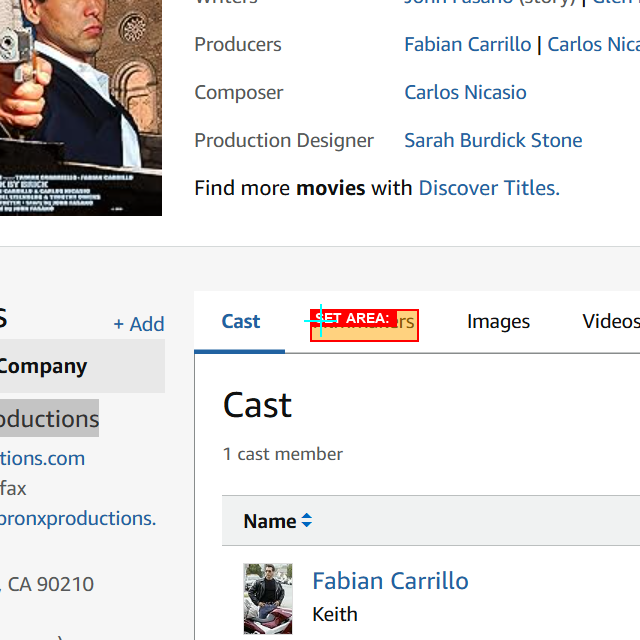

In [817]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVuAcAAAAAAAB9lCiMBGFyZWGUWJgHAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBR3dBQUFBZ0NBSUFBQUI0bmdxTkFBQUZkMGxFUVZSNG5PMlpZV2dUWnhqSEg3ZENBcFcrZXkzTEJUKzBvMkRpbUtRNmFOSUpuaUltRmJGeElLMDQyb0tqRWFWSksxdXpmVWhMUVNNTVcyUTBLVUtqQTVNNjVpS2pUWjJscWJEMlpMU05NbXcrMUNUaVRJU1YzT0VrVnl5OVlNZnRROW9rWnk3WTF0ZzFJei91USs1NS8rL3pQUG5mNWQ2N3l4YWU1NkhBMi9IZWY5M0EvNEdDaVRtZ1lHSU9XSXVKQ3lIcXJwOWRXdDZqTER1VnUzWjJqTCtEcHQ2R1oxZnJkKzFVMWwrTmJHRE5vclRQRVVkOVRjK3NpS2pPSHJBZVlGeGZWSnZ1QVRvN0dybFlCUURjQzRhZUE1cmJvRVpYeTFJOE1zZlFLTDZSTlFWbll2d3ZocDVqa3VlYWtCS2lEQUZBcGJKOEkvcktLNG95SW9xT08xUEdpa3lsVkdkN0dyTnRRRXY1UjZhSldlRllobzJEdEVTR3BHTERTeHo3WWg2S1phZ1lZSUh4VDA1SEZrQlNwaUgzeUtTSjJZOThWSWdGUUlwRHBMSTRQYWNFeVpCVVZDQ1NaM2thL1hUR0YySUJBSXJMMVorcGlHTElEc2N5OHh5QU5ORmJJalRucCs1SDRnQklRYW8vVG40aGptWG1PVWtKZ2FUTG45OHZJVXFsNloySWwrTlRoRzE3TWNJYTJ4TmVsTkV6R0dIY1BDSyt5eit4cXpFbTJseWVOZzNDT0xrcDJqd3pnNlo5OGxRRWZhanJmNUtlUk5jOWFLOVRDZ1MyU1ordFVTbk00MTNrZVo3bm96ODFFV2x4aERIQ1N1TklMTDBOdE5jZVh1a3IwTHNmWVl3TzlnUVM4Mk1URnJWd3V0WWVlSlhRZXBzeFJpZmQwZnNyL2V5MWgzaytjTDFlSWF4b0hCTTRrMk1URWNicU0zYlBIK0VvVFllcGprUUV5ZmNicjAwRWFEcEtCNTBuNVFoajRsdGZlaEtrMUZtRUFvU3hvdEVxekhQTVNmTTh6NGNIT3k1Yzgwek0wbEdhanRMaG1XdE5aUmlqU210QXpNUVZCNjNUQ1pOZkJXMEhNY0lmTlF3RVl5OTUvaVU5Y1g0L3dyaHN1Ujl2Yy9LWTZRM0dOcFB4a2pkS3Uyb3hScFVHejJ4c2NYRXhSdE1CeWpIcWY0T0ptRkFxRlora05zdHZhekV4N1JUZ2VkcXBGMnA0bnA4MEV4Z2p2U3NxbWlRcEVNa2piNThVUGJqQmJqVkcyRENhMGNickR2SThQMkpBR0t2T3o2Uk45N1hMTVpLYnAxTW0xanVmcDQyUEdCREc2c3RCMGRvSjN1bk50b3pZbmhrckx3ZUE1MnpXVzZPRVFDUlBQQllUblNDUmlsellPZitWR2syWEgvWjg3ZjNGb2tiTFVkLzRNSUJFcDFVSjZsVzhsaHNScFduam41SWtRUERDQ2ROUWlCTy9iMW5ENnJ4NVlIMzk1dlplS2pUSGNFaEdWSlFUZjJaSUhsMXN0QURzYUVsM0VBQmliQndBSEVlMk9WWmZUZGJnY0l5UmhtSFhxV3BYa1l3MGRGaS9hbENWQ2lScldKMDNCNXpYdEx2K0Jnczd0TzA5RFpXbDhZaHYrT2ZNQndRWlNXNmxxTWQ5N2M1R3lxUjRiYXp1dTI0OUlZd2hKWm05SkhIOGV2Qnd5UHREai9YeUxlcEtLM25GMnZqanRPMXc2dURrbTRrTHQ2L2VZRUhTN1BuOUVwbm8vVmdWakEvN0h3bGxwVnJiblJicjdoUHVybXBkMFpUMzdMS1A4dTB5QUFhMjE5WWVYV1BkWW9YTzFLOHo5Yk5UbmJvamZhN3VnZmJETGNuTFRyNjlnS0RwQ0FDVUVVVHE2TWZGTDFWSTYzaDRzdzZCejFLamQ0WVNNZFVCdlJUQTdSaWcxMXNmVlpNcUFCQmUwZGR2NGdkSUFnRGV5NmRONXdiODY4NnlWaXJVV2dUdzJHNjJVUkVtNGgvcU0yaXFyWSt6aUpIVzRlMGxFVXVkcXpIY1pnRUE5clYwN0FHNDE2clV0RHFHcUNBVDhkOGRkdHRhOVUzWlgxaU1YOVNmNjNNUFVVR0dvWi81WGFadjNBQm9uenA5OVZ2L3oxbDl1bHMzMk9wOWNNdjFRRnI3ZllQcXpUTnlRcFhaMlRKMnZJL3Ercnl5QzZCSVZ0czVhcHV0TWQzTUl0L1I0UEd5cEtiVDNiUWJuQThkUjh1TnYwNUpUdXZOdHdmTXB3WldSQkxWbDdXaVQyRUFBRnNoY3JQVDRFd0ZpRU85SG10VnVtUUxuNDkvRHl4eDdJdDVEaVJvR3hLN3Yxa0ZDeXk5a0hqVHM2b2szTjhNK3crQThOa3hTWDZhdU1uSXQ0VmxVMUl3TVFjVVRNd0JCUk56UU1IRUhGQXdNUWNVVE13QkJSTnpRTUhFSEZBd01RY1VUTXdCL3dJa3hjS0REWVh6YlFBQUFBQkpSVTVFcmtKZ2dnPT2UjA1jbGVhbl9wcmV2aWV3lFgcugIAaVZCT1J3MEtHZ29BQUFBTlNVaEVVZ0FBQW9BQUFBS0FDQUlBQUFDRHIxNTBBQUVBQUVsRVFWUjRuT3k5ZVp4bFZYWG92L1o0eGp2WHJhR3JxcnQ2Ym5xQTdxYWhaYlNCQ0tnNFJ0R25NWW5FWjJJMGVZa2tMejRUOWVjekVreENOSW5FYUhnOGZhaFJmRUZFVkVDR1JpWWJtbTZndTVxbTUrcnFHbS9WSGMrOHA5OGZ4VXd6S1FyNXZQcCt1aitmdW52dnMvWTY5NjU5MXRuVDJxZ3p1Z2NBdE5aQ1NwRmxRZ2dBOER5UFVqWXhNVDQrUHRGdXp2aXU1VG5jOWl2RmFyK2RxeWlSRFEvdit1Ni9mL3ZvenZ2LzZUUC9ZMVcxMkR3Mit2T2YzbEoxN0w2VnEzTDlnemZkZTk4UGJyNTVvaEc4NGExdmZPK2IzbXphN1lNN0g3cDMxNk9IWnhvQmtNeW9pZGxhQm9vUURFZ25pZlFKbkxaK2RkbTI4eFJXTFJ3b1dwU0Nva2hScklFZ1JCRGhoSExLTEU0WVJkVFdtR25NQUNHRWlERkdBeERHQ0tFSVl5VWxvWlJna3FVcFJvZ2dsS1ZwMkc1SG5jQW81VHVPNzNtY01abGxhUnpKTkFXbEVLYTJtNVBhU0trcDVmbEN3WFdjZHFzNU16MWRuNTNKc2dTTW9wd1hLK1ZNaWtnYXIxU3BoOUY0YlhaaXBzNzlQT1o4NSs1ZGcwdVdyRnU3Rm1QODBNTVA3WDEwNzBCL2Y2bFVvcGhNVGs3Mjl2UU1EQXdvS2RNa0VVSndialhxOVRpT1Y2eFlVU21YUGMvelBXOXNiS3cyUGJWd2NLRFZxSTlQakdkQ3VLNExHTy9aOHloanJGQW9Bc0tlNjNtK1J4bmpsb1V4YWJYYllSZ2xTWkpsV1pwbFdpbmJzUzNMSWhqRmNWUXVGVXFsY3BabGNSeW5hZkxKYjl3SnZ4NGV1UEk5WDd5bnUxcWRyb1VYL05WVmw2eCtQUG4rZjN6ZkZkdjYrd2ZIeG1iUC85UlZ2N3YyaWVMM2YvbDlWOXdMWi83cHQvL29sS2RrakgzL3p6Lyt2YkgrZC8vZFA3eWpmeTdodXIvNDgrK085ci9uNy8vdW5RdWVLRlQvMGFjKzlxMTl1Zk0vOVMrL3U1WWNSNUhqU240bWMyTFB1UFRiSHozMWw3enJlVjUxWnU1OTExOGMySUdyVi8vYkc3Y0FRR1BiKy8vc3NmdXM4bGYrOXFJTC9NZUx0Ty80d2ZwdnRtRDF1a2N2M1dBQmJQMm4vM1BKdy9EV0QvLzJselkvS1dYc3F2OXgyMlhUemlmLzU3cy8xQTh3ZHRkYlBuMTR1SHZ4blg5ejF1Q1RSYmI5Wk1uWGFuRFNoa04vdk82NVdveit4L2RlLytONHpadk8rK0Z2OWo4cjYvSHFQdmorTDUzNWhMM2VmZU9TLzEwL2JtR0FYWC95ZXp0djZGNTg1OThzdWZsLzNIYlp0SFBwWjk3OTBZV1A1eDM0M3ZmT3Z5bCtRdk5kZi9KN08yK0E2dFgvNjQxYm5ycVBaMmkrNDZwdnZlcyt0ZWJDODM3NDdpY3FVb2V2K0l1N3JtendqMzd5dlpjdWZlNTlITG5tWTUrOHNkNy96aS84M1hzR241djdlRE4vb29VZXIzazJiL25VSDM1OW4zdktwZi8wcDZlNmo2ZUZkLzd0SlY5OUNEWis5SnQvZGdaNzRSYXFoci82KzUrL2ZjR2JMeUkvdXJIMjVzdS8vUDdGVDh2Y2ZmV0hQbmRydE9KMy91VnpGeFNQbzl1aEt6ZHYrdFJqSjN6dTRYcyt1dWg0dXNQKzIxNS8rZGdva0F2ZWQ5Nlh6dXUxbnNwNDhqcy9hL0E0UDJYdG1zLys1RE5IeVFmKzVMMmZYWGVjSjg1eGYvcmoyZGlUakYzMVAyNmpXWllKSVkweHRtMkhXZFpzTmdtaFNaSmFGdmQ5djFESUoxRTdDbU9ITTh1eWxKUlNDR1NNelRsalZHc2RSWkhTZWN1MkNhV1VVczZZYmJHMXExZEZNdHY2ODUrMzZqUDc5dTdaZk1LYXVLZW5lM1E4ektRdFRhb1ZLaFpiY1ppa2tkSzZZS0h1dk4rVnk1ZHM3bUZnQ0dHakVUTG9TVDBSTWdER2dEWUdHWU9NQVlTRVZGSXBTaWxDMkNBRVNoSEdMY3RDbG9NSlFRQUlZUVFBV3VzNGtWSXJiUnpMOW5QNVlqNVBNRTZUR0FGSVF0TTR5b1JDVWtnTlVta0prQ1BZOFQxRWNEc0lVSnRXaXRXZzNXb0hIV2dSeDNYek9SOVQ0bGgyenZObkd4MVFXZ2xoY1M1RlZxdlZwQlNPYlM5YnVqVExVa3BJb1ZDUUlwTlNUazVNY002TjFrcXFPSXFGRUl4UkpXVWN4MHJLVHFlVHBBbTNyQ2lLR3MxbXU5M0o1Zk1HUUVuVjI5dG4yYlpsMmUxMlcwb1p4d25PUkJURnl1Z2tUak1wamRiYzRwaGdJWVRXR21Qc3VvNXRXMXFyUnFQaE9JNVNLazJ6NDlyaHI0UjFhemJBUFR0ck5ZQlQxcTU4S25uRnF1V3diZi9ZS0hqbm5yTDIrYTkrSHJxN3F3Q2pZemYreTlmNW01YkQ2RmovQlJkdktKLy96ck8rZi9sZHQzenVqOGJlK2E0M2IxZ3p4S2FIeDBiSDdyNnplY0VYUHJ6aHVHS21idm5uYnpRWG43bGl4ZEtoYnF1NTcrWnYzVGdLc0hMNWlsLzBYdWQ1ZFJtOSs3WnJwZ29uOXhCbzFmL1BMV003QUtxYmwyeVp5eXR0K3V5YmpwNy80L3BIL3I4YlAvbkc1V3U2b3RydzBjL2YwUUxzZlBLOUc2d1hGUHNyWXMycUFqemN1dUg2Vzk0NHNIa2oxRzY2WS9qTDl3WlBaZS9ZK3Y1dDVEM3J1bGV2cVJhUzFoM1hEZDhBVUYzYVBRajlHMWNRbUk3L3p6VjNiYnhrelVCcjVPWmJEbHp4Y1B5eXF0NzQzaFBmK3ZET0cyN2ErcTVnOGNjMlZxQXplOGVQRGx6VGdPckdFejkySE84TEFFTWJOcm8zM2pwMitKQ0FRUVlBTzcvOW1mdWRjOVlzRzFvN1dNeHFEMzMzMi9jQXVHdFh6bm1hNHpYUDR2bC84TzZ0SC8vZUExZjg1UmZmODVielYxU2IwM3UyZnZmR1lTQkRIM2pmR2V4Rk5TWnJ6aiszZVB1TlA3b1JvUHR0Wnl4K1J0N1l2c2NpZ1A0TjY0b3Y2MHQ0aXVWYi90ZTdiM3ovOTFvM2YvdVc5ZGY3VzFZN3l4YjJMay9xOTA0SE81OVd5dllJQUF6ZnQvMFQwL3N2Zk8rV0xhWHF4Vyt1ZnZrcnRXdis2VHVqNTZ6ODdZMERhK3pXam1PenUrOGJhNS96N3M5dStnVjFvZTEyVzBxRk1hYVVLS1dFbEdtYUJrRmdXWHpod29YbFNpV0pndkZqUjlNMDAwb25TU0loUUVZSmtTRmp0RkdUMDFOTHlyNU5zSkJDRzQ0SkFxTldMRjFjN3FuR0lqMDhQcjU3NTQ1VGxpd3Q1ZlA5M2RVa2t6eE9ZcEhaTk85UWFJTlVSaFZMaFlVOTNkMkZYTkcyUEFJMkl4UVpqQkJDQ0FFeUFHQUFER2dEMmdBeWdBRlJ3cERXUml0akVNS1lZS0kxYUdXTVFaUXhyWTJVVWltamxWWlN4SEVxcENhRXVWN085L091bHdOandDQXdRRnkzWlhTVWRsUWNHMHdSSWdnUVlBTGNzakVtbkFQQ2ZqNXZRRWRwR29haFpkdTI3V1FHS01ZMjQwaHJVQnBUNnRxMnpMTFptWnBTcXJ1N090amZ2M2Z2WGdSZ01WYXBWR1pxdFlueGNkZDFITnZCaEhRNm5VSWhYKzJxVWtiak9BcERUUWgxYk5zcEZKdk5ScjNSREtPNFdLNG9wYVZTaTRhR0tLVkpra1pSbkdWWkpxVXhKc3ZTVEVqS0dDYVVNZVo3T1l4eEpySldxNFV4WVp5TExLczNHM0VVTFJvYVFoaWJYOUEyZmlIczlSdFd3czdIQUZhdVdmRzAxOFRpNmpYOXNIOE1ZTU5KYTE2K1VIYm1lMzczamtOZjMzM29sbXUrZkF1UW9ROXN1WGdEc0EwZi92dFB1SisvNHRiaDY2NGF2dTZKa3Qwckx5NCtueGlMWndkL2RNMUQxejhsZDhINW4vcno4NSszL0R5dmNXYnFWLzE0N0tvblBsV1hyL3pXQjU5ODZTUExmdk9OL3hkdSs4aE45Y3UrdmUzeE5ML3d5WStjOTZIbjlqWi9MVlRQMjNUNWpxMmYyRi83eU9kdUJJQjhYKzhYUGxMOThwV0hIOCsyb0xicjhKOXNQL3hVK1NkdVorTzdOMzFvMzdhckRoMSsvMThkQm9EQlZZdS85YjdnWGQrdXZZeTYvWFZmK3BRc2ZISFhOWGNmdU9UdUEzTnB5emF0KzlhSFZ6L2Z1OGphVTA3MWJ0MjY4NEg3eGV2UFlBQWVOTys2N211M3F5ZXlTWEh0Ny96bEUrTmJ4MjJlMFArT3Yvb2NmUEdLNng3NDdsVVBQSDVWY2MxNy90dWZYclRnT05VOWw4Vm5iT20rOGZwcFdIN0JHNGFla1ZGL2FPY29RUFdVRFM5Tnp2RWd5eTY4NktmOTJ6Nzl2Y00zandVM2J3OXUzdjc0bDVrditSZS9mcUFiQUFDcVo2LzU2SjNicnB4dVhiczlXL1oyMkFKZ2JUci9weC9aK3Y2cng3YmV0bWZyYlh2bUxyRUsvaWRMdjdBbWdCNis4OFpjTHAvTCtWcHIyM1lvcGJPek0xRVVDU0cwTnE3cmFDa2UzckZkaVN4ZjZoNWN2THplam1kbnBoMmIvL1RXbTRmdjJYclJHYWUrNmJSTmk3c3FQLzd1di9kNjd0SjFKNVlXRGtMZkFuQ2QxdEZqLy9lSFAzejAvZ2QvNjIzdldGVHVha2JKQTQvc21xZzNPbkVVWldtaXBFYkc4OTJ1N3E2ZVVwR0Q4U2oyT1hFSjRxQUJLUVFLUUJrTWdCR2lHRE5LTFU0WXhjekJ6RUhVeG9Rd3pnRWhwWFVZeGxKclFvanY1eWhseHBnd0NLVVVXa3FaWlFRUVp6VG5lalpuQkdHUlpWSmtvS1h2MksxR2ZhYmUxQWhianNlNG5hUVp0NTJjNzN1T1U1K2RxYy9VSEp0emlwTWsyYmQvdiszWTVlNWU3dVlTcVdlYTdVZjNIOFRNQnB2dk9iaS8wdGU3YUdpUlVsb0trU1JKdlQ1TENPSE1FbG5LR2FlVUJrRlFLQlFxNVRMQ3VOMXVCNTBPb3hRQnNteDd5ZUlsVXFsbW8xR3YxMTNIOFh3dmp1TTRqak9SY2NhbFVsSXF4cGcyV2lrTkNMVFdCcEJsV1hOTzJ1SVd4bGdiSGNkSnNWVGluRDV3LzgrYnpicHQyYXRXclNLRUpHbnkxOS9kOXVLMjhKcEhSTTBRdktMTG5wUDZlQmVmZVVYdnhkNnVueXJPbnlOcW52OXNwRUY5OU9ESVFWRmN2YXAvME9mSEtTR0NXcEFCQUdDblduQit6ZW85bHpTb3R3VUE4NnZIMFZhbHJWWmJBd0JZYmlGdmtlZG1QU2Y5WmZFMCtYNDUveUsyZitTNy8rMlQxOVdXZitETG43Mm9QSGUxQ0R1aEFBRGdYczVsejlIaVJab244WXE1bDlQYzVnYXhWLzd1VnovempGZmt3OS85YjUvNFFXM0ZiLzNMNTk1VVBQNkZMem9FL1hSVTNHN0hLUUM4cE85a2pxemRDT1l1ZVo3ZjhXVkF5K1VLcFVScnJiWE9za3lJTEVrUzEzVXQyNTZkbWVsMGdrNnJNVFUxWFNya1BjOExPZ0VHVXFtVVhZY3ZIQnlvOS9hTWpCNnRyMW0rZE1sUXZsQXdNZ3ZEVHNsaTRIQ3dXTTZ4VEpiTVRrMU1IVHZXWXprT1l6aExLZzd2TFJmYVVaZ29hWkN4WGNmemZZOWduY1NPNWVZZEI4bU1HRDNYYVp2ci9ocGp3Qmhqak5ZR3RORlNpU3l5SE9wNkZrS1ljbVlUNWpoK21ra2hoTmFRQ1FYR0FDQXBqVXlsMFlaeGJsc080NVlCSktSUzJnQWloQ0twdEFGQUdCc04yb0FHeUtSS2dqQkpNMVVxS29Nd1krMGd5T2RjMjNWZHo1TlN0bHVkUEdaSktxTk9JT0lrWjN0ZXZ0QlRyV0xPNGpDaWxDZ2x3Wmh5cVdTTTBWcUQwWVJnakJGalRFclJhcmNRUWxwcnpwa1VFbU9NTVFJRVdpa2hSSlpsQ0dOTWFaWUpxWlRSQUFnRGFFQkFLRVZHRzVCejQ4eUFVSlpsU21zQWhCRENtSUJCQ09OT0VHZ2xLV09sY3RtMjdFeGtIdmRLcFYvaURlMjFCSE9MeGVPbnVzOU5maUVoTDZQNFBLOXBMTCs4N0tUeXNoY293ZnpxYThuOExiOWNmZDVNWWhXZUwvY0ZzbDQ2TDB2STBFWHZYSC9kVngrNithWWpGNzF2Q0FDQU1POTQ3ZTlKWHBIbStTVE5lKy9aQjdEaDNIT2VJVk1OMy9MVEd1VE9mODl4WjM5L0FZaVRMNzNjMXpLZUw1VmZtZG9CYUxGWWlPTTRqaFBHYUJnR1NaSUtJWEs1WEQ2WHk5STBETVBabWRuWjJZWnJPMXJwWThkR2M4VktUMC9WY2EyZW51NUtkL1hZbmtkbW15MXdITDlVeW1wVHpYWnJBQU1nRFZFNE5ucWtQajJaQkdhMk5qWHI1NW5yeWl3cFYwcmRDeGJVVzgxT0hLVkNFRVlBVkJaMmpNakE1WXhpSmJYV0NwQ2VHM3ArL0w4R28wRXJqYkJXUnFXWnhFeHFBNkEwTVloenkvRjhLVlVZUlVFUVNxbU0xZ2dSWTBCSWhjQWdUREJsQ0ZNd3hpQ05NQ1VFaUZaWkhPcEVFQTFDS0lreW95QkxVcUZNUmxLTE1nQkFDTWR4UWduR1BzMFhpcDFPTzBrU0ZpZGhuQVpCa0dVWlo3eFl5QmZiaFVpTEpJNG9wUmhoaXpQUDg0U1VhWkp3eHFVUVNpblhkWklrcWRWcXhvRHYrNzduTWNZUlFvVFNNSXFrbE1vWVJFZ21wT29FV2l0akRDWUVJY3d0aTRPRk1VNnpWS25IeDRDTU5rbWFhYTB4SnBJcmhMRXhvSlRxQktHU1diV3JTZ2d5eGdnaEVNS2U1NytnRGN3enp6enpQQnZ2OWUvL3dGMUhmcmp0MnRzdi9PL252bUllNThXSW10TVpoUHV2LzlkLzN3KzU4eTg2L2VsOVVqRjI4NDkyMlAzbi9zN0Z4MTEzK1o4Uk9qRXhNZmVYWmVVQmdCQzhZTUhDZHJ0OTZQRGhya3BsNGNLRmptVWRPenI2MkdQN3QrOTRSQUgyODZXK0JUMXJUMXpUYkxlaU9KNmFtYWsxR2hBbmlER0ZjWlFtcXRVa2ptVTZ3UjIzM2pJMU50cGRabGtjNzMvc01VMVF1VklhV05SZnJsWVIxa0ltU1JSclRhUlNSbVlVbVNTaUFRV2tKUVdOTUNCa0VEYUFFQmdNQUVZYm80MldCakdVeStlcDdSb0FLWldPVTIwUTR6WW14TExzS0U2eFFZQ05FTUlBR0VBWUU0UXBKaFFRSVFSVHlveFNJc3ZTSkk1YUhSV0dLcE1pazNHWWFrd01Ja0FaeGpoSk1rSXdSc1IxL1N6TG1zMlc3K2NvcFowb2tVb0pJWXpXbEZMT21aTHFzY2YyVmdjV3JGaXhvdGxzU2lHTVJscnJLQWc2UVZESUZ6am5BT0M2M3V6c1RMdmR5ZWZ6Y1JSSFViUnExYW8welJxTlJoakZjNzFZMS9jOUwwY0lIamx5aEhQT0xXdDZacVpjS2xVcWxTaUt3aURzQkoxcXRTcUZUTExVOC93NFNZSWdES1BJY1Z4bThVNFF1cTZicjFZNEpSUGp4NmFtcDB1bFVydmRpZVBrVmJTd2VlYVo1ejhuL1JmOTFiOWM5R3V1Yy9oYmYvVEZld0FBU1BXQ2p6M0wwYkwrTi8zM3I3N3AxNnpRcnhhS01iRXN5N1p0eDNFUVFsa214c2ZIbGRJSVFaSWtsREpLR2VjV0preWJHQ0hJMG1SMmR1YXh2WHVibmFZeXBoUEpJRWtOeHFWcTFZU2RWR1ZhSzVpWm5tazBoZ1lXS0NVN0U3TUVUS3ZSd0JZOTlmUlRLbjFWRGVEWjFDSkFqTUxHS0ptcExOVVlrampzSU1VSlloZ1JnZ2hCQkJCQ0JHR1lXek5sRkdqUUNCc3dJS1UwQm16WHhaaUFnVGhKS0dOYWd6R0FNVUdBMGlRRHdJemJOdWUyNHhCcXpmbGpoTEFCazJZeURhSXNURXlVaUV3cEtZVUdneWx6WFl3cEFweWxtZXU1cnVjVGpJS2duYVlKVjRweHk4TzAwZW9JSVl3eG5MRXN6WUtnVThqbEtNWlJFSUJXV1pvS0tRbkdXaXNFa0NTSjcvdTJiYzlOcTNQT1BOY2poQW9wbGRaS2E0UXhaUXlNMFFhVWdVNFlJb1FLcFJMQjJCampPRzZhaVpuWldZU0FNWmJQNXpsamNSd0huVUJLVFNqMVBBOWhnakdXU2dzaDRpU2xGQXRLYk52cDYrdkwrYmtrU1RxZDRNVU5ZWjU1NXBublZXZjlCeS8vSCt2SFJQZUsxY3U3N1Y5SXdzTGZ1Mlh2dXhPUzczbUZOZnVWUUIzWHNTM0xjVnhDTU9jY0UzenMyS2pqT0tWU09STkNTcG1tS2VOV2YzOS8vOENnTW1BQWFkQnhFaXNsdVcybkVvSlVwZ3J5bGU2b1hrL2FEUVdvMDI1MWdzN0dqZXU3ZXJwSDl1eVBhNjB3ekxockRhNVlBbms3bkptbE5xVVdvUndiQUlUQmdFNkYxSUdVV2V3NWxtc3hqcWdHTUlBSlJoZ3dHR08wd2RpQUJxMlVGRUliUktueENhR1VhWUFzVFpYU0NCTUVnQWxCQ0JrQXlwak5MY3V5T0tWek02OGFEQ0NqbEVyVE5BNUNIU1VRSkNLVEJoREJGQmhtaGhCRUNTYkdHTWR5U3NWODVqZ0lqSkl5amhQYnNibGxHUlFJcllSU0J1RXdpVE1DdlgxOUFuUzczYWFVYXEyRnlJSXdZSlM2cnBza2lURUdZeEtFb2RMR2RsektXTjYydFRGaEZBc2xNYVdXYlV1cFpKYUpUTVJKYW93WjdPL1BzalFJT3A2ZkM4T2dYbS9ZdHVVNmpzOTlNemN6Ym93UUdhWFVkaHpidHBNa1M3SVFZWkpsV2FzdGJjNXlPYTlTclJLTVZiMnVPNTFYMjh6bW1XZWVlVjRDekYyODdsbjdqbDRtMUM1MDI0VlhTcDlmTVJRQnF0ZnJhVHJKT1hkZHgvTzhnWUdCV20xbWNuSml6Wm8xV1NaYWpXYXBWRHJweEJPWExWdXV0TllHRk9oVVpvOCs5dWkyT3dXMjBHd25Palk5YXdrTnpNRTg3a1FSdDJoM2Q5VXY1dnVVUUZIYXRtWk5xZHN1ZStCWlFBRnhUR3ppK0xhYnVtbVNJTVFRVWpQVHpUU0pLWWJ1cmdycktqdk1qcU1RSTJCS09hNW5RQm1sR2VVWUVZV3cwUm9qSUFRbmNjeVlKSXd6emhGQ0FNQzVOVGNoYWxrMkpaUlRtaVJ4bXFhWkFadGJCaG10UVFncGhKU1psR0dzVzBFcUZITTkxM2VJN1lTcFlCeHlydSs0YnJGU3Nzc0ZZRGpudXdBd01Ua2hwTFE5UDVmUGQ1STBtVzBHY2VnemJoTkNRWFBib1pTR1VWU3BWQ2lqQnc0Y0tKZkwzVDA5alVhejFXclhabVljeDgzbDh3aFFPd2dxbGE1U0lYOXNiRXdiUXdpWnFkZWxrRW9ENXpibE5rWXdPVFU5TXpNVGhjSFEwQ0kvbC9jOHIxR3ZSMkdrcEVRSUZRdkYzdDQreC9WbVptZHJ0WmtvaXFNNFNUTlJLcFVBWTlES3NYbWFwcDMyQkNZRVk1UXYvR2V4eG5ubW1XZWUvNGVnY1J3REFHTVVJY0NZdUk1ald4WmpQSW9pclhXejJaaWRyVFBPTGR2aG5HT01NeUV5TGIxOGFYRFJ3cWtseS94QzZkRG8rRjNidHYvR3FTZHpMNmZEdGthWU1zWTRBNHBMUFYyT3huYzlkaGduMnUzSkE4TUFhWkFGaVVveHgyN09RZGhrU2FZMWRUeUhNa0tRUVFSbFdpWWlVMW9iQkVRYll6VEdGT0hIQTJzWXFZQnEwRm9ySmJKVWEwMjFNUUNZYUVCWUd3QkRFQ0RHR0dlY0VpS3l6Q0NORVJDTWpRWWhSQnduY1JUSFFSaE96K2FVOWwyZkVzdXpQQ2RmTEdLTUxadFlUQXJWYnJhVXlMeENqaEtXOC9Qak1DR1ZFbExHVW1WQ0txT2wxcGdSTCtkN2xBaWowaXdEQUNrbFFzaXlyQ3pMbW8wR0FNSVlhYVhUTE1PWWNNdXlIVWNvMVd5M2hWU0FnRkRtZVRrQWhBbjEvSHdtVlJKRmFSSVhpdVZDb2VqNU9UQW1TWkl3Q1BPNW5PdDZTa3V0ZFJSSFNtdEtTTEZZakpJRVlZd3dUdEtNVU1vSTF0cGdRZ2lsVVJ4cnJkR0wyTUE4ODh3enp6eXZBbFJLWWR1T1pYR2xGR01VWTh3WXIxWlpsbVZCRUFaQmtLUXBJSlFrOGV6c0xMZTR5TkpVcXp3cEZjdmxKY3RYbEh2N1I0Nk4zWDMvanJOUGZSMVlmZ1lFTVc0SVZnREFHUGllbmFHeHlYSFJUcVZQVGhSWnhuVWlaWmdrMGhodTJVcHFNQWpBNUFzRkpTVVlSVEZrU2taSlFoQmdUQXhDMmdERm1GQ0dETkxhS0tPbzBVWnJyYVF4V21tbHROSkdZMElCWVEwSVlVSUpKWVFRakRBQ1REQURTaEFpbE1oTVpGa2FSVkVVeDNFWTFSc04yL1dMbms4c0o1Zkw1MHBseEsxQWlIYllxYmVhR2huWHRYcDZxNXhUaExHVUdsT2tBZUlrVGJJMGsxSXFoVEMyYkp0dzFva2pJU1FZaU9Na1RiTmNyaEFFd2VUVWRMbGM0Wlp0QUlkUmhEQ2wzTEpzcHhPRVlSVGFqc01ZNDVaZDZlcGlsQkhLeTVXdWVxTTFNejN0T0M1bmxET3FwR2kxbW1tYUVVb1JSdG9Zem5nUUJwMU9BSUFxWGRXdXJxN0o2ZWxNS0dNZ3l6SmlEQUpxVW1WeGF0bDJrbVpwK25oNDBYbm1tV2VlZVY1VDBFcWxDeUVBQU11eWtpU3AxV1lBREFDYTZ4RDM5L2VYUytYaDNjTnhraXF0NGpoeUhkdTFjNTA0OFlxRmhVdVdEUzFiT1R2VEhxczFKK3B0bGlTeE1vYnlPSXVNVVU1NUtTalJxazFQemN3YzIxODcwcHBZZWRwSmZTc1hsbnVxSTZPamNSaGhnNFNRdHVQNHZ0OXMxT3YxMlRnS2NyNXJoRlpLK1k2Tk1FWVlLYVVOQll5d01RQUdNRUlFWTRNQlFHdWxqVUpLS1cwTXdnUVFCb1F4cFdDTXhaQ1ppMXhoRENHRUVZSVIxbHFsV1pwbHFaUkNtN2tOeG9BeExaVXJ4YTRxdU41c3ZiRi9aT1RJMFpFZ0RydDZ1aGNORFVxcHdpaVluSjZhcWswWFN3Vy9WUFp5V00zTU5Gck5kaGk3VWRoc3R4cnRGbUJFS0pWS0dXTUlwYmxjTHN0RUZDZEtHOWQxTGNmTnBFS1lTRzNDVnFjMlU0dmllUG1LRmNWU3ljL2xlbnY3akRZQXVIOXdJYmRualRHZTYyWkpIQVFkbVNhTzYrWnp1V0lodit1UmgrOS80UDcxSjUzSUdPT2N0OW9kS1NYR1JBb3BwVVNZbEFwRnBYU1dKVm1TcGlrd3hvcWxVckZVbEZLOWlCWE1NODg4ODh6emE0Y2lCRm1XWlprZ2hDaWx0TmFaeUl6V2MzRWtjcm1jNDdwZFhWWEdtQkNaNzdtTVVzRElkbXh1MjFtcVN0VSs3T1NhOWRueG1kYUNuT2NWdTlwaDdEdUdjNTZOamxLS21NMVBQK3ZNN2VpQkE5UEh0dDU3OXluMmFVc1dMZ1pLb2pRMVFoYjlBa1ZZU21FUU9LNURLUWJRUWl0anREUkdBUkFEU211bHROWWFJVUlJSVpRUlFnQmpnNUEweWhqUVNvTkFpQkJBQkNGc0FEQWdBYUNWQWdBcEphTU1JV1NNbGxKSUlRQWh5N0lNNTdPejlRSVF4cmxsT2VNVGs2TVRreU1UazJQVHRkbG1ReU9kS3haenVYeWFpaU1qUjBlT2pSUktoWEtseTNhY1dBWkNTcUdrbjgrNW5nY0l4WEZzRUZpMnd4aXpIWmRRMm1nMERhQjhvZGhzdE9Ja3N4MUhLaTIxeUlRTW85Z2dYQ3hYQ3FWU1QxOWZvVkRVMm95TWpodzllb3pldjczVENZTk8yK0xNY3h6SHRzQ29jcW5vNW5OeEV1Y0xoUVVMRmh3NmREaVg4d3VGWXJGWWpLSzRmZVJJbGdtTU1TWWt5MFFRUlVrY2VvNXR3Q2lkWW93NXR5aWRqL2Mwenp6enpQT2FnMmFaU05NMFRWTkNDS0dVTWFxMUV0cElLWUlnQklCOHZsQ3Rka1ZSSElSQkx1ZHBMYk5VWTl2UmdJVkd3R3hOckU2cTloNDZXbDYzZG5CZ1VkQ2VzR3pDS2QyOTk5RmkwUi9zR2pqcmdqZDRkajY5NzQ2REJ3OVhGeS9vTGZkaWpiVlFXWnpaWlZzbVdSeEUyR0RmeXhuWGJiVWFTa3NOU0VqSkNNYVlJS1Nsa2xnU3hqQW1CRE5LQ0RZRURJRFNjL0d4a0ZZSUdRTklBeWFBa0VJQVdrdUV3SURXaGlCa0NGWlNDcEZKSlNqQjNQZVFIOVhEVHM2eWV0TVl4OEgrb3lNUERlK3B0enFSa0ZMSlRJbFVTbWxNYlh6ODBNakl6R3h0OGJJbHhWSkpBc3Fra0ZvUlNrdVZjcTZRWTV4enk4cWtWRW9SUWhsamxMSm1xK1Y1dnAvTFRkZG1NaW1sTms5RThWSmhISmNybGY2QndXcDNMN2VjTUU2bUpxZDJEKy9aOCtoamFab0JZSUtSeU5LZTd1cGcvNEp5cVVncE13YW1wNmZ6K1Z5NXVPYU9yWGRrYWNvdHA3ZTNiM3hpNHRqWWVMbFNjZjBjSWJRVGhNMW1NMDFpMzNVSXhrcHJLUlZBOW1UNGpubm1tV2VlZVY0N1VDR0U3VGl1NnlFRVdodGpqT2Q1V1NhaUtFelRMTXV5b05QQkdMZmJyWGFyYWJUMEhGc1Mxa3F5NnNDZ2xQalE2UGhNSjQ1aThmMGYzVExZczJETHVhY2QyUytpdUZhZmJCNGNPVktOU2ptbldGM1V2L0dpTjUvd3VnM2JoM2VFSm41azV5TkJvNFVOOFN3MzdrUnBGS2RKV2l3VnBKWmhGQURDbUZBQWs2UXBNaG9oVEFsVlJtZFNZc29vQUNBd1Joc05CaEJvQlZvYkF4b0FHV01RQnFXTU1XQzBSaGdBelIza0lERVdHR1NhWldtaWxiUXQyN0Z0cmxTeHAydThObHU3NzU2dW5qNDdWMWgxMG9tRFEwc1U0TW1weWZ1M1B6QTJOWFhMcmJjZFBuSmdjSERCcXRVbmFHTm02NDFVeVU0VUlZejluRy9aTnFhRWNkWS9NQkNFVWF2Vm1wcWFucTdOMkxiais3azRUanBoT0xod0VhRlVTSlVLUVFqVEFNcWc3dDYrWlN0V1ZMcTZicjdsbGgvLzZNY0dRVmVsYThYS2xSdFBQcVZTN3NJSW1vMTZHSFJzems0OVpkUGsrTEc5ZS9ZQUlLV1U1M3B2ZSt2YkhubjQ0ZjBIRHhaTEpVSUl0Nnk1Z0ZrSVk2VTFBcUNVWWt4czIzSWNaOEdDdnFtcDZkSFIwVmZiek9hWlo1NTU1bmsyRkdNc2haaUx1cHltaVpUUzkzTUlBV084cTZzeWR5aVJrZ29oTUVaeHpxUVNRWnB4TjZjQXhabk1sN3Y5VW5kVWI5VmFyYjBIais0OU9GSXBsQVVYc1l5NTUzYmk4TkRvaU0zOVhLN3FsSXJMVjZ3WW01bG8xZXFNY0tWa0VpZElHSkFhSTV5bUdiZDRQcC9Yb0RLWkdpbEVtaEVNVEVrTGpOSmFneVJTWWl5MFFPVHhZV1k4TjFSdURDQ2pqUUlOU2h2QVdodXRHT05vemdFRGFLMlVSQ0pMcGN5MFZwUml5K0oycFh6U0tTZVBIeDZwdHdPVzl5c0wraFlNTE9vZlhKUUtqVzFyd2ZUa3dVT0hEaDA1bENUWjJoTkx5MWFzYURicmhHS0djVE9LcFpKQ3lsU2t5VXhOMTJxSVVNWXRidG41UWtGSkJRZ0RvR3AzdCt2N2dGQW5ES01rd1lSbVVqTE9UMXEvZ1ZBNmN2VFl6KzkvNE5GSDk3cCs3cXl6enlhRXROdkJydDNEakZtVTRFNnJxYVN3R0oyZW1uUXM3cm5PbXRXcjZyTXpNN1ZwdjZmWDkzT1daVTlQMTZSU2xtVlJ4dWNDZHBaS0pXNVpjUlJLS2JNTUcyUDI3VHN3dDEzNFZiYXllZWFaWjU1NW5nUEZHQ2RKckxVR1FIT251d01neGlnaDFQZDlTcGxXcWxhckthMFlZN1p0SlhHWXBsbWxxMGRJMVE2ai9vV0xxaVBUamJGeHBQVCt3eU4zM0hYUFd5ODgzYy9sTTVYMHl2N1ptWW1wbVJtWEgrMHVaRjdCTFJiS3dpaWFRVXJpNlZiU2FnZkVNVGJqaExBc1RtM0w4dnhjSmxKSWpOREtJTkFBMm9EU3loZ0RTcy9ONzFLa0tXTFlFSVNKZmlLNkZYcjh2R0NqbFZGYUc2TXBvUWhqZ0xtUTBzcG9wSlRVV2lNRWhCQktzR1hiSjV5MHJsQXBUVTdQV281ZjZlNHRWYnNOcDFJTDZ0ajlRME8xWm1OOGFzejJtT3Q1dHUxZ1FtM1hwclk5M1d4b1k5SXNoU2hLcFVyU0RGTldLSlpLcFhKM2Q0K1VLazZUS0lvTHhlS0MvdjVqNCtOeG5JUlJsTThYRVFCbGZOSFEwSkdSb3pzZmVtamYvdjNGVXVuME04ODgvNElMUjQ2T2JOMzZzd2UyYlcrM016Q2dGZlIwTytWaS9zNnRkeTlmT25EV0dhZFhxMVZrOU96TXpPenNMS1drcDd1NzNtdzZybHZwNnNLRXBwbklzbXp1YjZPVUZGa2N4MEdnV3ExV3NWaW9WTHBlYlRPYlo1NTU1cG5uMmRBMFRUam5uSFBHR0NGRVNqazlQUjFGTVVLbzNXbjd2bSswZnVqaGg3Ulc1V0orWm5ZR2c5RWFUMHhPQmhLQ1NPZUxGVGRYQkdwMTllU202NjNiZjNaM1Q1ZTk2YVNoQlFPRHViemo1ZXl3SGpMYkVWb0ZVVVFFdHFqVjM5c3Z3eVN1dGFjVEFWUWpaQWpHaEZsRzZqaU1HV1dFVWltSTUvbU1Fa0pwbWdsakRBQmtRamhLV2RnMkJDZzJqdys4WWd3WVkwSzFNYUMwMXRvWXJiVUMwQWJRRTF0Z0RVS0FNYUtVekcwSTFscW5NaFBZNUh1clZxVWlKQ1JDSFo0WXc0UnJnekRDaTFjc1g3aGs4ZWFKVTdmZS90TTlleCtiYWN5dVdMR3NDSGtzaE9kNXJ1c2lRQ0lUcGE2dXJxN3VYTDR3VzI4Mlc2MTh2bWpaQ0RCSk1uSDA2T2o0NUpUcmVZUlMzOCtWeXVWeXBZdHhhK2ZPaHg1NGNQdmsxUFJ2dnV2ZDZ6ZHNBSVQrOVd0ZjI3djNzVFJKdTd0N01XazI2bUdsWXIzdXROTldMVjk2KzYwL0hSc2QrYzUzcnQyNVkvc2JMM2pEbVdlY2NkTk5OMHVwK3ZyNkRJS2h4VXNXRGkwZVBUWjIrTWpJek15TTFMclphb2VkOWtEL2dxRGR6REp4N3JubldKYWRwdk94b09lWlo1NTVYbk5RMTNVcFpYTkxvT2RXTmMxTkltcWpHL1U2R01NWXN4MmJVbElvRnVhT0J4WWFNOXNOdzh5QTdGMHdZSHU1S0pXa1dOUktUYzNVZnZMVFc2Tmc5V212Mnpnd1VDWE1kS3pBUmc2V1JHdXBsY243T1FlejBabERXWlFhb1ZVcWxTRUFoaEV1MGl3Vm1qa01BY0lZNTNJZUpWZ3JGWFFDSllReE1OZXBwVFlEb3hFWWpBQVJqQW5CaEdMQ2xEYUE1TnlFTUVJd0Y0QUNHVUJ6NXpsZ29KUVl4alFoaEdDalZhSkZsS1ZobWlTWk1rQlRvWVUwTnFVR0NBS2RHZVY2em9MQmdSUFhyOS8xMElPUDd0M3J1RFlpZzM2aGtDYXAxcHB4WnZ1K2JjMGRhSTJrbEZFVXo5YnJjNUdmaTZoWWJ6U2JyVlltcGVmbmlxVktxVnh4WEs4ZGRCN2NzVU1wdmZsMXIzdmRhYWZWRzQyNzc3bG41ME1QcDZsZXNuamgyOS8ramtjZWVtVHJIWGRnUWhZdVhMUng0OGsvdi9jZXBRd0dxSFoxSlhFeU1qTGllZTdjUHVZa1NUdWRUcWZkcHBRdUhCd3NWN3BHajQybFdVWVpZNHhhbGkybEdoc2J3NWdJa2IzS1ZqYlBQUFBNTTg5em9Jd3hoSkJTSWd4Q0FNQUlNMEl3SjFyck5zWmFLV1N4QmYyOWdJeG4yNlZDSVl0amxLcGNwV0pac1VWU0oxOHM1aHpFYVlRSmN2T1pUbTk5NU9pTXBtMVcrUTIvcjV6cjk2dlMwc1pFY1pJbGdMRlZxQUFpQnllbWpqVWFvVFpZU1NVeHc4Wm1CSkRXU0dGR1FBTkIxTFk5enFpVUlvclRUQ2lwVmFZbDA5cEZXQmxNRERaQUtHR0VNVUlvd2dTVXBnWnBqVEFHUU5ob1k0eEJBQmdocVlGb0FNb3dZRkJLRXhJckhVblJUckptSENkeHlxbU5BRk5NSFlzaERUTExrdVlzdG0zSDR1dFdyWmdkSHoxNlpHUjZlc3JOdVliUmRoUm1TbEhiTHBSTG1UR3pyV2FtVFpnbVFzblorcXcycGxRdVc1WnRXM1lVSjBKSVFrZytYNmgwZGMwMkd2c1BIRHgwK1BEclRqdjl3Z3ZmeUMzcjNudnYrL2R2WHgrRTBOZkxseTFaOHFieno2LzQrYWxqb3lMTEhJc1RqSXZGMHREUW9uS3ArUHB6ejVzWU8vYXplKzVkc1dLRjBHYTZYbThIQVoyZXBweDdubC90cW5RQlRFMk0yNVJ3eHBFeG5OTXNJd2YyNzhjWXpjOEJ6elBQUFBPOEJxR1RFeE5hYTZOMUhNYzUzOC9sY2xwcll3eWpkUEhRRUVaSUdzRXMzQXBhVW9saXFTaGQxMDVFVDE5dlh6ZWFha1JISm1jSCtyczNuTHBwZU84QndOeXZMbUp1NmFISjRQQjFkKzhacVY5dzlxbG5uTFNHUU1Zb285b24zTUxGWWpKYi85bURPeHRUMHlYUDA0UnFqQjJEVlpJVUNyN3RXTE9OR1FPYWNSWUdNUzNtQzhXS2x5c0dVZGh1dDV2TnRpRU1NU3VWU2h2UVFDaTNDV1lZRXlHVmtGSnB3eGduaEJxRWt5UUZNSFBoc2VJa2paTFVjejJFcVFHY0tKTWthVE5OT2pJempwdkxGVUZxSXhUVmhsRkVOVWhwNGlpU010WEc4VjEzNWRMRmFSWkZXVEk2TmpiZGFwWjdlb2pOdVhic25OK3UxMmZyRGFBVVUrTGwvQ3dUWVJRbGFTYWxwSXlWeTJVL2w4K2tiTFphSjZ4ZCs4Q09uVCsrNmFaU3Viemg1Sk1YREF4ODduT2YzNzE3ZUc2TFVCeGxNMU8xOGFPakcwODhjZkhnd09FamgzYzgrT0Qybjk5MzRZVVhEQXowRjR2NUJRdjZ2dlhOYXg3WStWQ3VXQ29VOHNWUytkajRPR0hVOHoydDVMN0hIbTIxV2dYZjV3UUZRUkNGblNTSmxWSURBLzI1bkc4OTNrMmZaNTU1NXBubk5RUjFIVWNiYmJUMkhJZFNTakRtam9NUU1zYkVZV2lNa1NBNmNVZm8xS1k4U1dJamxNcGtxelp0Mlg3UnMvdDd1cnE3Q3R4ek93WnA1bGpGYnF1OEtHMTFacHFUOSt5ZWFyWi9mbkRmNktrbkRDNnR1bjZwaEpnMU9kTTR1UGV4ZytPVFViTWxERERIZFNoVmhDZ2xoVlNXQVU0dFFoR2hKRXJDTkJHMmExS2hNTFB5cFFybWp1TTZoTnR4R0daWkpoUVFaaEZxY1VvQU5FS0VZTUNZR29PMDBnaGhUTWljYjhhRVVVb1Z3aGdUZzNHYVpZb1E1THBHMEFpTVVNcGxqQ0JFcEtMWWVKUUFZcW90a0VnMDF0eTF1eXVsWlVzV042SmdzajdiQ2pwZVZ4a29KUmFQUktveFlyWVZKbkUrWCt6S0Y2SXc2clRhUWRCeEhCY0FsRlJhNjBxbHkvWDlmZnNQSERoMENCUHlscmU5emJMdEgvLzRwajE3SGwyOWVzMm1remM5dEhPbkVGblJ6OTF4NjYzOVBUMkZZZ0VwM1dtMXBxZW1seTlmVWEvWEg5bDF6K3RPMnp4ZGJ6VGFjYVBUenBTTW90REw1UkRCalVZOWppS2pWTTV6OHI0TFNzVElFQVM1bkc5eFhpamtLS1ZnOUt0dFp2UE1NODg4OHp3YjZua2VBQmg0L0hSYklZVmpXd1pNSE1VejlWa0FBQXIxMWl4M21KdHpveWpXUWlXSmFIZWlRa0g0WGIzbFVzSGlWS1FoMGhsRHlpTGdlNDVGY0dMQzF0VFJ1KzdadjNlSGFaMnp1YlY2YUdEaFF0djFSa2FQN2RxNXM5Mk9SQ282WVN6S1doa2tEUmlsb3pSRGxGRExzaXlHTUhTaVRpWkZtaVpCR0ZpMjVicXVZeFVJcFdBZ0JpMWtwclRraVdWWkZ1UE1nTUVZQWNJSVl5RmtKaVJsakZBS0NJTlVsQkhMc29TUUFEQzNxd29UN0RHdUVFbWpTQ1dwVzNJdGJqR2lYV0xsT0VkVWg2U2xwVUNLSUUwOE85ZGQ2WFh6YVNvaFNxZVRNRk9VWUtCcEpDamhPWjkwT3FHVWtsdWNZQ0l6SWFYTUZ3b2l5K0kwdGRLMFVxNFVLNVgvdVA3N1U1T1RTNVlzT2Y4TmIvalpYWGQvOTd2ZmlhTDByTFBPdk9TRGw5ejBrNS9NVE04RXJlYXVuVHNmM2JVclg4aXZXclhLODl6Ky9nVkNpRDE3OXZ6c3JqdHplUjhodEhqeFFLRlFhRFdiMDFOVFhWMFZNREJUbXhFaXEzWjFkVmVyV3NvNGlpekw0aGIzOHpuUDlZUVFhWmJPeDRLZVo1NTU1bmtOUWx2dE5pQ0VBS1NVVWtxRVFBTkVjZFRwZEF3WTEzRVJBVEVqTlNoaENhdGtKekxPTXVHNlBzSzRFM1NtVzVNVFk2TlIwTFlwMGtha1lTc05naWhLY05MdTYrdFZQczBhRXorOTQ2NDlPKzh2VnlxTXNTQUl3bGFMTXR1eEhNWm9xeE1acVR5Yld4UURNZ28wSlJnUjEzRnR4M1ZzeCthYzBnUWxjWkFsa2VzNG5ETkNxTzg1TWNGQ1NxVmxKak1pbVZJS1kwSUpKcFFxcmJGQ2pMRzUvYmk1bko5bW90MXBFMHdwQTRTeFVuUG5Od0NTMmlQTThxeitTcTlIR2RPR0tXTVowS2tvT2tYaUFMTXMwRWlsSm90bHB4UGF6SzJXZThhbWE1SWd5L2Z5cFpJd1J1allHSFBzMkxIeFkrT0xoeGIzOXZZdVdyUUlZMUtyelFqVjlqeWZFdEp1dFlaMzcvYUx4VTBubnp3N08zdm84T0ZhTFN5V0xDbGxFSFEyck44Z2hVaWo2TVRWcTIvNjBZMFBQL3p3cWhOV1hYREJCY2FZcjM3MVgvdjYraTYrK0dMSGRTNjY2TTBmL09EdllnUS8rZkdQajQ2TUtDazFBQUt6b0svUGRWMmxsSkxLODN6SGN3bWpoQkNsVmF2ZE5NYk16d0hQTTg4ODg3d0dvWXh6S2FYV3hzL2xsRkpTU2NLWXovS1dZOGRSekRsSEJQSzVmSm9sU1p5bW1XRE15aGNveHNUMVhNUHNlR0pxWm5xcU5qVnVaSnBKTlJ1RlNTeTB3UjVTRFIyWGJGWW9kNDBkR05ZcFU0ZzdGZ2V0T1hjdFNpaENWTXNveVNqQ25ET2JjYUdOVGxMZnMrZWlOaUl5dDBGWmNFYVVORmtTY2dKWUM4TXRMNWNIakNCT0RCaXBwQkNaTVlBd0Jvd1F4cFJTcVZTU0pKUnh4cmhTU2txcGxiWXNhc0FvS1d6SHpvVElVa0V4clhpRmt1ZDMrUVZxUUlkSjNHck56TlNiczQxT3MrbHkyM0x0VnRCcHR0dXROQWJPSkRKYUlvSW9Jb1JpcnFUaHR1MDRYckZRbXB5ZWJOYWJZUmhnaERpenROWkprbkRPY2psZmlHeW0wV2cwR2tQTGxpNVp1dVNCQng3WXYyOGY1N0JzNmJLalIwZXUvZTUzVHovdDlKSERJOGRHUnM0NSs2d1RUenhKQ0RFNE1FQW9DWU5nNGNKRlhWMWRXdXM3ZjNibldXZWR1V3pac29jZjJ0bHF0UXFGUWo2WE4xb3JKUWtoU1pKb3FSekxRaGhod0VZYllZUlNhdTdZQnNkeFhtMHptMmVlZWVhWjU5bFFibG1Bc2RiSzhWeGpJQk9aVkZJYkRaZzR2bzh4TmtiNXVieHNxaVFWV1NhSnhiakZLR1VZRTZFVkpjaGlpR01OTXJZdGJGa1dOY3EyL1pKcmNWQXVJMFJ5VFYxQkxlQys0N2tlSnhSQXBBbElaV1NXWlNLVFdpZ0F3cVNSU2ttTmlFUklhR01RN29RZENHVC9nbDVLc1VnMUJnMUdHazBJeFF5WVVQSkpCNHdKTlRCM3VKRkdCQkZLa2pSR2hEQU1hWm9wSlRIQm1CQXBsVlRLc3l5bEZOYlN0YTF5b2RTVkwyS3BvMWE3TlQwelBUbytmbmhrYW54Q1piS1lLOWkrTjFtYmJrZUJ3RkJaMEpzaENHVm1XeDYyT1dJc1N5WGw0RG91dDdsVVFna1p4M0VTSjNPeFFSemJMWlJLT2QrUDQzaGlZa0lJcUhaMWRYZDMvOGQxMzUrWm5SMGFHbGl3b0cvczJMRkRCdzZ1WEw1eS8vNzlPN2R2WDdOcTVlTEZpL09GZkhkUDkvVDAxTlQwOUVrbm5haTFucGljR0RseXBLZTdXaXprYjc3cDVpZ011cXZWWEQ2dmxadzdFVG1PWTVrSnppZ0NKS1JRV2hsa0VFS09ZN3V1TysrQTU1bG5ubmxlZzlBNFNTemJvdFErUERKaTI3WmxXMGRIUng5ODhNR1oyZG5mL3UzZnllVnpRU3VJNHpSTEJUTEk5WEl6MHpPTlJ2UFVVemNmT25Kay82RWpKNXg0NGtWdk9yOWNyWDc1WC8vdHhQV3IzM3pSMjdUR25sL29LaFM3eTZYcnJyMzJlLy8relVMUEFNVW15S0JDTElzU0RKREZLUUpFS1VlMmw4bXMzdW9nZ3ZNNXgzVThZVUJvd3hIR2pBbWxraWlJb3NqbXhDNFdjcDVMTVpLSUNKRUpiUkJDandmZE1Kb1FCQWlVa3RvWWhEQmpyRlMyQVdHdGpUWWFFd0lJQldGQUNFR0kxQnNOUWtncG54L3NHMlNPRDZtY0doblpQN3ozd0o2OWswZkgyak9OTEVsenJwK1VZdHYzWnR1dFRoeGx5S1FhUlZwbXlBd3NXMnc1dmtJUWhwMnBxZHJVOUpUbGNFeFJMdWZIVWF5a0pKaDRudDlWNmFwMFZSM0hhYlFtWjJvMWhNQjFYRXJvK05qNHN1WExUdGwweWgxM2JIVWRkL01wbTFldldiTjJ6ZHFUMTYvLzNuZS9jK2JwcDUxMzNua1BQYndUQU1ybDBxRkRCekVodmIwOWYzUFpaZmY5L0w1Ly9jcFhwcWVuRnc4TjlTOVlZTFJXVWdJZ3pya3hKZ1VqbFRUYVpDS0xrd2d3c3JobFdUeE5remlPWG0wem0yZWVlZWFaNTlsUVRJZ0dTRVdtd1JpTU5FQ2NKbjBEL2ZsUzZTZTMzREkwTkxSb1lLQmViL3FPMDlWVlJZQ0xwVEszbkpIUlVhM053T0JBRUxUTHhjTDU1NTJOa1BHTHBXVUwreXJWWGtJc1RubHZkN1hVMWFVd0E4dUtoYUJaUnBuTGlORktNbXBsU2F5a2RDd24weWJLWWhiR2xtdTdsTVVpd1JrbW5CQnN1RzFqcEpNa1pzUjJYWWRpWkRIQ0tFODBFRXptZXJRSWd6WWFIajhjMkJpbEtHV0VZQ0V5QXdoajRycU9FQ3BPMHpBTU1TR1UwQ2lLUGQvbmhPb2tQYmIveU1HOSs0OGRIZ21iSFozSzNsTFhRS0ViRElCR3J1Tnh6NmxVZTRVeHJUUTZQSDVzcWpsck9EM2hwQUt4ckhZY1lpQTJwNGdhYlNTajFMWnQyN0lKd3BSU2dtbk85eHpYQVRDMVdtMXNmS3kzcDhJWW5aNmVTdEprMGFLaDg4Ky9vRlFzdDVvdEplVjN2L01keDNGODI5bjh1dGZsODRYdER6NTQ2NjAvWGJobzRkcTFhd1poY0dSazVLR2RPNmVtSmgzYlBtZkxPVWJyVnJ2WmJqYWxsSzVqTzQ2VEpHbVdwY1lBSmdSVFJCaTJiSjVtNmR6aGtsTEtORTFmYlRPYlo1NTU1cG5uMlZCdTI1bklvaWhpbGtVWk13aHgyOWwwNmtyRytPY3YrM3lVSnRXdUxxV05BU3lsUGpZK09UaTRzTHQzd1gzMzNUZTRjT0hLb1VYYmR6eFlLaFZXbkxCcXhmSmxZNU9UaldiUVh5Mk5UODZNam8rVkNnVm1XWTVmVUVwSFNoSDF4TUdCV2ptY3FTUk9SRVk5UjFGcU1oTWxTWklKb1kyUW1naEZNNG1SNHR4MmJTc08yMXdhRDlORUdrd3dJWXdTQkpnWVkxQW1qVEdBUUlPWkMwSnBEQURDQmxBUXhvUlEyM0ZzenFWTzU0NEVGS2xNVENLbEpBbHA2bnByWW5wNCswTVBiOStSaGtsUHVicGtjR2p4NE9LU1g4Q0lOSnN0clF6aTNQSTlRL0YwdTNsMFppckpNa3dnWHl5a1NLZXR4dHplWDhmbFVSSndpN3FPU3pCbWxHRk00akNtbEJHTXRWSXp0ZW1weVlubEsxY1JRc2JIeGdqR3Z1ZjE5ZlpzMmZMNnc0Y09QN1R6b2R0dnZ3ME1uTGgyellkLzcvZEdSMFp1dXVrbjI3ZHZkMTJua004WGk4VjJ1N1Zuei9EdHQ5L3gzdmUrKy9jdXVVUXBkZWZXTzdadXZjTm81WHV1NTdyVG5ZNFFHYVZFU1VVNHM3bHQyVmE3MCtvRWdkYktHQTF6UjFMTU04ODg4OHp6V29LNm5wYzAwaWhKQUtNZ2pqRWhDL29IdXFyZHJ1ZDkrUGYvWUhwbUprNnpVemUvN3RhYmJ2N0tWNzVhTEpiZjlLYUx6am4zbkdYTFZ4U0tCY2Jvb29VRHVYd09qQ1E2VzlCVjdPM3FRZ1J2dmZYSHQ5MXh6OS84N1JmOWZLSFkxVDFkcXllZ3VJd21KNmNzRjN6UHN5eExjcTVGWnJRbWhEQm1wU0twdDlwQW9GVEtZODRUcVlKT001OXppcjZyRUJVR0pVS3JMRTJTMUpMYUw1VVlKVXBxemNCb0F3aHBZNHpSV29NeFlMSU1ZU1dWdEd5YmNkNXF0NFNRbU9CcXRkcHN0WnZOSnVmODJOaXhCdzhkblRod2hDU3lsQ3Vjc0hGVGY4K0NjcjVrVTl0aE5nQWhoSVpoSEN1cHdiUTduV2E3dldCd0VQdXVZcWhZS1UvVWEwRWNGU29seDNOYzE3SmR6am14TFpzUWtpWkpHRVJSSERQT2xaUWFvVGlLb2xDVVNrVkdhUnpIaFh4Kzc2Tjd2dmExcjRWaHRLQnZ3WW9WSzA1Y3R5NW9CMEc3OWNnamoyUkpQRFMwQ09FdDYwOWFYeTZYOSszZnYrbmtUYTkvL2V1LzhZMnZkM2YzVEU5UDc5KzNiM0p5c2x3dVk0QmlvZURPclJXM3VGYnEyTEZSMTNWSzVaTFVJaE1aQW1DTTVYSSttVjhGUGM4ODg4enoyb00yVzYxV3U1TUswVld0VXM2TU5tbVdCVkZzTU80YkdIQjgzd2laeXhkWG5iRG0yTmprejM5Ky8rMWJ0OVptWnpGR3BYS3BWTXhMbVlWaE84M1NRaUcvNm9SVmcwUExabVpyT1ljdFdUeklHWW5UcEIwbG10clVkeGdTVTFQanhUeXlLY20wcGhpN3RwM0dDWURHaEdnQmNacTFnNGc1bHVYYTNMWWhqZ1RnVENORFdLcWdIU1pHaW96Z0ZEQjJYS0J6eDk4aVFpZ21GQUJwclpUUlN1azBFd1lRSWRRWUFBRGJzU2xYUXFnNFRkSXN6VVRXQ1RweEV1ZDhyM0xDcWp4bW51MTUzTlZaMnBpWllaZzczR0hjMWdZaGdqRVFSQWpsRnJOdFpRem1qTHMyd2xnb0phVGd0Z1VJNGlSQm9LSXdCVUNsWWhHTXdSZ3h4aEFnSVNXaGhIUG1lY3kyTEsxVWxxYWU1d3FSSFRseStOQ2h3eHZXYitpdVZxY25KMGVQanJhYnpYVnJWdWQ5ejNFV0ZJdkZ3Y0dCT0U3dXVlZnU3bXAxemRvMVo1NXh4dEdqUjcvejc5L3hmUStCOFZ3M1NlSWtpWTFXV2luT09YTWRLYXVVWUVxcEVJSXh5amt6b0EwWVNzaXJiV2J6ekRQUFBQTThHMXFibVVtekRCUGkrYjdqdWxLcHBEYlRDVU9ocEcwN1hkVXFCWnhtMmVvMWE4dVY2c1JVYmYvK0Ezc2YyMWNzRnJvcWxVcWw0Tmg4Y25Lc1Bqc3p0SGdJZytiTUhqazIwZDFWT3VmMVp4T0NHNDFHczlYa1R0SHhmQWVDWUt3ZFlheEt4VVJrdG0zYkZndURGaUJER0NFRUs2V2lPR1lkNXVjOFArOXp4elBZSkFvb3RSTXA0alNqQ0N5S1JLWlJFR0dLRVVLRVVwc3dScG5XQm93Qk1BQW9GWm1VeXZkekdvdzJ4dk04cFUwWVJvM0dkQmdFYVpvMG15M2J0dnNYTDFyYTArY0JqanZ4c1pGanRYcE5KTkptam1PNWx1M2FqaXVrVHBTQ1JFb0FoWFdRaFJJcHh0Rk1lelpNUThRd29pQ05WQ0kxU2dWQlMyYUNVV0p6Q3lGa1c1d1FySlhFQkx1dVd5d1dBU0VwaFpTU1VVSXdObG9UakxUV2pYcDk2eDFiYTFQVGptUDM5L1VVOG42aFVDZ1VDbEtLSTBjbUo4WW5IdDJ6Wi9UbzBZOSs3QS8zN1h2czVwdHZPdk9NTTdxN3E1U1FOSTdUT0dLTUVVb1FScHp6M3Q1ZW83VlVJa2xqUmlsbExBeERLYVJtODVHdzVwbG5ubmxlYzlBa1NUdy9WeWdXb3lnT280UXlXcWxXcFZKU1NtNWJnSkJNc3VtSnFYSytXTzNwK2FNLy91UC91Tzc3dDk5MmE3VzcyK0s4MHduYXphemc1NFlHQjRxbHdwR0RCM2J2M2hPbFlzSEEwTURpRTQ0ZVBUSTdPd01JU1FNVUVjYXNRajduV2hreXlpaHRGTUdVZWE2ZGlWUnA1Ymx1bkNWeGtySW9yamRiR2dIbjFDQklGV0RPaFZGWnBsM0xZc3d4aERUYW9lTnd4M0d5T0NXRVdUWXlZRFFnUktqbldzcEFKa0p0RE1hWVVpcWtSQmhUUmpIQlVSeTEyKzE4UGxjdWwwdU8yK28wMjFHU3htbXFFamZuc0NMbjFESUtDU2xtMnJPTlpudW0zUXFGU0xYT0NDQ2I1NHA1dy9COTk5L25WNHFWbnE1MjFQYnlmcjZRRTBsQ0NTQkFPZDlQa3pTT0V0dHg1anFqV21sS3FXM2JVUmk2dms4cENjUFFBRnF5ZU1rbEg3eEVDTGw3MTY3eDhiR3p6enI3ZGFlZStzLy85SStyVjYwNjU1d3RuWGI3L2dmdXIwMVAvL0VmL2RGdHQ5MTI5ejEzaFVIUTM5ZTMvcVNUUE5jeFNxVktOaG9OaEZFK242dmtLa3FwMmRsWnhwbnJPSnh6aENGT29rNFFHSzF0MjJLY3Y5cG1Oczg4ODh3eno3T2h4VkxaZGh4Q0tjRVlFS0tNNWZMNU9FbWlPS2Jjb3BRQ3M3WFFERk1EZU5IaUpTZHYydFJzdGJJME1WcFRTaW1uRnVkR3FkcmtoQlJwS25XbVlJWlBHT0pZK2NpMjdhWExsaDJiYXNXWnpJUW9lWjV2WVlzUnhtd0EwREtqQk1XeGlKTFl4VDdHbURKbUVHNEhVYXBVcVZUZ0Z0Y0VxMVFoUXhIM01rQXlsamhKR0RVSUk0U0owbHAzZ2xSSXgvV1UxbEpJcFEzalBKY25uVTZBTWVHV3hSQ1hXZFlKZ25xOW5xYXBiZHZkUGQyMlpSbWxOQ2hDTkdhSTJSUTBHR01TbGFTeENPTWtTVVVyRE9waHA5WnNJc3V5Q2o2bkxOVlpFbVcxNWd3ck9wWm42Y3hvcEZPUkdxTzR4VG5sQUFER2FLMmlJR1NVTVc2MWc1QnpYaTZYYXJXYW04c1Z5K1VraVZlZGNNSVpaNXpoZTk3bzZGaVNKSzgvKzJ4QWFNZk9IWnMyYlVxU2VOdjk5MjlZdno1TDB3TUhEb3djSFZteGZIbFhWemxOa2ppT0hNZEdDRVZSbUdWWnFWUlNTaUtFS0NVWUk2VWtnREVBbUJDTFdBWTBHTWl5TElxaUxKcy9qbkNlZWVhWjV6VUhMcGZMcnVzWkE3N25hMjFtWit0VFU5TXp0Wm1aMnN6b3lHZ1loSjduOS9YMTJaNmJaaW5DYU1XcWxXZWNjWWFVS280VFFxanJlbHJEekd6anlPR2o5WHJUYUVpaXVEWmRHeDg3SnJPMHI2ZDZ3c3JsakNDUlJrSWt0bXR6MTZFMnQxeUhXUXdRUWhnQkdLVmtFc2RndE0wNU1oQ0ZVV08yRVhTaUxGTlNRU2RNaEVLRU9jS1FJSkd0SUVtRnpvUktVaGtuV2FzVDFodnRMSk5DcUNRVlVaUlF5blA1UXBLbW5UQUlvaWpOc2lBS0c0M0diSDFHeU16MTNHS3h5RGhMcFFCR2lHdnhuRU04U3hJSVpGSVBXOVB0bWFsbXJkYXBkN0lvQTVHWTFIRGdMbGRZUlZrWXhBSGhtSEpLR2ZVOER5T0k0MGlLRENORUNjN1MxQmpnbkVzbFJKYW1hUktHZ2V1NlBkM2R0ZHAwSEVXKzU0R0JoUXNYcmxtemV1L2V2UTgrdUgybVZqdjc3TE1Kd2p0MjdMand3Z3VMaGNLMmJkc3FsVXFsVW9taStKR0hIN1pzNjlSVFQ1MmVubTQwR2hibkNDQ0preVNPdTdxNlNxVVNaeHdNRUVKczI3SXNpeEJzakFZQVNpam5sbTNiU3VsMnUvTnFtOWs4ODh3enp6elBoZ29oTWFHTWNjdDJ0dCt4OWNZZi81Z3hWaWdXQ1NYRGUvYTg1UzF2L2EzM3ZjK3pIVUFvbFNLTW8zd2h2NkIvd2NUa1JCekZxcWVheEpZV3FVaGpyVXdjcGEzTzVLRWpSNGVXTGwyNjZxVFRUOXQ4Wkh4MmZMcWV4b0VTbWpLTU1DWTJKNXgxb2lEbisrVzhYNStkTFpXS3VVSitmR0lDRUZCR3d5Q1VXaEZPNHpobHRvTVE2UVNKRUVZWmdnRXpKOCt4SzlLTzFJWnFtSmxwZUo1WDZTb29EVm9iaklucitZUlNwVTArWDVCYXQ5cnRLSTZWVWttYVNpa05RQ2JTSkUwUWdNRmdDRFlJR2F3RU5xRk1namhLNGlTTW9qQ0poVElHWWV6U25sd2Y0bHhURkdjSll0UXJlRjRsbnkrWEVBYUxjUkFnbERKS2l5eFZVcVp4V3NqbnU3b3FTcGJTSkFrNkhjNVl1Vkx4Y241d1IyQ01ybFFxM2QzVk9JNGZmdWloSDF4Ly9jR0RoM0srdjI3TjJ0TlBQKzJzTTg2WWM3cHBtdmIyOWk1WXNLQ3ZyL2ZFRTA5OGNQc0QvL3pQLzdoNGFHanAwaVVuckRwaFltSmNaQmtoU0dRQ0kyUmJsaEJDYVlVeHFsYTdNaUhDSU1oRUZvV2gxcnF2cjY5Y3JtQ01YMjB6ZStYWitZMC8vTmNIWVBPSC91V1M5YSsyS3ZQODUyVDBwaC84MWkzeDB2TzNYSDFoNy9NVVVlblJBL2VKM2kxTEM3OVd6WDVGaVByd3c3WDhTU3NIR2NCeGJuL1BaUjkvNUdhb1h2NFA1NTMyaTlad3kwZktGMzhYM3YzdCtyOWQrQXJwL0pKNEJUUi9CVWpIN3R1VnJkbXdPUDl5MXJ4U293M2x0Qk1HUDdqaGg5cVlMYS9mRWthaDQ3aVdiZmYzRDBaaC9QM3ZYLytHMy9pTnZPOTd2aWVrUUFocE1JMW1VeXVqRFhRNkFUYWFZTXk1cldXV3hLbVVFZ0ZpbERDQ0NUS2M0b0VGUGVKWUxXeTNjWWxRMjJLT1paREpwREN4cm5SVjBpUUp3ckN2cjdmZDZiU2JMV1piRnVlWTBuWTdFTnA0bm84UXlSVG9NRFBHZUI1QkZra3k2U3FLQ1dQY1RvV2FyVGN6b1l3eFNxa29TanpmZHh6SDhieE9FTFRhYmEwMVk0d1FVdTZxQUlCbFdRQUdFQUtDZ2l4R1NzaFVOanFOVHRDSm93UTBTS28xUXhLVVFZQXRsaXZtdWVzcWpHU3pHV2FKRUxwVTdPSTJOMFliMEFnQUl3UUlDTWFFRUVXSjFqckxVZ3hZS2FtVTlCeEhLV1cwM3JoaHZWWnExeU9QTEYrK3ZOUHUzSHZ2dld2WHJnR0ErbXk5cDZjNzZBUkhEaCtPbzNCb2FJaGdkUHZ0dDFGS2YrdTMzcjlzK2JKOWorMk53akNYeTBraEppY20yczBtNTV3Nzl1ek1US2xVckhSVjBpd053aUJOMHpDTW9qaHN0OW9Bb0xVaWhBSkNRa3F0ZmkyTHNCNzYrdTlmZGY4ems3enVVOTU4eWR1MkxDNis4cldKVHJOWmgzRCtuS2YveDlseDIrdS9XVHRPZXZmaWIzNWk4K0FMWHh0bW82MHNINnJuTGREWWZzbG5IN3NQeUljKy92NVBydm5sOUh4aFdnZXUrZllqMSt3S0Rqd1JNaWZ2KzIvN3dKYlBiaXEvZ3BYcytNWlAzbldmZ2lYTmJYKzV1UXJQdlgwMTNjcEdJZnZWUisxUjdWM2JMcnYrNkUxSHMvYmNrd21UYWwvMUMzOTYvcGJTTHlqd1Y2ajU0d2JtZk9qU3QzMmcvM2haNjA2ODg0T3JBZXJYL3UxdG56Z0MxVFBWdGc4dWUrbmljUnpIY1J6TnpzemUrdE5iT2VNWHYvdmlEZXMzREEwTkxWdTY5QzBYdmFWWUtHemJkdisrL2Z2Q0pISjhGd2hTUmtrbGt6UXhSaE5DNHppVkNpaXpLWGNNWXNwZ0wxZWczRXJUdE5Wc3BIRmdNN3h3UWJkdjRYYTdrVWlSWXFxNVkrVkxHYUJtR0x2NWd1dm5MTnRaME5lWDh6MlJwa1lJVG9qRHVVelRUclBacXRlTlZGcXFKSTZESUd5M2d5QUlzMHpOalU0N1h0NEFicldEWnF2VGFuV2F6ZmJrVkcxaVluSm1aalpOc3pUTmdpRHN0RHRKa21DRWlvVkN1VlRLK2I0Qm80MVd4Z1J4MGd5aVJoZzJ3eWpNaE1USThyMWNwVnpzN3ZMTFJhK1lkL08rN1RtRmNyRzd0NmZTVlNZWXgxRkVNU1VJYTZsVktrRVppZ2dqbEJCQ0NMRTQxMXBIWVJoRjBaempaNHlMTkpWU25uenl5UWlqWGJzZTZlN3VEb0xPbnVIaGs5YWZkT2FaWjZ4YXRkSzI3ZUhkd3pmZWVPUFIwYU1ubkxEcW5IUE91ZkhHSHpVYWpkZWYvWG9Fa012bFZxNWNPZERmTHpJeGN1Ukl1OTBoaExpTzAyNjNraVNtbERKR0VVSkNpRmFyMld3MGd5QlFTbG1XN2Z1KzFpYUs0bmE3L2NyYTVQRVJZYlBlYkhhZU50OGNqZTI3K1d1ZitHK2Z2SEgwMTFIL1BQOHZJckxSVmpZYVBiOFQvV1d3Y29NdUFIYVc5ZnhLeE0vUjN2YVR6WDkyNzJlMkJ3Y0VxUmI0WUlFUEZqaWt3WTZSK0pXdHFOckZBYURhVTZ5K3NuSmZIc0hXSzcrei9rc0hyajJTdFJtWnU5bkJITFRIV2dkZW13Rno1d3lzMWZyTXQ3Yy8rekU2bDlXWnN6Mm51MHdBWUZuZnl4c3NvWWNQSGVvRWdRSDBrVC80Z3lWTGxoNDlNdkkzbC8zTnhPUmtkM2ZQMnJYcnpqanp6RXN1K2VCdGQ5emVDdHBubm5HRzY3c1U0MEt4WUxzdTBnQUlBNmFFV29UYXFVZ3pDWVRaWFZYWEFKNmNuS3pWcHJBaDVZS24weENKU0N0eGVQU1lZOHJjeTVYemViZUVreUFZbjU1WnRHREJ3cUdod3djUGRKWExybTAvOVBCRFdSTDNEUXdzNks2Mnc3RFRDYlRVanV0WnRvMEFXcTFXME15Nks3a3dTbE14V3lvV0M4V3lNU1pOVXFra1lBcGFqVTlNN3R0L29GREkyNDV0VzdhZjh5a2xTWm9HWWNBWXN5eUxLYW0xRmlJVHhnQmgyQ0orcVp3dkljZDJxcFV1aTF2YW1GWW5FRktHU1hwMGZBd0lLbldWcUdPRmFSSW1DYU1VR3lRemthcUVjOHV4TFVad0VrZGgyT2FNTTBLTkFXMjA1M20yNDhacDVqaU83ZnRoSFB1ZVZ5NlhEaDg2cEpTc1ZNby91M1ByNWxOZmQvS0dqZGY5eDNYMzNYdWZsR0xseWhWOWZiMEhEeHhvdHBvUDNIKy9FdUxvMFpIZTd1N05wNTQ2TVQ2UkprbXBWTkphRVl5MTFxVlNxZEdvenpicVhkVXVqQkhDV0VwRkNQSDlYS0ZROER5ZmM1YW1LV2ZjdHV4WHhoWmZDcWY4L2xjL2Rzb1RIOFRoNzMzbUU5OC9jczAzdHA3NVYxdUt2ejRsNXZsL2pOVW4zdm5INjE1NXNlN3F5Lzk1OWVXdnZOeW5jZlN1OTE5VnEybXk1VTJidi9UMlpjOFl2VlN2OEZ2RjROdmZmZWp0cjZ6SWw0czY4QjgvdVdTSEFyZnd5UTl2K2RDNnAvc3FCYithbDZoWGpMMlBmZnJ1VlY4NjAzK2ViR2ZMUjk5LzZPVkxwVWFiTk0wb1pTZXNPbUhQbmtkditPRVBkenk0bzlscUh4c2RtNXFjR2xvMHRQSGtEUU9EQTl5eFdrRUxzUEVjaDNMS09WTkNZMEo5UDA4eDFZQUFNY3FSSVN6SjRqUVZhWm9SaElUTXdsWmo4dGlSNVVQOWI5bXl5VVVpYTA2MUcvWHgyUVpJQVZrbWs2aFlLUFQyOWl4ZnRqd0pPNjEyaXpNNk5qNTI3T2hJcWRMRmJDdnZld2hUSlZVVXhRQklLSTEwVnE4M1hRdGJscVVVbE1xbFhDNW5ERVpTZ3RHTVVVSW80enhORXEwalk4QjFYWTJSMWtwS2FWbmNjV3pPdVJBQ01ISThIeEZDRUFKbENNWVc0L2xjamlDY1pCa1JtVWdOS0VRdGxpa1JoQUhDeEhYZFFqNXZjd3NCVmxKb3FRbkRqRkFFeG1odGpDRUlhNjJWVkl5eU5FMHpvWUlvc2l6YmNsMUtpWi96aTBrUkljQUlBY0RZMk5pQmd3ZTBVbHFyM3A1dWpQSFU1R1FjaFZOVFU0dUhodEkwUFh6NGNFOTNOd0JNams4QW1Gd3V4eGxEQ09Jb0NvS2d2MzlCclRZOVc1L2xqSEhMQWpBSXdWejhaNHd4eHBnUXFsVE1HTFB0WDZNRGZnWnM4VHZmY2VyM3Yzai9ucDM3MUpaVENZaW9HV2JjSzdvTW52Zzc1N0s1aDQ2SUR1L2RPZFlCZ0dMLytoV0xYZlpzWVVsdDM1NTkwd2w0MVRWcmx4ZWZrYVZFMkFrRjhZcTVwMTJWUk0wa1kzYlJzNTlaY3ViSXZvUFRZYTUvdy9LaHAyZUo2TWhqRDQwMUFienFpclZMcW93OG1mNDhPcitvd3ZPOEZraGJvNGZIOXN5a0FBQzV5bW1yRithUDgwTmx0YjBIZHN5a1lCYzNuclM0K2xTQnJOMElVdUQ1a204OW5xTFNWdTNBL29sakNRQkFmbUQ1eHFFbnN5QU42bTB4VjFpbDAwZnYyOWRNQWZJTFY1MjI4UG1PSTR0di90N2hZUTFyTHR4eTlXLzJQenZ6cWZnNVdic3hPVHc4MndZQXNBWldMRjdUN1R3dEswaVpYL1g1NDM5anAxcHducWJKbkZZa255OVlzbFdMbE9VVzh0YkxtYVZVY1czLzRSMHo2WE9xZnZsRWoxeHhVd3pnWFBybkYzMW80Yk4wSVBCa2dnaHFZMk03amtVQUFIWng0N3FGMVNjVlZuRzdIY1BjTGFpNDNZNVQ1bGVmenllK2lPWlorOGpoKzQ1RjhKemY4Ym1zMmR5YmYyRHlodS9lOWZhTmI5emlIcjlNR3RUYkFpeS8vQXdEVTNGN2VuTEh3V2FhcTV5MnF2K3BiLzRKczZTV1pYbXVSeWtyRmdvN2Qrejh4dGUvSVRVb0RZM1pUcnUxOTlFOWo1NTI1bWxyMXE2VklKdnRGc2FJVWdJQWxGSXRCUURLNVFwS2FwRmxtSERLTENTelJydHRFQ0tFT0xhVnBHblFiblNhczJlY2R2b2x2LzFmZkk0ZTJiRnQyMTEzVFk4ZHk0SkFTeFdsWW1KcTJuZmR0U3VYNjV6bisrN0tGY3UyUDdqOS91MFB4RUdIWUhCekZxRk1LSjJLVENnTkNHUFF6V2FRV3NSem5UaE9LR1dPN1JMQ0VDSUlHZGV4ZmQ4dkZBcVRVNU54SEdWWmxtYXBBUVlJQUlBeDVqak8zSlF3WWR6MWM0UmJGR09LTWRJR2pDRUlpeXlMa3lTTW96aE9VaUVjMTgya25Lbk51cjVQTVBFY2p5QUNCbUdOS0NJRUNEWllHNGtRb29RUWdyWFN5bWlFVVJBRVFSZ0xwUnpYOVl6bWpwUHpmV01naWhPbFkyT01FT0xSUngrZEdKL0llN21WcTFaSktmWSt0dGNZQThZc1g3NThhbW9xaWFQRmk0Zkd4OFlPSFRteWFIRFFzUjNMNHBTU2RxdlpxTmY3Ky92SzViSUI0K2Q4empsQ0NHT2t0UlpDeG5GaWpBRUFJYVJXK3RVTUJVMkFBd0NNSDV1Q1V4ZkF6cXYvOElwNzEvLytQNzZqZWRVWHY3dXJDZEQvbnIvL3UzY3VnT2s3di9pcHF4NW9QdlVLelBvditOTlAvOWI2NGhQbTJ0eDI1Vjk4K1o2bkNoVFhyTTA5clphcEgzM3F6NjRkRzd6NEg3N3c5aWNmWTJNLytjekh2emZXLys2Lys0ZDNQSjdXM1BIMS8vbVB0NHc5TlczTXp2M3YzL2o5OVFCcTdPYS8vZnpWdTVwUENTeWVjZW5mZi9SVUZ3Q09yL01GczEvLzFOOC9YUlFNdmU4ZnYzRFJxenEyTjg5ejJQSHQ3N3ovdG1kT0RUTC9rNTk4MjlPZi91bm84Q1gvYlhKcjhNUm5mTy9GSDNyYjVadm5IdXFQZmZyUGR0NEExYXYvMXh1M0FBQWN1T0xqOTE3WmVycTRYVmIvc2g5KzV2UmxCQURndnF0dnZPUmgvOUlQOXU3LzBZRWJwcDhxcytaTjUvM3d1ZjRWQUtMaDYvY0FRT0cvdnZsNHVYTTB0bi9rTC9mYy9JeDcyRjdkdU9HbkgxMlhmMUxEVmF1M3ZTWCtpNjhjM2hvQWRDKys4Mi9PT25qMWpaYzhYUGpTMzZ5WnZucmJaZnNWZ1BQSi8vbnVDMzUreSt0L0hEK3ZNc2VqdlhmckpWODZ1dU1wTzk5ZVhiN3NXNWVldnV3WGV0dE10eDI5V1FPc1d2d2M3L3NVdGR0KzhJYnZ0TnBQWDdXQ3lWTy95T1QyOTMvNmNQdWMwLy92MEtIM2YzUHlnQUE0YWNPaFAzNzVtZ2VQWGZiNWJWYzk3VGVDdm1WMy92WHB6N3Rvb0xMbThndGJyLzl4N1MrKy9kaTJENjA4YnBIN3JyN3hrb2ZoclIvKzdTOXRua3RRN2UxYjMzWFYySUduUFNVKzhOSGYvdXpHWjVnbE5kcmtjM25iZGhobE9kK3ZkblcxZ3lCSkVpRUFEQnc4Y0hEYnR2dlB2ZUJjSTAyelVmYzlWeWsxZDhDZlVrbWFacjZiQndOeXpuMGhqTEEyQmpIR1hjZmxqTnFjbFl2NTFTdVhyVnEydUwrL0R5Tjk2dG5ubkxUaFpKTW1oL1krT3Z6ZzlqMDd0aC9aOTlqZTRkM2pSOWVldXVHa3BVc1d4M0g0aG5QUE9ldk1NeDdadlh2bnd3L3RlM1RQd2tXTFM5VnFrVm1UMDdWVVpJQ01iVHR4MU9tMGc5N2VuaUNJQUdaYzE3RTRwNHhFY2FLVTFGcFZLbDFCMkltalVDcUZKS0tVRUVMbWpzNk40NWdRVEMySGNBdFRDMkdFQ1pGWmxpWnhFa1ZKRklkUjJBa0NwU1JnN0xodTJtcTMydTB3VGp0aEdFY3BJNWJyK2phM0VXQ2tVUmFsdHNzNTU4Z0FRc2l5TFk5UVFtaTkzcGljbk16bEM0eXhLSW9hclhadmYzOXYzNEx0RCs1QUNKWExwVGxQT1ZPcmRWcnRjckZrMi9iWStGaVdwclpsRHc0TTlQZjNKMUc0YTlmdW5PZXRYTEdpMldna1Njd29SUWdtSmlablpxYlRMT25wNmU3dTdxYU1Jb1FRUWhoanpybHRJNFN3NDdpY2M1R0pZMU5UelZiekQ1N1BzSDdWMUtlbkFZQU1EVHcxaS9iUTFYLzJFQlNYbi9yNjlUNFVGN3NnZGx6NWlhOCtFT2JXdlBORDc3OWdlUkZhdzlkODZjcTdiLzdiajZ1L3ZQcVNOUUFBNDlmL3ozKzhwMG1xWjM3c1R6K3d1Z2hwYmZmV2E2KzU4ZVVwSW5aYytmRy92eWNreGJWdnUvZ2RyMXMvQUdPN0QrNkhFZ0JFOTMvbE0xZnZpb1l1K3N0TDM3NmltNG5EZDMzNWMxZmRjOFhmTGYvcVo4NHZIbC9uNGU5KytwWXh0dnlkZi9heGkxWVZJUXpEMnZCdU1kOERmdTJSSzF6NnZrV25yZTd0dGdFZ0dQNlBiWmZjRjF6MnZVYytjT21HSjdzN0IvYTJWcjlod3kzbjloY2dPM0Q3dGovNWNldmFxMjdadVBTZEYzY2RSMTczOHNWZk9tVmd3OUtDRFFDdHNYKzdhdWRWWXdldXVHZkRWODUrc25jVlhQSE5vNmR0WHYzRFAxN1NiV2ZUZDI5Ny8vV3Q0WnNlMmZyMi9pM1BkVG9INi9jQlFGZDU5Zk4wcWdBQUVqSjQ1ckt2ckJuWXVOQUhnR1JxNzJWWEhyaDV4L0MvSFZ4MzZkSW55dXpiYy9ZVjBMMndmUEVxQXVYS0U4TTZyYi80OUwzZyttL2Q1TmpnTEh1QktwNlBzWHZmZjhYUlllQVh2Mi96UnpjVzdLVDJnNnUzWDdiL3dQbVhrMjJmMnZ3THZHd09Id3dBWU5sUTN3djBOUlBMLzhEYkY1NitadEd5QWdCazAvZHV2K1M2K3JYZjIvNkJ6VnVlWEFZM2V2ZTlaOTlKbHEyb1h1d0RMQzBBdEo0dDVjVTAzL0dkN1ZkTms5TXUzSFQ1R3hkM1E5RHV0SGJzelY1NG5IRHc3WnMrZXQ5ZFY5NzN5SlhuTC92bzg3OUFQRW02L1pZM2ZLVld3MlRMZVN2LzYrbExsa0Z0eDhIcGRHN1EvV2xtU2ZjTTcxbTU2b1FsUzVaSUlkZXNXWFBKQnkrWm1wNisvNEVISG5sa21EUGUxOWMzTU5BL2NuUWtNeGtqaEZzY3dNUkpySTJlTytwT1NnMmFHRVFBSVFOSWcrS1dqUkRKc2l5Slk1a2xuS0RCdnA2ZWNvRVNFbVhDV0U3T2RoaEdqdTFVUytYVksxYk1IQnVwSFJ1dGpSOTlkTStlMFpFaml4WU9MRm80TU5EWGEzSFdYYTBjR2psNitPaG9iV0tDV25hNVZJNlNMQXJiQ0pCdHU0YnJMQlhOUmp0SjBtS3g2UHVlRFJiQ2dCQ21ERE5HUFRBWVkweVFObG9wNVB0ZUxwZXpiU3NJQXlPVklWeHFBR1dRMGtwRGxtVnhuRVJoSkVWbUVQWjhqektLTU9rRUlTR1VVcXFrUWdZNWxsM01GeDNiUllEaktOSEdLS21pdUlNb2NFcU5NVktLSkU2YXpYYVdpWEs1bkM4V0VjYXBrR0VZVEUxT2RzS1FFT0pRNWpodUxwY0x3NmpkYWlzaE1jWUlvMEtoSUtYRUdNZEpJcklzaVNJbGhYSnNoREhubkdDTUVMUmF6WEs1MU5WVm5xM1B0RnN0UkhDbHE4SVpRUmhqaER1ZFRwcG12cCtyejlabloyZGI3YllRZ3RGWHlUY2tZN2RmL2YxOUFON21VemM4eldKWGZ1QmZQdlVieFNjK2pWMzMzWHRDY00vOTJGKytaMjRXcjNqR0gzMmVaMy84eGZ0dnZmYm1kMzcyZ2lMY2Y5MjFZd0FyL3N0bi8rajB1YXVLWjc3bkwzbnRmVmZjKzlKVmFkNTgvVDBodUtkKzdPOHYzZXcrTG1UUm5IZS81VHYzUnJEK3c1OSszeG9QQUlBdFB2ZkQ3N25yRDY5KzdKNXR6Zk12ZUVMTlorZzhmdjAxRWNEbWk5NnpyZ29BVUN4NnhUUE9mWm5melR5dkpIc2VlZjNIaDUvNitNUVM2STF2ZWVQR3AxTExXejQ0KzliN2R0MHdFMHdEUE5uWFdmT0cwNy8wUkkrdytwc1hYUjEvN3kxM0JGZmVkUGppMzFyOG5HcVdmZUFqVDF2Z1dpcC84c0tScS81My9WaXREdkJVbi9LdHYvWHVMNTM1dUxsWDMzTGlCKzY0NjhwV2NHQVN0ankzMnhtcE5nQmdlQUdIQkgwYlB2bStwMzBzblg3cDJXTTMzeFNQemdBODZZQjE0YlAvY05IRmhXZDdoZFBlL3JhckwzeHFudlZsTG9WVVcvL2p3TENHalc4LzcvTHo1cnh0K1VPZjhOTy91dTJLSXdlK3ZHdnpaMS8rbkhzN1VnQmd2ZUNteU1Feno3djBhUityYjk3dzJ6Kzc3WXFaK0JrcjNkM2ViMzNoL0kxUFBkVjJ2VXpOeDNZY1ZBRGwzMzdueWtFQ0FPV3FYNzZnNzhXMEo0c3YvWjM5MTM1cDhvcXZiWHZyQy9TVkg2ZDI3WTlxTlNCdi9aMjNQVEZ0WEw1ZzZQR3U4OVBOa201LzhLSGVCUXY3QjRaYXJkYnFOU2NPTFZrMk1uTEVJRFF6TTFPdWxGZWZzSEpnY0dEN3d6czFoY0VGZmE3bFlHMlNJQUlOQUZnYUUwdUJzTkZZengwSnFFQlFpMm9NVVpZRnFZZ2xLRXo5VXBGNVZxcGxsS1lLUUdMc01PcFdlNGQ2K29ZMm5RcGF3ZFQ0RGY5eDdmMzMzTFhuNElncGxMS1pScGVCM3Q2ZXpVdVhuTkJ1My9DREcvYnYzeDkwR2ozVk1uRElJakFLTE11bmxBWkJKODNTVkJqQXNRYXFnRkJPdWNVSW93b1piRGsyWlVvSmthWEdHTXhzWnJ2TXNsQ2NLcVdNVmxrYUc1eUJBVW1JbEZKb25XcU5NR01XSllTNHJvc1FiblNPRW1hNU9kSm90RFFnYmxtNVlwRXhuaWFaQUcwQWdkSHRUc0FzakZ3UEVCWkNoRUUwTlQyVnkrVzd1M284UHhkR1VaSWtTb2laNlNtWW1YRTluMXZNNGF5VTgxMkxXeGhGVVl3TWdKYWx2SThRYUsyek5BMlRJSTBqMy9jSkJpbFQxN1VCakJCQ0tkbmIxMSt0Vm5mdmVxVFpiR2JUTTc2Zm81UVJnNlJXamRsbXM5VWFXc1NuSmljUEhqeklPUzhVQ3JuaXIzRVg0NzFmZk04ei9TSmI4dlpQWEhMSzAxOEJpb1hpVXgrYXd6dEhBZHd6ejNoNmUzWlBPV3NkM0w5dC83NzljTUVwdzdzZkFvRGxaNTcrdEt0ZUxzMzd0eDBBSUJ2TzNmenNqa0J6MTg0eGdCVW5yZmVlcG1DcEFnQlJHQUU4VWVjemRGNndabTBPeHJaOTlYUGZkLy9vb2pYRithN3ZmeGJJaXg0TFJ0YWNWTTdmTVRtNmQySVVGci9ZUXhhQUhhOG45SXhFWG5naDcvcUxjRHdIeHJ1ZjQzMEJJRi82WlJyK2dUdjJBb0IvOFpsUDYrdVMvZ3MyT2xmY0ZPL1lOd2JyWHVvNDlpL0pjZTdYY3FvdjFPaGVYUE9OS3doTTF6OTkrVjM1Mzk5OFd0ZExqdFM3N3F3dmJMenVraDBIUG5IVDhtOWQrSUpEQUkxRE54MEZ3T1czUCsraXJjZWhCdzRjT1hKa1RFakRiUTh6SmJVeGdOYXRXOWZYMTd0NjlTb3BzKzBQUEVBOHgvRTl6bXdDUkNkcGxxUzJaV2VwVm9BeTBKZ0FnSTdERnNPQUNaRkdFbUpUMjhhV1RSQ2pycHQyMm9rU0VqUjFMQXhJYTlQT0JNUGFJcFFoUklrRnZRdlAveSsvZTlhYjMxYXZUZTdaL2RCRER6NHdjYzg5SjY1ZXVYN3Q2dVZMRmwveTRkODdldWpRamdjZnZQM1dXekdDWXFuSEdCcDBVcVVqYm5IR0dHRGNEdE5VbzFBbzE3TWRiU3dEQkNOTU1LWWNJWXdNYUNVYjdVNHFoT3M0akRIYnNZR2dWcXVCQ0diTVFwaTRybGZ3ZkNETUdEQUcydTJPZ0l3UTBvbFNiams1bHg0OU5oRUVnVzA3WVJJVElZV1F6SFVNQURLcTExOFFSNTBvamkydHBWU1lrT1VyVjdiYjdiSHhjZHR4TzBFUXhYRzF1N3ZnRmdEaFpxdEZNRktFUFBib3NKUUtBV0NFTGNzQ2cxcjFqdEhLOS8xVksxY3l4anFkWUhSMDFIYnNmQzRYeC9IUmtaRmFyZGEvb0Q5TjA4bkpTUVBJdGgyRVVMdlZFWmtraENSeDBtbUZTWlFjUG5oWVNORlRyWHErWjR3UjZhOHhGR1YxemJtcm56VE5Zdi9wNTF5dzdnVWJTeFNGQUZBcFBtc0hZUC9DZnRnMmR2allHSndTaFJFQWRKZUt2NFJXYzdVczZPOStUazRZUlFDdzd4dC8rSjV2dkhSeHk5L3o4YmMvZHRuMXU3LzMrZCsvanZWdmVzZDczL3ZtVTN2bS9mQ3J4L090Z2xhMW0vL1BYVmZzaWtkYnl2SjVkeGQvOGEyaVpXY1FZUGo1VmlCUDc3enNxd2R1bm81SEUxTE44V1grcjJQbGJudnZ2Wi8rOXRIN1pyS2FKb091TStEK2VwcHoxa29Cd09sK1pzdGN0dEFIaUlmSG50SHBmMFVKZHZ6d3JzdnVxQi9vcU5UbTNTV2VmODRBODR2eDRwcHZmUGZtang2Kzk4cERoOS8vRjRmemZkV1B2V1hEQnpiM3ZvUTNKV2ZMNzZ4KzYvQ3VHLzdqM2h2T2ZOdGJYNkJnbExVQm9NdGZldHpjcDVrbFhiUDJwRU9IajM3OTY5OTg0NXZmMUZXdDV2SzRwNmZQY1d3aFU4Zm1uVTRUV2l3MmtDK1VxMTNWSkl5NVZnNnpiRzdIVEJtTU8wbHNsQ0E2eTBSSVFRQ1FNRTRUa2VXaU9GZXVWcjJDcG1SNDM5NW0xQVpHUUNHTUtDQXNFVWtORWdCYUtxYUJVMFlyUFlWcVQyNXdJUlFLWG0vdnhORkRTYXYrNkpFajQxTVRxNVl1THBXTFo1eCtxa1BOK0xIUnllbmc2TEZwWmhkemhieldKb3FsQW8wWm9VTEhRbVlHVWcyV1ZMYk5LY1dFSUF4SUdKUUpGY1pKSnBVR25NTlV5Q1FUYVpyRm51OXlpNGRSa0FySmJhRVJBa3lsVk8wNGE4ZUNFb3lZalJrVFVyYURFQ1BzNWZLWmxKd1F4SWlRS3BQS3lKUWdRd0FzeXhGU0JFR1laUmxnSXFUVXhzUkp6QzNMOHp5TE1Zb1FJT0FFNnl4TmpiWXBNWlJRU24zZlJ3Z3BLUWlvT0F4RUVpVlJKMFdvMld3Mkd6TjI0aXFaQlowTzQ2UnZRUy9DRUNjeFk4eHgzR0toeERtTDQ4UnpmTWR4anJhT1pxblFRcWM2TFJSeXJ1ZDJPaDNMc2gzM2wxaTQrSEpaZnY3di8vNHBMMTdzUlpHdmdJeVh6b28zZmZTQ0pjOUs2MTY3NEhuTGV5c3Yvc0pWNSsrNzYvcHJmbmpIdm0zWFhySHQrMFB2dSt3TEYvMmErZ1R6dkRUR3J2ck1iWmROUUhWaDlkSTM5dzVhOGU1ZHRSdU8vREx5N24zTC8zZGdHTWhwR3hkZnVzNjNXcTA3SHBxODc1ZFJjR0ZoRGRTR3AxdDdGQXcrejZ4aXV2MG5iL2hLcmNhY0M4NWU5dmFGVGpwVi84bk9WM2gvOE10RC9PTHZIRXNYT3ZCd1BEdzYvZnpPTzk1NjVROHUyYUdzN3NLSHpsdTR0cUJHOTAvK1lPWVhydkNaUEYxemY5bWwvM1BoYis5OTVOKytkK0RhbzdYTHZuYkxGVDk2YWpIZEMrRnYrTXUzSHI3aGU2M1BmMlBQQlp0K01UMmVZWmIwTjM3anZKL2NmTXUzLy8xYjFkN3FobzBieStWQ3FWS3FkcGVWRWdmMjd3V0FjcVhTU3RKU3VWS3VWS05XZ3pEcU9DNGdCQUFZUVNaRkpqS3NVNHFRWTd1VWNxMVFKNGhhalVZeG4rdnU3ZE5KMnlRaGlnTUxLV01NRUVRd3hReVVOa29xa1VtTnRGRkVZWU00dFp6YzBqVW5MVjI3Umpkbjcvdlo3YnQzUHJCNy8rRjJKMXk5Zk9uU29VWG52L1VkancwUDMzdmZqc1BIWnJDV0NFTVN4MG1XU3EyNHhYQkswcFFvTFpQRXNtMHJsL2NwSXhnQlkwUUttYVVpUzFNQXdyaWtWR1pwRnNVaElNTXN6QlFKWXlXQ2dETGg1UW9HZEpLa1laS2xTWVl4NUgwZkVBcWpUclBWcWxZcWxVb1pZd3hnd0VBWUJsSktvNFJJNGxJaDUvbTVlcjBleDNFVVJVb3B5N0pzeDBtU0pKZnpDNFZDdTkwUlVpQkVPTGUwTVFnZ1h5Z2dqQWtteFZKUkNCbEhBVVpJU2hGSDBWU3RsaVpwczlYc2RJSTRUYU00U3BLa3Q2ZTNxNnRyN05oWWtpVEdHTmR4QzRXQ2JkdjEyYnBsY2N2aWxGTEdtTlpTeXN4eG5HS2hNRHM3bTh2bGVudWZMOUxlYTRCeXNSdGdiSHpzbVkxU1BIWjREQUFXTCtvSEVNVXlRUDNJc1hFNDlmazk0a3VxWmZUd21JTCtaN2F4N25JVllDeTBoczQ4L1dXNlQxWmNjZTd2ZnU3YzN4VlR0MXp4bDEvZitkM3JkMTcwMFEyL3FJTHp2UExzMzN2TkJNRENaVGQrNXZTNU1aa0x6dHcxK25zN1gyUXE5Rmd3REFBOS9uUEhuNGZ2T0Rxc1llUGJ6Ly9XV3g0ZjQ3bWc2eWZYZnUxNGNiaGVJbjBEVzBvSGhodjE2MzhXWEhET2NjY3E0NXZ2cU5XQWZPQWo3L3pzU1k4YjdnYjQzczBUdndZZjdBOFdBRnJCZ1FuWThyVDUwZUVqQVFDc1dmaUxMUGdmWEZjZC9PSFIwZUdqTndRYjNucmMyNDJHdjd0RGdkVjc5VitmZjlyYzdaNDVCdnR1RzU0K1h1RmZWbk5lWGJYcGs1L2E5RWt4ZWUyWGJ2dkUzZ05YN1R6OThwZmdVNnNYYnY3azNiZGR0bVBuWmRiemovQ1huQUdBNDc5YVBkTXM4V21udis3Yzg4NHRsVXVYL2Mzbi8rVXIvL0x3SXc5UDE2YWpPSXJpOE5EaFF3OCsrTUR1M2JzSEZ5N3E2ZXNEaEFobGxtVlR4bHF0VmhCMEFFeWxYTFk1VjFKVnU3cTJ2SDdMNy96MjcxeDQ0UnQ3ZTNwYmphWk0wdGJzYkh1bXRtTFJRRjhwWjVLSWFJVzBOa29oQUlJd0k0eFJianVlbi9NYzN3ZkNrMHdsU1FiUzRIenB0TFBQL2NEdi9mN3YvTmMvc1BLbCszWThmTzBQZm5Sa2ZIcmg4aFBlZWZGNzMvM2U5L2IwVmc4Y2VHeDZaa3JJakRHU1pVbVNSRUduTTNMNHlNaVJrWW1KeWVtcDJ0UmtiV3F5TmowMTAyNkhRZ0lnbW1TcTBReG1tNEZRaURzNWpmaHNNeHFickF0RnBLWnhaaktGcG1hYWgwZkdoRVlLY0pMSlZLb29TVnV0enZSMExZcGp6bm1oa0pkQ1RFeU1UWXdkUytMSTRpeE5VeUVGZ0VuVGxERldLQlF3eHJadDUvTjVRa2djSjYxV0swbmlORTB6a1JHQysvcjZsaTlmampIT3NpeE80dHJNVEwxZWJ6U2JSNDZPTkZ0dHdEZ0l3MVFJeTNZVzlQZTdycHRsSXA4dktLMXJNN09FMGt4a2N5YzcxV3Exa2FNajJ1aWpSMGQyN05pUnkrV0doaGIxOWZWRmNWeWJxZFhyalNmM0JMOHMrLzIxWXEvZnNCSkE3Yng5MjlNQzRVVDMzTDhMZ0t6ZnNCb0FoamFzZHdIRzd0aDY1R21YaVN4NTJpZlg5UUJnZkd6czZXL25UKzlEMit2WExnT0FCMjYvKzluaGR0aTZOU3NBeG03OTZlNWY5TTJlOWF4WlVRRlFNQjhXODdWRlBSc0ZnSUx6bEs5UXh4bFhTZE9uLy9EQkRUK3JBY0FGRzFjOXQyU3RuZ0hBUU9scDRTRi9pZTRnQUFBcy9LOXZMZ0RBemQvK3lSVzdqanZTV3ArdUF3RHZMajF0MzlTdjZYVHZ4ZWVzSmdEeEQrNGVleXBOSGI3cG9ReUFiMW4zQzczVEw5MTA2U29BM2ZxVHkyL2IwVHJlVjllSWp3RkF6cWsreldtOS9QdDltWnF6M3RPV2NBQklYdXFQMmYraER5OWVBK3FhKytyUFc4UmRkUHBDQUtoZi83UGcyVm5QTkVzS29OZXVXOE1kZnZqSWtWYTcvWU1iZnBEejNlWExseTVldkhEeDRzWGQxWEtHbWVmN2FTYVRPTENVVW93cXJhUVVDQ0hidG5PK1p6RHlMREk0TUZqdDZ1S01kOXB0ei9WY3g1OGFIMC9TSStOSEhuTXc2TEExZG1pL3BHNnVhMEdwVk1HWUtBM0thTVk0SVVScVNGTUJ4bEFNRkRHTkVLWVlsN3JjUW1GaHZpaVVuaG85MnB5ZE9UbzFPem5UOUd4MzlZbHJLV1BjcHJ1SGgxdk51dTNZZnM3WFJnc2hNVUl5azYxR0t3eENibkhMNHJadE1jWVlvNFFTUm8xVVNLb280WXJibHUzNGNaS0VZVllzNWFSUldhWm9vcUpVQjdGb2h3bm5uQ0RZZCtCUXU5bEk0bkRSMEZCUGI0L1NPbzVqSVFRbHVGSXVJb1JGbGpxT0pZUm9OcHVXWlFIQ1VncEtxZU00anVzSWtjZVlZRUxpS0o3ckU4ZEpNanM3MjJvMmd5RGduRnUyazZhWlV0b1kxTlZWRGNOQVpGbWg2R1ZacHBUczdlMmRydFhDTU5MR3BHa0dBSnd4U3FqRUtveENBRkJLTmVwMXJUVkNlSHA2eW5FY2hDQ2Z6Mm10T2tHbnQ3ZlhzcXhtby9rU0xldlZvSGpCSlJmZi9zbHI3Ly95LzdoaS9CMFhMS3MyYThOMy9OL3JkeXNZZXQvN3o3UUJBTmErOCtJVmQzNTkzNDJmK1hqdEhSZWRVdVhOc2J0di85SE84YWZMV0xHaURQdnE5MXp6dFNGMjVoQjBqdXo4NlMyM1AvYjBya254b3ZlZWY5MWYzN0x6cXgvNStMWTNuM3RtZnhHYVk3dUcyZWIvL3M3MTU3L3pyTzlmZnRjdG4vdWpzWGUrNjgwYjFneXg2ZUd4MGJHNzcyeGU4SVVQSDc5SE8zWExQMytqdWZqTUZTdVdEblZielgwM2YrdkdVWUNWeTFmOENyK2xlVjQrSzhwYmNHM3I4R09mK0ZubDBuVnc0Tjc5WDc1bDdMa2p4Z2R1MjdwNWYvVy9udGs3YU1VUDNuYjRxcU1BZllzdlBlTTRzelpyVmhYZzRkWU4xOS95eG9ITkc2RjIweDNEWDc3M09ZL1hsMG4rblBPdTN2T0RTM2JFVjM3cEI5ZVUvQzFMSFJzQVFJMGVhUTJ6aFQvODY3TTJyaUF3SGYrZmErN2FlTW1hZ2RiSXpiY2N1T0xoVjZiN2Ezc0VBSWJ2Mi82SjZmMFh2bmZMbGhJdldBQnAvY3RmK3NsTnE5ZGNmdjdDamU4OThhMFA3N3pocHEzdkNoWi9iR01GT3JOMy9PakFOUTJvYmp6eFk4ZWYyM3hSL0xkK1pNTzlmN256Mm9teGQvM1pkNVl0TEd6c0lnQUFhYnpqY0d5ZHZlV0h2OWwzbW50NGVPYm9aZi94MkdmUExiU0g5Ly9ianc3ZjhPSkQwQzlYODhscnJ0dzJQYlR3NUtWOWEzcDRhOThqbDIyTkFmdW52L1NiV25qNjVlZU12ZVdPRjVpTXIzN2duYjFmL3RMa3pkKzg3dnp0Q3o5d1dxRWI0dDI3YXZibXQzMzBtV1pKeHliR2V2c0gzcmppalFiQkRUZjg4SWMvL0FIR0lKWEk1NzNUVDN1ZHhVa2p6cHFwRE1JSUpZblNNbUVFSWRUYjAxTnZ0RUNwTEVrOHgzRUtmczd6VzgzVzdHenIwTUhEdHVVTTlnK0VyZWF4bzZQamgvWXNyT2FTYVhWTW05QndyM3UydTJlQjQrWmNMMi9iSG1IVUFFZ0JjWnhpZ2pHbndLZ2lnSTBCQklBUTVNcExYM2ZXMG5XZHh0all6KzY0L2NqNHVFTmIxWjRGcTlhc3BoWnZSOEhSa2FOUkVsdU9EUWdNZ0cwN1N1czBTZHZ0RHVmYzlkekV5aWlqbEJER09iZTR4YTJJQ0l4anhubFh0VHRKZFpSazFCS1prRWttaEFuYVFSekVhYnZkenVkOFR2SHdvM3ZiemRsQ3puL0RlZWY2cnAwa1NSYWtXaXZmOHdxRlFydlZhcldhK1Z3K1RaTWtTU3RkWFNnSU9wM004enhLcWRiYTgzMk1zRlRLQURET1hjK0w0bVJpWWp3SVFzL3p1N29xTGlWU0thVVVvYmkvZjJCeWNtSnljdEoySE1BNGlXUEt1ZTA0bG0wTElUREdCQk9wRktiRUFxNlV3Z1FEbUVhelVTb1c4L244c1dQSFhOY3JsMHVWU3FYWmJNeU5Xc2RKWEt2OUVxTmt2d1lHMy83cHY0Si8rTWRyNy8vZTF4NC96SUVVMTc3N1R6Lys1SlJxK2Z4UC83VzQvQXZmMnIzdDJxOXVBeUNzLzh3UGYyckxMWi83OXY0blJBeTk4M2ZPdVB1ZjdwbSs2MXVYM3dWQVdQK21pei85MzV0WC9PMlBucXBsOWUvKzgyZUsvL3d2MzkvNTBQWFhQQVFBQUt4NjBSWUFZQnMrL1BlZmNEOS94YTNEMTEwMWZOM2pwVm4zeW91THo2ZXd4Yk9EUDdybW9ldWZUR0FMenYvVW41Ly92T1huZVZVb2JmcmtiMDRPLzBmcjJtOXN2UllBTE9jRDc5MTAraTNicjNoR1I0ZC82TU1ud2c5M1h2YnR4OXRJZm1qaDFYOTYxbkhuQXF2bmJicDh4OVpQN0s5OTVITTNBa0Mrci9jTEg2bCsrY3JEdjV5Vy9wYVB2dnZPbjkzMWlldkg3bXNFTjJ4L3lxTVBidlJ0Z0kzdjN2U2hmZHV1T25UNC9YOTFHQUFHVnkzKzF2dUNkMzM3RldqUjFiUFhmUFRPYlZkT3Q2N2RuaTE3TzJ5QmxSOTYrOTZidnRmYXNhdTJnd1dYbncvZ3IvdlNwMlRoaTd1dXVmdkFKWGNmbUx0cTJhWjEzL3J3Nmw5OFpiZS83dksvcjU3enpYc3YyeFljT0ZJL2NPU0pkTVl2N25FQStqLzJvWkd0WHhuYit1TnRyLzh4QU9NWHZPSDB5OGZ1L2NUREx5ejA1V3JPQzBsdzJYVzdybnh5L3hKelB2U3g4NCs3OC90NUlHdit5NFlQYk50MnpRdkVyMTUzL2svLy9LNi8rTnJobS9jZS9jemV4Ky94bzJjLzJ5elIxNjc4aDRXTGx3NE1EbkxMTm9DMEVsckoyZG1hRk5tbWs5Zm5mSytaaUQySGp0SmNzZUxhMHlPSGVvdTVRcjY0WjgvZW0yNzY2ZGE3NzBxRlhIdlNTYXRXTEQxMFlGKzdNU3NWRkl2bGdZR2hsY3VXYmxxL2Z2Y2pEejl5NzIxbFN3OVZmVkxzM1ROYWUvalEyR3lqdldiZCtqZTkrYTFuYnpuSEFBZ0ZVZ05nMEFDZ0FTRkFvREFvaXlKUUdWSUNZd0RRSUVUV2JpbVJOU2JHYjd6dS83b0VMVnE0c0Z3dWI5KysvZmJiYjM5czd4SFhKZFh1YnNZNEFDaGp0RkpDU3FVMW9RUmpqQkJTV3ZNNWYyYlpTcWswRTFJcEw1ZnovTHpVbWpCR0dOY0l6VFlhclhZemwvTzFFa0c3ZVd6a3lMSWxDMC9lc0g3bDhpVkpGTlJuWm8xUnlCak9lTFZhYmJYYXpVWWpYOGdUZ2drbXZ1OVBURTdXYXJXQmdZSDZiSDJtUHR2YjIyY014RWtTeDdIbjUzSzVYQ2F5c2JHeDJkbjZnZ1g5aFdMUmNSeXRUUkFHV3V1VnExYk96czRlR3p0bWMwNFoxVXJOMUdiS2xYS3BVQm9mSHljWWM4NDdRYUNsWXB4VnV5b0lJYVVVcFpSUktxVWNIVDJXeStXN0t1VTBUV3UxNlRSSlR6enh4TG54NmsvODcxdGZ1bkc5U29pd09YZTQwZFBpVXo2clJLY1pxdWZOblFzVUNRRE1LM3JQdnlUNWlWS1BSNWQ4YnNhTFNuaDI4ZWRJbXVjMWhBaHFRUWJQQ0NkNVBOSldMVkx3ZUV6SEYySXU0dUJMS2ZteW1kTUI0RG5hcXJUVmFtdDQyVkVrWHhrZXJ4M2dPWEVXbjhQTE9ZN3dLYkhQL2pMbllrd0N5ZWNMdjl6dHZxRG1qeHNHdkxodC9ISThiakRQcXVVSnM2VDF4bXl1Vk96dTdSWksrcm04NStjNzdkWjByYmJ2c1VjZmZtakg2YWR0WHJYaEZNdHhnSEtoVkNjSUs3N2pldDdDaFlNWW1jYk16RWtiVHo1MTA4bjlDM3EzLy95K2RyUHUrWVVzRlZKSWJDRHZPa3Y2RjRqRkMyY1BEUWZqZGRXSnMxYVdkeXdqdmNkMjcybzNXZy9jLytEaXBTdFhyajV4YU9raWpBQWhNQmptSWtKaVFLQU5Bb1lKNWhnaEJNQU1kM3d3eHZIOFUwNC9QWnFkVWtwTno4NFV5NlV6enpxcmI4R0NveU9qdFZyTkdIQWN4M1U5eGl3cGpVZ3prU2xNQ0NDVVpaazJNU2FCNDdpRVVvU0pNaENsN2FtWmp0SmFBUmdFQm1NRmdKQlJKdWgwV2lJSlY2OWJ1MlRSUUtsU2FuYzZNa3NBR1NXa3pabkZXUkpGY1JpbWFTS2w2emc1U3Vsc3ZSNEVnVEdRSklsVUVpT3NsRTZTSkVxU1lyRW9wSnF1MVd6TEtoWkwrWHpSODMxQ3FGUktaQ0tKa3ppSmh4OTlsRkpxTzQ2U0VtbkRHTy9xN3RaSzFXWm1raVN4T0dlY080NWpqRUVBWVJqbTgvbFNxZVM2cmhDaTNXb3h6aWpEQmt3Y1J4aGpRc2xqK3g1ekhkZDJYcTFZMEM4TDVoV0xMMUlpOTRJbG1Gc3N2bmk4bitjdDlkSXUvMFdMei9NcXdmenFTem5remlwVVg5b3oyUExMdjZxSW84K3JBN0VLdjdKS1g1eGZVZTNQTDVZNCtkSXJzbkhqQlRWL2lZYnhTM044ZzNtaWRvb1p6YVFVU3NWaEZHWENZalFLdzlyTTdLSERJM3YzN0xac2UrWDZVMTNIU3dCRllSaUdvUkJGakRBaEpFMlNMRTNXcmo1aHhkS2xqR0lNeG5lZFNybWNKQ0lLd3pnTXNKYTlsWUlaWERBOHVqdWJuZXkwQThJTFF6MERvbHE1NWRhdEQ5Mi9UUUxkOUxvejMzRGhSU0o3dmUzblNwVnFyc0ExQUdCQWdKWFJHR0dFc0NhSWdJRzVmMGhEc2J6aFRSZEZCL1lPNzk3OTJONjlPZDlmdlg3andORFNuOTkzMzB6ejUxRW5VQm9ab0w3UGpFSEdJS1BOM0VFRldwb2tTNlZTV1NKY3ozTmQxN1hzVGlkb3R0c2FvVVNJVEVwcThWeXg2T1djTUFqYXJhWmowVTJiVHE0VWMxa1NOUm9OaW9GU0tvWEFoR0JDd3pnT295aEowamlPNStKTFQweE1DQ0VvcGUxMkJ4TlNLcGVWVmxFVXBWbVd5K1hyOVhxajBTZ1dDbDFkWGZsQ0lVN1NOTTJ5TkV2U1JDbVpTVEY1OEZCWGQ3VzNwMGRJcWJUaXhPcnQ2cXBOMTJablpqbm5oRkpBa012NUNLRXNUV2RuWnl6T2ViVUxZd1RJR0dRb0pkcVlUR1NBVUtGUVZGTHVIaDd1N3U1ZVVueHVUSjk1NXBsbm5ubGVaZWpLVlNjb3dOTXpzN096ZGNwNWQxZlhDU3RYRGcwTnJWdTM3dWFmL0hod2NKSFdKb21UREZFc3BWWTZpWk4ydXgySGtXVngzL2ZHUm8vK1lHSThTK09od1VFTUpzbVVFaWFKazFaOU5ndURxRkhyekV3c3FoYmI0VmhqWmlZaHliRmpreE8xUm0xMHpBTEVLWDM0Z1ovdkdkN3p6VzllYytLR1RSZTk0emZQT2U4c3BRRXpJQVFNWUNtTmtCSXcwd2hoQUl3QWdRR3NBYlM3Y09FcFhkV05tMC9idld2MzdrY2VhVGRiQzVjc0gxeTA1TUQrQTQ4OXVuZnMyRmljcERhM09iTVJBbU9NMXNhMkhNNHRwYlV4Uml1Vnhna3lrSGU5bk8rM2doQlJ3aHlIT3paM2JHTlVISFZLeFVKdmQ4WDNYTXFvVVN5WHl6R0NHY0VwNTFLSUpFMGQyOG5sdEFISTB1ellzV05abG1HTUhjZmgzQXFqcUx2Y1hTZ1U5aDg0RUNjeEFNcXlGQlBpZTU1bDIwbVN4RW1TSktuU0dnQlJTc3JsY3BYM2xpcHRUS25VdWhPRXRzVXhKb2NPSDY2VUs2ZHUzdXc2VHFQUmFEVHFjK0dnRVFCanJORnNCbUVncEhBOTE3RWRaakdsbGRaNi9VbnJTOFZTR0lYdFRxZFlLSGIzL0NxUE01MW5ubm5tbWVjWGdpNWRzZnorQjNjZVBIajR6TFBPMmpQODZQYnQyNWN1WGRhL29NL2l2RFk5N2JqZStNU0ViWHRSRUFlemRjL3pMTnVXVWtaUmhBQnN6bHFOT2liWWFPVXlpaEVvWVd6T2t5ZzZOakp5YVA5ZXJsSWlrNkpOYkk5T050V3g2YkYyYUxKMlpPSlVLekJVSW1vbmJYVXNqdHZ0VHFQZGVlU1JoN3Q2ZTlldFAybjFtdVdNQWlJRUVOWUl6UjNuUXdBd0FFVU1zQWJMQVdhVEFpd1JpbHBPMEdxSG5hRFZhQ2FwWk5UcTdWM1FiclhEVGhESGtSU1NFTUlZbzR4U1JBMkFWRW9xS1RNQmxET09FR0VNWTBDRUlVd1J5dUlrU1VNbGhPTmF2dTg1amswSmpxVUlvMUFMb1pXSXd0QnpITWR4eHljbUxHNFZDa1dscEFGampDa1dpNVF5cFRXWHN0bHFCMEhJR0M4V2kwcWJKRW15TEpzTHU2R2tES05ZRzRNSklaaGdqT000U2RydFZ0QWhqRE5HNHlUUlJoc0RjUlJ4Ym5IT3A2YW0waVRKc3BSZzVEZ09wWVJ6emlpMWJWc1pOWGZLVTI5ZjcrVGtaTFBlYkxhYWFaTDkvK3o5ZDV5bFYzWG5DNjhkbjNoaTVhcXU2dXFvME4wS3JSWkNRaEdCQkFaamtESDJHTnR6cmV2WHpIdUZmZTBCenpCNGJGNGNHUEFNWXp3MkRneG03TUg0RG1Cam9rRXlDR0VrWWFVTzZxd08xVjNWbGV2azg4UWQxdnZIcVdvSkVBSU1TUGpPK2FxbFQ5VjV3dDVQYVhldFo2MjkxbTkxdTEwQ05NdnkxZFh2VnlsN256NTkrbnhMYm43M2laUHZCTGY0UXMvalh3NThjbUxUWTQ4ZldGeFlLQVJoSE1WSER4ODlmdXk0VVlwVHVubHFPazNpUnEwK09PcWxuVTZ6VnBzWXJJWkJRQ2xWV2xsckNVRGM3VlFxNVNBSTQwNkxVY0tFNjBpL0d5WDF0ZWJ5d256RllaNVdST2MrZzRydmxHUU1mamcrUEJnNGl5dTFWanN4MUtHV3lkVGE1Ym1aK1F0ekQzN2wvcTA3ZDl6eEl6OUM3TXNIQmdjcTFYSVl1QlRBQWdBQ0VyQUFGaWhGQ3NnQkxBQXBURzNaTlRFTlVYenUxS2t6SjUraXpCbmZ0RG51ZHA4NmNXTHUvS3hhWHNxVkpvZ0lZSzBsaEFBaGxBQ2dOY1pROERnYUF0VGxoSERLT1lEVmFkeU5rNmhTRENrblJ1VXFTOUdRTkVtNjdYYVd4R21hdHByTlRSTVRRVkJZWGEwTkRnNE9EZzVsZVpwbEtTS0dZVUZybmNVeDQ3eTJWdXRHMFpZdFcvd2d5UE04aXVNOFY0d3h6Z1VDTU00YzF3VWcxbHF0VlRmcU50dWRLRTI0SXozWEpRUUFVV3ROQ1UzalpERmRXRjVhQWdEWGRhUVFveVBEeGJDUStFa1lodVZ5U1J1VDVTa2haSEJvc05WdXpjMWRPSFAyck5XWXBva3hCbE5jWGw1K29aZFpuejU5L3QrUFd4citGNUZ2OHNNRGQ2VHppanZ2M0xaMSsyYysvWm14c1lsLy9YTS85OGZ2Zjc4ajVWVlhYdkhTMjI2Ym5wcXlsTzAvOUdRcmluM0pCV09PZEh6UEMvd0FFYU51Tnk4VkJTMFhBeStqNkx1T2NNTjJsQWFlT3poWTJMbGpXMUpiV2p1M2xMVG12UFpDSlJ6OFAzL21EZVZ0dTZSWG1KbGJmUFR4UXc4K2V1RHhKMCtzcnJVMVpXT0RvNGJKUk9ualR4NDhlL2JVcHovNXQ5ZGQvK0xYL05ocmJyM2xKZ0Nnc0c1OUNZQUdvbk1qR0JQQ0JRRFFHdEJDVUpxK2JNL1U1bTBxVGVkbXpwNCsrVlNhcVhLNUdrZmRicWZUck5WcXRiVkdvNjYxSXBRSUtheTFIRkVROUNSemZUY01uR0tsR3BTS3JhaTdVdWNXQ3RmZmVQMlJvNGNQSFRvUXVHeWdXdkVjU1FpVXl5VUNaVUFNQzRWU3ViSnBja29JR2FmcDh0Sml2YmFXWm1tNzB6WEdHR1BDUWtGS1dlSzhsNG1kSzVVbUtRSVFJTXZMeTQ3ckJrRXdNRGpZYWphWGxwZWpLQXJEY051MmJZU3pKTXZ5TE9XY2MwWXBrRHpMUWo4UW5FZmQ3dkxTVW0xMVpYUjB0QkFXTm0zYVJDbnQ5V3RxMU5acXRWcWFwZlY2SFFGS3BkTHl5b3BSUmdneE1ERGdPZzVsejMvbVpKOCtmZnIwK1RidzJ0cWFGNFNYWFhMcDdQa0xpSVJUZHRtbGw3bXVPekk4V2x1cjZWeHg2UWhLeDRhR0tvV2dGSHFjTVVDb1ZxdURnNE1EMWNyRTJNajA1TVRRNEVDZXhKUmdwa203RXlGcXEyRjFhVEZ2cnFiZHRxY3puNEh2aVlIUWtSSkE0RmpadjM3dnJzbUppYXV2dk9yQTBWUEhUczgwNHl6UE0wQUlIWjZyYkdIMjNBTnhaM1YxNWNEQi9aZGVkdG1PblRzM2Jab1VuRkVBQ3hTRmF5a1l3aWlnWll5Q0laUUJkNmtYT2tadlppSUlpOU5idHRaWFY5ZFdsbGVXbG1ybGxXSzVPTkFheUxKRTVYbWFwWjFPV3lWSkZuZTlhbkYwZUlBS0VaU0szSFcwU2F1bGdITG1jR3BVRGtaUFRXN0tzN1MydHJwdHk1WThUVnF0VnJsYzduYWowMmZPQkg0aFRySzhtUUJBdVZ4U0tvalRsSFB1dUc0Y3haUXhLYVhXaGd2cU9LNGpIVUlwNTl6emcxYXJWYXZWamJGWmxnRmlzVmlzVnFyRlNqblQyZ0pZWXdMZjgxMlhNeDVIVWVENWppTW54aWM4eDJtMzI0RDI3Smt6eXl2TG51ZEpLUW1qVVJSWnRJVFNMTThKcFl5elFyR2dNbVd0emJJc3ozTkVmS0dYV1o4K2ZmcjArVVo0Mm13eEM5WHE0SjIzM25MOHhGTnpzN00vZXVlZFlSaUN0UXNMODZ2ejg5eVJXN1p1SFJnYUtnUytOWW9DYXFXc3RRTURnNWZ1M0xsMTgrUmdwUmk0VWpIVWVacm5tYzVqbzB5QzZWTlBuUkE2Q1hVdUJIZUlZempwdEdwTVNDcjhYSk9KNGFFdGwxeDIzWFY0eVlFajkzLzFuNTU0OHRqTXdrcWFwdFdSTVpCT2t1Zno1MlpPbnpyNXdQMy9jTnRMYjcvcDFsdjM3YnQyWkdTMFZDNEhydVJNQUlBQlFBQ2dGSUVSSUFDOU5DMHFSc2ZHaG9mSDhpeGVYSnc3Zjg0dmhNVkthYUE5bk1aUkZIWGI3ZGJxeW9xeXBwTWwzVFMyQkFxbG9sOG9DTmZKak5IR0NDRWN6MmsyR3QxMm0xRzZhV3g4ZVhseGFUNldRblJhemRwYWJYaDRwTk51TjV1ZHNiRUpwWTNLMG9GcUtTZ1dFSEJwZWNYemZOLzMxOWJXcEJSQkVBQ2hqREhwT01WaWlSQkFJR0VZZHJ2ZFpyT1pacG5uZVg0UU9vN2pPSTR4SmsyU05FbFVuaEhQZGFUMFhCZTFGcHc1VW82T2pGVExwVzYzdTdLOGZQNzgrY2J4eHRhdFc2WHJFRUxDWXNIekE1K0FNVVliQXdpRnNLQ2tUdE1rVjduS2xkSjlrY1ErZmZyMCthR0RZR3MxU1pJMFUzNFFKbW5XNlhUeVBJKzZYVVM3ZVdxS1VXcXNjWDFYdWk1bHpLZ2NFT3VOeG4zMy9VT1dxNUl2R2VwVHh3K2ZPbkdNb0hZRUJlRkZPVEkzTER2TUo2YnM4a2tlajBIYmIxL29jbmZUcml1S1U5dEtsU0dEUERja1I0SGNsMzVGRVg3ODlQbS8vcHUvKy9UbnY4UThSNFlGeHcrSWtMVld1OW51T0w1ZktGVW1OMisrL2ZhWHZmVDJsMTI5ZDYvZ3BCZU83cVZsVVFBR0FCWUFMU0FDV2dBTDFrQ2FtSFpyWldteHZycFNxNjNWVmxmV1ZsZHFhMnYxK2xxejJlalUxeHJMUzVNalE5dDI3aHdkSDJmUzZjYng4Vk1ubFRWaElSd1pIWDd5eVVNblRwNisrdXJMeHNkR0hTbVdGaGFNMGRaaXJWYWZuSndhR1JrN2Z2eWtkTHhxcFNRNHRTWUhnSEs1SWgxSENPNDRUckZZOG55LzArblVHODAwU1llR2g1WFdqVVpqZG5hT2N4WVdpcDduRFkrTXVLNTc5T2pSMnRwYXBuTFg4NVRSZ0RnNFVCMGFHQWo5b05Wc0NzNTl6L2RjMTJodHJBbUNZSEZoOGZ6c3VTUk40emlpbkYxNitlWEZja2twZGViTUdTNkU3M3IxMVpxZzNQZDl6L09zdFZycjMvbllReS8wU3V2VHAwK2ZQbDhIUC9yRTQ1UUphNkZRS2xrZ1dtdENpRTZTT09vdUlpTGFORXUxemkxYWJXMlc1MUVjMStxTjR5ZWVzZ0F1dGZYbCthVzVzL1hWNVlMdk9Kd1FKd2lxUThOajQ5T2pnOExrTHBoUTFiRFRNdFlRc0l3Z3NabkpJZ3VDSUNOV0ozR2lzcHo3eFIyYngzN2lOVCt5ZVdyVHdhTW56czR2MUZwTjRRVytZTFJVU0hMZHJOZmlLRGJLek15Y3UrS3FxMTkrNXl2SE5rMzZEaEFBQkxBSTJnSWp3Q2tGQk5BV3JBWEd3UE1ZWjJOU2xBZXJZOTF1cDlWY1hWNWFYRnhZV2xxczE5WnFpMEczMVlpelpLMWU0NjdyZUg2bUZhR0VVMDRKU2VPWUVpZ0V3dUdjVThJWmMxMkhFSmNDelRPbGM5M3BkSWVIUndyRmNoaDZqZnBhcVZBWkdLZ1d3a0t6MVdxM1c2N3J0bHF0bFpVVmJZeEZJSlFzTEN3b2JheTF3OE5EcFZLNVdDcjE1SjNyOVVXbDlLYkpxWUhCQVd1TkgvaGhHREJDR1NWZ3NWUW9xaXhUU3VWWjFzdDZ5OUtzRUJhbXA3ZTBXczNWdGRWT0ZLMnVybmFpTGhkaVlIQlFPZzZ4RUhjaXNFZ0lvWlFhYTdSK2Zudjc5ZW5UcDArZjd3QiszeWYvcmxRcU81NGZGb29XQVJGTDVYTFU3VFlhaldOWm11ZFptcWRSSEtWWmtpaWRLVk5ydHBxZGpwQnVsS1RkK25KemVkNmhNRkJ5S3NVS3RTb0RVd3pjc2RHaHJkdW1mUWFxMjZZcmFkNnlnaEFxaENWb3JGWW1OOVpRN2pMR2JacTM2NnZZYWs5TTc3ajFsaHV2dStINlQvMzl2ZmQ5K1N1UEgzcXkyKzJJSUt5V1NxbXlpZEpwcG80Y1BuTHcwT0dISDM1RVN2ZWFmZGRPakk4VkM2RWpPU05nalFWS0dDT0VBQUpZaTR3VG9BeVlDNDcwQnFxZXRWV1ZqOVRXQmhZWHEvTVg2dlhhNnZ4WVpxM05VbDRvR01mckdrd3loY0psaklJUXFiWkllUkNXQmdhR0hPbWlNVU1EUTR3UlFCTDRRYlBaNnJSYWwxNjJxMUFzS1pVMWFxdGhHSXlOalFOQXE5Mks0NFN5ZHFmZGJyWmFVanBCRUhBaGF2VUdZN3hjTG0vWnNpVUlmSXZRYURTYnpXYXIxUndhR3J6aWlpdDM3dHl4dHJZNk5EdzRPanpjYWJkYmpXYW4wN2JhdEpyTlJxM1I2WFFJNDRCWXE5VUNQeGdhR0pSQ1VNWll2YmE0dEF3RVNwWEs1YnQyT1k2VEpXa2x5N000dGRaYWEvTmNKVW42YmRkQm56NTkrdlI1bnVILzhLbFB4bkdNaEE0TURPVmFaMWtXaHFFMk9rbVNQTSs1WUV6d05FK1RMRTIxQlM0anBaTk1BUlBhUXNEdFpkdTJiaG9xYlowYWU5bXRMOG5qOXV4SzNVamZMUThKUVl2Rk1MSXFCb2l6VEZoQUFndkxTNVBWNnVENEpwV1pOTlBHd3ZEUXdKZ0lnSHZjOHpDTEtkQ1gzM1p6cFZvWkdoNyswajgrMklyVEZJaEM1amllNndTa0cya0RuVmJuai83YkgxNTY2YVhYWHJ2dmxsdHUzckZ0MitCQWtVbUtGcFJGU29CeVRqa0ZBajMzR0pBQUlCQUtsTG9EUXhOK1VCa2JCMnNwbXRlOC92VkpweFhGc2JXNGYvK0J4eDUvdEowcXhnaFM1Z1doUlJyRlNaYXJZaGdJS2JYS1hjZnh2V0J3Z0E0T0RDcHRpb1V3VGVQVjFaVzF0ZFZtczc2d3NNQzVDTU9nVUNnc0xpMzV2ajg1T1pYbitmekNRcXZkM25YNXJzbk5tMHZGWXIxZVAzWHExTUxpMHRtWm1kMjdkOTk2MjIwN3R1OG9Gb3ZXNm5wdEZZMUdZd1JqcmlPTmNxMDJVQ2c0WEV4T1REalNTYlBzMGNjZXpiSVVBUmNYbDZvRDFlcmcwTndEOTFQT0dPZHJ0WnJ2QjVMeE1Dd1FTK0lvTXNaYVk2MTluaHFZOWVuVHAwK2Y3eHdPY1pmbk9RTE5tM1VnaEJtYlpBa1F3Z21nVVJRb3NZb2I1WUF4Z08xdU45R1FHN0RFakUxdXZtTG41bXYzN0J5dmhtT0RwU3QzWDRaNU5OYm9SSVkyY3lSYU9ZN1V2cWRjSjlVcTFrb2dPcEs3bmd1Qkp5QkxjMlZVVHNGd2g0UHZnWkJFSVRWNm9GcTY0dkpMb2poKzlMSEhhbzJteVExemZXS1JFR0NFVWNrcEpXdkxLd2U3M2FYNUMyZFBQYlZ2M3pWNzkrN2R1bTFySVF3NFowaEFBd0FTUmdnRkpFQ0FJQUNDMFhHU051dTFkcXZOR0J1c0RoVExSWjNHRlR0bWpJbWk2RXJIRHdZR0R4MDYwR20xS0ZqbXVKWlFRdG53OEdqZzhrNjcxVzIzMDVoblhncEF0RGJXb3JXWUs1MmxTYlZTeVZVV1I3RkZ0TWFFaFVLaFVQU0R3SEhkS0k3RElBakRRckZVckZZcWp1TSsrT0JEM1c0M0xCUnVmK250NHhNVGxYS2xWQ3E2cmhkSG5hamJYVmxhT0hMd1lMdlZVcG1paEJURGd1OTdZVkNvbE1wU3lFemxWMTV4UmJQVldxdlh0ZFpLNldMRnZmTEtLMmZuNTFkWDE4SmlLVk10aytZRno5ZFpib3gxSENxbEE3ME10VDU5K3ZUcDg4TUVId3g5eG9zQUZBbmhRbExHNGlSaGpISEp0ZFpBMEFEa1JnR2xpU1d6S3pXYmFVbDVVS3BjZDkxMWQ5N3k0ajNiSm92U3VzdzRuZ00rblM2VUl1U0x6U2hxdDROQ1NBbGlzYVFzWk5veVFzSmlLU3dXd2ZNZzB3alEwMDBFZ3NBb2NBYldVbVBCNkpIQndVdDI3aXlYUzJSaE9VdFRUM3JHR0xRYUVSamxnbE9Rb3RPb3JTek9Iei95NU9tblRpek1YN2psMWx0MjdOd3hORHdzQkxlQWlCWUl0MEI2SFJZSW9FSlNqK0xaeFpYbDVXWGY4eXlUd2craUtQTWM0WG8rSitLU0swZTJYSEtaQ0FySGp4NVpYWnhYbG1nTFNIbFlLRktqNGloTmt6U0xiZHlOQUVBYll5eEtwOE80NElJWGkwVnJUWnFsU1p3a1NXSVF4OGJHS2FWSm1xWnBPamc0T0RJNnhvVlFTcmZicTNOemM4VmljZWZPbmE5KzlZOHFyVmRYVjlacU5hTk5xMUU3ZmVxcGhRdHphNnVyblhhSE0xWU1DeFBqNDhPRHczU1k2bElKRUNraGwxNXk2ZXJhcWtVc0ZrdTVVbEVjNzk1OVJhclUvTUppSENjR01ZOWlWSVphSkFRNEY0eHhTdWtMdmN6NjlPblRwODgzd2t1dXROWXFyWVIwS0VGQXd4MU9LVVd3c1VxbEk3bnJkR0l0UFNkMGdzd0M2Y1F5S056eHF0ZmNkTnZMcnJ2aWtuS0JRMVNQYXdzWHpwNTJtZWJGQVY0YUhCMGRjaWJIM1VKUnQ5dXJhZTBrNDVaeTRmcCtXSEREQUJ4cHRWRkdBNkZPR0lEamdEVVFSMEFFWTdUYmJMaUY4dEJBOVpJZE81WldHek1YbHF3MndBd3d6cmpReGxxZEMwb0dTa1ZiS2tSUmRPTG9rUXR6NXc4Y2VPS1ZyL3FSbDk5NTU4U21DY0VGVUc1N1JVcEFlaTZ3SWtZUmJvVmp1ZE5WZHJIUlVwUVR0TGJWcFpRTVZDb0lUQWJGbTEvMmlscXo4OWpqVHhROTJlckczU2c1Zk9SWTZBZ0tkbnhzWEdWSm1xV2xZckczZStzV0NrRllzSUF6TXpNVGs1dDI3cndrNm5abnpwMWJXMTJ0VmdjNjNVNnRWaThWaTZWeWVYUjBwRmdxUC9Ud3cwODhzZi9TeXk2N2V1L2VYYnQyQ1NuOElBQ0FoeDU2Nk1FSEh6ejg1TUVzVHNkR3FsdW1OKy9admF0VUtCYUNzRkt1cEVsYVgxdHJOUnBoV0NpVnk3bFNqTFBwNlduWDg0K2RPRDQzZTZGWUxsY3ExWW1KVFRNejV5WW1KN2R2MzlGcE5HMldNOFljMTRtaXFOdnR2TUNyckUrZlBuMzZmQk5jZGR1VUVFNG9wd1NOUmtSR0NWQkNBSHhHaU5VbU1VVGxiaGdRUitacHNubHFhcy9lYTIrKzZlYkxMdDlWSHFwQTFnUWgvSEtSbTZvVUJzS3Fwa0k3WEhBQktxZEMrSVZDWnF4SlVwRWtHaEVZQjhlaGptU01LWU9BRzIyTzBJQUZhd2thbzdMVUtEVTZQRnd1bDlqQ0NtTU1nQmhyTFFJUXppZ1QxRExNMFZqQlNLNTF1OWs4c1ArSkpFdk96ODN1M1hmTkZWZGZ2WFh6RnRzVHNBUXdBQWFzQmVJVXkwTVRWQVRGYnJkckxOYWp4UGQ4d3JsZ2xBWWw0am9JeUlEdHZucWZVdXJra1lQblo4NUdjZHJ1eENWL29CQjRXWm9abGFNeDdWYUxFYWhXS3E3dlVVcU0xcDd2SlVseVlXNHV6VEpyVFJBRXpXWWp6WExHbUI4RUF3TURZVmc0ZXZSb3M5RWNHeHZidW5YcjhQQ0lFTExialU2ZTNMOS8vLzRqUnc0RGtLdXV1R0prYUhCc1pIQmtlR1N3V21XVVVTQ0ZzSkFsYWFmVFVVb1RBcHhSUkNSQUtLRUFFSWFGQWEyU0pCVmNEQTBOclRYcWFacEdVY1E1U3hPYlpXa1lobExJc0ZCNFlSZFpuejU5K3ZUNVpuZzdpUVVYd25FdGdrVzBpQVFvV2lDRU9JNm5sSXJ6UERjUWdtRGNCZUZzdmV6U1cxNzIwczNidGdoUFpIR1haekVqQ0g1QmVwdEJJamdlNzNZSk1RQlpwNXRSeW5JcUdvcGo3bHZsalZnM1k2NGpRM0JUNUxsT0VwMW96alFJRGhZZ3o2Z0JIN2pwUnJhVERQdUZxdkNsQVpjS1JiaENWR2d0QjA2cEFWQ1p6Zk9jQ2U3NnJrRmJxemNlL09yWGpoNDljZkxFcVhxdENTOGxteVluSldjSW9MV3hXZ05BeWZNS2psY09pOHZMeSsxMlc2a2NYSFJkTi9BOXovTVlvenJQNHpUZGNmbXVxYzFUbjJaMHJkNVFGcXdUS0JrbzRkWlhseGhxd1pqT3NvTHZCMkdvdGM2U3hLQXRWeXV0ZG10NVpwbFJXaXdXaTZWQ3JWNFRYRmFyNWVIaEljLzNPdDNPZ1VPSEJvZUdiOWkzcjFLcEdrSXVMQzAyRzQwdmZPRUw5My81d1dMQnVmMzJsNzdxbGEvWU9qM3RPUTVZYTVWdU41dHh0K041YnFrUWpvNE1hcVdTS0VxeWxERkkwbTdVNmVaeFo2QWNGZ3JlOHRvYVVGSXBsd2FxMVRSWGk4dExRK1dLTmpwWEdpZ1JRaExXRDBIMzZkT256dzhkbkRrU0tMZWNXOEVKRTV4UWk0QVdqTFd4UW11cEFaRmtTYnVUbGN2aXB0dGV0bm5QTHVySUN5dUw4ZHo1QXVnYnJyaWNVUTVKQXN5Q1lFQUplSUpKQnNDWlNqcmRlTG5SV29taDZJODdJMXRTcDl4QjRTaXFMWTl6Mm8xVWkzWExPV0V5QjIzQUlBQmpUS0lsdEpPRlNHUnViWkx4SWtIT0dBSEdhR3BObm1ZZUpRSUpFUklvQTBJWjVlVnlWV21WcGVxaEJ4OCtlT0RRMzMvMjc5L3pudC9ic1hNckFEQkxqRVpFcEE3a3FlbzBXczNWR3FVMGNQMHNUUVBmQzRKQWFkM3Rwbm1XT2tKWXl0eEM2ZVd2ZXMxTnQ3NTA2Y0xzMzMzOG95Zk9QSlhIM1lGU0dEaThJTVQwOXVsdXF6bTdzTkJxTmdMUEs1WkxidUJ5bHhkcGNYQmd3R2pWN1hhMXlvdUZZSHhzOU1xcnJqaDIvTVFUK3crNGZuRFZOZGRjKzZMclZ0ZFdGeGFYVHA0ODhiblBmYlpXVzl1OGRlS1hmK21leXk2L3RCZ1VWS2FpVE9WSnNySzRlT0g4dWZycVNxVlltQmdkR1JrYUVwejZEbk9sbnlUSjdNTHM0dkxLMU5ZdHduV2JuZWo4N0F3UjBpOFVOazJNTDZ5c3R1dU5QRTRHeStWTlU1UGo0K1BMeTh1TFM0c3Y5RExyMDZkUG56N2ZDTmNBQUVpTUlVb1RDNFJ3QklKQUFTbFlBS0FHcUxhNTBwUndkM0xMMXFHSkNSRjRVWmFtT25Fb0VFcFZzOUZjblIrcWVHQThzTnAwYTZ3U2dGOUtzbTRyNnFaSWQreDl5WGgxWW5MclNHcmIyaXNDODFPSUVrVzdrUkttQTVIeWhhVFdjQURDSENwY3poeFBHK2pFTk00bGtFQzRtZU1aZ3BvQ3AwaHlxdE1NRUFBSUdFc1JDQ0dVTU00SW9NN1R2QmJWbnR6LzVBZisrTS91dlBQT2E2KzlOZ3hEbStrb2lrQlpwWlJLTXBYbVFnam1FdUc0bkhOamRKN25lWjViYXdWbG1VV3dsZ2VsZ2ZKQWFYRDQ5a3lkT241czRmelpUbU4xWmVuQ3pQeENyZDBlRzZ3T2oyL2lRbEpBTG9VWCtqWkZCQXNVdGRWNW5xWlo3RGpEMVdyWldsT3JyVFdhelplLytJYk5XN1lheE1XVjFVY2VmL3pRb1lQSTZONFhYWHZ0dm10MlhMYXpVQzUwTzhteEk4ZG56cHhmdkREYldGdERsWHVDRFE5VW9uYWpzYlpjTG9hamd3Tys3emZYbGlTeEU2TURCVTlLejZHTURKUkw5VTYzMjI0VkNpR3YxNU0wOFFveVY3cmViT1FxMTlwNGZ2RENMckkrZmZyMDZmUE5jSzAwRW1OQlc1SWpaWVF3UWhraG5GSktnUkpDbE1YTUtFV1FPcUl5UEZTcVZvVHJZcFp4SVQzSkxaQmF2WEhoL0N3eHc0TldnUktOWnFQQTBDRnV0OUhTcVM0SDRTM1gzekE5dG9VTkIvT25Ed1hDQVU0dEo3bERNbzlGTGtXT01jbUpWc3dZb25KcFRCQndSV0d0MCtwa0NRS2hrZ3RIT21ndElCT01VaEhuQ3JWR1JFUTB4dlFrbndnaFFnakdHQ0xHY2Z5aEQzMm8wV2c0am5QWlpaZFphOU0wSllSWWE5RmF4M0VZWTRMelFpbDBIQUhhV0swWkFTR2tZTnhZcXpLVlo2blZNdkM4bDc3MGp0Mlg3emw3NnNUaEEwOW9nNDFtOS94Q3JWQ3NqazlOS0JRcVN3bEg0WVJjYVd1VE9NN3pMTTl6QzhBS2hVcWhVRDUzYnJiVjZnNE9EbDkxNWQ1eXVib3d2M1QwOE5GSHZ2Ym8yYk96UC9xamQ5eCsrMjFYWHJsSHFlejgyZlB6c3hjZWZ2QnJKNCtkV0ZxNElCa2JIeG5lUERIRzBHWlIxTENhcUx3Z0pRTVNkVHFWVXFreU5OenNkQ2hRMy9XR0JvZGFVZEpzdGFZR2hsenBvREdlNnlMYVJxMitzcnd5T0RnNE5EVDRRaSt6UG4zNjlPbnpqWEN0ZEtZZ041QWJNQUJBZ0RIZ1hITE9HV1dVME54aW85TnhTa1h1T1FNalEyRzVwTFJPc2xScHJTakpzanlPMGs0bmlxTEVZOGlORElNUU5iYVdscGNYRmtmSHBxYTI3NFIyRG00Rm1IRVpsMENBRWxud0JyZE1WS2RHaHdlSEtHTVFKZlVMODgybDVXNnpLNVd1Y05uSnlkekswbHFubFlIdUpqRlFqcHh4U2xGYk5FWnlqZ0M5eG4rOVZqK0lTQWdCQUxiUmVpL1A4aTkvK2N2Tlp2UEhmL3pIWC9TaUYwMU5UZVY1SGtjUnV1NjJiZHNvSVlSaUdIcU1FUVJpckNXRVVzcUFFS1ZOQ2tUbEtzMlVOUlo5cnpvNFdxME83Tmx6VmZyNk56VFhWazhjTzN6aTZPSEhuanhScjYyVkN1SElZQW1iVWRMdFJsRnFOYVJKb25Jek1iRjVhbXFMRU80WHZ2QTM0K09iWHY3eVZ3d09ETldiN1JQSFQzNzVTdy9NelY0WUh4MjYvYmFYdmZoRjF4YkM0SW5ISDczM0M1Ly82bGUrMGxqclhyWnorbCs5L3ZVdjJuZE50VlFVQkVEbnZpTThLYklrYWRacmpWcHRhbUpUc1ZRQ3psZFdhenJOTGVXY2NkZHhDNEVkSHgydk45dExjL09jOGNEeldKRmxXUllHdnVEaUJWeGhmZnIwNmRQbldlR0I3NUVzeDl3b0M5YUFSYkFXak0yTjFvUlFRTWdBYzR2RUVWNHg5SXNGS25pZXBzb1lnMGdvY3h5dlhLazJpdVdGK2NYVitWd1duUEd0bTRSMXN0eFNBM2tVcjg3TTdIOW8vM0JoYUhSeW9KMnNjVGJnREE0NEJkOExwUUdBVW1ncHBUNFB4YmhYTFVhTmFHVnV0YU96bFhZNnMzQmhyZFBNQVZyZE5saWt3dUdPQTBEUUdrR1k1Y0FvTll4WmE1OXV0NGRvRVFHQUVGSXFsN3JkN3VPUFA0NklyVmJybGx0dTJieDVjNkZZN0hXNTU0SUxUaHpKS0xFSXhDSWpRSUJBTDg4YVhNOW9teVNaMWxvYlFpbG5qRW1QRllyVjRaRk5ZYWs2TmpGOXlhNEw5ZHJhdVptemE0dm5DUUhQRFFwQjBmZTgydHBhMU8yT2owODZqaDlGV1JBVVhjZTNHcHVOMWxOUG5YN2lzU2ZPemN4T1QwKy83T1czWDNiSnBWRW5PdnJrNFMvZi84WEhIbm0wMityZWVmdU4xMXgxMWE1TEw5MjZlWW9BWnQxTzJ1MElJQlRCWWF6Zys1THhVcm5FR0l2U3pHcWRaRW9CY1lUMEhMY2JKZTFtQ3d3V2doQVFQZGVyVml1VTBpekwwaVI1QVZkWW56NTkrdlI1Vm5pcFZKUlp6dE1jV0VKeXEvVjZaWkRXRnEwMUJsSUFRNEU1d2czOFh2ODdiUXdBOUZ4R0lSM1BENlhqTFYwNHArT1dDQ1R6SGRsMWpBSFVwbDF2WEZnKzkvR1BmR1M4TW5iTnZsMkRnK0d3eTJCa2xKVERBcE1aR29WR1dTMHB5bW9acWdQZWtPcEdLcTdIdFc1N2JtV3BHYWNXSU1wVGk0VHgzRWNnbEZtd1REQktLVkJLZTJGb2F5Mml0ZFlZMHhOQXBwUVdDb1Z1cDFPdjFiOTgvLzF4SEN1bFh2R0tWMHhOVFJVS2ZoU2xpTWdvSTRDQVBZMHR1bDRPaFVBcFNNR01GeWlOcWJhNUFRTVdyVkY1TG9WMXBRaXFZMWVNVGwzRFdkVHRmT21MLy9EZ2wvN2VZdUs0dkZRb3VGSmttYWFFajR5TXAybmVhTFl2dTNTWEVFNjczWjJibXovODVKRW5EeDNtbEwvNHVoZS83alUvVmdpRC9VODg5c1YvdVBmaGh4NjBXbDF4MmFVLy96TS9NejAxQ1JUQVdoc25Lb216dUp0cHhTaDFIUmw0WHFsWUJNN1RPSW02RVZyUVN1ZkcrcVd5NTNwbzY0c0xTM0djZUo1dnRhS1VlSjdydU83YTZscXIxWHFobDFtZlBuMzY5UGxHZUtsWWRMVVJTY3FsSTlNOHkzS2xqZFpHS1ZBYWNvQVlRQnZJck5ab0RWcE9pUkRDZFQybHRERTJpcEt6Wjg0ZVBYWnl5OFJJMmQra2lGcVlYMXF1TGNkeE1qZzRYQzVWNG1iVVdsdkRkanBjRUFXY0pvMWhhTWZnT2VCeFNpRkQweldLcEVvcUt6V1FIQXBEZzlZMHM3bWxkcFlZRHE3cmF5WVRnMWJsS3N0YzZUTEJsTkpJNGVMV0wyR01JSzdMTFNJQUJVVHNkcnRDaU1IQmdVYXorY1Rqank4dkw2K3NyUHpJai96SWkxOThYUkM0M1c1UzZ6UUhxMFVoZXYwTUVSQ3NoVndid2poUUFFSXRrTXhZaytTZTUzdGVLTHl3MFdqTVhKaHJOUnFCN3cwT1ZBY0dCbDU4MnlzMlQyNjYvN01mYnkyY1hWdXBXYTJEd0I4ZEhpdVhxb2NPSFR4OSt1d2IzdkNUcFhLbDJXcWZPVHR6L05pSlZyUDF5bGUrOHVVdmUvbjQ2UGlCL1k4OStKV3ZQdlNQRHk0dVpIZTk3b2E3Zi9abnBqZE4yQ1NLT20zT3FPYzRZYkhnZ00zaXlKcGVaYlVBeHNHaXl2STh6UVhqdnVzN2xJYWxjcTNWWVpSRjNTaU9FNk0xSTdUVmFuYTZiYTEwbG1WNW5yK3dpNnhQbno1OStud3p2Q2Z2SUlWd0hVUkNHZU5LNlZ3cFNoUllpd1lvZ0FLSTh6UktZMlUwUSt4NWlvUlF5amdRdXJyV21Eay9PemsyMU9rbXRkWmF2Vk5Mc3BRZ3NibnVOSnJOcFZvV3BXR2hPbElvWXF0amxodlFhRVBKQjRjeXdZZ0FCSWJHWk1hbUtxTTVLWlJMS2djZSt0UnowRWxBTWtvNVp3eTFOVXBwcE1ReURjWlNvSlF5U2dtbEFJQWJZV2hLQ1FIVzg0cVYxcFRTWXJHWTUvbnk4dkkvM1BjUFd1czBUZmZ0MitjNERnTVh0UVpDZ0FtZ2hCQkNDZUdNQXdVa0lBVHhnbEFqYmJlN1JDQ3p0TjNwTEM2dDFXck5NQWl0OEZvWjZTNDFQTmNkR0oyNjd2cGJEajJZN1gvaThhamIyYkY5MitEZ2lKUWVJTFVHUEM5MEhUL0xhazgrZVdSaGZyNFFGbSsrOGVicHFjMzFXdTN3b1NkUEhqdldiV1g3OWs3ZGRNT04yeSs5MUxacWVkUWhXakhDUUJNZ0JMUWlWaE5yQ1ZyUUJpd0FJUVJCY0Y1eWZhbDBySFNlNWRaWUtSd2tnbkluRmFMWnJGVXIxWUhCZ1pXVlZTNjRhOXdYZHBIMTZkT25UNTl2aGh1bExCQktpSlFDS09QY2FHMXlwWE9oSk05VW5vTUJsWU5WS285anpIUE1jOHd5a3lhRU1FbXBGRnpsZWF2WlN0TzhFN2NYVnBhNHkveWdJSVd3MW5hamJydmRZaHdHaDZvVG95T3R1ZlB4OHRyQVdoTXFSZUNjSWdtUU1jWUJpQWFhNk53bzZ4ZUMzTk5TdW83cmNkNUZBTXFvNEJ3cHFFemJQQVZEa1FKd1NpbEZ4b2kxdmZTcm5na21sTkoxRVVwUVNtbXR5K1d5NTNweEVwODhlU0pYZWM4ejNyVnIxMUMxcFBQWVdHUU1BTUVDV0FLRWdRVkFBcFNERjFBa1liM1ZpZE1rMTNwaGNYR3RWak5hYjVxYW9wUkdVZFJvMUV2RjBtU0pUMi9kZXVIRW9EWW1WNXB6NGZtQlVsbzZiblZnZ0JDU0pFbXR0bmI4K0xHb0cxMTYyYVc3THI5VUNuN2kySWxqUjQ4c0xzejdMcnp5anBkZGZjVnVZQ1RxdEVHbGdqR3dKazhWR21OVURvQ01VNHZXcU13aU1DNkFVdW02M1BWTWtrVTZpcExFV0hROWp5UDRsQ2V4czdRNDczbmUxTlNVVWpyTE1rcjZ6Umo2OU9uVDU0Y09ycld5aEJMQ3BPQk1NQmZBR05UR0dHVzBVa2Fid0dvUnh3WGZad2hFR3hWRjNVYWoyMmc2amd0QktJV3NWaXVEUThNSXBGaXVCSld3V0MyMHVvMlY1ZVZHbys2NXp1RFF3UFlkMHdPRFpaMGw3WldWcmhCcVlWVVVRakFHUWc4Q3gvVWtFQUdVRWFJU1ZHaWcyMDBhcmJheGFCR3N0Y1JheWdsd21tVktLV1UxVXM0b3NGN0NjeThLRFJjTk1DRkFDQUFZWTZTVW5QTnV0d3NBblBQaGtaRmFyZmE1ejMxdWZuNytwMy82cDEvMzJsZTcwbUhFV2lEYUdHMnN0bWlCSWhBa2pIQktPWEFIZ2tKNFlYNXBaV1VsU2ROU3VUdzJPRWdkcDE2cnJhMnRjYzdEU3BsTDgvbFAzbGVibmQyMmZZY2pSU0h3VjlmV0dvMDZJa3hPVHZxKzMydzJsNWFXbW8zRzhQRFFGWHQyVzJNdXpKMC9jZnpvNHZ3Y0E1eWNubnpKaTY4TFhMbHk2cVRIaVN1NU5icFdxK1ZweWlrZEdxaktZaGtZeHlSdXRkcFJuRXJYbFk0blhhZVR4UFZtdXhVbDNQUDlNQ3hZckRXYW5EUHB5SHFqUGpzck9PZG5aMmJLNWZMbzZPZ0x1c2I2OU9uVHA4K3p3TFZTbGxCZ1BaK1NBSkNlQTBrUUdBRmt6RmdtODR3REVaUlV3c0N2VmtQSEd5cFhCWmREWVFHa1V3Z0xydVArMHlPUGpnNVZoa1lIWnk2Y3oyMHFLQjBlSHE2VXl4NHdTSE9oTWUxMk9pdHJIUkRSaGFXeTcwR1dRYmtBMVJJQUIxOENwd0hYQnRBb1hGNnBuVDE3cnQzdUlvS1VEbkt1QWF5MVFJRUlSaENWVmdRTjV4d0FDQ0U5QTB3SWVXWTZOQ0ZFU2ltbFZFb3BwYXkxVWtvQWlLTG8wS0ZEUW9oV3MzYlg2MTR6UEZSRkFnWlJHYU9OQmNxUWNpQWJQaU1ENlhwUm1xelc2MU5UbS8wZ3NJUWlwZHgxdzBxbFdDaHcxNHZpTldDc0c4WE5lbTE2ODlUZzBGQVlCR2RPblFMRW9jSEJYT1hMeTB2bno1L0wwbXhpWXZ6cXE2NHNsUW96WjA4ZE8zSjRlWEZoYW5MaTVodHZLSVdCU3VKT3M4NURqMHRLRUJsQlIzQWhHT2NNS0FCQklvVVgrQVlnVG5QaCthN250WktVUytFVGFpakhORWRFNlRoY09vREdkVDFqVEtmYk5jWkUzZTdxeXNvTHNyYjY5T25UcDg5endJMHhsZ0loaGxpS1NCQklMN09ZQUJJQ3lBaEh3aTBLYlZpVzIyNGtDb1dxNHd5SFJVS1lCTXhXbG5XZWNrNFBIanE0ZVdyY2Nqdy9QK01WM00yVG16WnYyMW9wRmFuU29GVnJaYTA3YzM2cFcvZUpKUmVxVzh0K0NFYm1pbGdDd01FNDRIckFYRjhTc0hSK2Nmblk4Wk90Vmdlb2tFSmFJcXdCYlEwU3lxVGdoS2hJVzJNSm1GN2xFT05zUFJ1TDlQYURBUkI2UmN5VVVpbWsxa1pybmVlS2MrRjV0TlB1ZlBHTFh6cDc5dlRZcHJGOSsvWldCd1lCaUtYVVdFQUVBa0JKcjBFRUFJQjBPT2RFU0RvMlBtelJSbEVFNElTaDYzbkM5MzFDck1yVDRhR0JHYlFMQy9Oam84UEZZbkZ3Y09ESkp3OUt6b1FqY3BVdExpMmNPMytXQ1ppZW50cTkrL0pDS1d5MTZtZlBucTZ0cFRlL1pQSzJXMjdpREx0UmJLM084b3dpWll5NXZzOG80WXhaQXBobGhGSXFwQk1HSUVSYWJ4TEJoZWQ2aFZCUnB0TXNTL0lrUzd0SmJKQlFnaFpRT2hJUlZaNFhpMFdWNTQxRzQ0VmRaSDM2OU9uVDU1dmhRZ29relBUQ3NOWlk3QlVZTWNZSVVJckdjZ0llWlN4WHE3TnpuL2lyanpqRlFoZ1dwcmRzY3h3M2picm5UNThSaEhCR3h6ZU5Wd1lHS2tNRFY3MTRiMm13R0hxdTVDeU51KzFXczk1cElORzg0RGFVM245MmJWay9VcGtZZFR6UGF1U3AwWXMxNDdqaHhDWVlHdVlESTVDcWhhWFZKNDhjejNKa0RtaWxOU0pRUVNrelZoTkJIY2VoaktvOHovSXNpbU1BNEp5N2ppc2R5UmxIUUd1c1JVc3BqWk0wU1ZJcFpSQ0VpRllwaFloQ2lFS2gyT2wwVHArZCthM2ZlZGRQLzh5LytvazMvT1RBNEtDVUFqUzJPeDNVbWd2SnVPQ1VFZ3JTZ1IwN3RnNE5WUzFxUmttcEZCSmlFYXd5MmJtWkMrUGo0K1BEMWZPTU9JNHNsVXZGWXRHaTdYVGJqTk55dFR3eU51VDVUcU5aWDF5Y241cmFkUG11UzBlbU4yRWNwVW1rVkpKbEVBYk8rUGd3UlFzbUErMHhncFlnbytBSEFTVkVLOVZvdFl6U2xMRXdMSEFwcUpTam15WXNVT0JzYU1lTzlLbFRjMmZPeHJtdXR6cTFacXNUeFdHcFRLMjVNRDlmOE4xQ3NiaHQyemEwdHZkVDZ0T25UNTgrUDFSd2F5eFNZb0ZZaEo2bUJhR1U5TEtKRVN3Z0o2VGtlMGFiNXNKaXQ5a0N3WVYwVGg4NVNnaEprNlMrdGpZOU9YWEpaVHRlOXJLWFZRYkwxZUhxOFBnUTl6Z2p5Q200bmhBVW12VzE1ZG5abGRwU3dpQXhrTTdGRDM3MXEzc3UyYlZwZWd0ek9reDZXQ2drMVBNczF6STU4TlNwSThkUHR0b0paNVF6U1pBd1FvRXlRaGtYYUFqa1JsTkNHT05DSUVCUFhSS3pQRGZXY3M0NTQ1UlNTcGxXQ2hFSnBWUnJTaGtBQVBZQzdJUXk1cml1eWZEWXlhYys4NFY3aWVQKytJLy9STGxTenBSQ1FyTmN4Vm51dWk0M2tuTk9HSEZjN3ZweWNXR0JjeDRFQVFDa2FacW1pZS9KSUpDYzJUaUpDSURuZTVuSzRpUUdZck04Wlp5NnZxdXQxbFpSUnNLQ0x6aXhVZWZDM096S3lxTFIrY2d3RkVKUDVVbVdSQVJOR0hwcEhHbWpMVm9tT0dNY0NhR0NJeUdVVWcyb2xRS0RucERBV1NkSlRuLzFxek96Y3hlV2x0dFIwbzNUT01zeVpWSmpxRFZSbkJLcm04MW1xOVYwSEpmUmZqZWtQbjM2OVBtaGcydHRMRUdrRklFZ0FpSlFBQUs0RVlXMWdvRHZCMUUzYXJiYmFiZVRHWjFwZmVhbzBSYUFRS0VRYkJvZExKY0x0OXg2VTNtZ2JLaFZSR2NtQTZ1RUk0S2lYeXdFZVJLMW03V1VZMlg3a0RQWWdFaWZXbHRndnBjNVFrcmZEMHBNRzdDZ1c5MWFrdDczME5lZVBIRlNBN2lPUzdsQUpIUmRvWm83RWhKajh6d1hsRkZLSE9rSUliVFd2VjFlclRXajFIRmQxM0VZNVpuSmdBQUgwRm9qYUFCZ2RMMDhpUkRpT2k0VnJOWnVQdmJFL2lqSkpqZHYyYlZyVjZGUTRFTGtXdWRwWnRFS3JZUVFVa3BBUzlDa1NjUVo0eFNzdFhtZUU3Q0RBNE9Gd01PNEZVZGRwUldsMUJpdGpkWkdSM0drcmVhQ0c2TUpKWTdyTU03U1BGMnRyWjJiUGJlOHNxU04zcng1ckZ3dUowa1NkVHFoNS9pZWw2dGNLelFBdVRhQ1VNYVlGNFNJQUFRUWlOYmFXQ01RVGE0V2w1Yy85WmxQTjlvZEttU3JFMlhLR0NCVWlOeG9ZalNqd0JuVlNqVWJUZC8zR09NdjlETHIwNmRQbno3ZkNOZkdJRUZBc0lRQ0VBSUlhSHYybHdBU3RKelFzdThHaEhxY0lhTlJscmFpVGpNeG5nZERJOE9YNzk2OTk5cHI5bHg5UmJFVWdDZVpJTlRtQkJpeFJqQUF5Y0IzTjErMVozeDA2TXA5VitZcTVaS0dtdWVycmFNUFA3Ny95TkZLY1VCUUozVTlWaDI2ME9tZW1sODhQSE51dVJ0eng2WENNUVoxbm5OSm1hVUdDV09jb3JGYUl5S2xsSEZPQ1ZHTUFZRFcybWh0cmFWS2NjNHBZNDRqcmNVTkFBR05NZFJRenBnUWdsQXFIR2RrZEt6ZWFSODRlT2l0di9acmIzclRtKzYrKzI3SGxkSjFITmV0cmExcGxWdlhOVVpKS1VyRmNIeDBPSTdqTk9rMjZ2WE5VMU9UazV0V1ZsZXR5aGhGUk5QcGRqcmR6c2pvNk9qb1NKNm43VTQ3elZJaHVKUU9VSktwVEZ1dGpWRTZUOUlraWlOcjlhYkppZEd4a1VJaEZBd1lXS0MwV0NwdEZGTVJSaW05NkxrU0FrQ3NSU0NVQnNHWkUwODkrdmhqczNPejNTVGwwdFVJMnFJRm9GckVTVXl0SFJzZEhoMGNHQnNmcTFZSHVwMU9vOUY4NFJaWW56Ny9BbGw4NU83L1BITm1lTXRmdmUyNnlSZHdHdG44MXc3bnU2N2VVbVEvb0FIeTFST25UNWUyWHo4bWYwQUQ5SGx1T0NFVUNBV3lYc3l6cnNlSXR2Y0ZJVWlNVHR0dHBzRkZ0RVlyblh2V3lBTGJORDExNmU1ZGU2NithdE9XemRWcWtVb0dEZ2RYRU1zY1lnRTFvQUdkUVo0Q0FURXlOREZXc2FnU3pQM1lrc2xOZ2dtdk1wQjMxY3pKbVNkUG4wMmtlNkViWDJpMEdybk9oQlNPYTVGb1paU3luSU5Cb3kyZ1F4bGpSRXF3Qm1DOUF3TWxWSEJ1SFVjemh0WUNnTXB6UkhRY2h6S3d4bGhFdEJZTkdtc0F3VkpxclRYR0drdTQ3M0xwRUtXV1YxWS9mKys5eHVLdHQ5MjZlZlBtTVBCVnFaQ25LVnJ0T2g1akZLMGRHcXllbTJuVjExWUdCd2FLb1UvQVNFNEVBMnFSTWRxenJKN3ZTVWNxbmJtZVN3ako4b3dMb1kzU3hoYUtoYkFZU3RjUmtqTk9wU1BIeHNlcWxRcVR3a1BYcU14YUt4MEhDTEhXYXFYeUxOZkdvTFhXV3JQK0ZrRUlaU0pPbGxkWE9sRTBOVDNkNmtTNTFxNGZjTWZod2hHT3c0U2sxblRxamNCeFhNZFJlV2F0RWVJSDlkZjNXV2tlKzl4SFAzN2ZWMCt2S2dNQUFFeVVONy9rMzd6MUY2OHVQNSt6NlBPL0ZhWjkrSkYzZlhMMkM3TjUyd0lBQUdWRFkwUHYrZFU3YnEzOHMrNW44OVZXUHVmOFFDVGs1cjd3cVorNUx3RlJmZWM3N3JqVmY1WkQyKzY0OVVPdkdBV29mK3ozdnZTMmN6QjBvM25rNTdmL0lHWUNoeDk0K2Z1VzJ2VFV1My92eDk3d3ovdEI5Zm5lNEl3eXBBd3BCUUNMaU5oekc5Y3RNUVVFWTZKdTF3RkdPRk5Hb1VvOVRvYkhScS9lZThXKzYxKzgvZkpMd1pHYUFqQUVEaUFaRUFLQWdBeXNCcFZrVWNTTTVyNEhnVTlSa1VnbGVlNTdoZXJWVjF5L1pmdjhzZE1uenM0ZVA3OVkxOUF3a0FDQUx4bDNLT0U2TjhwYWpZaUVXTVJjYThvRms0NmdUS3NNclRYR2dMVUVnRExtT3E0UnhoaGp0RkZhRzJNRTU0eHp4am5wT2NLOTJpb0NBR0NNMGNiMGdyMUNzRXF4aElBSEhudmk3S25US3N0dXZ2bm1TM2J1TElXRmhQRXNTejNwSUtDMnFoQVdDSkFzemNkR3gxM1hiYmU3QkNnbEhKQlN3bHpIOS8zQVd1eEdjYWZkZFJ6UElqUmJIYVZ0SjBxVWdXS3BFb1JGemlXaEhBaGpRZzRPRGhkS1plQ1NHcXV5TEUxemJRQVJsTXFqT0lyak9NdlNucnExV1U4clk1Unp5bmk5M2hDY2I5dTZOY3QxcGxTaFZIWmNUN3F1ZEJ3L0xLRFdoL2J2ejVJa3oxVzNHMUZLSE9kNVU4S0tILzJUdDc3M3EwMEFBTGRjTHZVK3pLT3pwMlppNkJ2Z1BqOFl1Zys4LzFOMzd6Y0FBQTZiZEh1dm0yWmx2blU2aG4rbUFmNkJFdVZ6clJ4ZzZSMmZtUG5LejJ6NTVrUEZxUGZxNmcxWEdad3oyOGRLUDZpWlZNTkpDa2RkYjN2eEJ6VkNuK2VHTXk2QU15QlVvN1hHV0NTQUZxenQ3VHdTUkVhQU1rcHpvMVFheDdsMFlXaDRlTisrcTE1OHczV2orNjZHZ1Nya0tVOGlRQVVtQTBOQk1BQUVSQkFNWE5mSnM5WnFHMXBOckRFZXlKeFlablJuWmJsUXFFS2xwQjNSTkhrdEFReWhISlpLanQvT1RhUXhVd1lRZ0hIT0tCTVNESUt4eGxocW9kZXEyRmhqdExHSWxGTE9HT2VjRTI2dHpiTE1aaVpYcXRscUJVSGcrejRCWWtBRG9wU1NNVVlJNmFWREEwQWNSVTdndTQ0VHhSRkJqTnFkdi96US96aDU3UGlkZDl4eHg1MTNsTXNGN1hscGtoQkNLS002MXlQRG81N3JNOGJUTk0reUxFa1NLYjBRcmRaMng0NmRsMXh5U2IzUm5KMmRiVFVialdiTDg3eno1K2VVMFhOejg3a0NRbm1tZEwzUldseGFXVm10ZDZQVThZS3dVQUkvdEhIYzdTYTFlcjNSYUVaeEVzZFJxOVZLa2xncHhUZ1RRdlQ2SEl0ZVJOdHh0VGErNTdjNm5la3RXN2R0MzBrb2JYVzY3VTdIV0NzSTVNWTA2dlU0aWpnWHhtamY5MzMvZWRvRG52KzczM252VjV0UTJQV1QvL2M5ZDExZS9ycGo1dm1aUXAvLzNUQ24vL2J6ZCs4MzRKZmUvb3UzL3NLZVo5b3E4ME8rNnVhKy9QajdiNTY2WitwYkJhaThXKzk1NDlrZjZBd21idmpNZjcvaEJ6cENuK2VHQXlHVU1LQ0VBYkdBZ0JadEx4WnRlM2FVZ3VXY1lhYnlQSGNwakE4UFhuclp6bXYyWEQ0Nk9Rb3VBNU9DSUNCOFFBTW1CMDFCdUVBSUVBU0x3Q2c0anVNNnVWSnBtbWFvcUNla0VGWllWQ25SNEExV01IUmJGakFEeHpPU2NjSXBHbVBBY3M0WnNkWVNBMmdRRWNGYVFHMElFa0FDUFJmZFdndGdDQ0hVVXFDRUVOWkxqMGJJOGl6THNwNzE0a0wwQkRzQUFkR1NudEFHSVlJUTFDWTFpYzV5eDVGU091MUc4NGxISDIvVkcvTnpjN2ZjY3ZPVlYxM2xDSmxtV1o3bFFSaVd5eFhIY2RNMHBZUTZrcXJjQUZCak1NLzF5c3BxSEVlTWtyR3hrWUhxd0FNUHpEN1ZQYk5XcXpQT296aVJEajE3N3Z6RVUyY2tsN215akVsRXNyQ3dOSE51ZGtxcFZyMldkdHU5aGcyZFRwVG5XWkxFU3VYV0l1UE1rWTdqU3NkeHBCRENrVXFiVXFsY3JsU2RsVlhKdWM2ek1DeTZRaVNVRW10dG5xVnhGRWRkWTJ3UWhJUzRVZ3I2L0dSQnB3OTkrQlBuQUNidStvKy9mdGMzNzVzOTg1ZU1pbWRPSEpqdkFFQjU0cXFkVy94bnRDdE80MllLUWNFWEROVHFxU09uVmlJSWhpL2R0Yk1xdnU3Q3d2UjFsMDlzUk5aVjFJeVVETXErZ0hUK3lQNXpUWUR5OUl0MmozOVRGMlNqVnM0ZWZXbzFBZ2lHZCt6YU9mU05KMnlNQ01IUXp0MWJoOFN6enRrZDNubjVqdUdMTVlWblRCalN1Sm5tSWlnSC9mN0x6eHZ4aysvOVFnTGd2ZVhYWHYwTDMyakoyTk9yTG12Tnpjd2ZXOHNBQUFvRDExOCtWUlJQSDFxTm9WZ3NPYXozdFhIQzZyZDBDRTJ5ZW1wbS8xb0c0R3phdVdYWHNQZjFoL1AydVptdlhZZ0JvTGhweDk3cDBQbldFMy9OOWFOZis5clNlei93eUd0KzU0WnZ0YzJjZGV0dEJVNVlMVDV6Ulpta3ZiSzAvMHd6S3d4Y2YrbEUwZGw0eU9kNFJnQlEzZFBIVHAzcEFJQy83YW90MjBPNWZxdDJrbEZ2cVBUTUJ6SFp5dXpYbm1wbUFNN2dwdXQzRERuUDZ4YlcvMTV3WXkwQXJzdFlJQVBXeTFqQ252VkZ0R0NSVVdJUUtVQ3g3RzZkbnRxOSs3TEpyWnZCazlCdVFrU2dYSVJpQWZJTTBFQ2VBcWZBR0tBRm84RmFZTXoxUEtZVXhwcGtWZ0s2bkZncVZKTG5PZzlMUmJkWU1BQkpCanBKUVNwQ2V2MkpyQkRTVUd1VlVkWWFSRU1JQUZoajBWcEdBUUFJck50VWE2M1JCcWtsaERCS2laQ1VFS1dWVmlwTlU4YVk0Snd6bGl0bGpBRkVRaWtnb1FRY3huS3RjcVVvSVlJd2x3dnVrdFhGcFF2bnp4ODdjclRkYkJlQzRwYXRXeWhoV21XVU1OZmhoUEFreVNsampzTXpaUW1WeHFZQTlQejV1Yk5uejJ6ZnR2V0tQVmRzM2p4MS8vMzNyNjJ0ZHJ1eEYvZ0kxUGZDMDZmT1ZxdUR4VUxSV25CY0Q0Q2VQSG5hRWFKVmI4U2RGaWVnbEZwWlhvMmloQkNnbEVyaE1zWW9vMUpLejNVODM1ZVNNeTRvWTlWS2RYaDRwQmdXRzQzRy9PemMxT1pwMUpvWW83Tk1wUmgzdXhTSUc0VFZhdFZhQTAvTGV2MWdVWTg4ZE1BQVhQV3FaN0crejJEbEs3Ly9HeDk4clBtMGF5SW03dnpWMy95WnE4b01BR0QrOCsvNHR4OXYzSGozejhzdmZPRCtCYlYrQ2l1LzlNMy9idGZCOS8vcGcvTnE0OEkvM2ZyRzkvek9xeVlBQUE1KzZQLzYvUWYzdlBaTjFjYys5Slg1ald2ZUgxeitmL3oyZjdoall1TjNSM1R5WTcvMXJrK2VVeGZIaGZLZU43N3RyYS9hMHZzbFplYnYvYjNmL2REaDV0T0gyVXZlOXVGN3JnWUFnUGw3Zi9lMy91cm8wM05tNVJ0LytiLzgwclgreG9TalY3L2puWmM4OEh2LzdTdnpDdURHWC8zclg3cjJ1L2k1OWZsZXlCNlp2ZGNDWExybG02enYwK3ovNi8vMXhpL2wyVE0vRXVIYjMvNWp2VXZtUG52ZkxYOXY3dm0xMjNkLytZRmZlVHpKQUY3eml6LzN2azNQY3AvMmlRZnVmdC9zL3FlWDBPTkRPN1ovNUMwM2JPOHRvZTdKZC8zdUl4OThXblR1TUl4dC84cTNOcTZ3NTZiM3hKKzQrOURwdDMxaHgwZGVNZlNzcDN6dFE1KzkreEM4NWhkLzduM1g5VDR3N2NjZmVQMEg1MDgvWXhuLzdEMC85ODY5MytZWjI0ZSs5UG8vZWVaVmorejYwVHMrODlwUldIcjhqYjg1YzNSNHkxZiswMDNyOCt5ZWZ1L3ZQZnorK1djOFJWaDY1eSsvOG1lMzliTzBmaUR3UEZjTWdFdEJPYU9VRUtRSURLd0ZheEF0R3EyMXBkb3lncVdDdjJYcjVwMDd0bTRhR3dXcllIV3BxL0tja2NMd2tCZ2JoVklSQUcyVzVrbENwSEE0QTdTZ0ZTZ0Z4Z3JPUzI0QVFrSTNWbzJXdGhZWUErcWtTb25BSHh3aEswMUVwRm9iS2wzSk9VRkttVENvTExIR1dnTmdnVEJLTGFJeUdoaFpMMVdtSEJBUTBGcHJFV2l2UnpGamxORUFJYzNTT0k0NVl6d0loSlM1VWoyTkRrbXBRV3UwUmdSQ3dPTkNDSkhFU2RScUR3NE9Gb013SW5SMWFmbWovOC8vbWowMys1dnZlTWYwbGtuSDhWcXRqcENTQzJHUm9nRUVNSlpvQXh4WXBUS0lsdFJyRGJLZHBXbmVibmNIaDBhcUF3UEZZaWxPNHRYVjFYWW5hclh6NWVYVnhhVmx6M0dVTWxHY1BubjRLQnFUUm5IVWFoWjgxL2NES1Z5M0dnU0JYeDBZS0pkTFlSQnd3VjNIOFR3M0NBUE9tZFptYlcydFZDNFBEQTZPREk4Y1BIVHd6Sm16NDZOallHMmVKTXZ6QzRSU0pzVDA5SFJZS0hxK2QySHVBcUhFODU2UFBlQ1RaNTRDZ0lrdE81N0QvVlA3My8rMlAzc3NLdXk2NnhmZWVPZU9NclNPZnZoOTczL3czdC83dCtiWFAzVDNybzJ6NGdjLy9Na1h2ZllYZi91R1hjT091dkNwMy92dGUrZnYvNE8zZjNYeTFwLzZkL2ZjT0ZtRzFxTi8rdHQvY2VEczM5MTc3RlYzWDc1eDBlRlBmblQ3SFhlLzg5L3RIUkxydHozMkY3L3hseFBydDEzNDNHLzl6aWZQd2RDTnYvRG1uOXc3SkxQNSsvLzc3My8wOEVmZTlpN3haKys0b3d6US9PSUhQblM0T1h6RFBmLzJYNzlvazFCUnVuTGg0ZFVBQUFDaXg5Ny9HMzk1Tk5yOHF0LzRsZGRkTWlMeTh3Lzk0YnMrOE9CL2U4L09QM2pubmRYZTJNMTczL1hXejdMaHEyKzV0UUl3UGZ3RCtPSDIrUlljUGRNRmdPM1RZOC9oYTBLaDlKYWYzbno5NWFQRExnQjBqLzd0STNkL3JmdXVqei81czIrNWV1T3EvSVB2KzN4R3ZUdjNEWlVBOWc0KzIwM21IMzdqZTJlUGduekRUMTkzejk2U202NSs2a09Qdit2VTZUdmV6Ujc1amV1R0FQYi9yOGMvdU1LdWY4VytkNzl5eXpCMDI1M1cvaFA1Yy83RjgyNjkrNUk3Zi9YWXZaOSs1TjRiWDMxbitPMGZObnY4dnBmL3llb3FaYmZlZnNuLzU0YXQyMkYxLzVtVnJQUnRuL0hrZS85cy9qUU4zL0xMTi96czVWWG9kbHZMNXcrb1p6V284eDk4OThQdlg0VHRleS8vL2J1MkRydjU2ZnNmK1pXL2I3M2ozWjkxL3ROZGIzaldIMHVmN3cyZUs4VUFnUkpCS2FHRU1vYUFDSWdJZGowSFZ4dHRBeW1yQTZVdDAxTmpJOE8rSnlHTERiV01FczZwVWdscDFxaE9qWlFLc1IwbndJVXZoY09vVGxPVEpnNGxBcEFhZ0N5REZBVUlibFZpVFlwcE83ZjFicnVUSWxLZ2xBRlNDcFFUYW1qUCs2YUVjOHE0TlFZTVlVSllaZEdpSlVqb2VvRXdBRUZBdExaWHhHd1JLU0NsSkFoOFkwM1U3WGFqaURJV01pYUZRRVNWSzYwTkFoSWduQUtqbEZFR0ZpVmhsR0hhalJqbnZ1TktMdHFOOWtOZmZlaS8vY0VmdnZaMWQ3M2t4aGY3WGdDRUlrTGdGek9WSzZVcGsxeDRIQXdpTlFZWkUxT1Rtd2xodFZwOXg0NUx5cVZpdVZycGREcGYrNmV2blRrN1V5b0htelpOVFU5dkpXalBuajZEU0t5RnNiRk4rNjU1VVgxdHhlRTA4SUpld1MrbHBGQUkvY0IzSFFjSVNDazh6K1dlQndBbVRicWRMaU9VSURpdU56WTgybW0xejU0KzVibWU3d2ViSnlhTXhUakxtdTAyRjl6elBFUnN0MXIxZXYxNVdFbHhUMi9ydWJhYjV6L3owWWNpOEYvNjVsLy95VDBBQUZCK3lTLzlyc3gvK2ZjZi9lTEg3cjNyblhlVzE4K2JlTzJ2dk9WMUU3MnZ5ei8yOHAzMy9zVlQ4SkpmZnM4dnZtajlvenRlZmNQSERud3hucGxyd3RNN3pTLzVQMy9yLzlnNDRTVy85THNxZXRNSERuejVjdy8rOUs0YlhYajBFeDg1WjJEbno3enpsMTdhTzc5ODEzOTRwM3I3cjMzaTVNYytjZXlPdXkrSHAwNmRBcGk0OGNkZXNxVUFBS0xzVHBkL1pMbzM1M3YvNXFHSVhmV20zM2pqYmg4QVFHeSs5ZC9jOWVVMy9lV3BCeDlyM3JreDQrQ1dmL2RIZCsvcUI1NmZmOXF4QVFEbk9mZFk5djdvSy9jKy9WMzExcCt2dmVacmh6KzkxbDBCdU9pZURsOTN3MzAvdi8xcEt6NFBYNDk1NEc5UEg3V3c5N1czdi92Mm5yZGEvWVczaGRsLy9OSjd6NTMrbzhQWHZYUFAvUDR6QnFENmMzZGRNc2tBb0RvVVZ1OGMrM2F6RC9mOTFvL1AzdnZ4K20vKzViRmI3N244dWQ0aEFBQldQL2E1MVZWZ3IvblhQL2ErRzN2bXVucm45Q1hmL2hublYvWm5BSHUyM0hQbEtBQkFwVnFzVkovZEwzL2t5WGN0QWt4dC84ZzkrM29QT2ZUanIvNkkvY1FkWCtpKzY1TW4zL0FMbDN5NzUrbnpYVU10WXE1dGxwc3NzMFlSTUl5aVlDZ3BTQUlDZ0FNU3EzS0hZYVhnanc1VXFnV2ZVWUFzWldnOWh4Y2Q3dVp4dnJyUW1UdWJMODJTeGdyVWxtQnRFV3ZMMEtqWmVrM1hhcmJacGxFS2FRYk5KdVFKTUVZc01vVTJVWTNsZW0ycDBXa0JvNFF4QjRGYVFwRXlvRXdqUWNJWWwwSTRnanVjY1VZb0pVQUFFUTJDSldBSkFVS1JrbDRoRlJKaUFTMmlBVUJIQ2tjS1NraWVwbWtVNVduS0dYTUVGNHhhbzlBWUNzQVlaMXdReHJWRkxxWHJCMUdTcGxuT3VDaVhLNjdyTGk4di8va0hQdkMzZi9QeHMyZk9NUUlPQjA2aEZMb09JMWFsRGllZXBFSnd5N2ppRHZVS2s5dDJ1b1ZTbk9XYkpqZnQybjNaMVZmdHZ1cUt5OG9GSjQzU1RhT1ZYWmR1MlhQNTl0SGhpdTh5d2NuWStNaWVLM2J2dStuRzY2Ni8vb3Fycjdsc3o1NTkxMTI3NTZyZFczZHNIWnNZcnd4VS9UQVFqblI5andjK2NBSmd0RlZJYkpyRnJYWTk3YllLQlc5OGRHUnRkYVhiYm9lQnYybGljbXhrelBmOFRydlRibmVVVWtLS0xFMlhsNWRmNkdVR0FBRE5vd2ZtQVB3Ylg3TG5HUi82MTk2MEJ3Qk9QWFhxVzF4VnJueXpTMW1wVkFBZ2lxTnZPWlovMWRYYkFjekJBOGNBNE9pUmd3Q3c0OFlieWsrZndDWnUzRGNCRUI4NU9ROEFPeS9mQlREL2lmLzYvZ2NYMU5mZHB6Zm43VmZ0ZlVhNVNMazYvQTJqQjVWeTMvcitpK0haZEdtS1JlODU3ZC9wTDU4QWdQQU5OejRqVnN3bTd0enJBWmo5VDgwRFRPemR5UURxdi9udXIzNXQ3YnNvWGhwNnhYVnZINFBWL1FmZWRmamJKWXcxem41aEZvQldYM3ZqZCtBc1AvTVpKOGF1OXdFT0g3djdiMCt1cW05OUNjRCt3M1VBdVA2NlM1LzVrTnV2RzkwTzBENnpNdmZ0UiszelhjT0RzTkJOODA0bnRTWnhoT3M1MG5la1lJSXh6Z2kzWERPRDhWcVNZV1NTYmg2MWljcUFBbkFCRE1Bb01MR09PMUVhVzg2Wks3bnIrVnhTS2FYT0tLR3VBYzhDVnhvTWdMV1F4R0FzVUpiRm1TaVVmT3JPbmo2OHR0aGdBTlhLVUdSWWxHblBvVUE1NVlRWVMzcE9yVUdDaEJLcVZHNk5KYjNnTTdFV2pUVzlnbUNBOVJLalhqZENBbWl6TkpHY1ZjdWxLSXBVbHJZYXVsUXVTeUdvNjZBMVJtdHJVUnRpZThxYmpCa0VZelRqd2dJa1NXb3NTdWtNRGc2dXJhMTk0Zk9mYjdlYWIzN3pMMTIrNi9KQ1VWb0xiWk9iTEE2Y0lnZE5DSTVNVExybEljM1Bsa2ZHeG9ZSDJvM1ZsY1c1WEtXY1lSSTNzNmpKRUVZR2k1dkdxdFdTZC9yRVlydTVGdmp5cHB0dTJMeGx5dVFaY0E0QWhtQ3E4eWpwUmxGY0xCUVljclFtVTFteFdvYUJDcTRzYWEyQWdSYzRyVVpqZFcxcC9XbVJYSFAxVmI0ZmNpWVc1aGZ5VE5XNzdjV0Z4ZFZtVTZsOGRIUlVDQ0hrRDhmK1RSeEhBREJRL29iQ2tJbXBDWGhrZnViQ1BGdzc4ZjBickZ3WkFJQmU5blVjeFFBd1hDbC8vYmpUMHdEejgvTUxBQlBsVzM3eFRZZmU4V2VQUGZTSGIzM29UNGQydlBUSGZ2NnVXNmJMYkdQT0ovL2lUVC85RjkrL3VmVjVmakdyOS83UHI3NzNjRExYTWs0b2h3ZGw5dTJ2K1FieVZnWUEzdkRYcjkzdFV5RkFjblMrRGpDeDl5ZXV1MmZtNGZlZm5Ybmp2NThwamcyOStVZXYvdG5yUnIrZFV3c0FFNy93aTFzKzljNlpELy9sQTI5NHorM1BWUTBVNTIwQUdBeTNQZXZSNTNyRzdXKys1OEwrOTgwKzhQZVBYUGVGeDNmdG1YckxUMXgzNjdNcGIvVENDVU9WNnRkOU9sVytIT0QwU3ZmTU13SUdmYjVmY0VJcDVaSnphdEJhelhKcklNOFpCVUtSY3NJbEMxMnZNbVlDbFVhdCtxbWpoL051WTdJMlVhNFdYVitDZ0ZRbjdhZ1Y1NWxmS25EZkU3bm5lRDQzTGpBSndNQlNRQXJBQURoWURXa0tTUVNHT202b29teHhiZlhSQngrOU1EUFBBTEpFZzNRY3p5V01JOUJlTXlZRUFPaHQxQUlGaTJoSVR4dUVJSUJGV0c4QzNNc3hJdGl6dlpTQVJRUnRrQkxLR1hXa3lETnJ0RXFpTG5pZWxOS1ZRaEhJdGNXTjZoaENxTzJwWUhNQmdCYkJHRU1KbFVLV2lzVjJxL20xaHg0cWhzSHI3cnJydHR0dVlZeVVRbzlZMWVtMlBFbENQNmlPakRybG9WbzMvZlFYL3VIbHQ5MjBZM3I4NUlrbm82Z0FPSkpHTGJCSndZZUJrbHYwbVNCS1pkMHNhU3VWT0s2UXJzTUVkM3hmS1dWVUZxVnhvbEtESmplcTA2aXZycTZ1ckM1TEliaWdjM096V1paWW81TTRTdUxJR2xPcFZLN1l2ZWV5eTNaVFlGclpLRW9vRU1tbDUzcXU2Mm1BSkVuaU9OYmFNUFo4WkVGUFQwL0R3K2ZtWnhjQXZrczdxbjh3RS9xMjJHZDRLbXpvcGIvNnh6Y3RQUGFaai8vZFovZWZ1dmVEYjcvM2IxN3lsdjl5ejNwTWUvdXJmdWtWMDk5dzlmQ2wzOGZYaFQ3L1RMWk5lWEFvT1RxMzhxMVgzZndIMy9HbGR5M0MwTlRRVzE0MU91a2tSdzZ2ZnZyYzkybDQ5UXkzTmR6K2x0K2ErcmtUVC83M2o1LysyT3pxdXo1dzMzcy90LzB6NzdoaCs3ZE5JWjY2NFozWHo3NythL052Kzh6OEgvOHo1L0Z0bnJGNDZhMS84NGYxby85NDRGMmZYL3Jhb1ptN0Q4M3MvZEhiLythMTM5a0NOaS9VMzgvL0xlQVd0ZUJNQnRMazFtVEdxQ3pMTmJFYXFCV1NFU3VaNDFRSGgyMnIwMjdWMjZmbUdvM3U2bXB6WW1La1VQQzVKTXFrbVU0dFJRY2xHZ2FhRVJSZ0tYQUNwQ2RwMmFzYW9tQU5tTXlxTkxFMDhDcXJhL1dEeDQ0L2V2RHdZaHNJZzA0U0NlRzZYcUNCd2taWFg3TCtIN0tlOFV3b0pRaEkxai92RmZNaTRIb1RZeVJBZW9JYnZkUm9CS1NFQ0NIUTJqelBreVFCQUVxcDR6aUVFQVBLQXNGMUk0NkV3TVZ1aG9RUVJOREdNS0JoV09oMDJpc3JLeC83Mk1lRUZLT2p3OXUzYnlzVWZDbGxzOVhRV25NaEJnWUdnakJzZGRxZitleG5RMStXQzdkY1dGZ2FHYXdvWXp0UmFpeHhYQkNPWnl4SjBsd3ByYlJXQ3EyMWxBQlFrcVZ4czlIcXRPcmRka1BsQ1NBNGpydTJ1alkzTjdlMHRCaEYzVGp1MW1wcm1WSmdBUzB3Q3I1SEp5ZW5McnYwc2tJWUF0SjJ1NnR5SllTZ0RqZWNsc3VseEdoQ2FLUFJTSk5VNitlakhISjR6MVhEY0c3bDhTL2ZIMS83VXYvWnpxaVdod0htRithLy9wZWxPamt6RHdCYk5uOS83ZG44aFRrQW1CZ2VCWUNoY2hXZ1ByK3lERER5OUJrelowNUI3NzFoQXpGKzdWMy85N1YzbWVhUnYvcmQzNzczb2IrOS93MHZlbGw1R0dBK0ZsdHVlRW5mM3Y0UU1ybG5hUEl6czNOSFp6L2R2Zm8xenhxYVBYWGl3NHNBVTlzLys0NGJlcEhWTzI4OFBQZC9Idmd1QTZyaFpBbWcxVDI5Q0xjK1kyZjM2TGt1QU95YXVoaXlsVU9YN252N2IreDd1MXI2MlB1KzlMWVRwejk0NElaMzcvdTJOMmQ3Zi9ycU54eDYvR09mZStTRHo1RS9YL0UyQVJ4ZGFSMHpNUGtOUnYwN2VVWlIzWFg3N1IrNUhiTEZSMzdsdDAvZSs3a25IM2p0eEsxZmY1dWhxZ1RJenl3dUFZdysvZW5aK2dFQUdDczl1K2ZkNTN1REU0SlNNb2NLSzR5aXVTWUVOVnFsdFZFcUFhTmlBSWhXaFE5Q01zOXp1REdpdHRxSldyRmd3RGw0dmlnVy9hQVVwbXRkVExRTkZHVEdDWHp1R2hBQ0tBZmFrN29FUUpObWtldkxJQ3hydE1mT25ucjRpVWMxQmNjRHpSbFNyb3d5U2NMZEFBanYyZHQxMXhZSUVxQkFFUkdRQXJLTGppc0E5Q3p3aHNudWVjWHJCNHd4QmxBS0thVkV4Q1JKZWxWSnJ1TklJU3lRVEZ1N2NaTmVhVEJqRE5mOWJqUkdHd09NVWNkeEdLT3RWdk52UHY0M3M3UG4zL3ZlLzdKejU3VGo4SzFidGhwcmxGS2xTc1gxUFlQSXBmdmxyL3pqb2YyUEVwT09qd3gwNDZ6VmllSlU1Um9hemM3S2FpME1TNjEybHhCYXJoVEd4c1pjMTYwdEwzMzFILzl4L3hOUG5IbnFaQnkxODhSWUM2V1NMSlhLbFVwNWFHaG9jS0RpT0xKYUxZZUZvRmdJUjBhR0dTVm9VVXE1dkx6ODZHT1BidDJ5blNDejFuYWppRE9wd1FvaG1PdDR2dC90ZHBSNnptMmY3eU9iWC8yNnF6NzVad2NQL3RsdmYyVDQzNzl4ZC9tYlRuQ3Z1dm9TT0hEeXdQMlB4RmRmdDJHaTQ0Y2VQUXpBcnJyNjhtODYvN3NqeWhYQXhaM1lzdzk4ZVE1ZzZOb1hUUUxBOU5WNy9jOSs4ZHo5L3pqLzZwL1lNS1BtM0lPUE5BR0c5dTc1cGdvUVZ0NTkrVFRjTzY5VUR1NVZ1N2ZEZ2RQMzNYdnNEWGQvcnpQczh3TmcyNzYzWERyN0t5ZGF2L0x1TDIzNnRWdjNscjdKMzZ6bmN3QlE4cDcrMy96UGNlbTIzSGI1dysvL1d2S3BCK2QvNGVrbE5QT0Znem1BdkhYUDZEZWVMa2F2M3lyaFJKSitoNisrL3VWdi84bXpYL2dmOVE4Lzhoem5iTDVoNnRpOXMvVlAvbVAzenR1Ky9sM2p1M2xHWjJ6VE5hV1Q5NjQ4eTZGZFYxYUxYMTQ2K3NpcDB6ODZ1dUc0bTZPUHJNNEJURjYrcVI5Ly9rSEFBUXdCQTBqQUtnYUtDZlI4bDRQVUpvdVNLRmVnTXJCYWFXQXV4enl6V2F3aUhudWN1b0o2RGlNRnp6Tk1vOGdWa05SQVpvaXlrR3YwTlhVbGtZSXlCcjAvZ0VUU0ZIUzNzWGJ5M0R4S2R2c3I3N2o4K3ZUaGc4Y2ZQWFE4U1ZLRFZCSk9IZStpUGIyNHF3c0F2Vjd6dlRSaElCWjdUdS82V2V0ZWNLK0VtY0I2alRBQVdtT1FXVXFwbERMTE1tTk1raVNPNDBncGhSQWExYnE1QlFTRW5oTk1MbFpBMjU2TXRIVWM0WHF1MWtHNzAzN3NzY2YrOUUvLzVOV3ZmdFYxMTczSTlWeGpqRktLVUdDY1U4b000UExxMnVwU1h2SzVObEFxVnl2VndjM1QyNnpGWXFsQ0tGZmFHR1BMbFVxNVhCNGRHVmxjV0RoNS9QaFhIdmh5dlZZTGZmZkc2Mi8zSEtGeVJTbnpQSzlRTEE0UEQxbHJFTzNJeUxEdnUxSUt6M1g4UWdDTUw4OWRZSXk3anR2dFJvNXdLYU41bmh1R3lKbVEwZzJEWXJHb1ZONUwrWDVlMXBMLzBqZi82dEczL3Y2RDV6LzMyNzkwMy9EMnEzYVBCZ0FBNmZ6SmsrZkV5OS8xbnRkTjNIbjNHKzUvKzhjZS9hUC84TjZGMTkyNWZhaTVldlRMZi9QSkl3YW1mL3FOTjM2dnBWSUgvL0FYZnUzQkg3bjF4c2x5dnZ6b1p6LzUyQXI0Ti83TXEzdENmN3QvNmswM1B2TDdELzdkTy81OS9McWYyanNOblhPUGZ1Smo5NjlDY05QUDM3VVpBT0RBWDcvalVlKzJYZHVuZDArVzg5V0RILzNyaHdEODNaZE1BTUNkcjMzSkovN0xRL2YrcC85ci90VnZlUFhlWFZ2a3lwSDVjL01QUHRCODJYOSswOTdubWxDZjU0WHdOZi9mcXgvKzlRTWZXNXgvL1Z2LzEvYXAwdDVCQmdDUUpmdG5FdWZtV3ovejB1cXRkUFdCb3lmZjlvOERiOWtEcHg4KzlVZjN6WC90Mjk3VmwwVUFXSnQveDU5OC9wcHJyN3RuWDNYdlQxM3hta01IUHYyRkIxN2YzZkxtdlFQUXFYMzVjNmMvM0lDaHZWZThlUnNBTEgzNC9ZK3NURTlkczIxczE0aHNQZlhrdXg1SWdJWTNmTWR1WS9IR1czL3JhNS80bFJQUGNjclF6OTQxK2tmdlc3cjNyejV4eCtOVFAzdDlhUmlTSTRkWDNldCs3SjZkei9tTWk0Kzg3YStTWGRjUDc5MDJPdXgyajM3K3dIOWZBWml1N3ZybUVmYmM4TDRyUDNYM29aazN2ak4vODJzMmJZZjQ5R09uMy9WNER2N1FPMTg3OVowK1NaL3ZCbzVXRzAwMEtKUG5ITUZ6MkhDMVZQUWR5bXk3MCtoR3pUZ0dZeHl0cE5iS0dHMG9RY0c0NXppT1FJY3JsM2NwVlVyekdJWFIzR2hIYXlmTFJad3hWMUxCS2VlVU1jSVlVTFRFZHBQdVVyMXpZbWIrNmhmZnVQZldWMmlVNUtPZk9uNStmcm05WmlFWEhteW9VRC9EWm15NHdwVDIraVpTdTk3WnR3ZmlNMnh3endjR0lKUVNRZ2dDOVBvRU04NTdOampQOHlpS0NDSFM4eG16dlhiQ0cyTFJHeTQzckl0cFdtc0pBWXRjVU9iN0FRSjIydTAvLy9NL2orTTRETVB0TzdZSGdjKzVVRnBYQndjbXB6ZlhsaGUxc2RSQ0o5WlJxcER3eXVEbzVQUTJJTXozWENGOWkxUmJxRlFHUzhVd0RJTDlUenp4MmM5KzZ1U0orcll0L3ZYWFhmdFRiM2g5Y1hnUUxFS2M1TGxDdEk3cjF1dTFWcXN4TkRRZ0JEZEdKM0dFVmxQS1ZwZVhPZU9qb3lOeGxQWjJyQkd0dFJhQUNpR0NNQ3lXU3ZWR1BjL1Y4eVBFQVFEZ1gvdExmL0FIVi8vMUgzMzAvbE1ySngrNy8rVEc1MkxveHBFQUFHRHl0Yi81SCtHLy9zSEhIdjM0Qng3dEhXTGwzVC94cS8vMjFkOTdmUGVxdTM0U0h2em9SLzVRYll6NHB2L1kwOHBZbjlqdi9LcDh6eC9kZis5SDNuM3YrcHdtYnZuVnQvM0NWVDJmT1lEbVZ6L3hnZnVmSWJXeCsxLy9lcy9sRlh2dithOXZEWDdyais0Nzhxa1BIUG5VeFFmYThWTUQzL09VKzN4ZkNQZTgrNzhNM2ZaWEQ3L3JrZTdwYy9YVDV6WStGL0lOSXg1VTlyMzl4NWVPL20zclkzLzV3TWNBd1BGKzlxZjIzWERmNCs5OWJ0KzBjc1ZiYnA1OTR6OG1EenkrdWpxVzM3TVBJTnp6dnQvUXBkOC8vT0VIVDkvOTRPbmVXZHYzN2ZuSUwvYktoMlFwN2I3ckU0ZmZENGMzUnZkKzRjMTNmRGUxcytGcmZ2NlNqLzZIazErejMvcVVQWGY4dzY5OTlkOS9ZT2JlRTdQdk9MSCtqUGZjRE4vbUdWM1dtcDE5eDRuWmk3ZHhoaWMrOHF2WFBadjJSM2pyUFhmOHlRY2UrSlhINTkveEovTWJKNC8reWEvZWZ1dXpiaXIxK1o0aGQyOTNrVEFCaEdwYmNMMmhTbkhIOU9UazJIQzFXa0NpdEU2NlNzUksxcm8yNmJTSk5nWGZyUVJCd1pGRUs1VWxhZEpSV1pKbWNhZmJ0cWdKcDRRVFlBUW9zUVFzV1hlK2tJQ2hSbUhlemJyTUxiNzQ1cGR0di96S3d1UU9LQXc4OU1BakgvbjRwejV6N3dNNXlsSmxDSmhqa0JtTHhsNXN6VWQ3YlJLdFFXT3R0YmxGamFBM1dnM2FqVllMQUUvdkdDUGRzTnRvc1JmUFJtdlROTTJ5akJCU0tCVDhzR0NBbUo3VnNyM0JDRm52Q2tWNkxaUjZCNFhnbkxNc1MxM1A1Wnd0THk5V0I2cjdycm5tMy95Yk4rM2VzN3M2TUFpRW5qbDc5aXYzZi9IMy8vTjdPczFhd1JXdFd2M21HL2ErNnM0N3RtNmVQSDcweWFPSG41emNOTFpqMjlaS3FmakU0NDlwbFE4TlZQYnN1dnkrTC96OVp6LzlUOVVLL01UcmYrUkhYL21LVnEwMlVDNE9EUTBEb1dqUkdJMFc1eGN1cksydGpvK1BsY29sejNNSndVT0hEcDA1TzNQbEZWY1dDa1ZDT0tNaVRySjJxN3U2VWlkRWFJS25aMmU4WWlFc2hPZG16bVY1VGluNTl4Kzg3M2xlV0tyVFhKZVU3NGxFZnYzQnFCbXAzckdlaU9QM3hHTi8rTk8vL3lDODVDMS9mYytMMXUvOExXOTdjVmJQSWhocFZOUjVqbGxkblBPelBsR2ZId1pNMW1xdGQwTVM0VkQ0akVSZjFWM3Q1Z0N5V0hrdWVjanZhb2h2VkloOGVoVDRmZ3owWFBRa0tyOXhsT2Q4eG8xTHZ1a244K3dEdEZaajg1MmUzT2Q3Z0JNMFFKQlQ3cnE4RUxpbGdsdndSU21VUTlVd0NDUVJtUE5pd29zdDY2RlNEcU9lRUI3alZDdE1NNTJuVnVlb2xiWEtvckZXYXpSSzU3bk9zenhMOHl6THN6elBsZGJHbWhUVGJ0NEpSc3FWNFltUnlYSGk4S1Rib3BhT1QwM2NlTXRORC96VC9wVjZuT1c1Y0FRQ1hmZEs4ZXRsRkh0KzcvcjJNTzJaUndBSzY3SG5wMDlFQkcyMGxFSUlxWlRTV2lOYXlZV1VFZ0N5TEV2VEZDZ1RycnUrUDkwejFZaUF0aGVLM2hpRzlzTFJXbXR0ak1vVklSQ0dZYWZkZnZTeFI4TXd1UG5tbTYrOTdycXRPM1pzbXBwNjhmWFgzM1RMTFFjZWUyUjFjZDRMM05tNWhjLysvYjFURTJPQkswZEdKMHJscXBDZXNRU0JDdWtJSVJ1TmVyZlQ5bjI0NmNhOVYxMnh1MXdxTE0rZFcwNjZXUkw3WGlBZFIzQk9DT0dFdUVJNG5LSE80MjV1RVFsZzRMbDVsdFh6bXRaWUxsZVZ0bHByWXd3aTVHaTAxcDFPSjgzU2JoUUJnSlF2Z0xVUWhYTDVXeDhNbnVQZzl6YnNjOS81dVdiRm52dmFIOXljKzN5L1lFNnArdXlpamlJYyt2NjBSZnJXUTN3L1IvazJPT0d6emVFNVIzLzJTNzdsMmFXaEg5enJRNTlud0JsbFFKbmdQUEQ4UWlFTS9ZQVFhbzIxeGhJcHdSZlNMMG12VXZMSzREamdPSUFJZVE1eERNWUlSa0FLNEJRY0FlVVNFQUNWUTVaQ0drTWM2VGlPNHpoSmtpekx0TkpLZFpLb1BsQU5LaU9UVklaWm5yZlRCa1NtWEI3WmZmbXVZaGd1TExmaktBcVpDNVFoV3JRQUFOZ3JMK3FsSy9laXpZUVFvQUFXZ0ZEYTY5dTBYcFcwRVRzR1FOVEdDSkNjYzJNdEtxV1Y1b3h6SVFpbHhoaXRkUnhIQWVlVWN3SkFDWGs2OUcwQkNmUStCQ0JBS1NBYWE5SGFMRXVOMFVIZ0cyUFdWdGMrOCtuUHJLMnRSVWxxS2QwMHRYblQxT1pYdnVyVm5WWnI3dnk1Y2lGWXJiY3VYRmg2Z2gyNC9rWDdYbkw5ZFk3blV1NENaWlFKUmhDQnROc2RhKzNJc0h6SkRkZFBUVTdrYVFKb08rMTIxR2tYQzBYUDh6M1BDOFBRRmFKY0xBU2VGOFhkZXFPZXExd0t2bmxxS29xNjdVNVhheVNFTWU0WWE3SThKNFFaQWtycE9Ja0JNYzl6emprK1AxdkFmZnIwNmRQbnU0RzdqbU9CQ01ZODEvVTkzM0ZjbzNXM0c5WHJoQkR0cFlKME15dGF3aStENXdHZ3pmSk1LeTZsS0JZaEtJQmtnQmFvQm9lQ0ZBQVNyQTlZQm1PNU1VVmppOWFBc1dBczZDNm9Mc1IxeU1FU0orbm1lWmFHaGNFNGlwZVhsdENpTlNaTmtpQXdCQ3hhQkNSUDcrb0NJQUZMQ0JKQUlCUW93SHB0S3lFSWFJRlFBQUJjejhEcWVjcldXcVgxZXFrd0ljWWFTcW5nWERwT2xxWkthYTBVSXowMVNvcEFlcUlmdU40UEdZQVFTZ21uSXM5enJSVGRpR04zT2wxcnJlZDZoTURCQXdmbjVoY2VlZUtKSDd2cngrOTQ2VzB2dmYxbDUyZG1EaDg2V0Z0WmtwUzRRUmkxdTJmUHo3dmVrYWxONDU0ZmVnTmxDeXhMSWdwSUNoNFE0bmxlb1JCWXF6dnRTQXFtS0VuVHVJdDJaV25SR0xObGVrc1lGa0xmWXhSV2xoYVBIVCtlcE1tV3JkTVRFNU9yS3l0NWxnbnBPWTREd0JEUldGMHFGcmp2bloyYlRaTVVBY0lnNUp3L1Q5MFkrdlRwMDZmUGR3T1huR2RLNTFtZWlTeDNzanpqTVNvSmxvQkNVTEpMQ1JOTVNML1E5TUpDampaVk9pZmdWeXFDZWVBZ3VCU2tCTWFzaVhYT2tGS2dERGpuVWpES2dORDE3R1NMb0FKUUh0UVZkSE5LUFUrekRLM2tZbVcxT1h2dWZCTEZCSkV4MWhPaVhrOUVYdC9GQllCMVhRNUw4S0xnQmdBQ1VFSXNFZ0s0Ym5ZM1RBMWxuR3RqYlpJeVNpbWxuQXRycmJHV01DWTRWNVNpVWNab1lpZ2xoQklDaENBQ1dHc0lnTFZJZ0NDdTF4TmJpeFlKSTR3eFNxbldPUUhDS0NjRTBpU2RtN3ZRaXBOMm5Dek9YL2hYYi9pSkcyKytwVjZyL2ZXSC8yZW4wYUNVZW1HaDFVbWVQSEppZm41aDA4VGt2bXV1bWI4d3R6QjNMazZTaWRGQjEzR1NKRDUrN05qSzRpeXp0dUM2SEZGeTVnclJTdXZkYmlTMmJwTTlIUTFqZk04ZEh4MmhqS1JaZHViMDZXS3BYQ3lWaGZBY1IyYTVRVVRPdVVHcmtpUk9rbTRVRXdLRnNHQ3N6YlB2UWh2dlh5QlgzZjNIZi95eklJTVhlaDU5K3ZUcDgxM0JPUldwMVZtU2R5R1JSRktMQ2FjbTF4ckFNc1k0QWtIS2VTSE52Q1RPakNHY2M5OEhwU0JYa0d1UUNGUUFvWG05a1ZwTEtLT01jeUdBU3hBU21BREtBQUdzQlowRFdyQVVnQVBodmlEYUVrbjU2c0x5aWFQSGsyN0VDWlBTc1FZQkxBQWw2MkhobmpPNjhhZW53MEVvZ1o2ZmFudldFOUFpdVhnMkFpR01NYTFWcm93VWdqSEdPVmNxdDlaYVNtanZXNk8xVmtCN0F0T2NVb0lXVEU5cmVpT2EzY3ZOUWtSS2U2UDJDb1VaQUNCYVNpa0FVMW92ejgvL3crTGltYWRPYnBtYXZHTFg1YTk5M1Ywbmp4MC8rTVRqM1hhclVpeG1jYlIyWWZuOGhlWHJyMTlod2gwWUdsMWVYbXAxbXE0ZmNpR2pXTTNPelhYYllTZ0ZIeG9NcEJCQ2NzNWN4MEZyd3pBUW5HY3FWVGtwRjR0aDRJZUY4TWlSSTZmUHptemV2RGtzbGhBWUFGY2FHV09NMFR6TEVxMjFWb1FRd1RrWFBJN2lacXY1d2kydzU0SCs3bXlmUG4zK1JjSVpVTERFS015cGFlaE90OVhteEk0TkQzRFBDNUVUU3ExVmFidVRKQkZyaUhZVWowMU1qSlhMV2JmYkFWSUFBQzVBVzFES2RDTnJlbm5EUUFsVmpQdlM1VndDNDZBTjVBcHNCRDRCblVKaU1FME1kVjFadE1xZU9ITDhLMTk2d09RbThIeGdJb2tpS3RIeFBNR0Z4bDR1ZEM4WmVuMmpGZzBnb2dWWVY2Z0VwSlFna0Y0NWtiVUlZSHRGdll4eFJoa2xCQUI2RGlKQXo3cWlkQnhnTkU0U2d3WUFHV2NNR1NJWW93Rm96OU0xeGhoaktLV1VzdldxWWtTcjh0N2dBTkRMbmVhY1M4OUx0WnFkblgzclc5LzZrei94RXovKzJ0ZisvMzdydC8vblgveVB2L3dmSDJwMnVwTHpRcm5jYVRidi84cURTUkpmc1d1bjB0anFSSzEydDlPTkdDZlhYLytTUzNkc0NRVFBvODdTN1BtbHBlVWtpc2ZHeHNkR1J6M1BqNk00amVNOFM0VmcwcEdVa0VzdjJUbTlaWXR3M0hxajJXeEhBd01qUWVBVHdpNWNXTEJJQ0JlVlNuVjAwMlN4Vk1yei9GeDNwdGxzdldEcnEwK2ZQbjM2ZkF1NDUzanRibW8wR29ZR0NGaU1rc1NZdGN4YUVHSnE4MFRCNTNOejUxMEpmcUZRcjlXMVZyblMxZUVSd1VUYWF0TTBZNDVMdU1CY1VRU0NnQVo3WWhsSVUrQVNLQU9Eb0RSQURMRUZtb0JoT2pFZ2hUYlo3UG5WK2ZOemNidnI4Z0NsYjRBbldRejJhVG1ObnNVRXN0NXJBZFpqeGIwUU5QUWkwK3RlOGZyeGRWK1lBRnhVbC94NkVKRUFJWnh6NlFobGRKb2xoQkxYOVFRWHhsQzcwZkJ3NCt5TndpYm9xVVQzbEN2WGJ3UUE1T200dGJsd1lmN0xYMzRnaWVOTjQrT0xTeXVlWDhqVDFDQUFRVGNJRjFkcVgvbnF3NHNMODJQRDFhbnByWVJ4SkpReFlSR2s0d2ErMjF4WmNoMW5lbXBLQ0ZFcWxWM0hvUnQxVVZtU1VPcDVqSUcxanBTTzZ3SmxVU1FJZ1hhN0pWMWpMUkFLbm5TWjY5SVZFb2JoNk1oSXU5TVdVcTYzck9qVHAwK2ZQajlNOEhLeDBHeDN1b2hHRytDRU1XR1IxdXJ0VGh4VEtjcURBNFhDVURmU1NXeTBsa2xiNjdSTnpHbzFHT1FPQU9iZHRPMzR2aHNFUkN0T0thVVVDUFFTcUF3QW9ZeFRDZ0JnTFdBT1NnUFZRQnlqZ0ZLTTgrVEpnNGZuNXhZSVVDbGRjRHdObENVNUVvb0FGaEhYazU5NzFnOWdvOXRSTC9YcW9vZ2tFSXU5WFdHQ2hGQUtnTENlUW8zUUt5SHVuUWNYRlQ1NnQvRTgxeVp4bXFTOWdLMFVrak9tVUJ0anlMcWNSMDllNjFtVG1DNWFhRlI1RHBRS0xpaUhZOGVPUFhYaVJMbFk1SXk1dnQ4N2FxMzEvREJONDdPekYrWXVYSGpsSGJlOCtMcHJKTkhDRFpDS2xWcGpaYTFoQzhIcVdtMmtYTncwTVFrQWVaNG5hZXA3UHFXVVVhYVVrbG9Bb3RZYUFBbmpyaStESUNpa3V0SHFLSU9FY0VxSTR6akM4eWlsU3FzMFRZMnhVb2l3OEIzMEwrdlRwMCtmUHM4dmZOUFlXRGRLNGxhVXhybGhoanR1cVZ4dHQxcnRidmZ3MGFkcTdjNjJ6WlBEUTVNTGMrZG56ancxUGpLNlpkUG1MWnUzQk5Ubk1VcUxibEFCU3FDZEpJMGE0ZFR4WGNkM3FXQ0VFa1FMNjNvYWlHZ3BXa1lBdE02czBVUlNNTzFtOU1SaiswK2RPaE5IS25DUk04YXBZRndZUW50ZXBnVjRocDNiS0FBbWxBS1E5WU5rUFUrYUFsZ0xsRklBUklKSTBOcUwwdEFYTTZrM3ZnQkVBQXFjTWM0Wm9VUnJuZVVaNTRKU3hpaTltQWhOZ0NENWxrcU92ZXhpQ2lBWU40aGdMUkNTWjFtc1ZOU05pbUhvKzU1QkFrd1F5alNDOUFMSEVaMW1MVlVXS1orWW1peVdCNUpjTjFyZG1ka0xMZDhKSEM4SUMwendQTXV6VEJtdFBkZnJ2VGNZWS9JOFQ1T0VVZ29VS0xOY1NzOTFCd2M1WlFLQlpjcGtXV29zdUlnREF3Tm41eTRjT0hBdzhQMVN1YlRyOG1kUm5ldlRwMCtmUGk4cy9NcmR1N3dnZExsNyt0Uk10eE5GM1NnSUE2QmN1bTZxMHZtbHRTeFI3WkdSZHIzVnFNVkUxU0JqU1MzWlBMRnBkSERJTFRLSU84QXBHSlV2MXdnRFZneDQwUU9YRTA2UklqSUVTZ2dEcEFDV1dnM1VFTUdrNHhhN09kWlc2MHNMeTBtVVNzazVsMHJwVkt0ZUhOa2lrZzJUaSt0T0tHNklZeERBRFQ4WUFBQUpVQVJpYWEvdEVnRzB4SUlsRjhVbG40NFhrMmZhWTBTdExXUFU5MzJsbEZLcUczVTl6K2RNQ0NxMDB0YjJ4djFHOTdjWDRDWVgwOE1RRU5jbHY2d3hsRkRCQlFCbWVZNEFoREFFQWtEUUFsTENDTE9VUFhWMjV0NHZQWERObmt2YlVUbzh0bWw0Yk5QUThIREo1U0ZEQUxPMnVxYVZwcFJKS1JsbE9lYTlsb0tNVU9oSmN4a0QybktwR0JlTVVzYW9zUWhvR1dkU0NpRjRtcVhkYmplS3VvSHY5OHF4bnI4RjFhZFBuejU5dmpQNDlJNnRZYkVnS1kvYW5kUHRjL1dPMVNvTGdzQjFwQUdWcG1veFd1dXVOVGtDTVhhbFUxK2JxODhGTS9tZVBYWXF5YXBsbGFXaDcwbFhxTlVtNVVUblNxY1p1SUlLQ2d3b3AxUlF3aWhoeEFCTmxBRW1xZU5LUXBkcnF5Zk9uRjF0TmhVaE1naXA0MlM1N2FZWmNBY0oxWWdVa1d6VTNoSUVzcTVRUlRiNkJKTU4wMGlBSUJDa0NHalhEVFZTSUloSWJNLytYdXlWdEo0akRRQUExbHFqdFhTRTR6dHBTcE1rVFhMRktPTWVGNEpiWTYzVmFMR1hKTjBMZzI5c0I4TXpkYWNKQUJxemJxZ1JHU1dVQ3dDaXRZN2l4UFc4WGdJWEFGSEdHalNFOFRQbkxxd3NMYXdzWGdna0hhNE1UVzdlT3JWcExHRFdSczFvYmFuVmFqSENpc1ZpS0IxQ21UVm90SkhDY2FRanVEUm9WSlpycXgzUG80ejEza0tzdGNZWUtZVHJ1Wnp6YnFkcnRBNzhvRmdzV21QWGFyWG5lVlgxNmRPblQ1OXZDd2VyQmdmS3V5L2JtY2NwUS9yVVU2ZXpIQ0tJdUtFR0xDS2dnU3pWaERBQkRMUUdEWEdlUGZuWXdiTUhqM2xTdUlKdEdoOGJIeC9oZ25KWG9OSTZTbzBnMFBONktTQUJDOWFpaVFtTkNNazVOOHpMUVR4NjhPaFhIanMwdnhybGpBckJrVFBKdlVCNlNXNjBBWVBJRVJnaGxESllkeUY3bGI5b245RXFDUzRhdDR1Wld1dXAwVUNvQmV6VkNxOVhGbTJVS0QwZDFMYldBaUpqVEVxcGxkWXF5N05NY01FNTU1eFpZNDNWRytyU0c5WVhMcFluazNVMUxvS2NVYTBWSW5xZWwyVlpIRVdNODE2OE8xTzVFRkp3d1JpMXhoaXR1ZU54d1kxT256eHlRZ0RzM0RMbStTVS9LT21vVWE4MVZhZHJrUlRDMFBOOHhyZzFhSXdCSUs3amhtSGcrbDZXSlZtYUtKVnp4aHpIa2NEU1RPazR0VGFqakdaWkdtY0tFVjNYWTR4eklldTEyc3JLcy9VZTY5T25UNTgrTHlnYzRnNkV4Y0hSb1d2M1hqbFlybTdmTnIyNlZtdDFPcTJvM1l6YXJTaFZPYmlDTUNvNUVFU2dZS2pHYmxzcjBBbEFRY0JhYXJEVkNRSkhTc1lsbzRJQlF5U0FCSkZZZ3piWFNxbThSbkFOalM0V1JGakpRUng1NnRUTWhVaHprRUVnZkQ4SFVJQ1dVcVJvakRXSUZJQlJ5amdqQmdnaUFGQUVhOWRsT3FEWHdoZWZ0c0ZBQ0dDdjVzajIyaW9Bc1J1dUtnV3dHM1o0STdHYUVNNFlvbFY1VGdpVlFxQkZZMHllWll3eUlTU2xsRzRrZlQyZDhnVzlvRGpCOVJiQ1FBbVZnaWRXWjVsaWhEQktHS1ZTU3FXMVVrcFRMUnlIQ3A2bEdlZE11cDdPRXM2WmxEeHR0N0ljMWhxZE0rZm1xdVZ5MVErQU1NcWxFTlJ4UFdzeGloSkhhS1VNQWNxNUlFRFFHRVlvcFJRUWxjcEpRaTFobEZIT09XTk1DRTRJdDB5VXkrV1ZlbXQxZFkwUVlpMzZRVitqb2srZlBuMSs2T0NOK21xRkVnakxsZWxObFpIUjNic3VYVnBabVY5WW5GMjhNTCt5dUxDNkZOVTYwZ3FCbEZpTFNKQVNUVkRub0FBMEEzUWgxNTJWWnVMbERoZU1Da1k1Sll4UVJpbG5sRkVnUkJ1dGxHcFpYZGVaNUt6Z0Z6T2ttVEVLQUFRd3oyT2Vwek9iR2FNc01ZUVlBSTNJQUFpaGpER0tnTllBWXEvYUZ6WTZGL1dzNFhvM1FnQUEwaE96NnJWU29KVDJDb2MyY3FIcFJ2M3VSYTBPd2hrelZodVRDZUZ3d1FtaGNad29wU2pOS0dXRUFHTU1Mblk0N0kwQkFFQ1E0THJQRFVnSmxVTGtHUU5FdEpZUktvU1FVaHByd2ZaZUJRZ0FaQ3F2RG80UEQ1VFBuVGxOd0FndTBNdVVUYnRSL01oalQ0U2VkK1hPelk3clU2b3BFTVpGbXFZcXl3TFB0OFlTU2dtaFNtbHROT09VTVNhRTBGcHJHMXRnVERocy9XV0JTQ201NjRlcDBsclg2L1V3RElNZ3FIclY1M05KOWVuVHAwK2Y3d1ErTnpkVGI5UUN2MVF1RGJybFFUazJORFV5T0xWejI3NGthaWZkNWZycS9Oa0xCeDg5MkY1cjZUd0hTbFJ1RFFJUEFRa29EbmtnaUNPTUk5QjNoU3VFbE5KenZjQVB3N0JTcVZTcjFYSzVFZ2FoRU1KS1ppV1gxUklFcFdZekt2LzlmV3Zxdm1QbmEya2NoVjdSTXE0TUpsb1JLalNndGxZQVV0cFRuZ0pFdEdncEFscEVnMERBYnV5NWJwamRkZGIzYThsRjZTemFrNUhlME5PQ1h0b1VrSTIyRHVzYnFKb3p6amlUampUYTVPcytzY01GTjlyZ2VyK0haeVpEazR2cFhXaHRubVlFUVhKaGxPcTlEK1JacW5RT2xIcStaOUIyNDVoTGVlUE5ONy9vbXF2LzhIMy9kVzE1a1NHVjBnR2RkeUw3dWIrLzk4TDUyZHV2di9vMUw3dXhWSEtqVGxmbEtrbXlQRXM5MXllVWdpWEdXcVcwc1lwekpoMWVLVmVvNE1vWXBSRVFyZEY1bG5YYXJXS1pDMHJyOVRvQWpJNk9idHUyVGFtODJlb0xjZlRwMDZmUER4MzgwSUhIdVhDcWxhSHhzYW5Sa1lsS2RZQlF4cVFqZkhkZ3FGd2VLQTZFcGFMckw4OHR0OXN0UC9BWm81UVQxM2NwSTh6aGxZRUtreHc1NWE1REpLZU1RVTk1bVF2Zjg0TWc5TDBBSEJjb3B3eEFFSEFZT0VGNWVQd1daZHZFbWYycmo5VVNiZUpJVXlkRGJna0JRZ3lBNllXSktXR1VJVVhiaytGQUpCYkJJdEwxd3VEMTB0NTFXN2l4T1V3MmFwYmdvcHZheTFWZUYraTRXQkZzakNHRUNzR3NSYTAxb2N5UlVoR1Q1eXBOVWthNWxJN1J6Nkppc1pFWTNac0dHbTNBV0FhOUdpa0NRSklzUlVRbU9CYzh6VlNlSnNENHdQRFFOZGRlKzVLYmJucms0UWVYWjgvN3hZQmFrNmp1V3RNY09YcThKT0dWdDE3dmxBTkFraVJKa21iR0dOZnpyTmJHS0dNTUlZUnhidEgwU3FTVVVrZ0k1NXd3N3JyZytTNGhSS2s4enpNaFJFL0pLOC96T0k3YnJmWVBjQVgxNmRPblQ1OS9GdnpNY2p2UDgyTFltVi9yanEwMGhnYUhmRDhvRkFxRmNyRThVR0dNREE4T2psU0dsall0cjlYV3hzWkdnekIwZkplVVFwQWNYQW5EQTlETFAvWmNvQURHZ3RHZ05SZ05Cc0Zhc0FqR2drRXdHcUljWWdEUHdzVGdscXYydmtvVXYvalZ4OXBQbll2YUhYQVF1Y2Vvc0wzZFh5QnNYY1hxR1pXNzJOdis3YlVscE5CVHlIamF0OTFJcm9LZWdnWWdVTExlWTlBQ0lCQUxZQy9lQWNGWWcwSXdMa1NXWnRvYWFrSDZEaUpvclRPVkc2TVFEUGFVdmRaN0xPRjYzUkZzRElXQUNBYkJBa0dnbEZEQ0dFVkVKSnd4S1IxT0tCZ0RXUTVFT1p4UFRVNis0aFd2Yk5UcmMrZk9LOEtaRTNKTEZYWVdtK2JKVTNNbnp5K1ZpOXVEMGtBT0Raa3J5cG4wbkR5MW1LSTJ4cEdDQzZtMUFxQUdVUmxET1JlQ1V5NkFjZC9UbkhPalRaN2xydXNFZ2Q5dXQ1ck5SaFJGN1hiZkErN1RwMCtmSHpyNDNsdnV2SEQrL055NWN5Y2VQVFpVT1hmSnpoMVhYWGxsc3JiMjFKblRVZFNabk55MGZkdU9Rbm1nT2xCeEE3YzhNUWFlQjVKRDRFSG9nZWNBSUNSZFVEa1VmRUFFcXdBc2VBSzRCNGdReDlDTlRKNWFiVlNhcnl3dERWWUd3bkFBMGd4a01EdzRkTjIxTDFwdFowZFBuU3Y0WmVSQ1c5QzU0b1M1bnVkSUNRaDVscUV4cUEwYTIvTmtHYU9JZGoydkdYRzlHUGpwZldCNnNZTVMyV2lyQklTdWU4RTlROW5ycjRDR0VBWmd0YktFVUVZcEFLaGNJU0xuakRJWHdVUnhwNWZSUldudlg0RGV0aklpMm1jMkxxUkltQVdqRERLMGhOTEFEemxqbERPakRCalRTODgyV2trcGI3bjF0cWVlT3ZYNG80K3QxdXVGSUNoWFI0VmZhVGViczZ2dFAvcnp2N0wvK2cwdmU5VXJ1cXRyMUhYTHhWRHBQTmVaUVEzV2FrMFlvMUk2anVNd1IwaEVaWTBGRkp6bmFaWm1HU0JRUWdsQWxtVlRVMU9UazV1T0hEMGF4M0d2blZLZlBuMzY5UG1oZ3NmVWR5b2piak5tOWZacU83Wm56ZzZOakV4T2pBOFBENTg1MVR4MytreXIzdHF6NXdyS3VBRUxhRUNsb0N3bWJSSzU0RGtnR1lBQlNpQ0pnUkl3Q3RBQ01ZQzlBaDROekdhUXB5ck5rMVJySFhVaVVhczdUZ0UwYmRhYmMrZG1rMjRjZWo2eG9ITnRMQklrakZMQkdPK1p4S2RObllYZXZtNHYrK3FpWnd5OUJvVzk3OGpURzczcklQYlN0emErN3JuUjYwME5nUUFhUkF2SUNDQVF0SWdFc05mM0FkRmFZOWVsUDRCaXorTW1CSisrZVU4bmhHeEV1UW4wMmhYM1V0QW9JMENzTmNUWVhxYVlaTXozUENucHpiZmVWbSswUHZhL1BocDFJb3lOeWpGRFJ4dHhmR2JoM0dMZDVEWTFrRVRkRHVocXdRZUdGbXdjZFF1Kzcva2VZd0tCYW0yVjBScU5SWkptclZ4cHBSUWhST1VxTTEybDFPam8rRUMxMm02M1ozRzIwV2c4UDR1cFQ1OCtmZnA4NS9EVHMvTWVwOFQxQzRQREsvUHpzMHVkaytkbUIwYkd0bS9kbkdoNytNbERKODQrUVlVc0Z3dkNkZnpRWjFKa1dpVXF0NVF3aHp1aDd3U2U2N21nTlRBS3ZkQXYyQTNSQ3d0YTgwelJKTVUwNDR4M2t6UmVYcDBNQnpwWjY5anhrL3NQSHFvMzQ2QllqUlRrT3RlV2NPRlExc3ZxcFlRUVFDUmZaL08rUzhqRjdvSWIyOEViQitCaWhTODgzY2h3UFpTOW9aaDE4VHZvTldJZzYvSHY5ZHptOVg5NjArdmRDT202d2I2b3Y3VmVOY1dFY0Z6SGtSUUJycjVtYnhDR00yZG5ubmo4aWRwYXpTaE5DWFdGNk1UUjRtcHRmbWtWS1c5MW9yaFZLMTZ5VlFwSkNLMDNHb0t5d1VGaEVZM1dSdHNrendpbmhQSTR5YnB4MHVuRVdodXRVU21OMWdyT3dqQ1ltQmhQa2pqUC85L2REN2hQbno1OS9rWEN2L3JJWThSb1gzS0JxSUVhYWc0ZWZ3cVpBT25lY09QTnJTUTdmT3o0Vng1OGNMQlVHQjBmOHdKM2VHUWs4RDNIRlhHZXBXbmF5WklzY2pMUG9ad0x5WVhnbEZLdGU4bEFxZEdhQUFqR1BDRzQ0MFdkWnBScXF3ak1MeHg1NnV3WEgzeTAxbWhaNmxER2liRm9FQUVvNDR4eHloalpzSEhyRFJXK1B0djVPNFRBdWcxK1JwNDAyVWlmN3RuWkRXWEpaM3JSWDU5V0RSdENsaGZiSC9VME1TbnBWUnRUQURCa0l4Uk9nRjYwMlJ2ZU8rR3NVcW40UVlBQXVRSEt5Sll0Vy83RHI3Lzl6Ly83bi84L2YvM1hRa2hPbVRTUXRxTGpwODQ4ZnZEUWpkZnRiYlZxdFpWRkJPbzRNaEhpd29VTHZuU2tJOXV0TmhBQ2pLbzg5MlFRRm91RklwM2JmK0RKSjQrV1N0VktaU2dNUXRWb0xpNHNySzZzcEdsYXJWUUdCd2IrZVl1alQ1OCtmZnI4NE9CK3VibzhmNkhaU3NxaDVFQXNRSjdZRXpQbm1SZHMyckt0TkRKK3laNHJqdTUvckxHNjBvMjc1VXJKV2owd05PUUdIa01FclZXZTZpd3hxZU1IdnNtWkpZUUFXbXZSR21ZTUI2U0VDQ0FjdERJMjdrWlcrQmJvUHozMitLUDdEejl4NUNrdUhlQytObWdzSWdDbGpISE9PS2VVOW5Ld0xpWThrV2U2ci84OE5rd3ZybGNwclhjczdHMExYMHpqSWw5dmZ0ZVRyOWEzZTN0WEVrcUFrRjd0TGQyNEdYbG1iSHdqK1FzdFdnUmduRmNHcWtMS0pEZVVzVFRObFZJN2R1NTh5VTAzbnArZFBiai9vRFhHY1h6TVdtZlB6ejM4VDQ5ZGU4MlZsWUVoblVaY09rd3dJWjNlUUxUWEtNSmFRa0FJNGJtdUVHS3QxbGhjWEZ4YVdob2FHaTJWU2tUSTlybnpRYmxTS1plak9GcGRXZWxMVWZicDA2ZlBEeUY4NSs2cmtseWZPejNQSE9zd0NvUmF0RFBMN1ZaK3VESzJhWHJ6MUpiTGR1OC9kTEJleXhPeTdKdysyMUo2ckJzUERnNENwYm5LOGp3bmpEaU9vVXh5aG1ndG9pVUFuRklwcEJTQ1U0cldHcVhqVkhWakpjdENJM3Zvbi83LzdMMTVnQlRsbVQvK1BPLzcxdEYzVDg4SkF3dzNDQ0tDS0lxS2VLRW1vc1o0WkdOTU5rYVRUVHpXeENSclBPSzZNY2JkU0RTcnJ0OUUxNDBTODR0SFhCVVRCYU1TUEVIa2hzQXdITU13WjgvUlBkTkhWYjNYNzQvcTdoa1F3UU9QYlBwak8zVFg4ZFpiMVRYenFlZjZQS3ZlWHJleHJjZExESy96ME1wNFVraXROVVZDR0dXVVV0K1Jpd1hhRzFMRSsrRW9lRy9xTFZRcEFZRWh2UWExVm41ZllkODA5bVUvb0tEZ29mMzJpQUJBb05pUmlSQkNhRkVwcTZDWlZmUlErOWZCZndkYUF5VTBFb2t5eGx6WHM0TUIxL015bVN5SjBzTU9uM3JtNXo2M3A3V3RKOWtOQ0dZdzNKYnNlM3ZkeHBhTzdvYmhWY05IalRGTjFPQVJabFJVVmdhQ1FhbVU4cld1Q1FZczIxZlFiRzV1N3UzdEk1U0d3NUZBTU9CS25YZnlVVm9WcjRoNzNPM3Q3ZDNXMkhnSTdwUXl5aWlqakRJT0tkaU1ZK2RJSU0xN251NXpSTUNnQnFXT3F6d09QYm5zNDgvOWFmS2tTUTIxVmRIYTRScmIwemwzM2RhbXJjMTd3dUZRZFhWMUpCd09CTzFJT0J5TlJpS1JzT0RhdG0zTE1DZ2hDS0NKWW9qRU1JQ2FxTHg4emtsbjhsS3pqQ09TNmRUR3JkdTZVNTRSTkJReVQyb3VGQ0x6ZXdnUzZuY1ZCaWlVSGUzVlNWRGpoNkZnQk5EN2NIQmg4ZEFYS1l5TnBUYkNnLzBYaXZLWFVJei9Fajh4R29ybUx3QXBXT3lxa0M4MnBGb0pOSUJTQ2hBSlk0QmcyaloxM0w4MmJnMkZ3a2NmZSt6R1RadGZYZjVxNi9ZdFZXRmJFcU9qSi9YU1gxNC9hYzdSaDA5b29NaWRqT01LT1hIU1lTSEx5T1h5anVNRUEzWXdHQVJLdUJBOXZhbU5HemNGQW9Gamp6MHVFQWdOREdRY0tldnI2eDNCMTZ4WjNkTFNrc2xrUXVHeUZHVVpaWlJSeG1jT3JMa2pXVHRxOUFtbm5iRnE1VnU1Yk5iUWhJWXNkTnk4QXpzNmNobisxN2JPaXJDQmVhVlRlZEJacmhXblpDRFcxaFVPQmlQaFVGVmxJaDZMUmlPUmNEQm9tWVpwR0paaEJHd3JHQWhHSStHYzRVb2hrbDFkN1czdEhUa25XaitxaDZlMjcyN3R6M2xvb2hFSUNRV3VKejBoeldEUVVDaVZMcGlWUHZVV2NwaTA3OXZkeHozOGZ1Rm5ja0dobldHeG1VSkp6UmsxRkJLWUJ4V2YvZlZZS1BrZGZBd0FCQ1I3czY5ZkMxd0lUMlBoQ0lYaEM5WTBvQlNxcnkvbGVwd1podU1KMS9NVVFqQWNJWlJaUVhycS9OTlQ2ZjZPUGJzeWprY1VvVnovNWZVVmpHTEFwSlBIMUhNRjJid2JDUVlaQVNFRklMamN4VncySEl1bVUrbGtNbGxUWGMyc1FEZ1NBYURabkpOenZWQW8xTlBXMXRyYWFscG1oUkV2dHlNc280d3l5dmdNZ3IyMWF0VUpjK2FjZFBycGJaMGR6VHQydUo0VENRUU5Sam5rOGc0MDl6akozdllSdFNIaDhFd2VRSU5Rb0FHU09XVVptV0FnVTltZkR3ZjdnZ0U3YU51TUVFcXBiVm5SY0RnV2kwWWlFUVNkeitVN096dTd1cnI2aFJyRFFzM2RQWnUzN1ZERXNFTzJOZ0tPVko1UVVnR2xoa0VKTFZTeUl1aGk2VkdCL1lZb2JYeEFDaTdLWHhVL2x2S2lFVkdYbWh4aVFkWmpTTWdaaTdRL09CUWlLY1IrQ1JMaSs1dVYxb0JLYXcycTBCNENDcXpzTXpBaW9wQ2l1NmZIY2ZLTXdVRFd6YnV1MWxCVFY1dE9wYk9aN0ZHelpyVzJ0ZS9jdHFYcHJ4c3BNb0d3ZHZOMjAyUVZzZkRZaGhFS2pid25UU29wSTRpb0FEM0h5M3RDRVpwS0QrVHk3b2hSRFZ4cHh4VUFLQUVVZ0dsWitielQyOXMzWmNvVUpKalA1ei84RFZKR0dXV1VVY2JIQS9iNnlwWFZ3K3JxUjQwODhwalppcERHTFgvdHkrWVlSUnF3VGVwS3JoMEJPNU5aSlVFRGhFeGdEQ21BUnZBQWxDWXFKN3NHVXR4MVBWY1RBTWJBTkpBVU5aWVJNUmdJakJ3MWN2VG84Y01xS3JZME56YzI3KzdvVGhtQmtBTHFTSENGMG9SUVFybVUxRFF0WmhKQ2ZhTVRsTlpLYTZXS1JVaERXZ0srbjRRczNOZGM5bVBLVUl3SUR4R0xoaUhwelFWMWo0TEJYTmlzc0xzZjl5V0VsSm9FSzZWODMzS1JiUXVObTdUMm5lVUlBRUFRaE00T0RPVHpqZ2FRU2lxdGthQmhHc3cwZ0tBbnhaempqNDhHQS9mOFltSG5uaGFwWEZkQzA2NDlxOVpzV0hEVy9FQWdSRTA3TlRBQUFUTVFzREs1dk5aU0t0VzBxemxSV1ZVM2ZIaG5zZ2NvTXkwN2s4MEhnc0Z3UlVJalFVS2tVbzduRVVUUDQ0Zm9iaW1qakRMS0tPT1FnZlhuOHUrc1cwOE5jOHBoazBiMzk3Y2x1NUpkSFJUUU5rMWkyOFRTV2hPbHdNdDduaWVrcGtRZ0FjMFFMWU1GRE5PeVF0enpjbzUydUtzQU5BZklhdzFhQVNnQUF0cnN6NldoTSttQ0ZlN2F1YWNsNHpxYW1SS1pKN1REcFFTbWtXcE5QQzVOcWd5REZBV3N0Q3E1b0tFUXd0VWFBZlg3OUVJUE5YeXhFTmNkNU9EaUpvT1NHcVhtQ2tPWTJ4ZSt3bUwwdVJUOHBRUkpLVFc2U01DQW9MVWlwZGh2U1prYUM1Vko2QW51T01Jd1RHVE1sOWNpbENJbG1Wd3VYbGx4NUZHenBzODZaaFZYN2J1YkpKSlUxbWxMOW5vU1l0RklPSjV3RUpDb2JON1pzYXM1R0xBaXNaalMyTjNkMjUvTjI2RUlNMHdrMUF6WWhEQmtodEFRaVVZcktoS3B2aFF6RE1ib1I3MU55aWlqakRMS09OUmdsTEV0VzdjTzlLY25UWjR3c21Ia3VLN3hxVlN2NitRcEphYkJUSU1odGFRaUh1YWxITWhKQlZvVERZeUFJb1FTd2ltVmpDblRWRkp3TG9VRVhveWxFdC8ybzdBN2xkN1ZsNUlLaElSSTFBNUZ3NTRDVnlndXRhWkVBMUVBU2lvL2NWaXJZdFBBUWVkenNSOWdNUmxLNzJVQUY1aXo2Si9XUmJFc3ZaZVJYS1RWdlRrWUN1bFh4V0F1Z05hZ2hneXJsVlorS0JjTDVxK3ZVVjFJcHRhNjRLWXU3RHcwVmF0MEhaQWdvVUJKUHBmcjYrdU5KeXBOUnFWU1VtbkttR2xhMlV3V0FCSlZWWE5PbU52UjNyV2phU3RGbXZkRVgzK3VKNTJ0amtjcnF1cHlqQ0xQcDFPOUhkMjlGZkZvSkZFZHJhanE2T3hzNytrWVB5bXVKWHFPeXd5VEt5MGNUd0V5MHdwR0luMjlmYVpTSVZaT3dpcWpqRExLK015QlVVWWxWMzNwMUY5ZVhUN24yTm1mKy96bjJscGJkdXpZM3A5eFl4R2dqQ2dwK3dZeUx0ZUtNdUY1dG1WWnRxV2x5SEdlNlV0MTlxVVlKUVRSY1NVbFFBeHdPU2dBZ3NBTVlnY0RkakJvMlhZMmx4ZTViTVN5aWRiOU9VY2gwOFNnSm5PRmxrb0RVc3NPbUlaSmNGRHNnaElFb01VQ1hLMThTU2tOcW1qTDduVWVKVkwxU2RSWDFuZ1BETmtYRVFpZzFrQUFsTlpFYTZVMGFpMExMSzYxNjNxRUV0TXdEY05rbEJGQ3RRWXBDOU5CSkl3UklLQUFVR3YwalgrTlNCQVVBQ2hFTkF3R0JCM1BiV3RyMjlhNGJjYXNtR1ZRb1RRQUJJSUJTaWtpWnJKWlJveFRUajk5eTVadHkxNStVUW5VU3Zla00yKyt2Ym9xTm5mMHVBWlEwZ1FlakVRYnhrME1CZXlLcWpvdXBCbU05bWV5dmFsTWIxOHFrODJHbzFIRHRJQVFMdld1bHBhdXpzN2F1anBLcVJUaTBOODRaWlJSUmhsbGZEUXd6am1qUklQZXRIbFRiVzMxekJuVGo1NTlERFBZdG0xYkhjOVZJQlhWZWM0RldzeGtTS2hpVEZKbUJ3Sk9QdWRraEM2MEh3Q0J2Z2dVZ2tXUUVtU0dFUXlpWlhtVURuRE9FYWtWbElhaFBPNUpwUWtDb2thVVdpc2dpSVJTaG9RQ0RGV2hLclFUQkNnYXZpVWh5SU5DRC9FdUh3aFkwc29DVFFDVkJvSmFvNi84WE5pazRIY21TQkZwMGZOY05LZjlJaVUvbVZvQkZQU2lTMzJhRUVBVEpJUm9VTXB6M0Z3dXA1UlNHcVJTZmdrVElSUUprVklxaFlsZytNUlRUaHRJOXozL3pKTzluWHNjcnJwNjBvM2JkenU1YkUvN2JpSnlsR0F3RW85RkkyWXdBcHd6aGVpS1RLNHZuY25uSGM4TUttb1J3N1FJRWtDU2R6MGhGV1VHTmMzM2YwT1VVVVlaWlpUeHlZQUpJUTJESW1KYmE5djY5ZXNqb2VBUlIweERyVElENmJiV2pueE9vSkZIcFJpbEJtRzJ4YlNTcUhRa0ZFYmxPVm10U2NIM2FwaWdOR2pVZG9BUlpsRERDSVlDU0tuTFJmOUFtakFXTm0yaEZHcXRrQUNnMGxwSkpaVUdCRUlvS2RicEZoT2ZodFFnbFpyL0ZmeTlnMzdwUTRIQ2dCcTFYNnhVaXQwQ0FDQ2h2akFJb1lYczdIME9qTVYwYVgrR2d3RmtITktvQVFiMzFFVW5kekc2WFpEOFFGUktaN0s1bzJiTkdsWlZzV1hUdXR4QXlwWFExdG45OXRyMW16ZEJwcTlMNU5NbW94UEdqWFdFNnN0NXJzY0hNdG5ldm5SblZ6S2J6UU5DVUdnVDBHUm1JQkJrVm9BclBaRExJek1DZ2NBaHVsWmxsRkZHR1dVY01qRFRwSng3M1BVUVlldVdMVjQrMXpDaWZ2S2tTVko0enoyM09ETWdEQ1lOZ2tKeHpibGhXMUlMQWlRY05OMjg5bDJiQklFWkVJNVlTbXVobEIyMEZhTFUyaFVPQlJNSm1wWkJtRUVwNDQ1SE5Hb2tRSWpTSUpSU0VwQ2hyNzFSYkdGUWtzQW9sZ0lYZXpzTUtRbzZKT3lMeFdTcElhVHU4eVlXSlNnSllYN2VNNlYrcHBYL1dLQ0tlaHlBcEpUTFZUUjlzYUQ2VVZLWjlvdWFLS09FRVNRRUtTRytiQWZSQ0VDQk1ZTlJ5WlZLOS9jYnBoMVBKQTZmZG1SZnNtdlA5aTFMWGxwV1h4V3BqQWE4Yk5yTHBZUXJBdmFyRkVGclZCcUZWRUpJTGlBWUNpUXFLNFpuY3JGWUpCS0wxZFlOeSthZG5NUDdNemxtQlF3cmVDZ3UxMmNMYXg3K3p2OTdHMlpmL2wrWEhmbHhIWUszYmRybzFNOFlHLys0RHZEeDQvL0FLYnhmeUh4L2Y5NGxnZXJZeC82NDJmTENNMTlabWg4M2Y5NURaOVo5M01mNlVPaFlkTWV5QjdzQ2wvL2czRXVIQVlDWDNOTFVGQnQvM0xDRGVjTGFWMXoyODUzYmE4Yjg5dnJaSXovSThkeE1iejhISzV5SUdoOSswbitmWUl4UnpwWFMyakRRZFVUTDd0M0xscjB5WS9vUmt5Wk8zRFI2ZFBPdW5abWNSTkJVU1VSZ0tDbFJoR2pVbktJMDJlQkFuTHZVSU15Z25uQzRsRUpwSm0zQ09DQlJvTFNXbnVSYSswM3JHUURUVWttbGxRWUdwZjVCU210QVF2ejNSZmJWeFd4b241L2ZsMmY1ZzJDSUFFZEJwc09QRWhlSWsxSktxTitheVZlNjJxdWZraTlGcVVEcGd2NHpGSk9yZFdHdDlwUFJDS1BNQnlHRUlEREMvQTBwRU1zd3RRSUFrY3M3anVzRnJNQkpwNXphMmRiYXZMMHhuYzFQbXpwcDlsRkh1Sm0rYkNxWnoyWER3WUNUeS9VUFpMZ25YWSs3bnNlRnRPMEFzd0o5L1pudXZwUlV6VmFnS2RtZDdPbnR6ZVFkTG9HTFQwU0lZKzF2dnZYZ3lyMFhoV3FPL3Z4bDU4NGJFei8wUitNRHFWUXZaRCsrQXF2VTBuLzcvbThhSVhqR0xROWVOdWxqT3NiYWg2NzY5WXE5RjhWSHpUdmpDL05QbkJBL0JIL0tQb2xUK0F5Z2E4M3R2OXE2YUpmbkZoZEU2Mk5YWFRqLzhta2ZHeE5udlphMEY4M0s5NzJEejRoRGw5QVJFK3F2Ky9Mc21iR1BvMEpCdW1tdkpVMWQvL2QrdzdMVDcrN29KOXZ1K0k5ekw2bzQ0SDdLUzZhOUZ1djlOMC9MckY3ODZpM1BKemVWTHIxbEhqZHQwaDNmbnZHQitQdnZHUXlBSUtHVVNzTXdoWFlIQnNTeVY1YmJwbm44bkdNUE8reXdmQzZiM3RidXl4eFRDa1JyUUtTSWt2T2diZGZWS0NUSU9YYzl6L0UwZ0tJR2RUM1hFNkEwS09FaWxVZ1lwUXdrU2lWUklSTHFkN1FGT1pqd1hFeEMxcUMxbjVKY2tsRXVrRzhoQmt5S1BsNzhVSktVQndVT2huVjlnNWVBVDVsUVRKOGVWTVhDb3B2YVA0ZmlBTDYwUjBGVnV0aENBaEVacFFabGpGQUNTQkVVQWQ5K1ZnaVdhWUZHMENTWGQxelhDUmpCNDQ2YnMzSE42dGYvOG1md2NyWERSa3c5WXFhYjdjc045QXJQcTZtcXpBejBkM2YzY2k1ZGw3dXVKNFNnbEFHcXZyNmU3dTZ1M3ZTQTE5M0xoVFRNQURVc2pWU29RLzdVc2ovd2JLbzNCVVl3SGlrK2FPZGFHNWY4K3ZxWGwxNTYyKzFuZjdaL0kzZis3anZYUHhlNitNNmZueis4dU1pdXFZbEFZNjYrdnZyak95elA5cVpTWUlRU0lhTzRZTmZhcDMrMTl1bmZUdm5Ibi94b2Z2MUgvT1A4U1p6Q3A0M1dOeGI4YTlNbUJkR0s4Qm5qQWphQTA1MTVzejM5VEdQdjVkUHFQKzNKbGVBeklrVERab0Z3cGZmbXFxWUxWdSsrOG9jWFhqZmhZNjRTVElSSEV0aGtCOFpIRCsyNCtXWDNQWFBaYWdrR25UazVNVDRNQUY3VHRzenFWUjNiQVlxLzd2bG5mLzdFdFZ1cUgvcnZzK1lkMm9QL1h3SEw1UjFLcVdVWWpCbEtjQVhLY2VDdHQ5N3FUNmRPUCsyVVZGL3ZsaTN0QU1BQUVFRzZIaUdJSnROU2pHNFlPWHo0Y01NME01bUJqcTZ1N2R0MzlQUU5aTE9jTURBTkJLUzV2S0JNQndKV05Cem5YRHA1QnhHUlVDUkVhd1FzOXJFSDBFb3JLUWxxUkNRRkkxY1BBb2JFVDNHSWJPUWhoSitLNVRNN0VLMVZzZFV2K3JKWGcxVlJwUWh2a1g2TFllcGlHTGdnUEYySVZoY2l3Q1ZCUzZYOVNtWXRBUWdRQXBRQUkxUXhKcVFDMEs3bmVoNGJWaDBmUDJIaXBNT21idDJ3NXFWbHIyM2V0QkcxbTRnR2FxcXJoOVhXS2ltRWtCVVZWWW5hNm1nMEZnbEhLdUx4UU5ES1pQcFRmZDNaZkQ0V3F6QXRDd0E5eitQY0U1OWtGdlRSMy9yVlZVY1hQL0NkVDl4eS9mL3VXdlR3c2hOdW1oZi81Q2J4Z1pIc1RRSHNYYXhsSDNuMXIzNTM5U2R4OEdQKzZkNHJqeWwrNEwxdkwvckpYVXMyLytibSt5dnV1ZXJvajFSQTlzbWR3cWNGdWV3UFRac1VURDExM3BOZkhtVU5XZTUrRnJWbkFsZjk4TUxMQzA4RnNuLzU4M01mN3Izdm9UY3UrdG1KSCsvVGFmMmN4US9NT2ZURHRxNWF1RnFDbGJqL1oyZWRNZFNPNTRPdUNJRGVydDVEZitUL1MyQ0VNa0FRUWpuYVFRV1dBVkpBT3AzWnMyZFBLcFVPMlBhd21rQjNNZzhhVUFKWEFLQUY1NVQwR2FOSGphZ2ZYbGxaNlhwZWRYdEhQdTg2ems3WGRXT1JJQ0hNNHpJdmhXbWFZVHNVTk95czV5aXVDS0dhZ0ZJZ2xaYks5emlqMWtvcG9TUWlZVWdKbHFwODlXQU1HQXJzKzc2em16OFlzRUQ1QmJzYXNSUURMdGpEUStsK3J3S29ncEVPVUNwNkdySnlVRTRMTlVndXVPZHhqd3ZPaWNjNDU1UlFMTnI3QklCUkdnNkY4NTZYemVWY0x4cU94b1lOSDlHNGVWTi9KZ3VnQWhaNjNPM1B1WHM2dWxCclNvM3E2bXc0M0Jld2JNWllLQml5YmVaNXVYdytLNVZLSktyQzRZaHBXVTQrTDRUNDlMU2dqVEhuZitHWS83MXI1ZVkxalhMZU1SUjRMcFgxekZBOGFFRHhmU1JvK0wrOFBMZHp5NXJXQVFDSTF4ODVjVXp3WFM1WUo5bTR1YkhMZ1ZEMTFNTW54UGRhSlhsMklNdHBLQjRac3BlVFN6bWVZY2REOXQ1YmR1OXEzTjZWamRUUG1EQzZ1Q3JaMVFvQWtCMUlwVklBNE0rS1oxTlpEb1habHNCenU3YXViVTBCUUtSK3h1VFJJV1BvcWlGbmw5eTJjVnRYRmlBKytwakRoMzhBZDdLUk9QcXluMzYzNzVxN1ZyN3gyK2NXSEgxeHcxN0hMbHdpdTJiaWxBazE5djVXN1hYMTluc0tQTFZ0MDhaa0Z1eWF3NmROaUJzOG04cnk0aWJ2L3hRRzE5YlBtTlJRR24vb2FEeWJldGVYY29qUjBkUU9BSUV6VHhqS3ZnQkFyYjIrczB5eXRYWDFuaHdBZ0IyZk9XMVV0VlVrREpudjc4OURNQmExYUNHS2JJU3J3eVlBZ0p0dTJkbTZ1ZHNGQUloVUhqZGwxSDREbkc1bTkrcTFQZjBBVmxYRGNaTVQxbjQyMlM5b2RHN0R2SWQ3biszS0ZPekYvY2F3M1hReUp5MS9lb1ZRcXhtdENGdUY5elFhamZtblVwcEdkTlRrNDBidGZhajNpSTY3bWQ2VzdjM2JCNndSNDBhTkh4WitqNWw3L1gwWkY2QTBoMEhzeVd3Q2dJbjFaK3pqUlRmTUlVT2xtN29CUVBiMzlTWUJBQXFUOTZmbGR1MStzekhsQWxoVkk0NmJVRDFrZUsrL0wxUDRJbVErdVczbjZtNFhJRGp1NlBIajk1bkQwTFZIamhrZi90c3I5MkNIVFRuY2N4d25uNlVJSmlPTW9oYWNFYXlJUi90NlU3Rm83SWdqWm14WXZ6RXprRlZLT2k1SUFKQ2dnTHNDRERNVWpsWUdsTXk3T2hDTU1pUElxQmNLeHFVQ3o4dFR3Z05XTkJ5b0FFa1U5NVJBVFRVUWdScWwwbEpJclJRZzBWcExJVkVqTVFqU1FodWtJVDVvUHdrTGRFbG1lYkE2NlpDZ1JLOVlrS0lFOUd0NmkrMGZvR1QzK2k1bGhCTGZZcUV1R2ZjZXFUUjBLU2RhYXlFRTl6ajNQTzU2U0NnWFhGRUdhRkpTS0gybWhBUUR0aWNFZHgzWGRTM0xUbFJXVVdhZ05nUGhjRGhnS0pIcjdrczd1UndpMkZad0lNc0paWklMeDhrVEFFb0JVUkpVbEJtQllEQWFpNGRESWMvamxGTEdHSHhhb0dBQ0FMVHQ2WVJqaHNPYWg3Nno4STBqdi9YTEw2UWV2T3V4RFNtQWV0L3IyL1dYdTI1KzhPM1VZRXpOcUQvanV6Lyt5cEh4NHE5YmFzVjkvM0x2NjRNYnhLY2VIaGx5bE00LzN2ejl4MXRIWHZTTGZ6K3Y1SFpzZmY2Vzd6M1JXbi9oejMveGhjS3kxT3JmL05zdmw3WU8ya2JHS1Q5OCtKZ1ZYN3ZqTC82aTF1ZHUvYzV6QU1WWnJYM29PM2U5QnNkZjk3dWllU3FUTC8vbkxiOTZPelY0WEtQK2pIKys4YktaY2YvVG1vZStzL0NOQ2VmLzh6Rjdubmg4WlZ2cE1QZU52dkRuLy82RkQrSU9EUjU5L2lueGxjOGxYMzU5MThVTm93dW5zK1NuLy9iYlRZTlhnTVpQdU9iT3E0OE9Ba0IydzI5dXZuUG9lY0hvTC8veTM4K3VCbmpYS2VRMlBYVGpUNWQwRGc1eStNa1Qrdjc4ZHV1Yzd6NTIxZEh2OXhSeW14NzY4WDhzYVJ0eUhjZGU4dSszZnI2ZVF1R0lSMzd6bm5OVHYvcmw0eHRUQUh0L0tZY2FnV2dRQVBLdnJFdGVPV3IvZnZia1M4K2MvdnQwLzlCSFVFSXZ1dnpjTzJhSEFRQTZWbDN5NDUzOUo4OTVjdlNPUzM3YjBjUUJwcy9ZY2MyMDFiLzcvU1V2RGJYa0FJendEVGVjZS9tb1FRSncrNXNYM3Jyc3Z0MmxyMlJEOWZRWkwxNHo3ZjA2ZXFXZndscjgyTEhxa2gvdjNGUXo1aTlERE9LVzU1YWU5S2Y4MU0rZHV2aUw5UUR3NWtQUFhiWXVkdmZQcG5ZOXRPTDJiUklnY01PL1hYaDV2ZGYwaCtjVy9DbFRuTzBHcXlZMmMralUzejB5MzcxbzRhdTNiQ3ZOZkJYVWovL0x2ODE1bHlFdW0vN3d6UHcvNVdIWW1LVzNuTGp2ZVFWcEZLQy9NZm1taE9QMjQwVHZXUFRqcGJlMCt1OTdyLzMrY3dBQVVQUkZaNW9XL3NjYjk3V1dOdDRBNGRpdDE1eDE2VGlmUWJmKytQdHJuaDA5NXY0ak13di9tR3dxM1dnUHI3L2g1dk5MWDBIL3VwY3V1TDkxY0Myc21MbmcxQ2Mvdm52dDR3SDc1Uy92N2Vwc2IyM1puYWlJY2RmaFRqNGFEbExVZ25zRC9hbUtlSlNnVVZsWnQzMzdyczdPanQ3ZW5tek8xUnJzVUVnQjYra2JjSGhMVDIvdnpwM05HelpzVGFYU1dwTjBLdWR4NlRyQ3RpTGhRSVhKUXNtdUhzR1ZRV3hYNUlVU2dGSXFMUlZvalpScUpWWEJNY3VZMzFZWE5BQ29JUWxZb0V2aVUzc2xUWDEwNEJDTGR1allpRWhBS3dCUTJxLzhMV3hmNk56Z1B3UG9RakdSeHZkK0xDaXhzZ1lscGVCY0NFR0ZrRndnb0ZaS0kvVzF1TFJXbWN5QTFpb1NEc2VpZ1dna0VneUdrRktEQkVMaEtLTmFnS1NHWWpaWWxoa09SUVBoR0FJVjNBUENFTFJwa0dEUURBWk53ekJ6dVR4bGhrYWl3TzlzL0hIRXk5OGZlcnU2QUlDT0hsRmJXclQyb2UrdmhmaUVZMDQ2TWd6eE1VSGdxKys3L2xkdlp5TlR6Ny84a2pNbXhDRzlhZEhkOTcyMjVEKytKMjk4NkxLcEFBQnRULy9iTDE5UDBlb1RydnJ1cFZQaTRDWTNMbnQ4MFhNZmJDSjg5WDNmdS9QMUxJMGZmdTVGWHpqMnlCSFF1bkg3TnFpQU1hZDg4K3BwcVJXL2UzUmxiL3lZcjF3eU93NEFvVEdKL1F5dzV0Yy8rdFhidWRDVTgvN3AwdmtUWTlDMytkRmYzUC82a2p1L0R6YzllTm1VMG1iYm52cXYxTVJUdnY2VEh4eFpZL0d1MS83bmp0K3QzZlhVMHl2UHVmS1lEeExwR3pOaEtzRHJxVzJOS1JnZEI4aStmZC9ORDIvS05ueis1bXUvTUtuVzhKcGZ2K2YyWDcvMm4vOCs4WmUzbnBIWTlOZ3ZsN1lhRTg3Ly9sVm5UNDVETnB0TmJ0ckk5MnQwcHBiOC9LZExPaUYrOUNYWGZmbjRHb3QzYlg3bHNkOCszYnJ2WmdjOEJkbjYxRTkrdXFRdE9PUHlXNitlTXpvRXlZMVAzZldUNXg2OStlSFJoUzhMQURiOHovYzJRTVg0bzArWkhvTDQ2STlUaGkxeDVnbXg2M2VsVnovOS9QdzlVKzY2OElpcFZmdmFRSTRWdnZTOFVYT21Ob3lQQVlEWDljYXF5NTdxZmZ5SlZaZk9ubGVjTHJTODlzYmN2OUR4RTZzdkNnT01pd0VBUkdMWGZibmh1Q2wxTlRZQVpEYjlZY1ZsYjJadWYyTDlwZGZOS0psM1RXL3N0S2FOZXVoclU2ZkdJTjI0NnJ1Lzd0aTBic3ZqcmRNdWYxOFU0RFU5MWZRc1FQWHNzZk0rMkNtbi8rWEhiMEF3Zk02c2dBMkI4VUZ3Vjd4MHdaOHliakIydytXenp4MWxRanI1d3ZQcmIxOTFnQkZhSDd4MTJlM3RZTlhVM2ZERkNmUEdCZnEzdDYvdXR1eDlONU5OZjNocS9wL3lNS3oreWV0UEhQL3VHMnJLaEVzck91N3I2N2prZTg5YytlVlpWODJxMzlzNmpSMTMzclQ3YzcwUC9FL3JhZ2hmL3ZVeFJ3RUF4S2Y2RTdqampmdmFZZnpNS1hlZFA3Ykc5cHBlWG5IdG45SzMzUEdjOWJQekw2b3FEckJyNTdWOTRVc3ZQUEcvWjhac0ovM0NiOSs0WlV2KzlxYzNYMzdOTkFDQTNhOWVjbTlyazUyNDQvb1R6eDBaaHA2bWUvOXp4WDJMbDkweTdrdTNUdnRiVXQ1bGYzcitoWHd1NitReU5WV1YwWEFvR2dwWWRpQWFDbENDQWN1c3JFeEVJeFZDa2lsVDA3bDhWa3JabGV6cTdldU54cUoxZGJYVk5UV0dhUUMxa2owRHBoVkM0Z291c3hrdXBGYUFocUQ1ak9CT0p0dnZLcWsxa3g1SVJUd05SQ253VTRNSjBhQ1Y4aVdqUUplcWdRZDkwSVhXQ084cXdEMlVHRnJkVkdxQ1ZHQjVyVlRKd3NVQ1h4TW9hbDBXMUxuMmxzTXNESW9sU2NxaUc5cy9HNlg5OW9nSWlJaVVBQ1VVQVJuUkFOcGcxREpOSVFDUkJBTEJjQ1NhU2ZlbUI3SVY4UkJTQTVqUVhDS3pxQmxBWmxIQ0tET1pZWUZXaENqQ1VBRnlxYVFHb2JRbnBNdTVra3AvZkZmdXdIQmFYMzdvZnhzQlFyT1BtVEhrbDJMU3BmOTE4Mm54NHFmV3B4NTdQUXZCVTY2NjhlSnBBQUFRUC83cW41cmVOWGV0L1BQalM4Ni85WXc0ckh6cThWYUFpZjl3NjlWei9MM2lKMXg4bzVuODhzSTMzdjlVVWt1ZWZqMEx3V091dXZPNjJjSENJQTMrWCtEalQ1alEydlhNb3l0N1EyT09QUDZFNGU4eFFOc2ZGNzJhZytDODcvM29vc01wQUVCOHpwVjNVTy9xWDc2OTVJbWw1OTh5djNRK3gzem5sOWZOTHJ5UG4zM1J5UytzZmE1M2wrOEErQUFJaFVJQTJWd3VDeENIMWlWUHZwNmxSMzdyNWtzT0R3SUFHQTN6L3VuOFY3NzE4TGJYM2s2ZE1XM2J4aHpBN0xNdm5sWU5BQkNQaCtMSG43TGZNWnVYUHJjVm9QcnoxMS96K1RHRlU3am9aaU41OFYydjc3UGhnVTVoOWRPUE5VUE4yVGRkZjhwb0FBQ29QdnpMbDV6eDhrK1h2UEgyeHN1bUh1N3ZJeWRlK2w4M25oR0hUd0RSazg5YW1ubitrbWZUVGFzMkwxaTFPVm9SdnVpc0dWZk5HeE10M204alR6ajF1aUhiVjM5K3hsZVh2N1N3TzU4Y09rcXc3dEYvbno5ekNNZk1YSERXek1GUGlYbGY3em5uelEzUGRtZTZCdE9MWVB6OGVZc3ZMSkJ0OWV3VHIxait4TFZiOGh2M0FMd25BZWZ2L1kvZkw2SUFBT21jMTgraGVzcVU1NzcrZ2RQVGp6dnYzSWZPakJVL3RUNzRkTElmNktXWG4zMzVkQW9BVUpHNDlOdGg5MGN2M2Q3MUh2dXYyM1J2TzBETm1NVzNuVGpldjBxejZxYnV1OUZROWoxMVpuaC80OUF4MTkyY2QrOVk5V0JYK3I1ZnYzVGYvOUNaVTBaZGRlSHNlWVZpcDhENG1UUEd3NGJuLzZkMU5RVG1uREJqWG1uSEZldHZid2NZTmY3UksyZjVYb3ZxTDU3OXFIcHEvZ3VaMjUvZWV0SGxwUXVTdVB2blo1OVIrQjRUbDU2MzQ4RTdXbHZhVXkwQUkwRXVlM3JuSm1WZWVjMVpGNDJtQUFBMWs2Njd1SG5SM1IzUHJHaTZkZHJmVXNZLys4KzdmMkZiWmpnVVRGVEVSOVFQSHpXaXZyb3lVWm1JaDBNaEtUalhrSFZWTUJvZFUxRmwyVlkwR2tsMmQzZDFkUVdEQWRNeUxkdU9SQ0x4UkNWU0k5bmRHNHAwT1k2SFNMVUNyUkdSVXNJUWFTaFNwVFZLRkFLNEJDNkVjbHhYS2EwMUtxVjlXVWRFRGNBQm1QSkZLa0FqS2tSRlVHdnRtOHVBaEFBU0FGQlM2RUxKTG9IaVR5Z1JOMEpSaVhLb1lIU2hWcmVnOHdIK1dnV2dockJUU2M5NVVNeDUwUGdkL0ZHUzNkRGd0d0xXU0RRVXlvY0xkRTEwSWExTEZRNkw2SGh1TnBmUnFFZ3hCUm9STlFKU3BJUXhSTnV5cFFZQWRGM1B0TXlxNnFwb05KcnFTYVpTcVdqWVpvQkVJMnFnR2lnQWFrbVJVb09BWVVuQnBmUzRFRklCQUVxcEFJU1M0THJjOVR6QlA4R01sRGZ1dW5odlhqVEdubmY5WlVjUGZZQ094K0tESDFLYjFyUUFCRTg0ZnRxUUxZSkhuemdOVnE3WTFyZ056amg2MDhhMUFERGhoRGxEOXZxZ1NLMWMwUVJBWjV3eSswT1dSS2MyckdrRkNNMDUvdkFoVHhLaFdTZE1oYmRYYnQzV0NQTkxXVlFtR2JxZkVRb0JmTVE4RlA4U1RUcHk1cEM1eHhNMUFOdXl1U3dNbjNwNEJGcFgvT29uL3h1OCt1eXBCNmhlNnRxd3Rnc2dQdnY0TVFlekVBNXdDaHMzckFFSXpqaHk5SkFONHZGS2dKWnNic2lTaXZqN09iRkRBblA4Z25OWHpHOWQ5dHo2aFM4bE4vVmxIdnpkcXc4K3ZmN1dhMHYrekgxaGtYY3ZDbFFmT0U1Tjl4UEUyWHVjUVBUZzRWODZjbFJzYWhDZ2tLcWRUMjdlZlBiL295LyswNHpvQjdIWm9oV3h3UTk5ZTE3cEFyQ3F6NTMrZm9kWS9YYXlIMkRxN0FuajMzdVB6VTgvYysyQjJkZEhiTW9OUHh0L3haYjFEenpSdEdpWHQzcmR6c3ZXN1J4LzNLd252ejdsQUdlMGVrTXZBQnczZS9LUW1BRWRQN3R1L0FzN203WjN0Y0NrNGlNTzNjdWtEcHBEZk9CTnIyd0JzQkluRDAwZ1R3UkdBbXpLdmY4YXFzOEVtSkplUHU5NWJxNC8zZGZXdW1mdFdzWW9wWlFRUk5DYVVrSXBVeG9zMDdadG14bXNwcWFtdHJZMkZBcEdvdEc2dXJwWnMyYU5TeVJpaVVyTERoQktLeXVyRWhVSndXVW1rMDJuKzAzVGlzVmk4WGdGUWVKeU45V2Z6dWF6NlhUL3J1Ym1WRitxTDVYZXRXdFhOcGVUUWtvcEViampDQ1VsSVlReFNobGpCRkZwNlhyQzh6ek9FWkV5Qm9DNWJJNFFhaGdtWXlZekRNb01RcGpTcUxXU1doTWtRTjRWajlVRml4TUdwU09sMWtxRDNIdkRvVUpZV0h6akIzMEx3aDNGQmsyQTRKTW84UjI5aFZMaVVxaTZVRnZsUHd4b3dsaDdaOGVtelp0T1B1MFV3MkpDUzhxSVZGSjRxRFV3UmkyRFZwQkVieXFkeVdRaXdlQzRjV09GbTN2cWlkOXJyVUNCNUZJS0hhWVNjUUFCQUFCSlJFRlV6M1U4aHBRaFFhVkFDZzBnRVlRVXJ1TzYzQ0VFZzZHQWJRVThMNS9qTG9BcnBaUlM2ay9TQlYwOTlaUXBwZCtzZVAyY2s4K1lkc0EvYnJsY0ZnQXE0L3NVS05hUHFvY1ZyVHYzdE1MUnVXd09BR28rMHQ5MC95akQ2MnMrN0FEWlhBN2VUU3gwK0ppUnNMSmwxNTYyRDJqZ0h2eDQyU3dBQklNaEtFNSs2MisrOWVYZjdHL1RDUmQvNzd5dHR6Kzk4WW1mZnVzcG8zN1dGNzcwcGM4ZlU3dWZTODQ1QjRCUTRDT2xST1Z5T1FCWWN0dVhsM3lVVVE0NXJQcDVYNnlmOTBVdnVXWDl2UTl2WHRTVnZtWGhTeVB2UEd0ZUVQeGExZHRmNlcwYWtLNXQxbFNZMGZUN0dGQW1senp5NnNJTitaYTB0TUptVFpYcEhueWZnOEk4OTB0bkRUcW9aWHJKUGM5OWUvV0diNzg0NHRFelAyeWhXTTdyQjRCWTRQM3YzNStUQURCdTJIdExpSFR2L1BaaWdLcTZnN0J2QVdiMTVGazMzRHpyQnJkMTJSOVcvY3NyNmFZM1YxMVNFZk9EMWdlWVFIWEYzbUdlVWZFcEFFMmxsTFNEd0V1N0FOQnh3VGNlT2ZpMm4yMHdrNUZpYXBIbXd2T0VwN1ZXVWtxbGxGSytIZ2Fod0NnbGxJTFdsWjFWVlcxVmlHaFpaaXdlMzdwdEcyTXNtOHYxZEhmYnRsMVJVUkdOeFVCcmozUE9lYUtpZ2hqU0RqRWt5SVd3Yk9aNGhGSVlVVjgzc241WVBwODNEYlFzczdLeWlsSzZiVnZqamgwNzQ3RXFaakRRSUgxOVpFVGJ0aTNMb3BUbTgvbDBPczJGYkJnMU14eUpTZ1h0SFozdEhWMjlxWDdUdENremtCTEZPUUJoaENndDMrVzB4bUlsRXdHLyswTEJDTjR2aXZsV3hVOEZyL2crVWlCK1RMaGtKQmZ6b1hVcCtRb0JRUGxCNHJ5VDd4L29WMW9XbWhtQ0xqUmRCTlJBS1FIR2dCTG1QeWdFYktPaW9pSWFpNXFtNWVXNEZBcWtCcW1aUVExQ0RVSW9hTkJDSzQyZ0dTTWFUUTFhS3ZDNEJLUUFXa2tscFpaU0sva0pFdkNFK2QvNjF0RUgzK3lnK0J2cEg4SGZ2eGpEQjBIcnJsMEFFQnBaSHk4dEd2LzVxODhjdmM5bU5aUHJBU0EwNmFKL2YzQis0NnRQTDFyOFN1T0t4eGV1K04vUlg3NzkzODkrajcrQWgrRENsb0xsUXhBY1BlT2pEL3hSWVZaUG5uWHJiWEhyQjI4OG1FNitzQm5telNyVXFsbzFzY3RQSFhWNFRMWnM2M2ltKzZEanRENTR5MHUzdDBQMXFPcnJQbDgzMHNwdjNKQjhkdGVobml5Tm5YRnFkWFJEeDV1dmJXczVzL296VkNjZkNjOGptV1hkSGJjc2FUMEFqKzRMcTM3ZWwrdGZySDNteU4rbE42MXBidmxpL1FjN0kvbkI3OHRZNHRiejkzMmtqbzRhLzRISCtWVEJETlB3ZFNBTGNzY0FXaWtwcFJCQ0NDbWxVRm9iekZCYWNjNjEwdDNkM2FtK1ZON0pLd21Fd3B0dnZDR0U0SndicG1tYXBtVlp0bVVUU2lnaGxtWFgxdFhXRHgrZXFLelVXa3Vwd3FGSS8wQW1tODFXVlZVbEVvbFFLQlFKaDJ0cWFzYU5IeGV3QTlsTVpuZno3bmhGaFdrWVFvaGNQaTg0SjRSVUpoSlZWVldoVUNpVHliUzF0VG11ZDh3eHMrTHhpb0ZNamhEUzE1Y1Nya01RS2FHVVVnSkFRQk1vMVM4VnVWRURnb0tpeUNScTdYdXAzNE9hY01qUElkQlFFTWphZTRrdUZqTHRmeTgvbFZwcEtRWG4zRys3Q0JvS2pZU0xjV0lOb0RSUWlxYkovT21hSnF1cXFncUZnazRtTFlTZ1d2azFTd2hBaUMrenBaVldoRkRUSkF3TUlZVlVtblBPcUZGSTNKYW9sQmJxNDJHSlE0SkV2QWFndGEyMWE2L1lHZCs2c3hVQXhqVFVBL0I0QXFEM28xbVovbEZhZHJaSytIRHFGaldKYW9EVzFvN2tYdE4wdHUxc0E2Q2p4eHhhODFkdVd2TG5Wb0RnN0tPbkFoUW5uelBHekRuK1BmOGNHdkdKcC96alQwNzVSOTY1ZE9HTnYxbnoyTk5yenI1eUgwYXNIekVhb0xWMTV6WU85Ui9hQ3E1T3hBRlNVSG44Q2JNUHV1Mm5CRHJtcUZGdlBMZ0JIQW1RMi9UWWFnbFczVU8zelM5azZwN1FDbzB2YlhxditLaVBiVnNXdFFPTUd2L2NMWE44eS9LTUV6YTBmR05OeXlHZnFrMWpBUDN5SS94NlZnUkdBR3pxem15WE1QTDkzZGpWQ1JQQTI3eTdGV2EveDkxa1ZkOTY0NFNGUDFyejdKOWV1b0Irc0x6aTZJVEVlRWczSGZDTS9BbHNiKzhBR0dLRjcraGRBd0REWXVQZTEzSENJMk1BYWFnNWJzWVpmMHNaVi9zQkk0VmVQNzdrTVNHSUdvQXB4WmdocFBCVGVCaGpQc3NXdXRFam1vWWhpVlJLWlhNNTMwcFcydVdjTy9sODFqQUF3S2VadHJiV0xWdTJHSVlodVBBNHA0UXBwWlZTbEZKbUdBUXhtODBaaG1FSGJJSTRNREF3a01tMHQ3VXp4cENnRUVKSnFUVXd4bXpiQ2dhRDRYQ1lVTW9ZZSt2Tk53WUdCcExkdlpsTUhwQlV4S0lhaUVhdHBiQU5Rd05vS1lmMFRTaTBSTUJpamxXaHpiQldCOHlueHNIYTNnT2p3TUdsQVBOZVkyRHhqVkxLODdqcnViSllsU3VsQlBROTJLVytETUFZUmR0QzBFakFEdGdqUjQ3WUVvOGwyL2NJd1pFQUFEaXV3eWdhcG9FSWlLaDhJeHBRSXlnRmZoRXpJVVNEUnFYOEJoS2ZhZGhIenBnRWE3YXVlWGxGYmtZcFFKdDdmZVVHQUhya2pDa0FNSHJHa2NIblhtNTlaZG11ODc4OHVyZ2I5NXdoZy9pdTJyYld2ZmgxNkNPMWZlVGg0MkZOMDlzdnY1WTc1cVFQRXdZMnBoODVFZFkydnZQS3l0eVJ4eFFIeUs1WXVRWUFwaDk1K0ljWThiM0FreS8vOHE0bEF3Q1RMaXBrcFJVbXYzVEo1b3VHcEZ1L3h6eHJwMDZzaERVdHNKK3cvN1JqVGdpKy90cmEzLzYvRlVkZTdSdXdQUG5haXNZUE5Mc3gwNDRNUGJkczVRdExVN01IODg0K1c4aXNlWG9UQUlUblRBVG95KzhCZ0VpZ2VzaWZhZmVnVmZHOVhndnM3ZGY5RVBiWndlR3RmaVBaQWhBZFZ6TVNpakhPdmFuMDRGTU5Oc3dadFhuSjd1Ump5elB6VGk3Nmk2VTh3STVUcHlXaXIzUTByZGl5NmZ6NnFlL0ZYdUZwZC84TTRFZHJubDI4N0RKNzNrTm52azhPbHB1V3R6YVZ6dWk5SmpBOUVYMmxZOU9LYlUwTDZvcHhhTGxwUmJJRllPU1VFZS9QYmg0MVp6SzliMFh2SXk4bXovalEzdnZQQnBqV29MVlNxdml2TC9Ha0FSRVlwZHBYWVNSRUs2VUlKWVU2WFdDR1FSblRTbkV1a0NJaWVGd0lyaFJSaUlpSVNpbk9oZURDY1YzRE1MUlNVbWtFb2d1Mm9DU0VBS0xydXI1d0ZDTHh3NnVlNi9vamFGWFN4SUpNQmhsamdVREF0bTNUTkRvNzJyUFpURGJyRUdKRUl2RkFNQ1FWQ3FtbFZQNmhsVktFWXRFczFhQzFuNVNGZnJRV2ltb2Y3OG0vZyt5ckJ4Y1ZQdXQzazlxQlhMeURkVWljY3lmdktDbjlJMHNwa2ZqUzE3cjBxRUFab1dqNHp3dVdiVFUwakVva0VrcHJLYVZCQ0tVRWdTb2xIU2V2bEtTTUVVSVFVZnNsVTBnb1kvNUNqWm9DOWR0SFVmWlpma3FNbjNIWlJTL2Y4UGpLZTMrMHNPMExaNHl2VGlVM3ZmTGsweHNsalA3eUpTZllBQUNIbjMvUnhMLzhwdkc1Vzc2WC9NTFpSMWVicWRiWFh2N2ptcmFoWTB5Y21JREczdGNYL1hxMGNjSm9HTmkxNXNXbEwyOGRtdWdhUC90TDg1KzZiZW1hWDMzN2V5cytmOG9KOVhGSXRXN1laTXorNGZsSEFrQk5UVFZBUyt0ei8vVWI4M01Ub0tXMS9veUxac1QzbWViOGY3cHcyZmVlZUh2aGpYZGR2R0QreE9wVTErWmxqejIzQ2Vqb1M3OTgvRWRUbW1oYzhxdGZyd0VBZ0V6SHBqVk5TUzRCYXVmZi9JTVN3OFhQT08vNHArNThmY25QdnRONjlrVm56NXc2eHV6YTJMcXI5YlZscWROKy9xMzZwZmM4bkJwendzU0o0MGJYV0tuR0pZOCsxd0l3YWNMRWR4L0hQdnF5YngyLzVxN1hYL3ZsZDFaRTRpRURzdW1VR2Z5QWp5UFRQbjkrdzdKRlczOXoxZmQzZmVuODQ2ZE9xZUU3R3ZjMGIzcGxXLzAvL2ZEem4zd041ckw3SHYyWHp2REprNnRQSGhVQWdLN2R1eGN0VHpjcHFKNDUrZHdLZ0lwaHh3VjNidXJlZmZzZnR0NTZTcXgvMDdZSC9yanoyWU82b0NjbTVwSGtzazFicjE5ZWVkMDBhSHBqMjcxTFc5ODhCSlAxbnZuOTgwM0Y2NTF1N1YzU0xpRllmZmVYSmdFQVZOVE1qRzE5TTUyOC9mKzlBU2RVd2tEUEc2L3NYclRyb0NsRjFaZWVYM2Z2M1IxTGZ2Zk1KYnZHZkhWQ3dPM3NlR3g1OHMzTWUrOHhmY1lObzUrL2ZsZnJndTg5ZGRIY1VTZlhVcmV6OStXZTJIWGZuTFVYK1lXbjNmMkRYUC9QdHk1N1l0bTE0YlB2UGlHMjd6aXRyMTV3UjRjMUxuSHl0TVJJQzhETnZQTGE3c2QzU3lDQnE4NHE1U0hIUmxZQTlDVnZ2L3ZWL2xtQnJtM3l1Sy9QbmpwdHp0M1RuN2xzM2M1TGJ2V3VPbWZFZU1nMXZkMTAreW9QZ3RXM25qZHEzNlBzSC9TNHo0K1orbmJUbTA4OFAzL24rT3ZtakpoWkl6ZHQ3Mm5hc1B1ZEViUHZYL0MzVkFyTWxGYStheE9rR3N4VEtqVEJSU1FFb0dBeWtvSnFrOVlBbEJCRW9rSDdpVkdFRUozTkNpa1IwRGVua1JDbE5RSVNSRVlwTVUwRW9yVldDcFJTZ25OL09DRzQxZ3JSVC9sQzlEVTN0UEpUa3drZ0lVUXJyWlJ5UGRmejNIemVaSXk2VGw0RFVNSW9OU2tCQWhvUWxaL1RMS1ZXQUZCSWd4N2t0Z0tqNnVLL1JSYlY3ODZKM0FlRkVmUmd3YkFlZlArdWJRdll5N3RkME5YaW5EdU9JLzFNWlorQS9TdFVtaUlvdi9PaEgxVzJMR1BrcUJHSlJCeEFhU2pvYUZNQ1dzbGNMdWU2cm1rYWhta1NTcVgvQklYRU1FMnRRUlBmS2xjQVFBajEyMGg4ZGpIeXZCL2ZCTC80NWVNcm4vaDFvWmtEalI5KzRYZS9WNHBpSnViLytEWit4NzgvdW5IRjQ3OWFBVUNOK2hPK2VmTzhwVC81M2JiaUVLUFAvOXJ4ci8zbjYxMnZQbnJIcXdEVXFKOTEwWTkvbUZyNEgzOGNQTXFVZjd6bmx2ZzkvL1cvYTlZK3ZXZ3RBQUFZMVdmUDg5Y1pKMXo4ajYvcytNM0dIVXNYM2JzVTZPaEw1MTMwN29obS9SZHUrZ25jdGZDcHR4OTc4TzNDb3ZqVWkvLzV1MmQvVlA5emN1TmZsaFhlVWlOZU8ySDI1NzUrL2ttajQwT2Vtb3laVi83aSs2Ri91M2ZweG1kK3ZmR1o0c0xxQ1YrcUJMQk1iL3NmRjYxOWVuRGo0VVBKZXkrRWpyN3lWM2NkK2RURGYzeDVkd3JpRTg3LzJsY1d3T05mZVZjWjBnRlJmL2EvM1E1MzNmWDd0Y3NXM1RzNDdmcVR2dnR4MXZ1K0o2cHJUSGR0K3ZIVzlPT2xSWVRPKzl6c3U4OGJid0VBakwvcTh1Wmw5N2N1KzlPS2svNEVZSmhubkQ3bmp0WTNybDkzd0VFclp0M3d4WTVOZjBnLy92Q3l4d0hBQ2x6NnBWbHpscTVhK0ZFak9YTFQ1dVNtMGllTHpwdysvb2JMNWhRVG5jWmNjZkdXeHg5TU5xMXV1bXgxRXhBNmRkcVlSNi9NZjNlSVhNWCtNZTNVRjcrOTdJSUhXOTk4cmVuTjF3cm5lSC9QaW0rdmVLOGRxaSs2NGF6WXI1Zjl5K3JNNDMvYTdGKzM2T1RZamUvZWNOVHNoMzdnTGZqSnptZi81em1BZDNGd01EemV5RCsrb2ZYTkRZTXp0R3JxN3I1bTNobkRCb2U0NHRMNkpmZTNObTNZZWUwR0FLUHUwYThEUUhqZWxmUHYvL1d5YTFlMTNuSi9hMm5IKzc5NzZyejMvelJZUCtmSjYrSGErNXFXckdyNjlxcW00dUVEbHg3OU45WjZGV1BoQUJZa0dQZldXL1Jac1NTTUFhQzFsc0t2L3dFL0lVdHBUUkFOMHpRTVEwbkZCUmRjbFBLVWxGSUVrVkptR0FhaFJDdWR6ZWI4ajc0K291K205cnNkWkxOWktTVUFVRXI5RllXSkRKSEdvQVdna3R3MG1Ha0drREFBcW9FaE1rUURDU1dFRWVwN3NIa2hoY3hQY2lxR2hIMHBaZ1JVZ0FwUnY2ZUxka2l0MFNDdER1SGRvbk1aaDFJMGxGb3dGT2tmbFovZDFwdnFDWVFDTTJmTi9PVi8vbkpVUTBQZWRYTjVGd2xqekVCQ0xjdG1KcnFlMUtBcEFnRWRNQTBRWW52amxsL2RkOC92RmoxU25ZaUhMSU1pU3U1Nitiem5lVm9yeTdLc1FNQTBUUVdhYytseWozT0JnT0Z3aEZGVy9Cb0JBRmR2M2Y1UjdwSlBCTDV1SWhTVklQZTN4VUFxSzk5enJhK2pDQUJHS0I1NmI1dTB1TlcrR3BPRlZmRHV4ZnZmSHo1ZWtjWDlIN3Q0aWZhZGZtbFMrenV0QXlHMTVKWnZQYnl0L2dzLy84V0ZIOUJ1Y0hJcHAzakk5L3BHUGlGNC9YMlpydDIrcW1MOStKcllQbnFGQlMxR0dCUnVmRi9nbVdURzIxczk4ZU5INGFBZm9yV2ZyeG41UVdaYnVDejdrNWw4LzNEVHlkN2VUZHRUYnFSeTVyaTY2djJMUVVvM25YYnRkeDNGVFNkekVnQ2dKUC81Z1NIZGRGSG03QlBwUkhuSXdRVG5KYXIxNDRlRnY5bCt1cEZQcHdpVUVFQ1VVaEwwalNyZ1Vrb2hEWU1wS1FYNjFqS2hsR3BkOEVJREZNU1VTOHh0R0FZaGxCQTBEQ2FsNUZ3ckpZWGdBS2lVQkFEZkgxc0lSTU1RR1E0QVB6bE1hNDJBd1lDTklLWDBURW9OdzZEVThqd2xwVklLa0ZGWnlIL1dXRXFLS3JRekxNaG1GRUt1U0ZFVHZYL3JVTzlqdzVhV0YvT3RTaGxYV3NQUXpreTZHR3N1SG5ySU9FSUl6L08wMWtnUWtVaXBVRXRLbVZhRnB3TWs2UGNhSmdRMWFFcWdxcW95R28wd1JneURNY013Q0JLVFdZdzVyc005VDROMlhZZExRUm1qbE5uVVpreEtJVG5uVWtqL0VRb0p2cGU1L2htREVZckhEN0pGNUlCYkdNRjQvT0NQMEFmWXlnZ2ViQWJ2K3lnZkQ5N3pFbjNZU2VWV3I5c0dFSncwK1lONzdleGczUDZNOUprMm94V0phRVhpUGZOZmFTQmE4Y0gvTkJ2aDZvcURiM1dJOGVFUGFrWXI5cVBmZGlCOHVNdXlENnhZOWJEWXZHRUgzb2hhc2YycFpGdXg2by82YUVPdFdPSnZPZ2pNT0JlK3RldGJsd1NBa0ZMcWppNVpuejR4NHlETEZrUEhBRklxcFR4Q1NJRnZrZnJlYTkrUnFwVlNTaXFsTktCbG1yNDdGQWtCUUNtbEVPRFRLZ0FRZ29RUXBSVDZLZG0rR2EyMVZxcllCMUFqS2czVU1FM09IYy9sbE5rQnc3Q3NnTkxjdDZoQmd4QlNLc2tNVnVKeDMrNGRFbW4xejAyL2Q1WVZEbkx3VUJiMi9RUjdkMk40SHdwZGhjc3BwZVFlMXdDK2sxNHBoWUJLYS9SMU53RUpRU1cxVnBJd3d6ZmM0L0ZvS0JSa2pGcVdhWnFHUWRBeURRd0doT0NlNnptT2szZGQ3bkVBTkF6VE5DMmxRWER1dXA1L1NSVUFLdmpiNE44eVBuNnMrZDB0S3dNblR4MC8rdkNSY1MrNTZaVW5IMzFxQTBEREY4NmVkdkI5eXlpampFTU9KaFVnYUZTRnlsVkVSSzE5Qm9XUzVxTFdVa3EvYVdEUnFZbVVNVVEwREFNMEtDVTl6bjF1UmdTZmN2VVE3NjFQYUk3ak1HYWFwb0dBUGlzSEFnR2Z6bk81bkNwV3l5aWxrU2hHR0dNVUVUbm5RZ2l0TlNFa0VBaFlGc3ZtY2dDS21hYlNrTTNuSFZjUk5BM1ROQW5UR2pWS0xYeXBEUVJRdWxCdFZLZzZLdlJPS0lwVHZEYzMrUnRod1lrOTFQMnM5VjZmaWl5TnhTVHJmVWFCWW10RHBaU1FBZ0VJSWlMUldvRW1XaWtvOW1NZ0JKV1FXbklrSm9CU1dnVnN5N0pOWmpEYnRreEdDV2pHbUcwd3d6QVpwWTdqOWc4TTlQVDFPYTQ3TUpDbDFGRmFhNlV0MHlTRWxPeHZyUTc2aUZERzN3VkNrSHIxaVYrL1BHUkpmTnBGMS8zenA1QThWVVlaWlFBQUs1bTZVbWtRUWl1dHFDU1VGb3VTaUYrbEpJVHdPOHNPOXNNRm9KUWlvdGJLTnlaOUx6Um9VRm9wWDRzU0NSSy9LRmY1OHBKU0NzZFJsbTFSU2hrekFMU1VRbXZOR0NYRUlJUjRIaGRDS0NXVlZsSUNJdkZEeGFWRUtFVGljVTRwTXFPUTZxV0ZwRlJqd2QwTmZ1UlhRNG1EQjAxVVBjUmsxVVhKalBkR3FabFJjV2NjOHFHWXhvVlFGTjBZRktrY09rYmhKNExmZUZGQjBaMVE2aTZzQ3kwTmdSQUFyYVNVaENBb3BaUkVRaWtsakZIVE5BeEt0SktJb0xTU1VsSktLV09tWlptR3lZWFVJQTNEWklaQi9jVDFvcHoyWUVQSE12N3VNZkhMdi96dGhibFUyODZOclNtSTFCOCtydjREQll6TEtLT01Rd3RXeWhieU9WaHJvVFdoV2dObEFFaG9JWlBaTjRLVlVnQUNRSmRTbmJVcWVJZ0pwWVJTZ2tRVnRhWFFUOXNseGVSbkRSUUo1NXh6MXpBWUlkUXd3SFU5SVFWb3pRekRORTIvY1I0aUNBRytDQWlpbExLUWtxVzBMdGpXaUpvUWhRUUFDQkFnUkFFbzBGcHBJWlJRV29GRzMxV000TXN5UTZFTndsQ3B5VkswZXhCRHFhcG9PTDhmRjNPeEc5SzdBOGRGMmlZRXBmSnQ2a0tDR3lHb0MrRnBwYVJVaWxFS3BSaTg3M3RYV2h1R0dRZ0VmWW9tU0xRRzdtdWtLRldJYlJNa2xEQkV5N1lDZ2FCaEdLN2pLT243N1gzMkxUTndHVVVZd1hqRDFCTWFQdTFwbEZGR0dYNGRNQUlnQWlGQUNDR1UrcXFUMUplelFnUkFMb1JXaWxMcWx3Z3JyWWtmYjFWSytsWWlJaXRZZGI3dGlRUlJLOFdWRXFVbVFrZ0F3REFNeG53NURxRzFKcFFZYUdqUUJKRUx3VG4zUEk4UWFwcVc2N3ArSVEybHhHL1lBQUJTU2FWcEtCeFJxSldBYkRablc4RmdJRUNwZ2NpMFJzZnpFQ2xsVkVpSkdnbEZYemtFQ2c4QlVpbnR6NGdnQWtJcGNGMklFV3RkVEdNdXpGc29WVEoxQnd1QWg3elhSVHQ0cVArNWFIWHF3cGlBcG1sNkFnQUFDUklFUXFsdDJaN3daYkNWMXFoUkI2bHRXYlpKS1JjQ3BFQ3RPUmZ4aW9yNkVmVWRMUzFCeTRoSG8xSkpDdWdYWkFzcFhjL3pQRThLcVFFNEYxSmxDeVhVZXVoRXlnUmNSaGxsbFBHWkF5T0ZiT1ZTNVJHVytnOFVsWThMNUZlZzFjS09neld4NEhlVkxoUXM2ZUxmZml6MTZ5dmFvcnBBVXdXeUsyWTQrenRxQUswQTBMUXMzMmoyUEJoc2VRUUFVaEpDUVdzaEZXTlVhczJsYit5aUprUW9SYWttaERERElJUVJTcFIyRldqbHR4M0dBbVVpWllUNjUrYWZReW43dTZETVVacVpMbFlUK2ZLY1E2bTMrTzhRUFk2RGVIazFGUExPZkF2WWY5eEJRZ2xSMmhmZGxsSndUamhuaENJQVNDbTFrbFJyQUFpR1F2RjRSV3R6czFLS1VJcGFnOUpDU2lHbDUzcTVmTjd6dUw4S0VKVFc0SmNFNjJMSzNOOUtFblFaWlpSUnh0OFpHQ0Vsbml0S1IybXRsVmFnQWRSZ240SFNGa1Zyc0xUOVVJWEhJZncxcEhnV2lzTnFQVml5VTBwdUdzSmZCTUd5VEFBVW5CTkVJTVF2a1BJcmR5Z2xDQ0NsMEJ3a2FDazFJYjZlaDVaS0VwUklpZUVyV3hPUUVwU1VTZ2tsRlNDUWdsUTBSZDhscmpVcURhajlUT0dDRndBMWtJS2xYR2lTQUVnb0hYS2VVR0Rndll0OTlXQXg4SDY1YmloUkZ5dU9TdVZCdnNOWmFTbWxFQkkxRXRBRS9FaTJScVFCT3hnT1J4R0pCajhjajFvTEthUVF3blVkejNPbGtuNWNtUkNpQjY4cklFSkpPdlJEM3g5bGxGRkdHV1Y4VEdCK1N0QVFnaTFrN2hRVnNrb081SUl5UjhIbmlzVlZSV2cvcDJpUWdZc05nUXFyL1F5bFFZL29QbSt3eU4rQ2MxL0Z5VFJOMzczTnVhZVZWRXBUclFDSlZqcVh5eUZqakpxTVVaK2pEWU1TOU5XbHVOYVNBQUdVQktWR2hhQ0t1ZHhZYURhc3RWUWF0U1NvU2NHeUo4V3JvQWxCalZBU2FDNDlndXhyNWVvaEoxUE1jOTVQSWpRV0U2UUhRN0lhaHp6UStFOGtTaXNwRlVCQkdJc2drVklwcFJGcEtCU094ZUpLYWM4VFhFamJNSWpmblJSQktVTklKWlZXQUlSUUFQQlZ3eENJWDQyc0MrcWlaUUl1bzR3eXl2ak1nZm1aVTROUnoxSmlVb2tjQVFoaUljbTQ0SU11bU1KREtuRUtDY1c2aEZKc3RLUmJVU3JwR1V4SzF1OTZVMlIvclF2MnJsSlNDTCtobmxJS3daZkJKRklwQ2NLdmptVUdFNTdVaUlERU1JaVUwdk5jcGFRR0lNU1hFQUVBVWpUVGxmWlRuVFNocUJFa0FBQ1d0RENLWno0NEwxS0tvUllJdDBDcEpWODdER285N3BPRVZicVVDRkJzUUZpNHBIN0VuUkNpd1krZEs2MTlHeGQ4cFV0TlFDdUNKQlNLVkZRa2xBS0hlNDdqb2RKKzJJQWdJWVFTU3BBUThEdEhGcnN4VUVMOG5ERHRSK3dQVUd4VlJobGxsRkhHcHdUR0tDMElQdThUMXl3dUFJQUNSUlR0UFBBem1JbzZGWU55Rm5xd3gyMUJzS0prSnV2QytuMjBMZlErYjdBUWMxWmFGL0toZFVrbkNyVFNDaFFnTUlwS0Nza2xNUzJLaW9MZzBsT2ErMDJXRkhlRjZ5Q0JnclFJcFVoUWE1QytrYWtCa1NDaGxDRDFDM1lLK2NJRlovU2drOWwvcjFXcGxnaUxNZTNCMC9XWDcxV2h0SCtVM1B0UUNnTWpJWlFTUUVLa2xJWHoxTXEzbHJIZ0dFY01oeU9WaVNwQTRyazhuM2NrNXhhamxGSGYzcGRTU1NtRmxBQklOWkNpbTkydmVpN1ozQWU5RDhvb280d3l5dmlFd1poeGtFSkEzT2ROTVhKWnRPdzBLQ2haallOKzFyMjkybEJJNk5yYkdzTkM0YXd1dmtFb2lHRXBLUlVoRkpFeVpocUdRT0YzOFpOS2F5VzFLQnd2bisxWDNMTk5tMUlHR29XblBRZTFWaFMwUVJtaFFBZ2crajVuMUxJZ3c0RklVV3VrNEpmTXlrSzlqejhEUHpSTGhuVHFMWFZHUWhqc0lWeUllY1BncDROY1JWS3NMeHEwdE5HM1ZpbWpUR21oTlFndXBRWUtHZ2hSVWxNTm9DRWNqbFJWVlJ1R21WUEtjZHk4RkFaRlNpbG96Ym5uZUM0WFFpTlNTZzBBQTVFZ1ZWSmg2V21LZkxZN01aUlJSaGxsL0wyQzRkNXFFL3RQK0IyNkZncXVhZ0FvZVdxSGJqVG9seTBtNGZxZTBLSDdEeDFQbHp5MUFBaW9mRzlxUVM0S0VjQ1gzR0phSXlHVUVDQmFTaUVrbHhJb1FZTUFJOW8yS2ZlOHZKdVhRZ0pvUkZDQyttMFYvVVpKR29qV0JKQWlNUWhoQ3BtU0dwRUNDRmt3alVzcFY2V3NLNFJpTXZRUUk5aTNoTEgwcWFEODRXKzEvelpKaFlUa3dxVVlOSnlSRUlJRW1kSkthNkcwbEFvMGF0U0FtbWp0ZXlhQ2dWQkZSY0kwVENsVVB1OW9KVGhCU29sV3loZDk5cThVYUJDY0s2azQ0UWpGSHMrRStvYzQ2SDFRUmhsbGxGSEdKd3dHcFFoc2dRS0g1QkVOc1Y3MzlXT1crSGZRb2J5M2FZdUZzaVUvNnhnVWdTRys2bmVOTkxoR0tRVWFmUG9BQUY5dXdpOVFOZ3dqRUFoWUp2VzRrODMydTY0WERvYkQ0VWdvRURRTXc4azcrWnhSNkdlZ2xaUlN5b0trbHArcFZKaXA4aHNHYzBDbEZkVUZvUThOZ0lSUXByV21XcUVDN1N0VklhSE1yeFllNUdDRW9aUmNmS2VMYmdIYzU5ejhSVU1zNEVGbFNGOXJUQnNndGZZcmdyWHkwOFcwUVFpaEZCRUNnV0FzRmpjTVMwcVZ6enNHOVl1QXRWWlNhWVdFTUlQNTJ0cGNDbzhMMEVBSW9VajlrbTVmMCt4Z3QwRVpaWlJSUmhtZk5KaldXa3BmSWFJSTN5WXR4SDBIczZ1S2J1YTlhTFJZN0Zzd0ZBZXR4U0w3RWlRYS9PeXBkMGsvdml2bURENE5VdXF6bWVkNXJ1c0tJUWlsbG1rYWdVQXNHcTJvaUdqTjI5dFVxaTg5Ymt6RGhQRVRodFhWdVk1REVFT2hZRVBES0tWay8wQi9abUFnbDgvbDg4NUFOamVReWZZUDVQelhRQ1kzTUpETHVhN0hIZGNqR2d1aTFVajhTaVdHaUZxaGtGSkpqVUFDd1JBaERBRUJDUG8rY2lSRkh3QUNJQkJBOHU3emVQZHBFYi9IVVVtY3lzKytKb1JxSUZKcElVRUlwUUVVS0trVnRVeENHQUJZcGhrT1IyekwxbHB6TG13ellObVdZVERRU21zRmlNeGdHb0FMSWZOYUNLNlZwb1FDb0ZMS1V3cTVLT2RnbFZGR0dXVjhCc0VFNTBxcFVnWjBvZXRSMGRlS3ZnOTJpS0p3S2FtNXFMcWhpL3pyKzNzTDR4WjJMM2lSQ2FJcWxpL3RkZmo5VjhnZyt0VkJmdXNsQXhFSkFRVFhkYk81bkdXU2dFMUJDU1VFZDdKdVB1UG1NNTdyTUVLMFJZSVd0U3k3SWhhd3JGR0VvQVpVbWdpbE9WZXVKL01POTErdUp6M3BTUzA5NlhvZWQxelhjVnduNytUelRpYVQ2ZThmU0tjSGN0bGNMdTg2ZVU4cjdndGRJNUtTWVYrYUl4STBMUFBBcFQ1N1c4Q0RiZ1AwMVRwQlUwb1JwZWU1VWlGRmpWcVpsUG5KMVpTQlpRWHNRSUF4UTNpS01kTXlMY3N5L1RhUFNtdENxZCtXeWpRTW4zcE53d0lOVWtvaGZOWEtqOXBKdkl3eXlpaWpqRU1PcHFRczZmWlRuN0lRMFNmTFluRlJvWTVtME54RnBJVVdDNkJWc1lwWGd0YW9GUzFrRWlzQ2lnQVNBQVdLb05aRWcwYS81S25RT2hBMCt2blVBRnFEVC8xU1NyL2NDWlJrQ01Sa0JIMDFhZWs1dWY0K3FYZ3VHZ2s1anZBODZFejJJVzFKcHpOU0NFUU1oNE9laEVnMEhBcUZodFhWUlNMaFFDQm9CMEoySUdCWlFjTzBLRFdSTUVJTnhrektVSUdVU2dnaDh2bjh3RUFtbFVyMTlQUjBkL2NrazhtdXptUXFsZTdyU3lXVHlXdzI3N3BlTnB2ajNGTlM2a0k0R3hCUktUODBIVVJmWWF2Z2V2YzFOTkJ2bkZBSS9rcE9RRkpRWGo0alhJY3h3MEJGQ0ZLVWltckNOQmhhT0lKcm56bTVaS0FGUXhXZ0ZBeUQyTFpwR0V4SnprekdMSk5aSmlJb0thU1NVQ3c5c2l3VEVTbGhsbWtwQ1p4N2p1djZ4Y0NmOUcxVlJobGxsRkhHd2NBQ3RpV0VrRklvcFNobHBtbG9wWVFVU2locStxTE5FcEZRUW4xMjVKNG5wUTRHYlEyZ3BOQmErNkxLbnBNamlKUlMwekI4L1FkUUFsQURJVW9JUWdnbFRHdndPeTVrc2xuQlhTV1Y0WGZ2UVZCS0djdzBHTXR4RHdBMVFkZDFHYU9XYVZKQ3BaSkNLS1RFeStlNmM5bUIvbjdmUVp6c1RnMWs4cnV0VnRkMUVZQXh0bkxWV3Q5QU5RekRzaXpETUxnUWxESTdFSXhHWTdGWTNIL1YxTmJWMVZaWFZ5WHE2cXFycTJ1R1YxVWF3K3FVVXRsYzFuL0V5R1Z6anVOeTdta043ZTN0alZzYjMxcXhZbmZ6N3Q2K1BzNDl6L09FRUFDUXkrV3plZTU2L1FxcG42L0ZHQ09FY001OTFXdlhkUUtCZ0dXWm1mNFVFalFwTk8vWVZsdGRNV3pZOEloZDZJNnNOUVlOTXhhMHFtT1JYTjdOREF6MDlXYmRyTWdRRWJGckZCcWdwV2taaEJFTnlyQk13cWpVQ2pVbzN3UXVObFMyVElNU3lwaGgyd0VFSXFXVVVucWNDODQvNWJ1c2pETEtLS09NZDRHQlZxaVZWbEpKUUMwWkFhUVVRWEVsdFJKS0NLbkFOQXppUzNGUTFJeFNxbXpMRUVJcXFVQXJ2dzB3QmFLazFGSUJJNmcxQVUwSVJTMlZFRW9Jb0pRZ0lGREJ1ZUJjU1drWWpKaW9sZGJLLzE5cFJVRlQ4QnYyYVNUYU42QTF3WksvVzZIV3lvK1ZJa1dDVWtqZm53d0FVa3FsUE1vYzhDdUdDeTBPaVpQbmhJSnBHSVpwQkFQQllDZ1lDb1dpa1dnMEVvd0U3SXA0TkJhTldyWnRNRVlva1ZMYXRoVUtCVTNUUkNUQllPQ3dLWWVOR1ZGZEZiY2I2aXZUNmJUajVCSEI0OXgxSGRkMXBaQ2VwcElZL1htZVRxZjZldnNHTXBsc0pwTktwem5ublBOMDJwRWlCeFllUG5YU3lCRWpSb3djMGI1bjl4clVyYlcxbE5KOFB1KzViakFVTWszVHRnTVZGVlZJcUJEQ1FHRXkweVRhZFRMY3hXd21EYUFBdENkNEpwZDFYRWVyZ29TMFZoSkFVMElZWTVacEdJeEpLVDNYOWRVNENDR1VJTFhNVC9rdUs2T01Nc29vNDExZ3NsZ0RXNVNJS0NSQnlVSVhYaisyUzN3bk5LR0dRU2dBR0thbHdBTk8vREFtWVFabDRIbWU0RnlxUWhJWG8wd3BMU1NYR3BUVUdoV2pqQXZCdVVBRTI3Wk53M0FjUnlvaHRTL1pCTXFYWnZiVHFKa0JTQ1FnQWxHb0ZhRDBXd3hRRFlTQzMxTElwRkpLcVhVZ0VIUTlsN3VleVV3a3FMWFdTaUVoQ0lDVUl5RVN3TTNtTXRrYzZhT1VVZ0FBS1lTbkdBSWhJQ1JvQUlKQUNBU0ROQktKeE9NVmxtVlZWaWJtblR4dnpPalJWVlZWWXlkTURBUUN0bTJGdzJGQ1VBaVJ5K1lzeTdKREVXTFlQYW4rdHJhMmxwYVdqbzZPWkRMWjA5T2RUcWRUNlhSdlQyODJtdzJGUXFlY2N2TGhoMCtycUtqWXNHRjkrNTdkQTZsZUtXVTZuYzduODlYVlZiWWRDSVlpdzBjNGdWQ0VNY00wRGRPeUtHTzVYQTYwbGxMVzFkYU9HVE82cnk5bUdrd3JKUVRubmljRVY1Sm9yZnhPekw3alFYbWU2M0lBcEpSUXl2eEU2RS8zSml1ampETEtLT1Bkd0VUWTltT1dVa3JHcUdFWWxERWxoVlNLVXI4V0NEMlBTeW45TkIvZkdqVk1nM1BPdWVkN1hQMnFVOWR6dWNjTncxQkthZzJoVUZCS3hibm5tN2NJTkJBSUloSXBaVDZmTnd6VE5BM1BjLzFVYTYwaFlOdUdZV1F6R2EwMG9iNWoyMC9Eb2xvcElZVEh1VkpTYVFCQ3RLK01TUWpuWEVvWmlVWWR4OG5uODRGQWdGTHFxMEQ1RlRpY2MvRDFyalZJS1pYMkZUNEFsUktlU3hFSUlWeUlRbzJTQmdBZ0NNd2dCSkV5RWc2SFE2RlFQQjRiTldwVVpXVWlrVWdNR3o2c3BybzZGb3RSeWhLVmllcnEyb3FLaEZES3lUdWU1NVcwT0RPWlRQOUF2K000M09PTXNZYlJEZkZZSEFsMmRIU0FCc3FvNTNvQVlKaEdQQmFubEVxZ0NwbkRsZDllMEE4aGU1NmJxS2dJMk5hV3YyN09aVFBDODFLcGxPczYzUE5jSjUvTDVYTFpUQ1l6TU5EZjM1OU85L2VuODdtczQzaENLTS96SE1mTjVYS09rL2M4M3AwdmU2SExLS09NTWo1YllINGplTCtXVkN2dGVZTElRa3hSYTZEVXovd2xRSHdsU2FLVUVrTDQ2bEZLSXlBVlVpbkZLYVZTQVJDcUFMblVTaWxibzBZQ3lKQVdxSThMU1NrQlFnazFoRkxhNDVReXJaVlVDZ2w2VWtxdGdSQy94SlV4cGdGRUlkVWFKS0JHb2tCTDBBUUpJTkVJR2dsU1JnblZpSVJTWnBoK0IyQkFFQjVYb0JnU3dnd2hPUGVFWVJnYWlRWkFYNjhSdE8vR0JTQ0dGUUN0TlNoRTVOempYRXV1dEFiMHBNUFQzWDJwUGUzdHJlMGR3VkF3R0FoR281RklKQm9LaHl6TENnUUM0V0F3RWc0akFDR1k4RkdSaU1YamhLQkpNRkZkRlF5RndxRlFPQm9CclFVWG8rdUhlOXdUWFBqQ21ZeFNxYVJoR0JLTnpwNTAxcEZTaXNMVEE2TGd3blZkMnpLSDFkVlJRaGlqMlV4R0NGNnNjL2JqMGE3ck9JNlR6K2R5bnVkeVQwaXBPSmQrYzJYQnVTaG5RWmRSUmhsbGZQYkFwQWFLaEZCREErR1NjOEZSZ0cvU1NxV0VWSWlFTUFhVW90WWFxVkRLRTRvVzVDYUkxQ2dWY0M2SjlQTitxUVFpRkVpcGhRSkFvZ25WQUtDSjFzb1ZrbXFrbERMTDlEenVDaEUwZzFvcHBRUUNjRTlvclMzVFVrUXFxUWlodWlBU0NRcFFBU3BDcGRKU0t5VFVMM1JTZm90ZlJLVVJDR01tQWlGQUtBQUk1WUdTQ3BBeHhxWDJQS0dSRWtJQUtTQUZRa0ZycEtaVVhHa2RNQ3lsdFphU0dVd1RwdEFEQU5DYUVMUUNBU0dFNXpudFhUMEFQUUNnRkNnTmlHRGJURXFwaERZTjFGSWJCaDAxYXRUdzRmWERodytycmEyTFJNTGhjSGpZc0dFMU5iVVZGUldrbzlPdmFZNUdvNTdIT2ZkaXNaaHBta3JwL3Y3K1FDQmcyS0hPN2o2dWljR1k0V2R3TWFwTlF5dmxPZzVsekxaTTI3S0NBZHNuZTBLS1hhd0tGY29BUmFVdXY5OVM0VE1oVUZiQ0txT01Nc3I0N0FHamtiQmhNSU15cVpUck9KN25JcUpoR2daalNrckJoUVN3QWdGQ21RYlFTcm1lSzRVTWhVSWFRRXJwRitzQ2FDZnZBQ0lsUkNrbGxRVEFjRGpzcHpkclhlZ1g1TG11bEpJU1dsRVI5empQNTNLQTRIZUQ0Snh6ajJ1dHcrR0lWbHBLWVpxbVVrb3FaUmlHVkVvSTRmdVRoUkNNTWIvdkhtWFVMeldtaFBybWJJR1lFS1dTZmdrc3BjeVhuOUtnTGRNeVRFTnd3UVhYU29jQ1FkK0dORTNENHg3bjNEUU13ekFJUVM2RUgxdWxqRm1tU1JuSjVYS1VVbVl3djJ4SmNCNE9oN25nM0hWdDB4Q2U2M0V3VGZSSE1BekRGNklLQklLQmdNME13M0VjeHBobFdRWmpvVkFvRm90VlYxZWJsa1VKTlUwekZvdFdWTlVPR3pHcXNxb3VIbzhGZ3dFL1A1d2dNa1lwSVVvS3cyQ01Vc2ZKZzlZRUFiUVdnbnV1NjM5clFnaGZDZE5nWmlRU0xjVjlmVG5RWU5Xd1QvVTJLNk9NTXNvb1kxOHdMcFRTUWhCRktTWFVNRXdFMEpReFNwbWY3d1JLS3lCU2FhVTA1MXdJcVpWMmhmSjkwUUJRS0x4Um9MVUNLSFFTSkpSbUhCZWdrTDVNS1VWRWp3dWxwR0VRb0V4NjNPV0NNcXBBbzFKS2c5QWdwY3JtSFVBQ0FNTGxVa29GT2tBWjU4TGpuREVtbFpZS0JCZCtDeU5XME0zVUJLVXE5TDRGUC9mSVlBWkZxcEY3WEppbWFkdW0zN1NBQytWNG5wUUtBYk9PaHdBS2FjNFRTbWtOMU9HS0swRW9LcVcwVmdCSUpGZElEVUNIS3hTS1NVMElrWnB5TFZ5aGhOUkNhdkFFQWtHcThxN213cU5jQ3BIVkdnZ0J3ekFBUUFqQnVXWVVESU1oWWl3ZWo4VmlQa2Npb0dFYXRtMEh3OUZFVlUwc25vaUV3NlpwK0lJZEFkdU9SaUt4V0RRU0RrY2prVmdzRW92R0FnSGJNazNMTkJDUkdRYUFaZ2JUU3ZrWG1WSm0yN2JXSUlUd3ZFTEZWSm1BeXlpampESSthMkRVTUlYZ0h2Y3MwMktVR294cHBRanh3N2RJS0dxaXRVWXVsVlNLRUdwWURBQVVvRkJhS0UwbzVWS0IxSVNaU2ltL3I1NWgySVpwWlByN0FaRXlReWt0dEVMUVNpTmpKak10THBYTEJWYzZISXB3ejNOY054QUlhTUtVNHpxT1N3elRORTFQU2lHa0JyQUpsU0NFa0VBb1pRWlM1amtPSVlSUld0QzdBT1JTSUlCR2xKeURTUTNLRktBVkNBUXdsRTZua1ZKaUdBeVJDeUU0QjBKdDAwWWttVXpXTWkzVHRnY0crZzNUdEUzTGNSeFBjT0NLV2FiU3FMVXlpT0VLNVhCWFNBVUFYQWxLcVVSQ21BWE0xQW9FQ01GVklCUUtXSFlxblRJRGdXQXdtTXZuQlJlQVlJWkNydXU1SXFlcGtvQmNJbU5zd0ZWdUt1dDZYajZYODF5WE1NWVlJMGdrNTRoSUthR0VjTStUVWtUQzRhcXFxdHJhbXJyYTJzcktSRTExMVpneFkrS3hXQ2dZRElWQ3RtMGF6Q0FFR0tXR1lWaVd6UmhsU2hOQ3RBWXBoT2Q1anVONG52ZHAzMlpsbEZGR0dXWHNDelorNHFUdVpMS3pzOVB4dUdXaVNVMEZXbkNwcENlbEJBMmFFR3BaUWdOajVxaUdVZUZ3V0d1ZDdPNTJYUWNBUTZGd0twWEtaRExWTlRVSTZMaHVMcCtQeFdLQlFDQ2I5MnpianNmalN1dk1RTVp4OHJGWVBCb09VMHJiMnRzOHo0dEU0MU1QUDZLdHZhMmxwV1ZZL1FpcFZGOWZxaWZaSFk3R0toS0pYQzZYeldhMTF0VzF3ekxaVENxVkNvVkNrWENFTWRyVjBSRUpoNlBSYURxZHRpekxNTTFrVjlJMERjTXdPam82S2hLSmVEemUzTnhjVVZVMWZOanc5dmEybnA2ZTNsVGFORXdoQktWMHpOZ3g4WGhjU3ZYWHpWdWkwWGdzRm10cWFxcW9yS3l0cSszdDZlbnA3WEZkcDdxdVRnakJ1VmRUVTlQYjI5UGQzUjJMVllSQ1FVVHM2a3FhQVRzZWoxZFVWS1JUcWM2dXBKZkx4NnJycTZ1cit6ZHZzcU94eXBvYWN5Q1RTcVdFNEZYRFI3dWVtK3BMT2E1TEVHM2JycXF1NnUzdFRmWDNqeDA3dnJ1N3U3dXpNMXBaV1ZsWkdiTE5uczdPZEY5M1BwY3pUY1BQY3N2bGNtMXRyVjJkblkzV0Zrb0lwY1F5TGNZSUpaUXhSaWxsbEJnR0N3WUNrVWdrSG85SElwRkVvbkxpaEFtSlJDSVNqc1Jpc1ZBNEZJbEVQdTNickl3eXlpaWpqSDNCdnZiMWI2eFovYzdycjcvZXNyc2w3M0l1RldpdGZTV0xZdHNleVlWQ0VxK0lIWHZjOGVQR2o3Y3NhK3ZXclJvZ0ZvL1gxZFp1MmJKMTU4NWRzNDg1SmhBTU9LNlh5V1FpMFpoaHNIZmVXVjFaV1RsNmRJTldlazlyYTZxM1o5TEVDWW1LZUc5djczLy85MzlQbURqeDlOTk9HekZpeEpZdFczYnMySEhrekJtbWFhVlNxUzFidHRiVTFOVFhqMGluVS8zOS9VcnJjZVBIcFZMcFpIY3lFbzVVMTFUYmhybHh3L3FhNnVxNnVyb2RPM2JFNC9Gb05McHgwOFpvTkJhTlJEWnMyREJpNU1pYTZ1cWxMeTQ5L1BCcHh4MTdiREtaZk9ubGwxOS83VFhUTXNIMTRySFlPZWVlRjR2RjB1bUJDWk9tMXRZTmkwYWlMNy84OHRoeFk2Y2ZjVVJmcXErdHJUVXprQmsvWWZ4QS84REFRUC9FaVJPMmJOM1MxTFJ0MXF4WkZSWHgvb0dCbC83ODUwZzBldGhoaDAwNTdEREhjWGJ2YWR1eXRXbmN4RWtqUjR3SXZQRENtTkZqWnN3NE1wL1A3MjVwU2FmUzA2Y2ZJWVRvNmVuTlpES0VZQ2dVcnE4ZnZ2elZWemR1MkhqZXhWL1pzR0hEMnJWcnoxbXdZTVRJa2NpZGphdFhibHl6YW50VEUwR2dobUVZekZjQjQ0SWpnbFpTQ2xIVW5QWkxuVFZvVFFpWWhtSGJkaWdVQ2dhRDRWRDRuWGZlQ1lkQ2dVQWdIQTdidHMwWSsra3Y3dm4wN3JFeXlpaWpqREwyQTNieGwvNGhFQXp1YnRramhQSjdDZ0g0NmxUYUw2aVZHanlsbUdVTkh6NjhmdVRJNDQ2Yk03eSszclNYSmlvcnAweVpVajk4eE1xVkt6ZHUzSGphYWFmSFlqRWhKUmZTc20zdWVmVWpSZzJ2cno5czhtRWE5TmF0alYwZDdjZlBPVFlSajIxdDNQcUgvMzM2K0JOT3VPcnFhL0w1L01pR2hyYTI5bU9QT3pZVUN2V24rOWV0WDE5YlU5dlEwSkJLcC9yN0I3UldvOGVNU2FmVDNkM2Q0WEM0dHJiT01vMFZiNDRaUG56WWlCRWoxcTFiVjF0YlUxbFpWYnU4cnE2MnRyYXV0bTdZc0xGang5YlgxMmR6dWFPT091cXNzODV5WGNmamZPZk9uYlcxdFoyZG5ZRkE0S3pQbldVWVprdEw2NXpqUThPSGp6QU1nMUk2ZWZMazQ0NDdMcGZMdHJUczdrdWxKaythbkVxbjB1blUxS2xUM243NzdVMmJOcDU3N3JsVjFWVjdXbHFhZHpYWGo2Zy83ZFRUampqaUNNNzU3ajF0bS82NlpjeTRpY09IRDVkS1R6bnNzQk5PUEpGejN0VFUxTlhWZGRUTW1ScWdyNjh2bFVvaFlpUVNHVFZ5cE1mRndFRG1uQVhuaE1PUmJEWjM4WmYrWWR6WXNibDBUMTBpNnZUM3RleHVsbEl5U2hobG9MWFNDa0JicHVXWEhnSDRLV1hLNzdRZ2hSQUNoT0I1aC9jUFpCaGpCTkYxUEsyQklGQkcvS2VwTWdHWFVVWVpaWHpXd0pDd2ZON2pYSDNoL0M5V1ZWVVpqSEhQUzZkUytYeStNbEdwcE13NCthempoT054cmZXemk1K0xSR0puMWRhOXNHVHBuT09QUDNIdVBFK0lSRlgxaEltVHMzbkg4YmhobWlOSE5UaU8wOXVYamxVa0FzR3dVSm93UnBoSkRFTnBUUGNQZEhaMU82Nm5OT1pkYjhPbVRlbFVPaGF2TUUwN2wzZlNBd05WVmRXV2JlZnllY3NLVkZRd3prVnZieC9uM0xZRGhOQk1Kak9nSkdWTVN0bmYzKzg0VGphYm96VFYwOXNUaVVhVTFsd0l4M0dra3FOSGp6WU1vNjI5clNKZVVWTmJNK2Y0T1YrOTlLdlBQLy84RzIrOEVZdFhKSk5kSFIwZEo1MTBjaUFRem1ReVJ4d3h2YUtpSXAvUFM2VUFVRW1WN2s4SDdFQWtIQWJBaW5qRm1ERmp3K0ZJTUJCaXpHeHY3NWd3WWVLNGNlTjM3V3B1YW1ycTd1MDdZc1pSRllrcUllVHhKNXdRaVVUNit3ZnlUbDRxWmR0MmZ5WmpNQU9SU0tXVWxIbkg0VUl5d3dpRlFrQ0laZHZoU0FRUVBTRUlvUk1uVGt3a0tuTFpyQVlkREFRSncwd3VhNWxtSUdBTElmeEFyNi8xUVRVU0F4bGpwVDZSaGFvakJBUmsxRy96ck1IWFdOSDZ3RGRCR1dXVVVVWVpuenhZYTN0N3NydW5MOTIvK2E5YmEycDZhcXByR2hvYTB1bUI3cDYrU0NUbU9FNXFZQ0FRQ2ZmMnBkcmIyM2Z1YkU1Mjl3eGtNaDJkWFpsc3puSGRqUnMyNWZONUJmRFhyWTJCUUNBY2lYYjNwdk91TTlBL01EQXc0QW5GbGZZNFQzWjE1eks1bmMzTjhXaFlDRWtJN2V0TDdXcmU3YmhlTHUvMHBmdkY2dFdtYVdvTm5IUEhjZk9PWTFrMmdCWkNlSzRubGRRYUtDRnBtbFpLdXE2YnplY0lKUjczL0JlbGpETEdtQkdMeHdMQm9OWTZtOHM1bml1bHpEbjUzdDdlUFh2MmJHdmFsc3ZuSTlGSVBwL2J1WFBuaG8wYmo1bzFteEFqbDhzYmhxR2tTcWY3QWJUanVKN0hzOWtjYUNRVWUzcDc4NDRUaVVSM043YzRlZGR4WE1hTXJxNnV2LzUxUzFWVlpTZ1V5amtlUVpMSjVRUVhBSkRQTzV4M080NlRUdmM3anRQYjIyY1lodXU2ZlgwcElZWHI4WFJsZnlKUmVkaVVxWVpoVmxmWGpCOC93VysxSkxJREd6WnNhTjNUb3BSaWpBSkNRV01TRWJUbW5xY1lNL3plekg3VHBVSU44RDdRb0lFd1Z1dzhyRFZxTFBOdkdXV1VVY1puRDJ6MW1yVTdtNXQ3K3ZwYVcxdmo4ZmpvaGdhcDFKNldscDA3ZHdvcG5YdytuUm1JSlJLOXFiN2RMUzNaWEs2dHZYM3Ixa1pDYVRxZFhydDIzY3N2djJ5WVpxS2lNdG5URXdnRWc4RmdkMCt2MHRvd0RDU2tyYjNkRGdSeU9VY0lRVUIxZGJZUHE2MFdRc1RpOFdSMzkxdHZ2UldKUkRzN08vYnMyU09GcUs2dXJxeXN6R1F5akZIYnRtM2JSZ1FsRmVkY1NhbEtacHhXVXZKb0pCSUlCTHFTeVV4L2Z6UWFUZlgyZE5tV1FVaTJ2NytIc2x3bXMyM3JGczkxS21JeHJmV1d6WC9kc0c0ZFJjSzVaeGpHbHMyYjE2eGV2VzdObW5YVFYxZkVLM081WE43Slc2WnAyellncFByNk1wbE1mNnJQdEV3cFJUS1p0RzA3RUxBM3JsOVhWMWZIR0ZOQ2JOdTZaU2tscDV4OHN1QmNlczZPclp1RlVqNEJHNmJCS1BPNE56QXc0SGxldXF1S1VPSzVYbTl2cjFJcUdBeDZBNzNlUUY4aWJMWHViSFQ3ZThNRzd0eXlzVC9aN21iVEw3N3cvTFp0MnhpanBta1NSS1VVWXd3UnVSQ2NjNmtVYU8yM1VONnJOL05RNk9KeTNHdkovekYwL25uaGJjODF3OHpMNy9ucUVaLzJYUDZHMGZuY1QyLzdjMmRzeXFVLytPYlJzVTk3TWg4RTZ4ZGQrK0JLYUZod3czWHphejd0dWZ4ZElybHEyY0szOHpCdTZoM3pSMzNhYy9uYkJzNzkzQmYzdE94cDNiTm43Tmd4bFlsS1NrbnpybDBCMjA0a0Vvd3gyN0k4SVRadTNqanBzTW1qUmpVODgreXpwbW1PSFR1MmZzU0lybVJ5ejU1V1FMVHRRQ1FTcmF5cTZ1cnEzdFBheXJrSWhjT1ZWVlVqUjQ1c2IyL2YzZElTRElZQ2dRQUIxWnZzc2d4U1hWMDlaY3FVUFh0YW0zZnRxcTZ1N3V2dDYrcnFSSVQ2NGNNckVoVzdkdTcwUEk5U2FyQ0NFcGFTMG5lbUZqc0hhNjJrWlpxTXNYdytId3dHYmR2dTZlME5CZ0xCWUtndjFXY2FCak9NN3U3dVVEQVlqMWNnUW1kblp6S1pESWZEU2lsSzZkaXg0M3A2ZTVKZDNYVzF3NUJRenJtU2lsRGlGK1lLem9VVUJqUDh3L210SGFTVVF2Qm9OR3JiMXE1ZHU2U1V3V0N3dXFaYUNPN21mUU5hY3M0QndFOU9Wa3B4enJWU2dXQVF0T1pDRkZ6SGhOaUJBUHI5anlueDYzUk4wN1J0bTZIdTd1eVF3aVZJL0JHa2xNVWV6RXBJU1NsbGpQbVRLdkZxb1UvejBHOFVDajJXUzZyVW9LRXpuZm5ZYjZXdUYrKzhmWEh6L3RZYzg0My92SFFhZEQ1MjhhUnZ2d2p6L25QclUxK3AvV2lIYXI3bjJPbTNOTUxGajZYdVAvMmpqZlIzaks3Zm5qUDVtdVVBQU5ZVmYyci8rYkdmOW56Zy9kOGhMMTZSdVBnSm1IamJxcmV1R3Z2K2grOWQ5dGlLRjNxSExMRERjeWJVVERseXpQand2dTNDVmovODZBWExaZlVKczFkOGZkTDdQOEJuRjMyYjcvdDljOHVCdGdpYythVjU4eXFhRnY3ekcvZmw2T1hYZk9tR2FRZnE0Tkx5aHlkTytsTWVwcy9ZY2MyMFF6elZ2ek93RStlZXRHdlh6dDNOdTA4NzlWU0MyTlRVdEhidHVzUG1URG5qakRQMjdOa1RqOFZDNGRDWWNXTW5UQncvWXVSSXovTW9NOGFPRzN2WVlZYzk5OGMvYnQrKzQvd3ZmakVhaXdtaGJEdmd1RjY2djcrenN5c1dpOWNOcTZ0SUpMcVN5YmEyTmlsVkxCYXpEZGJVdUtVaUZoay9idHpoaDAvYnZtTjc0NWF0dzRZTjYram9TSFoxamgwN3BxNm1OcHZOL0hYejVyNk9kdC9IQ2xxRGIvWUJGdVVXdGY4UkthV0UrRHBaak5KOHNUTFliNzFBQ2RFQUErbDBSMXM3RW1TVUJlMkE2emhLS2tCbzNMcEZLU1dGYW12ZEk0VFNVZ0FTL3o5QWtFS0NGTUJvd1oxTHFaSVNsQUJLKzNxNkdhT0lSQ25abitvYlNQZEpKVUVLMjJSYWNNNjUxa0FaWlpRaG9oQmNLaFVNQkpWV2dndXROUksvQjRRMFRaTXlsc2xrUUFNaEJBQUlKWlFRQkxCTXd6Q1kzNTRLZlgxcXJiVFdqREsvbjRUMkx3SUFGSGw0ZnpxVCtDbFl2cG5HSng3NTdkYjlyWEhPL005THAwRm40em9BZ0RmWE53TjhSQUl1NC84azluZUhORDl4NDhMbDhRVTMvZUQwajN6UDVKdldKaC92R3JvaytmaHJPd0ZXVkU4WWMvOVZKODRNRDI2NXAwc0NRSEpQS2dsUS9WR1AreGxBcnVlRlZjbE5COW9pTVA0Y21HZWxtaklBSURlMXBtRmF3bC9oYm5qMWx0Y3lNK2VmZGRHNFQyQ2lmM2RnWDd6Z2dwMDdkalJ1M1hyT09lZnMzTEdqcmEwTkNCNSsrTFF2WG5EQnlwVXJFNGxFYlczTm1MRmpRcUZnS0J3Kzc5eHpLNnVxUm93YzRianVtMis5V1ZkWCsrVi8rSWRFWlZXeXU5dDFQZE95RWNuMjdUdmlGUlhEaGcvWEFQMEQvWDE5cWY3K2dVUkZJaG9PN3RvK3RhNm1hdVNva2ZsY25oQlNWMU03NjZpajJ0dmJ1em83anA4elIydTFadlU3NFdDd0R3RDg5b1JhQStoQ2UwSUNBS0NWQnEyUklORWF0RElwUmEybDRFWlJBcE1SLzhGTm04emduSHZDSTBnTTA3UnRPNWRYbWhMUTRPYnp6R0FCeTVKU2daUVNnUm1Fa29LcXBhY1YxMkJTQkVTdHRGUWNRU01saGtHRThEeWhLeW9xcENLdXE1U1VpRUFOYWpLcVFQbGRpQ2xCUnBFeVJrQUpBYVpCdFVJQ0dxQWdCOFk5ejJDRmRoQ0VJRE1ZQVBobjZ1ZGpBMmlwcEZhRkZDb0VRRVRxK3dPMEtqb0NBSHpseWYxd3NQL3M0aS9UOEFsVDhZVHJsaTYrb21IdlpYWVVBT0NJSHl4NTlvajFNTzMwWXo3SitaVHhYcWo1eXFJL09ULy8vWHI3NU91Ky94a3dmMkgvZDBqajB2dC8rOFJoazc3L2cwUGw2Z2hjK2IxVHZ6cmNmKzkxcmQ1MCs3T3RiMjdiZWNHUE1nLzk3S3g1QlE0T25QUE5FNk1iOHRYVEp2MWZZRjhBcUp2MTZKMVQzZUtubGorK2RNRXJlWmd5WmNWbEpRY0NqVVlCNkl4L3Z5RjRYbC9ndUJtSjBxNWRqUjJQcjhvN002Rk13QjhIR09kaTRzUkpsWldWMFdoMDFUdnYvSCtQUFpaT3B6VWlGeUtieTVtMlJYdTZWNzJ6YWs5TFN5UWErY3BYTG8xR28xc2JHMzl4MTExcjE2NU5WRmJsc2xtbGRIdDdleXhlc1dQNzl0YldOc3FZMG9vWnpMTHNuVHQyN056VkhJbEVQTThUWG56TW1ESGNjOTU2YzhVZm5ueHkxNjVkOWNPSEhUbDllbjM5TUlNU3JlU3p6enp6OE1PLzZXaHJMYlFoOVBzdytRMEZFQUJBU1NtVVQwNVNBaUloMUFRcGxGVEtNazBOU2doSkRRUUVKYlVyQktNMEhBejRUWWpUcVQ3UU9oQUkyTFp0bVFab2pZZ1VpUllBU3RrR281UUFJQ0ZJTkNVZ0tVRktDWURPNXozVE5DM0w1SnhyMUZvcjZUa2U5NlFRc1ZpTU1ZcGFLYzRsS29yZ0szTlJTa3lUTVlKU1N0czBsSlFJV212bGQwWmdsb21JU2ttRElCSmtCQm4xVTY0QUFEajNYRmNCSUtHVUVFSXBRV1NBb0tUeSt4cVpwa244aHhHQVFXN2RLK29MQUFnNE5FejhDVkl3aTlmVzFPemZXTEViNXA3YnNOODFaWHdxaUIxNytXMmZEZW90NE4xM3lPN0cvZnBVUGdwaThVUjFSZUY5OWFsMWo4N2RmZCt0eXhhMkovL2w5MXRYWEY1ME9NZkd6RHZoVUIvNFV3UU5SQ3NDcFUrTy85YXdxaXNTKzJ3WEhUZmxqTDBYYmUvSWY5eXorM3NHb1pSbWM3bmV2bFEybDB2Mzk2ZjYrb0FMditGdS84QkFXM3RiYjEvdkVkT21BZWkxcTFkVGl0bGNadHUyclZ2K3VybS9zMU1WbXpHNGpydDUweWJYeVk4WVVjOFk1WjduNVBPdTR6REtRc0dnVXI0UEZzS1JDR2hJOWFVR0JqTEJRTEM2dWlhZnkyVUhNb0p6Z3pFbm4rL3U2aEtjZzFhb0ZXb0ZTb0lTL2d1VlFDMkpWZ1EwSTRSUllsQmlNY1lvSWFBcFFRS0FTaExRQklDQVJpV1Y0TUx6aE9jS3oxV2NHNVFxS1hMWmpPZmtoZWRKemtFS1ZBS1ZwS2hRU1MyNUZoeTFKS0MwNUtBNFJSMjBUWXBLZUE1RlpWQmtGTFhrcUFVQjZlV3pYajRuUEVkNHJ1UWNsRUF0dGVTU2U1SnpMVGtvb1FTWGdvTVNCcVVFbEJLY0lLQS92bGFncEpiQ2N4MVF5bUJVU2FHbFJBQkNpQjk0QmtRL3YxdHBKWDA5YnEyTEhSbzFGQXVNOU5CTVp4enlLbVpOZnlhdzRiZFhYM3ZOMVkrc0wzenNldkZPLzZOSXIzLzA1bk5tVDY1TEpPS0pZZFBQL2VuU25yMTNkSm9YMzNqZTlHR0plQ0pSTjNuZUZiOSt1MU1jK0VqckYxMTd6ZFUvZjdHek1QS1llQ0lScnhrejk5ckZuUUlnMjdqNFp4ZlBuVHdzbmtqRWg4MjQ5SjYzMC9zY2JjZmkyNzQ4YjlLd1JEeVJpSStaUFBmYkQ2N3MyZC9nQU9rTnY3M3Rpdk5tejc1bWNWZHhvczhVRDVkSU5NeisycjF2N1RQMlhsaCs0K1JKaDArZU5IL2hWcWRyK2ErL09YZE13dDl4MGxmdlc1a0daOXZpbTg2ZFVaZEl4Qk9KZU0za2Q4M1RhWDdtNW5ObURZc1hOaGd6ZEo3TnZ6NXYwdUdUSngwK2VkTFZpNTNCWGJxZStQcmtTWWRQbm5UNGpCLzgyUUZZZnBPL3plRVhQN0I3eU1DaXEzUzE0NGxFZk15OHE1OXBkb2FzWGY2enJ3MnVIVFo1N3JkL3V6Nzc3cE56VnY3Nm1xdXZ2ZWJldDRZY1g2eC80TnBycnI3MnAwdmJobXk0NDhtYnJyM202bHNXTjhQZWQwaTJjZmxqOTkxMHl4T05BTERqaVp1dXZlYnFhNis1K3RyZnJ0LzdLTTEvdnUrS1V5YzMxQ1RpaVVURHFkOWM5RmNIUGlpTVVWZGVXQmNGU0s3WXRpUlhXSlpjdGV6Nis1Ky9iOVZneExoL3l4dlgvdmpSSTY5NFpPdzNIam55bjUrNDVIOVdOZVdHREpMZStmanZucm5nZTc4LzZYdS9QK2w3VDMzN2QwUFdwcHNXM2YvVS9Lc2ZHZnVOUjhaKzU5SDVQM2xwU1h0UkdyWjl6ZTMzUDMvOS9TdjJkUTUzYjFoNC8vUFhQN3ltR0xYMVdwYS9kTW0vUEhyWU54NForNDFIanZ5WFp4N2NNT1JlNk50ODMvM1BYNzkwTjREWHN1TFYyMy8rMUVrL2Z2V0EzdVlEb0hmWlk4OWZmLyt5WlgwQUFNa3RheGI5N3ZrSGRnSUFyUG56ODlmZi8vdysxK1JkT09BOEliTjY4Zk1YL1BPalk3L3h5TmdySHAzOUwwL2Qva3FyKzU1RC9iMkFNY1oyNzk2OWVmUG1rU05ISkJLSjBXUEg3dHE1MDE4bnBQU3lucFR5cUtObXZ2WG02NisxdDNIWGN6dzMyZFdsbEFTQ2lHQWFMQmdJV0piWjI5TmRVVEZoL1BoeHJ1Y3hab0NHL29HQllDalkwTkNRVENadDI3SXRLek9RRVZ6RzQvRWpwMDhIclVlTXFPZWUxNWNaeUE3MEt5bUgxZFpPbWpoaElKM0taVDNVR3Z5R1Ixb2hhdkM5d3o2ekVxU01hRUNDU0NsUkNoVWlhb1ZhWXlGTXJGQXJSRkJTQ3NFRklVWERGTG5uT2E2RGdJeFJ4aGhGb3FUUDkxb3B5VG4zZmJvRS9KN0hoSUJoVzJiZXlUdU9Hd3pZaktCR0JDMHBBaURrc2psR2dSbUdMcVpvRTBLa2tsb3JUWlRTV2lzQW9hUlNTZ0dsVENqdENXRlRCRVFKVlByMk5xRHJDalRBWkliTU80aCtjd3ZLaFpCU2FrcjlwQ3F0TldDaHFSUVVFOEkxSXZybjVnZUhDell3N20wTmYxYjRGMXFYTDNya1NYQVgzUE5WQUNqR2pCOTdkZVh0elZ1N3JOcmhzZGp3R21qcmFuNTE0VVhueE5lOWZtWEJGQktOOTM3KzJKdldBTEJZN1hBTG9HUHg5V2M4Y1pBamRTNS81TGRQd09LbC81M3U3TEpxaDhkcWg4YzYyOUxySC9uYS9NMUhPNnZlN21TeDJwcFliVTI2czZ0NThTMW53UEMyUlYrMC9UM1RMMXh6ekpkLzJ3a0FzWnJhU29DZXJ2V1AvWEQrSDU2NDdmVWxWMDBZT25obnJmUFRPKy95NldCaWN3YWdKcjMwNnRrWFBkb0ZWc1BjTHk1b3lLNS80b1hGTjMxdSticmZyWDNnelAybkdEdTlYWjF0QUcwL25UM3FwekRra2FMenVadm52M0R6MENVZ3V2YWVaM3JwdDQrODZMRWhmOTFFZXYxalA1ei8yRzl2VzdIc3FnblFjUGJaRGRjdlh3a0FqejY1K0k0RkY0WUFBQ0M3L0lsbnVqb0JBQzQ0Zlo0TjRIYTIrUitiM2RLeFJPTzlaeHg3MDVvaGgwNnZYL1QxR2V0dWZXdjUxUk1CdWhaOWNmTFZydzVaNjNhdGYremU1VC80eWhIN0prUFpEZmJ1Ulk4c2g5NjVseDk3UWVIaXJ2cnR6WS84MWdIb1BQRzYrY1VMM3Z6SE8rOTlwTEgydTVmZkEzdmZJWjB2L3VEYk54Zk1YM2Y5NHNKem03UGc3cThVRTkrYjcvbmM4SnU2SURhOHhxNnBnYTZ1OUpvbnJ6NEZhcHQrUFQrMDMrdjkzcGplY0s3VnNjaE52N0VkenBnR0FPQTBKeDlmbFo5YWs3OXlGZ0FBYkZoNit0MGRTVUxIajBxY1dTV2J0bVUydmJGejJmeFo0NE1BQUxENzFRVS8yYmxKQVJCYUhhRzJ6Qzk1YWVkUko4MGFId1RZL2NZRnR6ZXQ1Z0FXSFJtandMMm1YYTNmL3ZFVEYxMSs3aDJ6d3pDczB0cSs0ZkcrWG12ZHJGdW5EeVk5dGZ4bHkzMnI4dEhaWSs4QUFNZ3N1KytaeTFaTHNNempwaVZHOHN3TGplbmI3MzV1NHpmUHZYdDJHS0FZMzkyOXBYckRxL2R0OWp0L0I1SWY4QUlVNFlmSkErUFBnWGtWc0ducGhsdldGYWUwSTlteUF3Qmc4SnJzaXdQUFU2NSs4SmtMM2l5dHpiKzVKLy9nMGgyWG5sdy84a05POWY4SW1KU3lvNk9qc2JIeG5ITVdmUDd6bncrRlF3c1hMdVNDdTU0M2N0VElpb3A0YlhYMW5qMTdlcnE3RGNaTTA0aEVRaU5IakFnR0FuNDlES1UwR0xCSGpoZ3g1YkREdXBMSjVsMjc0ckZZTkJiWEdqYTkvZmJJVVEzanhvMGpCR094dUcwYXkxNTVaZHFVS1dlZWNlYWNZNDk5NTUxMzlyUzBCQUtCM3Q2ZXRyYTI1bDI3anB4K1JDenluUnQrOUtOZHUzSVVBWlJXV21rbEFFQWpJQ0dVRXNhSUJwUktTYVdFMGtvS1g1SFJ5WE5BWkFRQmxGSktTWVVFS1FHaVVldENXK0Y4TnFPMEpxQVpvMW9yN3JyQUtDaEpBQXlLcmhEY3pRT0FINGhWb0pVVVFrdFFRZ29QRlFqdUdZeFJTclJXR2hRZ0dCUW9KWlJRQVJyOHJEQkt0UkJTU0UwTjBCcUlVcFFCVWcweTV3a3BsTkxFVTlvd0RHWmJGalVRVVlQTzh3R0ZEQ2lqaGtrUkdHTUFvQlRSU2tvcHVBZUVVa29JR3FadjhmcEphWVdNTklRaUIrK0YwdnI5SjJsOWZCQ3B6cTR1ZThnQ08xb1RzOTl6YzNCVHRWYysvZXdWYzJ2OWJkYjhkUHFwQzV2LytzVGkzVmRlTlFvQW9QbityOTYwQm1ER2pTditlTjBrZnh1bmVkRmx4MTc5d2tHZm5wM3AzMXYyd0dWSHhCZ0FRUG9QRnpkYzhXTHpxdlJWejJ5NTZjUWFmNlNWdDB5ZWYwL1g0aisvQ2w4OEhRQkF2SDNidDMvYkNiRUxIMW43d05rK2F6cGI3enB6OWsvZXZ1a2Y3MXRRZWlZQUFIanh6a2RQLy83amIxMXhSQnpBaWlYQWVlRUhYMzIwQzJiOFpNV1NLeWN4QUlCN3RpMmNQZnVuVDF4LzcvZlB2UEVncWJRMWM2LzYzamRtVjRMejVzSXJmcjBlQUVEQXBET3Z1L3ppSStxZ2MrbFBmcmhvQndEQTRtV0ZlYWIvOE0waSt6WmNldWUvemE5MDF6MzhnenVYcFFIVzMzVGhUMDlmZStPazRWKzU0c3dmcm53QkFCWXZmUlV1UEJNQXdIbGg4VkwvRzduc0svUFovaWV5OHFZemJsb0RBTEc1dHo3OHdHWEh4TklyNzd6MHZEdlh3UHBiZnZyRVpROWYyUFBFQXo3N3pyajg4WHUvUDcwU25OWjFLMTlyaklYM00xVHRtUmZNaGVYTG4xdTZYRnpnSDI3OWk4LzY5dW5TMGdXSHJ1Vi9iZ1NvdWZUc2Q1V1RqYjF5UmUrVjhNSTM0MTkrRWc3N3licTlMcjRQMXo3OTRSVjNMSmprMDIzNnlZdkdmSE9wKytUaU4zODkvN1FEWCs1M0l6WXlBZEF1bTFwN1M4bEhRN0hzbFk0azBFdXYrdElRbXBUZ2s1M2Nlc3ZQZDI1U01QWGtPWS8rdy9pb3YxNTZMZ0JBOHZHSG0xWnptSHJtdkNjdkhHVUJBTWorMTVhZS9qL0p4eDkrOWN4cFo4MExqdnJxU2VIN25zNDhzNkxwMXVtbGU2UjF5YW84Z0hucHFaTUF3RjN4NnJXckpRd2JzL1RXRThkVEFJQTdkcis2NE5hZHp6Nng2b3JaODZhV3B0alY4U0RVM2ZHREkwNnVOUUhNNkFlOUFQdkR2R3UrdWdOYUgvelJTN2Qzd1RuZi9PcmRzdyswOGNIbXVmbVJOeVZZZFkvZU0vKzR3VXNvRDhVMC83YkI3cnZ2dnViZHU1dWJkOTE3cjJYYlZtdGJXeWFUZWYyTk54ekg2ZTNyQ1lWQ2tWQ2dONWxjdC9xZFpGZlhyLzdmL1laaDdHcmVuUmtZQUlUdTd1UnYvdWVoWUNqaWVsNGlVZG1WVEhaMGRrV2lNY08wWE0vYnVYTlhaVlhWOE9IRE01a01ZMHdMdVdYenB0M2JkN1RzM3QyVFREWTFOWFVuTzF2MzdPN3ZUL2YxZEs5WnRhb2lGblh6K2Y1VUh5Z0ZpQlFSQ2FKRzM4R0tTbW5VaUVnSXRRS1c0M3F1NjJrRmxGSkswUE00cFlSUnFwWFVVb0lHeTdBS3RVQmFXWWJCR0hOZEZ3R1FVRWFwVWxKcGhWb1IwSVFReTJDU0YveENsSUJsTXRSQ1NxbVU0cDVIS1RDTENLR0U5b2hFVmJKM2l3MlNCVkJOQ0VOZ0JMbENMclVTeWlkK0Jrb1hsRDAxcFpRd3d4RlNnR1FVcFFiZk90YkVjSVNDYko0QmFxMkU0QWhJQ0JnRzQxeHc2U0tscG1rU2lrb3FLYVVHalJyOWRHZ2NOSHlIQW9lOCtXUXQ0RzBMNTA5ZU9IVEJoYi9yZmVETUEreHcrbFZYengyTUdjODQ1aGlBWm5DSzlsL2pvdjl1QkxDdStOY2krd0tBM1REM3VBWjRvZkZnVTJtWWUxcUJmUUVnTm1QdUpIaHhLeHd4dDhpK0FIRE1jWFBobmlkTE96alAzUHRBR21EV2piZWRYYkpaN1VsWC85c1YvM0hlQTMrOVo5R2FLMithVWRwMjRtMS9lbXhJRFl6enhDTlBPbER6L1RzTDdBc0FNT0hTcTA3ODZkV3Z2cjJ5Q3lZZHNGejF3anVmdnMyL1JKK0hwYi8rMmhNQUFCZjg1SGMzenZjdmtIaHgwUlV2QWtEeG1uUTkrOGlML3J2NUR5eTc1NHN4QUZqdytacjB5UE1lY0FGMjMvdmdXemYrL0ZoN3dSY1h3QXVMQVdEeHNyZmh6S01CWVBtZkZ3TUFRTTFWbDh4OWo0bTh1T2pYYVFDQVdUYys0SDhwb2JrM2ZmZUNPNy82Sk1EU2xSdmd3bGlxWUhUWEhqRjdRazJNQWRTYzNqRGpQZEtqYXVaZmVDSXNmM1h4aTZ0Zy9yRUEwTHg4V1JlY2VOMzNZZUdkVDcrNDh2N1Rqd0dBN1BMRnJ3TFVYSHJPalAyUGNVQk12T0s3UmZZRmdOalJjdytEcFg4RjV5RGhpZjJpYm53TlFEdjBaOTkvdkpPQ1R5U3JkaXpLQWRTTSthK3ZqQitrUFdwYUFMQjkwMzI3QUt5Nkc4NzMyUmNBYVBTRVdWZTk5UHd0dTVPUHJjalBPemxRZlZ6ZHpLZWJWcTl0ZmxOT0tqQlQ2NDVudWdCR2pmcnFPQURJTDFtZTdBZnp5cThWV0EwQVlOVFVTMGZ2dkg1WDc2WSttRnBST21UMS9UK2JQKzlEblBxaHdmdWY1eERRQTFVNi9aMkFMWDN4eGY3K2dXdzI4M0RMSTlGb0xCcU5WRlhYN3R5NWE4T0dqWldWaVd3Mm04OWxhNnVyTE1PSXhDdWZmT3BaeTdLQzRWQk4zZkJRSko1em5KZGUvZ3N6VEtWVVQyK3ZaVm1tWlhmMzlOaUJZRGdjMGFCMzdkejV1dU40bm1lWXBtV2FvSFZuWitmeTExOU45YVVDQVRzU0NiVjNkV1F6QTI0K0g0dEVjcG1CZkQ1WFZWbVpxSzVHMEs3akdnWURyWGJ2M2gyTlJxdXJxd0Fnbjg5THBZZlYxM3VlMTlQYjI5blpXVkdScUt5cTdPL3ZaNVNacGltVnpPZnlVc3FhMmhxdGRUYWI3ZXZyU3lRU3NXaXNaVStMWlZtUlNBUTA1UE41N3JtaFlFQkxnWWgxZFhXNVhLNnJxNnVqdlYxU29xZ0JKbWpPcGVCS0tVSU5aaGl1eUFrQmlCb0FsQUlBWUF5MEJLNjBBb0ZVUzBWUktTV0VFbHhvV2FqQmxWSkRvYTJGUVN4RzBPT2VKMEJScWpWSUthUlNqRExwdVZsWGhvTUJQOVpMQ0RFTWcxS211UkJTb2RLR2FmazZrNFdnTHdENFdkSUFoWmJJQUNYZTFYdTlQbGtMMkRwaXdjVkh4SWNzT0tiK0k0eVdYYjkrTndBc21IdmNSNXZWKzBQajVoVUFNT21zdVhzbGtiRzVjOCtHQi83UXRYSkRGOHg0THlKdDNMb2FBS1kzMUhaMURpbDBzUk1BMEpIT0FMeFB2UWkySDErQkhkckhnNzF1ZWNFSlBIZkJpY1ZWYk83cDU4RURqd0dBdTJKTk14emJZSi83alN1dVd2eUFDODdUUzlmZmNmUVI4UGFMVHdNQXdLaExMM3d2dHR2UnVOSi8wL1hjYmRjV2c2Mjczd1lBQURlVkFwaDE0bnhyNFFNdXdBdlhOQXkvOThLYmYvTDl5MDZmOUo3KzNwcjVuejhhWG4zNzJSZlgvL3pZSXlENzl2STFNT25XcjF3S2krOThkZm55YlhETUJJQlhseTRGcUwxa3dhY3RwNUx2UDZBLzViZ2pFN0N1ZDlHOXYyK2FNK21HQlVkTXJScXNHOTYwTFEwQUk2ZU9lTGNyMWQyZGJnR0FpZFhIN1VVMDFjZE5DY0R1L0p2YmQ4UEprNkJxeGhWVG1yNjlPZm5DUm5uY2RBb0FtLzdTdWdsZzVzd0oxUUFBSGR2YUFTQXdNdGFiN0JzY3dnNENnT3pQQWV5WDJENEZISFNlNDgrYXN1Ylp6UjJYZk8rcHk4K1pjY1hjTWRYR3B6WFZ6eGJZeis5YytPWWJiN3l6ZWpXamRPN2N1U2VkTk5lMkEwOC84L1RiSzFkKzU4b3IzM3J6emJmZWV2UEs3M3huZE1Pb1ZDcTllUEhpeVpNbkh6Zm5PTS9qVFUxTnUxdGFhbXBxZlJ2M1gyKzk5WlJUVGpucHBIazMzSEREaVhQbmZ2V3JYNU5TcmwyN2R2bnk1Y3VYTDU4OWUvYjgrZk9GRkV1WExsMjVjc1dzbzQ5YWNQYlpKeDQvSjVzWldMTGsrYzBiTjM3OUgvOXgzWm8xYTlldStjWmxsOVhWMVEwTURLeCs1NTM2K25wbUdEZmVjT05wcDU5KytSVlhDQ0UyYk5qWTJ0WjY4aW1uQklLaHJWdTMzSExMdjU1eXlpbGYvdkkvN05yVlRBa0poY09tYWV6YTFkemIyenRuenB4SU9KenNUcjd3d2d1VEprMGVQMzdjNDQ4L01XWEtsT09QUHo2VlN1M1lzYjJ2dDJmNkVZZHoxOG5uOCtQSGpRT0FMVnUyM1BHem4rM2N1U09melp1R0FkVFFnRm9LaHl0UGVFZ1lnTktnTGNzVWdudWU0c1ZuYlVZQVVJT1Nra3ZRd0JCUnE4STZKUkUwQW1pbHVac1hMbXFsRUVCSUFiNGNCMmd0T1doQTBJN2pFa1JBSUFDYWN4UlNBeUVNQWNCMXZZTDMyZmMybDdLYkMrSWtNRmlRcEVFcWpZVzA2bUllK1NlR3NSZmVkdmU3dllVZkZwMmR2cktIOVI0dTAwT0xqcll1QUFCbTdiUGNQM3BuK2dEbVVXZHpGd0M4ZVBYaGs5KzFxbTYvSHRwRGdacmFJYncrYWNwRWdFWUFLQVIwMmR3RmwxZ1BQT1JDMStMbE8yNDhJcjMwV1JjQTRKanZYSEZ3YVluZHl4YzlzdSt4R21vQjJOeWZ2UHdmelYvNDRkSXVBTkg0eEMwWFAzRUxUUHJxdzgvZXVhQjJmMTlRN2RrWEhuUDkyeXRmZUxYNTVpTWFYbDI2Rkt3cmptNW9zQmJVd3NMbGIzWjlmMExOeW1XTDkrOS8vcVRSMjlJTkFEQnV4UDZmRnEyNTg1ZW1uLy9HSDlOdnZyWjV3V3VibzhPcXI3dDR6cVhUWWdDUTdQVUFJQnJZVjhvREFMcDZQUUFBc3UrbHNRZ0FRSC9PZDdrRnpqaXRMcnE1WTlGZk50ODZmUnJBN2hkV2UwQVNWNXpxRjBCbFd0SUFrTDcrUjgrOWEzZ2FEWDZZVS8xNGNOQjVCczY0WnQ2dGQ3OXgrNWJNZzc5NzljSGZ2ekYxMnBoYnZ6WjdadXp2M1FobVJ4d3hmZmZ1M1UzYmQweVpNbVhHektOcTY0WnQyYkpsK1BBUjU1dzcvTEREcGtpcGdxSEkrSW1IVlZkWEJTUHBDWk9uamhrL2Z2aUkwZmw4ZmlDYlYwQW5UWnBZVnplc282UEROTzNxNnBwSmt5YlgxdGFOcUI4eFlmeDQxM1ZkeCtsT2RxMVovYzZFOGVOUFBlMVVUL0J0TzdkdjJyTDV5Smt6cDA0N3ZMS21ldGZ1WFRWMWRYWEQ2aVpPbmt3b0NjZWlEZVBHMTlUVVpMUFozVzN0SThlTUQwZWlpV0VqYWthT0hUVmhZaWJyam5TVUVVa0U0dFhWTlRXT3B0b01CaXVxeDAyWlhqdHFYRTlQVHk2WHE2dXJDeVZxZTN0N1E0bWF2blM2SitNZWNmU2NNV1BHVkZaV1RqOW1UaXdlRTlRYU5ucDhYaEZpaCtySFRqQVl5ZVZ5cUNFZWo0MUZTZ01ocVFrbzVTaWYyZ2hsbHBKY1NHbFF4a3dERVlRZllpYUZYZ2hLcVVGclUrOWRFRlFTemRDZy9jcG1LRGl1OW5JTTYwSzFycEpLRVNSSWZDRm5ST1d6clFaUVN2bGpGTkxSc01DdWlCcWdzR1F3Q3d2MUlFUC9UWVBCdm1UNE1SL3VROE1HQURqOW5vMzN2Q3U4YXNVK0xybkVkRG9MVURSQXR6YnU2NU9mKzQyckdoNWEyQXlOUzEvck9yMzF5VTRBZ0tNdlBQdDl6T2JZS3hkOWE1OXE3ZGpFaVFBQTltR1hQNzd4SzF1WC9mZWRQN250aVEwdUFHeDk1R3Z6YTk5YTk2T0oreGxuK0RrWHp2cmh5bFV2THUrNmN0S3l4UUFMVHA4RndPYWZZeTE4NElYbHpsY25MbjNhL2JEKzUwT0tYUHZHYmdBSUhQNmV1b3JtK0FYbi91VnorYVpWcSs1ZHZQdlo5dVF0ZHovM2pwOWVkQUFHZVovazRxZUFiZGl6VEU2YnQydkhzMzBRblQzaGpBSzVVcHNBcU5nZFB6dng1SDFOUmpQNldURi80WDNOMHhoMTZROUdYZXEyTG50dS9jS1hrcHZXTlYxd1UzcEk3ZlhmS1lobFdZaEVDSkdvcUFpSHc3bGNmdFdxZHdJQis2U1Q1bkhPYTJwcWp6NzZhS1ZVc3J1N3J5OFZqOGNSTWRtZDdPM3JIUmpJZU54amhpR1Y4cmhYVzFzYkNBYVZWcU5HalFxR2d1bit0TWM5UkxRc094cUwxZFRXakJ4Wk0zcDAvZGl4WXhzYUd1THhtQWJkMDlQZDJOZ1lDb1ZtelRwYUNGRlRXenZ6cUZsYTY5N2UzcDZlWHRmMXVKU1VzWkdGQVhNREF3TjV4M0U5cjZlM041ZkxBYURXV2dpcGxBb0dRMExJM3Q1ZXdZVmhtS1pocGxLcHJWc2J0MjV0cks4ZkVRNUhITWVaT0hFaUF0bTZkYXNRRWdBOXp2T09LNlJTR3JxNnUzdjcwcTdIaFZJRk1wVlNDNm1sSW9RUVFnR0pCazBJWmN6Z25HdXREY013RFpNeFJpanhKYTRPOUVKQXY2L0NBVjZJdnJOYStlbmZCVWlwbEI4cUhsd2lwWkpTU1I5K1hOai9JYVFVVXZxTkN2ZkNwMzJiZlZpTW1qZ2RBR0Q5K20yZnhOR21IejBYQUxadTNvZkptaHZYQXdBY2M5Z0JEUHVKazJZQXdMcm16cHJhbW4xZUIwcEIrMUNvYlNodzZQS1ZxNGRNc3ZqK2lBbkZlUjcybFNzT0F3Qlkvc0lEVHp6WERBQnc5aFdYRGovQXdMV0ZQZE4xUjV5N1lNRmVyN21Ecm1abVR6cnR5Z2YrMHQ3eGVpRzVyUG01Ri9jclFRcFFjODRGUndNc1gvenE4cVZQdTNEbS9Ma01BSTQrL1R5QUY1WXVYN1Y0VWRkbndmOHNOejNWdEFRQVJ0V2ZPK3lBRzlMQStOa24zbjNiSld1L25vaUNmSGJwcGlUQXVQb0FBR3phMGY1dUgvYkljYkVvQUxTbjl0YUFsTnRiOHdBd2RWUko1R1BTUlNlWW9KSlByNUtiM3V4b0FYcnVjU1VuUldKOExRRGtXOUtKNm9wOVh1RlA5Tm4wSUhqZjg3VHE1MzN4ck1YL2RmNzkweWpra2crOGRvQ2lwcjhMa043ZVh0ZDF1N3VUdjMvc3NYWHIxbFZXVmg1MTFGRWpSb3pNNTNPTmpZMmRuUjBlOXpvN08xdGJXenU3T2wzUDYrbnJiV2xweWVmejZmNTBhMnZydG0zYnRtN2RNcERKWFB3UFg1b3djV0t5dTN2bXJLTUNnY0NXclZ0dDIyN2EzclQweGFXUmFCUUFtNXZidTd0VEV5ZE1PTzY0WTU5OTlwblhYbnMxRUF3dVdMQmcrdlRwanVQczNMWExkYjJxNm1wQzZmYWRPOTlhdVNJOWtFbjM5MmZ6K2FPUG1SMkp4bmJzMkNHbDJyQmg0eC8vK0NmR0ROc09jTTVOMHlKSWVucDYvN0xzTDF1M2JQVTgwVDh3c0hyMW1wZGZlY1d5QWxPblR2VmI5dmIwOUdRR3NvbEVwVzNibnNjdHk1SlM5dmIyZFhSMnJkdXdZYzNhZGZValJubENyRjI3THB2TkYyUzNDQVZBVU1yakFnZ3hUVXNwN1hxZTYzcGFnMkdZbG1VTEtUbm5VZ2pRQjZiZmd0bDZVUGlWdlQ3L0ZnbTJ3TDQrMC9xRTdETnQ4WTN3UHdoUmVoVitDQzZLLy9CUCt6YjcwRGo5d3Nzc2dNWjdmdkhpMElyQ3p1N1V4M0d3MnRQT1BnWUFIcnR2MGRCQzFiZnUrL2xmQWF6TEw1eDNnRjBiVGordEFhRHIzdjlhZktESzMwT0RJeTc4bWsrVTdnUC8rdFBsWFE0SVovMzkvM3piWHdFQXdMcmd3aE1IWjNYaDE0NEdBSGhoNFoxL0JRQlljTzdaQjNvYUNKMTk0ZGtBQVBEWG04KzVldkhXZEtHbTF1bHBYdi9ueGV1N0FEYTgrTUNyamVsaTFhOWRVeVRzcXZkOHlLZzkrOEpqQUpZKzhvdmxYVEQzekxuK1puTlBPeDFnK1lPL1dOeDVVUCt6SHhRWHpnY3Y3MzEva09uVmYzanVzbGM4QUhycCtiUGZwKzVWZEZTc0JnQmM2UUNNUEtGKzV2L1AzbjNIUjFIbWZ3RC9UdG1XVFhZM2JkTVRRa0pDUWdrOUJFbm9RYVZZYUllSUtJcHdwMWhPUVU5QmZncDZDamFLNVVCQnBCMUZsT1pCNkFHQlFDaUJrQjVDZXJLYnNpWGJkMlorZit3bTJYVDZVcjd2NDE1dVpwNTU1cGxOK2V3ejg4d3pBSkJWOEZOUml6RzkwU0ZQQ1FBVVJUOWRjVmhWbGJybUNnQzRUaDdzMjdDc1cySndINERkSnc5dnUyQUc5NERKamZNcis4WkY4d0hNRy9aZDFOemlFZDZtK3JGbWx2WkhMTjlzTzEzREF2Z0FvREdhQVFEVWVSdldIZHQyL2U3UFYzLy9vYi83N3J1Q2dtc2xKU1VNdy96NTU3N3IxNi9YMXRZQUFFRVFLcFdhSU94ekpUS3NQUkFvbWhMd0JYdytYNlZTYVRTYUN4Y3Y4bmc4a2lUNWZENUJFb3lWcWEydEJRQVhGNWRqeDQ1bVpHVG01dVVKaElJVEowOVVLaXNabHFsVjFaYVhsVlZVbENjbko2dHFhMmlLTXVyMWRYVjFKcVBSUlNRU3U0aFpscTJwcWFtcHJXVTVTRGw3MWswaXJhbFZjUndoRkluY1BUeXVYczBvTEN6OCtlZTEzdDdldXJvNms4bDg0ZUxGdXJxNm91SmlBc0RWMVZVaWtSWVZGU3FWeXBxYVdvcWk2dXJxYlAwL21xYkZZbkZkWFozQllFaEx1MXhaV1ZsUlVYYnAwa1dEUWNjd1RFNU9ybGFyTGJ4K1hlenFKcFg3Nk91MFBKb0NqbVVacTlWaWxyaTZpbDFFR3JYYWFOQmJ6R2JnZ0dVNVc3WUJCeFJGd3cwODhJL3NxQUFMamVldU9jNDJteVRYY0E2WnF6K1Y3ZkExUjlRWHNsOFdKaHpycWordi9ZQkwrTWVDbm1zWFh0NDZKZVRDcUhkblB4K3BPN3Q5NDNkSmQ2bEQ3UC9LeW84M3hpNUtudHRyNE5uUFAwejBCR1BHeGdYTERxb0JFcjU0TjZIZEU5U1JieXlkdm5yS2h0OW1oRnlldU9TZjQwS0VBR0FxUEx0OTIyYWZCUVVyRXU5b00rMzdVZ05jL0dwOGt6SG4wa25ybGpuZUJlc3piVmJpKytkc2R4K0I0SlZaVDdYZkd4ZE9Xcmg0NWQ2Rmx3RUtOODJJM2VTNEttSko2cmllcGR2blBiZGpYb3ZORWlZa3RqbFJzLytvOFZGdzlrVHlXWWhZTXRqZWN4ZkdqMHVBZzBuN0ZTQi9wNFB6ejNFSjQyRGpudHhQSjA4dVRQQUgwUFdjdnVhVjI1dksxTHpydi8vTGN3RUFjMTZ1SVU5djFsZ0FTR3I4YzRrZnQvbjRnZElObjZhYzh2ZCtvb3VyUUNnUUdGWDcveWpJQTRnYjNDVUlBTHhpUDRncm1IamE4TlhpLys2UDhIMnFqNGVnc3VKOGZwMTh6S1FQK2tTK00rUGEvdFhLRFN2K1d6d3Nja293QldybFYzc3E4bGp3anVzMjNjdGhEMTY5WCtpYWR5R2pZZ05BbjZlN2RYTlkwKzNwbnBOUHAyNjdjaVgyWHhYdmpQUU5FZ0FBVTV4YnV2K0M2UFdWOTJEWXMyOWNOQi9LemJ1MzdvSXJJaUdBcEVmdkR3YjdCZ1c2QWhqZ3l0V1pQNVE4bnZqRTVMQ08ybGw2YXRwL2xOMWlBdnI2VUFLaHdGUlorRldTQVVqWDZZTjlBUXk3VjU5YWxBVnd6aHorZldLZnUzNUU5eGY2K0xHakZvdUZSOU1CL3Y3WHJsMUxUVTMxOHZTc3FxN1cxdFI0K3ZxNnVMZ0FRYWcxYWg2UEp4U0pLSW9pQ2NMS01DcVZ5czNWMVVVc3pzak1vR2xhSkJJMVBIdUhJQWcrbjA4UXhPRWpoMTFkWFQwOFBTb3JLL1B5ODJyVnRYVjFXcFZLeFREV3NNNmRqUWJEL3YvdEw3eDJEVmhHSkhiMTlmVTE2UFUxTmJYbXVqcUpsNWUzM0lmanVOeThmSXVGa2Nwa0xFZFlyVmJiN0pNOEh2L2d3VU5Db1VBaWtRUUVCQ2lybEJrWkdXSlhWOXZqZjRRQ0ljTXdGcXYxOE9IREJFbVNKRUVRaEZLaE5HazBudjcrTXBtTXgrTmR2SFNKWTFtU0lrcktTZ0ZZaWlRcktoUU1ZNlVJb2t0RXBMOS9RRzFOdFZEQUl3QTR4bW8yR3J3OFBhUVN0K0tpb3FMcjF4V1ZsU1FRdGttcHJGYVd6Nk41ZkpxeFdqdDQ2RDFoLzE4N1NJNGpXY0p4TUxQams0N3NEMEVpbXV5SDQreWpzaHNXMm9kRGMxeEQvRDd3RWR6NXRhUy9CTE1temQrVGUvRExkdzhDZ00vWXhVbkxqWE9mL1BTT1QxSUlBSkZ6ZHlYQnE5TVhIZHp3N293TnRrVjB4UFMxdTFkMmVPbFVQR3BsNmxicHN5K3N1ckpqd2Q4YmIyM3lpVi9xMjg1V3QwWThhdVdsQTVHenBpODQ1RERrV3RCeitwcHRLNXROK2lFZU8ya3NKTzBGQUJCT0c5ditad2dBZ0M2dkphVUd6NXM2WTBQVGp6akNIZ2tScmdBUkNlUDhkK3h4UEQwQThzU1BONng1b1owM0oyVGMzeUlXTE1vQitiaUVocnUyNVBHSlVaQ2NlUVBubjhVVEYzeTc1K3k3ZXdvUGJkd0FBSUpYSm5WMEJCMWhybVkwUHBaQTRpcUtpdzM5NE5uZTNkb2JEU1NTeTh6SFRoWWNPTm00S0h4dzdBK1AyenJNVko5WG50cmhmdmp0ZytxcldhVlhzMG9CQUFTaWQ2UUFBSkxZeEwyV3c5TTJWaHc3bkhITXRpVkpEWDB5OXRzSjRjMTJNVHJXQTdKcUFGd25EMjdhRDNlSi9ud0pTSlpkL0tsYytkbm14Z2syZ2pwNTM1dDVxcnVONy8xS1J1cFA1WFc3VStzQUlDNFVBQUQ2OWZ4ZzMrSFBTczNIVXBYeS9qQzV3M2E2aUlMcTFELzlxZjZwWVFWUDlNcmZFeWQ3QVlBbzBJc0NZTUJQK2doT3lrRWNQSnRSVkZSWVhWWGR1MCtmakl5TTNOemNZY09HN2RyMVIxSlMwb3N2dnRTblR4K0JVSERnNE1GT25VTmpZbUowZFhVRVNSb01ock5uejRhSGh3Y0dCdjYrYzJkVVZGUy9mdjF5YzNNWmhuRjFjNU43ZTR0Y1hOUnE5ZDY5ZTd0Mjdkb2xQUHkvLy8xdlpOZXVDUW54SkVta1hicFVXRmc0Y3VSSW1VeWFuNWUvY01HSGVwMitUNTgrYzJiUExyaFc4T2VmZjU0K2ZlYXBwNTU2OGNXWHhLNnVlWG41aFVYRm5VSTdTNlV5aXFKclZTcWhTRVJSWkc1dWpsZ3M5Zy93OTVIN1hMeDRNVGMzZCtUSWtiVzF0V1ZsWmFHaG9VS2gwR1F5RmhVWHU3bTUrZnI2U2lYU05XdldIRGh3NE9PUFA0NktpaUlJdUg2OWtLWnBzYXNMQjV6SlpMSll6SHdlajZZb0FvQ3hXQXg2UFdPMWVIcklXTWJLV2l4U2ladTdWTXBZTGNuSGorM2RzL3RFY2pMTE1CUkJVQ1JodFZxRkFvRkF3RE9iVFJ6Yi9pa2FnaUE3R0lyTWNjQ3lMTnMwTUxuNnVUUWEwcnZOcEc5U2htMlMwOEJackd6cld6MDRqTlVLTlFOQ3NWeDZzL01jM1FLclVWMVRsSGJaR05JejVLWXY0dXJVbGRXRmFUa1EyZE5YMXY0a0pMZlB0cTlDWVV5a2ovU083c3FvVnFqTHNzNVcrUTZJbERXYlNzVytLa2N0allpTkNiM0xCOWk0VHczY20yOTlXeXgxeXJvNlJYNE5CUGdHZVhsSVdybUx4cXlwclRNQkFDbnlsb3BhcktvcHpsY0x3bnlESkZMQnJZMzhOYW1WTlRWWFN5RXNUQ3AxYmJVQmQ1TkpyZFJUa21ZWGRFMTFKdHExK2VHMDNVNVRYWTFHcTc1YUNtRmgzdkltVlprMXRRYkJMYjh6RHpLNlU2Y1FIby8yOXZMcUhOcXB2THhNSkJKR1JrVEl2YjA1bHBPNHVZWUVCN2xLSmNlU2ozdDZlUWFIQkYrNmRNbkQzZDNYMTZla3BLUlRhS2Vnb0NDU0l0MGtibDBpdW5oNWU1V1dsZWwwdWs2aG5VUXVMclUxTlZGUlhTTzdkZzBLQ25LVFNuejlmQ01pd2hrclk5RHJ4V0p4U0Vpd3hFMmkxK2xKaXU0U0VURnFWR0szYnQzOS9meU5Kbk5hMmhXTlJxdlJhQ09qb2t2THl2VjZRMmhvWnhleHE4bGs5dkh6RndwRkRHdTFNb3hFNHVybjUrL2k0aUp5RWRFODJqL0F2Nkt5b3JpNGVQaUk0ZDdlbnJXMTZscVZ5dDNkUFRBdzBOMWRKcFZKK1FKK2w0Z3VQajQrYW8yNlMwUVhpcUpvSG84dkVMQXNZN1ZZQVRpenlXZzBHQXg2SFVYUkZFbDA2aFJNRW9ST3ExRldWdmo2Q0gxOVFtcHFxaStjUDAvemVHYUd0ZDFmeXdGWUdTdGhodWF4MlFJQlhNYzNBeEdFN2RHRTl0UnR1T0hYMXZsdDJMcnRXb2pHb2M4T3ZlMEh2Z3RzSi9TVTM0cy85VGEwVUNxUFNManBDWlVBQUVBczlSSDN2RWZQS2I5cit4Sks1VUtwZkZ3N3E2THUvRTdiYjg2OTNGOHJlSzdlN3E3ZS9kbzVuY0dYTkgrMmdlTXEzMjd0YlhzREJGSnZQK25ROW9lSjNUMENxWGZMUVYrQzFnYUN0ZDFPZ2F1SHQ2dEhhNnY0RXZkVzd1TjZGTkMxTlRVYWpjWm9OTmJwZEZxTnBrNnI1VGlXeitkVEZGbFVYRnhkWFMxeUZkZlYxYWxxYXlzcktpNWZ2aHdhR3RvbFBOeGl0WmhOSnFQQllMVmFOVnB0clVybEloYWJUYWFTNG1JL1gxK3h5YVN0cXhNSWhSUkZXY3htNERqR2FqVWFUSFYxV292WnpPZnhqQVlqVFZFR2c4Rml0dmo2K0VaRlJaa3RGcm1QVDkrK2Zma0NRVTV1M2wrblRvVkhSQllWRlY5SlR4ODZmSVRCYUtxdXJ2SDE4Mk5aMW13MmFUVWFtaUtOQmdQTE1KVVZGVVdGUmJVMXRWbVptV2ZPbkprNGNhTEV6YTIydHJheW9zS2dOd2lGUW9QZW9OVm9yQmFyUnEybUticTZwcHJQNDVNa1NkS1VtMFJDVVJUTHNsYUxXYTFXYTlWcWptV01CZ05GZ0tlSGg2dFlaREZicmw3TjRGRzBuNitmdTh6RHpVMUNVN1NGcUIvd3lJSEZZbVVaaHFMSUR0TFY5b1RBanViRUlFaVN0RTl6Qlp5dHM5dmljWU10SnAxc2dTTUloeWlHZXowWEpVSUlvUnRDWDcxNk5UMDl2YXFxaWlBSWs4a2tGSXBxYTFWeXVieHIxNjdIamg3MTgvWDFrc3VsVW1tbFFuSDZ6Sm1xcWlwM2QzZUZRcUdvckJRSlJUdyt2MisvZmlSQm5FOU5KUWhTV2FWVXE5VnBhV2x5dVp3RHlNakk0UFA1TXBuTVd5NDNHSTFYMHErWVRhYjgzTnlhbWhwUEQ4L0FvRUNhb2tpQ0tDMHJUVTFOcmFtcDdSSWVUbElVUVpCMU9wMUNxZFJvTkdxTlZxbFU1dVRra0NTbFVDaXVwRi94OHZMaTgzbW5UNS95OWZIcDNidDM5KzdkcTZ1ck16TXlhcXFyYVpybkloTGw1dWJtNUdRWEZ4VXJsQXFXTFNxNGRpMG9LS2lzdEV5cjBmejU1LzlHakJqdTVlbTFZY01HSHAvZktUVFVWU0lCQWl3V2k5RmdzRjBEZG5OMU5SdU5KcU8rdHJiR1R5NTNGYnNJQlVLU0pIVTZYVTF0clY2dkJ3RGc3UGNVMmZ1WnhBME13ZUxzQTZYYksyT3JpN0QzZ091ZmQyVGJ1SDdxU1FCb2ZlN0p4aDA1SnJiOWVjSWNSakJDQ04xM2lDbXozaW9ySzYrcHFlN2N1YlBKWkRJWWpjRkJRVllyVTF0YlUxWldIaGdZRUJBVVZGcFJWcWZUTVN6TDQvSEVMaTU4Z2FDdXJrN0E1d3VFUXFQQndMQ3M3YXFqWHE5bnJGWS9QejgrbjI4d0dxOFhGUGo0K3ZyNitCWmNMNkFweWxVczVoaW11cnJLb0RlRWhZZTV5OXgxZXQzKy9mczlQVHdqSWlJb2l2Ync5R1FaZHVmTzN4bUdDUWtKSFJnWFYxSmFlcTJnb0hQbnpnUkJXcXhXTnpjM2p1VU1CbjExVlpWSUtQRHk4dkwxODh2THl5c3FLdXJkcTFkNVJVVkpTVWxFUklSUUtEU1pUQXFGUWlnUXVMcTVBVUJWVlZXZFZoc1VIQndZR0NnVUNpOWN1TUF3akVnc3BtaWF0VDMwbmdER2F1SFR2TkRRVGxxMXVrcFJTUUs0dVlwZEJBS3RXdVh0NWVucDRWNVpYblkxL1VwT2RoWmp0ZkFvaWlRSm85RkFBR2NiNk5YK1FHZ0NDSklpT3dqZyt2aXRuenZhZGtHWWEzb1NtbWluQjl4dzRycWhUTU1vYXFQcHdiMFRDU0dFSGs3RW9NY25tTTFtbFZyTldLMDhQcCttS0pWS0ZSUVVGQkxTeWNwWUs4ckxsZFZWTW5kM25kR2cxK3NsRW9uSlpMSmFyVUZCd2JVMU5ZVkZoU3FsMHRYZFhTcVZscFdXQ1lSQ2IyK3Z3TURBcXFxcXlzcEtkM2QzZzhHZzErdGRYRndBd0dxeFdDMW1vVUFnNFBOTlpyUHRVUWNNdzhqbGNrOFB6OXBhbFY1dk1Kc3RITWVSSk1seG9LMnJrMGdrRXFuTVlyRVFCT2tpZGdrS0RLeW9xS3dvTC9Qejg3VmFMQnFOV3EzV0JBWUcrdnI0RkJVWGxaZFgxTlhWZVhpNCsvc0h1THE2Wm1abStQbjUrL3Y3NWVUayt2bjVkZW9Vb3RQcDgvTHlGSXJLaUloSXM5bWtySzdSNm5RVW4rOGlFdEVVWmJHWWVUVGRQVHBLbzFZWEZsd3JMaXhrRFhxd3pYSkYySVpJV1lFQWlpUm9rdVRSRkVrUUJvT2VBQ0JJKzlsbFczZ1NCRW1RQk1mYUJ5TFhUd2tKbEgzbThZYXp3dllYOXZQRjlYTTZjN1piZ1RuV2xzR05ZNmtJYUxpZDJLR2VSbzRqbmx1V01XQUFJNFRRZllZNGNQcXlRcUdvckZUMDd0MkxJQWkxV3ExU3FWeGRYVVVpVVhGeGliZTNsNmUzZDFsRnVadEVRdEZVOHZIai9nRUJQWHYwZEhWekxTa3BTVGx6WnUyNmRjT0dEaHMwYU5BWFM3OFlHRHR3NnRTcDd1N3VseTVkS2lpNDlzUVRUNWFVRk9mazVuYU5qS1JwdWs2ckxTOHJEUThQQ3dzTEt5d3NWS3ZWVmNxcTFOVFV6bUZoc2JFRGc0T0NLeW9xUzBwS1JDSVhOemRKWFYzZHBzMmJaVkpwdi83OUJ3d1lJQlNLTEJZeng0R3lTcW5UYXNNNmh3b0ZmSTFHY3k0MU5heHo1eDQ5ZWhpTnhuWHIxaDA2ZEhqMjdGZWp1M1d6V3EyN2QrMktpb3FLaVlrNWZmcU10N2QzbDRndUFqNy85OS8vT0hmdTdKdHZ2ZVh1N3E2b3FzcTdWdUFiRUJBVUdGaFJYZzRBWXBGSUpuVVQ4SGlGMTY5LytLLzNpL055Z1dYQk5ucVpZd25nYlA5SUFOSTJiUWJMQUFkQWNKeTlId3dXaTBVZ0VQTDVmS1BKeUZnWjJ4T1FXSlpoV1k3SDQzSEFzU3piT0ZZWk9KcWlLSnFtU0pKbE9ZWmhXSTZ0djR1b3NUdmJPQ0FMR3VhaDdHQm9WWk1lTUFjQVlEQ1oyOXNBSVlUUVBVZDM2ZExGWXJFb0ZBcGZYMThYRnhlTlZsdGRWUzJSdUpuTjV0MTc5Z3lNalkyS2p0NS9ZSC9QbUpoZXZYcWxDQVJlSHA1aG5UdVRGR0V5R0NVU0tiQ2NwNGRIbHk3aFloY1g0RGlLSkFNQy9EbVc5ZmJ5Q2cwTlpWbldaREwxN2RPWHgrZnI2alIxZFpIQXNSYUxXU2FUQmdUNHE5V2FZOGVPTVF6ajQrTVRIQnpzNitjWEZCUlVWVlh0N3U1UlYxZG4wT3ZkWlZJZnVYZHdVSkJFSWpHYnpkWFYxUlFKNE8wVkhoYnFJaFJxTkpxYUttVkljR0JJc0p4bElUZ293TWZiTXpnd0lNRFB4MnF4ZG92cUdoSFpwVXQ0R0dNeE13ekRwMGhmdVhmZlBqRnVZbEhYaUhCWHNhdFVLdUh4ZVA1QlFZR0JBV0tSaUtZb2tWQmcxT3U4UEQzNE5NWGo4ZXpUWVFEWUxxSTJQT2JlZnI4ejJHZTVzczNGYkZ0QzB6d0FZQmlHc3QzVXhMSWNjQVJKVXFUdDlpR09KRWlDSklEaldOdDBrd1JCc2h5UTlpbXdiUCtCaGxQSHRsUFB0a0ZaZGx4OWN6cjBrRXpFZ1JCQ0R5dGFWVnRiWEZTVWs1M2RLeWJHVFNLcDAycXJhNnI1UE5wb05DWWZQeVoyRVFVRkIrM2RzOGRnTkFRRkJlcDF1cHFhNnVMaUlwWmhLeFdWZFZxTjBXaXNycTRxTHl2aldMYTh2Q3d0N1pKYzdpMFNDVDA5UEVxS2k4ckxTbzE2QThzd1ZvdVpzVnE5UEwydVhFN0x5TWp3OS9lUDZSWGo3ZTFkVVZFaGMzZXZxcW9TaTEyRlFpRUFwOVZxWEYzRkpBRlZ5a29QZHhsTmtSVmxwWVk2RFVHU09xMUdYVlBOV0N4YVQ1bFZLTkJvTkZhelVhZFJWMVhXQUFCbnRiZ0krVHF0V2xsUnpuR2N1OVNOUnhKR25kYlRYVnBSVVZGYVhPZ2k1UHY3eUYxRlFzWnMwbGpNSnIxZXlLTXNSbjJOVXNHWURSYUdOZW5BWkRSU3dLcHJhd2lXcVUvZnhyNnZiZDZweHZreE9BRGdiRE5OTWl6TGNaeUFMMkJaMW13MjJ4NG1TQkNzbGJHU0JFbVNKTU13dG1IT0pFbXlIQXNzdzdFY1E3QWt5ekFNWVp2bDJiWS94K212R2pVa2I0ZTUyamdaeDUzNklVRUlJWFRuMGIvL3Z2UGl4WXZsNWVWOSsvYlY2L1c1dVRrV2l5VW1wcGVucDRmWXhVVlhWM2N0UDk5b05CUVhGYVZmdVFMQVhiMmFmdmx5R2dENHlIMFlxNVVpaVQvMzdUdHorblJOYlEzRFdNK25wbnA2ZVBCNHZFcEZaVTVPYnAxV3krZnpOUnExMFdUVTFkWDUrZnFjUDUrYW1aazFiUGl3NEpCZ0wwOHZvVWhVWGw1KzhzU0o2OWV2bDVkWEtCV0t5SWhJTDA4UG9VQklVNVNudTB3aUZoODlmSWhsck41ZVhqRzlZckl6MHMrbnBnNGZQbFRpS3E3VDZhNWZ2MTVXWEZoV1VzVGo4YTduNTZxcWxSbnBsOHVLaTBpS0ZBb0U2dHJxdkp3c2QzZDN0VnBkcDlVU0hHTzFXT3AwdW9xeUVwcW1TWnBIMG5SNitoV05SaDNScFV0cFNVbDFWZFhJRVNPeU16UE9wYVN3VnJOQXdEZVpqQVJ3Qk5lUXZseERQNWlvZi93UkFBQ1FBQnpMc0ZhcjFUNXZNOHZTTkUxUkZJK2diWk0yODNpMGZhb05sbVhyTHhGekxHZXRmOW9DeDdJVVJUZTlmN2Y1LzVzTWgyNUw0K0JwN0FFamhORDlpNGdkTWM1RkxCYTd1TkEwelhHY3dXQW9yeWlYZTh2ZEpKTFRwMDc1Qi9qNytmc25uendaMGlta1czUzNxdW9xazlFRUFDSVhrVkFvSkFpaXNxSlNwOU9aekdhcnhVTFR0RVFpQ2U4U2J0QWJsRlZLbzlIazV1YnE1dVptTkJpRlFpRk5VMVZLcGNHZ3AyZzZMQ3pNV3k3bjhYZ0Yxd29xRlFxajBlVGw2VlZWVmFWV3E2TzZkdlh6ODNVVmkydHJhaTFtczhsb0xMeGV3TEdzVk9MV0thUlRmbjd1dFd2NVVWMGpoUUsrMFdSUzFhcjRBcjZicTV2SVJYUzk0SHBwV1dtbmtFNjJxSE4xRlZzWmhtVVlOemMzazhsa05wdmRQVHdZaGpFWmpiYjVNb0dpS0pwZm8xTHA5YnFnd01DYTZ1bzZiVjMvL3YzVUtuVitYbTVoUVlHdXJvNWhyQnpMQUxBRUI3WWt0cjlyQUxZYmZHei9hWGdZSVFFRVJaRUVRVm9zRm9JZ1NJcTAzYk5FRWtUOTJHWU9BR3dEcDYxV0s4ZXhEYk5tRUFSaGU2cFMvYmVHYXphYjFVMS9ieDIyTUZ2Ym42Z0xJWVRRdlVaRTlvMlBqNDhQQ2dwYXVYS2xqNDlQMTZpdVdWblpPcDJPWTFtR1lZUkNJVWZBdFd2WEFvT0NPblhxcEZLcFJDNHVIdTd1VXFtMHFxcEtyOWZIRGh4SVUxUnRiVzE1ZWJrdGRRQWdKeWVudkx5OGYvLyt3Y0hCZkQ3LzBxVkxRY0ZCUG5MNW4zLytHUjRlMXE5ZlA0UFJlQ250VW1XbFl0cTA1Ni9sWDB0SlNSR0xYVzJEZjEzRllvTkJKM0YxbXpON2R1cTVjOXUzYmEwb0syT3NGb29pS1pLMFdNeU0xY0xuODRDek5aQUZBSXFpeEdLeHlXUXlHbzBDQWQ5cXRUSldSaUFVc0N6SE1GYVc1WUJqZ1NCRklxSEZZclZhekR3K24yRVkxc3JVUDZ1SUpHaUtZeGdBa0VxbExNT1lqRWFXWVVnQWdpUlloZ0hiS1dqN1BVSDFELzJ0bjZxS0EyQTRBSklnQ1lMbE9GZXhXQ0FVMXRUVThIZzhvVkFJQUxZWnFSbVdOWnZOSnBPSnNWb3BtcVpwbXExL3ZvV3RERVdTcloxOGJuNG1tYnVSTEc0eERaYUZlZUNub2tRSW9ZY00vZm5ubjl0dUhITDNjSDlzOE9DWFgzNVpyOU9wMVdxZFhzZm44VjNFWW9WQzhlOS8vN3RmLzM3UFBQT01YcStYU1dXZW5wNDBqODdQejFjcWxZTUhEeGFKUkRVMXRXbVhMbmw0ZWdZSEIxa3NsaTFidHFTa3BQeno3YmM5M0QzS3lzdjgvZnk3ZFlzT0RnbW1LTEpIang1RGh3NnRWYWs0NEZKVHp3OGRPaVJ1WUZ6Ly92MWNYZDE4Zlh6RllwZmNuR3hYc1RqUTM5L2Z6N2QzVEkvWWZuMCsrTmQ3K2JtNW5CVjRJZ0dmSWl3c1dFMEdqbU1KZ3VEUk5NdXdyTVZxMG5NY3gvRW9JRGlHNEJpU1lIa1V3UlB5Z1JOb3RCcVdZMm1LZEJId2pSekxXamtobjdhWU9hUFZERUNTRkUyU2hOVnFBcFlGRHJTcUd1QTRnaUNFZkQ1anRWck1Gb29rb1hFRUZtY2IyMlR2KzlwZWs2U0F6N013TE11eVFwSElXKzdqNnVhcXJhdnJITnE1VzdkdUhIQ3FXcFhlb1BmeDhhbXNxTXkvbGw5ZFZXMnhXbGlXNHd2NEpFVlJETXN3REFjY3kzRU9kdy9aazdOWklOL29tV1d1WWFRMG5vTkdDS0g3Rk4wMUtrb2ljVE9aVER5YUo1VklBZ01DREFhRGg0ZUhYcTluR01iRHc4UE4xWlVrQ0U4UHoyNVIwVFUxTmE2dXJ1N3U3andlejJ3eThXaWVwN3VIVk9yaTZpSXVLUzd5OWZFSjdSUktVWlM3ekoxajJLREFJSnFpcXFxcUJnNFlFQkFZNkNaeEhaSXdST3dxTnBsTTN0N2U4Zkh4QVFHQm5wNmVCRUc2dUxqd2VUd1BEdzgrajY3VGFMeThQSUlEQXkwbWs0dWJhMUNBbjRCSEV4d0RIQXNzUlFMSG80RGxiRE5iVUVLaHdHSzFXaXdXbWdTS3BrbVM1RmpPU2dETHNqeUtBTVppc1ZncFlHbWE1UE5vaXVBb2dxT0FzNXFNSE10U0JKQWtSNUVjU1hJa1JkQUNQa1ZTSnFPSllhMEVDOENTTkFra1RkdHV4cldkYzY1LzB4ejd3Y0J5bkpWaGdDQmw3dTREQmd3SUR3L244L2tNdy9idDJ6Y3hNVkVrRWltVlNyVmEzYWxUcDh6TXpCTW5UbHk4ZUxHMnR0YjJCRi9iQ1FQVzloUXBBSkpzR2NFT08yNWNjdU16V3hHTzdVWUlJWFQvb1BWNkhYQ2NWcXUxV3ExNnZiNjZwa2F2MDJtMFdxUFJLQmFMclZhcnhXSXhHQXpBY1JSRjJhYVVzbHF0cnE2dWFwVzZwcXBLVVZscHNYZ1lESVk2amJhYTVpa1ZDcWxVYXREck5ScE5iVTJOVHFlN1hsQXdjT0JBMW1xdEtLL3c4L09ycXE1S1QwOFBqK2pTcVZPb3I2OWZUVTB0ajhjVENQaFdpN1ZLcWJSWXpIVjFXb29rK0JSRkFtY3hHYTdsNTVtTkJvb2tTQ0E1eGtvUUhBbEEwU1JKa2pSTkNYZzhpaUJJamlOSWtrL1RORTFiclZhUzRGaVdwQW5DWURJWkRTWWVqK0xSTkUyUnJOVkNjQ3hGRWhhem1TU0FSNUZBRUJUQmtRUlFGQ2tRQ0hnMHpWa3RWaUNCNDFpcmhhWjVmQjVsc2JDT281cnNQVXV1U1RlVlpWaVNSNG5GNG9pSWlLNWR1M0ljSjVmTGZYMTlRMEpDWEYxZHBWS3BXcTBPQ1FuUjZYUnl1VndrRW1tMVdzZGh6NDNqbnhzbWtXeTRBeGlhZFdLYlBtaWhmZmFxYkxkS0lZUVF1ci9RUnc0ZjhmTHlxcWlvcUsydHpjbkpPWDdzR0ovUHo4ckswbWcxcjcvMk9rbFJoWVdGak5XcVZxblRMbDNhc0dHanE2dHJ0MjdSQVFHQlo4K2V2WG8xWGFGUTJCNTBYMXBhU2hKazZybHpBUUdCaGRjTExXYnprY05IeXNyS0NncXVhZFJxcTlWYXE2cVZ5cVFzY0N6SEZoVVhzeHhuTkJyVUtvMkhoNmVIaDd0R282bFNLblYxV2k4UEQ0MUdRN0JNNHNqaFY2OWNPZkMvUHl2S3kwUUN2a2pJMTZoVlppdERFTUNqS1FJbzFzb1pyRmFPNVZpT1pTMHNhN1ZRRk1XeExNT3l3QUVGSExBTVJZQklJR0E1MW1RME1BeEQwN1NBUnhNc1MxSWtTWklXaTRVRGxnRGdPTmFrcnpOeVlMRXdBZ0ZQd09jYkRFYXIyV1N4OTBvSmFESU1xa2t1a2dRcEVJbk1ERk5aV2JsejUwNTNkM2VhcGdzS0NrcEtTczZlUGF2VmF2VjZQY3V5TXBsTXBWSlZWbFpxdFZvQUVBZ0V0bnVUR0lheFBRU3AvbkdGOW14dmZ1VzMrVU1aMnRPaXdUZ1hORUlJM1hmbzNidDNpMXhjdEZxdFZxdk55c3F5V0MwMFJaZFhWQmowZW9JZ2FZb3FMaTdXYURRWEw1eFgxZGFjVFRucjRpSXFLaXdVaThXRlJZVVY1UlY2blk3UEY1ak41anBkSFhBY2o4K1hTcVRsRmVXNk90MlJ3NGZWR25WdFRhMUJiN0JZTFFhRHdWWHFacHR4UWlBVU1peGpObHRNSnBOSTVDSjJjV0VaUnEycTFldDBNcG5Vb05PeEZyT2l2TFM4cERncjQ2clJvQlB5ZVJ4TFVpUkI4MGlLb29BRGtnRGdXTFBaUXBJRVJWTEFjUnhqWlZrV0NDQTU0SUN6bU0wRXgvSnBrckdZT2VCSTRFaVNwQWpDZGs4UnlYRVVBU1NQQXVDQVpXemRVWTREMjFWa2k5bEVBRXRUSkRROEdRRUFpQ1pqcEJwbW8rSTR6bXF4TUJ6SE1FeDVlWGxWVlJWTjAyYXp1YlMwdExLeTBtZzAyc2FtQ1lWQ2k4VmlOQnFoZmxwS3RoNDB6RjNGTmR3SzNPUS9qbUZzbXhINlJyNjE5cDR5aGk5Q0NOMlhDRnJzYnJWYXdXb2xlRHlDSURnT09KWUJoZ1dPQlNDQXBpbUtBbzdqV0k1bEdXQVlnWXNMWHlEUWFqVEFNUGFJSUVrZ0NHQWJ4OW55K0h3K24yKzcwNVZqT1l2VnlqSU1Sd0RGbzYwTUF3eEQ4SGtjeXdMREFFa0J5d0xIQ1Z4RVZvdVZNWnNJa3JUUCtFZ0FzQ3pIV29FRFBwL2s4M2djeTlJMFNaRzB4V0lCanVBNHptUXlVeFRKNDlFTXczSWNDd0FrU1FKQmNDeG50Vm9waWlSSjBtU3lraVR3ZURSRjBRREFzb3d0dG1tYTV2Rm9ockZhclZhRzRWZ0dnQUNCZ0xZeVZvc0ZlRFJCMHpSQmtsYXIxZmE0WC92a0ZnMjNITlgzZzFrQ0dBNDRnaUFJZ3VWWUFnaVNKUGw4dnBXeFdpMVdraVJ0VjVFYmhqMDNQQ3pRTnZVVllYc01jTU5VMG83WGZxR1ZRVlROSDhaQXRQS3k1Umxuc3dWdlEwSUlvZnNMVFRKbWlyRXlqQlU0SzBHU0pFbFlyWXd0ZlNtYUpna3J3VEljdzNJc0N5ekxBU2NSOGx6ZHhPWTZ0Y2xxQVFBQ2dPUklraUE0Z21NNWh1QkFJQkNRQkVOWURBUkpBTWNTUUxpSitCeEhXYXhXbzlYRU1sYU81ZmdzUjVJa1I0REZiR0FabGlDQU1ESUNnaVI0QkVVUkZFVlJKRVVTd0xBTVl5VVp4a29RQUp5VklBbVdaVmlXdFZvWmpnT0NJQ2lhdE0xQ0JmWDl3dnBIQ0hGQUFNT3lMTWVSRkpBa3lRR3dIRXNRQkVHU1BEN1BOcHVrbFdFNDF2N0lCSklFRHNCcXRYSkEwRFFIQkZnWkJoZ1dDSUlnQ2ZzekVocHVQN0xkdUF2MlBDVHN2VmlnQ05zczBjQXdWbUE1a3JUM2t3a0NXTWJLQVpDa3JhRUUySVlxa3cwVkFVRHpIbXNiZmQwbS9lR21yeHllUW5pYlB4Y0lJWVR1TXBySFdRbk9Dc0NRSEVNQlJYQUVzRllPZ0NRSVBtbVBFNElpV09BWWptRTR6b1VDaVpDdXBUZ09HQUNnYWNxV2JsYUdZVGtnT09DRDFYYkxMQWtFY0N3SmhBaElBRENUREVWeFBBQ09CQUZOMGhURmNhelJ5ckVBQkFFQ0NtaWFJQW1TQTVZa09Zcm1DSUt3TW1BRndrb1FITWNCd1JFazJHYVA0dXpUTkhPRWZkeXdQY1lhWjFOdTZDY1NRQklrUWRiL0l3Z0FzRTJMQWJZOHRtVXZzQnpCY1VBQVFaQmdtK0xaM3RjbENLSyswd3NjUjNEQUFjSFZuNEt1ZnpZUlliOVB5ZGE3Sld3SlNIQWsyRnJlT0g0TG1qU3QvbjhOMm43VVlJT201Nk9iYk43NERBYXV0ZUJHQ0NGMFA2RnRjMUdBL1VrNzlvaXlQV1hQZHMyVUFLQkppclhONWNSWUtZcmk4L2dVUlpNa0NjRHgrRHlTSUd4VFNyUTYyTlllWThBUkJNSGo4WUNpT0k3akMvZzBSUUhMTVZZcncxaEpraFFJQkRSTkV3UllMUmFDdEoyVkpVaU9zOTBseEhFc1YvOG9QcFlBZ3VCc1lWV2ZkL1U5VTRKcmZGNTlRODRSUUJLRTdaOHRJRG5PRnNCQUVnUkhFZ1JMa3FUdDdETFJFS0VjWjB2cEd4cEFYRCtWVmYzcmhvY29BRWNROXZrajYwczYvcWQ1L25hTUE4Y3h6WTZiTjliY3RBeENDS0g3RTRGejlpT0VFRUwzSHVuc0JpQ0VFRUtQSWd4Z2hCQkN5QWt3Z0JGQ0NDRW53QUJHQ0NHRW5BQURHQ0dFRUhJQ0RHQ0VFRUxJQ1RDQUVVSUlJU2ZBQUVZSUlZU2NBQU1ZSVlRUWNnSU1ZSVFRUXNnSk1JQVJRZ2doSjhBQVJnZ2hoSndBQXhnaGhCQnlBZ3hnaEJCQ3lBa3dnQkZDQ0NFbndBQkdDQ0dFbkFBREdDR0VFSElDREdDRUVFTElDVENBRVVJSUlTZkFBRVlJSVlTY0FBTVlJWVFRY2dJTVlJUVFRc2dKTUlBUlFnZ2hKOEFBUmdnaGhKd0FBeGdoaEJCeUFneGdoQkJDeUFrd2dCRkNDQ0Vud0FCR0NDR0VuQUFER0NHRUVISUNPaU1ueDlsdFFBZ2hoQjQ1aEY2dmQzWWJFRUlJb1VjT25vSkdDQ0dFbkFBREdDR0VFSElDREdDRUVFTElDVENBRVVJSUlTZkFBRVlJSVlTY0FBTVlJWVFRY2dJTVlJUVFRc2dKTUlBUlFnZ2hKOEFBUmdnaGhKd0FBeGdoaEJCeUFneGdoQkJDeUFrd2dCRkNDQ0Vud0FCR0NDR0VuQUFER0NHRUVISUNER0NFRUVMSUNUQ0FFVUlJSVNmQUFFWUlJWVNjQUFNWUlZUVFjZ0lNWUlRUVFzZ0pNSUFSUWdnaEo4QUFSZ2doaEp3QUF4Z2hoQkJ5QWd4Z2hCQkN5QWt3Z0JGQ0NDRW53QUJHQ0NHRW5BQURHQ0dFRUhJQ0RHQ0VFRUxJQ1RDQUVVSUlJU2ZBQUVZSUlZU2NBQU1ZSVlRUWNnSU1ZSVFRUXNnSk1JQVJRZ2doSjhBQVJnZ2hoSndBQXhnaGhCQnlBZ3hnaEJCQ3lBa3dnQkZDQ0NFbndBQkdDQ0dFbkFBREdDR0VFSElDREdDRUVFTElDVENBRVVJSUlTZkFBRVlJSVlTY0FBTVlJWVFRY2dJTVlJUVFRc2dKYUdjM0FEME1SQ0tSczV1QUVFSVBHT3dCSTRRUVFrNkFBWXdRUWdnNUFRWXdRZ2doNUFRWXdBZ2hoSkFUWUFBamhCQkNUb0FCakJCQ0NEa0JCakJDQ0NIa0JCakFDQ0dFa0JOZ0FDT0VFRUpPZ0FHTUVFSUlPUUVHTUVJSUllUUVHTUFJSVlTUUUyQUFJNFFRUWs2QUFZd1FRZ2c1QVFZd1FnZ2g1QVFZd0FnaGhKQVRFRjJpSTBBY09YaEEzMzVQUGprbXJydGM2T3dXb1FlUVNDUnlkaE1RUXVnQlEwamQzUjIvSHJIODBzYUozczVxRFhwQVlRQWpoTkROYW40S3VsaHBjRW83RUVJSW9VY0tYVjVhQ2dER0dtVlI1c2tqQjNmbWlwM2RJb1FRUXVnUlFPajFlbWUzQVQzdzhCUTBRZ2pkTEJ3RmpSNFlwcm9hcFJvdmtiUk5sNU44NkxMYWF2OHErY091a2QyN0xqam16QmExb3VpbnlkMjdSazcrcWREWkRVR1B1cWEvTDYwcFhETzVhMlQzS1d1SzdsWVQ2THRWTVVKM0JxTzVrdkxSOW9JRHBZeXBmcEhBeFhYeWpLRWY5L053WnJ1Y29IRE41TkZmWnJTeVl0S3FyQ1ZERlJ1ZUd6ajNCRWovZnFEdzAvNEFZS3hSVkpaQnBmRmV0N0lEVmxOaG1hSlNhdXE0NUVQdjJNTEkxN2ZEVTZ1elAwMXdkbE1lSHNaRDgyUGYybTMwbjdVNzZaM0lsbXYzdmhIemZoTDBYSkM4T1RHcDZlOUxxMHlsaXNxeVFsTjdJWDFic0FlTTdtT00rc0IzLyszMWJkNXVoL1FGQUpPKzdrTGg3WGFGaS8vWTN2bmxYenUvL0w5anQxblJQV1FxVlZTV0tkcjR6Qzd4Q1pZQ1FFeGt5TDF0RkxwVnhzcktNa1ZsRFg0V3VaT0VROGNtVmlzcVU5ZHN2OWh5cFhIUHRvMlZaWXJJeHhOOTdvL2ZGenBtOGlkdnZUbDFhbXdYSVhhR0gwUVZGK2FzS0Nyd0R2NzU3VDZCYlJSSjJmVEhSMWRoNUpTbjU4WGMwNmJkTmladlo5TGZMekMyTHlSKzB1bHh3ZDJsQUthNjh6azFHakYxbTdYbmx6NmdaN01qRnZ4NTV2WE9MWmNMRTFjV3FGYmUrL1lnZEQraEV5Yk5FS3hacmRpdzkvS0MzajJick5MdDNiMFhBTVpObnlBSGdQdmg5NFZXL1BXZkQvNzZ6d2UwOTVOenYxNzArdkJnbklqRDJhcU9ISmgyeUFBOHp5OCtpdS9WWWNwd2xpcU5wVVJnYWFlSVdXc3AwWUN5dlNMM3BhcVU5L2ZiTXBJYS9YemlEOE1hYjA4ZlBjS2htRW1kbDNVdFgydEl2MktRUm5pRUI0VEVkZlVRTks0Mks3UHlMdVFyamlxb1FWM2swYjFDdzEzNUFBQ1dvcXNsdGdLTXByWkdDUUNreUZ2NllBOGxNNm9WYWhNSUpYSnBxNy9GVnFPNlJnTml1VlFNb0ZOY1BwMVNxQU5CY0d4Q2I5dnNPMFoxNXRua0hEV0FOR0prUXFUWXNVNkJWQzRWdGxxZ2xYcnNtMVVXcEozTlVRTUFpRU1HeFBYMGFlLzJDcU5hb1RFQ0NHMXRzeTBxdTV4OHJ0QUVJSTFJR0JEVmNFQkd0VUpqRkVoOHBFTDdhMHJpNHlsMGJNa043TzUrcFZOWDZrRHFJUlhTRFljdkRJbUw3MW4vL2NrK2w1eFRBK0FST1NvdXdyRy9aS3d1ekxsNHVWQUgwUHp0cWkrZ3VKeDh1ckUyaCs5cFBhdXg4c3FKczBWR0FHbkUwQUdSVFN0bytGNElnbU1UZXNqdi82N2FnQm12aDZ6K3FuRFRuc3NMZXpvbXNISC9uajBBTUhiY09ERkFHNzh2Um5YTzJXUFphZ0JwOUtpRUxxM1gzOFlQWi9NYXdDTXlvWDlFeTlYMjd5TklJNFlPcUg4dnJjby92NW4rNThiaFgrM1k4Rno0YlJ3NnVsMmxtNDlvU2pRQVVMRXV4Ymg4MEtQN2dVaVpXbkhCOWlvNDlKTmhyVThPVTd4L1orTDJ1c1pUZUttbEFGY0VBZUY3RmcwS3B3RHE4cjVhZXVxN1V2dktiU2NMQUZJbS8vMkYxMHEyRDluVDBQMnRlZXZkdlFBQTh0RGovNDRQdWtzSGMwOGt2OTkxOGxhWXRMbG16ZU90clM3Nk9iSGZ3c0lYVnF5QlZkTi96V2xZN1BQQyt1M0REcjQrWitQbGh2ZVI3ci9zeklGWm5SdnE3TDlnM2Zpejd5MU1ValFXV0xKN0NYdy9mY0ZlaFVNOVc5TytIU1VFcU53NkkrYnZlNXBlZXBaUDM1eXk4bkZwcTgzT1h2bDQ3S0xMMFB2RGxIM3ZTQUZBbmJ3ZzhlbFZ1UTRsK2kxTytmTzFTQm9BVHJ6YmRjcjJ4MWRuLzdOeTd2TUxreFFBVVl2VC9uck4rT3VVOFc4ZHJIVFlZdnEybXBVak8zN0g3aXVGYTBmSExDcWMvdTFxK0c3R2hzYkRsMC8vZFZ2aW9UZG0vWHE1OFMzdHR6UXQ2WlVRQUlCelM3cVAvcktzYVVXTmJ4Y0FxSlBmSHpwK2RlT0lONStScnlRVS9yUTlkK0sybXRXSnRoSW5GaVpPK0M3YjRickdnRS9QSlAwOUFnREFtclBodWZGekR6Vitsd0dlMzFhekl2R09IUERkRXpWcFV2QlhYeFp0MkgzeHc1NjlHNVlhOSt6YUF3Q1RucHRvKzZ2YTR2ZkZtTDN5cWRoRjV4cnI2VElxUWQyMDV2WitPQUdzaXUyekVtYnRjbmk3NklqWE54OVlNdEwrazkveXJTYS9talZZM3ZDSlJubmtuWEVmcHQ2MUM4NlBJbFhPZjM0KzhwK0xxaHN0WDFDNFR3V0IzVDE3QVJ5NmtQY29YeDI2bWxObmU5RXRwbk9iYzdQcEdCTkplVXRkUi9mem50ekROWWdIQUdBcXpmdnFMd01BWE5pZVlrdGZpWjkwY2ovdnlWMWRnMXpBeUFBdzk2RDU5eW5qcjI4c01VM2ZjUGhpZGxaVzJxN1hJZ0VxZjUyUk1PZHl6S2QvcEdSbFpXZWRXZm00QUt6bkZxNTIrRE1FNTVhOHR6dGlmcE1DQzU0Y3ZSS2ExZlBkZGdVQWdGRVkvUHFYNjNmL2xaV2RsWldkZFRINXkzRlNVR3g0ZjFWMmErM0pYamswZHRGbDZQMU8wczUzSW9VQTFweFZ6ejY5S2xjNmJ1V1p3dUlhVlhIVzdyZDdRdXJDeEFVTzdkbi9hbVRpd3JUSWlkTmZlSDc2MHhGQ3hjWjVieDJzREo2NDRhK0Npckt5d3F5c2xGMUx4L25jMVhmeDdqRnRlUGRUNC9Qcmt5OWxaV2RkM0QwM0FrQ3g0WVdoc3k3MlhMenJUSFpXVnZaZkt4SUZBS2tMVjUyeGIrQXpjdkdhYmNmU3NyS3lzN0t5LzlvNnF6ZEE2c0lsdSt4aFhmbnJqUEdyQzBFK2JwbnRPM1Y0L1hUWXZkMHhQM0svRy9mVWQ5bmljU3YvS3FoUTFGU2svL0Z1YnpqNzRlaDVad0FBS2pmUG4zdElFVEpsZlVwdVdVVnhRWGJXbWQxZmp2Tzl0Ky9JTFltWS9uSUVnR0xWVm9jZkc5djVaOEVyMDl2NFpHYmMvOGFRUmVkQW1yQmsxOFhzckt6c3YvNVlGbGVZN1BqWm80TWZUbVBTMjdHemRpbWtROS9aOWxkV2RsWld5cnJuUTZ3NXF5YjNtbWYvWnAxYk12bTdiQ3Bod2E2TGhXVmxoVmxaYVlmWGcxNnYxMnNxa2orS2w3cTcyLzY5dEV1UDdwajhvMC9PWFAva2Y2L2RZUEZUUDI0TW5ibjU4NnRsRy81dmZlak1IUnZLV2haUlYyWmQyWDM0N083RFY2N1VhbTMxaDc1M05NZXhTRzN4K2IvTzdqNTg5c0Nsc2xxOS9zRFg2ME5ucm44OStmWVBwazNjblZleTV2MzFvVFBYaDg1Yy8rYVp0a3NaOVViSEwzTU9KY3hjSHpwei9kZ2RKWTAxekQ1d3FwVXRMNzg1MDFiL24wZnZiTVB2b3VzckI3bEwzZDE5SWlNanVqWCsrL0NvZmZXQk9lNVNkL2RYL3RmNmwxeitxZ0h1N3RKQnE2NDNWbGo1Ni9pbVpUaU9PejNQeDkxZE9uNURSYXVWTkJSb3BSN2ZkMCszMnV6c1pRUGNwZTZ6RHJSb1J0YUtJVkozZCtud0pTbXErckwvbXlWMWQrLzVTWnJENW1mZjlYV1grczVMNFRpT1MzckYzVjNxUHZuWEtvZjEvNXNsZFhjZjhIVjJPMi9jZmVwL3M2VHU3dEk1U2JhdnJxK0lsYnE3RDFqaCtMNXVHT2Z1OE5aeEhNZHhLZS81U3QzZHg2MnZiTDNPUGJNY0tzbGVIT011ZGUrMStJSmpDZHQ3YUsvendKd1dCVTdQODNGMzkzbnZiUDNhMkdVNXQzbWN6bEM2WnBSN3c0OE54M0djWWNjTDB2cmpzbW42czIzNzVmSjlOOW14RnR2QzJKWDVITWQxOU1OcCs4SDJuWGZjMHJoYXRXZFc0MitUcmNBcnV4MTNRQUlBMEpKKzc2OTZyLzdNYzNyZVhidnBDYldQeWQrYnhvQk1QaXBVTnFTUEdFQzM4M1Ixa3dLVzBsOCsvV1BnMGd0dmJzcDhjOU9GOGUvc0hQL2ZhbTNUS3JTbmp3eVpkMlRpejVsdmJzcWNzK0pnbi9jT2JLcUVoNVpBSkhEODBvVXZhZndpb0U4WUJRQmdxWmo1cjZSdFdUall0Q1c1ajMvTFpTRWhBRkNsYnZQMkpWdUJWdW94cVZTdGJpQm83YXFoOGZJUG8rdjd2aDhPcUQ4NWZmYllIZ0JCNGlqSEszZnlrTTdONnBiNmVEcXM3NU9RQUpDOWVNcmNYVG5HaCt6c25keW5aVS9lSnlBRUFDcmJ1aUhlOGEwdU9waFVCQ0NmT0w1MzYyVUJ6aDM4QTBBd0t0R3hnRHdrQk1Db1ZnRkF6T0FFZ0p3bFU5L1lrM3UvM2MzV0VmL3gwK01CVEJ1MjIzdWZ4ajIvN1FFSWVYMUdHM2NjS1U0a1pRSUlwaytLYjdQSzluODRLMDhlekFZUXpwaVU0UEF0a0Q0K2Jod0FuRWhPQTRET0EwWkpBWDU3WS96SzVJYWJBeHR1UXhJSWIzZFVLYnB0Rnd1M21DQnFRT2NvQUsvSEFrWUNYRHFiVjlLNDJuamk1NVJsNWVEVktYanRnbEhIbDR6YVBTZDBnRVpYNGxoRGVlcExtNnFyZ0RmaHVVSEhsNHc2dmlCMmVUL0lyRzYrbndlQmIxRDkzeDVsYlUyYnBSamxnWFU3RS8veGErZVhmKzM4OHErOVBpKzY2ckN5ejk5NlRuWUZBREFwS3Q1ZnRqZnFIOXNYSlZjOCtERWNzZURQck96MHhuOUxoanE3UmMycHo2NStOYUY3VjE4UEQxbG8xOGdScjI2NzFxSkk1cWZUUHp3SFhWNXpURjhBVUtsTkFLWTFUM3JJUEJyKzlWNlEyZTdlNU0rdldUUE9Cd28zdkRUUTE3L3IrQTgzWG40Z2YrQnZWZG1lQlU4TmpBejFrSG40UlhZZk9QNXJoNU91VmpBQmdLZXM5V3Z2QUFBcWxRbkE5Rk9paDhNYjNtOWh3OFVDbnltcjF6d2xoMnNicDhmNnk3by92V0JUKzlOVzNGZmtrMTRZQjJEYThNYzVBQURkM3UzN0FZSW5Ub3BxbzNpZHVoSUFPb2UwYysyaS9SOU9vN29DQUVJQzVFMjJvWHZHUkFIQTVaeHJBTkIvM3ZaM0J0RHE1RVZQUi9yN0pmejl1NlJyeHZxd3p2dDlTLzI3M2owOCtKWU9HRFZRYlBubTFDOUtBQUJnMkJJQU9INXE5Qm5iWngzUmkyK01udHI2VlJUam9UUFZBTUt4L1gwQkFFU1JpUkU1aDNMS2R4YkFHNkVBQUZDZXRqeWRBWUY4NmR1eHNSUUFnSmVzM3dKUDV0S25SZlUvQTh5SlhVV1pBTDJlaVA5a2tLMlBJQnM1S1ZoUXZYMU8rbDA3MXJ1RkN2VGlBNWdCNFBUVlF0UGpIb0pXeXRRZCt5N3A3MmtNQUVqOHBJOEhVTVg1NnRPT002dTY5dmo4NitEcHgxSS8yMWQ2V2cxZ01teFluM1NoWnNTZXB3UHV6VEU4a294SmMzdE4zcVNHTHFQZS9mTDVHRTlUNGRrOTIxcE9IaUpQU0hCTlRzNzk3dDFmcHlmUGpXaTJidExueThZMyswTW9qV3hucmdxZkNldXpIODlKV3Z2bGtxOTNKUC93UnNJUFM5b1o4L1ZRdWZaZFFyK0ZsMEUrNElYRlM0WUZDNnN2SiszZDBieU0xZGhCNzFVK2Nka1h6YS9zU3FQakFRQm8rYVIxV2VOeUQvNzA5YWZMZmt0ZU5YZm9xc1hQYjB0WmtmZ2d2TFhDeDhlTmd6MTcxbTgvKzNuL252dTNKd0VNK01lc2xsTnozS1EyZnpqYk9NOW9jandySSszM1lWTFJyTXUvclZ6d3pVL0pXeGRPM3JxUVZtU2ZQSG5rdjhzLy85MCtMRkx5NGt2RGJyZU42RllZc3Zka0FYakxSL3JadmhhTzdDMkJITTIrczBWdmhBWURRTlhWNmt3QXQ1akEyRGJQVlZ3L25nc0E0bWZqUE5zcThRRHBGdU1oT1ZxaEFZQ003Syt5dW4zUWxkKzhSUG5scjJ6cEd4dDc2ZFZJQUlEU0UrTStLbkRzQkFNbDdUWml4S1lSaktrbzlhM1BzdytZNE9ycGEzbFBCK0JJLzd0RnQvZW5UV29RdkxMN3I2WDJjM0ZQOVlkamV5NDM2OFY2amxyNTUydExlazNadm1oZ0lsMC81aGJBMTE4T29BRC9jZVBHM3VSK3hSR0pjMWNuemwydFByTXc4Y252Tml6YitPN2pyejMwTTVKYzNyVHlNc0NBejVPVFhyVjF2TWFOOHkvY2NLeCt6SE53UkUrQTdOeXpsM1VRMmZwOVdUNGhjZ0FGK0k0Wk42N3RtNHVFWFVhOS9zT28xMWVxenk0ZW5iaHk0NUxON3lUKy9VRjRhOFVUWjgyY3UyZnRodTFuUGluODdTQkEvMGxqNVcwVzl2RUpBY2pPVE11MlFrZ2JiMFg3UDV3Ky9pRUFPZGs1T1FBT2I0N3U4dGxjQUJnUTBYRGp2bERlYzlyaTNkTVdHNjl0Zk9HeE44aVk0Vk5lVy9KN2pqMmx1eS9hODJtLysvNDJyL3VlZk9yYlR4LzQ3T2tEbnoxOTRLMkFLSUNvSVlQc1gzN1dWdmNYcW82VkhnSUk2K0lsVkttcVZLb3FsVW9iN2hrTFVISzJJSVVCQUREcUdRQUlsTFZ6aDZOWll3SUFvVngyeDQvSUdYcjAvcUNUN1pYNXA2KzJUMXQzNmtCcVFYRnR4ZFhVaTd0L08velduanhnbTQ5bU50VVlOSTFmR2ZMeWl6UW1XeGxLRUJ6WTNjMnhyR3VRL1ZOODNkVXN0Y2xVaDdOTTN4bVZsWVVBRU96ajAvaG54TlQ2cFZucHFEV1h0azZTd3RrUFI0K3Z2eTJxNTlEeFFvRHRhemJlOHJnRjZjQ0VuZ0R3b0YyeXZEVVZaUW9BQ1BGM3lCWEh0NXFPbnpSRkFIRHczWGYzMUo4Nk5oYnUybjYyc1VUUGhMRUNnQjFyTmpzTzltMERMUjBRMXhNQTd0NjhqSGRjd2xQVGhXRGE4UE1iMi9jRHhFOGYzM0xFUXdOeHdxaCtBTERqcDEwT054NVptL3pvdHYvREtZd2Zsd0FBTzdidmNhaEF2WDk3RWdDTVRXaDUva2JZT1Q2aHM4TWxlMkczcWQrdC8vSkp2eHM4TkhSblZSOU0wd0ZBL3FrTFEwNDFYV09xUHBqSnhIWi9CQy9SZTA5K3UvZUZEeTl1cXdOZ21kTW44MDZmekd0Y0dTUC85a2xaR0FsWFdkQ2twQ1NxcjRWcGE0NDFtYkd5NXRoUHh6NVRBQWlvSUNGbE5KcVZKZ0NBb0ppUWNBQ0E0TDZkQU5JQXdQRFZzbDFmd2NOd0gzQXpNcWtBd0pUMDlhdHo5eWZNK3ZiNW5oMXZjU2QwSGpCS0N0bTVxK2F0N0w5eVNvajY5TjZWbnkxc2N0K0xJK21vTlVrcktoUGZTSDVyOUN5UFMydkdTaUgrdFFXOWYxcHc0bzNJMkxQTFBwaVlFQmRpdW53NU8vUGdobk05Vi83NlN1dmRybU9manY5RE5uMVlqNTV4WFdYR2lxUmw4N2NEU09NSFBBaDl0TnNWTXpnQnRpWnYvNzgzeG9jdEdBQlp1emQrK3VVUGp2ZVBDUk0vLzNYUy9pbmJ0ODRJK1UzcUl4ZEF0YUpTS0hVOGY1endqd1U5MXk1TWZxdHI3SVdsQ3lZa0RBZ3hwbDNNeVRtNk1TVjYrWVpYUTVMLy9mUjIxK2NUZS9VY0VDa3psaVo5dVdBSGdEU2gvNFB6MXNaUG1pNzRhYzF2TzVJQXhyMHdzZDE3MCtTelBubGx5Wk0vSmMyS1Rienc3dHdCUHNhaWcydSsyM2pXOFpOSit6K2M4dWVYZmZ4VDdLSWQwMGVZbHN4N3VhZS91dkxreGdYTERnTDBYUEovRTRVQVVQVFQzUGNyZTA0WkVOczd4a2VvU3Z0NS9ySk1vSjk3KzlNUlhjUERFL3BGU0I3ZE9SK2Nyenp2dHhJQWIvblNSTThtRnp1TGl0NDhvZHR5TEhOZTkrN2U3bndBWTJaWkxVQmJkK0tKQXlVQUdsMStPY1EvSEIra1hIdDgvcVgzc0kyblBrdXBLM2FjeVl1a3dyMUVRSVYvOG5wNXhxcUtQQmJ5c3BSNUpEWDB5WEQ1WDNuYjdKOUFSZUdoSWttVlFXTmlpdTM5WUFnZjNHL0hGTnNRQjJyb3pOaFhQay85cWR5K1N1RFM0aFQzQTI3QXE4c1MvM2dqS1hYSGhsVGh1SHNXd05CLzNxK3ZIWnp3WGZLaXAyTVdBZER5Y1FzUHJNd1lQWGRyRzhXN1BMODdTWjBRdTNEN0M3M2cxMHRyeG9hOHZ1K000Tlh4OC9adW5QZlN4dnBDZ3A0eng3WDU1OGtWQ3JjdW5QVnI0d0tma1N0MkwybHpldjJIaWMrVXBTdDNqWjk3YU9QMHh6WUNnTERIODJ0MkppNTc5dFBHajZIU1VXc3lMNDcvWnY2eVRXbVY0SnZ3d2NvRnMyQ0ovNVR0RFFVNnY1YjBsMkRXcFBsN2ZwMC92ZUU5RlBTY3RVRUVBRUlvM0w3bzFRMk5PNVFuZnJ0NzJjQjdjV2gzU1A5WDNnaFpzNndRWU56NHh6c0t1SUZMTDI4VEpENzMzZGtmNWsvL3dmNmp1NkZ3L1BTMURTVTYrT0dNbkxzckNWNmR2bWpQZ3IvdnNhK1VqMXF5Y2JWOTRsaWhUSFY2L3J6OURudnM4aG8rRC9ndVUrWDg1N2NTNk5ObmRtOVpPNlV5dC84eDhiaWwxNWpobTU1b2V2bldrUDdtZTVtSFFMYjhpMUVqOWFuVEZoVmNJaVZML3oxNlRNTjU2SUpUNDc4cXpmY09QckFvTmhDWWxGOTJ6VXhsQXVOakQweHBHRWxuT2JUcWp6ZXpZTXlMazViMnUrT0haM2YzbndmTW1OUnFEV3Q3elplNHV6WitUTEhVS1V0TDg4QzdXNENIaE5keU80TkdZMUFVVlpqa3ZrRWVVb21neFlrRWsxcXBad1N1clcyTGJwblZxSzdSR0VGZ20xanhWdWpVbFRwYmp0eFFKY1pxaFpvQmFEcWY1U1BDTnFVaTJHZm83SWhpNC9pdWJ5UjMrVEFscGNuRGdocmVRR2lZM2RQRy9xMkVHL3hHUFBoc0U2TTJuYXF6bWZaL09JM3FTbzBKb01VN1dWKzcycjZweE9kUmVEdWRUQll4KytXSWpnb1ZIYnhvQVJDUEhkQmk4SlFvYW1KMDVxRjAxZWEvVkNOSDlwNDNvR2phV2MzOFQvN01HQjdjVzhLVVpKU3VTOU5WTlphbVlzZDFpcjJRbjNJaVpYeHQrZXdZc1VDajJYT205SkR5emg2U1UxQUNxVWZyODJIeFhMMDdSYlk1VlJZbGtyaUxKTzV0UDdoUUlQVnViWUExdWkyMFVDb1gzdFpRV2JIMHB1WnpGbnJLSDlremVFTHBUUnk3K3NTZVpBQmhmUDltNDRIYmZBTnYvMXY1Z0xtQjQyMy9oMU1vOVduNys5SHNtNFdQSTd3UHBCZHMxZ0FFeWtlMU1uaVppdS9uQ1FBcHFYbFZRUFdhTnZMSE9LRkFwL3RsVCthYm0zSlc1Rk12elltYTZwZ2ZubjErZURzMFhnejU2VVh6TjJXK3VhK2lOREJxMHhPUFdJOEFJV1J6N05QeGIzMjNmVmR5dGtKUldYUjV6NytuREpoMUVLRG5nbi9nRTRqdkMzZ0srZ0ZrMFZYcExNQVRlNG5iT20zS21EUmFMVXU2dWJWeXp2VnV1UHVub0JGQ055LzEwOGdudjZwMEhMZHN1eXJaNzFIcTA5N0hNSURSSFlBQmpORDl5cWhXRktXZHpsYUROQ0l1SnFTZFM1dm9uc01BUm5jQUJqQkNDTjBzdkFhTUVFSUlPUUVHTUVJSUllUUVHTUFJSVlTUUUyQUFJNFFRUWs2QUFZd1FRZ2c1QWEzUmFEb3VoUjRXRW9uRTJVMUFDQ0VFZ0QxZ2hCQkN5Q2t3Z0JGQ0NDRW53QUJHQ0NHRW5BQURHQ0dFRUhJQ0RHQ0VFRUxJQ1RDQUVVSUlJU2ZBQUVZSUlZU2NBQU1ZSVlRUWNnSU1ZSVFRUXNnSmFHYzNBRDBNbHU5T2MzWVQ3aTl2am85eGRoTVFRdmM3REdCMEJ5emZoUUhjQkFZd1FxaERlQW9hSVlRUWNnTHNBU04wNS8xMStyU3ptNEFRdXQ5aEFDTjA1NTA4ZGNyWlRVQUkzZTh3Z05FZE1EdGErZDQ3N3ppN0ZRZ2g5Q0RCYThBSUlZU1FFMkFBSTRRUVFrNkFBWXdRUWdnNUFaMjBkdW1PLyszSlVBSUFnSGYwa0lRaEV5Yy8xOXZIeWMxQ0NDR0VIbTcwM0dYckdyK3FUTjZSbm54Um5QRG56RURuTlFraGhCQjYrTldQZ3BaNGVZc0FERlZLalZPYmd4QkNDRDBhYU8vUlM5Wi9OaUhNcFg2QjFhUXhDNXpaSW9RUVF1Z1JRUDcrclVQNkFnQXRrRGgrV1h0cDAvc1QrdmVJaW95S2lveUs2dm40UzE4Y0tERTVyQy9aTW52dzBQakJReGNrYVV6NUI1Yk9lRHpHWHZMWkJVbVZZS282NDdCNXpETWZKU210OVZ1V2JuNTFhUHpnb2ZFZkh0U1VIRmc2WTJoVTQ0YUZEbnVvemRpeGN2WXpRMk50YXlPam9pSmpSczFkZTBuVFVBK2MrV0pvL09DaDhYOWJmUTFxTTNaOC90S0lHSHZKd1cvOGxtOEZnSkpOTDhZUHR1L0xvV1o5MG9kRGJjdm43Y0YrUDBJSW9YdUxxS2lvYUhObHdicG5ubHlhMFdLeDVLbi9IUDQ4UVFJQUFDVnJ4NHhZZGcwQWdBYXdOaTNYY2dsQTRELzJIWjdiR1FDZ2NOMlRqeS9OYjcxWTlIdC8vall6dEduOXplcDU5YmZEYjBjREFFRHl1MUd6OXdCQVFHQmdhVWxKczZZK3YrWGNoNzJVRzZjTy92UVNBTUN3WlplL0gydnY0QitkRi9tUHZRQUFvNVpkWGpIMkVlbjFTeVNTdTFIdGl1Ky94NGs0RUVMb3ByUjlHNUkxNDl0Wjl2U1ZESnJ6NWJmTFYzNDB3VFkwUzdOcjlvZjdUTTNMazlIajVpMWIrZTN5bGZNUzdYL2pyZURkZDhKN255OWYrZTJ5dncreUx5dEpQdDRzSThIcU5lUWZ5OWJ2UHZIbkx3c25odGdXWlh6eDhXKzJjZGtnQ2g4NFpzNUgzNjc3ODhTSmt5Y08vdjZSdmZLU1gzNjcyS3llMGhKbDFOaG11OVA4ZFNZZndQdlphWW0ycjQ4ZVAxTWY5aGRQSmRsZWpIdm1VVWxmaEJCQzk0KzJwNkpNKzIxdEtRQUFCTXhaLzU4M28ya0FTT3pONU51NmtrbmI5eXJIVFBCMktCNzI1dkl2N1dPbncvTjNKSDFiQUFDZFozNjZaR1lJQUVCaVFQNk9VejhxQWFCRmNFT1htUi9OSFJzSUFQRGNwK3NoZitqaWl3Q1FzdmQ0MVlTSlhoQTRkZm42cVkxbHZhZk8rL3VXcEM5eUFjeWFGcWVOeDY3Y3VXd0lBQUFrUnBRa1BiazhId0FLOGtzQXdsekdUbnhxWHRJdUFFZzZmbjdaa0ZnQXlEaSszd3dBd0g5dVl2d052Vk1JSVlUUUhkUm1EN2drN1l3dEt3WERoa1RYeDdSM2ZHS1k3VlhLeFphbnB1dnhCUzFqM2UzR1RuMzZKQ1Iyc2IyNmtGSFl1TmlrcWNwUFNVcEt1YWFzMHJSTThGYVF6ZnUwUTU1NVRnQUFZTjV4NkJJQVFPN0JQVlVBQUlMSjR3YmlmTmdJSVlUdXVZN0RKOURQcS9HTGtMQm9nSHlBMW5xeWQxWjlEMWR6NmR0L3pQamh2UGwyNjR1ZE5qTmc4dytsWU5wL1BPUERYcElUU1NVQUFJRXpKL2U2M1pvUlFnaWhtOWZ4VkpRYXRjTzUzdEw4L0x2WUdFZDhpUVFBcW5hOE1kV1d2bUZQemYveTIrVmZ6cHNRemIrMUNqdFBlN0VYQUVEVjNxVGNxalBKMXdBQUFzYU82M0tIMm9zUVFnamREUEtIM05iN3N0NCs5c213bENtWGxBMUxjekxzWjU2N1JJZmRqZWJvTDUzSnRiM3FFeDBDVUxwblV3b0FBTVF1V2YvNVMrTkdKNDZiT1dkY3lDM1c3VDFxWEc4QWdKS2t2WnVTVWdBQWVyODQ3YTRjQlVJSUlkUVI4dHZ4dlo3OHgvSk5CNUtTRGlRbDdWcjN4VWV6bjNsMWN3bUFZTmc0KzhqaHRPV2Y3THhtc29LcEt2bVRUL2ZhbG9VOVBlcU9UVlpabUx3bnBVU2pCNVBtMm83M0Z4KzNMUncwZG9nWGdMWCtUSGROL2FYZjJtdjV0YmU2STU4SjAwWUJBT1N2L3ZFNEFFQ3ZjYU84MnQ4Q0lZUVF1a3RvQU1nLyt1TW5SeDJXZFJrSUFPQXk5cjMzMXlWOW5nR2dTZnB3VE04UEhRcDBuNy95aFRzM1diVDV6TGN2anZxMnlhTG85eFpNOEFhQWtONURKSkN2QWNoZE9pSjJyYmZJckt5OG5Ta3pCT09tUGZmaHdjMzJMQjgyYlNJK2N3SWhoSkNUdEJndURQekFIZ0cyaFlFemZqdTVZa0pZMDNGYTNxUG0vL2ZubDhMdTRNamgwQWx2VGVyYytLVlh3bnYvWFdlYmhRT2cxOTlYeitsdDI1ZW1TbG1wOFI0MS85T1puVnVwNUFiMUhUV3gvaEp5NHBoUmVQc3ZRZ2doWnlFcUtnbzFWZHI2NjhCOGlaZWtSU3laTkZWYVpYNkdLVEE2ME4ycnlVU1Z0Nk5oSnF3dTh3L3ZmaW5RcEZGcXpVQzVlYnUzMkwvVnBNeEt1VmpyMWJ0dnRQZnQ3cjFxMDkvaVAwa0RnTEdycnl3Yjh1amRnSVF6WVNHRTBIMkNCaEJJdk5ydkNnb2tYZ0tKVjhMZGJZaEE0dDFXSzJpQmQvZUV4RHV4RTgzUkw3NU5Bd0FRVEozd0NLWXZRZ2loKzhlamtVS2xtMStkOWtNR05GeEM3dnpXaklGT2JoSkNDS0ZIMjZNUndGWlRTV1ZWdzgxVXZkOWZPZk5XNzJWQ0NDR0U3Z2puQmJEM2tJKytEZEFBZ0Z1NGQ0ZUZiMVBBdUUrL0ZSei9LMFBwSFQxdTdJU0JvVGo2Q2lHRWtKTTVMNEJkT2c4Y2ZSdmptVzhLN2RWNzlITzlSOStqdlNHRUVFSWQ2bmdxU29RUVFnamRjUmpBQ0NHRWtCTmdBQ09FRUVKT2dBR01FRUlJT1FFR01FSUlJZVFFR01BSUlZU1FFMkFBSTRRUVFrNkFBWXdRUWdnNUFRWXdRZ2doNUFRWXdBZ2hoSkFUWUFBamhCQkNUb0FCakJCQ0NEbkJvL0U0UXZSUU1xb3JOU1l3VnFSZHJQVHRIZU1qQktGRUxoVTZ1MVVJSVhSak1JRFJBOGFvdUx6OTUwL1hyRDU0V2QzYWFtbEV3bE92TC9uMCtaN2llOTB3aEJDNktiUkVJbkYyR3hDNk1jYkNQZTlQbWY1clRudGwxRG5KdjY1S2Z1UDVudmZxV1pkTjZIS1NEMldyQVNBNGRseHZ1VE5hZ0JCNllHQVBHRDBnMUFmbnhrN1pvR2hsalZBdWw2b1ZsYVo3M3FTV1RxOGEvOUpHQUlBcFcxVS9qSEoyYXhCQzl6VU1ZUFFnVUIrYzFXdks5c1p6em9LZVV4Yk1lM1ZzUWxTSTQwVmZvMXBSZVMzdDdNa2NxYXNUMmdnQVlEUTZhY2NJb1FjUEJqQzYvNm4zdlB0Q1kvcDJmbVhiZ2FXSm5xMlVFMHJsSWIxSGhmUjJXdGV6c09DeXMzYU5FSHJnWUFDais5NlpUMS8vcmY3OHNuVGl0c05MRTZWT2JVL2JzblBhdlQ2TkVFSU9NSURSZmM2NC9mdWY2bnUvZ2xtL3JyN0Y5TlVwTHA5T1RqNmFuRjF3T2VseUJRQUF5Q0xqQmd5SW16aHBTa0prTzBPbWRUbEphemRzUDNRd09WOEZBT0FUa3pnd0llSHhVZVBpSW9UTmZudDBhblZkUTZ2VmxRckg2OVVDcVllMGVYbUUwS09OT0hueXBMUGI4R0RvMDZlUHM1dHcvMXJ4L2ZmdnZmUE9YYWxhdDJOeTBLdEp0dGZCNzZSYytqRHlKaXN3WHR3NDk2MTUyNiswTTBaTFBtNU44b1lKTFFjdHE4LytlM0xpc25OdGJmVjZVdGFTZmdCRlAwMSs4dE9rc2xadmltb1FzU1Qxek90T0daaU5FTHBmNFV4WTZQNTJPam1wL3FYUGhIRTNtNzRBVUhseVZidnBDd0NLUGJOaTV4NXFObjdLbURTM1Y5dnBDd0NLeWlvQUFMQ2FDanRJWDRRUWFnV2VGRVAzdGNMTXN3MnZFM3Izdk1WYXBCRUpJOGVOR3h1ZkVOZlZWeXlYaWdIQXFDN0syZjMxcTNQdGR4V3JOeXpkdUdEa0t6NE5tMlIrTlcrVFBWWkRwcTNZOEsrSlBmMXQ0NjJOYWtWbDRlV0R1N2Z1QmRzQzE0aEpMenhmQ0FDZ1R0dTY1N0l0NjRNVHBnOE5kbWhCU0lTekJtWWpoTzVYR01Eb3Z1WXdyRWtnODdxVkdrSm1IVlBOYlRsQnBWQWEzSFA2dDJkQ2FML3hhMDBBQUtrSGszV3ZUS3EvR0Z4NGFFK2g3Wlg4blEwcm4rL3B1S0U4cE9mSVYzcU9mTVcrUUQ3cTNXOXQ0NjRMVjUzYmN6a1RBQURpWGx2NUxkNEhqQkJxRDU2Q1J2YzNhOE9ya0pCYm0xcEsyTjcwMEFtUFQ2cC9XVmhaMmJqY1dGZC8xcnBQWk1RdDdSWWhoTnFIQVl3ZWJaMGpXNzJ1TEpUVkQ3YmV2MzE3OVQxc0QwTG9rWUVCakZBclFrWlBxZy9tZzNPakJzNWFuVnlKazF3aGhPNG92QWFNSGhRcTFXMk5OVFpXWGp5eGUvK2V5L1hubWFWaENiRzllaWJJMnNqVnpxLzkrdkgyMkVXWEFRQ3NPZHZmZjNyNys3YjVMeWVONmkzSFp4NGloRzRmQmpDNnIwVkdSd0RZeG1FcENpczdLTndXOVpudlpyMjRNS241Z3h3MnJtcC8xM1AzcHdobWpILy9ZUDF1VFplM0xweStkU0VJZWs3L2NzV1NLVDJsK051REVMb05lQW9hM2RkQ1Foc0hJRi9PdkpXSkh0WDdYKzM1cEVQNjBsSWZmN21Qdjl4SEx1aG9VMkhrcTF1emk4OXMrM2hpVDhleXBzc2I1ZzROZVd4aE10NzlpeEM2RFRjZHdEbS9mL3p4eHg5Ly9Mc1Q1cnkxR3JTRysrR1JjK2hlR3BDUVVQOHkrMy9KTjkwSFZ1K1k5ZHdPZTFCS3g2MU1LVk1wQ3JMVHM3TFRzN0t6eWxVMVpZVko3M1F3dVljNEluSHU2dVR5bW9xVXJVdW05R3c4K1p6NzNmZ1hOdDVxbnh3aGhHNCtnSzExMWRYVjFkVjExbzZMM2xIYU16Lys4NzBQMzN2dnN3TWw5M2pQeUtuazhZbFI5YTlUdjF0ejhlYTJydHkxc1g0aXJaQjNkNjZmM3FYWjFWdWgxRU4yZzFVSnU0eDYvWWRqRldVWFY0NnRIeUI5WXRYMmF6ZlhIb1FRYW5EZm5ZTFdaaHpZOHQ4dEJ6SzB6WmFybFpVQUFHeEZoZXJlTndvNVVjaWsyUTE5NE1JdjMvMHUrMlkrKzZXZFM2NS8yWDlBN3p2UkhHSEk5TFVyNnU4ZHprbkRweDhoaEc3VmZSZkF4ZWYzblQ1MU9xM2MzR3g1NE1nWEpnMkxpeHY5OHJQUlRta1hjaHFmNXo1NXQyRld4NHNMRTJkdUxMenhPNElhMC9yT2pWeW1iNkFxdFJydldrSUl0ZTkrQzJCcm0xZDVSYUh4ejB5ZE9pYkc3WDVyTXJyYjZKNEx0aTl1R0l1bDN2dEdUUERBdVd1VHMxdkpPS05ha1pPODlic0Z2MTYyZlIzWnMyRzc3UWRQdENpZHUyZnU1SVhacmV6U3FDNXJNMEhWZTdmdnNiK01pR2t5UzVhUFQwajl5LzNiOStBUUxZUlF1K2lqNTlJQ2dydEYrTFJ4UjRWSlc1Si9LZTF5Q1FSR2QrblNlakdyVG10Z2dlYTdpUVEzdEJ3QXJMVWxPWVhWRmdEZ2V3YUcrbnFLR3FxdHFsSUNBRmoxR3EyV2IydWh5RTFFZzIwSWxoV0FGb2xGZExNTU5tbEw4bk55czNNcStJSFJvYUdkSXdMZG1qWFR0bTFEVGJVbE9ZVUZCVmtsRUJnVEU5T3lORmdyYzY0V2xWN0xWOG5DT3Z2NGRJNElkR3UrUjNTUGRYbHR6K2JzQWMvVkQzcXk1bXg0OStrTjd3TFEwc2JCekRwRlpVUG1UZG02NUFVQWdKQ2hvMExnY2lFQWdHbk5oSUhHejVlK1ByYXJ6RmlSZG1qUFQrdFhKYlg1bEtUS0RaTjZMOGlWUnNhTkdqVXlNVFpZSGhIWFZRWmdMRTFMMnZIbGx6K2NzMmR6L091VG1qeGhVSmd3dEQvc3R6MUE2ZUNzTHFFclI0NkxrUU1vTGlkZHlFNzh0bnpsNDNmcTdVQUlQUXdJMjJOdWFiOWhyN3p4VEhUVHg1SnJ6Ni8vZk1ONUxkdTRoUFliRnVkKzlFUUdRUDg1SzZiYnpnVlhIMTM2OGU4bEVQalVvdmtqUEIyMmJuMjV0ZnpFK3A5K1QxTTJ1WTRYT21IUjI5MHpWbjI2UGFlVnkzdDk1NnlZRVEwQTZldmZXSDBlSVBDWmhmT0hlVGVzTlJUcyszSGxnWUltMjVGdTBSUG52akxZdHpGWGJkdjJuTHBvdVBHUFRYdWE3dDJ0NzZzTFpuUVgyYjlpSzA3L3RISkxldE1yMEhUODYxOVAraHMrRDdodGQvRjV3QTZNbVQrOThNejhGcmZ6dG1iS1Z0VVA5bWNoWks4Y2FwOVBveFhTaE05Zmw3Ny82UjZBcG8vc0xWejFXTzhGbWUzdVFqcHgyNlhWaWRLbUMzVUg1M2Fmc3FHMXZ1K2t6VFZyTUlBUlFnN0lTYU5qZkdtd2xoLzk4YlAxR1liR0ZkYU1MWit2UDY5bGdmYnIrOHowbDErZStmS2swVEcrcXFNbk1tNWpiNVZIdi81aWU1clNDclJuUkorNHVFRnhjWVBpK2tiNjhnQUFnSlo2ZWpiMGhVVnVubmFTZG1ZN0tQaDl5VGNIQ3F4QSsvWWNQV25teXk5UGZ5YXVpeHV3Mm94dG4zMTl1S0o1NmZRdEgzLzcrMVhvSFBmVWpKZG52anpqcWI2K0pBQm96Mi9ZbThNMlZMaHlTN29XM0tKSFQzLzU1Wmt2dnp6ejVSbFBEWXZ4aDNzOTVodTFSaGoxeXJiMHNwUnRpeWYxbHJaWmlKWkd4cisyN05XWWhnV1JjM2NsZlR6S3AwVkJuN0h2YkV2TjNQM3F4TmlvRnVzZ1pQcFhTOXZaaTgvWXhVa3QweGNBeEtOV3BoNVlNcmI1VXlPRW5STUdCTFRaWklUUW80bU9IL055L1BDMDlmLzM4M250K1UxL0pudzZJUlFBQUVvTy9IWmFDd0E5cDM0Nk0wNWtPd0hiS3liK0NjUHAxZTl0dWNVTTFwN1k4bnNKQ3hBODVvTzNSdnMyejlYNE9ZdmlBVExXdi9IamVZREF4SDgyN1UrM3BtVGZyMGUxQUJENDFQejVJM3h0eTJMNkR4dDJjT2xuZTBwSzl1dzQzZWYxT0hlSDhtemdzTGZtUHRPNXZyTUxNZEV5NjN2cjA4QlFVRm9ORWQ0QVVKS1JyZ1dBdmxQbWpHbWMvaUdtNzRoYk8xNTBGOURDeUpHdnJSbjUyaHFyVVYxVGxIWTZ1N0czNlJFNUlEcll4N1BsQ0NucGdMbGJzMmVwczg4bDU5VFlTeWIwajVEYUM0YTgvbGZONnkyM0dmakttc092ckRHcUN6UFBYaTRxVER0NnVkSTJlMlZVeElDNG5qN2lGaHMwOE96LytxOVpyeHZWbFJyYitXMkIxRU1xeERtekVFSXQwQUFBb3BpeGlZSG5kNVZvejZZV1RBZ05CWUNpdEZRbEFIaU9UcXhQWHh0U0pHM25UMC83U3BLUFhBTUFVZnhUTGRQM2x1cTdtRm9OQUtMNFNmWHBhK003WW16ZmZUK2VaM1BPWjJyakJyazVyUEdKYkV4ZkFBQlJjT2RBU0d0NVg3RkJid0FRdFZpTTdpZTBVQ3FQU0hqcWhoOFZLSlJHeG8vcllNNk4xcllLNlQwcXBEZU1lK3FtTi9UQkNhTVJRdTJ5cDZ0bmFLZ0lBQXdGMTIxam9KUVYxUUFBblVLRDI5enlabGtyYlhWR1I0VGRrZnEweGRlckFRQ2lJa0ticlNHRGJMdkl5UysreVRvRFkvcDRBa0RHNWc4LzIzQTBveEpQUENPRUVMcGI2cnUzYmw2ZUFBRFZWVm9BQUxXcUdnREEwMHR5NS9aa3J4T0FkMmRHRkp1TnRpdldRbDZMVlc1U0dRQUFxTlROcC9Qb1NPQ1kyVk83dXdGWUs4NzkvdU9uLy96bjRsVy9ueWt4c0IxdmlCQkNDTjJVZHNOUXI3ZmNxM2JjTWhIdmpwNHJKbjNqWHYzMDZ3L25QRE1vd3BNR3F6TG42T2FsNy8zNzl3S2NneG9oaE5BZFZSL0F5b29TQUFCUEx5a0FnRlRtQ1FCZzBOVGN1ZUN4MTluT1ZCczNXWi9FQXdEQW9OVzBXRlZkYWJ0ZDFGdnExbUxkamFCOW9vZjk3ZlZGWDM3OXdjdzRYeEtnOHVpdmgzQUdhb1FRUW5lU1BZQkw4bk1BQUVTaG5Ud0JBT2pnem9FQUFHbVhNbS8wT21pMXFtVVFObkVMZGJaZlg2ZlFRQUNBekp5Y1pxZUlUZGV2RlFFQVJBUUgzZFllU05xMzE5U1pZM3dCb0xxbWc2TkRDQ0dFYmdvSkFOYnlBNXNQVndOQVlPSncrNEFtNzM3eFhRQUEwclp2U3RNMWxyWldwcDI3M3F3R3ZsQUVBR0RJeUNocERFS3JOamYxYW5YVGdvMTFyai9kZENJT2FOeFFZcnNXYmFqck9QQTgrOFJIa0FDR0UzL3NLV2k4Z1prMXBHM2JtUVlBb3I3RCs5NWtCNWkxV3B0L05qQ1VGbFlBZ01nRkIwVWpoQkM2aytqMTMzMmNsbDF0QllEZ1oxNFkxbkRyclZ2YzVHZE8vUHYzRXUzNW4vK1ZKdXJVclplSG9TRDdXb1hPMnVLcXNWdjMzcUdRV3dES0ExOS9XaERUeFpOdnJDN0l6S2t3MEhUemU0MGE2a3pic3ZpZmY4ZzhmWU03OFpUWHkxWFYwc1NHMmJJQ3UwU0pEcHcwVkIvKzVyM3puaTRVZ0ZHUzhNKzNIYWErY3VBZU4vV1pNNS8rVmxCeStKc1BMMGZFZFBIa2c3NzRZbHFKQVFEYytrNmZITjNoQTllYnFUN3g5ZUk5MVo1QkVaRytMbTZCRWNLcTlJelU4N2tBWk9EakNjMkhXaU9FRUVLM2d6NmZYUTFBK3c2ZU1mdlpHRS9IY1BVWjlzLzNhTnUwa1licmFhZXZBNGdDNDJlK1BKYjU0NzMxYVk1VnVBMmFPalY5NVpZTXJWV1pjMTRKQUNBS2puOTV4ak0rbDVaK3RxZnBkRlErdytZdjh2aDk4eDhuc3FzTnF1b0MyN2hvMnJPN0o3K2hTTVM0T2FNcmZ6eVFhekNvcWcwQUlQSnNaeDVtenlGdmYreSsvWWROSjBycWR3MEFJSXQrNXNVWnd6cmZmSjlWMGlrbVVub2d1eUR0VkFFQW5HNm9iZWFNMWo4QklJUVFRcmVLV0wxNVY2aVBaOHZuSlRTd1B3U0JGTG1KMjVzK3cvWjhCZkFJYkwrMnBwVkM0N01XbWpFWnRHWnJXeXRicTY2cU9ML1NBQ0tmc0NDdkc5dW12Y3JVMWNYRjFaYW10ZlhCdWFEYmRtL21na1lJb1ljSkhSM2N3WXlQdE1qdFJpNmwwdTZCMGU2Qk43emJqaW9WaU54dTRnUXlMWEx6amVqbDIzSEJHNnpNTXpEYTg0YVBCU0dFRUxwNStKZzloQkJDeUFrd2dCRkNDQ0Vud0FCR0NDR0VuQUFER0NHRUVISUNER0NFRUVMSUNUQ0FFVUlJSVNmQUFFWUlJWVNjQUFNWUlZUVFjZ0lhSjNoQ0NDR0U3ajNzQVNPRUVFSk9nQUdNRUVJSU9RRUdNRUlJSWVRRUdNQUlJWVNRRTJBQUk0UVFRazZBQVl3UVFnZzVBUVl3UWdnaDVBUVl3QWdoaEpBVFlBQWo5T0JSNWY1MTh0U2xVcU96MjRFUXVnMFl3T2hCWUZIbFhNRElhWlJ6NEx1VnF6YWwxRGk3SFFpaDIwQTd1d0VJdGN0WWVuTHI2ZzJIY2xVTUFBUk0rYkxYcy83M1pzZlhEL3duU2RWLzhwUStzbnV6UDRUUW93Wjd3T2crVnJudnZWbnpWaDY2THU0M2VYajR2ZDAxbzB3L2ZpeWxVSGR2OTRvUWVvUzAxUU8yVk9VVTVFdENZMzE1OTdRNUNEa1NCQXgvNmVQWStDNHlIcHhkdGUxSTNvMXNZOUdwU2dzeVZQeXdpRkF2Rng3bHVMQlVCU0QyanVqZTJidCtPUUFBR0pVNUdUa0tvMWdlRmhIcTQyTC9pYThzTFFVQWcxNmxVZ0h3eFc0dVRUWUJBTWFpMCtwQUxCUHp3S0s5bm4ybFZPWFdLVFk2Z0VjQmdFVlhtSE94VkNYMjd0YTlpNHpYYkt1U25JdWxLbkFMNk4yMWs3aCtuVVd2MGpGaW1Sc1BMSHJGOVp3Y0pjaTdkb3Z3NERrMFR4YmFwMXVBc01YaHRydlczakNRQmZTS0NIVngzQm5ZanFoeHZ3aWhlNjZOQU00NE5mWjdoWllzK09TVDBSTms5N1JCQ0RXUzlSbzkvQ2FLNjdMLytIcjV0blJWL2RjaDAxYitlNHhjZFd6eG02dlRMWTdWUHZiT2w2OE5jQUVBS04zN3dYdWJyemV1N0R4dDVaS0EzMmNzUFdKYnRIZlI3TDBBRUREbHkyWE5UMzFYN2x2NDdqYng2R21CVjdZZEtiTlhzRktXT1B0NTg5NmZqalZjcStaRnY3cHF3VkNaN1l2aXBNWC8vcVd4ZWJ4TzA1ZDhOallJQU9EaTJuOThkYW4vczJQMFIzWmVWVEgyMWQwbnZkb3RkOXZPUzBwNzdaUnM5TCsrbnhuZGVMZ1gxOC9iZWFXMHZ2RXUzV2Q4dkhCMGdQMHJwdlRBMGsvWFhuSFkyWE9mZlRFMkFBRGcwcnJaMzF3Yy9lWjdzaVBmYkwyaWdxREpYMy94ZEFBZ2hPNDFHZ0F5dC80eDhRUTE3OE54TC9yVkwzWVhCNUtRS1JDR3VUbXhiUWpkakpxa3o1ZHN5eUU3alg3NzFXZTd5QUNndGtibkRnRGcvZGpzajJkSEI3akxYSGlNcGZUb053dlgvdlh6SDJNR1BOY0pWRWsvYnI3T2ozMXQxVDhlay9FQWpQcUNzbHAza0QrLy9Qc3BGMWJQL3VsU3dOaVBQM3JTRzRBdmJ1TVhJZWZVcGU2dmZMeTJSeWN4cFRyNS9ic3JVNUwrczczL2xMOS9OcnBYSnpGemZldWlEM1ptN0R0UVBIUktFQUJ6ZGUyU1g5S0ZROTlaOWRJQUR4Nm96cTE4NzVzTlgyN3J0bnh5cUswdS9ibVRGYSsrOCtYYm9UNHVjRzNiZXd2K1NOKytybTcwOHg4dGZ5ekNHMVFuVnYzemgzTUhEcDZiR2QyL2Z1Y3FsV3p5UjhzZmkvRG1XY3FPZmZYeDZvdnJsMjd0dW54S0NBQkErdnBGYTYrSWg3LzkvY3orTWg2ak92dkR1MTl0WHJxMWgzMHRnUDdBcWlVQlBjWk1mejFBNXRKSmZ2ZStLUWlodHBFQVVGVnJhYjdZcjkrT0ZaT3VMaHZTaTJwbEc0VHVRd1VIOStVdzBQdVZqMmYyN3lTVHlXUXlXV2puQUI0QXlMb05IOVJGTG5QaEFRREZDeGcyckJ1QXFrWUpBS0RYNndCNDNnSDIwOFJDbDlET0FUemdpV1V5bVpzWUFFRGtJcFBKWkxJVzU1OGI5RWljMHIrVFdBakFrdzBlMUJzQUFoSW1QOXUvazVnSElPdzBlR0FBUUttaUFnREFjbkxmQWEzTDhGZGVIV0E3c1N6clAyVmNKMUNldTFqV1VGZkFzS2VHUnZpNDhBQjRuUjhiSEFRQXZTZk1HQnJoelFQZ3llSUg5d2FBc3RKU2FGcmVtd2NBUFAraDc3OCtWQXpLQTRldkFnQVlqKzA5cEJjUGYzVjJmeGtQQUNqWmdFblBkQUpseW9YR3JRUEdmL2IxL01sakJ6MDJ1RmNBbm9CR3lDbG9BRVYrRlFDQVJxV3FFZ0VBNmVZbUVZQlJxeldhU0tHWHhQR3lFbU5TbHA3TjA1Z0FCSjUrQThJOEJRNS9sVXc2bGRiQ2M1T0pCUTdGM0lMQ1l3TWRhckRvOHJNTENyUUFJQXJ0R1J3bWJ1OFgzNlJUbFJTVUZHajVBYUVCblgzRmdzWldHS3Z5aXk1Vm13SDRBZUhCVWQ2T0xiUm9WVG9UVCt3bDVqWHV5ODByUHNwWFFEbTJueDhRRVJybGlYOTJIaWFXZ2tJbFFKZmVQVnIvdGxxMHlvTGNITE5udDBCdk03OWhxWC8vNFNIYk51eGROTGRrekpSbkVtT2JYYSs5bzdMemN3RDRkY1YvbmRUV0wxTHhBRnA4OXIxbFhTSWk0TmpGNGxJVmRKTmR1NTREd05OZFAzbEsxYkF6ZnJPZDRRMFFDRGtiM2UzMTR3QUFZUHpQZHdmL0F3QWduUGZodUJjaDdhVlBpeks5Z3c4c2lnMjBGZFFWclBnMjlUL2xEUnRtZ2xpeVlNN3dxYUgyUDFsbk54eWNreTUrWTVvOFA2bGduN0t4V0ZSaS9JN3h2Z0NnVFQ4eDdlZUsvSWEvQVpzdVJEMHhaTWVZMXM1K1dVcTNyRXBaa3MvVWY1MEdmcUVIUHV3WENLRE5PVFhuaDlKTGpYOUkwcnpDUXRlKzNpL00zb3E4eFF2Uzl3VUdMSS9XTGo2a3FXTHRoUVIrb1d1ZllkWnRMRHFrcWQrT1RKLzYwcE1MZXJjYzA0SWVVQXBWTlFESTNXVXQxakNsZXhkOXNPR2FCWGd1TWtxdmFuSW5jY0RZaForNWJQaHU3Y2svVmw3Nlk2V3MyNVEzMzM0MjB1VnV0RSt2MXdQb0wrN2RsT053NTRITUkwQjhwMDR5Q2NWaXNQZnBaVHFkRGdEUzltM0lkU2pnSVF0MDRiZXhNVUxJQ2VqbDAwS1Q5aFRzMC9ER2pBbFBsQUVBUDFRR29HcFdyT0tYYjFML1V3RmhNUkZmakF2eEZwcnpreS9PVDlJcytlWWdmOUdURXp3Yml1bFdiQ3VKN1JleFkzYUl0OUNzUEgzeHBYMmF6RU1aSjhiNHhsUDV5OWRWNUpQaU4rYjBleTdTSFhRNnRhSWt6ZHJxbjRPS1g3NDR0YXdDQk43eWVlTkQ0ME9GMmdMRnBXcStFQURLVTE5YVZab0p2QW1UK3J3YUl4RWFxL2R1VEZ1V1h6RCtHL0w0L0Q1ZURSV1VsQzRHM3ptdmRoOFZLQWJOdGNYTDh3K1ZGMHhid3hzNUtHcEhmS0MzMEp6L1o4ck1VOFl0QnpQbTlIYllDajNZNURKUGdPSlNSU1dBVDVNVkJUdVdicmpHRy9ENjhuY0d5UUFBbUhOZlRmL21iTU5xbDA3RFp5OGIvb3FsOU1MdmEzLzZZK3VTYjJRclB4d3V1L1B0OC9hUUFZaWZYZEJpTU5lZG9xcFZBSUIvUUFBQWVNcGtBT0p4SDM3OURBNnVRdWorUlk2TUM0d1dBQUFWM2F2N3lManVJK01pd2tRdFNxVm1MS3NBQ0F4ZE95c215bGZtSlpQSGpoKzVkcVFRV04yeWZmbU9CY2RNSHJkMm1yMU0xQk5SejBrQVdGMitBcUM4NnBJSklDeDRkbmU1RzQvbkpwTUZSblFmRXkxcnBVWHAyVDlXQUhnSGIxOHdaR3J2NEVDWlBLcDM5NmtqSTd5QU9iR3JJSk9GWGsvRWZ6SWtPRkFtOC9JTmUvSHRRVzk0QXhSZC96SERzUXJQSmUvSFQrMGU0Q1dUZVFYM2VTbUdBb0NvWVFPWFQrcHViL3lUQWJFQVVLa3R1WFB2STNJMlhtaUlOOEQxaTFmMVRaZGJTb3VWQUwzamJla0xBQlMwOHJtUDRnWDBuL3pQS2QyQXljbTliaTkyWndVR2RRSW92WGhKZFlmcnJhZEx1NVFERU5HbEN3Q0FmNmRRNm03dURDRjBKOXpRUkJ5WE1sUUFFTnN2M0tHL1NJWDFrNGNCYUF1cW1zUllrOEVxZkVuRGxWcy9lYXdJSUNObnp1Nzhxbll2ZTEyNlVLMEZpT29YR3RiOEwrRDE0N2tBSUg0MnJySEhEWlR2eUJnaEFITXByNkt0Q3IxYVh0ZVRpYndBd01Sb1d5bU9IbFNoNDU3cFRVSDZ1bmNYYnoyV1hxaFM1RjQ2OHZ0ZkJjQ1RlYmdBWER4eTZMcEtwVklWbnR2NjczVW5HN1lwL0d2bmthc0ZLcFZLcFZKVlh0MTU4Q3BRRVYwNkFRQkFRS2RPQUtYSC90aDc2cStUcDQ2bGw3VysweHZIR3pSbXRCdmtiRm0wOHMvNlBSWmUzYnQrWDg2dFYxbTY4K3R2ZHA3S1ZhaVVPVWUrZS8rblMrRDIyTE8yenJ2d3NiSERYQ0J2MDhJZjlxVVgybloyUGYzUFgvWm0zKzVSSUlUdW9Cc2FpYUhWTXdEZ0paTTFXUm9vNlFxUXI5UVZBQVIyWEVmb25GbmxsMzRvUFpGMFljaWh0S2pvZ0RlZjdoUGYyaXdmdG4xMTltbDViZGlzTVFHQVVONjBGV0dCWWdCalpsa3RnTytOSEF0NmFMa01mZjh6OCtkZmJycTRhM1g2TGdBQWtJMVovTXhqM2Y4MmUzRHFOeWZYZmpCN0xRRFB1L2ZUVDQrdS91V0FiUlBqOWFQcjkyMzlxYjRHWHNEbytXL2J6ei83SkU1Lzh0am5mLzYxWWRWZkFMemg4NGQydjgxVHgxUzNtVXZldG55eDZzakdUMDl1ck4raC8rVEZ0MXloUitMMDRZcTkvMW0wMWZhSlZ0WnQ1cjllYXhqVjBIM0d2OSt4TEYxeGZOUGlFNXZxZHhZdzVaTmIzaGxDNk02N2phR1FETk54R1FkdUVZTTJMVlZsbnJxeTdLQXlKYjFvVG5wUnJ5ZmlONDI1N2RTMDNGd3owQU5xd091YnQ3N2VVYUdneFBlWEoxcjBLcDBaZ0MrMjNYa0VMdjNuZnI5K3BrcG5hWmpRNnBuRW1iYnlrZE5XcnA5bTBhcDBETFNZN29yWC9mbGxHNmRhZEhvUXR6cFJsUC9UWDI5K3VzbVMvcTl0M2Z5YTQ0S0FaNVp0ZmNiaGErLytzNzljUDlQV1BBQ2VVQ2F1ejhzV1J4Znc3QmVibjIxYSs5ek5tK2M2dmhzQUFERDZTWXRPcGJOUUxXYXpvcndIekY2MnNXRm5qZ1ZhdEJNaDVCUTNGTUJlN2p3QXk3VktCWUJEeC9SNmJSb0ErRXBDYjN4dlBGblVrUGkxUThCVWNXSCtzdnhEQnpKT2pQR05iMjFmV1NVVjBLOVpOb3NESlFBYVhYNEZ4RHVzeVN6U0FVQlVrQ2NnQkFBQVBCZVpyUGxBWnA2NDJma2J4M1Z1YmEramVHMU53WEhMV212ZWJkWFh6cUhkOFowaGhPNmdHN29HSE5YRDNRMGdNN1dnOGM0Z1lESlRxMHNBQWlQOWJ1RDhjM01DWC8vZUVnRDdiVUtXa3ZUMFE1blY5bjExYzNjRHlFL056V3plc3cxTzZFb0JHUGVlY2JqY3l4UWR2R0lCNENWRTQyUStDQ0dFSGlRMGdDelFFMEJwWExmMmhHQzRPNVJvQWtjTmF0WXJoZWgreTdvZm1KTmVOUE56ODV3bi9UdUQ0ZHFGZ21VWExTRHlYREQyeHU1enFMancwVFpqVkgrdlhxRnliNkV1ODJENk9pVkFzQ3dLQURKT1RmeFJvWVc4MmU4OC9VWW9RUGZ1ODRLUGZGUlVNZkdEUHljOEZwRGdUWm1VdGNkckpHKzhHTk5yUXRTWUsrbjdEcDJhcGd1ZUUrTU8ydHJqU1FWYlZPQVZFejM3SnJyaENDR0VrUFBSQU1LUlQ0ZkZyOHcvVVY2eFpGTUZrT0lGemVNWEFNVHhzNFlzLytYVS9Jc1ZTMzYyZDBBRjN2TGwveGdjMy9LZXBWWUpLWFZ4NlpLY3hwbndCTjYrYTEvcjR3WDE4MDREUDBCaVcrTTU0WjNoMGw5T0xValQvWmFVOHhzQUFMaEZTT1lEZ0RocTZYeEc4bjNtbHRNRmMwNFgyRXFIOVk1YSsyS0VBQkJDQ0tFSENhSFgyKytiTk9sVVdoQjd0VHM5SkpnMFZRWVdBSURYVWNsV3Q5YXB0TFlSbTgwMk4ybTBJSFlUTkwzeGlERnF0VVlUZ0VEazFuUVZZOUpvdFN3QWdBQWZwSFovV1BIOTkrKzk4NDZ6VzRFUVFnK1N4a0ZZQXJHczQzNmtRT0oxRzUzTk5uY2hrTFF5MG9VU3VzbUVyWTJBb1FTU0cyZ3FRZ2doZEIrN29VRllDQ0dFRUxxek1JQVJRZ2doSjhBQVJnZ2hoSndBQXhnaGhCQnlBZ3hnaEJCQ3lBa3dnQkZDQ0NFbndBQkdDQ0dFbkFBREdDR0VFSElDREdDRUVFTElDVENBRVVJSUlTZkFBRVlJSVlTY0FBTVlJWVFRY2dJTVlJUVFRc2dKYUFBQXB1cjhyOHQvUEYxbVlRQW9YdlNVSmZOSGVEbTdZUWdoaE5ERGpBWUE5YkhWSzArV2dUU3NidzkvVndDcEZ6NWlGeUdFRUxxN2FBREl5OGtIRUkxNDlZUHBYWjNkSElRUVF1alJRQUtVbFpZRGdMdFU2dXkySUlRUVFvOE11dUdWdms2dFZnTUE4RnlrTGp3QXNPalY1ZGV6eXRRQUFHTHZzSzdoOWFlbUxYVnFQZE5Rekw1TXI5WmJnTzhpRmVINWE0UVFRcWhEOUlzdkx3UUFnTEw5bi85elB3QUF4TDMyOCt5d0UxOS84TXRsWTVPaTBrR3YvZnZsUGk0QWxxeU4vL3JoZ3I3THRPWHZEN2QxbTlXSGw3MjVPZDlsNkx2ZlQ0KzZ0KzFIQ0NHRUhrajA3RmNucDI3ZmRyNVcybmZLNUg1U0FBRHZVQUFUejMvRTVMaklxT2hBS1FDWXE4NXNXTEh0OHFtdCt4UDdQQnNFTHYxbXZ0d3ZjMlhxcHBXSCt5NFlJWVhhSXl1MzVvUFg2UGVldy9SRkNDR0ViZ2dkRjl0RHVXL2IrVnB4U0krQmNYNE55d2YrN1ZtSFV0TFJmeHQyOHZLZU1xVVNJQWdBUkgxZm5CbVg5ZDNwcmV1T0Q1b042emZsTWY3ajM1Z2NRdDN6NWlPRUVFSVBwaHVlaUtOWnVJcjZUSjh4MElXNXN1N3R0OWRkZ2VDbi8vNXN3SjF1R2tJSUlmVHdvdHRhb2M4OThQTi9EK1JWcU5XTVNPcnE3ZTFhMjZ5QVM1L25YKzZYdGpMVkFINWpYMzdTL3k2M0V5R0VFSHFvdEI3QWxyUTE3NjQ0bytmNTkwd2NIUmNnTlN2eUw1OVhOaS9FWE0vSU1nQUFsSjg1WGZ4TVNLZTcyMUNFRUVMb1lkSnFBRnRPSFQyakI5R1F1WXRmNm1aYk1yQUxaSjB2TmppV3VmekxkNGZyUkhGUHh4WCtjV1QvTjV0NmZqMHRHcThCSTRRUVFqZW0xV3ZBU25VTkFMaExaUTdMbUNZbExHbS8vSGpLNE5KdjV2UngwMTRmNXc5MVIxWnR6cng3clVRSUlZUWVNcTBHc0g5MFZ4RkEyYUhOZXpNVWFtWCttZDAvTEZ5MHA2eHh2ZUhDMnJWbjlLSStMNy9ZeHdYQWY5emZ4d2VBL3RoMy8wbXozS3RtSTRRUVFnKzIxa2RCaHovejJnZy9uajdyOTZYLyt1ZTh6MzQ1WVlwOWU4YkErcFdHOHh2V25xNkRubitiMlZjRUFBQ1UvN096eC9xRDRmVGFYODRiV3EwUElZUVFRazBRZXIyK3JYWDJLU2NGVWhmaHZXd1NldkNzK1A3Nzk5NTU1ODdXZWVqWXNUdGJJVUlJM1ZmYXZBMEpBSGl1K0lBRzVEVDkrL1oxZGhNUVF1Z3V1dUdKT0JCQ0NDRjA1MkFBSTRRUVFrNkFBWXdRUWdnNUFRWXdRZ2doNUFRWXdBZ2hoSkFUWUFBamhCQkNUb0FCakJCQ0NEa0JCakJDQ0NIa0JCakFDQ0dFa0JOZ0FDT0VFRUpPZ0FHTUVFSUlPUUVHTUVJSUllUUVHTUFJSVlTUUV6elNBWnl5NlkvUkgveXhMTzN1N2NGU2xaT1RVbUc1ZXp0QUNDSDBnSHFrQTlpc3RaUm9MTXE3bDQ4WnA4YXVTSnY1MlpIZlZIZHRGd2doaEI1TWozUUEzMUhHZlN1MmQzdjl5QW5IWmU3aVFCSkFJQXh6YzFhckVFSUkzYWRvWnpmZ29hRlMxclpZNXRkdng0cCtUbWdMZXFCZHlwSnQxRTk2dnMrYVhzNXVDVUxvYnFKTjFVVm5jelFtNEFkRWhFWjU4aHBXbUhRcXJZWG5KaE1MN0s5Sk56ZUpnQUlBQUlzdVA3dWdRQXNBb3RDZXdXSGl4cTJBTVdxMVJoQzV1UW1veG1KQ1NhL3V3VjQ4QUdCTUdxMldCWUZZNXRhNGtVV3IwcG1BNXlZVEMweWFLZ080dVVrRWxLVXFwK0JTdGRsaFc0ZkNQTEdYbUdkL1RRcTlKTUw2bFcwM3pINVUxWmtaNWFWR0VIZ0dEb2lRTlZuRkdMVmFZNVBhQU1Da3FUS3dBdHZoT0paVUtpNFZhRXh1N3JGZGZPdFhhYTVWQXdDalVhbXFBTUIyT0szV0NZeEpXWG8yVDJNQ0VIajZEUWp6ZEtqYjRlZ1lZMVYrMGFWcU00QW90RStuTU1jR2RIaVl5T2Jra3Y3di9nRUE0UExrRjNzL0dlN1N1S1o0dzR2UGZwY084UFR5TXdzR09hbDFyYnVVSmR1b0I0RHRHeThBWUFZajlEQ2oreXhLcVgrZDVoWFRmZStzS052cDByTWJEczVKbHl4ZEZLSGNlSEZaUGdNZ25QZmh1QmY5bUtvVFJ5WnNWMVd4OVJ0dHVoQVdGN1BwYnhGdXRvQlFwTDMwYVZGSnY0Z2x2TkxGS2JyR1lxSzhILzl2ZUx5WU1sODlOM2FUU2hzY2RueCtIeThBQUtnNmRIRElIenF2QVgyT3Z4QldjdUQ0NkNSbXdoZy94YkdpRTdyNmJja0xVMThkdGFDN0dBQUE4aFl2U044WEVYSDhjZU9DbjR0TzZBQzhndzhzaWcyRWpob0dqUGIwOGJGYnF1c0xaSUpZRXUvd0Y5blc4a3g3YlhZbEI0NlBUakpHSmNidkdPOXJyK1RpcVdtL1Z1UTdYRGFlT210STJON2pTOHB0WDZubUx6Z0lBQUNlUDY0YUh0K3lUbDNCaW05VC8xUGVzSFVtaUNVTDVneWZHc3ByUExyZzRPVTlkQ3VTcWh2M3NpVmozdnduWHd5a0FFQ2JmbUxhenc0TjJIUWg2b2toTzhiSVcvdm1QdktNQ2tXNUVnQUExci81eGROWFB1N1R1RXBmckNoWEFpaU1UbXBhNityVDF3WXpHS0dIRy8zai9GRlJFakNXWkM5WlgzUWlMZjNOUS9LMUl6M3IxMm9XZnBZS0l2R1kza0loQ01ORVlMcDRmTUpXVlpWSU1udEs5K2ZDeGFBcFdiRTY4N2ZUYVdNWjZ2Z0xZUTJWYWxOekZ2aDZ6bmtoWm15NEdEVGxQNjVMMzZLc1huNjRJbjY4cjF2Y29DVVhEN3laa1QvL1VNamFrWjVRZldIK2JoM0lmSCtjMXJDNTViY2t4WmhoM1hjbitFbkJuSjk4Y1g2U1pzdnE0MUdMbnB6UTBLNjhuTVJWNEIwb214QkJnYnU3RUc2Z1llV3BMMjJxcmlKNUU1N3IvMGEwR0l5YVN5Y3lGemU1WU5zeDA4WGpZMyt1cmlLcCtDRmhMOFdHaEVIMXBZSXFrMFRTZFd6VWNuM3R1azBWbDBEODRyVGczZ0FBa3FoV0txajQ1WnZVLzFSQVdFekVGK05DdklYMm8xdnl6VUcrNDlFVkZjMVhpYWMrSGZ0OWpFUm8xQnpjbHJva3g3aHNiODZMYzZJQThwZXZxOGdueFcvTTZmZGNwRHZvZEdwRlNacVZmM09IOFVqUy9ESnZ6VXVIWjNWeWRqdmEwVFI5YlRDREVYcUkwZkhCTWdBQVdleVBjOHlqdjZsSU9aS1JPVEsrSVR3R2pCbjk0MGhKL1ZjVnYreXVyZ0pxNm95UmIzU25BQUJrc2svK0JjYVBNdmVkemY1dGZOZ0VXWDFCeitCTkMyTHRpU3FUelJ0ZXRHV3JKck9zRnNBWFFEeHlSdFNZLzB2ZnR6dDFYOXhnMkpTZndncmZtRE1veXVFTWE5U3cva3Z0UFU3d0dqL3lSOE9laVNkMHE0K1VUcGdVWUMvQlNqNzhiT1FFU2NNMkhUYU1PYkdyS0JPZzF4UHhud3l5QloxczVLUmdRZlgyT2VrMy9sNVY3enhRWFFYVW1LbWpsOGFKN1pVRTI0NnlleGhrSm0ycXVBVENnWEhkNDl1cUlEVmpXUVZBWU9qYVdURmU5VWUzbHYxei9DSGRzbjM1RXhvL3djaVdMaDQxMG41d3NxbGpDbi9KcVNpcDFKUUFCSlpYWFRJQlJBZlA3aTYzSGFhYlRCYll5cDVRUzNsTEZ1K2E4dk5Ua3JiV1c0MmEvUE9uOGpTVjJVZUx4WS8xaXd6ck03Qzd2UDdTZ1ZHajFKZ0FLRGU1aHhDTXlxdG5VbE12bkRkM0dqYjA4Y2U2dUFCWWpZcU0weGZTenFmcXV3d2ZQWHBRSjJHVG12VjVwNDdtNW1hZk4zZnEyeTFtMktBd1ljdWRGLzR2TGVZdzAycTd0bSs4Y0xrOE5PVUo5MXMrY29UUS9jbGhFRmFZZjd5Z1lvdEdsVklCVWZiNEE0bk00ZStWcWl4WkNTRHdITnZkSVMzRlVZbGhtZnN5ZENsNU1LRmh2QkVKQW9kOUNFUk5MMUtLb3haT0tVLzVwWHIrZ2ovQkFsR0ovV2NIVXRBbUtxcUh1OXNKUlVsMmVRa0UxSWNOVHk1eDJLVGpobDAvbmdzQTRtZmpQT0dXcVFvUGxnQ1FzbkgyOUwxcGx6SlVBQkRiTDl5cmNSa1YxazhlZHFnb3Y2Q3FCTUxxajQ1eXZPQUxMdnpHTWRSKzhsaFJVV1pHenB6ZG9pVlBoSG5oeGQ4YjR0MGxVcE9iYllKRDh4WWVHcjE4WkN2NUJ5WHJueDN5MFhscnc5ZGIxd0FBM1dkQjB1K3p3Z0FBVGkzcTk5Sk9BQmcyOXdQWSt0bFJoYjNZbWlYekhwdTdNSEQvNHEyNTlkdXUrVXp5OU05L0xiZC9iTldjLzNyR3M4c3YxRmU3QmdEa2szODV2R3hZczg4QklVL0VxSjY0TTBlTEVIcFFPTjZHSkE2MC9WWGcyaWhyc0dnQVFDTDBhcktVNmhvb0JJQnJaUlUzdmxlM2ZyRUxveW13QUhnR2ZESEd0NFBTN3NKQUFHQmE3eC9jV01QTUdoTUFDT1d5RzI5akczdnhGSWZlYWdWYVBRTUFYckttalFpVWRBVUFwYTdnaHVvSW5UTXJvQmVQT1pGMFljZzdPeWYrbUhJQ1ovbm9tSFRLL3kwZUJBQmcrbVBScXF2VzFvcFl6Um9yQ0wyOXU0MmNNbVhxVTRQOGJBc3ZMRm02cStsRjRxTXJQenVxOGZhVyszbmJZOXo2MThwRlczTXBiN21mdDl6K3FWUHp4L3VycndJQWdHTExISHY2aGcyYk1uWEswLzI5QVVDeDdjVjV1Kyt2Uzg4SUlhZTRBL2NCbTlpT3l6VEhWSndwWUFBQXFoWDdycmVkckxmblZocDI3N1h6d2FJMWJoR0ROaTBkdFdPU2I2d0VNdE9MNWl6NVk5cSttL2pvODRqeW4vTEovSEFBZ0pLVmIvNWMzRXFCd09sN3N3dXpVMVAvL0hucDBzOVhiRG16YjY0M0FBQVVLSlJOQ3o3K2ZYWjJhdXE1TTZuWi8zbkt2bWpNajlrNXFlZk9wSjY3dEdLNGJZbXlxQklBNE1LcVJYOEJBSXhjY2VYSUwwcy9YN3A4eCs4TElnRUE5aDg4ZXNjUEVTSDB3SEVJWUtZMm94b0FoSUZ0amFpVkNRTUFvTHBaWDgyWVZXUUVnT2lnampxeURwdWNXSnUyeFVDTlNmU05Bc3QvZmp4NXFmME1LdFZsQW9DM3VNMkxuUjAzek5hNTErV1h0N2I1RGJMdFJhbkp1dFVQREY3dVBBQzRWcWxvc3ZSNmJSb0ErRXB1b21QTmswVU5pVis3NU5rTEM4SkdDdURTZ1l5YkhFejJLT295ZTlrTUNRQkE3bWNMLzlDMFdFMExoVTNPVEV1bEhxM1hJeFRVbDJ1NGVpT28zOVJGMHVURTh2WHpwMHdBQU4zNmhCbVZTb1ZTcVZBS3ZjTUJBQ0M3cExWUEFRaWhSMHRqQUd0UEZlMWpBYnI2eGJkMVFWWVVraEFNd0tyMm5OWTFMdFJsSitVQmtMS0VyamU2UzlQRlV3dlNHTGZvaUlYakIzMHhVZ2dHeFp1YjhoMExtRTJPRWFmYmQ2b2FBRWIyQ20renhvNGJGaEFiUVFFWXR5UVhPV3htTVRtZWpSVHhKQUJRclN0dzJIbVRQclFvY0dBZ0FLajJuSExZeTgySTZ1SHVCcENaV3BEZnVBc21NN1c2QkNBdzB1OFd4bElKZlAxN1N3RHNqYlNVcEtjZnlxeSt0Ylk5L09nK0gzenpsQkFBNE9oN2k0NjJqR0RGL2lWVGgwU0UyRVE4K1dYMmJlOHg3MG91QUFCY1hUcW1mNzkrdG45djdnTUFhREpFQWdBQUN2K1hKbnYzUWx2L1l2L1hjcElYaE5BRGovNW9kMXFDTjZXOFZ2UmppZzVJNGJ5bm8xcjhjV2dnbS9CYzhKYWxSZnUySEFSbDZJVE9ydHJxeWgxL2xwNWdJZXFKSGlORk43WkRYZWJDemRWVkF0bnlHZDNkQU56RzlYOGo3Y1NLczJrZjlRajRwTGU5STVGLy9OU1FmTStYNHVTQmZPUEY0MFcvbEFENEJyOFIyOXJZbVJ0dEdCVTdybFBzaGZ5VUV5bmphOHRueDRnRkdzMmVNNldISEU4dnlyeDZTZkpUTk5YTDFxWkNuRHRvYTgrY0tObFM1SGlGMVhQcWVQbVAzeXNPYmYxei9NV0FxZjBsM21ETXlLZ1c5QnM5T3dZQUpJRXlBRlgxc3U5VE5MMkZ5bXRNN0xRK3plOUVpdTYzclB1Qk9lbEZNejgzejNuU3Z6TVlybDBvV0hiUkFpTFBCV01ENEVaVVhQaG9tekdxdjFldlVMbTNVSmQ1TUgyZEVpQllGZ1VBR2FjbS9xalFRdDdzZDU1KzQ1WXZVei9VaENNWGZqSm8xL3hUWU55NThNdVJUWDdNTllmZUdERjdsd1lBQk4ySFA5dE5VbmhxLzZtV0dYMlRhUHRQckxEYkUwLzFiRHJvS2lZdXFHblprQ2RpVkg2dDNJWUVBRGdsRmtJUEt6cnBVTTV2dGk2VVFEeDc5cEFYMnh1UURCQVl1KzUxbVBkejBiNmtITnRIZVNDcCtNVGV5em9jU0dXbk83RWhjNThCUms0Wk5OSTJsSmp5bmYxeThNSFBpMzdiZkdwVXhIQmJjSVRGaGNZWEZDM2JidS9NdVFVSC9QaGFiRmk3N2VxNFlaNTlmbmliZmZQSGdoUHBSZlBUQVVncUtpWnFVNytpYWY5cjZNNEd2L1JzM20rL1Z1ZW5GY3hKS3dDU2lvb09YanZMOE40YWh5dXMwVVAydnBHeTRKZWlRem1sUzNKS0FRQjR2Tm4yaVpRQ1h2cWI3NkdmSy9Jeml1Wm5BUERrYTZlMWJLVTRmdGFRNWIrY21uK3hZc25QOW1vRjN2TGwveGdjZjRNZlg0U1V1cmgrMS9iTmZkZSsxc2NMN1BOT1p3SS9vTTM3YkpEM2xIOHZXRE5rU1M0VUh6bmt1THg0NjNKYitzN1lrdkhKSUJvQWl0Y2tEbDV5bTUzZzhDN2RBSzRDU0lhK3ZuUis5NDdMOStxcWd1WVpqT21MMEVPTTBHdHJ0RnFqZlNiSUc5M0tObmtrQURqTVQza25sT3plMHpqemxFbFRaV0RCUHV2a25XcVliUzdNdHB0dDBWWHBMQUROSnN0c3pxUlRhUzBBcmJ4cGpFbWpOUXVhVGwzWnl2YWFLZ01MQURkNWRNMzIzbUp6azBZTDRnNTJmWGVzK1A3Nzk5NTU1ODdXcWRacWI3ZUtRMitFdkx3TElIekI4Y1lwT000djZ2SHNMdzI5MjZmV0ZhNFkzaEMzRFFGc3ZMQms4RE5ybEFDUkMwNG16UW9DT1BKMnlFczdBUUNlL3JsdytVakh5Z0dlL2FYd20yRUFBSEQwelpBWC8yaXNOdS9MeDBhc0xBR0E3bk8zL1BMNklQdkFhYU9tT0w5YzJDM1N1L1UyTzB6SGdlbUwwTU9OQmtyb0poUGU1Tk42ZUc0eTJWMS93STlBNG5YRG53anFkZGd3U2lDUnRWY3JUK3dsNjNnM0FuRmJsWFJVdjMzN1d6aTBHOWk3UUlKUFhlcFEzL2RXUEwzbHhUOU1qc3VDd3JvQlpBT1kxazlOTEpvU3F2emZzWFJOcTNjcjNaencxeitkc243R1ZnMmtyNXphYjZYam1zYk1icUcrSDR6cGk5QkREeDlIaUI0eExzTSsvUGl4WnN1R2Y3eDVSaWNBQU1nL3V2VlF1bkR3Z2srbXR0RkR2Um5Db1V2L1dqKzNiN09hYUVtMzhIWXI3OVZWOVNXbUwwSVBQMEt2YjJYY2g3TTBPUVdOSGh6MzZTbm9tMlBVS0V2U2N5RzhlNkJjMHM2SXYxdXF1a2Fwc1E5OUYwaTg3M1R0Q0tFSDAvMzFQT0RBMFVPT0o3QUNFWjVKUmZlZVVPSWRQdWdPOUh0YnE5ckRHME1YSWRUTS9SWEF0M2x4RkNHRUVIcFE0RFZnaEJCQ3lBa3dnQkZDQ0NFbndBQkdDQ0dFbkFBREdDR0VFSElDREdDRUVFTElDVENBRVVJSUlTZkFBRVlJSVlTY0FBTVlJWVFRY2dJTVlJUVFRc2dKTUlBUlFnZ2hKOEFBUmdnaGhKd0FBeGdoaEJCeUFneGdoQkJDeUFrd2dCRkNDQ0VudU04ZVI0aFF2WFBuenp1N0NRZ2hkQmRoQUtQNzFNaWhRNTNkQklRUXVvdndGRFJDQ0NIa0JCakFDQ0dFa0JOZ0FDT0VFRUpPZ0FHTUVFSUlPUUVHTUVJSUllUUVHTUFJSVlTUUUyQUFJNFFRUWs2QUFZd1FRZ2c1QVFZd1FnZ2g1QVFZd0FnaGhKQVRZQUFqaEJCQ1RvQUJqQkJDQ0RrQkJqQkNDQ0hrQkJqQUNDR0VrQk5nQUNPRUVFSk9nQUdNRUVJSU9RSHQ3QVlnZEZkY3UzYk4yVTFvUmVmT25aM2RCSVRRL1FJREdEMjBpaFhGRmFXVnBKWDBrM3VyMWNyVlA2M3c5bmYxQ2ZBZ2VaeFk1SHI5V2hGRjhuMERRckp6c21tS1dMYnNXNVhLVFBOa0Zpdko0MUZYMGxMek10UFBuVDdkdDFkdmsxRXZsY3IwZWlOZklPclpxMCt2L2dOTXdCb3NGb0lpYVpLMG1zMFVRYWcxS3JPRmtVcGtZcEViWTJVRmZINTFsZUxzMlpPOSszUTdlZUlnd3hxMWRhb3BUNy9oN0xjRUlYUWZ3UUJHRHkyS29taWFKZ2t3R0hSbXN6RTdKMHNrNlJvazhNdTlsaFhvSHhnVUhIUzlvQ1R0eWhVQXRrcXBTRTVPVGtoNHZLYkdCS1RRYURUb2RYcXoyUnpnNzUrVGxhbFVWQWo0QWc5UGI0blVvN1NzM0dDeERCeVNZREFaalNZamo2YXRaaE5GRUZxdDJzUERRNi9YS0NzckNTQ3NGcXRJeVBQMTlTd295SzZ1cVJTNzhrUWkvRjFEQ0RXQmZ4VFFRNHZqZ0dXdFpwUFp5MTNDc0lMd0xwMUptc3JLeVdZNFMxVk5qVmFqTjF2TVJxTkJJblhyM3FQSG1aUVViM2tuVDg5Z3JhWkdKT1NUSkdFeG1YUmFqZHpUNDlMNWxEcXRyazZybDhvOGV2WHIvL3R2T3dKRFExaVNNSnBOTGtLUlVNQjNkWEV4VzhVVXhTa3FTeXNxbEh3ZXoyUTBDQVU4bGpQVTZhb1p6cUEzNm8zR09tZS9Id2loK3dzR01IcG9tU3htczlWc051blRycHpYYXF0ZHhDSytrS2MzbTl3OXZRVThYbGxwdVZqczVpWnhBNElnU0JJSVl2dU83Yzg5OTRwRTZtVTI2dFcxTlR5S25ETGgyZDdkdTRjRytZbGRYTnpjWkNXbDVSdTJiQlc0dVowN2ZhcDc3eGlTb3F4bW85RnFObWcxUmt0ZHJhcTJTbGxERUNSRlVqd2VaMlYwT2JucFhsNXVRQmdaeG1xeFlnQWpoSnJBQUVZUExZS2tKRktKcTQvWDFpM0g4bkl6M2FRaVA3K1F5dW9LZi8vQTJwb2FUMDh2VHcrdjlJd2NzYXRiZFhXdFZsTUtoUEJNeXFrUkl4NW5MQlllUlZ1TXBsNDllbWhxcWdiMTc4c3dETXNSSVlGQkdabVo1OUxTVHYrVjdDWVYxeGtNZkI3UDI4UFRaRFI0K1hvQkJ6S3BsS1pwbG1FSXNGSVVvYXZUc0d4ZFZYV0ZRRWpTUEx6akFDSFVCQVl3ZW1nUkpDbVZTWXNMODRRaU9pakVyNlMwS0RzblIrZ2lWQ2lxalFhOWdNOVhLcFVjeDVsTUpvcWtlWHlCdTd2M2lCSEREUHE2cWtxRmkxQkVrNlJKcjFkVkt5V3VJb3VGRTRuRUdabTVGYVZGUEpLb3JWS3lWaXRyTmJ0N2VrUkdoR3ZWR3ExQkovZVVFd1RGY2l4QmNBVEIwalQ3MTE5SEM2NFZoRWNFRTZUMTRxWHp6bjQvRUVMM0Z3eGc5TkF5NkUxZHdvS1RqeDBnS1k2aU9ZNno2SFM2T3IwQlNGcGRXMHVSNE9JaXFxNVNCZ2FHeUdUdWxSVlZ3SEVpRjZIWllwVzVTMHNMQ2lRU3QzKysvYWEzVk93aGRiMlduOSsxYTdmWXVNZE1lcjNKb0plNnViSldDMk8xQnZqNzExYlhjQ3duNUlrdEJpdEJjaVJGV1JrcnpTUE5EQ3NVdWtxbG5zRFIxd3NLdTBaMGQvYjdnUkM2djJBQW80ZVdnQ2VnQ0xMd1dnRmpVUXVGVk9mUTBPdkZaU3FObHJHU05FMEFCYXFhV2dITnExWW9HRE5MQWxGd3JlRFg5YjhJaEdJaExmQjBsU2hxYW93bXc1QWhvOCtubkxwZWtGOVdVaHJaTldwUTNNQnFiVjFJWktSV293bVBqRlFvbEs0aUZ6ZFhON01GSks1U0syTTFHUFFDb1FBSXRyYTJSc0FYMFpSQXFhZ2hDSjdCWUhIMis5SG85THIvdm44Rm9FZlA0eTlGZDFqWVZGZGo0a2tsQXVvZU5PeStZMUlyTFNKdlYzNzkxeFViUGovMmt3TENFb2V1ZmR6WHZxdzhaZWF5Z253UXZUTHZxZWwrVG1vbmVqQmhBS09IbGxGbjVxeXNTQ0NnaEM0c2F3YVdFUEpFSWo3QldBaWFvQmpHWWpBWUtZTGc4MmlMeWN5eXBGanNjdlpjU3U4K0EzS0xjNExrdmk5UG0rYmhRbzhlUGNxb3JUWHBEYTV1VW9va2UzVHZwalZiM0x6bG5yNStBaGZ4b1VPSG5uOXVtcnBXblhvdWhlTTRpaWJkM1dYdW5qS2pTVzlsVFFYWENsemMrRHllc0U2bjFldE10MzFBUmR0K3VIcWhyWlVlSWU5TWlmYStzWXBNV25PeEdrRExkRmhTbWJRcmRxc2FTUDQ3Ny8vdHRiQWJidWtkWkttNW1ueDV3NFdhMCtWbSt4SlhVVnhYNzhralkvdkk3L0puZ3F1SFk3OHVWUUtNZjJuU3Q0TkZBQURBbU5UbVlqVklkQTV2SFd0V3FzM0ZRSm5ZdTlzYzlQREJBRVlQTGJISURUZ3lQQ3pzNk9HZEJEQkFVaUtCVk96aXFkVVp6V1k5eDRIRXhjMXFOaElNa0J6QkZ3ZzBlb04vY0lqVmFxWjV0RVFtTFNzcmpSc1VlK0RBbjJxVkttN2d3S3BxbFZxdDVuUUdtWStmbjY5ZmFWVVZRYXRqWW5wSnBUS1oxTjFIN252cTFLbUtpakpmUHkrWnUwU2xKbVFlZnAwNkJWVldsWm5ORmdGZm9OYW9idnVBMUtkU2xidmJXaWwzZlczS2JlK2hCWVhDQUFEQW1uT3JBTzUxQURQS2s0ZW5iYXpJYTNidVFHMHVMbFZmRllUc21SQndWM2R2VXRRcEFRQWd2N0lHNE83dUN6MmFNSURSdzRzbFNvdExybCs3MXFON2QxZXhpT09JZ01ESW9KQXVRUENzakVtalZsak1kU0lCTHlVbE5lWHNCYm1mVkNLaHpSYVQwV1FZT0RDMklEdlBZREtLWE1qQzRrSStDeHpIZVhwNEtHclV0VHFEMk1PclRxY3o2QTNWNm9wKy9mcFhWOWQ0ZVhpVWxGelhhS3JjSktMYVdxV3ZuMmZtbWN0R3M4RmlOUW1GZkozZXFOYW9YTVNpTzNWWVFUM0NQK2pYb2pZWHVmeE83Y0JCdDZmN2ZXekp2U3J3ZmFmZlhhaTlQVXplYnpzVC96UUFBUEQ0Y1RFQlUzcklvN3Q1UzlYS0N5WGE0dHlLWXRsZFB5VXVTQmowUTNucVVaTjA4bWhNWDNSWFlBQ2poeFpKRWRGUjNmUHllbldQRHVIeFNENWZ4T05MNVQ1QmVvT1p4eWZydERVR3ZacW1vSGZmeDdySG5ObXlkVWVkeWVqQ0VxR2RQUWlDa2twa2ZmdjJTOXE5WGE4M0ZoVVhGMTB2Q2c3cHJER1laVjQrSEVIb0RFYUJ5Q1hTTDhEZHc1TUI0QW1FRnk2ZTU0QjFkNU4xNmhRU0dCUXdaT2lRWHpmK2FyRmFDWUowRlV0cWFtdHBXbkNuamtzU0ZESjY4TDJLQk5mdzZTK0YzNk45T2NvOTl2S2ZCZ0R3N2h5K2FmNmdjRjc5Y25lUDBaMEFCdCtUTmxEZW81OTdZdlE5MlJWNk5Ea3pnQzBHdGQ3TWQ1R0tlRzBYMGF2MWx2YUxHQTFxRTdpNGluaTM4WUg0QmxxQ0hqeFd3bFNpVU9pc1BFNFlFQjRkcmRQcEFBZ0RDNVNJYjdKWUNJR0htOWliSlRtZHlUUjB6TVNMMmNVWEw2WkpYSDNVTlJiUG5yNGVMcktEQnc1bFp1WWxESWd2Y2IvQ0UvQXZYYzF5OWZEMUNnaXdVRHpnaTNSYW5VV2p0eFNWK3NybDF0SlNlV0NnUnFNV2lpV1VRR1JtQ0YvL2tGR2p4djc0NHc4U3FWdFZWUTNMdW1ocnVYdDEzSXhKWFhyaFNyV3lzdWFVQXNJalBMcUZkZW5UeWJXdC9EZlZGVjI0VkhMcWlrRWE0UmNYRTk3Tmk5OWt0YVZPV1djR29DUVNxY013ckk1M1lhcXIwVmhBNE9vaDRRRXdCbVZ1d1lWOHhkRWk2TlkvNVBHWVVPOE9mdE1NQjNhWEZnT0F3UGZiOXdlRmQvaXJiYWtyemkvS3FGS2xYMUVycGRKaEVYNTllZ1I3TnhrMXhwalVhZzFiZnhTTVFhTXhtSUF2Y1hjVnRMUEsvcnIrS0c2TlNYbjFTdUhwSzhvOGdYUlloRitmam84ZFBVSnVJSURWbWZ0My9uNDROVjlwdEMvZ1NZTUh6WGpycFJpcFk2SGozMzY4c3dURS9XZDlOaVdxb3hvdHlwUk4zL3g2b3N4V0ljWHpqM3Z4N2VjSE52bTVaS3JPLzdyOHg5TmxGdHRZQjZIL2tKZmVmS21mbDBNQmRjYmhqUnQzWGJCWEFqenZIbU5ueng0YjN2SThuN3JvK001MU82K3FBZnErL09XMG5rMVhLbE4vK1dhZFkwdGVmZnVGUHQ2UDVIalBodytQVDNQQWhZU0dNU3labDM5ZHBWSkpKQktXWlkwbUU4ZXlQQjZmcEVpRzRBd0dmVGxaTVhueVZGMmRTYUdzanVyYUxUZzRsT2FzTDA2WjhOVy9GMTg2KzFkeDdsVXJ3d1IyQ3BmNUJGYlZhcCthUEZhdE4va3dyTXpkNC9LVnRKemNmTFBSSU9TVHc0ZU56TXZMNC9FRWVwMlJwaWwvLzZDZ29CQS9QNzk4T3AvUDUxdVpleklLdXZiaVcvOTNaYmZqcEZ1cHBRQlhCQUhCTzk0ZjJzMmxhV0ZXZStDSDdXK2xHa3dOSlRlbmhnK08zZkZTcEtTaHpJVVRzYXVWQUtJUFBwbjBTc0JON09MMDJyMHowMkQwYzRtelZDbHZIMVFYTnh4OWF0RWlsNnkxLzM1aXFHdmJSNkcvK2tjR0FFRFE0SzV4SGYweVh0MitmZUorZzhNSU4rVzJ3M2xBVXVPblAvRnRna2Y5d29vTm54LytUQ0Y2WjlHems0c2FyaXQ3ci8zNWlhSHRyS3BJbmZaUndWV0E4YSsrOEcxc0I4MW9UZDJGelVuVER0ZlZ0ODNXc0ZORHg4Zi9NQzc0anAwUFFRK3lEZ0pZZjJITnYzNDhvMllBS0o3VTNmNjdaYWtyeWkzU2dXTUFGeC9aZTBXdEJsQWZQbkQ2cWFnNFlYdDFsdTM1N0lNL2lvRG4zM05FYkxTYk9pUGx4T1dUYStZVlZuMjJjS3kvL1pldGJQL2loZjh0QnA1WFdOK3UvcTdHc295MC9PTS92RmZ3OU9KUHh2a0RBSUQ2K05mL1hKY0ZQTmZnbm9ORDNFR1ZtM3FsN01ydlM3NEFoMHJBb3Jqd3Y5OSszNU5hVnYrN3IyLzJKN0JzLzhjZmJDOENubGQ0djZnQW9hNDA2MHJleWUvbUZUN2pXQWw2Y0lsRUxsYUc4ZkwwOHZYMUxTMHRBU0I0UEY1ZFhSM0RNRFJGRVFTUUJDa1d1MUFFV2FmUmtFRE9uLzkrd2ZWQ1haMyt5SkZqeVljUEZwYVVIVDZXSE5rcHNFNVZYVlZkNCtVWDdPa1h1R1Azbi91UG5WNzE0K3JNbkp6QW9KREFnT0RUcC82cXJhNzI5L05tR1BEekM5aTBhV05vNTg1UGpSL1A1eHNHRElnalNjTFZWZkxYWHlmZmZmZmRlM0hNK3JwOEM5V25xMGRjdEc5M0tRQXd4VmVLMXFUV0tVdUwvdkZIMGZIbmdwc1V2cEwzZHg0L3JsL29sQjZ1QWxQZC93NFY3RlpBM3NtVWFlNnVlNTV1K3hUM3pleml3SCtURHJBUTFNbjdnMEcrUVFLbU9EWHZzeXRtMEN2ZjJweDk2ZFhJTm5lUm9Ud0FBRUFON1JIY1pwbDZ5bktEd010MWRGZnY0VjFjQlFDZ1ZtODlXblNzbHRtOTRkUVQvY2FPYnZLWnc3Qi85YzZ2eWcwQUlISGxnK2tHVjkwYTVzSzZYUk5QTWdBUTNqVjRlcHhVYnFvN2VySm9XeEZ6N0k5akU4MGo3dllJTXZSQWFEZUFTL2QrL3VNWk5TT0tmdnExMlU5R1NadWMwV2xTc1BEY0dTVjR4Y1ZLVDZkY09YM0JFamVvN1pNc3RVZlc3aWtDVVorNXkxN3JLd0lBZVB6SnNjZFgvblBkbGQvL216TDZuNE40QUdBNXRlMi94UUJCejN6Y0VJVHFNeXMvWEhOK3p5K0hCMzh3d2gwQWRBWXE2dGw1czhaM3JmOFE4SHptdW5lL1BGNzgrNTcwc2JOamJJc3VyUDNYZDZlQjU5MWwrTmhKZnVjLzIzUzVXVXVNWi82N3N3aW80R2NYTGhwdisxMWcxS2RYZi9pZjFOL1hIb3RmTUVJSzZBSG43aTY3ZHUxYWJXMXRRR0JBYlcydFhtK29ycTRTaTEzZDNGeDFPcDFLcmFaSVNpYnprTGk1bFpkVTVHUm1hK3YwRlpWS3VZOFBjR3hwZVFXUTlNKy9iQmlSTUNqRTM5ZENDRXNxVlNjdlpGNjhsRkdsMWk1WXVPaUpNV08zYk40MmN1VHdVU05IdTRwRjZ0b2FIaytvMXhrOVBlV3hBK0kwbXJxcjZabVZsVlhEaGc3bGdKTkszTVZpaVZsL1o0NUxVMXg0NEtUQ2NZa2t1R3Rjc0FnQXdIZlFudS9qbTVRZTNMdlArdTBUazgzRlZ3cUxJVGpJY1ZWdzZQRVA0b1BxZjFsSGorajl4TGU3L242RnVicnY4ckZ4QVVQYitneDZVN3Z3Q3RqeC90QStEWDg3Qm5lVkw5djVWaFpvQ2hURkVObWtwQU5sbFFFQUFQaEJIbTJVYU1RTWZlMkZTMDJiT25wSTZzdzNNNDZ4TmYrN0FxT2I5bHl2VmxHdnZEcmluWDRCTGU5cWJtZlZyY2cvOGZaSkJnQzZQZG1ZdGFOSE1LOXMzNW00MzNCMWY4cTJJYzlPOW1xM0J2UUlhQ2VBTGFkLys3MklBZjl4SDh5Mzl6c2ROUGtaelV3K1VnVmVZeCtmSWxXbTVGOU9QcUVlTkx5dCtMSmN2WnpIZ0V2czhMNE41NG9wNlpDblIrKzhjcUIrUTNWeThoVUEwWkJKRHQxUTZjRHh3MzgvdnkvLzhNbXlFZVA4QWZ3Zi8yZlQvZ1F2cW1jM09KNENoVVZsRUdOcnJWZS9HUi84TFM1TXlnT0FDMWt0V3FMKzY4aGxCbHdTSm85ditDUktTZVBHanRpWnVqZnYrSW15RVdOYkhETjZ3T2owZW9QUnlPUHhhSXJ1M0xrelFSQWtTVWxsVXBxaVdKYWxLSXBsdVE4LytBaFkxdC9QajZRSVh6Ly9vS0FRaTVWTlRqNWVXbFlwZHBQeFNUYjUxRmtoajJlMXNoYjJwTVRUVytBaThYVngzNy8vWUdqbkNENmZ2MzdkcnpKM2FhOWVNY09ISkZ5N2xtODBHaWRObmxwVVdIaTlzRWlqMFZFVVAvMXExbU9EQnozK3hCaVR5VlNqVjkrUjR5cStrdmYzSzAyV2RIdFN2aWM0QUFDQWFwa2VWSit1VWtoV3RsS1J1eXlveVVkbDE5R1RncnRkS2JqS0t2ZGZoS0Z0RFh1K3FWMzR5ZnMwK2VUdTJydXpDTElNYlZSdFo5UjFmSU55dzY2aFpYTmMvUWJKTTQ0cFdpbmRiVlRzQjdHdGR6M2JXWFVMcnA2dXNGM0QvcmhKVDVjS2Y3YnIrS1NMdTltNlhhazFreC92K1BNRmVyaTFIY0RHTTZmVEFLREg2TWM3U3FLckthY040RDI4YjRoVUd0ZGxVMTd1bWRPMXd4OTNiNzJzc3JZYUFHU3lwZ0hkS1R3YURweStsbDhJdzNzeStSbTVBQkRUczF1VElpSFJQVjMySFNuTHo3ZUFmMnY5YTB1ZEhnQWdKS0NodGNGOUU5cHJkVjVPUGdERTlHaDZ4VHFvYTAvUjNzT2xlYmxHOEcvM1JEcTYveWtyRmNHQlFaM0RPak1NSXhUNkNRUUN4c293TEZOVVZDUjJFWXRjUk9kVEx3UUdCTEZXSzU5SFhibHkrZlNwMDBlT0pRdEU0ckN3enFGaDRUbFgwMFR1RWo0SEJxT0Z4eGU1Q2x6VVdpUFBRckJBZUhyNW5EMlgrdnkwYVRFOWUyemQrdCtYWjc3U28zdTNWMTU1K2Nrbm42eXRWZjN5NjBhU2hKcWFtcTVkSXlkTi9odkRXaW1hWDFQUldpRGNFb21meCtNQlRXSW5LS1RsMkFmR3BEYUF0TTJ4VjYwTDhPeEdGbHhsNFdwaEtmVHJNSTF1YVJkM2o2Vk93NHJ1anhtN2FxNFdtQUVBSXJ6N05GdERCUXdLdnJqN09wek9LUVVNNEVkZTJ3Rjh2U2dQQVB4Q3VuU1VRK2YvT3FFSC84ZmpnZ0VnWVhDUERibFhraytXUGQ2eTB3d0FBTjd1bmdCbFplVVZBSTRGZlAwQ0FFcVZTaldBdnF3Y0FBTDhtcy9wSnBYS0FQUTFhbVhUTGUxcWo1eTRBa0QxNk5ueHpIbzJaYVhsQU9EZnltNDhBRXFyMWJVQU9LdmNBMDdBNTlkVVYzdDRlTkEwWmRBYlRDWVRBRlJXVmlxVnl0R2pSNTg0Y1lJa3lELy85Nysrdlhwck5TcGRYWjNGYk9uWHA0OVBRSkJLcmJhYXpSUlBZREJaU0k2Z2VDNy8zOTZkeDBkVjN2c0QvNTV0OWlYSlpDYkxaQ003Z2JCdm9tekthZ1VVTFM1b3JVdnZyZGRpYmJXMWRhbTFybFhhcXhYc0ZibjJLdGlmNGk0dWdJTHNJUkFJSkJDeUw1Tjlaakl6WjdhelA4L3ZqNkFDc2lsUk1EN3ZWLzVJenB3NTV6em45WnA4NWxtUGh1bTRwT3IwSms2blozUzZXRFNtNTNUTG4zOSt6Smd4N2UyZVcyKzlUWktrOW82dVB6Mzg1MlNucy9MQVFidmQ2bktsSkNRNjlFWmp1NmU5Zk0vZVljTktGR1VBdWhZQklIUDA2S2RPM1lNWXJ0MzFwelV0SDNSL1VZbmttRXp1N0N1VTl2eGtnRE45VlRpM1U1eFpab1lGUUFBQTZXeU9xdmsydkxyOWlmTG9sK084YkJZR0JxaTEvOXNTd3YwWHdIMzl5MG1TcTcvMndjZDlBR2U1Y2hreFdKMDZnT1B4T0FEUVp4b3lMKzdlV2dIZ25qZ3VEUUNBR3pkMnhMK3FxM2FVdDgyL0t2dGt1M1BEaHVaRGRXUEZ1bmZtbFM3Nm92MUw2ZmEweFFGQWlKM21ZMk15bVFDZ3M3djdKQUhjdGY2NXRZMEFXWXNXbjM3ODExa3dtMDBBME5YZFRRTDRCdzhocEduYTFpMWI2dXJxOG5KelpVV1JaYm02dXZydXUrK3VyYTNkdlhzM1FyZ3ZFR2hwYTVHRW1OL3J2ZnduUHhrMnZIVFZ2MTVKZDJmSW90aFl4MUlVeFRDc29nREdnREVBMGloVnhSU2xhU3BOVXc2SG82cnFJS2ZqdG0vZk1Ybnk1UGFPRHBxbXkzYVZoY05odDl2ZDN0N09jVng5WFVOblYrZi9ybnA1Nk5EaW45OXcwM2RkWktuaWsxbi85UGtBOUhiTG5BS2pBUUJBYnF6aDI4LytDR2RhVC9IY1QzRm1hWlo4OERXQ2NLaEpnS3pUTDJEU3VlcmhUVTkwQTlETXNPS2tZUllBQU5IUGIvRU01QmVDYiszQ3FJNFRGNjV6blFlc1ZPeXUwaUI5L0ppam9XaVlOTGIwLzZxcXQ1ZTFYcFdkYzdJM0pNNjU5Y3JkOTcvbitlRFB2L3pFYmpmUkFBTFBpLzJkeXF5T09YRjQxMWYwbk9rVXIzU3RlK24xZG9DQ0pmZWNzYlg4ekV3c2FYa2VMRmlXRFFhRDFkWFZyNy8rK3ZYWFgyK3hXQW9MQytmTm01ZWVubDVUVTFOVFU1T1ptWVVCdDdTMVVraFJGWG5uenUwOTN0N0N3Z0tXMC9sNnBWZ3N4bHJOaWlSeG5CRmhqSkNHVlF3QUNHczZIYXNxU2s1T2Rsc2J2bVRLbE5mV3JQbHMwMmZyMXEyVFpZbmp1RWdrekRCMDVZRktuOC8zL1BMbDQ4ZVBxMjlva0dRWmJ2aXVTeHg0L3hPZkQ4QldXcnJ0N3RGZlRTVXEveVIzNWNrNmFMOU84emI0QVFCc3AxeTM2NXhQY1RheVhCZnBXeG9sMkZCeE9EeGpuTzAwZTFZZlh0NE5BTVo3SGxwMFo5YVhhZGU1Nm8rYm5oaXdKdjl2SWNtVkJPQ0ZjUFRyVllxZXh2NExTN0tTNmk5eGpnSE1iOXBhRFpBOEl0Zk04MGNIbUJTVTVFRjEwN2F0UjY3TE9mbUU0UFQ1RHo5WHNPR2Q5M1ljOE1jQTdObVhYYlZnUmtMWlE4OXVFdEtkTG9EdVU1d3F5UHNCSUMzNWhIcHAxNlpsajczbmdjdzVELzc2bENPL3Zna2ZId0NBZEdmS0FCeUxPTDhVUmFtdHJTMHVMaTRvS0RoMDZGQmZYMTl2YjI5SlNVbGpZK1Btelp0OVBsOXpTMnRmS0dBeEcwTis3NURzN0tycUtyM1JtSldkR3hmaUdDT01NY2V3R2tJWWE0QVJZSXlSaGhIR0doSkZ4ZC9uZFdlNDNXNTNRbUxDa0x5OFE0Y09yZCt3WWZMRmt6R0ZkUVk5eG5qeXhSZGpyUDNraW5tQ0lJNGRON2EvQWZ3NzFybXJGUUJnK3JnUnB3dXQwemprMndJQVlKeFJlcXJ1eVhNK3hWa3BXbnhKNWVwTk10VFcvYW04K05tSnA1d3kzRjdQaHdFZ09YVk8xZ1ZWMXpRZUhXdFc3eXZUNExpcHpQR09mZDBBQUJmbHBaN2l2Y1NQeUtrRE9DTXJDM1o3T3R1Nk5UamxwTmpnN29wbUFQQ3YvL3R2MXgvL1NueHZlYzJOUTB0TzhVWjc4WnhiL25ETUVtLzg1dGNGZ015c0xBQndwYWNCZFBWMCswOW9hdWI1RUFCWTdPWmp6N0wvcGNmK2ZTUnVtYlQwdnNVbldZTGpkTkxkYVFDZFhkM2VFNXFhZVQ0QUFFYjdhVllKSUg0Z0ZGbXVPWHhZbHVXa3hNUTc3cmpEYkRZYkRBYUtvbjc3Mjk5MmRYYU5Iak9tdnJFaEVnb2daRlUxTFJxTFVqUVlEUHJtNWthM094TndmOUNLTEUxUmdQb0RtS0pwQUV4UkdHa0tVbFZaRmhGQ0RmWDFhV2xwQjZzT3JGcjFVbDUrYmxwYVdqak1BMkNqMFlpUWlqRmlHTVprTmhsTlJ2ak9uNWFqcytzQkpLaHNhb0ZMdmxnL1V1blpVSDZLMGRjTnphdXFzMjR2L2VLTEsxOTU5NnFlTUFEa1pDMDhaUmZ6Tnp6RnR6WHMydEUzbFpXdmptc2ZySHcvM0RUaS9nVkYrVjg5RTFDVGVGOWpVRGNzSjhsZ1pnQUEvSUg5VWNnLytwblZ3dFhObncvdzVaem9wQTMxeC9aWVowN0x1bWg5WFpuVTg4U2F4dGR1emovNlpVWGpONnlxMndBQWV1Y3ZwcElSV01ScEF0ZzFkRlF5ZVB6N3Q1WUpZeTg1ZWJoMTdkalJDSkErOWVmemk0L3JLbTc3L0tYMURkdlhseThwT2MyRTRHUHc1YnNiQVp3amhqb0JnRW5OZHNPK3ppTTFyVEFpNTVoek5kVEdBWnlGK1Y5V2Mvc1hDWWxiSmkxOTZoZGp2MW42QWdDa1phUkRSVmROdlFkR0hqUFp2N3ZwaUFDUVBEU2ZUQU1lQkJCMnA2WE5tREg5emp2LzYvQ2hxclkyejVRcFV6Lzg4R096MFNMRXhjT0hEc2RGZ1daWklSNTNPUndJSTAzVEVoTHNlL2JzZFNhN2hIaFVyOWN4TEFPQU1jWVlNRkFBZ0NrS0tJb3lHZ3lSU0ZpTXh6TXlNdy9YMURoZHFaTW1UaXd2TDlmcmREUkZKVHNja2lReUxCT0ppQnpISW9SaXNaalpiQUtnditNQzV5OGNVN0c2VEd2ZnRtdTJ0K09tRWpoYzQxdGZMNFJQOVFWYTVKOTQ5djIvbVl4ajhpek9DTC9GSTRjUkFHMjgvK1p4cDI0ZC9ZYW4rTmFZb2tjZWl2Q1AxM3dRMWJac3F0eXlxUkk0SnRQRWdLYTFSelVBZ0pHam0rOUtjbzV6WC9SMlhSbmkvL0RBTy91bnB1YUhBNTlYQjhwNDBIOVh5ejBtWlNZRGVLRngvYVpSWmJveC9VOEZUclJrMEhBWUNYOTc0clcxSnN2UnB3SW5UM3hxUWVmczk2S0h0KzJhZUxCcVRvSFJBUExoYXY2d0JBRE1ncHVuVEQ5Vmp4cnhZMEszbmZJNTRWbHo1NWNDUU5XclQ3OWVlOUx2azU3ZE83b0E4cVl1bUhMUnhFbkgvbHc5dFJRQXFpcjJuZFhpZS96KzF6OXFBaVp2N296K0lFeWZOaTBQZ04vMnlmNnYraytFL2VzKzZ3SkluM0xSMGJDTU42eDk2bjkyODhaSlMvL3liZElYQU5Jdm1aSFBBTDkxM2I2dkppVUsrOWF0N3dKSXYyVGlTVWVRRVQ4c1dOWGFtcHYrdmViLytLRDNxU2NlY1NUWlVweE9zOG1TbHBhUm5KemEydHJoN2ZXeENGR3lZdVQwOFlqZ1NITEdvM0ZGbGoxdHphSVlFK1Y0WEl5TGlpeHJzZ1lJVTRBcFVEVWt5WW9rS1JUUXFxSmxaMlMzTkxRMDF0YmxaT1hZTExiMzMzMlh3aGdqeE5BMElHdzFXd3g2dmNsb2RDWW5tNHpmdzM5Y1pzd3QwNThxWUFDZ3NkYno4RHVldGZWeTVwalNyYjhiTXV4a2V5KzRlZUZibDl0ZGlsQlc3ZnVnVlE0ajBMdFMvL240b3R0UDE1ejd6VTV4VGx6am52Mzd3cmV1ZEE3ckgwcXNhTzI4ZkRSOU9XWk1taDBBSUhuaVAzL2x6dWNBb3RHMUh6YytzU093SCt6MzM3M3cyYk9kRGZGTkdlZjh0S2gvRWMwd0w0ZjcvOEdaUnR4enRkMUpBeWhhK3pHUFdNNmN2M0RiTGFuRDlDRHgwUThxZkdzcitNTVNnTVYrLzkxWG5LWlJuZmhSb1JiZnUvYUp2NXhxMFFsaDMvOCs4UHd1SGdBNFY5Nkl3blFMQUVDc3M2bXBqYjMwa1ovSC8vcm9CajUzOFhNUHpEbXh1cWp0Zi9HT0ZXVmEzazEvdi85ckswcnRmL0hPZDJNWFR4eWJsNndENEpzMmI5clc1Rk1nNjZ0bEpnRzByZzhlZmVpZGRyRG5YanB2WnA2ZGI5cTBmbk1qRDZicDk3NXcwMUFBQUg3NzA3Lzd2eHFOU3krZFZIRGk4ZTFqRjEwMTR1c252VzFGR1V4YStyKy9HSHZNMXE1MWo5ei9uZ2ZzZVpmTnZUVGZ6amQrdG1GVE13K1dTMy8vOXlXbmFqd25UdW9mTDd4dzN6MzNuTytyT0U1emMzUE40Y2FYWDE1VlZyWURnMVpZWFBUblB6L3loL3NlY0dka1IyTnhXUllsUmZSNFduMWVIMkNja3BvYWlVUnNObXRXVm5aall5TkZVWm1abVJVVmUvVjZQY2R4T282bE1BVkFBUVVBRkFDbEtJclZhbHQwMVNLcnpiYjYxZFY2ZzJIS3RLbFZoNm9zRnJQYjdmN2pILzlnTWhscHByKytpeW1LNnI4a0xTN201dVorRDJXWG9vSDJwaDdKNWM1MzJjOWlISzRjRGtZbEFPQXNUb3Z1akh0L3ExT2NxLzVIT3h6MTlldlVoTEMzWjcrWEdaYVhldlpGT01mcmtmUW5QS0ZCRGdkbGZlTFhaMFhMNFdEUDRjTjlZVERsRFhObm5tUUg0c2VMTlJYa25Ycm9zSEhzYlg5OVp2amFGOS9aM3VodDJ1ZHQrbUk3NTV5WTNMbDFEUStRUDM3U1NScHJtVEhqeGtGWmVWTlpPWC9aN0JOZVR5MHVrTmRzZXJkcTB4Y2JET25UYmovK1FRdE0rb0w3N29kL3Juam44T2JYVjI0R0FHQzQ5TXQrL2VBTlg0enFpdk1oRFFDVXJ1cnRYU2VlTzkweDkrc0JmSExwODMvL0lLeDRmdDJSVFc4MDlWOE81NzcwTjM4azZUdEkwQlE3YXRSWXE5VzZiZHVXNHFMaEsxYThHSWtJbjMrK0pScUxXaXdHZTZMRjYrL1NGR1F3bWdWQjREaFdFRVJWVlJSRk1ScU53VUFBRU1ZWWtJYWlVaFF3QUh3eEdRa29qdVdRaHNhTkcvZm9vNDlhTEdhenhiSzNZbTl2YjQvUlpHeHRiVzFxYWhvelpqVEdHQUFEd0ZjQi9IMFZYRzlKeWg5NTlsMk1PbHZpTis2UC9JYW5PRmQ2UzlMcHhnd3pSbHZha09uZjQ3eEJ2U1hwYXptcXN5V2VOUHQxdHNTc2l5NDU4NkxXeEk4UXRhWXV2dWhVUzdJZVN4UjRTUVlBZ0lGNGJKOGk4UEV6SCszTHZUaVQzZlRkUGNQcnk5T1FCeEorV3hkbURYanpwdTFXcTlWcXRRYURmVHQzbFczZHR0T2dOMWh0TmdUcXZ2MjdKVFZtTU9nY0NXbkJZQ2doSVRFZWo5bHQ5cFRVbE9ycTZxSEZRNXVhbTRQQm9ObHNCc0FjeTN3WndBQUFHR0l4WWVTb1VlbHA3dHJhV2szVGhwY08vM1R6SnJQRm5KczdoQUpZY3VPUzY2Ky9MaHFOQW5WY0FLc3g0ZnVwQVJNRThZUEFqajJiOUFVQWc5RnUrRlo5clNmRkdlMzJNeC90N1BiNm5pNkcrTUdaZnVsNHZkNkFNUWFjMTkzYldWaGN0S2Q4MzY2eU1rR01ZY0Q5eTBFWEZSZFY3aitZa0pEUTE5ZVhucFllQ0FRdEZpc0dMTXNTVGRNVVJRRUdWVkg3eDE0QlVCUlFRTkVNUXl1eWZQQmdaVlpXZGpRVzYrMzFDb0pnTUJwc05wdXFxQ3pEaUtLSWo5YVhNWHdSd0FSQkVNZWl5V2dqWXJCeXBob3NkbXd3cVRxanRtWHJob2Nmdm4vbnpxMTJ1ODFrTnF1S05tN3MrSjljTWYvVDlSc0tDdktUSFk1NExNcHluTmZibTVTWTZQUDVNUWFNa2FxcW1xWlJORVZSRkUzVExNc3dMTXN5aktxcU5FMzUvZjRaTTJZd05PM3h0SEVjUjlPMGp1TjZlbnMwaFBSNlBmNmE4MzAvQ0lLNHNKenJTbGdFY2NGcWFhczBtU3g5ZmFHMGxLeWlrbXhYaXF1dHRiZW54NStaa1ptY25BQVloWUlSb0dsUmxPcnE2dlFHZzZMSURNT0traFFPODZJbzBqUkRVUlJOVXd4RFV4UkZVelRHR0NHRUVESVk5QlJGWVl3ckt2WjYydHNvaXVZNFRzZnBqdFRXbHBTVWhNTmhWVlZwbWdicWFLY3hCcEsrQkVHYzZMdWVtRWdRNTAxSFozdWJweVVTQ1hYM2RCWVY1ZTNaVzZiVE1kbloyUlJGaTRMaWNxVS8vS2UvY0p5dW82TkRWVFdNZ2FacGhGQWdFSWpINHhnamhxRVpocVpwbXFJQU1KSWtNUmFQcTZxaTErdGxSWllWbWROeHJhMnRxcUpFb3hHRVVHRmhRWFpXdHRWcXpjek1qTWZqbXFacHFvWVE2cS83OWcraEpnaUMrQktwQVJPRFZwOC83UGUzV014V1ZlMUlUYzB1TGk3ZVYxR1RscG9kRnhSUlZBNVVIcG94ZlJaRjBSaGprOUZJQVhBY3A5TnhmcDhmWVVSUk5FWFJDR0VBQkJnMFRhVXAybVF5VWtCSmtvZ1FFa1ZSVVJTenhheHFtcWFoSktjRFkwelJWSFYxOWVPUFA5Yi9Mb3FtS1Fxby9neW52cjlSMEFSQi9DQ1FBQ1lHcldGREo4dVNwR3FxMFdqS2NPZGtaUXk5Y2NsdGdpQ3hqRDR2dDRCbWFWa1c5Kzh2MXpRMUdvMWtabVpHb3pHZUQyUEFOTTNRTkEwQW1xWWloRmdEeDdKcy81K0FBV1BLWURCUUZBQWdocWJqOGJqRGtWeFVXTWpwZEJpUTNXN1g2L1VVQmFxcUFnVTBCUlJGVVJTcEFCTUVjU0xTQkUwTVdpV0ZrMGNPbnpKcC9NelNrb2s2empaeTVQaTdmMzFQUzBzcnh0RGQzYTFweUdnMHV0M3VVSWpYTkExajZPN3VFdUl4bW1iNkc1OHBDZ0FvaHFZbFVWSmtXUlJGSVM1b0NCa01Cb3d4UmxqVFVDakVxNHBxTnBzWmhrMUxTK3ZwN3Y3UC8veFBzOW1zS01vWGpkY0EvYXRaSXRJTlRCREVjVWdBRTROV1BLNjBkM2gzN3F3UVJZU0JqVVRpQzYrOGNuanBzTWFtT2tkeWd0Vmk0SFFNd3BDUmxhMm9pT2ZEa2lpeExNZFFORU16RkVVRFJkRU13M0FjemRDeUxDdUtpaEJXWlRVV2lTUmFyVklzb2dQVTVXbDJKRmdsSWFiVHN4czJycy9JeXZqcFQ2L20rUkJDR3NZSVlZUVFVcldqenZmOUlBaml3a0thb0lsQmk0OEZlM3hkdFkxMVRhM05WOHkvUXEvanJIYnoxZGNzT0ZKN3NLeDhpOFZpY1RpY2VwT2RrZFNodzBaNHU3dGxVZGJyT0IzTEtvcENjeXhGMDRxR05FVmxrTUt4SE1Qb0VRWWtLeGFqRVFseEdsQlJWanJEc2tsT1YzWkJZWDI3SnpzM2M4bU4xNGRDQVZXVldZNlZGWm1DbyszUHBBMmFJSWl2SXpWZ1l0Q3lXcTBBbE0xcTYrdnIyN1oxbTA2bnd4alBtemZQN2M0b0dWcFNXRkFnQ3ZHZ3Q5ZVpZQjFaWEJBTDlOZ05ORWh4V281a3B5WHJzRWFwS3BKa2pxSTFTZEV4ak5sb1pDamFhclVLZ2dnQU5xdjUyc1hYTEYvKzdQaXhJNlY0MkdZeXVsTlNMcGswU1loRmRTeURaSVVCekFEUUFEUmdDbU9LekVRaUNPSjRKSUNKUWF1c3JNeG10OG1LYkxHWStUQy9kKzhlaXFLeXNyUGVmZmZkV0R4V1g5OUEwelJIUTFweVVxQzM0MmZYWGZYL1hubngwUWQvTTNYaWFLdWV0cHYwSUN0TEZsOC9KQ05uNXZUcHQ5OTZXMkYrQWN1d1YxMTFkV0tTbzdCbzZKTlBQcFdibTlQWjRaazRmblJMWTYyM3UzdlMrUEVHblE2cHFxYklMRTFSR0FGR0ZOWUFhUmhyQ0tubiszNFFCSEZoSVUzUXhLQmxOQm9yOTFkeUhGZFlXRmhaZWVEZ3dTcU8wL1gwOXN5Wk0rZlZWMTY5NXBwckpGRTBjcnEycHZwc3QrdXlLWlBzUm1aNFFaYUZtNklCYTdBNDN2M3dzejV2b00vTGwrVGxiTnU4cmJLNkJsSGNnYXJEV1RsNXQ5NzZzMys5OHNyVWl5ZjArWHVjVGdmV0pGRkdNNlpQaTRUNWhJU0VVQ2dJbks3L1NReTQveG5DQkVFUVgwTnF3TVNnbGVKeTJheFdnMTVmZTZSMjRZSUZkcHN0RWc1YlRPWStuei9UbmZHN2UrL0ZHUHY4Zlo2T0RwYmpKRm1xcWpwWXZxYzhKMmZJNTU5dlcvM2E2MWZNdnpvOUkzL1czQ3ZiT3Z3NStjUG1MN3JlblZPWWtPeWVmOVYxenkxL2lXSk45aVJuT0NwMGRYczdPcnV2dS83YXdxSUNEYWsrdjFkV1pBUklRZW9YUDRxc0tiSjJWay9ISmdqaXg0TUVNREZvV1MwV3M4bms5L256OC9Ka1Njck16QXp6NFdFbEpXRStIQWdHYnJ2MXRqZGVYNXVYWCtoS2MrY1ZEcTJwYTlwUnRwZm1URlUxRFZkZmUxTkdWbUZqYTArU0s5T1ZQdVN5dVF0TWR1ZTgrZGY4NHBkM3VkS3lEMVRYRlJhWGpoNDdxYkdwdmE2dVdaS1JLS3A2ZzdITjB3WTBGUk5pZXFOQlE2cUtOQVdwQ3RJMGpEU3NrUUFtQ09JRXBBbWFHTFFDZ2NDb1VhUGZlKys5dExTMHN0MjdHWVlwSFY1cU5wdVRuVTYvejlmWTJKaWJsL2YraDUvczJybjl5aXZtVmU3WitjckxxMTUvNTVOeDR5ZnRQZFFSRWFoNGgwOXZRY0ZRbUtVbG5nK3JPL2JJR2xZa2xjYllxamUxdG5UNHVsdHZ1dW0yUkx2MXNzdm1obFRSNi9VaWhFUlppc1ppRE11eUhNZHlITXV4RkVWcEdDR0VUQWJUZWI0am9yZHFSNjM5a3FuWmhsUHY0MW0xK1BKbEIwdnUzYmoyZHZLa0ZvTDRUcEVhTURGb1NaTFUzTng4eXkyM3Z2enl5NnFpQ0hIaGxWZGVXYjkrUTI5dkw4TFlaRElCWUVHU3BrMi9US080TGw5RXhNWmtkNUV2Z2dOeEVCRVhqRXE5L29DZ3FIRkpOWml0TVVFTUJVTllWYU9CdmtCWHQ3ZTlRdzlzbGl0ajNtWHpaa3k1N05LTHB4ZG01MldsdXUxNkM0Y1pMS3BhWEZZRldZbExpaUJ6d0NaYUU4NjFQRnNlS2hwZVhQVEF0dU0yOG5zZlcxUmNOSHowVFMrM2lXYzZ3SjQvajV5NitNcVJONnpwUGMxT3F0VFc1ZTN0bE03MWFnbUNPQk5TQXlZR3JUQWZUazFOOGZwODQ4ZU5xOXhmV1ZCUThOU1RUL2IyOXJZMnQ5aHMxclMwOUY2dmw5V2JXMXI5dzBxR05iWjBObnQ4bHNTTW1DRHJqVmFqM2hRVFpWbFRyVmFyMVd6VmNUcU81U2hWS2NrYkl2SDJxajA3c1JSek9KTmZlbTc1eXl2K2g5WHJaczZma3pVa2EzaHBhYjQ3QjJGRU13d0NrQlJKVmxWWmthUFJXTmdiU0VoTVBxZnlpTDI5WFY0SUhCT05hdjN5UlhPV1ZjS0loM2EvZE92cHFyWDlVcktMQUtyc2hVVXBYMnlwZXJSNDZuOG5QRmF4KzFlNTUzUnBCRUY4Q3lTQWlVRkxGSVRtcHViRXhNVE1qQXk5VG1lMzJkcGFXMlZaMW5HYzMrZG5hTVppdHFpYUpzV2pvaUJ1MjE2bU55WVlMY2xHdXc1aGtCUUZLQmxyY2l3UzRCZ3phSEpTY2pKbk5mUTAxMVh1M0xaZzVyUkZWMXllNDNZM05iZElzb1pvT2hqbmV4czliVFdOR0xBak9abmxPSVBKYUxGWkV4eEpOcnZkbHBDY1lrMzBpZkdCTEo3cWZmUFdPUTlXUXNxU045YjlwdkNNNlFzQTJYZHNDZDF4M0phZUxpOUF3a0JlRlVFUVo0MEVNREZvU1pLRU1RNEVBZ2doaG1HdXV1cXFmZnYyQ1lMZ2RydWRUbWRIUjRmSDA1YnNTQmlTVzlqYTFIaTQrdERVR1hNMXBGTTFFR1VaTUU1TGNWcXRSaUVlVVZXSm82Qys1cURRMTFlN2IrL0t2eTliT0hkbWIwdnp2bTFiTUREK1lOaGd0b1NFbUliUmhFa1RCVW42Yk5NbVRFR1NJMGxGU05aVWlxWnNkbnRpUXVLSTJWTUhybkQ4eHFVVGYvRWhiNy8yalQzUHo3SWYvNXJJMSsvWlVzY0Q2TE1tVGkxMUdiNzhsTWY0M3Boa01MdnM1djYvMityckFRQkNBVyt2QlFEMDlpUzc0ZmdEMWUzZFZoOEFNR2RQdUdSRXl0bUVQRUVRWjQwRU1ERm9pYktrMStuYTJqMWx1M2RsWldaMWU3c0xpZ29DZ2I2OWUvYmFiYlpRS01Td1RITkxzeTNCRVk3SXVRWDVHQ0FTalVaamd0bHN4Z2pGb2hGRmlzWmpmTkRYRWZSNXZWMWR3L1B5bHozNWx5R1pxZS84ZTdVWTVsT2NMZ3lzeGFUWE1OSlJkSkFQTzh6MnBCeW5POVV0WWRUYzFocUpSa0k4SCtTRHZWNmZwN05yNEFLWTMvYUg2WXZmNE8zVC83SHhoUFJWNjFmZnNHRHBaOTZ2dHJodVhGditqOWwyQUlDMmwrZU1mTGkrNkpISzhxWFoyKzVPV3ZCcS94NzF5MllYTHdNQUtIeXNZdmV2amg2blo5MlRjNTUvWnU5WHZjWDJhOVllV0RuN2hLZ25DT0lja0FBbUJxM09uazV2cnplL0lKK1BoVTAyVTYrL3Q3T2pRNi9Uanh4ZFdsdFR3N0tBc05yckR6UjcycSs5N21kcjMvMEVhQXBUR3Flak5hUVk5THBZTE5SUTJ4S1BCbmx2STQzVUpkZGVuNXJrV1B2Nm1oV3RyYXdxdTVJU1RRYWpLR3NKRHRla3lWUHNkcnZEbnJCNXc2ZWlvaWE2MHhQZGFUYVhhK2lvMFNhaklSZ09SYVJZVzFmbkFCVkxySHQrNFlLVmJURDYwWTFyYnl3NjdoUE1iMXc2Witsbi9JamZ2TGY2cmduWmVxbnU3YnRtTDEyeitHY1Q2dDYvTWVYNG94VGQvTXJxR2IwZjNQZjdONzJ1bno3MXpJSVVBTEFYcGdEMFIyN0Rpc2ZXWC9QZzJ1ZC9PaUlCK2c0dXUvM2FsNDY4OWRDckQ4eGVTa1pHRThTQUlRRk1ERnBaYVdtS0lEaVRrbmgvSU1YaEJCVTU3SW1WKy9mN3VudGNUbWRZNW0wV202cWlTQ1F1Q2lMTHNxSWt4dU14VVZKME9sMDBHdko1dTQwbXZSQUhtOFUrY2R3WWpLbmxLLzVIaDFGUlRxWU9xWUZBZ09KWUdhUHl5b3FkK3lvdW16RjlXRkZKZms1ZU5DNTZtaHE2ZXJxaWdxRElDc3V4K1VVRkU2Wk12blR5SmQxQ2FBQkt0ZjZ1Mlcvd1VIRG54bmZ1TERyaDQ5dTg1cUUzZUppN2N0MURVKzBBQUlhaUpjODh0bmJkMHUxdmJmVGVlSlBydUgxVFJzK2ZQN3F0N1dsNDA1c3djdWI4K1NjTXdpcDRZT3ZXZTRyNmYzZk5ldlMzczE3NnhhZDFOZlVBSklBSllzQ1FBQ1lHclliYU9xZkxWYkc3Zk5yRmw1UU9MZW51N2xaa2VkU0lrVWRxamh6b09HRFFHOUxkOUpDY3ZMMzdEa3lmM2htSlJDeldKSXFCVUNpZ3FFb2tIRklWMFd3MmhNTEJ2VnUyMU5VYzNsTys1L1k3L210L2VWbDNhMU9peWFBd2xDOFNRaHJtakZ5S3c3bHA2NGFEQi9ZVzVSWk9ISDlSa3NXbUlHUzFKeWlLcXRQci9WMjlxMWY5QzdIMERYZi9ZZ0JLbFo2ZHpWZFZOYXg1cWV6ZUNYT1BheEh1M2ZGcEhjRFV1Vk9QMmVwS1NRZUFIajRLNElKdmdEVWMyK0ZyTUpPbVo0SVllR1FlTURGbzJhM1dQcS92ME1FcU1ScXJyandnUm1PeUlDcWlYRlJVUENRN1YxSFV6czV1bmM3ZzhiUjNkL2ZTTkUzUlZDd1cxUnM0aEJTVHhXaTJtdndCNysvdSsxMWlzbXZQL29PQ2htU2FLUm81c25UOEJCRWpoUVplaVBLeENLWXhBc1dhYUpSUnRHSmYyUWZ2clQxY1dTR0dBZ2JBRm80RFJiVVlqQ3pGMU5YVURreXBSanl3YnVNOUk0Qi84NGJwdjl2T0gvdUt5UGNBd0xhN2l4T1Nrcjc4V2Z6R3dKeVdJSWdCUjJyQXhLQ2xJVVJSbE5mclhUQi9QazNUclcxdGdpQ2FySmFTWWNOSGpSdHJTVXhvYUdvV1plV3ltYlBqb21nMG1uZytoQUVwcW9Td3FxaGlQQmFlTVdQS3pUKy9hVnRaZVVBVVdKYVZSVkd2TjJDOWZ0VDQ4YnMyZnlwTENxVnFkcE5GNE1OK1BwN20wTmxTRTNyOTNhRmQ0WVNhbXVFanh3d2JPY2JpU0hyN293ODFqbm54NVZVK05XR1l4TDhBQUF0RFNVUkJWRHdnNWJLUGUyRGR2OXRHM1BEV1N3c1hacGR2K1ZYQmNhOU9XUHJLMGpFbnZDTjdBcG5tU3hBWEhoTEF4S0MxOGRPTnVVTnk4L0p6TWNiQllJam53NUlpTjNzOGI3ejlUalFlTHg1V290TVo1czJkNzdZbCtueSs3dTR1Vm1kUVZVa1NZNklRcFNta0tXSnVkbFpqUTkyZUEvc05kcHNnaUxUQklNUWk2Um1ablhXSGt4TWRwZU1uaUh5NHQ3UEgwOTZXWklWSVZFWUd4Qm81RGFPUUVQbDAyK2M3RGg0d0p6dm1MNzZtWlBTb0k1N201UFJ6VzRqakdQYTVLNnRlaFJFL2UrdkJpK2ZBemczOUdaeVNuZzFRenljVXpWOVlPRkFuSWdqaXUwTUNtQmkwUkVFWU1XTDRxNit1ZnZIRkYrTnhRZEUwaG1VNW84R1psajVxeUJDR1kybWFyYTJ0cFNqV1lEU1BIVGVtMSt1anZDREdJM29kVFFNMWNkclUxR1JIVldXbDJXYnRDNFUwQ2pEU01NTHhhSHovbm4ybDJSbDZERTJOemFHK1FLYlRGWUpRS0JaWEFBR05NV0NiM2F4RWhLVFVKTmVRYkt2YnBVdTBVQWI5d0piT2ZzWEtqWS9VVDN4NDc0T3ovNlB3d01yWmRqQmNOR3NDZkxybkg2djJMSDE2QXZsa0U4UUZqM3hNaVVIci90L2ZWMWxaR1F2eGZmNEFRamdTaXlHZ1RGYWJUbThTbFFhclBjR2Q0ZTRMQkpLZHJsNWZkNExkVVpDZk8zeFlpU014VWMreEZOSWtJUjZMaHFPQllFZ1NBQUVXQkIzRk1CVGIxOVhPS2xyUmtQelBQL29nTHpNakt5MzkwSkhEck5QRUdyQktNYklHR2pBdGJhM0pxV21xa1h2N2t3OFRzOXpwV1ptOTNUMk8wU01HdG9CRlM3ZVV3L1NKRDcrMWVCU3NQYkJ5ZHZxTjl5NTVmUEZycTJZUGI3djNrZHNYWERSUzMxWmUzMUMxK2hYKzlxMVB6ejdKQVZKUzhnQ08xRC96eTRmMGQwNkFtdnJzMis0NTJXNEVRWHduU0FBVGc5YlByN3Rod29RSnM2Wk1iNnhyakF1Q29tcFZSNDdJa1hqRDRWckVNTzdzTEUrckp6RXBxUzhZU0U5M1k2eUdRZ0VhcUw2ZUxxTk9yMk1ZQmpBTkdEQmlCSW5Dd0FwU3dCZm9hMi92YTI5YmRQa1ZmZTJ0RThhT3MxbE1YcThYV0NZYVYyV2FqU1BVRjQyYjdRa2lSM2Z5d2M2REI0YVBLQjJhWDFCZHZuZlBqbDJqbHY5OXdNdFl0UFQ5dGZVVEY3LzIxdUpGUmVVZjNUUDd2dytzdFMzODJUOC9YWGJIcDh1KzJDZGx5dE9wSjMrMzRhY1AvZVBOUFhkdHJGanh1MXRXQUl4L1pzazlBMzZGQkVHY0NoV1BEK2o2dE1TUDBqOWVlT0crZXk2cy85M056YzB2UFBoUStlN3lDQi9KeXN3dUxDcnU4WHBiMnp0OElaNFg0cW5abWRObnphbzZjamdRQ2NtS0VncUZzN095ODNNTEVtMEpOTVltblFISmlpWkppaUFFQTMyeFdMaTdxNGZHdE5PZWxPRjBGbVJsWUNIUzNsd3ZpMUd6MWVnTDlCMnFxNHRUVEJTUXJHZnpSNDVJVGszLzhPTlBSRUZ5SmpsdS85bXRPYTZVYlI5dDZHbjJyTnowZm03dTl6SWFTdVI3dzBlZjJXQ3d1ZXhuV2tKUzVMMDgyRkxPdUI5QkVBT0sxSUNKUVd2UlQrYnJFWjFnUzFqN3hwdGVUOWRsczJhN1hlbkJhTFEzR0V4S1MxMTArZnloeGNYVExwK1prcFoyNVBDUlpjOHNlL2Z0dDJ4bWE1TE5qaFdWMWpDTEtXZVNJeTg3S3pNOTg0cUxwOWtzZGxWUXNDeGpTWlFCOWRBMEdIU0NwdkN5SUZESW5wem1jamhHVHBuYzJOUDUwV2VmbVJNVGI3cjV5dnZ2K1gyUzNseTN1Mkt2K0xFeEpuOS9KVGZZdjlHNnpRYTdpMlF2UVh6L1NBQVRnOWFkLy9VZldJT3NqTXg1c3k3VkZOUldWNXVja3BxZG5tNWdPVTlubHhnSTNyTDRPaytvNThDK3ZRbU81T2RXUFBmQk8rK3YrTnV6c3laZm5KR1FiTUJVZ3NXcTErbEEwMkpCdjlZWGpQTnhxOG1DTkZXU1JKWmlnT1kwUURLbEJRV1pNZHQ5VVhIaWhBSi9LSkxvY1AzaER3L00vOGtWdVc1M2UxMzlrWnE2VmN2K0Z1djJzcXB5dnU4SFFSQVhGaExBeEtDbDBZaWl3TlBaNXV2cGR0aVRraEljQ1NhRGplTUt4bzVwOUhqZVhmUGFnYjE3N3JqdmJnQXNVVGdZRHJoU0hhREt3WTZPTE5DWkdGMVRWUTNOTXU2TWRBWWpoOVdLRVVKUm5xSW9qZ0ovTEpxYzdtN3E4RFI0T2xvNy9URk5VZlZtdXl0MXh0elpwYU5ISnljbjZTaTZZdXNXZjJ2TCtyZmViSzQ1WUdJcGkxNTN2dThIUVJBWEZoTEF4S0NGekhwRmxEVlZrUlNraGtOUlNhNDhkQ2dyTXlzL3YzRFUyREdKVm10RGMvUGo5Ly9wNGI4K2dmUnNIS201bDg3ODZaSERMLzd0dVgrdmZEblUxWnVmbTVlWG0rdXBPMlNqR1RFYXk4eklkRGdjdmo2LzBXelNtVTJCY05EaVNQSlU3R2JOcGdXelpqNzUzSEs5MWN6cWRZRlFxS1crdnI2NldnM3pqUWNQN055MnhXWXhJRVdLeUdTd0JVRVF4eUdEc0lnQmNHRU93aHBlbEdjMWNUYVRoVVVVcFdKV0F4M0ZXZ3dtU1JDVEU1TkdqeHFkbXU1dTlYb1QwMU9XM0hwemFrNVdYSllNUmdOTDBYSmMzTE9yYk9PR0RaV1ZsUnltVXZRbXE5Nm95TExaYkZZME5TWUlIYjNkRXRZY2FTbmpMNWw4N1pMck0vTHpGYUE4blowZEhSMmQ3ZTFpbUhkYXJUM05UVysvdHRyWDJXN1EweXhMaGZqb3U0ZWF2cWRCV0FSQi9CQ1FHakF4YUZFbWxsZVVVRi9ReERGT2U2TGRtdERiMXE0Qk1yR2N6OXZUMGxCSGFXcUNOVkVOUnA5KzhKRmJmdmtmWTZkZUxDTFZIK2ROTnN2b1dWTkh6cHppN2VsdGIyeGUvdkRqMVkzMUJwMHVQeisvdGEydHZhdXpZR2p4cjM5MTUwWFRMbkZrdW9WWTdFaERYVzFUU3pnU01iQ3NEbU9Ud1JEcDZmNzR6VGQ3MmxwWkJqU0VJbkZKSXN1dUV3UnhQQkxBeEtBVkYxU1dCWnFqQll6YisveGRYbitHTXprdVNwSW9HbW1HRjhLaFNDaUpNd1BEREJ0UzhQeVR6OHh2YWJuNjVodDBPall1aVl4Ump6R2s1V1NscGFlL3QyMlRwNjUrMmJKbEd6ZHN6TS9QKzM4clY0eVpPRjVGU0pCRlQxZDdZMHVMUHhpUUpKV21BRFJWaVViandlQ3V6ejV0cTYyeG1ReUkwbUtxS0dxQVNSY3dRUkRISXdGTURGb3NSU01GYVlCb0dtZ0tNQVB0ZnIrZUFndW5relJGOGZlMGU3M0ZCYU9HWk9YNGZmN2l2UHp0bjIzcUMvb3Z2KzdxUkhkYVZKU0FZYUpDbEFXS00xQXBlVU1lV2ZiME15dVdzeHlMTU82TFJzTFJpQzhRNk96dVl2VTZvOFZLMHlLdGFURi9YN1MzcDZPMmR0K083UWtHZzZhcE5BTUlZVVlITXFrQkV3UnhQQkxBeE9DbFlvYWlWWVIwZWoxRlU0SWdzalFZalBwQVZLSTFFRUJUUkMxeXVLcW12bUgwaU5Mc0RMZUowN1hWMVQvLzFETTMzUGJ6a3RHam82S2tJTkRwZEQxOWZiRjRUQkFFaG1IMGVyMHN5MTZ2VjVRa1ZzZFJuTTdoVElsR0lpQnArL2ZzWGYvdU8vbXBxYzBIRDNLQWFFMUZXSlZVeEJuMEFsSkVCWjN2MjBFUXhJV0ZCREF4YUYxM3pYVzlQbTlkZlYxdndBY1luQ211TUI4S1JpV2pnUlhpNnN5Wk0xZSs4S0xFcTA4Lzl1U0dEOWUxZExUbVptY2FEWG9GMEl0UC8vY3R2L3psK0NsVE9yeStvTXJITlZGV0ZCVnBnTFNZSk5KQTBTeXJBN0RhckJ5bmEyaHNPTEJ2Lzl0clhndjNldWRNbjNxb1lnL0VZMmFLWWxrbUhoVmxCS0ltS1RURXhmTjlPd2lDdU1DUUFDWUdyYUtTWVJNU0p0K1c0cXFwTy9MaHh4OVZWMWNqakRGTkNaTHFkQ1ZmZmQwTkgyLytQRCtuNk05L2UyckI0aXZYdmZuV3BvOCtkTmtUbkVrT1g2anA2Yjg4L3RjWGxzY1pTZ0FjRmFNQUFCaGpoQ2tBaHFKZHJwU1c1dVpObjIycXJxNnVyS3dVb3pHRHBJd3RMZlUwTldteVpPUllsb0tZRUI4MmZKZ3ozZDNZMVZQWDNpNXJrZk45UHdpQ3VMQ1FBQ1lHclpiMjl0Rk94L012ckJnM1ljTFNYOTIxdDZKaTArYlA3bHE2OUlNUDNuL3cvZ2YyN2QvLzNMUFBZV0NmZXVLSmF4Yk9MeW9xcUs3Y0ovb0RuYTF0T3FONWIxbFpSMGVIUFNmVEZ3N3BHSVlDWUJnR2FhckQ0WkFFOGJVMXIzMzg0VWNPUjFKMlZ2WnY3L3FOSEl0NXFxcGI2K3VRTEJjV0ZLaXhDS3VwT29ycDZ1bnQ4Z1VTMGpMU1V6SmtyZXQ4M3crQ0lDNHNaQjR3TVFBdXpIbkE1L3NTVG9MTUF5WUk0a3VrQmt3TVRpVHFDSUs0d1AyZzVrWW9UYXZ2dSszbnYzcHBIeG5QUWhBRVFmekEvYUFDbU11N2JtRXBDTHRmWCtjNTM1ZENFQVJCRU9ma0J4WEFBTnpFT2RPTTRQdjBuVEpTQ1NZSWdpQit5SDVnQVF6TTBFdW4yVUdyM3JTVFA5K1hRaEFFUVJEZjN2OEgraW41eUkzaGtna0FBQUFBU1VWT1JLNUNZSUk9lcgAAAAAAAAAlIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQoTc4DTVIDTToETXIDdJSMC2FyZWFfb2Zmc2V0lEr2////SvX///+GlIwJYXJlYV9zaXpllEtsSyCGlIwIY3JvcF9ib3iUKE2YAk0dAk0YBU2dBHSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTdgDTV0DhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [818]:
step.find()

found: 1


In [819]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])

# 4. Filter by proffession...

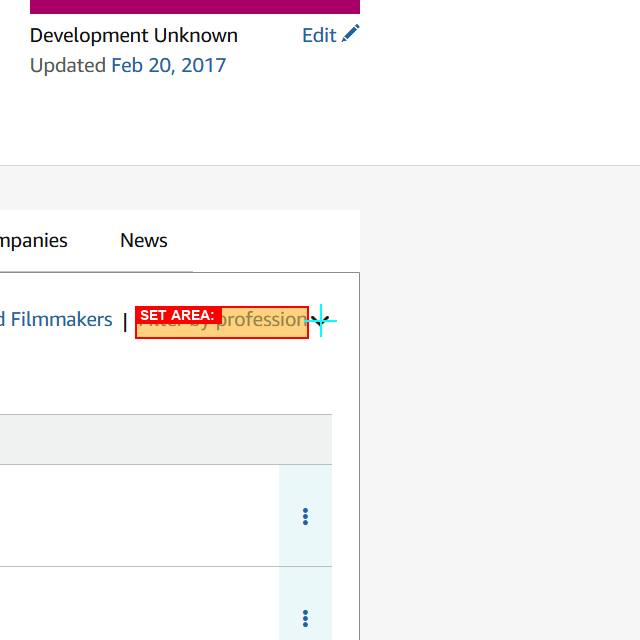

In [820]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASV9XAAAAAAAAB9lCiMBGFyZWGUWPgPAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBSzBBQUFBZ0NBSUFBQUR2NDI4U0FBQUx3VWxFUVZSNG5PMmFmMURUNXgzSDN5VWpNVnlhU09xWHdzVkVnMEVZV1dCRWVya3cxRENtMUZVdDF5cmRpZENUWVc4N25NUFNyc3l0VXRlVzBmWll1VTdtclRLOEZ2RmFhSGVDdjRBZUkxb1BMcmNzVkxOd1FRTEJZSTZZMExDa0tmRWIrcVg3STRFRVRFQVUzTnJtOVZmeStUN1A1L2w4bnU4bnovTjVQazhlK3ZycnJ4SG1PMC9FLzlxQU1QOFhoT01nREJDT2d6QmV3bkVRQmdDK3Q1akdIcHZlWU9DSTVIRjBBQmhWRmIxbEhJd1JuaXFYOFpmSHVCbEcybHIyZHJqWGJWWFVQeDY3ekVQZFA1VHRTbWZSYVl1T0JBQjJmT0xaM3kzRC9KRG1IcTFIbkNaazA1WkczK3c0MEhSdVBtVUwwc3I3c3JYS0xUVVdaOFJBMVp0UDVrVURVeDZid3pQQzhDeU5JZlB6cFdmRTRXRi9TVDJJc2U2VE1YWHBleFlkYUhJSmw4OEF1QSt2V1BveDdFMXZkcFlQZzhpa1ZQdEVTNkp4ZGh4TWVrWWNIa1RTK0ZIQndvekw0a2RBdDRJcFlvZlM1bTU5cTdsVVQ5VC9iWnRpU2F6N0pxSzM5VXlCTFU5dkxFNWN0akdZTVZ3YWhpbFJIR2VwTkFiYkY1SlRMaDJVQkpIek1zNmV5SmhYbTkxcVh4S3J2c0dNM0hJRDRFZXpsbk1RcHFJa2YyaEpOUzRtUDZEY1RxZWJqR0FTSEdhSUZnN0RHQURLT1c2M0FRQ2RIYzFpVEhjbXJhYWU2LzhoQWZicUJPbmFHYm5IT2U0aUkxa0VpKzc3UEo5K2VITVV6UmlKRlN1bHFVSWlFZ0JBT213VEZIeEsvSkF1dTNNU0RCYVhIVGxYaVg5UTB0enpUNnNUWUF1UzVJS0FjVW1IYlFKc05vZEI4K24zNjZIY3RnR2pab3dFR0t2WEM4VXhRYXdsM1c3YnVCMUFvRldreTZUNTdITW53RmkxV3A1QU1BTFgzRW1Yb1c5ZzhBc0FVZXQrS0JUNUhmRTRoNDA5Tnljd2U5NkN1eFpTeVN4M0FzeFlJMC9pZWhVdUpnNHM2dndqUmwyTThOSWZOOTZSK0ZnYWpuUlVtTDJmN2FVdm5BTUFURzhRcnY3SzExVjExcG5HV2daUGRMWWlRMFFEMEgva2hkN1dwR1RWRHZkTHg0MUtGeEJjUHdDUUk3cWlYMXVVcnVudkVkMTV4VTlXeVZqUXE3YThZM0hPN1dnNjlvcXlkcHgxOUkybkNsYk4wZFIvNUlYZTFuaEJGZGRXb1hhVDAxWVI4WW1ONVRJUkRRQkd6blZzdmtDVnZKajlneTVscWRwTkFqdWZLNnlSd2FsWEZ0V1lOSk16cXRSRWdxaXhMRU1VQ1dnNnZsOXI4V296ZEhYTHVnQUFxV2xEQnlXZ3pFMXZLY3NIWnZJYkxWaEUvZXZiRkN3QWNGN3QzSFhjYlBEclZJbDNiRDJiRzN2bnZDRk9kT20xREQ3UVUzK3U2S3JQSkFBQVpldTZ1UDIwM1RibFZ5TEtUUCtvTUpudGQ4ZFRzQ2VaY2FXdnp1UTNnMGhOKytTZ2hMM0k4OEk4Y09TNWt1TVQ5aE1uelJxd2l2Y0pOd0RBU2pFQXlseFhwYXF6MG5MMmJId2prOGVHdmFkWm1kOWx5RC81aUdwbUI3M2V0NmthTVFKdVhoSU4zRWRDSlZZR3ZTTjVTMXJIajNrY2VBei9VSlZlY0RUVmRValhQWldYbWxRUWJhbTFXdHJOS09aTnR4NFlhQjBIa2dSNWM0TmdtaUZUOVZlOG95K0tzeDZsdzNHaitwaTJhYWcvLytSS3YxWHcxTlZjSkNPWU9la0VCNUN1QXN6ZCtkVW1IZWg1ZTJRbFVzNksyN2FXZW5YbGdHRnJGVTMxc293UUpOVHNJNnpxL2dxdGh5OFJIVTVuQXNBcUh1QlMxaXJMQnloeGx1d3Z1VUkrdzJPNHJNdy9iU3Q2VzZWNldVYWd2L3F2WmtNRXEreGdSa0V5Rnk2WDQ5YU4za2s2QU0wSDZqb3JUZjU0ZXRVMllReGN6aThjR3IwbjZPU1E2bzd0cCt5MktFN0ozclRDOVN5Zk8xZlVXeWhhZ0R0VXd3ZDlZb21nL2xteG1BUEhkZldoZHkyNnEvb21zNlNZRnpRTytxNXRmbDduLzNwWEowT21TSm9tZ3ZiaVNiTUd6SXpNTk1YTUUvVzF5bEh3c3pLT1p3c0FBSVI4YjBwQnQ2cEJjME9EUkttM3pSVG42SisyNTNFV09BT0p0MlRVUE8xN3o4VFQyK3ZkelR1NlhMVnR4cnk5d3NMTnJOb3pyb1pMcHVJOTNsR2dVOWxHZ0J5Wm1CRlNIL0ZHUmJiUHptaHUxU3VVNDFCZnUycWdmVTlpVHRTMDY3S01qbjJpbWExTitZNUJOd1ZwYm5aVk5nRUE0QmFYczhqZmQxWVBHNDVwWlVjbHdweE1qTnd5UUFzMmYwMU81blJJbWordHZrb2hLYmx4YnlJYkFPaWk3SXl5N25QbHcrYXVjZVJOV0RVa0lCR1dwTVo2TFdGSGMva0FZTllNVWdDMzhLbEVQZzBBbDJCeGMrS0NPbUp1K05obUE2MmdlSHRaS20zYUhkeitqYmExUjlmMGRHSmV0SytkYUt2aTdPN3BDWlJ0M0grNXVWVHYvdmROZ0xmOGRTU04xZzdRRktuQ0FCbUx6d0ZJeXVtWDBHTVdDb0k3b0lsVHVXeGdSRDg2QWhEWndwd0lqR2lHcHVQWDJLYnhnQkZiK0tONVVvM1pzT0t6Qk1DVXZhdlBMMk96bVFGaFpPalNBMkRsWlJJQlZ2QnlwRXlBMGx3M2gxSnMwOXAwZ0Z3U0gzRE00c1p3QUZET0NZQVhKNDhDdEgxRkgvZmJKZ1A3OGFUcmFZRDlTTlduUFdQekhzN0hiM1paQVFieFpHckFITEpTdHEwSDRPcSs3cGN4WnIxdEpqdkF0OFdjRis0SjV3UUZvS0htL1lhbDBqZ0RsOGtIZEJRRkFGRkp1VW5hOWo1TDJ3REVDY0RBVUtzRC9Ld0UrU0tpeS90dWNEdGtrY0xqSUFFd1k2Sm5TVVVDRnVEV21lMEFMMmkzMjE5U0FIcWF6OFUzQjMwdU9sQnlVMU5qVWw1UXlkclVZb21nYkxkTUVVY0hJTjB0S3pGMjF3NFo4MTh5c3VPSUF6dlNDbVN4UVphM0NZOFRBSWRKekpMU2t2bE1hTjJETjgyUUJUY3NrS1hLRCthSHZqTTNjZHZzNlVOVWpId3BoMkRtL0NTVzNXZHB1TlJmbHBDb1U5bEdRQytSQ3hmdWQvOU0zbFYxUzdwSnNuL2RITmxLS1E4QTJFbUtqLzVzMTEzdXJieG82YmxxTExwcWxPN0kvaWlYQjVhbzdBK0NRdjIxRTgyR0pwT3Q4dDJPNnZNeitmWENrRk1MdDVsaDJlT0E0TklCRDZKVGNqS1hxQVE2dzAyWERzQ2pMRi91NHMwV05UYzBRRXUzQndKUjRkeDVueCt6WVJRQU15SDRIZ3pmZHVad0dVYWhDR2lqRzNZQkVBdUlVTjFpdUhUQTdZeUs4V2NNZHhMSkZXZG5OMmFESEZXVnZ0cmZmdjZhTXBlbkFBQTZrWlIrK09YMHc1T1dwcHJPY3IyaHJqZWpLbjEyMzJqbWFrQTM1aG9FQXRJNGQ5K3dHNEI0emNLTEFSN0FQWk5Zd21VRHJWM3FZUFhxeFVHU2diODhWK3RsRzRBY2FkSzBSRkM0bVFYUzFuTHFSZ3VKbkUxcElkK01ENG9NM0k4SDlBMVdJSnBRQ0VLMUYyWWwwd0IzeTVXQVZJQXl0bjNtQWVnS1NjaUxENGFFa0FLR3l6ck5YU3djakxqVkd6akFuVC9seUZoNVBCMUJ0NjJvK0t5MXdKVDl6QldYWCtqU1hid09SSEN6a2hjZUZQZTFIa1RSMlFER3pCWEhMMjU0VEZhU3pnVTQvR2hnM0ZaWjg2a3puV2tkb09UN1pPSlU4WUU0UytWdy82YmZPZzQvc1VZdTVwQ0RvNE0zTEI4T2NhcGV6RmpVQll5aFV5a2JJUFpueHZJWjduOTFHdXRNUUp5d0xDQVRKTElGT1dmNkdyb3NpT0RteWhiTUVPMi8vRlZ6emlaZXJvQkozckljKzhRMkF0ck8zZW5pMEIya1AwdlplYlczdFUyNXl5VThJSDBFWDN6ZWRkN1FNQTVDbW5KZ25yVm5WZG9CcWJGSVk5bjFmRXZKem9USGsyTVoxaHVETngxbmVqelB2TFpWTWFvcVArVVd5Mk9rNjJKalZyaDBGM3RQV0lHMVhERXNEYlVxNjFyQmhuVng0a2ZwanV2WEtwVnVSTEF5Z2d6RXpYdFcyUENxc2ZXOWM3Z2xla2Iwc0hOczlNTldrM0lLNGgxcE0yZWYrYm1QT0loT0tkdGt5ci9zVnFwdHRqaFBTVG9Bd2Y0Q1h2dHhzMEZyTE5VQ2tiR04rd0R3aWlzVWpKcnVTcjJsNHFURjF6ZUNKbjVzelNJdllPakZ6NlhnYkcvbGFkL0t3bDRycUQrMGNkWm1HU1hPVGU1cjd3UDdzWVM3OEo5YjlnVFZkTjdRN2wwVkl1azc5MmJYeU9hdEI3TWtOUzkveFhsYjIzREZVSFRGNEpXSjBpV056eVdIUHAwQ1lDcCtzYjMrL1k3U2JrZnRhWFh0dEpTL1ZrUUFXRUZ6bUV3VmV0Tk1hMFlNci9HUWpJQ2RjOXRWK1hkdExiUytCNUhNNGdOYmc1ZERCQnNieTFCNjNOaDZvYS9WSzRtZ0tYNHFxOG05cTAwQndFUEw4UDlFaW5RNHlCVWNObU4yUXVDdC9nSUF6VmV2dlRkQ1ZKRzlhT29hZC9XZ29EVC82SHduSG0zcHozdGJmZVZPajNQY1JTN09KSXAwT0p4VEFJSVdyVU16NmJLNWZDZkFPUjI5ZFdJQWMvM3lkd2tzMG9mQzZ3dnVZWWFYSTAra01UamNJQll6T01SQ2Z0d1Y4K2loK2xzMEZLSUZlWXM0OXRMWjBkeEZXa0JqY0xnTEpSL0JpR1FSMGNHZk1GZ2hGSWJ1RW94NzhNWEhnemszTGpkdXA5Vk5VbzYyMCtvR0V2S2Q0bm4yK0RCQitYYkVnYjNwN2M1S0t3QVE4WWxIdDl6TGIvVTd6bkxrQnc4ZTM2VTJZOWFOOWp4NDk5RzcyWEcvSzN3NzRpRE0vUkwrdjNJWUlCd0hZYnlFNHlBTUVJNkRNRjdDY1JBR0NNZEJHQy8vQld5cnhvNTlXTytXQUFBQUFFbEZUa1N1UW1DQ5SMDWNsZWFuX3ByZXZpZXeUWBBgAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBQkgwMGxFUVZSNG5PM2RmMXhWVmI3LzhVOGlIbERpQU1YQkpFQU13U1F3SFpVMFJjcEVLekduQk9lbTFNM1VHZlBIV0dwWjZqaU9acFphM3RUeGpqTDJWYlJIZ25VVnpCUnpSTFFNZFdTRU1FQVRnVkE0R0hJSWhRT2UrUDdCcndNQ0lnb0w2ZlY4K0lkbjc3WFhXbnVEdmxscjc3MjRwN3k4WEZwR3hEMS9hcUdhQWFnVlV2Ni9xcnNBM1BVNnFPNEFBQUMvUlFRd0FBQUtFTUFBQUNoQUFBTUFvQUFCREFDQUFnUXdBQUFLRU1BQUFDaEFBQU1Bb0FBQkRBQ0FBZ1F3QUFBS0VNQUFBQ2hBQUFNQW9BQUJEQUNBQXZlMDNHOURBZ0FBRFdFRURBQ0FBZ1F3QUFBS0VNQUFBQ2hBQUFNQW9BQUJEQUNBQWdRd0FBQUtFTUFBQUNoQUFBTUFvQUFCREFDQUFnUXdnS1pJbXYzcTFxRFBzMVYzQTJnL0NHQUFONVUwKzlXRUtKSGt2UWZKWU9CT0lZQUIzRXkydzV5cGpoVi9UZDU3Y0hhODJ0NEE3VVI3RCtETXNKQkhlbm1GaEdXbzdzamRLRzVCTDY5SGVpMk1WZDBQTk9KUy9LUTNQaHUySWo2cjRtTlpmdkxKMUt5eU85aEEwdXhYdC9aWWQxNzhuajVmbWNHT2p6eklJQmk0QXpxMlpPVVptMEpHcmpwVGE1UGRRNEdoTTJkTUR2QzBhdEdXcTEwM1pselU1MnFOcmRKWVcxQnh6ZnZNM2J0amltdWRYWEVMSDVrYUtjR2J2bC9xMzdTNlN2TDF1UmNsdCtTT2R4TDF5OXEzZTJKTWNYMTdyQ2ZQZXk3MGdmcjIvRnFhWnlqTjBwUldmRHExNWF0eHgwelNveUIrZ1ovakhlaFI1Y3l6Nk5PSHZTMkgzM3Y2dkNURit2a0UzSUdhQWJUd0NOaVlyYys5cURkY3IvcDgzWkI2Wk52Q2tNZTZQdlptbktGRlcyNmZFcGYyc25ONGJOMzV4c29Zcy9XNUZ6T00xK3ZaazN0Um4zdVJQRzNEcnBabUdVcXpTa3pOcnNEeC9rNGk0dWhrVjUyK3lkcys2L0ZxWkZoemhxeFY2VnRCbno3czdTTlpwQzl3NTdUQ09OUno0ZDd2WnZTbytuUTFjVlBvYy9OaXc4WTg3eGEvZjdwWDY0eUQyNHVjaTNvUk85VzlRTXZ5SGg0US9ZSno4NDUxR1J0OGZteXRMWG41cFNMV3QxNVQ3ZlFWRVhIYy9ONVFsK1oxQzBCOVdqMEF1L2hPaWRodkdQYllzb1JGeTNhL0d2NkNWYzJ1NnlXNVNVZU9aNWFJYUQwREJucHByVVJFcmhweXJ4cEZZK3VrdFRLdnBzU2dOeGpGeWxaWHVibmVZeHRSVTk3S2JjQlEzMjYxdW1ISUw1UXVPbTBYS2RFbnhoM0xNSXFWMjZDaHZycWFNaVVHdmNHbzBlcTBWbEppK09GNFhKcEJST3Y1bEw5WEZ4RVJ1YXBQUEJhZmNWVTBybjcrZlhWMXVsSnlNVEh1UklaUlJPdnBQL0RoNm82V0dQU0ZKUlduYVg0dTFYV0tpR1NrcFltSUZPVHJjMjFFUktOMTBEWi9KdC9zTktYRWtIb2lMaTFmcEl2YndDRytUbzFjdklvdmgyaTBPcTNWVlVQdVZhbm9RNGtoN1hoc3FrRWFPT1dxdmVMZzVUL0FzL0tjU3d5NWhVYXhzSFc2eit6Qy9xdzNtR3FmVjBVeGphMlRWcHB3aVg0TFNnc3ZwQi83NlpwSTU0Y0dlSGpVMldrMDVGMHphVHByYlRVV0lpS1NjMDR2SW1Jb3lNL3JMQ0lXdHJiYXlqMk5xUzk5Ly9sMHdKM29QWUFhNVMzb3d0ckI5bHA3djdVLzF0MVJ2RE5FYTIrdi9hL0k0cW90QlhFTEJ6cmFhKzFyL296NGUycDVlWG41c1hsTzl2YmF3ZXN1MUtvZ2RXa2ZlNjE5NE1ic1JvOHRMeS8vY2QzQUd3NHZPTEZzUk8zeW5zR2JVcXE3OHVPNmdmYjJubi9ldERiWXk3eU03MXVIQzZxSzdQK1R2ZFkrY09XdWRjRmVadlU0QnE0OWRueHRhSzJqUFA4Y1UxelQ4T0VGQTJ1MXF4MnhMcVdzWWwvTVpIdDc3WmhWVWYrWVV2dGNocTFOS3k4dkx6Lzg1OW9IMnRkL1lSdTU1cFZOMkUvWmIzYWFUblBDbzk0SjlEU3Z0dnVVL1ZYbnVmOVA5bHA3KzhsZlZmYy9abkozZTYxOTk4blJCZVhsNVJjKzl0UGFkNTI3TFdyQjA3Vk8yZlZQTWRVWHFyd3NOK0svYSszVk92b3RPRkJRWGw1ZW5oc2VaRyt2N1RvdnZxYUh4K2QydGRmYTIwK09OanVmai8yMDl2WURQNzV3MDB2VURtVHVqSENmdEdYMHpwOGFMRkdhc1duUkZ2ZEpOWDlHdlBlNS82UXQ3dlBqTW0rbzRkdS8xeXJwUG1tTCs2U0lUUTNYWFNYeHozV1AybnZvRHAwZ0FITnFub0syNnV2dkpTS0hqaWRXZkQ2N1B1aTU5YWxkZ3RaK2s1Nmp6OC81ZnRmY3ZuSjh3Y2g1MzRrOE5ubUdxOGdQNGRIbU56NFRJc016UlVaUENlM1c2TEgxT3I4K0tIRDE4ZXR1b1d0alQ2ZWtwUDVuMTdJQWJlN1hiL3FOMzVaclZpcDM2NXZoOTgyTStDWWxOU1hsOU82bC9sckoyRGcyZEt2ZXJNaUpaVzlGZWI2NUt6NGxKVFhsdTdXak5ITDl4TUpuUnE2VjBQQ0RDYWtwS2FkM1QvY1N5ZDI2UHJMaW9PdHA2NTRmdSs2c05tanRkeGxaK1FWWktWR3YrOHJKUllFTFQ5UlVlZVRkMEkvMUl6NnE2RmpzeWxFYWtjU0ZIeDRRRWErWHQ0Ui84a0d3VGtSMHdTdTJoSCt5SmZ5VEQwWTQzZTRYb21UenJDbEgzV1pHZkplYWtwTDZ6WTRwRDRzWWRpN2FXdDh6NDRZRFV4NGRIMm5RQm0ySzN6UmFXN1hWdUdubTFEaTN5Z3NWSHpIWlM4U3dZMUY0NVJlckpPWjF2eW03OWRxQU9aVUZQcG5vZGoxdFhjaWo4NzRUMFFVR0R4VXhSc1VrVkZXV0VCTmxGQkdKUGxwOVRmUnhYNmVKZUlZKzYzYlRTL1FiVUJ5NzRjanliSEhzNGI1OTJlajRWYU5qWm5rTU1oUmxOVkRhNHdtZkRhOTRqTkdLU0tjeFkzMDJ2T0t6NFJYdkFQdkdtMkRzQzdTaWxrejNoa2RqRmFPZnF0SFkvai9aYSswZlhYcktyTUN4ZVU3MjlrNXZIUzh2TDgvNVI2RFczdDUzZVdyMXp0Ti84OUxhMjAvY1dYelRZMjhjQVZlTTZrYjhJN2VtZkZucXlzSDJXdnV1YzQrVjEzdEllWGw1K2FsbHZ2YjIyajdMVXN3cXFSa2FsdGM3VXMvZE9zYXMycSttYU8zdGZmOTIydXlZNDNPN1ZnOEJLNGVuVVdXMUd2V3NWV2Nqbzl0cXR6WUMxZzVjbFdKV29uSm00azh4NXRkcThsYzFZOStKTzJ1dVcrWFk5TU5VOHdvaS9zdnN5bFEwMFhYZVliT1RLb2llNG1SdnJ4MFRubE5lbnJQbHVhclJiWFdGSWNIQjlscXZaWldYcVNneTJONWVPMkpUVGxNdjBkMnRZdng2dzUrcUFlaFBjYU1uYlhHZnR2L2I2MmJIVkd5c2J3UmNzWHZUL0NZT2ZNc1ord0t0ckMyOEIzeml3QzRSellqQXZtYmJkRzV1SWlXR0FoRnhtakFsVUNSalIyUnE1YjdFcU8xNjBVeWU4cHpWVFkrdHZ5M3hEeDJycTluVzBUTm9uS2VJTWU1RXcyOEw5dzBNMUloa0hqaVEyVUFCblp2YkRadWN1b21Jc2FCQVJPUjRiTFNJSm5DRWI2MWplbFR2cjZReHY2ZXJ0Yk5yc0VOM1NFY3I4L3UxVmwyMDlaVDUrY0JNdjhxeGIvZ0x1cnA3TzJyTUs5Q2FWWkI3OUVDcWlOWEx3ZjVtSjZVZEZSUWtJa2ZpVG9zNFBUVjZvRWpxMTBkeVJTb0h1ME9ERm83MkYvMkJ1SXJyZkNRbVJtVGd1REhtUS8zV3ZrU3R6dllCaDVEK2ptWi9IQ29lYWM1THlrc1dzZTNuTnVqbU4zR2JnYkV2ME5vVVBZVmNaTWdWRVUzRi81NEZCVVlSQ1F0MENLdS9jSmZSd2FNbFpzL095QjhXTEh4WTVMdHQ2L1RpTm0reWY4Y21IRnRYUlhtZFUrMGM4WHJZVnlRdDlVeWF5QTB4V2tubjFrUGtoeEtwNS9XZXBqVnNNSXJJcG1jY05qV3pBbVVpWjQ0WGtjQTE5YVZ2bzBvTU9TTGk1bHo3cUk2K2ZSNld5QjhTMDg1TFlJOHh3ZjNmUEg0a091N3F4R0JOZk53UjhWb3kxTmNudzBsV3g1MG9tZUZxZFR3MldtUkE4T2hiYS9kdTU5SzM3NHI2bm9JdXVXb1NFUmQ3bXhab016dnNiZElYYUcyS0F2ak02VlFSR2VoYkUzZTZjU3ZmRCtwYXU1UzI5MUFSRWJFS25qSjU1cDZ3eUYxcEN4LzJQTDRydkVUY2dzZDZTcE9PYlpybXh1b3QwZ1d2V0RtbXpvMWJyVmNUbDhWUXhTdkFQeWMyTG1ieHdwam5OZ2JXTjBLK1JjYVNtcXV0R3pOdXdMeVRCMktPU0xEZGtXalJ6UmppSm4wRHgyaFdiL3I2aUx4Z0Y3bkZLUDJEeDNTNy9VYlJpT3l3ei9NbnYvZlN5TThqaCsydFdBYUU5QVZhZzVJQTFvZHYyaWtpQTU4TmRCSVJjWExUaWVpbDY3TkJRUTExWitqa0dhNWhxN1pFSnI0ZEdMbkZLUDJuVDNtNFlrY1RqcTJsb254YVdxWUVtaTBVbFpnUUp5Syt2cDROSG5jOTdmUVBJdUxyVm5kNXFhYnEyazBub3BkdVFVR2ptMWxEMDFocjd4ZVJ0Tk5wSWoxcTcwazRIaWNpUGIwYUd1TTN4SGZxcnExUEJQZ3QzaG5pWnhVUi8zSFRNOWlwbTV0SVdtcGE3WG1GcTRuSHo0cklRTThlSWlKT280TUh6ajhSSFhzaXNVdFVpV1pNWUY4UkdUQmlyR3phZGVENFZHMlVzZTc4ODIrWnpxR1RTSEZ5ZHI1SU05OFNybC8yK2QxNzA1ZG55L2xad1ljbGN0aGVHOUlYYUIydGZnLzR1dUg0MHBDWlIwUzBrNWROcXBoYTlQVWZyUkhadWVsVGZjT0hlUWFQZHhOOWVNUkhrZUZHQ2ZyanhLci9sSnR5ckRuZndMRWFrY1R3ejlQTXVwUVk5YmxleEMwd3dDd25ycGVZRGRURXNEc3NVa1JHQjQ1bzdrOHN2Z0ZqckVRaU45VjYxcm9GNkFLZkhTQWlrU3ZYcDVvUDY2OGJvdisrTGxmRWJXeVExNjFYNmpVek5uNkpyK2kzaFF5L2hTWE1ySVlHK1l2SXpzaG9zME1NK3lKalJHUzBmK1c0djl1SU1ROUx5YTVWeS9icFpleUlnU0lpNHYvVUNESEdiZnA3ZE81dmIvNjVFUm9meDM0aWtuUStxc2hzYTRucE50ZFpqZjA4UFZsRVRpZjArRGpKNVlYZzg2UXYwRnBhWVFTY0ViRjBWbXJGc0VtZkdQVjFvdUc2aU5aL2Jjd0hBNnNhOTM5dG9lL21SWEd6ZS9tZCttRGhDLzREM1VwT0o2U2xIZG9XMy90L3dxZFdocUxYeTlNSHJueHozZEl3a1hHaHo5VThPWFNUWTIyMFRpS3BQNFRObTUwNmNQVEN1VS9wQnI2OU5YakgrTWlsSXdNdkw1Zzd5bFB5MDZLWHZ4bWVLZG9KSDh4OTJLelhaOS8xZXlRbWRQcVVRRmROenZGMXF6YWNFUEZkdG1qY3pSYjRhTmpRNlF2N2hpMDhNc3ZMNy9qS2Q4YjVEM0l6SmlhbS9uQWcvSVR2MnEyVG16WXFkWEo2U09TSHRKVi9XcVNaUGxET3BMbTlPaWZ3aG5oeW1yUjIyWTdIRmlZczhuc2txcUwvOG5OaStEOVd4NXdWMFk1YitWckRvL3hHZWMzY0haVWRNR1pqMkpqbm5lSy9uT1BWbEF1aG03aHlTWmpmNHAyaHc0M0w1cjNxMjgyUWUzVGJ3cFVIUkh5WC9iWDZTcm9GL2NGejRlSURNWG9KZktQeXJvSFYwQ0IvbVJYNXVVai9EMzZEODg5WkNRbno5WW0xdDFtUCtrTkF3UDErN3d4S0gzZk1NSHZCRjk4SHV2OU9hOHBLeXR4MHFpaXZzY29jWE80WDBSZHYrc2RCVGFDRFpCcGNuZzZvL1NaUzBxN1RWWDg5blRBNzNtZU4zNTA4RndDTmFJVUFOaWJ1M2xiOTM0bTJtMi93SHhjc25ETEN6ZngvOEI3VFk3N1JUQWwrTTNycm02RmJxelpxZktlRW15MmgxMjNpbE5Gdkh0OGpWcE1tQm5aczhyRzZjUXRucmd0Y214YXpOU1BIYTg3Y3AwUzBJelo5czhYcTl5K0hiM2d6WkVObGNhK1h0a1N0R2xFclUzcE9YL2JVa1dXTHA0WlhWamhnYm5URWpKNjNjeDNjWm56NW5XYnFtSGw3dHMxN1pWdE5SeWNGTlRuVXJZSVhmUng1ZkZiTXlmWHpYbGt2TW1EbGhEbjFsT3JvT2VPTC9USXpkT0dlRStHTFQ0UlhiWFo2Yk03YThBVzNjUk5YNjc4aU5zTHdhTWlPZC8yZWxmZ3Y1elNsMjE0emQ4ZkkxTkRGMFF1blJWZHUwbzFZdG0zakRMUHBjYmRuUTcwV0wwb1YvNkNoVlZYcWhnWStMSEUvL0Vibm53c3Y1VWRjcXJQTjJtT01CTmhiOUh0bDlHYUxtR2xIaThLK1NBb1QwV2kxYzJiNVpHMUlDcSszSWhFUjY1SEJYZ0dyVTJPenN4ZC9raTBkYkpZOFVXdDMxdWNwVWR6eEJSUzVwN3k4WEhVZmFwVDhyRGRVTEVSZmU0WENsamkydW56TmVwWVZ6cS8zNjc4bzllR2xwNytaN25hOXhKQmZXRkt4OHVJdDlhWVJsYXM1U3JQWGtpd3g2QTFTZDIzTytodktQSDA4emFCeDlmWHpkTk1xWEsreFlqbEphYzZYRmZVb0s4b3JLaFZMRzBlYlRrMDh3bGlVWHlpM1VCNUFLMmhidnd6QjZyNjZ5d2kzM0xGTkt0L1JTcXV6dWdOUC9wcnJvblc2dlN5MDBqYnRUTHRvblI3MkQzcjQ1Z1ZibkpXMnNmV2xjYXNzYlJ4dnNxQlZYUm9iaHp2eDJ3a0IzRWx0WVNFT0FBQitjd2hnQUFBVWFGdjNnTnVFaXZ1KzNLMEVBTFFrQWhnQUFBV1lnZ1lBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRSUc3T29EejlyLzMyaDludkxzL3QzV2J6WTFaT3VPMVA3NFhvNy9qTlYrS24vVEdaOE5XeEdjMTUrRFN3aXY1ZVVXbGpaUXdGdVhuWFNreU5yTnpJcWJpd2l2NWhVWlRDellCQUw4WkxmcnJDUFAydjdmNGkyem41eGN0R0ZuMzk2ci9aL09NamZFeThFL3IvcnR2OCtzdnZWcFFVSkRmNVdwamlkQUNUTmV1NUJjVWRMbFdWdS9lVXdlSGJjdXJaN3ZPZmR0OFA1ZkdhLzYxTk05UW1xVnBMRVJ2Wkx5VXNEb3NOZnhDYVdYc2FheERYd3hZTXNUOHQ4K1o4bzRlblBScFRuSkZpUTRXM3YxNmI1N2ExOUdpaVMyWUNwUGkvN0lqUGVwUzVZWFdhTFZ6cGc2ZjNNdm0xcHNvellyL2R2a1hPV2ZLNUtIQWdNMmp1bFp0UDdQOGpjVDlEVFJmdXlRQXRCTXRHc0NOQkdUWjFmeUNBcmxhZjRhMWtKTFlGWk0ySmd4K2ZjZU1BUzNZU2xscGxxRlVMQzFjT2pjMTMyNUw4a0gvRDdQek9saDRkSGZvZDc5RnlXWEQvZ3ZGNFovRUdDeWZXK05YR1pCWnU3NFlGbDBzbHAwRytXaGROS2Fzcy9uSFRpYjVaUmZGTEJucTBZUSs1c1hzOGR0aEVFdUxmcjBjUFd6RWtKMi8vNUpoK2VxdlpOSHprMTB0bXRxRXlaQWNlM0o1VlBheG9zcHFiWnZ3YzVQaFdtbGhtZGlXTk9PNkFFQmIxNklCM01ia0Y5ejVTZU9HOVBZOVBNdW5OUm9xTW1uNysreWMzTmZGc3VLektTdDY5N0JkUlZIUmlYUDhCcnVJeUxXRTVWOFdTd2ZyZDk2cHlrdVRZZi9hUGRPUzBoY2Y2TFY5MU0xL1RYdkpOUWw0WnZDYXNSNjJsV2xiZW14ajVJVDQ0dVhScVpPbjk1YW1OWkcxS3lab2I3Rm9yTWM4MDJ0c2NjcWtROFcxRytuOXpvZTkzNm5Uc0NsOTlWdEgxaHRzUW9jdy9BWFFEcldOQURhVlhmM2xxbGpaZGJHU3N2eXozNmZvcjBvWFhTOXZUd2ZMT2dYTHJsMUkvVTkyZ1loZDk0R1BkTHV4b3JLckJkbnBaN0lMUkVTNjZIcDZlenFhMVpDVG5TMGlKVmNMQ2dwRVJEcDFzZXRjdGRkVXBqK2ZuSlozVmNUTytWRlA5ODZXZGF2TlNFdklMaEN4YysvbjdYd0h6cmM0NzJ6NnFjdEdrYzRQUGVydVlkUHB4aUxHeStuSFVncU1vbm13bDRmMy9mVVVxT1FYR09Obi90bkNwWitqOTY2aTVFdUdIMFZjUlBMaTB2Zi9LclordnRXalZiSFFqZ3h5ZGtuS1BIWTRKV3VVNDAxbXhVVmN4ajYzdWRhR1RvUDZPRWg4bnZ6MGMxYVRtN0R5ZE44OHdEdkExVnBFc2o1UHVWbWJJaUxHYjVMWFh4RmJQKytRKzV0U0hBRHVNbTBqZ0hPL1hEUTM0dXF3Q1NQenY5eVJWRkM5V2ZmVWdoV1R2THRVZmlwTC83L0ZpeUl2Vk0xYXI3ZnM1dTF1UGpsWkVMdmlqWTBKdGFjcjdZYSsvdUcwQVYxeXYzeHI3dllMRlZPZXB6Yis4VFVSRWFtYWk3NmE5UDhXcllySnJwa050K3orNHZMM1IxZmxiTm1GTDVZczNuRytlcmVsczAvM3E3ZHhyb1duRDQ3YmtIMnVwcm40ZmtIRGQ0NDFpL1ZmRFdFcnRvZWZyWjZoUGVuWXIrK0I2VDYyVFd6Z1dtbWhpT2hzSGhJUk1aMUtLUktSZ0Q1ZXRjbzg5RUNBSmpOY241OXdUVnc2My9JcEdLK1Zpb2c4WU9mUzVDWWNmZm9IM0ZvamVSR0g4a1U2aFE3M3VubFpBTGdMdFkwQUZoR1Jnc01SUi8xK1ArZTlBRSt0bEdiRi9tTmR4UGRmdjd2QytlOUxSOXFKU05tSmpVc2pMNVRkNnoxK3h0UW5YU3pGa0gxMDMvLzc3TERaOFVaTDU1RVRodlQyZnNURlRrUks4NzdadkdwN3dwRnRlNTRaTU43cDBUOU1zN3Q2UG1idDNyUGk4ZXpNVWQxRlJCeDdpb2hrN2ZyYkJ6SFpuUi85NDk5bURIMndzK1FuZi9iaHUzcytYYnk1UjlpazNpSlNkdndmeTNhY0wrdlNPK1NOS1FFUGF1UksxamN4V3lMKzFleVR6RHd5WVYzMk9TdUhGZk9IUHVkaUl6K2ZXL2R4L1BybzJNVVAvV0dKVDlYdzhYTCtNV2Yzell1OHZiVlNrcG04T0N3OTlsVEN0SDFkbXpKZExHSTZkaWduUzhURng4MUZSQ1FuSzFkRXJCOTVzRTR4R3hldGlMNVVmMFhrbGdNNEx5TE9JQ0lqSC9XUWxtcEM1SFRDNmt3UlY5ZVhIcnIxWXdIZ2J0Q1dYa055K2YyY1A0OGQ2R1puWjJlbjh4bTc2SzFuZFNKcGUyUFNSVVN5bzNkK2MxVTZQemxqd2ZNK2puWjJkblp1M3FQL09QdDU4L2xUcDhkRHh6ODd4S2U3bloyZG5aMmRydWV6b1U4NWkrVHA5U0pXem4wSFB6N0VTeWNpb3ZNY012anhJWU1mSDlMVFRrU083NDY0WUhJYy9kYWJUN3AxdHJRUVMwZnYwTkRBTG5MdDZIZkpJaUlYdi96czIydlNPZUNOdDhjKzRtUm5aMmZuN3ZQc0g5LzQvYzFub2M4a0RudmpzNW8vbFc4V21XSjNwU2YvMm1uNnJLZER1bXMxRmhZYW5kZWM4VjF0eGJRNy9sek5zVHIzZjg0YUd0RGR3ZEhld2FYUDBNMnpuRjFFanNVa0pqZmhFaHBQeHN5T04wbG54eVZqWFJzdGFHM2JXVVNLdi8rcENaWFdsclVyZG5HbXlBTWU3L2hidDFBVElzWDd2ODRwRkl2UXNYNU4rYUVEQU81R2JTbUE2K2p4YU4vT0lubi9TYzRWS1VoT3lCTHBQT1R4VzNxdzZlYkQrK1R2L3lQU3VXL2ZIbWJiN096c1JLNWV1eVlpQlVrSjJTSmRCai8reUoxNW92bmNvUlFSamNNVFBjMnFjN0IyRVNtODF2Q3JSejBmRE5DSUdQS1BYYnBaOVVWSmIyM0p5eE9MMEttQkFUY1pkRnBiV1RXNTErWXlqN3oyWmJGMHNGa3hlL0ROYmg0M3R3a1IrVEYrK1JrUmUrZVFQcTN5SkRrQXFOQ0dwcUJ2WUdkM244aTFzbEtUeUxWclYwWGtQanY3UmcrNG12cmwvNFovbVhheG9NRFUyZTVlbmU3ZUt6ZHI0dHJWYXlJU3MvVEZtUG9ydkhaTlJPenM3VzY1Ny9VL0JWMXFNSXBJenJoWHQ5NUtYUlZ6dVNLL05scXFLSFh4WHhPaXJsbU1uQmhZTTV2ZG9IeDl2b2hZOTN6Z1ZqcVNHVDlwWlhxeVdFK2ZFOWlFQjZPYTFZU0lpT25Zd2V3c2tYN0R2TDF2OVZBQXVIdTA1UUMrTldXbjFzOWM5YzFWUytlK3p6dzd4TVd1TlBkc3d2R212WGJrTUNEMHhZRjJ0YmQxY1huMGp2ZXdrdFpoeWZQT3V0cmJiRjA5YnF0T1UzYllpdmp3SytMOVRNQ0dKOHhuYmJ1Nk9Jbm9pODlkRXFrMWIxNlVaUkFSQzhkN205eEVVZExzbGFteDF5ekdUSDE2VHEwbE9PNWNFNVhISld3OVlSS040NHpoVEQ4RGFNOWFOSUM3ZE9rc0l0bloyU0oxWGhrNm4vYTlpSFJ6Yk94bXF1bGk5a1VSNmZhZ2swaVpuVTRrKzJKMnRrbWM2eC9kbFIzNStwdXIwdm5KdVN2L1dEbnlmTnhMa285blhHdTBoNDUyRGlMNW92TjdmR0I5MWVvY0hFV3lzN012MXNtVzVySngwWW9ZUkRlbzc4aW16NjJhOHIrL0xDTFdMZzI5RFd2S0RsdHljUGtsOFg1bWVQUUxkZnBwMGR2RldwS0tqNldrUzMvM21zM1orbE5HRVhzSDc4YW5GS29WSmMxZmtCQjF6V0xNMUpyMVBlNXdFMVdTbzg3dC8xVmNobmpmYkJZZEFPNXVMWG9QMk01dlFFOFJPZnJGcm16elZZOU1CVWVqRHhXSTZBWU1yQlVYcHRKU3MySlhqeDQ2YWhMcE43Q3ZoWWpWbzQ5NGlKaSsrZGRSczBBMWxaWFZsTmNYL0N3aTluWjJaaFZldjJrUHUvZDl0TFBJaWVpdkMrcmRiZW5qN1NraThZZitaWjdqWmJlMlZLUVoxOEc5TEVUeXR4Nm9iNjNLYXIrYXpKZGJMb3c3SC9XclNHL25nSG96MjVRWHRTWjJlYlo0andyWVdUZDlSVVJjaHJrTzZpQlozeWJ2TDZyZVZoVDdlV2F5aVBlZ25oVnp2TWJNTTdFcGVRMnU4VngwYnZXS2hJZ2lpekd2akw0aGZadmFSRk9aVWlPT2xvcllUQTVzL0NFeUFManJ0ZXdVdE4zSXFlT1B6TnVSRWZIR3pJUW5SenpoN1dRcEJkbEgvL1Zsd3NVeXVmZngwS0R1dFVwZjNEVi9abkpGc1lLek1kRmZueFdMN3VQSFAyNHBJbUkzK2crQlh5eUxTUWlidStqQ3N5TjcycFhtSmg4NkVKdFdVSDJ3OHlPOU8rL0l5dDYvWlpmM2xBQmRZZkxSdmJ1K2lNK3VWYi9PVVNlaWo5KzIydm1xbjdZZzdkZEhKejNWL1pGbmZ0Lzk4UGEwTFg5KzQwTEk4NE85SDlHVnBmK1luWjUwS00xbDZ2eG5uTVhoMmZGUC9kL1NyLy96ajdtTEw0d085TFFyMHljZDJuLzBiSUUwajhXZ1o5MjlUNXc3RnZsVllMckhuTUVQOXRPWmtuLzgrVnhTNXI4ZjlOc1FWQldmbHpNRDMvZ2l4Ti8xQ1NjTC9kbjBkZDhXU1FmcmQ0SjlOZlhWZUdwcnpPd3pKckd4OGI2Y3ZIaEQ3UWVsSC9KZUVlZ3E5L2RmTWlvemNHLyt0QVZmVEE1MC81MjIrTjhIMDhNeVRkSzU2NUxLbDQ5TnNWK2NuSllrWTZhK3RNYnZ4aGJ5SS83bjIvV1hSS096c1VyNmRuNVNyWDB1QS95bTkzZG9RaE5ObGJjM09kd28wdHVkeFRjQXRIc3RmQS9Zd3ZuNVJVdGszYm92L25QMlg1Rm5xMStmdGZNWSs2YzNRdnJXbVdQc0ZoanFrL3paRnh2L1ZURVVzK3I1L0Z0djFieG8xUHUvUDV3cmYvdWZtTFQ5MjlQMmkxZzY5aDI3WU9iUEg2MnRxdFF6K1BXUlNSL3NQeE94OVBVSUVVdmRvNytmUHpsN2FkZzNOZlc3amY3anlCTXI5bWNmajl4NFhNUnlXUGRKVDRsMGUzYlpNbG45WVVUQzRlMXJxOThxdG5KK2NrRGwraCtQdkx4cXZzVzdxL2VmM2IvdDdINFJTOGRIbjM5N2V0Nkg2NXY1S3JEejRKM3paZmI2Yy90UG5wdDJzdXJWSTQxMTZJQ2FWM3BjL1BzdStUVmw5cjR6RVJWUFhXbHNwczhLckZsa3FyYkNYMHdpSWtWRkVTZUw2dTRyTTZ3SUZCRUxqeGVlM2lrSHArMHpoSDJSRkNZaUlyWVBPRytZUDd4ZlpaV1ozMmVLaU0xZ3ozcGJLQzRzRWhFeDZnMFJOOXhTOTlZVlQrL2ZsQ2FheHBTKzlYQ1JTS2ZwWS92Vys5TUdBTFFuOTVTWGw3ZEdPeVhYQ25MVHY4OHU2T0xvNmVuaTJLWE9DeW9YZDcweE55TGJKZVREOThjNm04cXUvbksxck5aQ2tlYktyaFkwc2xmS2ZpbTRhaEpMSzd1NlRWUXpsVjM5cGF6VHZaMHRMZW81VUVURW9vdmR2VGZVWFhhdDRHcHB3ODNlS3BQUllDaXN5TmNPMW83YStsNm9OUlVYRmhZYnBaT3R2YzJkU2FPeW9zcGZWbWhwNDJpKytPVzFrOU5tbnRuZjIrZUhPYmNkZXcwMUFRQzRRV3M5QlczVjJjN05lNGhiRTBwYVdIYXBkU08zanNiM2l1VzlqZTZ1ckwrZUVMM0pnWmFkN2V6dTRFTkJGaHF0dzAyZThiV3d0clZ2ZktXTFcyUnA0MWp2ODFBLzVoOFRHVG1nMXgySStZYWFBQURjb0EwdnhJRldrZldqb2JDRDQvakg3MmpZQXdCdXB2MjhCNHptY1JrYmZINnM2azRBd0c5UGE5MERibHpGZmQ5NmI3NENBTkFldFkwQUJnRGdONFo3d0FBQUtFQUFBd0NnQUFFTUFJQUNCREFBQUFvUXdBQUFLRUFBQXdDZ0FBRU1BSUFDQkRBQUFBb1F3QUFBS0VBQUF3Q2dBQUVNQUlBQ0JEQUFBQW9Rd0FBQUtFQUFBd0NnQUFFTUFJQUNCREFBQUFvUXdBQUFLRUFBQXdDZ0FBRU1BSUFDQkRBQUFBb1F3QUFBS0VBQUF3Q2dBQUVNQUlBQ0JEQUFBQW9Rd0FBQUtFQUFBd0NnQUFFTUFJQUNCREFBQUFvUXdBQUFLRUFBQXdDZ0FBRU1BSUFDQkRBQUFBb1F3QUFBS0VBQUF3Q2dBQUVNQUlBQ0JEQUFBQW9Rd0FBQUtFQUFBd0NnQUFFTUFJQUNCREFBQUFvUXdBQUFLRUFBQXdDZ0FBRU1BSUFDQkRBQUFBb1F3QUFBS0VBQUF3Q2dBQUVNQUlBQ0JEQUFBQW9Rd0FBQUtFQUFBd0NnQUFFTUFJQUNCREFBQUFvUXdBQUFLRUFBQXdDZ0FBRU1BSUFDQkRBQUFBb1F3QUFBS0VBQUF3Q2dBQUVNQUlBQ0JEQUFBQW9Rd0FBQUtFQUFBd0NnQUFFTUFJQUNCREFBQUFvUXdBQUFLRUFBQXdDZ0FBRU1BSUFDQkRBQUFBb1F3QUFBS0VBQUF3Q2dBQUVNQUlBQ0JEQUFBQW9Rd0FBQUtFQUFBd0NnQUFFTUFJQUNCREFBQUFvUXdBQUFLRUFBQXdDZ0FBRU1BSUFDQkRBQUFBb1F3QUFBS0VBQUF3Q2dBQUVNQUlBQ0JEQUFBQW9Rd0FBQUtFQUFBd0NnQUFFTUFJQUNIYytrcGFudUF3QUF2em4zWEx0MlRYVWZBQUQ0eldFS0dnQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZEZ252THljdFY5QUhDWEtTNHVWdDBGNEs3SENCZ0FBQVVJWUFBQUZDQ0FBUUJRZ0FBR0FFQUJBaGdBQUFVSVlBQUFGQ0NBQVFCUWdBQUdBRUFCQWhnQUFBVUlZQUFBRkNDQUFRQlFnQUFHQUVBQkFoZ0FBQVVJWUFBQUZDQ0FBUUJRZ0FBR0FFQUJBaGdBQUFVSVlBQUFGQ0NBQVFCUWdBQUdBRUFCQWhnQUFBWGFUQUJmVFl2N090RndYWFUzQUFCb0ZXMGtnUFhoTHo0MkppVEFkL0VKMVQxcFFSbWJ4M3M5MHN2TDc4MllxL1h2Q3RtY29hSmZBQUFGMmtnQTJ6cTVha1drajVlYjZwNjBwS3NadVJmMXVXZkQ1bjJZV08rdWpCdUNHUURRWHJXUkFMWUtYSnRla0o4ZjlaSk9kVTlhUThaSFUxZWRWZDBKQUlCU0hhTjNIM0FiTk5SWFp5VWlVbUpJUFJHWGxpL2k0RFZpa0tkVlJ4RVJ1VjVpeUMrVUxqcHRGeW5SSjhZZHl6Q0tWYzBoMVVvTXVlbW5qNmNaUkVTNnVBMGM1T3ZVcFdxWFdRMDFUWFJ4R3pqRTE4bXErbWk5d1NoV3RqcXRsWG1WYWNkalV3MGlHbGMvZng5ZFpYK3E5bFhXSTFyUGdJRmUydHFkYWNPQ3AwNk8yUmkyN0Uvcmd3OU92OGw0My94YVZWM1BrcC8xQmxQdEMxVml5QzAwaXNiV3lld2lsUHlzTjVnMFdnZXRWY2U3K0ZvQlFEdldNZlNWOFNLNjBLMFJnVi9QbXJJMXNhUjZULzhQVHNkTWRoT1J6SDhHOWw5VThOSUhNeSt1V3ZpMXZucS8yOVJkY1N2OHRTSWlrcnZqNVQ3VG9rdHExYXdML1RSKzdTaXRWTldRTWVualRacnd1UnRPNUZZWDBZNkwrTS9HUUsySVNOejhYaUU3SlBqVC9FMmpSRVRrZWxyNGkyTm1talVudW9rUjhSOVhGRFljV1JUNHd2cFVzeWUyZk45TmlKdDJsMHhmQi94dGt5RThaTWVpbVZ1REd4bnhwMjRkUDJiMmdacHJWWFU5RTFmMkNkeG85RitUVW4xc2JzVExYclBqcE9lQytQZzVYaFdicmgrWTJYTjhwSXlMMEcvMHU2dXZGUUMwWHgyaVpucUs2TU5mQ3BpUzRMdDA5M2VwS1NtcDMzd2NxQkU1dVdqZGR6WGxjcmUrR1g3ZnpJaHZVbEpUVWs3dlh1cXZsWXlOWTBPM1ZnWmtpWlhyakZWYm9yNUpTVTFKU1UxSmlGc1ZwQlY5K1B4MXFXWXRsV3llTmVXbzI4eUlpaVoyVEhsWXhMQnowZFo2SHpzeXhNd2NPZk5ydmUvcnUwNm5YeXk0bUI2L05raXIzeGJ5MHJaY0VaRVR5MExXcDFyNEw5eWRrSEh4WWtaS3l1bURXMmIydFc2eFMzVEhXUVd1V0Jzb0V2Zld3bWhEL1NVTSs2WUd6ajZRMjNkTzFIL1NjL0l2Wm56emNaQldILzdpeStFWFplRFlVQ3VSdUgxeFZUL3VsTVR0aXhNUk9YdmtlUFdQS3ljUFJJdkkrT0RBam5mN3RRS0FkcXVELy9RWi9pSWk0N1llL25qS1VFOG5uYzdwNFlselg5YUlHRlBUekFhZ0R5K04yREE5OEdHZGswN25OblI2MUJkejNFVGlQdHhVRWJGdXp5MWRPQ25JLzJHZGswN25wSFB6bmJSZ1prK1J6SXhhNmRwendlSERHMmM4VmRIRWlLVnZqQkNSMUROcDlYVHEvTFpGT3d3eWFtUDBJbjgzclpWWWFiMG1yRncyVk9USXpoaTl5UG5qY1VhUjBhL09IZXFtdGJMUzZuUnVmWU9DSDd1cmJoNXJ4NjFkNHkvR25UTVdIaWlwWjNkRytOS2RCaG14NllzRi9xNWFLN0hTUGp4eDFSSi9rYmpJci9YeVdIQ29SbVJmVEZ6Rm9QYjZrWmg5NGpWcWhKUEVSUitwckN6eFFGU0phS2E4T0tJOVhDc0FhS2M2aU03SjZZYXRUczV1SXBKcktHN3d1TDZCZ1JxUnpBTUhNdXZkcmFsMXY3WkNSeXZ6ZTQ5V1hiUU4xWjE3OUVDcWlQOG9mN01TT3FkdUlwSmpLQkxwTVhDRVZ1VHpXV1BXeHVYV0YxOTNCYWVYL21kWlh6RnNuN3JvdXh2MjZZL0UvQ0F5Tk1qOC9KMTBPcW44aWd3SW1xQVJpVDV3VWtRcUJyc2EvMWx6eDJna0p2YUlpSWhreE8zVGl5WTBhRkE3dVZZQTBDNDEreWxvblZzUEVTbVJ5cHVMaHVNYnAvby8wcXVyZzRPZGV5K3Y0Vk1qemplL1R5V0dIQkdKbTkzTHpzR2gray9JanVyOUErWkZ6aG5ZMFJDM2VLeFh0d2Y4cDYyUE9YODNab3ZialA5ZDRDV0dUWDk2TjdITzhpTkZobHdST1RMTHkrejA3VjdjV2IzZi83bFFLekZHSFVnVWtkUmpjU1VTTktLL3o4QW5SQTRjVDVUSy9MYWFNTnEvbzdTWGF3VUE3ZENOQTlWbUtJbVorV2pJZG9QMEhERjMxY1ErOXhremprZEhuTG5kU2dmTzNES3pYNTF0YmdON2lJaG8reStJeVp5UytQbmFoUitGeGUxWUZMSmowY0IzdjR1WjVubTdUYmF5bm5QV1RsMFh1SEgxakUwVHcyL2MrOWowOEQ4T3JMUE5iWUNiaU1pZzBhR2FzRTM3am1RczZubzhOazFHemZYdmFHVVk1Uy83b3VQT0wzQTZ1ak5PTkZPZTg2ODRwSjFjS3dCb2Q1b2J3TmZUVHY4Z0lyNXVyaUpYOTRSdE40aG1jdFEzSC9oWDFQZmNBSW1OVHZ5aG1YVTdkWE1UU1RQWWVRVTkxM0JPV09sOEp5eU5tckMwNVB5Mmx4NmZGYk5nWGN5MGp3T2IyYUF5QXhkdEROMHhQbnpCbjlkTk10dnE1T1Fta3Zxem5lZHpRVjcxSHRiUlAyaUNadFBtQTNIbm5hS1BpUDhhZnlzUnF5RWp2R1JSek5FTXAzMXhvcGtjTk1pc2ZMdTRWZ0RRempSNUN2cDZTWW5aVEtsaGQxaWtpSXdPSE5GUkpEYzNRMFJjblp4cTB0eFljaHVyT2xzTkdqRlFKUFhqc09OTnFNU3F4MUQvaXNud3UxR1hFY3ZXanJPU3VFMmJ6UjVHNitJL29yL0kyWFZoTjk0ZXJ1TC9WSkJJWFBUQ3lCanhEQnlpRXhIcE1UUklKM0dIM28zWlZ6My9YTmZkZmEwQW9IMXBjZ0NmZmRmdmtaRXoxKzZNM2gyOWFjSElnVk1PaVBndVd6VE9TcXFlOURtN2J0N2F1QXg5UnVMdTlWUDhIbHQyT3lzOWRaczRkNEpXREdHQmo0eGZ0dU5BWXFZKzlVaDA5T1ozUTRhOUdTTWltV0V6WDN4MzArNERpWm42WEgxYXpIdC9Ydm1EeUZEL1ByZlJvRUxhMFN2WGpxcXpUUmY2NWtTdEdEWTkweXZrdloweENSbTVQOFJGN3c1YjltTEF2SytyaWp3VkhDd1NzKytBNklMOGUxUnM4ZzBjcTVIZE95TkZFMW8xLzl6T3JoVUF0Q2RObm9MdU9YM1pVMGVXTFo1YWViZFNNMkJ1ZE1TTW5oVWZCc3piT3YzQUMrdmpGby90czFpa295NW8wZjYxWjBiTzNORndiVGRoRmZqUmZ5SnNuM3RwdzRGVjB3NnNxdHJxTlBTRHJpSmlaVmR3N00xNSsycjFMV3JyeEJ1ZjViNUxhSU5YZlJ5K2IxYWMyU2FycHo1T2pOQUdoYTZQV1RrMVptWFYxbTcrSzZ0UHN1T0k0UEVTdVVPc3hnYjZWbTBiR0JBa0czZFdQdjljV1ZFN3UxWUEwSDdjVTE1ZWZwTWk1OWY3OVYrVSt2RFMwOTlNZDd0ZVlzZ3ZMQkdOVm5mRGVvYlZ1eXFXUDd3aktoWlpGQkc1Y1pWS3ZhRmlUKzBsR051WEVvTytzSEsrK0RaTzg3ZHhyZENxaW9zYmZrY1JRTlBjWWxSMnROTHFyT3AvZ2JlUlhjMW1wWFZxSUMrc3RMcmZRSkxjbVV2NjI3aFdBSENYYVNPL0RRa0FnTjhXQWhnQUFBV2FjQSs0NHVhdWhhM1RmVXhrQWhEaEhqQndKelFoZ0FHZ05nSVl1SDFNUVFNQW9BQUJEQUNBQWdRd0FBQUtFTUFBQUNoQUFBTUFvQUFCREFDQUFnUXdBQUFLRU1BQUFDaEFBQU1Bb0FBQkRBQ0FBZ1F3QUFBS0VNQUFBQ2hBQUFNQW9BQUJEQUNBQWdRd0FBQUtFTUFBQUNoQUFBTUFvQUFCREFDQUFoMi9PWFpNZFI5d2QzdDgwQ0RWWFFDQXU4ODlLMWF0VXQwSEFIY1Rsd2NmL1AyWU1hcDdBZHoxN2lrdkwxZmRCd0Izay9kWHI1NzEybXVxZXdIYzliZ0hEQUNBQWdRd0FBQUtFTUFBQUNoQUFBTUFvQUFCREFDQUFnUXdBQUFLRU1BQUFDaEFBQU1Bb0FBQkRBQ0FBZ1F3QUFBS0VNQUFBQ2hBQUFNQW9BQUJEQUNBQWdRd0FBQUtFTUFBQUNoQUFBTUFvQUFCREFDQUFnUXdBQUFLRU1BQUFDaEFBQU1Bb0FBQkRBQ0FBZ1F3QUFBS0VNQUFBQ2hBQUFNQW9BQUJEQUNBQWdRd0FBQUtFTUFBQUNoQUFBTUFvQUFCREFDQUFnUXdBQUFLRU1BQUFDaEFBQU1Bb0FBQkRBQ0FBZ1F3QUFBS0VNQUFBQ2hBQUFNQW9BQUJEQUNBQWhVQm5CTys0ck5oYit3T3Y5U3NPb3paeDA2bUY1b3FQeDM3NUxOaGIzeTIvTlFkNnVDZGNpbCswaHVmRFZzUm42VzZJM2RhYVY3S21XT1hTaXMvdGVKcFp1M2JQZXlOenlidHkybjVwbTZmS2U5b1ROQnJXM3U4dXJYSHExc2ZmYmRscmsvdGZ3Z0EwTGlPSWlKaU1ocEtzd3dXeGwvckxaTVR2aUkyVEYvUGpwRVQvL0JPdi95SUR3N092eUNPUTB6eHIzaUlpUEdYMGl5RDZNdGFycy9OOG10cG5xRTBTMU42ODVKdHphbUR3N2JsMWJOZDU3NXR2cDlMVXV5SU5UbUZIYzZ1K09DNUVQdldQYzJycFZtR1V0dXJkMFBnWEQ0NWUwdE9zbGdNOG5GdzBZZzQzR3QxNTl1byt3OEJBQnJYbENub2luZ3VOZFQvUDYyMXpzRkNSRHdlME43UmpyVmpHZXNlZDdCemVHemQrYVlWTHl2Tk1wUm1YV3NnNXh4c1hEcUlXRmw3MkRaMGZISFV5cTA5WHYwcXRoazliVGRTOG83OUtyWisvYmZQZm5yRnRLZFhqTy90ZU9mYjRCOENnRnZUc2NrbHJXZThHVHpadVo3dEFkTW5OREZLMEh5OWZRL1A4cWxudS9QZzZFMkRHejB5WDUvZk1sMjZlMlRsRm91SWk3MU5TemJDUHdRQXQ2YmpzY3ppUWE2M1ZZV3hLTCt3VERRMkRyYVc5ZTAyRlJjV0ZrdG5yYTNHUW94NXlVay8vVlFpbXZ2ZEJ2VnkwSWlJbEJaZVNELzIweldSemc4TjhQRFFXSmpWMmNuVzNrWlRiNEY2NmhFUmtiS2l2T3pzVXo5ZEV4R3hzdXZuNCtwWVZXRjlTZ3V2RkJsRk5CVjlFeEV4R2ZXWng5SUtqQ0syRC9iczE5MUdZMTdTMHNiUnBsUGwzenRZTzJxdHpYdlNoT1phaHFtNHNMQzRwai8xTUp5N0xDS213aXY1ZVNJaUZWZTE4dUJiUHQvNmxlYWxuRHQxMlNoV2R2MzZ1RHRXZkJzWURYblhURkpaU1kyR3Yxdk1HalZtSHp1aEx4U3hkZTAxeU5Xc1hhTWg3NXJZMm1vMUZwWDExOVJqS3M0N20zN3FzbEZFODZDbnU3ZXVudDRhaTR2enJ1U0xpSG12akVXWnAvN3pjNkdJNXY0SEIvV3MvUVVzS3pwMzV1eVB2NGhJNTRjZWRmZW9PWkhxNzhsYTE2MytVMnV3a2xxblk5YU4ydC9TQU5xdmpoT1dSR3AwMm43RzVsZHhiUE9lU2FkbHpOU1gxdmpWdHp2bjVJUy9wR2YxOTNwZk1tZWZMSzVxSjhteHY4OW03N3o1bitVa1Z6ZTlMWG5Kb3VkRG5hdnJ0Sm56c3VPL1AwK1BMYW9wOE01MFg5bDNjblZLcVZrOS9lT205ZGFJNUIzY1BlSXpRNkg1YmV3T0ZpR1RuMXZoVisrNHgzVHU4OTJCZTR2bEFmZVl4VU50UmFRb2RmbTc4V2EzdXBNMHpoN1Jpd2Q3V0loSTZsL21Ka1QxNmgwZlZQeldodlRZSWhHZCsrSDNCaHYzN1pud3VTSFByTVdRYVMrdDZIOHIxKzcyNVp5YzhKZjBaSjM3NGZlR3V0eXdML3d2TVl1eksvNmVQM3Z1SGhFUmNkejh6NmNEcEJubmUyUDlJaUxHck9SSmY4NnArUnAxK0xieW1xZkVqL2c0cDdEdWdabnIvaHE3L29yTmt2ZWZENzIvVGsycGY1bWJFTlhEZFlWRDNtTHo3NU1lWHR2biszbFlpSWhrN1lrWnR0YzBmZDd3Unc3RlZud3ZWWHpYRmFiRVRscVRlYXJtc1lPVGpqMDl0czhaN0dFcGNpcm00ZlU1RmJXZE8vU3QzeUVSRWVuVDkvd3NIekZsUjZ5TW5YKzJlbTQvU1d3Y043LzdkSUNOaUVqaDZZUGpObVNmcTZrejNqc29NSHBzMXh1dm16emdjWGpaWUpkNi9pR1k4ZzU5TmZyVGZMUHZrSGlQSWYxM3Z0VGJ0dVowU2tOZjdLMDVlaVlzczZZYmpuMzZIcGpsWTM1TDRhOUxsbno2NmFkUFB2bmtlOHVYMjl2YjEvZDFxSFRseXBWVnExZEhSa2ErK09LTGYxMjh1SkdTQUpUckdML0liOTlYaWN0UHRtd3poU2RUVi9keFh6T3ZaeituVGlXWkNhOTluSjE4TWlrb3lUcjBXYitQQmp0cXBlaFEySkg1S1VXcnYwb05uZXhWZFZEUjZzOWxjcURmTzJZRmxxLzUxcVdYNjVwNXZjenFTZGw5cFhlSXZaUm9iRUxIdWc3MmR2UFFpa2lwL3R1VGs3N0lqNGc4R2VvWDRGMjNPNlp6bjM4UnVMZFlIbkRlT1grb2g2V0lLVHRzUlh5WTNtTGtpMFBmSCtKc0svbkhJbU1uSERvMzRaUDc0cXY3azNiR2Y3WG9YQjFDZWxtSXczMVdWMDdPanpUazJUdHVtREU0d0xtVHNhaFluNW55VTR2T2NkNHk3YUN4UGh1dTVXLzZKUHVVMkV4K3hmMTNJaUoyM3RLczgyMmdqWE1waHQ0aitzWTg2YXlWMG5QL2lwKzkxeEFSRnRQdm9lZEQrdlFLdGM5WnI4L1pueTAxZHk3T25vMjZJdExMTmFSdStsWTVuN242dXZPU2VkNVBPSFVTUThicWRVa1I1MU1uZkdKWDB5c3BEVnZ6bGJHRDljaitqbHFSZnZlTFpIODdZWFZtc25RS2VkRnZlait0VlVuZTdzMG5sNTg5RjdqQ0luNlJuNk5yenpXdk9PcFBwaTVPS25YeDhYaW52N1dJeVAzT0lrV3g2MlBubnpWNVArSDM5N0h1THByU2MzR3hFejdObS9SUmZQd2lQMGRKWGYyUDdITWRiT2JNR2h6YTIwR0tpZ3k1R1FsbG5VVGsxR2Nudy9RV2cwYjFYL0cwdTA2S0NuOHhuRW9wcmZmaUdFL0dqTjZXbjlkWk8zMWkzNWM4YlNwUDUrakpFU1lMczlNeGhYOTJ4dHZIZGZQTDN0NWFNYVNkZkgxalR2THBsSWhzSC9QYlBmKzNhNWMrTCsrekhUdUtTMHFXTGxuaTZsci9uRlZtWnVhaXhZdDM3OTR0SXA5Kytpa0JETFJ4SFIyN2U0Vk9zekcrZlhCNWZjODVteWxlOThGbjRXWVRkQ01uL3VHZGZrMXVSK2YrejFsVkl5SDd2cUhkcytkZmtERXZCeStwSENzNGhJeHlYSjZTVTNpcElFK2srZ0daTVM4Ky8wNmRBanIzYmZQcTFGT2MvSk9JdmJnTUdUN0hyRUhIWi91K0ZIZHc5ZVhpR3g0Z05rL2Y0ZjBxSXZOazR2Skw0dkxFNEEzREsvNXJjeHcwMFRmMDIvandVeG1ueEt2eUxIL1ZMdmx3ZElpMjZoTEVmM1ZNeE1QUGQyUjNyWWhvN0sxdDdRZTM0TU92WnhLSHZaRmM4N0hpRWVpYkhHUHQwYSt2aHlSOTlVbjJLYkVlUEtSdlFQV2VacHh2QTd4SERGN3pRbVZXT0w0d2VuTnhaTkNob3ZYNzBrTW11cjgwekdiOXJxTHd3NW1UWDZ3TWpPVDR2Q3lSa1g3ZURVK3hPcjYvZUhobFArMGRWdnpWWkhqOXpQNzRzL3RmOUJyWnVlclUvUWJIdk9KUlBZc2UrL0c1NUYrbDM5amhLNFpYZk9NNFRKNXZZMXg0Y1BXRmMrdVMvSmI0dUk4Y0lsbTU1eVJKYkYzY1JnNnBpclhzSTZ0UG02Ulg3KzBUdld4RlJEcDVEQjg4NTlzOTh5OWtIN29pSWRmMHA0d2lQdTdUKzNTdDZJbXR2WU9MaUVqMnFSOU5JZzR2UGUvbFlpRWlEbzQyRGlNZnFQZEVzc00vejhzVGk5REpvK2Ywc2FnNkhTbDVNeW5xV0hMRUMxNGhWZU5ZajhDQTZPQ3FDK2czZEVwYzVPeVU0dTkvRWpFTDRQbno1Ny85OXRzRkJRVjc5dXdSa1RVZmZuampPUGpLbFN1TEZpK3VLR0JuWjdma2IzOXI4Qm9EYUJ1VUxNVGhvTHZ4UVZFSGF4Y1J1VlphMHVCQjFqZmtUVVU5SnNPMStvL1ExSGR5WjNidERxcVR2aUtua3ZKRkxBTDZ1SnNWdEhIUmloaE5oVFZiT3VuTTA4alRJYUNEbklzNU1qOHUyM2czdklsanJqbm4yeVFXM24wY2JFV3lVaTVsaVRnT2R4L1pRYkpPbmEvNndTRjkzNmxTMFhSOTZmRkdiaWZYWnRQakNWZVJYL01QbmFuWlptdHJiWmJmNXc2bGlJaE55QkN6NTVvdG5FZjJzeFl4blVyTGJxaml2S1M4WkpGQlBqM01abm9ydjUwS3I0azRQekNvczBqU21VbWZwK2JWZXFIT3VaK25oVWorWDFZY09YYTUwWGU5cnZ4MFNDK2ljWHl1ajlrMXRQRjkybE5FaXI1TnE5bFcrN3ZVMnJhK24wM0dQZi84TzIrL2JXZG5aektaZHUvZVBXZnUzQ3RYcnBnWDBPdjFjK2JPM2IxN3Q4bGtzck96VzdMa2J5SGpnaHZySG9BMjRQYWZnbTQ3aWs1RkgxbCtLUC9jTHlhalZTZWRmU2Rid3cxRkxxZFBpeGE1djZ0NStvcEk0VFdUaUlTdjJScmU5TmJzKzcvL1l0N29UL01qdGh5TStMVFRJRCtQZDU3djYzM0xpZFZrRFQwRjNTek5PZDhtY3JCMkVVazJtVVJFT3ZjYTJ5dHAvNW1jZldmRnU2ZkkyZk5SQm5GNW91ZWdXN2hJbFQrcmxUVDRJMDZwd1NnaTFycmFBMElQVnh1UjR1VHMvRm9EU1RNbFYwMGljaXh5VDQvSWV2ZDd6SmorMDZrMW1iRjc0LzMybmZUMmNaMFQ3QmZ3UUNjUjZSZnNOejM5Mi9YbjB5ZThsVzc3Z09PTW9MNmhmbDNyQ2MxcnBZVWlvcld1L2I2VFJXOFhhMGtxL3ZHbmJQRzdoWDlMbHBhV29STW5kdEpvL3ZyWHZ4WVVGSHp4Zi85WFdsYTJhT0ZDTDA5UEVVbE5TM3Z6cmJjT0h6NHNGV1BmSlg5NzhiLytZR0hCSW5kQVc5ZjBBRzdqaW1QWDc1NTB5cVRSYVNjUGQzMUVhOG82bTdQNzhnMmw3clVKNkZBVWV6bG44ZjdzNkJmcS9BL1lhY3hZcjZmclRPeDExZzFxc0VVTHh5ZEd4dy9PanQyVHVDNDI3OWpSTTBIZnBqYjh6RmNiZEt2bjJ3eldJNS9xYW5zbUoveHc2cHllWHNueGVWblNhZm9nOTVzZmQvdkttalFwMGMvZlo4cERkYmJaOVhNV0ViSHRGYkJ6Ylg1eVhNTHlyM0tPblU2ZmREcTlYOUR3bldPZHhjWmp6dDljWDBwSjNCUjVMaUl6Yi9uR21OVmZWais4ZG5NTnJIVnpjOWJXMXFFVEptbzBtb3E1NkwxNzkvN3l5eThiMW4xY1dsbzY2ZFZYZi9qaEJ4R3hzN05idTNiZE02TkdrYjdBWGFHOUJQQzE1QjJuVEtMcHVubFpZT1VBYTBpMnBCMU1ybk5qVytPNFpFSFAxVzhuUk8wOU9NNWkrTTZ4VmZmZUhEcUpsSXE5NzhnaHR6aUUxVGdIdk9BYzhJS3BNQ2wyd3Byc2lPakU2WDZEYjNaclZyM21uKzlOL1ZTVUxDSk9OcFVYb2VKUnJGTVpwMFIyZjFzcXJoNHYxUTI4eG1XZnV5UWkxajNydjg4cWxUUG5ocUp6bHlUQXJFenloU0lSOFhadGNMME5uVU1ua2VMQ3pycWF1OEkzc25Ud0hqNTgrM0F4WG9xZnZUUjEvNWVKc1dPZEEwUkVPam4yNnYvT292N3ZsT1ZFckRrNFArVmNXTUxndWsrLzIxcy9LSko4dWVoSEViUHZoK0l6RjRwRnhOdXRPVk5KRmhZZC9oQVNZaUhsYjcyejRNcVZLNGNQSHg0eDhta1J5YjU0VVVUczdlMVh2THRzOUROUDMzUFBQYzJvSEVEcjZ5QWlZakkxK3dmenR1Sks4VThpY3ErMW8xbWcxSDlTTmo1cjN1czdwck9jaW82ZHRLL3lIcUczajRPdFNOU2hrL1V0K2RnVUZyWSt1b2RFeEhSMzNBMis3Zk90WWF4MUE3d29LaTVQUkViMjYxVzF4ZldsWVRaaXpOdTlMV08zVVViNjk3M1pFbFFtby9rOTE3TXA0WG9SZThlQUJsOVZkMytpdDRWSThlNmpacmQ3VGVuNy9sTXEwaW5BcDJ0RGgybDhIUHVKbkl0TFB0V0VyNWptZ1FkL3B4VzU4ZHZKc3V1Z0hwMmszaG55emoyZTZDN3lhLzZ1bzBVMUc0dVN2MG9UNmVEd1JPK2JOMXF2ZSs2NUp6Z2taT1g3NzN0NGVJaEk5c1dMRmVuNzBFTVBmYkJpUmNqNDhhUXZjQmZwR1BYNVZ6dmk4bzRWM2J4b0U5bDJ0aEF4SGZ0eXoveFRqcUhUL0c1NEJhaGxPRDh3cUhONjh1WE01WituTG5sU1c1aDhkdE9YNlZFM1RrRlhzUEZaTSs5YTRjclUyTWpZMlRhajF3elJTaC92R1Eva0xMK1E2disyNFoxbjNRWjVhNDAvWHZveEkyZkhlZTJLZVEyTWFFL0ZUb2kzR08rajYrM3RxQzB4SFBvaU9VckU4U0dkNHVGdjUwNjJJbkk1ZS9HR3IzNDN3Rzk2ZndjUnJZdTl5Slc4NVd1T0ZQYTMxcDgxRFhyRno3c1o1OXVBY3dkai9jNDZUaG5TMVVWVC9PK0Q2V0daSWcrNHp6Rjd6TXB4dU92SVhXZkNEK1ZJQjRleGZqZDkvQ3AvMnN6SWtmN09ZMTJ0amJrNTZ3N2taWW5GbU9EK2pYd1g5ZnVENzVqVENWSDdZc2NWdWMvb2Q1Lzg4dk9oTDgrRlh4SEhmcjR6R2hsdDM5OTNSci8wU2FkeXhyMnhlL3FZbnFONmQ5WG9NMzc4eWJEcldPbjRaWUVCbCtMbmJ5djJIcVRyOTFCWG5WVlI4bGNKbS9RaTNSMjhKU2Q4ZmJ5K3UrdnZIbnJBMjZtVElTMXhlV3l4ZExBWlhFOUREaUV2dTRjdlRZL2Fza2R5UGNaNzNGdDQrZEtPcU16WVg4VTdxRy8xRTkzTmNNODlIY2FORytmbDVUVnI5dXlFaEFRUmVlaWhoelp0M05pdmI5L21Wd3BBaFk2ekR4aEdqaGk4NGVmNGFmRjNwc1orVDNzRUpLWEdadWRIWExJWWRXZXFiQXFQR1pNellqZGt4KzZOSDdaWHhMTFR5QkdEVjJSL08vOTBBOFZkL1RiUEt3MWFtaDcxeVI2UjBXdUdPRTllSEtCWjgrM3lsSnpGbjFUOWVwOE9GdDREM0JwY3RWOGplVW5wczArbVYyOXc3T20xL1JXdmhvcTNFbnZmT2Y2WkUrS0tZMC9tNVQxUU9yMi9pTGhPQ1hYZXZ5SDdYRkw2N0NRUnk2N2JYeEdSV3ovZituV2FQTlZYb2hPV2YxbzVscmJ0N3JyNTlhRzFib2gyOWg3Yis4eitNMkk3b0djVGdzZGh6ck9taUMvUDdhOFlCMXQyR2pOeCtKckdiNnZiK0t4WmRGMzdVVkw0MFhPVGpwNnIyT2JSMzJmNzFONk5yaWRsSGZDbjBadTN4c3orMXJEKzA1UHJxN2E2ZFBkd0ZCRXJDME5tNXVLVXpPclNHcDN6OXRmOUhDVmZXMUswL0l1azlaSlV1Y1BTZXZLTXdQcGZhM1lkdW4yT3pONlFIclgzVEZURmxnNFdBYy80clJsN0J4NWw5UEh4V2IxcTFXdXZ2U1lpNjlldkozMkJ1OUU5SmVYbDdXZmR1NHAxR2NXaWNyWENacWhZUUZGRW1sU0p5V2lvWEh2TGJEM0xtOHBZOTNqZmhUOTRManY1M1l3ZXplcGtjNWlNQm9QUjZvWk8zdHI1TnF5QmhTY3JuQXJiUHU2WWhNNmVzS1N4NTdpVFpyK2FFRlc1VUZmRktxRzMxQ1d6cjBWRHE2TFdxNndvcjZqeWhhSTZCMVlzTFNraWRjK3I1aER6ZFQwYlVybmk2ZTFlNGZxY1NrZ29MeS8vWGIrbXY0OS9aN3kvZXZXczExNXI1VWFCOXFkaiswbGZFYkd3dHJWdjhqdW05ZEpvSFcvaGlsaG90QTR0OEh0MVdvS0ZSbHZmQ3NPM2RyNE5hNlFlVStydVV5YXhkdzI1aGJlb090bmFPOXhpRDVyN3RiQzBjV3hnYlVlTlRRTVZObnhJZlpweExrM0Z3QmU0cTdXWHA2RFI1aFFYNm91TkpzTytUMCtHRzJYUUdPOVdlaG9BQU80U0JEQmFTSDdFUjVYcm16cjI4Rm95NGk2WktRQ0Exa0lBbzRWMERYMTlxRWRhZ2FiV0x6cHNoTmZmVmprdmtFNjJOeThKQU8wQkFZd1dZcUhSdVFmb21sNitCZStWQWtBYlJBQzNQcmZKVVNuQkpvMld1QUdBM3pBQ1dBR3IrM1MzK0xvdEFLQzlZZEYyQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJUcCtIUnVydWc4QVd0QlRBUUdxdXdDZ0hoMEgvTzUzcXZzQUFNQnZEbFBRQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDaERBQUFBb1FBQURBS0FBQVF3QWdBSUVNQUFBQ2hEQUFBQW9RQUFEQUtBQUFRd0FnQUlFTUFBQUNoREFBQUFvUUFBREFLQUFBUXdBZ0FJRU1BQUFDblE4OGU5L3ErNERnQmIwVkVDQTZpNEFxRWRIL25FQ3QrbXlzVXgxRndEY2ZaaUNCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCUWdnQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGT3FydUFJQktwZW5menY0NDQ2UlI3blZ6QzN0anNMdWw2ZzRCYUVtTWdJRTI0dnlHOVJrbmpTSWl2MlJrdlBiWmVkWDlBZEN5Q0dDZ2JTak1UNzlXOCtublMvbS9xT3NMZ0ZaQUFBTnRnMjMzSjkxcVB2WHYyLzFlZFgwQjBBcTRCd3kwRWZlUG1lRm4zUHI5OWd6eDhYL2t6UkgzcSs0UGdKWkZBQU50UnBjZXdkTjZCS3Z1QllEV1FRQURiVVplNHNwL3BPek9rMTQrdmQ1L3hmYytDOVg5QWRDU3VBY010QkUvYmZnb09mS2lxYlRNbEhncStkWFBmMUxkSHdBdGl3QUcyZ1pqL29XQ21rOFhMK2FYS3VzS2dOWkFBQU50ZzhhaHUxM05wMjdkSERvcDZ3cUExa0FBQTIzRWc5TmU5dzd1WnRISjBzSzNuL2MvWDNoUWRYOEF0Q3dld2dMYURFZmZlUXQ5NTZudUJZRFdRUUFEYmNiVjg1SFY3d0UvMDRPRk9JRDJqUUFHMm9qTFVldmlWMmFJaUZ6Y0UvK3pwZTNmV1lzRGFOZTRCd3kwRFlVWC9wVlI4K2xrd2dYV2dnYmFOd0lZYUJ0c0hkdzcxM3k2N3dFSHBxQ0I5bzBBQnRxSUh0T211L1hYaUlqYzYrYjI5ei8wVU4wZkFDMkxlOEJBVzlISmZmRGZQeHFzdWhjQVdna2pZQUFBRkNDQUFRQlFnQUFHQUVBQkFoZ0FBQVVJWUFBQUZDQ0FBUUJRZ0FBR0FFQUJBaGdBQUFVSVlBQUFGQ0NBQVFCUWdBQUdBRUFCQWhnQUFBVUlZQUFBRkNDQUFRQlFnQUFHQUVBQkFoZ0FBQVVJWUFBQUZDQ0FBUUJRZ0FBR0FFQUJBaGdBQUFVSVlBQUFGQ0NBQVFCUWdBQUdBRUFCQWhnQUFBVUlZQUFBRkNDQUFRQlFnQUFHQUVBQkFoZ0FBQVVJWUFBQUZDQ0FBUUJRZ0FBR0FFQUJBaGdBQUFVSVlBQUFGQ0NBQVFCUWdBQUdBRUFCQWhnQUFBVUlZQUFBRkNDQUFRQlFnQUFHQUVBQkFoZ0FBQVU2ZmgwYnE3b1BBRnJRVXdFQnFyc0FvQjRkK2NjSjNLYkx4akxWWFFCdzkyRUtHZ0FBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVSUlBQkFGQ0FBQVlBUUFFQ0dBQUFCUWhnQUFBVUlJQUJBRkNBQUFZQVFBRUNHQUFBQlFoZ0FBQVVJSUFCQUZDQUFBWUFRQUVDR0FBQUJRaGdBQUFVNktpNkF3QXFsYVovTy92ampKTkd1ZGZOTGV5TndlNldxanNFb0NVeEFnYmFpUE1iMW1lY05JcUkvSktSOGRwbjUxWDNCMERMSW9DQnRxRXdQLzFhemFlZkwrWC9vcTR2QUZvQkFReTBEYmJkbjNTcitkUy9iL2Q3MWZVRlFDdmdIakRRUnR3L1pvYWZjZXYzMnpQRXgvK1JOMGZjcjdvL0FGb1dBUXkwR1YxNkJFL3JFYXk2RndCYUJ3RU10Qmw1aVN2L2tiSTdUM3I1OUhyL0ZkLzdMRlQzQjBCTDRoNHcwRWI4dE9HajVNaUxwdEl5VStLcDVGYy8vMGwxZndDMExBSVlhQnVNK1JjS2FqNWR2SmhmcXF3ckFGb0RBUXkwRFJxSDduWTFuN3AxYytpa3JDc0FXZ01CRExRUkQwNTczVHU0bTBVblN3dmZmdDcvZk9GQjFmMEIwTEo0Q0F0b014eDk1eTMwbmFlNkZ3QmFCd0VNdEJsWHowZFd2d2Y4VEE4VzRnRGFOd0lZYUNNdVI2MkxYNWtoSW5KeFQvelBsclovWnkwT29GM2pIakRRTmhSZStGZEd6YWVUQ1JkWUN4cG8zd2hnb0cyd2RYRHZYUFBwdmdjY21JSUcyamNDR0dnamVreWI3dFpmSXlKeXI1dmIzLy9RUTNWL0FMUXM3Z0VEYlVVbjk4Ri8vMml3Nmw0QWFDV01nQUVBVUlBQUJnQkFBUUlZQUFBRkNHQUFBQlFnZ0FFQVVJQUFCZ0JBQVFJWUFBQUZDR0FBQUJRZ2dBRUFVSUFBQmdCQUFRSVlBQUFGQ0dBQUFCVDQvNWZNVnRSYkMzdW5BQUFBQUVsRlRrU3VRbUNDlIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQoTfcGTaADTaQHTcADdJSMC2FyZWFfb2Zmc2V0lEpH////SvL///+GlIwJYXJlYV9zaXpllEutSyCGlIwIY3JvcF9ib3iUKE1wBk1uAk3wCE3uBHSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTbAHTa4DhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [821]:
time.sleep(1)
fmkr_producer = True
try:
    step.find()
except:
    fmkr_producer = False

found: 1


In [822]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])

# 5. select Producer

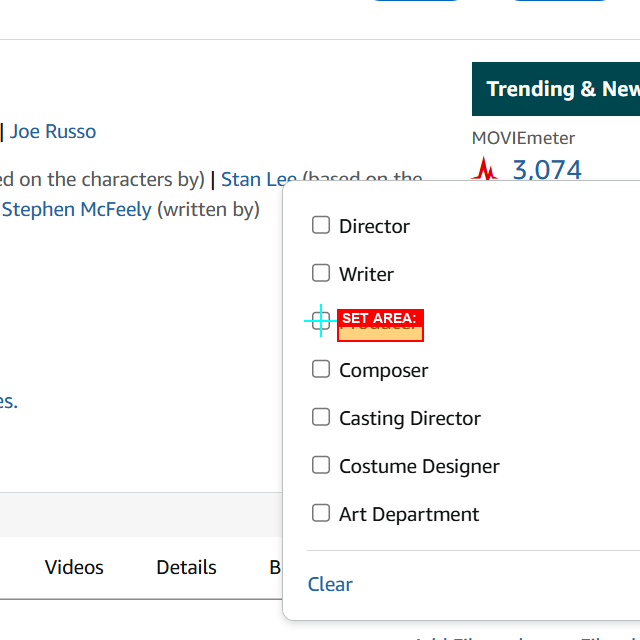

In [823]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVOvUAAAAAAAB9lCiMBGFyZWGUWCQIAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBRllBQUFBZ0NBSUFBQUFIVHhoOEFBQUY0VWxFUVZSNG5PMVliMHdUWnhoL1R3cHBwK3k4dGxKNmtBcFVHSkUveFk1QllTYU9MZUNDTVA4YlJXUUNjWWFBaFNVNmx3Q3hKSFA2WVNJQ0tuNlkrR1Y4MGZuQm1ZS1pCaENVYVVhckliU1FxUDFMZ0ZxcTE3VzBLZGUrKzNEeGRweUlUSWhrV1grNUQzZS81MzJmNTdsZm4vZDlueDRDSVFUL2I2eFk3Z1NXSDBFSmdoSUVKUURMSmNIMDlIUlplWG4yeG8wNm5XNVpFbUNDUTk5ZGJtOC8wOWpJdEgzQTR4VVhGNWVWbG9hSGh5OXRWQWpocE0xbU1CaDhQdC9TZW40SC9GTUZUcWR6Ykd6c3hZc1hOR00wbVU2b1ZMbWJOMXNzbHVYSTdUMkJ2UkMrTzNac2VHaUl1c3dtMDRIaTRwR1JrYlpMbDVZbHVmY0R6ancySHBkYmV2RGcxV3ZYQmpVYWw4dkY0L0VjRGtkWVdCaUtvbjYvMytGd2hJU0VZQmlHSUFnQXdHYXpEV28wUHA5UHdPZW5wNmR6dVZ5V04zcEEwdnIxSXBHSWFmSjZ2UzhKZ3NmbG9paEtrd1JCZUx6ZTFTaktkT1YydTBkR1I2MVdhMEpDd2pxcE5EUTBsT0loaEJhTFpXaG9pUFQ3RXhNVDEwbWxJU0VoQUFBcXp6ZmxET2pKRk00Mk5hRVlkcmFwQ1RLZzFXb2pjVHdwSldWOFltSjhZaUlwSmVWQVNVbDNkM2VhWEk1aVdINUJnY3ZsY3J2ZEZaV1ZLSWJSVjdSRTB0blZGUWdFS0Nja1NUYWRPOGNja0tsUUpLV2tST0s0VnF1RkVLbzdPMUVNTzF4UndReDl1S0lDeFRCMVp5ZjFPTzN4MU5YWE01M0kwOU50Tmh1RWNHeHNMRGN2ajJuYXVXc1hRUkFRd2pmbHpBejBsaFBCUGpYbDlYclhybDBidm1vVnhmeDI4K2JPM2J0eEhQKzZwR1J6WGg2RXNLNit2cU9qSXk4M3QvL3UzUkc5L3VLRkN5UkpGdTNmMzlQYlMwMVJxOVdxaG9hb3FLaHJWNitPNlBVRDkrNWxaR1JZcmRiNVF6TkJrbVJ0YlcxTGEydHNiT3pGOCtlSEhqKytlZU5HdFZJWkZoYm1kRG9yS2l2L0hCdzgyOWc0WnJHWWpjWmpSNC9ldm5Qbng5T242ZDZmbFROVklBdXFBcVBSK0dWK1BrMVNpa3JqNDBkR1IxbGw4a2xHeHVUa0pFMytldjM2YWo1Lzk1NDlIby9INVhMbEZ4U3M1dk4vdjMyYkhrQ1JDNjhDblU0bmlZbVJiZGhnTXBuZ2JLalZhaFREZmpoNWtpNDZ1OTJlcVZCa0toUjJ1MzNPbkZsZzd3V3FoZ1pWUXdPVEtTb3ErdWJRSWZxUk8zdkZhaDg5OG5nOE9UazVFUkVSTktuSXpJeU1qTlRwOVM4SmdpQUluVTczVVVMQ2hyUzBoZi9zTFB6eDRBRkJFRjhWRmtva0VwYXBwN2NYUVpCUHM3UHA1YzNsY2dWQ29jbGttaUhKT1hObWdTMUJXbHFhTERXVnVrZFJkTWYyN1RLWmJOYm1NUnNFUVFBQXhHSXhrMFJSTkM0dVRxUFJUSXlQQXdDOFhxOUFLSHg5ZzF3NHFDaFNxWFFPazlNSklkeTJZd2VMajQ2T1hxQnp0Z1RidG02dHFhNys5MG5PQW9UUTcvY3Ywc25Dd2VGdzZtcHJZMk5qbWFTQXp4Y0tCUGFwcWJkUFgyUjRITWNCQUUrZlBtV1NkcnZkOE95WlNDVENjWHg2ZXZyRDhIQ3oyZXgwT2xldVhMbVlLTVBEd3hCQ1ZrbEc0VGhKa3RLNHVNTEN3bmR6dnRqL0NES1pETU93dnY1K3M5bE1rdzhlUHB5MDJUNld5L2w4dmlneU1qazUyV0t4M08zcm93Zk16TXpNTUZwakhwZUxJSWpGWW5HNzNSUURJZlMvV3NrQWdKVGtaQlJGKy9yNkRBWURLNEdzckN3RVFYN3A2UEI0dmUvMkNvdXRnb1Q0K0pycTZoTXExWjY5ZTcrdHFSRUtoZmZ2MzI5dWFVRlJ0RnFwNUhBNEhBNm5xcXFxdTZlbjZzZ1JqVWFUblozOTVNbVQ5aXRYckZZcmo4ZWpuTVRFeEVTc1dUTXdNUERUbVROZmZQNjV3V2hzYjIvWGFMVjBsTVRFeEgzNzlyVzF0VzNLeVNrckxaWEw1YytmUDlmcjlkOGZQNTZsVUh5MmFWUFhyVnRidG14UktwV3kxRlNEMGFqVmFvMUc0K2xUcHhiMER2TWNpaXhRQnd6VkpqRjVuODkzcnJsWkdCRkJkeVpwY25sL2Z6ODlJQkFJZEhaMVJVc2tsRlVrRnA5cmJqNmlWTktIWWlBUWFHbHRwYWVMeE9JVEt0WFBseTh6V3lPZno5ZlMyaW9TaStsaHVYbDVVMU5URUVLSHcxRldYczVzalRDQm9MYXV6dVB4dkNsbkpoQzRSTjhPcVNZWEFCQVdHc3J1UUFFQXIzcFZBQUNmejJjM0p3QUFBTnh1OTE4dTF3b0V3VENNN256bmRPSVBCSGl2blhQVWRBREEvQjVleDVKSjhOOUY4S3RSVUlLZ0JDQW9BUWhLQUlJU2dLQUVJQ2dCQ0VvQWdoSUFBUDRHSSt2R1k0eFRJM1VBQUFBQVNVVk9SSzVDWUlJPZSMDWNsZWFuX3ByZXZpZXeUWCzsAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBQ3c1MGxFUVZSNG5PemRkMWhUVnhzQThEZUVRRWlRREFrZ0FTUnNXUUtLQ0tMaUFtZTF0bzVxM2JZTzNMdk91dEFPUit1cTF2azVxbGlwV3dFVnJJeUNDQ2hERUFRVW9rZ1FFaVFRQ0VtK1B5NkVNQVZGNDNoL2o0OVBjdTY1NTc3M0VuaHp6ejMzWEpKQ29RQ0VFSG8zQ2t1bHQ5S0VNVGtsU1huaXJNTHlnbGZTVW9uczAvdWpRd0xRcFpJTjJsRXM5SFdjVE9nZTVucDk3Wmo2dWhSMXg5VWluOG5QcUNscS9ObVJNQUVqaEJCQzc1K0d1Z05BQ0NHRVBrZVlnQkZDQ0NFMXdBU01FRUlJcVFFbVlJUVFRa2dOTUFFamhCQkNhb0FKR0NHRUVGSURUTUFJSVlTUUdtQUNSZ2doaE5RQUV6QkNDQ0drQnBpQUVVSUlJVFhBQkl3UVFnaXBBU1pnaEJCQ1NBMHdBU09FRUVKcWdBa1lJWVFRVWdOTXdBZ2hoSkFhWUFKR0NDR0UxQUFUTUVJSUlhUUdtSUFSUWdnaE5jQUVqQkJDQ0trQkptQ0VFRUpJRFRBQkk0UVFRbXFBQ1JnaGhCQlNBMHpBQ0NHRWtCcGdBa1lJSVlUVUFCTXdRZ2docEFhWWdCRkNDQ0Uxd0FTTUVFSUlxUUVtWUlRUVFrZ05NQUVqaEJCQ2FvQUpHQ0dFRUZJRFRNQUlJWVNRR21BQ1JnZ2hoTlFBRXpCQ0NDR2tCcGlBRVVJSUlUWEFCSXdRUWdpcEFTWmdoQkJDU0Ewd0FTT0VFRUpxb0puNjZKRzZZMEFJSVlRK095U0ZRcUh1R0JCQ0NLSFBEblpCSTRRUVFtcUFDUmdoaEJCU0EwekFDQ0dFa0JwZ0FrWUlJWVRVQUJNd1FnZ2hwQWFZZ0JGQ0NDRTF3QVNNRUVJSXFRRW1ZSVFRUWtnTk1BRWpoQkJDYW9BSkdDR0VFRklEVE1BSUlZU1FHbUFDUmdnaGhOUUFFekJDQ0NHa0JwaUFFVUlJSVRYQUJJd1FRZ2lwQVNaZ2hCQkNTQTB3QVNPRUVFSnFnQWtZSVlRUVVnTk13QWdoaEpBYVlBSkdDQ0dFMUFBVE1FSUlJYVFHbXVvT0FDR0VQbmNrdnhIcURnR3BBWjRCSTRRUVFtcUFDUmdoaEJCU0EwekFDQ0dFa0JwZ0FrWUlJWVRVQUJNd1FnZ2hwQWFZZ0JGQ0NDRTF3QVNNRUVJSXFRRW1ZSVFRUWtnTk1BRWpoQkJDYW9BSkdDR0VFRklEVE1BSUlZU1FHbUFDUmdnaGhOUUFFekJDQ0NHa0JwaUFFVUlJSVRYQUJJd1FRZ2lwQVNaZ2hCQkNTQTB3QVNPRUVFSnFvS251QUJCQ0NIMGFlaDNjTnRwTEZ3REVVWUhMcDk4RUFFUC9aWXY4TGVrU3diM1ZxNDljVlhkOEh4cE13QWdoOVBFWXZ6eTFsK2xyNnBTbWJWcTgrOVI3Q2FjdUZzL2NwSk11QUlpZk13QUFvTi8zcS92WkdnR0F1Y21tR1VldTduOHZVUmozK25YMjZQR2RESmc2V2xSWnBhUzhJQ3JxNnBLZFZ4TmFzT3E0QlQrdDdrUUhBS2pNUGJUbHAyM1BWSmIxbXhNMTJvNEpJSHdZNkxYejN6YUpGQk13UWdoOVBJeE1PNW1idktaT2FWR0g5eExMaDhoNCtNMmRVL295YXQ2U3RhaGFKbjBIZlIvVnlXTElqTjIzWHJkMkIyT1RUdVowQUFBd1diMWcrTFpsRjJxWE1RdzZtWnN3QVlRaVZsc0ZpOWVBRVVJSXZSczNEeXdPdXBlUWt4ZDk4OEMwOTNMNjIzZmlZQ0w3Q2g5ZG5iNXNVYitkVjZORkFBQlU4eTZMKzdXdUtXYm53ZWU2dDMyRXF2QU1HQ0dFUGg3YjVwQzJLZDhNdjNsdVNsOWRBSUNISVNQc3R6VzVrdnE4T0xWLzQvdnNESGRsNndJQWdEZys3TUNoK3dEM0QzalpPeXQ4VFFDMHFJelhyTnVBNGNqcGMvcis5L3J6NWplR0NSZ2hoRDQxL3V2My85cVpCVkFRdEdIT3I2YUxEbzN1MG9sT2VYaHp0TnN1QUFEZTBFWG52dW5pcWsvMHRZSkVsQmQwY3Z2NEMxbkUyOTI3QXFlWkFralNOaTI2b1ROOXhMVE9Ga1pFVWl0L2NmWGsyaUZuWDlSdXB2dVVtN1A3OXpXa0F3REl4Tm5KRDRUMUEvaysvbnovVGdBQXhiZU96Qmh5b1ZYdEcvb3ZXN1BKeDRSSkJnQVF2bmh3NkVSQjM5bTlPZ0U4djMvVVlsM2pJN29TUktVQWRBQjZCNTR6d0FNQXc5MldKZ0FBc2hjUC8ydjljVFR0dFduaVdhLy92V2k2UnBkZk4wMloxdG1FcVFVMUIrSEc2cDFIVGowRG1QSlQ4WEFlRlFBa2FadkdydDBNQUxVL0Y4aU8ybVQvOHdQc2drWUlvVThOVlVlWHFxTkYxVEh4bkxqOTF1eGVydnAwcW80V1ZRc0FnRGRxUS96Y1hzcnNDd0JVaHNtNDJSdHZqaktzV1ZlTHFxTkZaZGt0MmJWb1ZZK2E3QWdBT29hREp5Ny8xYmptYmZjNXFhdUdWMmRmQUNEVGVaMDlYWldWcTJsVnQ2YWpTeVVyWTJ0Uis0dTNiTi9kcnpyN0FnRFQwSG54NHY2dU9scFVIUzJXRHFXcEhiOTFMZWxoSlFCQUo1L3ZUL1p4WHJWcDZ6UkxBS2g4ZVBQa25HZE5yZFNJL0dkRTB0WHlITzYvdU1sYVhRNGVYTDdZdlNiN0FuRVFoaC9hTUdjd0FBVG5QcS9lVTh1K3c0bkZ6bjE1aHNUdWQ3THNCWGdOR0NHRVBtRzhUaFpNMWZmR1U4NU5kR1lDUUdYeHJRdTcrODFkTy8xQ3VoQUFnTjUzOFBpK2RWYlZZdXFJSDk2UFBuWHozNkRrWWtsMW1hRnJEK0tWNGE4VGUzVWlFay9saTFzWFRvNC9jalhvL2d0aEswSnJ0bjIzUmY1dVJHcXZ6TDkvZGM3UDIxZGZ1SmNnYWtHcjhidUhYTTZTQUlDV3liZ1ZHemE1czZnZ2Zuano2SkJ0OTNpZFBjZjE2eld1WHhmWEZqUlRuSHoyYWpFQUFPZzYrNi9xMG1pZGFldm5URFBWQWdCaHpyK3IxeTF5VzNjeTZGa2xBRkJOZTYwZUQvRHNiRlF1VVpIT2MzUUdBSUJlblF4clZqWTAzWVJkMEFnaDlBbVQ1TnlZcy9mc29mczFuYWdMdXJocUFRRGszei9aYis4TkFJQkhML3E2N3g5bkRHQm9NaGhBOVhybnc1dmphNjRyS3k4MjB6dVlFU1dqQmx0V3A5L28welA2blFRQU9IVzY5cHAwU3pUVFBxKy9MWTlZVW5odjJySURWd0hnNXI4Uzg1T3VuZW1OdDZWa1BIaVRvOG9vWlZuZXFRMGJ4Ly8zQWdBV2o1L3phMmM2UU42aG0vZW12ejY2RzNQTzlZcWY3c3dFNEhXZmN0Q3Q0U3FEeDNWaUFRRElzazZ1Mzc3NUdRQmtmV1hxVkR6ZG1RbGFQSnRlQVA5dWZwZzN6ZFFFQUhqY0xnQVBZS0lwRHdCa0FHUUFIUlBQNFppQUVVTG8weVVSNWRabVg0REZ4dFhKaWNrYmticC9CUEdhUlpTUnRaZ3RiM2VrUWZXZFRySzhxSk52SDJhRDV2V3IwN2lRbjlhSzZUdHE3MEdxekg4aE5US2tBOWxrM0NMLytBVnJ0N1dtLzVtUWZYYlBvVDY3Rmx0cWdaYkorSW5qTjllLzlkZWlRL1dvTHNQQjYzYW5FaSsxV0V3QUFLRHFzQUFnT3l3cjI5ZUVCd0NHdk1VQWtrNG1WQURJZVJCdDdPeXBRK2M1T21NWE5FSUlmWGFvK2lhZHpLdi9HZWtBQUVDNU9QOE5HaW92ZmQ2MmtiMkZhYk5IRVBjZzVmOTNvTVBFN1lkeUt3RUFHTTZiTnN3WkRNNWVSblFBZ05LaWh5MXQ3OFdTLy8yWExRTUFvSFlhZkpEWFJDMHluVmR6SkRzWlY1K2dGNHV5QVFEaWIwUVRpVi9YME12TnVTK1hEZ0RaL0wram5nRUE4SGk5OEF3WUlZUStPL2tQLzcxVjc2U3cvUEdiM0c5RDFtNnphU2thUTlWcWNZODI5QnBwUmNUeUl1ckNEUUNZdnZZa2IrZVV2Z3lnbXZZL2Q3S0xSSjlZbU4ySzI3WCsyNzc1cnRQQjdpd0FldCtlZHBKRzY1VG5YWTNLRXRZdHkwNThBQUFBRHc1bHZoaG5iQWhneUhQdlJUVUVnT0tIL3oyNDJ2M0ZZa3REMERmRkJJd1FRcCtMbXJ0MGdGcjVlUHpQRjE1YnYwazU0bUlBSmdEb0dMajZBb1MwVVh3MXRqMHIvclV6SFFDbzVzNmJqRSt1YmxFSE1vdGFiM0Qwc3d2OVZtdmQzRFMrTHdPbytpd3FBRUR4MWZOSFdoWEpvWFhueHhIWHAzVzBxSFdXRkF2TEFYUUFkT0Q1aWUzVG00ancxcldzN0Y2R1BBQmVyeTVVQUNndlNMZ0p0eUF2djVlaGtZNEpka0VqaE5EbjR0YTE5R3dBQUdCMkhwMjZiTlJnR3dBQU1IWWVPWHo4d2NYang3VzhvZmpvaEVMaUZXdnc5SjkyRDNMbTJYVHhuOTNGWHFlTkFnMjhsMUFKQUFBNnRxdDI3VS9kdnp2MTRKRk5yeG1CZFNHaCttSzM0ZURwYzZZUnUxYWFma3IxOUxRd0swcldhMXkvWGlNN0d6YlNRQlBOVGcvSmF1emM5K1NWeDBTSUp1Ti8yYkI3a0RQUlJlM2F2ZGVxMmN0M2o2eXBGUi85c0JnQWdFbDhBM2lSdXhvQWJtWmxsd01BSGMrQUVVTG9zeEYvY3MvOUxyOTJwZ1BRTy9VYmY2WGYrTnBGcFE4ZXRxSno5dDhsNS92M25lN01CQUNHcmYrQ0RmNXRHK2V6STE4RjJjV1B0V1VDZ0s1aHA1YjFReSs1OFdDYXBUTVRnR3JaLytDdS9nY2IxdER2c21sWkZ3QVEzajhTZEwrbEhRRForNCtlZE44d3JjRWpNRGFmL1hlOFRmOU9Xa0RWZC9aZjRPeS9vSGJSdzlvdWdYOVBwazhaM0wyNm56NzdLVEdVNjJUcWkxR2U1bmdmTUVJSWZVWmViRnUyWnM3TlBLR3MvZ0xoaTRKV0RhZktQcnQyL05rSDJaVXFMZVQ4ZStwUlpkTnJ0RTcya2VWdXU2N2V5aWtXbGxjS0MvTnVYVHV3K3I3NE5lc0VyZTM3djN2WjVRM0tSWGxYcjkyNDlhSTJOa21sdERXeFBKZ2VlSytSRVdyLzdSNnkvWUpxczlYS2k3TlZhcC82TjZ2bW5UZzcrVUYxNGRNWEFFQlNLQlN0aVFNaGhGQWJJL21OZU8vYnRCamN6OFRWdG11SG9yZ29nZmpoelhzdGVWcGZVKzB3QVlTNS8xNTkxSmJ4TmJScForQ3FUbG9Ba1AvZjlnN3JtbnNnb0d2M1hvUGR1dHJyUXJrZzdXcjh2YUNhRzdGNG5UMDk5U0gvWVhUOUFXaHZoOWZaMDlQY29pOFBFcEp5bnhlbUI5MXZadXJLT2pBQkk0U1FtcWtqQVgvb3BnMGY5ZnpoV1dWUzUvVlpkSE5wTHg0WkFNUzM5by92RjZUTzJOb0tYZ05HQ0NIMHdmRWNObjdhN1BGUVdTa2g3c1RWcVo1d1daSVR2Zm1UeUw2QUNSZ2hoTkFIU0VKY1d0V3FjL09QNUZuMGt2WHY4UG1BN3hsMlFTT0VrSnBoRjNTalhMdVBtdGJMenMzU2tBa2dGS1RkK3ZmcTZwQXNkUWZWbGpBQkk0U1FtbUVDL2p6aGJVZ0lJWVNRR21BQ1JnZ2hoTlFBRXpCQ0NDR2tCcGlBRVVJSUlUWEFCSXdRUWdpcEFTWmdoQkJDU0Ewd0FTT0VFRUpxZ0FrWUlZUVFVZ05Nd0FnaGhKQWFZQUpHQ0NHRTFBQVRNRUlJSWFRR21JQVJRZ2doTmNBRWpCQkNDS2tCSm1DRUVFSklEZkJ4aEFnaGhKQWE0Qmt3UWdnaHBBYVlnQkZDQ0NFMXdBU01FRUlJcVFFbVlJUVFRa2dOTUFFamhCQkNhb0FKR0NHRUVGSUREYmorUFpQTlpzNEtWWGNrQ0NHRTBHZEVzeFYxNDIvMlBpRUFKK2ZiVSt6ZlJTaTUxeTk4RzFKZXQwekx2aXR2NVNoWFU4cTcyQ0JDQ0NHa05xM3BncFpXNW9vcWMxL0ozbFVzNHNwY1VXV3VwTFo5aWFRMCtHWlM3MFhYd2t2ZjFUWVJRZ2dodFdqTkdmQjc0ZERQNTlKWDNPbzNNbEh3bnN1ejdnc1duRXBQL041V3JYRWhoQkJDYmVtdEU3Q3NYSkNSSFY5WUFhQnRZc056TU5CcFdLT2k0R24wSTJFRmdKNkp0WnU1cm5iTEd5Y3ovRWFZV2QzUHpreDhFZysyYmlDckVJbEs1R1E5UFlZMnVUYUFrcEx5Q2cwZERxTm0weFdDbEtTOFBBa0FsZW5tWk1hcHJWcFprcE1kblZjR2pVWWlMYzFNelhqOENnQm9saTQ4SzEydDFoMEhoQkJDcURYZUtnR1hwSVZQM2ZrMFhxb3NpT05ZVzUxYzdHV2x2R1JibWg2d09lWmdnYkpDa2piWDZ0STZMeXN5dEpTK2ppVkFab1dzQkFBZy8valdtd0VGT2lzM2pKcGVjNUlNK1hIajEyYW5HUEJ1YitscENyTE02NWZIbnhNSjVMVU5qSjQxY1d2WFJpS0JEbGEzTjNtWkFnRElCR0hYaHA0cVVsa3J4c3E3Njk4VDdmVmFIaWRDQ0NIVUdtK1JnUGxSNDdjOVRRR3QwZU04L04wWVZJbmd3dUc0Z0l4TTM2M2ttRFVlSEFDUThROXVqVGxZUVBZYjEvTW5iNjRlRkVXZkRSOGZsam4rU1B1WTZTM3VUODRvaWdZQWM3WkRTeW9YeDYwN0t4S3dPUHZtZVBsd3RTcEt5d3VlcHVYcEFnREVuNDQ3V0VEMkhOaDE2eUNlQVpTV3ZCTEZwMVZTQVFDZ0lpNWs2SWtpQVkzaC82M3JSQnRkRUQzWnRqc3BNQ0p1Z0l6Y2lqZ1JRZ2loMW5qais0Qmw0ZWN5VStUZzlrVy9yZjE0cGl3MnA0UHQ5QlUraXcwQWNqSjNKd0VBUU55RGdPZGcyc2RyWHo4elBXMHlhSE04djNXZW9BMkMrQ2Z4VGJkYlVWNHVLQzRTRkJjSml2TlRJc0tuSHN3dkFmTG9RYzZjbGdUMXFDZ2F3TXJEMmMrY29VM1IwV094clRwNytWZ0NBRC8rc1F5QU1YR2tyYW11bHJZdW05T0I1OWZIbGdNQXdEOStUaUFBOG9UcFF4ZDdtSEZZYkk2NTY5WWZuYjdRQmtGMFNtRHhteDRlaEJCQ3FGbHZmQWFjR1pZR0FMcWp2VlV5STVucjU2YXo3WHA1L0NNK09ISGprNG9BeUQ2ZGVTcHI2Wm95QUFxSS91U20ybzN5Q0ZONVQ5R1pNTVZuZmRlR2w1WWJZOFAyMFJDRWg5eFpZZGh6ZlE5dTdjVmY0THJaa0tHZ2FPM1dPM296UER6MVZhN3ZGdWVGRlFCb2M0WjNWdWx1MW5VZVpKTjBNYWswNmhHTTltalJsaEZDNkMwSUgwV2xGQUNkNitMQ296VllLQk04aW5sVUFIU2Vtd3VYcWxJdUZTU0hoa1VtSjhZL0ZUTE5YTndjZS9RWjRHQlFmUVZRV3BBVSsrZ1ZHTmoxc0dFMzJGaEdaTEpBaTJ2dnptTVMyelZ3OUxKbTFvYlJBTTNjdzRXTGQ0TzJ1VGRPd0pXaUNnRFFNV0RWS2JVeTB3VW9UK0VYQVhCTHltUUFjSHpuLzQ2M3BsMVRKNnVWWFhVQVpQZXVweDU4RG41akJxMzMxbTNweXF5dVA0MFRERDFWRkhqc1p1QXBMVThQcTVValhSMFlaQUJ3RytYaG54MjFKeXQ3L1BKc3ZRNmNPY05jSjNnWWFRTkFXV1VKQURCMDZwNWhrKzFOZFNDcC9IRWVIenk0alcwSklZVGFVRWJ3N2owUkFBWkRBM2FOTTYrM1RCeHhaTTMrUkFEdW1GOWRSaHJYRkNZZFhmTnJDRjhLUUdVeWFTQk1DdzlLREE4NncvVmJzbjZxRXcyQW9wVWJzdXRFaHNGdzdxNHg5UnBNQ2ZwcFR6RDRyTm52WHJQZEhvdTlyTHVwaEZHZjZXaWVDN2ZOL3hRSzR3UFAzR1g2enZEbHZiN3VwNm10YjBPUzFydExXT3VMRWJhRDZpWnBvQmw0TnQyQW5tbEhQMjh1QVBqeEtxTi96QXcrR3g3c1B0U3ZwU21Zek9rek5NYUxIMzc1d2U1d1FYUkU2ckNvOU5IVGgyLzEwQVZkcThVYnpDYW1QZmp6YkdiZ1UwSEFnWkJ0VjZ3dXJmT3lhcUtoQ25rVEN4QkM2SjBwdUhZa2VPQjZQOVZ6VmxuS21WT0o5ZXZsbnQvd2N3aWY1akJtdWY5SWV5WlJKa3c5dit1M3dPQ2ZOekVEQWthYUF0T3JoODJKakVkUnNkbGp6T3RrdU5TN0VXVkE3OXZEc2FsQnBxYWp0LzgwNGoyY2VZZ2YzNzExMjl6MU0wN0FyYmdHTENoV25hWksxNVFCQUtXWnordlVTY2twQlFBSE13NEFjTmhhQUpYQWN2YnpkcTN6ejQzYm9qdVJ1QjQ3ZkhXZ29tanRzZFNLbGtjSkFOcGNuNjhHL2IxcmZPSUNyb05jRm5qcFFXNzFBaTJPWGRlVmE4WW03dlhkYWtldTRHY2VUQUJnNlpnQVFHSHA0enBObEtmbWxBT0FRMGM4L1VVSXZTOVcxamFRY1NZb1JiVk1lQ013K0JYTnhsYjFiNUUwNGt4Z2pvem1OMytWTXZzQ0FOTit4SnI1dm5SWnpwa3prVklBWVBieGN3TVFSTVkrcWJPUjVQOGl4RUR6OW1yUndOWTZaRkt4VUNpV0FnQklYK1VrUjBWR0pQRnJ6cm1rNGljcEVWR1JDUmxDYVlQMXFpdEhwV1NYMVZuSWY4RUhFSmNLaFVLaFVLaXlTRm9tZUJRZkdSR1YrRWlnVWw5bDZ5QXBxN1BDUjZ2bFo4Q3l6S2ZsVUpOY0FYaDk3S1AyUkpkZmlPQlBINldjTnlQN2VtSWxnSmFQa3hFQU9EaXg5Y0x5TDRiRnJmTDJhTkVRcXZySVZpT2RKL3diY3p3K0lTREpkcjBUR1VCSGp3WUE1Y2w1TXVEV2ZIbVRRUlBwbWF6blpHQUovQlJaZzZtN0tFYWVGbHFRVmk2UkFkQXMrcGluQnVjVW5ZOG85VkgyZFplbVhIc0VvTUh1ODA3bTNFUUlvY1lZREIxanZuL2pqYU5CZzMrcDdtcVdwWnc1bXdFdTMwK3d2ckltdmFhYUpESWlIc0IwcUYvRFAxRDJQbjZja0tENHlEdVNIbjJwRkE4UGwxM3hpUkgvNVl6cGFGNWRRWllTR1ZVR25CRnY4c2Z0eFpVMVN3THBmdU5Oa2dKdlBhdE9mN3VZdmpPK3JieDhNSnd2cWE1RnNmOSs5Mm9mWnZYbStNRS9iejZjSkt4cGdtSStMdUNub2R5Q3F5dm5uc2dCQUlERS9iTm5Bd0I0TFR3enh4MmdMUG5ZdXEzQmZHVnlaZlpjdUgyV08xMjU5Vy9YRDhzOThQdHR2aFI2TEQ3bDM2MzFPL0ZCYVQ0Qlp4N2ZtUWRkR1FZZ3k0M1AzblpmQmhxNkU3eU5pR1Z1WTUyL3VKOXc4WHI0MTZXOE9XN3Q0ZFhMc0N1Wng0dUI0K1k4eHhJQUFEbzd6T21RSDVDVDN1c0gwY29oSFQwZEdCV1Buejkra244bWk3RjFLWEVEN3V1UWJWZE95cnErVDNEOFdQam9uL281a05rT1BDM0lxYng0TnFRTDJjSUt5aktUc2cvR2xPWXE2OGVIajQ4aGozRXlzSGZnTUNTaXNLQ1Vpd0FjU3dOVHlEKytKNmJBM0t5TFpRY0hReTNSb3djQjRlV2dvZXRsQ1FEczBaTjR4emRtWHp4MkdWNVlqYkZxVjFMNC9NekZwK0Z5Y0JqbTZ0ZHdOQVJDQ0wwemptTy9kUTA3Y0RubzdyQTU3aFFBL3NXanQ4bzRJOGY0ME9PdjFGYkt5bmtFQU9ibWpYWFFtZk9zQVFTUGNySUE3SUhpTmFUdnNjUmJxcjNRcVpFeFpXQXdvRnR6dmI0eXNWZ29GQ3Jma3VuTWRyVURzQjVGSlRwT1gzL1l5WnhPRmtic1hiSXJKbVQvV2ZjeHN3TDhYTXpwc3B3ejYxWUdwVjRKenZVWll3b0FrSHhzM2VFa2V0K0ZlNmU2TXlreVlleStKZHRPL1h6RzZiY3hmVmZ2OStKZjJyVHU4ak9YR1h1L2R3TUFMVG9BQ0lOLzJoaGNiRE11WU8wZ2N3cFptbjEyM1lwL2R1eHlQTGFpWjNVQWovN2FkSWpYWStUMEVRWlVBNXMzT2NBZmx1WVRjR1ZLeXRQQXBKcDNGSjNwczN4SDY5ZTgxWFhhdWFhS3NTUHBlRVRtMUloTW9zeXFxOVBKNysxcmVwaTUwOWY1YU8rTUNrakxYM2NrdjdwTWcremczbEYxSEYvenRMdjJYR1VYdENDTnZ5S0lmMmtVMTJHRXcraTdDWUhGZ25YN0JBQ2cxNEd6ZUlGZHdZRzRQZFcxUVpDVXZTQXVXN2s2eDlyMjVCUmJnQ0tHcERRZ0tHa1AxT3dNUldmNm5KcDlNZXQ1Y2pFczJKZDk4V3JxeFpvZ2ZRWjc3SHdmRjBFUVFrZ0Z6V2ZNMEg5V1hEaHhlckQ3Qk9QSTQwRjh1dGZDa1IyaFFQWGVUYkZZRE1BMWFyeGprY3ZsQXZERllnQUFJRHYwNkU2N2RTczhJbXMwendJQUlEa21WZ3pXSXdlWU54ZkRzeXRyWnF2ayszcVhoSjE4eDdnVHF6Tzl2VngzeFVSeWU0MGU2YzRGQUtDWWUzZm5CdVh5Qy9JQlRBRWs0WmR2bE5IN0xwemh6Z1FBSURPN2pmclNQT3BrVER4L3pKZGNKcFZHSndNQVhaZkpaRlkzblhQcFVnWllqVjg4MUp3Q0FFRGhqUnJ0ZmZIbmlQdUowTk85dWtyWE9mdm51OE9ub3ZrRWJMLzFEOTdLZ3Z6NHgwSnRFd3MzVTVVSklBa0dydXUzT0s4VWlVcmtBQURhdW15OWVnUFZLV1lUbHBwTnFCQUp5b2grNExxelNOWmwrdFdvcks4YUZ1dCtzWFRpRjdYdm5MYitacnV5dUxRQ0FDaTZIR0xDeU8zMmk0bWxEajRoZTRucEtnRUF0R2tNdmVxTnNiOVlQUDRMYWFtZ3RCSUFBTFQwV0hYbW9kU3o2M240TjQ4U290bG1nMFFJb1hlS04veGI3OUFkbC84T2R6VDVKMEZtUFdHY2U2UDMvNGpMRzc4R1dseGNaL29DUnk5ditxMlFpUDl5SmxpWWd5d2w4cjh5c09ybTNlREdwRHJZN2hQR2RXTXEzOUxNRFZxN0Q0U3NuRWNBRkhGT1JKU3dwa2lvQmREa3RWdmhvMGRGQUd4aGNsU2tzcWlTVWJmT3AvV1grWFhYZ01rNmVoMTRQaDJhcTZITllML21FcTgyZzlPS0NhQmZTMHVQMWN6SHArbDRLTG9jVnFNTFd0SXNRZ2k5RjFUM0NTT3RJMDRjMkpvRTlQN2ZEMjM0WjhtSXd3WGdDd1FBNWcyV1NRc0t5NnBQZ3duRVZlR295T3h4NXJ6VXlKZ3ljTzNueTJ3K0FEclAxYXRIRzNRQWlzVmlBTGgvNVhpR1NpR2JhVUpyWXFiOXNqSXhBRHdKTzM1S3RRSlR0UVA4RS9QQlBRMEpJWVErYzB5LzBVTnY3WW1RT0V3WTI5aFlaVk1IUjlwNWZseHNyTXk5VzcwelFrbHNiQklBemNIR1dGbGszczJMRTNRaE1pSnJ2RGdtVmt4MjhmWjRYL21zUFpNSlFCKzJhdnVYTGN2bWJLWUJBTjk5eHY0NW4wNG5jL1BlZUNwS2hCQkM3d2JaWWNLdmUvZnY5dmR1ZkJ5b2c5OFFMc2dpajUvSXFOdWRLMzEwSmpCQkJ0d2hBeHhWU25rRGZHMUFHSEVuTVBLL012RG80OTN5TVRodnlkaWNSd1orUXFLdzhjVmFXdlh5RDlXY3h3RklURWgrWncrZC85Qm9nczh2NldtYlFGdFAzWkVnaEJCcUVlNFhDOGJFTGowVHZHN09ZOTlobzN5OFRabkZ1WkZoWjY4RVp3cWg0K2pGWDlROTQyVDM4TEE2ZVR6NC9DMmc5ZTNkZ3BOTGNYWkNWR1MyYXNtYlRVVko3VEcwejVHRUd5Zlg3SU1aZzN1WU1BQkFtQmNWbm1NNWVhZ3RBSEM0WmdCUEVpNmRDcTgwcHdDWjYraGg3amZZT3VoWStQWXR6S2xqK2poeUtBRFNndFRJQk9neHh1dU5ibVg5NEdrQ2xXSDQzcjRRSVlRUWVudGs3c2hOdjVrYy9QbjNpSkRqVzBLcXAvc2xVN2k5RjY2WTdtNVFmNlFTMDd1SDlmSE1ES0I1OTNCcVFlTkZkNC92dmx1bjVFMm5vblNjdEdXeDlPZmZiNS9jZU9ka2RSR0ZPMlpEOVV2WDRkODdKaDFJdm56Z0VRQllqTi9sWVc3Z3QzeGoyWTV0UWVkM3JUdGZzNmZNYnJOOFdyL2xqd05Kb1ZDb093YUVFRUp2UkNZVnYrSm5wNHJwOWx3RE9wUCtZUTVYa3BZSnhaVUE5VzhwVmk2c3BOU05YQ1lWdnlMbXZOS2lNMmtmNWo2MUNVekFDQ0dFa0JyZ0lDeUVFRUpJRFRBQkk0UVFRbXFBQ1JnaGhCQlNBMHpBQ0NHRWtCcGdBa1lJSVlUVUFCTXdRZ2docEFhWWdCRkNDQ0Uxd0FTTUVFSUlxUUVtWUlRUVFrZ05NQUVqaE5BSEx6Ky9YTjBob0RhSENSZ2hoRDUwcGNjUGlhdlVIUVJxYTVpQUVVTG9BeWNwdjdOYm1xanVLRkJid3dTTUVFSWZ0cXBiRlpmeUsrOWt2NzRtK3FoZ0FrWUlvUS9iZjFlbEFMSzdDWEoxQjlKaWxTVWl2R2I5ZXBycURnQWhoRkJ6UkZmUEtRQWdMUDRWakdTMGZmT3BBWXNlQkRkWGdiTjFlei9QbHJRa0U4VmZqUW9JRWNTWFZSZm9zWFJIZitHMXVKZVJ0bXExK0p1OVR3aGUyNWlscjgvaGdVYk4xZUJIamQvMk5BOEFuSnh2VDdGdlNZQWZHa3pBQ0NIMEljdVdoT1lEQU9SSFYrUUROSnVTM29pc1FGU1oyMXlGeW9xV05GT2F2dTdIbU9QRmRjcEtpa3NQSGd1NWNNZjI1QW9QSzNKTnFiUXlWMVQ1MnZiMHhMTG1Gc3Y0Qi9kbFJvc0FBT0JWc3pVL1lKaUFFVUxvQTFZYVhSRkh2THBWbVFBd3FNMDN3UERxeXFFMnN0M1NDMm5sRlFEUWdXSDUra1lFZ1R1cXM2K1ZFMi9sQ0FjSEJraGVaQjA4bG5xOEFBUlo2ZFArTXJqOUxhKzZyajU3ZE5lbVd5b1VCZVpVQW9BSmg5MTBKVmxtVUZUQTg5ZUg5WUhEQkl3UVFoOHVlZGdWNWYxSDBqc0pNTWkxcmJkZ05ucVcyZWg2WmFWSksxWWxWQUFBeStqa0NpL1QxelZSRVJNWGtBTUFZTnJMNjlJa3Erb09aeFo3L1NacmgrMFhWcVJCYmxqQzhZRzhDZm9BQUdEcHNYVldVeTBKQWpkZUN3UUFiYU9KUFhTYTNGNUcrTFRyNVFBQUdnQWZ6NFh4aG5BUUZrSUlmYmhLUW9PVXJ4WC94YitQb1UweS9zR3RDWUdsQURUTzRSOTlQWFZmdTBKNThMK0NFZ0RRWUs4Y1pWWG5jaStaTVhxa21Ta0FRT25CNnkwWXhmMDRaVThPQUlDcHQ1MG51WWs2WmFrcmZ1Zm5BbkE2ODZicnY3N0pEeGttWUlRUSttQTlsSVJLYXQrRlJaZXBMc3pKTG0zejJUbGsvSVByYndZOEI2Qng5bTN5OVhsOTlnV1FwZDFLQXdBQUI2NGZyY0ZTeTQ1Zk1BQUFjcFB5TWwvVFVIbjRGWDR1QUdpd1Y0NHdhNkpPYWZqQmhNQXlBQnJucCtrV0JpMkk3a09HQ1JnaGhENVUrVkdWYWFydm82UXFiOHREVjc5S2JOdnRsWWJ2Q1EvZ0E5QVlXNWY2K2pHYU9nbXRLNnNvQVFBQUhFd2JUWWk4THVZQUFGQllsRnJXMkhLbHdvVGQ5MlVBb09kdTNVZ2lCd0NBa3BnN3krL0xBTFQ4NS9uNk5GSG5JNElKR0NHRVBsQ1ZZVUYxVDNFZlZpWW9UNGp6WC8xMVNwb2hhYkRTR3lzTjMzTmg2bjBaYU9pc1hEcDB0Rm5Mc2k4QUZGVVBvclkwNFRhNjNLUURjVFczc3FDNDBlVUVXY3IxcC9FQUFGb1QrdGsyRVdEYzhvTUNBWUREd0o2THJWc2MzZ2NNRXpCQ0NIMmdYbDI3V3E5RUZwMVEvYXIwbGlSTTVlMWJ5ejEvYldxOERBQzBxYkxBWTlkV0hMa1RuRmJVa2h1UWN2TkttNitnWFoxbnlqT2JHYmRjOW1EMzdVb0FBRHVyN3hvZmRTMEkzSkVhTEFmb3dOc3hzdkZNLzlIQkJJd1FRaCttNklxejFhOUlUQ2J4UWhGNjZ4VUFBRlJlT2xrRm9JaU9FcmZSeGg0L3JSN2dWVkZXbVpsVEZCaVJQZXVYeXk0LzNJeCtUWHB0QlVuVDkrc0tibVlIeXdHQVBNSFhWYSt4Q3JubncxZmtBR2pvclB6ZXkrcFRPUHNGd051UUVFTG9BNVVaVlZuZHdjeWovanhPOHYxbUJRQ2tSVWxLb1oydVJQVFhWUUNBdUhnSkFMMHR0dWJnNjdUUHJmcDF4WXY4TS84S29rdWhvb0EvZnV1ZGtQVTkzMjNPazZYdkRpa0ZBR0J4UjNkdWJFdFA3OHkrVWc0QURrTzhwcmU4Yi95RDk3b3o0QmNoRytmTW5yRWxwT0M5Uk5PMHhNTnpacytZYzdUTmVsdWE4YUhzc2xxOTNVRVEzdnA1ekxoeGkvN2hOMWNwYTQ4SG04M3NzZWZKYTV1VGxncUtpd1NscjU4NjU5TWdERjQzWnR5NFJXZjVBRkFRdkhuR25Oa2JnMTgvYjk5N0lRamVNbnZHbk0zQkw5UWNSOEt4MlRQbXpENmNxT1l3M3JYeXNLdlY5N2lhajZOL04wUzdlcktNVzlKRWdOSWd5U1hpYllJMHJkRzFXNDFqNStyblhmM3ZpNjhHbmR3K2ZCK1JDNTluYjR0czd1NG5VOE9tYjlpdFE4ZTZRK01MS2lJempwY0JBSGoyZDNCb3VGakczN012TzBVT1lHNTdlTVFuMHZsTWVOMFpzS3lzdUVnb3BKZEozMHMwVFpPS2k0UkNFTCtQTUQ2VVhWYXJ0enNJekw2alIxNUlEQW82ZWN0dldkKzNHS2xZa2hhMTlrVDJ4ZWMxL1ZZYVpDc3o5cHlwZzc1NG43K0R4THkxNzIyeVdjbmQ0MmN6Z09ZemRTUVhBS1JsUW1HUmtGNzJnWHo1cUJRTGhjSWlldk5UQkw0SDBsZENZZEg3K1hPZ1JwTFNTN2VJVnhvVHh1dEJKK2tva0J3SEFJbjBiblpsN3JtYXZYOVltU0FCdTBabXNucGJaSWJmVjJZTzk3TlRBSUtUc3FGWDA1OS9ocFllUUFuQTQrZU5UNVg1T0ovSTMyUk91MGJYNXgrL1ZnUUFvRzAwWndDbndWSlp5bDkzdGhVQVVCanJKMWhEY1pIS3Q5RnlFZkVOUlZvaEtDNENJT3ZwTWJRL3F0UGpEL0VhY1BhcDJXUEdMUTE2cHU0NFBpRFNXeitQR3pOdVQ2eTY0Mmd4Y3o4L2E1QWwvbk1wNTQyYnFJaTdOdUNYekl2UFpYcGN4dWl1bk5GZE9YNGR5QVY4d2EwOFpaWHlpNy84ejJMYXRmQzNqN2NaMHNwY1VXWHUrNXBzVm5qcmNrUVpHQXp3ZGZ5by9vNjhRMWtuWjd5Mk4rWFRkS3VpK2h5WHB6MjZFd0MwR3pTWWVDOEx1eVc2VmpzN1J4dU93NnFQeTZ3ZURpV3BhRzQwbGdtRE9HMU40UmMxdGppL2V1eVZ0cTRWcTdIbDkxTjJGd0EwT2ZsR2ZuUktKUUNBVkxSdTQyV1BKYXIvb3ZZVUFnQkFhcXJIa3NzZVMwS081N2Rrcno0Z0grSTFZRUdSc0kwdWFud3lDb1F2MVIxQ0t6SDc5bkU5a1pFUUdwNDhackxqbXpUQVAzNU9JQUR5RjVPRzd1eWwrZ0NZeW9yYTg1Nmlna1ovM3o5aU9jSEJHUURXZmdQTTFSM0pCK09sVVBoNS9qbUlpNnIrcER2NnQzTUVBTkJ5NzZzQlYrVUFFTHFrVk9YbUkwVjBsQmc4MzhraEtpNnJQdDJrYUdvM1U0MWwwc2NnUGJvQTRQSHpGTEN2MzRkY2xuZVBTTUIySGR3YXJndWxGMFB5U3dBQWRLZjdOalg1eGlkTFV3cEFxVk1pRlQ5NWxNQVhBakI1Ymc0dDZ1cVRTUXV5VWg0SnhBQjBBMnNIR3c1RmRaSDRsUmlvVERvVlFGcVduWmJBZndWQU5YQjBzbVpTbW1wT1VNQUhBQkMvRWdxRkFLQkZiMGVqcUg0dHF0MGNrK2Ztd0szWDlhS3lGUnQ3YTRQWGRjeEl5NFI1ajFQNHIrZ0dsalk4UTFyOW9KcUpXVkpXa1B2b2tVQU1BTkNPNjJwblRxZlVMaEpLb0Rwc1NabFFVa21oTStrVUFKQ0toZnpzVkw0UW9KRmpWYmRaSnRmVjFrUzU0d0wrTXdBUWx4S0hCTFRvek5wUXBZS001SXdDTVFDVDYycmJVVmt1RlF2RjB1cUtVckZRTENYVG1lMG9BQUFTd2FQVVJ3V1NGaCtpb296a3RBSXgwQTNzSEd6WWxOckdHL3ZSaUYvVmJJanE0bW9MQ2VteENWbVRIUzFlczRuR0ZDVVhBQUJqVUk5NmoxL1QwcTQ5WnFMTVFnQ1FsVlQzU21ucHNYUzFBUUFxUzRyelUxSmVsZ0FBYUp2WThCd01sTmVvS2t1S1N5c291aHhkTFpDVkN6S3k0d3NyQUdpVzdsWldiOVYxSmFzb2VCcjlTRmdCb0dkaTdXYXVXKyt2bGVUVmsvakVseVVBMnZvbW50YWNKamYxTENGR0FHQnM3OEpTS0JRQUFNVC9vRkFvRkpYQ2pKUmtnYmp4WDU5bVBvMmc4akVHSnRmRmhsZjNZOTdFNTBlNWFrNTZJbDhJd0RUdjVtaXNFbzZpeVdPaGJKRE9zWEcwNEtoOFFsUStrODMvRnFzb3lPY0RBSlNKaTR1TEFZQkNaZEtwVUhOd0ZBcUZTdnptM1J5TjY0YXZzcFdHTy82Qks3MFZSSFN2YWt6NGtrNGNiOHMrV2taUW5nOGdFZFljZmlhSktsVEVQU3hYS043QnBCU3l6TkFuMGFBQUFFOXJZNVVmZVdWSmNTblFHSHExbjJQakx6enBBUmRLUVpTMys5YXJ2WDFVWjgrU3BaekxDQVlGQUhsQ3IwNk5mRzRlMzkyV3BnQUF2VzcyMzdadjlITmxQQzFnd3JUR0krUWZYSGx6U3dHQXMrdmplVTRBQU5EY0ovTURwRGxsOVpXZjFnL2hFa2RTbWhPMGZ0MlpMT1VwQm9YclpONzhHSGR4ZXVDR2dQTTVLaGRqbUU3alZ5d1p3aU0rNmkrdXJGa1NLT3o3L1V4SzJLRWJHVUpsTjE2N0hvdDMrSGRyOEpGSjJEOXA2MjJpTGY3bDliTXZBd0J3eC96Nnkwamo2cTFsMzlweCt0aGR2bkp6WlBNeEFRRWphMllLNXdkdjNuQWlwWFlyWktiM3ZGL251amZ4eVpUbVhQNzE1K05Kd3RvU2kvRzdOZzJwbnNwRkprdzRzMjdENWNaamZuUnEvb2JMZ2pwWG9Dam1FellGRERVRkFPQmZXN2Zvckhqb3V2VzI0VC8vZnBzdkJmQmVlR3F1ZGZqV1JRY1M2dDQweit5NWNQc3NkN3B5aXljMmJ3dXUzVG1nK0t3NDlpVi85ZnpqV2NUN3hQMnpad01BUUkvRnAveTdBVUJaeXVHMVB3Yy9VMW5EWW56TlR6UHg4T3dkRVM3Zjd4b3UzUDliWUxJUXdIVDA5cDlHUUwxREJPQzk1TlRjeHI2WEFnRElzb08zekE1V09VUTFBWXZEdHM4K25nbmVDMC9OZFZjNW9sRTdwdTVMcFBkZGRYaTZBd0RUeHBvSjZjTGtWQUZZTkx5dTgxcGFERzJBQ2xGVXNzeXZrVkdSK2NmWGhxeXI3cFVzV3JEa01nQUFjQTRmR3VSVEhEZHJWV3B3bmY2eU9JNmJhNmkva3g0QVFQcmFKUWtYelhuN1hFcTNYUkZrS28vY3NRY3IxNHg4dzlHVnBla0JtMk1PMWc1WFM5TG1XbDFhNTJWRkJvVkNBVEorNEMvaFAyUXFqM2dTNkhJT2JSclU2QXgvd3FSRVBnQlkyTlQvNHZzMGRLTi9hSXF3NWkyWjJXUHVMOG9QOXFOVEN6WmVxZjlwL0hialp1TFRLRTQ2dW5aYnFNcW5Dc3kvMmJsMUtBY0FvQ3psOExwZlF1cDhmc1p0L2JIbXJ3RklzLy81Y2UzZnlsL3V2UlJqZTE3enN6NlVaWnpac3ZtZkxOVS9CL2JmTGxzMnRDUHg1eUR4c1AvT1NKdmhpOXo1WndMalZIK0xSMi9lUExMaGZQK0pCeWI4VXZQbjRNcVBNNjhBQUhDLy9ubmJsOVdIUjV3VnZpM3c2TjNhK1BlYWYvM3pWdVhTK2p0T01mOW04OWFoSC80UUhrbEZjcFR3N0dISnJvY0FBTkNKK21YTlE0VEFWV2NVdFh4WDdjK0FOT3NFQTc0VzdqdjBhbHAzemMzakdVWnZkQ1U0UHZ6YkdQS0VQdGFlUEU1dFRwVVdSVis4c3pDNEhBQ0F4cG5lUytYQlJNVUpzNWVtUndNNERPMTNzV1pJRkdld3c0VFFtT05sRVB6WDVSL0lQajhTRHdDV2xhZGNEWmtXWGdrQTBOSEt2NUZmWkZuMFRYNHVBSURXdDAxTnZ2RkowNVJtblZ4enpQendWQWNBYWV6K1RXZXlwSFQ3MFl1Kzh6SFJodUxjeUpCamdiZWFXZnZabFEyYnp1Y0F4M3Y2bkRGdUhLMEsvcTAvZDV4Sk9ya2lnTEovblMrenBwYjQxb0hmVGQxSHpndm9hODBFVWNhWnZUdHU1VWFlRGg3UjdjdjZ2d3k4dnQvUGRSTEduRG9aVzhUczl1MTREeVlBMEhtMVAvckVTeGVzKzA1YXY4S05vMVVoaURqMjAvSEVuRE1YN282YzR3NEE0cnQ3MWh4TEVYY2NzbWJCbDdhR2xNb25rYnNDRGtUOC9wUE5iK3Y5R25tcUZmL3kycFhIbndERjJHZnN1RDdkTEpqQ3JFZVBCSFN0MmwwTE9SM2ZkTXhNaDVIVHV6azZtQnRvQTREd1VkQ0JiVGR5anArSjlGdlNvK1k3dGpBNFlNbGxzb0ZyYng4V2dMa0JRQVdGNnpmZTI5N0IwWlFKQUpXQ3lNTy9ua3k0YytMeVlQY3hIUUZBbW5CZ3lkWTdaY0IwR1BuMWlHNXVYTWhOeWM0RUpqQU52dlpubHVVRTc3N3lDS3lIenZIbEFRQVkyQUNBakIrMGNYUHdNNXJyOVBWenZjenBJRWdPMnJIeHN2S25DUUFBU1VjV0pRSEx5cjF2Wnpvd3plbkNrRzNIVW9TY0huTVhUZkV3cGxTS3hRVzVrWUpHNzdtclBnaUp5YVpmTHQ3aVk4T0F5dHp3L2JzRGsrL3MyR3F4ZDZNZjAyK0F5L0hNeElpWXUzUGRsUmxZZWljNkVZRFpwMi8xMWsyNDVnQ0pPVGs1QUcrUWdLMUdleVVjRDZzOHZ2dDBiaC9ubFYvWjF6MURaWGlPY05wWFZ2VG5FWDQ4NkU2Znd1dEMvRlFBUUVJMjliYmE1MkRpWnFZTEFKSVhhUUY3TW9QalUvNTg3TFJZZVhkL1R2YUNZdDBKbzNvZWNtTlFKYUxySjZMV3BaVUhuRStkWHYwbHVqVmsvSU5iWXc0V2tQM0c5ZnpKbTZzSFJkRm53OGVIWlk0L3pQNXZ1aTB4c2Q4UEdUTDdQdDMyRE9lWmFsZG0zcms5NFpSZzJvNy9vbGQ3Y0JwOFhjL055MU1vRkZ6RDluSjU5ZWhYdVVLaFVDank0bE02REorLzJjZUtCVkorK0o4Ny9rNk4rUDBuNngzcmZOa0FBSEpHcHhGVEp6bllkeVEralJuL0hOeCtNL3Y0NllnQmk3MG9rSHI2dDVBOFRlc3ZGODBlWXNzRXNWZ3NTRTJSa3VWeU9jajQvMnpjSE15bnVVeGJPOGZUbkE2Q2xIOSsyM1RsNUpxakhROU9zUWNBYWR6K2pXZXpLOXZaai9iL3JvOEpCVVRQSW9PUG5mbFhvUUNGUXE0TVVCWC95c1oxUVUvQXdQczcveTg3RzJnVG9hWWNYNzFKc3pwVWhVS2hVS1NmLzczSXVzK0V0VXRkT1ZvVmdzai8vWExpZnZhWjg3RWovQnM4b002azkvZXo3WVYzVDUySUZUSzdqZnZXblFrQWRCTjl1Wnc0S3BCdzlSK2JQcE4rWE5UWlFGdGFFSG4wNTcvdVp3ZjlFek4wdGpzWklQZkNocDlEOG1pZHYxL243MjFDZzZMVU16c0RycHhhZDhqOHdJZjU0SFo1YWY2cjY2ZkVKMDVWWEU5VXFNNTk1VENGWmxGN3RIWDdmVm00NjYrYVpaMW84d2N5WDB3dDNyZTM2c2gzZ2lQZkNUcC9ROXU4Z1RPUTE3b3ZrcFZsMFhHQzZMZ3NBQUFOc240N01rZ3FDNVZmWVRWMFZpenEzNHVxOGhQUEZTWXJGQUNnVUpCcVMwbldheGU5dUxjNU8xVldFWGdzT1BBNFdiOGR2QkxKcXB1aGNRN09kMi9mOEZOVGVIZjMzU3BRQUppYWZzdHI5RVBWUExsQ29RQUZFQi9KMXE3OElkRDBvMEZ3MU4za3FRNk96NjZjamlvRG1zK2lIMFlRQTBDWXpDRXpGa25UbHdRMk5mNGhOdWhramd4c3ZsMC90eThUQUFDWUkzOVlMMTI1TkNnOU1DalZkNnJ5ZzI0ODRxZWZSbGNuVzZiNzFNRXV0L1luOHZuUEFPb25ZS1oxRDI5cmZzR0ZrN0ZGZEo1TEQyL2plc3ZkNTIxZjJLMzZ3OFVjK25XZlM0bFhoTGw4UHJoemdSLzhkNlNZN0RKanpYaEhHZ0FBcGFQUHpKRmhNNDVsUk53Vit2a3g2NGVlZENYb0NZRHBpSjhDUmhQZjl3M2NPRGFxRlpxTjJXYnc5eXFWbWQwbWZkbnR4bzVZZ2FCQVpaZm92WmZ0bnVxZzB1ZlZZOElZMVYwZE1xRi9lTUkvL0lJQ2dJNEFSU0ZCZDhxQTVyNzQxNFhWSFFQTUhqd2lIYmowNElKV3d1NHJqOERBMXF0SE4yVUw4ZWZQUEFHRG9hdFg5RFVIQUFDTzQ3anhmcmMyVi84MGlUb3ltd2w3VjlYdS9kMDlqd0M0M2lPOE85SUFnTUprOHBoRGxOK3VHMkg2NWVMNU5WOXhtU1BXTEJmUFhYM2wwYVVyMlg3amVWNUQraDVMdkJVVEZqSGQzWnY0MmkySmpFMEU0UGg0MTNRNFUyaDBBQUIrUVFGQTYrZE1KenQ4TStpd05HUldSSG40ellUd213bDZYTTZjSWE0VFBJeTBBUUIwck54Y3JTRHAyaEYrUE9oNGVidjZLTmZyNExweW5Fb3pMSy9GdmZqQjE4dHpDd0ZxcDlkaDcveGxxRi8xQjRrOVlVVFd3YTM4M09mQ1hJRFhQbmF0dnJnSEFjL0J0SS9Ydm43RTVTdE85L0ZPRTZKaWppYzhpUWRiMTd6NGJmZGxZTnZwK0RnYlBRQzVRdFBDeDJOQjVKV1YyWG0zWHJxUGFqQWdSVnhXQmdEbTNOcnVQdUtGOFJkekZ3NnYvamt3aHYrd3Ftemh5cXNaUWRkekJuelRFUUNzQjA2M3JtMkQwWFhDY1BlYnY5MFZGTHhRS0xqUEhpV1hBWFFiUE1wQkh3Q0F3YUF4UEgySVp1TXZCRDRCenVDVnkzdzZBaWdVb0c4LzlodmZXMXRDb3U0bVQrN2tBUHhMZjBlSlFhZlA3QjlHRUYrb0dJekIzODJ0eUZweE5rL1JlQmQwM0lVVFR3QXN2L2x4Umk5bVRhZy9TcGN2dlpCeDVrTEtnTW4yQU1RNlhlZjhNdCs5K3VBekJuL1YrOUw5YTZMY3ZEeEZsL3AvRGxoV1h0MnQrUG5uVDhRS2FhYk9YdDI1eW1OQ05PUStjL3ZDbXQ4SHh1QlJ2YS9mdjFxY2s1dXY2R29NZHkrZXpaSHBEMTY2eE1jTUFCU2czMm44K0FGaEFhRVJNU21UTzMxWUdiZzgvWjlYZjBWWDVRdmxBR0RvcWptcHp0TUd5VU8vb2FzY2JGS1hQbVQ0cTdvN1pjUVBMRXVGd25JaGZYNTVSYzFjR2RKL0F2SkRYYlVYVEdsdjB1S3pZUjV2aFhQWm50VFNFaW1BckVvZ3JNMy9wbmE4YmRNOVhSa2Fxai92M0V4aGlVSUJvUE5GRjhNNm53UFRIdWMzME5mL2xuU2lnR2ludXBoanpkc3oyOXVWM3ZBekkwdTluaFV0VXdDUWgvbDExbitUem1ORnphZWgyWXNpSHpCTlpudUFYSEVaZ0RBcGdROUE5K3JSNHVHWEtjbUpBR0R0N2NXc0xTTnp2YnR5ZzNMNXllbDhzSy81aFNKcnFhNVcvWGY1VFdpQmFteFVPaDFBU0x3V3BpVGtBdGk2dUtuME56UFpCZ0FaNGpJeGdFcUVBQUNRZkRkV0RHRGVzdyszcVoxdFZjeGswR3BRUm1jMWZabWJvRElBVG5nMzloRUFkT25Uc0Z1K0tjbEpDUUEwVnhkemxUS204cWVwTEdFeFZaWmJPemlTSTVNdi9yeUx1MnltQjVmUzJnNVhDeGRYMnBYZ29wU1VGOEF6ZFBBZHdMbDFJVEhpcnRTN0p3VUFwREd4Q1FBMmZyNjFHZDJJd3dYZ3k2VnZlTGNJbWVFelpWVGlzT3dMbHhMMnhKVG04Z1VCQjBJQ3pob2RYdFBQcDRWenhBTkE3VFI0ZFpxdWN6cE4wMnFtRjZCNThVbEZBR1NmenRVN3JWQW9BSFJOR0FBdlpDVUtSVUdTSUVVaDkzUTAxNjM1ZnE1UU1EbDZDb0Fxa1ZndTA2djNKK1BaMDZjS2hRTGtNcG1zcHNlNittUlBMcTh0QWpCMTZxeHo1WVl3S1NsL3RFbGpmUXN5VGVVNmhuYjJkQVUvWnY5R3J2YnN3ZmFxbjhpVUIvRUtCYld6azRsS3krM2FzUldLdkZldlpES1pNRGtoVjZIUThmTG9wTHJsUnNOUmJWQmgzZDJqbmNwQ0kzZTNEdWY1ejlMU2MyVzJ4aUNUS3hRSzBKU0JTZzJLRGsyaEVEYmVaSk9ickc1SW9WcW1vVU5US0lxSWlxbEpDUW9GdGJPeldaMmRZeWdVejBwZk5iRWR0ZEd5K3FMOW1pK2FxVkFuWUU0dlRRZW9UQUVBSm5YZWFMSk1KZ05UOWsvN1hyTlc4MWlXazJaWlRvTEtrdUxpdkt6bi9Bb0FBRDJ1V1NkanRoNmxrYVl5bjVTQkFzQzB3eENqQmh0cDc3UjZnOVBTMGhlUDA1L3pLd0IwMjN2WUd1dHBrNXNLeDNiczEybGpXeDl3TGFOSkc4Wk5ldlBWMVUvelRHNzFLK0xiZDkwLzJNMHJFNWNCZ0VHOU5iam01Z0Q4Ums5dzM2R3lNakVBcEIrZE1lNW95NnFYQVlDSjRSdDBqUUlBZ0V3UWUyTDM2YnY4Z3FJeVlESU5ESmt0eVRIaTlDdC9ITC95NkpsUUtLTXgyeGtZdEt1ZG1KdzQrRnlqVnNSRDdFTHdwbkhCTFYrSDZUTmplc0thZzNjamRpK04yTSt4NmZ2bDFPRStQR1lyMW1lMkJ5aVRWc29BQUhqZGV4aGNPSjhRSFNudDZVTUI2WjJZUkFDWFBuMVZtcE5LMzM2U1BHMTkzdWdwdk5FVHl6UGpZZ0pPUFEwdnpwKzZOZXIybHA3Tm5LcVdwRVd0UGZVMHVyQlNJQ2ViMG5STWFPL3dKdHFTTWhrQUhOLzV2K01BMVdkNE5lZXVjcm04dkxRS0FMSkNRaFkrb3JsYk1EaDBNb1VNSkZlTFAxMEJjcUx1NU5SdnJmM1FtVE1BUUJwOUo3cW15T0NMR1RNQjRNbWRhTlVKUzZ3bXpMUUNnTFRvNkVibllIQ2FPZE1KNEhGMDlHTUFpMjluemdBQUVDWEZSZGVwWkROcGhnMkFVR1ZiTlFGSW9xUHZBTDN2ekpsOUFZcWlvKzgwakRBbnVtSHcxUTNDd3p0MXRzTWRObk1tMUFSREJDYXAweVpIdFVJakdqMENMak5udU5ROVVIVmpzNWcwYzBiOTRJa05TZTlFMXowT0g1M2RZVFd2b2pQZndhNVFTUUFBbGMvUzd6ZHhJeWpKemVKUE53QlFQR3oyU0ZKSkFPSzgrL0Y1emRSQm1uUG4rQVBOM0JXZ3pTWitrcXR2MGdDcklYTUhtdGNyTTdCcjgrOEIvTXVybHg1L0Frd3JuNUVqSFF5b1FuNVNZa1Q2YTlhUnh1K1orMnVrbU1KMUhUekUyNVJaK1NJaklmYnREN255U3JrS21ybHJvM1VCQU1DZzk4TDlIdnpZYTRIbnJpYytDajZ3NGtaZ2MrUFVtdGZSMTgvcS9QSEVzRnRDSHo5cVpHd2lnRnVQbnFyOVhpK0ZRZ0NndlhtUFJ5MnlqcFdIejJHSHVLbnpVOE1MOG9PZncvU21wdFNKdXpaZ24wQkEwZkhyWlRYQ1RLZmlSZEcxaEhmOUNIT3RMMGJZRG1UV2pscFdBQ2gwOUQwVWlqd044b0lCeHAwNzZuV3l0bVF4bVJRS2hVUWl2ZU5nRUVJZkRVMXZyeDdFS3dNMnA1Vm5yaHdtRzZDSVgvQUN3TEMyTlB0eEJnQ1ltNXUzZGFqTllqTU5BUGhsRko1WGo1WkV6MkV6QVlUWk9YeHdiMzE2emdxLzlBVEFhdnhQRzRZd2lSSXZnNExiS2MybVUrbWRHNUZpb1BWZDhzdU02b0UrUFd3aEpmWkpkVzl4OWNGLzJvcHVBMklYb0gwUGI0OVd4ay9sZHZ0eVliY3ZRWmg2ZE1PbWtJaWdzREh1UTFwMGpWYjJqUDhNQUl4TnFuL2N5cUZZUWc4SVN3QmFYNzhlcXIzdXdxSUNBQUFEQTJZckEyeVNib2N1K3FuaGhRQk5qcmNvRHc0VENJQThZZGJJOVRWRExsM2hiUER6ZDVXRE9Xd3RnRXBnT3ZsNWt4VjFQY3ZQejlQblRISjFaVElZcjI4SUlmVDVxYjArUm5GeXNBR0FtTEJicXM5TWxqWnpPbXZ1NmtZRHlMbjFyOG9nTFZsT1JJd1FnT1BtOUthOXUyK0c2dUpvQmZBc0pEaTFSZFY1VGk1MEFINUVlUFliWERnZ1R1emFxK1FWR2J6dXJKK1lTWU5WODBRVEFBQlFHZXRZZmZEajZoNzhaaEc3RUhzOVJOalNOZXBqMmp2d0FLQ1phN1N5eWtxVjR5T09DSXVRQWJoMWM2MjVnRXJ4R3RLWEJvOGlyMXo2THdQWWZYenJEaUxPNC9NQndNYkMvRTBEYkNBakxiQVFRSnZoMXVTM0ZHSnFEaTBEVnUwMTNvcDNPVHJTd1ltdEI0cUxZWEVGS3FsWExwYy95Y3NUaVVSOWV2YkU3SXNRYW9ybXJYOE9oR1Z3Wnk0YndtVVBHZFAvbjQwM0V2Y3ZXWmN6MU5lR0tTMUlDZ3VPeUJBMnZiTGoyQm5lTVRzaS9sbTN2T3pMc1c3bThDb25OaWp3bGdEb1BhZU03UGpHSVJrWWNBQnkrWmYzSHRVYWJBMjVmSzdmYUZmbWE5ZGkrbzNvRWZSclpQQ1cyZnlobzRlNk9mQzBDcEw1T2Z5SWNHSC9YMlkwdk0vVmFmUVkyL0RENlZkV3pIM1VkMEFmQjBOSzVZdU1oSmZtRTZiN3ZQNWNrQmpLRkhkaVZ4Um5najNrUllXZnVSenk2RFhyY0IzdGFXZHkrY0hIemp0ODUyTlFraEp4OVh4UWpNb1hGK1hCbjdVMGRyQ1B0eWtUaFB5VVpLMXV5MGE0QWdCd0REZ0Fnc2pqTzdpbEhreGhScVhySkYrZTA1Q1JIY09QcHgrZHN5Um43TWdlRHZZRzBxeEhlVTlTcW4rYWpVYVJlSEpOREwyUGt6WFBuc3VxRU1RSG5ZZ0FvTnRhTjVuT25wMWZNVGVGT0Q3Q2pKQkxOektBYkQ1bWpNcHBMdG5CdHkvejF1VXJsd0VNaHZlb082Q2EveWk5RElEcjZzUjh6YkZwSFAvZzJ2QkFDc1BIM3FpTElSbEFscHYwOU0vNFVnR0FnNjlEemMrVFljb0NLQllFN0x4VDBsV25JRVBtT2NYRHpZWU1CZVgvTzM3SGJhcURpZWhKY0VqbXR2dHRjZnI3Tkd2RnZ2cFhzOXg4QjQxeXR2ZnY4SHhMVHJyUFN0SHlRYWJkTzdVcnozeVcrN0xZa051aG02c3pkamdqaEpxaHVUOG9rdHQ3SVhHVnpuSFNyeXZJbTdjRlp3U2Z5QWdHb0hCY1J2N2dMOWkrcDhsYmdXbnVjemN0MVBwcDk2M2drMXVyeHdKUnVMMFhycGp1OGhaVHpsQzh4MHdPeXpxYW5CVnlmSGNJa00wbitJeHU1cUptN1dwdS90dVgwRGZzRGttK2NDRDVRazBoeDNwcyswYXJNLzFXLzhZNitQUHZFUm0zem1ZUU8waHgrYjZKK1ZicXJlb3o5ZHZJRFNkU0luYXZqQUFBS3JmdjlHV09sMzRPYXZaTXkyYlVRcitrbjROVEF6Y3VEQVNnR0xoOHVXSTZmK1BCU0dVRng2bS9iMlR0M25VK01lSEN5WVRxNElmMHFWNW9QblM2Yjh5dklmeTdnZnZ2QWxCOGVKTUFnRHQwUXdEczJIRTZNZno0N3ZEcWltU0s4cWZaQ0IwUXhnVHV2NjJ5SzA2VDEwNXE1T2tqMVV2OUZzNkV3RzFCQjI0UjU4RlU2NUhMbDllYk1JSFh3OGZnOHZtQ2hyTW5GaVVtNUFKdzNGM3IzMHZXUWpxbWh1VGMrS0tET1VVSGxXVVVuUWtUZXE3c3BaenQzZXk3Q2R6Z2Zmek1wT3dGU1FBVW81TlR3SE5VMSttUFlnNW1aWTlmblEwQXBuYThrK05Ldno3MTFrOFRLaFlGeHRVdms3akJLQXZ1OUxVKzJqdWp0cVE5WDMvMEdTZ1VoZ3pLeGhHbVhUczdZdlpGQ0RXUFZGbWxxSDg3aXJSTUtLNnNPOTNoYTBoZkNZa0hwTlRNdWRnR3BHVkNNYlFpQnVWNlltSE5VMUphc2d2RTdJazFVOXkxTXI3S2xtMURaYVZYUXJHcytXM1Z4TjlZdzlKWHdrcEtnM1VsWlVJSjBRWGVZRzdJcG1PQWx1OXk5U0ZxWWsrRklXdG1IMzFrTzFsMTZoVUF5RDR6ZjhVRmdjMjNlemNPWmpaY0NRQWdhNDlIMXpYcG5UYmVqL1J2c3J0RVZsNVNJc3A5L0R4UFFyTjA0SnF5NmsveFNGU3FFSWtxcUtvVDQ4a3FSS0lTT1dqWG1TMnY3ZFhlZ2FoUUtDVENGNlZTdVVLUi8veUZ0UVVQZTU0UlFxK2wyY2pmYXdxTnlXemRzRmhLdXpvWE45c0VoZlptYlZMb3JWcVAzTXI2dGR0cDlWR0NGaDJvNXVLaHRHdnMzbUlxalVsdFJTU3QvbUUxZTRpRVVaR1BBRno3OXFsVFE1WVNFaXFBZHI1akdrNkIwcnBONitpeGRCeTZHalY1a2c0QVFOWm1zTFVibEx6UE1RZ0toVUtocGRlZUtSZVhsVlZXU0REN0lvUmE0a044R2hMNkNKUUpDeXBCbkhIK2o3OHlvSjN2VUs4NmMvL3pnNi9FVTdsOUo0MytoSitwVitmMFY2RWc1a2NzS2lxeXRyUjg3Ym9JSVFTWWdORWJTams1ZDBja0FBQ1o0emVuWHFLbGNBY3YyejlZUFhHOWY0cWFlMy9sY3Jtb3BLU2phYXVuczBRSWZaNUlIK2tVbWtqTmlDZmNTVnYwUU1QR1ZVbEVSU1VTc3A1aCt6ZGJYODJVWjhCeXVWd3VsOHZrY3JsTWRpOHhzYWVYRnc2L1FnaTFCSjRCb3pkQ29mR2NlalQzSUlmWDBxUXlES2dmOWNWU1JRT1ZVaWxtWDRSUUN6VXlVVDFDcUhuMStvMFVOY2xZWGZFZ2hENUdtSUFSZW5QS3BFdHFrSlVSUXFoNW1JQVJlaXVxdzZIVkhRdEM2R09DQ1JpaHQ0V3BGeUgwQmpBQkk5UUdNQWNqaEZvTEV6QkNiUU56TUVLb1ZUQUJJL1NHTU9NaWhONEdKbUNFM2dxbVlZVFFtOEVFak5EYndoeU1FSG9ERFJPd3JFSlVKQ2dXVmNqZVV3VFJSMDczWG5RNklQNDliZTRqa252OVF1OUZwNmRlejMrYlJwSVBUeDh6YnZxMm1MSTJDa29xekVoTWZpRnRvOWJlem91UWpYTm16OWdTVXZCR2F3dHYvVHhtM0xoRi8vRGJPQ3FFRUdvWmxha29aWUxnLzkwSmlDbk5yZm5ycWszVDllbm5zSE9FYldNUFlXMHpGYThxYzBWUThENy9wTWZmN0gxQ0FLRGp2M0w0YVAzR0tpVGQ5RDBpcUFDZDZVdUhUK2pRZkZ2NXg3ZUdIMndzQS9oOU8zYWwyOXZGS2E3TUZWWHFpZC9pcTlDejg0ZHZsSUhWK0drZXJYNXlZdU5TVHk3YUZDSW1POHpZdGFvdnMyMmFmSE95c3VJaW9aQmU5bWFmSFdiZjBTTXZKQVlGbmJ6bHQ2eHZHeDBlaEJCcU9lVVpNUC9ndW11eklrcHpOYlE4blRpanUzSkdPK21hYXBRSHh4VFVKcGV5dUZuVC9tZnhlNUphQW0xTDBzcGNVV1d1U0JSd0txbWlrY1dDNDBIOFRGRmxycWl5UXY3YXRtUVZvc3BjVWFYb2ZYVVl0RXJ5MWN0OEFOY0J2c3kyYXBISjRaQUJhRnlEZGpVbFdTZG5OSEllS2IzMTg3Z3g0L2JFdHRWMjN3bHpQejlya0NYK2N5bEgzWkVnaEQ1SE5XZkFNUThDbmdNWW1JVnM4TEdxODJqWHl0clh4ZVY1N3pPMGQ2L2tmc3J1eDA2TDZ6Ni90U0ltYnR2VDFyYWtNMmZacU9uY05ndXNiVWdpTDk4dUE1cFAzWWYxdmgzaklUOGRIMUtuNUtWUUNFQ3ZYNjlBK0xMTnR2bnVNUHYyY1QyUmtSQWFuanhtc3FPNmcwRUlmVzZxRTNCdVhpa0FXTGxaVzlYN1cwM1JxbjM5dkRRRkFLUVZndUlpQUFDS0xrZTNacW1zWEpDUkhWOVlBVUN6ZE9GWnFaU1hsSlFEamFHblRhNG96STVPRTFhQXRvbWRsWU8rRmpSQ1ZsSHdOUHFSc0FKQXo4ek8wMHlueWFVbTFtN211alVkNDVVbHhhVVZSRENxWWJoYldXazM5emg0S3p0R1JacG9UMURjZDB1NzZ0VVdQOTE5VmxDaXJlTkFMVThSTlZpblFwU2J6VTh0ck5BenNYQXpaVFRiZk4zMVNwL0dKNzRzQWREV04vRzA1dFJmVVZxYW1acngrQlVBbGVubVpOWmdjWFVkUVdrbGFPaHdHSFVQUzRWSVVDYlRwakgwR3E2VmxKZ2dBM0J5SlI3V0szMGxGTXVBUW1mU2xUOWlhWmxRWEFsYWRDYXQ5cWN1ZlNVVXk3VG83V2dVYVpsUUF2UjJOQW9aUUZJbWxGUlM2RXk2aGxUOFNpd2wwNW50cWxjcGVNRUhBQ2d2RXdxRkFFQ2hNdWxVQUJEd253R0F1SlFvcmJzTnFTQWpPYU5BRE1Ea3V0cDJWSlpMeFVLeGxLZ29reFprcFR3U2lBR1lQRGNIYmdzZVZ5Z3R5a2hPS3hBRDNjRE93WVpOcWQwN2xWQ3JFZnRDeEVsMWNiV0ZoUFRZaEt6SmpoYXYzd3BDQ0xXaDZnUk1wWk1CSURQMWlRQzRuSWExbmtkOXZUWXpudWlQVFUzMVdKSUtBTkRaTld1ZUV3Q1UzTC81OVQ1K1p1MkZ1QmkzWWYzK0hzRUZBTWlQRzc4MnU2U3IxUVJSZGtDR3NwYzJ6c3JUNCsvcHRpcHBEeW9leHl3NG4zNnh0cjg3eVdGd3YwdGYxWnhVbHFZSGJJNVJ1ZFNhcE0yMXVyVE95NG9NQU9scmx5UmNOT2Z0Y3luZGRrVlFHOGF4Qnl2WGpKeHUxbVNTMUxad1hxa2ROZlYrK3JZazEvVk8xZFZLd2hMMkZJUERZTHZoY1FrcHFyVmxvdkQvaGN5S0tLL3BzazRDaXRISlAzdzltMnE5ZGtWKzRDL2hLMnIzUFFsME9ZYzNEL0xSclY2Y2VmM3krSE1pZ2JLdlc0TThldnJ3clI2Njlkc1JQWmkxUEROZWczUDRqMEUrdGZ0VUhyejd3cXhVOG9SNVk5ZDNycjlHY2xJQ0FKaGJtaE52MDg4dTJYaWp6R2JTM28xK1RLSkVlT3VuR2NjeXdIakU5bDlIVng5bzJkMC9adStJZ0I2TGovcHpyNjFiZEZZOGROMTYyL0NmZjcvTmx3SjRMencxbDN0bHpaSkF2dW5vN1QrTjRDWWUrUGJuY09KNDh5K3ZtM0VaQUlBNzZvZSs5N1ljenlLYVM5dy9lellBQVBSWWZNcS9Hd0NVcFJ4ZSszUHdzOXJQQ3NWaS9FL3JoM0RKQUpCNGVQYU9DTnNSaTkzNXA4L2M1U3Vya00zSEJBU01iT1loOTdMczRDMnpnNU9FeWdKbXo0WGJaN25UWDRWdG0zUHlFYm5INHFQKzNXcVBtRFJpOS9SZDhiUytQeHljNFFRQVRCdHJKcVFMazFNRllOSElCeDhoaE42ZDZtdkFIRzh6UHcyQXA1bTlmZ2dKVEN1cWYyV1UwWEh4SktkOXZYUUJBTXk0KzZZNDdadml0TStYQ3dEdzlNNzQzZnhNQ252cm11RVBENHgvdU1YRHZ3UEVYd3BmbDFSN1VUUTNMak9RWm5aNHpkQ1lYNGZlbnNmem9VRm1kTXlzNndMVkxRVC9teTJ3c2IrMGFXak1yNzZYUmpEMEFGS3VQd2duMnBEeEQyNk5PVmhBOWh2bms3aDNmTmJlUVNmNzZGVHdNOGNmU2E5ZFB5ZDdRVmk1ejZpZXQzOGRHck9wNTNvN01zakxBODZuTnJ2dldqNWZtVG1BN1BqNXVPcFFaTmwvWGhHQnR0SEtFZXk2TmN2RC83ZzhOYUs4UXBmaFA4NGo1TmVoSWZPY2RnN2c2RFZzc3I3UzhEM2hLekprRG4wOGJ2ODJOdXVQa1NIajJKeFN3ZFFkTWNRV1MySkN4cDhWQ1F5NUp6ZU5mSGhvYk9JYWV6K3FMUEJnU0dCaGc1YjBYYit6QjVBTHpzZXBYRzB1U3ptZkNzQXdHdDI1NGZjTUlUKzNEQUJNREt2emltTjNienJBby91Sk5hbE5HbjgvQXdEZ1dVcXlzR2FsOUpRRUdZQkh0NXFNSlF3T1dMSXRCaHg3Ky9UdDdXTmpVSGNMWm4xbXp2R2Y0TUVFQUtiSCtMbHovT2ZPOFovUTFkTDFhLys1YzRiWUFBQllENTNqUDNlTy85dzV2allBSU9NSGJkd2MvSXppT2ozZzhPRlRadzcvdG1hb3VUVHI1SnBqS2w5MTBzLy9IaXgwbkxSKzE5NjkrM2VzbitCQ0Exbk9tUXQzbXp2R3p4S1RhYjZMdCt6ZHYzZnZyaDlHTzdZRDRaMGRXNE9Gd1BiMWN3T1FSY2FvRHJDWFJFYkVBN0Q3K0RwVkY1aHd6UUVnSnllbnVVMGdoTkE3VURNSVM3ZnJ6aFZXUHJwUVVaQy80cGZMbldhZkhuOGtMa1U1c29qRzlmUjI5YlBUQVFCZ0dmaDV1L3A1dS9yWnNRRms0ZWV6VStSYS92TUdqVFpuYUpQSjJnYTJpOGNZNllIc1FreG03VVlNZUlmbTlmUXhaM05ZYk5QT1BRL1A0NW9DUk45SVVUM0YvT0xiVVNlbmRIWG93T2F3akJ5R09VOWdBTWhMTTRrYmNPSWVCRHdIMHo1ZSsvcVo2V21UUVp2aithM3pCRzBReEQ5UitkUEszdm5MeUpYOWVLWXNOcWNEYjhJSUkxTUFlQzdNYlg3dnVWN3JQY21RazduN3Znd0FCS0VKZTRyQjh3dFh6M3JwckRCaGQ3d010Tm43Tmc5ZjNNL1dpc1cyNnV6NnhWZXVEclUxeW5mL2ZMcjNvdHAvMVhkVjhSTzIzWmVCbmYzSmIyMU5kYldBb212VnoydXhPVUFPUDZ3WUFQaUI1d1VDRGNiT0ZmMDhPK2hxZzVhZWVkY05RM1JCWG5vaHJxaEJyRHArL1kzMEFDNUdQRkIrUGFxSTRRY0RtSGExZG1oUUcwQXNMZ01BTGxkNVpkcmUzWnNHa0pTU1VQMjFKakVsQ2JndUxreklTTGhmblpTekUyUEZRT3ZiMjEzWkNyMzNzaE9IZjFreDQvc1pNNzczNjFoM0MyeHJiNjhlcm1aMEFLQ2J1WGg3OWZEMjZ1RnFTdU82OVBEMklwSzFnYTFYRDIrdkh0NWUxa3dBaUQ5LzVna1lERjI5b3E4NW5RcEE1VGlPRys5SEEzSFUzZVRhUnQzbmJWOC90YSsxQVpQSk5MUWUrblVmSmdEazhwdTdWY2oweThYelIzVHJ5R1F5bVFaT0k5WXNIMklBOE9qU2xXeWdlUHY1MEFFaWJrY3FUNmVsTWJFSkFBWTllL0JxU2lnME9nQUF2K0RON21WQ0NLRTNWbnNmc0xhbDErSHRvMEsrNTMzUmdRd1ZsZEVScWNNV25aNTY2V2xqNDRTVk1zUFNBTFRaZmF4VlVoWmJ4eFNncEt5eXlaV3NUWHkwQVlvRjBjOVZDaW1xU1UrTG9YTG5VM3hTRVFEWnB6TlBwWUt1S1FPZ1FsWlNXMEt1Y3cyVXB0V0MwMU1BSUx1TnNQTFVrQjAvSFpVclM5OTlzUlJZM0pVRDZuZEZDdUx5NHdIQXdjS3ZRY2R3OHdSSmdoUUFUeWNMbFdEWUJnd0FrSldVQVJUbmhSVUFtQmw1cWpUTFlla0FRSW00dkpIbU90dE5ZQUdrOGNPcjcra3RENDRUQWVoTzl6VnJiT1BQK1BXL2ZUaDA2MDREV1VJeTBYR1FucElnb3prT0hlSkJnNFJVNHJzUVArRytFR2pkZXRqWHJrTm5NZHRxQkZkeVVnSUF6ZFhGWEtXTXlXd1BVQ1pXdVVsWkMxUi9qbFI2ZytGZHIyUGg0a29ES0VwSmVRSGc1T3ZIQWJnZkdTTWhsa252eENRQ1dQc05VSW5CaU1NRkFMbjB3N2kxR1NIMEdkR3M4NDZzWStYUmM2Y0gvRlNZZmVGczNMcTQ4dkR6ZDVZYmpOenBvZFBFNnBXaUNnREkvM3JhLzFxelVWMVRCa0FCd090djhnRUFLQ21UQWNEeG5mODczcHB0dEpSKzE1VzlzNGVGWmM5ZWw1OVNBWDZqUEJ3YTlPWkt4RElBY0RCaU5OMUs0Nk9naVJXanoxNjJPTnZZU21XVkpRQ1FrKzR4TGIyeHhRMlpEWFRUMm5PejZIeE11VjhmSFNoTHVaWUdZR2ZXK0szTWpYSDA2RWEvRlI2VG1EUFYzcHlma2lJbXV6cmEycFRhQUtTa1pJTUxUNWlTa0F2MHZqMGNXenk0ckZYS3lzb0FJSGpUdU9CMzByd1NrZFNsbFRJQU1PL214UW02a0JnUkkvWHVUUUZKWkd3aWdFc2ZQOVVyREZLcCtOM0dneEJDamROc3RGUmJuemQ2bHBuVnNiTmYvMXQ1TVM1N3A0ZDlvOVdxTWRqclIzTHJYUi9VTTdOcXN4Z0JBTFMrR0dFN2lGVzNqR2J3K2pGUXIwZDJHT253UlZUQ3hlZmxZTUJiMmFlVko3a3Q0TmJMNlR2TGVtVk1OeTRBMGE5cXh0M1hyOTRsWnpDeGEveVdKZ2RmTTdlYm1jRVJEd1I5UFBSaStNRUFmaDRPVFV5VFlzdzFCY2dGcWVvTnl2WTlQR2podCs0bjhzY3hrMVA1NERURWxVd1JkN2FHeE1TRVorTlpTWkdQZ05iWG83SCs3RGJEN1BidGVBOW0zVEthdWVzNzJ4NXZnSy9OaFpNSjRXSEMzcjcwbU5nRUFGZlBIblhPNlY4S2hRQkFvN1g2VkJzaGhONU80d2tZQUFESWJwYTY4RzhSeUpxWlkwTFhsQUVnQWdOUFY3K1duemJKaXBJTEFVREgxS2hGMVRsc0xZQktZRG43ZWIrYlV6T2EwNnA1VllNS1FjL01ydEhCdGdac0xZRHlsTndDZ05iZDZrdXNXRUl6OFBOdWJFV1dqZ2xBU3BtV3BiZHJTNyt0Nkx0K1o1ODVLNVVmVmx3RUVTTFFOcHJZbzZuT0NRTm1lNEJjZmtFK2dIS3Z5QTQ5dXROdTNVcElmc1pNU0FlYlNTNFVBS2FUS3hjQ0U1TDR6UHNaUVBQcDBleDNyYmZCWVRNQmhOQytoN2ZIdTlvRUFJRHNHZjhaQUJpYkdBSUFBTnZYeisza28vaklHR0UzQ0U5c2VGZTBzS2dBQU1EQWdQa3VnMElJb1lhYWVSaEQ2Y1hvSWdEd3RHa202NWg1MlpFQml2NFhLbWk2RG9CY3BqcXpkTW0vV1JmbEFQWmNuNWJsVXdjbnRoN0F4YkM0WnJmeFZqaDJybjdlcmczdVBLNm03Y1J4QTRDVXB4ZExXOWNzc1dMbXZ5bnhqWDZIb1hYME1nTW9mSG84cWVYVGFCRkRzVW9EcnlSY3lBRlRMK3Y2NDhWcVVYZ21UQURJenFremdNbXhzeXRBUnV5SjJBVGd1am94QVFDTVhWelo4Q2dwTUNFSjZOM2ZWZjh6QVBDY1hPZ0FzZGREaEczYnJxeXlVdVg0aVNQQ0ltUUFidDFjcTNlRUdJcVZFWEg1U2tRNk1QdjYxdHZCUEQ0ZkFHd3N6TnMyS0lRUWVpM2xURmpYWEU2VmU5cXh2WndZQmdBZ0VwMlBlQnBjQUVEamZOZXJwb05VWDhjVUlEY3BaY0c1aWtITThudXlqaXQ5elR5SDhCenVaa2FmdmVhYmJiWFl5OFROUUpieStHVm0wdE43Smg3N2h0Vms3c0tudm91Q1J2Y3k2Mk5JTHNqSTNoMVZDaG82SzBjNXQzU0s2YzRPY3pya0IrU2s5L3BCdEhKSVIwOEhSc1hqNTQrZjVKL0pZbXhkNnRYTURhSnRSdDlqcFdmMjE5R2lCVXZPWHV2RkhXR21BeUpSV0NwNStOS2VyK2tEMTNlZDQ1WTlOVDcvNjBVWC9MK3dIbWh2cEYzdzVIR2U2SHgwNVpoTnZqN0FHVDJFczN1ZjRQanZwM1A3MkU1ME0zR2dpdUx6WGlaSDgwdjZqRnJmdGZybTdKVG91QlVGR1FQSCt2Z1FQZkNkclNjdzh2ZUU4UUcwL0QxNXpXeWM1OUtOZmptRW41MGhCVzd0U1o5Yk4yOXlaRVJpSXJDSHVCb1RSZWF1YnJUTE4rN0d2bEgvczRFK0I0RFB2Nzduc1BZUUcrRHpqWHpIdURFQk9BWWNBRUhrOFIzY1VnK21NS1BTZFpJdnoybkl5STdoeDlPUHpsbVNNM1prRHdkN0EybldvN3duS1dFWjNKbkxocno1TkdMUHpxK1ltOUozUUI4SFE0b3dJK1RTalF3Z200OFpvOUxQN09UYmh4MSsrZW9WQU03SUh1WjFWK1kvU2k4RDVYY1JoQkI2ajJvU3NMNnVxVlFRSEZjYUhGZTdqR1BOMnpmTHkwMDVUNzFsMTYzZWdxa1I1UmV2cGw0RTBPN2FmaVVBY0wzK1hnRUw5bVFHeDJYT2lxdTU5VWhiWjRLN3l0bWt2dEZLTzlIdTY2bUJ4S2dyYlYzL2ViN05USkhSQUhmNk9oL3RuVkVCYWZucmp0UThHa2lEN09EZXNRVlRKTFVKc3R2MDRYK3piaTRNRlFYZnpDVEdFR2t6ekVhL2ZrVWRuNWxERC84dlpFR1VhTStwdUQwMXBhYm1Wc1JJYSsydXZxR3p3c2NmNW9mZlRBMi9XWDNYc2paRGR5VUxBSURUeThIL2RzeWVBbEZnWEtYVkNQQ3BYcHMzc0d2TW5wdVZZR1kyc2Y2bDVicHMzVDFvSWJlU1ltTWtQdDdLSTBWMjkvQ0FpQ2lndTdrb3M3ZWpreXZjaUt3My9ybUZLRjdqcDBia0hFN0tDVDZ4SnhqQS9OcytZd0FBeklkTzk0MzVOWVIvTjNEL1hRQ0tEMjhTQUhDSGJnaUFIVHRPSjRZZjN4MWVFdytGMjN2aDIxeC9aZm90bkFtQjI0SU8zQ0xPZzZuV0k1Y3ZyenR4aDdsM1Q4N2xDd0t3OHExL0oxVlJZa0l1QU1lOTVydkloMDRpa1R4Ly9sd3ViMjc0b29hR1JvY09IYWpVOS9YTGdSQjZVeVRWUjVsV2xCYVZGQXJpODhxMDlUdTQ4VGlOekc0SXhPeVNsZHA2OVNaaWxGV0lSQ1hFbndYVjZSTDVkNGF0elU0eDROM2UwdE5VVmw1U1VsNEJXbm9zM1RkOHZGS0ZTRkJHL0pVbDY5VVA0UDJvTENrdXJZQzYwM0MyQkRHUkpBQUFhT3V5OWVyZjJWUFRiTXRhRmx3UDhqaGI2amxxNk1tQjlVZHYxWk45WnY2S0N3S2JiL2R1SE14c1JiUnZRRm9tRkVPZE9TMko0bGZDU2dveE9hVUtTWmxRUWh3TnJlcXBMdCtlVENwK0paYldtMWV6aGpCNDNZeGpHYXF6Z0JIZStQZ1F2elZ5dVZ5aFVNaGtNcGxjTHBmSnFxcXE0aElUKy92NHZQbGVOT3ZHalJ1aG9hRXRyRHhnd0lEKy9mdS9vMGdRUW0yaXppQXNiVjAyUjVmdFo5N3NHbVFkUFZiRGE2VmtiUWI3TlZQNU5iNWlhMmd6T08vMHlZaXZwNlhIZWszT2F4eEZsOE5xWm5Hcm1oVmNqeWtGRGZiRVhxOWZoVGZzUzlmTEJ4S0NyMlQ3amVlOTArOHJGQnFUMlZoeHU4WnVJNmJTbU5TMmZ2NGZtVUp2TkFJQUFHRkVaQWFRWGZ4NjE2MGdTd2tKRlVBNzN6RjFzL0tIS1NJaUlqUTB0RnUzYnM3T3pob2F6UXpkQUxsYy91REJnOURRVUNxVjZ1M3QvZDRpUkFpMVZqT2pvTkdIcGFRd3Y0SmNtWEl1WnQxVDRIaGErN1VraGRGOEpud1RtWDAxOXN6dElTdlUvL3plOTAxY0pKQnFpQjhGSFRpZUNmVCtRN3pybkloTCtjRlg0cW5jdnBOR3Y3dHhaMjBvT2pyYTF0YjJxNisrYWtsbGEydHJrVWdVSFIzZEpnbFlKcE1sSlNYcDZlbFpXT0FES3hCcVM1aUFQeHJ4cDBLbTNnY0FBSmJSenJHMkxWeUxPM2pWL3NIdkxxZ1BXc3FwK2R1aUFBREEwSGZSMkhyanl5amN3Y3Mrb2lOVFdGam82dHFLKzZYTnpNelMwMTh6d2N2aEkwZTJiZCt1V3NKaXNjYU9HVFB1bTIvWTdOcitsVHQzN256NTFWZjYrdnBYcjF5eHRtcmIrL3NSK3F5OTR3UnMxUFhrcnc0VkdqcjRvSm0zNXpuVjUyVGl5NHBHSDJpSUd1TTZOV0NORzEvS3NYRzA0TFRObGVaUFMwbEpDWi9QcDlGb0xCWUxBT1J5ZVdwcTZ1bzFhellIQkJ3OWNzVFAxNWVveG1hejlmVDAycmR2ejJRME14bmNtNnVxcXBvNmJWcDhRc0tOMEZBalE4TjNzUW1FUGt6dk9BRy8vWFZmVkVOYjE4elR1OUZwbjFIaktEUnpSeTl6ZFVmeG9WdTJkT21DK2ZPSjExS3A5TStEQjFldldmUDlqQmxCNTg1MWNYTURBR2RuNXlmWjJlOHVnSXFLaXBkRkRaOCtndENuRDd1Z0VVTFZLQlRLckprekpSTEpobzBiOSs3ZHUvK1BQelExTmFWU2FYRnhzYWFtSm92RklwRkl4RnM2blU2bjA0blgydHJhREFZREFCUUtSVzV1YmxKU1VwVk1abWRuWjJWcFNTYlg2WGtRaThWcDZlbDVlWGsyTmpaV2xwWVVDb1VvNVBQNVZWVlZoUUlCQUpBMU5OaHNOckdpYW9ObXBxYU9qbzdFS2dBZ2s4bUtpb3EwdExRWURBYnhta3dtRXhHKzc2T0cwSnZDQkl3UXFrVWlrVVorK2VYKy9mc2pJaUx5OHZMTXpjMVRVbElHRFJuaTV1WVdlUG8wblU0bjNzNmNNY1BKeVduK2dnV3ZYcjBhTzNic0gzdjNQbnYyYlBLVUtiRjNheC9lM0w5ZnY4T0hEdW5wNlFGQXVVUVNFQkN3YS9kdTVWSkxTOHQvenAxYnRIanhqWnMzaVJMdlhyMEF3TVRFaE9pTGZsRlE4UDJNR2JkdjMxYXV3dVB4RHYzNXA1dWJHd0FJQ2d2N0R4amc1dW82ZGNxVWhZc1haMmRuOStqUmc0ancvUndvaE40ZUptQ0VVQjBjRHNmSzJqb3FLaW9uSjhmYzNMelJPci85L2p1WlRPN2Z2NzhCaDlPMWE5ZVNrcEpaL3Y1eDkrN3QyTDU5OUtoUk1wbHMxKzdkdi96NmE4RFdyVnMyYjViSlpLdFdyVHA4NUFpUHgxdTJaSW0zdC9lVEowK3lzclBwZFBxQytmT0hEUnUyZHQwNkFOaXdmajJUeWFUUmFBd0dReXdXejV3NTgvYnQyNU1tVHB3M2Q2Nk9qczdwTTJjMmJkNDhhc3lZeTVjdWRiS3pJOEs0ZFBueWxhdFh1M2Z2M3F0blQ4c0dKOXdJZmVBd0FTT0U2aUNUeVhRYVRhRlFsRXNrVGRWeGNIQUkrdnR2RHFkNmVPVzFhOWR1Mzc2OWRNbVN5Wk1tRVozQU0yZk11SFRwVW5oWVdGRlJVVUZCd2JtZ0lITno4d3YvL0dObVpnWUFwcWFteEMxUzN0N2VWdGJXdi96Nkt3RDQrZmtwQjJGZHUzWXRMRHk4WDkrK1c3ZHUxYUZTQVdEaGdnVUFzR0hqeHFOSGovNjBkU3RSclgzNzlsY3VYN2Exc1hsbkJ3T2hkNmk1Ty9vUlFxaFJlbnA2TkZydHJlamh0MitUU0tRZVhsN0tTN0JVS3JXOXZuNnBXQ3l0cXZvdkprWWtFdlgwOWlheWIwdUUzNzROQUVPSER0V3BtVk9UUkNMNTlPNU5wVktUVTFMRVlyRnlLNHgzTXpZYm9mY0F6NEFSUW5YSVpESnhXUm1KUk5KcDhZVFNvcElTaFVJeFl1VElldVVtSmlZQUlCS0pBTURTc3ZtNXkrczNDQUJHUm5VZVdXck01ZXJyNno5NTh1UlZhU3NmVEliUUJ3a1RNRUtvRHBGSWxKV1Z4V1F5T3hpMzRpRVZtcHFhcTFldDR2SHFQS0dyUFp1dDM3NTlXd1VtbDhsa01obGU2RVdmREV6QUNLRTZyZ2NIUDMvK3ZGL2Z2aTN2TWVZYUcxZFZWVmxhV0F3Yk5xemhVbU5qWXdCSVNVbFJLQlF0dkUySWEyd01BRmxaV2FxRlQ1NCtGUWdFUFhyMDBHdlhydVRWcXhiR2h0QUhDNjhCSS9RUm9GQW9rcWFIUkRVa2tVaVV0OHkybkVLaHVIbnIxdm9OR3pRME5PYk1tZFB5TG1oUFQwOFNpWFR5MUtsR3gyMDVPVG95R0l3N2QrNWt0M2hDajU3ZTNpUVM2ZktWS3lVbEpjcllidDI2VlZWVjFiMTdkOVhMendoOXZQQU1HS0dQZ0oyZFhXeHNySXVMQzNGVnRYbDVlWG14c2JGMk5mZnFOTy84aFF0RVhxeW9yQXdQRDgvUHo5ZlEwTmk2Wll0UDc5NHREOCt6ZTNlZjNyMnZCd2NQR1RKazNyeDVuWjJkczNOeUVoSVNjbkp5dG03WlltZG45ODAzMy96eHh4KzkrL1NaT21XS201dWJRQ0I0K1BEaGl1WExPUndPVFVmSHlOQXc3dDY5VmF0VytmbjU4Zm44cVZPbTlPalJZK0tFQ2NmKzk3L3hFeWJNK080N2JTcjEwcVZML3p0KzNNYmFldEtFQ1MwUERLRVBHU1pnaEQ0Q0F3Y096TTNOM2JWckY0L0hhNzRYVjZGUVpHZG5NNW5NZ1FNSHRxVGx4TVRFeE1SRTRqV1R5UnczYnR6Q0JRdGErOUFGT3AxKytOQ2hKVXVYbmdzS21qeGxDbEdvb2FFeGU5WXNNcGxNSXBFMnJsOXZ3dVZ1MnJ6NXQ5OS9KNVoyYzNjbnJ1YnE2ZWt0WDc1ODZyUnA1NEtDemdVRldWcGFmanQrUElQQjJCSVFRS1ZTOXg4NGNPZk9IV0lWTjFmWEEvdjNHN2ZteWpSQ0h6SVM4V2h4aEZETEViODFjcmxjb1ZESVpES1pYQzZYeWFxcXF1SVNFL3Y3K0x5ampaYVdsdDY1Y3ljM043ZjUzMWtTaVdScWF0cXpaMDlkWGQxM0ZFa3p4R0l4TVVSWmcwUmlzVmoxdXNHSk9TTmxjcmxPZzl1SEZBb0ZNYXRsdmFtc2xBMDJYQVdoangwbVlJUmFUUzBKR0NIMGljRkJXQWdoaEpBYVlBSkdDQ0dFMUFBVE1FSUlJYVFHbUlBUlFnZ2hOY0FFakJCQ0NLa0JKbUNFRUVKSURUQUJJNFFRUW1xQUNSZ2hoQkJTQTB6QUNDR0VrQnBnQWtZSUlZVFVBQk13UWdnaHBBYVlnQkZDQ0NFMXdBU01FRUlJcVFFbVlJUVFRa2dOTUFFamhCQkNhb0FKR0NHRUVGSURUTUFJSVlTUUdtQUNSZ2doaE5RQUV6QkNDQ0drQnBpQUVVSUlJVFhBQkl3UVFnaXBBU1pnaEJCQ1NBMHdBU09FRUVKcWdBa1lJWVFRVWdOTXdBZ2hoSkFhWUFKR0NDR0UxQUFUTUVJSUlhUUdtSUFSUWdnaE5kQlVkd0FJb1phU1NDVFBueitYeStYTjFOSFEwT2pRb1FPVlNuMXZVU0dFM2d3bVlJUStEamR1M0FnTkRXMWg1UUVEQnZUdjMvK2R4b01RZWt1WWdCSDZDRVJFUklTR2huYnIxczNaMlZsRG83a3JSM0s1L01HREI2R2hvVlFxMWR2Yis3MUZpQkJxTFV6QUNIMEVvcU9qYlcxdHYvcnFxNVpVdHJhMkZvbEUwZEhSN3kwQkZ4VVZwYVdsdWJxNTZXRFhOMEl0aG9Pd0VQb0lGQllXbXBtWnRieSttWmxaWVdGaFUwdGxNdG1TcFVzZG5KejJIemlnV2w0dWtZVGV1SEhoNHNYbno1K3JsaWNuSjNmMzlQenE2NitMaTRzYnRpYVJTR2JPbWpWNDZOQk5temExUEVLRUVDWmdoRDQ3WkRMWndjR0J6K2RIUmtaV1ZWVXB5eCttcGs2WU9ISFM1TWxuQWdOVjY5K05pMHRMVHpjME1tSXltUTFiMDlUVU5ERXhBUUJMUzB1aXBLcXFhdUtrU1k3T3p2a3ZYcnpEM1VEb0k0Y0pHS0hQVVhjUER3YURrWkNZS0JBSWxJWDNIenlRU0NRQUVCOGZyMHpNQ29YaWJsd2NBUGowN2swaWtSbzJwYW1wdVgzYk5tRlIwZFFwVTRpU2lvcUtsMFZGNzN3ZkVQckk0VFZnaEQ1SFptWm1qbzZPVVZGUjZlbnBIVHAwZ0pwRXE2T2p3MmF6SHlRbEZSVVZHUmdZQUVCUlVWSDh2WHNzRnF0ejU4NHltYXlvcUVoTFM0dkJZQkN2eVdReWk4VXFLU2twbDBpWURBWngrNU5ZTE9ieitWVlZWWVVDQVFDUU5UVFliRGFaVENhMmtwdWJtNVNVVkNXVDJkblpXVmxhRXVWTnRkeG95a2ZvMDRCbndBaDlqdWgwZW5jUEQ0VkNrWGovUGxFaUVva2VQbnpZclZ1M29VT0c1T1hsUGM3S0lzcWZQSG1TOCtTSmU5ZXVIYzNNQklXRmZmcjFtenR2WG5oNGVOZHUzYXh0YlNkTW1sUldWcmI4aHgvc09uVUtDdzh2S3l2N2V0UW9HenU3bkp5Yy9QeDg3MTY5N0RwMTZ0T3ZuNkN3RUFDZVBYdm1OM0NnczR2TCtBa1RKazJlN05HOSs1aXhZMHRLU2dDZ3FaYlZkWHdRZWc4d0FTUDBtZXJwN1UwaWthS2lvb2h1NTd5OHZJeU1qSzVkdXZUdjM3K3FxaW90TFkyb1J2UkxlM2w1S1NmM3VIVDU4bGVqUmhrYkcwK2FPTkhQMTVjNGhTVm9hV2t0bUQvL3Q1MDdHUXdHZzhINGJlZk9ZMGVQN3RpK25jRmdsSlNVelBMM2o3dDNiOGYyN2Z6YzNLYzVPVXVYTExseDgyYkExcTBLaGVLMUxTUDA2Y0V1YUlRK1UvYjI5dFpXVmtuSnlVVkZSY2JHeHFrUEg1YVdsbmJ2M3QzYXlzclF3Q0FxS21yeXBFa3ltU3dzTEV4VFU5UER3ME81WXZ2MjdhOWN2bXhyWTlPd1RVMU5UVzl2Ynl0cjYxOSsvUlVBL1B6OGpBd05pVVhoWVdHM2I5OWV1bVRKNUVtVGlJN2xtVE5tWExwMEtUd3NyS2ptZ25FekxTUDA2Y0V6WUlRK1V4d09wNnU3ZTM1Ky9xTkhqd0RnM3IxN2hnWUcxbFpXQmdZR2RwMDZaVDUrTEJLSmlvcUtIaVFsV1ZsYTJsaGJLMWVrVXFrTUJxTzFtd3UvZlp0RUl2WHc4bEplMXFWU3FlMzE5VXZGWW1uTmdLODNheG1oanhRbVlJUStVeVFTeWFkM2I0VkNjU2Npb3JTMDlQNkRCMWJXMWh3T2gwYWpkZTNTSlNNamc3Z1NuSmVYMTdOblR6YWIvWmFiRTVXVUtCU0tFU05ITXRsczRoL1gxRFF5TXJKTjlnV2hqeEYyUVNQMCtlcmN1VE9MeFVwS1Nzckt5a3BQVHg4OWFoU2RUZ2VBcmwyNmJDc3RUWDM0OE5teloxVlZWWDM3OUdtVDBjaWFtcHFyVjYzaThYaXFoZTNaYlAzMjdRdGZ2bno3OWhINnVHQUNSdWp6WmNMbDJ0dmIzNzkvUHpJcVNpZ1UrdlR1VFpSYldGcXlXS3ovL3Z1dnNMRFEwTUNnVTZkT2I3OHRyckZ4VlZXVnBZWEZzR0hEM3I0MWhENEIyQVdOMEVlQVFxRVFZNVZiU0NLUlVDaVUxMWFqMCtrRCt2ZC9VVkN3NzQ4L21FeW1SYzFVVmx4alkxdGIyMnZYcjk4S0MrdmN1Yk9Sa2RFYnhxM0MwOU9UUkNLZFBIV3F2RFU3Z3RBbkRCTXdRaDhCT3p1NzJOall2THk4bGxUT3k4dUxqWTIxczdOclNXVVBEdzlOVGMyblQ1L2EydHB5alkySlFsMWQzYzdPenMrZlB5OHRMZTNmdjM5cm55NU0wOUV4TWpUTXk4dGJ0V3BWNE5tek8zYnVGSWxFbnQyNysvVHVmVDA0ZU1pUUllY3ZYTWpPenI0VkZyWnQrL2E1OCthSnhlSld0WS9RcHdHN29CSDZDQXdjT0RBM04zZlhybDA4SHEvNXk3RUtoU0k3TzV2SlpBNGNPTEFsTGR0WVcxdFpXcWFscDNkMmR0YlYxVldXZS9mb3NmL0FBUjBkblc3dTdxMk5WazlQYi9ueTVWT25UVHNYRkhRdUtNalMwdkxiOGVNWkRNYmhRNGVXTEYxNkxpaG9jczJrbFJvYUdyTm56Y0w3ZmRIbmlhUzhCUjRoMUVMRWI0MWNMbGNvRkRLWlRDYVh5Mld5cXFxcXVNVEUvajQrNzJpanBhV2xkKzdjeWMzTmJmNTNsa1FpbVpxYTl1elpVeldicW9WQ29TZ3VMdGJXMWlZR2RpbUp4ZUpYcGFVQW9FRWlzVmlzbG5TVkkvUkp3ak5naEQ0T3VycTZnd1lOVW5jVXJVQWlrUnE5ZVlsT3A5ZEx5UWg5bnZBYU1FSUlJYVFHbUlBUlFnZ2hOY0FFakJCQ0NLa0JKbUNFRUVKSURUQUJJNFFRUW1xQUNSZ2hoQkJTQTB6QUNDR0VrQnBnQWtZSUlZVFVBQk13UWdnaHBBYVlnQkZDQ0NFMXdBU01FRUlJcVFFbVlJUVFRa2dOTUFFamhCQkNhb0FKR0NHRUVGSURUTUFJSVlTUUdtQUNSZ2doaE5RQUV6QkNDQ0drQnBpQUVVSUlJVFhBQkl3UVFnaXBBU1pnaEJCQ1NBMHdBU09FRUVKcWdBa1lJWVFRVWdOTXdBZ2hoSkFhWUFKR0NDR0UxQUFUTUVJSUlhUUdtSUFSUWdnaE5jQUVqQkJDQ0trQkptQ0VFRUpJRFRUVkhRQkNxS1VrRXNuejU4L2xjbmt6ZFRRME5EcDA2RUNsVXQ5YlZBaWhONE1KR0tHUHc0MGJOMEpEUTF0WWVjQ0FBZjM3OTMrbjhTQ0UzaEltWUlRK0FoRVJFYUdob2QyNmRYTjJkdGJRYU83S2tWd3VmL0RnUVdob0tKVks5ZmIyZm04UklvUmFDeE13UWgrQjZPaG9XMXZicjc3NnFpV1ZyYTJ0UlNKUmRIVDBoNU9BeThySzVzeWRtNWFlZnZEQUFYdDdlM1dIZzlBSEFSTXdRaCtCd3NKQ1YxZlhsdGMzTXpOTFQwOXZ2czdoSTBlMmJkK3VXa0xUMGZuMjIyK25UcG5TcmwyN040bXlhUXFGNGtWQlFYWjJkbVZsWmR1MmpOREhDMGRCSS9TWktpa3A0ZlA1eGNYRnlwS2NKMC9XL2ZqakFEKy8zTnhjTlFhRzBHY0NFekJDbjdWbFM1ZW1KQ1VSLzU0K2VUTGgyMi9UMHRMKzJMOWYzWEVoOU9uRExtaUVVRFVkS25YSzVNbG4vLzc3WG54OGFXbXBqbzVPVVZHUmxwWVdnOEdReVdSRlJVVmtNcG5GWXBGSUpBQW9LQ2k0Rng5ZldWblpuczN1MnJWcnd4dWZsQlVjN08wTkRRMVZGMGtrRXFGSXBFT2xNaGdNWmFGSUpDcVhTSmdNaG1wVFlyRTRMVDA5THkvUHhzYkd5dEtTUXFFUTVRcUZJamMzTnlrcHFVb21zN096czdLMEpKUEpBRURFMlZUTUNIMVFNQUVqaEdwcGFHaVFTS1M4dkx4U3NiaFVMTzQvWUlDYnErdlVLVk1XTGw2Y25aM2RvMGVQd05PblNTVFNrbVhMVHAwNnBWeXJYYnQyZng0NDRPZnJTK1E1bVV5MmU4K2VkVC8rcUt4Z1oydGJLaFlyMzRhRmgzOHpidHpZc1dQLzJMdFhXYmo4aHg5T256NzkxNmxUZ3dZT0JJQnlpU1FnSUdEWDd0M0tDcGFXbHRldlh1VndPTStlUFpzOFpVcnMzYnZLUmYzNzlUdDg2SkNlbnA2Z3NMRFJtT2wwK2pzNVhnaTlCZXlDUmdqVktuejVVaUtSZE96WXNaMnVMbEZ5NmZMbHIwYU5NalkybmpSeG9wK3ZyMEtoV0wxbXphbFRwM3dIRElqNDk5KzBody8zN2QxYlZWVTFidno0OE51M2lWV3VYcjM2NC9yMVhDNzM3N05uMHg0K2pJNk03TmF0VzE1ZVhzdkRxS3FxV3JWcTFhN2R1M2s4M3I0OWU1THUzNzk4OGVMOGVmTzB0TFJLU2twbStmdkgzYnUzWS90MmZtN3UwNXljcFV1VzNMaDVNMkRyVm9WQzBXak14TWt4UWg4YVBBTkdDRlY3OHVUSnR1M2JGUXJGZ1A3OTZYVDZxOUpTQUdqZnZ2MlZ5NWR0Yld5SU9vbUppWCtkUG0xamJiMTcxeTREQXdNQStHYnNXRzF0N1duVHArL2J0OCt6ZTNlWlRQYkhnUU1BOE52T25mMzc5UU1BSTBQRExRRUJqN095NHVQald4aEpSa2JHdWFBZ2MzUHpDLy84WTJabUJnQ21wcWJFWFZYWHJsMjdmZnYyMGlWTEprK2FSSnh3ejV3eDQ5S2xTK0ZoWVVWRlJjVHE5V0pHNk1PRUNSaWh6OXFQNjlmL3VINjlhc200Y2VPKy8rNDc1VnRxM1N1MUNZbUo1ZVhsZmZyMEliSXZvYnVIaDVHUlVlckRoMEtSU0NRU3BhYW0ydHJZdUxxNHZIRlUvOFhFaUVTaUw0WU5JN0t2cXZEYnQwa2tVZzh2TCtWbFhTcVYybDVmLzhtVEo5S3Fxa1pqUnVqRGhBa1lvYythaTR0TFoyZG40aldEd1JqNTVaZWRPM2R1WnNpU1NDUUNnQTRkT3FnV01oZ01Dd3VMK1BqNC9PZlBBVUFpa2JUWDEzK2IrYWlKclZoYVdqYXlxS1JFb1ZDTUdEbXlYcm1KaWNrYmJ3NGh0Y0FFak5CbmJjVHc0UXZtejMvTFJoUUtoVXdtYTVONFdrSlRVM1AxcWxVOEhrKzFzRDJicmQrK2ZlSExsKzh0RElUZUVpWmdoRkFyR0JzYkE4RGp4NDlWQ3dzTEM3T3pzZ3dORFkyTmpjdkt5dlRhdFh2NjlHbEpTY2tianowbXRwS1NrcUpRS09xZGpuT05qYXVxcWl3dExJWU5HL2FtTzRIUUJ3RkhRU1AwRWFCUUtCS0pwT1gxSlJLSjhwYlp0dFc1YzJjV2kzVW5JdUxwMDZmS3dwalkyQmNGQlYzYzNOaHN0cUdSa2FPalkyNXU3cjkzN2lnclNLVlNxY29rbERwVUtvbEV5czNORmRmY202UlFLR1ExVjNBQndNblJrY0ZnM0xsekp6czd1MTRBbnA2ZUpCTHA1S2xUNWEwNUlBaDlnUEFNR0tHUGdKMmRYV3hzckl1TFMwdXVkT2JsNWNYR3h0cloyYjJMU0d5c3JSZk1uNy91eHg5SGp4MjdjTUVDZlgzOXFLaW8zM2Z0WWpBWTgrZk4wOVRVMU5UVW5ETm5UbGg0K0p5NWMrUGo0NzI4dkRJek00OGNQWnFYbDZlam8wTTBZbTV1YnNEaFJFZEgvN3B0VzcrK2ZiTnpjbzRjT1JLZmtLQzZ2OTk4ODgwZmYvelJ1MCtmcVZPbXVMbTVDUVNDaHc4ZnJsaSszTE43ZDUvZXZhOEhCdzhaTW1UZXZIbWRuWjJ6YzNJU0VoSnljbksyYnRueUxuWVpvWGNFRXpCQ0g0R0JBd2ZtNXVidTJyV0x4K00xUDZtVFFxSEl6czVtTXBrREJ3NThGNUdRU0tUWnMyYVJTS1NObXpiTm1EbVRLT1R4ZUx0Ly85MjVaakNYVCsvZXAwNmUvTzc3Ny9jZk9MRC93QUVxbGJyeWh4OHlNelBQL3YwM1VhRmp4NDV6NTg1ZHZXYk5qcDA3ZCt6Y1NhVlNaODZZOGUyMzN5NWF2Rmk1bFkzcjE1dHd1WnMyYi83dDk5K0p3bTd1N21ReW1VNm5IejUwYU1uU3BlZUNnaVpQbVVJczB0RFFtRDFyRnQ3dml6NHVKT1d0NndpaEZpSithK1J5T1RINFNDYVh5Mld5cXFxcXVNVEUvajQrNzJpanBhV2xkKzdjeWMzTmJmNTNsa1FpbVpxYTl1elpVN2RtSm8xM2hKaE9FZ0MwS0pSRzUzb2tab0lFQURhYjNXaHFGSXZGcjBwTE5VZ2tGb3ZWVkljNTBZaE1MdGRwY0djUnNUb0FOTjhDUWg4c1RNQUl0WnBhRWpCQzZCT0RnN0FRUWdnaE5jQUVqQkJDQ0trQkptQ0VFRUpJRFRBQkk0UVFRbXFBQ1JnaGhCQlNBMHpBQ0NHRWtCcGdBa1lJSVlUVUFCTXdRZ2docEFhWWdCRkNDQ0Uxd0FTTUVFSUlxUUVtWUlRUVFrZ05NQUVqaEJCQ2FvQUpHQ0dFRUZJRFRNQUlJWVNRR21BQ1JnZ2hoTlFBRXpCQ0NDR2tCcGlBRVVJSUlUWEFCSXdRUWdpcEFTWmdoQkJDU0Ewd0FTT0VFRUpxZ0FrWUlZUVFVZ05Nd0FnaGhKQWFZQUpHQ0NHRTFBQVRNRUlJSWFRR21JQVJRZ2doTmNBRWpCQkNDS2tCSm1DRUVFSklEVEFCSTRRUVFtcWdxZTRBRUVJdEpaRkluajkvTHBmTG02bWpvYUhSb1VNSEtwWDYzcUpDQ0wwWlRNQUlmUnh1M0xnUkdocmF3c29EQmd6bzM3Ly9PNDBISWZTV01BRWo5QkdJaUlnSURRM3QxcTJiczdPemhrWnpWNDdrY3ZtREJ3OUNRME9wVktxM3QvZDdpeEFoMUZxWWdCSDZDRVJIUjl2YTJuNzExVmN0cVd4dGJTMFNpYUtqb3pFQkkvUWh3MEZZQ0gwRUNnc0x6Y3pNV2w3ZnpNeXNzTEN3SlRWbE10bkZpeGY3OU92SFpMT0pmeHhEdzZuVHBvbEVvamNORmlIVUluZ0dqTkRucTZTa1pPcTBhVGR1M2dRQUpwTkpwOU1Cb0tLaTRtNWNYTGxFd21BdzFCMGdRcDh5VE1BSWZhYWtVdW1hdFd0djNMenA1T1QwNTRFRGRyYTJ5a1V5bWF6NUs4MElvYmVIQ1JpaHoxUkNZdUpmcDArYm01dWZQSDY4WHY4Mm1VeFdmVnRRVUhBdlByNnlzckk5bTkyMWExZlZlNXpFWXJGWUxHYXhXSnFhbXJtNXVVbEpTUURnNHVMQzVYSUJRQ0tSeE1YRnZTd3E0dWpydTd1N1V5Z1VBSkJLcGNYRnhYUTZuVTZuOC9uOHhNUkUxVlZVU2FYUzVPVGtwN201bW1TeWs1T1RxYWtwaVVSU0xwWEpaSm1QSDZlbHBRR0FuWjJkbGFXbGF0akttTTFNVFIwZEhZbE5xd1pNb1ZERVl2R3IwbEltZzRGM2JTRzF3QVNNMEdjcU9EaTRzckx5cTVFam03bTZYRlpXdG1UWnNsT25UaWxMMnJWcjkrZUJBMzYrdmtRdS9QUGd3ZlViTm16ZXRPbnZ2LytPVDBnZzZsQW9sRjIvLzU2UWtQRG53WVBLdTVZSDlPOS85TWdST3AyZWtwSXlhTWlRNGNPSGw1YVdYcjU4V2RueUhILy9kV3ZYS2pQbHYvLytPMlhhdEpjdlh5b3JqQmcrZk1mMjdTd1dDd0NlUFhzMmVjcVUyTHQzbFV0NzkrNzkxOG1UTkJxdHBLUmt3Y0tGUWYvOG8xeGtaMmQzOXN3WlUxTlRJdUJObXplZi91dXYwTkRRL1FjT0FNQmZwMDROR2pqd2pROGpRbThNZTVrUStoeEpKSkxxczlYT25adXFVMVZWdFhyTm1sT25UdmtPR0JEeDc3OXBEeC91Mjd1M3FxcHEzUGp4NGJkdks2c3BGSW90VzdjT0dUTGszdDI3cWNuSkN4Y3NrRXFsTTJmTmlvK1BEenh6SnUzaHc5Q1FFQk1Ua3hzM2I5NVZ5WmVuVDUvV3BkT0padjgrZTViTDVlN2VzK2Y0aVJQRTBnY1BIa3lZTkttc3JPeTNuVHRUazVOai92dHYwS0JCNXk5Y21EVjdkcmxFQWdDLy9mNzczYmk0MWF0V1pXVm1Qc25Pdm5mMzdvenZ2dFBRMENENjFZUCsrV2Zwa2lWWm1abjV6NTd0Mkw3OTBhTkhTNWN0STFZazltdnNOOStjQ3dvYU8zYnNwSWtUVFJxY2VTUDBuaWdRUXEwa2w4dmxjbmxWVlpWVUtwVklKT0t5c2xldlhoVVhGNGVHaGIyakxTNWJ0aXcwTkxUbDlVTkRRNWN0VzlaTWhkTFMwc0ZEaHpKWXJLdlhyalZWSnlFaHdjalkyTDFidHhjdlhpZ0x6d1VGTWRuc1VhTkhsNWVYS3hTS0hUdDNNbGlzSFR0M0tpdWtwYWViVzFnNE9Eazl6OCt2algvNWNnYUxkZmpJRVdXemc0Y09MUzB0VlZhSWlvcmlHQnIyNjk5ZkpCTEo1ZkpaL3Y0TUZtdi9nUVBLQ2lLUmFPRGd3VXcyT3l3c2pBamV6dDZleitjM0d2T2t5Wk1yS3l1Smt2THk4bEdqUjV0YldLU2xweXNEWHJWNmRWVlZWVFBIQjZIM0FNK0FFVUtOUzBoTUxDOHY3OU9uajRHQmdiS3d1NGVIa1pGUjZzT0h3aWJ1VTJJd0dNUm9hbFVkT25RQWdHWnViYkt4c2JIZzhkTFMwNTgrZlZwVVZCUi83eDZMeGVyZHU3ZXlncDZlWHY5Ky9SUUtSZUw5KzNRNjNhVno1K2ZQbnk5ZXV2VEpreWNOWSs3ZHU3ZXlLNXRLcGJMYnQ1ZElKT1ZsWmNwcSt2cjY5YTV6SS9UK1lRSkdDRFdPeUpkRTdsUmlNQmdXRmhZdlg3N01mLzY4RGJkRnBWTGI2K3ZMWkxLcXFpcHBWVldwV0V5bjArdmRCMlZ2Ync4QWFlbnBBREJ2M3J6ZXZYdGZ1M2F0czZ0cjMzNzlna05DWkRLWk11YUZpeFlwYjJ0bXN0bW5UNTl1dzFBUmFpczRDQXVoenhHZFRyZmc4U0lqSTFOVFUxczFCRW1oVUJDcDd2MnJra3FWcncwTkRJTCsvanZ1M3IxdDI3YmR1SGx6ek5peC9mdjFPM3pvRUxGMC9yeDVibTV1cXV2U2FEUmJPN3YzR2k1Q3I0TUpHS0hQbEkrUHovRVRKNjVjdVRKbDhtUTJtOTJ3Z3JHeE1RQThmdnhZdGJDd3NEQTdLOHZRMEpCWTJsWktTa3FlUG4zS1pESU5EQXlvMnRvY0RpY2pJNk5RSURBeU5GVFdTYngvSHdDY0hCMkp0MlF5MmFOYnQ4QXpaMTY5ZWpWMzNyenpGeTdFeE1ZU1VlbnA2UTMvNG9zMkRBK2hkd0c3b0JINkNGQW9GRW5OSU42V2tFZ2t5b3VnVGVuajQrUG02aHFma0xCOHhZcFhyMTQxck5DNWMyY1dpM1VuSXVMcDA2Zkt3cGpZMkJjRkJWM2MzQnJOMlMwbnJheVVxcHpSL252blRtNXVycGVucDRHQkFaUEo3T2J1WGxwYUdoSWFxbEFvaUFwRlJVVmhZV0ZhV2xydTd1NzFtbXJYcnAyTGl3c0FWRlZWT1RrNk1oaU1zMy8vTFJBSTNpWThoTjREUEFORzZDTmdaMmNYR3h2cjR1SmlZbUx5MnNwNWVYbXhzYkYycit0eFpiUFoyMzc5OWV2Um84LysvZmY1Q3hjR0RCakEwZGNIQUVGaFlWUlUxTDY5ZXdmNitTMllQMy9kanorT0hqdDI0WUlGK3ZyNlVWRlJ2Ky9heFdBdzVzK2JwNm41Vm44OVl1L2U5ZTdWYThya3lWWldWbEZSVVllUEhHRXdHTE5uenlhYW5lUHZmK1BtelUyYk4rZm41dzhaUExqdzVjczllL2JFSnlSTW5UTEZ6ZFcxckt4cy9ZWU4xdGJXcnE2dVhDNzNibXpzbndjUHRtL2YzdHpjM05ySzZxdVJJdzhmT2VJN2NPRGloUXM5UFQyZlAzK2VscDRlRmg2K1k5czIxZEZrQ0trZEptQ0VQZ0lEQnc3TXpjM2R0V3NYajhkVG5RMnFJWVZDa1oyZHpXUXlCN2JneXE2cnErdWQyN2NEdG13NTlkZGZWNjllVlpicjYrdHpPQndTaVRSNzFpd1NpYlJ4MDZZWk0yY1NpM2c4M3U3ZmYzZDJkbjdMUFhKMWRYVjFjZGtjRUVETTFHRmtaSFRnanorNjFGeTROVFUxUGZQWFg5L1BtSEhneno4UC9Qa25VVGpqKysvWHJWMnJxYWxaVlZVbEZBcVhMRjJxYksxZHUzYUhEeDNxWkdjSEFKczNiMjdYcnQydTNidm56SnVuckREOGl5KzB0YlhmTW1hRTJoWkoyY09ERUdvaDRyZEdMcGNUSTVKa2NybGNKcXVxcW9wTFRPenY0L09PTmxwYVducm56cDNjM056bWYyZEpKSktwcVduUG5qMTFkWFZiM3JoTUppc3FLcExKNVFEUVRsZTMzbjFFRW9tRXVPbElpMEpoc1ZqTmZ3TjRyY1RFeEVGRGhyaTV1UVdlUHEybHBWVmNYRXdpa2Roc2RzUDdnaFFLUlhGeGNhVlVDZ0FOSjR4VVJrWFcwR2k0dW5KcG8rc2k5Q0hBTTJDRVBnNjZ1cnFEQmcxNlI0MlR5V1FPaDlQVVVpcVZhdlJ1RWhpRlFtbW1XNWhJekc4VzFidUxHYUcyZ29Pd0VFSUlJVFhBQkl3UVFnaXBBWFpCSTRUZUt3Y0hoL3NKQ1pxYW1qUWFUZDJ4SUtST21JQVJRdTlWODlkOUVmcDhZQmMwUWdnaHBBYVlnQkZDQ0NFMXdBU01FRUlJcVFFbVlJUVFRa2dOTUFFamhCQkNhb0FKR0NHRUVGSURUTUFJSVlTUUdtQUNSZ2doaE5RQUV6QkNDQ0drQnBpQUVVSUlJVFhBQkl3UVFnaXBBU1pnaEJCQ1NBMHdBU09FRUVKcWdBa1lJWVFRVWdOTmwrVVg1bnpyTTkySlVWTlNHbi9wVHNDTm92aFNHV2lRT1d5ZDRRTTlGdmZoYXFzelNJUVFRdWhUb3dGRm9vQ2RseGZFbEFJQWdDeis0SVd2end2aXBXUlBKODVvR3gycXBQeGdTRmFCbW9ORUNDR0VQaldhaVd0NHc5Wm5YendiOTUySGp3T2svaTlhQnRwR0ozZjVlcEpycXNoazZnd1FJWVFRK2hScGdKbkRCSE9BNHFLVTRpYXFrTWxOTEVBSUlZVFFHOUlRRkFPVkJnQ3lraklBc0Jwa0QxQ1JQMzVSVU1ETmJJRlUzZEVoaEJCQ255Z05qeVdYRjZRQ0FGbVBCZ0E2ZnZOODF0dHBhWmVXSGp4MXgyUDJ5V0cvUjhXTHNBc2FJWVFRYW1Pa2dxS1hBQUNncGNmU3JSM3FYTUVQdi94ZzIwMUJTZ1VBalhONHl5QWZYWFZGaU5BSFI2RlFBSUJjTGxjb0ZES1pUQ2FYeTJXeXFxcXF1TVRFL2o0KzZvNE9JZlJ4ME9DdzJCd1dtNk9hZlFGQW0rdnoxYUJMZTBmdWN5SkRtZURQaUNKMXhZY1FRZ2g5a3BxZmlFUFhrcXNGQUNXU1NnQUFVZWJ4SStHQk9hWHZJeTZFRUVMb2s2WVpIQkdYbThHL0hxOHpaNWV2RHo5cS9INkJRMmR1RjBPeU5sVzc0c1dUYlNIbG9LRTd3ZHNJb1B6aWdhaDFhUUIzSzYzMitycXBPMjZFRUVMb282WTU2MGdxQUppYWN6Z0FRTk14TFJVZHZDbzZxRnhPMFprK3kzZTBQZ0RvbU9pVEFXVFFnV0dxcm1BUityeEpKSkxuejUvTDVmSm02bWhvYUhUbzBJRktwYjYzcUJCQ2I0YjB0T2dsUTVldFI2a3RxaWd0S25rbFN1R0RwU1hIb002MTRjcVM0bkp0UFlZMjNoaU1QbTlxR1lSMTQ4YU4wTkRRRmxZZU1HQkEvLzc5MzFFa0NLRTJvV25LWXRjcjB0WmxjM1RaUGgwYVZ0YlNZMm05bDZnUVFuVkVSRVNFaG9aMjY5Yk4yZGxaUTZPNW9SdHl1ZnpCZ3dlaG9hRlVLdFhiMi91OVJZZ1FhaTFOZFFlQUVIcTk2T2hvVzF2YnI3NzZxaVdWcmEydFJTSlJkSFQwaDVhQWk0cUswdExTWE4zY2ROVGRRMTVXVnBhUWtPRHM3Tnl1WFR2MVJvSStaL2c0UW9RK0FvV0ZoV1ptWmkydmIyWm1WbGhZMkpLYU1wbnM0c1dMZmZyMVk3TFp4RCtPb2VIVWFkTkVJdEdiQnRzNGlVUXljOWFzd1VPSGJ0cTBxVzFiVm5YNHlCRUhKeWZWZjk2OWV1M2VzNmVvcU02OWxPczNiQmd5Yk5qTTJiTWxFc203Q3dhaDVtRUNSdWp6VlZKU01tYnMySW1USnlja0pEQ1pUQzZYeStWeUdRekczYmk0OHJmTFROSC8vYWR2WUxEenQ5K1VKWnFhbWlZbUpnQmdhV241dG5FM3JhU2toTS9uRnhkWFQyMHZsOHRUVTFOWHIxbmo0T1FVSEJLaXJHWnFha3I4cjYzOVRoNjFXbFZWTlhIU0pFZG41L3dYTDk1RisralRnRjNRQ0gybXBGTHBtclZyYjl5ODZlVGs5T2VCQTNhMnRzcEZNcG1zK1N2TnJ5VVVDcXVxcWxSTE5EVTF0Mi9idG4zYnRyZHB0b1dXTFYyNllQNTg0clZVS3YzejRNSFZhOVo4UDJORzBMbHpYZHpjQUdDT3YvOGNmLzkzRjBCRlJjWExJcHkvQ0wwR0ptQ0VQbE1KaVlsL25UNXRibTUrOHZqeGV2M2I1SnBub0NrVWlzTEN3cVRrNUZldlhnR0FuWjJkbGFVbFdlVUphUktKSkM0dTdtVlJrWmFXVmhjM053TURBNkk4S3lzTEFNUmlNWEVLMkU1WGwwNm5pMFNpY29tRXlXQVFkMG1KUktMS3lrbzJtNjJob1pHYm01dVVsRlFsa3puWTIxdGFXcEpJSk9VbXBGTHAzYnQzQllXRkhIMTlkM2QzQUNndUxxYlQ2WFE2dlNXN1NhRlFaczJjS1pGSU5temN1SGZ2M3YxLy9LR3BxU2tXaTErVmxoSlJFWEdLeFdJV2kwV2hVSWhGeWlBVkNvVXl0b2E3VDZ5YmxwNmVsNWRuWTJOalpXbEpvVkNJUWo2ZlgxVlZWU2dRQUFCWlE0UE5aaE1yU3FYUzVPVGtwN201bW1TeWs1T1RxYW1wY21kbE1sbFJVWkdXbGhhRHdTQmVrOGxrRm91bGVqVFFKMFdCRUdvbHVWd3VsOHVycXFxa1VxbEVJaEdYbGIxNjlhcTR1RGcwTE93ZGJYSFpzbVdob2FFdHJ4OGFHcnBzMmJMbTYyell1SkhCWW0zWXVMR3BDaTlmdmh6ZzY4dGdzVlQvZmZYMTF5S1JpS2dRRWhwcVltYW11blQzbmoyaE4yN1VXNFhCWXUzWXVWT2hVTXlZTll2QllsMjlkbzFZZmNhc1dlWVdGb2NPSC9idTFVdTE4czdmZmlOdThWSW9GQThlUExCM2RGUXVNakV6ODU4elI5bGdRenQyN214MGFYWjJ0bzJ0clkydGJYWjJkc05xTzNidWJNL2hoTjY0c1d6NWNtSkRSSkI4UHIvZUVWRGQvYkx5OHRWcjFxZ3VkZXZhOWNtVEoxOTkvWFc5M1hkd2NucWVuNjlRS0c3ZnZtMWhaYVc2YU5Ma3lVVkZSVVNEei9QekhaeWNKa3ljR0JZVzV1TG14bUN4Qmc4ZFdscGEydnpQRVgyODhCb3dRcDhqaVVTU2xKUUVBQzZkT3pkVHJWKy9mbWNEQTFPVGs5TWVQb3o0OTk5dTd1NDNidDRNdlhFREFGNitmTGxtelJvNmpYWTJNUEJaWGw1R2Vucnc5ZXRkdTNaMXNMYy9kdlRvcUsrL0JvQlJYMzk5N09qUlkwZVBEaG8wcU5IMmk0dUxWNjVhMWF0bnozdDM3NlltSjIvWnZKbEVJaDA4ZENnL1B4OEFCQUxCZHpObThQbjhCZlBuSjkyL24zVC8vdG8xYXk1Y3ZQZ0crOHZoY0t5c3JRc0VncHljbkVZclZGVlZqZjNtbTNOQlFXUEhqcDAwY2FJSmwxdFNVakxMM3ovdTNyMGQyN2Z6YzNPZjV1UXNYYkxreHMyYkFWdTNLaFNLcXFxcVZhdFc3ZHE5bThmajdkdXpKK24rL2NzWEw4NmZONDlPcHkrWVAvKzNuVHNaREFhRHdmaHQ1ODVqUjQvdTJMNmR3V0E4ZVBCZ3dxUkpaV1ZsdiszY21acWNIUFBmZjRNR0RUcC80Y0tzMmJOVnI3aGZ1bno1cTFHampJMk5KMDJjNk9mclM4WW5zbis2c0FzYW9jK1JUQ1lUbDVVQmdDYUYwbFFkTnB1OWZOa3k1VnNqUThPNWMrWk1tRFFwTnpjWEFISnpjNTg4ZlRwMHlKRCsvZnFSU0NRYWpjYmhjSWlhdzcvNElqczcrK3pmZnpzNE9Bei80b3ZtSS9sei8vNWh3NFlScjcvNTVwdkF2LzlPUzB0NzhlSkZodzRkL3Ixekp5MHRiY1R3NGF0V3JpUzZkcitiUGwwc0Z2KzRmbjFyOTVkTUp0TnBOSVZDMGN6Z3Nwa3pacXovOFVkbHdydDI3ZHJ0MjdlWExsa3llZElrb2hONDVvd1pseTVkQ2c4TEt5b3FLaWdvT0JjVVpHNXVmdUdmZjRnT2ZGTlRVK0srTDI5dmJ5dHI2MTkrL1JVQS9QejhqQXdOQVVDaFVQeHg0SUJJSlByNXA1OG1UWnhJYkdML3ZuMWp2dmttT0NRazVyLy9mR3FtY0duZnZ2MlZ5NWR0Yld4YXU0L29vNE5ud0FpaGxsTE4xbVptWmhZV0Z1ZUNnbmJzM0ZsV1Z0WW1iVklvRkJxTnBud2JIaDRPQUlNSEQ2WTAvUzJoRGVucjY2dWVib2JmdmswaWtYcDRlU2t2d1ZLcDFQYjYrcVZpc2JTcTZyK1lHSkZJMU5QYnU0VzNoeFVWRmNYZnU4ZGlzWHIzN3EwczFOUFQ2OSt2bjBLaFNMeC9YMWxJcFZJWkRFWWI3UlA2b0dFQ1JnZzFLVE16Yzh6WXNlWVdGbXg5ZldjWGwxOSsrVVc1aU0xbWI5bThtY1ZpYmRpNDBjVE1iT2JzMlJtWm1XMjdkV2xWRlFDMHlWd1p4QmsvaVVScStSd2dvcElTaFVJeFl1Ukk1UjNTWEZQVHlNakk2cVVpRWJUbWxpcHBWVldwV0V5bjArc2xWM3Q3ZXdCSVMwOXY2WjZnVHdoMlFTUDBPYUxUNlJZOFhtUmtaR3BxNnFDQkF4dXQ4K0RCZzJIRGg1ZVZsWTM3NXB0ZXZYb1ZGeGRmdVhKRnRVS3ZYcjJTN3Q4L2YvNzhqcDA3VDU4K2ZmcjA2VTBiTi9yUG50MjJvM2FycE5LM2IwUWtFbVZsWlRHWnpBN0d4aTFmUzFOVGMvV3FWVHdlVDdXd1BadXQzNzc5MjRkRWFKTzlReDhwVE1BSWZhWjhmSHlPbnpoeDVjcVZLWk1uczluMTU0UUhnQXNYTHhMWExMLy83anVpaE12bGhvV0hxOWFoMFdqanhvMGJOMjVjY25MeTJISGpEaDQ2TkhyVUtPWE5TRytKdURVNThmNTk1VVhpTjNZOU9QajU4K2Y5K3ZadCtZUmlYR1BqcXFvcVN3dUxScmR1Ykd3TUFDa3BLUXFGb2lWZk9LamEyaHdPSnlNam8xQWdJSzRLRTRqT1p5ZEh4eFpHaFQ0bDJBV04wRWVBUXFHMGF0SkVpVVR5MnV1bWZYeDgzRnhkNHhNU2xxOVlRZHptV3cvLzJUTUE2R0JrcEN4cDVuU054K04xN05peHFxcEtybEMwUE03bStmVHVyYU9qYy9EUW9aallXS0xrMmJObnlrN2dGbElvRkRkdjNWcS9ZWU9HaHNhY09YTmEzZ1h0NmVsSklwRk9uanJWNkxndEowZEhCb054NTg2ZDdPenNsclRHWkRLN3VidVhscGFHaElZcWFnNVJVVkZSV0ZpWWxwWVdjWDh6K3R6Z0dUQkNId0U3Tzd2WTJGZ1hGeGRpTnNmbTVlWGx4Y2JHMnRuWk5WK056V1p2Ky9YWHIwZVBQdnYzMytjdlhCZ3dZQUJIWHg4QUJJV0ZVVkZSKy9idTdlSGxkZnIwNlo5Ly9aV1lzdkhvc1dPSGp4eFJycDZhbXJyL3dJRmV2WHE1ZE82c3BhVjE4dFNwNk9obzN3RURpR3VjeEZ5UCsvYnRvMUtwbXBxYUhUdDJITkQ2eHlOMjd0eDV4ZkxsNjM3ODBXL2dRSDE5ZlUweStVVkJRVXNHS0oyL2NJSElpeFdWbGVIaDRmbjUrUm9hR2x1M2JQRlJHUUQxV3A3ZHUvdjA3bjA5T0hqSWtDSHo1czNyN095Y25aT1RrSkNRazVPemRjc1dPenU3Yjc3NTVvOC8vdWpkcDgvVUtWUGMzTndFQXNIRGh3OVhMRi9PNFhCb09qcEdob1p4OSs2dFdyWEt6OCtQeitkUG5USmxqci8valpzM04yM2VuSitmUDJUdzRNS1hML2ZzMlJPZmtEQjF5aFEzVjlmV0hoejBDY0FFak5CSFlPREFnYm01dWJ0MjdlTHhlTTEzZUNvVWl1enNiQ2FUT2JDSks3dXFYRjFkNzl5K0hiQmx5Nm0vL3JwNjlhcXlYRjlmbjhQaDlQRHlDZ3NMQy9ybkg1KytmUUhBdld2WDNidDJMVjZ5aEtpanBhVVZFUmw1N0gvL1U2N1Z6ZDE5KzdadHhDbm1nUDc5UjM3NVpkQS8vNno0NFFjQTJMcGx5eHNrWUJLSk5HL3VYUGV1WGJkdDM1NldudTdvNExCMDZkSTdkKzZzMzdDaCtSVVRFeE1URXhPSjEwd21jOXk0Y1FzWExMQzJzbXJWMXVsMCt1RkRoNVlzWFhvdUtHanlsQ2xFb1lhR3h1eFpzOGhrTW9sRTJyaCt2UW1YdTJuejV0OSsvNTFZMnMzZG5SaEhyYWVudDN6NThxblRwcDBMQ2pvWEZHUnBhZm50K1BHbXBxWm4vdnJyK3hrekR2ejU1NEUvL3lSV21mSDk5K3ZXcnRYVXhEL0ZueU9Tb3UzNml4RDZUQkMvTmNSc1RUS1pUQ2FYeTJXeXFxcXF1TVRFL2pWM2M3YTUwdExTTzNmdTVPYm1Odjg3U3lLUlRFMU5lL2JzcWF1cjIvTEdpWWtQWlhJNTFFd2JxVnhFekIrcDA4UzlNY1JTQUdpMGdrUWllZlhxbFhJV3hqYXhmTVdLL1FjT0hEOTI3TzB2RExjUU1Ua2xBR2lRU01SMGxhcExsWWV1NFJGUUtCVEZ4Y1hhMnRxcXg1TW9ySlJLQVVBNTRTWDZQR0VDUnFqVjFKS0FFUUFVRlJWOVBXclU0NnlzNjFldmR1clVTZDNoSVBSV3NOOERJZlNCS2lzclc3OWhnN1cxdGF1cks1ZkxUVTVPRGdnSUlDNmFXbHRicXpzNmhONFdKbUNFMEFkS1EwT2pzTEJ3LzRFRHFvVjQwUlI5TXJBTEdxRld3eTdvOTBuNXZEOFRFeE03VzlzV1BvVVFvUThmZm90RUNIM1E2SFI2RnplM0xtNXU2ZzRFb1RhR0UzRWdoQkJDYW9BSkdDR0VFRklEVE1BSUlZU1FHbUFDUmdnaGhOUUFFekJDQ0NHa0JwaUFFVUlJSVRYQUJJd1FRZ2lwQVNaZ2hCQkNTQTB3QVNPRUVFSnFnQWtZSVlRUVVnTk13QWdoaEpBYVlBSkdDQ0dFMUFBVE1FSUlJYVFHbUlBUlFnZ2hOY0FFakJCQ0NLa0JKbUNFRUVKSURUQUJJNFFRUW1xQUNSZ2hoQkJTQTB6QUNDR0VrQnBnQWtZSUlZVFVBQk13UWdnaHBBYVlnQkZDQ0NFMXdBU01FRUlJcVFFbVlJUVFRa2dOTk5VZEFFS29wU1FTeWZQbnorVnllVE4xTkRRME9uVG9RS1ZTMzF0VUNLRTNnd2tZb1kvRGpSczNRa05EVzFoNXdJQUIvZnYzZjZmeElJVGVFaVpnaEQ0Q0VSRVJvYUdoM2JwMWMzWjIxdEJvN3NxUlhDNS84T0JCYUdnb2xVcjE5dlorYnhFaWhGb0xFekJDSDRIbzZHaGJXOXV2dnZxcUpaV3RyYTFGSWxGMGREUW1ZTFVvS3l0TFNFaHdkblp1MTY2ZHVtTkJIelFjaElYUVI2Q3dzTkRNekt6bDljM016QW9MQzF0U1V5YVRYYng0c1UrL2ZrdzJtL2pITVRTY09tMmFTQ1I2MDJBL2RJZVBISEZ3Y2xMOTU5MnIxKzQ5ZTRxS2l0cWsvZlViTmd3Wk5tem03TmtTaWFSTkdrU2ZLa3pBQ0gyK1NrcEt4b3dkTzNIeTVJU0VCQ2FUeWVWeXVWd3VnOEc0R3hkWC90YkpJL3EvLy9RTkRIYis5bHViaE5xR1NrcEsrSHgrY1hFeDhWWXVsNmVtcHE1ZXM4YkJ5U2s0Sk9UdDJ6YzFOU1grMTliV2Z2dlcwQ2NNdTZBUitreEpwZEkxYTlmZXVIblR5Y25wendNSDdHeHRsWXRrTWxuelY1cGJRaWdVVmxWVnZXVWo3ODZ5cFVzWHpKOVB2SlpLcFg4ZVBMaDZ6WnJ2Wjh3SU9uZXVpNXZiMjdROHg5OS9qcjkvVzhTSVBuR1lnQkg2VENVa0p2NTErclM1dWZuSjQ4ZnI5VytUeVdUVnR3VUZCZmZpNHlzcks5dXoyVjI3ZHExM2o1TkVJb21MaTN0WlZLU2xwZFhGemMzQXdJQW96OHJLQWdDeFdKei80Z1VBdE5QVnBkRm94Y1hGVlZWVkxCYUxRcUVRMWFSU2FYRnhzYWFtSm92RklwRklZckZZTEJheldDeE5UYzNjM055a3BDUUFjSEZ4NFhLNXF0dmk2T3U3dTdzckc2a1hwNW1wcWFPalk3Mmx6YUJRS0xObXpwUklKQnMyYnR5N2QrLytQLzdRMUt6KzI2aFFLSWd3cW1ReU96czdLMHRMMVlOVFVsSVNkKy9lcTFldjJyVnIxN1ZMRnowOVBXS1hYNVdXdHRQVnBkUHB5cHBGUlVVeHNiR1ZsWlVPOXZhV2xwWmxaV1hFYmxJb0ZPSUkwT2wwT3AydTNNRjI3ZHAxOS9DZzBXaU5IbXJWelNtUElkRUM4VnBiVzV2QllMUnc5NUhhS0JCQ3JTU1h5K1Z5ZVZWVmxWUXFsVWdrNHJLeVY2OWVGUmNYaDRhRnZhTXRMbHUyTERRMHRPWDFRME5EbHkxYjFueWREUnMzTWxpc0RSczNObE5ITEJiUDh2ZG5zRmpLZnlabVp0ZXVYNWZMNVVTRmtOQlFFek16MVFxNzkrd0p2WEZEdFlUNHQyUG56dExTMHNGRGh4b1pHeWNrSkNnM2taQ1FZR1JzUEhqbzBOTFNVb1ZDc1dQblRpYWJ2V2Z2M2o1OSt5clgxVGN3K092MDZXWExsN1BhdDFjV2ZqMXFGTEdLUXFFUWlVUlRwazVWM1p5SHArZlRwMDhiM2FrZE8zY1M4ZFFyejg3T3RyRzF0YkcxemM3T0prcjRmUDRBWDEvVlpyLzYrbXVSU0tSUUtPUnkrWjhIRCtvYkdLZ3VEUWtOYmRpK1hDN2ZmK0NBYXVRRGZIMzlCZzFTSGdmaUNNenk5MSs3YnAxcWcyNWR1eXAzb2VIbTlBME1MbDY4cUhvTWYxeS8vbHhRRVBIam1ERnJWdk0vZmZRaHdHdkFDSDJPSkJKSjljbGw1ODVOMWFtcXFscTlaczJwVTZkOEJ3eUkrUGZmdEljUDkrM2RXMVZWTlc3OCtQRGJ0d0hnNWN1WGE5YXNvZE5vWndNRG4rWGxaYVNuQjErLzNyVnJWd2Q3KzJOSGo0NzYrbXNBR1BYMTE4ZU9IajEyOU9pZ1FZTmFHSnRDb2RpeWRldVFJVVB1M2IyYm1weThjTUVDcVZRNmM5YXMrUGo0d0RObjBoNCtEQTBKTVRFeHVYSHo1dDI3ZDZHbUx6M29uMytXTGxtU2xabVovK3paanUzYkh6MTZ0SFRac2xaZHllWndPRmJXMWdVQ1FVNU9EZ0NVbEpUTTh2ZVB1M2R2eC9idC9OemNwems1UzVjc3VYSHpac0RXclFxRjRsRkd4dWFBQUVzTGk5dGhZYy95OGg2bHBmMTk5bXlqQStYQ2I5OWU4Y01QTEJicnlPSERhUThmUmtkRzJ0blovZmZmZi9XcW5UcDE2czZkTzhlT0hFbDcrRERpMzM5ZFhWMGZQMzU4TGlpSVdIcnAwcVZseTVkMzdkbzFMalpXOE9KRjJNMmJYQzUzd2FKRkQ5UFNsQzM4OXZ2dk0yYk85UGIybmpSeFlnOHZyNWJ2T0ZJWDdJSkc2SE1razhuRVpXVUFvTmwwUDIxeWN2SmZwMC9iV0Z2djNyV0w2RmorWnV4WWJXM3RhZE9uNzl1M3o3Tjc5OXpjM0NkUG53NGRNcVIvdjM0a0VvbEdvM0U0SEdMZDRWOThrWjJkZmZidnZ4MGNISVovOFFWUktCYUxXeGplNGtXTGxCZG94NDRkZS9UWU1UcWRmdno0Y1NORFF3QXdNalFjTW5qdy9nTUhzbk55ZkFCU1VsSUN6NTRkTVh6NHNxVkxpVzduYjhhT3ZYYnRXa3hzN05PblQyMXRiRnE0VVRLWlRLZlJGQW9Ga2JZakl5TnYzNzY5ZE1tU3laTW1rVWdrQUpnNVk4YWxTNWZDdzhLS2lvcXlzcktLaTR2bitQdDM3dHdaQUdnMFd2OSsvUnEyV1ZWVmRlTEVDYmxjSHJCNTg1Y2pSaERCYndrSWVKeVZGUjhmcjFxemUvZnVmd2NHNnVycUVuVm16Wno1L1l3WmFlbnB4SEhiLytlZkJoek9ubDI3TEN3c0FNRFYxWFgrdkhrTEZ5MzY3Ny8vT3RuWkVTMDRPRGdFL2YyMzhrZUFQbng0Qm93UWFseENZbUo1ZVhtZlBuMlVsM1VCb0x1SGg1R1JVZXJEaDBLUnlNek16TUxDNGx4UTBJNmRPOHZLeXQ1UkdBd0dRL1ZpS3FGRGh3NEFRTndyUmNUWnUzZHY1VVZmS3BYS2J0OWVJcEdVdjBWVTRiZHZrMGlrSGw1ZVJQWWxtbTJ2cjE4cUZrdXJxcXlzckRnY3pxL2J0cDBKREpSS3BVMDFVbFJVZEM4KzN0REF3S05idCtZM1J5YVRsUnNDQU5WN2lQUDQvTlRVVkdkbloyTmpZMldoa1pFUjFCd0JncDZlWHIxcnh1Z0Rod2tZSWRRNDRvODdrZXFVR0F5R2hZWEZ5NWN2ODU4L1o3UFpXelp2WnJGWUd6WnVOREV6bXpsN2RrWm1wcnJpWExob2tmSldaaWFiZmZyMDZkYTJRL1FLa0Vna0hTb1ZBRVFsSlFxRllzVElrY28ydWFhbWtaR1JSR1VyUzhzTjY5ZFhWVlhObURuVHRHUEhWYXRYRTJQTjZwRXJGRlZWVlJRdExhcU96aHZ2WUhsWm1VUWlDUWtOTlRJMlZnYnp6Ymh4Yjl3ZytrQmdGelJDbnlNNm5XN0I0MFZHUnFhbXBnNGFPTERsS3lvVUNwbE1wbnpicTFldnBQdjN6NTgvdjJQbnp0T25UNTgrZlhyVHhvMytzMmVybnN5OUgvUG56WE9yZS9zUWpVYXpyZW1lYlFtUlNKU1ZsY1ZrTWp2VW5HaHFhbXF1WHJXS3grT3BWbXZQWnV1M2IwOGlrYjRaTzliUDEvZjRpUlA3L3Zoano5NjlCLzc4OC9EQmc4T0dEV3ZZc2t3bWs2c2N0RGZqNmVrNWM4YU1lb1hkM04zZnNsbWtScGlBRWZwTStmajRIRDl4NHNxVksxTW1UMmF6MlEwckVCMmVqeDgvVmkwc0xDek16c295TkRSVWRvZlNhTFJ4NDhhTkd6Y3VPVGw1N0xoeEJ3OGRHajFxbEdxdjlidEdSS0tucDZlODJQeG1yZ2NIUDMvK3ZGL2Z2c1JZS3E2eGNWVlZsYVdGUmFNNWxjQm1zK2ZQbXpkdjd0eWJ0MjVObURqeDRPSEQvZXBlQ1c2bnE5dXhZOGVZbUpnblQ1K3FkaUMzQ3BQSjFHdlhUcUZROU92Ymw3aElqRDROMkFXTjBFZUFRcUcwYWw1RGlVVHkycnRnKy9qNHVMbTZ4aWNrTEYreDR0V3JWdzByZE83Y21jVmkzWW1JZVByMHFiSXdKamIyUlVGQkZ6ZTNoam1ieCtOMTdOaXhxcXBLcmxBMHVrVmlsRk41ZWZuejU4K1ZoY1FkVFMzZHNjWTRPVG95R0l5emYvOHRFQWplckFXRlFuSHoxcTMxR3pab2FHak1tVE9INklMMjlQUWtrVWduVDUxNjdWQnFFb25rNk9qWXZuMzdxcXFxZXZ0Q3A5TUg5TzlmVlZVVnNHVUxNZmVXUXFHSWk0dDczSnErZWtNakkwZEh4OWpZMkx0eGNhM2ZPZlRod2pOZ2hENENkbloyc2JHeExpNHVKaVltcjYyY2w1Y1hHeHRyOTdyZVZ6YjcvKzNkZVZ3VTlmOEg4UGNzQ3l5Z0xNdXRLWVJ5bFFKcWlha0lhcUNVaW5sVzVwRlhhaWxhWC8xbWFUKy9aWWFaV29GbTNocG9LdUpGcFlBbWgwcmloWUJ5YUJ3aUFxc2l5eUhMc3J2eisyTjBYUkVRRlJ3V1g4OEhmN0F6bjVuNXpFZVgxMzQrTS9OWjgxVXJWNDRlT3paODc5NERCdy82K2ZsWldWb1MwYzFidDA2ZE9yWHVsMS84QncrZU4zZnVrdi85Yit4NzczMDZiNTZscGVXcFU2ZUNRMExFWXZIY3dFQ2hVSGo1OHVYMUd6WjRlM3QzOC9Bd01ERFlzWE5uWW1MaUlEOC9iZ29JYmtiR2RldldpVVFpb1ZCb2IyL3Y1K3ZyNXVZV0hSUHozZkxsS3BYS1VDUTY5dmZmMjdadGU4WTVrNTJjbkVhTkhMbGw2OVpCL3Y3LytmVFQzcjE3RnhZV1ptUm1IbytOL1hIVnF2cjY0Z2NPSHN6SnlTR2lhb1VpTmphMnFLaElJQkFzRHdycTcrUERGZWo5eGh2OWZYeU9SRVVOR1RJa01ERFF3OTA5SnpmM3dvVUx1Ym01eTRPQ3pwOC92Mi8vL2pjSER2VHc4RkFvRk1FaElkZXZYeDg2ZE9panQwRk5tVHo1ZUd4c1hGeGNaeWNuR3h1YnFxcXFpb29LUFlGQThQQnNKdzB3RW9tbVRaMTZQRFoyN0x2dkJzNlo4L2JiYnhzYkdhV21wUjArZkhqOCtQRnZEaHo0dEMwSFBFTUFBK2dBZjMvLy9QejhrSkFRQndlSGhpK3ZzaXliazVOalptYm0zNGdydTkyN2QwK0lpL3N1S0dqbjc3Ly85ZGRmbXVXV2xwWldWbFlNdzN3OGF4YkRNRXUvL1hiR3pKbmNLZ2NIaHpYQndlN3U3a1JrWUdCdzR1VEo3Yi85cHRuUXMyZlAxYXRXY1QxSVAxL2ZrU05HN051L2YrRVhYeERSOHFBZ1AxL2ZEeWROK3ZPdnYxSlRVOGRQbkVoRVBicDMzN3A1ODRxVks1K21VZTRUQ29YTGxpMXIyN1p0eUpvMXN3TUROY3VIQndRME1CdHpjbkp5Y25JeTk3dVptZG00Y2VNK25UZlB5ZEZSVThERXhHVEw1czN6Rnl5STJMZnZ3OG1UdVlVQ2dlRGpXYlAwOVBTRVF1RysvZnUzYnR1bUtUOXl4SWd2Rnk1ODlGL0gxTlIwMSsrLzc5aXhZOXYyN1JVVkZTTkhqSmd5ZVhMZ3ZIbTFIa05xbUwrLy84NGRPMmJQbWJOcTllcFZxMWR6Q3gwY0hPWnFuUy9vSE9ZWkIzOEFYa0RjdTRZYk8xV3BWQ3ExV3ExU0taWEtzOG5KdnYzN045TkJLeW9xRWhJUzh2UHpHMzdQTWd6VHNXUEhmdjM2UGRIRlFwVktWVkpTb2xLcmlhaldISXBFSkpmTFMyVXlJakxRMStjbWpOUmVLNVBKdUVGYUk1SG8wZWtQNVhKNWVYbTV1Ym01WmdaSHpiSHFMUDhzTlBVa0lqT3h1TmFVbVUrTm0xcVNpQVFNb3oySkpzdXlkKzdjVWRUVVVGMk4xb0RidDI4UEdUcFVWbFoyTENibWlTNE1hLzh6TlhucndmT0hBQVo0WXJ3RU1MUWFpWW1KdzBlTTZPZmxGUllXWnRSRW54SkFGMkVJR2dDZ0dkVzZVbjRrS3VxYnBVdVZTdVcwcVZPUnZpODRCREFBUURNeU1EQTRIaHVyZmFXOGJkdTJtelp1Yk14RmVtamRFTUFBQU0zSTBkSHg0b1VMdDI3ZFNrMUxxN3A3MTlYVjFjN09ydkZmbFFpdEdBSVlBS0I1TVF4alpXVTFjTUFBdmlzQ0xRc200Z0FBQU9BQkFoZ0FBSUFIQ0dBQUFBQWVJSUFCQUFCNGdBQUdBQURnQVFJWUFBQ0FCd2hnQUFBQUhpQ0FBUUFBZUlBQUJnQUE0QUVDR0FBQWdBY0lZQUFBQUI0Z2dBRUFBSGlBQUFZQUFPQ0I4SEpXRnQ5MUFOQXhMTXNTa1ZxdEppS1ZTcVZXcTlWcXRVcWw0cnRlQUtCTGhBNGRPL0pkQndBZG93bGdsbVZWWEFLclZDcVZLaTBqZysrcUFZRE93QkEwQUFBQUR4REFBQUFBUEVBQUF3QUE4QUFCREFBQXdBTUVNQUFBQUE4UXdBQUFBRHhBQUFNQUFQQUFBUXdBQU1BREJEQUFBQUFQaEh4WEFBQWFTeTZYRnhZV2NsTmcxa2NnRUxScjEwNGtFajIzV2dIQTAwRUFBK2lHbzBlUHhzVEVOTEt3bjUrZnI2OXZzOVlIQUo0UkFoaEFCNXc0Y1NJbUpzYlQwOVBkM1YwZ2FPaktrVnF0VGtsSmlZbUpFWWxFWGw1ZXo2MkdBUENrRU1BQU9pQXhNZEhGeFdYVXFGR05LZXprNUNTVHlSSVRFeEhBQUMwWmJzSUMwQUczYnQyeXM3TnJmSGs3Tzd0YnQyNDFzdkRObXplSERSL2V4YzB0TEN6c3FXcFhyeTFidDNaeGM5UCs4ZkwyWHJOMmJVbEpTZE1lQ0VBWElZQUJYblR4Q1FrSkNRa0ZCUVhidG04dkt5dHI1RmFKLy94amFXMzkwODgvTjFDbXJLeXNvS0RnenAwNzNFdTFXbjM1OHVYRlgzM1Z4YzB0S2pyNldldmRGQnB6RnMrSFVxbWNPR2xTVjNmM291Sml2dXNDendrQ0dPQ0ZwbFFxLy9yckwxc2JHeDhmbjVUVTFJek16RVp1V0ZwYXFsUXFHMVB5dndzV1hFcE52WlNhbW43cFVuRmg0WGZMbGxWWFYzODBZOGE1OCtlZm9lSk5vL0ZuMGR5cXE2dHZZMkRnQllOcndBQXZ0SCt6cy84K2ZuemdnQUh2di85K2ZIeDhSRVNFWjgrZW1yVTFOVFYzN3R3eE1URXhNVEhoZmpjME5CU0x4VVNVbloxTlJKV1ZsVnlQclcyYk5pWW1Kbzg5bkw2Ky9xeVpNK1Z5K1RkTGwvN3l5eS9yZi8xVktMejNWNGhsMmZ6OC9OVFVWS1ZLNWVycTZ0aTVzNTZlSGhHcFZLcVNraElEQXdPeFdGeFNVbkk2S1VtaFVIUjU5ZFhPblRzekRLUFpzMXd1ejhuSnlicHloWWphdG0zNyttdXZtWnFhUHQxWnlHUXloVUpoYm01T1JGZi8vVGNqSThQQXdLQ1hweWUzcEt5czdPeTVjK1hsNWZaMmRtNXVibHdsTlFkS1MwdTdscDl2WUdEd1dvOGUxdGJXM0hMdFU5QXVvOWtuVjRlQ2dnS2xVbm5yNWswaTBoTUl6TTNOdFhjT3JROENHT0NGRmhjWGQrZk9uYmZmZnJ0N3QyNHV6czdIangrWFNxV2E1TGgwNmRKYlE0Yk1uREhEemMxdDdyeDU1ZVhsNzczMzN1aFJvMGFQR2NNVitHSGx5aDlXcmlTaS95MVpNbS91M01ZY2tXR1lrU05HckYrLy9zU0pFOWV2WDMvNTVaZUo2TWFOR3g5T25weDA1b3ltbU8rYmIyN1p2Tm5VMVBUbXJWdStmbjVPam80T0RnNWJ0bTdWRkJnZUVCQVNITXlsN08rLy8vN0puRG5hVDBqcjYrdHYyYlJwMkxCaFQzRVduMy94eGVIRGg3OVl1SEQ5aGcwNU9UbGNHUXNMaXpVaElidDM3ejV3OEtEbUtOT25UUXY2N2p2dU0wVE0wYU5UcGs0dEx5L1hyUDEyNmRKUFB2NllZUmp1RkJ3N2R4NDRjT0FQSzFkcXlvakY0bjBSRWErNHVrNmNOT25vc1dQY1FpOXZieUxxMEtIRDBaZ1lXeHVieGpRcDZDZ01RUU84dUNvckt3OGVPdFN4WThjK3ZYdGJXRmdNR1RJazY4cVZjK2ZPMVNyMmMzRHdqSmt6dmJ5OEprMmMyTGRQbnk2dnZycDkyN1l4bzBjVDBaalJvN2R2MjdaOTI3YTMzbnFyOGNlMXNySnlkSEtTM3J5Wm01dExSR1ZsWmJNKytlVHN1WE0vcmw1ZGtKOS9MVGQzd2Z6NVI0OGQrMjc1Y3BabHVVMk94OGJtNU9RYy92UFBqUFQwMkwvL2RuTnpPM2pva0thQXNZbkppdSsvVHp4NU1pTTkvWEphMnZLZ0lKVks5WE53c1BZbDdTYzZDNWxNdG1idDJzQTVjMUl2WGt5OWVQR2Q0Y052Mzc3OS9yaHhTcFVxNnNpUmpQVDAzM2ZzTURJeTJoc1I4VzkyTmhHZE8zOSsydlRwRmhZV2Z4ODlXbHhZZVA3czJkNjllLy9ma2lXeGNYR2FDc1RHeFczZHR1MzdvS0RMYVdubnpwd1pObXlZVENiYnZHV0x2cjcrdkxsemYvN3BKN0ZZTEJhTGYvN3BwKzNidHYyNGVqWFhSNGRXREQxZ2dCZlhwY3VYejV3NU0zcjBhRnRiV3lMeTlmWDlPVGg0YjBTRW41K2ZabVNZaUxwMDZiSnY3MTRyS3l2Tmt1RUJBVGs1T2VGNzkzYnAwbVY0UU1DVEhsZFBUOC9FMkpobDJTcTVuSWhPbmp3WkZ4ZTNZUDc4RHlkTjRrYVZaODZZRVJrWkdYdjh1T1orNlE0ZE9xeGJ0NDdyRWRyYTJHemZ1dlh0SVVNT0hqdzRhOFlNZTN2N1duVVkvOEVIQnc0ZXZINzkrdDJxS3MxQTlKT2V4UThyVnJ6bDc4LzkvdUdrU1FjUEhlclRwOC82ZGV1NGtmWUJBd2IwOC9LS09YcTA4TVlOWnllbnpWdTJWRlZWN2RxNXMwZVBIa1RVcVZPbnp4Y3NHREZxMUpFalJ3YjA3OC90cEYyN2RuOUdSclp2MzU1NytmR3NXWWNQSDg3THkxTW9GRjVlWG81T1Rsd3ZmUERnd2VqNHZpRFFBd1o0Y1VWRlJTa1VpbUZEaG5DeDk0cXJxNXViR3pjeXJGM00xTlRVMk5pNCthb1JHeGZITUV6ZlBuMDAxM1JGSXBHRnBXVkZaV1ZOUFhkSXRXL2YzdDNkdmJDd2tMdm9Xd3ZETUk5ZVBYMldzekF6TTZzMXU2ZElKREszc09BK1E1U1VsSncvZDY2VGc0T3pzM090VFdSYVhYQTlQVDJCVnEyTVJDSjlmZjJucXcrMER1Z0JBN3lncEZKcFpHU2tqYlYxKy9idE5ZKyt2UDdhYXhzdlhJaU9pZmxvK3ZUbU83UktwYXE4ZTVkaEdDT1JpSWhrWldVc3k3NHpjbVN0WWgwNmRLaHZEMXorRVJGM0QzTk5UYzNXYmR0K1hiOCtOemZYMU5UVXpzNnVvS0RBeU1pbytVNUJXNDFTV1ZGWmVmMzY5YzVPVHMvbmlOQTZJSUFCWGxBcHFhbFhybDVsV2RabndJQmFxNktpb2laTW1HRFViTi9vSUpQSnNyT3p6Y3pNMnQwZmp4VUtoWXNYTFhKd2NOQXVabUZ1Ym1saGNldjI3WWIzcGxRcVAxKzRjTXZXcmE2dXJpdSsvMTRpa1p3OWQyN1BuajNOVlBuNk9EazZ6cDgvdjFaSDJkWFY5VGxYQTNRSUFoamdSY1N5N0w3OSs0bm9pNFVMdFVOQ29WQ3NXcjA2NGNTSjFOUlU3ZWVSbXRhUnFLakN3c0kzQnc3a3B2ZDZxWDE3cFZMWnVWTW43cWJseHFpc3JNelB6eGVKUkRiVzF0ZXZYLy96enorZG5ad09IVGpBM2IvdFAzaHdTa3BLWGw1ZU05Vy9GcEdob1pXVlZWRlJVVDh2TDgwbFhvREh3alZnQUIyZ3I2OHZsOHNiWDE0dWx6ZDhmZkhhdFd2SGp4OTNjblNjL09HSHd3TUNORDlqUm84ZVBueTRRcUU0OXZmZnoxenJPckFzZSt6dnY3Lys1aHVCUURCNzlteXVrOTI3ZDIrR1lYYnMzRmxWL3prcWxVcGxUWTNtWlVwS3lwa3paN3AyNmVMbzZGaGFXbHBXWG01dVlhRzV4TXV5ckVxbGFvNzYxMGtzRnIvKzJtdUZoWVZIb3FLZTIwR2hGVUFQR0VBSHVMcTZKaVVsZGV2V3JZSExvaHJYcjE5UFNrcHFlUER6ZEZKU1lXSGgwR25UdE84SzVydzFlSEJ3Y1BEQkF3YyttamF0Z1QxMDdOaVJpTmF0V3ljU2lZUkNvYjI5dlY4OVg0QjQ0T0JCN21uYWFvVWlOamEycUtoSUlCQXNEd3JxNytQREZlajl4aHY5Zlh5T1JFVU5HVElrTUREUXc5MDlKemYzd29VTHVibTV5NE9DdURKRlJVVzkrL2FkTW5seWp4NDlzckt5Z2tOQ2xFcGw0Snc1M0JYZlRwMDZKU1VsYmRpNGNjem8wZWZPbjErMWVuVnFhbXBqMnFyeFo5RUFobUVtakIrL0p6ejhzLy84SnprNWVleVlNZTNhdFV1N2RDazJOclpyMTY1VHAweHB6RTZNall4c2JXek9uanUzYU5HaXdZTUhGeFFVVEprOEdVOGl0VzRJWUFBZDRPL3ZuNStmSHhJUzR1RGdvRDM5MDZOWWxzM0p5VEV6TS9PLy93ak5vNnJrOHQyN2R6TU1NM2p3NEVmMzV1VGsxS05IajFPblRsMUlUcmEwc0todkozNit2aU5Iak5pM2YvL0NMNzRnb3VWQlFmVkZWM0p5Y25KeU12ZTdtWm5adUhIalBwMDN6OG5SVVZQQXhNUmt5K2JOOHhjc2lOaTM3OFBKazdtRkFvSGc0MW16TkRjejI5cmF2dmZ1dTcrdVg4K05CSWhFb2wvV3J1V0dyTTNOemYrM1pNbVVxVk8vV2JyMG02VkxSU0xSbDE5ODRlemtkRG9wcVlHR2V0S3phSmk3dS92K2lJaVpzMmI5RmhyNlcyZ290OURTMHRMM3pUY2J1UWRUVTlQUFAvOTh5dFNwRWZ2MlJlemIxN2x6NS9FZmZQQVVOUUVkd3R5OWU1ZnZPZ0RvR0c3eUI3VmF6UTExcXRScXRVcWxVcW5TTWpKODd6LzAyZVFxS2lvU0VoTHk4L00xYzFQVWlXR1lqaDA3OXV2WHIwMmJOczFVRTIxeXVieTh2THlwSmsyc3JLd3NyNmdnSWdIRFNDUVNiaFM5cUxqWTE4K1BpSTdHeEZoWldwYVVsTEFzcTFtcndjMHhTVVNQcm5wdVo4R3k3SjA3ZHhRMU5VUmtvSzh2a1VnYS9yUlUzeDRNRFEwYk02OG42RHIwZ0FGMFE1czJiWjVvdHFublF5UVNpWnJ1Wm1sdXV1WUdDdWpwNlQwNlpzN1IxOWZYektENXBKcnFMQmlHMGN6dHpOY2VRSWZnSml3QUFBQWVJSUFCQUFCNGdDRm9BR2pSckN3dGp4ODdSa1FZbTRWV0JnRU1BQzFhQTlkOUFYUWFocUFCQUFCNGdBQUdBQURnQVFJWUFBQ0FCd2hnQUFBQUhpQ0FBUUFBZUlBQUJnQUE0QUVDR0FBQWdBY0lZQUFBQUI0Z2dBRUFBSGlBQUFZQUFPQ0IwTWpJaU84NkFPaVlPcjhQV0tsVThsMHZBTkFsNkFFREFBRHdBQUVNQUFEQUF3UXdBQUFBRHhEQUFBQUFQRUFBQXdBQThBQUJEQUFBd0FNRU1BQUFBQThRd0FBQUFEeEFBQU1BQVBBQUFRd0FBTUFEQkRBQUFBQVBFTUFBQUFBOEVQSmRBUUNvdytXc0xMNnJBQUROQ3dFTTBCSzk2dXpNZHhVQW9IbGhDQm9BQUlBSENHQUFBQUFlSUlBQkFBQjRnQUFHQUFEZ0FRSVlBQUNBQndoZ0FBQUFIaUNBQVFBQWVLQnJBU3lYcGh5Tno1TTNWQ1Ira2F0TFY5ZkZzYytwUnZBbytaWDQ2RlRaL1ZmeGk3dTZ1blQ5S3A3UEdnRUF0RGd0STRDek53VjBkWFhwR2hoWldkZmE5RldEdXJxNitId1ZMNmVrLzNsNGozM0hZMXhZY2YwN2s1ZElpMjlJaXhzTTZkWXY5aXVYcnE0UC8vUWZHeFNXSW0zK2RwR0dqZTMxemxpZmJvdlBjcStyaTI5SWkyL28vaitJVnBPNnVyM2k2dmJLcTM3dmYzZW80VStEQUFEMWFoa0IzQ2xnV0h0cDhZMncwQ04xL0RYTFBCQ1dkRU1xNngzZ0xTSWJleGNpRWp1NzJEejNPdW9ZZVhIeERXbXh0UHJCQW1sSzlBK0IzcTZ2QlB6MlJITWN5c1BIbVp1WmZ4VGQrQzFNYk96RlJPVGgwdjVKanRQeVBkcWthVWRYVCt2cE5tV2ZsTWRhQVlET2Foa0JUTllCNDcySktEcmlqMGNTT0N0OGR4NlIvZXhKUFluSWZsWnNhVWxKM3ZLZXo3K0tPbW5VaHN5MERPNG5UM29qYytjMGU1TEZ6eHM4L1lqczhkdmVVMXljOTRRSE5mRUx5U2twTFRrd29aVUZNR2ZVaHN5MGpJelU5SXpVOU95Y2sxKzZVdG5oVDc2TzRidFdBS0NEV3NwYzBEYWp4ZytiRng5NUpEeXljdlFZRTYwVjZlSGgxNGpzUm85NWhZaUlLbVhGbGRVaUUydXhkcGxLYVVyaTZieEtNclRyNWQzZHVzNzl5MlZaU2JHWk1pSkR1MTdlYnRZaVllM1ZtV2ZpczBxSVNPemMzOU5GTEhxQ3RUcERaT08vSXY2M1VwZUplOE1YcnBudnY4aEZhMTM5N1pPVm1VNUUxVEtwdEppSXlGQnN6WjIvWENhOWRqRXhVMFpFSkxMdjJjKzl2ZWpCenFSbDhnY2w2OUk2bWxUa1BPcGRwKysrdnBKMjlSb05mSW52MmdDQWpta3BBVXdtUXdPR1V1UWZNZUZINUdOR1BmaHpuSGxnYng2Unk5VHhYRnJrYlJuc3NTVEw1ZXNMcCtmWWN3Vmtmd1I2VHRTNkpHenQ1MjN4OEo2VldhSGpBdVljMVJvbXRCNi81M1R3SVBHOVY4VVJrN3luUjJwZlZIYVp0VHY2YXoreGtJaElsdkRWb0ZGck01VVAxcm92dXhBL3kvNlpUNWdmNHFHeloxdnZYWGt0TlB6Q29zWGRpYWlCOXNuYk9LajdnbnZYY1NPbnUwWVNFZEhvUFNVYkJrbjNUdkQ0S0xMNm9UM2JmTEE3S2NSUFRFU1VNTi8xM1hDdVpGMTFhRTFOV3Ewa0lqSnNNVzhqQU5BaExXUUltb2hFWThhTkpxTG8zL1pxWlNFMy90eHoycWg2L2pwbnJ4MDBNYXlZN0Nkcy9TY3pJeU16T1RaMEVtV21hNWVRUmM4WlBPZW8xUDNUQXhkemJwVGV5RGtkTWt3c0RSdDdQN1BsUndNOXAwY1dpNzNuNy9rbk15TWo4K1QyQ1owb2M5Mjc3b3ZQRUJIUm1XL0hyczNVODE1ODhFTGVqUnQ1R1JrWGoyMmYwOTJvV1JyZ09YSDNIRUJFMHFSVUxuRWJhQjhiN3krM2gyNzl4Sk9JcU9mc3JkdER0MjRQM1RyYmc0amtodmFCSzBJUC9wT1prWkdaa1hIeDJJcGhZaXJlOGQrUTlBYU9xOUdLbXZUMkg2dENyaEI1VFI1cXgzZFZBRUFIc1MxSFRkeDhXNGxZTXZ5MzR2dExMbi9yTHBHSUEwS0w3aS9JRGU0bGxrZzhnM081bDFFekpXS0p4Rzk5c2ZadXVJWFREck1zeTdML3J2R1VTTVR2aDVjK1dGLzhXNERtS0xraGZTUmlpZTM4ZUszdFN3OU4wMVNEMjN6YW9XWTQyMloyZUxwWUloSFBqSDUwemVuUGJSKzA0V1BhaDJYWjZHa1NpVmd5UGFyQm8yV3M3dldneld0djh2QkxYVzlTcTVlZHU3ZzRkM0Z4ZHJFVlN5UmlLKzhsOGNXVmQrK1dsNWZmdVhNbjV2aHh2bXNKQURxajVmU0FpWVRlWXlZWkVzV0hIN2szSEpxeU56U1BhTmpFMGZYYzgzd201Z0FSZVU5NHArN3J2a1JVZkNJbWs4amIzMXY4WUptMVRYc2lLcEpWRUVrVG90T0pEQ2VNNmFlMWpYaFl3RkFpaW84L1Q5VEowMDlNRkJFWUVCS3YrNC9SMU9FeDdkTm90YStwTjBEWG03Uzl4eURmUVlOOEJ3M3k5M1pySnlabDZrOGpQL2cxa3p1VEN6elhEUUIwU2tzS1lDTFBTYlB0aWVJam9vdUppRklPN1pBU0RRdndyKzhPbmRMU2FpS3l0cWszZjBrdUt5S2krSG11WnVibW1wK3h1Kyt2cnBBVkUxRW4rMW9CNys3dVRFUXBWL0tJZWk0SS80K25VQmEvNUIyWDl1MjhaNjJOenRiRjBIaElxYXlhaUd6RVJ2VFk5cW1mN095bTZXKzZ1clF6TjdOMmNPbmFmL3JleHQ4cXJlTk4ydnVUa0orQ2czLzhPZmpIWGJFcFY2L0hmK0dzT3ZmMWlLWG5sRVRVK0h2TEFRQmF6azFZbkZmR2pMRmJ0VEpoYjdSMC9JU0N5RkFwaWFaTWZlaW02S2ZpT1dmN25CNjFsdGw3ZGlMS3JydThYT3YrSVBIcmk2S3ZUVStKQ0ZuODQ2YjQzVitOM2YyVjU3Si9vbWM1UDJ1ZGVKT1ZjcDZJREYyY0gzeHNxYmQ5NmlFL0d1ZytOa3dtZEI3MDZmd0pyOXJJcnlVZDJwdlorQnEwcGlZVnVYNHdxMi9RdkpQYmZrLzR4cVBmNDhzREFHaTBzQUFtNStrZjkxeTVNRDc4aU5Rakw3U1lES2NQOTY2L3NJMjlOWkUwSlN1YkJ0V1RGamJ0N1lteVpHWXV3NGJYOWZmZHhzYWVLRE05TTVOSTZ5NHZlY3FaTENMeWZPWCtNcEcxK3dkTEQzMndWSjRkTnJGdllQU2lOZEd6Z3V1OHYxY0gvTE1wNUFxUjRZUmhyeE05dG4zcUpvL2NFaVlqdytrUi8veHdMM0tHZVZKTVpPcVR6Ty9SZXByVTFOQ0VpS2hhUlVSV1JEVThWd2NBZEVmTEdvSW1JcHVoWXp5SjRzTVdoK3lRMXI0Nlc1dTc5MUJEb3F5Tk8xSzBGc3FydFVZMFJiMzlQSWt5Z3pjbEtSL1ptb2hNdklmMUk2THc4RCswQmc5bGY0UWZJYUpoM3IxckZ4ZDE2dWZkaVloMGFzaFVpenc3Yk1MN20yUkUzdC9QOXhZU1BiWjk2c1pOeldGdlk2dTE1eWZZL0NHNjNxUjBPMkpmTkJGNTlmVWdvaTU4MXdZQWRFbEw2d0VUdFErWTBPKy9TUWw3dzRuc0YwenpiTENzOTJjL2VHOEpqUCt4ZjY4YlMrZjcyNGx1cDRTdVh4VjlSWHR2NCtkL3NHenNqazJEdXViTi8zcGFRRzhQdzd6VFdWZFNRcmZMcHNXdEdFVFdFMVl1M2RqcnEvQ0ovZVZmTDVyZXpWcDJJeUYweWFwb0l2ZGwzNHd4SWJxMmFjN0NZdmQzUFh0MTk3QVJsVjdjL044ZjBvbjZlWHMwYnhNMG5jUzFjK1p4eisvSzgwNUV4bWRYRTVIOVJ3ZENKOTRmZjM1TSt4Q1J2YjBkMGJXOUN5Wjd5TjZ4S1U2U2V5OGI3OWxmVE9sWklaK3Y5ZnhwalAzdDA1RWJsaTNlM1VEMzE4ek1rS2c2WnVYMHdNaCswMEw2SjdXV0ppVzJJaS82VUlLVXlHM3h0Kzlaa2ZKcFA0VUF3QXVLNzl1dzYxQzFkNkpZSWhGTHVpMjlYSHRWcmNlUVdKYXR1cnh4akl0RUxPRitiUHZOUFhUNmwrRmFqOFN3YkUxcDFKYytOaEpOR1lsWUluRU8ySGp4L3ZyU00ydTA5aUFSUzF6R0JDZmRleXluT0h6OHl3OXRLUFpjSEtmMXlFN0x4VDB6by8xajYrSVpzUGkzbEVkcS85ajJpVi9zYVhWL2xkV2NPSlpsUytNV2VXb1ZuckRtZE5qMCtoOURZblBEeGpwemhXZEh0Nm9tbFVqc2VnWXMzSmVQeDVBQTRDa3dMTXZ5L1JtZ0NjaHZTMlVxUTdHNXVON25ZZVN5NHJKN1V6ZUpUQitkSTVHYlBaR0k2dGlKWENhVmNac2FtdHJvNktTSmovV1k5aUg1YldtMTZLRVpRT1czcFRJVjFaNFd0TEZIMCswbTVkNDFhcldhWlZtVlNxVlNxOVVxbFZLcFBKdWM3TnUvUDkrMUF3RGQwRW9DR09CNVFnQUR3TE5yY1RkaEFVRGovWG80N1kzUHduODluTVozUlFEZ2liVzhtN0FBNEdGNTB2SWZEeVRIcGhhVTNWVVFrWUJock15TUZvenNQckpQNTdLN0NxbXNpbHNPQUxvRkFRelFvdTA5K2UvL2hmMGpWNmowaFFJcnNSRkRSRVN5eXVxcmhaaDRDMEMzSVlBQldxNS9Nb3UrM1hWR3BXWm52dFYxOWpCM1k2MHZQbFNxMUR4V0RBQ2VIUUlZb0lWU3F0UWJqbHdxdTZ1WThWYVhCYU42TU14RGE0VjZEZDNBVWFWUUpxWVgzUzZYbXhvYjlIS3hNVE14MUY1MXBhQTBzNkNVaUdxdFZTaFZKZVhWSmlKaFd5TUQ3bmREZlQxSkc4TTZEd0VBendnQkROQkM1VXJMVTNKdW03Y1ZqZXJyV0N0OUc4Q3l0TzZ2MURWL3BNZ1ZLbTZKeUVEdm0vRnZqTzdibVlpMkhVMFBDajlYbzN6UWU5WmVlekg3MXVTZmpyM1R1MU5YZTR1Z1BXZkxxMnI4dW5kY1AzdEFFNThZQUJBUkFoaWd4Y291a3NrcXExMDdTS3pGUm8zZkt1TGsxWjhQWFhSNXlXekZsTDZkYkUyVHMyOTl1dkZFMEo2ekxpK1p1YjFzWVNMU254dmc0ZlZxTzB1eGtVck43aitWdmZiUGxNM1JsMzI3ZGREMGcvY2tYTjEzNnQ5dURsYm1iUTI3ZDdacW5wTURBQVF3UUV0VlZhMVVxVm1CZ0dsODk3ZThTaEY2UE5QVTJHRFZWQytubDh5SXlOUFpadUpBbCsvM25qK1ZYdWoyc3NVWUwwZnQ4aC82dXNaY3VIYXJUSDYzV3FrSllIdnJ0cUgvOGJPVkdEZmx5UURBSS9BY01FRHJjZTFtUmY3TmlrNjJwaDJzMm1nV2NsRXFxK3RSSllZaGdhQjJ2QnNiQ2szcW5WSU9BSm9NM21ZQXJjZGRlWTFDcVRxVEplMHlhMmVkQlJSSzFZWWpsM2JGWGJsWlZtVnNJTFFVRzVXVXl3MkVlcys1bmdCQUNHQ0FGcXVqVmRzMlJ2cEZkKzZXVmlyYUdoazBmc091OXVZVEJycldXdGpiMVZhcFVpL1lmREl5S2RmZXV1M2NBQTlKRzhNTC85NDhkdkY2azlZYUFCb0xBUXpRUW5XeU5YM0pvczJWZ3RMWWxJSUpBMTBhczRta3JVaGtJR1JaR3R6RHp0UzRkbVpmTFpTZFRDL3FhTm5tOS84TzVzYWxoM3ErbkZsUUtpMnRhdnJhQThEajRCb3dRQXRsWm1JNHpzZVppRmJ0djNEa1hGNWp2amFsdmJuSnl6WnRzMjZVSm1ZVVBicjJUcmxjcmxDYUdodG9KdlJnV1ZLcjhYVXNBUHhBRHhpZzVYclgyL0hzbGVJL3orVE5YaGZmM3NLa2k1MjVub0JScWRuTWdsTHpOb1piUDMxVGJHeEFSSDhrNVVwTHF6NGU0dGJKMW5SOGY1ZlB0NTM2ZEdQQ3FMNk9RM3JhR3hzSVUzSnZIMHZPZjlmYjZYVW5HeHN6NDZ3YnBlditTaDNieitsTWxuUmoxS1YvQzJVMlpyamhHWUFIQ0dDQWxzdEFxTGQ2ZXI4K3I3UUxqa3k1ZnF2aStxMEticm1lZ09scWJ5N1VFd3pyNVJDWmxIdjVXa2xwWmZXNC9zNUVOUHlOVGdJQjgvWE9wQjNITTNjY3orVEt0ek0zc1dncnNqUVZmVGFpMjVmYkU5Y2Z2clQrOENWalErR0h2cTljemk5SnYzYUh0ek1FZUlIaCs0QUJuaGd2M3dkY1hxVW9yNm9oN3R1UXhFWjZqencrcEUybFptL0txdFFzUzBSR0JrTHQ2U1M1T1NhSnlMeXRJZTUvQnVBUmVzQUF1cUd0a1VIajc0WFdFekQxemFSaElOVERKQnNBTFFGdXdnSUFBT0FCQWhnQUFJQUhDR0FBQUFBZUlJQUJBQUI0Z0FBR0FBRGdnZkJrWWlMZmRRRFFNZHhqU0N6THNpeXJWcXRWYWpXclZxdFVLajE5ZmI2ckJnQTZRM2ppMUNtKzZ3Q2dZelFCVE56VHdFU3NXcTFXcS92MjdjdDMxUUJBWjJBaURvQW54c3RFSEFEUXl1QWFNQUFBQUE4UXdBQUFBRHhBQUFNQUFQQUFBUXdBQU1BREJEQUFBQUFQRU1BQUFBQThRQUFEUEN1R2FlaXJlUUVBNm9RQUJuZ21TRjhBZURvSVlJQ25oT2dGZ0dlQkFBWm9HZ3pER09qclkybzVBR2drQkRCQUUrQjZ3MGJHeGpVMU5YelhCUUIwQXdJWTRGbHB4cUxiR0J1WHltVDhWZ1lBZEFVQ0dPQ1pjT25MTUF6RE1HWmljZGJWcTN6WENBQjBBd0lZNE9scCtyNHNFY013SWtOREkzU0NBYUJ4RU1BQVQ2elcvYy9NL1I0d3d6QzIxdFpuTDF4UXFWUjgxUTBBZEFVQ0dPQXBNWThRQ0FSR2hvWWRYM29wOWZKbDNBNE5BQTFEQUFNOEt5NTk2WDRHVzVpYkMvWDBMcWFsb1I4TUFBMUFBQU04azNzM1lSRUpOQmpHeHRyYTBNRGdlRUlDcmdjRFFIMFlESlFCUEIzdXZjT3lyRnF0WmxsV3BWYXIxV3ExNmo2MXVrb3VsOTY2SmErcWNuWjBOQk9MOWZYMU1Ya1dBR2dnZ0FHZWtpYUFPV3ExV3FWV3MycTFTcVc2RjhScXRWcXRsbGRYbDVXVjNaWEw1VlZWTlVvbDM3VUdnSllDQVF6dzlMUXptT3NBcTFsV080UFY5MWV4V3ZpdU5RQzBDRUsrS3dEUUdtanVnaWExV2kwUTZOMWZ3b1d5UUNEZ01waTBNcHZ2S2dNQXo5QURCbmdtdFFhaTczV0Z0VHJGMmoxZ0ltSzF0Z0tBRnhsNndBRFBoR0VZbG1XMTc2NFNDQVFNeTZwWmxtVVlZaGhpV1lGQVVHdjhHUUVNQU9nQkF6U0JXc1BMbWc0d3EvV1N3Zmd6QUdoQkFBTTBqVG96K01IdldtVnFiUUlBTHlZRU1FQ1RxVFhDckozQnRRb1EwaGZnaFljQUJtaEtqMFlzcnZzQ1FKMFF3QUJOcjVFOVhiejdBRjVrQ0dDQTVvSTNGd0EwQUFFTTBPendMZ09BUnlHQUFRQUFlSUN2SXdRQUFPQUJBaGdBQUlBSENHQUFBQUFlSUlBQkFBQjRnQUFHQUFEZ0FRSVlBT0MrODhkOFB0dmxzL1Z5L1NXS1FwZnY4dm5zWUdqaFUrMi91aUR4YkU2WjZ0NnJ4SzI3ZkQ3YjlkMzVwOXBWOHlrOFBlV3pYVDdMVCtmelhaR21wcmlaY1RteFVISHYxWE04emZ3akIzMCsyelhsU0ZHdDVmZzZRZ0JveFc3dStlSFkya0l5OU9nZVBjbmw4Y1ZyRlBreUJaV3I2aStocXBZcDhtVjYxZW82MXhhRkxvL2RKSzFqeGVEeDczM1pvMlRQaW1NTGM4bktTM1Y2c2lNUlZaY3I4bVVrclduVW1Udy9hc1ZObVNMZlVQSDRraTNOK1dNK1lUZnJXRzd0RUxhd1Y4ZlVXTCtmaXNvRVY1YXZHRDVXOG54UHMxS1JMMU9ZVnRiK2YvWC9ZUmduWXkrbkh1RUFBQUFBU1VWT1JLNUNZSUk9lIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQoTQcGTa0CTV0GTc0CdJSMC2FyZWFfb2Zmc2V0lEsRSvX///+GlIwJYXJlYV9zaXpllEtWSyCGlIwIY3JvcF9ib3iUKE22BE14AU02B034A3SUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTfYFTbgChpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [824]:
if fmkr_producer:
    try:
        time.sleep(1)
        step.find(confidence=0.97)
    except:
        fmkr_producer = False

found: 1


In [825]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])

# 6. get producers

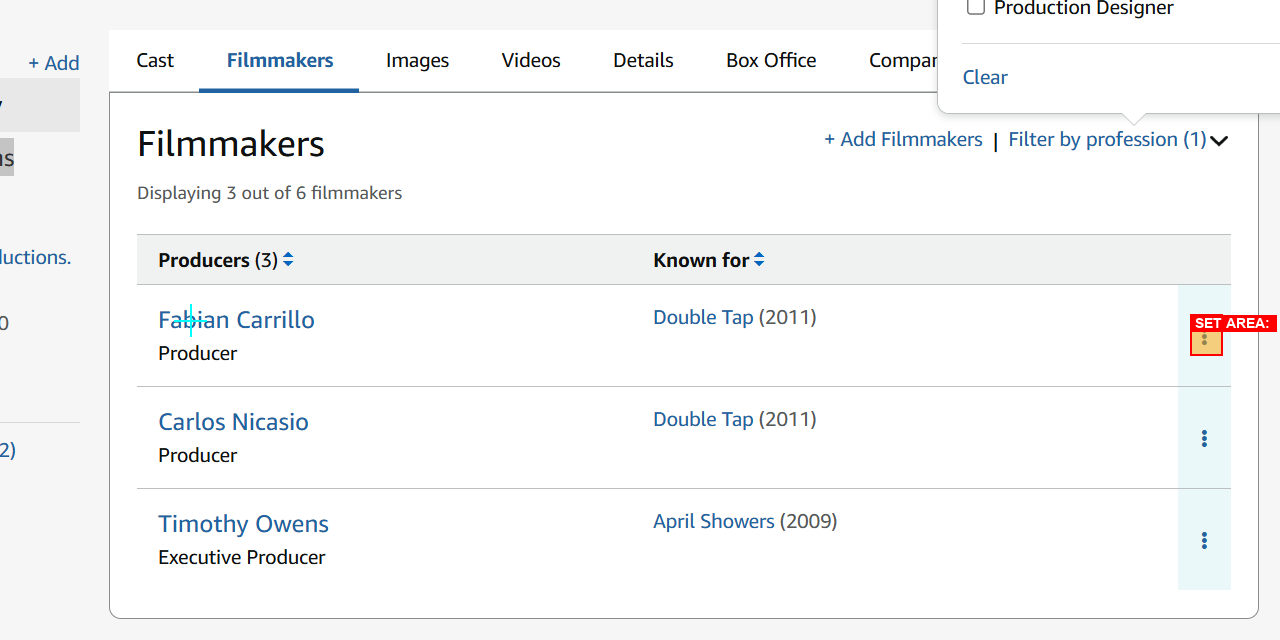

In [826]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVFAIAAAAAAAB9lCiMBGFyZWGUWPQBAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBQ0FBQUFBcENBSUFBQURiRjd4ckFBQUJQRWxFUVZSNG5HTjgvZU1YQXkwQkUwMU5IN1ZnMUlKUkMwWXRHQ1FXc0JDajZOZjlZd1dUSHA3NXljQXJMeitueUVxUmxRUUxpUEhCdmVsVEg1NzV5Y0RBd1BENTRjT3NGZmRJTUo0b0N6Njl1LzhOd1h2Ny9OMW5LbHZBcCtBa2orQ1pHQ3J3a21JQkkxRTEydGQ3cXhkZFdmcVFRZGRPcDh4TGlRWVdVQUNJU2tVTXJ5OTF6N3l4OFRXRGhxNUdaNktlTURNSkZoQ1RpcDVNNzcrNit0bmZYNy8vWGpwM05YbnRFeEtNSjhxQ24rOGVmRUR3bmoxN1IxS1lFbUVCdTVDQ0FJSW5KU1hFUm1VTEdHUXlDN1ZEcFpqWldKbjFqTFRuQnN1UVl2NWdTVVVVNUFOaUxIaXphY3JKN29jTURBd016N2FjZk12S044MVZoSGdMaUNtTEh1eDdpT0NkT2YrQTZtV1JrQ0lYZ2ljc0tVUlNFQkdUaXBReXMrVk4yQmtZR0JoNDVlV25SU2lSWWo3dFU5SFFyNU5ITFJpMVlBaFlBQUM3S0doZ0RIUkVRQUFBQUFCSlJVNUVya0pnZ2c9PZSMDWNsZWFuX3ByZXZpZXeUWARWAQBpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFCUUFBQUFLQUNBSUFBQUJNa1VMMkFBRUFBRWxFUVZSNG5PemRmVnlOOS84SDhCZVZjeXJySEt3VFVybEpJYklhTlhjdFJtV0VtV29iOFozSlpzcHUzTXlYbXArSm1admRTUE9seGdnYm1hOWttMkxUY3JmaVcrU3VPMUxKZENLZEtPZFVKNzgvVGplbm5PNG9TYS9uWTQ4OWRGMmY2M045cnMrNXpuWE8rM3p1MmhRV0ZvS0lpSWlJNkRueThPRkRBS1dscFE4ZlBsUXFsY3JTMGxLbFVxbFVYa3hNSE8zbzJCUm4vT3l6ejhhTUdUTjY5T2g2cGo5NjlPaVJJMGUrK3Vxcld0S2tiL1Z3K3ZwODFXMmRIZDVmNnVzMXhrejR1QVd0K1d3Ymg5bjRYckh3UC91M2Q4OUd6eHdBOFBlaXpxOEh5K0VRa0hqQVU5STBwNGp5cy9RT3JicXA4OENwczN6Zm0ySXRhWXdxZXdxWFFFMnNiWE1YZ0lpSWlJaUlOQ2xJejc0cHpiNVR1VUV1VFFoZDVqSHdwWG1Sc3VZclZiM0lROS9wS080NE8xSjltOFRNQW9ESXdySmowNTAyTy91bU5GdXFxTndnVFloY084K2hUOThKTzVJYklmK25jQW5VeEJnQUV4RVJFUkU5dXl5WFJDUmRURlQ5bDM0ekxjUkRCT2xPcnpWbm1ydGN0Y3ZPVG45a1c4KzUwYm01ZVdscjdMU2IrT1J2YnFtc01lbk5wTjJ6ekNDTC90alo2L0FULzJ6dzFDNkJtZ3hmT2lJaUlpS2lGa0piNVBxcHQrV2VsVWxIbzVOV0RyYUVYQ2JObHdzTWpFUkNxUDZ0WldEVXFheXZyMXlXSEJ1VkpBUFEwZEpoc0lYb2tTN0FGUWxFL2NZNDlLNitMenRmZ2JLY0s3WkpaUW9JRFNSVnNpcVFwU2ZISm1USVJSWU9kcjFGd3JMd0lqbnBDZ0NGVENyTkJnQ0JTQ0lTbHNobHVWVktXSmJ0ellUb00ra0tRR0JxN3pCQUlxd01VTlN1cmtTZWZlRjRiSVljRUZtTWRyRFVyMytWQ1kxYzFrVHZ5TE9jdmk5MDhjWUZMa3N0TmRYQUk2Y0dDcVFKcDJQU0N3QjlNN3NoMWthcU0ycThoQko1MHVranlibEFSOHN4UXl5RWtNdHk4NkV2RWVrMzVCTFU5enJhV1ZaVWNZbGFicXF6VjMxUnFLRVlBQk1SRVJFUnRSeGFRZ0JJU1VvSExIRjhRUitQVUpjdFNaOW0rMHp6aTVRQ2ZWZWNQem5YckVRYTZ1WGdGU2F0UEVyYndudDNoUDlvVWZuZjhxU0FpZmJMMUpxUmU0OXhVRzhmalZwbytjNCtlT3pKMnpTbVlsdjA0ajd1ZStDMk96ZklCUUJRSW90YzV1eStTYTFyc2ZhMGc5TDVTVTQyQzgrcS9nNzM2aE1PQUppeU4zZUxVOFlQVG9QOGtsUWxWTzJYbmZGM2MxNTNWdTI4a2pGci83dmRxNjhxd0R1K29JOUg2SWlsSWVPUy9IMzNKWlZVSkxMMmo0bnlyaGF4MTBvMDN0dGJzbTlkUmtoby9GSmZHMVhoazBQZW1lQnpWSzJLSk5QMnhteHdFZ0ZBMGc2UENSOGZ5VmJMd1hOdmJzQm80TkZMU05rNXdXbGVkRVhWYVZ0NFR6ZmJ1UFdJNWZMNEdCK3plbDZDN0xpZjA1dUJhbnRodC9MdnlEa1dRTmtaOHo2SmlMWUptVEJ6WjFJSnFyMG8xRkRzQWsxRVJFUkUxSEprcGFjRDZEdXdzaVh6OEd4TEo3L3psbE04cDAvem5HUWhoRHp5RTN1dk1LbkljZjdlazRsSmlZa3gyNmFabFNSdmRIOXA0ZDlsUjhnUHozdDEyUm1JSFB6RDRwTVNFNU5PSGxnN0pEMWFxdkY4TlpGSGZ2S1MrNlprU01ZczJIUWdKakV4Sm14N2tKK0RHRVlPUzdhSGJKdHJCd0NEdmJkdEQ5bTJQV1NiOTBBTk9hUnZuT3k4N2l6TXBtNklQcGVZbEJoL2NMbURTSHBrNGJDM1FtNnFwVHErMG5PRGRNdzNVZWNURTVQT1JhMTFFUUFKdmw4ZmFWaWx3ZHB1SkFCcDdBWFZSY29pZlp4OWprcXRQemx3UHUxbTNzMjBtQUJYa1hTbisvU2QyUUNrT3hkK2ZDVGJkRXJJeWJSYk4yK21KeWJHaEsxeE5kS1VhOG1aaFU3em9tV3dtN01uSmpFeEtmSHZnNnZ0anV4NHBHeTFYMEpLb092RXdDUjkxNENUYWJla3ViY3VIbGhnZzlpbHpoVXZGb0RzQUdmTDZhR0MwZE04cDAvekhLS3hLRlJmYkFFbUlpSWlJbW9aNU5Mb2RmOFhMQWNzM3hwdlZybDVURURLSHM5TzVYOWRDL1RiSllOZ1ZzamVwUTdhQUdBMGNVUDBEcm5sOUgxQlgrNWNFRGJOQ09uQksvYkpJZkRhY2NCN0JBQkFJdkg2ZG8vaWpJM3ZsWG9YNWViT2RidGtFRXdKaWRuaXFtcFhscmhhcW5KemRMV0U4Q0FDWTJIbU1OSFZxYVljRHEvMGpRY0dyWWtNbUtZSzZZeDhEa1NXdkdLL0lucmhoak9lcXdlWHA1c1NjbTZMYTFuVUl2RmE2TDN1OFByc2hPUjBqREhUbUcwTnhDSUJvTWlXUFFDQWF6djk5c2pnc2lYY3owRUVBRUxMcVd2OTk0YjdITjhYS1ozbUdSY2REVmpPV09EYVZ3UkFLQlNLSkxNc05lVXBEOXNZSkFOY3RvU3VIQ01DQUluUnpBMTdDMklITHFzMjRWWnRseEQ1dFY4Q3pCYnMzKzdaRndEUTFjRjM1YXlOcndlSEhEaXo5cFh5U3VnNE4vTGNDanQyZkc0TWJBRW1JaUlpSW5wMkpTMnpFWGZzcVBxdmM1OUo2K0poTkhITHdUbnEwWi9JcUZQbEg5a25qaVFCd2hsdURtcE5YU0lYVjFjQXg2UFBBNUFlajd3Q0NEemRSangrcWJLUEhvb0ZNTVhOVlZSbldzMWlvOElCT0V5Ym9ONmdhVG5lelJLUUg0OVZuMEpMb041bUp4S0xIL09FbFZSVjVPRGlvRloyaVZGWEFMZGs5d0ZiQndjZ2FZV0hUMWl5dktUR1RBQkVSNFVEY0hwemZKMTFVUE1sbkRseUFCQ01jYkpSU3lBeE13UGtzcnpLTFowNkd6SDZiU1JzQVNZaUlpSWllbllKQjdpNjJaUkhXUHFXVG05TmN4MVFXOEFsbDkwQ1lHWmNkWmxhYmV1QmZSRjZKU0g1R3B3Z3l3YlEwK3hKdXRLcXptSnBZZkhZT2VUSkZBQ01KRlhMMmR2YUdraTZjajRKYUZBRGIzMVBKOUpGZWVHalArNGovbGhUVXNtMG9LQWpEbDdoSWUrK0VxSXRjZkR5OWY5MG1uVW5UU2xMQUVDay95U3hhVjZlQWtDd1U4ZmdKOGlFR29BQk1CRVJFUkhSczh0c3loY0JQazhlRENwcWI4eDhWcFRJbXliZjVJUTRBQUpMaThwNDI4NW51NDl0dFdSbWRqMEJ3T2pON1VrdXlaRmIxL2wvdlM5NjB6eUhUZjZldTJNQ1hHcjQzZUhKSzFZeVplMVhycDJyYmhQMWU0SUdlcW9aQTJBaUlpSWlvdWVIVVZjeklEa3BPYmxLRzJwQlFtd0tBRHVMbmtDQmtabXFsYlVFWm84YkRaU2RKU0hoc1Z0cU8zZVZBTktrdFBRcU9WeElpQVpnTTFEam1Odkg5M2R3UUFvZzhIUWRCSlFYWGlhMmRKMVljd3Uydm9XVHp4WW5ueTJ5di8yY1hnOE1XYnR6Z2N2Y2FwZHEyYzhDU0k2T1Q4QjQ2OGN0bVpHWkJKQ2k4emhYVjBabVR3WEhBQk1SRVJFUlBTa2RIUjI1dkFHdGwzSzVYRWRIcHlsS0loemg2Z0JnWDJpNDJySkdzc09oa1FER096Z0EwSGNZTXdqQXZ1QXd0UlFsVlp1SXhXSWhnSVJrOWJHNENyVUV3aUZqN0FEOHNqTlVmZkdraHJBZU0wRUlKT3hVWHh3SUNZZjJaUU5tb3hzMndWWHQ1TmQyZXI0ZExBTWN2bHFnR2hldEtuelNodURZZWpUZWlsNXhzQWFnNmJVMUcrZHBDV1IvTTIvZGxmTGRkODZFSGszWGtMUkcxZzdqQmNDK29OME5tNE9iSGh0L1p5QWlJaUlpZWxKOSt2U0pqWTE5NmFXWHVuWHJWbWZpR3pkdXhNYkc5dW5UcDBtS0lwbTJkbm13L2JKOW5xOHAvQmUrWjkxVmxuMWlwKy9hSTRDMS8vOU5FUUtBeE91TFdmNnZCMGQ2MlR2RkxmQ3hNNUpuSEFrSzNCbXJIb0lOc0hOQWNPU1ZkVDVmR2kwWUxwSGR2SER3ZS8vUUMyb0p1czd5bjczU2Fjc1JyOTZ2aEg0eXk3T2ZFZTRrUkI0VnV1MmU3d0FBWm1hbVFNYStoZThPbEUweXlvNlZPNnljVnIyUjlKV2xPenhDM2Zlc2RIbzl6M2ZSR0V2SWtnNnRYTGdqSGFKcGErYzkvdEJpQURnZDZQT3hhdjFoZWZxSjhPaHJDZ0Jtc3crRVRDL3YvOXgxMm9LcEs5MTNCVHYxVDErd2ZOYUVJUU1GNlRISktRa2gyMld6L2xyakZMVnl3Z0d4NThnQjFrUDZpT1czSXRjdUNnVkVJK3cweE9ROTUrNVlIbXEvTE1GL1dOZDFFb2xJVzVGOVV5WVNDUnBVV0ljUGZhMjMra1YvM01jK2JvM3ZtdzUyWnZMejhjbkp4M2JHOVBzdVpIYmpqb01tZ0FFd0VSRVJFZEdUYzNGeHljek1EQWdJNk5HalI1czJiV3BKK2ZEaHc3UzBOTEZZN09MaTBrU0ZzZlFKaThSc3oyWGh2blBDeXpaSnh2anYzT0xkc3p6Rksyc1M5Z3FjM2dtTTNiVEljeE9nTFhIMWl3aEpuK0M1dFR5Qi9wUVZLNE1pbDU2SlhqczdlaTJnTFhIdzJoSXplNmU5VCtVaXQzYXJ6MFVhei9OY0VSNjVkbEdrYWxQWCtaNWxPeTE4QXVhR3Z4bVlGT2JuRlFab1R6dTRjdG9qeFJRNUJjU0VDQ1o0N2doYzZCNVl0cTMzdEpEL2JuRFNmN0xyejRnTzJWSCtiNEhFY29TYnQvOEN6eW96aHdtZHZqbTMxMkRpOUUxSDFzMDVzcTU4cTlHSU5aMEJ0RWY2SGordkhaV3BqVVp2T09nL0dKcFkra1NsRHc3Mi9USTQ4bXFldU5jMDM1OFcyRVU1MjFkZkJxbFdQZWRHbmhSNHVTMEszN0hJczdMWTFsNGh1ZzNJaE9xdFRXRmhZWE9YZ1lpSWlJaW9NVDE4K0JCQWFXbnB3NGNQbFVxbHNyUzBWS2xVS3BVWEV4TkhPem8yMFVudjM3OS8vUGp4ek14TTFkbHIwcVpOR3hNVGt4RWpSclJ2Mzc2SlNsSkdMc3ZPVndDQWxvRlJKNDB6RmN0bDBudzVCQ0tKU1BORXhnV3k3QUlGSUJCMUZBbHJiRGhUWlFJSURJd2V5VVorUjZvUVNrUzFCN1JsWjlHY1E5T3FxQ0pBYUZDbEZ1UjNwRElsQUFqMTZ5cC9WYkdMdXpodFVianR5QTBhMzhDeWxKK3g1dGVMR2dGYmdJbUlpSWlJR2tINzl1M0hqaDNiM0tWUUl4VFZ0WGlzVUNRUjFyYWtrcjdJcU83WXI3Wk1oSjBrZFVkeTlUcEwwNmk1aXVwVjhrZVZKRVFlVmdDRDdhclBMMTJQc2p6ZUdhbUJHQUFURVJFUkVSRTlodlFnbjBYWk50UHNiS3dIR3V2bUpSM2N1R0JSU0FaRVV4ZDRkbTN1b2xFTkdBQVRFUkVSRVJFOUJsMnhMSHJoZ2lQcW15eW5ieis0Ymd6YmNwOVpESUNKaUlpSWlJZ2VnOFJ0eHo5dUJiTDA1TmlFRExuQTFOcmV3cXhCQTRicDZXTUFURVJFUkVSRTlMajBSV1kyWTh4c21yc1lWRDl0bTdzQVJFUkVSRVJFUkU4REEyQWlJaUlpSWlKcUZSZ0FFeEVSRVJFUlVhdkFBSmlJaUlpSWlJaGFCUWJBUkVSRVJFUkUxQ293QUNZaUlpSWlJcUpXZ1FFd0VSRVJFUkVSdFFvTWdJbUlpSWlJaUtoVllBQk1SRVJFUkVSRXJRSURZQ0lpSWlJaUltb1Z0SnU3QU04SlhWM2Q1aTRDRVJFUkVaVjUrUEFoZ05MUzBvY1BIeXFWU21WcGFhbFNXVkpTMHR6bElxSm14aFpnSWlJaUlpSWlhaFVZQUJNUkVSRVJFVkdyd0FDWWlJaUlpSWlJV2dVR3dFUkVSRVJFUk5RcU1BQW1JaUlpSWlLaVZvRUJNQkVSRVJFUkViVUtESUNKaUlpSWlJaW9WV0FBVEVSRVJFUkVSSzBDQTJBaUlpSWlJaUpxRlJnQUV4RVJFUkVSVWF2QUFKaUlpSWlJaUloYUJRYkFSRVJFUkVSRTFDcG9OM2NCaUlpSWlJaGFuc3ZKeWMxZEJDSnFNQWJBUkVSRVJFUU4xcy9Db3JtTFFFUU54aTdRUkVSRVJFUkUxQ293QUNZaUlpSWlJcUpXZ1FFd0VSRVJFUkVSdFFvTWdJbUlpSWlJaUtoVllBQk1SRVJFUkVSRXJRSURZQ0lpSWlJaUltb1ZHQUFURVJFUkVSRlJxOEFBbUo0VGlndC9UUEhaMGZmVHNMMFpTZ0RBclpEVlA3LzY2Yyt2ZmhvVzhrOHpsMDJEZjJKbWZ2cnpxNS8rL09ycW1Nem1MZ3NSNU5LRW85SHA4dHFTUkMvdFk5bS9qMi9VVXlvUlBVcWVFaDE1UVZiK1Y3UnYvejZXL2YyaW03TkV6d081VEpvdGxjcHF1ZmxsWnpaTzd5UHUyRkhjc2FOWTBrUDFGcENkRFhUdjA3RnM0K3ZCNlFBS2txT1BKOHRMbms2cGlZam84V2szZHdHb2JySy9nMzIvREF3OVh2SHRWR0JrNHhudzB4b25TYk1XNjJtN0ZiSTZLbGlxYVkra3g4N0Y5bGVQWmNVVkFwQXREazl5bjlzUFVDcGtSWmt5QUZxSzBxZGIwdm9vTGNxUkZXVUNFQlExZDFHZURWRitsdDZobUxnbGFhVkRjeGZsT1hJdGVNS0VkVWx3V2hlendWWC9rYjFYMWp1NUJhVjNjZ3VLV0NIOHY0Rk9XeFJ3M0pDMGY1cFJEWm5KYzZYWk41RmRhNUQ4L0ZQZHFGVjBIamgxbHU5N1U2d2x3cVk5dFhTbnUvMjhhSWk4STlQOEJ3RlFaTitVWmo4SEw4aWpWV28wMEhQZW1nVVR6WnEyUXUrY0NmSmQ2TGNub2JJQ3V6cDRyL3pPOTVIenhuN3A3bnRJaHQ1alBJY1lBYkRzQkpSRSs3djZSU3BnNlRMTlRnSVltd21Sdm5IQ0s3N3hNRnY0OS9sL1d6UnB3WjhCOHZTdzlRczNCRWZHbC84Y295MnlITEkwS0d5V2RiTVdpNGlvbmhnQVArTmtrVDcyN3J1a0FDQ1FHSFZTYlZSa3gwY24zOGNUQmNBRis5eE5aa2Q2N01uYk5LWVJpdmswVkFTMGp4QVVBZWhscW92ekR3QXRkL3NlVDdsazFBamsyZGszcGNoVk5IYzVuaTg5SjdoMlhSUjlkbWZJNFRXdWIxYVBKcElPN0l5OUtSV09uK0FnUkxxWkpaQWdzckNzS2ZxbE1xb2JWVnRrSkJHVWJaQW1SSzZkRjduV3orSGJpSVBUNngvNXlFUGY2ZXAxZU1yZTNDMU85VHhDMzhoTUJNZ0dXblp0ZUxHZlpZOVc2WVVqNjk2MUNScS9KWGJIbENhNklXWEhGemxNREU0SElMSjJtbWh0Qk1qVGpvY2ZqOTc0cmsySTQ0Ykl2ZE1zSzc4Y0pVY2Zrd0VPQWVGN1BDcytjK09QSDFRQUxsdisyajJsL0gwbE56TUY0bUhaVTl3MFJYNW1sQ1J2ZlAwVjM3TUFBSkhFU1BYTFdva3M2WGpzTFRBQUpxS1dvZVVId0xmaVB0aVFrV1pvK3NNbnR0MXFTQkt6NjhEbmx6RGFZOUxDZ1UrMWFFOHVLV0NpK3k0cFJBNytQMjMzZmtWVVpkOFQ5clBLems1L3NneWFUN3NKa3l6SGRsRGJvQ2VSQUlKSmJsZEc1K2FqdldIN2RzMVdOS0puaTJUQ05JZUZaNk1qZnpra2YzTksxUWc0T1hSUE9tRG1QV013QUxNNVVYbHptcWVJTGRLYlc1SXFmenFVWngvKzNPbWQ0T2lQbmIwazU0SmNSTFVkV0tuaGoyRDlNUUZwdVFFTlBLakZVSzlTZWZLNjExN3hQelRiOS9DVUlKY21PSmRzbjlmRTRIU0lIRlpIN0oxdFVmbSt1SFBHMzkxNVhkUThKMS9MOU5XRHk3ZW1KNlVBa0JpcC8rS2NuWjROUUNSU2UwOEpYYmZsNWpWQllaOHhza2dmWjkrelFNOXBJWHZYdVBaVXF3RDIvU2FpbHVOWkRJQnYveGt4OWVnRDZIVDY2dk1STDJuVmxmcGg4ZTM4NGh1QzRscVNGTjBydnBHUG5OcVNQSk1LOXZrdlN3QXNmQ01QZVBkK1pHL0ZTMWNnUzArT1RjaVFBMEJIUzRmQkZ1cWZ5WkRMa3M1RUorY0NFRms0MmxsVzdMdVdsQVJBTHN1V3FwcVhEWXhFVGR4L3I5Rm85YmUxY1RaK1pMTkNsbDhNNEg1K2NVY0RIYzFIS3U3bjVoY0RiWFVOUmJvb3pyMTBQajB1T1ZkaDFNMXh1TG01UUF2S0J6a3BhWEZYcGYrVHR4ODUxSHBJbDNaUGNoUUF4ZjFicVluLzNKRGQvMSt5MG1TQXlOeTB6eEJUM1pxdlM2bVF5ZkpWdmJWVjV3S0FvcHpFMUxpc08vL0wxbnJab292dHdCNkdPbFVUNjdRM2JOOE95Z2Y1bVJseHlzNk92VVJsaDF5VkhwTnFEZTB0NmZkU0QvT1crSXRBaVZ5V213OTlpVWdmS0pBbW5JNUpMNERBMU43QlJ0WE5WQzY3RWh1ZExBTkVGcU1kTE5VNzk5YitkZ0JRa0J4OU5Fa0dpUHFOY2VndFJJRXN1d0NpamlLaDJyTlFmak1oK2t5NkFoQlpPTmoxcmZwK0t0OGxNTFYzR0NBUlBvdFAwQ3FNM3B6bStuRjArT0hROElJcGJ1b1ZkU1UwTkFNd25lTFdGd0JRSU1zdVVBaFZGVjZoYXMxcnpGOHVTNDZOU3BMVlZDRTFQWC9xczdmRkVCcTVySW5la1djNWZWL280bzBMWEpaYXF1MnJ1WDZTazY0QVVNaWswbXdBRUlna29ySjdXNXB4L25TU0RBQ0Vab05IV0hjVlZtWW16WmRYcHRUaythaFNvWVhiV3hiK3k1SVRVdExoWWxhNXZVU2VmZUY0YklhOFdzM0laVktaQXRYdVh2a2RxVXdwcVBiV1ZrbjZmbVVrSVBUWVVpWDZCZEJwc0cvSWh0ais4NkszK0FiTmkvQ3EwdEplOFVvQkFHUUsxWW5MUGtEVnkyNVE1ZVdSeTZUcENUSEp1VUl6R3pzTFU3VTlsZGZTb2w2cEt4c1g3cEZCTUNYa2p3MnUxWDdxcVZyUEZYZStodWV3MmxPMy9Ja3FOQnN5d3JyODZWNTJEM2UwSERQRW91emxVL3RFa0VzVG9rOVhQVVR0ck5scDUyT1RaUUNnYjJZM3hGcWlWNzZyUkM2N25WY3E3TlJlQ0NqeUc2MUNpS2hsZWdhL3ZtWHQvalAvUmo2QVc5dGk1TjhOYlNHZkNrMUFmamcwSElETEFnM1JiN25ZTC9zNHJhMzZBYXc5MlA5a2hPb1EyWEUvcHpjRGs5UitsN1ZlR1I4OTdvalRTNHRpVlgrSHpiWU1Bd0MwcEw3UW1tVWVpbnoxdHdjQUpzeWUvcTI5NWpTbnR4NmFlUjVvSzVycmdyMkhaVGxsWTRPelZvVW16aDJuRy9IcnJkVHlYMG1DZjB1YU1Idml0L2J0SC8rbzRGMVRUeXNyejMwV3dBVkRXNXNqY3djWWFDeGN4cWtwSzlJdWxRSnRkWmY0VFo0bEFxUm5QMTU1K2VEOThzei9TSVZPL0pJbEUyZVphZ0czUWxiL3NVb0tkREdQZkJlcnZrMk5LZ1FrUGY1YTJtWHZtbE9CV1dXSDdEMlJCc1M0ejVtK2V0QmoxR2l6eXZqQmFaQmYrdlFOUWRqb3VTTzVZclBSOU8yaEk0OTRmN0F6b2FLdnRQYmd0WDlIZVBVRTZubzdBRWphTWNucDQraktmdlM5NTNxWkJRWWR0ZkEvKzdkM1R3Q0FMTnJYYWRMR0ZMVWNCcTJJK1cydXBUWlFraHp5emdTZm8rcjVUOXVidTZHKy9WZWJpLzc0Q2VNUmZ1aEk2R0c1bTFvdjZLUUQrOUlCeS9lbXFhSzE5SzNPQTVjbFd5NlBqL0VwaXpka2grYlpUZDlaK1kxZk1zYWhVOVdjSDYwUXliUzlNUnVjeXI4V1ovOHl3OEVyUEZ2dENNczVleUtYanhGcEF6VTluZWFvUlRzdGltaTh0N2RrMzdxTWtORDRwYjQyQUdxcG4vUWdKNXVGcWg2a0NQZnFFdzRBbUxJM2Q0dVRkSi9ud05uaFZjY0JHRTNkRXhzd1JnUUF4eGYwOFFoRmpiMm1uNmNxVlUwbEpWRDdoaUk3dTlMdDlmV3hhbGRuTkhyTndSMnpMSVVRU2tOZXRWK1pKSm9WbWJMR1RuWEkzNHNzWHcrV2pkaVFGRGJ0a2U4UUNhSGIwd0dKOSt3eEdyNWVkSjNtN1RFdmVzK1o4S05TcitrUE5MMVNhaW8rUU5XNDdjNHRhN1dXSndkTm43QlEvUVlZdE9aODVDd3pUYStVM2NxL0krZTBnSkhEQ2Z0QzBnR2pENzJyUjcvcVNxU2hYZzVlWVdvWHJtM2h2VHZDZjNUWk1lbGJuUWN1Uy9mOGRnc0NaNFJVUG13bG5qdjJPaDJkNTdWRGJWUjJlWTJwUGhIeXBxL3h1Ym5PVjYxS3pXWWZpRjd0b01vM2U4K01nWFBDcXc2SmwzanUrbnVEcWxORzVyYng5c3ZTcDYvZjJHN1hrdUM0VGZ2M1AyNGRFTkh6b09sbmdjNUwzdnpEbjV2ajgrcWJQaTM5MXp4MDY5L3BKZUJvWEdwckhoR1ljQ1lhZ09WZzY5cCtBK2prNUw5cFQvUzV4S1RFeEtURXYvZk90a2JKR2Q4VisrUUFjTWJmUFRCSnk4RTNMRDc5NXMzMHhNVHpmMnozc2RGRkp3ZmZiZHREZkFZRHdDdHpRN1p0RDltMlBXUjJTK3NkL2lSS1pZRy95UlI2N1V4RVdnYXFkMEN4TFBEQXJkUzJXaWFpZG9abHc5Q1VCL2ZFWEhxQ294U0ZTdWhvbWJ6WWZzSWdRL2MrdXFwRGN1SXVCVjNWVktUN0Z6NWVtM2FwRklEV2hGbGpaNWxxUVptMGJNWGxnL2VCdGxwREJoaTZEeEtaNndERjkxZHRPRjZsVlAra09xMU9qU29zKyt0aWFJd3EralhvSW5JZlpPamVwNzJKSHVUSzZtZHJLZVE3NXZrclBFUCtpRTlLVER3Zk50Y1N5TjR4dytHRGhJRXJEOFFrSmlZbC9oM2dJa0RKR2I4dFo4b09xTzN0QVB5OXlPbmphSm4yWU8rOWZ5Y2xKaWFkUExCMnlKR2dvMnJuSzBuZU9IblN4aFNSYThEZjZabTVlWm1KQnoreHhsay9KOTh6QUxKM0wvSTVLalh6MkI2VGN2TldabHBTNHQ4SDE3bDJmc28xOGppRWJ1OU1BUkM1WTU5YUxLcnEveng0MXBzMVJFZlhBcDJtNzh5R21lZTJ2NU1TRTVQT1JZWE1RTklWOVJTeVNCOW5uNk5TNjA4T25FKzdtWGN6TFNiQVZTVGQ2VjRlTTh1UHpyUHpDczhXT1N3b3ErM3RuajJSdE1uRDJsZjFZdFh3ZEdyQnJPMUdBcERHWGxCOU82K2xmb3djbG13UDJUYlhEZ0FHZTZ1ZXdOdThCd0tRQzh6bXJRa0orenNwTVRFcE1mSDhIMnRjUmNqZXRTamdTaTNucmZBY1ZlbWQ4SFVia2dFSHI0bmw5K2UxUUZlbjliRWxacDRCVWVjVEU1UE9IZkIzRkdVZlhXVHZzVE1iUU8vNU8vd3NJQXQyVTkxZEpXY1d2aDBzdzVpZ0hacG1kSk1teEVvQk9OalphRDY1cGJVMWdPalQ1Nkg1bGRvZTh1Z0g2TGJ0SWR1MmU3K2luazM2eG5HdkxEd3FSZTlwYS9kR25VK01qOTY3ZmUwME15R0FsRURYaVlGSitxNEJKOU51U1hOdlhUeXd3QWF4UzUwWC90MG9kZGVrcE9mUFNnRTQyTlF5MUZjZStZbTlWNWhVNURoLzc4bkVwTVRFbUczVHpFcVNON3EvVlBVQ0ZTRUxWc3FuYlk4K2w1aVVHSC9ReHdLUWhreDM5SXEzWHFHNi8wOXVjQklBWi8wMnFoMlZ2V05SU0NjZlZiYm53MVk0aUpDK1paTG5qcko0V0M0MDlWNjMvZUJKMWZNL1BucWRxd2pTa0g5dlRGSXYzSTc1UHFkTloyODcwbmgxUWtRdFV0TzNBRCs0ZXlUK0Rnemw3OWZ3WVZQTnVlTzNia0RuZldkYjQvd2o1eEl6RHVYMWYxTmNMVW54dll5TW1Ld0hnRzRQMis2OU5PYWl1SFBsOGo5WmNnZzZkYk96cUg1OFM1R242bVNsTGFnbGpkM3NEWGFWZjBtYy9PZTdiWmtSZWpVN0d6QzdGaHV0QU41OGI4RUlNd0FRQ2tVU1Z6TUFrRGhNdElBZ0hBRm5ZT2JnT3JIRk5mdytXUFg1amxVVmZ3MjB1VFp2UUVPemNKN3gxaWFIZGdCdzRsRFBiYmtBMEcvQWxmazJBZ0NGWitmNFhJNEFJQ3ZLZVlLamhyenZkazFRK2UxeitiR3d2anRsUUZIbWJhRGFYYXZNQ2w0ZGY3QVFBS3hlZDFRMUlPY2N1UlJTQ0tEZDNFVnU4M3RyQVVETTd6MjM1T0J1VGxRR3JFd3JqemJ2WmVvNVhDUUJvS2VWRnFvRUFKM09tL3lkaGpTMFVwNUJmVmZzM1RTMzdDdXd4TWQ3UktEUGNiaHRpd29vR3hZbzhaem51ZkJ3c1B4S1VqWUdHOVgrZG9BODlQdGdHZUMwYVc5WlE0UkU0dlh0SHNVWkc5K0s2T0xvT3Q5NG1IMFNGakpWMVJRamNmQmI2L1c5YzlEMjBOalZnL05PUndNV25wKzZXbllDSUJUcWk0eG10b0FXR3dBWVBjMUxzQy9vK0w1STZiU3lXWHhVL1o5SGVFNm9ZVHFseUxWK1NZRGQ2b2lBaWFvREpLNy8zaVBJNk9pK3B6ekZ0WjErZTJSdzJSTHVwMnArRVZwT1hldS9OOXluN0N6cHdjdDJ5aUR3Mm5IQWQwUlpCZ0YvYkpmM21SRzZaV1hJcHdjODc5ZjBkR3JCeENJQm9NaVdQUURxcWg5SFYwc0lEeUl3Rm1ZT0UxMHJtM05OWGYzL3JaYWpaSmJ2dk9Ed0ZjbnA2VURmdWs1ZjR3Ty9oZmhsdHVWeEFRQ1V5TEtsQ21oYkwvaHR1MmY1L1JtNTFpOUJkVU5PTGJzaHZmZEd5Rjk5eGYvNHduVi9UMXY3Q2l4OWR2Z2Zlc1YzeTJ4L2o5TVREczBPa2duY2RteHgwOWhLZVYrV0RhRHZRRXROT3dHWTliQUFFbkF6T3h0Q3k1cGVLVTBmb0lMRHFJeldqZ2Y2eHdOOWw4YjhOYjlzUHEzUlpxcW9NZkpydndTWUxkaS8zVlAxbW5aMThGMDVhK1Byd1NFSHpxeDlwV0xnOGJQcGdldzJnRnEvT1Y3N3dXK1hESUpaSVh1WE9tZ0RnTkhFRGRFNzVKYlQ5d1Y5dVhOQldPVlBFcForZTRMSys1c1l6ZlYyQ0pnWGpTazcvaXJ2VXlPWnRtREd3c2d0aXFSa0tWNHBIMzlSNVJOaDdzSDllUU5mV3gvOWRWRFM5S1dXZ05uRUZiNXFCVEdhdWRSbmM3aC9Ta1k2VU5tTHp2eXozMytmMjZPazVPeTVjMDlVRTBUVXdqMWo2d0Fycng0NnI0UllNcWFIK0ZWYmZhQmcvK2s3VlJJVVovMjQ4c0FyYStJKzJuWGxvMTF4RStidm4vRHpuWHRWczdoMytzOVhGLzQ1NVljckgrMjY4c0dHSTdhZlJlektSbXVocmRaYTNOTnVqQWo0WmQ2RWdPaVd2MUJHSXhNSXlvZkY2cFNQTXRjcC82VkJUMURUVHc0Tk9rb2dxTkwySXRDcmFTQnVVVVJnMUtwL0FNRFExbWJYbTJXRG15OGwzd2NBSFZIL0YyVTVkM056N3VibXRHOW5EZ0FQVXFvc2E2enI3dW5vT2R6R2ViaU5zNjIxWFM4dEFDaStOZlBma1hzVG43TXBsU1ZHajBackVqTXpBTGRyV01KVC9lMkE0OUdIQUl4eHEzbU9vdGlvY0VEZ05FYTljVU5pMWhOUTVPVUJBNGM3QU1uK2I4OExUMmxwYnlkdEI3Y1pBaUE2OUhCWlU0bXFINlByOUpxbTJEMXo1QUFBQjg5Sk5VNDBuMzNpU0JMZzRPS2dWcHVxRitpVzdENGdQUjU1QlJCNHVvMVFPMGJrT21FOGdPam91T2YvNlZSSC9kUmJBd2FadC9RcTdUclFhYlNUMDJnbkp4Y0g2NjRpbENTc20rQys4WXJxU2pUZGtOb1dybE1zQUVYMG1YVFZuOTcvV1dHTjlIWE9YUjIrU1JkNTdGZzN2cDZ6a1RXSjJGOUQ1SUQxdENtVzFWL0JNMGNPQUlJeFR1cE5BaEl6TTBBdXkzdDY1V3N5cWp0Zk9NUE5RZTNDUlM2dXJnQ09SNSt2NlRDSjBhUFBJaU5qTXdCbHZ5aHBaT1BrSkFBeWpoekowTGhib09IdG95MW92Y1BxaUVqTk16WUdPRDc5SndYNnZ0cXpMNEJoeHFNUEpCK05UYjB4dGxQNTlNN3k0ei9FclAwSEwzWTNYVFBOc3BjUXNodXBQLzJTOXBONkR2K2NmWGZYbmR0dGRkNThaL0M4ZnZxUTU1ODdmbVhGOGFkL0pVOUxpVFI4Mld6L3NQTkpOMlZDaWNUTTBrenRtOC9naGFIelkxOWZINzFza3VVeWdiV0hyKy9DOTV4NlBnY1BmOTI1bjc0MnZTSVcwbW5mbkdXcHhmM1VrSzBKNnkvZnp5OEdBQU85R3BKSnMxYXBvcEx1bG1yRGc3TlNWVkZ1Y2M2Y0JZZXFIU0dzZVdZNDI3ZXMzUy9FNzcwUGhmVFc0cldIRmd0MFBkOGFzY1NoYzIyOUNKNG50YjBkSUFjQWtlalI1WERMcWZwY0JMM2VNVWpUWGlPUExVRkhIYnpDZG5yYTcwUlhCKzkvZjdIUXcxcjBqRDFCYTJJM3c5dHN5L3JvWHlLenAwOHpRc0xCWFZMQWRZSkxUVStEdkR3RnFrOTdXNVZjZGd0QTlNZDl4QjlyMnExcVpPdHBWdTFMcmJXMUJYNVJ6V3owSEQ2ZFZQZVBrVWdYZGRaUHpXUm5neGQ4dGk3NnNqUmJLVEtTbUpsMXF2OVUwUzI4U29mTURmaTJzalZWZm1YOXE4TlcrcjcrdVYzS0dqdHR6VGVrWlY5cklEbnBjakpnQmdDOTV3YjVoZGl2U0lhMjY4YlZZMm9NZjdVaEFIRGxmRkxaWWRXVnpXdlZWVU5JVm4rcW04R3l4Nk5uVUYxTHNGUEg0Q2ZJL3RtbHV2UE5qS3UrVk5yV0Evc2k5RXBDOGpVNDlXekVzMG5NZWdKWDVPVVRVTXRpdHl4Y3NDRTYrYVpVTHBJWTlUUXp1dGFJNXlLaTUwb1RmWDJUL3ZUTnFSOVZQVUdWcFRjQS9IWEsrVzlWYTdQdXYrWTV2NjE1NUp6ODZOOTNBT0g0d1owQlFOZlN5U0w1YVBJLys5TXdUN1d3NnovbnY3dW9oRUN5NWhON2V5MEFlRkU4eUxlVDh0ektqUEkrak1yallSbFhnSmZHanZoaXFHckNGdkZvTjFQQm5kQVBMamJOaFRZbFMydHI3RWxJU2tpbzRXTWFRUHBHWnh2ZmVCaTlNczNmYjR5Wk1QdjhzVU9oYXRHK2FORFN5QXl2aEY4Q2ZMOEpqdDdqNTc3SHI2WE10RkU3a2JpallZZTZrelVuWlZidzZsT3FkbDJUN2gySHZLaE12U3lMMDVoU3BHc2xmM0JKQVZ4UC9UekdTdFgvR2RCQ1daVGJic2dna1VtVkEzUmROUGY3QndDMEg3RDZhMVBQcUxPcmZzMDZMUU1VRDBLMlI4Ymx2aFkrNmRGWnM1OC9kYndkVkJRbHRULzJKRzZyMTA2bzlzMVhaT2tBUUZ2aXRpM1JOZVZJOE5jcjEvNFN2ZEhIY2VPS0tuTStQZFA2dXJtWnJsK242bitiRlI0aWhYRG1lMjQxL3haUVQzWSsyMzFzcTIwenMrc0oxUEM5VTY0MjY4OXo5M1JLVG9nRElMQzBxUHpxWDJQOTFFQitkSjYxKzA2WnRvWFRKd3M4K3huSk0ySVA3a3VxTWZVam5xY3FGZmIxOUI2eDB1ZDRjRWpVR3J2Uk5TU3F2dTZPTkRZcUdRQkt3a09PeWx6ZnJPR2RhV3BuTDBDQ29zWmdMQ2toQm9CbHY2YXNOOG1VdFY5Vm4wRkExRytFNXNUUEVETUxXK0FLRXE0a3c2VkI5YU9RTi9raVNmSkluNWZjZDhuUWU4eUNkZE1HZGxLa3g0YnZ2ZHpVSnlXaWx1cFphcjk0a0JTZUNCaEtSbmRSL1MwY2JXT0E1UHhmWXpQbTlUQUZjUHZTblN2QUN3TzcyZGZZQW5iOXJ4UUErcE9IZEtvcFJRdGk1ampHREFucHYrd01YZWVxZVN4VC9NNkFlR0RRbXVqZlpxbStzYnRPTkV2ZkVWMmx5VUFvc1o2NjR1RFVGZkpyTzZjUG14ZTVkR1BrbkdkKzN0cm5RSHlDS3ZxMW5UUjJuNnNoVUQ2QzkxR0N6c3M5N3MvWmtwTUQ1Y0hnMy90M21UekxWQXZvYk40RitBZUFyc2VNc1JOcWFqM1dTRXRrOWRwcnUxNVRLakxPZnJ3NktVS0JTNmV2cFU0eU5uL3lpM3JHMWZGMnNCallGNkZYb3M5ZmdHc044eEYwN2lvQnBPanE2anEreHBNSWU0L3gzalRHTzBBV3U4TFpLV0NuLys3NVRpMWpsbDBMcnc4SHIxc2NIWHBZT2pBOUpCc0NyNGtPTlNjMk1wTUEwdHFhYTR5Nm1nSEpNckdsNjBSTjM0T05qTXlBcEN0SlZSdlo1QWxua2dIWTlTM2Y5anc5bmY0T0RrZ0JCSjZ1ZzRBNjYwY3plZmpXblRJSXZINzVlMjFaS09ScWh5UGhGNUpyUDZ5SzU2ZEtEWVQ2UU5tUEpxb2JNams1QTA1cTB4OGt4RWREMWEwQUFKQyt5ZDNuT0t3L1dXcjUvY3BRcnhraFF3NTRhaDdpUHRoMXFpQm9hM0xRcmdSdnYwY21jeXJZRjdSVkFaaTVqbjZpOTdYcVlhSXBVRlJkQ3pxUGMzVjlscjUvMVpPRG95dDJoU2R0RDAzd1dXcXRxZnlxT3o4cE9ibktXNzhnSVRZRmdKMUZZemIvQWlYSjU2OEFzRFl6QlFvT0JlK1NRVERyNE1rMVpiMnZKdzVHVkhoQ3ZTYVFJNkpXcDRuR0FFdmUvbVJTeEtwSkVhc21SWHhzM0JmbysrclFzajlYMWRUOGk5dFJXVWVCWHIxZkZPYmwzYzdMdTUyWGQ4KzhrejF3SXpZdFJna0E4a0lsZ0c3aVdwb3RpdklWQUlRU2NhTmZVWFBvNiszckF1Q0kxK1NWc1hjMEpjaE96d1pncHRaVHE2VEdzVi9DbmlNY2VxS3NIMmlyMEZIU1VmVVBwZlQyL1h4RjBWTTllZldKbDVYNWQyc3NnS0c5MDY3WGRRR2c5TUdxdFpGUjl3Rmd5QUJWNldVck41MU5WWlJucDN5UWZ6MHR0VkJ6UHNDRDFLc1orV1dKdFFTbTNmcS84UGhYMFBMVThYWXdjMzNMQXBDdVc3QStxWHl6N085OWtXcHRsZGFPRTRSQWFORE91aWNOMEJiWkRiR0dxajI1aFRBYTcyWUhSTy8wRGRnbHJUNDZ0enByaC9FQ0lEbG9WNExhUnJsQ3JUcUZROGJZQVVrYmdtTTExb0MrZytzSUFLR2hoeXJYbklMc1VPaGhBSzRPajh6UDF0S2ZUdkpyT3ozZkRwWUJEbDh0VUgzNXJxTitOTXZPVGdkZ1pxVDJFZm5ZN1dZdHZVcHhaMS9vWVFBT0RyWUFySjBtQ1lDRWtGL1VmZ3NvU1RqNGl4UXdjM0kwQTRCcmdaNUxFOUIzYWRDLzU2OExtaUpFdE0rY0d0L0lEaC82V2dQcDM4eFllRnhXWlVlSk5IVE93bkJBNkxGbVFaMnpqdFZLOVRCSjJoNmFVUDBWVkwyNTlnWHRycjZBY0lzZ25EaC9nU21Rc2Q1MTVzNTBUVGVYY0lTckE0QjlvZUhxYi8zRG9aRUF4anZVOHF0YnZaVEkxZDhSc3JEZ1VBRGpuY1pvbDc5N1RJMk1Lc1B5cDlEc1RFUXQxYlB6QytTZEkrY0xBRnc5RmZmcXFhcDdGSGVPWEZIYTk2OTU0T056UytTMmFVKzB2VWRJL0hxbjNodk5Scmc2OUJBQ1FFRkc3UEVZd2R5L296MGNITEF2K3BmUGZjWmIrZzVCMHFFUS96V0JzUlZIWndUN0xNNjI5ckN6dHhsb0pNdzcvOE9pdFZlQUVRNWw2eDJabVprQjZYc1dlZlpiNmk3SmpsR004SjlleThJR0xaRnVMK04yU0N3Q2lvSTM3QTkrck1taUgxKzM5bGJJdVFURUhZeWNlbFdFRzdMVGQydFpqRWpML00yeFc3UENacDVYb2pCbjV1cmprY3RIbUR2WUxJbjhZOVUveUxsODJlbEQ5WTVjdWt1KzZHR3V1VTA0TnlvNGFwVVVFR2laQ0xYazhxSWNCUUNZRERSNy9wdC9BZGpXK25ZQXpPYnM4RC93aW0vOFN2dXU2NHk2aWxBZ3paYUpST3JEbzBmTTliVUo5ajArejlJK2R1MlNLUTVEekJRSkNVbFhqb1Njc1E3WU1Tdjl5MG1oN2FjNXZXUnRaeW1XWjBXdTg5MEhpQndHdDRqbVh3QkExd21lSXhiRkh0OFhDcGd0bkdWWGExcUhUOWM2YkowWC9ZMmovYzBWQzF4TWhYY1NRamF2ajFSZkhybnJ0QVZUVjdydkNuYnFuNzVnK2F3SlF3WUswbU9TVXhKQ3RzdG0vYlhHQ1JMUGRTdUM3UDFDcHp2S2x5LzFla2tpdTNrOFpObjZTTUI2NVJkdStuVTluWjU5cHdOOVBsYXRDaXRQUHhFZWZVMEJ3R3oyZ1pEcDVmMmY2NmdmQUdabXBrREd2b1h2RHBSTk1zcU9sVHVzbkdibktNS1Y1SURQQXUyK2RUTzdFeE8rWmFYdm5scWFmOFZpQWFBNHNzNXJYdmlJV1FHT3NjOUxsUUlGR1pGaDBkbUE5ZkkxcW5uTDdmNjl3MjJQUitnS1o2ZmJTeGU0V0NBM09YelZvcEFNaUthdVdkQVhLRW5lNk9XWEFBdmZIK2RiYWdQajF3YTlHZTc1eXp5M1RTTTBMNFBjYzI1b1VLeWRWM2pReEI0SFIwenplV2VNbVJEeWpDTkJnVHRqcFlCazJvN1ZtcFlJYnBBUkM5YU9DUFk1dnQ2aGY3VG5YQzhuVTRFOEl6WXlmYUR2dWlrT0gvcGFiL1dML3JpUGZkd2EzemNkN016azUrT1RrNC90ak9uM1hjanNaLzU1b20zdEc3b2llcGhmN0tGNUEwMzlyRWU3RGxUZDh0S0V5Tk1KRHB0eWcxeW1yVjBlYkw5c24rZHJDditGNzFsM2xXV2YyT203OWdoZzdmOS9VNTYwVmxOVzJ2ZVBWTlhucmRpTjZ6YWRBYXo5L2FZSVVUWUpYRkxLeG9VQmd3TTh6R1NuRHdXczhndE5xVE5ISW1xbG5wa0ErSi9VWDI0QWhwSTFUcDJxVE5pVGtmSFI4WUtmb3E0czdOL2ZzRU03UUg3bDVsMmdwdFUzOWJzWkFQa0ZWLy9CaUM1UG9kQk5UelFtNEZ5ODA0cVBGZ1JGcHgvZkYxSXhvRkZiNG1tcUM4bTB0ZCtHVC9qNFNNaTdyNFFBRUZoNy91ZUEwNFpKL3FyZlpZWGl2Tk9MRmg1V3k2MzMzSU1WNnlMMjlRNllFejVoVTNMNHN0bmhBS1lmOEovKzlDN3I2YkNhWURQclFreXc2bmQycmFmN0E0cngwRy9jY3FlR3luSktsYWN2NUVKSDEvTWR3OHpkR1ZFMUh0RGVjYTdqa21WL3JQb0grQ2R0YW1EN0kzTnRaaTF6Tk5nVXMrejhBL1hKbkEwNnREZXBzVWUwcm5rUFhZUGJEL0lWeXN6eVJtUHo0WVAyZVpqV2RNQnpwZmEzQXdCdEMrK0lOTHV0ZnY0L1JDWVZpQzNmOFEzOTFDNTZ3aXVWeXlEQnpQdlh2d1d6Snl3OHRIUGh1enZMTndxc1o3b0tBU0hTUTVmTkRsRTduOU8zQjlkV1dmbnpHU2R4bSs3cWN6d2NNSE9iVkZlLzNLN1Q5cDZVVDM5alVlUWVQNjg5QUFUVzA3ZEgvdXNIcDZYUjVTbUVUdCtjMjJzd2NmcW1JK3ZtSEZsWHZ0Vm94SnF5cDNQdnVlR1I4SnJtVi9hRUFRQ0owL0tRSUZWQVV2dlQ2ZG1YRVIyeW8vemZBb25sQ0Rkdi93V2VBOVJIcXRSVlA3RHdDWmdiL21aZ1VwaWZWeGlnUGUzZ3lta09pN1o3SDUyME1jcHZ3a3QrQUl6R3I0Z01PTy9rczYrR1FnejJYamZtb00rUjJGOTJ4Z3BkQTF5ZW95b0ZSTDBkdlAyMitJOHYvMEZCTkNibzVIYmhHek5DTmkxeTMxUzJ6WEw2OW9QcnhnaUJwRTJ6ZmVOaDlzbVdCV1hMM1loYzEyMXhPelFqZE9tTWphT2p2SHZqVVVadmJrOHdDL1QrbDEvNDhaMit4OVhlN05PM2hLeDJOV3VFdWNNa25yOGtpaGU0ZSswNEU3THNqT3E1SVJ5L3hSOUF6N21SSndWZWJvdkNkeXp5ckx5THJMMUNXc2lpemIzblJsNnhDL0pkNkxjbkllSHd6c3BlSWdKclMyTUFzUFFKaThSc3oyWGh2bk1xM3Zwai9IZHU4WDd5L3MrOTUvcVBQdTVmOFJ3V0RGNFF2cmY4OVIyOGNNZmNJMjhHUmkrYk5IQVpvQzF4OVlzSXVPenNzNmZtM0lpb0ZXdFRXRmhqZjhyR2taZTgrWmNic0xWOTMwWmNTNm9yb1FlbS9GWDgwcmhSdThaV0hiNzc0T0pIbjEwNUN2RjNYNDBaWFhoMjZySzBjMjBOMW56cFBLNmlIM1RhcVFucnM2NGFta1lzcys4R1pjeVBZVFBQS3J1TnNJK28vTkpmZkhUamdZOFNNZTVmYm1zR05mcmxsZEhWYmZLUEx2a2RxVXdWMUFnTWpFUnFuODl5V1hhK0FoQ0lKS0pIUDdYbE1xbHFPZUhxUjZtVXlHVzVDa0ZIVVFNVzIyaHBGUGR6RlRvaUEwRno5Q0JReURMVGJ1V0xPcHRMUkk5Ly91TDdPZmZMdWs4TDlPcHhJY29IK2ZrUHBCbTNGSkxPSmgyYjZjS2JVYTF2aDBlY1dkakZPVWd4SlVTNnBjcDR2QUpaZGtIWjIwYWsvdTRva2N0eTgrV1BibjkreWU5SVpjcGFMN2Fzd2dGQWFQQm9wY3RsMGhwcnJJNm4wL09oanZxQi9JNVVJWlNvVDA2dWV0UUw5U1cxekZoZTg5bWU4eXF0K0J6VVdKbVBrNkZNbXA0UWs1d3JOTE94cytqYUJHL3E4b2ZHb3k5bzVXZTZsb0ZScDViNFlsVzh1elhkcmhWM2ZxTmMzYlZBKzBGK1NYMVhuRDg1MTZ5c1NqVTk1Q3QybFQ5dEhqNThDS0MwdFBUaHc0ZEtwVkpaV2xxcVZKYVVsSnc5ZDI2MG8rT1Rsb3FJV3F5bS93WW50bmovdlRwbkFjazRFbDhNNkkrM2UyVHlLdDIrVS9wZE9Yb3hiL2ZKdk5HamJSYmFaVXlOelYvMHhXK1hSNW5hR0NodlhNN2FkcjdnZG1WcUxYdlg3dlp4VjJPT3gweTQrOC83QS9VRitmbmhmMmNkMVRUM1VJc2o3Q1RSL0JraUZCblYvT0VpRk5Wd2xJcDJIZnVmQTRMMkhadHRFU0NCeUtUUEU4OFJyTk8rWVZOZWEra2FkTkExNk5EeFNjL2JRdFg2ZHFndVBqSlNBUXl5czZ2MklOUVhHV21NUGJTRklvbXdSY3o2M0ZocWZPeFVwcWk5d211cnNlZi82WU82YjhoSGE3anVPcS90Yk05NWxUNUo1V2pPVUNTeEhPRnEyYWg1VmxIelE2UFJyK1dwcS9WNTJLQkhjWVBVOGh4dWZZOW9Jbm84VFRRSlZnTmRUTnVkRDNTVGpORXdlYlBXaUVHZEFNU2NUYjBOclplbWp2N1BFS0dnb09ESDhDc2Y3VXJlY0ZYcjNRLzZ2cTBlMzNTeTNmUkpqeEg2dUhveFk5R3VLeC85ZWl1clc5OWRZNTk0dVE4aWF1a3lnbjNlV1JrVWRpUWhRNW90VFk3ZU9zL2VlWDA2Uko2TFdrNDNVU0lpYW9FeUQ0ZTkrdW5QTXcvZmF1NkNFQkh3ckl3Qjd2L3EzeHRyM2p0bzFLV0tyc3RhQmlPbXVzYTVGOXd1S0lhTy9vdjZPZ0N3dnIrdlduSkJqMEgvK2NwR2tYL3ZYbW5iRjE1UTlRRHRmMmxjVTVXZGlGb0dvVGp2V05WQmt0b1duanNPQm94dTRjMHdSRVQwTEpDbGh1eE9DTGx3UDdWODZnNkQ5dTBuZWpvdUg5UVJCVVdac2lLRGdscW13eVNpcCtmWkNJQWJTa2YvUlhIdEtiUUVCdUptNi9oS1JNOGd5WlNRZjZiSTc2UW54eWVrRnpUWmtEOGlJbXBjcHU5Rkpyckp0UXllNWQ0NitURy9qd25PeVNrRjJtb1ppclJVUDZ6S0N1L0hwVDlBazAxQVEwU1BoOS8raUtnVkVYWXlzeDV0OXB3dCtVVkU5RHg3OWdmM1poeWZHcHlUVTZybCtMcjl0NVBNRGRSbm4xU3kxWmZvbWNNQW1JaUlpSWpvOFR5SUNFMjdWQW9yRjhldGJ4cFgzMW43S296RjkxTXZwMXk5QndqRnRnTk1EZFVYYmlpK241T1ZGWGVqRUhoa3IvSkJmdjREcUJhR1VEN0l6MytnMEdsdjJMNWRJMTRTMGZPTkFUQVJFUkVSMFdNcHZIVGdNZ0NSMTdoSG90L2FLRk1QSDVyNml5eW50SHhEV3kzM1dSTlgyN2NIa1BOSDJKaWZaZm1sYXNuVjl1TFcyYW1mcCtXUEhMcXYrN1dwTzIrbEZnTURiYTdORzlBb1YwUFVHakFBSmlJaUlpSjZMRmR6VHdONHNXTS92UVljbEI4VE9UVlVsdFBGZU5kY2U5c3U3UlRYRXo1YmYzbHZjS1J0cjhudUwwSXVhTzg1eVhTb2xabTVDRUNSOU5UWm1mdHo5NGFlOWJSM3RDclBJZlBFS1llL3RNd3RETjNiQTcyZTZSN2lSTThhQnNCRVJFUkVSSStsVUprUG9DMGFNdmRxMXQ0RE9UbHRSZDh1Zm0xSWV3QVFkQi8weGJpTWlORDdZV2R6M1YwNm1neC9iYjVhYXNOeE50T2ovMWgvKzBHT2VoNTZuWGQ5NVdTcjB3aFhRTlRhUEJ2ckFCTVJFUkVSdFFaM2J4eVRBcWFkVmRHdmltRUhYUUQ1QlE4MEhpRjQ5QXU3UU5lUTBTL1JZOUhPejg5djdqSThWUVlHQnMxZEJDSWlJaUpxclFxTDhnRmNUN0ovTDZtR0ZQZmp3byt2T3BhYmVrK3BFTGFUZEdobklIdWE1U042enJFTE5CRVJFUkhSWXpFVldTSG5rbFIyV1FtVFdxZDhmdVJBNDAydmRheTJyVnNmWStCQlZHRFl6RGlsUUNLYTlacHBmNUV5TStWVzJPMUdMREZSYThjQW1JaUlpSWpvc1hUcDV0Z2g5ZExkM0FQUjk1MUh0cTg3UFlBT3V0MkFTNFh0ZWcyM01YOTBiK0dsUFhGS0NEcHY5WGNhb29xb2gyY2grWTlMMHNZc05WRnJ4akhBUkVSRVJFU1B4OVJybkFoQXhPN2YxMStvWDA5bFBiT2hwc0R0akpBTFNnMTc3ejY0QWVBRlhVTzE5bVJGcVlhRVJQUjQyQUpNUkVSRVJQU1lERWErdHZWeTJNeTRCNEhmaG9WMGFPL1lTMWNJQU1yTTY3SkxPcWJoL2lPRStsb0FMcDArdTFpYTR2S1dvMk1IUS9keGhoczM1WVJzK0RsenBPVjAyMjVXUWxuY2pUc1hUMmZsajNSYlBxakxFTDIwUzdjelZ2MlN0SHlVS1A5U1N0Q3ZhUWZaQlpxbzhUQUFKaUlpSWlKNmJPMGQ1N3I5RlgxODhZR3MwM2Z2SHp4N3YyS0hpVzE3SVdEb1lEWDNyNWhBcVd6djJTTHpTWEFFQklPY2pzeUptcm8xSytxUHkxRi9YRllsRm9qYUwra0F3Tng3Vm5yVXBxeW8zMkplL1EzUWFlYzhadWpxckZPTHp6ZkxwUkU5aDlyY3VuV3J1Y3Z3VkRYUkxOQzZ1cnBOa1MwUkVSRVJQWWFIRHg4Q0tDMHRmZmp3b1ZLcFZKYVdsaXFWSlNVbFo4K2RHKzNvMkZSblZjaHlDbFVkbTlzWmRHaGYxK0xBUmZsMzd5dFUvOVJwYjlpK1hlVWU1WVA4L0FjS2FCa1lpQVFObWx1TGlPckNGbUFpSWlJaW9zWWdFQm5XRmZXcWFXZlFvZnBFMEdXMGRBMDZzSEdGcUVsd0Vpd2lJaUlpSWlKcUZSZ0FFeEVSRVJFUlVhdkFMdERVK0w0N3lJa2FubWNmVFJqWTNFVWdJaUlpSW5vY0RJQ3A4WDBYeGdENGVjWUFtSWlJaUloYUtIYUJKaUlpSWlJaW9sYUJMY0NONCtUcDA4MWRCS0tuaEhjN0VSRTkrMVRMSUQxOCtQRGh3NGVscGFYSzB0S0hwYVZLcFZKTFI2ZTVpMFpFellrQmNPTTRjZXBVY3hmaG1XTFkzQVdnSnNTN25ZaUlubjBWQVRCVXF3RUREMHRMUzB0TGh3MGIxdHhGSTZMbXhBQzQwWHcyZjM1ekYrRlo4Vmx6RjRDSWlJaGF1Y3JROStGRHBWS3BMQzB0VlNwTFNrck9uanZYM0VVam91YkVNY0JFUkVSRVJFVFVLakFBSmlJaUlpSWlvbGFCQVRBUkVSRVJFUkcxQ2d5QWlZaUlpSWlJcUZWZ0FFeEVSRVJFUkVTdEFnTmdJaUlpSWlJaWFoVVlBQk1SRVJIUmM2NU5temJOWFFRaWVpYTBIZTQ0WXJqand2RDg1aTRJRVJFUkVWRVRZUFJMUkJYYTVtVGZ6ckYrMWNtZ3VRdENSRVJFUk5Tb0hnMTlHUXdUdFhKdEFiaStNVjdRM09VZ0lpSWlJbXBTYmRxMDBkSFdmdmp3WVhNWGhJaWFUVnUwZTJmS2lPWXVCUkVSRVJGUlUxSzEvZXJxNmhZWEZ6ZDNXWWlvMmJRVnVMdStvdDNjcFNBaUlpSWlhaklWUFovYjYrdm55V1ROV3hnaWFrWnRaN3EvMU54bElDSWlJaUpxS3Fyb3QwMmJObTNhdEJHTFJDbFhyelozaVlpbzJiUjE3ZDNjUlNBaUlpSWlhaG9WYmI4UGdUWnQyZ2dGQWwxZFhUWUNFN1ZhYlhzMWR3bUlpSWlJaUJwWHRkbWUyNVMzQUxkcDA4WklJdm5mdVhOS3BiSzV5a1pFemFodGN4ZUFpSWlJaUtoSnRIbEUyN1p0ZFFVQzQ2NWRMMXkrek9tZ2lWb2hCc0JFUkVSRTlKeFRSYjhvajRGZjdOaFJXMXY3L01XTGJBY21hbTBZQUJNUkVSSFI4NnhzRWl5Z2JZVTJiWXdNRFFYdDJrV2RPTUh4d0VTdENsZEFJaUlpSXFMblVKczJiUjQrZkZneEJYVGJ0bTBmbHBhMmFkdTI3Y09IV2xwYUFGN3MxRWxmVHk4MUxVMGhsL2Z1MVVzc0V1bm82RlFiUEV4RXp4a0d3RVJFUkVUMG5GT0Z0VzNidEhtb2lvVExSLy9xNnVxYWRPMHFWeWh1U2FWcEdSbnlCdzlLbEVxT0RTWUFQYnQzNzltOSt4Tm1jdTM2OVd2WHJ6ZENhYWp4TUFBbUlpSWlvdWVUZWlPdzZzKzJiZHFVdG0yclZUV05ucTZ1VUNCNHFLWlpTa3ZQbEp3N2Q2NWR2LzRrTWZDMTY5Zno3OTNyYTJIUmVJVWlmTDlseTh6cDA1OGtCd2JBUkVSRVJQVDhxNWdGR3FXbHFoaFl0YVcwdExTMHRMUnQyN2FscGFXcTBGZjkvOVJxZFpaSXBEazVqeDBEWDd0Ky9mNzkrNTBsa3NZdVYydlh0azBiMVJDR3g4WUFtSWlJaUlpZVd4V053QlZOd1JVeGNGdTF0WkZLUzB2YnRtbFRGdm9DWUFCTVFOY3VYVzVsWno5R0RIenQrdlhDd3NLdVhibzBUYmxhdGJadDIycHJQMUVNeXdDWWlJaUlpSjVuMVRwQ0EyamJ0bTJiaHc5TEh6NTgyS1lOMnJUQnc0ZXFnY0hxL1o4WkFCT0FibDI3M3J4MXEwRXg4TFhyMStWeWViZXVYWnV5WEsxWDI3WnR0ZGtDVEVSRVJFUlVpMm96UXFzQzNUWVBINWFXbHJiUjBxb0lmZHV3L3pNOXdyUmJ0eHMzYjlZekJyNTIvWHBSVVpGcHQyNU5YNjVXcW0zYnR1d0NUVVJFUkVSVWgwZjdRa1BWSFJwUWIvbXRGdm95RWlZQXBpWW1tVGR1MUJrRFg3dCt2Ymk0Mk5URTVHbVZxelZxMDdadFd3YkFSRVJFUkVSMWVuUlM2TEtHMy9MUnY2Z2E4VDU4K0JCY0ZwZ0FBTjFOVGRNek0ydUpnYTlkdjE1U1V0TGQxUFRwbHF2VmFRTm90VzM3SkRrd0FDWWlJaUtpMXFJaTFxMFdCcXYrckRaVW1FaGR6KzdkcjJka2FJeUJyMTIvWGxwYSt1VHJCbE9kMkFXYWlJaUlpS2dCS21KZHFJWEI2cnZVc1FzMHFldGhacGFXbmw0dEJsWkZ2ejNNekpxdlhLM0xFLzVLeFFDWWlJaUlpRnFkV3NMZ1I1TVJWZWpWbzhlMTY5Y3JZdUJyMTY4L2ZQaXdWNDhlelYydTFxSnNOZThud0FDWWlJaUlpRnFwaXZpV0xiMVVmejI3ZDFmRndBQWVQbnpJbnM4dEN3TmdJaUlpSW1ydDJOSkxEYUpxQjFiOW83bkwwcnEwYWRPR1hhQ0ppSWlJaUlpZUtqYjh0bEJQMUgrYWlJaUlpSWlJcUtWZ0FFeEVSRVJFUkVTdEFydEF0MG9YZHZyOEVBc0FNSE5kTXQ5SjBzekZlV1pJSTlmNmgyY0JBR3huQlV5M2J1YmlFQkVSRVJGUm8ySUEvUHlTblFsYXZIRGQ4VnRHbzllR3JuTTFVbitwczZKRGR1d0RBRmhZem1NQVhPRkI4b0dkSVZjQUFBclhnT25OWEJvaUlpSWlJbXBjN0FMOTdEdmkxYkdqdUo3L0RRdE1MejhzZXNXRWhYc1NzbTlLRTNiTWNGcWIzSnhYUUVSRVJDM0FyWkRWUDcvNmFWaklQelVuaWZ2ajFVOS9mblhiNWNmSnZqajMwdG1rek9LeXZ6SVBoNzM2NmM4ekQ5OTZuS3lhME9WVm4vNzg2cWQvbkc3dWNqUTJwU0lqS2VxcXJQelBwM2laLzhUTS9QVG5WMWZIWkQ2RmN6MngvTVRqY3o3ZDBmTzlIVDNmMjlIWHAybnFwK29ib2Vua0hON2Y4NzBkcnFGWmRTZFZ5dmF1M2RIenZkRGdlcVI5RG1nYkdCZzBkeG1vS2FRbnhDc3EvOGhJQnl5YXNUUkVSRVQwOU9WRWhrMDUvQUE2aHQrc2VzMVdxODdrU29Xc0tGT21wU2l0T1VseFVhYXNDUGVVR25kbUhnNmJGdmxBdzQ0QjFuKzkyeTl1Kys5VFRpdlJNeTltcWIwaGdJS2lURm1SUVlIbXJKcVBVaW9yeWtTUm91NlV6NXJMcXo1TmlOQ3dYWGZXd29tZXdyTXpseWVkaHRhc1Q2Y3VzY0pUdmN6U29oeFpVYWFnNkNtYzZra3BrOVlIcGtVVXdyeVBvVzE3QU8yYklreXEva1pvSW9VWFZoNjhEMEhuSlpPTnEyeVhwZTNkSFIrWVVnUVlydjc2dFNHcWpWb2k5OG1tZ2FzeVZ1MCs2NzV3MEhNZkhMSUYrSGxsNWpxbGNnaXI2K2dSelZnVUlpSWlhZzRaT3lKbG1iS2l6TnRaUVNjMXhhV05ycUFvVTFhVUtkY2MweHErMkE2QW9aRzRDYi8wUDJjT3p4WjM3Q2llYzZSK3FaVlNXVkdtckVpbWNhZmdCUk05b0sydXVWR054MS9hK1hQcmFRUFVMRXQ2dWhEb2JybHI0ZGpWYzhhdW5tTnYxUVFuZVRwdmhKdy9VZzRxWURLOHo1RHlYNzRVLzF3STNoRGE5OVBqaTgvZXo1UVZaY3FxL3Z6UnkycVdLWkNZR25TMUtZdjFiT0FZNEJiRlkwL2VwakgxVEdzMjUvRDUvb2ZDVDJTYmpaL21Pa0RZcE9VaUlpS2lKbmYzY3VEUDZSaHNQM2RReDNxbHYzcnQ0RjJZRERRMFBKOFRjU1pSNFdBamFPSUNxbGk5NWhqK3B2R2oyMDBtdVYyYjlGUkswS29aZnZ2MVdFY04yL3V0RHVpM3V0WWpjM0tMQU4wbUtWUkw4Yy85VkFBaXZTWU5UWi9LR3lGangxLzNnZmF6bkV6THQxejR6RGYrSUdEUzNYaXVtKzZ4dGFtUGRCWXdkSGNRTGRzcEN6bVdOTCtYWlZPWHIza3hBSDZPQ2MxR1RQRm0weThSRWRIem9mRE80Yk01a0R5WU82aGV5ZU9PWldXaTNkeHg5aWF5UTNHWDA4THUycmgzcUo1R2NUOGo3dHlkZk1EQXRNOFFVMDI1S0Iva3BLVEYzVlpBS0xZZDJPT0pBZ09GTEtkUUtkQVRHUWcwOXNZdXlyOTdYNkhUM3JCOU94VGZUNzJjY3ZVZThJTEVzYit4UUF1QVVpSE5PSjJjcDRDZ1d4OXpxeGZicWVVSkF3T1JRRXRUQWczNVZKenIxcVZMZC9JQlFORE5vb2VWcEpiQVQ2bVF5ZkpMQVZYWlZLY3RyemZCaTkyRzlEYXN5Rmx4UHplL3VKMUJoL2FDc245ckdSaUlCRnBxSllGZXI1ZDZtSmZuOHhRVjVkKzlyMEJaMlRTNWxTb0ZBRmxlYm80ZWdQS1NBNmo1ZXRYcXYvejFiZC9SUUtmR1FpaHVwNTFPclA0YTVkd3ZRbHRkUTFIVmw2RG11Nld5a3BVUFVpOG1hbmg5bFEveTh4OUFkYXp5UVg3K0EwWGxhMWR4bnp4eUxSV0tGVGwzY3dGVUtWWEZLeWdVMnc0d3JYcFlVZjcxdE5NM0NnRVlkT3R0MjcyaWhtczRsOFpMcTNpalBYcERxbCtPZWpFRzlqQ3NxYXF6MHFQdUFpOGFEbm14WXBObzBqc2psanFvRHJsd1N0TkJncGM2RDlrcE8zMzV4aVZZTmtYVDk3T0RBVEFSRVJIUmMwZVpGQmFuUkFkamwxNGRKWVBiNC9yOXZTZHkzRjNWQTlpaTFGOE91ZjUydjd3YjVBV0JSR1JiYlVpb0xIN3g1eGYyM2kvL3MrMHB4KzZQSDdsbEhvcDg5YmNIVnErL3ByRjlHRWo2ZkVIOFFWUFRUZjFsbngrVzVaU1BReFlZbSs5eVV3WnRTNHVvNk5yYk50N3ovY25MQittVzUxbms3dFpQOE5lRkVLbGFnaGxEaDE0NCsxbmNnM3kxZkNLL0dHb0M0TzdaT1VzdlIxUzUwck9HdGpaSDVnN1FPUFF4UHlaeXpKYWNIRDNEVGY1T3pnQ1VXWHZYUmkxT3Flam1mUUh0RGJldUhPdllIZ0JPYnowMDg3em8yeSt0cEZ0alZxVW9BZDBsWDdpNTMvNWp5cWFzMU1wSmoyS3NYSjNDSjNWdVNPVTl1YVRQRjhRZmhPSFdIelMwRDUvZXRHUHFXZFUvSHdSK2ZTZ1FVSlY4bG5FZDE1dDVLUExWMzVSekY3N1cvMWpVeDJjZktJQUpzNmQvYTYvcC9LV3k0Tlc3UWlyekthOXpXY0tjejFMajJocHUvYzlZeDhwNDhFSEV4ckE1bDdVODU3MjFmT0FqcGQxNmFPWjUwZngzZE1OQ2IxWFdxcDVvOWNMeDdxWmFBSERyN05UUDAvSkhEdDNYL2RyVW5iZFNpNEdCTnRmbURjRDkxUFZyVGdWVzl2RytnUGFpNWZQR2V2WnFoMzlPVGZrOE5VNTF0MXkrYkwvZ01nQklldnoxNVFnVEtGTVBINXI2UytVOWliWmE3ck1tcnJadkR3RDNrMWF0akFtV3F1WFp4Znd2LzZFbWo5WmJXOE90UVdNZE5iMFI4aE9qWm42YkVWZDVoNXcxN0cyK2EvNVFjMVY4ZSt2czFNL1RNdTM3ZmFXVDhmbXArNVhGMEV2YyttWFpDMUZOem9XY1N3Qk1PNWxYYmpOMWZFMUR5aW82U0d4RlNhZGx1YWYvZ1ZXWHlzMy90M3o1N3QyN1I0MGE5ZVdxVlIwNlBQSXJtcHE3ZCsrdVc3OCtORFQwblhmZStiOWx5K282WDdOaEFQejhrc3V5ODFWUGQ0R29vMGpZZ0pkYUxwUG15MVVIU2tSbG5hY0xrcVAzaElZZVBSS1pjQXVBa2JXYis4eFpzMGFiQ2RXUHVoSzc5OEMrSTBjanoyY0Q2RHh3b3R1czk5NXo2cW1oOTdYOGpsU21yRm93dVRRaEluVHZvU05IVGlmbUFlSmVEcTd1M2o0ZTFpSzFZc3R2Smh6NUpmVGcwU1BSVi9NQXNlVVFWN2Q1M3A0RFJEVmV4czJFNk9QSG8wOG5KVjlRRlFuUTcrTXdaTERkbTI2ZVF5d2FVaUZWcWtaVzhaRXBNREFTVmI4NnVUUWgrbEI0ZUhsRndXaWcwMmhYci9lbVdFczA5VUl2a0dVWEtBQUk5U1VpL2NxTlNYSFJ5Ym1BdnFYRGFJdkt5NU5MRTM0SkN2cTFQR2ZWdFl4M25URGMyb2c5M0ltSXFKcXoxMElVc0hxdHR4VUFCMVBuME1zUnB4SXpYUTFOeXZjcll2Nlk4dHQ5aFo1b3lTejdpYWJ0SU1zNS9IdkNxclBxV1dRRnI3Nnc5ejdNYlFkOC80NlpDRVhTUzRuclF6T2F0dGdaR1ovRDJOdmJ4c1cwUFdRcG42OUppc2hLblJMWXp0bGhRUGhJTTRtd0tQWGc4YW5SRDBKK1QvQWVWREdCa0hMdmdkUUpZd2FFRDFWTHNPMTRXSmZPODczdDFmSkpDNzR3ZFBrQVFLNWxNdHg4azFVM1c5UDJBT1RaaWFzQ1V5UGlMZ1ZkSFRDL1YvWGk1TWY4UG1aTFRvNWV4Mi85bkp4RldzRDlxTUNveFNsS3E1SDIzMC9xWVNJb1NvMk9tcm83WitZM01URitGZVdSZmZiNUtlaTFuekJJVndoZGM3Mms5WnV6VXR1Mm56OXZxR2UvanJoL1g1YWRIbC84OUZ1QWEyTStjc0NtQVE5KzM1OTZVTlp1d2lUTHNSMEFDSHAxUVAydXR5ajQyOThWYlhXZEJ4bUtBTnNYYXpqSDdkelR4ajIyK2xsWmlTRFB1TFFzT0MwcUxuN080YzY3WEd5OCtxWE91Wnh6NEt6UzBiNDhBaTY4ZE9BeUlPcnNQckNtcWR0azZ3OHFaN21OK01GV0pNVDl1TjJuNXNUSkZxLzl3L3hicDRySjNqSlBuSEw0Uzh2Y3d0QzlQZEJMQkdRRnJ6NFYrQS9NYmZ0OU03bW5SRmlVK21mTXg3L0pscTArSlBoeXNydkliUDRNM2Z5cmFYT2k3OFBVZU5OckhRRkFUeUlCOG1NaXA0Yktjcm9ZNzVwcmI5dWxuZUo2d21mckwrOE5qclR0TmRuOVJjVDlmRFpZcWpYRVpkRHFzVDBrdUo5L1R4YVhXQ1FFY283RUxFNVJtZ3djOE1PTVBpYkNvdnhDV2VvcG1lYkpwYkpPVFYyZmNRbnQzTit4bjJzckVzcHp3cmFlWFpXUzZyUmFTNjJTa1I5eitiTXVodDZ6QmsyMGFBOVoxc2JOOFNIU25QVVJXWTZhZms3S3ZQRUFnRlhuR3I4azE2Qno3eTZBN01IRkRFQXRBUDd2Z1FQU25KeWY5K3g1SUpldldMN2MxRlJqWHhGa1pHVDRMVnNXRmhZR1lQZnUzYzkwQUJ3WEYxZlBwTGEydGsxYUZHcGtVUXN0M3lsYjdOZi83Ti9lUGV0LzVQRUZmVHhDQWNEYS8xelVMR0YwOElMWnZvZWs2aW15YndZbUhBNWM2N2doY3U4MFMyMTVldGdpenc5MkpsVDVNVlVhdVNraGN0TTZoMjhqRGs2dk5nRjFldkFFRzk4ckFPQzVOemRnU0hMNDB0bGVPeExrVmZMZmwzUjgzN3B2WmgzOFk0MkRDTEsvQTcxbitZWGZySkovOWkvcm8zOVp2MjcyZ2VqVkRsWGYzL0tFSGZPOFA5dVhvR0ZtUTJsb1NuVG9qdlVMSmE1QmYyNTM2MXIvT2dFQTJmRkZEaE9EeXhhYUVya0duZHp1cG41aWVYcjRZZy9QSFZWWG5McDVKQ1QrU01qYWVVWVR0MFFIVFRHcUduV25iM1VldUN3WmdIQjJ4SzNWZ3lFN3M5SEhVNjJxcCt6TjNlS2txcEJmWmpoNGhXZHJ2QmJBYVZQaVhnK3U1a3hFOUZ5NkZiSTZxcXg5U2FuTUJQQkgxS3NuVmQveGRXY3RuT2paUmVOUkR5Sk81QUM2RTE4eEJnQTlxN0Y5TGtja1p1MjlpdklZTHl2a1FFNCt0RHhualorbGlqRTZkUFNjMDE3eDd6OVdWWHdLeFNTc2tnS201cnZtMnFpK2hSc083N3hWNS9lZVczSnFML0dseWhJQ0tKc0N1dDdYYS9qVnN0Y2NWZi9zWU85bG14cHhXbWsxWnNTbThtLzVoaE5NaDBRbm5mNUhsZ2xVeEFaV1k0WitXeTBCREwvMWQ2cVdUMnBXTGdaMFJCZWJKZStvbmJERDBQa09XUkdISDJUZUJxb0d3R3JSNzlnSkVpMEF5SXBmZjE2SlB2MTJUYk0wQUlCMjVxOE5uWC9xME9McldjZnVvcUtIK1pCSkU3ZTZsSDlGeURxK1hnRU02REYzWUdjQTZORFJvRU5IRXpTZG5JOC8vVm50NjBrdE4wa2x3ejQyenNqSy9EWDFJTFQ2MjlvNFY0UlU5YnRlaWYzUXlIZk42eGhoTHVueHc3d1JaUmZlWWNUV2VVV3ZyczQ2SFpsd3llVTE1OUdkRFM3Zk9uZ2k0U3Y3c21IcWlwaXNDTUJrVU85YU91Sk9lR2Z5a3JLbTVvN09jenQrdTNiL3g0bTNnazQrMk9SUTNubFlyL091cjV4c0t6b0p4L3krNmgvVi9UeW83SDUrYy95dTB2MU9oKyt2T3BEa1BzdHl5SEJqNk54QzlIMTBrRGdQSDFCUkJTRUhjbkxhaXI1ZC9OcVE5Z0FnNkQ3b2kzRVpFYUgzdzg3bXVyczhpTHVxQkRwT24yeHBvZ1dnbzJIN2pzNWRBQ0FxK1Q2ZzZ6N0p4bHdFUU5kUUlESWNwL0U2bEZHL3BGNHFoZTJrMTFhL3BpcFh4MW1MMnl0OC8xaC9QWFhqQmZ2bEZRVjVzY2MrL3hGbExib2RPaTV4dWhheVUzWXBLeGZRRUFEbkZ5b0I5T3Ftc2F0RkxYUU5CQUJ3OVo5YlFHVVBoY1dMRi8vNzMvL095OHM3ZE9nUWdHKy8vdnJSZHVDN2QrLzZMVnVtU2lBV2k1ZC84VVVEVC8xVWNSWm9xa1ZDeU1lVExQdE1xaGI5VnBCRnpmUHlEZlN4N3pydzNaMmFvazBBc3VpUFBmeXYxSGlDeUlCSkEwMWU4YXdhL1ZhNkZ1enBzOUxmdlkvWjY5V2kzMHJwV3laNS8xTHQ2T3pvelJxalh6WFNjSzloOHlJTGFrMVRsZXpzU3RmSzZOY2hJTEpxL0N5TFhqamNwbnIwcTE2bXNObDJQa2MwVDh3SXlEUFNaU21CVHIyZE5WWjEraVpIeStyUmI5VUUwcWN5dHljUkViVVVxZ1kwU2VmeVNFYlhlWkFJS0RwNE9xMHN3ZDBieDZTQXdIQmlqUzFzaUx1UUMyQ0lmWjltbkxUWnNNTWpMYVVkOUF3QktKVDVOUjNUUWNNTVJxcDg4Z3MwZjF3S05IMGRsc2I4UGlhNGF2UmIzck4weUlDZWFrMTVIU1VpQU1yOHdzcE5CaDNVSWxEakxrUDBnQXVYWi82U2xOUDBTNzgycnZwZXI0RnVnK2RYNjkzTlVRREljay8vQXd6czQ5a0JTTXlLS3N2elFjUlpXZFVKbk9yVWZzaUE5Z0FpTHFSVmJoUG9xZytSMVhRL2E1bmJkellIOHE5S2ExeWpXUFZPTWUwOFJLMm5zV0VIWFpUZFRzYTJGbHBBN3Vlcmo1KytYV1dkSjZzK0l1REIrZzIvUjJUVS9pVXQ5VmdpZ1BidXc5WExaZXhzcXdzbzQ1TFZwdVJ1Qy9WS0Z1alYwb2tnSzdXV3BieHIxYTJMTGdBb3EwemtQbVh5NUNYLy9yZFlMRllxbFdGaFlmTVhMTGg3OTY1NkFxbFVPbi9CZ3JDd01LVlNLUmFMbHkvL3duMksyMk9XNEtsZ0YyaXFUVkpVTkFDakVkTjhaczV5SGRKWnJHK0Fnb3lZNzN6Y041MVJKVWpZNHBjQVFGdmk4STZQNTV0akhDeU5SUHFRWmNRR2ZPU3hzYXdiVmZyRzdXZDhWdy9XbUgvMjhXZ0F3Z0ZqdkdmTWRSdmZSeXd3RUpWa0o0ZDk3cmFnTE42VEhWcS9EZ0FFMWk3ZW5qTmRuYXc3aS9VTmNDZDU3ekwzaFdGbHNXTDRqbjNaYjA2ck5xdS9xTGVEMDZUeEU0WTcyRmthbFhXMGxzdlNyNFN2KzJCZVNJb3E2NTNyZHZrNnphNVh3Nm44eW5wWHAvVUpaVms3QkVRZThPeXR2bDhhTW4xUzBEWFZ2eVZPeTdjRWVEbVVkVXN1U0E1ZjdPRzVLeDJBYkkrSDkraWJJVzlxNnE5OGJLSDFZVmxaZUt3dE1wSUlBT0NPRUFBSzl2a3VMVCt6NC95Z2xkNE9mY3M2WHN2dlNOTXZSeDg1SEpxa3J5RkxJaUo2TG5UMlhQeVdwK3FmV2NkZFAwOUREWE1zcTh2NUl5TUNNTzhqRWQ3TkxXdXV0VEFjQXRucFV5bW4zKzR4UkFzb0xNb0hJTkt0SmJoVk5TSVpkcWpmak5OcWFwb0YrdG1SbjNqcTg5MFpwMjhYNVpScW1lanBkdE43ZEluYW5NWEJnSlpvdFZyMEMwQmVvQVJ3T3ZSUXo5RDZuODNjZSs2TnVHOHpvbjZMc1Q5ODFtcUE2WHczZThjdVRkY0Z1cVpab0IvSFkxMXZQYlUzRVFGU29CU0FxWXR0dThBL2NnL0VQSEFlcVl2Q1M3OG5BbjFNM1d2cVRhMkpZUWRkNEg2MXlFMmQ1dnZaVk53UFNKWGV2d3BvYnBaWHZWT3VKOW0vbDZSeHY2MmIvZHkwVTRIWDBxWitsbWJReGREYjFjYlR2ck1BTUh4dDZMZVhJeisra0RObmVhaEExTjV6bkkyM1l3OEREVDgzRmNrVUFIUWxWWnRVelUzYkF3OXFhdUJ0T2dxRmhnclUwZEh4bkRhdG5VRHdmLy8zZjNsNWVmdi8rOStpNG1JL1gxOUxDd3NBU2NuSml6Nzc3SysvL29LcTdYZjVGKys4L1phVzFqUGR5TW9BbUdvakhMRjBiOUJjQi9YeHEvb1dUaXYzQnFYMThEcXMrbHZnNExjbmFJNkQrakJVWWQ4eC9xRmJrbnZNamdRQXlJL0hwbU93bWNZVG1FNEpDZDNnMmxzOUpqU3pucms5Tk12RzRadXkxbFl6aisxNzE3bGFxc2Q0K3RaZVFYdXo0eDNYcVFZaUhZOCtqMmxPYWpuTStpUFgrOUV3VXlneXM1a1djTkpVYURJcFNBRUFzVkhSOHRsVDZoNC9teExvTkd4bHpkRXY1SWQ5Rng0dk83VlhXTlRhRVdxLysrcGJ1QVpFaGNqN2VQNmlBQkMrZVdmMm03TTByTUNua01rQXkra2JnaFpOc2U1YXRVVEhJOFBML2pWbVhjaFNKN1Y2RUhhU1dJNllZamxpU3AxWFFFUkVyVW5PNGJqN0FGS2pZK3lqcSs1UjVCeStxQnhTYzZ0dmE2QTQrL3VZVFRrNU9yck9EdWFUVEhVVjJibS94ei9hUnFmcjJMMG82cHBzL2MrWFhlWlZueHpMMW1HQVYvWFJ3bUxibXVNVWd6Nk8rd0p5TDBYSHIvcjkxdW56YVRQUHA5bTZ2clp2MGpQOUc0RzZobDd2WTdCeU1yWDlJelhpUkVMT1NIdURtS3dJd05uZTZtbXMycVVzcVZleWlsSEJhcnIxTVFhQTl1Ynp2ekNkbnBnUUZKcTZOeU5uMVpiSTliK2FoeThiYXE1bE9PSGp0NXd6TG9jY1NObDQrWDd3N3VQQkJ4TXJKZytyVzNHTmtYdzlHSnQzQWFTcVRCcjJacy9KTFFKZ29GOTlVblJkWFYzUHFkTUVBb0dxTC9SdnYvMTI3OTY5VFJzM0ZCVVZ6WHp2dlN0WHJnQVFpOFVCQVJ0ZmQzRjV4cU5mTUFCdVlmWjRpUGZVc0t2dml2TW41Mm9PTXArQTJlZ3BEaHBtYnhJNXVEamdzT3BEMWN4cG9vT0dTWmhFRHE0akVIbThyaE1NY2FzYS9aYXhIak5HK0Uyd3FtZXozY1NxMGErS3RyV1RpMkRkRnMwZG5ZVzFCTFhhRG1PbUlHZ1hBQ0E5T3h1b285SlNBaDNzL1dxSmZnRnA2S1o5cXFJS1ozNVhKZm90STNMOTBOdm9sL1haQU00ZWlTNlk1YWFod2RiQzkyVFVncjZhSmd3cktMOUdpYldHZWlBaUlxb21LM0Z2QmlEcC9PMDR3eW9oeFBXME9jZnVoeHhOV0RMUVJ0QkJ0eHR3NmZiOXEwcVkxUEFOMmJCak82RG82bzBzMkxlWVVLMGVIa1FjeThtQmx1ZWN5Y3ZMZndpd1FXakVQOVZpNFBiVEYxc1BYZmJIcXZQeFl3SlJNVUcwcEdNNzRFRytuc1I1ZUFQclJLZWoxV3V2N1hvTmluOWlQbDZSRlBGclF0UWtZOGNudjVvbTl2alhXeWRsN3NYYkFIUk5WRU5OWDFSTmhaVjE3RzR1VHNnZzZEeDlXTU5XSk02OGNSK0FlWmNhT3l5VTNjOVZSN2ZpV200OGdDNmlSNlkvSzZkNnB4UzI2elhjeHJ5bU5HaG4yR2ZRRXI5QlM0cHY3ZjMyajhXSnFjSHhRMWNQQXFBbE1CMHdhOTZBV1VwWjNNN0lLZEU1NjQvZWNxdysrM2Q3RXhFZ3U1LzZEeHpWaG1wZnVuNGZnSlhwWTQ0L0tMdlk3RnNOYkVET2xjb0F3T1JGRGRXb3BkWDJMWGQzTFR6OGJNblN1M2Z2L3ZYWFgyT2N4d0xJdW5rVFFJY09IVmF2OUIvLyt0ZzJiZG84WHBtZnBtYzlRS2RuazVHa3pwN0RFcU1HVGpGVjlXaXpPb041SStQSGpQZFZIVGJxSlNYUWFWanQwUzlRRUIxZUZ1Y0xQS2M0YU03SHhxNThSM3EyNXJHODF0YWFvbDhBUWxGNVJDM2R0L2VzNXJIU1JFVFVLdWgxY2hsazZHSldSMkJ3NmErc1M0RHRVSnNKdzIyYzFmK2IzTU81YmZsSVN6MnpvYVpBYWM2ZTZQdVZSeXFWaXRMS3Y2d0dkRFFBTHAxT3ZLVFdGcVd4aDJTTGtpdk5CZEJPMHFFeTdsZS82a3BheHJPV3Y3YWtDM0xpNHFjRUo2bUdIQXNHR05vQ3FkR1g0aDYzR2dSZHVyMHNVdlg3YlFHZS9Ib3JsU3JWNzUzODZHc0hTNEYreHVWTEgrazZqKzVzZ1B0N2Y0MFB1dzZUb2IySDFOVnlxVkNvZFZ4WHB1MDkvUUJvNTF4enc3VFZ3STRHd0tXWWxOVEtZaWd2eGVSa0FpYjl1dFU0TFpucW5YSTdJK1JDUGFwQXAvT1FudTBBeUt1bDFSTFo5bWtQVkI5YkN3RG9NYktmRnZBZzdJVGFjRjlsMnVGelJVQTd4d0dQdVZhV3ViRXVnRXVabWlmeHFWbk9wWDhBdExldDRmZUFObTNhdUxtN3IvM3FLM056Y3dCWk4yK3FvdDlldlhxdFdiM2EzY09qUlVTL1lBc3dVWTFTZGs1dzhvdFZkWTJwS2ZvRmNDRzJ2SCtadlhYZFUyMG5KMTBER2pBak56REUxVTJ3TTFRQklIMmowMHV4YzlZR0xOSFVKRTVFUk0rOUR2M216cWx6T3VXMHcyZUxnUFlUaHp6U2RxUm43VEhnUXNUNTNCM1J1YzR1aHA2VE8yLzg5bGJFN3JDcDEzdE03NjJyeUw2MUp6cm50Rm80aklFMlM3ci92dmg2MWhUZjMrZVA3bXdpZUhEeGRGWndZcU5OdXlqVTF3Snc2ZlRaeGRJVWw3Y2NIV3RiWHJRUkdkdGFhRUg2WUVmSWNkdVpWdDFrNlJHUnFldlAxM0JSV3NhekZ0dG4vbDlNeU9tWXFTTGRmVzZtZ2hkdHZHM1Rac2JkbXZKcDJOd0p2VjM2ZFJaSTA2L2VrQjA0WGVSUk1lbDBOZi9FTE43NXdHcUl4TFpYWjRudy9xWGY0NE9rUVBlT3RjeHYvRlMwRXdrQVJlN0diMzgvM005cXRaTXAwTkhrUlVENklHanpId0tuanNpUW1ZeDFkSHlNNjYzSjdReW5UL2U3TzVpT05OS1NwcVJ0UEhVZmJYV1h1RmxYZGxJWTJOdFRkQ3Z3V0JiUWJ1NlFIblhtRjdIOVo2Y1lVODhoSW9uaS91OUgwdzdlaGVGQXEwZTZhcXNaTVBUYmdXRXp6NmROWFY3a1BhR2JPUXBUejZTdU9sc0VQY1BsazJxWmJjdlFmWnpoeGswNUlSdCt6aHhwT2QyMm01VlFGbmZqenNYVFdma2ozWllQdWhVU0dDUHRidnB5cnk1V1J1MWt5UW1yb2g2Z2JmdWh2WEI2OS80d2dlbEljNG10YVh0NTlyWEEwQnhBeTlaQ1EwQnIrNWIxaFBQeEJ3OUhUYm5mdzl1MkUrN2RPZlpyYXNoZEdOcGFlOWR5T2JVU3ZOUjV5RTdaNll6Y1MwQUQ3clFzYVp3Q2tCZ09xZm5OMktaTjJ5bFRwbGhhV3M3NytPUDQrSGdBdlhyMUN0cXl4ZGJHNWpITDJod1lBTGNvSG52eU5vMXA3a0swSEhKcHdvbURCdzhsbExlNWlpeUgyRmxiTzRqck05d2pmYWVuVTNpMGFscXFXcUpmQUhsNTVjMnkwYjZqK3ZoclRxUW9MNE9GWllPaVh3RDZZOVp0bXhMNXpqNFpBRWhqTjgydzN3U2pFWE1YTFBCODdOV01pWWpvdVhVK0pVUUdtSFoyMFRDQmtKYWp2U0hPNTV5T1NjeHhHV280NExVamM2S21CR2VkUHBGNitnU2cwODU1ek5CTmQyTG14RlNrTjNSZjdLaFlmM3haU3M2cTNUa0FETHAwL3ZaajR4M2ZwcDV1akpJYU9sak4vU3NtVUNyYmU3YklmQkljR3lQUCtyQjFHelFyT1NiNFd0cFUzelFBSm4xNjdIcm4vcFRkTmF6dDFONXkrZjhWeWY0ZGYvQncxQlE0N25NemRmeGcvTllka1IrZmtnWHVQaHRZbnNxa3UzbU5mVldGV3JLTWpHV0psZXNuQ3lUR3V6NnhiOGE1dFFFQWxyTW1KUjRPbGNWZHlJblR1Yi9hQ1lDdXM1dWw0L3FrcUt5c1pkdXkwTGI5OHBFQWRCdDh2VFV3Y2JCWlhwcjQ4ZUhMZTFXdDM0TDJjK2M1elRKVmIrZnQ0VElvSnZDUElwaWFUcTlINE9mOG1qbk9waTdiVnA3L3dINzc1bFlmclYxVmU4ZTVUcHUyUkgxOE5tdlpwckxtVm9Hazg2WlBYblBVcSswd3dTQ25JM09pcG03Tml2cmpjdFFmbDhzMml0b3Y2UUNnblVoK2Y5WCtDNEc0VUpaYVIzZVd0NVA3aTRoRDBlSERsL2VXbHFWSFd5MUhOOGZsQXpTMWE3Y2Y4SzFmaWVpYkN5RW5VbWVlU0ZWdE14ODBZTmZzZm84L0NycERUeGZUcE5NWk9ZZXZ3cXJlVVhST1hNNGx3R1NBV1ozTGRBMFlNR0Q5dW5VZmZ2Z2hnTURBd0pZVi9RSm9jK0xFaVhvbTVUckF0ZGp3L2ZlZnpaL2ZOSGtmOGVyb1VUYjNYb01DNE1PenhUV3RBMXpMcnFwbnRGd2VIK09qcWFkeEhUa0FRT1NjanU2cUVjdlZ4eWVuYnh4V3RnNXdqVmQwTGRCK2tKOXF1ajIzM2JsQkxocVNwQWU4b2xwRVYzMjkzRElsc3RoTnN6MlhIYWxsNmFBNkNxYkc0ZHUwZzlOclhFbGNyUmoxVWFXNmFydUVxbVJIL1p6ZUNVeXFGcnByUzF3L0NmRC9aSXhaM1JONUVSRVJhVlNVZi9lK0F1ME1PclN2OGR1MlFwWlRxQlRvaVF3RXo4M3NXVXFGVEpaZmlzZS9xT0w3T2ZmTHV1QUsybmMwMEtrOU5SVDNjL05WYXlEcHREZHNYKzhwb0ZWZnQ1NXUrNGZpZm00K0hpbGtBNiszUnNvSCtma1BhcnJmY2c3dnR3KzlQOFJ0L0M2WDJ1WWVqOXF3WStaNVRKZzkvVnY3c29wdDJPdW9rT1VVS29FR3ZoWmw3eFJvT0xDeWNxcGVWOW5GQXRBeU1CRFZWY0N5ZXhKUFdNUGxGTkdIK203UE5iQzNQemZic241SFpLeGZFQlY0dC8zeXJ5WjcxbS8rN2JqNCtJY1BINzc4MUNQRXI5YXZuL2ZoaDArU0E5dVA2UGtqaS9SNXlYMlAycHE3SW9tUnFzL3dIV2wyN2VzRFYraHJiWDBsUVRYNk4vcmppZjc5d253SDFSQURhMWRFbjJZTzAwZlVOUzdaenFHaExjQUFBTkhvRlRFWlBnbS9CUGgrR1JoZHNTUnlpVFI4clVmNDlqRUI0WHRxYktBbUlpS3FUVHVET2hjNkVvZ01uOGFFdkUrVGxrRFU4WW5hWUhYYUd6YWt6N2FnL1pPZDdpblNYTlFHWG0rTnRIUU5PdFEwaUQzbmNNeDl0TzA0M2FFQksyODlUc1UrNXYxYzh6dWxwc3FwN1dJMXBIN1NlN0lxd1RDcnVRZVBCNTVKUFBpTzVZVDZURDE5UGpIa0xneUhXTlV6K2dYUTRocCtLekFBcHVlTjdKZlpGZEd2YVB5R3lFM1Rxb3lZbGN0aTF6bzdmVk5YbTYzMTB1Z2ZrOHZuZjA1WTV6UlJIQlBsclNuSU5PdGhBYWdpWlF2UGxSczB6ZkRjU0lRUzY2a3JEazVkSVpjbWhINzN1WDlRZExhcVFWaDZ4TWRwa1dYS0dqdSttNG1JaUtpbHliOTlTNkZWZE9tWG1HVVpNQnpTMjduV0RzbFVYMW85dk45S2lkaWR1K05BcXZNMDh6cENma1ZXU0dTdTZNWE95OStxWjNOeHk4WlpvT2s1SXoyNDQwalpQMDNuaDIrZFZuMitLS0hJU0Z5L25IclBEWStjYjEzMlI0S3Z2ZVBHRkUzSmpNeksxL1U5bjFUL3J0QlBRQ2l4OWx4NUlPbG1XdVFuNWFXVEJRY2RmUnFuSmlJaUltcGNjYnNqN1JkRXpUejlBQjA2ZjlzNkFyQ25RekRJS2ZMcnQvYlZHZjBDRUJoN0xuenJyNitjNnJ0TWNRdkhBSmllTStkakt4WWZIbUpuL1dTTm9xSkJTOE4zVHluditwemdPOHhaUXd3OHdMcDhpU05wK0luMEp6cGZnMmlMN1B5MitKWTNTaWVrUE1WVEV4RVJFVFdTSVRNZGQ3MDdZT3ZDc1ZlK2NocFNqd0JzeU16eE1ldkdmOEc1aWVoeE1RQ201MDNsVXJtTjBTVlk1TElsb1NJR0xqbmo2elFqOUdiVkZOcGpuTWFYL1RQcDY1V1JNanhGQXM0Q1RVUkVSQzJhb0wzcGtPRTJqbjBNNnptUGxhQjlSOE1PalRCTkZMVmFESUJidWVUb2VIbmRxVm9TaTRFVkEvTDNIWW11Tm0xeWlUd3BiTjZFQmt6YURBQWlseTJ4UWE1bE1iQXMzR3ZZN1BBNzZ2dUZiaC9PS3QrN3ozM3l5dGc3MVhNb0o4OU9rVGEwdW1WU3FieW1kWnRTOW9XVXoxbHQzYnV1NmJlSWlJaW9aWEZjbTVTWW1MUjZSSE9YZytpNTB2YkdQUTFmcmt1eWs4K2ZPZmJmbi85NzdNejV5eG4zU2txZmZzR29LZlViV0Q1NEZKRmVQU3o3OTdIczd4R1VVZHNSTFlmWm1OSGxvYUFpZU1Ld2VVSEhrN09sMHZUNEkwRmZlamlZZExWL2QrZGo5QlUyZW5ONzVNckJaWC9JOW5rT21sMmxwZmVWcFVFZTVSMmw0OWM3OWU3aThNN0tvTER3OE9QSjZmRkh3c1BDUXdQOHZDYStZaWJwYXZtdjBEcFdabnBFekxJK25TVmRMRi96OFBreU9EenNTRUtHTkZzcXpiNFNIUm93MjM3WVN0VktVUkROOGhyZDhLc2lJaUtpWjVsUVpDU1JHSW00MmlGUlk5SmVzM1RaeTdOOVovUXZuNlM3OU5icDRJQ2ZMdDRyKy9QVU1RRFFIdUg5dFJ0NzJqOC9UTjI4UnZqNWxJMlZWV1RmbEFMcGlwcWFHVnNheTRWNy9JKys0aHNQQUVqWnVYRGl6b1hxdTBVT2F6OFVMZnd5dk1IWnpvbUlLWEcwWDVZQUFMSjk3dmJDdlRFYm5NckNYcEZUUUVSQXRyTlBsQ29zVmlRY1hyL3c4Sk5kUmhXSzdQZ2pJZkZIUWpUdnRmYVA1QlRRUkVSRVJFUjFhd3ZjKzEvSW9lVHlOdDYwL3diOGRQRWVYdWpuN1BuZWV6UGZlMi9tZXpNbWpoellGYzlMY0VRcUVzOGRFZjZqSlpVYnRFV0M1eWFDMHJidzNsLzE2c3EyUzF3WDdqbC81WURYbTNhUE44T2dwVTlZNWNUTDBwM3VyeTJLcm1nSDFyYnczSC9sL0xacDFqVlB0Q2V5bWJKMi9iU0c5bFIyV0xqZGU0UlpUYi85Q2dkTUM3bW9lWDBtSWlJaUlpS3FwbzJ0clMzUTdRMi9SU01OQWR6NGRmbWFpRHQ0ZWRhR0dkYlZrOXJhc2cyNFJodSsvLzZ6K2ZPYnV4UU5KNWRsNXl1Z1pXRFU2VG5zWFNPWEpjZEdKYWxDVkpHRmcxM2ZwOVNGU0g0eklmcE1ldnJsSXduWmdMNmxnNTJweU5UYXZxL1pFNTIrUkM1TGlZMU9scWJIUmljVkFFYldUdjBzTEJ6dExOa3Rpb2lJaUloYWphL1dyNS8zNFlkUGtvTjJOK0RHSTFzZkZENEFkRFVrcCtlTVVHVDAvQVpRUXBHRncwU0xaamh2VjJ1bmlkYVk2TnFZbVdvTFJYMGRYUHNDRTZjMFpyWkVSRVJFUksxSnRWbWd1dzIwN1FUZzh1NmxxMEtPWGM1bXgyY2lJaUlpSWlKNlRsUmZCcW5idVBmZjd2OENVSExyekgvL3MvTFRUMWRzL08vZk54NXdGbWdpSWlJaUlpSnE0UjVaQjdodDV5R3pWMzY5OUlNM2hscDAwa1pKVHZLeDNXcysrL0svYVlybUtCMFJFUkVSRVJGUkkza2tBQVlBYUJ2MUcvbVc5N0oxWHkrWk9hUnpXeUQ3Mkk2amo0NFVKaUlpSWlJaUltb3hOQWZBNVR1MU83LzA5c3h4blFIY3ljMS9TaVVpSWlJaUlpSWlhZ0pWQStEU2twTHE4MTQ5eUVxL0JVQlhqNU5DRXhFUkVSRVJVUXVtWGVXdk84ZS9YaEYrcDVPSmhXVm52UmU2V1Fodlg3eDg5bjhwUU50dUxnNDltcW1FUkVSRVJFUkVSSTJnYWdCczBIMmdwU2dpS2UzOHFUUUFwMVVieGYzZW1EbGpwT0hUTHhzUkVSRVJFUkZSbzlGZXRHRkQ1VitDSHM1emx6bVhQTGdudTVPWmVhY1l1a2E5VEY1OFFWZTc1dU9KaUlpSWlJaUlXZ1JOc2EyMjdndWR1dlhyMU8ycEY0YUlpSWlJaUlpb3FkUTZDelFSRVJFUkVSSFI4NElCTUJFUkVSRVJFYlVLRElDSmlJaUlpSWlvVldBQVRFUkVSRVJFUkswQ0EyQWlJaUlpSWlKcUZSZ0FFeEVSRVJFUlVhdkFBSmlJaUlpSWlJaGFCUWJBUkVSRVJFUkUxQ3BvMjlyYU5uY1ppSWlJaUlpSWlKb2NXNENKaUlpSWlJaW9WV0FBVEVSRVJFUkVSSzBDQTJBaUlpSWlJaUpxRlJnQUV4RVJFUkVSVWF2QUFKaUlpSWlJaUloYUJRYkFSRVJFUkVSRTFDb3dBQ1lpSWlJaUlxSldnUUV3RVJFUkVSRVJ0UXJhelYwQWVqYklzK0xqcmhjWVdnM3ZMVzd1b2p3L2lyTXZSVVNkek1wclp6akEwWGxvZC8wbnprOTZJZkxZcWF3OG9jVEswV200bVY2Vm5ia3BKeEtsK2laMk5pWTZUM3FlSjVhWGN2SmlqbjRQMjVlTWhjMWRGQ0lpSWlJaU5ReUFuMm5GbWVkaU1ndlV0NGlOYlN6TjlLcUVPTGtuMXkvZmRuMkE5OWV6WG5yODBDZjNUTWpHdlZsRFB4bmVlL0JqNXdFZ09YVGg2cU42azVjdEg5LzFTYkxSSkRmbFJLTDBrYTJTL2tPZjFaRDk1cSsrbisyNnJvU09XSXdUQmQyR3pyWFRsS280KzB6NDRSUHhGMUtrd3U2MkE2eUdPVHIxTjlMOE1tWWRXdmJwN3V2UTBoRy9nRC92R1ErZnBiUDVzNDB4aG0rczhCMW5ET0JxWk1ER2s4WnUzVzFNakp2eXF1b2xPU0l3NEpTeHg3cVhKamY2YlVCRVJFUkU5QVFZQUQvVHBHZDNCWVJtVmQ4cXR2TDhiTkY0cy9Jd0tTZmxVazVoUWNwMUtWNXE3dEFuNzBaU1ZzRTlwR1VCalI3NVhJME0ySGp5a2EzRDVnL3RyVEd3ZkVKNWNYdjNuQkU3dmUvVTQzRnpTSXY2OWJwU2I5Uy9nOThmVUdNYTZWOXJGbTgrVndBZC9ZNzZPdkxyY1JIbi9zeVI3UEhXK0J2RTlUOFBYNGVlbzkvbTJmMjFBQURadjE3TEtTd295TGtMTlBmclRrUkVSRVRVTWpBQWJnR0dmN0xiUnhVVEZlY2xIOThWc08xa2lPOHlmTFdxckpYVjhsK2JOMDhxMGhFL2NRL2JKeWNlOVZtd2JRSDB4VTJROStDNWUzYlByZmdyNjc5TFBnM042djdPcEthSWZnRVVYRDN6NTEvZGJaNGdBTTdKelFPTURUdlZuT0xtcit1RHp4V1lqZlA3YkdwL2NkbTI0dUxpbXZMTHl3Vk1KQjIweWpjWWpmTVBIbGJVOWxsNDNZbUlpSWlJV2dZR3dDMktqdGhpMU56VitrVSszNTBKMlgzU2VjRXdIUURLNGlJbGlyV0tnZkkyWVhsTzh1VmtxVnhmMHN1aWgxRlpmK25pZTNrRld2cGlQWjNpd3V0SjU3THloSkwrQTNxTGErc3pYVnlRbDVWMk9Tc1AwRGUwNk4vVFVFZEx0YkdnV0V0Zi9JSk8xWlJsRzR1TGk0QjJVQUphZ0xLNDRGNEI5TVg2T2lndXpFbExUSmJLeFQxc3JhcU5DeTNPU2JtWUlvWHFGS1dGZVFYUWYwRlBSd3Uxa1A2MXhpLzBlbmUzdFYrTnI3M3RzN2dnUFRrK0t3OUNpVVcvM2hLMTh4WVg1aFVVdGRNWFYzWW1MNzZYVjZDczNKS1ZuUVVZM3MvTHl3TlFKV0ZWWlZXdHFXczZBS0RnWG8xWlhQenR2OWVWeGg0K2xkRXZBQjJkV3J1eEt3c0tWUGxWMENxR1VOTWh4UlUxV1Z5UWZUMzVxaFNHVnYxVkw3aXlXSHJ0VW5KT2diaTdYZit1NWNlcXYxajNyaWRkeU1wN29idDlQK095RnowOU9UNHJUNzhpaC9KemFMcEROQ291eUNzb1JydUtWN2I4ZnRDWDlMYXlNTlJRQnNnTDgrUW9xN1R5QXVzYldsaDBOOVJ2L2pIT1JFUkVSTlJTTVFCdWVmVHQzeGpaOGN5aDgrZmlsY1BzdElEc1gvMFc3TTBhK29tcTYyeldvU1dmN2I1ZTJZelljMnFBL3pnSnNzTDlGKzRST0U3V1BiZi9RbDdaTGkxRDUwVmZ6aHlncCtFY2VWRXJQdHB5VWIweFVqeHMvcnE1ZG5vRng3NytNQ1MxOTh6dmx6dUx5M2ZkL05WdndkNjhVVXUzenJLSzMvcmgrbFBHSHV2V1R1NWFWakI5NTZuZEx1LzlNN004THkyeDg3Ky9uOWtQQUtETWlsaXpjbXRGZVhTNjIxbmx4WjdUTHp1OEJnVm5BaGR2UG1jNGZ2bm5iOVFhL1daR3J2anl4NHQ1RlgvcmRIZGI3djlHZDFYMEZMLzF3L1duaHMzZlhURXVOeXZjZitHZXpHSHpkOC90L3RzU241M1hBUURuTm4vNElRQ1UxMjFWaFJlM0wxc2RrVlZaU2VKaDgxZk50Uk1EY1lFZTYxUzl0Yk1PTGYvd0VBQ29uMHZsVXV6ZmhUQjdZM2c5K29ySGIzcG45WEVBd00xZi9UNzh0Y28rRS9ldnY1cWtvU0xPYlh2L20zaTdOOFlYSHR0YlVRazYvZHcvc0VyZWMrQ2N0S3pRZ1dMbnBadG5XQUZxTDlhRnZYL2VMTnNkSUhaNmYxclJvZUNvTEhsRkRyTTMranFLVWNzZDhtaFJDbU0zTFZoL1BLLzdHNnY4M2JvL1dtL2lFWjk4UFdld2ZrVVpwaTEzemR5eTRhK3NZbFdsWmY3Nm1lK3V5aHRhcTd2bnVsWGpqZXF1TkNJaUlpS2lSekVBYm9tNlcvYkJvVlBYYjJURHJscjRsQmY1bjkzWDI5blAzZmpoTUxFT0lDOU11M20zUThYZTFOamtpZSt2L3VpbEhuckl1N0QzeXpXL1JueTNyZi9HdVhZYXB1bzFIUGIrOHZmN0dYY1E2K2tvaTdPT2ZlTzM5ZVFQQjhiWnZkUGRlY3hMSWFublRzVGtPWmRId0duSGoyWEJjUElZSzQxbFRmNHpTanpKZS9XeWwzcm9RWHIwbThWYnowVWNPVE96MzJBQVdRZS8zWG9oVHpMNkU3OTNCa3UwQ3FXSmtaczM3Z1ZxNjlKYmtMVHJpdzBuaXdiOGE3NWI3OXJTS1M5dDlmL3hZbUgzOGYvKzVLMStobENrUkh6OVZVam9rdlVkZ3hlL3FpbmdWeU1aNWJ0NWFGYTQvN0pETjE5Ni8vdlp0Z0RhYVRoVlhzUlhLeUt5OUcxbnIvaHdXQThCcEhHN1ZteUlYTDlNdlBycnFUMEd2THY1KzZseHdSOXVqak1ldjJ5cHE1R21MTEt2SnhVQ3hoSkpjVjd5aFhNWEx5UVhHOXJadkdKbDBWRkQrMmIvR2Q5dmZ2dmNmejdjRXQ5MTNBcmZjWkt5emVmKzgrR1crTm91cFREMlZOYjduM3ozYVhkRGZlWDFQY3VXN0wrOGQ2dmNhWnJ2ZHlONkdrSjJjc09pd05pSXlOaHBWbmJsTGJmSnA4NzFuN1Y4NjREdStscDVKNzVmRUJBVHVUbDBzTWVjVmM0dmRTL1A0ZGVJVEVjUEU5UnloMVFydzhXdC82NklmblhLNnUydXhUdXJQaC9iWFVlck9DMTAyZUwvZmhQUWYvdmlFV1VYbnZ5VC93ODloazJlTlVraWxGZ2dMMkxycnVzNmczMis4UjdlVVFmSzRvSWJXWG1pV2w4L0lpSWlJcUthY1IzZ2xpc3I2OVlqMndvTEN3QWRRK095anFwQ3ZSNDlqZFVpS2h0bmo4RTk5SFFBSGZHQXFmOSt1emNLVC80Wm8yblFxZGhxMU5EZUVsVUhWQzBkNDVFanJZQzgzQndBT2tQSGpkSkQ4c21UZVdWSnI4ZWV5b0hoTUR1ekdvbzUySDMrRzJVbmxZd2NhUVhnWmxZV0FGeUsrRFVMZW83dnp4Z3NFUUk2ZXBJQms1eHJuaTlLZGNrUlczKzlya1R4aFI5OVpyd3o3Yk10c1RtYTB4V2YralhpSGl6ZVh1UTV3RkJIQ3pwNnZjY3ZlTmRHQy9HL1JUNHlwZGdqaEhwaXNaNitGZ0Q5OW1LeFdDelcxUC81ZXNSdktkQnovUFFUeHg1Nk90RFNrUXorMTZmakRaSHo2NkU0UUVkUExCYTNGd0tBL2dzMVpLRXNMZ2Iwcis1OWYrYUhmdXUyN0ltSTJyOXpqWi8zck04T2FTaWdqcDVZTE5iWEI2Q2xyeSt1b0YvbjZGOWpoMG1qZWh2cTZ3REM3c05mTVFaZ00vRmZvM29iNm1oQnArT3dFUzhCdUhralcrMkFBVTRlZzd2ckN3RWQ4ZkNoTmdDTUhkd25EKzZ1bGtPV1ZIWFgxWHlIcUNsTTN1Mi80bWhPUmZRTFhBOFBUNEg1Ry9QSGQ5ZlJBcURUdzgxOXVCYml6NStyUEdpUTkrWXZaazhlTld6NDBONWlGQlFVQWtLSnNlcDNBUzBkZmJQdVhGcUppSWlJaUI0YkErQ1dTeXdXUDdLdDYrQlJac2c3dE14bnpkNFRLWGsxemFkVWRud2ZDekdRZkRXNXBnVEY5M0tTNDA1ZVRNL0xVeFMxcTlpcVpUWHNGVDJreHA3SUJRQ2t4NTdJZ1lWei9TYUwwa0psUG5sWmFZWEFBSnYrdFE3M3JVb3lhc0gzbTcvL2Z2TTN5MzBtV3VuZmpGcnZHeGd2MTVBdUtTVVpFRnYwRVZkdUVscjA3d1prWnRVZEFOZEhYdkxGSE1EQ3dsS3Q4RDE2V3dCSXU5R1FNNGhmZXM4L2VPZnUzWHQyNzk2NWNlN3dGNHF2Ny81Mi84MUdLZUxUb1BrT0taZTIzOS92MFBYdTQ1ZC9YaGI5QW5uSnlia0E4aTZlT25taTdMK3NvbW90dWxYdUIyUDdFZDJSKzZ2ZlIydjJuS3JyaGlZaUlpSWlxZ3U3UUxkRWVYZnZBQkIzME5BQ2FEemViNVZlU09EV0V3Y0N6aDBJRUZ0NWZQVEpaTXNhT3YwSzlmV0JyTUpDRGJ1VVdZZVdMUW01Vmd3ZFBiRldZVjdWSUxQL0dDZkpud2YrL0N0ci9CdkdhWCtmbE9LbE4wYUpHM3dSaFlVRnFCYnQxRWxIYktnNmtYaTR4OUllN1JaK0dub3lJbWEyemF2Vm0xY0xDd3VCRHZwVm1nb05KY1pBZW9PTHFabXE4SHBWNTJQcWJOelE1WWdLSkZaMlptV3ZqazdIWVIrOGMvTEU1bk14Y1RtVHV4bzJUam1iVHExM0NBQWdLellHZ0xIdENMWE82cXA2U3o4V3NsczlYaFpYblZPdEN1UHh2cXYxZGdic2pOcS84ZHgrTFhIL3laOTgra2F0dmQrSmlJaUlpR3JHQUxnRktqd1hud29Zdm1TbGNTb2d2ZTZqM2w4N2FsWnhWdHgvdHdZZjJPUC9qVGhncWViNE5DOHZEekEyMGpBTFU5cStOU0hYZE95OHY1cy9WQXdBeWpQclBiK0pyZGh0NXVSc2ZpRGs3ek5aYnhUSG5zcUJyZnVJeCtpVmFtUnNER1JsWm1WaDhPTXRZMnZjclR1UUpjMlZQcm9Pcm1GSE1YQTNMMDk5T2VLc0c1bVBkUnFOT29vbFFOYWR1M21BdVBJTVdWbjFYNUpYZGZsU3FYb09PbnI2QUlxTGl4cXZvRTJsampzRUFJd25lenZHZmI5cnYvOGFRLzlGbzFRUnZhcmVCcisvV2ZOYXh4cnA5UmcxKyt0UnM0dHZudG0vZGZQKzBHVmZpNzczZTR3ZlhJaUlpSWlJMkFXNjVWSG0vUG45em5nbExGNnZ0ZGV4bG83eFlQZFBQYXlnVEU2NXJqbEoycm40QXVoWjluazBaQ3ZPeXN3QmJFYW9ZaHRVN2JvTUFHTG5NUzhoODlpSm95Zi96TkViNVR6c2NSYW0wZXB0MHcvSVBCYVJWTjZ4VlpsMzkxNERNa2krZkFsQWoyNGFRczRldmEyQXd2aHoxeXMzNVo2THp3UXNlMXRVYnBMZXphc3A3M2J0YW45bkNIdGJtQUNwNStMVW1zOHZubzhIOVBwYjFpOEUxbnJKM2haSU92S25Xb2ZudkJ3cGFyaWlaMHlkZHdnQTZKaU0rOHJmdlh2aHVjMitnYkY1QUFCaDl4Nkd3TG40aThvR24xS242MkNQVDZmMUI1SnF1cUdKaUlpSWlPckNGdUFXUUpwMDhrUXhnR0pwU3V5SnY4NWx5U0VlOGNuaXltV0kxS1NmM0g5VmJHTnIzQUdBSWl2OHlDVm9XZlh1WHJINzVBK2Y2MHZkSEllYklEbGkxMzhPNWNCczZualZ2Rk5hT2pvQU11UC9QS1ZqYWZ1U3VLTWVFUC9uMGVzV2c4U1FwVVRzM25haTZubDBCZyt6MlJLNGYvdXY2RGpPcVk2WnEyb2lIalhEUFdMSjNnai9XUmNIRExNVVpGMDhmMTFhOHlCUGFVVGcxbHZHZGdPcyt2YzBiQ2ZMT25INHg1Ly95b09aKzJSYlRhbHRKM21ZbmR6eis1cjE0azg4aHhxMmsxMEsrWFpYTXZTR3U0NFVBd0QwOVBTQWxJaXdTellUamR2SlV2NDhzSGQvbGZaaFEyTlRJRDArZkhkVVVYY2RhQm4zdCs4dXJuSUNZK2Nwd3c1OWMzTHJxaC9iZTAyeUVCWGZPTGJsNno4TFlUYlZ1Vjg5TDE5bitPdE9XK01pOS9pdnhKelpvMHdnamRzYjhGTUtUQ1pwdnFJNmFRRkFYc3FaRTZjSyt3L3RMYTRqOVJQU3FmTU9LV015eWQrL3lOZjN3UHJQTVArYnVYWjYzWjFmNzcxL2U5VFhYNHBuZW96c2I2Z0RGRXN2bjR6SE1JK2hHbnQ5WHoveDMrdGkyNWU2aVFBVTMvZ3Q4aUxRWCsyR0ppSWlJaUpxRUFiQUxVRHliNEZsRTFWcDZZak5CbnRNbk9ZNjJGQnpvNnY4K3JIdHYrNEpMdjlUeDloNTBTZHEzVVd0Ykh0ZCtubE5aSWdTQUhTNk92bjVqU3RyYlRRYStlYUlYOWNmajlxODhicm5OeStOZit2OTRXZS9PYkYxeWZ0YkFSMURtMG1Ubk8vOEdLRitJdUd3OGE5dWkvK3pVREppV0wybXY5TElaSkwvT3NPUS94eUl5VGdYSis3dHV1QTd5WjhmcmorbE9XMjdGNUMxZSsvbXlrTG9TRjV5OS9HZVpLeHhGTEdXOFdTL3BYbkwxMFRzWEJhN3M2d3FSbjIwNkgzYnNtcnI3ekt0Zjh5V2l4RXJmU0lBTFIzajRkNGZPRzhMVUx0Q200bXorMS9ZY3ZIUWxtUUFQYWNHMkhldmRnYjl3WE5YekNoWXZUdHkvYjhqVlZ2RUE5eFhmRFN1QWEyMy9mNjErcU9pMWQ5SDdmbnlvejJxTXBvNCtTMXoxM3hGZFJvNHliTm5iTWk1dlFFWGhpMGUydHZtc2ZLb3YvNTEzaUhsZE16Y1AxOVV1SGhONVBwUE1QK3J1WGJPbjYwby9HYjkvZ01CeXc2VXBkQVMyODF4ck9FOHhXbFIydzZGVnZ3dW9tUHN2UFJUOW44bUlpSWlvc2ZWcGxEakhFalVRQnUrLy82eitmT2J1eFJsaXUvbEZTZ0J0Tk4vUVUrbkxKcksydi9ad2oyWncrYnZubXVuTEM2NFYxRGNUbC9UNmo1VnNpbklLeWl1a2trVmFYcytXaHdtOXR5NGZIekhSaXY0bjJ0bWJENDNiUDd1dVhZMXBTaTdOT2pvaS9YcjBmRzZ1REN2b0FpQXBxdFYxVVBORjZnNnZFaW4xaE9WWlFJZG9Wai84WmJuS2M5Qll4bWZiWFhjSWJXcHVPcjZYTGE4TUU5ZWhDZXBaQ0lpSWlKNkxueTFmdjI4RHo5OGtoellBdndjMG5sQnd3SkpsYlIwOUd2ZFg1Rk5iY21VMTArY3lvSGx1T0dORnYwQ09aSEhMZ0Q5ckN4cVRsTEhwVDJhWGs4c3JtRU83UHJVZzQ2ZXVJN1lyTDZWMlpRNU5Kc25LSG1Ecmxxb0p4Ylc5Q29TRVJFUkVUVUFBMkJxbUx5NEEzL2VRczZwUTMvbTZEbS83eVIra3J6T0JFN2JsdFYvWVBjT0FPUlpGK05TcE9qdU1jUHhpZklrSWlJaUlpS3FBUVBnVnFLZHZsZ3NMcWhQcitHNjNFdUwySGVtUUtlNzNmdHpaOVozd3FjYVdJMmJhYi90MEpsekYyVjUwQk1iMjdvdmZtZVN6VE8vQWk0UkVSRVJFYlZRRElCYkNVUG5mMy92M0JnWmlWLzlaUE9yalpFUkFMM3VvMllzSHpXamtYSWpJaUlpSWlLcUZkY0JKaUlpSWlJaW9sYUJBVEFSRVJFUkVSRzFDZ3lBaVlpSWlJaUlxRlZnQUV4RVJFUkVSRVN0QWdOZ0lpSWlJaUlpYWhVWUFCTVJFUkVSRVZHcndBQ1lpSWlJaUlpSVdnVUd3RVJFUkVSRVJOUXFNQUFtSWlJaUlpS2lWb0VCTUJFUkVSRVJFYlVLRElDSmlJaUlpSWlvVldBQVRFUkVSRVJFUkswQ0EyQWlJaUlpSWlKcUZSZ0FFeEVSRVJFUlVhdkFBSmlJaUlpSWlJaGFCUWJBUkVSRVJFUkUxQ293QUNZaUlpSWlJcUpXZ1FFd0VSRVJFUkVSdFFvTWdJbUlpSWlJaUtoVllBQk1SRVJFUkVSRXJRSURZQ0lpSWlJaUltb1ZHQUFURVJFUkVSRlJxOEFBbUlpSWlJaUlpRm9GQnNCRVJFUkVSRVRVS2pBQUppSWlJaUlpb2xhQkFUQVJFUkVSRVJHMUNneUFpWWlJaUlpSXFGVmdBRXhFUkVSRVJFU3RBZ05nSWlJaUlpSWlhaFVZQUJNUkVSRVJFVkdyb04zY0JhQWFIWTJLYXU0aUVCRVJFUkVSUGFiUmpvN05YWVRxR0FBL3V3YS8vSEp6RjRHSWlJaUlpT2o1d1M3UVJFUkVSRVJFMUNvd0FDWWlJaUlpSXFKV2dRRXdFUkVSRVJFUnRRb01nSW1JaUlpSWlLaFZZQUJNUkVSRVJFUkVyUUlEWUNJaUlpSWlJbW9WR0FBVEVSRVJFUkZScThBQW1JaUlpSWlJaUZvRkJzQkVSRVJFUkVUVUtqQUFKaUlpSWlJaW9sYUJBVEFSRVJFUkVSRzFDZ3lBaVlpSWlJaUlxRlZnQUV4RVJFUkVSRVN0UWx2bkpRZldubSs2L0l0dkp5ZkgzQ3B1dWhNUUVSRVJFUkVSMVVmYkcvbkZPVTBYbjE0K05YN0QrWm1yL3Z3bHI4bE9RVVJFUkVSRVJGUVBqZGdGV3Y3cmhsQXI3eitQcTIvcm9OK3RMU0FROW5xaDhjNURSRVJFUkVSRTFIQ05HQURuNWR4OVpGdVhRZnMydUYxYSsrcExXbzEzSG5xR1pZYjhhL0FyZ3dhL01zai9SSE1YcGY1SzRqNGZZR1ptTWU5d2Z0MXA1ZkgrdzgzTUxEODVKcTg3N2QyTnErUEVxMVBUbjd5RVJFVFBtWktjdzR2SFdacVZzWnk2UGJQeHo4R0hNQkVSYWFCZCtVK2wvTjQ5dWFLdDhFVURZZVZHUmY3dEI2VUMzUmRlRUdoVlNaa2pQWmVXcjNpaGczM3Z6dVc3OHEvZEFhRE16OHU3RFFBNkw0ajFCUnJ6aEZLUmt4V2JtcThBQkoyNjJQWHFwSlozOGIyOEFvV08vb3Y2T2xES2IxL05PSGVuQ05EdFlkdTlsM29CaWd1dUpxV2wzUU9nMjhQYXRKZStUaVBXeUhQbGhQL2dCUWVxYlRPMGVtdkdwN005ckF5YTVJeUZtZEovY2dEazFDTkFmRVprL3JCd2V6NWVYdTduWWdEZ3BQOHJINFZwU05YZmU5K1BNN3BCYUxOZ2dVdlFSL3Y5TnI1N1lvRjFMYm5lM2JnNnpmYzJnUHlCcTFQUEx6WTNhNXJDRTFHclVQRXdmLzI3TTU4UEs5K2EvK2ZpTno2TGtnRXdmUDI3bno4ZjFqU1A5U2J4dnhXajN2K3A4a2RIZVU1Ulk1K0JEMkVpSXRKTUxRQ1dubjkzWmNZVlE5T0laZmJkeXJmZGlQakxPVkxlMTJuRXZnbWRBUURLZS9HbnB1NjRkVlZ0MlBEYlhxLzJPdlNYL3orcXYvSVcrUjRCQUhUNno4WlJJeDdOc3lCdHc3ZG5OLzlUY2ZRVjZCdjRmakRxN1I2cUlEWjFoZS9GWDAxTnZ4dFFzQ0h5VHVWWmZycThjTkhyLytxbUJlRGV4ZU5UZjFBcndLNjR2bU5mM1RkTzBrZ1Y4bnlSUzFYaHFEcnBQd0dMamdicytmeVAvZStaTjB1aG5pMGxKNFBXcHdKanA3c2IxcEFnWDVxakFDcStuUWtuelpqeDJlSHRBWUZoM3BzbkNqVWZVL0hGQ3dCd20xKy9pT2pKVkR6TTcxWUdpaW1iMzM3M3AxUUFzUGJkdmFRbFJiOUFYRmhaOU52ZjU2Zi9UTzh0aE5ZTGpmb3B6b2N3RVJIVlNMdnVKR29VOFgrTi8rSE83YlphSTE3dDlhNjlXUy9jT1pkMlcyRmcwR2Q4Mys4SzcyN2JkZXNjOVA4MTFkUUdBQXo2YXNqZzFvL2ZuTjE4QzcwR1duemxhbVlvTExvYUhiOG9NdC8vbXlQdGxyMytacWZ5VkJrWmkvTDAzNTVrLy8xQUE2RTgvOGplcy83SjhyV0hrdi8xUVYvZzZuZmJibDF0cXovdmcwSHZXSFpBUVlGTWV1TjhTYnNucTRUbm4yVENGeXRjSkFDeS83ZGwzUTl4K2NEL3ZuZy82TFUvdkxvM2Q4bWFtL3kza08wS0NEMDlKK21wTmd6ei9mdXNiOFh1a3RTZ0thLzU1eGhNK3VFbnI0cWZoWWE2ZXhsdUR6aThKeXhub29lR3FMbnFGeThWZnYwaW9rYVZmM1RlNUZVWEFjRFFZOXN1cjk0Tit6QnZib1dabVFvQWdPVWtqNkVtamYwRE5oL0NSRVJVbXdaOVp0N1pIM0huTnJUR3ZlMjhab2crQUVBODJyUVhBS0IvTDF5SjNIWHJISVN2RE9rL29xWU16bDVlZXd2bzFtT3IxOEFYQVFBdlRoaTl0ZlMzQ1VjTDF2NTY5YzNwdmNyVGlkZXNHRE82ck11eitPMXg2VDhtMzdxUm5YOEQ2UGJQN1hNS29KL3ArLzBsQUNBV3Z5QVdkOU53SnFwQzFIK1V5emdUQUJnM3RyLzJvTW1iYzREVS8vNlI2ZldlaVR3L0oxOEJhTDBnNlNnRTVQazNVczltaUlZT05TbHIyNVRuWFByNzdObTRZNW42d3dZTnNISzBNeGRXdTJWSzVDbXh4MDc5L2IraTdzT0dqaGhTdlFtaVJKNS85NTRjZ09BRlNYazNlSGx1VHI0U2dNQ2dnNEY2YnZMYzFMalRLZmtBT3ZRZWFtdXUxbXRlTGswNEhaZWFldlo2dTBHMkw5dSswbDhpUkpXc1ZKbVh5UE92L3U5c3lZQlJWZ1lBNURrWFQ4WCtMKzU0cHNqdVpTdXJZYmFXQmhwYmEwOGQreDJBeS9CaG1uYm0vN253RGY5NEE1ZUFQNzhiclg1bC9VZU9Fd1Q4ZVBMd2FibkhoR3E1M3ZCYUlBM1ZsQmR1NXc5Y2tMaDNYUjhualh1SmlPcnZhdEJiNzRYbEF6Q1l1TzNQTmFQS24wOVZudWNsOHBUWVk1Y3UvQzlWYjloWWx5RldobFVmVmpVOTIrWDUwbnNLUU5ORHUreGpRdTFFZ1BBRnczWkY5VDVwaFg4eXlrYjhsc2lrT1RtQ2FxZTdlakxxL09XenNUS1RFUzhQc3F1YVNWbnh5ajQrNVBtWlYrTXlERjRaWmxLWmhBOWhJaUtxUTBNQzRMejBJemVBdG1MWHN1aTN3YzVkemdOZ1A4ajh4Y3B0V3IwR1NYb2R6YmlhZHZzR2VwV0hzbHJxQTM2aDE2NXlEdWt1RW52ZGpDdVhrejg0cU9zL3R0ZUxIUHpiY0MvYkRjWG1NQUJGSlFCd2F0bWdkL2NEOE5nV1B6YnFqWDl0dnc1ZzRyYjBEYU9BL0NqL3llOEZwWlNvanRzVEJFRGIxbWZmOWdVMjVkKzI4bzh0R3ZXdlBXV2RySU1BU0F3RlZVNTJJMlR5cS80cEFDYi9tUDdOU0FCQVpzaGJ3LzJUQUpqNy9sWGVCSjBmdDI3bVd3Rm5GR3BIZW14TFh6TUt3RDloNzd2T08xemVqMXRWQnQvSS8zcjFVc3ZLMnZmb3VuYWZUL244VkQ1ZzZYc2kwa1A2OVl6SjM4V1ZIZk5URUFDNC81aStkdVFqbFJFWDlTdUEvdjM3UDFwUCtYOHVIUFh1L255ckpYOXNubEM5bmRmcTVhSDQ4ZGlmeDA5alFyVTh1d1d0NnhiMGFHWkVSSTBsLzloSGsvd3ZBVUIvM3dNYlJxbjlPbGYrUEovNHhmZkNrSGw3eXAvZVFRRytCaDdiejZ4eExBc1RhM3UyMy8zdkI2OTgvajhBdlJZYy9kT25Od0RFclhybGplMEtBQ08vdS9MakpEMEFtU0ZUaC9zbkFCaTI1dXh1dzFYMU9tbUZQeGVhdmJ1My9JK3JBWk1IQlFEbG54SHkxTzN2di9WNVZQa1QveWNBa0l6YjhPdUdpUkxWdDVVVHZvUGZDd1BnOGNNRmwrT3Z2L3RqSm9CSlA2Ui9ON29pZXo2RWlZaW9EZzJaQmZwQmNUNkFUdm85SHZkazl3cVZBRjRVaTZ0czdXYlFCMEJPUVZxOTh1anhnWmZ4U3pySzQ1RnhyODdmUCtVL01jZHZOZDBxeHMrblMzR25WUDlvVitYWGp6M3YycWlpMzNJSjYxNmZVZllOeWFDTFlWbGtXeElYTU9tRFBXVkR1RE9EcHBaSHZ3S1RvYU9IOVRZVVNIUFVnOWo2S1VrTm12cEdSZlJyME1WUTBzVUFrS3RPOTdtVEt2bzFmSG1DaDhmYkkzdHJBeVZ4L3RQWHBham5rT0EvMnVuelV4WFRxY1J2K0pjcStoWDBIL1cyaDhmYkk2MjZHS0JFMDZselVsSVVBSHIxZXFRWFFjcm10OS9kbTJPMTVJL2YzdGN3VWxyWXZiOEV3UG5VSnBpMmxJaW9acmtuMTAzOTE0RjhBQWFUZnZqSnE1ZkdSR0dmZjdnblJjOVEwc1hRb093NW43OW5jNWhVOWMvYW4rMWRSbzIxQkFCY1BSMm5lcnhmUFhtcTdQRjhLdTRTQUtEazRzVUVBSUNOODhqS253ZHJQYWs2alU5akFNZy9NUGUxc3VoWFVKbVA5TmQ1cjYySXE1WjB6M3NEVk5FdkVSRlJRejBEdzRhVXlnWWxmOEZpNks0MWVWZE9YVmg3SkNmbVlzWUhGek5lR2p0aTE3ak9UVlM2NTRRc1I1b2pSRzV5WEd5WWY2RHFTNDNKcU9FbTZra01iRHptVFI5cElnQmcwaC95QTRFQnFpOFhvd0l1Ykp0Z0FDQWw4TFhSYTFLQms1OEhudlR3SDRZelFldFUzNEVzRnh6OXpVYzFBcTA4VFFQSWYxdm5yOHJIZXNIUlVKL2VxdGFDRWdDUWhxN2JuZy9BeENlOGZNcmwwZlBNM2d2RGpkOFBYMTNRVysyYm40bWpqNWU3bFJFQVVXOUY3UHVxV0hqR2o3OStNYlRXY3hmazV3Q3dITkM3MnZZVGkwYXZ1Z2pnMHFyWExJUDZ1M2d0V2ZyZU1JbjZlOFZBSkFLa1NTa3BnQW1JaUo2V3FLQUFBSURCZTl1ckRzMm9ZdFRxQzl2ZU5nQ0FwSFhEblFJeUFkeFI5Vm11KzludThxYTUvNnBVNE9TcDgvQVlEV25zNmZJZkhCVy9IN3Y0eGVEK3VIeEo5VFBxeTVOZWw5VHJwRlhMOWsxNitrZEJvMVdkZ3l4OVQwUjZsVDFGazlhdE93b0E2T2J6MjE4THJMU0IvTjgvR3ZUQkFRWHlmMXl4L1lQL3p1aWlsb3VCcllmM3YwWjFhd2ZBeEtvQjlVZEVSTlNRRm1DeDBCaEFUbjVpd3lMV1NpOTIwQUZ3TGJ2cUw4TFg3NTRIME5tZ0FRM0xPdUsrcjQ3WTZqODV6cmZYYUFIT1JWdysvcGdsYWkxU0F0OFlQR2pRWUtkMzN2ZmRvL3JxWTdYa3h3V1dWZEtNOGw3ak5YbXN5N2l4THVQNlMzRDYyR0hWNW9tZXI1ZDl4K3J0UGxzVlRzb1BuNzRFWk1hZFZDMTFaT1V4cVdMK2xlb2poT3ZoMVBIZlZmK1k5RkY1OUl1eVgyWXV4cDRFQUczYi9sMXlwRGs1MHB3Y2FTZlQzZ0NRbWxxbHc0RDVqT1VMWm93YjZ6SnVyTXR3YzNQYllhcHN0bnUrdG1qdlJXa3RDektsWGtqUnVMM0R5eDV2ZTNpODdlRXhZWmpCM1lzSFZyMHorSTJLN29JQWdHN2RySUN5Wm1vaW9xZkd3RUQxUk03L3dTL29hczJwRE10alk4dVhYNjZ5cCs1bnU0bmpXRlZFZWlydUlvQzRVeWNCVEpvOEVZRDArT2xNSVBQTU1Ta0FtSTkxckRJOHBPYVQxa3RtMU8rcWo2ZmUwejJzVkI4bEJtT252NjBhVmhNWGRhYnE4M2IwdkRYdlQzUVpOOVpsM0ZpckxpQWlJcW8vdFhoRlY4Y0F3SjJDTkNXNmxRL0JWWlNxcGRYdDlrcTM1S00zOHNKUEZZd2U4VGpEZ1BzTzZQRENjZW1WczJsWFhTUzl5azZodkhMMnpnMmdtMldYeDVqTFN0QzVxNDNCMWFObHc0V0tiMXhNU3RUcU1ycHZwOXFQYXRXMERTVDlSczcrek05cmVBMnIvcWhjVDFYMWRJUGxnTXJKUlEwbFpULzI1MlJrQTltSlpTMjl2YzJlcEJFMDgrcDUxVC9NKzFmdmE1eDV0YXk3WGRqN2c2b3Z6U3VvSmRJZXZHQ1QrMi92N3MxQlNlcWVoZVAyTEJSWXZmM2Q1djhiYTFMRGJDd2FXSG1zV2UxUjl1OXZVb1BlZU0wL3dmL3owRWsvdlYxZWFVVkYrWnFQckhuK0ZRRFE0L3dyUlBSRVJxL1ozMmZqNkZVWGdZditrK2IxT2xsbERIRGQ2dkZzdDdLY05LbGJRTUFOU09NdlNWRjBLZ0xBeUpFZkRaUHVEenVWY1BKL2hWN0NjeGNCd1BJdGwrNk5jMDBxS2VXZktWYTlLajlUSkYxTmdGUUFtZi9rMUsvRERSL0NSRVJVQjdVd1F2emlTd1pYWS9MdnJOMTZGa002NE43ZHY0L2YrQ2xEZllSdHA3Y25TUDd6dmZUb250OG14QnUvUGRqQUVQTExsKzhJQmptL1B4Q0FRVGN4a0hkbjdmY3grVGJDbkd0Sys2bTIxVmRDNmpkb2JmK0lEeTVtekZ4ZDlNSHJYWHZpd2JXNHRMWHh4ZER0NUR2ZXVGN2x2UlgzK1Y1NTM4RXZ2dFJEWWlnc3VITGs0clljd0ZUY0Y4RGxVMVArSTcySDFQZm5UNXIzMk1PVW4xTzlsNXc0K241RHdsUnQxTDIwVkdOMW54ZlV1Y3RrNk50RHE1YmV4S1cyUG04R285YWV2ZkN2UFJ2ODF3YWR5Z0VVbDM3NllQZ2wzeFBoWHRXcndIeEFiNFNsbE1ocmE4blZOdmYwR3VudmMreFU3RVc4WFQ3bGxWU2FDVUFnRmxWUDNTMW9uZjdBUjFmZ0FQQ2lBVmZnSUtJbkp1ejkvay9iRW9lOXV6OGYrV0h2VGgxdzlMOE5XUU9wUHM5Mm1JK2RhQmdRbUlOVEorT1NwS2NVZ09Xd2w3dS9uTmtMcDY0ZU94VjdVWElhQUhxLzZkTElBMEFhNXpPRkQyRWlJcXFEK2dlTzZidVRVMy9aY2VmcStiUVB6cWVoclZiZmZxWmJ2UjU4Rm5Tck1rbS9Wdy9OaS9IOU1lTm9jcFovY2hZQTZPaThYemJNMHZqZHR6b2YvZUhXMWNzWml5NERPcEt0VXg4OW5mNElyMWUvKy9IVW92aGIvaitVWlNzd2xIejM0ZkFSdXZVcnIxQkxsbGwrNnJMRE8yK2RhL3NpZ0E3NjNkcmlDdG9aTitqbmNOS29tM2wvNEJLQXBKUC9LL1F5VWEyUlc5RjBZRDJnTjRBKy9ZR0xVSFdURzYxaEd1VXFTbXFLTVUxNjlRRVNBS1NlU3BCN2RSZHEybVh1OGZtYThuVjY2OHZBeXNQM0p3L2Z3dFE5UHE4dk9xcEF3czhIcm5yNVZKc3dSaUl4QVZLdXBtUUMxWWNCMXk0bk14T0FwY2JsS3p0NEx3YXFmZjNpRnk4aWFqUUdvOVp1bjNIMGplMzVRSUwvNUlYbUo3OFpXZC9QdmZvODJ3RXJsN2NrZ1FGU0hQN3YxN2RUQU1ub0lTWXdIenBDZ0t1S1kyRmJ6SE1BbUxnNE5uTDgyMXZUWjBwRnM3Q3RaZjFQeDRjd0VSSFZSdnZTUnJlS1AxNFlOT3F2Z1FXM0M0b0JDUFRGTCtnQVFNVEdLZ2U4WUdILzNTcDdSVUhldldJQU9pK0k5U3NhOEY3b1ArTGdOMHBGL3IwaXdRc3ZxQll5Nm1LL2I2TjlsZU8xT28xK3p6Vk9rWC83UVNrQTZPaS9xSysrbGxIZk5SdjdycWxXUnZWTXhBTy9XenV3L094VkQrOHlhTjlhaTN2UWY2R1dGa1dxcjVHVFBBVjdRaFRBc1kzZnhvMWFaR3VBL01QZmJWQ05tRFVaT2RJRXdQQ1JKcmlZQ1VnRFB3c1k5NHVQbFJDRnFhZGlhNWlXTStMM3cvbGpYUXdndjNycTFQVXFlNGFPR0l1OXZ3UDRjK25IZXl6WFRMUTBFSmJJODIvZGtIYzBMOTkxek8rVFBWYmZlUFJXZlZjcmtlZGZUYzAyNmQrN2hwQllmdlZpWmdmejNxcjFLdlhNYlcxTmNMU0dlYm4wZWxrWjRzK2NTNWV1WXBUbXlWU0JrdFNRb0dNQWh0cFZCdm5TMUZRNUlMUjl1WVp2WkZXL2Z2R0xGeEUxTG0zYkx3NzRuaDNsZnduSTMvK3Z0L3BvbnE5ZWszbzgyd0ZZanhvckNOaXVVQncrZkJMQVVOditLRi8rVGJvL1RBcWcyNlNKbGpXZDRqR1p2TzcrOGhjWC93ZElnOWZ0Y2YrUFIzZWhQQ2xnM1g3VnpyRkQ3UnFVR1IvQ1JFUlVvMGU2SE9ub3Z5aXUrekNCdnJpR01GTkxZRkRUTHZYakRWNThnakMxeHJNTERGN1F1SjBhYnVqY0ZVTkRGcDBDVWphL01XQ3oyZzREank4K01BY0F5OWxmVE43Kzd2NTg0T0s2MXkzWGFjeWxtN2tWa0FKQUVmYitnT3JqZUZXRUU1YjZCdjN1bndEay83N0k2ZmRGWlp2TmZmLzZ3NnQ4Vi83aFJhTVBMMUk3eU56M3J6OTZkOWRjOHB5akg0MWVsUW9JSkYwTVVKSmZ0akpUdDdFdUdrTGMvaVBIQ1FKK1RJMjdKRWN2SVFCY0Q1cnMrclBBY2VTb2tTK2JDSURjLzIwUEREcjFEMkR0KzRWYjVhaHAxZXhjTGlOc05aY0FxUHo2Qlg3eElxSW0wTXZyNXg4dURIc3ZMQis0dE9xam9ORy8xckFrVW5WMVA5c0J3SGJpMjRMdFA2cW1jQjQ1Y2lnQUNJZU1IWXBqcXZtZlRkNmMxTEJlTS9YUlpjYlNmNjJiL0dNK0ZNY1d2V3FwL3NTMytueHBRenNCOFNGTVJFUTFhY2dzME5TcWRQSDQ2ZS8vZUZUOVJpVng5TjEvY3Myb3NpOGlCcVBXL3JuNWJiVm1oMTRlbTVkUHJIS0E5c2lsQVdNcit3bHJHN29zK2UvUjVjT3Fuc25FSy9URTVyZjdWNW1qcXN2TEp2cXFYWCtzbVZ5OVpVUFlYYlZYTTRIbE1Dc0JBSVgwbjV5eTZMZVgxN2J3QlJxL3JyM3MvSllRK1BQWGlMSXUydnJtL1UweVR4ME04di9rZy9jLy9PQjkzNkJULzZEMzVEVkhROVZHMlpXY2pQb1Z3TmlSdGEreGhBN2VpMjN6K01XTGlKcUd3ZWdOKzVlb2VxWmM5SjgwNzNCdS9RNnIrOWtPQUMrUGY2dnNtV3c1N0dYVmRrT3JsOHQrQmpTY05McWVEYzROOC9MeWsvdVhqS3d5dEVUYjNHUHoyZC9lZTd6dTFud0lFeEdSQm0wS0N3dWJ1d3pQZ3czZmYvL1ovUG1ObTZmczNyM0d6ZkR4eVBOelZDczVDdlVORFRUK0JpL1BsOTVUUVBDQ3hLQ0dlWllMODZVRkNrQmcwTUdndG5XU1N1VDVkKy9KTlo1SWRRclVXb3hxUitUbTVPY2tYMVNZOXU5bUtPbFl5d1RRcWV1R3ZSWnd3L2FMdjlVV21WUS8zUXVHMVM1TGZ2QURTNS9maFo2N2sveXJSZkpFUkMxRzNjLzI1bEwrV1FBSURLby9nSW1JcUlVUnZkRElQWFMvV3I5KzNvY2ZQa2tPalRXVEx6MjNoQWFHZFh6L0VCcElhaytoWnlDcHo3Y3JiYUdCb1ZEelZDNTFudUxSSXpvYUNqc2FqcW83b2Zuc3owWUcrQndMQ3JrNFkxSDVLTi9hVHBlelordnZ3TEF2NWpMNkphSVdyTzVuZTNPcDViT0FpSWpvaWJFTE5MVjJCaE5XZkRIY1VCRzI4Y0EvZFNmT2p3clljOHR3Nk9kZmVIU3BPekVSRVJFUkVUMVQyQUpNWkRKajE5a1o5VXRxNFBqRmIzOS8wYlRGSVNJaUlpS2lwc0VXWUNJaUlpSWlJbW9WR0FBVEVSRVJFUkZScThBQW1JaUlpSWlJaUZvRkJzQkVSRVJFUkVUVUtqQUFKaUlpSWlJaW9sYUJBVEFSRVJFUkVSRzFDZ3lBaVlpSWlJaUlxRlZnQUV4RVJFUkVSRVN0QWdOZ0lpSWlJaUlpYWhVWUFCTVJFUkVSRVZHcndBQ1lpSWlJaUlpSVdnVUd3RVJFUkVSRVJOUXFNQUFtSWlJaUlpS2lWa0c3dVF0QU5Ucnp2LzgxZHhHSWlJaUlpSWdlMDJoSHgrWXVRblVNZ0o5ZHorRHRRa1JFUkVSRXo0N2JpdUxtTGtJTHd5N1FSRVJFUkVSRTFDb3dBQ1lpSWlJaUlxSldnUUV3RVJFUkVSRVJ0UW9NZ0ltSWlJaUlpS2hWWUFCTVJFUkVSRVJFclFJRFlDSWlJaUlpSW1vVkdBQVRFUkVSRVJGUnE4QUFtSWlJaUlpSWlGb0ZCc0JFUkVSRVJFVFVLakFBSmlJaUlpSWlvbGFCQVREUi83ZDM3M0ZSbHZuLytGL3JDTU5oWW5CMFJuVGtwQWdrZ3NLaUxLWkl1WUp1aXFhQmZWUnNkYlg5bUlmVjBOWTFYVDl1NmxwbXVhVzVtZGtXNWkvQlhBVXFJUStrSm91eWdPSVFKK1hrS013b01qZ2NCaHEvdnorR3czQkdCU25uOVh6NGVPUmM5elhYOWI3dmZNek0rNzRPTnhFUkVSRVJtUVFtd0VSRVJFUkVSR1FTbUFBVEVSRVJFUkdSU1dBQ1RFUkVSRVJFUkNhQkNUQVJFUkVSRVJHWkJDYkFSRVJFUkVSRVpCS1lBQk1SRVJFUkVaRkpZQUpNUkVSRVJFUkVKb0VKTUJFUkVSRVJFWmtFSnNCRVJFUkVSRVJrRXBnQUV4RVJFUkVSa1VsZ0FreEVSRVJFUkVRbWdRa3dFUkVSRVJFUm1RUW13RVJFUkZTditNVHhpYTk5dWVoRVNmdFZNcmU5OXVYRTEwNGxQYjZnSHBsZWNlQ1BjK2NzZnU5aVZZdnl1c3J5OHNxYWp0NWFWMVZlWGw1VjEvMGhsWjkrZSs2Y3VXdVAzdXoycG9tSXFDTjllenNBK21WSSt2VExkUm1BcDlmM0MwZDBXbG1uTGRPWmlXMkVnc2NRMk0rT1RxT3VzNVNLekJ0ZWwwUnVUOXl2d3JDZ3dBTlQ3T3JMYmlVdjJwRi9EWmFMMTg0SUg5UkxjUkxSTDBqcXFZa0gxYzJMekVmNE9pd1A4dklZWU43Mld4NWFaVzJ4cHRhbVV0OStEYjFLVTF1TVd0MURORjcvNmRlK3JuM0xQQ2hsekwvaTc4RjEvc0t4VnZVbDVabGZmL0paMU1YaStzVFdURHA2MXF2TFo3bFpHYjlMbGJ4diswZUpTa042TERDVGoxKytidkVZV2N0dnRqclZwWDhmT0p5WVg0TWgwemR2REphMjBYMTV3ZW5EK3c1bmxBTmovM2YzNzcwTmhRTGI1K2JNL0hmNnNjTUhFNE5mRDdUdXRuTWxJcUpPTUFGK3NoVkY3VldrdG5kUTRoZ3haMFJiMzlWdDBOMnJMZFlBOXpyNFNWUlBuWERjNzdBR2Zjd2oxcjIwYkZpWEkrMUdkV1dLczFjaVU4dVNidFhXbDRncy9kMmxZYi8xODJuMXk2V2JLVTc1dmF0VUF5RUxRM2VOdHdRQTZIV2EybUlObXYyYXZGK3IxdFFXUTZDNzM3UGhFTkVUb3E2MldGTUxNNEc5VmYySG1LWktHMzhxTS81VWRtQm80SUVwOHQ2TjdtSHBOZmYwRmZjaHRES1htZlZvUDRxNHI1VVFqQTUrenRaUVVINTY2eC8zSzJCbTVUVDZtYUZpM0wzK1ExcHgrdUV0VzdCdDJ5ejcramNwNDlhL2RxZ0FabEpYUDQ4aEZwVTNNdE56dm45dlJVSFl1MXRteWczL0UvVGwrZDhmTzNBa0lhZTgvaTNXVmJVdGVxNHJ2UlQ3WmRUUlpHWERBSEpsczVGa3g2QmdsMk9SNmYrT0t3eWM0OWdESjA1RVJHMWhBdnhrMDF4SVVjZTBkMUFtV2phbis3dFVxYW9CNEg1dDdtM2djU2ZBZXZYNVUvTU9sdVMxbUt5bXFTMVdhaFJDeDlqWlBmc3pVYWZTR3Nab3JwV1dBYi9RbjZSRTlITTF3dXY3bFo0TkwyclZ5WW56OXBja1JpZXU2amRqbDUrb053UHJ1a0YrQjk3MWEzaWgzUCtYVTl0VUNKNy8waTYvanQ3MGlPb3VmSDI2Q3RiUFBUL2VvcjZrc2dvalE5OVlFZUpoVzM4L1llSFYvVXZmUEYxd09DNTkxdExSQUZEelErVGhBZ2ljNW14cFNJbjE1ZWQzci9rZ09lcWZKd1BmRExZRm9Jelp1aTVhQ1F2NTJOQ3dDZFZSTytPVXJYcSs5TS9WNzUySG1jd3Q2SVc1Z3k5dStsZGF5d3Eyd1pOR1IrYWx4NTlTekZuazBSUG5Ua1JFclRFQk5nbjJuaTdyZlMxYmxsckpaRDNRbDhkTTM4MTF1UXFoWFlSdkQ3VGVFWDNlVjBlRHZxa0dBRE56LzFIeU9aNnlFUjVTc1VhZGV1TmVjVzVKc1cyUFQ4a1dCb3piZXl2bGpFNGNGc3pzbDRoNmxMblVMK2hJWFZ6QXAyVXgwU2xML0FLTjh5ZWR0aWcxL1U0RmdLZjYrNDl3c0drYVg5WHJOSnFLK3dJYkczSFRJaFY5ZFVWRnRhNlBwVlRjNG11aVZwMlZsM3BiQnd0Ym4xSE8wazRIYWZYVjZ0ejgxTnM2d0dyWWFHY1gwU1BNemRacGl2T1ZtYmQxYUgwS09vMjZDalkyWXFHZ3ErR2xYVTRINE9IWmRJWGswOTdZMkt5SzJjaFIzamo5QXdvS2xCZ3RCOHEvVDBqVHcvcTVlWTBEd2hEWWpwOFpkRGo1V003cFJHWHdURGxnN2ZaOHhEdlBqQjFzQmtENTc2aTJlcGI2TGQ0Y1BtRzRyUm1BUzRxMmFwaU5HdTJLOUp6VTlQeEZIczVkdURCRVJQVG9tQUNiQkJ0N3grRHhqeXNsRTdtRUwzUjVUSDBaeTAzOHd6ZlZBS1JEWGI1NGZaeEw0NCtoZnBKZ0oyRDhZNGxCSUEyZU96WDRzWFJGUkdRejNpUDg2TGs5ZDB0TzVNSmpPQUJBcjQ3NUlHRlZodEdhQ3pQTHhZdUQxdnVLQVFBbGtkdFBiVk5acnY5YjZPTEc3NFNTbEhsL3pWZkluTC8vKzRUR2RFOVhyRmowcDVKRWJjUHJQaGZDRnMvWTN2NDRjOFhsVXkvdVZSck52a24ybVQ3cHlNeUgrZDVKUGZUbHZGUE5GeGliaWRhdm43SFlRUUNnT0M1aDRqZjZzSmx5MWNsOG8vQ1N3NWRQMnp5cXpmQVVWOU1CT0xrNWRkUnBYVlVsQU5qTERSSG5aT1VDOEI3VmZGVFcwY1BiNmxoOGNVNTJEZVFXc0IwUk9MYVRVM0VhKzF3bk5XRHI2aXBCVHBsQ1VRcm5nWjFWSmlLaTdsQ2ZBTmRWYTZwcXphM0VsajI2RElkK3J2UTZqVEkxNDQ2NnRPeUNDaTZ1RW85aHczMmNSTUoyYXV1MFJhbnBOeTVrVkl0ZEIvbVBjbW01QlV1ZFZxMnRCWnFQTUhTaEM1MjJyS0lPUXBIRXhxeGhKT0dhNmt3UlBNWTRUdWw4OEtFNlBrWlpERUJvdDJ2ZE9KZE94M3JydE1YWGlqSnZsMS9OMEtqRjRtZGRCL2w0T2tpYjdkclZmSnpFTUVJQ2M1dCtJbUVIaCtyLzNuQVdEMGVuVm1RVUptV284NFRpWjEwSGRXbmdoWWhNbFBPdm5jN2hjbTNxdFRJTWx3RFZpZjlNV0pXaGx3NTFlR3VlbDRjWW1vemtWeVBWKy9mRzZWYTl0Tm56QVdiQjVHVnBSa3oyVG5oT0xrWnQzdW5rVmQ5b292WW4rQXliRlRhZ3JkcEY1K2J0VnVaWlNMYXZtekREWG9RN2VidmZUOTRUbTdocDJJTjFXdThwY2NSY1IvOFJkaklMQUZyRlY4bUxrclRib3ErRVIzZzNmR1hVUm4xZEV0STh2TWpkQ1I1L2J5dThjbVYrRlFDNXJLUDBzanorVkRvQTcxR2pBUURLR3pjQnlPVXQ4M2RiMi81QWxicThEQmo4d0tmVkRybmNBU2dyeUM4Q21BQVRFVDBXZmRVcC8zcnYwM00zR3pZNUhPei95dW9GUGxLVDNMN1hSTjFOVy9WL0dURmFvNUlVSlpBaGxEc2NXUmZvWWRXODh2MTc4WHVqVjZWVTZ4cHJIa3B4R2U5M1pLR2JUV09kMUhOKys5U0EwUWhEMTdwSU9oQzM2REtDNXdZdEtVOWUvWjJtdUhFa0lhVm9rMVhXZ2I5UERleGdqVnVWNGxnbUFOaVBkL2Z2N0YrdklqcjZ4UlBWUnNNTDZxaFRlZWdqQ0FtZnVpdEEwbEJZUDA0U3NXbFdXRkhqdW1McGdVK21Cblp3eURDUUFvUzhzdUNobHJScFV3OGx6RHVsYllqTkVOaUZ3SkFKZTZjN3RIYy9nb2hNbVkyVkFOQlhWRllEZ0RKbFo2b2VRcnRkNndJTm40VFNnS2xIK3NRRmZGb1dlU3hsdWFkZkYzYzlCT0F4ZWR5dWhrMFRwTE9uSGFpT25uNUd1K2RFZnRqODFoTjE5WW5IOGhYM3paZXRuQnJtSkFBQW1WdkVuTUxJWFNYSGsvTTJlN285NkJuNVRKL3EwL1JLRXJqd1RraFNSc3h0clFwb0hLQnVPN3lFb3JDNURpMmJxNnFxUk5QUWJwdVVjVzlINWdHTzg4SW5kSHk3MGRyYUNvQlNxZXpHQk5oTVpBVUFOMHJWUU5mLy94QVIwY1BydTNidk9aZ05jUEY5V201UnFjekt5RHUvWjIzaEM5czJUaHZNSE5oRVZHbXYxUWw4M0NYK0kreEdpZ0hvaXpPS1BrN1JxcFZGcng0cityN0ZqNG1NdktWbTV2Nit6bk04UlVLZDl0dVQrVEVxNUoxUG50ZFBGTnZCVkxjSDZTTCt5NFQ0KzdCM2txNGZaMmN2MUJlbjVHM0xxRVdWZXRXaDdQUlgydjhobGFtT0J3QkJvR2VyWHordHFHOVZDd2VJZ3QybHp3MFhDUUZvTklmUEZDWGUxY2RFWHBqcU95MjRXYzVmZldMZjBaMjNxZ0hZaU15aDYrS2hoNk5QL2ZUNGkrZjFBRnpjSGNMOXhUS2Q5c3o1b3FnaWZlS3h4QmRySi9YMERsNUU5RXVuemxBckFCc2ZSK1A3Z0RiKzhzQlB5MklLeWhSQTRFTTJMUEFZSmJFNVUxS2NkYXNZenZZdGorYWR5UUtFa21lSEcvVXFzYlFIRksxMlJYNm96anRkcTlVUVh1YU5ZamkwREUrcGJMMDVWVFBGeDk0L1hBREI4RVZybisvc1E5YmFyTlZtR285T1BsQU9LT3ZxdXVOYUVSRlJGL1NGd0dIV3hrMGhoazk5dlNacDN4c2ZwZno3UU9LRURaUEV2UndhZForSzRzTDQ4eXJqRWhzSGQzOEhTd0N3R3hmNzRZUm10Y2Q3KzN3Vy9lTFoydUtNd3BZL0poeWN2MTgvd2I3aEZubndKTytwdTQ0dnpkQXJ2cjZTT0YwZTJONU5rd2ZxWW9EOHlMcEFIM0ZEVytQZFpUdU9yc3BDUmI2cUdHNnRmbmpWVTkrdUJnQ1kyMHZhcWRGRUg3aHNRWHJ6VUlNbnBpejZVMmJpL2JKdk14RGNmT1JXY1Z1dytKVkpFYjd5MWs4MTd1RFF3N2gyYnZWNVBRQ1AzelhsdXNHVDlJdWpqd2FkcUZhY1NJNmEyTTdrUXlJeVlSVlZlZ0EyMXBZQWFpcjFBT3o3Tlo4dEk1Q05sQ0ZHcGMxVEl2Q2hiNk1aRWxwOW0wL0NxOVhvQUpTOCtJZlBIN2IxNXZUcStNL1A3Y3lvTHRib2hTSnoyUUR6em04d2RoUmVoNG9UM3R3U1ZRQ25hUnYrSE56NTE0ZXEvQTRBdWN5dTA1b1BvTGF1c2p1Ykl5S2l6dlMxZWlZc3BQRWJVU0QybnpicGFFcGMzdmZuYms2YTFtMFRmS2kzRldma0xjMW9WdUx4TzFtc2d4d0FCSzJ6TjRHUHV4aG4xVzAwMU0vV3Z0a0VNVkZ3cUlOSFJyN2l2dnBFR2dMYjIvYjVnYm9ZSkd2S2ZnRkE1RDNVRWxuVjdUUmRyNmF5Njc5N0JHZ2RqbWpRT0ZsbW9xcU4yaDZUL2RiN3RmMmJzWU5ERDBHUlZHSll3N3k1MlVpdndHV1dlMGhDV3N4OTdmR1VzckFwbmY5QUl5SlRvbFFvQVFoYzVCMTlPRHlPUjQ2TEpadG55VnM4V2NERzRTRTJSRlR1MzNScTJ5MUlIYVFSejl2WkM2dXZacWhqQ2g0aE1MbGNEaWoxYlkydlZsMzZZTXUvcnQ2ekdyOTZRN2liOGVRZitaREJRTEZTV2RKaXFuTjUrUjBBVnJaUFBVSThyYWpMeWdGWVcxbDNaNk5FUk5TK3ZxTThuMjVXWU8vdVpSbDNTcG1YVzRQQkZ1MjhpWDVwYkFaSnBzaWJwWDMyanEwbmN1bDFtbXFJMjkzN3FtM3kvaDU5OGhYM29TaFV3cmZUYlBDaHV1ZzVkZHFLKzVZMjNUT0ErNGpLRlBtMUFPQXE5V2x4UkNBZjU1QVdVNENrSENXWUFCT1JzUXpGNTdjQm9YVEtDQUNRU2N5QmFrV0pwdGx6eUt0dVhiME45Qkc1UE1yOXVodGFCWUNCb3JhbTRZanN4WUFHTW4vdjRFZi9OTTNOaXJ3Rk9MakViUnBuV0JFYlBENmorQTlweFE4ZG5zUldCaWh2cXBVdEhzNWVkZW1ETmUrZHYyYzFmdlg3SzhhMDJPNENjZ2M1a3BWWHN3cmc0OVJVZWpQM2FoVWc5WEMxZmVEVGFsLzUzVHNBSUpOMlo2TkVSTlNCdm9NR3RTZ1JpeVdBOG83bUx0RHlFUDFTMlh0N2IyOS9CV2xGMW9XL0hzeVB1ZFV3aUdvbXNEZnIrb0NxMkdVQTBOYllhZmQxMFRuN0lTS2dHb0N1SzYzcTFmR2ZuOXVXckczY1o4dEdKRUJWTjRiekVLb3JEQUdZdGI0NUlKRVpsaU5vcXJoSENoRTEwdDFLV2JXdlJBMzRoM2diRnYwS1I5djVIOVFrS2E3SGEwY0VOOHlEcmtoV3hnTnd0L01IQUVzYkt3RFZWMi9vMFhoWFZOL0dKZ2E2WmgrbTJwaXphZ0RCUHU1dEJlSXd6bDJ3SjduczgrL1V3Vk1lK1NPcXJMWVlnTml5cVNIOVQ2MXJQVUI0Rms1eUNkTEtDdktMTWJZeFA2N0tqWHp6dmZQbFZ1UC85RTdyN0JlQWZPSmsxNlAveWpuOTc0c3pWNCt0UDE1MThXaWNFcEFIUHRPdEQreFZLb3NCREhjZDJwMk5FaEZSQjFydkxXSFk1UERtclZ0TWdFMkNMdVhieVh2VmFrQW9GZ1VQdDdRQWdOcThURTBudDl1TlcraHNjdDJqZDlHNVFTSVhxUE5RZmZWYU5SdzYzcVdrZm40ZCtnZzgzQ1VlSWdDb3VhMUpMT3JPaFB5aC9UeUdvNG5vWjZubytycTlOd0FBK3VKcm1xUzdlZ0F1L241N0c5UE9mcjZiZjFjVTlFM1owditMV3o5MXVNZUFLcldpYU9zWkRmcFlybi9KOEF3aGlZZXpPUXBxWTZJVGZpMFk2b0txdkl6OC9jbmExcC9HZWFjUy9YS2xTOGJiMlF1ci8zc3FmMzhSTU1nNTRobkRwNnU1V0Fqb3luYnYrdmJFQ0kvdFFRNyt6enQ3WE1wTGl2NDJLTjhsWXR3UUg1bGVjZTFPWGtiUmY0ZjQ3WjMrZ09QT3JwTEFQdXBFUmZhNnMvMGpQSkYzSVhkM2dqTHB3Y0pyd2NuYnh5cnVwREwvZWgzcTEvQ1VuMzUzVTF3aHpBYTdtcWRIZlpUZXJMYnRtTEE1UHJhUUJQM3ZyTVRYb2kvdFhMTXBlRnFRcTIxNXpvbXY0L09xOEZUUW9wQnUzWS9RTUtwczd6M1N0anRiSlNLaURyUk9nSzM2Y3VhekNTazcvcTFhRGRoNGVwNWQ1ZDMwS0tQa2I0ZnVhMnVCYm10NlZlNXRvR0VMbGg3cG9pc2NaUDdDL0R3ZDRsTVVGYy82Mm5SUU0wT3greFlBeTRpTnM1WTVOR2FieXYxL09iV3RzM0hzbmlTUlNRQVZLclN0UjZKTDhneUJTWjdpOEMrUlNidXJpVXBwK0x0UTRPSWtYenpYTjJ5WThZNlZBcGZaVTQvZzFOSVRaZHNPSmRlWGljVHJsMDVhM0pDMWVjejBDTHVVRm5WWHZXbXZHb0ROSUduRUtuZlZ2cFE5elhveVgveUtGMkxUdGgycS81UzJjWEk0c0hwQ3d5UFczUmJQekRvUnJVbk5VS2VhYWJjSEFmSnhSOVpoMVo2OCtKUzhwU2w1RFJGYWhvOTU4RTJUKy9tdW4xMmkrRW9UOVZsaWxLR1JsM3pISmFUc2JINkwwbVc4UytDMS9IYkNhMm5rbUxIV0p4UFRMbDJzbS9pTUdRQlVsdDhEZ0xxYjZhZHZ0cXdzbHowL3g4Y1dnUHlGRFcvaXZaMUhGZkVIYytNQkFHYjJRZXMyL1g1a3Q5NmxMRTlQVXdJeW45SGM1WitJNkxGcG5RQ3JOV1VBQmt2NVFIYVRvTHhRQUFDQnZsNGRKWTBkdUtwT0JBRExaejNiVzU3NnlGMTBpVnZZK0xUSVU3WEl5djVyc3ZzdXYzWWZHVnljbzZrQU1NQXUyT0ZuTmRacVdiL1hWNDQ2U1k5bWp6S3V1dkhmV3dEZ1A2eGJOeDRsb2w4UXY2blh1L3BvY1pIUDdCbkpJVnExdGhZQStsaEt4YzJ6VUpIbjluKzRyYityMVFFd0UwbEY1Z0R3N29pSWh1UDJzME92enpaME9tSzlUcU91MGpkVmE2d1ROQ001cUZtcndtSGo5cjdycDlOb0tneHpnbHIzMndiNTRyOHZXTnl5VU9BeVpVYnlKRVA4NWpiOVJFSUFBU09XTmE4a3RIRmN2MlZjZStHMTVCa1VMRTA4bXBvUVgvYk1OQWtBK2F5M0RzM3FMRGpBeXZXRk56NmFWbFZlV1FzQTV0YTJWdTArSlZqK3dvN0RMM1RjMnBnVmh3NnRhRmxZRUIrZkN3d1BudXpVZVRoRVJOUk4rdHhxT2VxbDBaUUJzQlMzbTBIUWs4UmNMQVNBdEd2NVRXVjFKZkhKbXJhcjUxN2ZuMkYwU0pPMmFuOUpCUUFuaHhudDNyNSt3QzRlbHNjYzczQXJBUHFZZmNjWEhjckkweHJ2K2FuWGFVb1VCV1VBTEt3RkFIQzdMRlhiZExRaTQvcVpiZzZucFRZbmlodXZZck9mNk9EZkI5Q1ZiRHVZVjlFVW1pWitmM1k4QUtGMFNRQjN3Q0tpcmpFVFNmdEpwUDBrN1dTaDVqYUdveDNualFDRTRpNVZxeWNRaWlVZDl0dGw5ZkYzdG1OaVY4TnptalpyTkpBYmY2TGd3U094c2pWb1AvdDllQmtKOFdwWS96WnNHai9kaVlnZW83NlpPVVVZNWRCVWNPdmFqOVhBZ0tkZCtCaGdrK0F5d3ljbE1rbGZmUFpDa09wRytBZ29NdFVuY3FvcjJoc2NyZEZzMjNWOHA1V2x6ekNSOUo0bXNhaTI0ajdReDNMOXk3N3R6ODU5d0M0ZW1zQnQ4OFo3bXEyWk1WcDk0cW0weEZOcE1CUFlXd21nMXhkcjlRQXd5dnY2U29uVVYrNy9WWGJTZmMyNk40Nm1CdGk1VkpTZHlTaEwwa0RZQTc5dEFBQVMrd0dBQ25rblRvMU9NdmNKQ2p3d3hRNzlSRVA2UUhHL2V1ZTJMNktzUkl2WHpnZ2ZCQXp3Mng2aUREcW1WWnk5NEhmNVN2QndTd3ZVS2pJMENoMEFRY2pMRXdMYjJLaUZpSWc2WnoxeFh2aTVndGprcU5OVFhuL3VaNUp0MWluanZrMDNHeHo0aDVjOGVqc1VJaUxUMGtmemZleC9tNTZ4V3YzZjJCTTNnY0hqL1J4N01TaDZmQVErQ3dPM0R4Y0F5TXNxMm5TMEtDcW4xdDdIOC91MXptMStJWWU4UE9QSTc4U3l1dXFrREhWTVFXM0ZmUWhsZG51M3pscmMwWFRpQit2aWtjaDhkNzA3NDhoTXFZZGgxS0JPWDZ5cHJjOSt6UVErZzhRQU1NQnY3M0s1aXhtZzFVWjlrN2Z0ZkZrcXhPdFh6ZGcxb3R1ak1iQU1EblVMRkFGQWhhYTJ3ckR2dEpWWHhHeXh0QTlRcHkrKzF6UUtiRDk5eHRtRmRoNUM2RFRhbUJSMVZJcEdvUU5FNHZXcnBuVXdxWnVJaURvam43Ymh3NC8rOGJQSmZnR1l5YWU5L3VGSDc3d3lsamMzaVlnZXIxK0YvYy8vUUR4czBwVG5YTVNhdkpQeHA2NXJJSHJ1OVhmbmpmaFpMWkQ4Mlh2L3d3Ly9IQkhSZWIyZks1MjJyUGhhaVU0bWQ1R0p1N0FQY1cxRmkvVmozZC9GbzlKcHl5b2FubkxVUnB6NjZncFZTYXBLNERITXJ1dW44SWp4NklRU20yYmp6TFVWZDJ1RmJjenhxNjI0VzZKUTNLbUExVEFQdVgybmt3Q0ppRXlIVHFPdTBndXR4Tnd6bjRqSTRMYXVydk5LWFZDYmYySFYrNFVwT2p6bDZMai90WEhPM1RRN2NrQjNUN044YStmT2xhKysraWd0OU4wdzgra1BZbjg4ZGZqYUtRQ0FtZnk1MVg5aDltdHloQ0tKeTZpdTN4ZzN0K24zd0hmUkg3Q0xSeVVVU1RyYU0xbGdhVFBJT2ZBeFB1aExLSksweW1QTmJmcTFtWHViMi9SejhCL3YwTlloSWlMVEpoUkxlVk9RaUtqN1hkKzdwekJGQndEM0NndGYvZEx1Mi9BbjlnSGxmVjJtci9uSGxHcE5sV0dUUXl1eFpVOHRoU1FpSWlJaUlxS2ZuWXF5ZktObmNkNjVWWFlQUTUvcXZYQjZWQjhBTUxNVUd6RDdKU0lpSWlJaU1pazJUczhaYlFIbDYrMzBwR2EvYU9zNXdFUkVSRVJFUkdRNkJvUXM5OU45ZnZXTFFuZ0dqSHg5OG9EZWpxY0hNUUVtSWlJaUlpSXliZFpEUTVjT0RlM3RLQjRESnNCRVJFUkVSRVNtVFgxbHgwZFp4OVZ3OTNSL2E2RlgveWQzVStRK3ZSMEFFUkVSRVJFUjlhSWJlOTlUUk4vVTE5YnByNlFxL3ZEVmpkNk9wd2N4QVNZaUlpSWlJakpodXJLQzhxWlhOMitXMWZaYUtEMk9DVEFSRVJFUkVaRUpFMHFjYkp0ZURSNHNNZSsxVUhvY0UyQWlJaUlpSWlKVE5tVHBhby9Rd1FKek00R1hqOGNuczRmMGRqdzlpSnRnRVJFUkVSRVJtVGFwMTlvTlhtdDdPNHJIZ0Frd0VSRVJFUkdSYWF1OEh0MzRIT0RmRFgycXQ4UHBPVXlBaVlpSWlJaUlUTm50bU4zSk93b0I0R1pjOGgwem13OG5EK2p0a0hvSzF3QVRFUkVSRVJHWnNJcUMwNFZOcjFMU0N1NzFYaXc5alFrd0VSRVJFUkdSQ2JPUk9GczF2ZW8vU1BJRVQ0Rm1Ba3hFUkVSRVJHVEtoaTVkNXVnckJJQ25IQjAvZkdsb2I4ZlRnN2dHbUxyTjJUZmNseHhINk82c0xZRzlIUW9SRVJFUkVYV1p1Zk80RDk4YjE5dFJQQTVNZ0o5b2lSdmRsa2MzTDdKMW03Rjh5MnZ6dmZwM2YyODFaYXJTbXlpdDZmNldpWWlJaUlpSUhoMm5RRC9SYWtwTGI2cEtWYnFta2pzNVovZXVESGc2ZUhkdTcwVkZSRVJFUkVUVUc1Z0FtNERaKzdLdlp0WC91WFV6ZWFNWGZycTA0YzhIUzNzN0xpSWlJaUlpb3NlSlU2Qk5qWVhiaW9qUU4xK09Uang3OGFmNTAvdWlScVBTNklSaW1kZ0NEWCtYaUMwTS95NXFOTm1YenVhVUFSQzdCbzUxRTF1MGJLeFNkU1VwdWJBU1FnZS9BRzlaczBNLzFXaktLbW9FTmdQN0c3MnJVbE5hcWJPd2xvbXRtOWU4bVpPY1ZxaVR1QVg0dUJvZnF0SGtYRXpNMWdCQ0I3OEFUNWxGMzhieTltTW1JaUlpSWlKcUI1TUcwOVBYa0pGZUtTd0NodUxzT3Zld3c1TS92cnFtZEZYNGhwTXF3SFZMeW4rV0QwWHBWeThITElrMUhpVjJXM280WWZOa2NjTS9HVTNjeXJFTGpJYVJaWk1Eak5jVkYzMFM1THN4KytrM0wvK3d6TEdoclBCQThLaE5PVzZiMDVKWDFKZHBUbTRNbXJzbis2ZW05NFVmTGZzZ0VQZ3BKM0p1eUlxVHFxWURzdmxSeWU4SGlRRzBHek1SRVJFUkVWRUhtQUNibnB1RmhRRGc1ZXJRV1BUZGt0SGZRUllRdWlESUFvNnVJdFNjWERsMlNheEdITERtNDdlWGVObmlUdktXOEpjajk4N3gwc2NYYmg4REFOZjNCQzA0V0FySDhFOFBiL0MzUlUzSnhTKzJydG54WUlIVW5GenBGWFpRQTFuUTJpM0xad2E0SWV2aWxZeWEvZ0EwQ1N1Q1Y1elVlSzArRnJseXJLTlFsLzNWeXFBVkI4TVdqTTArUG45Z096RVRFUkVSRVJGMWpBbXdpYW5NaVZ5MzlTSmdNU2Mwd09oL2Z0QTcrVkVMeEEydkNuZHZPcWlCY01ubnh6Wk1BQURJcG45dzZyTWE5NWVqOTIyTmZPMVl1QXdKT3pabUEyTzN4Mzh3UTFaZjR5K0hoVVdTc01OZEQwVVYrZlpCRFlTaG55ZC9QRTFjMzhqVEFRQncvZURHd3hwTTJSZTdNVUFNQUJadTgzWnNpWXBkY2U1SWdtcCtlTU5VNitZeEV4RVJFUkVSZFlLYllKbUF3M05zSlpMNlAvYS9XUkduZ1c5RXpQYkp4aXQ2eFRLalRGSjFMdUZIUUJnZU9zRzR4dlNRYVFET25rMEZjT203WXdBQ3dtYzJYL2Y3UUZRSnNTa0FRa09udFV4aVM4OS9sdzBFVEFrd09pQWJPQmhBaVViYlRzeEVSRVJFUkVTZDRRaXdDWEFJQ0E5c25PNDgwR3YyL1BBSmpxMzJzektpMVpRQ0dPbzRzSG14bDVjcnZzcTVrbHVJS2VYbE9nQ3lnWStRLzliMzhyU2JXNnNqTlpvU0FHZFh1ZHV1ZW9UMmlZaUlpSWlJbW1NQ2JBTDhsMzJ3YS9Lak4xUHpVK2QxdXRIWUZaK3Q4R2xSNWppV08xMFJFUkVSRWRIRFlnSk1yUXdjNkFoay81aWREVGcybGRaY3VaUURZT3pUam9ER1VRYW9ydVJjUjlCRFo2VDF2VnkrOGhNY20vOHpIRGpZRWNqUjJMcE5uK0g2c0swVEVSRVJFUkcxeERYQTFJcDF3UFFKQUtLajR6Uk5oWnE0NkJNQXBnZjRBL0FLbUNZRWNqNys0b3JSMjJwME5VYXZST0tCQUg2OGJQeUlvMlpqeU5ZQmszMEJISWs4YnRRTEFNRENmL0pZSVB2OS9SY2Y3NWd6RVJFUkVSRTkyWmdBVTJ1eThIZmU5SUl1ZWtGZytBZEh6cDQ3RzN0NGE1amZLd21BMTlhL2hWb0RRTUJyT3dLQXd2Y0MvWmJ1aVQ0ZUczdGdhNWpmNFBEanhtMTRqWlVCT0xKMjlmNkVjMmNUanUvZk1NUGQ3ODBjNHhwTC9yWllEQ1FzY2ZhYnUvWGo0N0d4eC9kdldUWG5uVVJnOFB3MTg4VFE3QThhT1dmTDRlK3VGS215ejhYR0h0Z2FOdkgxaE1kNUdZaUlpSWlJNk1uQ0tkRFVsdUhMWWhPd1pQN0cyRTJ2eE5ZWHlZSTJSMzY4dEdGTzlPRDVVVC9VTEhqaDlZVERHNWNjQmlEMFd2Qlp3dTgvQ1hyamJFTVRYaXQyelkrY2U3RHdpOWZEdmdBZzlKcnpac0xSMHZCWk81dDYrYzNiVnhJY2wvOStZK3lKbld0UEFBRDZ5dGJNQjJBUjlGNTZsTTJNQlh1L2UyZnBkKzgwVkI4NDRXMjduajF0SWlJaUlpSjZrdjJxcXFxcXQyTjRFcnovNFlkL2pvam83U2k2WFkxR1ZWRURBRUt4Ukd6UjF0MlNtanNxamI3ZG82alJsRmJvQUZqWXlNVHRienhkbzFGcGRBQ0U0aGExR3Q3ZWFRdEVSRVJFUkNib3RxNnV0MFBveUFDaFdmYzIrTmJPblN0ZmZmVlJXdUFJTUhYQVFpeXo2UGhodXhiOVpSMmxwUmJpZ1YzSVdpM0U3VFRTdGJjVEVSRVJFUkYxQmRjQUV4RVJFUkVSa1VsZ0FreEVSRVJFUkVRbWdRa3dFUkVSRVJFUm1RUW13RVJFUkVSRVJHUVNtQUFURVJFUkVSR1JTV0FDVEVSRVJFUkVSQ2FCQ1RBUkVSRVJFUkdaQkNiQVJFUkVSRVJFWkJLWUFCTVJFUkVSRVpGSllBSk1SRVJFUkVSRUpvRUpNQkVSRVJFUkVaa0VKc0JFUkVSRVJFUmtFcGdBRXhFUkVSRVJrVWxnQWt4RVJFUkVSRVFtZ1Frd0VSRVJFUkVSbVFRbXdFUkVSRVJFUkdRU21BQVRFUkVSRVJHUlNXQUNURVJFUkVSRVJDYUJDVEFSRVJFUkVSR1pCQ2JBUkVSRVJFUkVaQktZQUJNUkVSRVJFWkZKWUFKTVJFUkVSRVJFSm9FSk1CRVJFUkVSRVprRUpzQkVSRVJFUkVSa0V2cjJkZ0RVcnBPSmliMGRBaEVSRVJFUjBVUDZiV0JnYjRmUUVoUGduNitmNFQ4WElpSWlJaUw2K2JpdHErdnRFSDVoT0FXYWlJaUlpSWlJVEFJVFlDSWlJaUlpSWpJSlRJQ0ppSWlJaUlqSUpEQUJKaUlpSWlJaUlwUEFCSmlJaUlpSWlJaE1BaE5nSWlJaUlpSWlNZ2xNZ0ltSWlJaUlpTWdrTUFFbUlpSWlJaUlpazhBRW1JaUlpSWlJaUV3Q0UyQWlJaUlpSWlJeUNVeUFpWWlJaUlpSXlDUXdBU1lpSWlJaUlpS1R3QVNZaUlpSWlJaUlUQUlUWUNJaUlpSWlJaklKVElDSmlJaUlpSWpJSkRBQkppSWlJaUlpSXBQQUJKaUlpSWlJaUloTUFoTmdJaUlpSWlJaU1nbE1nSW1JaUlpSWlNZ2tNQUVtSWlJaUlpSWlrOEFFbUlpSWlJaUlpRXdDRTJBaUlpSWlJaUl5Q1V5QWlZaUlpSWlJeUNRd0FTWWlJcUo2eFNlT1QzenR5MFVuU3RxdmtybnR0Uzhudm5ZcTZmRUY5Y2owaWdOL25EdG44WHNYcTFxVTExV1dsMWZXZFBUV3Vxcnk4dktxdXU0UHFmejAyM1BuekYxNzlHYTNOMDFFUkIzcDI5c0IwQk9qSkhKNzRuNFZoZ1VGSHBoaTE5dkJ0RXVuTGRPWmlXMkVnc2Zlc1VaZFp5a1ZtVC91Zm9ub0NaQjZhdUpCZGZNaTh4RytEc3VEdkR3R2RQZW5TbVZ0c2FiV3BsTGZmZzI5U2xOYmpGcmRRelIrSzNuUmp2eHJIVlR3OVBwKzRZaUhhTGhqeXBoL3hkK0Q2L3lGWTYzcVM4b3p2LzdrczZpTHhmV0pyWmwwOUt4WGw4OXlzekorbHlwNTMvYVBFcFdHOUZoZ0poKy9mTjNpTWJLVzN4NTFxa3YvUG5BNE1iOEdRNlp2M2hnc2JhUDc4b0xUaC9jZHppZ0h4djd2N3Q5N0d3b0Z0cy9ObWZudjlHT0hEeVlHdng1bzNXM25Ta1JFbldBQ2JETHF5aFJucjBTbWxpWGRxcTB2RVZuNnUwdkRmdXZuMCtyNy9LSG9kWnJhWWcwNi9OblVuZFFwaVRzdlZRUHcrRzFRK1BBMlRrR1I4RzNrTldDWXgvWWdoL3EzSkJ6M082eEJIL09JZFM4dEcvWjR3alNFY3NydlhhVWFDRmtZdW11ODVXUHNtSWllQ0hXMXhacGFtQW5zcmVvLzZ6UlYydmhUbWZHbnNnTkRBdzlNa2ZkdWRBOUxyN21ucjdnUG9aVzV6S3hIKzFIRWZhMkVZSFR3YzdhR2d2TFRXLys0WHdFeks2ZlJ6d3dWNCs3MUg5S0swdzl2MllKdDIyYloxNzlKR2JmK3RVTUZNSk82K25rTXNhaThrWm1lOC8xN0t3ckMzdDB5VTI3NG42QXZ6Ly8rMklFakNUbmw5Vyt4cnFwdDBYTmQ2YVhZTDZPT0ppc2JCcEFybTQwa093WUZ1eHlMVFA5M1hHSGdITWNlT0hFaUltb0xFMkJUb0ZlZlB6WHZZRWxlaXlsY210cGlwVVloZEl5ZC9Zdjg4VlJUcUk1S3FRYUFhNGsrYjAzeWFKVUNxN1BVVVplQk9zMzJvUG9TbGFvYUFPN1g1dDRHSG1NQ3JGTnBEV00zMTByTGdGL2sxU2FpM2pmQzYvdVZuZzB2YXRYSmlmUDJseVJHSjY3cU4yT1huNmczQSt1NlFYNEgzdlZyZUtIYy81ZFQyMVFJbnYvU0xyK08zdlNJNmk1OGZib0sxczg5UDk2aXZxU3lDaU5EMzFnUjRtRmIvOFd4OE9yK3BXK2VMamdjbHo1cjZXZ0FxUGtoOG5BQkJFNXp0alNreFByeTg3dlhmSkFjOWMrVGdXOEcyd0pReG14ZEY2MkVoWHhzYU5pRTZxaWRjY3BXUFYvNjUrcjN6c05NNWhiMHd0ekJGemY5SzYxbEJkdmdTYU1qODlMalR5bm1MUExvaVhNbklxTFdtQUEvOGZSNVh4ME4rcVlhQU16TS9VZko1M2pLUm5oSXhScDE2bzE3eGJrbHhiYVBmVEp3dDd1clhCZXJqSjNaZVdMcE1kTjNjMTJ1UW1nWDRmc1l3bW9pREJpMzkxYktHWjA0TEpqWkx4RjFDM09wWDlDUnVyaUFUOHRpb2xPVytBVWE1MDg2YlZGcStwMEtBRS8xOXgvaFlOTTB2cXJYYVRRVjl3VTJOdUttaFNENjZvcUthbDBmUzZtNHhmeVVXblZXWHVwdEhTeHNmVVk1U3pzZHBOVlhxM1B6VTIvckFLdGhvNTFkSG1YRmgwNVRuSy9NdksxRDYxUFFhZFJWc0xFUkN3VmREUy90Y2pvQUQ4K21LeVNmOXNiR1psWE1Sbzd5eHVrZlVGQ2d4R2c1VVA1OVFwb2Uxcy9OYXh3UWhzQjIvTXlndzhuSGNrNG5Lb05ueWdGcnQrY2ozbmxtN0dBekFNcC9SN1hWczlSdjhlYndDY050elFCY1VyUlZ3MnpVYUZlazU2U201eS95Y083Q2hTRWlva2ZIQlBoSmw1djRoMitxQVVpSHVuengramlYeHA4SS9TVEJUc0Q0M2d1c1d5bStUbzRhUHl0c1FHZjFSQzdoQzEwZVIwQXRDS1RCYzZjRzkwTEhSUFFrc3hudkVYNzAzSjY3SlNkeTRURWNBS0JYeDN5UXNDckRhQ21LbWVYaXhVSHJmY1VBZ0pMSTdhZTJxU3pYL3kxMGNlUHR1SktVZVgvTlY4aWN2Ly83aE1aMFQxZXNXUFNua2tSdHcrcytGOElXejlqZS9qaHp4ZVZUTCs1VkdzMHpTdmFaUHVsSUYrNUx0cFo2Nk10NXA1b3ZNRFlUclY4L1k3R0RBRUJ4WE1MRWIvUmhNK1dxay9sRzRTV0hMNSsyZVZTYjRTbXVwZ053Y25QcXFOTzZxa29Bc0pjYklzN0p5Z1hnUGFyNXFLeWpoN2ZWc2ZqaW5Pd2F5QzFnT3lKd2JDZW40alQydVU1cXdOYlZWWUtjTW9XaUZNNERPNnRNUkVUZGdRbndrNjA2UGtaWkRFQm90MnZkT0pkT3gzcnJ0TVhYaWpKdmwxL04wS2pGNG1kZEIvbDRPa2liN1JmVmZQVEFNRzRBYzV0K0ltSEhMZXZVaW96Q3BBeDFubEQ4ck91Z2R1N1c2M1ZGZVltNXF2L20xTXBjSlM3eUlmN0RwWjF2VmlXekM3Y3FpU3pRcnZzMFpjcGFYNXZPVGxDdHJRV2FqMzQwSE1yTHpMMTJEd0JzaGd6MXNUZXVVRnR4UzVsNnJieTRxRVNoc2ZUd2xQbTRPbnZJV2kzbHJTdFRYQzVNelNsUlFQeXNRLzltQXlEMUZ3cENrY1NteFlsMzZjb1FFYlhKK2RkTzUzQzVOdlZhR1laTGdPckVmeWFzeXRCTGh6cThOYy9MUXd4TlJ2S3JrZXI5ZStOMHExN2E3UGtBODMzeXNqUWpKbnNuUENjWG96YnZkUEtxYnpSUit4TjhoclZ6bjdIbzNMemR5andMeWZaMUUyYllpM0FuYi9mN3lYdGlFemNOZTdCTzZ6MGxqcGpyNkQvQ1RtWUJRS3Y0S25sUmtuWmI5Slh3Q08rR0w1cmFxSzlMUXBxSEY3azd3ZVB2YllWWHJzeXZBaUNYZFpSZWxzZWZTZ2ZnUFdvMEFFQjU0eVlBdWJ4bC9tNXIyeCtvVXBlWEFZTWYrTFRhSVpjN0FHVUYrVVVBRTJBaW9zZUNDZkFUclVweExCTUE3TWU3KzNmMkkwUVJIZjNpaVdxam0rN3FxRk41NkNNSUNaKzZLMERTVUZnL2VoQ3hhVlpZVWVPNll1bUJUNllHdHR1d052VlF3cnhUMm9hV0RjMWVDQXlac0hlNlExUGFyRmRHN1VoY2w5c3dhcEdpQkRKZ1p2ZkZQNFA4T3duY012eGw1OVROK1lxczdMK2VkOTgxdnNPRmNLbm4vUGFwZ2VhakgzcE40dWNKcXk1VVY5eHZyR2ZVOWJWelFUdnlteTJmVGlrQ1VxU2VubkdydkJ1MysydysrcUdPUWg2UTdETXo2TWgwTzZCaGdBVUllV1dCMFZLM3JsMFpJcUwyMlZnSkFIMUZaVFVBS0ZOMnB1b2h0TnUxTHREd21TOE5tSHFrVDF6QXAyV1J4MUtXZS9xMXRVTngyendtajl2VnNEMkVkUGEwQTlYUjA4OW85NXpJRDV2ZmVxS3VQdkZZdnVLKytiS1ZVOE9jQkFBZ2M0dVlVeGk1cStSNGN0NW1UN2NIUFNPZjZWTjltbDVKQWhmZUNVbktpTG10VlFHTkE5UnRoNWRRRkRiWG9XVnpWVldWYUJyYWJaTXk3dTNJUE1CeFh2aUVqbTlBV2x0YkFWQXFsZDJZQUp1SnJBRGdScWthNlByL0h5SWllbmhNZ0o5b21lcDRBQkFFZXJiNlRkQ0srbGExY0lBbzJGMzYzSENSRUlCR2MvaE1VZUpkZlV6a2hhbSswNEtiUFJ1aStzUytvenR2VlFPd0VabWpvMGRoNkZNL1BmN2llVDBBRjNlSGNIK3hUS2M5Yzc0b3FraWZlQ3p4eGRwSkRmdHY2Vk0vVFZ5WHE0ZVZlTmxNaDVGQ0FOQ1ZsbjJicHUvS1l6YUVEdU8yUDZ1Y2ZxWTI1dkNGQmY1QlBnODIzcUJOM0JPMzZMSWVnTTBnOFJTNVljeTJOaStyNGJSdWE0dk5MUDNkSmM5NlN1eUZBS3F2bmkvYWsxdXJ6c2o0NjFuM3ZRR1dBSEE3ZWVsdVpkNTl1UGk0Ukl3eWpBeFhYMDBweVVOSHp4SHAycFVoSXVvcWRZWmFBZGo0T0JyZjhiVHhsd2QrV2haVFVLWUFBaCt5WVlISEtJbk5tWkxpckZ2RmNMWnZlVFR2VEJZZ2xEeHJ2QnUveE5JZVVMVGFGZm1oT3UvMGgwcERlSmszaXVIUU1qeWxzdlhtVk0wVUgzdi9jQUVFd3hldGZiNnpqMTFyc3g3WXhWOCtVQTRvNitxNjQxb1JFVkVYTUFGK2txbHZWd01Bek8wbG5kUUU5SUhMRnFRM1R4MkRKNllzK2xObTR2Mnliek1RM0h5TFRzVnR3ZUpYSmtYNHlqdVpvbnp0M09yemVnQWV2MnZLNklJbjZSZEhIdzA2VWEwNGtSdzEwVEJqcmVoTXBoNUF5SnhwRWVPYldneVozV25ZQmdLUC8vRU9UMDZPckNwWi9mL2xmOS9HQUVYN0xsOVlkVmtQQ0VJV1R0czFYdHhHQmQrZ0gvMmFuV1R3ZUMvN3JVZlhYVWQ4ZWg0Q1BBSG9Na3FTN2dNRG5EOWNOczZscVZxSC9YYjF5aEFSZGFTaVNnL0F4dG9TUUUybEhvQjl2K1lUWVFTeWtUTEVxTFI1U2dRKzlJMDFRMEtyYi9PbVhxMUdCNkRreFQ5OC9yQ3RONmRYeDM5K2JtZEdkYkZHTHhTWnl3YVlkMzRudEtQd09sU2M4T2FXcUFJNFRkdnc1K0RPdnloVjVYY0F5R1hkK3FqNzJycks3bXlPaUlnNnd3VDRTVmJ6QUkva0ZhQjFLaXNhTkU2V21haHFvN2JIWkwvMWZwMy9rbElrbFJoV0lHOXVOcDRwY0pubEhwS1FGbk5mZXp5bExHeEswNCtPQ2wwMThGQVA4eEM0clgvNStvbTk2dUl6S1hzQ0hKWTVkSEVVdURyK1pFa0ZBQWZuTjlyTWZnRUkycmd1L3U2V3VGN2Rzcml1dGtLUE5pNWpXeDcweWhBUnRVV3BVQUlRdU1nNytyalEzZS9nWURjUlN6YlBrc3VhbDlrNFBNU21nOHI5bTA1dHV3V3BnelRpZVR0N1lmWFZESFZNd1NNRUpwZkxBYVcrcmZIVnFrc2ZiUG5YMVh0VzQxZHZDSGN6bnVZa0h6SVlLRllxUzFwTWRTNHZ2d1BBeXZhcFI0aW5GWFZaT1FCcksrdnViSlNJaU5yWE43KzR1TGRqZUt5YzdWdk4zcUlXNnJRVjl5MXRPdDkrcWxObGl2eGFBSENWK3JRNElwQ1BjMGlMS1VCU2poSlRKSURERkIvelBXZHFFdzhkRFZJNHI1L3BHK2p3d1BQTWhMNFQvdVo1ZkdsRzljNTl5U0ZieG5YdGYzUEpWU1VBdUl4dzdNTFNxOW9LamQ2bTVXTkNBRUE0Umg1OFNCT3ZVYjc0MnRIRklkNUxBanJkeUtyclY0YUlxSDBaaXM5dkEwTHBsQkVBSUpPWUE5V0tFazJ6NTQxWDNicDZHK2dqY25tVWRSVTN0QW9BQTBWdGZiU0s3TVdBQmpKLzcrQkgvOTdJellxOEJUaTR4RzBhWi9oWURoNmZVZnlIdEU1K3FYUVFuc1JXQmlodnFwVXRIc0plZGVtRE5lK2R2MmMxZnZYN0s4Wll0WGlUM0VHT1pPWFZyQUw0T0RXVjNzeTlXZ1ZJUFZ4dEgvaTAybGQrOXc0QXlLVGQyU2dSRVhXZ0x4UENKNWo5RUJGUURVRFhsWkZndlRyKzgzUGJrclhGRFJzKzJZZ0VxSHFVL3FzckRHODNhNzJqazBSbUdIRFZWS2tCS1FRZS96TmgrNDNFZGJuNnZNdjVpeTduQzhXaThPZTlsd2M2Mnp6QXp5bFI4R0szNE5XWjhiZnkxcDBZL3NXVXJ1d21vaTNXQUlDd1R3ZDE5T3J6aWF1T0twTTBEUVZDZ2JURjRsNlI3MXZMTmRmMkt2TzAydjJIenUzLzhvS0hwME5FcUYvZ29QWWVnOW4xSzBORTFEYmRyWlJWKzByVWdIK0l0MkhScjNDMG5mOUJUWkxpZXJ4MlJIRERaSnFLWkdVOEFIYzdmd0N3dExFQ1VIMzFoaDd5aG85WGZSczdPZWlhZlcxb1k4NnFBUVQ3dUxjVmlNTTRkOEdlNUxMUHYxTUhkK21EdDBObHRjVUF4SlpORGVsL2FsM3JBY0t6Y0pKTGtGWldrRitNc1kyL2Q2cHlJOTk4NzN5NTFmZy92ZE02K3dVZ256alo5ZWkvY2s3LysrTE0xV1ByajFkZFBCcW5CT1NCejNUckEzdVZ5bUlBdzEySGRtZWpSRVRVQVU2QmZxSU5FcmxBbllmcXE5ZXEwY21ZYXYyc00vUVJlTGhMUEVRQVVITmJrMWowNEV1cVd1blNZTEpBSHJidXBSbEZtWkZmNTBaZTFoWnJ0UHNQbmR2LzdmVWpmNXZrMDhhUGszYUlmTmMvbng4Zlc1MFVreHcvZmxxM2JLUmNmT3pveE5ocUdHK1JwYXRPemRHcW0xZXpHVFVwNFlNeXhka3J1ODhvNDIvcEZaZnpGMTB1Q3B3VGVDQ29vekdYN2hobUp5S1RVWFI5M2Q0YkFBQjk4VFZOMGwwOUFCZC92NzJOYVdjLzM4Mi9Ld3I2cG16cC84V3RuenJjWTBDVldsRzA5WXdHZlN6WHYyUjRocERFdzlrY0JiVXgwUW0vRmd4MVFWVmVSdjcrWkczcjhkVzhVNGwrdWRJbDQrM3NoZFgvUFpXL3Z3Z1k1Qnp4ak9GN3hGd3NCSFJsdTNkOWUyS0V4L1lnQi8vbm5UMHU1U1ZGZnh1VTd4SXhib2lQVEsrNGRpY3ZvK2kvUS96MlRuL0FjV2RYU1dBZmRhSWllOTNaL2hHZXlMdVF1enRCbWZSZzRiWGc1TzFqRlhkU21YKzlEdmFHeVRubHA5L2RGRmNJczhHdTV1bFJINlUzcTIwN0pteU9qeTBrUWY4N0svRzE2RXM3MTJ3S25oYmthbHVlYytMcitMd3FQQlcwS0tSYmR5ZzBqQ3JiZTQrMDdjNVdpWWlvQTB5QW4yZ09NbjloZnA0TzhTbUtpbWM3ZkVadWhtTDNMUUNXRVJ0bkdTMmdWZTcveTZsdGJhMEI3aHFKVEFLb1VLRnRQWTVja21kb1Z2S1UwWGlCUU9qZ3VYaXA1Mko5ZGQ0UGlhOUdxdlB1S2xjZksvcSs5V010Mm1jL2ZWeEU4cW1kcXJLL2ZwYjVSdWZWNjJmdVZWUzN0LzFtOXY2RWFnQWVVeWJGaGpiOTZDbitLbnJpTjYzV0FKdEpQQ1lGN3AwRTNlM3N5STlTdGwzWEowYW54WStYQjdlUndEL29sU0VpQXU1cW9sSWEvaTRVdURqSkY4LzFEUnRtdkgrQndHWDIxQ000dGZSRTJiWkR5ZlZsSXZINnBaTWFIL3ptTWRNajdGSmExRjMxcHIxcUFEYURwQkdyM0ZYN1V2WTA2OGw4OFN0ZWlFM2JkcWorWHArTms4T0IxUk1hSGlidnRuaG0xb2xvVFdxR090Vk11ejBJa0k4N3NnNnI5dVRGcCtRdFRjbHJpTkF5Zk15RGI1cmN6M2Y5N0JMRlY1cW96eEtqREkyODVEc3VJV1ZuODV1eEx1TmRBcS9sdHhOZVN5UEhqTFUrbVpoMjZXTGR4R2ZNQUtDeS9CNEExTjFNUDMyelpXVzU3UGs1UHJZQTVDOXNlQlB2N1R5cWlEK1lHdzhBTUxNUFdyZnA5eU83OWI1bGVYcWFFcEQ1ak9hKy8wUkVqdzBUNENlYlc5ajR0TWhUdGNqSy9tdXkreTYvZHZlWEtzN1JWQUFZWUJmYzFlMmp1c0xTZTZnbHNxcVJvMDdTbzltRGlLdHUvUGNXQVBnUGEyc3pUWUdsUzhEVUQwdWpnMDVVRjkvV3RGR2hBd0w1c2tYeXFPM0s0dFMwclowUEhUdjgyZ200ak9MMFFzVjhaNC9XeDVXcVZCMEF5eWxkMlBHcmtYQ0EyK0oxVlZkZnlZaTVYMTE4RjJnampJZTlNa1JrbXZ5bVh2ZnJ2QllBUU9RemUwWnlpRmF0clFXQVBwYlNGanNYaUR5My84TnQvVjJ0RG9DWlNDb3lCNEIzUjBRMEhMZWZIWHJkc0FPLzM0ajFPbzI2U3Q5VXJiRk8wSXprb0dhdENvZU4yL3V1bjA2anFYK2dldXQrMnlCZi9QY0ZpMXNXQ2x5bXpFaWVaSWpmM0thZlNBZ2dZTVN5NXBXRU5vN3J0NHhyTDd5V1BJT0NwWWxIVXhQaXk1NlpKZ0Vnbi9YV29WbWRCUWRZdWI3d3hrZlRxc29yYXdIQTNOcldxdDNkSGVRdjdEajhRc2V0alZseDZOQ0tsb1VGOGZHNXdQRGd5VTZkaDBORVJOMmtvN1dQOUFUd21PTWRiZ1ZBSDdQditLSkRHWGxhNDZGT3ZVNVRvaWdvQTJCaExRQ0EyMldwMnFhakZSblh6enhnK29ubTI0M2FUM1R3N3dQb1NyWWR6S3RvYWxnVHZ6ODdIb0JRdWlSQUFnRDZhbDFkaTJhMG1RWFZBR3lzT3Z4WjA2YmhnZS81Q3dDOXV2TUZ6SUxBWisya0FPNFdyVHVZVjJFOHdtQjRuSWFWdVEwQVZQODN0K202UUpNWGs5bHN4RmluYXpVYWZMMHNEUUFFTnUwazRWMjlNa1JFRDhGTUpPMG5rZmFUdEpPRm10c1lqbmFjTndJUWlydFVyWjVBS0paMDJHK1gxY2N2Nm1RbFMxZkRjNW8yYXpTUUczK2k0TUVqc2JJMWFELzdmWGdaQ2ZGcVdQODJiQm8vNzRtSUhpT09BRC9wQkc2Yk45N1RiTTJNMGVvVFQ2VWxua3FEbWNEZVNnQzl2bGlyQjRCUjN0ZFhTcVMrY3YrdnNwUHVhOWE5Y1RRMXdNNmxvdXhNUmxtU0JzSUgrTWFYMkE4QVZNZzdjV3Awa3JsUFVPQ0JLWFlZNExjOVJCbDBUS3M0ZThIdjhwWGc0WllXcUZWa2FCUTZBSUtRbHljRUd2TERrcFFYLzVwZkxCYjVEN2NVaThYamhOV25yNWJFRkFGOUxKZFBkWHVJYy9hWjZ4MTJPU1dxS3p0NGVZNTdhOVR4UlpmMWlqTVhScDlQdGhkYmVnOUEycTFxbFVheTk1T3BnZjJHem5ES1RpcEE0cGZINStVNFRKSFYvamRUSFY5UWkrYVhKZW1qNkVWWkFwZEJZcDhCbGk2dWxwb2NkZnhsVFRFZzlYR2YwYStkZnJ0NFpZaUk2SkZaVDV3WGZxNGdOam5xOUpUWG4vdVpaSnQxeXJodjA4MEdCLzdocFRhbUh4RVJVYzloQW13Q1pMNjczaDIrNEpzTG03NVZLM1JBbmI1WTB6RFdhU2J3R1NRR2dBRitlNWRyWDl5cnpOTnFvNzdKQXlBVWk5ZXZDclEvYzN6cDVTNTJZeGtjNmhhNE16dFJpd3BOYlVYRGlLNzk5QmxuKzUxYWRLaEVvZEhHcERTTW80ckU2eGNITHZac21KTGRUemJGU2JtN1FCdWZvZ1hVVVkxMWpOYXRQUmlyRWV2blhEL3hhVmxGNTFWRmdTdG5ISWs5dCtsYnRVS25MNzZ0TGI0TkFEYURSRklBa0lhdDlzdmJtcnhmcFU5S3lVOENZR1llL0x0eGJ3M01IZjFwMHpaWXcwWkxQYkxVaW9LeXZBS2dZWVdlaTYvbkY2K002R0Q0b2t0WGhvaUl1b0Y4Mm9ZUHAvVjJFTTJZeWFlOS9qTUxpWWpJTlB5cXF1cVJIblJEQnU5LytPR2ZJeUk2cjlmYmROcXl4dFMwalhWVCt1b0tWVW1xU3VBeHpLN0xjOTdhNkVJbmxOaTBIRHF1cmJoYm9sRGNxWURWTUErNWZac1QyK3EwNnR0cXhiVnlYUWQxZXBDK2NmV2EwRXJjZkg5bXZVNmp6c3ZWQ0lkMUVKVmVwOUVVRnhSZXV3ZmhnRUUrenRJdTcvRGNoU3REUkVRR09vMjZTdC9xVTVxSXlIVGRicldTOE9IVTVsOVk5WDVoaWc1UE9UcnVmMjJjY3pldC9CandJQk5LdStLdG5UdFh2dnJxbzdUQUVXRFRJaFJKT3RwYldHQnBNOGc1Y05DamR0RldDbWR1MDgvQmYzeUgrem1iaWFTRFJJL1kreU1RQ01YdFhSeUJVR3puNGR2eHJsUUNvVmppTWtyaThzRDlkdUhLRUJHUmdWQXM1VzFDSXFMdWQzM3Zuc0lVSFFEY0t5eDg5VXU3YjhPZjJBZVVjeE1zSWlJaUlpSWlFMVpSbG04MExmak9yYko3dlJkTFQyTUNURVJFUkVSRVpNSnNuSjV6YkhybDYrMzBWTy9GMHRNNEJacUlpSWlJaU1pVURRaFo3cWY3L09vWGhmQU1HUG42NUFHOUhVOFBZZ0pNUkVSRVJFUmsycXlIaGk0ZEd0cmJVVHdHVElDSmlJaUlpSWhNbS9yS2pvK3lqcXZoN3VuKzFrS3Yvay91WHZ0Y0EweEVSRVJFUkdUS2J1eDlUeEY5VTE5YnA3K1NxdmpEVnpkNk81NGV4QVNZaUlpSWlJakloT25LQ3NxYlh0MjhXVmJiYTZIME9DYkFSRVJFUkVSRUprd29jYkp0ZWpWNHNNUzgxMExwY1V5QWlZaUlpSWlJVE5tUXBhczlRZ2NMek0wRVhqNGVuOHdlMHR2eDlDQnVna1ZFUkVSRVJHVGFwRjVyTjNpdDdlMG9Ib09tRVdCZFpmbnQ4a3BkczZQNmU5L0hleXlQZmpHbTVISEhSVVJFUkVSRVJJOUg1ZlhvdlRFejE4VnMvT2I2dmQ2T3BVZjFSWjNxWkZUS2pwVEtHM1VBZ0Q2Q3AwZTUvdlAzSXdjSUFBaWVtamp5ajk5ZCtPams1YThuMlQxdjNidWhFaEVSRVJFUlViZTdIYk03ZVVjaEFOeU1TNzVqWnZQaDVBRzlIVkpQNmJOai9mZC9TcXJVV0ZzLzc5MS85Z2pySVFMOWoyay96djc0eDRhOFh6NzNHV3ZjcjNqL0cyV3Z4a2xFUkVSRVJFUTlvS0xnZEdIVHE1UzBnaWQ0RUxpdlRpVDdSOFM0MzlxWjFSZVVwQ3phbHA5OE5lK3JrcWQvYndjQUF3TGx2LzA2NStSLzh0SkQ1YU43TDFBaUlpSWlJaUxxZmpZU1p5dGNxS3AvMVgrUTVLbGVEYWRIOWRtd2FXSlQ5Z3ZBYmtoQWZ3QTFtWTFQUDdaMERIQUFkSGZQWHV1RitJaUlpSWlJaUtnbkRWMjZ6TkZYQ0FCUE9UcCsrTkxRM282bkI3WGVCYnEyUWdmQVlvUzhzY1IyaEtNWml1ck9acWxXRHBNOXh0am9GK2JzRys1TGppTjBkOWFXd040T2hZaUlpSWlJdXN6Y2VkeUg3NDNyN1NnZWgxWUo4Tlg4UXhXQWJYKy9RVTFsUXdkYkFuVS9GdDhCbUFEL29pUnVkRnNlM2J6STFtM0c4aTJ2emZmcTMvMjkxWlNwU20raXRLYjdXeVlpSWlJaUlucDBmWnE5cXM3NTYyZXFleERNbnUzenRGR3gwTklNQUc1WDNnRDlvdFNVbHQ1VWxhcU1IbTUxSitmczNwVUJUd2Z2enUyOXFJaUlpSWlJaUhxRGNRSmNlZTZ6cTE5Vlk4RFlVWC96dG1oV3k4NTZHQUM5L3JHR1J0MWw5cjdzcTFuMWYyN2RUTjdvaFo4dWJmanp3ZExlam91SWlJaUlpT2h4YXB3Q1habjgrWGYvZTFVL3dOMzFxM25EV3RiUzFlcGFGdEV2bElYYmlvalFOMStPVGp4NzhhZjUwL3VpUnFQUzZJUmltZGdDRFgrWGlDME0veTVxTk5tWHp1YVVBUkM3Qm81MUUxdTBiS3hTZFNVcHViQVNRZ2UvQU8vbTArTi9xdEdVVmRRSWJBYjJOM3BYcGFhMFVtZGhMUk5iTjY5NU15YzVyVkFuY1F2d2NUVStWS1BKdVppWXJRR0VEbjRCbmpLTHZvM2w3Y2RNUkVSRVJFVFVEa1BTb0w4V2MzclJ4VHJZT1J4WU9tcUFvRld0dTNVM0FGaWF0VXFBNkJlb3IrRi80NVhDSW1Bb3pxNXpEenM4K2VPcmEwcFhoVzg0cVFKY3Q2VDhaL2xRbEg3MWNzQ1NXT05SWXJlbGh4TTJUeFkzNUptYXVKVmpGeGdOSThzbUJ4aXZLeTc2Sk1oM1kvYlRiMTcrWVpsalExbmhnZUJSbTNMY05xY2xyNmd2MDV6Y0dEUjNUL1pQVGU4TFAxcjJRU0R3VTA3azNKQVZKMVZOQjJUem81TGZEeElEYURkbUlpSWlJaUtpRHZRRjlOZStqZzlOcUlHZFE4eGYvSWExem42QjIrVTFBTkJQTk9BeFIwYzk0V1poSVFCNHVUbzBGbjIzWlBSM2tBV0VMZ2l5Z0tPckNEVW5WNDVkRXFzUkI2ejUrTzBsWHJhNGs3d2wvT1hJdlhPODlQR0YyOGNBd1BVOVFRc09sc0l4L05QREcveHRVVk55OFl1dGEzWThXQ0ExSjFkNmhSM1VRQmEwZHN2eW1RRnV5THA0SmFPbVB3Qk53b3JnRlNjMVhxdVBSYTRjNnlqVVpYKzFNbWpGd2JBRlk3T1B6eC9ZVHN4RVJFUkVSRVFkNjN2NzNPbEYzMWJxN0J4aS90eDI5Z3ZneHMwYUFIN08zQUw2bDY4eUozTGQxb3VBeFp6UUFLTTV3MEh2NUVjdEVEZThLdHk5NmFBR3dpV2ZIOXN3QVFBZ20vN0JxYzlxM0YrTzNyYzE4clZqNFRJazdOaVlEWXpkSHYvQkRGbDlqYjhjRmhaSndnNTNQUlJWNU5zSE5SQ0dmcDc4OFRSeGZTTlBCd0RBOVlNYkQyc3daVi9zeGdBeEFGaTR6ZHV4SlNwMnhia2pDYXI1NFEzL0RKdkhURVJFUkVSRTFJbStzdytYMzRhWjM4REt6ejQvM2Z5UTdmLzh3YkFYZEVsNnZoNndDUEN3N1lVQTZkRWRubVBiSWkvMWpZalpQdGw0UXJ0WVpwUkpxczRsL0FnSXcwTW5HTmVZSGpJTjBWK2RQWnVLOENtWHZqc0dJQ0I4NWlQY0UxRWx4S1lBQ0EyZDFqS0pMVDMvWFRZUU1DWEE2SUJzNEdBQUpScHQwNk80bXNWTVJFUkVSRVRVbWI2M0FhQXUrZktkNUZiSEpoditjK2ZHZCtxV1R3YW1YeEtIZ1BEQXh1bk9BNzFtencrZjROalJjbTZ0cGhUQVVNZUJ6WXU5dkZ6eFZjNlYzRUpNS1MvWEFaQU5mSlE1QVlaZW5uWnphM1drUmxNQzRPd3FkOXRWajlBK0VSRVJFUkZSYzMwVnUwTTdydkhqNlJ2cHdPaG4zSjd1dUI3OWJQa3YrMkRYNUVkdnB1YW56dXQwbzdFclBsdmgwNkxNY1N4M3VpSWlJaUlpb29mVjJhTmo5TmUrK2s4ZExHVnJnL3AzVXBPZUdBTUhPZ0xaUDJabkE0NU5wVFZYTHVVQUdQdTBJNkJ4bEFHcUt6blhFZlRRR1dsOUw1ZXYvQVRINXY4TUJ3NTJCSEkwdG03VFo3ZytiT3RFUkVSRVJFUXQ5ZW53YU4yTmhMeHpRb3YvbWVNN3VwMzlzZWdKWkIwd2ZRS0E2T2c0VFZPaEppNzZCSURwQWY0QXZBS21DWUdjajcrNFl2UzJHbDJOMFN1UmVDQ0FIeThiUCtLbzJSaXlkY0JrWHdCSElvOGI5UUlBc1BDZlBCYklmbi8veGNjNzVreEVSRVJFUkUrMmprZUF6WVpNRFk2ZitwaENvWjhOV2ZnN2IzN3N0ekY2UVdETjVqZVdqSlpwYnA2TDNMUXpBZkRhK3JkUWF3QUllRzFId0lHVlo5OEw5THY1NXBvcERoWjNya1IrdERNaDE3Z05yN0V5bkZVZFdidDZMTUpjVVpaejlzQTd1OCtwakdzcytkdmlMYi9ibjdERTJlK3JpTVZ6dk94UWV2bk1keFl6RDY4Sm5MOW0zdGF3TC9ZSGpTeGNzM2x4aVA4b1lXRnlUdTZWeU04MGk3OS9PK2p4WGdzaUlpSWlJbnBpZERZRm1relQ4R1d4Q1ZneWYyUHNwbGRpNjR0a1Fac2pQMTdhTUNkNjhQeW9IMm9XdlBCNnd1R05TdzRERUhvdCtDemg5NThFdlhHMm9RbXZGYnZtUjg0OVdQakY2MkZmQUJCNnpYa3o0V2hwK0t5ZFRiMzg1dTByQ1k3TGY3OHg5c1RPdFNjQUFIMWxhK1lEc0FoNkx6M0tac2FDdmQrOXMvUzdkeHFxRDV6d3RsM1BuallSRVJFUkVUM0pmbFZWVmRYYk1Ud0ozdi93d3o5SFJQUjJGTjJ1UnFPcXFBRUFvVmdpdG1qcmJrbk5IWlZHMys1UjFHaEtLM1FBTEd4azR2WTNucTdScURRNkFFSnhpMW9OYisrMEJTSWlJaUlpRTNSYlY5ZmJJWFJrZ05Dc2V4dDhhK2ZPbGErKytpZ3RjQVNZT21BaGxsbDAvTEJkaS82eWp0SlNDL0hBTG1TdEZ1SjJHdW5hMjRtSWlJaUlpTHFpNDAyd2lJaUlpSWlJaUo0UVRJQ0ppSWlJaUlqSUpEQUJKaUlpSWlJaUlwUEFCSmlJaUlpSWlJaE1BaE5nSWlJaUlpSWlNZ2xNZ0ltSWlJaUlpTWdrTUFFbUlpSWlJaUlpazhBRW1JaUlpSWlJaUV3Q0UyQWlJaUlpSWlJeUNVeUFpWWlJaUlpSXlDUXdBU1lpSWlJaUlpS1R3QVNZaUlpSWlJaUlUQUlUWUNJaUlpSWlJaklKVElDSmlJaUlpSWpJSkRBQkppSWlJaUlpSXBQQUJKaUlpSWlJaUloTUFoTmdJaUlpSWlJaU1nbE1nSW1JaUlpSWlNZ2tNQUVtSWlJaUlpSWlrOEFFbUlpSWlJaUlpRXdDRTJBaUlpSWlJaUl5Q1V5QWlZaUlpSWlJeUNRd0FTWWlJaUlpSWlLVHdBU1lpSWlJaUlpSVRFTGYzZzZBMm5VeU1iRzNReUFpSWlJaUlucEl2dzBNN08wUVdtSUMvUFAxTS96blFrUkVSRVJFUHgrM2RYVzlIY0l2REtkQUV4RVJFUkVSa1VsZ0FreEVSRVJFUkVRbWdRa3dFUkVSRVJFUm1RUW13RVJFUkVSRVJHUVNtQUFURVJFUkVSR1JTV0FDVEVSRVJFUkVSQ2FCQ1RBUkVSRVJFUkdaQkNiQVJFUkVSRVJFWkJLWUFCTVJFUkVSRVpGSllBSk1SRVJFUkVSRUpvRUpNQkVSRVJFUkVaa0VKc0JFUkVSRVJFUmtFcGdBRXhFUkVSRVJrVWxnQWt4RVJFUkVSRVFtZ1Frd0VSRVJFUkVSbVFRbXdFUkVSRVJFUkdRU21BQVRFUkVSRVJHUlNXQUNURVJFUkVSRVJDYUJDVEFSRVJFUkVSR1pCQ2JBUkVSRVJFUkVaQktZQUJNUkVSRVJFWkZKWUFKTVJFUkVSRVJFSm9FSk1CRVJFUkVSRVprRUpzQkVSRVNtckZhZGxabDBxN2IrMWEza1JhOTlPWEY3Y25Hbjc5TlhWOXd0VTJ1cVd4UVhuemcrOGJVdkY1MG82ZlpBZTQxZWNlQ1BjK2NzZnU5aVZZdnl1c3J5OHNxYUR0NVpWMWxlWGw1VjExSGpOVlhsNVZWMStnNTZiNnVYdXR3RGY1bzdaL0dlaXgzMVRrUkViZWpiMndIUXo0Vk9XNll6RTlzSUJiMGRTRE5KbjM2NUxnUHc5UHArNFlqZWpvV0lxTmVwbzNhYzJuTUx3bEhlQ1MrN2RVK1RHWW1UZDVWVTlNbmQvdmFNc0g3QS9WcTFwclpZV052UlcxUnAyejdLaml5bzFUVVUyTWpGeTBPREZudGFBa0JsYmJHbTFxYXlnNVR1RjBZWjg2LzRlM0NkdjNDc1ZYMUplZWJYbjN3V2RiRzRQck0xazQ2ZTllcnlXVzVXVGUvUnF5L3VmL3Y5ODhyNnpOWkMvdHdmWC8ram45UzQyY3JzWXg5OCtPODB0YUVSTTlub0YxWXNuK2xxMUFiS0ZVZjM3VHVhM2xCRE9ucldIMStaTmNJV0FNeUdoNzg0T243dkQ1RkhueDg3MTZuYlQ1bUk2QW5HQlBpSnBVajROdkphNTlYc3gvZ3Q4NVdvRTQ3N0hkYWdqM25FdXBlV0RldjU0THBNZDYrMldBUGNleHcvcEhTM01pS1A1VVpsVmVkcDlRQWdGTGdNa29RRmVZZjcyUWtmUS9kRVJKMjZwdGlUVlZzTTRIeHVmS2hic0ZXbmIrZ0NpY2krRHhRV2xpNDJYYXV2dkREOS8vSVU5MkhUVHhROHpOSUNxTG10VGJxbE9aNVR0dGhUM2gwQi9jem9GWEZmS3lFWUhmeWNyYUdnL1BUV1ArNVh3TXpLYWZRelE4VzRlLzJIdE9MMHcxdTJZTnUyV2ZhR0tzcTREV3NqQzJFbUhUNTJoRnhVbzd5YW1udjZIMys2SHJyanJSZnFMMUZkNnA0VjcveFFLVENUanc1ME16U1NIclZ4dFRMaXZXWDFhWGJWcFEvKy9ONzVlN0IxR2ZQY2IxeVJlL0YwU3ZyaExXdVVxOTlmTWNZS2dObTQ1NS83TFAzMHQxSG5aNzArM3VLeFh4WWlvbDhzSnNCUExIV1dPdXB5NTlVOFpOWExmS0ZTVlFQQS9kcmMyMEJ2Sk1DR2ROMG5hR3BZcjZUZmVuWDhQMDh0VFcwKzRxSFQ1eFdvdCsxTDJIbE12bmRkWUtENDV6VTJUa1FtU0pGY1VnenprRkhtTVpmTGpxVlVCd2RZZGtPajhuR3hINC9yY20xOTRsZDVpdnZ3bUJSNFpLNkQwYzFCdmE3RGViNi9YSFVYdmo1ZEJldm5ubTlNTWl1ck1ETDBqUlVoSHJiMVh3c0xyKzVmK3VicGdzTng2Yk9XamdaUWQrNkx5RUxBTWV5dExUUGxoanJsUCt4Y3MrZmkwWDN4RXpjSFN3QVVIUDNzaDBwWWpWOVpuODBDQy9NUHIxOTMvSWQvZmhrNGRwRUhnS3RmZm5UK0h1UXY3SGczMUpBelB6OHIrMSt2YlU0NGZ6QnUycGd3WndBQ2o2RG5iRS9IcGNkL1h6NCsyUGJ4WFJFaW9sODRKc0JQTEk4Z3o3MCtScSt2NVM4OXF3WE1RMmE2VGUzWFZHempJQUhnTWROM2MxMnVRbWdYNGZ1NDR3UUFLSlBPcUtOVXFQRkJieVRBMnNROUNVc3Y2d0ZJaHp2OGJhYTd2N1BVcGsrMStyWTY5Y3lWdjU3UnFGWEtSUnNTRHZ4OWFxRG84Y2RHUk5Rb08rcDhMZm81TEFtM1ZGL09qdi8raWpyQWVFNXRiY1ZkcmM1TUpCV1pRNmRNdXFTcUFHd2MzUDBkakpKa25VWmRCUnNic1ZCZytMdGVLSkxZOUttdXFLalc5YkdVaXJ1U1RwZmszUUpnT1dXOFEvT3BNUUtoV1J1MWRkcWkxUFE3RllCd2dLTy91MFRZemxFODFkOS9oSU9ObWRHSlFGQWZaMVBrZXFHVjhUb2RRelZ6bTM0aVljdStodmdQbHpaVzFHbkxLdXJxcSttMFpSVjFEUzNYYWZNeWM2L2RBMkExYkxTemk4aTh6Uk5PdTV3T3dNUFRvN0ZFUHUyTmpjMnFtSTBjNVkzVFA2Q2dRSW5SY3BTZlBwME9XRDAzdHlIN0JXRDd6S3pKVVJlUDU4Wi9yd3grUVk3TXhIZzE0UEpDK0pqR1FYd3o1eGt6dmVQMnBKMUp2UGl5eDFoQlFWcHFGVEE4ZUhMVG9McVoyN3dYUmlkOGxKNXdKalBNZVFRQU9JOGVheDJYa0hNNXZTNDRzSzNMVDBSRWJXQUMvTVNTdW5zSEc3ODJLOEZaTFNBWTZlTWQzSHFTbXNnbGZLSExZNHV0bFZxTnJ2TktQVVI5SW1IUlpUMEFqOTlOaXAzZGVHbEUwa0dpNExuT3dlUFBUWDh6WDFHbFhyUTNKWDJ0YnhkbkNCSVJkYi9MaGNkMXNCOC8xS09mYUlaVGRsS0I4c1J0aEE5b1BKejkxelZwTVVNZHRrdlVtMUtxR3o1VE02UkQzYjVZNStjaUFJRGl1SVNKMytpWHJaMDA4a3ppcXBScUhSRHl5b0pkUTFMbS9UVmZJWFArL3U4VDdEc1B3dExHQ2tEMW1jdnFaUTdTRHVycEtncDNiazdjVTlTNGdDVkRPc3I3dTVXZTlaK2llblhNQndtck1veVd0NWhaTGw0Y3RONVhER2hQN0k1YlZ5QUlYelZ2czJmOXdkVEl1QmVUOVBEMHZMN0t1NzVJbWR3VXRsNFp0U054WFc1VFh4QkpEMnl0djJ1WmRDQnUwV1h4cnI5N3FBNGtiOHZWQTVici94WWFkdnZVaTN1VmVVMmoxc2tlMDROaVo5cTFPZy9GMVhRQVRtNU9IVjJVdXFwS0FMQ1h5d0hvYzY5bUEvRDI5bXhXeDluVDIvcDRnakkzdHc1eWxVSlJDY2k5UjlzYTE3RHc4SFpCV3JZaXV4QmpoNnJMeXdESStqV3JZZVkyWEk1MFpmWjFOVVpJQVdDb2t5dVFscUc0aWtCdkVCRlJsekFCSmdCQW5WYXRyWVh4SFhkRGlXRXdBYlVWQmZsSmlsdG5WSUp4bmtNQ3ZaMXRHdXJrWmVabTVwVmQwRmxPOFhGdmZYY2ZBUFRWNnR6OEpNV3RDeXFCaDZmTXg5M0ZZMENydSt6NjhtSU5BT2kwWmVxN0FJQTJ4eUwwMWVyYy9OUnJxak5GOEJqak9HV1VzOVJ3eDF1blVWZnBZVFFPWVB5V2lvcHFIU0FVU1d6YXZqMWU5UGxKTFFBNHVSMlkzZGJxTlljSkIyYXIvYUsxeU1yNytKcHZ4TEIydTlOcHl5cnFXa2V1MTJrMEZmZlJZdUJDblpWWGZ5SnRYQlBEVzVxTlVXVG1sVjJvTUIvbk16UjRwTHpsUG1VNlpkS2xXNHBjdGNwRyttdkgvajZlRHRLZjJVNW1STlFkOUluZmwxVEFjdmxFQndBenhvdlhGV2lpdmxlR3Qvamd1bDYwOHlmNTVyVWV6dzQwaDZadzUrNk1xT3ZaOHo2MVRWN2N1R05XN2Y1ZDMrcjZXQWI3U3NXQXo0Q1czWFJHTW1XOGVGMkJKdlhZdDBFM1Jyd1g2dFhHUnpvQUlPOUN2dERUNGNETEhoNWlhSEpTVnU4clVWek9pbEo2THBZRHFFNzhaOEtxREwxMHFNTmI4N3c4eE5Ca0pMOGFxZDYvTjA2MzZxWE5ucEpueDRoUW9FMjhuQTlQWndCQS9wbE1QUURrcUZNQnc5d21kWVphQVhqNERyV0hObkZQNHJwY3ZjZXpmaC9PZExZWDF1YWRUWngzU0wzb3ZlVGtqWTBqNUpvLy8vVUNyRVFodnBZV3NIU3h5dDc1a1RLdmp5aGk1Ymp3RVJKb3RaclN3clM2dGs2a1hKbGZCVUF1RzlqQk5TbVBQNVVPd0h2VWFBQW9WU3JSa0F3YnM3VzFCU3J2bEtzQVpha1NnUE9RRmxWcysvVUhVRjUrQnhncXRaVUFaUVUzYm1MczRLWWE4aUZPZ0ZLdFVnRlNBTEJ3a2t1UVZsYVFmeFBlZzBGRVJGM0JCSmdBQUtubi9QYXBEZmZGRjh1TlN0eEhKUGhyTmtVcms3VDFGYVBPNTZOZllleFc5eHVITHZ6MWdsWjl2Nkg4VkY2enUvc0FnSXFzeEVXN2lsSWJiN0duRkFFcDB1RXVYMFNNY3pHa282a0pvL2VXVkRRMEVuOG9MdjRRQUtEbFdJUXVOZmJiZFYrcjg0eWEybVNWVlQ4dCtVYmFpOXVLaWlFSVgvblM1bEhOYzcrcjV3TGVMNm1BYVBOYnM4TGIvSjJYbXh0ekZ3QkNnbnpiRzh1UVRoNGU4bFZhelAzYW1LVDhpR0hPS0VwNWNidXlHT2JMMXIwVU1ieXhWdG54OStMV0ZRQkN1eU1mQmpYTlBhOUtXL1ZhWmp3UThzcThYWDRBb0x0MlllbjdlWWtOMTlOd1RWekcreDFaNk5adzZVb2l0NS9hcGpKZnRpcHc1UGx6ZjA2dGJydytVZWZ6TWNnNVlmTUVsL3F6MU9lZGlKdjNsYWJoLzRKNlB3QWdmTm1DemNhejM0bm9DVkIxNVhBR0lMTXpUT0VSK3NtREQycmlrM0lWcytVZXplcEozOW8wS2REdzEzNlM3ZituMTZ6T2pFL09qWi9idEdPV3pHOWN3a0tYcHZ0M3lnY0x4T2JacVFuYWIrZkZhUEpTTXFlblpOcjBFNFZOOVY0ZTJIQmp0SUZMVUdCcy9lSlZTUDBtTERrYnZTcXIrdW9OUUE0b1UzYW02aUcwMjdVdTBGOEFBTktBcVVmNnhBVjhXaFo1TEdXNXA1L1VUKzRmbloya3VGRU1aM3NBeWh1SkdnUzdpK096eXM3a3dtYzRnT3FrREMwZ0Nwc29oL0xjenN0NnVJLzRZcjdoVTlUY1pkSzRpQXR4NndxVVorNGlyR0hKai8vTUdRZW1pQnRPK2R4T0hlRHB2R3lVbmVGQzJmU1R0RDM2WFZWVmliYXlXU1BLdUxjajh3REhlZUVUT3B5R2JHVmxEYUJZMmNIMXRyS3lBcXJ5YnlneHhzbDd0RlhjYVdYYzBVdlBMUjFUdjlpNHJqem51Z3BBWlZYajQ1ak1ySzJCTXFXeUJHQUNURVRVTlh3T01IVW9LelBvVStXTkFaSmxzenozTGh5eDN0TWNBTzRXVFYrZXNQUkN0Y3hWdm42dTU5NkZMb3ZsQWdEcXkxZDJaaGk5TitQVTVKMUZxWFVReXNUMWIvY1ZTZnRBblpzWHRQbGNYdjFVTllINEtYTjdVZjN2SnFHVnViMjQvayt6TUM1bnZuaE1yWk5MMTg4MUNxTkt2ZXBRTmdBTUd4NHVBNkEvbnB6WFBIcDlVcks2QXNBSTU3QjJSam1LRldYRkFDQit6clA5VVZPQmZKd0RBQlRucTlRQWhnOE5FUU9vVGJ4aTlET202dnFaQWdDQVRwTlVaSHdSMVBFQStraG4rZ29BUUhuaHhlMTVpVnBJaHp2c1dobVl2R1hDM2tsaWFSL2tuVTllZWtMZHZOZmFQZThuTEUydHRYZDEyTHl3NlNMalZ2NjZieHBxWnB5YUY2MVIzeGNFVGhxeGQ2SG4zb1dlZStjNkwzYTN4SDBRMFJOR2wxd1VmOTh3NEFrQXNQS1k2ZzdjTFRtUjIrSGJSRU9mZFFEdWw1M0piQ3F6c2JGOHRKM3R6VjJtejBqZVBlbkE3NlFlUWxUYzFlNC9kRzcwcXVPUjE1cnRJeWhzOXZ2QzBzYW9TOFBnclkyUG83L1I1NjZOdnp3UVFFR1pBa0Mvb1ZNY0FKVTY2VzVqZmRHenMrejhVWnVvS0FFQWZkN3BITURCYnNxQSt0YjhQWWNhM1g2VnlNUUE5QlZHaisyMTZTZHVlaUVmNUc4RlpHUXUraXBiM2ZIZVhjcU84bFVBS0Q3Mi91RUNDSVl2V3Z0OEoxdGdXNWhiZDF3QnNMWm8rdTRiT2ZlUDQ1OUM1WVgzL3JobzhSK1h2L3JINVl2bnYvenF4cmhjQUJBMFp0cnlJWWE4OThsNTVoUVJVWS9qQ0RCMVRMejVyYW5oalRQY3hqc0tOMys3cVFpUU9NUnVDZlJvK0FvTzlyRXMvbE5HL0gxOWFvNFM5WS9CS05yNW1WSjlIeGprSE5zNFlqbmVkM0hSdWVtYjh4VzM4amQ5NS83RkZDbDhKbjN2QXlqUFRmOXJ2Z0lJbnYrU1laaTBKWm44eUxwQW44WjltTWU3eTNZY1haV0ZpbnhWTWR6c0laOHhUclR0bUxiaTB2WEVQN2dGTnY2aTB1ZWRTTmNEQ0I3ajN0NnZQZlZ0d3k4MmM1dU9uaVppK0MwRmFHczFnQlRPVTN5Uzk1eXBWV1RlVU0rVzE0OGJaNmpqQWFFWmRIWFZGekxMbGpsSURNV3BHV1VBNERra1VBQ2dPdjdMUE1WOTJIaDZmcmZLMi9CYkxYaXVzLytnNDZNUGFwSk9LaFJUQW8xSGNteGMzV0pYK2RrM1htVC9RY0kvbjl0ekY2bjVKWWJKYjRyTFpXb0FuaU1PekcxYS9CVThxWU1USWFKZktIWFVXUTFnN3U5aXFiNWJaaWp5ZGhjaFN4dDVKanRpZUFjUEJLNy8rS3JwOWdSSktBK2NMUStjWGF2T3VyTDdzOHhJbFdiVHpsUDI3MHdON01LVG1Xb3E5UURzK3pYZlYxQWdHeWxEakVxYnAwU2dYRHJGUjdTcFNIc212VHJzV2ZQVUxDMWt6djdEWk1YaTdEMjVOM1N3RTJiZVNyd1BINS9oVXFDNFVnOGdLVHB1YUhUWG8zZFp2dXhHNnE2aXhHK1MvVTZrZUhnNlJJVDZCUTVxZXk1M1I0b1QzdHdTVlFDbmFSditIQ3pwckhKWnVRckFZS204L1VGM2RWazVBUGxnT1FCWWpWbXgreC9lUnorTlBWZFFEbGhMeHdhLy9QeDQ5YjRWQjNQbGRvMHpsdXEwdmJlREJoSFJMeFFUWU9xWXVYMno5VjFTKzM1QUVkQkgwR3hKclpYczF3TVFyeklxcVo5YUxBaWYwemhmRndEZ01DNWlWUDZpeTBpNmRGMDlSZHJSRGlyR0JzbDhtajJGU09ROTFCSloxVTFoVFhJT2pzbUl2NjgrbHFJUDlHdW9lYlh3dUE0UTJpMTRwdDJ0VFN1cTlBQWdFM1c4K2ZTUVFaYTRYSTNiMmh1QUMrRGhKN1Uvb3l3dUtFbXFRb2dWVUovb21pK2VMbzA1cWt6S3VLNmJZbGdPWGI5dUxjUnZCQUJVS1k1bEFqQVBmOTdiZUtLNHpXZzcvNE9hcEx2YUczcDRHSjJsL2RBaDlzWVhXZUQ4YTRkenVOc3F1RXA5QmNEZHVZaWVaTGR6anhjQnFOMy9mdHorNWtjcTBndVQ5RzcrdmJidzMxenE3cnQ1aTYxdzdZWDlHdldKVEFRK3dxTUVkRWF6VjZUK2RqN0g4dUl6OHZDcytZVWMySThiWWcvblowZGMySk9zVHRMREpsbGRBZEVNLzZidkVKOEF6eVV0UDhkdGZkb2ZrN1Z4RHp6eVFabmliTnEyYjB1U0x1Y3Z1cHp2TTMzU2tabXQzaUNYeXdHbHZyYU5KcW91ZmJEbFgxZnZXWTFmdlNIY3pTanZIeWlYQThxYlNoWFFyTG55OG5JQVQ5bGFBL0tCY2tCNW8xUmR2NVMzb2NiZE93Q3MrajNWVUdBbUhUL245ZkZ6bW1wY1BhQUU0T3pZMkxDcS9BNEFLK3RPQjVlSmlLZ0JwMEJUajFCZjB4aW1GbzhiMGVLSXdNTlZCRFRNYytzdVZsNEx4Z2dBeEp5LzBuQTMzTEJoRE96SHUzZiswMUJUcmU3dytBM0RjNUtGZ3ZvOGMvaVFRQ0VBemJmSmhpUmNtWlNyaDFEeTdQTkRBb1ZBampySk1OaWl2SkdvTVpyL2ZLMHNDUUJFd3dlVXFlOGEvWUdoMmVyaWtnYzdhUTgvcVQyQTY1bCtmL2wyZjdKU3h5bHdSRStvNHUrVnFZQ0hYOE5paDRZL3k1d0FYY25uUDFTMy8xYWw0YWxGd3dmMVpId0M1MTg3QUYwZVo1Wkp6QUVvU2pUTlNxdHVYYjBOOUJHNUdKSzdBY05uT0FCWnQxSnpieVRxQklHam5BSDRlRXB3dit4TVp2NlpUTDFoL25OamF4VldzdUR4M3MzL09IZHlqOVZNNGpGcDBoZnZ6UHR4aTF1d0VLbGZYMGxzWFVkaUt3TndVOTF5ekxicTBnZHIzanQvejJyODZzWUgrVFplamNITzlvQmVjZlY2czJKbHRxSVNrTG03MmdKeUp5Y0FCWm1LWnZPdjliazVlWURBMVhWb093SHJGVDljcUlKZ3RIZlRGMnQ1K1IwQU1sbi9qaytWaUlpYU1BR21IbUdZNFlZK2d0WWJFa3Y3R2NaanExV3RCek1mbnNCL2t0d2VRSll5MGJEb1M1OTVMQU9BZVlpZlF3ZHZHeWEzQkFDZHZxS2p4dlU2dzQ4VXNXWER6eW0zR1Q0Q0FQRVplUUJ3OThhRjI0RDdJQis0UE9zTzNOZjg5enJRc002dFlmNHpVR1hvcFd6Vm1qaS9abjh5NHdIQTByNzFBemc2Tmp6d2sxQ3h0QTkwS3ZXMmZhZWVYdmJsdkU5VEZCcm13VVJQbUtLb3BHcEFGRGJMdDBXT3QzeWlCRUQ4cFN5amFiQU5uMWNHdVZtUktxQ2ZOTENqRDhKSHBrMDdwZ0FnR3VmYXBlckMwWGIrQUJUWDQ3Vk5oUlhKeW5nQTduYis5UVhTd0pHVzBKVjlmS3lzdUkva1dVUEs1eWtOaGo3cGxDSlJVei8vR1lEUVUrb0Q1SjFWcEQ3c2g1OXcwSkJmaTlIMjdna1dUbklKZ0lMOFlxUENxdHpJTjk4N1gyNDEvay92dE14K0FVRCszSFBEZ2ZJenNaY3FtOTV5NmVnSkpTQi9kb0lUQVBnRUJqOEZwSDk5MUtoWlpjeS96K3RoN2Zlc24wV2JZZGJsSC8zaWRCV3NuMzErZkdNRnd5YlZWcTVPSFcxU1RVUkV6WEFLTlBVa004SGptNW83YkdoSXY2STlkOHVPSlZjSFAydUpsQnN4OXdFSGh3VWRUbTYySHlJQ3FnSE5mM01ST0x5OVdrVlhEZnRhRGVuZnVFMm9qNS9VSnFta0l1dFdLanc5MGt1U2dHQlBGMERnN3luR1pVM2lGV1hFY0VsU2hoYU44NStiaUJZdmRQNTFHNzNZK2p6d0pFYUJ5NVFaeWM4cUUrT3VmUHlET2tsVG0zUStjL3FGdk1Vclo2ejNiSGZXTnhIOXdoaFdsRFFNZUJvVFB1TVlFbGtXazVsLy9LNTN3M2JIWlV0WFJBY0h5R2M2V09wS1MzWi9weTZHSUNUVTE2UGxXOXRuWlc0RDRMWnkwOTV2ZnozR2I1bHZ5N1d0aVh1KytIT3A2RmwzNmJNT2xnQlVSVVdSWnpWNTl5SDFjWi9ScjQzMjJ0RFBkL1B2aW9LK0tWdjZmM0hycHc3M0dGQ2xWaFJ0UGFOQkg4djFMM2szYnRsZy94czdqMi95NDdNQWQrZjZpVHhXUTU5MXlvelBLQU5FbXh2blB3L3dYdTZUdnlpMTVNWFhqaThMR1Q1bGhKMVFWWGp0aHVaWVV1MmNMVUdCYlFad0szbmR3V29QZjVuUE1EdVpoVmJ4YmRySEtzQkowdFpWY3ZMMnNZbzdxY3kvWG9mNlJTbmxwOS9kRkZjSXM4R3U1dWxSSDZVM3EyMDdKbXlPajYzdGIxK1prN2oyY1BKN3IvMDFhUHFVNGJibHVmRnhDVG4zWVAzYjM4OHk3RmtsOEppeitKbno3LzF3ZE1QYUd6T2Y5eHNJMWFXdmp5WXJJUmcrWis0WVF6ZktmNi9mZmtVNmZzeFl1UzFRbzA2Ty8vZkY0am84OWN6L3ZtUVVabTV1RG9EUkhpTzdkdUdKaUFoTWdLbUh5Q1RtUURWMHRXbzkwRHl2Szc2bEJZQStsckl1L2xUcUtvY0ZFMFY3am1ualV4UzZaNzJUa3RVQWdnTzhPNWtDNTJrWDNFY2RmNzgySmprL1lyaHoyM1Z5cjhkb0FDRFkwNmlDcCtNTVlVbWtydXhNcnI0aVF3TlkvdHJWRW9hUmpZT2FwTXdiNnFtcWIzT001ajhEa0pqYkE4VVFqUFR4RHU3Q1BqRmRWYjhWalY1WGRHWFQreGxSZDJ2M2Y1WTg0NTNBQi9pOVMwUS9YL3FrTXlYRmFCcndiRVl3WXFabldzeGxiZFI1ZGRoMFE1RWs0bmw5MU5kNThZWnhZRFB6a1BtVGR2bUpXcisxWGYyOElnS0s1cDJ0VGt4UnF3ZlZMbXUxcGxjcU05ZWxhNktVbXFqR29qNkN3Ti81N1pycDB1WE5wUVV1czZjZXdhbWxKOHEySFVxdUx4T0oxeStkdE5oNDFheDg2QXhadmtJRmY4K2hEUzFML0VkWW9xQzYrZTBBeThEL25YYmc4NFJWRnpSN0RxWHNhU2kxZDNKcDkvUGZRcUFwS3RxVTFiUmx2MUFtLzJLMVg1djFSNDRaYTMweU1lM1N4YnFKejVnQlFHWDVQUUNvdTVsKyttYkx5bkxaODNOOGJDR1F6OXE0R2Y5NDczQkdRdVR1QkFBUW1NbURYMy96NWFZUFp1c3h5N2IveVd6N2g0a1hvL2RkQkFDWVNVY3ZXdk42NDJaYU1qY1BzOWl2ajJaZmFuaUhtV3gwMklybE0xMk52ajZ1WGs1RDQvT0hpWWlvYTVnQVU0OFF1a284b0ZGQWMrR3FQcmpaczNtcjAzS3JBY0Noelh2dGo2UitLNnlzb3VPM2hSY3lnRDZTbVg2ZERZUmFlUzN4eTR4UDBoZC9uN0kvd0dHeFE2dEJXTDF5LzJmS1lnQldka3VhYmFibE5zTW5KVEtwTnZGS1NrVVdJSmI0RzM2MzlSdnlyQ3c3cWFEa1RMSjUvSDFnMUpDbVhhbUh5cno3S0l2dmE3NU5xUTRKNlBZUldvSFF3WHY3U20zcTV2eTh1NTBzYVNhaVh3NkIveXZ6cnIvUzd0SEFsUXNhbHBvYWRoRVFlRXlmOXYzMDJvcTdXaDBFTmpaaTQzVW85ck5Ecjg5dTFZWjhRdXduRTR4ZVcvcThIUHJqeSswRzVCRWFtaDVhVzNGWHF5b3F2SFpQT0dTWTNFWFdlUzlHY1JxSWZHYlBTQTdScXJXMUFOREhVaXB1L2Frb1gvejNCWXViRjdWOUNnSng0TUxROVBrTnJRRkNrYVJ4cDhaV1hRUDlmUGQrNEt2VGxsWFUzeVlRU1VYdGJ3SHRHUlFzVFR5YW1oQmY5c3cwQ1FENXJMY096V3EzZGdPcjRiUCs4dUgwcXZMS1dnQXdzN2ExYnZXUVlKbmZLKy82THF5OFYxa0hRR0J0KzFTekdtWWo1cjE3WUY3ZHZYTERpaUl6QzF2ckZsT2phMzZJKzc0S1ZvSFR4blg0L0dFaUltcU9hNENwWjhqZHc1MEE2Q08vVEV4dFd1V2xyemlmdURVTGdDQWt5S3ZwWG5zL3l5RUFnQXF0Rm8raWZpc3NiZFRlM0pqN3NCa3p2QXNEclFLZmw3eENySUQ3MWR0MnhPM1BhTDRwaXladi8vYkViYmNBQ0VMbWoyc3hSZG5IVDJvREtFN2xIZGZCWnNTUWhueGU3dTloRG1qM2ZGMkdGdk9mQlNQbWpCRUFpSTlPakcrMVVsZW42MkFibXpicGRicVdHNU5XWEN2TGc5Rm1YVVJrb3N4dCtrbWsvY1N0ZDJIb3h2WmRSbmtIangvaE1lZ1JlakVUU2Z0SnBQMGtiV1cvajlCYVA0bE5GMUpDb2FpK2NrZlpMd0E0VFpzMUdzaU5QMUh3d0JGWjJScTB6bjdyQ2N5c0RUV2VhcnVHMlZNTkxiUmFHRngrT2lGTkQ5ZlFzSkc5dGdjNEVkRXZFa2VBcVlkSXd4YTVSTDJabDZwU3Zyam1TMzkzc2IwUUdtVlovQzA5QU9rb3I3OFpqODFhT1k1enlJd3ZRdUtobzZPL05oY0ROVFhpdHo2Y0d2akFuUXI4L2FVMnlTV3BCVnJBUFB6WkRwNk5hVVRrdVd2dHZSdmI4bEtyTk50MkhkOXBaZTdoSUhZUjFlYmxhaFVhdlE0QUJJR2hnVzNNSVJ4aG1BV3Ryd0JDUEYwYWl6MkdpM0ZHWFh5MytmeG5RM2h6dlVJeTBtS3ExRXZYZk9uaUlQWVpJQUFBWFhYcU5XMmV5UG43djArd2I5bEhCMG9pLysvVVRxMGhXa3NQVjBGeGh2cTRRZ3ZBSThqRDV3SGFJU0tpamxoUG5CZCtyaUEyT2VyMGxOZWY2L1I1djQvSHZmVEQzNnR0Ujh6NzM5L2E5bllvUkVTL01FeUFxY2ZJeHgzNW0rV205ek1qYjlVbVphaVRESVY5QklGVC9IYk5kR2srUkNrTlh6cml2OXN6WXpTbzBOUldBRUlyOHk2dkpXdk8wejI4WDhtZXUwQS91eW50Ym1yVmlzTzRJMi9KSWo5TDI1bFJYVkZWbTVxbFRtMDRZalBJYnYzaWNXRk9iYTJnRTdoTUdaMFNtYXdIeE05NUdpVzZudEpncU9OaHRQOXpJNUhucmkyV0kvY21iOHZWNXhXVTVSVTBsSnNKZk54bHNpN0hDd0NRK0l3V3ljNW82Nk5OQWRDNEVxLzlaMThTRWRFRGswL2I4T0cwM2c2aW1hZEcvL0d0RDNzN0NDS2lYNlJmVlZWVjlYWU1UNEwzUC96d3p4RVJ2UjNGejVST1cxWjhyZkRhUGRnTWNmU1FkelF6emJBaVMyZ2x0bm40R1hYVk1UdWlWMlhCWitiVUk5TTcyUUNyRFhWYXRWS1plcU1LQUo3cTcrOHVmNFJJT3FUVEZPY3JNMi9yWUdFN1lwaFUxay8wa0FrL2FpdnVsaFZmdTNXanB2UExTMFJQTk1PNlgzT2JoLzg4SVNLaVg1N2J6UjUvOS9CcTh5K3Nlcjh3UlllbkhCMzN2emJPdVp0K1VnNFFkdk52MDdkMjdsejU2cXVQMGdKSGdLbkhDVVVTbDFFU2w4NHJRaWlTUEhqTzJ0enR0TSt6QUlnWFRIcW9sc3hFVWllM1lLZEhES0lMaEdKN2QvR0RUSGh1ajdsTlB6c1BYenZ1K1V4azhzeHQrdjFNcHVjU0VkRXZ6dlc5ZXdwVGRBQndyN0R3MVMvdHZnMGYydHNoOVJSdWdrVlBFbTNpb2Z4VUFDTWN1dk01UTBSRVJFUkVUN0NLc255amFjRjNicFhkNjcxWWVocEhnT2tKVUJLNTg4Si9yY3pWMXpSSmQvWG9ZN24rSlcvT0FDUWlJaUlpNmhJYnArY2NjeThVMXIveTlYWjZxbGZENlZGTWdPbEpvTHVyamNrRUFKaVpoODhQV3N4Tm9JaUlpSWlJdW1wQXlISS8zZWRYdnlpRVo4REkxeWNQNk8xNGVoQVRZSG9DMkMzZUhCcFdVYTJEd01hbTU1NTdTVVJFUkVUMGhMSWVHcnAwYUdodlIvRVlNQUdtSjRMQTBxYWZaZWZWaUlpSWlJaW9OZldWSFI5bEhWZkQzZFA5cllWZS9aL2NJU1Z1Z2tWRVJFUkVSR1RLYnV4OVR4RjlVMTlicDcrU3F2akRWemQ2TzU0ZXhBU1lpSWlJaUlqSWhPbktDc3FiWHQyOFdWYmJhNkgwT0NiQVJFUkVSRVJFSmt3b2NiSnRlalY0c01TODEwTHBjVXlBaVlpSWlJaUlUTm1RcGFzOVFnY0x6TTBFWGo0ZW44d2UwdHZ4OUNCdWdrVkVSRVJFUkdUYXBGNXJOM2l0N2Uwb0hnTW13RVJFUkVSRVJLYXQ4bnAwNDNPQWZ6ZjBxZDRPcCtjd0FTWWlJaUlpSWpKbHQyTjJKKzhvQklDYmNjbDN6R3crbkR5Z3QwUHFLVndEVEVSRVJFUkVaTUlxQ2s0WE5yMUtTU3U0MTN1eDlEUW13RVJFUkVSRVJDYk1SdUpzMWZTcS95REpFendGbWdrd0VSRVJFUkdSS1J1NmRKbWpyeEFBbm5KMC9QQ2xvYjBkVHcvaUdtRDYyYWhSWFRtZkpSNGY0R2pSMjVFOG9zU05ic3VqTVdOZjl0YUEzZzZGaUlpSWlLaHo1czdqUG54dlhHOUg4VGd3QVg2aUdUS3h0b1R1enRvUytIaUQ2Y3pGL3hzVnRFK0h3UGV6ajg0ZjJNMXRuOTB3OHBVV0Y4SjJXT2p5TFd2Q1BjWGQzQldBbXRMU215cVU2YnEvWlNJaUlpSWllZ1NjQXYxRXF5a3R2YWtxVmYzOE1ySEtJMkVTaWUzUzc0ekxCanE2QVJDN3VuVjM5Z3RBVjNwVFZYcFRWZE5ZOEpNbSs5eWVGUk9kZy9ibWRIOXZSRVJFUkVUMHM4UVJZQk13ZTEvMjNzbTlIVVJ6cGFXRnJjb2NseWFXTCszUlhsLzgrT3Erb0lZWE5UL3VESHBtNjhVM1hvK2NmU3hjMXFQOUVoRVJFUkhSendJVFlOTlZvMUZwZExDd2xvbXRqUXJ2cURSNm9WZ2l0akQ4MC9pcHBqVGozTVdpR2tEc0dqaldUZHhxZVc2bHBqRG40cFdpR3JGcndOamhZb3Urd0U4MW1yS0tHb0hOd1A0V3h0VktLM1ZOZlYzUHpnWlFveWxWcVFCQWFETlFiR0ZjcCthT1NxT0hoWTJzZVljMUdsVkZEWVRpeHVJYVRmYWxzemxsZ0xYaldIK3ZnZGJvT291bkk5Yk8zaHIrMWRtekZ4RSt6UkFoNmsvY0VFbGo3MDBYd2NKeHpBU3Z3YTB1UW1NRmE4ZXg0NzFhakdDM3ZLUm81eEtoUnFNcXVweVVyYkYyOUJyajZtaDg1dTJkWmdjeEV4RVJFUkZSSzV3Q2Jib3NWSkVoN3U2T0kxKy8rRk5EMFg5ZWR4dnU3cllrVnRNWEFEVG5Odm9OSHV3MmFVNzR3cGZERjg3MGN4N2NiTUx3VDVxRU4zNWphKzg4YXRLYzhJVXZoenpqYkRkNDVWa0FSWjhFdWJ1N2hYeGlQTVpiZUNEWXpkMDk2RUFoaXZZSFNTUzJZUWNCNFBncmJ1N3VidTd1YnV2T05hc0RYTmt4eXMzZFBlamo1dVBFUCs0TWNIZDNteCt0QVFCa2Z6N0hiYkN6MzR5WHd4ZStIQjRXNkdidnZ1S0U1b0d1Z0xBdkFGekpMMnpvM2UrZGRGWHNxdC9ZMmp1N3VidXZTUVFBVGNyV29LYUxNQ2RnNUdDM3NQM1pOVWF0M0lsZE1iS2hRbGlnMjJEM3NIMVhqRTk5ZjRpN20zdncvaUtqc2xhWHFPYkgvV0h1Z3gzZGZ4T3k4T1h3c01CUnpvT0Q5dFVmN09BMDI0dVppSWlJaUlqYXhBVFloQTJQK0h5akt6VDdRemRjQW9DZkxxMzluLzBhVFA3NDgva0RBZVR1bVQ1alQ3YjE5QTkreUM5UmxaVmNQYmJHR3hmZkNGNzdIOE9iYXhKV2p3N2Jtd1BaNURWN2p5Vm5aU1VmLyt6ampRRzJuWGJhUDJERHA1OUZyaGdEQUw5WkZ2bnBaNUdmZmhiNXlxZ1d0Y2Erdk53UnlQNHl6amdEdm5Ja3NoQ1kvc2Y1QXdITmlWZUNWbjFYNmgwUms1NWZVbmF6OElmM3A0dFZrWE5manJ6WjlmTlhGVjREQUsvaGpvMGw3L3pPUGZ5d1JkQ0MrZUVMNWdmSWdldDdwZ2Z0dlBpVFkvZ0hpWmV6c3JMVGoyMEpGSmVlZk4xdnpzSFMrcmNVN2c1NU9WSUZ4M21mSldkbFpXZWxuZjAwSEprUHVLNzQrcDZnWjE1UFVNRnR3ZHRScDlLeTB4T2pQbjA3ZktnbHVuU2FyV0ltSWlJaUlxSjJjQXEwQ1RnOHgvYXc4V3ZYTFNuL1dUNFVBTnhXZkw0bDdqY2I5cjJ5WlU1U1NOd3JIMnVFb1ovdkN4VURRTUs3RzYvQWNjM1J6OEtmQmdBTUR0aXdkZkh1MysyUFBIWnB4Mi9HNE9iQmQ3N1FRUGhpWlBLKzZZWjlsR1hUM1NaMElSaHIxNEFacmhERzRvTkxjQXlZUHFPZHhjbFBMMW51dTNOdHl2N0lINWR0TUFTQUt6RmZxSURwSVZNc2dNTElONDlvTVBuam8yOEVpQUhBNHVuNTcydytFcnZxYlBSSlZmaUNMcXpvL2FrbSsvRGFMU21BOE1WUW83QUhMb20vdkhWTTR5VGloS1VicndCanQ4ZC9NTS9RcG14NVZIek54TjlzT2JmMm5mL00zL0ViNE1UV0RUOEN2bThuZkREZE1QTjU0SXczb29TRnRuT1BkT0ZhMUR2NzRaWXJnTnZHL3lTdmRqV1VCRGw0QWVqaWFiYUltWWlJaUlpSTJzTUUyQVE0QklRSE9oaTlkblFWTmZ5MXIrdnlmNzRaNWJmeG5lREI3L3dFOFp6RDcwd3pwTE9YdmpzR0NDY0hlUnU5VCtib0NHUnJ5Z0dVbm95N0NPREYwT2s5OEJRaFEyZmhmNXk4TnVXNzZHTTVHNTUyQllDMDJFZ1ZMQmI5SWRRYVVKMUwrQkdZTUQzQXFQZUJNaG1BVWsxMSsyMGVDWk0wejB2N2psa1R1eVBJYU9Xd3JaM01LSk84OU4weEFBSGhNNDB5NnI2dTAxOTAzZkptenRsTGhmaU40OFhFV0FBQjgwTWVZZWZxUzdGZjZBQ3Y4Tm11TFk5MDdUU2J4MHhFUkVSRVJPMWlBbXdDL0pkOXNLdjlYYUNITC90NFk2VGZtem5vTzMzMzlza05xVlo1dVE3QS9pREovamJmVktNcEFlRG0yaXBuNno0V1UwS240N3ZZdzlIWmYzbkREYmg0ZUhjcEhOZjhJUUFBdEpwU0FPZFd1a2xXUGtpVGpnRUxKalJPZHg3bzlXTDQzQURIam5KSHcwV1FEV3crb3V6MnRCZVFrNTJaQXppV2EzUm9TRW9mbHFFWFYxZUhWa2NlOGpTSmlJaUlpS2h0VElCSmRURXhCd0IraW8wOHFaaysyMmkwVWZiaWpyZW0yeld2TFI3UmxZbk8zY0g2eFNXTFZzUWVPQkw5NHhzYm5yNFUvWmtPRGkrR1BtMVU0VGZMSXY4NHRzV2JITWM0b2wxamx1OTZQNmo5dzEzMVUrZFZ1dE1EbnlZUkVSRVJFYldOQ2JDcEs5d2J0dUljdkZhLzRmYmgxdWdsTDBmNkh3c2ZER0Nnb3d4UXdlNzU2ZFBiK2pjeWNMQWprSk45NVFyUWc1bFl3QitXT3g3WUdYbmt5b2JKMFpFNmpIMTFpVnQ5OXdNZGdldzd0cTR6cHJ2MVhQZjFGeUVucHdoQlJzT3pWOUxPQXZEeWNnVmdOMWdHcUs3a0ZtTEtRMThIUXk5WHJ1UWlhSGlMSTQvbk5JbUlpSWlJVEFWM2dUWnQxL2VFdjNFRlQ3L3g4VjhpM3ZuNFJRdWNYYkhVc0wreFY4QTBJWERrNDBPcU50OW40VDk1TElDdkRrYTNmdkNRU0R3UXdJK1hzNDFHU21zZWJ0VDA2ZEJRQjVSK0VmM09rY2dhVEY4eXIyR21zWFhBWkY4Z2QvZisvenhVczEzbEZUUlRDRnlKL01yNDRVOVhZcjVTQVk1QmdZNEF2QUpETElEc1R3NWVNVDVabmM2b0VVdnhBQUE1bDQxM2h0WWJQMGJKY0tseklyODBmbmdTZ01kMm1rUkVSRVJFcG9JandDWWdhYytLVmJFdHlzYis0ZjN3cDNOMkw5bDRCYTRiL2hYaDFoZVl0dVBqMmJIaFg2ME0zVHZoN0ZMSGdGYzNlQjNZZUhhVnUxL3EyeHRtQjR4MXJMbWNscE56NW1EeWlIOUV2dUtJd1l1M3ZMSTFhTjkzUzRiL0pucjE0dkFSQTNIblNzSkppOUJERVFFeXI3RXluRlVkV2J0NkxNSmNVWlp6OXNBN3U4ODFUNlFkSFIyQndzT3ZoNDk0STB4V21xeWJzR1dCVjF1aHV5NTVkY3c3Ni9ac09RRE1tUi9hdEZ1VkxQejErVnZDRG43OE8vZkN0VnNXVHhrenlxTHdZazdPNWNNSE5Zc1NkL3kyMjY3YzJMOThIbnA0VHZTYndVRzMzMWd6eFJWbE9iSGJYbzhzZ25qZTIyc01rN0Vuck5reFlmK0tjenNEbmluYzh0cDBSNHZTeTRmM3YzUENPTm1WamZLVjRad3Flc1BLc1gxZmRJTW0rOHduNzN4OHR0U29Sc0JyT3dJT3JEejdYcUJiMHZ3VkwwOTJ0TkFWWGt3bzlIcGp4eHpIeDNPYVJFUkVSRVFtZ2dtd0NTZzZHL2w1eTdLYUtlK1BUWHhsUXhvY1YrOWJVei96Vmp6OW5YMmhjUzlIdi9IeTd0OG1MaCsrTE9FSDRaTFExMk0vZnoyODhlMUNyeVdSbG9hL2p0MmVuaUJmR2Y1bWJNS08xeE1NUllNandnSEFhOFd1K1pGekR4Wis4WHJZRndDRVhuUGVURGhhR2o1cloxUDNUeS8vWUdsc3lONmMyRTJ2eEFKWWNHekxnclpqSHpodnlmUjFsMkloWERLMzJUNWVGcjk5LzBxVWVIcjRub1FkcnlUc2FDZ2RITERqRWJaamJvTjQ4c2MvZkdieHdzdVJlMThQMjF0ZjVyYmdzNWgzSmpkc25pVUxQL3lmbWdVaGEwOGUyYkQwQ0FBTHovbVIzNFIvL0x1Tlp4dmE4RnI1UWZnWGN5S3ZIMXdiZGhDQWhlZUxiMzV6ckhUK3pIY2FleGs4UCthcWVNWC92Qkw1bjRNYi9uTVFBQ0Njdm5mTDR6dE5JaUlpSWlMVDhLdXFxcXJlanVGSjhQNkhILzQ1SXFLM28rZ1JOWGRVR2owQVFHQXpzSC9yVFpOck5LcUtHZ0JDbTRGaUMrUGkwZ29kQUFzYm1iaTluWlovcXRHVTZZUVNzY1hEMzRkcDZMMTFBTjJxOFNLMGV6cVZtdEpLbllXMVRHemQxdEgycmxKYmpRQkNjY3RyOHBoT2s0aUlpSWgrV1c3cjZubzdoSTRNRUpwMWI0TnY3ZHk1OHRWWEg2VUZqZ0JUSnl6NmQveVlXUXV4ektLTmh3RmJpQWQybXFiMXRSQS82aU5zMittOXUzVjJFUUJyOGNDMlU5LzZCcm9VWjd1TlBLYlRKQ0lpSWlKNnNuRVRMQ0lpSWlJaUlqSUpUSUNKaUlpSWlJaklKREFCSmlJaUlpSWlJcFBBQkppSWlJaUlpSWhNQWhOZ0lpSWlJaUlpTWdsTWdJbUlpSWlJaU1na01BRW1JaUlpSWlJaWs4QUVtSWlJaUlpSWlFd0NFMkFpSWlJaUlpSXlDVXlBaVlpSWlJaUl5Q1F3QVNZaUlpSWlJaUtUd0FTWWlJaUlpSWlJVEFJVFlDSWlJaUlpSWpJSlRJQ0ppSWlJaUlqSUpEQUJKaUlpSWlJaUlwUEFCSmlJaUlpSWlJaE1BaE5nSWlJaUlpSWlNZ2xNZ0ltSWlJaUlpTWdrTUFFbUlpSWlJaUlpazhBRW1JaUlpSWlJaUV3Q0UyQWlJaUlpSWlJeUNVeUFpWWlJaUlpSXlDUXdBU1lpSWlJaUlpS1R3QVNZaUlpSWlJaUlURUxmM2c2QWlJaUlpSWlJSHNZQW9WbHZoL0FMd3hGZ0lpSWlJaUlpTWdsTWdJbUlpSWlJaU1na01BRW1JaUlpSWlJaWs4QUVtSWlJaUlpSWlFd0NFMkFpSWlJaUlpSXlDVXlBaVlpSWlJaUl5Q1F3QVNZaUlpSWlJaUtUd0FTWWlJaUlpSWlJVEFJVFlDSWlJaUlpSWpJSlRJQ0ppSWlJaUlqSUpEQUJKaUlpSWlJaUlwUEFCSmlJaUlpSWlJaE1BaE5nSWlJaUlpSWlNZ2xNZ0ltSWlJaUlpTWdrTUFFbUlpSWlJaUlpazhBRW1JaUlpSWlJaUV3Q0UrQnU4Tk5QUC8zcVY3L3E3U2lJaUlpSWlJaWVaSDM2UEdvQ3l3UzRHL1R0MjlmYXlxcTZwcWEzQXlFaUlpSWlJbm95MWRUVVdGcGFQbUlqVElDN2gwUWlLUzB0N2Uwb2lJaUlpSWlJbmt3bHBhWDlKWkpIYklRSmNQY1lQR2pRdGZ6ODNvNkNpSWlJaUlqb3lYUTlQMTgrZVBBak5zSUV1SHNNR3pvME16T3p0Nk1nSWlJaUlpSjZNaWt5TTUyZG5CNnhFU2JBM2FPL1JPSmdiLytmaXhkN094QWlJaUlpSXFJbnpYOHVYclMzdHgvUXYvOGp0c01FdU52ODJ0djczUG56NnR1M2V6c1FJaUlpSWlLaUo0ZjY5dTJ6NTgvN2Vucy9lbE5NZ0x0Ti8vNzlKMDZZRUJNWFY4UHRvSW1JaUlpSWlMcERWVlhWOGRqWXdJQ0Evbzg4L0FzbXdOM0xjK1RJNGNPR0hmei8vaitPQXhNUkVSRVJFVDBpOWUzYlh4dys3T2JxNnVuaDBTME4vcXFxcXFwYkdxSkdHVmV2SnA0N04rR1paL3o5L0hvN0ZpSWlJaUlpb2wra3BPVGs4eGN1VEp3d29idXlYekFCN2lHMzc5eEpUVXNyTEM0ZThmVFRMa09IMmcwY2FHRmgwZHRCRVJFUkVSRVIvYXhWVjFlWGxKYm1YYnRtMlBQNTF6NCtqLzdzWDJOTWdIdlFuYkt5NjlldksyL2R1bE5XVmxWVjlmLyszLy9yN1lpSWlJaUlpSWgrcHZyMDZXTnBhZGxmSWhraWx6czdPWFZ2Nm12QUJKaUlpSWlJaUloTUFqZkJJaUlpSWlJaUlwUEFCSmlJaUlpSWlJaE1BaE5nSWlJaUlpSWlNZ2xNZ0ltSWlJaUlpTWdrTUFFbUlpSWlJaUlpazhBRW1JaUlpSWlJaUV3Q0UyQWlJaUlpSWlJeUNVeUFpWWlJaUlpSXlDUXdBU1lpSWlJaUlpS1R3QVNZaUlpSWlJaUlUQUlUWUNJaUlpSWlJaklKVElDSmlJaUlpSWpJSkRBQkppSWlJaUlpSXBQQUJKaUlpSWlJaUloTUFoTmdJaUlpTmkvYjBRQUFBRDVKUkVGVUlpSWlNZ2xNZ0ltSWlJaUlpTWdrTUFFbUlpSWlJaUlpazhBRW1JaUlpSWlJaUV3Q0UyQWlJaUlpSWlJeUNVeUFpWWlJaUlpSXlDVDgvNHlGWUxCZ214b25BQUFBQUVsRlRrU3VRbUNDlbwBAAAAAAAAlIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQojBZudW1weS5fY29yZS5tdWx0aWFycmF5lIwGc2NhbGFylJOUjAVudW1weZSMBWR0eXBllJOUjAJpOJSJiIeUUpQoSwOMATyUTk5OSv////9K/////0sAdJRiQwiTBwAAAAAAAJSGlFKUaApoEEMIXAQAAAAAAACUhpRSlGgKaBBDCLMHAAAAAAAAlIaUUpRoCmgQQwiFBAAAAAAAAJSGlFKUdJSMC2FyZWFfb2Zmc2V0lE3oA0r6////hpSMCWFyZWFfc2l6ZZRLIEsphpSMCGNyb3BfYm94lChoCmgQQwjtAgAAAAAAAJSGlFKUaApoEEMIIgMAAAAAAACUhpRSlGgKaBBDCO0HAAAAAAAAlIaUUpRoCmgQQwiiBQAAAAAAAJSGlFKUdJSMCWNyb3Bfc2l6ZZRNAAVNgAKGlIwLY3Vyc29yX3NpemWUSyCMCmltYWdlX3NpemWUTQAUTXAIhpSMDG1vdXNlX29mZnNldJRoCmgQQwirAwAAAAAAAJSGlFKUaApoEEMIYgQAAAAAAACUhpRSlIaUdXUu'''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [827]:
if fmkr_producer:
    pyautogui.scroll(-400)
    time.sleep(1)
    step.find()

found: 5


In [828]:
producers = []
for loc in step.get_locations():
    producer = {}
    pyautogui.click((loc[0]-40,loc[1]))
    time.sleep(1)
    pyautogui.drag(350,0,0.5, button="left")
    time.sleep(1)
    pyautogui.hotkey("ctrl","c")
    producer["name"] = pyperclip.paste()
    print(producer["name"])
    
    # get link
    pyautogui.click(loc, button="right")
    for i in range(5):
        pyautogui.hotkey("down")
    time.sleep(1)
    pyautogui.hotkey("enter")
    producer["url"] = pyperclip.paste().split("/?")[0]
    print(producer["url"])
    producers.append(producer)

if fmkr_producer:
    pyautogui.click((step.get_locations()[-1][0]-150,step.get_locations()[-1][1]))
    time.sleep(1)
    pyautogui.scroll(400)
    time.sleep(1)

automation_payload["producers"] = producers

Bradley J. Fischer
https://pro.imdb.com/name/nm1329482
Alan Nevins
https://pro.imdb.com/name/nm1353530
Tracey Nyberg
https://pro.imdb.com/name/nm2427937
William Sherak
https://pro.imdb.com/name/nm0792061
James Vanderbilt
https://pro.imdb.com/name/nm0888743


# 7. Clear producer popup

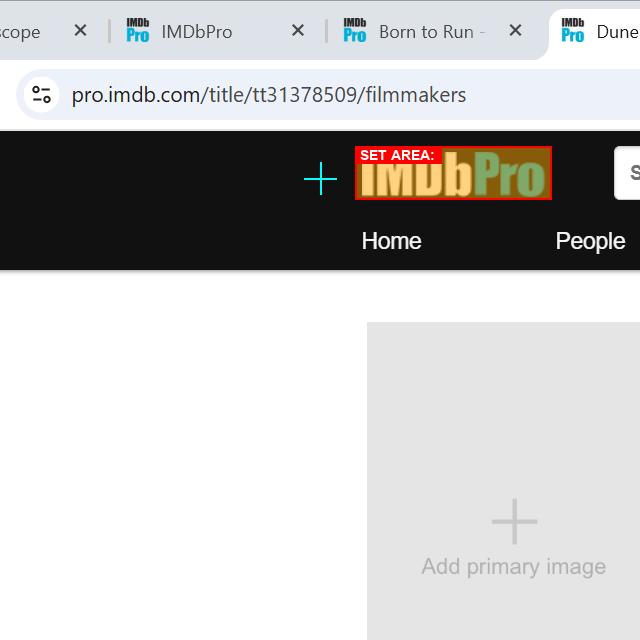

In [829]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVdbkAAAAAAAB9lCiMBGFyZWGUWLwbAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBTVFBQUFBMUNBSUFBQUNSQ3RPQUFBQVVra2xFUVZSNG5PMWR5M01ieDVuL3Z1Nlp3UUNETndoU2ZFZ1VxYWRqV2JKS2lTdmE5U3FicWsxVlhMVTNaVys1NU9KemJ2a3JjczBwVmFtazlwcXQybGhSRXJzcUc4ZU8xdDdFbGlpRk5DV1pMOUVVUVFMRSt6R1ltZTV2RHkxQ01EQUFRWm1ndUd2K0RpNXIwTlBkMC9PYjc5WGYxOFJFSWdISE9NWkJnTDNzQ1J6ai93K095WFNNQThNeG1ZNXhZRGdtMHpFT0RNZGtPc2FCUWZPOSt1Njc3OFppc1hBNFhLL1hoUkRQVzJ2YTJOalkzLzcydDkvODVqZTNidDNLWnJQajQrTS8rY2xQdnZXdGI2VlNxVXFsNG5rZUluYjB4aGlMUkNMRll2SCsvZnMvL2VsUEh6MTZwSzYvL3ZycmI3MzExczJiTjZQUmFENmY5NTBKSW5MT1k3SFluVHQzZnZXclg5MjdkOC96dk5uWjJSLy8rTWVYTDE5R1JOZDEyMmNJQUVRa3BTUWl6L004ejdOdHUxNnZWeXFWWXJHNHNyS3lzTEF3TnpkWHFWUWN4K2tZNjhLRkM5Ly8vdmR2M3J3NU9UbVp6V2JiT3d3R2c0bEU0dTdkdTdkdTNmcjV6MzgrMk5vK2h6aDkwZjd1VFRGemdhd29Wc3ZRdVVJQWdFQUVSQ0FGZWk3WURWWXZzL3dXMjFqUlZoWjQ5aW00bmJNOWd2QW5VeXFWc2l3ckZBb0ZBZ0VwWmVzNjUxelg5VUFnRUF3R0dXT0lxR2xhTEJhTFJxT1daV21hMXQ2NEJVUTBUWk14TmprNUdZdkZBb0ZBczlrRWdGQW9sRTZuVGRPMExLdlgvQkNSTVdhYXBtbWE3WU5HbzlGWUxJYUlRb2p1UVlsSS9WY0k0WG1lNHppTzQ5aTJmZnIwNlV1WExyMzU1cHR6YzNQejgvT2ZmLzc1bDlaQzAwS2hrR0VZd1dBd21VeTIvNlRydW1FWWxtV1pwcm5IaXZxQkdLTmdpUFFBQlV6eW8xS3JJUktRRk9DNTVDWmtmQVRURStMa1dmNTBWZnY4QVN0c1k2UDJBcU1mR3Z6SmxFd21UZE1NQkFLK3Y2cmxab3dCQU9jOEVvbEVJaEhMc3Zwd0FnQk0wNXlhbWhvWkdRa0dnNHBNbG1XZE9IRkNVVE1ZRFBhZmFDQVFDQVFDTFRKRklwRjRQRDdJRTNiRGRkMC8vdkdQdi8vOTc4dmxjcWxVVXBPQlhUSnBtcWE0MjNHWGtrOHZSaVpnR2dXQ3BBZklDSUxSNzBtcCs1THcrT1lhQllMNjRxZHNjeFU5ejdmVlVZQS9tUnpIMFRTdEY1bVVIb0hkVDk5eG5BNUY0d3ZHV0NBUVNDUVNsbVVWaTBVQU1FMHpIby9ydWo3SVJJbklkVjAxcnRKaWc5emxDMDNUcmwrL3J1aDQ2OWF0cGFVbGRWMUs2WGxlbjU2RkVJTThxUTlJb2hRSUx6UnB4dVhZVlBOZi9nMjRwamNiUExjSjhvWG1NSHo0azhsWFcvVUNFUTN5YXBYMUU0L0hsUUJEeEdBd0dJdkZOTTEvRHIxRytTbzBhczBrR28xZXZIaVJNYmF5c2xJdWwxc1dVdjhISC9CSkR4aUlwQWNva1JZekYxbHVreGUyanl5Wi9MMjViaVA2WUFaakxCYUxXWmFsaUJVTUJ1UHhPT2Q4R0dQdGlXUXllZlhxMVN0WHJreE5UYjJVQ1h3Snl2b202cVBDeElscE1YMmVOQjJHODNhK09nNDFOS0FrVXpnY1JrVExzdUx4ZUR3ZUgxQXk3UXN0aDY2L0lHR01uVHQzYm1abTVzQW5zRzlJQVo2TG5ndTlSYU5Nak1qMEpBVkN3QTkreFE0RWh6b3R4cGl5bVJoanltQTNERU1aOGdlTHpjM05CdzhlTEM4dnA5UHA2OWV2cDFJcFg4T1pNVFkyTnBaT3B3OThBdnNGSys3d3pSVnQrVE14TVMwbVo4WFlLZWhhRmpKTUdRcFRLRXlOS25ydVM1bG5meHdxbVZvMkUyTXNIQTVibGpVa0hiZXhzZkh1dSsrKzk5NTdaODZjaVVhalY2OWU5U1VUSXFxNHhqRG1zQyt3MG82MmVOZjhyLzl3ejcvdVh2dG5PVEpCVEllT0lBTGpZQVFvYUlHbVE3UHhrbWJhRDRlcTVwVE5GQXFGbEpwN1FUZDdBQWdobXMybWxISnpjL1A5OTkvdkZSRUZBTU13Qm5Rbmh3dVN5dFhUMWg5clN3L0FhZmpyTzJSZ0JPQWxXWmw3NHJEVm5BcXNJMkk0SE80VmVqaEExT3YxVENaajIzYXZCcnF1RDI2MHRmc2w0WEI0Zkh4Y0NWb1ZocTFVS3ZsOGZudDd1MWJiZjJnUlVablZXSzlpcFlTZVIxSUM2eUlOSWlFakFHU01OQjBJMmd4MkJNWkFDQ1FCSGZFTFpLQnBRQVJTUHZNRUdTY2pJR01wU3FSbEtBSm1rTGoraktORUlBUjZMam8yMXNwWXpMRktBZTE2SDJPdWhjTW1VendlRDRWQ3ltYmFNMUQ1d3NCZENDRnMyKzdsOEt2NDUrQms4anhQU3Fucitzakl5TXpNekd1dnZUWXhNWkZNSmkzTHF0VnEyV3gyYlcxdGNYRnhiVzB0bjgrcnhnUFBtRDB6a3FRRUlVQjRQV05TaUdSRmhXbFJKTDdyQUFJQUtjWmd1Y0FxUmF4WGdUUFNERElDb0FkSU4wQTNzSnhudFRKSUpETklrYmhNaklxcFdURXhJMU5qRklwU0lFaGNBd0FFQXM5RnU0RzFNaXRzODZlclBMUEc4bHRZS2FGZDd4K1ZPR3liS1JLSnFPaDVOQm9OaFVMREhuRVFoMDVoa0JkZktwVWFqVVl5bVh6NzdiZHYzTGd4T2pxcTZ6cm5uSE91NHBuTlpuTjlmZjJERHo3NDVTOS9XU3dXKzBqRVBoTUN6Z0Naai85UEJDU0JwUGZxRzk3cFY4VFU3RFBhQVFBaU1BNjZvZC85c3o3M0YrM0pZeG1PeWJHVDN2UjVNWDZhWWltUUl2RG5kOWlEL3dZZ01mT0srOXEzM1F0WHlZcVJib0NtQStlQVRDMFRJcW90UXBBQ1BBOWZ1NDdWSXQ5WU1lYitvaTEraW5hdGo0ZzZWRElob21FWWtVZ2trVWpFWXJIaDJVejdtcEpTWG9PRTFwTEo1TFZyMTVMSjVIZSs4NTJMRnkvNnpsOUZ6bXpidm4zNzl1UEhqMTlrVGtwNStYd0RCQVFBS0NNSk1Ub2x4azRDQU5LdXFrTUVybW1oQ0VYaTdpdlh4TlJaTVRVcmsyTXlsZ0prZkhzZEVHVTQ3cDIvNHIzeVRlL3NKVEU2QlpxUHNVamQvNHpFeVlxUkdaVEpVZTNCUjZ5UVJjZi9JeGt1bWRUbjNucGhBTUE1RDRmRFkyTmphc2UzdmJIS09GQTd1ME9kVlFmVW9IdUd0aEZ4Y25KeVpHVGt4bzBiOFhpODE1Y1FpVVMrOFkxdkpCS0o1ZVhsOWZYMWdZWFRicmp5V2ZTeVJ4TlFwT0dnY1FBQXJsSDd6eVJCTjJScTNEdDEzanZ6cWh3N3FYNWdoU3pMckVQVGxtTlR6ais4SlU2ZGw3RmtWKyt3UzFib0ZJcTZJVk5qTXA2U1l5ZWhVZE1mMzhmc2hxOFdIaUtaaU1oeEhCWHM1cHkzK0tSTTExZ3NaaGhHcTdHVXNsS3BxRDBXWGRjUG1VOERJaGFMU1NuVkUvVnBGZ3FGcHFlbkwxMjZ0THk4dkxDd01OQU9ETUd6MTROS1ovbXBPVVJBQUpJZ2hZK3VrUkk5MXp0OVVVeWNGc2tURUFvL3Y2OVIwMVlYd1RTOXNmUGk1QmtaOWd1RjdPcFFBQUNtK1l6T3VFeU1Pdi8wcnlnOEk3L2xhOVVOa1V5ZTV5bWZQQlFLaGNQaGxwMXJXZGJvNkdna0VtbjN5WVVRdVZ5T2M1NU9wem5uaDBtbXdiZmJORTBybDh1Ym01dEtXWStNalBnMlV4L1AyTmpZeU1qSWM1a25lOGliWjVPUUlBa0FaRGd1RXlOa0JIeGNPZGpsWEl0NTdVQWt4bVFpRFFRVURBSHVMcURuWUwzQ0N0dGlZc1k3ZDVsQ1VkOEFPdGJLMnNvQzI5NEF6dDByL3lqRGNkQ056djROVTV5WTlxWXY4TTFWOW5RVnUxS3Noa2dtS1dVdWw1TlN4bUt4WUREWUlsUExxVzVwQ3BYSWxzbGtUTk5NSkJJdllUTjFNTGl1dTdHeDhhYy8vU2tVQ3MzTXpGeS9mcjBQN3kzTGlrUWl6LzVCZTVDSnVFWkJTeWJTNHNRcE1YV0c5RUIzQkZ3SkQ1UVNpUHprRmdQTklNM292R3pYc1ZwRXV5NUh4c1gwZWVyaHVySmFXYi83b2Y3b0hnVk1NWDZhREpQMHpxNkFjd3FGeGNTTU4zM1J5RytENTNad2VvaGtFa0tvYkNFcFpUcWRibGxJcVZUcXdvVUw2WFM2bGY4a3BiUnRlMnRyS3hxTjdpdGg0WkN4czdQejhjY2YvK3huUDJPTTNiaHg0OXk1YzRsRW9wZnhwT1RUZ0QxVGZNUTcvenBaRVRrK0xVYW53UGVWU3dGdUU1b05rT0s1NE5rTHJMakRkclpJRDhoSVhGcHhINDRDQUJBMGJaN2R3RnFaa0xHZExaa2NJOHQvWTRDaUNUazZKWU5oMXFoMTdPb01WektWU3FWcXRTcWxiTjlNVGFWU0Z5OWVEQWFEclE5WFJZTnl1Vnk3cVg3VVFFU1ZTbVZyYTJ0all3TUFOalkydHJlMys2VEw3VXRaVXlnaXgwOVJOQ0hEVVFxR2ZibUN3c09telJwVkpBbU1kVzYyOUFBcmJQUHNVMkFNZE1PZm82QzBwd1NuQ2NJRGt1ZzZTRDAvYVFwYU1wNmljQXlxUlRoTU1xbWdzTXFkYlYyUFJxUGhjQmdBV21zdGhLalg2NFZDUVczYkhWaytOUnFObG5mbU9FNmhVSmlZbU9qVmVGOXVLUmtCTWdJUTZWZGRqWFlkcXlXc1YwRUs0SHh2TGhHQmxDeS94YklieERuNUdtSCtJL1h6YlVrUFVEaEs0U2pwUnNjVWhrdW1ScU5SS0JTa2xLNzduTUl0dXJSSTQ3cHV2VjR2bDh2Tlp0TXdqQ05McGc1OHhZVFAvWUxsdC9qV0YrQTBBZGplekNDSndnTzd3YlkyV0M0akptY2dNRmhVRDVYSTYvMEtOSTMwQUJrbThNNHcxWEJEQTBLSVJxT2hBc1R0UDNYUXhmTzhScVBSYkRhSlNOTzBvMHltd2VkMmtEd1RIanBOdmpTdmZYNGZQUmNZQXVPOTNqZldLbnhqbVdmV1dDRUxibFAvL0Q2NkRvVmpwUGZlQ1VVY1VHa0NxSjBmRGx6ck5yK0dTQ1psQUhtZVY2MVcrNmRPdTY1YnJWYVY5R3FQU0gzZElTVUlEMTBIYTJXVzM5SWZ6L0hWaHlBRXFVQ1VIOUIxV0c3VHVQZWh0dkJYdnJtcXZDMDVNazdCTVBuRnU5dnUzQmVsL0ZzT2wweUJRRUFKcC81a2FqUWErWHhlMWVnZFpadnBVQ0VsdWsyc0ZQakdzcmE4b0gzMkNjOWxVTGo5UzFOWTlxbis2SjUrNzBNczVWNnNmR0Z2UE1zdDlySFFoMHNtWGRkZDF5MlZTdTBHZURkczJ5NFVDb3B6WDA4bXNYS0JiYTN6dFVWZ21nb3FvdHVFUnBYVnlxeVFaYmxObGxsSDBSblg2UWFXZGxoMkF5dUZyb2ppTUloMWlCRndBRkJrS2hRS3J1c1NVUytpMkxhZHorZHJ0VnE3bmY2MUFoWnoycU43Z2ZmL0V6U2ROQjJBMEc2Z1hjZG1ZMThDQmh0VnJCUzdObHNPeVVzWXJtVFNOSzNaYk83czdOaTJMWVRvbFRta0pGTzFXdTB1MmY2YUFGMEhHeldzVjFFS2V1Wk5TWkJ5djZvS3BVRHgwcW8waDBzbXpybVVVcFg2TjV2TlhtUnFOQm83T3p2S214dmVmSTQwRUFBSVNZTG5maVUxTDJtUWxNZ2hZYmo3cVdvL29kbHNsc3ZsZXIzZXE1a2kwOHZTY1VmQ1NsUCs5Z0hnTUwvR3JoTktoamdVb3RwU0VFSVVpOFUrbWRHMmJaZEtKU0k2OEdTQm83dy9jNGc0MEJWNHRwNCtmUTVYTWlrL240aUt4V0lmeVdUYmRyRllIQktaK2dldXZqWlVPN2pIYkJVZmQ5a2tReWZUbnBLSmlKUmtnbDIxK05YUk9wV0FjOTYvem5ONHh3Y2NKWnIycXpwLzNtVFF6aVJJLzVLSFExSnp5bG56bVJpUjR6aU5Sa05SN1FCck1sVXFpMkVZL2MvR1VHUWFjSmV0ZzNuOWJ6bENHcFlJUEJmN3paWjJzODRINEpTVTZIbm91ZDJWS29lUjBDaWw3RVVtS1dXMVdxM1ZhbEpLSmNZT1pNUVdQNUxKNU9YTGwzdlY3TFpPbHh0UU9IWHdvMyt3WGtwNVZIS3pwRVRYNlZlbFJMdFZETkJLSU82NUlDZzhhRGF3MlVEUkdZZytqT3FVUG1wT1Nxa2N2WllZTzVBUlRkTk1wOU96czdQbno1Ky9kdTFhTEJicjFkSnhuTUc5eVBieVg4NjVPZzZ2VitPT3hKdVhDU25Sc2FIUDhRUnRtUUo3MStxNFRXeFVzVkh0UGhueE1NZ2twZHlUVExEWGg3NHZ6TTdPL3ZDSFAvekJEMzRRaVVUR3g4ZjdGSURidHQwNk9hNC9FREdaVEtvLzZLQUtIeVluSi92VWtlNkxwa01GU29IMXpxeklqaWF0S29ZOUQ4RkN1OEhLQmF5VzBPMWN0OE1qazBxNTdQaVVpYWhVS2gwNG1jTGhzR21hcmNLWVhzM1U2T1Z5ZWNCdW85SG9sU3RYZnZTakgzSE9YMzMxMVdReTJWNWcwNEZHby9IY2dVVUFoZ2Zyb2U4RHJzT0tXYlRyL3NuakNvWXBUNXpDUnBYTWtFeU1RakRzM3d5QVZZb3MreFNiZG5kMDlKRFVYS2xVcWxRcXJ1dDJsREdwbjVRNWRZQTIwNEQ1MTFMS3JhMnQ3ZTN0QWJzMVRmUFNwVXNqSXlPYXBvWERZWlV2NmdzaXFsYXJsVXJsK1NkK2dHVGFwL2VKbm92NWJTemwwVzZRR2ZUbEV3VXQ3OHlyeEJnd1RZNU9VZER2ZUZLUzZIbHNKOE16YStEWWgxcnFwSUNJVXNwYXJhWmtRSGU1WEtsVWVwR1RIZzRDVXNxSER4K3VyS3dNZmtzb0ZEcDE2aFMwNVJ4M1E1bi9tNXVibVV5bTdlcGVYZStESW9PNVhTMElqOVhLUExQR04xZThrK2M2YTVnQUFFQmFNZWZLbS9qS053R0FZaW55TFlmeVhKYkw4Q2VQK0pQSDZLZkJleFMrOU5VNDdVN05nSWF6RUtKV3ErWHorWTZ2dWQwQTc2L2pXaW5WQitWeWIyMXQvZjN2Zjc5Mzc1NHFFSURkbmVsZTdZa29rOG5VNjNYTytlam9hSjhqWEhLNTNHZWZmYmEwdEtRaXNhcHI0cngvSUFIWVlBK0ZETGplblRMN0RGenpLWXNqQXVIeGxVVTlrcEN4bEl3bWZmaWthUlNKOTV1aDY3RDh0djdwKzN4MUVYdWNEdVcvZHEwWDF1M2N0dk1HMndCZkRzTzAzbmZyU3IxZXorZno0K1BqcG1tcWRCUWx0TXJsY2tzeXRkL1YzbFhMeFdpbmtlcGt3S2lqa2haU1NpR0U2N3ExV20xdWJ1NzI3ZHYzNzkvUDVYS3RnZFRUZGZlcHhsMWFXbnJ5NUltVThvMDMzcGllbnZibFU2bFVXbHhjZk9lZGR4NC9mdnpjWmlKQ3o4R21EWTBhZEJaK0lEQUcvYjJ0dG5rQUlpam4vRmthN3BlUDFIR2RYa0tMUDEwQnpzWEVhWEh5ckl5UGtCNFk5R3hNS2RCcHNtS09MeThZbi82WmJYL1JxMkhQbkJCMWVMektRMnA3RnRSMXZYWEVzWHBEeldaVE5YTWNwK1VMYUpxbW9qaXRIRXQxNkl6ak9PcWlwbWtxTnp5ZnoxZXIxVlp2QUtCZXVicFJ2V0RWbXhDQ2RxSCtId0JhZy9aYkRTbGQxMjAybTdWYXJWQW9QSDM2OUtPUFBwcWJtMXRjWEt4VUtxMW02aGpxVnZ2MnAxYlM5K0hEaCsrOTk5N0Rody9mZnZ2dDczM3ZlMmZQbnUwZTY4NmRPNy83M2UvKzhJYy90TnYxV0t2dzFZZG8xeWtZUnVkTFRoQnhUb2JKTjViNVRtYnZEWDhpSU1tMzFyWEg5eW1XQXVHaEVLQU9DZUFhR1NiUHJHRnh4emMraVo3TE4xZk4yLy91dlA2bTk5cTN2Y2xaWDMzbmMyT3p3ZGNlRy9mL29zMy9sZVczdXAyNEZ2eko5SXRmL0VJZEt0OFIwRlBIbUt5dnJ5OHNMQ2h4VWk2WGI5KytQVDgvYjFsV08vTlU4c25xNm1yckpKRFYxZFZidDI0dExpNmFwdWw1bnFacGpMRmFyWGIzN2wxVkRyVzl2ZjNCQngrb3c3NFZuMkJYR21tYXRyUzB0TFMwVksvWGxUbnk2MS8vK3VPUFAxWTU1bjFpZzBxaUtKYlU2M1hIY1pUMXRyeThuTWxrMUhIa0xXU3oyVHQzN3BUTDVXUXkyVUVtNVJ4OCtPR0g4L1B6bTV1YnYvM3RiOWZYMTgrY09hT082RlJwVytvSTZFOCsrV1IrZmo2WHk3V3ZHNnNVOUlYL29iV0hwT21kc1Q3R1NOTlpwY2dLMlM2aDVRdmlUeDVoclV5QklKSjh6ai9HaVd0c0o4TjJNdjd4U1pKb04xaG16WGpBV1g1Yk8zRlN4bElVamxFb1RIb0FkQU1RcVhXa2p1dWcwOFI2QmN0NWx0L21XK3Q4L1RIUFBvVysyWjdvKzVjd1ZaRzg3OWtnbkhQWGRWVUZtWlJTbldxaTlyL2FYNnE2WFcyVnFGb3p3ekRVbjZ3QUFKV2VxOVJjNjgrWXFEOE5FQXFGZkhXcjBrM3FIU3RuU29tclBkY2VkNC84VWhQdWM0czZSMStkUmVaTFVKV1ZwWHFJUkNJVEV4Tm56cHhKcDlQQllMQlNxWHp4eFJmejgvT3F6WjZ6ZXNuUURSbU9pUlBUY3Z5MFRJMUpLMHBtQ0RnSHhvQUFwTUJtZzFXTExMdkp2MWhpbVNlc1Z1bzhqYzRQL21RNnhqRmVBRWZ4NUpwai9CL0Yvd0tLYzdndGRyS2NxZ0FBQUFCSlJVNUVya0pnZ2c9PZSMDWNsZWFuX3ByZXZpZXeUWNScAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBQjFaVWxFUVZSNG5PM2RlWHdUZGY0LzhQZk01RTdhcERjOXVDcHRBVmRCVU9RR0x4UVJYQVYyRlE5d3ZYRlZWZ0VQUE5aZDBWWFVSVjN4WkJka1pmbDlCVllSZ1JWUkJMbFVrRU9PVWloWFc5cW1kM01uTTUvZkh4OElJVTFMZWs2eHIrZkRCNDkyTXBuNUpQMDRyM3lPK1VSNC82Ti9FUUFBQUxRdDRmQ0pFclhMQUFBQTBPR0lhaGNBQUFDZ0kwSUFBd0FBcUFBQkRBQUFvQUlFTUFBQWdBb1F3QUFBQUNwQUFBTUFBS2dBQVF3QUFLQUNqZG9GYUg4WVk0SkF4RVJCWkl5SVdFdWZRQ0FpSW9XUklEQkdRbkFMUUNoR2pOcTJLcUllUW4xYXZUYUtvbWd5Nkl4NnJWYXIwVWlpSklwQ0I2aVFDT0E2VHYzWkJjWk9WVE5CYkpuS0poQXhSa3hnL1BqQzZYOEFJaEZJSUZSRmFCOWFzVGFLZ2hCbk5Wc3RwaFk0MXZrR0FkeVFVNjFUaFFTUldET3JtaUF3aFoydXhBQ05nNm9JN1VjTDFrYXpVWjhZRnlPSkhYUXdGQUVjQllFWTQ2Mkc1aDBDRnp4b0psUkZhRCthWFJ2allzMXhzZVlXTGRONXBvTis3bWdLMXNSNjFqcWpkOUNCb1NwQys5SFUycGhvaStuZzZVc0k0TVlSR2o5ZlNzRGdHclFDVkVWb1B4cGZHNjB4cGxpTHNYVktjejVCQURkU28zcnZtdFZWQ05BZ1ZFVm9QeHBURzQwR1hZTFYwb3FGT1g4Z2dCdU5NWXJ1ODU1QVNtdVhCVG8wVkVWb1A2S3NqWUlnSk1mSHRuNXh6ZzhJNE1ZVGlJUW9XaE5ONkNRRWFCUlVSV2cvb3F1TlZvdXB3ODU1cmd1em9KdEVpZUtLcHB5alU2YThyR3pXRTQ4ZFAzYjB3WWVuYlZ6LzdkNWZkdHZpNHA1NjVvVVAzM3NuLzNDZVRxZDc3SWxaYjczK2FtMXRqU0FJVnB2dHdUOU9TMHBPZnV6aEJ6dWxwdjd0dFRmakV4SkZVUlJSbFRzNFZFVm9QNktvamRaekRmMldscGJlZGRkZGh3OGZmdmJaWjFldlhyMTkrL2FFaElTNWMrZis3VzkvMjc5L3YxNnZmK1dWVjU1NTVwbnE2bXBCRU9MajQ1OTk5dG5VMU5UZi8vNzNHUmtaSDMvOGNYSnk4bmxVRzgrUFVyWTdaOTlEV1ZWV2JDODhVbFZXSFBKNDQ5b2NqREZCRUR3ZXo4SGNBejZmbDkvcUxwREFHQk5GOGJMTEI5WlVWeS81NU9PSzhncEJFQmhqWmt1TVJxTTVYeW9adENKVVJXZy96blZ6dVY2bmxhUkdWQlZlRzkxdTk1NDllN3hlTDE4Q2hGYzhVUlJIakJoUldWbjU3cnZ2MnUxMnZqRTJOdmI4cW8zblRVSGJHeFl5cDhYbmNUSEdmQjVYeEVlalBCcGp6TzF5SFRpd3orZnpLWW9paEd5LzVyb3hXcTNXNVhKNnZXNUprZ0wrd0x5MzNwZys3YUVONjc5cG1SY0Q1ek5VUldnL0dxNXZab091Y1VkampESG1kRHAzN2RybDlYb1ZSUW5kUG43OGVKMU81M0E0M0c2M0pFbCt2LytGRjE2WU5HblM2dFdybS80QzJoYTZvSnVJTmRpdWFQalJDUHN6UmtRbXN6bDMvejYvMzJleHhQajlmanI5Z2RMdGNoR1JvakJGWWFJb3VUM3Vvc0tDdklPNUhyZTd6eVg5ckZaYk0xNEhuUGRRRmFIOWFMaSs2ZlhheGgyTk1TS3lXQ3k3ZHUzeStYeXhzYkUrbjQ5T3J4ZnNkRHFKU0ZFVVJWRWtTWEs1WE1lT0hmdmxsMTljTHRmQWdRUGo0dUthOFRyYUNGckFUZFR3UmEyeFUxNFVSV0dNZGU3Y3hWNWFvdEZvWTYxV1daWUZRZUFmSndWQjRCMHNSQlFJK0JNVGs4YmROSjQvUzVFeHZiV2pRMVdFOXFQaCtxWnBUUDh6bmE2Tm1abVpKMCtlMUdxMWNYRnhwMm9qQzYrTmZyKy9VNmRPZDl4eEIzK1dMTXROZmdsdENRSGNWS3pCbXRid28zWHdEM1RwbmJ1SW9waVduaTZLSWduRUdCTklFQVJCa3FUUW5SVkZjYm5jaXFKMGhHOExnWE5EVllUMm84SDZwam03L3B3VHIxZmR1M2NYUmJGcjE2NThjSmNQREF1Q29OR2MxWU1yeTdMVDZUeS9hdU92UDREL3QrcUxUNWY4TytKRG55NzU5NFp2MXpYeHVDM1U3aEFFZ1ErYWFMVzZqSXpPa2lTbHBXZG90VnJlNDhmcldYVjFGV05NT3YwVlhWcXQxbUt4OEk5K3dVR1I5dUNUaGZPZmUrcHh0VXZSZmxXVWw3M3h5dXppazBWMUh5bytXZlRHSzdOcmE2cWJjbHhVUldnOFZTNk1VVVlqcjJ6OFo1MU8xNzE3ZDBtU3VuYnRxdFBwQk9GTWJheW9xR0NNU1pJa1NaSWdDRHFkTGpZMjl2eXFqYi95TWVDRHVmcy9YLzRwLzNuaUxiZUhQdlRwa245LysvVlhSSlNhbnA2VjNiUHR5OGFJZWJ3K0VrVy9MTHZjYmw4Z0VKK1l4SWhTVWpyOXNudVgzKzlURk5udGNTdUs4c25DZndVQ2daaFlxMWFubDJXNTRNVHhsWi8vVnhBRXJWYW5OeGlpUE4xelR6MmUwN1AzYlpQdkpxS0s4ckpubm5pTWlGNTg1WTM0aE1TNk94ODZtUHZHcTdOemV2Vis5UEVuZzA4dnM5dEQ5d2w5TkVxZkxKeS9hZU4zb1ZzZW16bXJSM1pPb3c1eS9sbzQvNE5EZWJsL24vUFNuMlk4M1NrMUxiaTkrR1RSMytlOFZGdFQ4ODhQMzIzc1c5b2kycmdxL3JCMTg0S1AzZ3ZkOHRnVHMzcGtuVGZWb0c0MW5uTFBBd01HRGxhclBFM1FyaStNakxuY0hoSkZYeURnY0xtOC9rQnlTZ29qU2s5UC8vSEhIMzArbnl6TExwZExVWlMzMzM3YjcvZmJiRGE5WGkvTGNuNSsvaWVmZk1LVDJHaU1kcDNMNGNPSEh6OStQSFRMaUJFakZpNWMyQXF2TElKZmVRQm41L1M2ZnV4dlYzM3hHYTlTd2FvV3JHVFhqLzJ0S3BXTWlJeDZ3NVZEQnRtTGl5L3NubW04WmxTcHZlVGlYcjJ2dlByYWkvcjJJNkxTMHBMVXRQUXhZMi8wZWp5S3dyUmE3Y2dycjA1S1RoNTEzZlV4c2RZeWUybG1qNndiYnJ6SlltbldpbTVidDJ5Ni9vWWI2MjcvOG92LzF0MDRaTmdJbnQvY202Ly9iZW85ZDk3dzIvRVJqMUNmeEtTa3Y3ejhPdjk1MWNyUDMzaDE5dVM3Nzc5ODBKQkdGdnk4ZE9jZjdwMzcydC9LeSt4elgzdDUydlNuZUFZWG55eWErOXJMdFRVMUNZbEp0NGU4dlcxSmxhbzQrOVc1Y2ZIeFJQVEQxczF2dkRLN0xUUDRyVGRlU1VoSXZLMFo3M1ppVXZKZlhuNk4vM3dvTC9lTlYyWlhsSmRkTjJaY0N4V3cxYlhuQzZQSmFCeDN6WlVuQ3d2NzUrU1licnF4NkdUUmdMNTliN3p4eGdHWFgwNUVSVVZGWGJwMHVmWFdXOTF1dDZJb09wM3VoaHR1U0UxTkhUOSt2TTFtS3k0dTd0V3IxMjIzM1JZVEV4UDlHZSs0NDQ2Ly92V3Z3VjhuVDU3Y3JWdTNKNTk4OG9FSEhtajVsM2UyWDNrQUU5RU5OOTVNUktGVkxiU1M4VWRWb1ROYit0ODUxYTJRZ3lnbHUwOEtrVThqVG50OEpoSDE3bjBoMytlQ0hsbGh6NW8yL1ZRTFNaWmxxWkVES21FU2s1SldmcmFzYm54V2xKZmw3dCtYbUpUVThOTWZmZnpKYlZzMkxaei9mbloyejZhMVlxKy80Y2JLOHJJdlZ5enZJQUdja0pnMGJmcVRvUmxNUkhOZmU3bW11cG8vbEpCNGp2ZThsYWhiRlFjTUhMenk4K1hiTm4vZlpnRmNacmNuUk9yNGFab2VXVG5qYnBxdytmc041MUVBVXp1K01Cb3NNU01lK0pOVFpnNmlMdGw5dWhENTlKclpMNzVJUkpmMDdjdjM2ZFdyVjlpelpzK2V6WDlvL29WeDRjS0ZYM3p4eGNNUFB6eGd3SUIrL2ZvMTUxRG45T3NQWUNLNjRjYWIvWDcvMmpWZmZ2djFWM201QndwT0hDZTFLeGtSVlFUWUF3ZXJpOHdKNUhHUktCRlJvcmQyVkp4dVJ1ZVlXSzNJSnhxRTdzOU9mZk8xd0lpSmRhYkROTUhBSWNOWGZyWnMyNVpOWWZtM2V1WG5pVWxKT1QxN2w1WFo2M3N1ZC9tZ0lWczNiL3p5aS84MnVlTTBMaUV4ckdmNzE0MEg3WnlYLzFKVFhmM0dxeThSa2FPMlJ0MzBwWFpRRmMvNWFhLzlLN09YcWwyRVJtdWZGMGE3VC83dDVtUEhEWEhCMnBqaWQ5NlVGdlB5UmFrMm5kUUd0WkdJeG80ZHUzVHAwamZmZkxPMSs2STFxMVorSG13RDhaRy80R1BCQWNMZ2tDRVgybWZJSDVwODkvM2w1V1VyUDF2R045YnRscHg2ejUzQm4rZDk5SEhydkphRzNEVGg5NEdBLzl1dnZ5bzRjWnd4Tm1yMERlcFdNaUlTaWVJMG90MVpMZnI5akpqQ3FJeG9zYy9TdThMN3UyU0RyREJSSUkwb01PSmZvTTVrSWcyZmdFQ0N3b2d4Sm9uTm11eVhrSkE0Wk5pSXVnM1FUUnUvbTN6My9WczNiNHptSUZrNXZZSi85NkNtL2JuNUtIVmNRdUxLejVhRjlsU0hEaitIZFlPZmp4SVNrNlpOZitxTlYxOXkxTll3eG1KaXJlcW1MN1dEcW5oZzM5NXhOMDBJM1JJNnpocmEzMHRFenowMVBhZG5yNFRFcEJYL1hjb2YrbVRoL053RCsvL3k4bXZCaWxkZlBRa09QNWZaUy9ueGcvV3pnVE9lVTNtWnZlZnByZ0xlSXgzYW94NjI1Ym1ucHZlNjhEZVhEeHp5NGJ0dmEzVTZuVTQzL25lMzlycndvdWhQMTRMYTU0VXhRYWM1NmF5V0FuNkZNWVZSQ2RGN2xWTGZndXA3dXNlMVFXM2tCZzBhOUxlLy9ZMy9QSG55WkNJS0RlUFFMYnk1dkhYcjFpZWVlT0s3Nzc0am9pNWR1bXpZc0NIMGFPKzk5MTd3YUtHZDIyZGF3S3RXZnI3eXMyWEJTVEdyVm43T3QvTnV4bURvOHBBK2RQQkFhUDMrY3NYeWdVT0c4Nm9jVEhHZXdUeWhnNUg4eWNMNVUrKzVVNVVNMW1pMHdmbnJiWC8ydWhoUlFHRituMTh3bW0reUJCSWxjWDZwUi9DNjlqalpyWUpSa2s0VlVpRCtOYTRDLzFQVkJoU0ZrVlVya2lBMGRvMkZ1aTRmTkhUVHh1OE9IY3dOOWlIenZ6dHYya1p6aE96c25rUlVVVjRXbk13Vit2Zmw0OFFOL0xuemN2Zm45T29kL0RYM3dMNmNucjJEKy9QS00yVFlpTCs4ZkhmdzRMa0g5Z1d6K1R5bDFXcnA5TjBVYXBlRlNPMnErTllicnlRbUpZZjIzejczMUhRS2ljYTMzbmhsNmoxM0JzZU1pU2ozd1A2Y25tZDl0aXV6bHdackdnKzhoTVNrdW4zQ0F3WU9IakJ3TUkvdzBDdllPYy9ZZ0IrMmJ0NjA4YnZacjg2Ti9pVnYzcmlocHFycTVkZmZJcUpORzlhdi9IeDVyTldXbnRFNStpTzBvSFo3WVF3WXpYY21hMUowbXRjUFZ3aGUxMCtWeXYyWjhmWFZ4bXEvckRDSzAwa3RjbUVrb2dFREJoQlJjWEZ4cDA2ZG90bC80TUNCeTVjdjU1SGNyVnUzeVpNbkJ3UDcyV2VmWGJSbzBkR2pSL2tCQnc0Y1NFUThnMFdlaTRjTzVxNzhiTm5rdSs4UFhvaXZ2K0ZHZmtsZE9QLzlHMzQ3UHRoSTZwR2RNL251K3pkdC9LNml2Q3g0N29URXBHQ1R0MGQyemcyL0hSOXNGUzFhOEZGT3I5N0JSM21sRDZaN20xbjUrZksxYTc0VUJDR2pjeGNpV3J2bXk1V2ZMMi9qTWtRZ0VERkdrcFNrRWErTzE4dUJnS3dvVHBtK3EvSXVMM1YvWVhjcGpKVjU1ZDBPbnplZy9MdlkrVmgrN2QyNTFYL0lyZnp6a2RwZkhQN21WN0llMlRtSlNVbmJ0bndmM0xKMTA0WWJmanUreVFjc3M5c2ZtemtyK0N2dm1xN3Z6LzNKd3ZtNSsvZmRNZVdlMEkyaGwwVmVlVUszdlBqS0cyVjIrN1l0bTVwY1F0V1ZsOW5udnZZM1IyMU5US3pWRWhQcnFLM2hvOElxRjZ2TnErS3NtZE9tM25QbjFIdnVQTEJ2NzU5bVBCM2N2dWJMRldYMjB0QUc2Q09QUFpHWWxMenE3SW1CZFJ1NHdRanNrWlV6Wk5pSXpkOXZvT2hFZWNaUVBPLzVmM201KytkOTlIRTBVUjJVbEp4OC94K244WitIREI5cGk0dmZ2KytYNkovZWd0cjVoYkdUWG5OamVpeXZqWTZBc3FhNDl1T2psZjg1VnFrd1Z1TDIvMWpoOGdTVWVZZktiditwY016M3gwWi9mK1NQUHhmdHFIU3I4am5pN2JmZkRnNFl2LzMyMjk5OTkxMXhjVEVSN2RpeFk5R2lSY3VYbjNwWE8zWHE5T1NUVHdaYnc2ZGF3QWNQSGtoTVNxbzdGK2JRd1Z3aUduajI5cXpzSENMS081aDcrYUJUalo2Qmc0ZUY3aERhS3NyZHYyL3kzZmVIUHByVHEzZGxTSGkzZ1pXZkwxLzF4V2RFZE1YVm80SnpEZmdXbGZ0YkdQK0hDVVFCeGtnUW1hSUVtUGphOGRwOXNsYm44LzdnOEcvMTZvYnIvZFV5KzY5TFE0SkVIaDhKd2s2bStiTGFNYWVyYVdTY3ZwbEZHRFB1NW9YejN4OTl3NDN4Q1luYnRtd3FzOXNITm1aS1ZQblpmOHJFcEtTd0NWbGhmKzR5dXozWVQ1aVlsQlRXT003cDJUdjAxN3FWSno0aE1URXA2ZERCQStmcHZDMmV2dVZsOWxpck5UZ0ppMjlVdVNPNnphdGlzSDFaV1ZFeGErYTBZS2Z4d2R6OVE0YU5DTnM1cDJldjNBUDdRMzhOMnlFeEtUazBBaE1TazRqMlUzU2lPV1BkMC9IQVh2UGxpaFgvWFhyNTRLR05ta0dXbFhQV0JHT2JyZDVGRTNmOXZOM2hjT2gwT3AxT3A5WHBzcko3OHU2VEZuRmVYQmo5eXFuYTZGZllVM3RPN3ZRSU9wOTNRN256MnhxNnppcFcrT1ZGWlFFU0JQSjRTUkMyZWYzL2QvTEVna3RTcjA5dHhDem9pQW9MQ3h1MS8yV1hYUmI4T1QwOVBmanpEei84MEtWTGw5REpYS0Z0NjFNQlhGOGlsa2ZhSHZITzBZaDRLM25oL1BjWHpuLy9yQWQ2OVk3OGhGWVFWc25vOUp6N2RsSFZCQ0pSRkh5K3ZRNzVoRmNXUlVFUUJMM0FSRUVRRlZsbWJMSGRSemJyZFpyQS83TjdKRkdXbE1Dcm1URnJLMzFyWFlFS1VmOS9kdmR3bTc2WjR4MlhEeHF5Y1A3Ny9INmtyWnMzRGhrMkl2cS9MeEdWbDVjbEppVkYvNVRRd2QyR1ZkUlRKOVVkTG0yT3NQVGx0eUZObS81VXU4aGc5YXBpWEh6OGxIc2VXUERSZTllUHZTa3VQajdpRk9WR0JTb1gvYXlvNXB6eHVqSGpEdWJ1Ly9pZkh6WnF6TGl1bXFxcWlOdjdYTksvT1lkdHdIbHhZZHhSS1I5eCtuaHROSWdVckkzdkhhMG1XOUo0cmZMaDBRcEowR2lVd0w4dXpmaXNxT2F6Y3I5ZDBNMC9XbkZkcDVobVhoZ0xDd3U3ZE9rU1pmOXpSRVZGUlowNmRTb3NMRHgrL0hpM2J0MGlQcXI1Wk9IOEJtYTFSSnlzWDkrVk1TZ1kyL3k2ck9LTm5nZHo5NGRWTWk2MHFtWDM3SldkRS82QnVnMmNHbk9SSk1ucjNxam95Q3NRSXpLYWYyUHhuL0I2K0ZLbk9zYUdzVXFSdEFvalJWR1l3bEoxR292azg1RWcrangya2RVRVpKdTJ1YlArK0pCQmRuYlAzUDM3eG9SMElFZGo2NllOQTRjTWIyQ0g4ako3WXBOQ3BiNVFiL0lCVmZmeFB6OHNMN1BIeE1ZRzA1ZUlPcVdtVFp2KzFOL252RlJlWnYvNG54LythZWJURFIra05haGVGZU1URW9pb3ZOd2VGeDhmY1VaMHEzYlJOL09NZDB5NWQ5Yk1hVDlzM1h3ZXJjVnh2bHdZdjZyVWtTangydGcvWG4vRTZXY2s4OXA0cmQ0bENVYUZrY0lVdjhJNm0zU3hXcEhYeHBOdVRaVXZFSzl2MWowK2l4Y3ZualJwVXZOZlRucDZldDA1V1VGaTdvRjlSSFQ1b0tGbGRqdnZjQTdGdXhPM25qM2tsbmN3bDRoQ00vWFF3UU9oTzJ6ZHZER25WMjkrQWVVZGhzMS9HVTJUbmRQcnhwc25obFV5YnVJdHR3OGFNdnpHbXllcVVzbm8xRGRxblpxS281UDlNUUhQaFNicFQ3SCszeVdiL0FwalRHQ016ZWhpZml2TEZxOFJ2U1F3UldGRUFXSk1JVUVVRlVWMnljelhFZ3V1OFQ3bmovLzFRVTZ2M28yNm8vZVRoZlBMN1BiUUdlOWxkbnZvNTdOREIzUEw3UGJMQncxdFdzRnlldlVPbXd0V1VWN1duQU9xYS9MZDkvWEl5Z2xiQm91SU9xV20vV25HMDkyNlowNisrejVWQ3FaNlZhd29MeWVpaElRa0lzck82UlcyemhRUjVSN1lQM2hvUTUvekdpVXNjWnQ1eHJqNCtDSERSZ1RYOXVLdmdyOGlMdlRuZHVJOHVqQmFaZThsVnYxZk1uVDNkRS93S1FxdmpYKzdPT1gvRGV5YXFOTjQyT25heUJoVEdLK056b0RpVlJyM0xaeGhubjMyMmVQSGp3Zm5LbmZwMHVYSWtTT2hPNFQ5Mm9EMDlQVGp4NC96OGVDNlJEN3ExaU03SjZkWDd6ZGVuUjI4ZXE1YStUbi9tVGVQZ3ROZURoM001ZE95UW8reWFlTjN3UjFXcmZ3OGQvKytNV052NHIvZWVkZDltelorRnpvTjU4M1gvM2JPTm5RTHV2YjZzWFVyR1hmSFhmZGNlLzNZSmg2M3diL3Y2VnZUb2lETGlpbG1RcEp4VzcvRXBSZkcvVEhkWkpFb3dCZ1IwNHJDSUt2ZUlBckVTQkNJMk9sbHpnV0JLVVNNS2Vjb1JiVGlFeEtIREJ0UlpyZUhqZVUzYk9vOWQyN2ErRjNkR2M1elgzczUrRE5mejdMSmkwMk9HWHRUN3Y1OW55eWNIOXp5ekJPUE5lZUE2b3BQU0h6c2lWbGg2Y3QxU2syYk9ldlBqZXI4UCtNOHI0cVZGUlVMUG5wdnlMQVJmQkNYVDEzbTA1SzV0OTU0cGN4ZTJvTExYQ1FrSklhTzd6Yi9qTmVQdlltSWVFV05pNDlQVEVvT1RtWGlyNjZsU3Q2Q1ZMa3dOb0lzSzZhWVAzU0xMeDdiYSt1VkZ6emJLeWxHSS9pVlU3WHh5dVFZbzlSYUY4WnUzYm9GSnkxekF3WU1PSDc4K0JkZmZNRi81ZkVjNWRIR2poMDdZc1FJUHZPWjI3Rmp4N1BQUHN0LzFnVDdueDk5L01sVkt6OFAzdStibUhScVl2UDFOOXlZbmQzempWZG5COGR4NjY3ZnkyOGJEZTRRdXNKd2oreWN4MmJPZXVQVjJhRjNDVGZ4UXRPdU5EalhQWnJSaHpNZjlJZzBncUNYeEZQZjhxWXdRUkQ0Rkh0K1d4dUpweWJkc3pPWFUwWWtTQzEzMzhEbGc0Ym1IdGpYOEVqQnBvM2ZoVFlVSW80c0pDWWwzWG5YZmVlOEhUTktQYkp6NW4zME1VOTZ2cVd4SzE5MkNPZG5WWncxYzFydzU3QzFsT2Q5OURHL0VZai8yclAzaFMxNzQrSnRrKy9tRTVqcDlLMUh6VHdqYndSdjJ2aGRWazZ2QVFNSDh6dVMrZEVTazVJZmUyTFdHNi9NUHVkQmZpV2FmUk5RYUczVWlvS2hUbTBVVHRkR29ZVnE0NkpGaXhZdFdoVDg5ZTIzM3g0NzlxelBIMlBIamkwc0xIejQ0WWNmZnZoaHZrUDBBVXhFQ3hjdTVNdGJCcmNFMDEwNGZLS2tNVVVORjF5STR6eWRsZHBrakpod3VwNlZGdVR6SDVJek11cytXcDlTbnpMbFFHV3VXeEZNbHRzdGdUOTNqNUVaa3dSQlZ0aHZmNm5ZNXhOMWluL1poZkc5elpyL2xMaWZPMWFyTUJJWlc5STdmbm1aZTRsREVqenUzeGlFZi9hT2k5Zjgrci9TQ2hxQXFnanRSOFAxTFRNaitaeEhPT2tKWEx2eHlKNGFuMkN5VE8yay9jY2xhY0hhZU9tNlF6dWRpazd4Yjd1eVIxK2I0ZjM4aXFrN2kzaHQzRER5Z28rUFZYNVE0aE04N3Y2eDJ0WERNeE4xTGJBa1ZtdkQvekJOSkRUNHRaY05QM29LWXlLUkpKeHFWRkRJNTBaUkVFSzNwK29sUlJCRklrYnNwRit1bFprZ0I1aE9sMktRTEMyeDVndWMxMUFWb2YySXFyNDFMS1EyOG53S3E0M1M2WVR2Yk5JRmErTUpqNy9hTC9QYW1HYlN4WjRubndVN3hGclFyZUgwZDZjMjVWRk9JWExLVE5hYnlHRHlLbFYwZXR5QzhlMEdzK3h5OEMzOUxab2VPdUVRTTRrZTU4dkhhdDB5TVVIU1NPTEVSS01PVjcwT0QxVVIybzlvNmx2REZFYTFmb1hYUnJmc3BaRGE2QWdvc3NIa1BsMGJoeVlZZTVrMCsvMGEwZU9jdnF2SUZXQ01pUnBKdkx0YjNQbFNHeEhBVGNFWUNhSkE5VTl2WVlKQUNtdTQ1OCtxRmY3VTJWSVpVR1RCMDl0Z0pDSkpFSWhJSXdxUFpwaktBb29tMFppcUY0Z29SaU8rbjJQN2U0SDdhNjlRSEJDSXNVd0RQWlNxdXpxK3VhdHd3UGtPVlJIYWozUFd4bWpFNmFXLy9pYWx6Q2ZMZ25oSmpJbENhdU9mZXllWCtHU3RZT3BzMGhCUnJGYjZmRWkzNS9iWlB5OXdGWG9aTVpaamtaN0pTUmlYRnRzaUw2Y05OSGNNdUtNNmE2SkJlZkVKT2VDWE5OcUVUcDNyMndlZ2RhQXFRdnR4anBvV3pSaHdoNElXY0tNeFlpSUpvWi94enI3WW5TWUlqSjE3L2d0QWs2RXFRdnRSdHphR2thVHpZMXkyTGVFZGFUUkJhS2lTbmNGSXhDVVBXaE9xSXJRZjU2eU5HZ1J3SFhoSEdrbG94RDNlZkEyL1Zpd01kR1NvaXRCK1JGRWJKZkU4dUMrb2pTR0FHNE0xZm9VVnhsaUxyUTBEY0JxcUlyUWYwZFZHdlE0am51RVF3TkVTcUltRGFBS2FIdENpVUJXaC9ZaStOaG9OdWxZdXkva0hBUndGeG9pb09hMEhGdkl2UU5PaEtrTDcwWmphS0ltaVFkZGkzMlQ4cTRFQWJnaGoxSUxOQm9INGZOUVdPUmgwTEtpSzBINDBvVGFhVGJoVFBBSUVjRjJNbmZxV0RiNmtkNHRlcFJnVEJPSjFseEhqLzdYazhlSFhnaEZyNDZyWWtnZUhYNWZtMTBaYmpMbDFpblordzZoNFhieDJ0ZXIxaUJGcjZqZ2VkQXk4ZXFBcVFudlF6TnBvalRIaEhxU0k4S1lBQUVCckVVVWhMc2FrZGluYUtRUXdBQUMwbHVSNHF5Z2lhQ0xEK3dJQUFLMGlNUzdHaEx1UDZvY0FCZ0NBbHBkb3M4U2FqV3FYb2wzREpDd0FBR2hKb2loMFNyQVo5TGp4OXh3UXdBQUEwR0lzSmtPODFZSnB6OUZBQUFNQVFBdlFhcVRFdUJpakhvTyswVUlBQXdCQTA0bWlZRExvalhwZGpObWdkbG5PTXdMRGVuUUFBQUJ0RHQzMEFBQUFLa0FBQXdBQXFBQUJEQUFBb0FJRU1BQUFnQW9Rd0FBQUFDcEFBQU1BQUtnQUFRd0FBS0FDQkRBQUFJQUsybTRsTEZsaHZnQlRGS1l3cGlpa01Dd0JBZ0FBSFZlckIzQkFacjZBNHZNckN1SVdBQURndEZZTVlGOUFjWGxsUldtOU13QUFBSnl2V2lXQS9USnplV1FaYlY0QUFJQjZ0SHdBT3oyeTE0OW1Md0FBUUVOYU1vQVZScld1QUJxK0FBQUE1OVJpQWV3UE1JYzdnT3dGQUFDSVJzc0VzTnNydTMzb2RnWUFBSWhXQ3dTd0w2Q2NNMzBsVWRCcVJLMUVXazI5UzMvNEE0cGZKbjlBYWJWT2JJRXhKZ2l0YzJ3QUFJREdFSnE1SEVaQVpqV3VRQU03aUlKZzFJdDZiU09XM1BMNkZiZFBhY0ViaHdXQm1FS0U2QVVBZ0hhaldRR3NNS3AyK3VzN2dDQ1FRU3NhZEZJVEdwMk1rY2NuZS94SzgxZkxFb2dRdmdBQTBONDBLNEJyWFFHL0hQbnBna0JtZzZTcnY4TTVHcjZBNHZUSVdMRVNBQUIrZlpvZWtBR1oxWmUrb2lqRUdEWE5URjhpMG1uRUdLTkdiT3F3TFlaN0FRQ2czV3A2UnJxOGNzVHRBcEhGSUdta2xray9qU1JZakUwOEZsYkJCQUNBZHF1SkFld0xLSUY2bXIvbWxrdGZUaU1KWm9QVWhDZWlCUXdBQU8xV0V3UFk1WW5jL05WclJWMWpKanhIU2FkdDNEeHFBQUNBZHE0cHFlYVhXY1JiaEFTQlRQcklUZFZBSUxCMzc5Njh2RHhaanB6YzUyVFVOMlUyTlFBQVFQdlVsQUQyMWZOZEM4WjY3ampLeThzYk1tVEltREZqcnJubW1oRWpSaHc5ZXJRSkp4VUZNdXFhMGhIZE5yemZQM0hOUlZtVC82K2dOUTYrZVVaV3Y0dW1iVDcxVzhFblk3UDZqVjFRMUJwblVsWFJsNDlNbm5qSGV6LzdHdHJwaDFjblRSejcrSDliNVgyR0Z1QThzR0wyM1pNbmpwMDA4WkhWcFhYK3B1MzR6MWYwM3djbVRYeGdSYUhhNVlDT3BDa3JZZmtDRVFKWUVnV0RMa0tjT3h5T1NaTW0yZTMyMy96bU53VUZCUVVGQmJmY2NzdTZkZXZNWm5Oano2dlhpVjUvNjYyVEJhMXR6M3VUbi81cHdFc2ZQWFNSV2lXbytuTDYxQVYweHdldmpZNXJ6TE4rV1BEZXArc09GVmE1L0VSYWMrcUZFKzZlT3FGM1BVZndsWDc5OXF3M2RmZCs4ZkNBc3pZZi9XcmVQNy9jZnF5b3lrOUVXbHZYSWZjK2R1L3dKTjJwaDR2Kys4RDB4ZlZjKzlNbXYvYm1oTFJUaHluWnZHRE9rdlc1Wlg0aWJYS1BrWk1mbm5MbUlQVWNKLzJXdWUrTlN3L1o0RHl3K3AxNXkzWWVjZmxKYStvKzZMNVpmeGlTb2d0OXh0bG51WGppdEFkdXVzaFczNXR6MWx0YThKK25aM3hSbE54LzBxT1h1bzdVOHd3QU9LWFJBUnlRSTk4NVhOOFk3WUlGQyt4Mis0UUpFMTU3N1RXdjEvdW5QLzFwMWFwVml4Y3Z2dmZlZTdkczJiSjE2OWE2VCtuU3BjdjQ4ZVByYmhlSU5KTFFQZ05ZUC9TVnRYdGVVYnNVN1pwdjA5SU5ydVN4MS9QMExkajh6dHdsaGNPZWZPbkd0Tk03cEkxNWErR1lzNTZ4NzcrekYzMFdOMzdodEV0YnBnajVxNy9NcGI0enJvb2pJdkx0WGZyR2dxVzJpVXNlQ0UzS3dnM3Z2Yk93YU1nTGZ4bVRFZHgyN01lTnJxU0I0NjYvS0ZIbks5dTVadlg2aFM5T3kzOXMzc3hMei80TTZhdmNzKzdEZDViOFdPZ25HaFIrNnRMOW0vSk4yVmZkOHJ0TUsxVWVXNzk2emZvNWp4NHRmVzNPcVdRMWRSczRmR1JWK0pPcURtelpXV2p0MisvMFcxU3dZdGFEUzQ1cVV5K2JmUDhRVy9XbXBjdld6bmswNzh4QmlNaCt0SkFvdWRmSWk1TE9ITVhXMVJSeVRPZld0NmZPM3VKUHYzak1QY1BUL0ZzK1c3eGg3ajNIU3Q5OSthYU1zM1p3MlhwY2M4OHRGOUt4OWF2WExINTYrdEZaYi81cFlLU1B6R2U5cGJUMzgzVkYxR1BLYTQrUE9mM3hKUHh2Q2dCbk5EcUFJelovaVVpcmlUeEN1My8vZmlLNjRvb3JpRWl2MTQ4YU5XclZxbFcvL1BJTEVXM2R1dlhOTjkrcys1VEJnd2RIREdBaTBtbEZmTm53K2FseTNaYzdLT3VlMGQzNXJ3WGIxK2VXcFExczhDbWxoOWJ2T09ZYTFtSkYyTHRpbmQwOC9LSGh2TFZYZHZEcjNVZWQ0VWxadUhWRFhtbnFaV2R0Ni9QUS9EN0JYNFpjZmRWbEx6NDZaK1BIbjAyNDlMYk0wMXRMdm43K3dYL3U4NU0ydlZlV2JYOWVWWjF6WjR4KzRhM1JwMzhaUE9UR0VaODhNUDJ6aFI5dkd2ZmtFQjBSMlM2WjhzQWxZVS94L2ZUM096ZVlodDE1K2l4Vlg4MWRjcFI2M0R2L0w2UGllRWt1NVFmNWR0eVRWNXhxd2ZxSnlOUnYvRU1QOWE3blBkaTNZTzRXVi9kYjVyN0YyOFNEcnhpNFlzYURTeGJQWFQyU04yRjltK2ZPUG11SElUZU8vdmI1cWZQbS9uUEl4dzhQMElVZjd1eTNsSnhPRjFGU1VtTzZGd0E2c0VZSHNGelAzVWVTR0RtQU16SXlpT2lycjc0YU5Xb1VZMnp0MnJWRTFLVkxGeUlhT0REeTlaYy9HcEZXRWdTQnNEYlcrZWZJNTZ2ejZPSnBvMjJxbGNDMytiTjFycVR4MTEzWTNBT1pCMXpkaDdadEtTMGxDZ2F3MysrUHUvaTM5OTQ5Y2FEL3l3ZW1Sd2pnY0dranIwNzliS0c5dEpRb0kvSWVoU3YrczltWk9tblNwYWRUNzlqZVhLTDBTeStNQ3o5SVZjaEIvRVMyRkZ0OVovVnRXTEhlYVJwNWIwaVBkTWE0S1ZldCtQTzZyOWNYakw0cGczd2JOdXdrR2p3cHRNdmFkc1hrNnhZL3VtYnQxdnNIREQ4N2dWdnNMUVhvbUJvZHdJM052b2tUSjg2ZlAvL3p6ei9mdUhGaklCQ29xYW5SNi9XLys5M3ZpR2pRb0VHREJ0WHBxenNYU1JUcXV3WDViQVdmakwzaWRacTE4b3VieXhZOThkVGNyMC82aUhUcC9YODM2K1VucmtrOHZWUFJvbXR2ZUpVZVgvTy9hM09mdU8vUjVVZnA1bi9zZVdVd2Y2eG01OUsvUHZmK04vdkxmVVNrUzhpNTRlRTVzOFoxajQxOHR1K245WHZ3eTI0enYxMStSMGJ3MTFIdjVzMmlPWTg5ODhIMmNpSmRyMGx2L252NjBGZ3FXL3Zhak9jVy8xUkdSQWxYekhyOXhTa1huMzFJYitIYWx4NTk3bis1WlQ0aVhjNlk2Yy8rSlMzU0NZbHFkdGYvdWlMdi8zL1B2VFJ2N2NGVHI2ZlgvZSt0dUt0bjhNR0dYK3pwTjNQcHNKK2UrZE5MYS9iN2lCS3UrTXNIYzI3dHJxL1ovWC9QdmZUS2x3ZDlSTHBlWStmTWYrSEtwTHJuM3JkcVRabnBxZ2VHNklqb3A3K1BmWVBQS0N0YU9IM2lRaUpLbmZUdTZ6ZGw4UEhMUVRPK2VIaEE2RmpteGpjbWJpUWlHanhyOFo4aWZtTHoyVGQ5K1BZbjZ3N1ovVVJhVTdmaGY1Z3hkWEJ5bmJaYTVlbzFPNm5IbEJ1N0VWSGgwc2VuTFR4SlJFUmI1b3pkUWtRMDdMRlBoMitaT0hzTEVSR2RYUHpncE1VVVlmUzBYaG1qWDVyUEc3Z3RORG5POTlQL0xUMXBHdlpZU0U5NDF3dHphSE9KM1JteVYxVkJOVkhhbWVrVUJVVU56eUhhdTNVM1VmL0x6aDZEdjNCZ0wxcTNQYStBS0lQc1ZYYWkxRzVobndreWUvZW1OVHYzSEtMaFp6V3NHMzVMMHlhLzl1WUVDdm1iUnZERHE1UG1iQncwNDRzN3RBdmUrSERGSWJ1ZnRPbFh6WGo1N2t2aXFIVHIvTGtmYnNncjlaTTJzZStraDZkTnlESTM3MWwwYW14NzJhYjhrNjVUVmVXQkdkTXVUYTd2elNyNWJ2YWo3KytrWHZlKzl1eW9VMitJcjNURG9ya0xOK1NWK3FudThQbld0eWZPM2pKNDF1TDdiQ3RlbmIxa1gxWFhLUis5UENhRm5QbmZMWmk3Wk5PUmFqNkJvTnV0RDc5MFk3ZjYvMFRRb1RRNmdCdjc5UWc5ZXZSNC8vMzNIMy84OFlxS0NpSktURXg4L2ZYWE8zZnUzTmp6QmpYeVpxU0NiMmVNZlAzSFhwT2VtTmMvcG5EOXY5Ly80dDlUUi8wNGErWFNLYUdwNXRzOVovTE01U2VKaUx4OGkvZkFuTWtUUHpoSWlmMXYvOHZUbHlXVzcvclA0bjh1Ly9PNHRadmZYZiszb2ZWa2NCMjFhNTY0K2Z2RDEwNmROOEg3NWZ1dmZybjR3WEc2Zjg0cWVuVHFua3RudmZ4bVl0bG5yNzMrN2V3cGo4Wjg5YS94d2VDcy9mNkpteDljWGs2Wm8yYk91amE5ZHMvL0xYanA5dHV6dXpYeGRaMVJzMjMyeE51WEZWSENwWk9mZnU3eUJHL2g5cytYRjVWUkkxL3N6dmR2bTdPbis0d1gzdFR2bWYvVzRtK2ZHLytvYnNHUWhWUGUxVTE2WXQ3OXRHM0IzSVZmUEhxdDd0ODdadlU1Kyt5K0RTdldPeE4vTzQ1ZnZudU1tZkhIQWJscjVxNDRaTHY4amluRHJVVG1idUZYd2NRQjkvNHh1V0RMZ28rMlYrVmNOMjFjRHlKS3lvbjR5b3IrTzMzNjRvTEVyS3Z1dU8waVUrbU9kYXZXL2VPaC9MTFRQYWhCUjFldE9FVDkvbmhOSEJGUjBzQTdweVVYYmZwdzBZOVZQYTZmY1YwMkVTWDNvQlRydEJuOUQ2NzR4NnBjNjJYMzNERWtqc2pjTGNKbkNhSWplL0tJTGg3UUwySjVvdVE4dU9ja0pZL3RXMC96dDNMMWlzM094TjlPdURUa2c0UnQxTFJiMWo2NFpNNkxQZjQ4YzBTNnpsZjQ5UnV2cm5OMW0vekFxTE83Zkx0bDFQT0pqWXFPNWhPbFo0Vi9wTWpJU3FQdGhRVkZSR2ttczVubzBOR0NzOXZsUHFlTHlPVjBuZjIwdW0rcDgrQ0tmNnpLUGZXV21qSVRpY3JvM0p5YlhuMXFYK21sdjUxMmxXL0Rpayszclh0cHV2YnBlNnZuenM2N2NQSWZwdG1xTi8xbnlZOExuNTl0bnZmU1dkMG5UWGpXVCsvYzg0L050aDRqSjkzZk41bEtOeXhidk82TkdiNG5QcHpacDg2bk5TTEhUMzkvOVAyZHpxNlQzZzJtTHhVdWZYN2F3cUtrbk9GVEp2Y3lsZTVlKzNuNDhEa1JrZU83dWJPWDdDTWk4dm44NU52Kzl0US9ueHB4NzJZdTI3bG05ZnJjTXFKdVVid3QwQkUwdmdYYytPN2ZxNjY2NnFlZmZzck56ZFhwZEptWm1aTFVyTHVKUkVGb1JEdjg2TUszZTg3N2J2MDFNVVJFZE1Yb1c4ZS9jdTJVZjg5K2JmV3RiNHpXQi9mNll0N3luTCt1V2Y3YkMwNXYydm5hSHo0NEdEUG1IMnZtRHVZQmRPVTFFKzdlTm52aTdjc2VmT0tLbjk2OVZoOStub2kyclBhKy91M1NLMktKNkpwckwwc2ZNL0dEQlgrWW12cUh6Ny84VTI4aW9pdUhKejdRLzZsTkgveXZjUHh0cDY2Sk85K2F1Ync4NUx4WFhIbnJYZDlQRy9QZy9xYTlydE5xL2pmejltVkZNYU5DQXZXSzBWTk9QeHIxaXozNjVaNXBhNWJmZlFFUlhYdmxtSXNlNlAvVXBpZW5iQnIyOHFaL1hodExSTmRjY2JGK3pNUVBsdjE3dzZ3K3cwTlBYN1YyeFc3S3VlUDZVeDIydHV6aGc3TjEyK2V1T0dUcTJXZkk4SWhwb1V2dlB6ZzlwZXovUHRwZWxkeDd5UEI2SjJIdGZlZTV4YVg5cDgxL2ZBZ1BvZUVqUmcxOGZlcnNKZStzSG43VzlYclBtcTlLVFNPbkRlYVhXbDFHbnlFWlNhV0xGLzFZbFhUaDhNR25HMmUySWNPenRGdi9zU3JYbE5WLzhKQkkwZWh6SE4yNWRORTdLMXk5SDcxelNJVExkbFI4SlhtYkZyNDliMGZpTlMrTjd4NTVsMzJMLzNPSSt2MXhZdWJabXpQR3paNWpuemJqL1duajMrY2JrcTU3WWZhRWtEZXcwbDVGdEhuMnBNMUVSRnBiOTR1dm4zVG5tSUhCYWRKVjlpcWlaSzAyMGltclNxcUkwdUlHRHNxYWQyano0aFcvR3hqOEJPUGNPMi9aenJwUGlQQ1drbmJyUDFibGhyNmwwZGk5MC9mWXZOY3VOUlBSOEJGOVAzeGs1b28xTDgxT3ZQN050KzdLSkNJYU10QTYrOWIzZDM2K29YQjA2SWVxSmp4TG16M3VtU24zbnA2K1B2eFMyL1AzenR1NGJQMjlmVWFGRDFvWC9mZnBOelk3RTY5NTZaa3o0YnBuL3RNTDdaZk5lSFBtY0JzUkVRMis0cnBMWDczbmpjVnp2eDc1MnRYQkF4eGR1a1kzN3BrUEp2ZU8weEdSNzlzUHQ3aW8vNHozSHVkdnlKQ3J4MDJxZEJMQUtZMitEN2hwNDY4YWplYkNDeS9NeXNwcVp2b1NrVmpQWUhNOStreC80bFJLRVJHUi91SnAwd2NScmY5bVE4ZysrVVdYelgzalRQcVNkL1g3eTJwcDVMT3ZEQTV0L3NWZVBuM2ExVVJmci9qR0crVzVFMjYvNzRyZ0VYcU91VGFCaUlZOU1qWFlqUmM3OHNaaFJQbDdUdCt2RWZHOE1VTm5QWEp4MDE3WGFZWEwzOTlFdW9udlJteTdOK2JGRHJ2Lzlndk9MandsL0dINnRXR3Y4VUQrMmQyd2ZLTHN1S3RhZm1xT2IvTm5hMXhwRTI0ZEVuSm84OERSUTh5VXQvMVE2SDZibG01d0pWOTFmWk52ZnlwWThlallTUlBIVHJydDFxZm5yS0hmelhuemhhdnJhMlhXYit2YkUvbEI3bmwrWG42ZnB6OTY3YjZMSW1mNHFaSGFDWVBESG5ZZStIaldqSFZWNmYwblBmckhhVFB1dUNiSGFsL3o0cXpQUTk1dGM5Y0IxOTB5ZGNZZnB6MTZ5eldYZDlVV2JGODgrOUZwNyt3N2ZSZXV5K2treWtpSzJPbDZxb0ViTi9xaHlWM3B5SkpwTno4K2UrNTc3OHg5Yi9ZRFUvKzhKNjF2ZUt1NTJXL3BHZGFSazg3TUorOSsxYVUySXVvMy9zd0VOOHVnd2YySUNvOFZOdmRaZmNiY0czcnptRG43b2xRaXB6TThFSjAvdlByYzRpT213Yk5ldnUraTRCbDhtNWF1YzZXUHUrMVUrdkpUWERwbW1JbHlkK1dGUExuSU12enBlM242QnJtY2pqTy94TVUxK3Y1TCtQVnFkQXU0bGVaQXliSjg4T0JCclZiYnZYdjNoa05hYWRSdFNBbVhYeFEyTHFydk83Z2JiVGxRV0VRVXZJYU92UEx5MEYxeWY5eEFOR0RrWmVGTlNmM0ZsMmZUMTl0LzNFK2orMFp6OHY1OVFvZk1ZaE5paUdJdXp3NDVxajdtckVTczU3eEphV2xFdTV2eXVqanY3ZzFIaWNhZS9SclBkZEpJTDdaYmhNSkhlSTFod2liS3RxVGMvUWVKWEtjR2tzOVdVRlJJZENvMXdpWmdOMEh5cFZObUpMcUlmS1g3TjMrOVljR01leis3L1A3Wno0eW9kL2d3b3B6cnBzM29UMFJWK1ZzMmJkencwajBidW8xLzVzOVRzdXBjajZ2V3J0aE53ZnUxZ253L2ZmRG5OVWZQekUrbUljTkhqMW42MUxTUG52dDd4cncvOWRjUkVXVmUvZEJEcDNZZmN2VTQ4aDM5WlByVG42MTU3OVBSYjUxSkpxZlRSMVQzajJHTE8xV2gwaWU4OEU3eW9ya0xOK3hjZDVKSW05UnYvT3daWGIrOGRUZUZOc2ViLzVhZTBlUEMwQ1ByYkNZaVUvZXNrQkxxSXEwWjBMUm4rUXIzYlBsaHcvNjhJM2w1SldWVlZYNGlPcnUvM2Y3RHE0OHUza2g5SDMzNTdOdXVEdTNOSlhJdW1UWjJTWjFqRmhXR0hDRnRZSitRak5jTkdEMW93WTR0OHg1OExtL3lIUk9IWjhXMXd2OEVjRDVyZEFDTGd0RGkzOUM3YnQyNko1NTRvcXlzaklpU2s1TmZmZlhWa1NOSDFyZHo0d2FoWTVMcUprSWRtUmVkZlIxeDFQcUlraExyem1oS3oreEdkTEMySnRxelIvamZUZDlBNzNXOTU2MHJxdGQxU25sWklWRm1kajNYeXNhODJFaUZQOGNscFZVbnlqcGRMcUtzY1g4Y1UzZDRPR1Q0dGdVbVlPdlNMam5WVlQ3NGlnbDNPN2UrUFhYMit6UGVTVnBZNzkwK2tjUmxEUm1lUlVRMGZQQ1lLVlM0OUtscEM1K2ZuUkkydEVsVXVXVlRMcVZOSGhIMjkvSnQrSHF6MDNUTnZXZU5iYWRQdUdQazBoZlhyOWp5VVA4UkVmNFF1bTYzM1R2OHE2YzM3TnhqdnkwemlTaXRXenB0THFtMkJ6K2FoRENkQ1FkZDh2QzdYeHArZDBpUnZsNUFsSlo1NW9OZGk4NXBqMVNETEszd3JJS3ZuNS8rejMxTzB0cTZYdGcvNjdLQjQ5SVBMRm13cmZxc2ZRclhMUzRrU2g4NzZlcXcwWCtYMDBsMGVqckMyYzZhd1JBMkFHOGUrUERjbDdyT203dHM3WnZQcjMzVG1uWGQzZE1lcW4vYUYzUTRUUWhnYXVKcXp2WEl6ODkvOE1FSGZUNGZYeXFydExUMC92dnZYN3QyYlgwM0l6WDdTd2JMamhZUk5mekpYVTlFOXJJeW9yQllLck9YRXlXa1JaT1FUVlpUNitVRmFLd0dYcGVlNlBEUnNraVhYV3JsRnhzNlViYmxhWW1JL01sWlE0WkhuQ3pGaFU3QWJobm1nZU5IcFcvNWJNK2hRdW9kMVJ6cFNOSW5qTDlzNFJzLzdqbEVvODhhNFM1YzkzVWVwVTRhR043RmJhK3lFMW5yM0dKclM3TVIxWk9wUkVSeGFUWWluOTlQUkVTSnRoU2lIY2RLdzNZdXlDc2lHdHk5L2s3MTNQMTVaTG9tSjdoRHk3K2xyYS9xeTduLzNFZjlwMzM4ZUhEQW9uRHBDZ29MNFBSYlprODVObnYyRjM5K0t1bWxsNjhPZVplMFJFUytwS3poZ3hzYm4zRVhqWnMxZjF4bC9uZWZ6bHV5ZHMwYkR4MzV3d2NoWThiUXNUVjZETGlSUTdCRVJKOSsrdW5mSTltMmJSc1JMVm15eE9melRadzRjZVhLbGR1MmJidisrdXU5WHUrbm4zNWEzOUVhMXdJK3VtRlAySWp0a2JXYmZaUXdaRUFEWTNqWmx3NGcrbUg5aitGanZkNGZ2OTVPZEZIUEN5SStxL202WGR5TGFOdFBZYjNOdE8zYmIrcnMycGpYbFhaeEh4MzVObjl6T09KSlcvWEY4b215MTExVDkzb1RjU0pRK0Q3YWMxemhNM3RsRVIzZEVSempqSUJQd0I0MXJtNVRWYXVMZFBSb3l0V2Fxdlp1UFVucEl3YlVtUUttMWVxSXFvc3F3L2N2cWlMU1JaNVhSVVJVV1ZSRlpEYnp0YkIwMlJlbEV1M2JtWC9XTG51MzdpZTZlRUM5bzdsVlh5M2RRc2xYWFhONmgvcmYwdmJzME1GY29uNGpRcWNMVkpWVTE5M1BQUERobHlaM2RmM3l6NmRmL1Nsa2RManJoVGxFUjNidGJYQ2g4Z2JFWlk2NDc3WFhabHh1b3R4MW0wdWFlQkQ0MVdsMEFOZjNYYjhOM0p1N2RPblNOeVA1NFljZmlPajQ4ZU5FZE9XVlZ4S1JYcSsvNXBwcmdodnI4dGV6RUdiOU5yNzF5cmJhTTc4ZS9tVEdCeWNwYzhydkdycDZKSTYrZjVTTzF2LzFpYzJoL2E4MTIxNmIrelhGM0RJbHdqVGpscEUyK3RhTHlMZnNsUVdocStnZVdUUjdXWVQvNnh2enV2cE1tWlJHSi8vNXAzOGRpVEI5ckRWZkxKOG9XMmN5RVJGUlN0YzBJbGRsZzllemxLUTBPalZtR1ZuY3BTTnppSFlzZW1kcjZFUWEzNUdscTM4KzlUT2ZnRDM2K3N5NlQwNUt5b2h3OU9UTVZDSlhWY2pHbnhmTS8vbnMySE51WGZaVklTVU52RGpxNW0vUnQrK3NQbkwyaVFxWEx2dVJxTy9Bc3lmWStYYjltRXUyL2hHT25EeDhlQmE1MW44WSttMEJ2aU1MRnExM1V0WlZneUkzeTN4SFAzbG5nNHN1SG5PVmpXOUl2MnAwRmxXdm1yZTZOTGhQd1lvRjYxeW02OGJWMDV6MUhWbnd5b2U1MVBmV2NhYzdWeHA0Uzl1OVV2dVp2MlRCaWdWclhCSDNTcC93ekl4aEp0ZkdONmFkeVdEYlpWZjFJTnE5WU81UFoxVzEvQlZmYm0vZ2ZMN0tzMnE0T1NsRkc4WG5TdWc0R3QwRnJkV0lGS2tUMmhkUU5QVk1ucG93WVVMRVJhOEdEQmhBUlB5ZTRMVnIxMTU5OWRXS29uejk5ZGRFbEprWitYL3YrcjZJcVY3ZHhseTArL2FiYjd0NXl1MVhwOVZ1V3p4djRmWnl5cDQ1NzdhR0w1MzY0YlBldkhuN2c4di9PR1JiLzlzZm1YUlpZdm11L3l6OTk4YUR2bDZQci9qcnFTdG00WDhtWC9mY25vdi9zdktUV3hzL0liWWVpYmYrZWVaL3hyODZlL3pJbFdQdm5qSXlzV3o5djkvLzRzalY0Ni9idjJ4TjJPc2Fsdk5qQTYvTHUvbVprWC84bk1hK3UvNkZvWHFpQ3g1NWI5YjJjYlBmSHRmdmYwT21UUGhkWDM0ZnNQZjJGYk9HUnZkaW0rVHN4Wi9EWlBUSU50UDZGVy84UGZtV3ZwWDc2ZXE3cjRodzIwK1A3QnphdkdQUjdBVTBLbTczMFl5SGIrc2Z0b050MUxRNzFqNnlhUFBzcVVmN1hUZnFxcTZtMHQxclYyL0pLNzEweGdRaUNsK3BPRXhXVGcvYXVIdkI4LytoMGJhZCtXbC9tdEtIaU5KenNreTBZZFhzdDVNblgxeTFoMFkrTk1KZnVtN09uUnZTK2wwMzZxcXV0c3BqbXpadTJabGI1dTkreTB0VHVrWC9YbFR0V1RUemx0Vlp3NisrcGw4aWxlN2YvUFdHbllWKzA3REhwb1hOVGR1emV5ZlJaUmRGT25MYzZJY21iNWkyY01tME8zNjZiT0NsRjZiWWQzNjlZV2VobjdyZjh0Q05OcjdMRDNQditiVHkwcjc5THU0VzV5L2RzMlg5dXQxRmZ0UGdXUStmQ2RlNHF4K2F2Rzdhd2tYVEh0ZzNjY0lnVzlXV3p4WnZMeklQbWpINXpBZTNuK2MrOHFsajBKRGhYVzJWeDlhdlhyT3owSjkwM1RQVHJqNDlJNm5CdDdRZHUzamtNTlBtall0bVRpLzY3YmhlbEwvaHF4V0h6RG1wbEhzeTBzN21BVE5mbnVwOGF0N0dOLzZjZVdxcDdialJEMHhaL2RTQ2pXL2NtMy94bU5IOHB0NnZOK1dXWFRaclhQMkxYWmV0ZjJyNnAzVHhtTkhEdThYNVMzZXMrV3hkdFduWTNVUE90L2NPV2sxVHhvQkZNY0pBckMrZzFQZGx3Qk1uVG16Z2dIZmVlZWYvKzMvL2Ivbnk1ZXZYcitkTFpjWEh4OTl5eXkwUmQvYlhzeEoxL2ZvKzhzOHAzejR6N2UyWnkzMUV1clFCazk2Y096M1NVazFoWW9hK3NuTE4xVzgvODlxS2Z6LzMrTCtKS0NiN3VyOHNlUGJXaTZOZGhLT0p1dC94NmNyMDV4NTdadmtYci83cEM0ckp2bTdHZ25kdmRmeDF5Ykx3SFlkUC8rU1JScnl1N2xNV2J1cTc5Sy9QdmJYbWc1YzJFWkV1SWVlYTZhZmJOSzN6WXM4eFViYjNsRC9mVWpWbjJlYVAvckZaZS9IVUd5UHVZeHN6NDdHano3KzlmdG43KzdTSjE3OFVhWmVNMFhQbWQvM3YzUG1mN2ZsaXdRNGlyU2t0Yy9pMGwrN2d0MTAyUEFFNzdzYUhaeHo1Mjl4MVg4ejdSWnMwN3BsVFd5KzZZOWJrcXJtTHR5eVlzMFhiNy83cmlRYmMrOHdVMzZMUGRueXhZQWNSYVUzcFhVYysrdGpFcTdzMTVpcWFOdWFGUDlybkxOdTBZY204ZGNUdjBKMDBLL1FPM1ZNS2p4d2xTczJxWjNXTzlBa3ZmNUN6K3NNUGwrMWNzK1JISXEyNTYyWDMzSEh2aldkdXJVbnFudWJidnVXekhSdUkrRnR4MWJRWmQ0UjkwMUg2aEpmZnlYaHZ6dHd0aTkvY1RscFR0MzUzeko0Mk9qdGsrcEt0dTgzNW56VUx0dkhGbmk2ZTlPYzdiK3AvcG1LMTRwejIxcVc3Wk9iTE0zUnZ2TE5oM1lJNTY3VEpGMDk4NmMwQnZ6dzNMYmUrL1pPdWVPRXZWWTlNWDd4dytnemlHWncyNXEwM3V5MTk3NE9sK3ovN2FQZXBtakRqMlNrTnJXZWUyUGZHL3BzWDcvN3NvOTFFcExWMTdYdlBNL2ZlMkJ2M0ljRnBRbU83ZEluSTVaVTl2Z2hCYURaSTlYMG5Vc01LQ2dxZWYvNzVkZXZXRWRGVlYxMzExNy8rTlMwdFFxdlM2MWVjbnVobmdBV1hvcXhuY1Nob1ZVY1dQREp6V2RxMFpVK3FObFhIdDNuMitIOFVqbjlwWG1PYXF0QVF2S1VBTGFrcDN3ZXMxWWdSQTlqdFZYVGF4cy9SSXNySXlKZy9mNzdkYmxjVUpTVWxKZUkrak1qdHhmY2duVGZVbnlqYnVoT3dPeVM4cFFBdHFpa3RZQ0txcVBWSDNHN1NTd1pkVXhyQjUrVHhLUzV2bzI2QVFnc1lBQURhcnlhR3Bka1FlYmpYN1pXais2cWl4Z25Jek4yNDlBVUFBR2pYbWhqQWVtM2srNEVaVWEwN0lEZHF0Y2h6a1JWVzZ3N2dLNEFCQU9EWHBJbGQwRVRrQ3lnT2QrUldxU2dJc1daSmJPUVhCMFlrSzZ6V0pUZjJPeEJQYWFWMXF3RUFBSnF0NlFGTVJOWE9laHU3Z2tCbWc2VFROR3M4Mk9kWG5KNVc2TkVHQUFCUVc3TUNXRkdvMnVsdjRQbDZyV2pVaTAxb0NpdU11YjJLdDdITGJrU0NaakFBQUxSRHpRcGdJdkxMck5ZVmFPZ0VBaGwxb2tIWGlLOEI5dmdVdDYrRnYzS0pNU2EwUkpjNEFBQkFpMmh1QUZOMDYyTklvcURUQ0RxTktOV3psRFFSeVRMekJSUmZnTFhzSEs0eitDdEZEQU1BUUR2UUFnRk05YStOVlpjb0NwSW9pQUlKZ3NBN2h4bGpDaU5aWVVvcjVXNFlRU0JHZ3NBWUNjMy9ha01BQUlDbWFaa0FKaUtmWDNFMFlwMUlBQUNBRHEzRkFwaUlaSVhWdUFLWThRUUFBSEJPTFJuQVJLUXdjcmdEcmJFWUZnQUF3SzlKQ3djdzUvVXJibTlyVGFVQ0FBRDRGV2lWQU9ZUXd3QUFBUFZweFFEbUF2em1JbjhielhFR0FBQTRMN1I2QUFmSkN2TUZtS0l3aFRGRklZVzEyWmtCQUFEYW5iWUxZQUFBQUFocTFwY2xBQUFBUU5NZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlpyakJjZlZMZ01BQUVDSGd4WXdBQUNBQ29TNHVEaTF5d0FBQU5EaG9BVU1BQUNnQWdRd0FBQ0FDaERBQUFBQUtrQUFBd0FBcUFBQkRBQUFvQUlFTUFBQWdBb1F3QUFBQUNwQUFBTUFBS2dBQVF3QUFLQUNCREFBQUlBS0VNQUFBQUFxUUFBREFBQ29BQUVNQUFDZ0FnUXdBQUNBQ2pScUZ3QUFBT0E4TTNYcTFLRkRoeVltSmpibklBaGdBQUNBYVBYdDIzZm16Smx4Y1hHcGFXbWlLQXFDME9SRENYRnhjUzFZTWdBQWdGK3hKVXVXcEtTa0pDVW5TNUlrU1pKQTFPUU1SZ3NZQUFBZ0tuZmNjWWZWYWszcDFFbW4xV28wR2ttU1NCQVF3QUFBQUsxcjlPalJHUmtaZXAxT3A5TnB0RnF4R2VsTENHQUFBSUFvSlNZbTZnMEdyVmFyMFdnMGtpUWdnQUZBRlY5OTlaWFZhclZZTEM2WFM1Ymw0SGFOUnBPU2t2TFRUeit0V0xGaTVjcVZkcnM5TlRYMWlTZWV1T3l5eXhJU0VtcHJhd09CUU4zTGxpaUtNVEV4VlZWVnUzZnZmdjMxMXc4ZVBNaTM5KzNiZC9UbzBlUEhqNCtOamEyb3FJaFlFa0VRSkVteVdxMmJOMi8rK09PUGQrN2NHUWdFTWpNenAwMmJkdkhGRnd1QzRQZjdRMHRJUkl3eFJWRVlZNEZBSUJBSWVEd2VsOHRWVzF0YlZWVjE1TWlSZmZ2MjdkcTFxN2EyMXVmemhaMHJKeWZudXV1dUd6OStmSHA2dXQxdUR6MmcwV2lNaTR2NytlZWZWNjVjK2RGSEh6WDIvWlM3OWZSY01WN3Vuc1BNc1lLamhpSmMyQVZpakJnalJSWUNmdks0UlZlTldGRWlGaDdSSE5rbjJZdklIMTVhYUhFYVNaSTBHa21TbWprRGl4REFBTkJrQ1FrSlpyUFpaRExwOVhwRlVZTGJKVW5TYXJWNnZkNW9OUEtMbEVhanNWcXRzYkd4WnJOWm85R0U3aHdrQ0lMQllCQkZNVDA5M1dxMTZ2VjZyOWRMUkNhVEtTa3B5V0F3bU0zbStrb2lDSUlvaWdhRHdXQXdoSjQwTmpiV2FyVUtnaURMY3QyVE1zYjR2N0lzQndJQm44L244L2s4SGsrM2J0MSs4NXZmREIwNmROZXVYWHYzN2oxMDZGRG9zelFhamNsazB1bDBScU14UGo0KzlDR3RWcXZUNmN4bXM4RmdhUHpiU1V3VW1kSEV0SHFtTjdCSThSdmNVV0RFRkprQ2Z1YVBVMnlKUWxLYTNMbUhWSFJVYzJpUFdGa3F1SjFOT0R0RVNSUkZVUkJFc1FWVzBVQUFBMEFUeGNmSEd3d0d2VjRmOFZFZVVmdzZKVWxTVEV4TVRFeU0yV3h1SUVlSnlHQXdaR1JrSkNZbUdvMUdIc0JtczdsVHAwNDh6bzFHWThORjB1djFlcjArR01BeE1URTJtNjFwcjg3djkzL3p6VGRyMXF5cHFhbXBycTdtaGFIVEFhelJhSGplaHoyTHQ0T2JGc0FrYXBqZXlMUjZwak9TcnFGWHl1cHVrZ1BTeVdOTWI5UWUyQ0dlUENvRUFoSDNndVlMZGpzM3MvbExDR0FBYURLZno2ZlJhT29MWU43SFM2ZWJtRDZmTDZ3VE9DSlJGUFY2ZlZ4Y25ObHNycXFxSWlLRHdXQ3oyYlJhYlRSRllvejUvWDUrWHQ3REhQM0xDYVBSYUFZTkdzUWpmT1hLbFljUEgrYmJGVVVKQkFJTkhGbVc1V2hlYVFSTUVSUlpvQ1lWV3BTVWxBenYxUk5KMG1pOWJxbnNKQ2xOS2dPMElRUXdBRFJSeEo3aytqREdvb2xEUHBwcnM5bDRRMWtRQktQUmFMVmFOWnFvTGxiQnN6UW5lb01saVkyTjdkbXpweWlLUjQ0Y3FhbXBDWTc0TnZ6Q28zeWxMVXdRbUZiUDRwTGs3ajNGc3BOU1pTa0N1UDNEV3RBQTBFVE43NEtMU0JSRnE5VnFOcHQ1R0J1TlJwdk5Ka2xTYTV6cm5PTGo0eSs1NUpJK2ZmcGtaR1NvVW9DejhCbFlqRFhRdlN4MzZpcDN6V1lhTGJYT1h3ZGFFQUlZQU5vWDNnSzJXQ3lDSUpqTlpwdk5aclBab213Qk4wcHdJblRERFZaUkZMT3lzcnAzNzk3aUJXZzBSYWFBWHdqNHFmNG11QktYcUNTbE03MkpKSFJ3dG5mNEN3RkEreUtLSWg4REZrV1JUOXJTNlhRdE11azB6TW1USi9mczJaT2ZuNStVbERSbzBLQ0VoSVNJazZkRVVVeEpTVWxLU21yeEFqU1dXRlV1blR5aXlkOHZwM1dWMHpQbGxDNVU1MjFoT29OaXNqQ1RoYmtkUXNDdlNqa2hTZ2hnQUdoZmdtUEFvaWhhTEJhejJkeEsvYytGaFlWZmZmWFYyclZyTDdqZ2d0alkyRXN1dVNSaUFBdUN3TytoYW8weU5JcFlYYTQ1OExQaDIrWCs3TDcrL2lPVnhEUW1haW5zaGlWUklwMmVHYzJrMFpMWHJWSkpJU3JvZ2dhQTlvV1BBWnRNSnQ0RjNjUmJlcUlneTdMWDYxVVU1ZVRKazk5OTkxMTlxM3dRa1U2bmkzSWFkdXRpQ3A4aXJUbVJwem04aDN6dXlIM1Jna2c2UGFrMGFnN1JRd3NZQU5vWEhzQjhETmhpc2RSM20xTUxjcmxjeGNYRkhvK252aDM0MG9OUkhpMTBicHJGWWtsTlRlVU5lcjYwU0cxdGJVVkZSV2xwcWRQWitPVXlCSUZQclJKY0RxRzJXZ2dFbUtLUVdDZG9CWUVKSWlNU1JKRnB0TVFvWk5LV1FLSklzaXd3bWNMdWxSSkUwbWlJTVZLVVV6T29SWW5wOUlvMWdjVWxLYVlZTWhpWnBEMlY2NHlSTEFzQnYrRHpDTTRhb2FwTXJLMFVQSzRHQnFlaExnUXdBTFF2b2lqYWJEYVR5Y1RIZ00rNStFYVRDYWZKc3V6eGVPcTd1WWl2NlJGOUFBY0NBVVZSdEZwdFltSmk5KzdkTDdyb29yUzB0UGo0ZUxQWjdIUTY3WGI3c1dQSERodzRjT3pZc1lxS0NyNXoxQ1VXVHczNktnckpNc21CZXU4WkZnUm1qcFVOWmhaak96MXhtb2dZVDFtaHBsS3NyUkpjRHBKRXB0RXhuWjYwZXFiVmtWWW4xRlNJemhwU0JHWXdzaGliRXBjc1oyVEthZDJWaEJSbWltVjZJNU0wUkNRUW80QmY4TGdGWjQxWVdTb1ZIWldLajRrVkpVSnR0ZUJ4NFE2b0tDR0FBYUI5NGN0bThWVzBZbU5qVFNaVGE1OHhtb25RWERSaFdWMWQ3WGE3NCtQajc3dnZ2dUhEaHljbkoydTFXdjdkc1h5TkRxL1hlK0xFaVkwYk55NWN1TENxcXFxQmxuY0RCU0pKSkVHTWNLOFJZOFFVWWtyZ3dnR0JicjNrak14VFVVMUVna0NpUkZxZDl1Y04ybDJiTk1mekZJdFZTZWtjNkpvdHAzWmoxZ1JTWlAyR0w4UTlXNGlZM0wyWC82S0IvcHhMbU5uS3REclNhRW1TU0JENTJ5UUlBbCtTbWhTWkFnSGhva0dDbzBvcVBLTGJ0VWx6WUlmZ2NhSXBIQTBFTUFDMEw0SWc2SFM2bUppWXVMZzRxOVhhZW1QQWpTcFM5S3NQeHNmSDkrL2ZQejQrZnNTSUVUMTc5b3hZZm41bnM4ZmpXYlZxVlY1ZVhsUEt4RHVXSTN4dVlNU0lTRkJpNHVUa0REbWxNeEVKN0hRM3RDQ1FwTkdZWWxpTXpkK3J2NXpSUTg3SVZPSlRGR3NDQ2FKVWVvSUVRYkhZQXRsOUFyMHVEZlQ0alp5Y1Fab0lnOStzN3E4eE5tYTJNb05SaVUvVzdOa3FWdG9GWCtNL1dQeDZiZCt4WTlIaXhjRmY5WHI5L1hmZmpRQUdBSlh4Wm1Yb043dEprbVN4V0ZKU1V2aTNNb1R1ekw5SlNXaWgxZkNqeDA5NnppV3VCRUZJVDA5UFRFd2NQbnk0eldhcjc5TkRURXhNNzk2OTQrTGk4dlB6VDV3NEVYVWorUFFTSEtkVzVLaG5GK0pCSzVGR0lpS1NOQ3owWWFhUVZxY2twQWE2WkFjdXVGQko2Y3dmRUN2dFl2RUo4bnFVbEF6ZjRORnlsMnpGR2wvbjZIUTY0Q204OGEzVktRa3BpaTFCU2VsTWJxYzJiN2RnTDJ6YXFwcS9QdlAvOWE4OWUvZUdidkY2dlcvTm00Y0FCZ0ExTWNaOFBoOWY5RXFTcEdBRzgrbExWcXRWcDlNRmQxWVVwYmEybHE5UHFkVnEyemlEbzJTMVdoVkY0YStvZ2QxTUpsUFhybDEvODV2ZjVPZm43OXUzTDZyVkt4bWRpalNCOXlkSDZvSVdCQktJbUVLS0hLRWZXRkdFZ0QvUXJhZWMxazJPNzBRbXk1bm51WjJhb3dmSVlBaWtaTXVkTDFBc2tXNjdPdDIvVFVRa2FpS2NYWlNVdUdUZnNCc0VPYUNyS0dsb2xMckQyTDVqUjFqNkJpR0FBVUJOZ1VDQTMvOWpNcGtzRmt0d3JwUFpiRTVPVG82SmlRbTkvMGVXNWJLeU1rbVNrcEtTK0JleXRsazVvMS9lV2FQUjFOVFVuRHg1a25la0p5WW1SdHlOZitCSVNVbEpURXc4MDdaVzZtblhuaXFFUWdvaklzVmlVK0lTbVU0ZllRbzBuYzdwWUZxSEVnUW1pa3BjRWpGaVJoTUpwOS9BZ0U5dzFZcVZwWEphOTBEV3hjd1VHM0VoTGNGWm96bXlUeXd0SkVueTl4bWlXR3lrMVlVZlgyZVFPM1VOZE0yUlRoNFZpNDRLSGY0cmluZnUyc1YvdVByS0syKzQvbnIrTTI4VEk0QUJRRTJLb3BTVmxTbUtZclZhalVaak1JQ0ROL0FFZTNFWlk0RkFvTGk0MkdBd3hNWEZxZkNGQjlIeCsvMkZoWVhyMTY4M21VemR1M2NmTkdoUUE1OFZ6R1p6VEV6TXFWL1lPUUtZU1JwbU5DdHhTWEtuTG5MR0JVeXJyN3NTRm0ra0NvcENqRVZxSDR1azBUR05Mbnl6eHlVNHFnU1BTMGxNbGJ0bXMzcW1mSXZPR3UzUDMyc1A3bVI2ZzV6YWpla01UQnQrS0pJa1pyTElhZDBEWFh2cUtrb3A0RWNqbUlpc3NiRkRCZzhPL25yRmlCRUhEeDFDQUFPQW1tUlo1dCsycXloS1VsSlNjTVEzSVNFaEp5Y25LU2twK1AzQmlxSjRQSjZTa3BMWTJOaEdmUkZUR3lzdkw5KzJiZHU4ZWZORVVSdytmSGhXVmxaY1hGeDlnOEc4SFJ6bGtaa3RNWkRkbDVsamxOU3VjbklHUll4SlJTYS9sN3h1VXVRekRkeHpFYXZLeGZJU3B0VXJNVGJGYkl1UTYwUkVqTHdleVY0b09HdVlJSXJsSlVwOENqTkhYaUNNeGNZcHlSbUswU0s2blIxOFJjeVVsSlE5ZS9kVzE5VE1mZXV0YVk4OEVtZXpFVkZtWnVZcnMyY2pnQUZBVFlxaVZGZFhPeHdPUlZGQ3YvQWdJU0doWjgrZVJxTXgyRURrZCt1V2xaV0ZUdGRxYnhoanRiVzFKU1VsaFlXRlJGUllXRmhhV21vMEdoc0k0T2c3MHBrcFJrbnR3bUxqRkVzc00xb2k1cXNnQndTdlIzUTdCS2FRS0lZdlZGa1BzYkpVc2hlUktKSldGem5YaWZkc0srVHpraHdncGdoK244RHEvUmpFakdiRmxzQXNWbkpVVWNjTzRDR0RCLy80MDAvVk5UWFZOVFV2dlBnaTM4aTdveEhBQUtBbVBxK3FvcUpDbHVWQUlCRGNIaHNiYTdGWWlDaVlUN0lzdTF5dXlzcEt2a3gwdTgxZ3Q5c2RuTlhzOC9rcUt5dlQwdExxMjdsUjA3bVpUczkwZW9xSmEyQWZ3ZU1TSE5XQ3kwR0tUSkowN3Z4bGpCUkZyQ2dSN1lWTWtsakVRZVhJWjJwb1RqalQ2cGtsbGxsaW1WYlhUdjlPYlNYT1pwdDgrKzN2ejUvdjlYcURHNy8rNXB1dnYva0dBUXdBYWxJVXhlMTJWMVpXS29yaTk1OXBLZ1VqTmhpMGZyL2Y1WExWMU5SNHZWNmRUdGR1QXpnTS84YkROanVkV0ZFaWxSU1F6MHNrbmp0Tm1TTElBZks0eFpKQ3NheFlUdTlPK3VqdXVoWjQwN3IrUDRGR3c3UjZwak9RMUE3VzBGWWI3M0IyZXp6ejNuLy94SWtUd2UwSVlBQlFFMk5NbG1XMzI4MFhpZ3A5S0N4aUE0R0EyKzMyZXIyTU1ZMUcwNTRET1BxeXRXUTJ5d0hCNTVVTzc5VWMyaTBFL0NRS0pFcjFaYVRnckpVSzg2WGlZMktsbmZ4ZTdhSGRndC9ITEZhbXJYL2xiVUdJc2tPYmlLK2FLWkdrcVdjNHVTTXlHZ3lQUC9vby96ay9QLy85K2ZNUndBQ2dKajZnR3dnRUhBNUhXQUNIOGZ2OURvZUR0NUpEN3hqdTZCU0Y1SURnOXduT0dyR2lSSnUzU3pxYVM3TE0rSTNDa1FoK24xaDJVcmZ6ZTgyK0g2V1RSL2tzWlNVeGxSa3RMTks2VnlIUGJGUU1OeWF3ZjZWNDBIcTkzb3N1dlBEdXUrNEticy9NekJ3MlpBZ0NHQURVSkFpQ1hxL25qZUNHQTlqdGRsZFVWTGhjTGxtVzIvTVljSnRTRk1IdkZXb3JwY0o4VGY0K3pmN3RVbG14SVB2ckxCWjVGdEZlcEQyNFU3dnplNkc2ckxYdUVXSjgwYTcyTzFtOWJjVEZ4eHYwZXEvWHUyZnYzcFdyVmdYdkE4N1B6OSs0YVJNQ0dBRFVKQWlDVnF2MSsvM1YxZFdoazdEcThuZzhsWldWUEtjN1p2cUtOWlZpeVFucDJBRVNOWHloRE1IdkpiZERkTmFJbFhheDdLUllmRUtRejMzZnJWQmRMdG9MaGRyS09xdGt0RVlZZCtpYmdPTnN0c3N1dmZUcmI3NmgweE92UWg5RkFBT0F5bmdBVjFaVyt2MSt4bGg5NGVyeGVDb3FLcHhPWitoY3JRNUZxQ3JUSE55cC8rNXowbWlaUmt2RUJJOWI4TGdFcjd0UkRWbkI3UkJxcStvc1ZObWhrN0wxWEhYbGxibDVlYUZ6cjRJd1BBNEFhdUxmdHV2MWVzdkx5ejBlVHdPOTBMd0Y3SEE0Zkw0T3VycWg0UGNKYnFmZ2NvaFZaV0pac1ZoV0lqcXFCSituc2QzSWdpSUxjZ0NKMnpiNDNLczdKazBLMjM3UmhSZWlCUXdBYXVKZldxQW9pc3ZscXEydDlYcTltbm9XZ25DNzNlWGw1WHdXZEJzWHNyMFFpSWdKVEtHQXYxbGQ4QXJEOS9XMnNmNzkrdlh2MXk5c0kxckFBS0F5dmhhajErdXRxYWx4dVZ6MTdjWURXSzMrNTNZeDZzenY3V2tCYmZrSnBoMjhiKzBWQWhnQTFNUmJ3S0lveXJKY1ZWWGxkRHJyMjlQajhWUlhWelBHV3Z4TGtOcnoycFp0cUVYZmdWUHZKOTdWaGlDQUFVQmwvSjRpeGxoVlZWVURMV0NQeDFOVlZkVktBZHp3amNVZEpwNWI3bVV5ZHVZL3FBY0NHQUJVSm9yaU9WdkFqREhlQXFiVFhkYk54OGVTR1dPU0pPbDB1Z1p5blRIV1NnUFA3U25hMmJtN3BxTi9ENWhDaWt4eUFBSGNBQVF3QUtncHRBdWFUM0t1dXc5anpPZnp1ZDF1SHM4dEZjQkV4TC9XVUtmVFdhM1craVovMGVrQWpuSlY1N0MwYnZncDdhajNtekVLK0lXR1NzdUkyT2tWTnM1RlVZUkFRQWo0U1dsb2NaVU9EZ0VNQU8yQ29pajFCYkNpS0E2SHcrbDBLb3JDbThzdGNzWmdwc2JIeDE5ODhjV3hzZlY4dFMxamdVQWdFQWhFMlFnT3k5U0dGKzFTRktXOWZMZXhvZ2grWDBONWVTcDUyZW1mRzBwaVFRNlExeTE0M1lMYzBPSXFIUnh1UXdLQWRxR0JMbWhGVWZnRTZXQnp1VVhPYURBWWtwS1NNak16czdPeisvZnZiN1ZhNjl2VDUvTkZQL3RhcDlOcHRhZFdWSllreVdBd05GRGdzQzloVkpPaUNENVBROS9kRy9JTlNHRmZWQldCM3l1NEhZTGJRZUdMYmNFWkNHQUFhQmNVUlRsbkFOTzVHcFNOa3BtWmVmdnR0MCtZTUNFbUppWTFOVFdZbW5WNVBKN1FMM050Z0NBSThmSHhjWEZ4L0dlajBaaWVubTQwR3V2YnYxSFIzcW9FUlJaY1RxR0JBQ2FCK0JjOG5QNG00QWE2QkFTUFc2eXBGQnpWZ2orcTk2MWpRZ0FEUUx2QUE5amhjUEIrNXRDSEdHUFYxZFV0SHNBV2k4VmdNUEJXZFFQanl2enNOVFUxVVI0Mk5qYTJUNTgrZDkxMWx5UkpGMTU0WVh4OHZFNm5xMjludDl0OVp1SzNRQ1FLcXQyNTQvZUpWWGJCNHlMR3FMNTNXR2RRT25VUjNBNW1NQ2x4eVdTMDFIY3dzYlpLdEJjSlhnOVcvR2dBQWhnQTJnVlpscXVycTJ0cmEvMSt2MWFyRGMxZy9oQWZIbTdCTWVDR2N6ZElVWlNTa3BMUzB0SW9EMnN3R0g3em05OGtKaVpxTkJxTHhXS3gxSnRTakRHSHcxRmJXM3VtS2RtQ0FkekkyY2RDd0M5VWxBclZGWUxIelF6R2lCbk1qT2JBQlJjeVVTUlJveVJuTUtNNTBua1ZJUkFReTR1bDRtUFUrR1V5T3hRRU1BQ29UeEFFUlZHY1RpZHZhMXF0MXRCV282SW8xZFhWRGF6UjBhb1VSY25OelQxeTVFajBUekdaVEYyNmRDR2lobTl0VWhUbDVNbVR4Y1hGSVZ2UGRlaEd4RmwwMDVXRDVJRG9ySkdLajBrbmp3UTZaNUUyUXF0ZE1WdDlmWVlLdlM0bEltWk5ZRktFQkJFQ2ZyR3NXRHArVURxZUo3U1AzdlYyQ3dFTUFFM1VjRzl3NkdUZ0tDZFB5YkxzZERvcktpckNXbzJoazdBYTduOFdCSUdmcGFWdTd5a3BLZm5sbDE5Mjd0eFpXRmdZUEVYRE55d1ZGeGU3WEM1SmtwS1RrL1Y2ZlgxN2xwV1Y3ZCsvLy9EaHczeDFFWDVvSmtrTjM3UkVZblF2U2hCSjBwSlV6NmkyZE9yYkRNT0tUbkpBT25KQUd4T25XQk9VMlBnSUdhelJzQmhiUXlYMCs4U0tVdTJPNzZTakJ3U3ZPNnFpZG1BSVlBQm9vbURJMWIyUkpqUnJoUkIwOW0yeXdZd01ibkc1WEJVVkZhbXBxUWFEZ1g4MUlXOGMxOVRVQkZ2QW9jOEtQVlJ3YW01bzlQS0RSTG1TQm0rVktvb2l5N0xmNzNjNm5idDI3VnExYXRYdTNidkx5c3FDSitLdnJ1NHgrWGtQSHo1OC9QaHhSVkVHREJqUXRXdlhpQmxjWFYxOTRNQ0JMNzc0SWk4djc4d1lNR05Dd0NkNFBlUjJFZ3Q3U3dVU1JXcDRsbkpJT1VnUWlOOElwT1ZuRDVaVElGRWt2NisreHJGVWRJUWtTVTdySm5mdW9kZ1NtVlpmNzNod0dFVVdmRjZ4cWt6SzM2ZmJzVUVzTFlqcVdSMGJBaGdBbXNqajhXaTFXcjFlejcvSE43aGRFQVN0VnFzb0NyOTNscWVhMSt2bHUvbDh2dUFjV28xR3crK3lEWDRMb2RQcHROdnRQcCtQYjlSb05KSWt5YkpjVVZIaGNEaUNSeU1pSHBQOGlUd1UrZEZrV1dhbjhaK0pLSGpTQmlpSzR2Zjd2VjZ2MCttc3JLd3NLaXJhdW5YcnJsMjdEaHc0VUZ0Ykc5eE5sbVgrZlloOC85Qlh6VnY1dWJtNWE5ZXV6YzNOdmUrKys2NjU1cG9lUFhyVVBkZm16WnRYcjE3OXYvLzlMM1J1bCtDc2xZN21DaDRYTTFvRTMxbVRoNWtrTVoxQktzeVh5b3ZQUGEySk1XS0tWSEpDazdlYldSTklEZ2l5VEVTTUdFa2Fwak5JeGNlRXF2S0lhMjRJQWI5MDhxaGgxYjk5ZlljR0xob1lTTStNMkJjZDRZbGV0M1FzVDdkN2syYnZqMkpGQ1NZL1J3TUJEQUJOOUs5Ly9jdGdNT2oxK3JCRktnUkIwT2wwSjA2YzJMZHZIMisyMXRUVXJGcTFhdS9ldldhek9UU3QrUmNSSGoxNk5DOHZqMjg1ZXZUb3lwVXJEeHc0WURBWUFvR0FScU1SUmRIcGRQNzg4ODhWRlJXeUxKZVdsbTdjdU5Idjl3ZWJxblM2MWF2UmFBNGZQbno0OEdHWHk4V0hWNWN0VzdadDJ6WkJFQUtCUUFQclhmQ1dLMDlXbDh2bDgvbjRhSFIrZm41eGNYRlZWVlhvem5hN2ZmUG16VFUxTmZIeDhXRUJ6Q2VJZmYvOTkzdjM3ajE1OHVTWFgzNTU0c1NKQ3k2NElDNHV6bXcyODY4OXJxbXBzZHZ0MjdkdjM3dDNiMWxaV2VqN0p0WldhdmY5d0k3bE1vMDJmUDBLVVdRYXJWaGJKVmJhNnpTT0kyTFM4WU9DczRicGpRSlR6bVMyS0RGSkk1WVhpK1hGa2RmY1lJcmdjWXZGeDNSN0pMR2lWTk9wczJKTllCWXJNMW1ZVms5YUhRa0M0KzhZWStUM0NUNnY0S29WYWlyRWlsS3A1SVIwSWsreUY1SHMvN1hPdlNvcksrdldyWnRPcjZmVG5Tdk5PWnJBNzFjREFHaXN4TVJFbm54MUc1ZVNKUG45ZnJmYjdmRjRGRVdSSk1saXNmRDFsa09Ea0QrZEx6UHA4WGlJU0tmVEdRd0dmdU9zTE12Qkx1amEybHJlN3RSb05BYUR3V1F5UmV6MzV2M0dQQmY1SkdUZUxEN25heEVFUVpabGo4ZkRDOXpBVXpRYWpWNnZONWxNWWE4bGlIK3JNVDlDVEV4TVdscmFCUmRja0pTVVpEUWFhMnRyQ3dvSzl1N2R5L2M1WjZsVXB0VXBGcXZjcWF1UzJrMUpTRkhNc2N4Z0lra2lVU1JHcE1pQzF5MDZxa1Q3U2FuZ3NGaDhYSFJXay93clgzanlqanZ1dU8yMjIzNXowVVU2cmJiaEwvQ0lCZ0lZQUFBZ1drdVdMRWxMVDgvcTBVT2owVFJ6cmg4Q0dBQUFJRnA5Ky9hZE9YTm1Ra0pDang0OUxCWUxBaGdBQUtEdFRKMDZkZWpRb1ltSmljMDVDQUlZQUFCQUJmZzZRZ0FBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlFoZ0FBQUFGU0NBQVFBQVZJQUFCZ0FBVUFFQ0dBQUFRQVVJWUFBQUFCVWdnQUVBQUZTQUFBWUFBRkFCQWhnQUFFQUZDR0FBQUFBVklJQUJBQUJVZ0FBR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQUFCVWdBQUdBQUJRQVFJWUFKcnUyMisvTFN3c1hMSmtTY1JISjB5WWtKdWJXMWhZK05wcnI3Vnh3ZUE4d210UlhjZU9IZnY1NTUvbnpKbVRtcHFxVnRtV0xGblNRQTF2SmdRd0FBQzBSeHFOSmprNStkWmJiLzM0NDQrenNyTFVMazdMUXdBREFJRDZObTdjbUg2MjIyKy8vY2NmZnlTaW5qMTczbjMzM1dvWHNPVWhnQUVBb0QzNjl0dHZaOHlZY2VUSUVWRVVMNy84Y292Rm9uYUpXaGdDR0FEYVZHcHE2cHc1YzNidTNGbFFVRkJZV0hqbzBLRXZ2dmhpeElnUndSMm1UNTkrNU1pUmI3Lzk5dFpiYjkyd1ljT3hZOGNLQ3dzUEhqdzRmLzc4MU5UVThlUEhyMXUzTHJqeDdiZmZEcnN1UC9UUVExdTJiT0U3NU9mbnIxdTM3dFpiYjIzelZ3a3RJeTh2NzlDaFEwUVVHeHZidDI5ZnZyRmZ2MzZMRmkwNmNPQkFRVUZCUVVIQjNyMTczM3JycmJCeFlvdkY4dVNUVDI3ZHV2WDQ4ZU1SYXdLZm9MQjkrL2JmLy83M3ExYXRDdGFvUllzVzlldlhyK0ZTdFZRZDB6VGhPUUFBVFpPVmxUVnYzcnhldlhvcGluTDgrSEd2MTl1NWMrZCsvZnJObXpmdmIzLzcyNkpGaTRKN2R1clU2Y1VYWDJTTTVlZm54OGJHcHFTa1hIdnR0U2twS1JkY2NJRldxdzF1dk9tbW03UmE3UU1QUE1DZk5YZnUzSnR2dmxrVXhmTHljcnZkbnBLU2twT1Q4K0tMTDJaa1pNeVpNMGVsRnczTm90ZnJRMys5NG9vcitMUXNyOWQ3NU1nUklzckl5TGo1NXB0NzllbzFkZXJVdkx3OElySllMQjk4OE1IdzRjT0pxS1NrcExxNk9qVTF0V2ZQbm5WcmdzRmdtRFZyVm54OC9Ja1RKd0tCUUVaR3hwVlhYcG1kbmYza2swOSsrKzIzRWN2VGduVU1MV0FBYURzdnZQQkNyMTY5YW10clgzamhoY0dEQjE5eHhSVy8rOTN2ZHUvZWJiUFpIbm5ra2FGRGh3YjNqSTJOcmF5c3ZQZmVlNis0NG9yKy9mdC84ODAzZ2lCY2Nza2xUcWN6dUhIbHlwVkUxTGR2M3o1OStoRFJZNDg5Tm03Y3VFQWdzSERod2o1OStseDk5ZFdEQmcxYXZYcTFWcXVkTW1YS2pUZmVxTnJMaHFicTE2OWY5KzdkaWNodXQzLy8vZmVabVpsUFAvMTBhbXBxWGw3ZTdiZmZQbXpZc0dIRGhrMmZQcjIwdExSWHIxNnpaczNpejNyaGhSZUdEaDNxOC9uZWZmZmQvdjM3WDNubGxWZGVlZVYzMzMybjArbnV1dXV1VzI2NUpYaDhtODFtc1ZqZWZmZmRRWU1HOFVPVmxKU2twNmZmZSsrOUVjdlRzblVNQVF3QXpUVnMyTENJdDVHOCtlYWJvZjNETjl4d1E1OCtmUUtCd0pJbFMrYlBuODgzN3RpeDQ2MjMzaW9ySyt2VXFkTU5OOXdRM05udjl5OWZ2anpZQ3RtNWM2Zlg2dzBFQWl0V3JBaHUzTFp0bTl2dGpvdUx5OHJLc2xnczExNTdyVjZ2LytHSEg0SVhZb2ZEOGVxcnJ4NDdkc3hxdFk0YU5hb3QzZ3RvSWFtcHFYLzR3eDllZmZYVnpwMDcrLzMrRFJzMkVOR1lNV011dU9DQ21wcWFEejc0WVBQbXpYelBaY3VXZmY3NTU0RkE0SkpMTHJuaWlpdjY5T2t6Wk1nUVVSUy8rdXFyMmJObjgzMU9uano1L1BQUEh6MTYxR3ExWG4vOTlhRW4rdjc3NzRPN0JRL1ZwMCtmME5ySXRYZ2RRd0FEUUJ2cDE2K2Z4V0twcnE0T1hqcTUxYXRYNStibWlxSVlIT1FqSXEvWGUvRGd3ZUN2eDQ4ZjkvdjlIbzluMzc1OXdZMjF0YldLb3ZDZlI0NGNtWkdSNGZQNWR1ellFWHB3UG9nb0NFTFBuajFiNDBWQlN3bjdHUGZUVHovOTlhOS83ZFdyRnhGdDNicjFyYmZlSXFKKy9mcnA5ZnJTMHRJVksxYUVQbmY3OXUxT3B6TW1KdWFTU3k3cDE2OWZRa0tDMiszZXRtMWI2RDU1ZVhrLy9mUVRFV1ZuWi9NdUV5Snl1VnhoWGMyYk4yK3VycTQybVV5OWUvY09LMkdMMXpHTUFRTkFjMjNjdURHMFd5OW93b1FKczJmUERqYUNZMk5qTlJwTlZWWFZsaTFid3ZZOGZ2ejRrQ0ZETEJaTFptWW0zK0p3T0lxTGk2TXZRNWN1WFF3R2d5QUlZOGFNQ1d1SVdLMVdJckxaYkVPSER2MysrKytqUHlhb3krUHhGQllXcmxxMTZoLy8rSWZENFNBaVB0TXFMaTd1czg4K0M5MVRraVNEd2FEWDY5UFMwa1JSNU5YczhPSERZUWNzTEN6MCtYeEdvekU1T1psdmNibGNCUVVGb2ZzY1BueTR0clkyTVRFeHVFOVFpOWN4QkRBQXRDbEZVZmpGdEM2ajBaaVdsdGEwdzVwTUpsRVV0VnB0ang0OW1sRTZVRTE5SCtOQzhRbFpDUWtKQ1FrSkRlK3BLRXF3ZHlTTXdXRGdlVWxFZ1VEQTdYYUhQcHFmbisvMyt5TStzY1hyR0FJWUFOcVVLSW9XaXlWaUJqc2NqcDA3ZHc0Y09MQUpoMVVVaFRIbWNEaG16WnExZE9uU1poY1QyaU9lcVExSDlmVHAwNGxJRkVWUmpEekc2bks1U2t0TGVRTzM3bTZabVpsYXJiYStzN2RzSGNNWU1BQzBrWnFhbWtBZ1lMUFpCZzBhRlBaUWx5NWRpTWp0ZHRmWE9ENm5JMGVPZUwxZW5VN1hyVnUzWnBZVDJxMlNraElpU2tsSmFXQlJqdkx5OGtBZ1lMRllMcmpnZ3JDSDB0UFRkVHFkMSt1dHJxN21XOHhtYzFpbnl3VVhYQkFURStQMWVvdUtpc0tlM3VKMURBRU1BRzFreDQ0ZERvZkRhclVPSGp3NGRQdm8wYU56Y25JWVkzdjM3bTN5d1hmdDJtVzMyM1U2M2RDaFE4T3V6c3VYTDgvUHoxKzFhcFdLYS9wRGkvamxsMS84Zm45R1JzYnZmLy83ME8yVEowOCtjT0RBdm4zN0hudnNzUjA3ZHBTWGx4dU54c3N2dnp4MG42eXNyRXN2dlpTSWpoNDl1bXZYTHI3UlpESU5HellzZExmQmd3ZGJyZGJhMnRxZmYvNDU3T3d0WHNjUXdBRFFSbGF1WExscjF5Nk5SblBMTGJjRWwvYnQxNi9md3c4L25KQ1FVRnBheXUvcmJScStJSkhmNysvVHA4OExMN3dRdkQ3T21qV3JiOSsrR28zbTU1OS9Qbm55WkF1OERGRFBwNTkrZXVMRUNaUEpkTmRkZDExNzdiVjhZNzkrL2U2ODg4NlltSmpxNnVyMTY5ZnYyclZyMDZaTmlxS01HalVxZUxOUWFtcnE4ODgvMzdWcjE1cWFtbFdyVmdVUEtBakNsVmRlR2F5TnQ5eHl5NFFKRXpRYXpaWXRXK291eE5IaWRReGp3QURRZHA1Ly9ubStFdGJ6eno5Lzk5MTM4NVd3akVaalRVM05SeDk5Vk4vYVExRjYvZlhYTDdqZ2dwRWpSLzcrOTc4Zk5XcFVTVWxKWEZ4Y1Nrb0tFWDMvL2ZjdnYveHlDNzBJVUUxZVh0NDc3N3p6MUZOUGRlL2UvYjMzM2lzb0tBZ0VBc0VxTkcvZVBINkQwUFBQUDUrYW1qcDgrUEFISDN6dzVwdHY1aXRoeGNiR2VyM2U1Y3VYZi96eHg4RUR5ckpzTUJoNGJaUmxPU01qUTZ2Vjd0Ky8vL1hYWDQ5WWdKYXRZMmdCQTBEYnljdkx1L1BPTzVjdlgxNWJXOXVsUzVmczdHeEZVVFp1M1BqQUF3L01temV2bVFkM09CeDMzbm5uSzYrOGN1TEVpZGpZMkY2OWVpVWxKZG50OW84Kyt1aWVlKzVwOHVneXRDdExsaXk1NjY2N3Z2bm1HNi9YMjcxNzkrenNiQ0xhc1dQSEF3ODhFRnpLMU9GdzNIZmZmUjk5OUpIZGJrOUtTc3JKeWRIcjlidDI3Wm81YzJhd1RjeTUzZTczM252djJMRmpHUmtaM2J0M2Q3dmR5NWN2di9QT08vbVNsblcxYkIwVDR1TGltdlFtQUFBQW5LLzRUZXBFcE9LMGViU0FBUUFBVklBQUJnQUFVQUVDR0FBQVFBVUlZQUFBQUJWZ0VoWUFBSUFLMEFJR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQUFCVWdBQUdBQUJRQVFJWUFBQkFCUWhnQUFBQUZRaGZmZldWMm1VQUFBRG9jRFR4OGZGcWx3RUFBS0REMGNURnhhbGRCZ0FBZ0E1SFk3VmExUzREQUFCQWh5TzRYQzYxeXdBQUFORGhDSDYvWCsweUFBQUFkRGlDb2locWx3RUFBS0RERVJoamFwY0JBQUNndzhGQ0hBQUFBQ3BBQUFNQUFLZ0FBUXdBQUtBQ0JEQUFBSUFLRU1BQUFBQXFRQUFEQUFDb0FBRU1BQUNnQWdRd0FBQ0FDaERBQUFBQUtrQUFBd0FBcUFBQkRBQUFvQUlFTUFBQWdBb1F3QUFBQUNwQUFBTUFBS2dBQVF3QUFLQUNCREFBQUlBS0VNQUFBQUFxUUFBREFBQ29BQUVNQUFDZ0FnUXdBQUNBQ2hEQUFBQUFLa0FBQXdBQXFBQUJEQUFBb0FJRU1BQUFnQW9Rd0FBQUFDcEFBQU1BQUtnQUFRd0FBS0FDQkRBQUFJQUtFTUFBQUFBcVFBQURBQUNvQUFFTUFBQ2dBZ1F3QUFDQUNoREFBQUFBS2tBQUF3QUFxQUFCREFBQW9BSUVNQUFBZ0FvUXdBQUFBQ3BBQUFNQUFLZ0FBUXdBQUtBQ0JEQUFBSUFLRU1BQUFBQXFRQUFEQUFDb0FBRU1BQUNnQWdRd0FBQ0FDalJxRndBQWZpV0tpb3JVTGdMQStRUXRZQUFBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlFoZ0FBQUFGU0NBQVFBQVZJQUFCZ0FBVUFFQ0dBQUFRQVVJWUFBQUFCVWdnQUVBQUZTQUFBWUFBRkFCQWhnQUFFQUZDR0FBQUFBVklJQUJBQUJVZ0FBR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQUFCVWdBQUdBQUJRQVFJWUFBQkFCUWhnQUFBQUZTQ0FBUUFBVklBQUJnQUFVQUVDR0FBQVFBVUlZQUFBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlFoZ0FBQUFGU0NBQVFBQVZJQUFCZ0FBVUFFQ0dBQUFRQVVJWUFBQUFCVWdnQUVBQUZTQUFBWUFBRkFCQWhnQUFFQUZDR0FBQUFBVklJQUJBQUJVZ0FBR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQUFCVWdBQUdBQUJRQVFJWUFBQkFCUWhnQUFBQUZTQ0FBUUFBVklBQUJnQUFVQUVDR0FBQVFBVUlZQUFBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlFoZ0FBQUFGU0NBQVFBQVZJQUFCZ0FBVUFFQ0dBQUFRQVVJWUFBQUFCVWdnQUVBQUZTQUFBWUFBRkFCQWhnQUFFQUZDR0FBQUFBVklJQUJBQUJVZ0FBR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQUFCVWdBQUdBQUJRQVFJWUFBQkFCUWhnQUFBQUZTQ0FBUUFBVklBQUJnQUFVQUVDR0FBQVFBVUlZQUFBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlFoZ0FBQUFGU0NBQVFBQVZJQUFCZ0FBVUFFQ0dBQUFRQVVJWUFBQUFCVWdnQUVBQUZTQUFBWUFBRkFCQWhnQUFFQUZDR0FBQUFBVklJQUJBQUJVZ0FBR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQUFCVWdBQUdBQUJRQVFJWUFBQkFCUWhnQUFBQUZTQ0FBUUFBVklBQUJnQUFVQUVDR0FBQVFBVUlZQUFBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlFoZ0FBQUFGU0NBQVFBQVZJQUFCZ0FBVUFFQ0dBQUFRQVVJWUFBQUFCVWdnQUVBQUZTQUFBWUFBRkFCQWhnQUFFQUZDR0FBQUFBVklJQUJBQUJVZ0FBR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQURvdVFSRFVMa0xIaFFBR0FPaWdHR05xRjZGRDA2aGRBQUFBVUllaUtGNnZWeEFFeHBnb2lqcWRUdTBTZFN3SVlBQ0FEc3JsY3RYVTFQQ2ZSVkZNVFUxVnR6d2REUUlZQUtDRFlxZXBYWkFPQ21QQUFBQWRGOUpYUlFoZ0FBQUFGU0NBQVFBQVZJQUFCZ0FBVUFFQ0dBQUFRQVVJWUFBQUFCVWdnQUVBQUZTQUFBWUFBRkFCQWhnQUFFQUZDR0FBQUFBVklJQUJBQUJVZ0FBR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQTZxQmI4S2lSQkVGcnFVQjBIQWhnQW9JTnF3ZFRFMXhvMkFRSVlBQUJBQlFoZ0FJQ09LOWdJYm1ZVEZpM2dKdENvWFFBQUFHZ2lXWlpkTGxlVHc4L2o4UVNmeXhpcnFhbHBja24wZXIxZXIyL3kwenNtQkRBQXdQbEtsdVhhMmxwWmxsdmthTlhWMVUxK3JzMW00d0hNR01PRXJDaWhDeG9BNFB3akNFS0w5UG9HajlOU3FZbjBqUjRDR0FEZy9CTnNhRFovN0ZZVXhlWWZoeEM5alljdWFBQ0E4NVVvaWdhRFFWR1VwajA5RUFnRUFvRmc5Qm9NaGlhWFJKSWt6TU5xTEFRd0FNRDVTcVBSeE1YRk5mbnB0YlcxdGJXMVBEaEZVVXhJU0dqYWNZTE5hR2dVQkRBQXdIbXN5Y2tuQ0FJZkFPYi9Ja1RiSHQ1dUFJQ09LUFFHSk1JSXJob1F3QUFBQUNwQUFBTUFBS2dBQVF3QUFLQUNCREFBQUlBS0VNQUFBQUFxUUFBREFBQ29BQUVNQUFDZ0FnUXdBQUNBQ2hEQUFBQUFLa0FBQXdBQXFBQUJEQUFBb0FJRU1BQUFnQW9Rd0FBQUFDcEFBQU1BQUtnQUFRd0FBS0FDQkRBQUFJQUtFTUFBQUFBcTBLaGRBQUFBVUlkZXI3ZGFyZnhuUVJEVUxVd0hoQUFHQU9pZzlIcTlYcTlYdXhRZEY3cWdBUUFBVklBQUJnQUFVQUVDR0FBQVFBVUlZQUFBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlFoZ0FPaTRHR09Lb2pER1d2d3BmTGNHZG1qNHl3K0NqMGJjcmJGbGp2S2s5UWs5MXptUFVGL0IycmpNRVlVVm9PNlIyL2diS1JEQUFOQnhIVHg0Y01lT0hmdjI3WXMrRzJwcWFuYnMySEhzMkxHRzgvV1hYMzdadTNldnorY0wyeDQ4VWZDSHNJcytPeTFzdHlDWHk3Vmp4NDZqUjQ4MklTMGlscm5oc0EvYlh2Y0l2SVQxdlJ5MXloeFIzYmM2YkllbWZVUm9NZ1F3QUhSUUxwZkw0WEJJa3VUeGVHcHFhcHAvd05ETGQzMlg4cnFCVVRkZ3poa3FvaWlLb3RpRXRCQUVvWUhVaWVhQTliVWEyM09aRzlEdzU0YldoZ0FHZ0E2SFgzWkxTMHRGVWJSYXJZSWdsSmFXbnZOWjUreXhqT1lpM3Z5REdBeUduSnljVHAwNm5mTmNFUThiOGZpTXNTWW5VRFJQYkc5bHJudUtzQ0J2bTZZd3ZnOFlBRG9jUVJDOFhtOXRiYTBrU1ltSmlVNm4wK1Z5T1oxT3M5a2NjWDgrZmlrSVFnTjltTHpmT05nY3JDOGJ3cHB1ZkxmZzhVVlJERDRhYlBueEh4UkZFVVdSNzJNeW1lanNwbUZ3Zjc0bGVCd0tHWTNtVDY5YkhrNVJsR0FCZ2k4a3RBQ2hCZVpIQyswcUQzdEZZZHF5ekVGaDcyckU0Z1VQRmZybTEvY3FXaHdDR0FBNm90cmFXci9mYjdGWVltTmpZMkppeXN2TGEycHFUQ1pUMkpWWGx1WEt5a3ErczE2dmo0bUppWGhwcnFtcHFhNnU5bmc4b2lpYXplYjQrUGlHMjJlTXNaS1NFa1ZSNHVQamEycHFuRTZuMysvWDZYU3hzYkZXcTFXU0pGRVVGVVVwTGk1bWpGbXQxc3JLU3JmYnJkZnJlU095cEtTRW40Vy9rT3JxYXB2TnhoaXJxYWx4dTkyU0pKbk41cmk0T0sxV3l3dnY5WG8xR28zRllrbElTQWlOR1pmTFZWMWQ3ZlY2ZlQ2ZktJbzZuYzVzTnR0c05rbVMrQTdsNWVWK3Y5OW1zMVZVVkxqZGJuNFF0OXR0c1ZqaTR1SW9KS2pjYm5kWldabkZZckhaYkhWZnVNL25hNzB5V3l3Vy9xYUZucTZxcXNyaGNBUUNBWjFPRnhNVFl6UWFLeXNyZFRwZFVsSlNjRGUzMjExWldlbnhlUGh1dkFBYVRkdkZJZ0lZQURvUW5vdUtvdFRXMWlxS2twQ1FRRVRKeWNsMnU3Mm1waVl4TVZHcjFRWjNEZ1FDSjA2Y3FLeXM1QTA0aDhOUldWbHBOQnJEamxsV1ZsWllXQ2pMc3NGZ2tDU3B1TGk0cXFycW5BRmNWbGJtOS9zZERvZkQ0YkJZTEtJb1ZsWldWbFpXSmljbnA2YW04dlpsV1ZtWkxNc09oNk8ydHBZeHB0UHBrcE9URlVVcEtTbEpURXprWWVaME9rdExTejBlajl2dDl2djlCb09CNTRyZjd4ZEZzYVNraENkS2RYVjFWVldWS0lyOEpSTlJWVlhWaVJNbnZGNnZ4V0tSSkltSGxpUkpicmM3SXlPRDcxTmRYZTEwT210cmE0Tmo1Q2FUcWF5c3JLYW1oZ2R3VUdscGFYbDV1VTZuaS9pcUE0RkE2NVc1dkx3OE9UazVQVDA5OUsvR1g0dlJhSFE0SEJVVkZTYVR5ZVZ5V1N5V1lBQlhWVlVWRmhaNlBCNkR3YURUNldwcWFpb3FLaW9ySzd0MTY2YlQ2YzVaa1ZvRUFoZ0FPaERlNXhrSUJCd09oMGFqaVkrUEZ3VEJhRFJhTEpiYTJscVB4NlBUNllKOXBCVVZGUlVWRlhxOVBqTXowMmcwQ29KUVVsSlNWRlFVZWtDMzIxMVVWS1FvU3VmT25STVRFd1ZCY0RnYytmbjV2TVhjY0dGa1dYYTVYSm1abVRhYmpSL3E0TUdEeGNYRlZxczFKaWFHbHpZUUNMamQ3czZkTzhmR3hucTlYcDFPNS9GNHdvNmpLRXAxZFhWaVltTG56cDFGVVhTNVhQdjM3eThxS2hKRnNVdVhMcnhVWldWbFI0OGVQWG55SkE4elJWRUtDZ3BrV2M3T3pyWmFyZnpqUWxWVlZYNStma2xKU1dwcXFpUkpQRXA5UGw4Z0VFaExTN05hclU2bk15RWhvYXFxcXFhbXh1RndtTTNtNFB0WlUxTWpTUkl2ZGpSYXZNeWRPblhpamVDeXNyTEt5a3FMeGRLalJ3OGU1TVhGeGZ4dkZEeDdJQkFvTGk1MnU5MWR1blJKU2tvU0JFR1c1Y0xDd3RMUzBoTW5UbVJtWnJaTkZ6UW1ZUUZBeHlJSUF1L0Q1RmQ1ZmgxUFRFd2tvdExTMG1ENnlyTE0yNTJkTzNmbVhkT01zYVNrSkl2RnduZmdlL0xlNmRqWVdINDBJckpZTEowN2Q0NW1taTQvcjlWcTViOGFqY2JPblRzVFVYbDVlZkN1V1VFUUVoSVNrcEtTREFhRDFXb043WXdOWlRLWmVMdVoveHdiR3h0OElpK1YxV28xbTgxZXI1Y2ZscmM3azVPVHpXWXozNklvaXRsc3RsZ3NqREdlOGNHU1c2M1d0TFEwczltY25Kd3NpaUx2aDdmYjdjRUJiLzRtbUV5bXV0MEREV2pCTWl1S0V2eGNVbEpTb3RQcHVuYnRHdXhNVGs1T0RtdXZWMVZWT1ozT3BLU2s1T1JrZmk1SmtsSlRVNDFHWTIxdHJjUGhpUDVWTkFjQ0dBQTZuTkxTVWttU1FpL0tzYkd4ZXIyK3VycmE3WGJ6TFlxaStIdytyVlliR3h2THQvQjVPcndUbFU0M3Buazh4TVhGaGJhWnJGWnJzQ3U3Z2JZVWJ6S0c3bUN4V0hRNm5jUGhDSjBBSEpwcTljVzUyV3dPN1R6bm5hakJhQThXbm9oa1dlWTdkTy9lUFNVbEpUaDBHZ2dFYW10citZM0xZV2NKSG9kL1dJbUppWkVreWVGd2VMMWUva1k1SEE1RlVZSWZRYUxVSW1XdXFha0pMYlBQNS9QNy9XYXpPYlFibVg5b0NQM3NVbDFkelJpejJXeXlMTXV5SEFnRVpGbm1BdzJLb2dUclFHdERGelFBZEN5MXRiVjgxZy92OE9RYitaUmFXWmJ0ZG51WExsMzRyN3pMTnl4VVF1TlFsbVcvM3k4SVFsaHZzeWlLZXIwK0VBZzBYQkpCRUVJVGlEOVJxOVh5UEF0dTBXZzA1MXgzZ21kUzZNUnBJdUlIRHgyTkRrMVdVUlQ1eUt2RDRYQzczWUZBb0w2REd3eUcwTE9ieldhOVh1OTJ1NTFPSjMrWnRiVzFXcTAyckpWNVRpMWJacjZiMCtua0J3bk80dVkvaEw2SFJNUS9PdVRsNWZFSkFXRXYzTy8zTitxRk5Ca0NHQUE2Q242TnR0dnRSQ1NLSXI4S2MvekdJVkVVZWUrMFhxOFAzdVVTZHBDd1RtQlpsaVBPdDZxdnJ6aVVjRnJkL21wWmxvUHR2R2dPUmZVc1dFSDEzRTNMR0NzcUt1TGR5QWFEZ2JlOERRWURuNEVjdGp4RjZBUmp2akU1T2ZuSWtTTzF0YlUybTgzbGNuazhudFRVMUdnSzJYcGw1dnZ3dHZJNWw5Zmc3VjJielZiM3ZSVUV3V1F5dGNoTnh1ZUVBQWFBamtJUUJJL0h3NmRmZGU3Y09kaVc1WmRhdjk5LzVNZ1J2OTlmVzF0ck1CaEVVWlFraWZjd2gxNkxRNXRIZ2lEd2NQSjZ2ZncrMStEMmFGcFJ2TTBkZGl0dElCRGc3ZURRU1VNUkcycGhMeTNpeHZxQ3BLS2lvcVNreEdnMFptUms4TW5ia2lUSnNseGRYWDNPWWhOUlhGeGNRVUdCMCtrTUJBSVZGUlZoL2ZsUmFwRXk4MTdvNFA2OHNSNElCTUp5UFd5TFhxLzMrWHlkT25XcWI5QWFrN0FBQUZvU3YrczBFQWp3L2xMamFRYUR3V2cweHNURVdLMVdQanRYbG1VKytDckxNdS9WREtxcXFncGVuZm1OTG54ajZENXV0enVhY1VSRlVWd3VWK2dXajhmajhYaGlZMk5EMTdnSXJzTFI4RXVMdURHc0JSbmN3Z3NjSHg4Zkd4dXIwK240d1FPQlFBT0xWNGZpdHdieHRtOVZWWlhGWWduclM0OUdpNVJabG1XdjF4djhzR0l5bVhnZmZ1Z0hvT0JkWjhFdHZJM0wvNVRCemc5QkVJNGVQWnFYbDljaTY1SkdBd0VNQUIxRjZPMi9ZV09IL0Y4Ky81YmZqNlRSYVBqVXFvS0NBby9IdzVPZ3VycTZvcUlpTkRtc1ZxdlJhQXpkN3ZWNkN3b0tvbWxDS1lwU1hsN081OXd5eGx3dVYyRmhvU1JKd1duQUhFK0lzQ1dqdzFhaG9wQThDOTBlVm94Z2w2OUdvK0ZuREFZVkx6Yi8zQkE4VndNOXNmSHg4UnFOcHFDZ2dERm1zVmlpV2IraTljb2NmSDhFUVVoTFMrTzNBdk1ZOW5xOWRyczlyR1dmbUppbzErdExTa29xS3l2NUUvMStQOStOLytuUCtWcGFCTHFnQWFDajROM0xmUG5KNE1iUXk3M0paSXFKaWFtcHFhbXNyRFNaVFBIeDhSNlBwN1MwOU5DaFEwYWprVi85alVaamFPdktaREoxNmRMbDhPSERKMDZjS0NzcjAycTFMcGRMVVJTRHdkREFEVWpCVS90OHZpTkhqdkNiakYwdWw4L25TMGxKcVhzM2JkMFU1S2xNa2NZN0l3NHFoLzJRbEpSVVVWRlJWVlhGTzg4RGdZREg0NUZsT1NZbWhuLytDSjJOSEJGZk9xcTZ1bHFyMVlZV3VMNWgzVllxczZJb0ZvdkY2WFR5TWd1Q0VCOGY3M2E3N1hZN2oxSkZVZmo5UzA2bk0zamZGRjlUcktDZzROaXhZMGFqa2Q5ZDdmVjZaVm5PeU1nSUhVMW9WV2dCQTBCSFVWTlR3MjhaQ2paeDZqYTJrcE9USlVuaWQrSktrdFM1YytmVTFGUStPT3B3T0d3MlcwWkdCbDhxa2orRk1SWVRFNU9WbGFYVmFwMU9KMSs1S1Nzcml3OVNCdmVKV0I1SmtqSXlNdmk5cDd5SjFxVkxsL1QwZEg1d1FSQTBHZzFmRUNPc2dSaGNKWU5PVDVNTzY2RG00Nk5oemVqUWpXYXptUmZTN1hZSGwrRzg4TUlMazVLU3RGb3Q3NE1OZTByZHd2TjdxSXhHWXpDeEdvamVWaXB6Nzk2OWs1T1R0Vm90djdPSWlQZ0FmN2R1M2ZnOVJRYURJVE16ay9kNThMODdiOVluSlNWbFoyZnJkRHFYeThVWHBPVGZHTUZ2cG1xYk1lQjZQNm9BQURSSzJCSlI1Nm1JbmE2QlFNRHY5MnUxMmdZNkovbDl3M3orMURrdjM0cWk3TnUzTHhBSVpHWm14c2JHK3YxK1daYUQ0NXB0aHJjTytTS1hqVDAxWTZ5d3NMQ2twQ1F6TTdNSk03Q2E3SnhsZGpnY1dxMDI3UDZ4NHVMaXdzTENsSlNVNENxYlFYemttLzl4MnlaM2c5QUZEUUJ3UnNSTHNFYWpPZWU0b0NpS3dmdGxHM3NXclZiYmhFbE16Y2Z2VjI3YWN3T0JRSFYxdFY2dlAyZG5kY3M2WjVuNXNIVDM3dDM1bjRQMzgvUFZ1WU9ybUlXSzVvL2JTaERBQUFCdEtxeEx1VzF1T1cwcGZKYTR6K2NyTHkvM2VEeGR1M1p0NDFiN09SbU5ScnZkZnV6WXNhU2twSmlZbUVBZ1VGUlV4RmV1YnVQUEN1ZUVBQVlBYUZNOGZTVkpZcEcrWTdqOTQxOUF4T2V5QlR1ZjI4L0hpTFMwTkQ1ZlBUOC9uMi9SYXJYeDhmSHA2ZW50cElSQkdBTUdnSmJ4NnhnRGJqUDg5dUxRdVZybkM3ZmI3WEs1OUhxOXdXQlFxL08yQWZ5MmFZL0g0L1A1K0lKaWZNR3NkdmcrSTRBQm9HVWdnSnVwZ1J0NG9BbnF6aDV2YjI5disrcTdCd0Q0MWFzdkJ0cGJQSnp2Nmk1ZG9sWko2b01BQmdCb1UrMXRKUExYcXYyL3p3aGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQUFCVWdBQUdBQUJRQVFJWUFBQkFCUWhnQUFBQUZTQ0FBUUFBVklBQUJnQUFVQUVDR0FBQVFBVUlZQUFBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlVnQUFHQUFCUUFRSVlBQUJBQlFoZ0FBQUFGU0NBQVFBQVZJQUFCZ0FBVUFFQ0dBQUFRQVVJWUFBQUFCVWdnQUVBQUZTQUFBWUFBRkFCQWhnQUFFQUZDR0FBQUFBVklJQUJBQUJVZ0FBR0FBQlFBUUlZQUFCQUJRaGdBQUFBRlNDQUFRQUFWSUFBQmdBQVVBRUNHQUFBUUFVSVlBQUFBQlVnZ0FFQUFGU0FBQVlBQUZBQkFoZ0FBRUFGQ0dBQUFBQVZJSUFCQUFCVWdBQUdBQUJRQVFJWUFBQkFCUWhnQUFBQUZTQ0FBUUFBVklBQUJnQUFVQUVDR0FBQVFBVUlZQUFBQUJVZ2dBRUFBRlNBQUFZQUFGQUJBaGdBQUVBRkNHQUFBQUFWSUlBQkFBQlU4UDhCL0cvOXZzK3lYbE1BQUFBQVNVVk9SSzVDWUlJPZSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKE0IAkuSTcwCS8d0lIwLYXJlYV9vZmZzZXSUSyNK4P///4aUjAlhcmVhX3NpemWUS8RLNYaUjAhjcm9wX2JveJQoS6VLAE0lA02AAnSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTeUBS7KGlHV1Lg=='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [830]:
step.find()

found: 1


In [831]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])
    time.sleep(1)

# 8. Return to begining

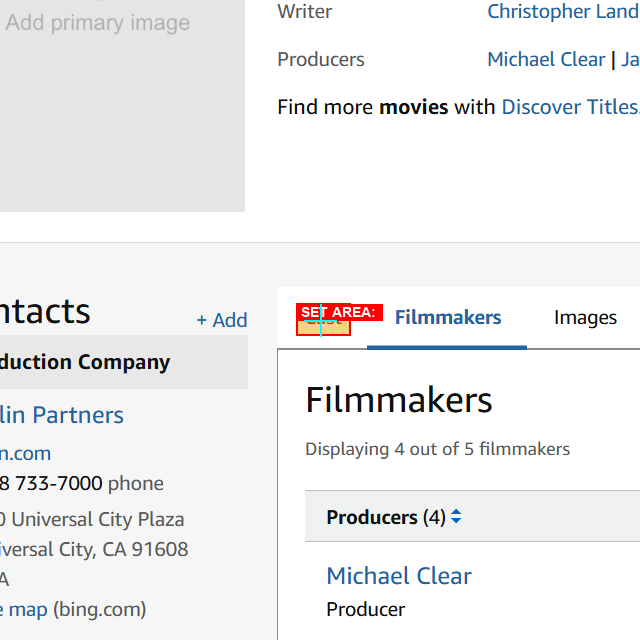

In [832]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVwAQAAAAAAAB9lCiMBGFyZWGUWKAEAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBRFlBQUFBZ0NBSUFBQURXcUJ3TUFBQURQMGxFUVZSNG5PMlhYMGhUVVJ6SGY0V3c5ZEx4REhUVGg1WkNtMFZNZ3JxcllOY290RDlrazZCSmtEMFpKRzMxVUdubzBwY1ZsTlZEczBab0R6S2kxQW5qRm9TM3A5MGUwZ1dLZXlqdndOaDg4Z3lLM1hEc1NzYnRRZHNmMjcybUxxellsL04wdnQvZlBaOTd6NDk3N3Qwa1NSTDgzZHE4MFFBcnE0Q1lEeFVRODZIL0JWRVk3WE5ZOStnMG11S2xVV1k4MHNyRy9qVGJrbFpFRkZoSGxmNUVxL2R0VkZTVmFzc1hoNXBNY09HNTlhMmM4TmswbXVLV055c0dpNVJ0M20yMVBZc0JvbDNQKyszN1VaYTNzQjVBQUVLaXZ4ZFVSRXo0WEYwaEFJT1Q5ZHQzeUpjbWhHZzRHSm9SQVFBMFJucWZBYWt6WXFMQXYrZkNYd0FBR1E1UnhwVDNpZWNCUUJSSUxBWUFvTnFxelNyTGtDU3ZwTStHTUVabmg1THltYkhiUm9SeDFpaXBjNGVYM0RqbnBFcXlYTXZqaUJUdHJWMVdnakc2eU1vdG9ZUTQxcVpER0ZNUGVLWE1FNGY3QlRzWkpiT0V6QkorcEswR1lZeWFGdThxZUUySGtjN2F6VVhpeVdTY2tNZzRNL2lPU0hOOHdNOHduWFVJWTNUY3lmZ1p4czh3NDJRdGlDTVhNY0tZZWhoUnlDelhONllaWTNTd0p5SkowblFQaFRGcVpuSW5YMTlRZm5ncDVmdTlXSlRSVDVWVUxRSVl2bnpLelJGeDdaZGNOK0pDN0dWSGczbDNSYkZHbzZ1cU1sdnZCZFBldnV0RFY2a2lnZXRxTUphWDBTMlAyRTlySVZWQ05KcE1BTUNIUXZLUmFNL1JxaVlQRjk5VzcvTDA5OTY1VmwreEpkTkdlenZZbVNuT2ZZbXVoTkRBVGR2ZThqcFBlTldNU2wzd3dXWENHR0hiWUZ3bU1PNHlZSXhxZTJmVFUyeTZGN09WblBhZTBXR0VIU1A1N01XZGR1Y3hBSGh6NGZTdDRPZGNBUklsQUtEWGFsTXpDN0picWE2MDBKVUFzT3E5Vmo1ZDBCblBBR2R1OUU3Y3I5dlJvN2ZVMHhWcUFJREVUUER0bU9yU0tOZEkwK0RqaGpzZEo0M09BOEMvOHJydVBrcjM0a3lmNHdZeE5WTG1QZFZhZFh6eWFXdjNSd0FMWGIzbzZ2VjZnT2hBYTlPdURsc3BHWnUzdU02YmNsT3MrSnlsWklScHR4cEtscjJmalhZL2tTUnBxdDltU0UzcWF1eitRUGZobnh0TmhzNXR6NjZpbklGMHo4UUQ3ZWEwZFNVZ3QvNG02YmQvcjhUUE1lRTdBUHh5V0lrQytUb1BvRUtsT1k0d1VZZ0o4N21xRnJVZ0NsL21WUnFrbHQvT1ZTQnVsUDZYVDlxTlZRRXhIeW9nNWtNRnhIem9IMEQ4QVFITEQ1MkVXMWV4QUFBQUFFbEZUa1N1UW1DQ5SMDWNsZWFuX3ByZXZpZXeUWLAxAQBpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBRGxDMGxFUVZSNG5PemRkMXhUVi84SDhJK0VrREJNSXBLZ3NrUVp5aEo4Vk9vQXFWVnNxNmgxdHJWMFdFZXRvN1pXNjZOWWY5WlJXN1hWcXJXTzJpcHFxNmhWMFZaQUs4VUo4Z2lLb0N5UkVZVUVNUWtFRWlENCsrTkNDQkNXb2xIN2ZiLzY2aXU1OTl4enpyMkdmTzhaOTZTZFdDd0dhWnhhclZhcjFjenJkdTNhdFcvZjNyRDFJYTNTcFVzWFExZUJFRUwwTXpaMEJaNTFIQTZIdytFWXVoYUVFRUplTkVhR3JnQWhoQkR5YjBRQm1KQm5Sb1VzN1dxeXBNTFExU0F2aEV1Ly9ENzRzOTlYWDIzdGNScDFUbXAwcHZ4SlZLbWw3c1ZPK2V6M3dXdGljdzFaaVNlajdxbFJGelFoajA1OGJObFhVVko0VDk4MjFWdG5jNFU0TVM2ckZPWjIvWHpzMkxXYk5ZbmJQdGwrRmM3QlgzODZTTjljZ2h1aG42ODRYUXEzNmR0Q0FnUlB0dUxreGFCUkpNV3VQcHB6S3FkY1VRVUFNR0lKT3d1LytUUXdvQVBVeGVXNWNyVDZmdTVCL0pUbHFaZkFtdnJaNU1YdWJWL2pGcWtxbDhyTGN6bmxUN2lZL05BMTBUc2xwbE1YakE3dS9JU0wwcXA3YXRRQ0p1VFIyVGc3VmhUSlpJbkpXYnBiTlltL2Y3dGwwK1l0YTQ0bDFrbWRtaGhiSkpPWk96bzJNcE92ZzBnRXdMeUxVRkN6Sld2L3g1UGVYbkRrYmx2WG03d0lTcUszL082OUllUGduWElGbTJYSE43SGptOWkxaDBJc3p5aDlqRnc1N2UzTUFDTlRKK3ZtMHlidi9iM2JoMkU3bjllSnZCcTF2RHhYWHE2dU1sZ05xQVZNeUdOdzdldHJGdmwzVVdMQzNjbU8yZ25YcWNuSnpJdGJhVm5vNjFpeldaeWFyQVFFdmJ4dEdzbk1adVRxQXlQcmJKRVd5UUR6TnE4MWVmNXBNZzcvTmVXcUJtYjh4ZE1EcG5yeWRYZEI4eGdabTdtdDJlUzJwbVZwcFVYbGdPbGpGUFp2UndHWWtNZkFjdmZ4eHQ4WHhRbEpzckZkQk13MmNXcXlFZ0lidTNKeGJuSnlBUnlyV3hLeUc5ZkZnSm12ZDFjQUZhVXlaYm1KdWNDTXJYM2Qzb3hkVVNwVGxiTzVBbk11YzRoVUlnWUFaYkZNSmdOZ1l0N2VqTTJxTHJtaTlFNXFvbGdHbUF0ZFBMb0pkYmJyeTdsbUwzbEJsRjVmZjZvTU1KMi9ZT1JVKzNyL3VpelUvK2ZXcUNVNWw5Smthb0JuMzZPL2ZVM0kxSlFwRkdVdzQvTTRMT2ExbW0waHRJRGlRWWthSnJ3T0Zwd0doM09zYlBzN0N6blYrZWRuU0FCQUxpdVNtZ0ZnOFhqOG1sMVFsK1JjVGJ5dkFOQytZMzgzZTU3T1VJeTZwRWhSWWNMcllNSFJsR1hjdUpWWkRMUVhCWGpZY1BSK1NpdEtNbExTTTRzQnJxQjNMMGNodS9HOW52YkMydUxsMGxKVTEwY3RsNVpxT0JhV1BIYUR6SnVsbHVkbWlWTUsxV2g0SWpwRmFFK1dZK1hRdjRkbDNjZG15aFYzc2k3bGxRSm0zZnM2T2RYTm5nSXdJWS9GeDlNYkZ4UFQwdE14dkM4QW9DSTFYUXpXd0xHdkt6ZHRTN3h4cTJLa05Sc0FOT2szVWdHelFmM2NBQ0JoMThmckwzclAyUGlHYk9mM0I1SmtnTTJrZFd0OVk1ZDlGaWEybWJEMnV6ZHNFcmE5dCtZZlp2aE9mR0w1eHljQUpzM1lMb0JHSFBIdHFsMUpzdHBLQ0FiT1h6ZXJuMW1qT1krbHg2RmZMT3JZbklncW9JZGpnK2piSUdWbTdMeWpxY2NsMmcxSjdxKy9FajdPQmdEeTR5ZC9tYVY0ZWNDaHJyY243ODNQcUFCNitkeWVpeTgvVHpnTzRhNmZYd3NBb0JFZlhCdTlLRjNicGs2Q2tYRFhqdGM0Vy9kTWptZTJsRzM1N3NRV0FEQmQvTldFcVRhQVJucDhVK1M4SkoxbU9OdDA2dFRBeFgycW0rbVhkcDJZY28wLy8yM1RZMkg1R2RvaGFqUCttZ1VqSitxZVRsVlp4UDRqTzg2V1NMVmR4R2EzZG4zOVdvQUY4MGFUY2VyRTVNUHkycjFHcklsVFI2L3h0UUNRZXlKeThKK2FXUXRlOFRnYlBTKytUQTJNbXY3dUJ0K1dYTnBhVi9mL1B2bE11VnAzRTl0aThlTFJ6RFhQUFJFNStNL3k0TGZkT09kVGR1YlVYaDloTDUrb3VaNDg1bDFGenM0VjBhdTFYZlMveERvNVcraG1TQUdZa01mQzd1WHRnc1MweE9RYjZPc0JBTW5KU1lDbnUyOFBaVGdTMHpMVE1OZ2RxT21YOW5iM3FEMDBjZGZuaVJBNDl4dnNiUUdCbzFtZGJCMkhUSi9qS1l2ZHZ5K3VTTkR2bmNtK0FnRG1qcFlBU3VPMkx0dVZWTnAxNUpMNVkxeEU3SXFzYzV0WDdMeXdmcTN6dG1XQmdoYmtURjRBeVprbEFKeTZkbTUyallLSW1Leit2bTdoYzd1SnVPV1M4N0dUajhxVFQxMlBIbU1UVUJQcGNzOWY5UCtINWVRaW5HZ0JkT2NEZGVZL1M2TmlGNlZyN0hwNS92eGVEenR1dWFKVW5uRlJ6Z05FTDN0dTlTejc2MGpHY2JuSnFER3VyM1VBd09uZUFVQlo5RStSODVJMHdtNzIzMHoyY3VkRG5oVDdjYWgwNTlZVDZubHZMdmZVeGxmNSt1T2FxUlA4ZnU3TjU2TGs2djZMTTYvS0Y2MDk0N1Foc0xjMlNXSCs1aFRoN0tsOVJydFlRQzdldkMwaFZDSmRIeUVPR0djRFFCRWJPVGxNTHUxc3MyK1diKy9PSnVvNzE3OVluM0p3WjJUdjdtTW5XakhIbCsvYzhKZmF5SFI0SHlFZjZHM1YrcXZjbmovL2JZZiticDFFWEFBbHlZZGpwMXdxV1IxMlBYaStqN1p2SVBUM0ZIZFArMTN2dWJ2eklVK0wvM1I3ZnZLMVd3ZkZubE50QUpSRmJ6MjNXZ3hoTjhjTlU5eWR1SkRuM0FyOVBTTlVwd1FLd0lROEhrRS9YNmRmMHpLU2szUGhZUWZjVHI2aFFWYzNkN2ExMHNNU0oxS1N4WEMzQWJJUzQ1Uk1jMW1IYS9DUFM0Y0t0RzkxNTdJSW5BY09jaFpManUyTEt6SjM5QjQ0U051RXZSdjUrOFZTZUUvLzhtMTNjd0JnT3c2WlB1bmN4N3RTTDhUS0FvY0w5T2RNWGpDS1VnMEFUZ3NtMFk1Nlo4S0dRZFV4VFJqa0ZYejIzQlo1U1VZK0FyUXpFY3c2N2ZzbXNIZHQ5MnlTN3VISmFTV0E2Y1F4UGs1OEFLWkNEbDg0QWdEUXcyYzR4TGtuTTQ2RDVkSGJaN2cyTjNIOCtxc2FjRHB0V0JUUW53VUFRdi9YRGhtZDhQK2xLUFJvL0d4UFg2RzJZbStQWFZ6ZEpMVWNQc3R5dzlvajgyN2w3N2hRdHRXL3BvZmN5dkhRU3IvcVB0c09sb3NEYjRmdWxTZUxpd0FiUUh6d3FGUnF4Tit3NkpYK0ZnREE2ZHJucXhFNUVXRWx4K0tMSnI1cXlSd2s4aDBRK1lIVEk2K2oxRHZvdGQ2MTd5d0RQcmcvNmxMUzhjSVNDV0JYczlVcE1DQjhRdlhKQzMzOXBzV0V6YnRWZGlPUHFXUDgrbXZNcGZDcnZoUWRCaXkzMGx6OU1xdDZqZ2cwTkF1YWtNY2s4UEd4QWNRM1VtUUFaT2xwTWdnODNJUkFWdzkzNE82ZFZCVUFhWEtTREhEMjZWVm5HRXJBRjdTMk1GbFNnaGh3NmVXdE16VkwwS0VqZ0ZLbHp0elhSOGladkpqcWpQK2I4QnVHSTQ1cC9ZRlZIZTQ5K0VEWitoLytpc2dwYTBscDBpUnBNc0RyN2RCZnAxaGVmNXNBQUhlS2toczdEQmI5UFMwQVJDVHBQRTlnQk4zS2NzeE1hdDg4eURzckFldzc5YmVvM1Nic1lBcEFvYXl0SjQ5bjJwYXJHTEwwdEZmcjNnT1o4blRLMDNzcDZzcWdGakFoajh1bWw3Y2dUSngyTGJGaWVFRGFyWFN3QnJvNkFJQ0htemZPSlNhbllJaGI4bzFzd0ttZnIrQnh5MUtXbGdKSTIvM3hwTjJQbXhVaHpSSytNbUJEU3VTOEpPbk01V0VjdmtYd0NKL1pBWTY4eHNlZFZVb05BTHNPRm5XMnNrUWVJaHlYbEdTSWRWcmU5UXJxWUFxVVFOT3lDZHlsNVFvQWQxSjlQMHh0NFlrOENvMDBZcys1OVVsbHVYSU54OEpFWkdXaWJ2NllXdm92UlIzbHpRZmdodzhmUG56NHNGMjdkdTNhdFd0aHdTMDhoRWxtWk5Sb0s3eGR1M1lQSHo1c2RxL2VaRlZWVmEycWN3c0xiUXh6dmkzTVFUZXhycWRjWjczcTFhMWh6bTFZMW91am03ZXYyY21JdER1cFNMNlJCRGc1dTdBQWdPM3NZb1BFRzdmdVFKT2NBTmo0ZUF2YXFFQ1gxMmNONzFadm04aURabHI5YTNTM044VzFzdVJjQ2REWVEyMXRoQ1VjTmUvTjRUa3BvVWZUTjZlVTdOeC9idWZ4Vzd0V2FXZEN0ZFFUZWRiVzNtYnJLNWIxdHRuMmFLc0xJdDY1N016cWV4RGFDK2VQNkdUSEtidVJKRDErcDQzeXJ0RjhBRTVMU3lzdUxqWTFOWFZ6YzJ0aGJGQW9GT25wNlZaV1Z2YjI5azNFMXhzM2JnQndkWFUxTVRIUjNhNk5BZG92K25wZit2VUNRTU40VUZwYW1wS1MwckZqeDI3ZHVyVTJXakJSc043R3BvTTlzNzJKSEpnejBwNlgzc3Y0OU91c1Y4T2ExMHRBMFZjZmR3OXZSRnlNU3pnblRDMkZqWmU3Z05uY3hkbkREQkhwYVhGSUJnUSt2ZHJncTBGa0tRVEVTazdYUVFPZThEY3ZlWWJaZVFydHduTnlrM09PbC9pTWFtVXNiRDBXeDk1ejZselBxUnI1MWIyUjQyT2s2MC9uQjR6cHBEZXB5TklFS0V2T2w5ZTVNeWk5ZDZNUU1MSndhdnd6bTV0WEFzQ3BjLzJBcWw4SFUxc2d1ZFNrK3lBZnArWlRQNUwwVzZIM0FIdW5FOHNHTU9QV3d3Y2w1WDZZMFBMVk1hc3ZSZldndFY0V3pZd0JsNWFXbHBTVXNGZ3NsVXFsVUNoYVhIU2ptb2lqV2cxalNWVlYvZHVuWm04RmpJeU1qSXlNSGlGYTZBMVgyaTB0eVZCdkxOUzd2UjREMXJrSnVyZEJqNVBQaTYyZjcwQkFGbmNvOGc3TVBGeTFmMi91SHA1QWF0VHYxMlF3NitkVHY4MzZLTmllN2k2QStIVFVqY2RaYklFODc3cjNtZDhEcUpMUFczUG1xdnhwZlJSWS9ONDlMQUEwMFZITThlN1VIMER5N1lpUzJvMktXSEVFZ0I2ZCt1dWtWS3QxVnByVVpCMjhWQWFZRE8vZHN0dEtNNGNCOWtCaFRtalNFenYzb3ZKY0FIeFQ3YXd4YUNwYmxRSEhVOWdiUU5MdDR6cVhBaXFOVGorMlk2TXRZS2E1SnBGSWpJeU0rSHkrVENhVFNDUjhQcit4OUl4bWV5eGI4aVd1TjVNbTNqYkU1WEpkWFYyTmpWczN3cTNiWkd5NGwra3RmN1JnMXBJMjZMTldaOTBpdExuVnk1eENjaTFQZHg5Y1NKQktnYjRlcnJXYlhYbzRJelpkbkF2eklYMDlHais2RVNLUkVNZ1ZuL2p4VjVQWG5aRXJ0aGsrMGNjeWNLemZIMnZPUmE2WUl4NDdmb1NQZTFlMkpGbWNLejcvajJ6NE45TjkydkNNeURQTll0Uk1uNHRMRWc3ZUU0Ly8vSGNuZTM1dkt4WUFxTXV1WnBWeC9BT3FuL1I5YkpmMkh6bkdzWC9aU2RUYjNrSlZjSHRMbUJSZzlYWmhtcitXZGxhQXBHekh0ak9jUUV2a3lPMWVDd2pvMEdmNTZ6bUJmeGJOL0w4VGkxOXpkcmNxbFNibnJEb3JoNUhwNGpkOWRLZEVSZXorUFREV1ByZy9YNlF1K2V0MDF2RUhFUFp5bjlhOWhmVVNUaHdoM0x4Vkd2ckQ3N2t2dTc3YjI5YWRLNythZC8vR0piSGk1UW5MKzdUcUZNdVAvZjVYUnIxSDlTd2Q1Z2RhQmhoSm81TlRGOFYwbk8rSmpJdnBteVBGbDFxVnNaWHY0djVaNHkvSjV5MDVjaVBROFQ5OFRXNVN6bzZySlZLZEpJMSszYmRyMTA2dFZoY1hGN05ZTENzcks2VlNXVnBhcWxRcXpjMzFMNHhYVlZXbGQ5eTNYcE5YdHh1MnNhL3ZlazAzSnBrMmYyMmZ0clpmRnpWeHFLcXF5c2pJaUVsalptYUd1cEZQbTU3Wm90czN6aHpMYkd4WXE0YzFtSjVlNXNCNi9lUzZPV3R6WUlKZncwYS8zaE4vbW5YV3FuZFY5VlpQbTVYdXhXL3NMUDY5dU40K3JraElCVnpkWFhTbXFBamMzRzJRTGdaOGVqM0N3dmJzUVpQZVAzdjcxeHUzSTBNM1I0TFZOVGhnb2cvWVB0UFhMVEpidGY1MDhwR2R5VWRxVW9wY0p3cmE0anpJYzhQQ2M4MDY0Y3Q3TDY2T0xjbTRVNVJ4cDJZNzIyU2lkWnN0RDhsQithbFRLUWVyVXFyZkc3RUNKZ1RVUE01ck9ueUNhOEQ2MUdpeGVOa3ZZaGhaTEg4WkFNdHAzR3VIY0dibXFhTFYrMk5ycXNwZlBQT1ZxWFZ2Q1lhLzRvVDRqR1cvVkwrMTYrVjJhRmJOK2hVdHFWaWZ3S2laMFpOM2lhUFBwRVNmcWE0ZWgyK3h1RU5yVDFHVG5DS3RQejFiWkRGcjBvREY0L0tURDhzUDdvNCtDSUJqR3Z4bW53R1I4ZXRiMGVSbTlmNWc1QzVXNU16ekpUdVBKTzBFT0h6Ky9MbWV1VnVUdEk4Q3R4T0xHMTFJdTdDd01DY254OExDd3NYRjVjNmRPL2Z2MysvU3BVdW5UcDNxZmZOcU5Kb0hEeDRVRnhkWFZGUndPSnoyN2R1M2E5Y3VNek96M2hpd1FxR1F5K1VxbGNySXlNamMzTnpTMHZMV3JWdnQyclZyT0FiTWVQandZVUZCUVZWVmxhV2xwVUtoVUNxVkZSVVZKaVltUEI2UHorZXpXS3gyN2RwVlZWWGw1K2MvZlBpUXorYy9lUENnckt5TXcrRjA2dFFKUUVGQkFWTUtnT0xpWXJsY0xoQUlIajU4cUZBb3lzcktXQ3lXdWJsNWh3NGQyR3cyVTNtMVdtMXNiR3hoWWRHeFkwZmRNRk5hV2lxWHk5VnFkWGw1dVpHUmtZbUppYm01dVVBZ1lMRlkycXRVVVZFaEVBaUtpb3JLeXNxWVRNckt5aXdzTERwMHFQTlpLQ3NyS3l3c3RMQ3dFQWdFRGFOWGVYbjVrNnV6aFlVRmM5RjBpNVBKWkNVbEpaV1ZsU1ltSnUzYnR6YzFOWDN3NElHSmlZbFFXTnZwVWxaVzl1REJBNVZLeFNSakt0RGFacm9CZGVueUlreE1xaWlWS2NFc0xsbHZhM1VuSHR0Y1lQNEl5K3lSRjRSR0xaZFgveG9TMjBKb29lZnI5UEd5TDFNb3l0UkF2Y1VtdGRRbFJRbzBLTGVpUkZwU0RnQkdwa0orblJ1QzZCLzJUTGxXdlRTVnVxUklVUUVPc3h6bW95aFhQQ2lwN3RSOUV1ZGVmUmE2QzNNK2FpYjZxcWZubTVScDYxUlZWUlVYRjFkVlZYWHMyQkdBU0NTU1NxVUtoY0xLeW9yTnJ2MWJyNnlzek0zTmZmRGdBZE9BS3lrcGVmRGdnYWxwL2Z1dndzSkNzVmlzMFdpNFhDNkx4Y3JQejVmSlpFMzNZVDU4K0pDSmJTVWxKU1VsSlJZV0ZrWkdSZzhlUEhqdzRJRklKT3JjdVRQVHZpd3NMTlJvTkNVbEpjWEZ4UThmUGpReE1SR0pSRlZWVlFVRkJWWldWa3d3VXlxVkVvbEVwVktWbFpWVlZGUnd1VndtcmxSVVZCZ1pHUlVVRkRBUlJTNlh5MlF5SXlNajVwUUJ5R1N5M054Y3RWcHRZV0hCWXJHWW9NVmlzY3JLeW14dGJaazBjcmxjcVZRV0Z4ZHJ4OGpOek13S0N3c1ZDa1c5QUN5UlNPN2Z2MjlpWXFMM3JDc3JLNTljbmUvZnZ5OFNpV3hzYkhULzFaaHpNVFUxTFNrcEtTb3FNak16S3kwdHRiQ3cwQVpnbVV3bUZvdFZLaFdYeXpVeE1WRW9GRVZGUlE4ZVBPamF0YXZlZXlieWhMRE5CQUw5VzJtTkt3S0F4ZUZiQ3B0UDlzalptL0k2Tk5XazVsam9LNTF0SVd4QlkxVC9zYTFnd3V2UXNubGJqNlpsWi9ISW1lZ0p3RXlmWjJWbFpVbEppYkd4c2FXbFpidDI3VXhOVFMwc0xJcUxpMVVxbFltSmliYVB0S2lvcUtpb2lNUGhkT3ZXemRUVXRGMjdkZ1VGQlhmdjF2bjV0TEt5c3J0MzcxWlZWZG5aMlZsWldiVnIxNjZrcE9UMjdkdE1pN25wbW1zMG10TFMwbTdkdWdrRUFpYXJ0TFMwL1B4OFBwL2Z2bjE3cHJhVmxaVmxaV1YyZG5ZOEhrK3RWcHVZbUtoVXFucjVWRlZWeWVWeUt5c3JPenM3SXlPajB0TFNtemR2M3IxNzE4akl5TjdlbnFsVllXSGhuVHQzN3QyN3h3U3pxcXFxdkx3OGpVYmo0dUxDNS9PWjJ3V1pUSGI3OXUyQ2dvTE9uVHN6clhBQTVlWGxsWldWWGJwMDRmUDVTcVd5WThlT01wbE1vVkNVbEpTWW01dHJyNmRDb1dDeFdFeTFXNkxONjl5cFV5ZW1FVnhZV1BqZ3dRTUxDd3NuSnljbWtPZm41elAvUnRyU0t5c3I4L1B6eThySzdPM3RoVUpodTNidE5CcU5XQ3lXU0NTNXVibmR1bldqTG1oQ0NIa2MrbWRCdDJ2WGp1bkRaTDdsbWU5eEt5c3JBQktKUkJ0OU5Sb04wKzYwczdNek16TmpVZ3FGUWd1TDZubnhURXFtZDVySDR6RzVBYkN3c0xDenMydkpORjJtWE8za0wxTlRVenM3T3dEMzc5OW54aStaTkIwN2RoUUtoVnd1bDgvbk4vYmdrNW1aR2ROdVpsN3plRHp0Z1V5dCtIeSt1Ym01V3ExbXNtWGFuU0tSeU56Y25ObFNWVlZsYm01dVlXSHg4T0ZESnNacmE4N244N3QwNldKdWJpNFNpWXlNakpoK2VLbFVxaDN3Wmk2Q21abFp3KzZCSnJSaG5hdXFxclQzSlFVRkJTWW1KZzRPRHRyT1pKRklWSys5THBQSmxFcWxVQ2dVaVVSTVdTd1dxM1BuenFhbXBzWEZ4U1VsdWhQN0NDR0V0RnFqZzNrU2lZVEZZdWwrS2ZONFBBNkhJNWZMeThyS21DaFNWVlZWWGw3T1pyTjV2T3F4YzJacWxhV2xwVnd1UjAxam1na1BIVHAwMEcwejhmbDhiVmQyRTIwcHBzbW9tOERDd3NMRXhLU2twRVIzNFF2ZHFOWllPRGMzTjlmdFBHYzZVWFhuZFdzbkdXazBHbU5qWXhNVEUwZEhSNllPVEFLbVY2Qzh2THhoS2RwOG1KdVY5dTNiczFpc2twSVN0VnJONFhDcXFxcEtTa3FxcXFxMHR5QXQxQ1oxTGk0dTFxMXplWGw1UlVWRmh3NGRkTHVSbVp1R0J3OGVhTGZJNWZLSER4OEtCQUtOUnFNOUwyYWdnUmx1YjNsVG5oQkN0UHBQR1JsYkFjNFRmM3o1T2FBL0FCY1hGek96ZnBnT1QyWWpNNlZXbzlGSXBWSjdlM3ZtTGRQbFd5K282SVpEalVaVFVWSFJybDI3ZXIzTlJrWkdIQTZuc3JLWko2dmF0V3VuRzRHWUE5bHNOaFBQdEZ1TWpZMTE0N0hlckppWVZPKzVIU1p6M2RGbzNjaHFaR1RFakx5V2xKU1VsWlZWVmxZMmxqbVh5OVV0M2R6Y25NUGhsSldWS1pWSzVqU0xpNHZaYkhhOVZtYXoycmJPVERLbFVzbGtvcDNGemJ6UXZZWUExR28xZ1BUMGRHWkNRTDBUcjZpb0FDR0V0TjVqai91K09Pb0hZT1k3V2lxVkFqQXlNbUsraFJsTTY5Ykl5SWpwbmVad09OcW5YT3BsVXE4VFdLUFI2SjF2MWNRaVdmVUtyZmRrampaYmJUdXZKVm1oQmV0WTZWYnk0Y09IZCsvZVpicVJ1Vnd1MC9MbWNybk1ER1J0UHRydTJYb1ppa1Npckt5czR1SmlnVUJRV2xxcVVxazZkKzdja2tvK3VUb3phYlF0Mm9hSDY5Sm9ORVpHUmdLQm9PRzFiZGV1blptWkdUMEhUQWdoajZOK0FHN1hycDFLcFdLbVg5bloyV25ic3N4WGJVVkZSVlpXVmtWRlJYRnhNWmZMTlRJeVlyRllUQSt6N25leGJ2T29YYnQyVEhCU3E5WE1jNjdhN1MxcFJURnQ3bnFQMGxaV1ZqTHRZTjFKUTNvYmF2Vk9UZS9HeGdKSlVWRlJRVUdCcWFtcHJhMHRNM21ieFdKcE5CcW1kNzFaSFRwMHlNdkxVeXFWbFpXVlJVVkY5ZnJ6VzZoTjZzek0vOUttWnhycmxaV1Y5ZUo2dlMwY0RxZTh2THhUcDA2TkRWcFQ5Q1dFa01kUnYzSERQSFZhV1ZuSjlKZWExdUJ5dWFhbXB1M2J0K2Z6K2N6c1hJMUd3d3krYWpRYXBsZFRTeWFUYWIrZG1RZGRtSTI2YWNyS3lzckttdjk5cTZxcXF0TFNVdDB0S3BWS3BWTHhlRHpkTlM2MHEzQTBrWlhlZG1TOVNLWmRjVUpiWVV0TFN4NlBaMkppd21SZVdWbkpqS2MybXpQemFCRFQ5cFhKWkJZV0Z2WDYwbHVpVGVxczBXalVhclgyWnNYTXpJenB3OWU5QWRJK2RhYmR3clJ4bVg5S2JlZEh1M2J0N3R5NWs1NmUzaWJya2hKQ3lMOVovWWlsKy9odnZiRkQ1di9NL0Z2bWVTUmpZMk5tYWxWZVhwNUtwV0lpZ1Z3dUx5b3EwbzBjZkQ3ZjFOUlVkN3RhcmM3THkydEpFNnFxcXVyKy9mdk1uTnVIRHgrV2xwYUt4V0lXaTZXZEJzeGdJa1M5SmFQcnJVSUZuWGltdTcxZU5iUmR2c2JHeGt5SjJrREZWSnU1YjlDVzFVUlByS1dscGJHeGNWNWUzc09IRHkwc0xGcXlmc1dUcTdQMityUnIxNjVMbHk3TW84Qk1HRmFyMVZLcHRGN0wzc3JLaXNQaEZCUVVQSGp3Z0Rtd29xS0NTY2I4MHpkN0xvUVFRcHBRLzJ1VTZWNW1scC9VYnRUOXVqY3pNMnZmdnIxQ29Yanc0SUdabVptbHBhVktwWkpJSkJrWkdhYW1wc3kzdjZtcHFXN3J5c3pNek43ZVBqTXpNemMzdDdDd2tNMW1sNWFXVmxWVmNibmNKaDVBMGhaZFhsNmVsWlhGUEdSY1dscGFYbDV1YlczZGNBcHV3eWpJUkdYb0crL1VPNmhjNzRWUUtDd3FLcExKWkV6bmVXVmxwVXFsMG1nMDdkdTNaKzQvbWwwWm0xazZTaTZYczlsczNRbzNOcXo3aE9wY1ZWVmxZV0doVkNxWk9qUFQxTXZLeXFSU0tSTktxNnFxbU9lWGxFcGx1NXJucHBnMXhmTHk4ckt6czAxTlRabW5xOVZxdFVhanNiVzExUjFOSUlRUThnanF0NEFWQ2dYenlKQzJpZE93c1NVU2lWZ3NGdk1rTG92RnNyT3o2OXk1TXpNNFdsSlNJaEFJYkcxdFdTeVc3dlRwOXUzYk96czdzOWxzcFZMSnJOems3T3pNREZKcTAraXRINHZGc3JXMVpaNDlaWnBvOXZiMk5qWTJUT2J0MnJVek5qWm1Gc1NvMTBEVXJwS0JtbW5TOVRxb21mSFJlczFvM1kzbTV1Wk1KY3ZLeXU3ZnY2OVFLTXpNek56ZDNZVkNJWnZOWnZwZzZ4M1NzUExNTTFTbXBxYmFpTlZFNkgxQ2RYWnpjeE9KUkd3Mm0zbXlDQUF6d04rMWExY3pNelBtVHFoYnQyNU1ud2Z6Nzg0MDY0VkNvWXVMaTRtSlNXbHBLYk1nSmZPTEVjekRWRFFHVEFnaGo2T3B0YUFibzdmVHRiS3lzcUtpZ3MxbU45RTV5VHczek15ZmF2YnJ1NnFxS2lVbHBiS3lzbHUzYmp3ZXI2S2lRcVBSYU1jMW54cW1kY2dzY3RuYW9oOCtmQ2dXaXdzS0NycDE2L1lJTTdBZVdiTjFMaWtwWWJQWjlaNGZ5OC9QRjR2RjF0YlcybFUydFppUmIrWWY5L21LdXkvR1d0Q0VrQmZTbzR6azZmMEtOalkyYm5aYzBNaklTUHU4Ykd0TFliUFpqekNKNmZFeHp5cy8yckdWbFpWeXVaekQ0VFRiV2QyMm1xMHpNeXp0Nk9qSS9ITXcvZnpNNnR6YVZjeDB0ZVFmbHhCQ1NLczhvOStxOWJxVW42OUhUcGxaNHVYbDVmZnYzMWVwVkE0T0RrKzUxZDRzVTFOVHFWU2FuWjB0RkFyYnQyOWZXVmw1OSs1ZFp1WHFwM3l2UUFnaC8xclBhQUJtb2krTHhYcW83emVHbjMzTUR4QXhjOW0wbmMvUHptMUVseTVkbVBucXQyL2ZacmF3Mld4TFMwc2JHNXRucElhRUVQTENlNVF4NEtlR2VieFlkNjdXODZLc3JLeTB0SlRENFhDNTNHZXc4NVo1YkZxbFVwV1hsek1MaWpFTFpqMTMxN2xaTkFaTUNIbG1QZE1CdUtFbUh1QWhqNkRoN1BFWDdQSlNBQ2FFUExPZXJiRkpyY2JDd0FzV0hneXU0ZElsaHFvSklZVDgyenlqQVpoR0lwOE91czZFRUdJb3oyZ0FKb1FRUWw1c0ZJQUpJWVFRQTZBQVRBZ2hoQmdBQldCQ0NDSEVBQ2dBRTBJSUlRWkFBWmdRUWdneEFBckFoQkJDaUFGUUFDYUVFRUlNZ0FJd0lZUVFZZ0FVZ0FraGhCQURvQUJNQ0NHRUdBQUZZRUlJSWNRQUtBQVRRZ2doQmtBQm1KRG5TY0x1ajJmTS9uaFhvcUhyUVo0ejVkSmJLWmZ1bFRlZjhGN3NsTTkrSDd3bU52Y0pWYVF0OHIvMHkrK0RQL3Q5OWRVMnExUkxSTTYwRkZoYVRqdlZsbmthdDJWbWhQd0xKZjQ2WTJkYzNVM21vcjRqcG93T2NCUzBmV2tWeFRKWkVaUVZiWjh6ZVo1Y1BUTjRyeFF3bmJWNDlFUXJmUW1TemdUK0lsWERkT3FDMGNHZGdhVG9ZUnZ5RlVicGE3NGRQYkZEa3psWGxVdmw1Ym1jRm9UcVI5UFMvRFdLcE5qVlIzTk81WlFybUY4dE4ySUpPd3UvK1RRd29BUFV4ZVc1Y2tpZTBiK0MvTkExMFRzbE5WZStTZFFDSnVUeFZDaGxSVEpac2M0WFNxazRMV0w3b2s4V24zaFNqUWp5cjFkUm5pc3Z6NVhMVis5UFV1dlpMUTA5SXM2UWwrZkt5OVZNOUxLMHNETUN1S1pPdktkYnowZFVFcjNsZCs4TkdRZnZsQ3ZZTER1K2lSM2Z4SzQ5RkdKNVJxbWhxOVk4alZyM3lqZUpXc0NFdElXK003Yk43bHZ6cGlJcmJObWlQKzZFN280ZUZCSWdNR0N0eUl0T2NTMTVjNmJuL081MU5xcGo0OWZuMUUxbk15Qjh4NENuV0svSG9jazQvTmVVcXhxWThSZFBENWpxeWRmZEJZM0JxdlVrVUFBbXBNMnhIY2UrMGUrUDcrTlNFdEkwQWYxWXFDaVZLY3ROekFWbWJOUzhibS9HWmdFQUtrcXpiaVdJaXdFSWJMeGRITTNZOVROVFNkTlMwaVFxbUF2ZFBad0ZkWFpwS3BURnlncVd1YUM5emxHcVVwbXFuTTBWbUhQcnBpeThrNVlwVWJhMzhYSHVxcnVyb3ZST2FxSllCcGdMWFR5NkNhdHJoY2JyM0d5RnlkUGkxSU92dmlYZmNpUisyb0krT2kzYm5NMWhVZ1hIMUoxYmxpeXYyYVlwVXlqSzFFYW1RcjZwYmc3cWtxTGN6T3pNWW81dGQzdW56aGFjZWdWVWxHU2twR2NXQTF4QjcxNk9RdDEvYXJVOE4wdWNVcWdHZ1BZZCs3dlo4K3A5RURSbDB2U3NxNFZxd0t5N3Q2T1RoVWxMejZyMCt2cFRaWURwL0FVanA5cXo2dTVqZ2FYL29KclR5Ym1hZUY4QmNLeHMrenNMT2JxSm02aXdXaTR0QlkvSDU3Q1kxeHFPaFdYOTAza3NHclZjbXBGK0wwOEZBRHhiNTk1ZHF5ODFCV0JDbmdBV1RBRGdibDRCK25WQndxNlAxMS8wbnJIeERkbk83dzhreVFDYlNldldqdTBDeVQvZkw5MTVSVlo3VTgrMkdmN3BsKzk0QzJxK09HU3hXNzdZZktFMmdjRGRvNzFPS1FVbmwzNStVR3czOGJ0dnh0alViQlAvdGV5ek1MSE5oTFhmdlZHOVRYYjExNjgyUm9wckI4ellReGJ1bnVFTmFNUVIzNjdhbFNTcnpWQXdjUDY2V2YzTUFPaXY4L0Q3dnk1ZHA1c1Z1cjY5OFp1UndzZTdXT1FSY2JwNUxlWmNuSEl0ZFgyU3ozTFA2ZytONG16Q2xnZHdmNzNINlBpRVpHM1MvUGpKWDJZbGl4ei8rZHJQanRsU2tSTzYvdHl5ZE8xbkt4NDJUdjk4TmFCNmIxVlp4UDRqTzg2V1NMWDlxR2EzZG4zOVdvQUZBRnpkLy92a00rVjF1cjdaRm9zWGo5YkdTOFcxTStPM2lqTnFQeWV4dllOZU9WVDdJVzJLT2pZbm9ncm80ZGdnK2paSkl6NjRObnBSN2Vra3dVSzRhMVdMS3B4N0luTHduNXBaQzE3eE9CczlMNzVNRFl5YS91NEczMVlVM3FTTTlaOWQzQ0xYM1pMRXNYRUtYemJBaVVVQm1KQW5vVWdpQWNEcWFtdXQzWlM0Ni9ORUNKejdEZmEyZ01EUkRCVlh0eXphZGtYWjNuM3MxTW5EblFXUUo0ZHUySEkrNHR2UE5FdDJUWEVIZ0x0SHY5cDRRY1lTRHByOWFiQ2JBR3JwamVpRG9TZGFWNUdLcTFzK1czZEJ5Uko0ako3NHhrdmV0aERmeUV4SEJ3Q2xjVnVYN1VvcTdUcHl5Znd4TGlKMlJkYTV6U3QyWGxpLzFubmJza0NCL2pvbkgvZ3lVc3gySHZ2NTdKRTlCRkFxbGRMa0d4WFVBallnazRCeDl1N1hza0tQeHMvMjlCVUMwR1R0T0NrSHA5UGlNWmJKOFUwY0tONjVQSHIxUFhCRW5SYVBjdzdvYnFySXZIZTFrRlBiTTFLWXZ6bEZPSHRxbjlFdUZwQ0xOMjlMQ0pWSTEwZUlBOGJaQUVCNy92eTNIZnE3ZFJKeEFaUWtINDZkY3Fsa2RkajE0UGsrSEFBNTV5WnZGbWR3TGRjczhodHRaNEg3R1p0L2lOMFNIcjJzKzV2YXU0UW1KR2VXQUhEcTJybCtjN3dwSmRGYm9oZWxhOXhmOXYxeGpLTWRwendqSm5yeWZ1bVU3Mk5qbC9vS202MHdBSlR2M1BDWDJzaDBlQjhoSCtpdGQxN2JveEk1TzI3b2ErdlRuYzhGSUJmdjJKbXdVNXl4L29MUFZuOVRDc0NFdERXVitPOWRmNlFCNXI3OWZIUytjRnlEZjF3NlZGRHpUbnprd0FVbHpJYk1YakxKRXdBZ0dEaG5sVW41M08valRoK01HTHQ4dUFCeFJ3NktBWmUzbHM4WndCd2xHRFJwaVluMDdmVVhXMTRWV2NUUkMwcVk5WnU5YnI2dldYVW1Ea3gwai96OVlpbThwMy81dHJzNUFMQWRoMHlmZE83alhha1hZbVdCdzJ1cVdhZk9kNCtHbGdLK0l5ZDVDZ0ZBSURBWERCelN5bXREMnBqTmdPWDljOFpmeXRoOHJjL3lYaXhwVk1LV0IrZy93YWMvcXp5NWlhT3VKVysrQjRnY3cxZjZPVEVmMFQ2ZDNIVVRXRGtlV3VubnhMenVZTGs0OEhib1hubXl1QWl3QWRBNzZMWGV0VWt0QXo2NFArcFMwdkhDRWdsZ0IwMzAwYXprS3BOWmMxK2IySlVGQUNMWCtaT3lRemZrSDR2TldPN3AydXdKS1VvMUFEaXRtaDhzVGxoL1RZTWVidnZlY2VVQmdJblRLd1BtWHp5eDZJNzQ3QU5NN05CMGhhdUpmQWRFZnVEVW1xamZRazdCTTUxcTMzV3dYUHhxOXM1Zml2S2tSWUFOQldCQzJzTEY3eWZWall2c2JtTVdUZW1yMnp3VThBVzFiMlRKQ2JtQTJhQ0Juam9welByNmVTSXVOajB0SGNQN0p0OUlCT0E4YUlET1VhMGxpNHZOQUZnK1E2cWpyODZlcEFReDROTEwyMXluZ2gwNkFpaFZsZ0kxWmRhcGN4ZDNqL1lReDI1YjhZZlpuSkh1QW1yNlBoTll2Y2M0OVk5TkRmMzk0bFFQMGM3akplaGdzM2lZRUJBM2NjelZLMUlGNE83cjdOUllpOVFJdXFHSVk5YmtDQzVMTjQ1a25MMEZjQ3hmZHRiSjJ0TFVEa2d1ZlZLUE5rbVRwTWxBZjg5dU9nUGhsaUkrQUkyaUZHajQyQlZMVCtEajhVeWZRUFRWaDExN1pTZ0FFOUlXaE81RDNMUkRvUUtiQVM4UDl4UTJGYUZLUzVVQU9ncnFmVG5ZMk5zZ1ZweVZKMGJmVW1VcEFGRUh3V1BVaWltbGk0Mm93UjVsYVNtQXROMGZUOXJkOHV5Y0ozMDJKblgxMFJ0aHEyWWNZZHYwZWVQTk4wZjBzNlk0YkdoV2ZSWVB6Z282bS9YeHN2eGtOWVpQOEhWdnJxT1hhV1YyNzl6cEVVdlVTQ1AybkZ1ZlZKWXIxM0FzVEVSV0pqckRxK1Z5TllEODhSL3VlY1RNVzArbDFBQzRGSGFpVzFnaktacXE4Sk1uU1ZpOUxTTkNVcGFyWWduYm16aFoxRTc2b0FCTVNGdHdEcHd4bzIvenlacFYyUVo1dEp6TDY3T0dkNnUzVGVUUnBkSDA1cTRUdjlrWm1IYnVhR2o0MmJUWWcrdGovK2o2OXVwdlJyWm9jZzE1WWxqdVk5MUhYVXc0ZnE4TUlzZkZMMXM4NGVMRU81ZWRXWDBQUW52aC9CR2Q3RGhsTjVLa3grL1VUY0szWEQ2Mi9tMGZ6OTRKTGREZDNoVFh5cEp6SlV4M2Q4djE5dmVjMXIzZU5rRnZtNVpWK01rUlh3ejZ2NHhrc1ByM2RwenZhY0dSeTg4bTVsK3EyVWtCbUJCRHNCU0lBUEZkY2Qydm1ZclVMREVBUndjYm9FSmdDUlRkeWJ1TGZvMUh4QmFWa3BzbDFzQ21icXRJWkNrRXhFcE8xMEVEV2hrKzJRS1hJZSt2R1BKK1JVSGsraVcvSmh3NG1qQnlscytqVnBDMERUUFBKWE1yWHlzRXo3NkhYZk9wSWJRMEFjcFRjc1R3YmYzTlUvcXQwSHVBdmRPSlpRT1lQcC9oZzVKeVAweW9XWFhHd280UHlDSHE3ek84TmJPWXRldzhoWGJoT2JuSk9jZExmRWExN0Y1Q1pHa0NsQ25NUk1NSDZUdWRaaXJjNWtweWRlWThKNS9OU2E1Qzd6R0IrNEtxZThpR1cvMTFjTHVVZVUwcllSRmlDRnh2SDFkQWsvQjNyTTdTUHFVWDRwSUFscmVQRzRDdVB0NW1nUGhzOUIyZHd5cktWVHJ2ek16TUFkd1ZpM1ZYSjlCdFEzTzlQWndBWFBuN2ZQMEZoTmllN2k2QStIVFVqVWRkMllCdDdlN1NFZERnR1YwUThGOUcyTU5uK0NDZi92YW16U2NGM0QwdGVVQkc3SzNrUi9qWEx5clBCY0EzclgzNFRLUDdtYk1mMElNRkZPMkprclkrYXdCQTl6N3pld0JWOG5scnpseVZ0NmgrSEU5aGJ5QWpKdm1xM3VUTlZMaXRGZDVQVmdOR0ZrNDJBQ0F0S2dkZzI4R3lOa0VGZFVFVFltQ0M0Vk1tL3IzNFlOem0vNjYvKzhad0o2Rk1tbnoyME5FYkduUjllL0lnTGdCNGpKM284cyt2YVNlV2ZTWjlZMlJmb1lsTWZQN3Zrd2wzZGZOd2NiRkVXdEdGME8xZDJZTzZvdmhPUWxUazM2bTZYM3lDa1c4R0hsa1ptYkJ0NW1leEk0WU1zaEZBSms1S1p2c3VIT3NkT05idmp6WG5JbGZNRVk4ZFA4TEh2U3Ria2l6T0ZaLy9SemI4bStuNlc3UUZrWnQyeXh3SHViaDA3eXJpeU5JaTlwM0lCVnlkWFo3Z1ZTSlBSaStmeFYzL1duUkhIUFRaa1luKzlpOWJzOVFGUlgvZjU4K2YzcWY1QnJTTFpZQ1JORG81ZFZGTXgvbWV5TGlZdmpsU2ZLbDJONnYvQ0VmM0t4bVh3djRLekhLYVA4QzJ0MGlUbkhrL0l5bm5mN2ErVzROc1lHYkNBMUFvWHJiMXIvLzA5WjNWeDdKQkFSYWpadnBjWEpKdzhKNTQvT2UvTzluemUxdXhBRUJkZGpXcmpPTWZFRDdPaG1mR0FqU1hUcDVZZEZVWVBOUFgzY3BuZHUrc0tWZnp4MzkyYk5ZbzUxZmRPbkVrMlpsNThxT1h5aWV0REF4b3BzSnRJUGY4bWRBQy9uK3NXWkFYN1lrVVh3V0V2dDBDQUFEdVBmaTRKajkrTlBJMVc5L2VrSjQ2bTd6NVlvbjJRQXJBaEJpSTNaZ3ZRL0RkeG9OeFlkdXJmOHlCSmZDWThPbG4yaUZWeThBdlYxYXMrV2JmamRpRDIySUJGdHRtMFBTbEFaRXI5cWZYWk5GMTdIc0R6Lzl3UVhKdTM1cHpBSXR0MDJmaWx3dGw2Nzg5V1Z1SzIvdWJsZ2syL2ZoSFF1TFIwRVFBQUZzNE1nQUEyMmY2dWtWbXE5YWZUajZ5TS9sSWRXcTJ5SFdpb0xFS2MwektNMCtHSmg3VmJtQjNDVnk2SUxEUjlPVFpKWnk0K0RYKzl1Z3ZycFljL0RQbElBQ0ExNE8vcENXSGR1aXplRngrOG1INXdkM1JCd0Z3VElQZjdETWdNbjY5dGwxbk0rRFFJc3pia2hFUm56RXpQcU42SThjMHVLOHBBSFR3bXUrZk16bW1MRHBlS3UxY1BxdVB2aUlzUE5lc0U3Njg5K0xxMkpLTU8wVVpkMnEyczAwbVdwc0M2UDJhVTBCU2FyUzQ2T0E5MXFzQVlCcncwY2hkZXlMblhaUnYyUisvcFNhNVhWY25ZVXNxL1BnS2kzYitLZDVaODA3bzdMcnZnK29Icm9TdjlGbHpOWHBSdW5UbWloTUFlSjA3ZlROVHVIbExGck8zblZqYzFHeDFRcDVyWGJvODh2RHBVMU9obERFL2JxU3pQbVc5Rk1VeXBhYlJ2Y3hDa1FEWTVnTHp4cWNrMTZTcVhsMnk0WTVtYzZpZnZFRk81UG5ETEZFSmNNejRQRTVyeG13clNxUWw1WUFKcjBPREJTeHJzbGJMNVRVL1pGUi9DY3lXMTY4MkU3YUZzTm4xTEt0ckJRRDFsNU5zdnNMTmlKeHBPZkVBSnV3djJ2R3FucjNWaTNwV0NOeDYyTmcxcUtlNnBFaFJvZWNVS0FDVEY5bnpFSUFKSWMrQnBnUHdvNkZKV0lRUVFvZ0JVQUFtaEJCQ0RJQzZvTW1MakxxZ0NTRnRRaVdYeU5YZzhrUjhidk9KVzRobVFSTkNDQ0hONFBKRmJSZDVxMUVYTkNHRUVHSUFGSUFKSVlRUUE2QUFUQWdoaEJnQUJXQkNDQ0hFQUNnQUUwSUlJUVpBQVpnUVFnZ3hBQXJBaEJCQ2lBRlFBQ2FFRUVJTWdBSXdJWVFRWWdBVWdBa2hoQkFEb0FCTUNDR0VHQUFGWUVJSUljUUFLQUFUUWdnaEJrQUJtQkJDQ0RFQUNzQ0VFRUtJQVZBQUpvUVFRZ3lBQWpBaGhCQmlBQlNBQ1NHRUVBT2dBRXdJSVlRWUFBVmdRZ2doeEFBb0FCTkNDQ0VHUUFHWUVFSUlNUUFLd0lRUVFvZ0JVQUFtaEJCQ0RJQUNNQ0dFRUdJQUZJQUpJWVFRQTZBQVRNaHpvK0QwK2puejVzN1pjOTNRRlhtK0ZaeFlOV2ZlM0pEdFYrU0dya2tyWFErZE4zZk92UFdSRWtOWDVOOUtHaCs5YU90Zml5SnoyaXBENDdiS2lKQi9LVW5VdXRYaDJmcjI5UHZ3aDJCUEZCeVk1RG96Q2dFL3BCNTV4L3J4aWxMZERBdmRrd1oxMEtaM0h5K2pmelBKM21udnJvOEJnREMxMTcyMUx4bTZQbWo1SjZRZ1pzL2VNTGk0enAwZktHcDU5a1hSQjJKUEZlbHM0Rm9NY0JhNWVUczZXWmpVUzNwMTk3N3hNUnJoSU4vWUQxeGJYc0N6NjBIS2x0K3pjNXRLWWZycW13RUJIVExXZjNKeFN5bHI2dHczRjN1eW1raXR5cFllakM5RGhYeE5ZTnRVa0FJd0lZK25KQzFzejk1VWZYdFVyLzRRN0ltQ3RHc0FjT2w2TnZDWUFaaThrUFI5UXJMRGxxeVBFUVNGTEJqMjJKK1pzb3hFNmNFNmpXYnB3Zk5aUUt6UTJYSHJiTC9lRnJVcDh5UWFBTkk4bVJRUVBtNjV6NERTKzZmaXBjbE5wVEIxR29VQWppeWpCSUFtV1N5SHB5V3pRNTEwYnRuNWt0NkJyMDNzL2dRclNBR1lrTGJnUEQ4eWZKcEQzVzFjSGdCNExZZzQ3blVkbnNQNkdhSmVwRDdSTzZGL3F0YitmcDM3OHZ6UG40SG1ML1IvUXRJaXQrNE42K242K1lKaGJWU0k2YXpQWG5tM0MvTzZYSEkxZWZWeDhhWDByUEgvTGRuMTlXc0IxVEhZZE5SMFAxNVNtZERUOVVXSXZnQTY5ZG0zemwxZDh5NzM1Sm54Wjh2ZzVoWTdwVnZOTmhhUEI3Qjh2bGxzTnVhQmFYOGZTKzJoa3JUOGcvRmxxdDZnQUV6SU04OVlZQzBTNlcrc2NCMzhSenZvM1VNTWd2L1MxSlhQUnVpdDF2QVRrcE9tdDAvbGNmQUZsc0lPMWErRnIzVGE1NSt6WlhuMCtudlNMMzVQaloxYTArSE1kd3dZMU5ZRkd4RExsTmZCVlB0T3hieGtjNFFkTE91bDQzVjNHMTUzVTJaKzJaT3VIV2dTRmlGUFhOTGVPak9uSkZIcm1MZVY4dXY3bG83eTdkSEowbEpnMmJuWDZGV1I5K3NlcU1vT1h6S21WMmRMZ2FWbHB4NEIwN1pmS2Foc3VxVHJvZlBtemxrYlZWQ2RzNlBBMGxJZ2N2U2ZGMTVRQ1NqVHdyK2U1TitqczhEU1V0RFpKM2hUL1NsSXF0dmhLOThPY08xc0tiQzBGRGoyOEorNU0rNit2c3dCZWRMZWxkUEcrUHJPRFpmVVZQUllUWEdXbGc2KzcyMiszTlQwcHBnbFBWdzllcmdHcms5VlNXSzJUL2QzdEdRT2RIMTNTNXdjcXZUd2tORStuU3d0QlphV0FsR1BCdlZVWlI5Yk9xcFBaMEYxQWtmZGVtWnZIK1BxMGNQVm80ZnJuSEJWN1NHU3NBOTZ1SHIwY1BYd1dYQmFCY1NFTUdrOEp1M1FuVXhUS2RGZWJZR2xwY0F4WU02eGJKWE8zcGl2MzZ2ZDI3bUgvOHk5MTVVTlQwNFZ0MzN1bkhsek4xL1dLYi95K281NWMrZk1XeFY1VnlmaDdVTWg4K2JPV1JhZWpicWZFR1ZheklFdEljdkMwZ0RjRGd1Wk4zZk92TGx6NXUydE8rOU9sWDE2eTdSWGVqaUlMQVdXbGc2dlRBKzlxVUpyc2UxblRlakVBNlN4NlJHbDFkdVlTVVpiNG10SGpCVzNMczc3Y3AvM3REM2RQdHpqL1VuWTVGL2lNMHAxTXBGbkhkeC9iUHhudncvKzdQZkJueDJadVY5bnJ6d2pkT3VSd0RsN3VuMjRwOXZIK3dKWG5JbTRWMTY5NjE3QzZxMS9MZG9hVzc5enVEQnAvZGEvRnUxT3FCbTFMYytOT1RQNWkzMDlQOXpUN2NNOTNsOGMyNW1rODFsNGtMS2xlajVVZVc3c3VkVnJqd3orOGx5VHZjMU5LSW8rOE5laXJkSFJEd0JBZWlzaGRQOWZPN0lBSU9IMFg0dTIvbFh2bWpUUVpEMVJjalg4ci9HZjdPdjI0WjV1MC9iNWZuRms5Vm14dGxGT0xXQkNuakJ4VE9pZVE3VXpwNWd4NHdQbjRsWm5wMG80MWwzNC9DNGkzSlZrbjFzL2NaVGcyb1ZaMVUyaHlyVE5JMTRLU1FDTStkWmRPRUIrK0tMaFljMlV4RXpTQ1kvOFdWNGc0VmgzNFZ0MzRSZmNsVi9mODE1Z1NsOVYvSlVDWTc2MWlHOHRraGRJc3NPWERVZVh1NkhqdU15UjhsTnorNzI5dHdBQVgyVGRFYmd2dVg1Z1llRGhzSlVYSW1ZNzYyWmVZSzFhdGU1N0poeTRaSmNBSW5ua0hOK0oreVRnT1BpUEMzSlFYZzg3RlI3eWVzeTEvWWs3WHVYcnJhV3FTRkp3RjdpN3l0ZCtGWFJ1S1FwT0xBMDh0VlIzQ3lvbGRlc3BqNXpwUGZHQXpyZGJwZno2Z1lXQkIvYXVqSTJlN1F5SGtTTWRGc1hFQWRoM0tIeE4wQVJ6QUlBeUp1eVlwQUFBeGc4TDRBTHFncnZNMjJ5MXRxekt0TTNEWHdwSjBDbGFmajMwQTU5cnl5L0h6SEVCSktIamVzdzVwN05YTGJsK1lIUE1nbmU4dXFFdXJnTTNKM1JQRElyOHA3NDB2dnJpeHU5ZHVtZXZDaWp3bXg5WWM4R3pUNjdidkNmTit0T3BtMUQzRTFJUXRXRG0wdXJtci9wNmVQVjlteXBvd3p0ZTFVVmtiM3E5UzRnRS9DNGlya2dFaVVTZWNHak9FRmhuYkE4MDEzdTlHOWZMWVRRblAxUXR2NWlKNFo1QXpTUWpkMUhackQ0QWdLVElZUnZ5cFVZc0ozdkxWNjAwR2VrbHlSZXpvZ1A3T0prQkFITE9CYTNJU3E0Q2pGakM5aXl1cGl6aVROWi9CdmR4TWdOeUxvNWZuWEcxQXVDdzdQZ3NWSlJuM0JIUC9ESnM0dFRSYTN3dDBMa2pKelBwNElNaXpyVSt5M3ZWVG5ySy9lZldsdmd5bm0rM05RQlFFcjNsMkpTckduQk0rbnRhMmxXVW5FcVRyOTV3NHNiMDBSdDhMWUNhOGQyY1c4S2tjMXRTTkFBQVUya3JMMEFOWnBqYzFHa1VBam9nT1RKcDJiV2FLdDJXNXQ0R2dOcHJVbC9UOWRSYzNYbHMvQ1h0M3JKTGVXVTdJMjhIdjJ4akI0QUNNQ0Z0bzFKV0lKRndkVFp3ZVNJK3Q5SGtVTXVzWngwOVBzM2Zta21Uc0tyWEsrdXpiNGFGNTh5YWJROEEyVnZmRFVrQWZKYkVucHp2eXFSUlpZZE9lV25PS1hYam1USlV2VDZMM2pIRmkyOE1BUExEa3h5bVJXWEh5MmNmdXhYaUoySnlpbHZXSTNDVEpQejBPWXdiQmdDVlYxYk8zRnNBL29ROWlUdEdNbEZUbGZyOXE3NHJyb1M4dnlWSWUwOEFBRkhyOWczNy9PRGxhVjRDZ01PM2hPclVnbmYzU2VDeklqWmlscXN4QUd4S1grL3J1eXBzMGViUFgxM1N6RlJha2Yvc3p6NzA3UWpWcGZYVHRsOEhnRXE0dmpwLzZpU3ZUaWlJWExFdzlEWUFoRWRYMTFOK2VIcE45SFVJWHZkVllFZjF0ZDBMMWtYTGdlc2hFMVlOUzF6aTJ1V2RhYTh1akRzRklEenlIQ2E4Q2dDcVUrR1J6TC9JbEhjQ0cvbkNpd3NaSHBJQWdPKy9mUGVPS2YzNDhyaDF3V1BXSmVENnNsVmhVM1pQdUIrMmc0bStQbE1QYnY2OFYwZW94TmZpenFmeExmUmtaZjNxZUgvRXhKeUlqS2tjenhSM1BlbzQwejZOMUY1d1NHSk9wd0dpNEpGZTlZL3ZOaXUyYUJaT1RSZThmUWc5VjF5cmMvRVphdTZ3M2JGcmdseVpjQ3MvTk5GeGVxVDZVUGlsN1lGRG03N2NEZkh0TElGN21neHhrWGJ5a2E3b3MvbFNzSUpudjZrVEpqVmdncDBtZGRuYXJPUXF1TDg4WU45YlRqeG12NlpjRFFEU2c3c3pybGJBL2RXQVF4UHNPUUNnVVp5UEhQYUw5T0R1YzY5NnZoWmdadi91WUlzdFIwdU94V1lzNzZYOWpJZ2o0c3NBaytCWFhBR29ZOC9OdTZwQlo4Zkk1WDVPTEFCWWszTXVhSG5XOGJENGFiNEI3dG9xU3ZKM290T2FCVjR2VzVzQUpyeldYZ0I5QXVhK2V4dmluZjg5czFxQ1VkUGYzZURiVk9MbTZwbXk1NUlHbkU3N05nWDJyNzJFR3UzaDFBVk5TRnRJWHgvWW80ZXJ6bitmUnpkOXdMRFpjMnFpTHdDZmZ2MEFRRlhUL2tzTC9Ua040RXo3djVyb0M0RHI0TisvSldQSkR2NURxNk12QUw2UHZ5c0FlUG5YUkY4QS9mcjc2eDZnT3JaNWh4em9zMlRsU0cyYmxlczY1NnRwSE9EbXBsRGRkaUZjVnY1NUlHU29pN1ZJWkMzaWM0MVY0WHNPcVNENmZGMTE5QVVBNStEWmZrRE9sYmptSGxlZHNPN295aWxCUWFPREpxeWNQNkY2Mi9nVis1ZE1HeDBVTkhycTJ2L1d6RCtxdmlhUzQzdWltRmVCTzZJM1RRa0tHajArNU9EdWFSd0FRTTdtblpjQmNJUEdCVEZwd3FPdk1DOWlUb2NEQUVTeko5YzVheDFSb2R2bEFOQm55WTQ1L3RibVhHNFgvNUJQeHdNQUl1T1NBS1dzdXRGdDdlWHJMTElXaVJ4OGhrMllNMHYvczBDaXdBbCtBTUtqNHBuMzJUSFJFdmpOLzl3UE9Cb1Z4MnhUeG9TZkEwVEJvM3lhdVVUNnVFejd0Q2I2QXVEMzllOEpBS3BtaGlmMDZ1UWtBZ0NGc3VYam5Td3dnU1QrZG1ncElITDg4WjJhNkF1QVpjSmhBWm5KVys0QW5FNkx4ekxSRndDTE42alBiSHRBTFQwUVd3WkEyTDlUYjBDUm1IMUpHNHpFdDQ5SkFIdjdkN3NES0l1SWtTcGdNdXU5NnFnR0FQYnV3VjJCQjBYSkQzVHJJOXo2ZGVERUhwMkVIU3lGSFN3NGVNcGFYazhkck5wR1B3VmdRdG9DeHl2bzNYZUNkZjd6dDNtTTNKVFhyK2NBQ1BMdjMxYjFhMHBhU2l3QTE5Zjg2MHdpTS9iM0h3bEFFcGZVUkNCTlM3MEtvSmVEdGFSQW92MFBYRXNBK2ZLU0Z0ZkFXRTlmQWRlOFhnLzJ0WmpxVG1EL0lMK2FYY2IrdzhZd3I5U3hDZGtBdUtNL1pFS3k2bWprZFFDNEVuVVVBR0FmUEtHeGFIYzdyVG91U2s2c3JCNXpuVHRuRnhPLzFUSVo0T3dYeUh5MW41cnIwT1dsYVp1aVV2V00vbXFKQWtmMEJkVEhvNWd4M1NzeENYQWQrazd3VUJlb1kyTFNBUURuSWlNQjY4bEJEZHEvVDFtWm9zbitsUDdlbG9BbWRQUHZrMytKVHk0czE5MlZuQzRIWU9kdWE5ZmdLSFdPUEJlQWk3Qi9uVWRxaGYzZFRBRmN5c3dCQUN1ZmFXNkFXbnJxUm5VRVR2NUhuQXowN3Uwc0JJRDg5SHNBVE8zNFJkSUgydi9BTlFPZ1VlZ09RaHRZcy9WMGVzME5VT2RQL3V6STZqTlowb3I2eDFNWE5DRnRvZHVFbFJzYTloWStxb0lDWm1VUHpsUDVBODIvS3dFQTQvcnRCNmIwQW5rVHphT0NiQW1BcURrZVBScnM2cVMzaDdZdGlLeDFtcDZ1Ymk1QUdvRHFBVjFqLzZESm5CMjcxSkNFeDl4ZTRpV1BQSzRHZ0g0ZlQydCthWW1jbU5BOTljdHlzQWFNL1ZmOC9XMzJHd3NqSlVCbFd0aXlTV0hMNFBydTd1UHJncXoxL1FOWmo1elFiOUdWdUZQbnNwZDZPWnlMakFSbldsOEhCMDZRTmRiSFhKSjg3aXlLaXc3WDMvLzh0QlhsRmdKQWQxdjlkNHNjLzhCSStWOGZucFJmT3A4U2RENkYxMWs0ZjlLQVlFOCtBR2xST1FDZWFmMmxQQUJJaXNvQndLaitwZUVZQVlDaWxBbmtwc09IZHVLbDVJZitrN0s4bHllUWMrcHFPWXdzcDczQ1BBQlZraXNISUYvMDN4TU5zbWZ4ekI3bFZKK01adXRwT254dXdQSU5GMWZmS3RtNS85ek8zeSs2ZXpvdWY4KzNONy82M29RQ01DSFBIbU04MWM2MHgvZ2E0QUxBc0UwM05qVVlYdVh3VzdGYVU2dkk1VXFncGc4Mk5TMnQzbTcvRDJjNzdGcWZqYlRJODVKaDRrTUZBTkIzd3NnVzFPYWxXYUV6NmoydHpYZHhBUUJ1ejZrSGI3eVRHdjN6dWhVcnc1TFVBRkwzdkJkb2ZmbmFmMTMwNU5ObDFJUStDK1BpbzJJa3MxeWp3NEdnWVgwQTQ4QlJuUFU3VHNXbzNuV0pQS3ArMVA3bk5sVjY3MFloQUZNUCs4WlNtRGdGamY3bjliS00rUGpONFRuSDcwbVhiVGp4UDJaNlVSTUxSalcxbHBRT1pncFlVbDYweGpQZ3p1M2pEOER6ZFI1ZUhWeFpYQ09naXIvbWE3K1gyZldyeE92UUlDdURhVUU5MmZiQkMreUQxZUxvRTlmWG41RW1YOHNZSHlMWFBudE5YZENFUEh2c1hYb0J3UFhyNlUranRGNTkvUUdrcHRTTFpObHAxd0dnWDg4bUd2WXVyajRBcm1VWGlLeEY5ZjVyYWdyYUk3RjJxSTZoTVhGWGRTcFo4OXJMdWFhZVBkK1oxaE1BWWs3dENEdVJEUUFqcHdWM2FTSmo2K29qNVoyOFJnY0YxZm5QdjNhMDFaanJPblRXam4vdTVWK29ubHlXZlNKSzd4S2tnR2pVK0w1QVRQaTVtTWlqYXJ3YTZHOE1vTyt3TWNDcHlKajQ4RkRKczlEL3JFaytraEVCd041bWRPY21FN0pNblh6OU5xeWNuUGlCSlErYTQ1SEpVcUM3alNtQTVOdjNHdlpoMjNYbjh3RGNrOVZkQTFLVEtTNEQ0RzZ2WGVURGRlSWdFMVJKajhacmtpL2w1NEkxdXIrMms4TFN5UnBBV2E3Y1V0aWgzbjlQZjZDM0NTMnVKOGNtWU54cjRUK08zZXJKUXFsMHgvbnFoNW9vQUJQeURCbzJZUW9IU052MFhaVHVFNFVGaGJJblVaajEwSkg5QUJ6WUVxcjdvT3JsTFd0dkFweXBFd0thT05SaDJGQUhRTEw1eC9Bbi84TUdYaFBlWXdLbGVzZi9yWXFScUZDcHVyNzFrNVUzQVFDYzhSUDhhbXMxNGIyK0FIQnEvYnFiQUJBMGVtUlRkd1BtSXllTUJBRGNYRHBxVG5pcXZQcVpXdFg5N091bnc2OUxnS1NvSGVmUzVEWGp2bHhSVGNDMmF2UW13M3JraEg1QTVKN3ZZaVR3ZjlXZlNlWS9kQmdRcy9PNzhJSm0rNStaUWZGS1Zlc2Y3MjBaamZ6cTRSTlR6cFlEck9DeHZpMWM5NHBuenhjQlVHdFVnTjBnbTk0QWJtWHR6TkhVVCtmbU1Kb0RTSEoySnVuc0tvemZrUVRBWXVLZ1R0cHQ3b0gydllIajU4OGN2RnFPRGpZVFBiVjdPdlYzTXdIS1EwOG1LQjd4REI5VHpWeXppZ1puVjBkcjYyblIzY1lFZ0VKVkRnRHlET3FDSnVSWjVQOXhpTmV1cGRjUFRISzRPdXp6R2UrNEt1UEM5bTZKZkVJTjRpNVROeTNmNjdzc1pvNzNTM0ZybGdSMmhDcGxiOGphS0RuZy84M24vazErU2JqTy9UWjQrNlRRdys4NVhCKy84ck1nQnk0QWRYWmMyTUg5MWlGWlA3VFJrdlYxeTVJRENldEg5Vml2czRjLzRaZTF1ay9CV2srZUZyam9DdlAwRVRoVHA0MXV1alhPbmJCMHhhWVRTNjhEMmZ2ZTg5Mm51OHRsWlh5UWx6aHN3ZHVIRmpRNHpIOWNZS01MTlhjWk5xb240czdGeE1GbDVhRHFsanZYTDhnZlVaR25KQkROYjZiL3ViOS9FUGFHcDYrYU9ESGJ2d3VnOUFyZU1mWHhsakl0UC9iN1h4bG1BTW96MHNzeVNzc1ZGWUFSYTlUYmdjc2IvZmtCY2VpcTJJdGRoSzg1VzNDNEhJNUtkdXBvVmdiUWY1Q3pIUUFyMzhYOXM4WmZLbHUvNHZkVExwMUc5N2JrRk9UL0w3TkVOR0xDNHQ2dTg5KzdmV3E3TlBTSDMzTmZkcDFrejRKY3VqNDhQNk1Ld3Y3dXdWWTZKVmo1dk5zajQycEtmaWpRZTR5N3U4NGU5ekZlRXkvRkgweEs4djF2L3Z5aG5ldzRBRFM1NmVKVFYwMW5id29NZUt4TDBSS2QrcnVaNEY3NThRUEhrR1RLQlhpZVBvc0hkYkt6dFFES2tKUThaV3ZlcTRHdlRlemVYRDNGRnlkdms3cjNzdm1QTll2RDVhZ0xzdGRIbHNISUluaFFKNkRzK1BhTEZJQUplU1oxbXhWNWdUTnR3c0x3OUtoMW4wY0JzQjY1SW5LamFzN3JxOXA4a1VJQXJuT09SV0o2OExLbzBNL2ZDMlUyR2JzRTd6cStxZG1oVS9OaG0rSVA4TWUrdXpucFVNak1ROXJOMW43ZmRtcmlxRWRqUG14VFlvVHJ0T0NRMHpvVHN6bGV3VHNPYnFxMzZJZjV5QWtqRVhrQ0FMaVRSelo5RHdFQXpyTWk0KzBYdlBWZWFOMWJISzZudjRzRjRPSWYxT1ZRdUc3M0FFU0J5ME4zdk52RXhYRUlldE1sWkZrYVJFSCsyc1U2Ukg2QlBSRnpzd1g5eitialF6YUV4MzBlbm4xNmJ5Z0F6dFFKVGFkdm5pWTVwZlpuQ1hnV3B2MTlIUmVQOVhIbk56RmdheW9TbEVlZno0bzRYN3ZKYVpEdjFsZVpCak9yOTlUUmh6cWMrVFJLbm54TG5IeExEQUFjMC9sOEFPRDVCcDZvT0RONWIzNzBtWlJvNWtnalZzRHJ2aHZHT2RVcllyaXZKVzRWQVJZVEI5VnRoNXU1clZrSjN0cUVuZmVrcS9mWExyQmgxMVg0ZE5hcGRoL2xNelVsZnVlOWt1UHhKUUQ2T3dJQStuZ3RQbmxtdGJnOE9sNHE2b3VKemRiVHpOU3VSTDd6VC9sTzdRNjI2ZFNaZ1JPdEFKamFXckhhaWNYaXAzSTZoQmhBbHk1TkRQMDlIMVQzSlhJTnVPWWlmbXZYT1hvRWxTcDVVYzYxNnlvSEw0ZFdEK0lxNVFYM3M2K2x3ZFdyazZEcFJVZ2VIMU5XTnJlWHF6Vy9UWXRTeVNYeXU3ZmlDanYxY3hYVVcwcWxlbGVhbk8vaTI4dnhDWjlnYlprS1BKMS8rc1pVbEVoTFNpU1pSYkRwWkdkbHlhcy8xUWhBdWVKQmlScUFrYW1RYjlwZ1YxRnVwcHpUdlpNZGo4OXA0ZVNzZXRSeWFWRlJzaGpkdS9QNUZub3I4Q1NwNWRKU0ZxL2VnSzY2Ukcxc1VmOTBHcStudXFSSVVTeFBGcU43ZDZHb1RsYmxGSURKaSt3RkNNQ0VrQmNWVGNJaWhCQkNESUFDTUNHRUVHSUFGSUFKSVlRUUE2QUFUQWdoaEJnQUJXQkNDQ0hFQUNnQUUwSUlJUVpBQVpnUVFnZ3hBQXJBaEJCQ2lBRlFBQ2FFRUVJTWdBSXdJWVFRWWdBVWdBa2hoQkFEb0FCTUNDR0VHQUFGWUVJSUljUUFLQUFUUWdnaEJrQUJtQkJDQ0RFQUNzQ0VFRUtJQVZBQUpvUVFRZ3lBQWpBaGhCQmlBQlNBQ1NHRUVBT2dBRXdJSVlRWUFBVmdRZ2doeEFBb0FCTkNDQ0VHUUFHWUVFSUlNUUFLd0lRUVFvZ0JVQUFtaEJCQ0RJQUNNQ0dFRUdJQUZJQUpJWVFRQTZBQVRBZ2hoQmdBQldCQ0NDSEVBQ2dBRTBJSUlRWkFBWmdRUWdneEFBckFoQkJDaUFGUUFDYUVFRUlNZ0FJd0lZUVFZZ0FVZ0FraGhCQURvQUJNQ0NHRUdBQUZZRUlJSWNRQUtBQVRRZ2doQmtBQm1CQkNDREVBQ3NDRUVFS0lBVkFBSm9RUVFneUFBakFoaEJCaUFCU0FDU0dFRUFPZ0FFd0lJWVFZQUFWZ1FnZ2h4QUFvQUJOQ0NDRUdRQUdZRUVJSU1RQUt3SVFRUW9nQlVBQW1oQkJDRElBQ01DR0VFR0lBRklBSklZUVFBNkFBVEFnaGhCZ0FCV0JDQ0NIRUFDZ0FFMElJSVFaQUFaZ1FRZ2d4QUFyQWhCQkNpQUZRQUNhRUVFSU1nQUl3SVlRUVlnQVVnQWtoaEJBRG9BQk1DQ0dFR0FBRllFSUlJY1FBS0FBVFFnZ2hCa0FCbUJCQ0NERUFDc0NFRUVLSUFWQUFKb1FRUWd5QUFqQWhoQkJpQUJTQUNTR0VFQU9nQUV3SUlZUVlBQVZnUWdnaHhBQW9BQk5DQ0NFR1FBR1lFRUlJTVFBS3dJUVFRb2dCVUFBbWhCQkNESUFDTUNHRUVHSUFGSUFKSVlRUUE2QUFUQWdoaEJnQUJXQkNDQ0hFQUNnQUUwSUlJUVpBQVpnUVFnZ3hBQXJBaEJCQ2lBRlFBQ2FFRUVJTWdBSXdJWVFRWWdBVWdBa2hoQkFEb0FCTUNDR0VHQUFGWUVJSUljUUFLQUFUUWdnaEJrQUJtQkJDQ0RFQUNzQ0VFRUtJQVZBQUpvUVFRZ3lBQWpBaGhCQmlBQlNBQ1NHRUVBT2dBRXdJSVlRWUFBVmdRZ2doeEFBb0FCTkNDQ0VHUUFHWUVFSUlNUUJqWTJOalE5ZUJFRUlJK2RkcDkvRGhRMFBYZ1JCQ0NQblhvUzVvUWdnaHhBQW9BQk5DQ0NFR1FBR1lFRUlJTVFBS3dJUVFRb2dCVUFBbWhCQkNESUFDTUNHRUVHSUFGSUFKSVlRUUE2QUFUQWdoaEJnQUJXQkNDQ0hFQUNnQUUwSUlJUVpBQVpnUVFnZ3hBQXJBaEJCQ2lBRlFBQ2FFRUVJTWdBSXdJWVFRWWdBVWdBa2hoQkFEb0FCTUNDR0VHQUFGWUVJSUljUUFLQUFUUWdnaEJrQUJtQkJDQ0RFQUNzQ0VFRUtJQVZBQUpvUVFRZ3lBQWpBaGhCQmlBQlNBQ1NHRUVBT2dBRXdJSVlRWUFBVmdRZ2doeEFBb0FCTkNDQ0VHUUFHWUVFSUlNUUFLd0lRUVFvZ0JVQUFtaEJCQ0RNQTRKUzNOMEhVZ2hCQkMvblhhbFphV0dyb09oQkJDeUw4T2RVRVRRZ2doQmtBQm1CQkNDREVBQ3NDRUVFS0lBVkFBSm9RUVFneUFBakFoaEJCaUFCU0FDU0dFRUFPZ0FFd0lJWVFZQUFWZ1FnZ2h4QUFvQUJOQ0NDRUdRQUdZRUVJSU1RQUt3SVFRUW9nQlVBQW1oQkJDRElBQ01DR0VFR0lBRklBSklZUVFBNkFBVEFnaGhCZ0FCV0JDQ0NIRUFDZ0FFMElJSVFaQUFaZ1FRZ2d4QUFyQWhCQkNpQUZRQUNhRUVFSU1nQUl3SVlRUVlnQVVnQWtoaEJBRG9BQk1DQ0dFR0FBRllFSUlJY1FBS0FBVFFnZ2hCa0FCbUJCQ0NERUFDc0NFRUVLSUFWQUFKb1FRUWd5QUFqQWhoQkJpQUJTQUNTR0VFQU9nQUV3SUlZUVlBQVZnUWdnaHhBQW9BQk5DQ0NFR1FBR1lFRUlJTVFBS3dJUVFRb2dCVUFBbWhCQkNESUFDTUNHRUVHSUFGSUFKSVlRUUE2QUFUQWdoaEJnQUJXQkNDQ0hFQUNnQUUwSUlJUVpBQVpnUVFnZ3hBQXJBaEJCQ2lBRVlHN29DaER6SFRFMU5EVjBGUXNqemlsckFoQkJDaUFGUUFDYUVFRUlNZ0FJd0lZUVFZZ0FVZ0FraGhCQURvQUJNQ0NHRUdBQUZZRUlJSWNRQUtBQVRRZ2doQmtBQm1CQkNDREVBQ3NDRUVFS0lBVkFBSm9RUVFneUFBakFoaEJCaUFLMWRDMXA2NDhTVkhBQTg1eUgrenR3blVhUFdVMldjLy91V0FvRDlmMTczNkd6bzJoQkNDQ0V0ME1vQW5IdmsweGxmM1FEZyttWHMzODcyVDZSS3JYWmg2NlFQZndlQXNiK0t0MUFBSm9RUThqeG9aUmUwV2xYK1pPcnhPTlFxUTllQUVFSUlhYVZXQnVDczlMUW5VNC9Ia0pOejA5QlZJSVFRUWxxcGRRRTQ1MDc2RTZySFk4aElUelYwRlFnaGhKQldNazY3OE9zZlI4K2NQcHNrQVdEdU9paG96TXozM3ZBUTZwdGZwVkpJN3F1clgydmtFcWxVTnhHM3ZaREhyWnM2TmY1ODdNVXpTVGs1Y2VmVGxBQUFrZWZRZm9OZWVXUHNrRjU2QzZoTEtiMFJkL0xrbnpja3pGdHJqMWY2RHh6MEgrZTZwVUJWSkpkcFg4dWxFcW5PUGxaN2tXVzkxTkliUjMvNTVkU1owemNLd0p4dnYvLzBlZjMxRWYwOVJNL0lqREpDQ0NIL0R1MzRIVG8wMk1nYnRQWjQyTnZPTlcvUEwrOHorOWQ3MHFaSFdzZitLdDR5akhrcFBmTi9zei83NWJ5a3N2SFV2VDhKMzdld0Q2K1J2VVgvKzJudWg4dlBTdlh0NDd5K01mYm44Y0tjUGNGQlgvOHRVVFJaSjljdlkvK2VvWjBwSmprNmJkaXNQeVdOcEgxbFkrTGU4Y0ltc3lPa1BsTlRVME5YZ1JEeXZOTGJCYTA0ditEZGIycjdkY3NselVYZnVwS083R2d5K2dLNHVqSG96VzA1ZXN1K3NNVFhjMVFqMFJlQU9rTmFCZ0RLM0dhaWIxMDVPNGIzYWp6NkFzaGxzaVdFRUVLZUN1T295NGtpZm5zZWlpVlpwemZPK254L0ZyTTk1NmU5Ly90aXhYOEFBS0tCYjcvRmRORG1uUHZ0ZkM0QWdPUHgramhQZ1U1Ry8rbWlteTFIMUd2ZzJLQ3hnd2I4eDdPTGdNZDBUaXNWYVhFL2ZmWHB4ak5NYkwzMnpVOFhacXdlV0xjNkdkdkdUZnkxTmpBN0RabjM0VnQ5ZW5sNGRqR1ZwVjNKdUpkNzVjU1JHeHdBNFBaNDQrMjNjd0ZBa1hUa3hBM20vc0RlLzYxQnRqcTVkYWw1VWxuNXgvTC91OEc4NVBsLzh1UC9mVFRRdGJvblcxVWt6Ymw1L3Urb0krbm1yYnh5aEJCQ3lHTm9WMXBhV3Z2dTNxOUJmWmJFTTYvcjl0OHl6bnhpODg2aFJ2ZldVS2xVWEc1alE2bzZSWWptUkZ4YjVLR3pUN3Avb3ZmOEM4eHIzdXRiWW40ZTA0SSs0YXh0Z3dkOXhjek4xdWtHcnl0cWR1ZjMvd0FBRE5tU0ZqcVdZaTFwSTlRRlRRaDVaSFc3b0R1UGVHdGdJd2xib2ZIb0M2RHprQkc5cWw5Szd0WHRFazc5WldOMTlBVnZ5dDRXUmQrV1VTbHI1bzRKUFYwbytoTHlBbEVublJrL1owL1B6NDRkek5FQUFQSkQxL3crK0xQZkIzOTJMUFNlZ2V1bXg3M1lLWi85UHZpejN3ZXZpYzAxZEYySXdkVmJDVXRvL2NSWGtySjNkZ2F1NmRseDQ0LzlOWjNQOWxQZStVOGJGc25sODZ0ZlNmODRmSFd1UjIrYThVeWVBL0xMTzBPKzNoSjJMcnRtQmdiSDJpZDQwMi9mQm9vTVdxMm5MVDkwVGZST3ZkTTNSSTU3Ri9sbW5oVmZMUVVnWHhTZU9uR1dHNkJSeTh0ejVRQlk2cXFuVzlPV3FDcVh5c3R6QVhDZXdUV05EQ0Y2cWV2c01JemVucnJLMzlCVk1ZQm41OGNZcE5ldjFreTg0Z3g1eGJWTjgrNzMrbGdPOHlybnA2Q1hndjd2eitySG9naDVSc2tqNS9Sd2VIMWg2TGxzRlVkazNZWDVqMXVRRUpOVzhuZ1pLdzlOdExRVXpJeHFtMm8rRFV4QTFmOGZnTzcyekNnQWE2S3ZvMkVyU2g2RnFxRGdycVNnU04xOHloZFJhMytNb1RXVTZlZi8rdnRNYkhyTmJHV1J4K0ErZlh2MWFlUktseWtLYTE1MnRXL2pXM3p6SVY5dmUrUDArMzhvQUVBYXYyUGE0QjBRRFp3eDc1TzMzdkoxNWo3SmEwQ2VsUHlySC8yUWt5VzAvL25UM3JhTkpJbmRkL1RMWkF5ZE5HWkJyMFpTUEt0U040MmV1RThDdnYvSzMzYlBmb2xmWjEvVHp4YzBxNkFnKy9FeU1CeVRVV05jWDlOOWF0Sk1KQUk0WXliY0hGcWtnSVhRd3NSZ1ZTUGtrVHlaNEtQSytYUHB1eC91YjdCczF2NG1qc2xJZXBJTFd2R0diYjZ5VnhUMC9yYTBtdTh2eVlWdGl5OXNXMndzZkgzT2Q4dG1EN0duYm1sREsvdzdZdkxwTXJBN2Z2T2xuemVydWRRUEt3b1ZGWG1jaWlhU2xCZFg1Q2tnYlNySk0wbDVhT1d5NjRCTFNPVFIyYzROOW1yL1pKWHk3TFM0NnprcUFMQjA5ZS9yd3RmOURLdmtxVmRpMG9vQThGMEMrcmxxOTkxT1RRV2draGRJSkFEQTRWbnpuNWVQUHN1anQ4OXdtd2FiMVhKRkJZQVNSWVVsajYzL1NIVkprYUlDTURJVjhrMVJVWlI4TGZ0cVdwSGEyalpna0pNVGh3Vk5tVFE5NjJxbTVIOHFpNWNIZVBYdmJQSTRSd0ZRbCtSbjNMcVhKeS81WDVyR3pwUHZaTitqdjMwVGsvVTBhcmxjd2ZTV00yVUJRTG4wVnNaVjhmMy9GYkQrNDlLNWR5OUhJYnR1WXJhRjBNSUVtakpGYnM1VlRhZUE3dnpxUXpJbFp5V3NBYzRpTjI5SHArZnhqcVJTSlM5U3dGekVOd2VVa3V1WFlyT1Y0Tmo3K3Zzd1N5V3A1RGZqWXRMa0FOOWxxTCtyN29TZXB2OGNBQ2pUWWs2bnlnRysyekIvWnk2VThnSWwrSlo4M1FhWTZ1NzFtQ3ZaYW9EdjR0K3ZaOTIvcDVwZEhIdGZmMDlSV3pYYm5rQUFya3ovYVd6QWNwMVJYcTVReURNR0FKVlVxbWowL3AzUDV3QlBzaCtDOS9LWC82VE92SEYwNi9KMTI4NXJaMmRVU3YvOFB2alB2VVBXSHdwOTIra0psazZhSTk3L3R5SlBBU0QvbDFqVnhnSFBTMVJvZTZwVFllRUFYdjFjVC9TdEVmZDFqOEMxZGNkRmpmdXV2QkRCSENJL3R6UnczSlpVbmI4MXIxVUpNU09pQXIwWHhqSHZqMDEzUFFZQW1IUkF0bFh2a3dQUGpkd1RrWVAvTEFNd2F2cTdHM3oxcDdtMDY4U1VhNEFSZjlhck9IaEtMcTBlR3hhdkRyczFhNFJweE1uOGpKcTd0SjEvcG82YVBucURyOFdqSDdWejMrUkxtdHF5NHdFa0NYdjdSTTN5MUwveVVNN0Y4U3V5a3FzQUk5UEZTOGRPNVFPUytIbXJVbzdYakRYc1BKTUJkc0xpeGFPbjJyT0EvTkExWjFaTGdNNU9rUjlnOVlhTTZGSkE1UGpQa3M0SHY3MjRSVng5eU1IeldVRHN4Sm52cnVuekNGZlVvSEorRHV5ek5QdmRIM1pnYy9DZTJsOGVzSDUzZDlqTFViTS8ybnRkR3lPTSs2NjlIREd0RzlEY253T0ExRDFqQXVmRnlMVjduV2ROYzlpeTQ3VEx5dmpMczdzQkFPUXhJWUZqTnV1MkdmdXNpUDF6bHFzeFVKa1crdmFvT2FkMTgzL25ZTkVQZ1cxeHVtMC9CbnhqM2J2YTZPc3g1OEMxVEhGV1l1SzErTVJyOFltcDJlSjdhVGUzak5SN25OQythNXZYcFFHdTBPUE5MOFBpeFZtSkVldW5EUkpwYnora2Y4OFBXaEwvbUoxN1JKY3NiZHZQZjI5TGtMVTBmVmIyU1Jsc1BUcDZBNmV2WnZ4TFI0UUFBTmV2eEFCdzdldlYxRDFJeDhDVld3L0VKTjVLdlhVcjlkYmxnOU85VUhrbFpNVWhGUUJjV1RseFN5ckxQK1JZUXZiZHU5bTNibDA3czN1T2p5azYrb2Y4c2p0MFRsOEFlR2xXNkMrN1EzL1pIVHI5ZWV1ZGZ4eFY4aTEveXRWbUpuWjhGby81NXF1UWJ6bWFuMkhFc3VPYkNLdW5pV2lPSDRoTmZveWoxS1Vhc0ZsMlZoYWorZ2duOWpCbERwRmVUZDZScWE5S0pVbnoxbVlsVndGZ2pacjYybFI3RmpTcHkxYWtIQzhCakZqOVBZVVQrL0NkMkVCRnllb2Z6dFdwMWIyTXdEVVowVFhQa040SWkyV2lMNjh6ZjJJZjRjUWVGblptVUducWwvYThVTzJadTFJZEhIb21JZlhXcld2SFpya0NCWHZlOC8vb2VxOVZSMk52M1VxOWRYblRxeHhVWGxtNi9VcjFBVTM5T1FDWEZ3Yk9pNUViOTUxOThITHFyVnVwRjQ2dTdSKzE0N1JPZVpWcG04ZU8yWnpPRDlwME9UdTNTSlo3Ni9pblhvaGZHaGh5QlVEQi9vVnpUa3NjSnUyT1RiK2JuNXVWZXV2eThYVkJuZHJvVE51OEJmeS8vZHRyNWpJUDIzeDQwYUQ2TjMzbXZFWjZ2RVFpZTREcGhVNU5TcStFL1pNY211VUtQZDcrdndOdmh5amkxMDBJMm5RREFCUy8vbkoyVlovbnV6SHdMQ2w3RUpWd0gwTFZESjhXSlU4OGw1OEg5b3podlcwVVVZbTNjazdJUE1ZSjZpV3BLTTdKaVJXWEFhYU92YnQyMTV1TCt2N05sSHRpRlRnZGJmdTUxRC8rZVNHVHF3SEFtTk5FbW43VGYraFgrMDRVdUhMK2hPM3ZoV1VXRkFBT3QrTmkxTUM0RHovM2N3QUFMcGN2Q25JQUFKSC9hQmR3d3JIcENoejhnMFkvZDUvMXN0VmY3bG10ZmRmTDUvWmN6OVptTWZ5OU43ZjZtd0RBK1JQZGZpa0NBRGZQbS9OOU9BQks0MmZPU1lrQUlDK1hQc1pSL1dkTXVNMnA3WEJlZnZaWXo3MXlvRHkzRUtqM3FkV0lkNjVKT0Y0S0FPNnZCekFOYUdsVWNtZ3BBSk5aQ3lmTWQyWUJRT3hmM2JaTDhVQWFuUU4zbmJVWG5McmJCdy9paXdDWXNiTENOQURBN3JSMVpXRC8xbDZVWjFEUEZRZTN6bkpnWG92bXpQYmJNdWNjSnZ3U3ZlblY2azNCYzRNWG5OcXB1cGxhZ0w3V1RmODVRQlgyNDA0NUVMajE0TXFoZkFBUWlhWnRPS0MrNGhPaS9SbTkwK3RDRXVEdzZiSFF5UzVNRHY1TDEwNzdjZmlPM1dGeGEvcktMc1VBTHNHZkJibDJCTURsbXZPdHA3aTAxWW0yZFpUTGpiOVMwM2h4OGYxUFk0czk2OFB0NCt1TUtLWUw0TTh6c1hpbERaNUlibzR4cjgraXpWLzhGZkJOQmdEY3lNakJzRVlXRnlGUGxDYnp4RFVOQkoyR09RcUV2YzJSb3p4eTZmNjQxenJXSnFnUS8vcnR4YlhhZ1lOOVY3dDNONi9iU3RZVVgvcG41Ry8zQzZ2N0NXL0NuT2RuOWxRcS95d3cxcm1yN2RadkdCK3BoK2VPOHVMdm1PWnYvZS90eTllRHc2a1pGbVhYekRKZzE5enBtSEVhdStWcDFWRWNUcDNoWG81Wll3T3g1UkZib2xmZkF3QmhiNTk5NDZvSHQ1T1phZTVzdm9lVlhQb0FBR0JoNGdSa29DejlIbEQ3L1dRNk1UZ2d1R1pFL09yVkpFZzBxTWlmOHQvSTVlLzFHZDNEc3FuYnQrZU15THBMdzIwT0RrQnFvVnovR3NtNmZ3NDRGM01Dd0xBSnIvTDFwZ1VRRngwT2NBS0hlZFVwb0J0d1V5WURlZzN5eDRHWWxXL05kZjN0MnlEbk52NXpldFFBWENUWHZ4SnpKYlJQdDVtME1tLzdJYS9icjl5WUF3RHFYMVp0KytqUHhsYmFhcFJjcVFKYWU0RTQzR2JuKzVBbkxTSDdOelY2RHU3V0U4QkFtNkZIMDA3SFplUzkxckZtZXJQcTNNK3hhKy9CcXF2OXQrKzRkdWRDbnBmeDIrR3MzM1J6dUJmL3diNzdoVWJzY1cvM25ldG1EcFVpOGR6TkZlZWUvcGs4TFpXUzhHWFRWeDY3bG5wWHpoV0pIRndkZEw2SitpNElteC8zK3ZxWVpXTmNsM0c4Sm9XRUxQZ3dzTnNMRUlkTlozMzJ5cnZhNzJLMmhTSHIwb1NTak5CZDE5ZW5sQ2dxQUlEWDJGMmdSTHlhR1ZYczZxb3pQQ3pPWU80eUs2UXpQejlSNzRnbXZxbDZ2K2sxTVNuaFlBblVrdnhGYTA4czRwZ0d2K20zMkwvVEN4U0dtOVRVbndOVUFNRG5ONzRFRTlQbnRPTjF5eDM2OWxwUDJyN2p0UCswWTN1RGZmZWlpLy9zLzM2MVlKSVgzeUNUc0t3N0N3RXBBRWovT0hsdG9VZkQ4U05INXo0QU0zUis0L2pma21udjEzbWdTQ1U5Lzh2c2p3ODFrcnZyUjE4TTJ6aUxlVUR4MmxmRHB2S2lOci9WY0hLeVNxbmltdXRzRlluc2FrbzhjL1F2eFpnM0dqYTdGVktwU1FlaC9ubHJHWC84VmpQNzJzT0ptcitQU2ZMYjl4ZC9aWHJpTkZWNUFQNjVPUHd5TTI1bSt2N2M0Vy9wSHpsUm5iNThIK0NPN05zSkFFeGRBMTNTVHFmZE81S0Z1Y3lEbmZldWJieWhBVWYwN2FlK3Zpd0FzQkwwQ2Vtb1NWeVZVOU9IcERsM0xPY200UDJhMzFjRG1IYXpZT2dFZTg3OXNJOXVQTEZ6ZldKY3ZieHc0SHJxOWV1QVF5TkpzamNQOXdsSmdQVkw3NnhjT3N5QlczRHQ3SWt3bmJzTmZwOGxrVG5UcmgvZUZQTDl6cGdEU3ljZVdOcHYxZVhJbVczV2IyWW9mSUdsc09HUHR6MVROT0tkYXk0eTdWcTdycGI5clRRWktmS3JlbFB5VGQxVlpjbHE0RTdHbDdIdVRQOHp3RUoxbERYcDM0ZHZWK2NBMDFmMWo3c0FBQ3c4MTN4bkh4d2R2L3FrK0pJY1VKZUY3bzY4V3ZSSytKaUdzOFpmUE0zOE9URFVsVTJITzlHRU5XdEhXZGZkeG5mMUIyQXNtdkRMcmFEMHFKM2ZyVnA3T0diem5JRE5LOTQ1R1B0RFlLTXQ2bFpvWFFEMjhCdkIzZlNyQ2dCeU5yemU3Y2pBMXdjNWNGR2FHeDk3bmZkaFJQaE1lMkRBd05ldy95OEF3TlVsdzk2UmZMM2d6VDVkVEdWcDUvOCsrdnZXZzAzL1NoSnY3QStoWjN5RGp5Z0FRUEhYNTc3ZGw5Z3pSUUFBVk5ueDUrUFRKVUdoOXpZT3FUM0lmTkFydlhHRytZeEh6WGJ0K2RNckl6MnRnWUxrMDBtM2huNTNlOTByd0pXVjN1OGM0b2g2RFJ3NjVKVlhldGpiOS9JVWNZR2kxUE4vLzc1eHpSL1ZNKzE0NzMvd2Nxc3VCbWtqWmFuaHR3Q2hhR2oxS216Y29UNDhwQ2xPeHVYTWRiUUhVSmg4L3liUXZwZXRiNk10Z0R2L3BBTXdIOXUvWTJNcG5pTU9BY01jY0QzNzhONndkVUVUOVA2UkoremRsQUQwK1RibXo2bk1OMGJRYUlmc1BURjFIdkRsaXJ3bXJ6ZytlWVhxOXQ1M0I4Nk5YTEk1Y21iYnpOc2tUVW00emtUZjNtTmVPeFFrQkdwR2NCdmlkRm8rcVdUbWRxa1VtdU03Ly9Mb1BIYXFQUXZvNU5RWnVBZkFkTko3cjQxcTFSZ0tpKy8reWl2N1h0R29jK0xuclVtTlVDUDUwdTJNTVRZdi9yTWR6Znc1dVBUcWliQ2JNZGVTRU5USWZKUk9YVVNBQkYyQ2d2UlBFQVlBcnZPdzJWdUh6ZDRrajFzeFBIRFQzcFg3NXdmT2JPeit1QlZhMlpBZU9PT0xYci9XVEhKVzUxejRZMy9ONnMwMWQ5ZmNzZCtGbnJsUUhVUWxaemQrZUhaam5Sd2MzMTgyOU1MeUhRMGVFV2J3aG13Slh5Y0ordnk4UWs4UmpSQys5ZGxiYTk3NXJmb0l4WTB6KzdXdEh0MStDTFhrMnQvN3IvM2R5S1BJSHN2Q1YvV2hGVGtlbCtpdFQ4ZTh4Ynk4Rnp0K1ZRNEdEemcwcXBrSmc0WFI0dE5BZDJjcnJreFd2UmFMVTBkZktHTGpzbUxIMi91eW9DclZBTEFWTkxHS2Q3bENEWUFyRXJUQk9SaGV6OWtocjY2ZmRpcHEydGhWRGdlWDlHdDRVMUdRWFFEQXdicjJmcjJ5MGQ4TDVYYno4KytHeUp1dCtVSFI1NXVseUJLUUFOQklDa3NVVmlZOHpsTjhITGIreEdPTjRrR2pTMDRLZlFQMzVSMEovTE1NVldXcjEwWTZmZjFhZ0FYNmUxcmlhaEVnWDdVMTNtMjJqeE9IQlFDYU1rVnV2a1RrNktRL0pKZGxaRXBGdGpZOERndGdjZXh0UGRxblJ2eDdIaVJvNXMvQkllaE5sNUJsYWVzK1h6L2g1SHhYTGdESUx4K0t2RjJid2l0Z0ZQZjduV0U3OXE0YytVNjlObkI5eHZ4Ky9iMndLVTNkUm8vTXREYm0ySDkwNUpMOTBtbXo5dCtvOHdmTjh4allvMmJxQVcvSWxyOTNjTitjdGorajdxRWNqN2RYcjE4MjNvTjNkbmFqQVJpQTAxdGhDUVAvWExQZ3Y3L29hUzV6SFYvL2FHTDlxWS9jbDlkZCtjUDUwNCsvK3JQTzJ1c2MrNEY5bUtzNWNONk9qKzZ0K1BWQ2p0NHZJYTc3VzF0MnIzdjlpUytDVGZTNkgzVk5DU0R6NHRYQkYrdnVVZCtQdXFueDlmZ1hEdEh6SjJ3OUVPTTdLVFJoZmFEelpnZS9JSDlITGdBb2MrTE94WEptWFk2WjVPK1BRekdIdjV3ejBqV2tQMUpQaEs3OGRrdWM5dWljblhNV0ZYaE42dWZyMDh1YUs3djI4OEsxTndFLy8rcnhJZ2NIQnlEN3dNSmd0eVVUUlFXeGFyK1Y3M3JwcmNSenk3UzdqUWx1bFFQbE8zODRzdk9SSmtzL09sc0xkMGlUZ2F2SEl5ZG44cEVudi9TZ2lZZUJXRTdqWHRzbFBqYmxtZ2FsMGlscnprVXU5M1B5OTFrY2VXYjFQVWhUVWdJL1R0RkpiTHI0cThZQ2NGSDB6dWpWRW9ERHN1T3lWS3B5cVJvQTdIbzV2UGpOWHdDOW0veHpBQnhtN2xsNTlLV1FoRlcrWGRaWmQrRkRLU21ROC9tNncrTitzMEo4ZG9hY20rdnFHN2QyOFhqLy9nN3E2OWRUYjBhRlh2SGF0R2RxOXRkandpemVDZlQyNnVjcVVJa2oxNFVjQXZqK2ZkdWcrWXVHQWZpVmplSjdHL1dtck1HMWYzMXRSTmJYS3NXRFlpYWVjZHNMZWZWR2FqdS92djRmOGFwN055NzhMMGZOSFBPZkFSNmRheElOMjN4UHZMbVpJdjd2d092L3gveFk3NVdNQndEQWMrN3JaU3ZrTmRJSzR2V2I4WFA4REpWQ3FtRHUrMWp0UlphMWRlSTZ2cjdzNE92TEtsV0t6UGp6NmRLYytBdnBTc0RhNDVVZVRrNytmVnpxMTU0OFJmY3lEdWNCUXRHM2dSM3JUQmpKeWZua25QSzM2SnNMUER5RUhVd0ExYzI3RDRER0d0UG10anhBb2N5OEI3OFg0MGFLUDJ4VFlrTGdpazgrM3hHVGZlNVFxSFpBeTFnVWJHOEswVHRyTjRTUG1oY1Yrc0ZMb1FBNFhzRS9IUTM4WWN6SzZqOUlnZXpTd2dXbmRISnpublY4VDgydGZjL1ptMmFHajlxYUZyNXNlamlBZDQrdWZQZnBuZGJUNFQ3S1oycFNiUFh2TjdDZTdnMmN6WUR2SnhSTkRwTkxxelNYa29yQU5nMStXNWk3UHllNjBRTXNBbVlGTEY1Mlp2VTk0RjdXNUMwV1ViTjhwaTRMNEcyTlhYYXRUTGNSeSt0Z1lkZG9qN1NwazZNcHI3Qk1vZGJrcXF2anZkT2dQb2NtL1RzbXRUVDk1d0RBMkdWMlJGYS9YVXRYL2h5WnFoUzR2aDBTOWxtL21GRXYxVDZHQklmWkp5OXpwbzlhY0dMdmdnLzIxbXprZUUwSjRnSmNaSWN0bXg2cVUxN2dodU5yWDJxYnV0ZjlQV0JDMm9vc2JkdmhQUFR1UGNOSDBFU3FtMkZIeC85VDRUMWl5TDdYNnZhMGx0MzQ1SXVicHlIWStNMndvYVh4azVkbEpScnh2djE2K0FqdEhWald4VkhyeFpsQys0aGx2cmJReFA1NmJFcTh4dGJQTjZMMlM2Zmk5T2Fqbjl6Q2lQY25mUHZFMWdONkNyOEhyTG92a1ROZnF2V1dqVlRKQ3hScWdNTVg2WG0wWGlXWE1JOFQ2MTlzc2xJbEwxSno2cTdEOTRKUmx4U3AyWHdleHhBOUtHcDVibGErZ3QvSlNjUi85UElyU3FRbDFkM1hITE1XbklpbVRLRW9rK1RrcTBXZDdDd05kT0lHMU9TZlF3TlhGblFldmtNOVBsU3lQVWozVDBBcEw2ais3VnBPblZVcUsxWHlJb1dxNGZiSDl1TCsvUkhERXJqTStMRFphYmM1VVFrVmdQbklodU9jcGozSHU5MDhmVU8yLzRKczZGQ2ZCZjF5SnNjcEZuNzFaOG9RZXgrZUppOUYvTXMxWldGdGFwWnZVRmZmcTVteDUySkhQYmczbzVjNVI2RUl2eXcrclcvdXkzT0gyMUdrL3d1RnkyL2lHVjh1djVHakdNYk43SDhCY0N3TTl5d3NoMi9YNDdIbnlMSXRXamZsbTJYSzYyREs2MkQ1dU9VK3A1cjhjNmd2SVRKU0RmVHAxNjllQURUblcrdnRaRFhtOGtYY3RwajFYTit6ODNPRTVOL25SdForQldBckdxWm44akxMcjA5SEFMSHhHWVZnZVU4ZStsTi9Ma2VwL0RYODVpZjcwbjdJWkgzd1VjKzNkTDlmTy9iZStxbWpuemt5YitRczNIZnprNVA1WXR1ZSsxNXJZdDRXSWVUZklXZm5uTGRYN1RnV2RUMUhVaUJKaTlrMTEzZjQrbXp3Z3hjMk4rWHF5YU11YVBMOHFGQVdLaXZBTnJjeWIrUlhiNkJSSzRxTHE0emF0MzlLUFhCUG9RdWFFUEpZSkllQ2UwMFAxeDFSTjNZSjNuVjgwOGcyL3RuYlIwQUJtSkJIUndHWWtPZUM2bjUyV3NMMWJDWFh3YWVmUzVkblpmWURCV0JDSGgwRllFTElJNk14WUVJSUljUUFLQUFUUWdnaEJrQUJtQkJDQ0RFQUNzQ0VFRUtJQVZBQUpvUVFRZ3pBV0tGUUdMb09oRHh4UEY3RDM0a21oQkJEb2hZd0lZUVFZZ0FVZ0FraGhCQURvQUJNQ0NHRUdBQUZZRUlJSWNRQUtBQVRRZ2doQmtBQm1CQkNDREVBQ3NDRUVFS0lBVkFBSm9RUVFneUFBakFoaEJCaUFNL0dyeElUUXA1L0c0OWZNM1FWeUJQMHlhaGVocTdDaTRZQ01DR2tiV3c4UmdINFJVWUJ1TTFSRnpRaGhCQmlBTlFDSnVUUi9iUmpoNXgrenFTVzBOQVZJRS9RTit2WEc3b0tMeHBxQVJQeTZDajZFa0llR2JXQUNYa3NYOHlmYitncVBDdStNSFFGQ0htK1VBdVlFRUlJTVFBS3dJUVFRb2dCMU8yQ0xvelora05rSG9CT2dmTSs5bjhLRXlxa1VSczNuSlB5WE1iUGZNZWI5K1NMSTRRUVFwNFJkUU93TWpNODdIQW1BT2Z1TXovMmYrS0ZGeDcrZk81UGx3RWdYTjN6MnBmL2VlSUYxbnFRRXZuSGlVTi9oYWRJQVFCQ3Q4SCtnOGRQZk52SCtpbldnUkJDeUwvWTA1cUVkZlB3a3Q4U0FOdkF1UjhOdG5wS1pUWkNrYkJweHBzL0p0YlpWaEJ6NkVaTWdybi9uMU5zRFZNcFFnZ2gvekpQS1FEbnhlMC9GSllDZE92K29VNEF0aHEzYWE5NjY3RVV6c0NQWmo2bDVxL2luMFhEcGgvVGVYU0VaeVUwQmNvS3BmUTRDU0dFa0tmb0tRWGd6TFFVdmR0NS8zbjdpNmZaOC95L2paL1hSRi9oOEpXN1Y0L3JibGF6cTFLdEtPYzh4YW9RUWdqNVZ6T2E4Mm92MTU0OVhYdjI5SHIxazExeDB2cjdMMzQ3S01CdlVJRGZvT243ODJxMlhWN2p4MnljL2x1ZWJsckYvL1ovUHNHdnIyZFAxNTQ5WFgxSHZMZm1SR1lwMUZtWDkyMWFzUFUwaytUMmhuZVlZMmZzRXdPNC9FMkE3dHNhbFlxRXZRdmU4TzNKVk15MTE3RDMxa1RtcVhVU2lQZFBEL0FiRk9DM0pFcXR6bzdadFdoY2RhRTllNzJ4NW5MalRWbDErTzc5MVh0OVYvNnhRU2Y2QWpEbThIVGZQa2pjVjV0dFQ2OVhQL2dtb2s0VjhuNmJNU2pBYjFCQVNLUkNuUm54N1h2YXl6ZzJKTElBNnNMTCszUnI5V1drdExKaDVSVjVFZCsrRjlDejlzQnNuUkllcEJ6YU5PT05BTi9xaTlDenAydXZZWE4ySlNxMCtkUmN2VGUzMzhhRGxFTnJQbmlsVjNYS1FYTVBaMVlDeU52M2Z2Vy8xSklvblp4TEk1ZFVYL1lGNGRUdUo0UVFBekdPekM1blhxbXpJNy81c3NGK3RWUmFVQWdBdk5wdmNMV3NVRm9BQUhsbDJtMktmNWFNbUg2a3NQWkF4ZTNMdTdmKzg5Ykl3TE1ydnZyeGR1MnhoWVZTQU1oVFZ3SW9seGJvdmdVQVZON2U5ZGFJYjI3bzFLRTg3L0x1VDE3NVkrVDJxTFdEbWFuU2xlcThna0lwRUw1K1pHUjJuazRRS1UvWi9jR2M3dWQyVDlBM3psejV6ejlSMVMrRDNodlgxQnp2ckYvZWVQMWIzVGE3T3Z2eXJubkREbzNlZG1hTmYvVnM3Ykk4YVVFaGNIak93TU9vMUVsNTgvQ2NvWFcyQU9VcFlaKzhLVHg1Wms0MzNjb2Yrc3ozVUwwRFg3MzV4WitIcHpnQ1FONGZDNWJvWERmbU9rU3VmU3RGZnZqTXAyN01lK2JxU1EvT2VPWDdQTjFiSVdsVXlKdmZkTCt5eER0d3FPMVhxeElCSFBvajZzdGhJNnNiK0xGUmg1aC8wMkdEQTJucU9TR0VHSWdSQU9Id2hidVBuL3Z6MTdWZkRIL0VLVWpxc3l2bTFFVGY3cU1YcnR1d2NkT0d0Vis4TjlqV0dCem5vUEVUQXQxTW1KMG1ic1BIalo4d2J2eUVvTzdtK3JOSzJUU2pPdnJ5WHBxNVp1T21EVXZIT3dBQUZDZW1oNXhRMTAyc3pzN2orSDd3NVFhZFpNRGwyS3Y2c3hhTGEySnFON2R1alo5TVpjcUdhZFhSbHpmZ28zVWJObTc2Y2h4elhSVEhaaXc1cWE2ZjNzZ3RhTUhhVFJzMmJscFFFODRxSWZ6UHVDL1diTnkwWWUzTUFkWGI4bUwreWF0M1lLWFY0SS9YN2o1KzdzOWZ0WlZQK1diNTRlcGVDRk9ubDBaODlPV0dYLzQ4ZCs3OHVhZy92cXpPUE8vWHd3bjF6eXRQMm5Oa3ZlSVVGeTVuQXNLeGt3T1o5MmYvdVZ3VDdCTXVSakl2Z3Q0WVNYM3VoQkJpS01hdytXajNoZys2QThESTdwMmtoeUsreld4MUpvWGh1NnREWS9kUFQvNDV2U2E0RFI4SkFEWWZyZkxMMjVVWW1aSU93RGJvMDVWVEhCckpCZ0FTRC8zS3hDbmJtVC8vTXM4REFBSzlrUm13SWdGQTFPSHd3cEhqZFJ1M3pndC8vL1VESmpvR0dpVWNtbnNDQU5MRWVVQ1R0eEp1dGphTjc3eDJlQmZUSDI3ejBlNXRuN2daQXdqMDBXUU9XcFVJSURMc2hIUkVuZFp6OTA4MnJxdWVPKzJVZVNoeVF4YUFibE5XVlo5bW9FM21vWXMvU1FFMENOeHdudkxsbkpHMkFQRDJxdDAxNXhoNzRwL0NjZU90WVB2V3h0MXYxYVlWdnJWZzVtK1IzNlFENVExWEh4NjU2Y2phd2N4RmNNbUxmSDFqSm9Dc3pEeWd1OW5JOGFNWFJCNERFUG5QLzlZTzlnV1E4cytwY2dBd2VYdThYMVBYaUJCQ3lCTmx4SGw1Y1BmSHpTVGxjaXp6NHFVcFk1dG9XclpBZHNKbHBrZmN4SCt3UjgxR2EvOUFaK2JWNVlTYmpSL2JpdmxraFFwWm8vdnlybDFtWWlYbjVjRnVOWGtLL1FLcnIxSnNndjdwWkFCZ3dtbFloL2E4RnZYeTFwN2oxWlRzMnMxcVJXRm1iR1JrN0cxcG9hSmhCTmZEcUg2YmR2QWJiM01Bb1B6UTZVUUFTSThLTHdRQXpzU2dsMmdoY0VJSU1SeGoyODV0K0ZpdWxiQ3RNbk93MVdsbDJuWjNBOUlCUUYzWjJBRXRZSXlhNkpTUmx3ODBWOVU2VjhhaHV4dVFDZWhyeWJhdG1oYXVJbkhEeCs5dC9WLzU0K2JuTzNtS3pmNnRZcWhQL1pPeXhKdDNMaklQQUd5blRQUiszSndKSVlROEJpT0Z2QTBud2lvVXBXMlUwd1BkanRhOHpOWjNpK3RoNCtOVFBSUmRHSDcyZHROcEFkUzVNdUsycVVJTG1QQjRBQW9QelgyTGliN01tUHE2QmVOcXh0RmJxOXZrOTcwQm9QQkVaSHJoNVpqYkFHQXpNc2k1amVwTENDSGtrUmhKWXhNYlBIdlVXbGEyMVczRnl3bEpqNWVUVUZnOWRsdDRPYUdnWm1QbDdaVHFTZEZOVHA1cW5uZmd1T29nbHZmamdxM3ArdHV5UXV2cUt0UzVNbWtwMVQzUHptNlAzV092VDJuaTVYVG1WVzgzQjBBY3ZvL3AxZmRkdVh2TkIwSERBNE9tZkJUVTFOaDVVNFREZ253QUlDL3l4TDdJV0FEd2VYL3lFemtMUWdnaExXYUVheXVtZjM5WldncTFJdTl5UkV6OW1ibzhYblczYmZxSjhIUTFvRmFrUjRiSDEwdmtGalNSQ1ZybCsrWitzT0hjYldsaG9iU3dNRE0yTWtYN1hGSjFMcmNQSGJ5Y1YxZ29MU3pVMzFZMkd4WTBqSG1WdUdIVjRjeFNRRjM0eitvVjRjdzI1L0dCanhxRUdDL04rUEtsNnBjcEcwWjV2Lzd4eG4wUmtaRVJrWkhIZnZubXl4bHZUTitmQjNCZURxcWVPWHh0NDFkSGJxc3JvUzZNK1dyVkNXWmI5ekhEMm15eHl1eVk4Tmc4UlNuVWl0dUhGcTM0aDlrNFlPUmdLNkN5cHFlN3FHYm85OEh0ekFlUFdwRDF1TW5EQUNCeiswLy9BSUIzMERBREx3ZEtDQ0hFR0VESzlnOEdiVzlrZjArZndkZ2ZDVEFSYTBNanFicS90elJvNzR4d0JhQzR2SFg2aUszVm03dDljU3JRelFxQTdXQi8yMjl1NUFISTNQWEJLN3VZWFNmMVRZZm1CTTFmdUN2cTJ4UkFFUlh5ZWxTSXppNjNMelorOExqQnozcmNwbDlUM25pL2VsR1J6TE0vZlhWV1o2L3pTd0JnTnZLTFJiOUVya2tCRkpGTFJuZ3QwVW5nc1hEVHUyMjNXSFQ1NVEzdkQ5dFFaNVBiRnlIamhBQWNmQWJ6a0trQTByOTl4WGVYMExSY1d2QTRJd1djb01sdkw0bmFYeDNMWDU0OG5uNXpnaEJDRE0yb2RxNlRjYmZ4RzlaT3FkYzBNaHM1NzZ1WGRPYnhtcmhOMkhqbStNTDZIWmc4LzNWUnYzMVJyMTFsN1dOYjg3QnY5NW5iVnVudU5lYnBtVERNY1BqZ2oraU40eDNyYnJRTy9PTDNYNlk0NmoraVZYaStTODljL08zTDBXNE5Ib0Uxc2ZXMFlUYmF2bmY0L0EvanV0ZXRvWERZd3Q5Ly9xQjdHODRjZGh3M2I0Sk9sN3FWdjg0NWVzL2MvcEVQVTVhaVVGcWdFQTVidUdyS1kvUy8vMmZZK0pvaDVNQVJ3K2p4WDBJSU1iaDIrZGxwMHVKeXdJUm54V3YwZTdsVWtabVVxTFoxczdWcUloRUFRSzJRRmpPUG1iWVhOa3pLN05XN1MwOU9oWXFDakJTMXJadU5VTmpoU1lRTXRhS3d1R1ljV08vcHF4V0Z4ZExNRkxXdG0yMEhxem9MVlQ2TzdGOWVmL1hiVEFET0M4OGMvOENXdVNhczluck9zVkl0dlJXYjhNREs1ejl1d3NjdHZYRGZtMzVmWFFNd2NudlMyc0gvdmdlUWVDMTdIS3kxZnZqeHh5L216MzhTT1JOQ1huakc0UENFelVZM00xNTMzNWI5UEhEVHViV2tyTnEwVmtLZTFlQ1dKbjhFSEo1VjA3WGg4S3c0UEtzbi9MdklUVndUWTQ3UXd6K3dMUXBSblAxbXd6VUE0THcxN2w4WWZRa2g1QmxFWDhZdk5QSCs2Wk8zcGtBN2hOeHQzbnN2TlhNSUlZU1FwNElDOEF1dDVvY2ZHRDZMTmpXNURpZ2hoSkNuaHdMd1V5Y2MvT1VHR3dXQTlrNU4vU0pUbTdBSldyV0I4OCtGRktuUUxXamt1SmNjYWZZVklZUThLeWdBUDNWbTNWNGEvbmdyWnJlY3NaWFA4TGQ5aGorbDBnZ2hoTFNja2FFclFBZ2hoUHdiVVFBbWhCQkNESUFDTUNHRUVHSUFGSUFKSVlRUUE2QUFUQWdoaEJnQUJXQkNDQ0hFQUNnQUUwSUlJUVpBQVpnUVFnZ3hBQXJBaEJCQ2lBRlFBQ2FFRUVJTWdKYWlKT1JmSTJudm5KL2pBQUFPUVl2bkI0b01YSjFuaGlSeTdjcHdNUUNnOTlSTjczb1p1RHJrWDRNQ01DRXZGdm1WSFlzV3JEdVhiejEwYmRpNklHdmRQM0Z4VE9pZVF3QUFGOWU1RklDMXl0S083ZzI5Q1FCUUIyMTYxOEMxSWY4ZUZJQUplVFpGVGJPY0ZOYkN0RDFYWExzd2kvbXB5WmdWb3hZY1VBTW8yUE5lb1BYbGEvOTFlV0kxSklROEZob0RKdVJGa24wOVFWMzdKaWZiZ0ZVaGhEVE5tTWZqR2JvT2hKQzI0aEEwM2lzazRUcnpKbWlvbjJGclF3aHBBblZCRS9MTW0zUkF0blZZQzlNNnpEeDF6ZU5FK1BrQ2g1SHZCSGx5bjJpOUNDR1Bnd0l3SVM4WXJvUGYrTm5VOUNYa21VZGp3SVFRUW9nQlVBdVlrQmVMU2w2Z1lPWmhjZmlXZkc0ci9zUlZjb2xDeFJ3bzRsZDNYaXZUWWc2RWhaMk9pcnllRDhEYWE4TEVLVk9uRG5YZzZoNTFNKzdnMFVOUnB5T3ZGUURvMUd2MGhLa2ZmaGpZVFUvdnQrcStSSzZwV3pHVjVIcEUyTUVUVVZHWGJza0FRWGYvb0ltejUwenk0dXRVVzNYM2V0VGhzT09ubzJJeVpZREF0WC9RaExtemd6MzVqWjdHM2VzeDU4N0ZYRXBOUzJLcUJKajM4Ty9mdDkrNENjSDlYVnB6UWVwY0dybDJjaHVIWjgydmYzWXF5ZldZRStIaE5SY0sxcjBDaHdaTiszQzhsMGpmS0lCU1hxQlVBK0NhaS9qbXRSdFRyOGFrRlFIbXJ2NURYV3BQVHlXNWZuakhqcE0xT1RQbk1qSm8xQ0F2YXhwaGVNNjFLeTB0TlhRZENIbGUvZkRqajEvTW4vOWs4dFo1REtrMVk4QTROVjN3ZHZYRHZpdmpMOC91MXJKZGRVcjBXcGtZUFpVYnMvUHo2U0VuSkExTDRBZjhFSG53SFZkalZmYXhoY0VmN2IydTFwUEVmMFBFOFhmclBRR1Z2WG1nVDhoTkFBZytXTFNwZjFyNGt1blQ5bHhYTlR5NjI5VGpaNzcxNTBOK2VjdnNxVXZENytvNVM0ZnBSMlBXK05jTndxcnJlK2JPL3VLUXZ2clVFQVh0K0h2M2hDNzF0dFpXVE8rbGxwOWI2RDk2Wi9XRWNuN1FqZ3QxYzFCbGh5K2FGTHduVFcrQjFxTzN4K3dZYjEwMzZtZHZlcW5Yc2pRQTNPa1IrV3Y2UW41bDg1eGduVXM5L21EUjlrQUFRTUhoOS95bmhSYzBjamFCVzI4ZG5FUlBjei9IcUFWTUNLbm5ldWk4TVd1alkrU043SlpIejUwV0l1OTFkbWxvZW1NNXlHUG1UVnJaTnlHa3AvN2RrWnZHOUpvWTArZ3pVcmQzQnMvaFQxT0ZyanV0Si93enNyZVBtZDMzYnVnNDNUWmdRY3kySnFNdkFFbjR0SUZ6K1RkK0NEUnZNcGtPZWZ5cW9Ocm82Nzhwc203MGxjY3NlR1hNanR1TkhsNXdiSG8vTHYvNjFtRjZHK3lxbkd4NWV0eUVnVXZqS3ZYc3pkNGEwR3ZKOVNicWxpMHBhLzRFeURPTXhvQUpJZldsUnNmSUFXdS9kMWIrRW4zdDFxM3MzTHZadHk0Zm5ObFhtK0Q2OXFXaDZZQ3h5UC9kRlR1T1hVNjlsWldmbTVWNjRjRHNQdG9rMlp0M1gya3MvNEp6TWRrQTEzUFk1K3VPeHQ2NmxacDFOejg5SVdaZGtIVk5Bdm1KOWV0T1N3Q08xNnZ6MXg2c3FVTmk5TnJSdFEyKzhEMkhHallOK2M3K0V4WjhHOHBVU1ZJa0t5cVMzYzI2ZHVhSFlHZHQxbnZYN1dzMHJ0ZWp1cmsrS0hCOWRRemsrMitLUEZxYkR3QklRdC9WUmw5UjRQS2pxWGVMWkVWRnNxSWlXZTdsME1rTzFRVWVtRFQ3c0o1MlBnQ2NYZURsV3hOOWpmbldYVVRXWFVUV0hDNEFLQStGMUVSZmZzRDhneGV5OG91cU04OVB2eFY3YlB2S21jUDZ0ZmcyZ2p5YnFBVk1DS21QNjdmazRJNVovcnJqbCtZdWdhc083c2h5bkhhS2VjL3hYM3BneDB4LzNXRkliczloSzhPMnB6bE9qd1FBcU03RlphT3ZnOTRDN01lSGh2MFE1S3piZm5Yd21ySTdUT3pqLzMxMWE5TmgwdTZENjRKY2RXT011ZGUwSFFjTEVnTFc1UUFBenNWY3d6dUJPamxNUFZNMHUrR3dLSmZ2NFBQT3BndjJYTHN4TzlRQUVCY2RvNW8rdnZueDAvUXRnUU5YTlI1OW9Ub1ZzdUJjZGRIVGprV3Y5ZE5wNVpxN0JHMktEbFgxQ0Q2c0JoQytiVy9CdUtuV2FFQXRsd091Ny82d1krRjRyeTUxYTNRdU1yejYxYkIxb1V0MG0remNqaUpYdi9HdWZ1T2JQUVB5aktNV01DSFB2QU9UQkphVyt2OGJ1T1ZKTEhibE1IUzh2NTdaUTN6L1YvMjFTUUpIKyt1WkJNVDNEMnJKRTFEOUo5U052dFc4aGczVGJ1MDN1bTcwWlJoN0JiN0thU3hYYmhOQjFkaC9tRFpnWlJjME5xcGFLMzJMdisvU0pxSXZJQW5iZW9ocDJIS25iS3dUZmF2eGd6NmVYUjEwNDZOaWxIcUxjUW01Y0RkMnd6djFveStnVXRaMHBvdTg5RndIOGtLZ0FFd0lhU2xyVWJOVGZrVFc5YWM0dFliSVFYK0xXYmNPTnMwbTBjL1ZwY1hMWXFkdkNSellkUFFGbERIaDFjMWZUdkI0L3dhN0FRQSsvV3AyTkJienZieDY2cjlyNFBKcklycmswTUg0Um5xd3lYT09BakFoaE9oSTN6c3FzR1pjdHJIb0N5QXBMcWI2bGE5WC9mbmtEYVdsTmo1UlM3LytRUk9xbS9yWm13TzlBNWVFcCtwdlE1UG5HSTBCRS9MTWE5VmpTRVFsdVg3KytQRVQxMnZhbkh6WC92Mjh2UHdGK21ZYTE1ZTlOemd3dkhyK2R4UFJGNEJNVnRNc2pRa1owbU9sL2tUcW1qcTR1RFlmcE9zeUg3YnVsL0dSYngrU0E0QWtidXQ3dmx0aDdUZnI4OCtESC9scFp2S3NvWDlHUXNpTG9sSWV0M1Y2OExLbyt0MjllN2EwTklmTDRUVlRuK0MvZkhlajBSZklUcTk5UUVoK1Y5TFlJMXVQZy8vcTl1c0hyUVBmM3BKYWMrdFFjRzdMZ25OYkZoaUxnajdkdFBMVFlRNjBFTWR6amdJd0llVEZJSStjNHozeGdFNG81SXVzbWVsTDl5VUZUVDhmck5YVHkrdm1kU2EweHN3YnZkTHRXRWlmUnBiY010WkdQd2YvZC8yYUc1ZnU1OS9hRmpBQWdEOTBSV3pPbk91SE40Vjh2U1ZHdXlCSnBTUjg3YVR3M2NNMmhSOW80aGFCUFBzb0FCTkNYZ1R5dzlPMTBaYy84b2ZJcmUvVW1UeXNrc2V0SFI3NHZmNzFxbXA1TFluNU5hMW0vdlAxZFlHakJiSFJzL1VGT1FkSEY0Q0oxQzdCcTM2WThPUW1Lbk5GWHBOWEhKKzhRaVc1SHJieHk1VTdZZ3FZQnJFa2FrN2dRdGYwYi92UnQvaHp5eWgyMzlIaGk0OE8zMWZ2YzFsUkxGT29OWWFwRXlHRXRKTGsrSjZvNnBmMjg4TjN2VlAvMFIwdTMxclFzcHljWjRWSHp2ZXFmbk05eERkZ3M5NEZ2NndkYXA3cnZaYmFYRmh2RTF5UlYvQ3FvNmwzc3lJL3JhbWRmT2VPMDAramFQS0VHSmNYVitRcGdHTGRZQ3M3dkM3cXl6dEFSNXREeXdjMHNwWmNxNGdQLzV4NnJjSFc5a0xSeUlHdVBUdXkyNkFFUXNpLzJyVzRjelV2Ky9memVyeEdJYi9Qa3ZEOTJWN1ZFNkN1aHd3Y2pnc1I5ZHZCbmw3K1FCZ0FTTUxQWjRmNFBPTERVYTFtek8rM2RIdklpWmRXcGdQQTlmUnN2UHEwaWladFRlL25WQ0V1QWdEY1Z4VzJUU21LMklUN0ovVnN2LzlyNU0zdS9YdnZtOXk5ZmRzVVZLMHc0ZUlQVjFVMnZYdlA4QkcwYWNhRWtHZFU3YU95YmRFbHkzOTErL1g5cUk3QmxWZENBdCt6cnZjYkRNYkRBa2NpN0FRQXBINjNLdkxkN1lHTi9qNVRtK1BRTE9nWGc5N25nTzAvZU4veGZaK09NeWIzYXR0ZjlmWWUwSFBqWk8xL0xqTzZzd0JrWHJyNndmSDhOaTBITjJQRmh4UHVSK1hTMCt1RTZKVVdrL0NDL1hXNDlQS3BlWGtvS3FiZUUwZVZxdFJqYzBjdGExMVBNZi9WN1hFN2dxcWpxang4MnNEcDRmZDE5M01uZkR5MVp1K2hpV05YeGQydm4wTU5WVUc2cExXWFd5NlJxQnA3YmlyOVVPak42cGRlenRUOGZZN3B2NDlxNzlKblFZc1hqV2s1R3hlUG9iVnJ0V05vZncvL1BjY214Mmx1bms0NlBhelRVTk8yS2tlbEtHK3JyQWg1Z2JqMThzSWhadUpRNURSSDEyVjhvTmZuZng2WVptL2dlclVGaDJGREhVSVNzZ0ZBdlhQVVFOWGFkYk5IdVFwVTRtdVJwM2FHL2hEVnpLOGtOY0o2M081SXlYRGZKVmNBUUg0b3VBOE9KdXEwZEY5YXNtTlNXUFhNcjRUMWdjNmJ2VjZkSFR6SnE1T2xxNWRGOXZVY2xTb25MdkowVk9TbE5MbnppbXNYWnJVcVZNWXU2ekh4QU1mYXh6OXc2TEJBTndjSG4xN1dYT0QrclpqVGU5ZXRPSlRLSk9KUG5UYjBVYzZMUENQMEIyQzFVbFpjQVJoeHJYaGMzUzBjYzBGN05xQlJGV2JtSkdZVnh1U2haMi9iWVI3MlZvODRqTXZ5SGlpMGpjdlBxeXErbklXaGJzeEdqVnFSbjVqOG9GRDZJRmFLYms0ZGVqbzZldHViMTFuK3RVSlpxS3dBMjl6S25GMWJOOVAyN1Rrc0FJQXM3ejRBbEplVkZjcGtBQUIyZTRFNTU1SE9RbjAvSnk1TmtwQ2lnSzNJeDlHMm40dEF0eVoxTWtSRnNVeXBobEg3OXJ6cWlxanpZNjhXM0x4OVg5cStvNDlkQjI4M0c2dnFIWVFZZ3YyRWFYNUw1MVNQbGFvTDdrcUFiSFZMbHFkNEhyZ3VPTER5OUVzaENRQ0E5TDBMUnU5ZG9MdWI3Ny8yWS82Q3I4UDFIdHRVdGpNallpc0RmSmRkQndENW9ZbSszSU94UDlURVlIN2dwb2hOQmNQblJET3pyOVhYVDYxZmNPcnhUcU1PZFVGQ1ZHaENWS2ordlY0ckkya0s5UE5OLzc5ZVhHalVSemNBb1gzRU1sOWJuUzFESnd6K1FKN3d4VmxGWGtWTjBnVHhTdE9Nbi81dmlOK2p6Y0kzTTJrUEFCcEZLUUJBZG1QaDF6ZFA2cTY0bHBBUDNPUjB0dG4zMllDZTJpYnl0ZGpCdjk2SFc4L2s5OHgvM1o2d05sTURvR2VnMzZGK2Q2ZDhreGxiVTdmTWMvR0RxNzlyT3Y2MGVZaGZhOCtpUXZ6YjV0aVZtVFhUMHhMdUF6YzV3azViUC9menJVbkdaRGhpOHRpbEhlTVgvSnh6VGdtQXUyQkowUHVkTlptblQwODVyaWlzWWhMZS94VUE4TmEwQ1NHOUh1bENFZElHUk1GN0l1VFRna08wdjdOcnpPZThNTi9neGk2emowUkE5K3lxdDljc1czRjN5ODZ2dzFOYm43SHJuR09Sc3RHQjMxOEhBTW5laWE5d2o1LzUxcDlmWFdqd2tadit4eFlHZjdTM3NVWTIzMmQ4eUtwM1d0dFQ3TDlnOSt5N1grNDhsNjIzNzVycitjNk8zMzRJZXB4bHQ4a3pvRjNFZDdzL3VnRjRlQ1IvVkR2ZitkeFBZZlVDY1BVV0k2QUt0dllkMy9JVjJacG84aEt5MXFaVUFHamZwL2ZsOTdzM1hzck5oYk52bkFSR3ZEL2gyejUxOTJTZUcvNTlmaDVZYjMwOE5zUU51QmM3ZnAyWTR5RHdkUlc1OFFCbzhsTEV2eVFvQ3dIYndRTWlKdGhVSHhYL3QvdXY5OEhqOXF4UTNTd0QyQ3hiRTdRZk9PQlF2N3NmL1pDVGhTcXBRcU1Hd0dIWmNwaEI3bzVmcmZiemJkMVo1UCs2OHR6YWZNQ2NOK04xcHhHOTJwZmZ6Tmg0Vkh4T0NkaDMvMmRoYnl1ZHkyTGJpYXZLVnhVQ0hGTjIreXJXQjU4SHZmL2duOEUvU2dyQjhodmNmYnd0Q3dES2xRblhKR3Evb0JBZmtCZkdEei8rK01YOCtZYXVSZXVwNUFVS05WZzg2NDR2NEZwS0tubGFYSFJxOVdxU0x2NzlldktmemttcTdsNlB1WktkblJKMXZRQXdkL1h2WjgrMzkvTHQ2ZkJZeFZlcTVPbHhNV21TN0xpWVZDVmc3UlhvNXVJUzBNLzFLWjBUZWJKYWVmZmJzZE8rVHdkNDgycjZVZnM3Q1gvNGMyRWFpck1MODlEZHR0V2xLMDlIU1BNQUdBa0d1d0lBUkgwT3JmZXRrNlMvaC9mKzhNa1hLL0pTOHZKZ1U2Y0loVXJxNW5ob1VpK2RCNWs2L2JTNnR6YmU5eHc4NE5Db1RvOTJGdXFMU1d2ekFZNWc0NWZEaGpMdDNmNmluN3l1ZmZMZnROTTVPZnV6ZXM5MXJNMHZUMUl4SXNoMzRaRGFUdXliTVE4S0FiaTUvRFRCUTV0czZPQldYeUJDbmdndVg4OHZDYjRvdUh3WC85RlBZQTVMcytWMjhRb2M3WVhSUVcyWnFUR1gzOU0vcUNjd21uNzk5d1hVeWdCc2JWVWJ0d0RBdkZkWEx0SmFPcjlQbkhianRMYlh0MXdaYzBsOE9FOERvT2R3Tno4bVYxYkRJVktXdHdzUEYvWE9MK3k0OHVNK2ovS1ljdk5ub1RvZEx3TmcyODkxYUozZkEzZnd0MDA3blZPUmw2K0JvMDRPYmoyL0hhNXZIa3VwcGhobzJ5ZXNDQ0dFdkJpZTZ2aFA0c1dibjF5c3Y5RjdjSitmUmpSc3AyclVDaFY0NW8zKzlQYVRKV1ptVS9ib3hLdVp4bFdOYXdZQXQ2VlNRRi9idWtiUFBoMXR6K1huM1VrYnZQeiszQkZ1Yi9sMG90bFhoQkJDZEQzVkFHemJ0YU52QiswN2JrODM2MzY5dTNhdkc1cUswK0pYSE13NW1WOHo5WW5Oc2pWKytrdGlsaXZVQUhBNkxPcDBtSjdkM1lUQ1pqTG9QdURITWFlbkhGY1VTdSt2L2ZYYzJuMXMzejZPQzRJOGV2SW9EaE5DQ0FHZWNnRHVGVERrcXo1TkpWQW4vRDN5NS91RkFJZG5QclE3bHdzQUZabTNGSGxQcDM0TmVBL28rWUdqbnUwMkxzM0dVVmIzb2NQLzhjcy9GNUh5eStYN3NZcUsyRXRwNDJPejN2L28xUVZ1TCs3Z0d5R0VrQlo3cGg1QmtKMkl1bDhJdEhmckdmV3hSKzNRS1RQbitha3l0K1VCQ2xqWk9RM3QveGp4a3RQSmIxUW52MUVhZGQ3TlZUL2RQQ3lyK0hYLzFaRXIyMlI1YlVJSUljODN2VXRSR3NxOTJCd0E4UGZwYWVpSlN6WSs5Z0J3K2xyR0k2MmZVdytMWSt2eDFVZjIzUUhJMm1wNWJVSUlJYyszbWdCYzlTejg5S0FKandNQTE3SnlhcmRWU0U3SEsxcVpqN2t0RHdDS1M4b2V0U1lzdjBHaTlnQnVwUzI5MUtEMENsVnpQOVNvVWFzcjZtMHF6cEpsQXVDd0RIMXZRUWdoNUpsZ2JOV1JEVlFnNWVaTFgyVHd2ZHdpSmh2Zytia2FYVWYydXZaYm5DYnZZdnlvd250dnVlSm02djNJREZWeHErY3QyZmk2c0xiRmEvSXV4cjkwN1JxZkJWU1l2UFhaNis5M2JrMGVIbjNXZWtSOGRFTnpjbDlFekVsemYwZG1RRnFUbDFPY2VKODlkMGxRazdsSmYxdHo3b2NTZGs4N1huZHpiazhuVmw3eS9STzNsQUI2RG5IMWJ1M1pFRUlJZVJFWjlYemQ4MzBoQUJRcks2UUcvbjBVbHZma0FWOHhQNUdVSmw0WkxqNmNVV0hicTJmRVhQdFdEcHF5ZkNmNHpMQm5BU2hXVnVRcEt2S3FXSngycmEyTXVkKzBvZnNDZVZaR0tKWXBUeWJjUDV4dy8zQ0NMUGEreHFTendGdlE5TEVDYjA5ellXVkZZdHI5d3duaWxXRTV2NllvQzhIeUMrenppNTRIcmdnaGhQd2J0U3N0TFFVQXRhSVk1dTJmallkVjFVcFpYcGFrM0twVE55SHZzV3FrVmhTV1ZXbC9zK0VSYVZURlVrbGlsa0lORXh0SGtXMUg1bmNYV3FLaVdQWWdMMHNpVnFHOWphMWI1NVlmU0o0YnordFNsSVNRWjBETkxHZ083OWtabStTWUM3cDdDTm9pSTU3VjR5L2t3ZUsyNzJUdjl5Z05WM1o3Z2Fpbmo0am1QQk5DQ0dub21ab0ZUUWdoaFB4YlVBQW1oQkJDRElBQ01DR0VFR0lBRklBSklZUVFBNkFBVEFnaGhCZ0FCV0JDQ0NIRUFDZ0FFMElJSVFaQUFaZ1FRZ2d4QUFyQWhCQkNpQUZRQUNhRUVFSU1nQUl3SVlRUVlnQVVnQWtoaEJBRG9BQk1DQ0dFR0FBRllFSUlJY1FBS0FBVFFnZ2hCa0FCbUJCQ0NERUFZME5YZ0JCaU9DcHh3dFU3U3FIN0lHZUJvYXZ5NHFnb1NJNkl2aUNXbVFnOUE0WVA2R3IrMlBsSmtpTFBYaFRMdUNMM2dNQkJEbVoxZGhhbG43OGxNYmZyNTJQSGZ0eHlIcHNzL2NJTnFibGpiMjhicnFHcjhweWdBRXpJTTZjaU56RTJWNm03UldEajQrcGdWdWNydHVqQyt1Vy8zUEdjL2QxVTcwZi82aTI2RXJyNW9IakFwNE9jK3o1eUhnRFN3aGFzT1cwMmR0bnlrVjBlSjVzV2tLYWZUMzlXNG8xK2QwK0dmTEh2amdac2dRRG5sYllEWnZXcm4wS1dkakZaVW5kVEUyY2tQckhzcy8xM3dHSUwydVB2WXB0QlU5bmJ2dGdjSzN4alJjZ0lHd0Naa1pzMlg3Q1owTlhIenVaSm5FMnJwRVZzMlhUUlp0STY3N0ZQK21Qd29xQUFUTWd6UnhLL2IxT1l1UDVXZ1h2d0Z3dEhPdFI4VFV2VGs2V2x5dlE3RW5nYitxdFhscGNxVmhZalN3dzgwVzllamZqQXVtVkhjdkhrNG8zczZzRURWd1NCTXdJZEh6V0hyT2lUZHpSbVEvNjdjNFpuSXludVJ2KzArV0M5ZjkzR3orak8zNmZ1d0N4ZzZiYnBIaXdBUU1ISjI5SlNwVkw2QUREMHZ6dDVYQlNBQ1hsR0RmcDAveHltWFZvaFN6dTNiOU12RjBKRGx1R2IxZFd0VE5mM3QyMGJVODRXUEhZUDUrTVREUGxpWjI4bHpBVlB0cGdidTVjZHlYMnlSU2d6ci96OVQxZWZ4d2pBMGlJWllDUHMyRXd5bC9kK1hERmMwSkw4WkVXQW5hZ0RxMmFEOVlpVk93ZVdHejBMLys3a2NWRUFKdVNaeHhhNERKbTF4cng4enNZcm9mc3ZEUDk4SUJ1QXBxSmNnd3BXQlZEVEpsWkowMUxTSkNwelVYY1hSK3ZxL3VxS1lwbVNaUzR3WTFlVTNrbE5GTXU0SWc5UFowRlQzYmNWU3BrNEswVXNBOHlGTGg3ZGhHd1dzMUZad1RJWHRHZlhUVm05c2FLaUhEQ0JCbUFCbWdwbHNSTG1Bbk0yS2txbFdiZlNKQ3FCWTIvM2V1T0NGZEwwRytrU01FVlVsY3FVTUc5dnhtYWhNUlZYdDN4M3V0UmxhSUR5ZEhSejE2dENtWjJXSUphQkszSnhjeGJwbEZ0UktsT1dtNWdMYWp2eks0cGxTazN0Rm5HQkdCQ1d5R1F5QUhVUzFsVjlxZlVORFFBQWxNV05aNkZTS2dGSFMwRnpaNkZEbzFReStXbXhLc0RWVjdjSzdaV3NVQmJjU2N1VVFPanV3ZnlEYXlva3Q1UFRwRXBCMTM0ZVhXcU8xZjNIS3I2VG1pU1d0ZS9xNjJaVC9ZK2VuWllnbHBscmM2Z3BROThuUks4S3BVeFpBUlB0djJ6TjU4RmM1T3p1SXRSVEI2aEtaU3BVWDdTYUNwc0xYVnk2Q3MyZjFUR0h4MEVCbUpEbmc3bnZHeTliWGpseExURkJNN0FmQ3lnNHVmVHpnK0lCbng2WTNSZUErTVRpTC9iZnFkQ203alo1MDhvUklvakRWeTQ0d0FrWWE1cDRKRWxXdllzbEhMN3c2eW1lWm5yS2tFV3YrR1Q3alFxZExZS0I4OWZONm1lbVBQdmR4NkVaemxOK1hGN2JiTHQ3Y3VubkIyVkRsdXlhNnA2dzYrUDFGMjBtclZzN3RrdDF4Y3lIVDdaTk9maDNiazFlTE1Idy8vNDR4UTBBb0JGSGZMdHFsN1krN0s3OTNHVnhpZWJWaCt0VmV1V25iUmVVM3RNWHZTcGJlcnJKeTVRYnVlTHJYMi9JdE8vWlhTY3NYL2xHVitiYk8ySFh4K3N2RHB5L1h6c3VLdzVmdWVCQTdzRDUrMmQxL1hQeG5MMTNBQUNKMno3K0dBQnFybTI5cXR6WXZXeE5oTGoySWdrR3psODlxNThBdUxwbDByb0xUTFlubG45OEFnQjB5NnB4djI0b2JWekMxcmZYbkFNQTNEMjU5T09UZGZiWlRmenVtekY2dXFBVGY1bnhmVUsvTjBhV25qMm92UWhzdDRrZnVhY2RPSm9vcWE3MEZzSHdKZHZlY3dkMC9yR1NEdjU5dDNyM0prSGdqSGZLVCt5TUZxdTBPVXpmSEJJZ1FCT2ZrSVpWS1kzYit2bjZjN0t1YjZ4ZU9hRnJ3K3NtOFB2MHU1bDl6YlYxZUdkNVVPNzJILzRSVnpBWExmZmtGeUg3YWovUXJLN0I2MWFQdEc3WmhYdCtVQUFtNUhuUjFiVUhUbHk4azFlQWZ2VUNsU3p5cC8xM1RIeG5iZjU0b0lBTnFFcXo3ajdvb04yYkVaYzJlc2FhVDd3ZHpTQkxPdmoxdHljak52N2lzWGxXUHoxVFZZVURaeXlmNFdiVFFXREcxbFNJejM2L2ROZUZuNCtPNlBkMjErSER2RU16RXMvSHlvYlhST0NzYzJmRkVJNGQ1cTYzcm1sL1J3dkd6RjZ6ek52UkRKTFQzeS9hbFJnUmRXV0tXMThBNHVNYmRpWEpSRU0vWGZwMlh4R3JWSElyY3R2bWcwQVRYYXFsY2J1Mm5jZkErYk1EekdWSG03cENtdVJkSzMrOVVkcDE1SDgvZmROTkNIVjZ4SGZmaElZdFhtKzVjOUZnZlRjY09rUkRRcllORUlldlhIYmlydmVNSDZmM0JtQ2lwMHF5aUc5V1JJak5lMDlmOGZGQVJ3NGtWL2V0K0NGeS9UTEJtdThtTzNwK3NPM0h5VmQzZnJ6dHFzM0laVXVDckJ2SkFnRE15dTllT0hFZ1dRd2JkemZ2bWhabmZSN3YvYmp0cmNTZlB0NmUwR1hFaXBBUm91ck5pVDk5dkQyaHFWTXBqYnNvbnZIcHhzKzZDczAxZHc0c1czd2s1ZUF1VmVBN0lSdjl1Z2todi9ERHdpMXhFWkZ4NzdqM3F5azA3V0tpeDlUbHV6eTdtck5rNTMvOGZGTnM1TGF3dnBObXJoN3UzYlVtaDVNUnVRR1Q3TkRFSjZSZUhXN3MrcTgyK3JLcnI5c0RsN2RYZi9sYVZ6YXJJaXRzMmFJL3Z0L2tzWHVSWDNYRE51MjNsVDg3RGh3N2RZeUlLM0tCTEdMWHZqdnN2bk8rbnozSWtnMU5oVEpQTE9NM2RjN1BLWG9PbUpEbmkxaWMzMkJiYWFrU1lBdHRxanNLdVdhTzNXeDBldXg4aGsvcTYyakdCdGdDejhuL2Zjc1pwUmYranExb2tBc2djQjh5d0ZuRWRBQ3kyRFl2dit3T3lJcWtBTmdEUmd3eFE5cUZDN0xxcEhmaUxrb2hITmpQb1pGcTlwMDQvNDNxUWtVdnYrd080SzVZREFESkVTZkZNQXVZOFY1ZkVSZGdtNGs4eHd4dmJMNFNBRUQ1eitiMUZ6Rm82Z2Y2bWxsMVZGdzhHVkVNbDdjV0Juc0syU3l3elp4SGZ2NkJEd3NKZjBZMm1OTFdBTmRNSURBelp3RXd0eEFJQkFLQnZ2N25PeEYvcHNNczRMTlBBeHpOMkdDeFJYM2YvMnlrRU5LVEo2NENiRE9CUUdEQkJRRHo5bzFtQVFBb2pUdXdKZlJZOU4vSDltMzZlc0U3YzdiRWxlcEp4RFlUQ0FUbTVnQlk1dVlDTGZObVIzOXQvTWNNY1JhYXN3RnUxMEV2MlFEd0dmMytFR2NobXdXMjVVQS9id0IzOHdwMER2QU1uTlMzcXprWFlBc0dEZkFCWU9NL2NXemZyam81aUNYTXA2N3hUNGp1MmFYdFg3bml0RlFiZllFNzRlSHBjSHBqL3NpdWJCWUF0dU9FaVlOWVNMaVdXSHRRbjluYnZwbytkc2pBUVFPY0JWQXFTd0d1eU1hU0RRQXN0cmxEMXhmeTBTYmpZcldtUFllRkNtVm1hbFpXTWNEbGVYdllXelhkMjY1VzVHWG4zN3BmM3Q3RzN0dUd4Nm05ZDlPb3BlSzRESVVhNEhUczNLOTdSNTFkRmNVeXBacHRibVhPcmkycnZaVmZ6MDRjbHU2QkpqWXVqajA3dm9pZC9ZUzBEWUZBMEdCYmw3NURIQTZHbmxnMkoyL0VwRGNDZlpzYzVCWDBjQkVnUFMwekRZUDFOMTRyaXFWWjZXbmxIZDF0aGVVbTJxMHM5NEV2bWYzOWQ5ejVvaEVqTFlIc3VQTlN1THpUc3NsS0xOVG1JeE5ubFFLK1BoNk5EL2ZXVVJTNVptZWl1ZC9Dai9vMkYzNkIxUFEwUU9EU1ExQzdpZXZpWVl1RWJMRzRUZVlNeTlKdVNBRnZGMWVkeWpzNnV3RFNyRHd4K3Jhc2hMNnpEdXlmVmYxYVV5SCs1L3VsT3krc1grdThiVm1nb0tuRG5pSDZQeUUxc282c1BIRHhUdGVSeTcrc2pyNkFMQzJ0Q0xDVTNiaDRvU2FWckx4ZWk3Yk81OEhHMTYvcmdmMG5sMzRpRHByMHh2QytUYzlhZUk0WkQvdnR4a3EyZUVXc3NyQ3FacHRweGsvL044UlA3MTJXUm5IdTkzOCt1YVJTVjcrL0NiWm8xL2VEZlFFb3MzN1lFTC90bmpicFRaanpRajRhOHBZamMrVXlWb1RjT0dscnM5R3RlTVZwaGJZc1RtZkhYVzlvZnRtYmMxcFJjNXpSamJjK2VEM0U1MFc4MnlIa3NjZ2UzQWNnNktEbmI5Tm01TkxWWnFGYmRwMC91aW54NkNhQis2UlBQaDNyMmtqRTRwcWJBK0pTZlcwdWpmakVzc1dodHl2QU5oT3dTbVdxT2pzOWhnV0svajc2OXovaWtXL1laRjIrSUlIM0cwTUVyVDZKMGxJbDZuM2JOazRqUHJMMjF6UjIzem1UdWlxWmtkTmlKUUNVbGNwa01qWXpiYWRPM3FWQUIvTTZYeDVDa1EyUTNlcHE2c2RVM3F4dXNaMXNIajIwczlnMlE2YVBqZjQ0TkRYeHFpcHd5TFAvdGRma0p3UUFJSTZMQldEVDI4KzU5blBLWExmc3M2SDdkZU8xb082Y3ZqcHNSb2FzTWR1N2FXLzBrYzJKUjFnQ2o3R2ZmdmFHYzdOTi8rZU9jWEY4V2tpbmpoKzkyMnVra3prVTkzNzY1Y1p2MHZzYnorVDdqZXJVSUxIcTNLN1RIMTNUd0p3MzQzV25FYjA2SWkvdjFtM3dBQ0QvMSsvanQrV2pleStYYjRJY2hOenl6SmlFaFpHS2xkOUhtU3g3Zlp4MlJuNmVlQVU2ZlRUZFk1aXRPUlMzVjJ6TVBIMHZhL0lPOXRBQlBRLzUyUXE1NVpsL3hrNjVxUG90S3VVam45NVdUL0VxRVBJY0tFMU15QUNFM3U1NnA2S1lkUjB5WSsyUXFSWGlxMy9zMm5uMHdNcnZCWnVXNkkrUE1wa01zTEhXTTk4cDY5QzNvYmZaL1dadm5EOUFBQUNhSyt1RHY0L1Q3bllJSE81ME5QVHlGZkViRlhFWHBlZzkwZThSQW9hMWpRMGd6aFczcU1GWWNPVjhOb0FybTJaZnFiUDl4TElaSjNRZTA2b2h0QlFBRDJReTNjZVJ4WGx0K09TU3BVQUVpTzgva0FHQzJoSWVzM2t0RUltQURLbXM2QWsvUmQwV212bUVBSUROMk5rQlYzL2NkMlRsdDhLVkM0Y0lBZFJjdDc0enR1bVoxTllZTThjaDA3OGJNcjNpN3BVanU3WWRDVnYySGYvSHBZOXd3L2RzTTBaSCszMGh2dDJaZHdMQmdpRTV2eDFRM0x6N0FHZ1FnTy9mK09tYUJoekJ4aStIRFRXdlR0L2RBd0FRbjdJMkg3QjEzRFd0RnhNNHJVWU4zVlgxNTZqVHlyVW5NOGU5MjcwbWk0NHJGL241VlpmVis0TmVkMDdIYVhxKy9OTEdtbUJ2OWJxTjc4WE0ySUxpUElBQ01DRzFOTksvZjl5Ym9JSEw2MDMyK3JMWU5uMG5mbGFjUG1Wbld2b2REUEhXa3lRck1VRUpNOThlRFVOR2hUaFhDZ3owWTc1YlViZnJHQUFFdzRkNWgyNDllLzYwOG0rcDJaQ3BBeCtsWDVEbDdPT0d1SlN6RWFranByaXlBVUFqZTFEY1NHTEx2c0d6aFhXV0JKUEZoZTY5QXQvSndYMEZvdTcxa3pzNnV3TVhFaEx2d0sxcjlhYWl4SVJjd05YWnBUYVZwRzc4MUdWaTB2U3NHSzZ6aXgwU01oS3ZsZ1lPcWVsZnVIRXRBVER6Y0gzVUVLeEpUa2dFek54ZG52bm8yNEpQQ0FDdzdVWjhzN0xpaThVSHQ0VnNzZmhtVmo4QndPM3FLRVJDWXNJTlRkK1dEajFvYyt2U2Q5Sm55clNwMjFNYiswQS96NHhoQkk3T2U0NXBvMzlUaFFtU1JBQTlISVkyNkFoSVRKRUI4TzNqcEJNMVdkMzdpTHFmenNuTUtzeERkMXQ5R1ZvSjJJQ216aWFCcVJVQXRhYXh2MGRDL2owa3FSZk9Wd0Nva0tUSG5mOG5VYXlDd08vVFJYcFhiOGkrY0NSVDROUGJwZ01BdFRnOEtoa3NkK2V1MnQwWGZ2N1NYREloWUpBZDBpTDIvWFJDQ29mSkk1bDVUeXcyRzBCdXd0OFgyYTY5dlFXV1prREMzNmZ2dVBRUlFKNGVzZitYODNYTFlmY2Q2TE45eTVIZEoyRTVJckRKbVZPTkV3eDViMkxFNG9QLzM5Njl4elZWLzM4QWYvMGFrekdKQThZd1FJYktVTzRta0lBS0twVGdOYVd2bDB5OFpLUjl2WldTbXFIbUpiL2VzdFFzTDVrYWFsNEtUVFRCQkVXUVN3SW1DS2hBeXBDaEcya0hZUnZNOWZqOXNRRURCa3doeVhvL0gveXhuZk01bjgvbnpMbjMrVnpPNThTdGVmdWErNERleHFYWHJ0NnV2VDJtQ1o1dDMvNE5BNXRFRm4zZ01vUXZEZXl2TCtCNWpwbGdmK25JbVEyZm1yOGYxbC9RaWMyTit2emdUZkFIamhwaURnRGc4L2xBUWR5UHVYMWZzKzNFRmlTY09OcHdaUStCclJBb3ZoSno2RUpOZHk0NHRtNCszYzBiRkdBYi9KOEJwejY3OU0zYWZhYmhZM294cWp2bmQyMU9rTVAreldBWEEwLy8xMjhpejhLclgxODMxeDRDN29PU1MyZjNIMDJRby91a1Y5ME16S0FSRGdEOFVYQTVPVVh1MXYrdlh0R2IyK28zUk10dXpKbzFOWkdSSno1ZGpJV2Z6ZTdIN3g0ODNERjYvNFhOL3pOL2E4SVFOd0VYVUVuekxsM0JnQW45QmZxT3Y1MTgvTGE1NTB2ZEdBQ3FPeitkdlFhNDZYeWgvekVlNHpZa3BWd053TG1yV2ROZEQrVnFBSmFOSm9kME0zTUNpbVJWdHdDOUFaZ1Ewb0tiUDIyL3FYbkY0WnJidnp6aHRjbWpYaGJvdjBCVzNqNi8vL1NScjJ2ZmNtMkRGNzJ2MDEzbjZ1bVFlM2pEMlNnMUFIQnRoaTViTmtJYnZyb09lZDMvOUtkSkYzWitjVHZzczVkR1RwdzVNT096NUcrV3p2d0c0QXI2amhrVC9QdStPTjJDZUFOR0R0cDdKVUZ1NVQvZ2lkZUtndDJZTlpzRVVUdE9wSXQvelRKM0hCV3h4U3JodjUrbVBIRjJPamkyb2NzKyttUGxocmdESzM0NUFBRGcyZ2JPWHpUVFUvdXh1WVZNZGt2ZmRTM3VrN2x4QUlkck8zRE9yT0M5MjNUT3NPOXI3N2psN0xwMmF0ZE5BRDNmM09iVHZWRUpuVitldlhwcTFicERaei85OEt4bWk3bjcrTlh6UnhqYy9qVTN4ODNvWTcvR0hhdmR3TFh0OS9ic2VZRlAyb0R1TXlhczV5OVJ2eDdkbGpOZ1NYL0h2aytZaTZIY1d2MkcxT0xhajErK1NMNWt3OWxQMzhmQzliUDdCUzllTGYvczArZ1QyMWFjMEtiZ21QZDdkM0F6NWFodVhkaDc2bGpkZFJuWE52aWpCZis0L21jQS85ZGo4Zm00RlQ3MUFUSWp3WFhmNzNCenk1M2wzQ2pwblpNeHdXZVZ6a1A5djI4eVBKeTA0OWlzYXhneGJkd0diNTJ0Nm11TDV1ZWZ4Z3M3dmdqMFIvNmlPZGRxWDdlUW9aNWtoUHh0YmYzeXk4VUxGM1owTGJSVUQvK29VZ002Q3c4QnBkR0x0UXROOUZPcnFoNVdxVnBZM2FrMm0wYXJGelZ5NjhqOEpUK2FoMzJ4Y21TWGRxdDR3b2FwTzMvVnQyYkZFK2NvLzZPcUJ2b1hvdEo4RHMyZm9PYndHbTdqR1Y3Nk1nR1haOTc1Q1FiQ2F3OXZjYld0djYxV3ZpRXRlYXdUVjhyL1VOYmdpVC9rWjhGanRJQUZGcDBBWmY2ZDhxYkR3NVlXWEVEMTJ6MHBZRlcvOWZhRHF3QmVOSHZ5SzJWQ2lNRzR6K3U1UWFrZWg5dTV4ZjExMmJTVVRIMDdPVVdHM2lNR3RsdjBCV1JueitjQUxxNjlXazlxS0M3ZjNMeTV1NVlNK0J5NC9OWnVlekgwdy94ckR1OWdiYWo4WTUwNGoyL09hLzNlczJkYUt3RzQrbTVSMHEzblh1clh3NUlEWTVjWFhrTEZyOWRMVDFlNWpXZzRET3pzYnZGOGtqUS80MVpSaUpXRDlwcEluWi94K3gyZ1cyOXI2bjhtNUZuM1I5YUpoTHVRcFp4S2tQR0RaN2J0anRYTDJ5ZnZMWFhyMDkwQ2dMTDBXbGFCRk4wblRCM2NwandKZVFhMUhJQ0xObTdNK3E0YTNlNTBpaHRuaXhmNmZ0QlAvT1l2RllzaVk4NzJ0eDdWalllS2lvczNPQ1BtK2ZpNGVHOTBpNXQxVGZ6V3VwcFp3MjE2UXZGYjFxMk5WMVF3ZVNGeUpEMHlpNUNPMHFtenVibDVWWHVzWS8vd1Z0ejNsNnU0M2Z2Tm5QMldvUk9PbXVFNjRpMmZ2YWN1LzNxTi9RTjhjMXZQOFVzbWplbXJkeTRPSWY5b0xRZmd6dDBzZ0x1d3RkQjB3SE5lbWhKODBEeDU4Zm1LYzRtM05DdWlHNXZaaGdKQVovL3dRVnYycFN5NmNuZk5IdTFDZWNZQ3F5My9IZWh2OGhmV25oRFNJa0h3aDE4R3QwZEc1b1BlM3ptb1BUSUN3TzhlT0hWbDROUjJ5bzJRWjliL3lmVXVpRk5Iclh4WWhlZk5HbzJBcXg3K1VWVU5RTE8wcEs3cWluTEZuOUM3aTVCL25ML1ZKQ3hDeUxPbHRVbFlITjd6ZW00NzRqNXZidjY4M3ZUR1pwYkdlbmNRUWdnaHBCNDlEWWtRUWdqcEFCU0FDU0dFa0E1QUFaZ1FRZ2pwQUJTQUNTR0VrQTVBQVpnUVFnanBBQlNBQ1NHRWtBNUFBWmdRUWdqcEFCU0FDU0dFa0E1QUFaZ1FRZ2pwQUJTQUNTR0VrQTVBQVpnUVFnanBBQlNBQ1NHRWtBNUFBWmdRUWdqcEFQVUJXRmtoazhvcWxCMVlsL2JXK2hsVlZVaGxGY3BITGVjaGs3YkhweUtMM3pRL1lzR0crUEsyWjBVSUllUWZ3QWhRM2p3Y01YdnA4V3ZWMmsxV3c1YnYyVHpUVzg5VENJR1NmWlBIZnA3VFRGNmhtMzlkRWRCQ210RHRHY3NIQWdDU1AzNXA5aWs5S2R6bm5Ud3dSZGhzWlEwcEhRQWdQUlB4NXV6dmFzL0kyRzNTRndmL045eEs1OUdMRlZrNzMzOW4xVTlsMnJkNlR2bVI3S2NQSjg4K2RFMVpsOGYyQTU4T0V6UmJ0OWFvNUN6N2dPMHNyM25pSEFnaGhQeVRHTjM4NnJWQmE2NUJOSGJGM09GQ1hyWDQ1eTBydjE4MTZwSTRKdWNUNzlZZUZseW5va3ltQkNyVXpleXVra2tyQUZSVU43Ty9Mb2Q3TGFRd3VIVHg3bUNmajYvQlNEQnd6Q3RDdmxKOC9uanlvZkErdWNzVFQ4N3NaUVFBeXZNUkwwLytyZ0xHYnErR2VnaHc3MnAwL0psVm95N2xIRWovSWtnYmc4VTdSdnV0dkFwWUR3d2RZc2VUbDV3N2xYem83WmV5SXkvOC9LN2prMVNSRUVJSWFlai9wbHRZUkJ0UE8zYnprNEcxNFRaanpVdWp2cElOM1BqcnNVbUdOZmdxams5Mm5oTnZOazEveks1SVdCZ1Fka2ptdGlJeGJwWklmd1kzZDQ4ZTlIR20yWCtpTG04SjFOdndmb3pTcTQ3UDZEWG5KK2dVOTZqaXAva3Z6VGhSWFh0R0JldDlCMzllWWhhNkwzMzdxNXJTbERjL0N4bTBxY0RzclpNM1Zuc0JVSjRJN3pIN0ovU3BqOW00LzlOczcvRG82b0dmWmh5WlpQMjRWUVFBU2N5eXBTY2tObU5XcngxbDh5VEhrNytsclY5K3VYamh3bzZ1QlNIa21mVGNOUUN2RHRBTm5ONCtBd0ZJV1lXQldkemN0U0VlOFA3Z1BUM1I5MUhCam9saGgyUnU3OFVjYXk3NlZ2dzhaOVRIbVdiRHZrajY5UEdqYjVQU3BUOGUvZ25nVFZsV1g1eVIyZkI1czRSQTh0ZlJZZ0MvN050UkFuZ3VYdkZxWFdtOFh1L01IdzVVZkxNMy9oRUFXZlNobndEajZSL1ZSbDhBWFliUC82OFFTTjU1UXF5dkZpbzV5N0lLRlFBb0pYbnBhYW5wYVhsbHF1YnFyRktJTldteWk5aW1pZXIycHVhSzVZMTJLeFVzcTFDcERjaWt2Q2hiVTQwU1JiUDFJSVFRMG5HTTdJQ2JQMS9LZURTOHJnVXNsY2tBV0RFbUJtWHdLSG5mbDJKZytQUUpUWnJMandwMmpCMjg4cXBaNkw1aml6MzF4OWFLbnlQOHB4MnY2TE04Y2NkWUs0Tjd2RnNvUGVOU01vRGhnUU1iSk9zZEZHUzhaZStONUl5cW1jcjBTMHFnMS9CQUs5MEVuUWNHRGNCUGw1SXpjaEhrZXZuU0pRRERnd1kweUtOWFFDRHZzMzAzMHpPVjd3cDVqZXVSRTdWZ2U2cnJ5T2tXV1FlU0piVUJiemZmNmMzSUJZRTJISjJFZitSRWY3THA1RzlzM1FhK3oreE43M2p5TlcvVTVZazcxdTdOcXQ4THJrM1F1eEZoZlJqTk84blBhNWVlZURCbzZsdEdTUWZpbTh0RWtSLzF5Wlo0bmZEUDdUNSs1ZExnQnRVZ2hCRFMwWjU3N3kwelZPOGJOemppcDF0S0FLaElXTGs2R1diVEZvODNxUDlaK3UyR3ZkWGdUWmthMnJuUm5vcjRoYU5YWnVuMjlEWlJ1UFAxYWQ5SmRYdDZIMU9UMHNYaWZBQ083bzFiMndKaGR3QWxVaWxLQ2dzQXVJa2FUZlVTZExVR0lCTkxnWktTYXdCNnV6Y2U3QlVJaFFERVVtbHp0Y2s5RlMxeG1yeDAvWmJObTdkOEhPNW5CZm4xZzJzTzVlc21rU1FkeitnU09QZmp6VnMyYjE0NTI5OEdrS2NmUDZlZEM2YkszdmZ4M2l5Vzd6UlNtK0FkWDhHZmt2aXRIMFZkMTgxRGtYaGdWMzV6bWFnbEo5ZHZpaTh6OHBpNjRzdnRlL1p0WDc4b1JLaTZmYlJSTlFnaGhIUzQ1N3hYcDhjc0djaTc5ZDJNZ1E0OWhrNFlGUkFXYmZYR25nUURaMkFWN04yVkNYZ3RuemV3MFE3eE41TW5mMThCVkVSUGMrNDlhTUxLd3dVVmpZOU5YaGkwNmhxQXE2c0c5WHJwMWZrN2s4c2FwM2ppMHBzd01iTUVVSkJUMkd3S3hzd1l3TFZDdlQzTUFBQlRNeXNBTjNJS21rM2hPK1dqTndjNVdESU13OWo1emx3K3pZTURlVkpjcXM1TlREYkRsNjk5ZDZTWEhjTXdqTDNubThIdUFDUmxtaE12aXp1Y29vQ0ovNXdGWTdVSmZNSlh2dVBKaHlMK1JJSk9vN2pGVEs2ZWppNkJJR1RSZ2dBaG53ZndMRjNHalE4eWdUdzlLNisxejRnUVFzalQ5Snp5UnZUbmU1S1ZQZDVZKzcrWmJ0TGtEQmxRa2hQL3E4eVFnNVVuTm54ZUFneWIva2FUZVVtOEhrR1RKcjB4YWRJYmsxNTFxeWxNM3JGdzhNdnpFeHJHWUhPdjhXOU1tdlRHcEVsakIzYVJYZnQrMVRqdjRCM05COGpIS3IySjUzbjhWbEx3T3JjMkFNM25HUnRjTndBdzhlalRFMURuWk4vUTJkaWdINWhycWxNck5pOWJBdkI5ZkZ4MDB2RDcramtES0NocThNRTBuMGxlN2xYQXhNTmR0MzNQTUYwQWhkelFJWDFDQ0NGUGhkSGJnUi9GOTE2VWVIWitMeU5NbjdKSWVtbi9ndG1yRHIzOVV2YkhxVCtITjM5TExnREl2dHZ6RTJBOGZmcllKbU9pc0JveS85TWgydGVmVmlUTTlnbUwvdjd0ZFcvK3RyWmZYUkszU1JzM1RkSysvdUxtVjhHRDFseGJ1ZlM3MEtOdldBSHg4MjBuZjYrYm4rT0s1QXV6ZWhoYWVoTlNxUmlBbzJPUFpsUGNLNU1CY092ZS9DbExwU1VBUkk1MnJSZW53WmgzQVFBMGQzZFdRMVZ5QlFCemM2YkJWczZMOXJiSUxCV1hsc0hMZ05uWENvVUNRUHpHR2ZHR1ZwSVFRa2pITUlvSFFqK1lYenNFeTdNYU1QUEFSYXZKem5QaS83Y3pJL3dUN3hZT3ZicDNSeGJRZS9Hc0FTMGtBZ0NZQmI0N1ZSQzlUWFlwVTR4KytpTmNyeW16Z3RiTWliOTBLUWR2QkFGZGZkNlkxRWwzdjUyanFTR2xDNFhPd0kyQ2d0dEF3Mmd0dmcyZ3F4VURPNUVqVUhEenRoalFyWW5zWGhrQVkrWUZ3TTdPRGJoNW82Q2dZUXJJeEdJQVhhM01XenZkOXZYb3o4YzlndkdhTU42N1lSd0hYK2pSWGhVaWhCRFNIb3dBZ2JEUmphbG1YZ043SS80R3krby9SRU1adlcyTEdCZytiMnJMemVRbjR6WnAwNmVUV3RqZmJPbHVibzQ0VVhBdS9ScUd1TlZ2dlpWeHFScXc4L0lXb0plVEcxQnc3VkttTWx4bk12T2puRXVYQUFSNXV3SkdidTY5RVgzalhNWlZCUFdwejBPY2VVa0pDUHQ1TjVnKzNSSko2UjBBTm9LdUJxVVdXTHdBU0NUUzN3R2RmdzlsMGUweWdDUHNidGpOeDVZV0RNQ2lpNjlmUzVkT2hCQkNPdDV6Z0N6NnpMVUcyOG9TVHQ4QWpCbW1tV01Bb096dzNqT0E4YlRwSXczb0FLNUkrR3EvRERBZTROVnNzTDc1N1k1NEFBTUd1QnRTNitaTEY0NlpPUkNRN3RyeFUvMkFjMFg4NTUvZkJIcE5uZGdMd0pEcDA4MkFuN2ZvampmZjNMMCtHdUQ5NTQzaG5RRUlROThlQ01oMjdOTE5JMkg5MWdMQWNmcnJMYXlFVlZXamU4dnQ3ZVNrVXNEUzA4dldrRk1DMTkxREJPREt4VXlkMFZwNVJtWTJBRGQzWjRQeWdMMkxCeC9JUEpmUTRzVVRJWVNRam1ma0JsemJGanlvYlBuODhZRURMZTlscENkODliK2RHWURiaHpOYmFFUWxiMTJWQVFqL08yMWcwOG5TUDBmMCtDQm53S3RCUVlQY3VnTEtrcCsrMm5qOFdqWE0vdlAxRXUwQXNIakhxT0R2VElJQ2h3UzliR2NNU0M5LysvbU9TekxBYmNYYU53eHBYN1pVdXZVYm4wVHVHN1RtK0l3QThhd0ZzMTd1SXIyODUvTWR2MVRBYk5xbm1pRnRJNjhsVzhmK01PMzQrcURCQlV2bWo3Q0QrT2N0Szc4dkFBWitzaVJRRTgrdHhxOVpjV0R3eWhQaC9wS1o3ODN3N25vLzQ2dk5Pek1xWVBiV3A3T2FIMFVHY25iT1haWTZkS0NmTFZNanpZdzduU1dEaWQrRUVIc0R6Z2dBbU1DM3hpUXRQWkcxYmRYMjBHR0JvaGRZMlkzazZOaDhjSVFUeC9seURjekVkZWhvdTZUREJRY2pJc1d2ai9KeGRoS29iaGVXaXE4bkZWbS85VjR3TGNGRkNDRi9IMFl4Q1pzV3ZoTVIvZjJxMmQrdjBtNHpkcHUwYy9jbkk1dnZXcTQ0dnVQYmFtRDRZcjBMSTl1NGVSdDlGMy9vV3Z5aHVrMEM3L2MzSDN5dmJxRXJFMGMzb2ZqYjR6c3VIZDlSbDBRMDl0TmRteVkxczFyV1k1UU85SHIzV0F4bXoxaVRzT1BEY0UzK1BOZVpVZDh2cjd1eHl1elZMNUsrNW8yYjlWMzBtam5SbWszV3d6ODl2THQralVrangxbUhUK0svTTFhZTM3bjBsNTBBQUdPMzhHOS8rTmlyeFpxNWp3NUZhdlRSblpwMk1OZlNiL29ITXowTlc4OEVBR0F6YWxFa3RtK0x5WXJlbjZYZHhEaUh2anM3NURFV3Y3UUorV2dGdG0vL0lTZnA4SzRrN1RZTzEyYkE3TWIzYVJOQ0NPbFEveWVYeXdFb0syUzFqMG93TmhPWUdkQ3QzSnFxQ3FtOFdwdWhoUmxQejEzRnlnclp3OXBuRFQxdjFSNWxOc3BlK3JDNnBjd2ZLU3NlUEZRQzREeHYxVVYvNlhVZkMrLzVsaitVckowenRxZkNkKzZlY0MrbzVLeGNoVTU4VXhQdWt5MCtwVkt3bW9jbWNmaU1xYUZOMzhhVUNyWmE4K1NsTnRTRXRPYXZXQXY2M0lVTDdac2hJZVR2cVhiMnM1bWduUU5nWnpPclZ0cGNQRE1CN3drV2Z6WVV6OHlxNVZNeWFyMENUL1N4Y1BrdGpwNGJrSUVKWStBNm9DM2dtVEM4Tm1kQ09zTExYaTEzdEJCQy9pR2U2K2dLRUVJSUlmOUdGSUFKSVlTUUR2QkV6MEFnamJtSGJkNDhFWjFhVysrU0VFSUkwYUlBM0M3YVBPNUxDQ0hrWDRhNm9Ba2hoSkFPUUFHWUVFSUk2UUFVZ0FraGhKQU9RQUdZRUVJSTZRQVVnQWtoaEpBT1FBR1lFRUlJNlFBVWdBa2hoSkFPUUFHWUVFSUk2UUFVZ0FraGhKQU9RQUdZRUVJSTZRQVVnQWtoaEpBT1FBR1lFRUlJNlFBVWdBa2hoSkFPUUFHWUVOSldKVkhUWHZiMWZ0blhlMDF5UjFmRmNJK3lscnZiMi9lYUYxdlJlbHJsbFRVRDdlMTd2MzllMlhyYUIxK3N5ekpmVjFqYzlocVNmem9Ld0lUODR5U3YwWVJEM2IvaE16WWR5VFVnMUR3WmVZbTBUQ1l0azhrTUNGQi9FeVY3UHRoZkFhK2x5MExNOU96TjNUNzJaVi92bDFkZDByemw5WTJJQ0lFeWV0a1gyUzNuK3VDTGRiY2l5NEh5aWo0VWcwbHJubU5aaGVwcEZxaGlDNi9teTU1cWtZYVJKbXlJV0RCL2M0S3NMWmtvSlhsWHhheTZ2ZXBrRUZuOHB2a1JDemJFbHovVlVzbmZtVktxQ1llNmY3bm50aTBhN2g2NnA3Q2pLL2YzOE9qUzdrOExnV0ZUeGd2MDdMMjhmT0tHTEdtWlRQcWdwbllUYjh6VXFUeVViTnYrWS9QWEdMWFJWNE5pTUdtTjBmd0ZjOERoMnZpOTgvNFVUd0dubVZRNUIrZnZ6NFRuOUMyVDNCdnRrY1Z2V25OR1lqdHM2YUlnUzBQS3l6djgwWVlMQ2poTjIvS0IvOS9yRWZacStSOFBXSll2YiszYVFDVkxQeFYxTmo3L2R1MkZDOWZFcHZ1b21VdUM3Y0hHZjc0c3FnRDhvS1ZmVG5Kb3AycVZ4MjllZTFMU2NCdmpFRFJpd2pCUFM2Nm1RbktXZmNCMmx0Zm9PWnI4dTFtTlhyVTZ4QXJBdmN4ZG0vWmtWUUNacTJidURvb1A3OTdSTmV0b3lwK2k5bGVERnhZMmh0OWtYOFg1K1cvdDE5TlgwSDk4dUdEL3R0Z2pQOHBlbTZBbmFqZU12aHJsRlgzV0ZWNWRJckp2cDJxVGZ4aWpRUU05UzYvbkZDWnYvNkI0N05wbEkyMzB4bUNWbkgzQW9sSlBiSHJjWDM5emdRQVE4MSswL0h0Rlh3T3BKYkZyVngyK3JRTEFOV1VZVFFEOFV5NHBFSmNEOXVBTEJDWW9VTmgwcmIwV1VTWnRucjB2MjJmMnZuYzhuN1RJbXFvL1dQWUJ1QXpEMXc0WDFNaHZaMFZ2ejRydlAvdC9NenliL25vUVVvZHhDd3daWVFjQUk0YTVHWG1IN3BRQmhjZmpTOEpuMkNrclpCWFZBT2Q1cXk0OFFGbHhwekJEelBUdmI4ZlRIS21VNWFabFpHU2RMK2s4d052ZGRYQS9FYytvWWRhUGxBVy9uRTlKeTZ6cFBxQy92MS9qVHR4SHlvb0hENVVBakorM01xdk44cjZzUWczQTJNekNURGMzNWYzQ3JOU0NDZ0FXanYwOVJiWEpBU2lsMmFsWmhZVVp0enQ1ZTNwNStycFo4ZEFnSzAzbWo1UVZSWmtaajl3RFhjMEFLR1hYVW43SnpFb3FZZnA1dWJvTzhPeXRrNStPbFBObkFJUU1ITkJrVDBYQ2lua25La1FSaTF3M2JmaXg0UzYzSVNPTXQrMjdGSnVxbkRDNlVhNTN3aU9reC9RVmhQS0tQaEhYajI1eUdxcDNML2wzTTVvK2ZUYlViT3F1ajNabUhQL21nbjlrMEY4YkdXMUNWdXdMK1V0TCtPc29NdmVzUFh4YkJTdmZtZTlQODdQaTF1L1I5amx6UFdaOHNXK0d6aEVQMkhicUY3WVo5Y0hxMGRhMTc5aXNuY3UzcDZaODgwT0FaNWhqK3hSQS92RzgrdlhIemg4QjFEd0NnSlFWM3RPakFVelllMlhZaGJIVDl0OEc4TnJlNHEyQlFNV0ZOYUV6ZGhjODBoeDNaRGNBSTgrNTMrK1A2RnNiWnl2T0x3cWNka1E3V3JNYmdKWEF1RUZoZDZKQ0I2MHBBQkM2ci9peklRQ0FrcWlKQTlmY0FDQ0tUS3h0Z2xka2JYcHI0cmJMMVRwSFR0aGJ2Q0VRUU5tUE0wZk5pNjBkRU5MVUlmTHM4WEFIbmF3OElzOXQ2clQ4UDh0VEtvRGVrY2xuSjBnM1R3M2RrcVU5NXJ2ZEFEQitYL0hHSVUwK2pLd0xwd0c0dWJrMTNsRVJHL2x1ZElYcjB1TnpIYlp1YW5LWXExZC83RHVma0pTSzBZM3k3TFo3VTdmZFRkSVQwaklqQU9Bd2ZpT0Rvak5PRlNZbVNZSkcyclFoTzVXQ2xkZDA0ak1tWEVCVlhwUmZKS3NDR0tHWGkzVnR1RklxMk9vYXJqSEQ1MEZWeWNyVjRQSVpQcmRCSG5KV3JvSTJFMDJteFRldlNpb0Jua0RVMjBGUWQrbXBWc2tyNVRCbStEenRhMVh0UVhWRmQ3WVVPWGUzNU5ZMTY1VUtXV2xoWVhrVkFKamE5T2tsYkZoMGkwcGlENmNyWU9JNWQzbTRsMG5EWGJYNXF4U3N2RWJuaktSbEVnREtLcFpsQWFBVG4vbS9SMngxamU3SjZUK3daWXpucUNFMnFUR1MvRndKSEp2NTUycjJURFVmYnhQMVZWTEoyYkxiMXlVc0FIUVdPRGlKTEEzL2pNamZWMjVXaXVaRnB3WnQyU1BUK3g1cGtDNTcwL0NwdTBzQUFHYldBdDZqQ3Ftc0dvK3l0bzJaWlpkMmFJSTFnSkxkYjlaR1gyTzcvdjVDMmRXTUFsazFIdGVqd3Qxdmp0MVdPNmZKekZyQVE3VzBUQWtBajdLV0Q5Vk1UaFo0alE0VWRaWm1IVHRmOENocnpaUk5neTlGMUY5elpxOTVSYmRkZVdYck5FMzBOWFlMREhVVlFIcnRRbWJ1STMxRnl3b0txZ0U0T0hScnVMM3N5TXlaUHlvOUlyZk1FT0dDbnVONDNkMnNjRjU2dGJBRVErd2UrNFFKYWF6Mi82S2RrNGZKcWZqU3dnSWxiUFIyMlJnbU8yckJ0blNIMGU5NmxaNDRubGxXOXp1L1d6aG05YXBSTmdBa1A2OWRla0ppTTJiMTJsRTJCY2MvMm5CQm9YbGRuMFhKcVJVZm41TDFITC9sbzJBR2tNUnZXbjhrdjM1YUU0ZnhtL1hKVEU4VEFKREdyWWs4WGhXeU5MSkgwbWRmSjBsVWdNL3NmVE5lak4reUtTcVhyYytRNDd0Z1Y3Z0hVSGhzOGZyWThnYXhoeXVjdUd4RmlLMUJwMWFjbGlRRG1FR2pHa2ZmeHFjUHY5bDdabmFMV3g1NVZLeXA5dFY5OHhjQUFIeG03eHVRL2VIbUpMbnQyTFdyZEM5MHhERWZyenhaN2pCeDA5SVFDNE1xb3duNUV1bGRRRThBYnZGTWM2SVdiRTl0ZW95bW41eE4ycngwWDNiRFNTWU05WFUvdTFpWlZNYkQvWnRadi95NFpyc21adG9GRG13UU84ejZUcGczWllpZE1RQTdOeWhQYk4rbWliNkIyM0wyampZRFVMQTk2SlVOaGNDbDVkc3ZUVmd6QUpkM2I5SkV6ZDRSNTM2YTYyZ0VuVFNQUWZuVHBqV2FmRHdpemgyYjY2ajUyWGtFQU5Kam0vWlhBTENiRzVNYzRRRUFlR1dlL1l3ZmNlZE1iRkdFbzg3OENydkJjOFBIdTNZRndEaFcvekpUTTNBN2RkL3BWZjFiTEx1cVFnYWd0M3ZEL3FPUzNlOHNTb0ZiNUxad1J5UDl4OEdNWVFEcGpZSUNnQUl3YWJ1Nkx4ckRkQUZLZjJjZkFOWXRIV0NBb3BOZnM2S0FOeVBuZVFpTVZiTFVBNXVQNVloalRtY09EL2RxT01Ec01qaEljT0dVNUhLV1pKUk5YUmpSeERtUElZRU1JTS9hdmVaUXZ0d3VlTkYvUnpsYUdhbEswblpzMnBlNjR6UFIrcVZCdFlHS2pkKzQ5RThJWFB3SE1VQVBTL2JDdnFoY1Z1QVRQbWVTbDQzUkkzbTFyRFM5dkxQMkZKMUhUZlZ5Y1JJS2pBR3doU2YzYnJzZ1B2eERXdEE4WHdPYWVHeGhFUXRBMUVObzBHZGc1djZmR1V6VjdZU2RaNHZRTTNqbUswSUFzSFNBZytVcmxra25TOU16eWtiV2R5bmZUa3NzQjl6OWd3eU12c0FmOXg4QXNMRitVZi91bHM3VUllaWRjQStkdEdVWDk1MjhydUtiTWdCUXpiVUpHdS9YMjltbEd3T2dwand0YXV2UjdKUWpzVU05UStuMzVobFVzSDNzeTlzYmJIRmR1aStpZDRNdGdYTTJoTDlTOSs3OCtWak5pOWZDaG1zN25CM0h2OU4vdzZJVVFCbWJtcnRtZ0ZuV0pjMFZtdXVFTVhXQnF2RUlzUUZTa3M1b1hveVpYeHQ5b2YxQnV2YkxKUUF3OG5TemxrazFsdzB2Q0IyQkFoUVczZ0xxQTdCbzZzcUlxZDFyM3hrUDRLRlFDZXdQQzFMK2IwdkU2UG94NDhZS2N3cWFiQ3ZZT1d0Tk52cXYyOWZTRExWdTNWeUJBanc3OTFxUnY3ZTYvemVkTy9NQlNNcksyaDZBNGZYMitybmUydGRNU0dqQXVaellCK0pTS2J3YTVXd1hHTlR6MU9IZmt0SktSdGIrdm90VDAxbHczUDA4dVlEazNJazBPY2Q5K3VMeExpWUF3TFh6bnpFNmFmNmhvdFFzTnFodXJOclUvLzMvdmVsU0cwSXpkeFVCTm40amZPMU5BWEFabnBBWnFnMlpvcUhUUlBWbE0xNlRSbmxkMko1WlhpN1QyNHBzcktwS0RnQ2RETHh4bW1majRXTURiczdPczBVUWlQeDg2aVpoTVVGQkRpZVBGQ1dsaWtlSGFpdFdmRG1OQlR6NkdYSWRBRURGNWg0L2ZFa0IyUGg2NjY5NGkyZktpSHg4Ni9iS3MzWkhYVmZCYm16a0JBY0FzUEtkR0txVEVSTThjVWh5ZG94RUpxTUwvbWVja1ptVnk1QjNGaThMSDZqdnJwczZ0d3R6TlM5NnU5ZTNBZ1ZXVnBvWE12RTk0TjUxYlV2WDBiNHQzNG1Tb3F1YUZ5STNVWk5kbWtvOCtuR21kNk5wVURCdUlkSy9IUEhWK0orbUg1WGhVZUdSRDBZYytjRFk5WTB0T3o4ZVptZElsMTdSdG5mWFhzTXJXM2UrMGVMblUxUFR6SjNVelUvQ0FnQStUY0lpZXRWOW5mbEdiZWg1YnFSaGxETGk4NEVIZWhNeVFZUGNELytXazNwWkhHb25CSURiYWFrUHdBOEk5dU1CN1BYc1VzRFI0eVdkTGwvR1FnQVV5ZVZWUUcwQTVqUG1Pb0ZMNU9TTTlQeVRYK3kybmpmTno3ckZpTVpCcHljNXViWmlBZ0k5dmkvS1RzOHNEaFhhQTlwckRoUC9FSjhXYWl1Smpwd1JyYnVCdzNoTm56L2F3RXVsNXM2MDlOUzZIV2x5VTkrNWk1dVovWTc2NFczeUxISmNtbnh1NXVPRVNTTUQvbE04Zm1OWFArTldkOW4xZjZOL3c5cmJoYmkya0tOWjRNYU1uR2xIdHE3WnVEdEZCbFRuZmpkcllHNWtja3g0NDQ5QTVPNklId3NlS1d0YnNpVzczOXRVQURnYVhWcXo1Rkx0dGl3QStHWDNvaVZuN0VJK21EdFlBQUJTYVFrQVkvTW1VMVc3N2Q3VXVVL1QyNUFBV0pyUmJVaWtPWFgvbVdUc2ZRQTJncTVQdFhpdXQ2L0h0emwxMFNndjZTSUx5OUdCemdBZ2w4c0JGQnljUCtPZzRSa3lBNlpOejFtN055dHRaMlRhTjVZT0FTTW1qeDRnWkRSUlJGMmVlV1RYRDFrUzJRTUZHRVpneFhUTWNpQThMeiszM2RsWGsxSnZqN1h2cnIzbVlFSUNYVm9LZFNaQ1QrOGV0Y093UnBaT0FRRys5aTFNVnpma1RCVlpPemNjRjBNWXVxakJuREo1UWR5ZXczR0ZkMWxXYmNLWUNnU20raStkeUQ5VE41RWJrQXZneHFWTWViaWQ1aXRYMXl6MmNIY0U0T1FHWEFPUWtuVU5yelNaUnR6SW8rWjZhKzBjbklCc0FJVXAyY3J3N2p4OXUwUVRsbS9RYzU5dWk4eGNKMFIrTnlGU1huaGs3dkJGNTZxUmZmaEVVZmpjUnJmbFcxblpBUVZGQlNXQWRoaTRHZ0FLWW84MDdwcStjK25JZDNEc01YZnVZQUNBcktRRVFHODdLejBsVzh4WkFqU0t3UlI5U1l2cUFqREwzZ2Rnd3BnKzNmSjV2aUVERG1SZlRNc3NHV3R2bDUrWnJvQmxrSmZ1OVdyZEFLb09RYS9tKzR3NWxvTm1iKzVmbG5YbVJFenMxYUw0L1N2alQvak8vU1RjeTBRU3Uzclo0Ukl3UGYxSGpYWVNHTE5sZVRtcFRRZUNtbVhUM1I0b1JiRllBcysyekJNSHdQVUw4bys2bW5ReEtYOWlkK2ZpeTJrc0xFZjd0ankwYk9FZE9zM1E5aTRNT0ZPMTVPVDY3YW1WSm42ekY0M1dtWU9tdXJvN1ltdWFuR3ZqTVRUWXo1YXBrUlpsWjdacFpURHlyQmt5SnN6NFNGUTFjUDZMejdNQ0YzbWFvU0oyeTFiTjE4ZHV5QkE3QUFPSDJPRmFDU0Rkdm5qYmlCL211dklnTDB6NXBVUi9mbkZuWWl1R2haaEJXWlNTY3J2Qm52Nyt3M0QwRElDRWo5NDcwbnZEYTczTmVJK1VGWGZ2S0x1SWFuZWRYL2IrRWRmUEpqaHFZdkFqWlVWUjRUMDdOOGRtUXJLeTZGcUpoY2l4Q3c4QStDSlBUenVjYTJaZUdOL0JWWUFFV1c1dUVRSWRBTmlGbnkwT2I1VG0zRHo3R1QvcTNFWUZBTkxDUWlYQTgvUnFwbGVoWVF5bTZFdGFVeHVBeTRyeUZZQ2xzMGh2dTRyUDV3UHlPNUltd1VkVlVDUUJZRzM5NURISkpUQkljUEZVWXBvNHRDb3JWUUhSNkVEdFY5YUNzUVFrQ3E2OWorL2o1czYxOWh6OXJ1ZG9OWnQzWk5PRytMUWZFOGQ2T1NXZktRRjZqbC8xVWJEMkZIMEVzdVI4dzhPTHM3TTdVbklrcWNuRm84YmJ0N0ZqMWpYd0ZjdWtrK2xaZVdISVRHVFJjM3hRTzQ2dzNtNzFUQldaZTlaR2wwQTRacWwyUHJtV0t1VjhtaHdtZythdW5xN3Q2UE4xeFBYTUVrWDdWWTc4M2ZXZnZicC8xS0lVb0dEbldQZWRPanZNSnF5YUpRS0EzdStzQ3QwL1Bib0N1TFpwZU8rbU44c0NRRGVSSzFBQW9QckhtZTZOeDNFMWVLTS9pdHg5WmswMlVIRm0wZEF6aTdTYlJaR0o4ZUcxdXlwaUY3MFN1MGpuSUZGa1lyeGpkLzAxbDUyYi84cmFRc0RZeXRvTW1ydW5BSFFiRnFKblZUck5raHFGV2JsS09EekcySnRtZGxpSWZ3dnI2dFRHWUZEMEphM1RqTllxTW1OaUpZRE5RQi85M3hoSHo1ZE5nTkxZbUt3R3Y4V3FrbE54T1FESDNidTFqcWlXMkhuNVdZSk5UNHBPVDVWejNJTUNhaThCZUI0dVBZR3krUGpyVDVvemgzRnhFZ0o0cEtyQmZaWUYwRVZRZjRHaHhtTXQzc2oxQ1EyeEJNcmoxbTlQYXZOYTFzS2dJQWNvVXRPUHBLY3E0REVvc0QxWFAybnRUQ1V4RzdhbEsvZytzNWVNYW5SaG94bUdzR0RNZGJZOTNYV3RTY2V6bnZCZDJvNEpEWU9XMWVESTZFc2JBclZOVDdQQWpRazczOUNaT3VVd1llZksxeG9jWURUa28yM0Q2dnRwalFRaFM0K2ZXOWxvMlNtNzhHUEpPOTl3YXhBQXJiM3NPbXQyeFc4SWJUdzdpOWRkczFjLzQ5NERYSTBCVkV2TFpOcm82eEMrTnliQ1VWOWlyK0NKUENEaGROeGpUR2grZE9uQ2FRRERoclI4anhNczVpengvSU9pTHpHQVVXcDZYT0c1dVBqZkZEQU5uRHk4bWFZbXgzbkNXNzZYdDZlbGJuKy8yRDA0d00rYWdVcVdseFNmV3NRQ3dsSGovZG8wZ1VzWUZPUnc4a2pDeVl1QVQ0Qk9Wa3pRU04rVFc5UGlOeThvQ3hrYjBzZlp2cE1zVHlJdVMwMW1oNnllM2tkL1h0bkgxbWJ5L0oxNjJydDBZMnJLczZPUHBRRW16bzQyc0haeTRhVGxYVG15TTkxeW9oTkswNU9pWXhNYTlFL3grWHdBZDVNTzdDMFhlWTRON2RNa0puS0VFK2VOejF0OVZIeDEzd2R6andpZHZIdG9rckRGdjk0cWM1bTZZMmJUeTJLQnBRQ1FaUnpaWmwzbHpiQ0ZmM3FFRGRaMk5UTUIvaDVIOWlXZVRRTEgzYys3VFN0ZGRPYWJBSkNrSE5wYjd1QVZPdGJEb2NVekxUaTQ1b1FZWUd5UWZXU3Z6b05kR0svUVVIY1hKNVBvVXNtNVE2ZWNwdm9MSHVhbm5qMGRreUZwV2lMNXUzdGxhM0h4MXBhVEJINVdYUHhaTS91c2gyMUlLRjZsV2FzUzRIVVdtRFhxOVRVU2hLeUxMLzY0UXZxd3VtNnh5ZUpwRFVxMEdyM2o4aXNWMHFwcW5iVW5EeFZQYTVnUHp5NWszZWtiYTdUclZqWW9pQ2VhOEZuOGhQOVZTQjlxbC9qUTJhdXZ4eGl3R3J6cXA1dXJsUGRsRmJLYjE2cUZidDBFVmwyYS8ySHFQeVc4Mi81dHNmdU9sTDAyVmUvZ1RwUFBzS1hsb3dsNUlrWTdkeDBGd0xVTmZQL0ROMXVZQjhUM0RGLzVMdmV6dlVtU25GT0hjMnEzY20yOEpvZlBDbWpqbUdqdHhHQzF5YUFCRFlJWXQwLzQvK2J4MSs5S3lEdTlMKzkwN1VaTGg5ZTdORjlQc0NreCt4SjFGdTV3bVJRUjVnVEFmL0tFOVBWSDhsTjNyVXdGd0xNWk5PVTlsek9mbi95enJoTCtvVVBQZjNaV2twZWNWR2s5TWxSdmdMY05YclZlR0h2bzBBOVhKT0tjSkhIZGRwNk50ZDZiRit4Q3BnZGxmUll2eVR5eEx4UGdEclFQRzF4M2lLOWZuMzNaVjhFZkVOeTJ5eGN3QThhR25OOFNXNWFmS0syeUhqSFd3NnJGTTMwb2x3TUFXNWllMU9ENnc5WXlPTlJkTkhaMlVONlcrT3ZITjN4NEhPQUszRWUrUDdWc3cvNjBOdFdQUEp0NFpvSld2cGc4czJadnROWGdtMWtaRXF1TWVHWUNucjVIQWhwUVJOTWp1Z2g0WFFTQnJTY1V2Yk40eUxhNTUzZEhYWnU2eUpBZVBObVJiODRBQTFiTmJycDhOQ0ZQNlAvS3lzcWFyb3pZUEpXY1pTVzNDMlZLeHNhcHU0M0JoN1dOenVxSmhsUlZzeXlsSnJXcENWZjNxa0t6NU9Qam5IQ3JWZElzcTlsYWZSNXhHOVVFeUl1YXMrRUNnajc0SXN5cFRWVnBwb0pQZnFiYUpVSmJQUzhDYlAzeXk4VUxGN1p2bnV6RGgrMmJJV2xHeWY0M3gzNXgyL3VqNzNlTWFXMkdZOFdGNVJPWC9NU0VILzV1UnVPT2NVS2UyUDlwYnZZaFQ1czZmKy84VFltZFI2NWNQNWJHaXA1ZEZJQUpJVStzdlc2cUp3WlNzZVZ5L0ZtZWVuaDdvZ0tpc1lFVWZRa2g1TitKQXZCVEprdmN1aXk2RkFENFRtKytOZmlaZkN3eUlZU1F0cU1BL0pUWkRKdTN0SHVSek1pbWo2UGQweGxCSjRRUThuZEVBZmhwNDFvNmVGanFXUnFBRUVMSXY0cUJEL2NoaEJCQ1NIdWlBRXdJSVlSMEFBckFoQkJDU0FlZ0FFd0lJWVIwQUFyQWhCQkNTQWVnQUV3SUlZUjBBQXJBaEJCQ1NBZWdBRXdJSVlSMEFBckFoQkJDU0Fjd1l0VmdtbjhNY0lmSVByUmdUeGE4cDI0T2MzL2lQRlJzMGZYUzU1MWNySjdWMVI1Vmxhd2NmTWEwcmZWWFZiSnlkZk1QSlZRcTJHbzBmbWhqd3d6a3JGelY5dWMzRW9OZHpzenM2Q29RUXA0R293K1BGSDA1NmUrMU1xS3FrbVVmb1BZSndDMmtLMCtOT1hBbThicTRVcHVVYTJwalB5SThjcWdRMTQ5K3VERkJ6bkdldmpGaTBGLzV2QVAyZWx6MGlZU1UzOHBWYWdBQWg4dlkrYzZZTjgxRHQxQjEvdUVWdTFPVnNCKzlZa0ZBYTdWUnMzay83ZDE3T2tlbWZkcXdwY2VJYVRPR096ZTlTRkpKczJJT0hVKzhVd1dia1pFTEFnV044eW5QUExMcjhNVWlXZTFudysvdU8wdW5ZdktDVXp1K1BwVmRyaTFHNEQ1eTVzeVJJaFBkQXNTSlgrOCtjRVdpUFRXdXBjZUlkMmFOY2pEa0NldWtMVjRaUExpanEwQUllUnFNYkxwYWRuUWRua2hwM1BMVlI4VXFBRnkrQmFOdG5Ta2toYmZMQVNFWVMwc094Q2JXQXRQYTlMZVB6bDhkMTNuTTZyV2piTnFwQm9yTVBSOXRTMkVCZ01jd1pwcU5OZkxiUmJmbDBBM0FxdlM0MkRJV1FQYnBoT0tBbHAvK3E4amM4OUcyZEFVWUI2K0JYbzRvekVqT3lqNng2Y095Mlp2ZThheUxmT3p0cEpNSGo4Zi94bXJmODV0Y3E2Z2xKMWN2aXk0QkdBY3ZidzhQUzlWdnBjVzNjaVNTMm9xcHJ1Nk8ySm9tNTNCdDNQMGRHVHk0bFphZGMzek5rcks1NjhLOVRHcHorR1JsZEFuWHhudHNzS2RscCtyeWpMT25NaytzamZnajRzc3c1N1o4YW9RUVFqU01Jb09ld1NmaUtiSjJiamdxVmtIUVAzelJGRitCYnVlb3BybG1IYnhxVjNDRFErNnpMTkM1L2FvZ2lkbXdMWVdGcVhQb3UrR2puUnAraG1yZE42cU1qQnh3M1AzNkZxWm1wR1dXakxXM2F6N1Q2OUY3MGhXd0hibDJ4VmdiRG9EZ2tGRkZVWkZyNDlPUHhBN3pETlVjV0hacS9lcmpFZzdYeG52czZ5L0xmL2dxVHRJa20rTG9MZEVsNFB2TS90OE1UMDNUZVZDRC9lS1lRMmx5bVBqTjJqalRVeE52M3l5T1hyWGlkTnFlN3dkNmFlTHIxZFBSSmVBSHpGODdWUnR1L1FZNFJ5MWVHMy9oZVB4bzUyZnhLME1JSVg4M3o4bFZBRlJ5bG1WWmhVcmRjS2RhSldkWnRySytmYVZTaVBQUzAxTFQwN0tMeW5VVHF4UXN5eXBVdXEvVjJqZkZ1V21wNldtcDZmbkZpZ2J0TkZWbGVlRlZ6YTYwdkJKRnEvM051b3JQSEVtdEJOOTc5c29aRGFNdkFJNyttc3VrRWdCUUtsaVdaVmxXcm9TcWttVlp0a25qc2ZhamFMa0d5clRETVdMQVp2U2lpTWJSdDY0T0dteFMvRlhBemZldElYNThsSis3a04vU2VlVmt5Z0hSb0VDYnVoeTREaE5IdVVQM1FMNUQ4T3pWdTcvYXNmYmRrVjYyK3ZxRDFWbXhQNWZEeEhmR0ZFLzlvL3ZYazg2VkF6MUhUZlNzNjNIbTJnOGY0Y0dCUENrNVV3MEFrbEl4QUpHVFNPZWtIRng2QVZCVXlWczRBMElJSVlZeWlzckJURTk1NmxjTG9ncmdOM3ZQVE0vNmZhcjA3Zi9kazhNUGlQaHlxalBVa3ZndG02SnkyZnJkak8vY1Q3UTlsdGxSQzdhbHUwOWZQNHI5ZG50MExndlloSzVaL2NyOWcydTJKVWgwUXBsdzNQcFZJWlpBMGVIRkcyUExHOFE0YnZmeEs1Y0cyeGcwSFV5Y21sSU9NQUhEUEpzZGo1VEdyWWs4THJFZHUzYlZTSnVjZmVHZkoya0trOFN1blI4TEFEWmpWaysrdjNiRFJZVk5vMDdwa2xNclBqNGw2emwreTBmQkxUVHpWQmxwMldyQWZlZ28yMWJxeXFhbkZRSWUzbDVjSjhiUEpDRStQVDF2a3JOTE02ZFovb0FGSUxCb1VETFhRV1NESEVtUldBWm5BUURHZVpDbi9zTzFybVdtcWdFUEx5K2UvdjJTNjlmbGdJMkhlNE5pZU01OWVpSzdJTCtnQkY3ZEliQjRBWkFVWGkrRVQxMkhNL3ZIZlFBbW5Xa1FtQkJDMm9QbWVjQk1RSUI3VkVGT2FrYldUTSs2WDNkVnlpODVnT1VyZ2M2QUluUFAycWhjaFRBa1l1NUlrY0RvVVhIcXp2WDcwN1p0Y2RpeUpMRDJkenpuUUdRT0dBZXZnUjZtWUxyejgzLzRKRUZpNURCNjdqc2h2UmpJNVZYbCtYa3FiWFBWM0dua2RFOW5sKzZXblFCVUZKM2NzejMrOXRIRDZZRUwraHN3MVpZdExId0F3TUd4aGI1Y1hkMzgzM3JIaWMwNmVqaURaYnpIVC9Sa0FIVHVKbkQ1TTBodzhaVGtjcFprbEUxZEJDNU9TNUlCSG9NQ1crNWtMYmhWQ01DbXUwTnIxWlVrSmhlQjR6dklod3M0Qnd4aTRtT1RrcTVPYzJrbWdscGFNQUJiWENxQnA4NDFnYldOUFNBcEw1Y0JqV2RhNlMxU0xBWWdGQW9CcUNyRkJia1MxdFNtajRPUVh4dVB5NlFTQVBhMmpjYkNHZk11QUZqMlB0QWRYTC9nb0dNNThSYzNmZkJJMjhrdnp6cjZRd0g0ZzhkUy96TWhoTFFMVFFBRzF5ZDQwS0djeEl5THFWTTgvVFMvMU1xMHpCekEwdGZMRGlpTC95RmRBZmRwUzhZNTh3R0FheDh3L2ZXVUJWRUZhUmxzWU4wdnN1UEV6WXNHMTc0cE8zVllBWGlIaExwYUFnREQ4Qm5mMnBGSWg1RHBPdk91R2Mrd2taN3hYMldWL3k0RERKZ2hKWmZMQWFBVERMeDd5c0xCejhkQklqMTlPSVB0M00zZHo2ZXVpTUNnbnFjTy81YVVWakpTTzd3S2NXbzZDNDY3bjNjcmdWV2hVQUJvdlFJbDZVbWxnSStYRndjQTdGLzJaV0xqVXBQVDN2TDAxVnVBdllzSFB6WkpjdTUwWmtDNGwvYURWTEZGeFRJQUNybkNnSE1GOE1jZkR3Q1kzay9idkxodWtqTUFyazNRL01oSnppMDBYMDFNVEFDRk52eHpuTVBXTGUyODViT1RLYnMvU045bjAxTlk5WnZZZk9Eczl5ZlJEQ3hDQ0drZnRRdHhjSndEQnpGUTU2Um1hWCt5VlJtWjJZQW9LTkFlWVBPeUpZREkzVVBuNTF2VFlHb3dJc2lZNlRTT3JKMmRUWUdNYnpiRTVMT3REdkErMTZudFovTDRtS0FoN2tCNTZtV3hkc1B0dE5RSDRBOEk5bXVtOC9aeGFkclRmdDYxRGQ3dXZuNFd3TlcwRkdVekI3aE9tT0ZqZ3NxMGJRdG0vVGRpd2Z5SUJmK2ROV3YrK2xPRkFEZ3c4RDVjemNWQjNzVWtlWit4QzVhdTM3SjVmZVE3STExTVZaTDRUZXRpbTA3WXF0ZVpwL3V2b0NwT09wNzRtMExRZi96RXdjS3EzNHBZdFVwMksxdjh3TEJLRUVJSWFZMVIzU3Q3WDM5QjdLbnNqRXhWZjE4dTJJdkpPZUM0QndVd0FLcmtDZ0NGaHhaTU8yUjR6ZzZ2enhsWjhPbXB2Qk9iNXNkd2JmcU9mUDMxWUsrNlpUSEtzNksrUHA1UkptTVZZTXdFQXFhbVBjL0pZRnhQWDQ5OU9ka3BhY1doUW51ZytISWFDeVprVURzMTh0VDVDWWtzNEM3cXdiTGFvWFBHeGQwazltSk8wa1YyMEZDOVBia21YdTk4dHJIUHFhaXpTY1Vzd0xOOGVkRGtZQi9aTng4ZUxYelIyc0RieFRRTldiOTMxdGNONXpNK1l4ZDFWWDJ3T2s1ODZueGV5SnZOSGFnWmdiYTJ0Z0VnVDk2KzRraSt6YWpWYThmWUFNRWg0OWk4Mk4wN1k1SzJMUzJldUhKRmlQVmpmQXlFRUVMMHFnL0FzQXNNNm5ucThMVzBES1d2WDNWbWFnSFF4OWRicHkwb0dob2UxTDNSNFFLWDVuK0wrWTVqVjIwTExFdzlkZmhNVW1IRzhXMFpwNFRqbHE4S3NVRlozUElWUjhWZ1JINGpRMTBzTzdGbDE2K21GUnBlWld0N2V3NGthbkZ4S2J4YW13UFZDcDV2eUlBRDJSY3ZYcncrUHN4Sm5Kck93bktrWC9mV2p4TUtoVWdYUys3Y2JhblAvSHI2WlFXQW5LaUlCVkVOOXhSZVRtT0hOamZKaXl2d0didkFaNnhPUGdjbEFPenREYngvMmR6Y0FsQ1VTc3NCblpEZDNkM0RKQzVlVVZ6R3d0bktCcEEwVGxBN3g4cmNGSUE0TmlZSDhIeTlibm9hbDNFWkZmRS9pOC8vdXpmbjVMbjhFTG9WbUJCQzJrd25BSU1KR3VKK2VFOU9hb2JLcFRxdEVDYURnclJEbFpvNXNYSmpvYzRBcW1HNGpDamd6Y2lBTjFYU2hHMnJEbVpIbjg0T0NXZVM0OFJxaUNhc2lLeHRCZnBabGlkZUx6YzRVeWNQTjZSZWxhU21pRVBIQ1IrdlBrMjRCQVlKTHA1S3Zad2ZocXlMRHlDYUVOamlRaGxhQWxjUHdUR3g3TXJGUklYbklCUDlhVEl2SmNsaDRqRm1zcCtWN21aNWR2VEIxTjhTNGt1Q1F3MmJSSmFYbmlvSFBKeWRERW9OMkRnNjhTRVJYODlYaGZqcjlGby9rdGNBWU14TllTTVVvbWtDZFZIaGJ3QkhKT29Pb0Z4V0RsZ0lMQnNPY3ZNMTg3RVZCZzVHRTBJSWFVbURoekZ3UFgwOU9Nak9PQldmVmdUTG9FRFgydTJ1emlKQWN2NThubHBQRm9iZ1dqbUp1Z0JxcUdxN09wa3VPaTNBUHgrckM1cnJOenBZQU1oaU4yeStXUDVZTnhEcllSY1kxQlB5OVBURDZhbHl1UHZYTFJYNW9DZzFWOXpzY3BoMklTUGRBWFhPM3ZWSDgxaDlDWlJwaVJtQWlYZkljRjgvSDkyL3dCQWZ5d1lEenkxU2xSdy9mRWtCMDhBUUg0T1hZbmIwZk5rRXlEa2JVNnF6TVRmenFocm9LUkp4Z0Q0RGcwd2JKNUQ4RkpPcUJ0ODd3SnNId0pLeEFCNWtwdDV1a0RHYmt5MEIrQ2JOWEhFUVFnaDVIRVlOM21tN1pFK2RCR3pHK05TM0JTMENSL2VQMlp5U3NPR0RzdEZqZ2oyY2hGeFp2cVMwTERXWmZXWFZOQSs5R1VzVGRoNWk3ZjFFb2g1Q2dURmJHSDgwdGhSd2RCQUJjSEpHZW43bUQ3dFR1NDUzZ1NRMTZmaVpDMFc2aDJwR01hK2UzcjczcW5QZ2RIMU4wdTdqM3grWHYrS1lPSHYvNHYvK0lIUit5ZDRDQVBEZ1RuWmhxZk9NSGVGZVRZNFF2UEFDSUpHYzJ4MWxIQ3hDV1ZuWHdOQSttbGpMQkExeVA3dzNLZllpME1lM2YyMlh1eVJ4Mzg0WVNlTzdoSFhxT0dqbTdPc2ZiVTh0aWR2d1FZS2dwN3RMMTg0QW9KUVVGSWlOaGl4ZlpwR1dyUWIvWlorbXQvemErL25ibkQ0dVNVaktDMzNUcGRHK3NsUExQODhXK0hoNTJ6S0FTcFoxTnVhS1JLVTI4WnNhMnR5dHczcHduRVBIT2lRZUtqcTVlbG5waUtIZVZ0d2FhZWFwbUN3NVRQeEdCaklBT002dlQvVk4zWjVXbXdDeXJMTXhHUkp3SEY0ZjU4a0ZBR0hBSzhMWVkrTFlkY3RrSTRZR3ZlVFJ1U0kvLzJyY3lYZ3hPTUxScjFEL015R0V0QU9qUnU4MVhiSXlPQVFNMUEwOFhJOXBueXd3MmJUdFF2N0ovZmtuYXpjS0hNYzJlMU9vTWJmbVZ0emhuRlAxV1ZnSExwb2Z5QUFZTUNrc1kxTlVidHJPajlNQWNHMzkzNXJyZk9ielU0L3E2dkRLQkpjcisvSnVaeVdXZFBLYUhxZzNlNXVRRlp1NngzMTc2SGhtcVRnN3ViNDF5YlhWUDFtSjZ6TStMRTBjbFN1T1A3STdIaEJPOEErdDIrWHQ2L0Z0VHJhNnZzc2RVQlhjbGdBbXpvN05kN21iZU01Y3Y5N2oySzdvaTBXeWdxekVncnJzTFAyczFQSG5jZ0NUbDczMXhTcHJUMS9iNDlHbHFlbTViN3E0TnR4bDRlQmlmQ3IyZEZIZDAzQzRsdTZoYjg4YzdmaDRqVTRtNklPVjZ1MWZST2RrbnRpbnpZcG5FelE3SXF5UDl2ejRudUVyMytWKzluVlNYUUt1cFh2WXZQZUNMTFE1MklRc1hjbmZ0Zk5RVnVhSmZaa25haXRqNno5enpwc05lOVFKSVlROG9mL1QzbFZySUpXQ2xXdTdpN2w4aHQ5YXQyaDk4aWJQczlQdWF2dHo3blRMYU9teGVuV0owYVRJL0tnNW0rSVJ1T2lMdWlhcCtIREV5bGpPeUpYclczNTJRbTJ1bGF4Y3JhMUNPenkyVDZsZ3Eyc0FnTk8yeHhHcVZmSktUU2Q2TTlXcVM5QnNRU3A1M1dLZDlFUkNmYlorK2VYaWhRczd1aGFFa0dkUzR4WndLN2dtRFBNWXJiRVdrajltVHUxVUphNEowN1RObnB1ZXFvQmdoSDk5aHpCYldQZ0FnaEZlaGtSZkFGeFRQYmsrT1o0SncydVBqNGJENWJkY3IxWVRvTlVFaEJCQ250QmpCdUIvRWlVcnF3YkswNkoySmNrNURxOFAwWmxRZmJ1b0VEYWhmbTJkWWswSUlZUTA1MThjZ0I4a2ZSWjVYQUlBSmk2VHB0VU5md0pBbi9COWV6cW9Wb1FRUXY0ZC9zVUIyQ3I0L2FYMmhlVkdOaDRpZXhyZEpJUVE4blQ5aXdNd2h5dHdjQmM0dEo2UUVFSUlhWGZQdFo2RUVFSUlJZTJOQWpBaGhCRFNBU2dBRTBJSUlSMkFBakFoaEJEU0FTZ0FFMElhVWlzcUhsUldQOFlCZDZQV0hSNjA0UEJic1hmL3NqcnBreFUvYU1IaFFRdmlVOXN2eTlTOWh3Y3RPRHhvYjE3N1pVbElzLzdGczZBSitjY1NILzBxTndzQTc4WFowL3MyLzl4TGRXSDhoYTl2MWdBbUlSTUhEOWJlQ2wrNDlyMlVyK1V3ZG5mLzliMit4Z1lWcDY1bWEwcFltRlU5NmVQU25veXFwb1N0QVdvZTQxcEJkVC8zWW5aVTF2M1VzdG9uc0ptYStEa0p4ci9pNDJuRkFWRDlzS2FFQlI0KzNSTWgvMVlVZ0FuNTUyRlRNbVFuQWVDKzBzWHBjNTltVmpZdHoxaHh1RFQxVHdBbW90SFFCbUQ1SHlWeUFLaStWeWtGREh0bzlUTkJMVXVPZi9QQTNjSkd6eGhsYTBwSzJWeGorNWpYYlR1bVh1UmZqQUl3SWY5ZzZwUEgwc045QnJ2cTI1VWFYWmo2WjVQTi9MNnJwbGN5T1dyWElTMDBuWjg1NnNJZm9vZitwQUFBYmllL1ByWVQzSzFjWEFVTUs4dTY4N0NrNEc2SnVlSFAreVNrM1ZBQUp1UWY3WUg0aS9PVlh3MHhiYnk5TkdWdHV0Nk9WbzVnNE9CMUEvLzZpajFOQlJkbS9LUUFJT2dwT3Jpb3Y2aHU0VHVMTHNIZGdYL1l5WkpuQndWZ1F2NnhCanN4RjY2emNkRXBXUUZEUFJ1MDhSUVhmaERuQW9MdXBzenR5c0lHQjZtcldiYmlUNEJyS2pEdGhFYTdwT0xVbTM5VUErQ1p1empaMmpWT0FBQlFWUmJtRmVRVjNrK3A2TlRmczJld202MHhwM0dDa2lKeFh2a2YxM0pZR2NNTTZXWHQ2UzRVTkU0RUFLZ3VUYjFjbGxzZ2s1b0p2RVRXZzV0bVpSQkYzTW5TRWdER0wzNitwTC9vaWR1NmFrWGh0ZXZhODNLMGNubFpKR3BjRzNVMVc1cVY4N3ZzM3YwVUtVUzl1cmc2T0hwMk4yMHdqcTZxbEZYVzFIMjIxWlgzSzFRdzVqTm1UM1JpNUZsbkJBRFhqeTc5T3EwS3d0Q1AzaHRrMGRvUmhKQm5oSm1meCt4N1Nkc2YzUDMwWjluQkVFSDlqb0tVRlZmVmVJNzVhRnlYM1Jzckd4NTBOMnBkL0ZvcDBLZnZiL1BjNjdaV0Y2Vzh0NzB3am0yUTFIUE0wTzlIdlZqLy9rODJibS82OHBSS1dXM1A5dEhrVzdEdWNYYWxmMTNZeXoxMjdEK3hDcDFwVTdLajhZVjRqak02Yk5qbkFWM3FONnZaQzkrZWZUZTVMcVhzYStUQmxGbTNjT1I0NFdQR0tubnVpVHdBc0J2bzVQZUVZVTVka1hIaFAxK1gxbzBmSDAyK2hmMFpnMThmL0UxSTdjanhneXZ2Zlp4elV2ZXp6Q2dGY294dGhkOHZHZXpLcjkyWWxlU3pTd1ozOTkvZWZ2N3JMOUxYRnFnQnVBNFBvaEhvZnljalFKVjZOazd5QUVET3FmUGlRYUgwREQ1Qy9pbTRQZWFNdXg2MVM1WjZNdU5Dd0xEQjJqQlFlZkpFYVFuZ0d1STkrdm5mZGh1U2p6anBQK3R1NWY0SmNEdjVPVEYyeGdDZ0xLK1VvVUVuZG01c3hydlBjVng3Q2VmNE1WWlFaSjY5OVhXcEdtVzNsdnprOVAwb2JmaVhsU21NTFUyRG5RU0JqcWJHQUZqMnlIbnhoUWZxazFFcHc3eEhCbXRycUxpdzQ5UmJXV3B3VGNKR3VZNzNmTkZZZWozcWNHR1VsRjJ5TVY3MGVhUFdmR3Z5WkhFQXdCbnMvb1EvYnRVWloxLzlTaVlEUk42aXBVTjZ1dkxZMkRQWmF6TVVGNDVkV0dFN2NhVTdCd0RrbFVVcWpxZFRGeitYRjkwWUFPcVNIUEh1akVwWnFmaS9KOFNKa3hvV0xTNGM5YUVpVnc1d09YYUdUVFFuLzBoR1VHYW1YZ1BjZmIwSzB6TFRNNHREaFFZK2haNFE4dmRuN09NeDUwVDhXcW5zMHpPbGd6WE5ySnlVVDY0RHhvS0Z3Mnp4NERjRDhwQkY3YjJWK3lkZzNlUHNDbjlSODA4T00zUHFIZk9lajExdGdtQS9hK1BGU2RzZklPdldYVUFUZ05XRFowLzV0V0g0REI2VThkYjh2QXQvM2orVGcyQWZBRUJSK29vc05XQ3ljR25vYkUxNzE3ci9TamRyczhWSjJ4L2MzWDFKOFZWQU0vTzY5ZGErWEFFQTZHVFhwWldVelJCL2NWZ21BMXhEZ21MR2FkcXBMNGE5Sy9JOGNHelUrWnFvczlsTDNmc2FBM2l4Zjh5WC9nMk9HOWpYYy8reC8xeXNLY2twTG9Hd3dZdzJWaUYxRjhWTTluYTExTmVIVC80MW5tTXZKV1NyNGRGdldwQ1BDY3JqTDE3djZCb1JRdHFUN2R1VFhoUUF1YkZYNHVRQVpFZFAzSlVCZnFPOUIvTmJQUllBVUpUN3RSZ0FKMnhjL3hhaUx3QzdudDNzZEJOd2VuZzFibk55MExUeGFtcmQzNnJCaHR6VXV5VUFuSHE4cmR2YnpPa3h4SWtEb09qZWZjUHFyYVZzNDkzSkJRVW5Id0Jnd2tmbzloSnpYUHQwTVFNZ3JTelJibWg2WWh4UEo2YVpUQVhyMyt0UDBaYzhsNXBXQkk2N255Zlg1V1UvUGhTcDZma2RYU1ZDU0x0eTc3dXdPL0RuL2JYUnR5clNNOWJlQnZndkxueFYwTnBoV3RWaXRnUUFtUDV1N1RwUlNGVlpVYTAzTk43UHZWVURRR1J0WHZIZ3Zrem5EN3hPQUFyTEhpOEF0NUdzaUMwQllHbmFyYnBCWldUUGNhd0FsRmZlYVh5RXVwcDlySFhFeUwrWDBjWGZBSjhBUHg3ZzVCOWdrUkI3S1RsenNyTVh6Y2dqNUo5RE1INmk3ZloxcFNXSjZmLzV0YVlDQ0E3dGIvZ3dxdlMrWnRFb1R2dE0xRlhMNHI1TldwdGVXVkk3b2NuTWxBTzViZ3BGaFJ3QUNzK24rSnpYazRISSt2RzZrdTI2bVFJS0FQckRmV3UwRGVqeTB2OUVsT3JaYlduYXJmWmx4ZldVNVFkdW5TeXJMWWJMc2VQU2lscWtKVVlTd00vYkV3QWc5UE5oWW1QVEV0T25lZlZ2c2FlSkVQSnNjZXkvMU9YWXUzazFoUThBQytHY3ByY0ZQeVdsWDYrSVgxc0dQTWR4ZGVyaWFnb0F5bkwyZ2xoUG9MSnpGeTMxMWpQV2F5Wjh6TEZjYTFNUlpJVlFYQ3RTUVBnWWc4Y05NRjFXaHRwYU5kM090OUlNN2xabm5ORk0xREptVElNZFRYZ0FVRk9ZeDVZOFlYbmtYOEVJSEYvdlB0bzM5aS83TXJGeDJiK2txZnI3VXdRbTVCL0VKSGlpeU85VDhSMXdCay8wMGJjd1ZyT3N1blFDRkVCTmhSd3djTmk0T1RtNVg1UUJNRm00ckhaMkZRQ1VmdjFoL0ZwcFhhSXVWbDBBS1dCcEhUeXdSOXZLQXdBSXJmeU1ieFZXSXk0anQyS0l0OWxqSGwxNytpYWVBL3MyLzduZC8vR01UQWFZdWJ0ZmZLOXZmUkhwWjNydWtqMWh0Y20vd0hOd2NSQlZzbG9XemkrWkFqbEo4UTg2dWw2RWtQWmwyLy9nNW9tSm04ZXQxTmVzYklGeHJ5NnVBTUNleVZDMHNRb2xOOWtLQUpZdkJyZDBMNjlKMzU0bUFFcCtMYzV0WTNsYXZjY1A3QVFBMTI4c1Q2OXNMWEZqMnROblpiRkZMYVFxVGJrTkFJTzlQUjQzd0pOL3MrZVFjM0QrZ2dXMWY1OG5WZ0lveXJqTXRub2tJZVJmd2RZcHJEc0F4QjJMUDFyM0VDRU45ZU9OY2ZJNmN3Q2cvSDVXZlJ4VVYrVDhkcjdoNzQzZElGdFBBQS9FUzQ2Skc4OW1VaXVxVlkwM3RUcTQ2enFoYnhnZmdQcmtyaC9mT3BSVFdLbDdGdXBxOW03dTdZWVR1LzU4VlAvYTFtbThFRUROOXIxSmpSL2tBSFYxdFNhclRvd3hBRndwdWxXL1UzVTNMcDErU0VsTGpFTGZDVzh3RzdJeUovcFFXbUY4UXZIUXNYUkRNQ0VFRUl5ZjJpTnE5YTFjK2YwbGtZZlhtbllTZFRNMUxxOHNmRmhqRmZSNFN6Z0p2RzM5ZnJpUitpZTc1S1BvcklBWFJSWDN6K2ZjVDJWaDNHakV5OUpuM2ZEU29UOHBjbU12dkhUUmRMQ0xpZVp1SHJic2ZtcVpldkRiVXo3WDNDNXNhV0lIbE9EK3UzTVAydkZlWExjNXlLKzVnam05Vnk1N3lINlNkN0pTZlNIK3lvWDRLK0J5N1BnY3FOVWxsV3BBcyt4WEZ3QUN5MDVBRFhKeVhwcC9nM25KSTNHNkN5QUltOTdqNk9wYnVXVzNoczRWZXpwMEVXa0cwQ3NWNTI5VnlwdzA2NFdKWHZQTWlFcFZsMXhNR1NxOUUrYUMzRHhaN0UxRkJjMW1KUzE2YnJTUHI1L3VYMUN3bnlWUW5wWkprd2NJSVJwQy81aFAzTi91M3NrWXFLaXN5YnArUDdXOFJ2Wm5KOWV1anptbnlkTG5xem0ySWk1UVdYbjBwOEsxeWZlendDeDk3N1hQWFJxbDQ0aGVmeTF4Nm9zaUxxcmxsWEVac3FNWnNxTVpzcmhTTlJpbWY5MjBZd2Z2ZFFOTmpBRlVxMHZrcmJXQ3Jidy8zL3phOTJNRXJwcVZwMVRxRXJaR0czMjVIRTlyN1EyN3JxUDd2bTBGQUJXVk5WSmwvZWwvdjhvOXpBcFFxYk91YXl0ejlIcWxESjJDblRRendqaWUwd2V2YytRQUtMd3VYaEV0UG5xenhzN1RQZkdESG84MTNFNytiZjVQTHBjMzJpU0pXYmIwaElRL09PTExNT2NPcVJNaHo0cXRYMzY1ZU9IQ2pxN0ZVNlI1bGdBQWRES3pNSDNDVlJUVmlncnAzU3dweDlYaHhTYlBlMmlrcHVMQjNkemMzeXNBczI3MnJ0YjZIbHFnVmxSVXdveDVqRXNCelNNUXRQUThjd0tvWml0ZzJyU3M2c3I3SlVYRlJRK0I1MS93N0M0UU5DbTB1dkorU2RIZGFpdGJrUlZEajFjZ3JkTHpOQ1FiYngrYkU4Y2w2ZWw1azV4ZDZEdEVDS25ETlJXMC9Ya3RIQk16Nng2RHJRMUoyc25NUXVnM3NNVTFuRGttWnMydE45VU1ZOU11cmF4Q1lzem9uVXRsYk5wRjFLZUxxTVdjUlgyZWNNVkw4aStrNzNHRTFpUFg3aG41MUd0Q0NDR0UvSXM4MTlFVklJUVFRdjZOS0FBVFFnZ2hIWUFDTUNHRUVOSUJLQUFUUWdnaEhZQUNNQ0dFRU5JQktBQVRRZ2doSFlBQ01DR0VFTklCS0FBVFFnZ2hIWUFDTUNHRUVOSUJLQUFUUWdnaEhZQUNNQ0dFRU5JQktBQVRRZ2doSFlBQ01DR0VFTklCS0FBVFFnZ2hIZUNaQ2NCNVVYT216Wml6TFVNQklQdlFndmtSQzZKeVdraXVZb3R5OHFTcUZsSThTMVJGVVl0blRKdXpPMVBaMFRVaHBJbUxIem4xZG5PS3ZORFI5U0RrV2ZPTUJPQ3lVd2N1S05CejFCUnZFd0NxU3BaOXdNcGJDSy9YajM2NDl2TU5rVnNTMmFkV3hiOFMxMkhpYSs1UXBCMk9FWGQwVmNpejRNS3kzbTVPRGY5OFIzOTBJUHYzdjZRMDVYM3BQWW4wSGwwZEV2S1lubzBBbkhjMlZnSjREQWxrRER5QXNiVGtBQ2JXQXRPL3RGNVBEOWNuZUpBSlpEOUhwOUxQSEdtVjh0NDlpZlNldExwK3krODNMMzQxTDhBNStJdUNqcXNWSWFTaFp5RUFLOU5pTHlsZzRoL2l3elgwRU92Z1ZidjI3TnZ5cGd2bnI2elkwOFJ4RGh6RVFKMFRmK21mMGFnbmY3M1hkOTI0ZGwzN1Z5WkpYK2FCUjVjakZ4KzQxOUgxSW9Sb0dCVlZxUnc2TnhQWTFNcUhENVV3ZWY1NVl3NnFmOC9QS3l0Vnd2aUZidjE2bVJzRGdPcWhXSnhlcWdCTWVuaDJkekRXaVhYVkZYZUs3MTcvdlFZQW5yZnc2VzM3UExkK1Y3a0N6ejl2WnN4UmxkKzg5ZXZ2TmVDWnZlUW10R3dodHVibFpLc0JWdzg5MFZTdGtselBMSzRFVElYZVRqWmNUdjEyZWFWY3hlRXpwdHk2dHpCbStEeEFwU2krZVZWU0NmQUVMaTRPVE1OeVZRK0s4bS9LcXRCWjBNdEpaTUZWS1ZoNVRTYytZOUo4N1ZSeXR1ejJkUW5MRTRoNkNRVTZDVlVLY1VHMmhBVmdhdE9ubDVDdm00VlN3VmFEYjJyQzVVQlZYcFJmVkYraTVraHREUnVlbEwyN0Z6ODJvVEFuV3hYa2IvQ1ZDQ0Vhdk41ekY0NWJQZlhZaFl1L1BKbzh5Z2hLVnNwV0d6TldEQSsxcjdzd1BDTUFnSks5Y2ZuaXpmc0FtRjZEKy9WbWVJMHpxNUptcDZZWFY4Rlk2QlBRMTZyQnJrZEs5bjZGa21QVzlRV2RvNnJZZTFYVnZNNVdUT2VHS1NVMzA2OFVWM2ZwSGVEWlMzZVhrcjM1eTRVYkxHQXM5QWx3dDlMV0NpM1dtWkJua05Ib3hTZGVHdVovY01TTGVuWktyMDcvUkh5bnI4TWFsQzY2b3F6dHo4cTM3T3U4dy9uM1pUOUk4K3U2dUk3ZWlGdzAvQTFyQVBqMTJJbTNFbFhWdXZsd08zK3dNSGhhTnc2QU8zR0p3V2ZWcjQrd2xsNFFKMVhWSm5ndTY0MTNYbzEwMC8zZldTOHY5eW9BWVE5aG8rMXN6c0dsdXhJa3RTUEJPN25DaWN0V2hOaHFhaDYzSnZLNHhIYnMybFVqYldyZi9oRXdiUVkzNmRzTFJheTZOZ3RUMzducndyMU1ORzhVZVZFZmI3aFFYcGMvNHhvb3VwK1FXZVk3ZDArNGw3NktxVXJpUHZ2c2FKNU9pMVE0WWYycW9aWlFseWZ1V0xzM1MyY0gxeWJvM1lpd1B0b2VkTW5QYTVlZWVPQVhOcm5UdVgySlpiVW53R0VHdmZPZVU4N3ViMUlscXRvYWZ0TjkvTXBsd1RhYU45MkZJaUE3NzNvKy9EMzBmbEtFdE1CSUV4R3ppOFZBVDF4YzRqVCt5S3U3cjBYY2V5OHM4cHdVNkxVbUkyMU9UOXo3WVdwQWVJeHVLN24zdTBmT3JueVZxWTF6N0tsNS9hYm9OS090WGcxNFFTZTFlTTlRNzJVM25GZGZ2VFRidm5aYjhUZkJmVmJjN0wzeVN2cGM3VGIyM0xLaGs3YmZlRlIvWEZqMC9XMkRnVWMzb3lhTm5udE9Xci9EYXZMUjlLMURHUUROMXBtUVo1VFJ6QmV4ODB6S21oNnZSVGJUWGZ2d1N0RldOK0dHZVQxZXN1cWt2SlB6M282NytWZnkvNVBIZTJPbzUzcWZGeGhVSlg2YnZ2eG0xWmFmaTk2WTRnQUFwbWJ6eG5YejZXMGw0QUdveWorWk5ldVhxbzBuOHQrWTQyYXN6VkwxdzFucGlDRnVKd09zR2RRVVhieXk2R3pGZDdzU25WY01mLzJGcHVXelphVUtBTFpXbG8xMjVGMHREcHEwOVAwK2xwM0E1bjIvZldlSytQQ0dnOExOelhZN3l5L3UyMkhyT1dyV2lrRU9EQ3FLb25kdlR5eE4rK0hjQ0s5Uk5nRFkrTTgyWENnSDR6bHg5Z1EvUzI1TmVYN1NqMGRQbGpYL3laWEZyVjU5Vkt6bTJnd2NPekhBeS81NXR2aFdvWXpIQlZUWit6N2VtNlhnTzQyY01URlFaSVkvcmgvOVlrOWEvTmFQOE1FWFlVNTF4eXRTRDUvMkdqRXQwc2RaWUt3cVBiMWxRN3drOGF1VktiYityODhQOSt2R29DSnp6L3FEMmJkajRxOEhhNC9pMmR0WUlQdUIrSFlaUEt5YnJ4Z2hla21LaXdIQW8xZjlwZXpQNFMvOURLdUFjVk9HOG1EZnl4VEtjL1A2aGNld1RFREU3ZzNoSHViNFBYMU4yTlNvcnlaNHFPT0sxNzBNQUw5dEh6cmx3RDNZaCswOUV1bG5EdVhkWHc1K0VySHg4U3FpUERmUFkvd0JGbFpEUDFneloweEFiMXovSlR0SCtRSUE5dXpjNExubldJLzNUMFRONjJkdlhIM2poM2xENXg0WVA2WGZqUjhuZDIybXpvUTh1NHptaFZvZCtsSjZLdU4ycEl1RC9pUUM0WmV6ZkxwcFhwdTd2eUc4dTF5TUVXK01pdlRXYm5yOWxSYzIzcFErdk11V0E1YkFTOE1DWDZvLzJOei96UWNqZnNrLy9YdVZET2hXdTlWNXlNc2JSbXZiM0phalg5bWhpUGxQVXRXdWhOTFh4OWsyS2I2cVNnN0F4cnBKeVBHYnZEVE1VL09TOFp2eGNjM0RPWHR6RW1KVHg3c01iS2FEMW5ya3lsVmp0YTFKeG5QeVVQZkV2VG1Tc3J1QURTQ09QMXNFV0liTW14M1NYWlBBTjNSQko5bU03YW42ODBMZTJSaXhHamFqbHE4ZG84blMwc1BLQVFES1RoMU9VY0RFZjg2Q3NacExBY1luZkNXbkp1S3JyUGdUQ2FPWDFNOGpzeG54N3R4UnRkVVpNVVFVZjdBUXZyTldUZE8ydHBuQUVKL283QXVLNGxJV1RwcURqUGg4NElHa1RBcFFBQ2FQcGVwbTFKSlBmZ0Y0RThZRjZQVFpEdDEwNitpVXVxOWs4UmNyRHJBd0R2LzJSS1EvQU1CcTFMYjQvVXFucWNkMmZSSzE0RVNZRmM1dVhIWUQ2TGN1YnR0clZ0b1VIeDR4Rm5jWmY4VHdxa2lqTmh4Z1lUenUyL1RkSXhsdEpzNEJBUERiZ1dWSFdJVHNpbGtXd0FBQXIvZWJHOWNjalptYjlQMVo2ZVN3MnE3dWhuVW01Qm4ySEN4NDNZQ0g4aHJEMHB0Ym1UWFpac0hyQmtDaDBqOC9sOVBxUENpT3M3dkY4OENkRzJWMzlPeTlXMVpxU01WTVhuSjNBSkI5NDNxelNaNXJFSmk1ZkowZWIybityK1dBaFpkZmQwUEtBcENmZVZrQkNBUDYyelRhd2VabFN3QytqNDl1UTV6ZjE4OFpRRUZSWVhQNU1lYUNKdHZNelMwQXlPVjFQZlUydHBxNHEyNlNsSkNtamt3dzc5SkYrMmZuTy9jVUMrK0ZKOWU5cWp1aXkxanBSREpwMHRsOHdEaHNuTDl1aWxHalJ3SzRlREVMd09XZlR3QUlDQnZUY056M3NValB4bVFBR0RkdVpPTWdlaS81NXh0QVFFaUF6ZzZycmpZQTdyS1Z6ZFNaa0dlWmtlc243WDFycWZyM2M0ZlR0K1lxNzFTb08zWG1XcjNRcWJyVlF5eDQzWUI4ZFpzQ0MyTWhBSXFnZnFMRk45U3FSd0Q0ZklNbk55bmtDZ0EyZ2lZL1JGVnlCUUJ6ODRhL0Vad1g3VzJSV1NvdUxZUFhremRlVlpXdGY1U0UxQklHaEEydTYyN3U2dkg2NURCLyt5YnpxWFJVc3ZjQTlMVHYybkN6aDBjdi9IQXp1NkFZSVgvOFVRM0FxbXNiNHErMkZPZmV2WnZzVWJKM0FWeDh6OG44dlRia1Q4aXp3MmpMbTg0QW5yZnIwVTRaM3QzM3Y2U05kMkhaN1lWNXdWYmRPaW56OG40LzNhWVEvNksxTFZDS1IzKzJVd1ZiOE9kZnVISldlOVJmeHQ0SFlNTG50ejByOGkvZ04zdmI1NisyUFJ2bG85YlR0S04rYy9mUDlXeTB6YjRmemJRaS8wUkdyL2k1dFdkK1JRWGYzUVc2OWZoaGliZG0wdFFyZnZsMzVselQxN2VzbzdRcUg0Q2djemM5K3dSTUY2QlVJcnNITkIwZzFpRXBGUU93c2RJM25idFZWamIySEVqS2lndVVzR21walZESGtyRUFIb2lMUytIVnNGWUNpeGNBaVVUNk82RFRPNjBzdWwwR2NJVGQyelIyeTdMM0FRZ0VYZHFTQ1NITjZOclZIcmlSZitNR1lGKy9WWmw5K1NhQWZzNzJBR3R2QlVpemIvNkdvVThjRWJXbFhNMStCUHVHZHhCMXRiRUhickxtdlVlOTF1dEpjeWZrV2RMZUMzRThVTjBCWU1hcm43S3NyMk81cGxwM1k5WHBsTjhCdlBLU1NGK08zTzYyRElCaXNhVFJqaXFWVG9OVkxiNllMQUVzdmIwYUQ4b2FoT1B1N1cwQzVCejVOcXYySmlXVkxEMnp3WkF0Szg1T3p5bFdhTjRJUGR4TkFFbHFTdVBXUGRmZFF3VGd5c1ZNUmYxR2VVWm1OZ0EzZCtjbnFWeGRCY3FLRllDSlNOaVdEa0JDbXRNNVlKUS9nR1BIVHVuY1FjZWVPaFlMWUZTQUh3Q1BnSkhHd00zZEI3TjFEbE5XNjg3K01HVzZBc2kvcW51TFVZTTJkT2VBVjcwQmZCLzFZK01sWlhoK3IvWURibXo5K3BlbjIrWW1wS01ZSmFWZUxjb3J2V0xqdVdYWUU3VWRHeEdaK3ovM2U5TDF3dVVwRnZOY1VKVCsyODZFdStsTlVoVWxwZ3dxZW1HNm4xVzNUc29yaWVKOWQ0QVhoZk44OUxjOU5RdFFTRzRYcVdDak8wYWJ2V3Z1MHRUZ0FEOXJwcm84NCt5cHpITHdmU2FFMkQxWnZibGVZVy81NVc1UFRkOCtQOHVFTWUwRUJjc2FtZWowOWJMeFg2Mk1LZ0Q2aE8rZTU4c0ZYRWFIaWk0ZExJeGRPZittZjVDL2s4QllKU3ZLL2wwNFlmckF3TGZHSkMwOWtiVnQxZmJRWVlHaUYxalpqZVRvMkh4d2hCUEgrYlpwQVkyaW9rSUFIczR1YmNtRWtHWlpoVzFhdmR0bjJiRXBnNVVyUHdwL3lZcVZKRVd0K1BRczRQSEpxbkdkQVNCZ3djYUFiK1pkL0d5d2oyUjFSSWlROTN0MjFNNVB6K291YjJubDBjOEtGNlhmZi9CK1A0enZoZnMzTDM2ejZZc2txVzZLOEZWdnJ4bis5ZG53SGo0L0xIeDdnc2VMdUhmMS9NKzhNVWNpQmsrT2VQT1Q4UWUvSHVwV0hMSHk3ZEYrZll5TDAyOFdaRWZ0Wjk5TzNERDA2WDRXaER3RlJyTU8zb1F4N3cxUGd6cGVXMmZlNTRQUnN2eVRGVDhjU3ZrQmdESHZqZGY3K0NSYzNkcXdHZXpnMThQL2xuampNZTNhOE04TGJYZk05bkZvYnJxMG8rZkxKZ21KZVprWlNuKy8rbXE2aDMzZ2ZIWHY4Y083Tk8xZ3JzQm4ycUlabms4K1BHcmlPWFBUZW8rWUEyZFN4Q3dZVWNqa2lTR0lubFYzR3hKZklEQkJnWUp2VWJ0MmxrVmc1RnJ6dlZ0M0pmNldGUDFiRWdCd3VCNVRKZ093R2JVb0V0dTN4V1JGNzgvU0hzMDRoNzQ3TzZSdDl3N2w1VndGNE9IbTNxWmNDR21CNCt5WXN3aWZ2Q3hteFRzeDJrMVdRMWRHN1g2M3RrL2FadkxSUzhvcFl4ZWRQYklzL0FnQVk0OHArODlPMnpQMG80dTFXWGpNL1h4eTFLUUR4UWNYalQ4SXdOaGp3dXF6MGZmQ1FqK3RMOFYzUS9aWit6blRsc1hFZnZwQkxBREF5Q3BpTWdEZTBNOStQV3IyMnBTdmZ0NzA3cytiYXBOMzlkL1FIbzBEUXY1Mi9rOTg5NzZsV1R0RjN6cXFxdklxRmNCOTNyeXpjY005ZDA3R0JKOVZPZy8xLzM3MGk2aXVLRmY4Q1c1bnkrYld3cXhWSEwxNHhlbHkwWVROa1VNYjM0R2dVckR5R25BMXkweTJMelpoellLRGhkWWoxNjdSM0Qyc2tyT1B1RTJYcFZRcTJPb2FvSk5tYWNuR05RTlF0eUptV3lqVE5zL2JuZDNKZjlHV2FmK2NCYTZmZlZ1Ly9ITHh3b1VkWFl0MnAyU2xGVW9BYUhhdFIrWHZVbGJkL0VxUVN2WmVSVFVBbnBsVjA0VXNkWXRocXdGb1Y1ZHNlbmlyT1JEeVRETnEvK2dMZ052WjB0eUFaTVptbHNhdHB3SmdQMnlrUit5KzdQaTQ0cUR4OWczREQ5ZUVZVXdldjRZR2tPZGtGd0o4UjZmYVVXVXVuOUVYUjNrbURFOWZEZHExWnV6RmhHdzFSR1BIVXZRbGZ6MGVZOFZyK1daYjNndFdMZjF3OEppdUJ2eXU4SmhtTWpIc2NFS2VkYy9DMDVBQW1QaFAvSTh6bzg3ODRhOTdGbERPMFRWN1R5V201eGV6TENzdFNvM2U5T0czT2VBSVJ3OXQwOFNwOWxHWkU1MWN6amlOZjJzd0xVRkFDQ0gvRU0vTWswUnNoa1pzK1V1bllmREFwaC9mbTZ5enBUMEdidHVIcWZ2MFZaczd1aEtFRUVMYTA5TU93TjJDQnlVRy9HbHM4dnhUTHJkMWp1TTM3aGlyZmJZZ0dCdW43all0UFlXUUVFSUlhWk9uM2dJMmVOeTNJM0Q1ak5ERnAvRnpEd2toaEpCMjk0eU1BUk5DQ0NIL0xCU0FDU0dFa0E1QUFaZ1FRZ2pwQUJTQUNTR0VrQTVBQVpnUVFnanBBQlNBQ1NHRWtBNUFBWmdRUWdqcEFCU0FDU0dFa0E1QUFaZ1FRZ2pwQUJTQUNTR0VrQTVBQVpnUVFnanBBQlNBQ1NHRWtBNUFBWmdRUWdqcEFCU0FDU0dFa0E1QUFaZ1FRZ2pwQUJTQUNTR0VrQTVBQVpnUVFnanBBQlNBQ1NHRWtBN3cvMXIvUXBiZU9ER2xBQUFBQUVsRlRrU3VRbUNDlcgAAAAAAAAAlIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQoTW0DTU8DTaMDTW8DdJSMC2FyZWFfb2Zmc2V0lEro////Su////+GlIwJYXJlYV9zaXpllEs2SyCGlIwIY3JvcF9ib3iUKE1FAk0gAk3FBE2gBHSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTYUDTWADhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [833]:
step.find()

found: 1


In [834]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])
    pyautogui.hotkey("F5")

In [835]:
automation_payload

{'description': 'Three women from a popular singing group reunite 30 years after their nasty break-up.\r\n',
 'updated': 'Feb 1, 2017\r\n',
 'production company': 'Mythology Entertainment',
 'production company url': 'https://pro.imdb.com/company/co0321082',
 'producers': [{'name': 'Bradley J. Fischer',
   'url': 'https://pro.imdb.com/name/nm1329482'},
  {'name': 'Alan Nevins', 'url': 'https://pro.imdb.com/name/nm1353530'},
  {'name': 'Tracey Nyberg', 'url': 'https://pro.imdb.com/name/nm2427937'},
  {'name': 'William Sherak', 'url': 'https://pro.imdb.com/name/nm0792061'},
  {'name': 'James Vanderbilt', 'url': 'https://pro.imdb.com/name/nm0888743'}]}